In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from utils.data_handling import *
from utils.sensor_optimisation import *
from parameters import *
import GPy
import scipy.stats
from sklearn.covariance import *


import matplotlib.pyplot as plt
np.random.seed(101)


### Importing the Tracer Data to Select the Optimisation set S

In [4]:
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [5]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


### Working subset of the data : set S

In [6]:
S_human = human_level_subset(buildingshape, loc_df, 2,1 )
print("The remaining number of points is : ", str(len(S_human)))

The remaining number of points is :  37847


In [7]:
S_working = working_subset(data_df, loc_df, nbins = (25,25,25), threshold_sum = 10**-2 )
print("The remaining number of points is : ", str(len(S_working)))

The remaining number of points is :  57725


In [8]:
S = np.intersect1d(S_human,S_working)
print("The remaining number of points is : ", str(len(S)))

The remaining number of points is :  23643


In [9]:
#A_list = set_to_onehot(S,data_df.shape[0])
#save_vtu(ref_vtu[0],'FinalSelection',A_list)

### Import the Field of interest for computing the optimisation : TracerBackground / Pressure

In [10]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [11]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

  0%|          | 0/1 [00:00<?, ?it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


In [12]:
X = loc_df.values[:,:] #[I,:dim]
Z = data_df.values[:,:]#[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Z.shape

(100040, 989)

### Detrending Data : 
Plotting the data along each direction in order to see if there is a obvious trend. It seams that it is not the case. 

In [13]:
Z[S,:] = (Z[S,:]  - Z[S,:].mean(axis=1,keepdims=True))

### OAS Covariance

In [14]:
cov, shrinkage_coef = oas(Z[S,:].T)
cov.shape

(23643, 23643)

In [13]:
np.linalg.slogdet(cov)

(1.0, -408903.3383689516)

In [14]:
eig_oas = np.linalg.eigvalsh(cov)


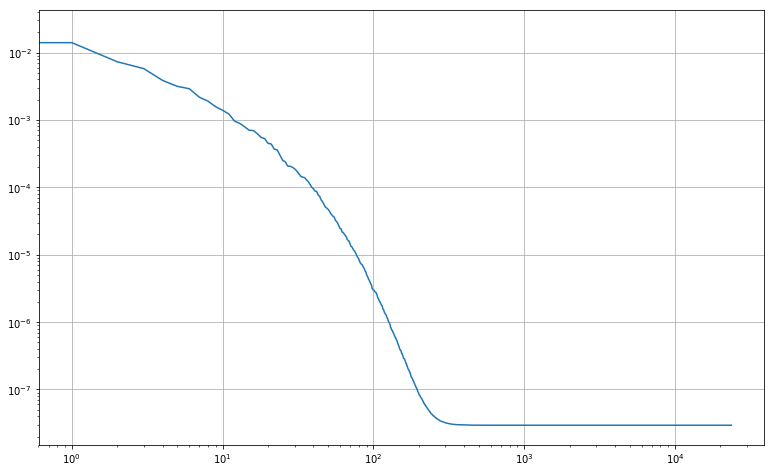

In [15]:
plt.figure(figsize=(13,8))
plt.loglog(eig_oas[::-1])
plt.grid()

### Sensor Optimisation with 3rd Algorithm : 


Define the Sets for the optimisation

In [15]:
sets = define_sets(S)

Number of sensors to place : 

In [16]:
k = 5

Truncation parameteter for the local covariance : 

In [23]:
epsilon = 2.5*10**-7
print(epsilon)

2.5e-07


In [33]:
d = 50

In [34]:
A_opt = {}

In [50]:
A_opt['local'] = sensor_loc_optimisation_naive_local(k,cov, "fixed", d, sets)







Init Loop:   0%|          | 0/23643 [00:00<?, ?it/s]





Init Loop:   0%|          | 3/23643 [00:00<17:59, 21.90it/s]

Length of local covariance set : d =  500 , largest =  [[1.03346957e-08]]  smallest = [[1.52912859e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.46180804e-18]]  smallest = [[1.01228472e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.7049531e-12]]  smallest = [[1.56888883e-06]]
Length of local covariance set : d =  500 , largest =  [[4.05285192e-05]]  smallest = [[1.11171163e-06]]








Init Loop:   0%|          | 5/23643 [00:00<18:34, 21.21it/s]





Init Loop:   0%|          | 8/23643 [00:00<18:03, 21.82it/s]

Length of local covariance set : d =  500 , largest =  [[1.46229011e-14]]  smallest = [[-1.06523348e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.55364615e-09]]  smallest = [[-1.32487899e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.96635437e-20]]  smallest = [[8.67794703e-19]]
Length of local covariance set : d =  500 , largest =  [[-2.82871016e-25]]  smallest = [[4.77900358e-32]]
Length of local covariance set : d =  500 , largest =  [[4.10894638e-10]]  smallest = [[4.30514992e-15]]
Length of local covariance set : d =  500 , largest =  [[9.71170499e-16]]  smallest = [[4.74637039e-12]]








Init Loop:   0%|          | 12/23643 [00:00<16:08, 24.40it/s]





Init Loop:   0%|          | 16/23643 [00:00<14:48, 26.60it/s]

Length of local covariance set : d =  500 , largest =  [[-2.01603585e-08]]  smallest = [[7.70939579e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.69977514e-12]]  smallest = [[2.83708442e-17]]
Length of local covariance set : d =  500 , largest =  [[1.06166914e-11]]  smallest = [[6.69896775e-15]]
Length of local covariance set : d =  500 , largest =  [[7.57188258e-16]]  smallest = [[2.36040821e-15]]
Length of local covariance set : d =  500 , largest =  [[5.64154259e-13]]  smallest = [[1.60362859e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.08935463e-14]]  smallest = [[1.04828608e-28]]
Length of local covariance set : d =  500 , largest =  [[-3.48291491e-11]]  smallest = [[2.05916607e-11]]








Init Loop:   0%|          | 20/23643 [00:00<13:52, 28.38it/s]





Init Loop:   0%|          | 24/23643 [00:00<13:12, 29.79it/s]

Length of local covariance set : d =  500 , largest =  [[-1.1031452e-12]]  smallest = [[-1.66003302e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.504412e-12]]  smallest = [[-2.41003565e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76887208e-05]]  smallest = [[-7.18853771e-08]]
Length of local covariance set : d =  500 , largest =  [[4.12857599e-11]]  smallest = [[7.46903663e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30862797e-11]]  smallest = [[-1.05831922e-07]]
Length of local covariance set : d =  500 , largest =  [[1.74126348e-16]]  smallest = [[-7.85466685e-17]]
Length of local covariance set : d =  500 , largest =  [[5.34234386e-08]]  smallest = [[4.48271878e-07]]








Init Loop:   0%|          | 28/23643 [00:00<12:45, 30.86it/s]

Length of local covariance set : d =  500 , largest =  [[3.00921475e-10]]  smallest = [[1.04754573e-06]]
Length of local covariance set : d =  500 , largest =  [[7.57609959e-07]]  smallest = [[-2.46272032e-13]]
Length of local covariance set : d =  500 , largest =  [[1.02847276e-06]]  smallest = [[4.06804113e-09]]
Length of local covariance set : d =  500 , largest =  [[3.43322057e-29]]  smallest = [[1.94046416e-25]]
Length of local covariance set : d =  500 , largest =  [[4.79761485e-12]]  smallest = [[5.90261272e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.9190655e-18]]  smallest = [[1.95267625e-16]]
Length of local covariance set : d =  500 , largest =  [[-6.75044079e-10]]  smallest = [[2.07017596e-09]]








Init Loop:   0%|          | 32/23643 [00:01<12:27, 31.57it/s]





Init Loop:   0%|          | 36/23643 [00:01<12:12, 32.24it/s]

Length of local covariance set : d =  500 , largest =  [[5.4884408e-12]]  smallest = [[-3.00762796e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.71741477e-23]]  smallest = [[2.18864419e-24]]
Length of local covariance set : d =  500 , largest =  [[1.04401593e-21]]  smallest = [[1.22178133e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.03935466e-10]]  smallest = [[-3.12195904e-27]]
Length of local covariance set : d =  500 , largest =  [[7.70433384e-08]]  smallest = [[4.39682622e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.77885592e-17]]  smallest = [[9.61917978e-16]]
Length of local covariance set : d =  500 , largest =  [[1.9517825e-29]]  smallest = [[-9.08805327e-30]]








Init Loop:   0%|          | 40/23643 [00:01<12:03, 32.61it/s]





Init Loop:   0%|          | 44/23643 [00:01<12:03, 32.60it/s]

Length of local covariance set : d =  500 , largest =  [[-3.25688929e-08]]  smallest = [[1.13386748e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.66161095e-09]]  smallest = [[-2.33255016e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3619704e-10]]  smallest = [[-5.58181625e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.98984196e-14]]  smallest = [[-6.45974515e-11]]
Length of local covariance set : d =  500 , largest =  [[2.8962967e-08]]  smallest = [[6.92966344e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.94082381e-07]]  smallest = [[2.42533841e-09]]
Length of local covariance set : d =  500 , largest =  [[1.39000471e-08]]  smallest = [[2.17518238e-08]]








Init Loop:   0%|          | 48/23643 [00:01<12:07, 32.45it/s]





Init Loop:   0%|          | 52/23643 [00:01<11:58, 32.83it/s]

Length of local covariance set : d =  500 , largest =  [[-1.69289594e-10]]  smallest = [[-1.18072353e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5832387e-11]]  smallest = [[-4.34093425e-15]]
Length of local covariance set : d =  500 , largest =  [[6.04574014e-12]]  smallest = [[3.32221721e-08]]
Length of local covariance set : d =  500 , largest =  [[2.29617366e-08]]  smallest = [[-4.94876746e-07]]
Length of local covariance set : d =  500 , largest =  [[5.16423057e-06]]  smallest = [[-5.52929407e-07]]
Length of local covariance set : d =  500 , largest =  [[4.56093347e-06]]  smallest = [[1.61274693e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.06232869e-15]]  smallest = [[9.71978485e-14]]








Init Loop:   0%|          | 56/23643 [00:01<12:00, 32.75it/s]

Length of local covariance set : d =  500 , largest =  [[8.87801586e-14]]  smallest = [[3.35542896e-09]]
Length of local covariance set : d =  500 , largest =  [[1.07179949e-08]]  smallest = [[1.20658433e-16]]
Length of local covariance set : d =  500 , largest =  [[5.68829109e-10]]  smallest = [[-2.92729661e-25]]
Length of local covariance set : d =  500 , largest =  [[5.05253587e-10]]  smallest = [[6.12482704e-08]]
Length of local covariance set : d =  500 , largest =  [[4.99189689e-09]]  smallest = [[1.37238797e-06]]
Length of local covariance set : d =  500 , largest =  [[3.91114059e-08]]  smallest = [[4.74322136e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84078693e-06]]  smallest = [[5.09771869e-09]]








Init Loop:   0%|          | 60/23643 [00:01<11:59, 32.80it/s]





Init Loop:   0%|          | 64/23643 [00:02<11:56, 32.93it/s]

Length of local covariance set : d =  500 , largest =  [[3.3245975e-09]]  smallest = [[3.16020791e-09]]
Length of local covariance set : d =  500 , largest =  [[4.31114094e-08]]  smallest = [[3.79956213e-09]]
Length of local covariance set : d =  500 , largest =  [[7.12082214e-10]]  smallest = [[-6.91711627e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.40002609e-10]]  smallest = [[8.40062511e-14]]
Length of local covariance set : d =  500 , largest =  [[3.73434054e-11]]  smallest = [[1.75826707e-13]]
Length of local covariance set : d =  500 , largest =  [[3.68716303e-08]]  smallest = [[1.78056365e-09]]
Length of local covariance set : d =  500 , largest =  [[4.14121492e-15]]  smallest = [[6.08683648e-16]]








Init Loop:   0%|          | 68/23643 [00:02<11:54, 33.01it/s]





Init Loop:   0%|          | 72/23643 [00:02<11:52, 33.10it/s]

Length of local covariance set : d =  500 , largest =  [[1.49130966e-10]]  smallest = [[-2.64729248e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.48257408e-10]]  smallest = [[3.3330342e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.84969714e-10]]  smallest = [[-2.40301684e-14]]
Length of local covariance set : d =  500 , largest =  [[1.89804756e-06]]  smallest = [[3.04870528e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.39230406e-22]]  smallest = [[-9.27095969e-31]]
Length of local covariance set : d =  500 , largest =  [[3.48160197e-12]]  smallest = [[-1.75301748e-10]]
Length of local covariance set : d =  500 , largest =  [[6.65255963e-07]]  smallest = [[2.7339699e-07]]








Init Loop:   0%|          | 76/23643 [00:02<11:49, 33.21it/s]





Init Loop:   0%|          | 80/23643 [00:02<11:50, 33.16it/s]

Length of local covariance set : d =  500 , largest =  [[2.65451092e-06]]  smallest = [[4.74714303e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.35684919e-07]]  smallest = [[2.41181643e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.92158057e-25]]  smallest = [[3.44806518e-12]]
Length of local covariance set : d =  500 , largest =  [[2.73566254e-08]]  smallest = [[5.88883598e-08]]
Length of local covariance set : d =  500 , largest =  [[4.75943524e-10]]  smallest = [[1.23988263e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27580154e-14]]  smallest = [[1.91378617e-11]]
Length of local covariance set : d =  500 , largest =  [[2.11707933e-11]]  smallest = [[2.96162266e-10]]








Init Loop:   0%|          | 84/23643 [00:02<11:51, 33.12it/s]

Length of local covariance set : d =  500 , largest =  [[-2.3239647e-15]]  smallest = [[2.47282204e-18]]
Length of local covariance set : d =  500 , largest =  [[9.54113336e-10]]  smallest = [[1.30019286e-17]]
Length of local covariance set : d =  500 , largest =  [[2.83833167e-17]]  smallest = [[-4.69092914e-18]]
Length of local covariance set : d =  500 , largest =  [[7.39997504e-15]]  smallest = [[-1.2214622e-08]]
Length of local covariance set : d =  500 , largest =  [[8.35068058e-20]]  smallest = [[1.39027018e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.54479347e-23]]  smallest = [[-2.01582356e-27]]
Length of local covariance set : d =  500 , largest =  [[1.09280407e-07]]  smallest = [[1.94427145e-25]]








Init Loop:   0%|          | 88/23643 [00:02<11:58, 32.77it/s]





Init Loop:   0%|          | 92/23643 [00:02<12:01, 32.66it/s]

Length of local covariance set : d =  500 , largest =  [[-1.46047018e-08]]  smallest = [[-2.06529699e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.5820694e-12]]  smallest = [[1.21024626e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.64740163e-13]]  smallest = [[-2.28074515e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.28165763e-10]]  smallest = [[8.2252652e-09]]
Length of local covariance set : d =  500 , largest =  [[8.44901797e-10]]  smallest = [[1.01891524e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.18362607e-12]]  smallest = [[-3.62761278e-18]]
Length of local covariance set : d =  500 , largest =  [[5.61623466e-13]]  smallest = [[-4.88604503e-09]]








Init Loop:   0%|          | 96/23643 [00:03<12:03, 32.57it/s]





Init Loop:   0%|          | 100/23643 [00:03<11:57, 32.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.14903327e-11]]  smallest = [[-6.64281074e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.92865028e-25]]  smallest = [[-3.32912862e-28]]
Length of local covariance set : d =  500 , largest =  [[1.0772722e-06]]  smallest = [[5.89359622e-10]]
Length of local covariance set : d =  500 , largest =  [[4.54259048e-10]]  smallest = [[-4.56905313e-06]]
Length of local covariance set : d =  500 , largest =  [[2.9592199e-09]]  smallest = [[1.1757275e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04334812e-06]]  smallest = [[3.55566703e-10]]
Length of local covariance set : d =  500 , largest =  [[1.2389656e-12]]  smallest = [[-4.36089962e-21]]








Init Loop:   0%|          | 104/23643 [00:03<11:54, 32.93it/s]





Init Loop:   0%|          | 108/23643 [00:03<11:54, 32.95it/s]

Length of local covariance set : d =  500 , largest =  [[4.53418656e-07]]  smallest = [[-1.20451803e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.54372583e-08]]  smallest = [[1.31194407e-07]]
Length of local covariance set : d =  500 , largest =  [[1.65282938e-08]]  smallest = [[-2.4934149e-08]]
Length of local covariance set : d =  500 , largest =  [[7.91675796e-09]]  smallest = [[-1.32903479e-12]]
Length of local covariance set : d =  500 , largest =  [[3.2689489e-10]]  smallest = [[1.62944069e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.44125919e-16]]  smallest = [[4.0955937e-16]]
Length of local covariance set : d =  500 , largest =  [[5.81715806e-10]]  smallest = [[-1.79495747e-15]]








Init Loop:   0%|          | 112/23643 [00:03<11:50, 33.10it/s]

Length of local covariance set : d =  500 , largest =  [[-7.48988815e-10]]  smallest = [[7.12513561e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.42087756e-10]]  smallest = [[5.748233e-13]]
Length of local covariance set : d =  500 , largest =  [[2.13618201e-07]]  smallest = [[3.93282501e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.60157816e-23]]  smallest = [[7.97201618e-22]]
Length of local covariance set : d =  500 , largest =  [[-6.22655446e-24]]  smallest = [[-1.26448133e-25]]
Length of local covariance set : d =  500 , largest =  [[-5.42422773e-13]]  smallest = [[-5.56892603e-09]]
Length of local covariance set : d =  500 , largest =  [[1.88836453e-10]]  smallest = [[3.58430162e-12]]








Init Loop:   0%|          | 116/23643 [00:03<11:49, 33.18it/s]





Init Loop:   1%|          | 120/23643 [00:03<11:48, 33.22it/s]

Length of local covariance set : d =  500 , largest =  [[-5.38634724e-10]]  smallest = [[1.62940497e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.42789734e-28]]  smallest = [[1.24719271e-30]]
Length of local covariance set : d =  500 , largest =  [[2.86348099e-07]]  smallest = [[1.17631278e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.19246444e-12]]  smallest = [[1.86215998e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.16599296e-06]]  smallest = [[-3.10937115e-07]]
Length of local covariance set : d =  500 , largest =  [[8.37415939e-09]]  smallest = [[6.00172772e-10]]
Length of local covariance set : d =  500 , largest =  [[8.14732937e-13]]  smallest = [[-3.63664741e-17]]








Init Loop:   1%|          | 124/23643 [00:03<11:47, 33.24it/s]





Init Loop:   1%|          | 128/23643 [00:03<11:51, 33.05it/s]

Length of local covariance set : d =  500 , largest =  [[-3.59842309e-12]]  smallest = [[4.17985948e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96051555e-23]]  smallest = [[-1.24538534e-13]]
Length of local covariance set : d =  500 , largest =  [[2.66310564e-10]]  smallest = [[2.18637328e-13]]
Length of local covariance set : d =  500 , largest =  [[3.79062923e-08]]  smallest = [[1.9011692e-12]]
Length of local covariance set : d =  500 , largest =  [[2.86103825e-10]]  smallest = [[7.55047044e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.01767794e-08]]  smallest = [[-6.63311484e-13]]
Length of local covariance set : d =  500 , largest =  [[2.07574528e-09]]  smallest = [[-2.64560939e-08]]








Init Loop:   1%|          | 132/23643 [00:04<11:57, 32.78it/s]





Init Loop:   1%|          | 136/23643 [00:04<12:01, 32.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.79350555e-07]]  smallest = [[-1.62584709e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.42628272e-13]]  smallest = [[9.73138489e-13]]
Length of local covariance set : d =  500 , largest =  [[5.18052508e-15]]  smallest = [[1.91460465e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.83805835e-24]]  smallest = [[-3.02210318e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.27855405e-08]]  smallest = [[-1.36652392e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.88180501e-07]]  smallest = [[1.88743368e-16]]
Length of local covariance set : d =  500 , largest =  [[1.30839396e-05]]  smallest = [[1.30619538e-05]]








Init Loop:   1%|          | 140/23643 [00:04<11:57, 32.77it/s]

Length of local covariance set : d =  500 , largest =  [[-7.02152186e-11]]  smallest = [[-5.59408858e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.18237744e-08]]  smallest = [[4.06208064e-10]]
Length of local covariance set : d =  500 , largest =  [[7.56865636e-08]]  smallest = [[-1.0096373e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43390575e-08]]  smallest = [[2.83756732e-12]]
Length of local covariance set : d =  500 , largest =  [[5.39000856e-16]]  smallest = [[6.21229415e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.9839994e-13]]  smallest = [[3.28969786e-10]]
Length of local covariance set : d =  500 , largest =  [[5.2431541e-28]]  smallest = [[5.98184083e-28]]








Init Loop:   1%|          | 144/23643 [00:04<11:56, 32.80it/s]





Init Loop:   1%|          | 148/23643 [00:04<11:54, 32.90it/s]

Length of local covariance set : d =  500 , largest =  [[3.96296698e-10]]  smallest = [[1.65275227e-10]]
Length of local covariance set : d =  500 , largest =  [[2.66568325e-11]]  smallest = [[5.29490272e-10]]
Length of local covariance set : d =  500 , largest =  [[1.15538754e-06]]  smallest = [[1.64180727e-09]]
Length of local covariance set : d =  500 , largest =  [[5.32706622e-11]]  smallest = [[-2.48807568e-11]]
Length of local covariance set : d =  500 , largest =  [[2.63563995e-14]]  smallest = [[-1.07598487e-15]]
Length of local covariance set : d =  500 , largest =  [[3.54046004e-10]]  smallest = [[4.68887341e-14]]
Length of local covariance set : d =  500 , largest =  [[1.21114463e-08]]  smallest = [[2.24272008e-21]]








Init Loop:   1%|          | 152/23643 [00:04<11:54, 32.87it/s]





Init Loop:   1%|          | 156/23643 [00:04<11:53, 32.91it/s]

Length of local covariance set : d =  500 , largest =  [[3.98281887e-19]]  smallest = [[-3.7962092e-13]]
Length of local covariance set : d =  500 , largest =  [[2.79780486e-08]]  smallest = [[4.93589538e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.64316533e-13]]  smallest = [[-5.70462534e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1885813e-12]]  smallest = [[5.02440589e-30]]
Length of local covariance set : d =  500 , largest =  [[-1.04118086e-25]]  smallest = [[-8.79004847e-24]]
Length of local covariance set : d =  500 , largest =  [[1.01202318e-11]]  smallest = [[-2.39667693e-12]]
Length of local covariance set : d =  500 , largest =  [[6.19210877e-08]]  smallest = [[1.5407314e-07]]








Init Loop:   1%|          | 160/23643 [00:04<11:52, 32.96it/s]





Init Loop:   1%|          | 164/23643 [00:05<11:49, 33.08it/s]

Length of local covariance set : d =  500 , largest =  [[5.44817854e-08]]  smallest = [[8.84429149e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.67120021e-10]]  smallest = [[-1.2316092e-21]]
Length of local covariance set : d =  500 , largest =  [[4.81947414e-14]]  smallest = [[8.05459634e-13]]
Length of local covariance set : d =  500 , largest =  [[4.04818093e-12]]  smallest = [[-2.62716451e-10]]
Length of local covariance set : d =  500 , largest =  [[3.06050221e-12]]  smallest = [[-1.39687748e-11]]
Length of local covariance set : d =  500 , largest =  [[1.49186565e-09]]  smallest = [[4.77683152e-09]]
Length of local covariance set : d =  500 , largest =  [[2.92631387e-26]]  smallest = [[2.21795905e-22]]








Init Loop:   1%|          | 168/23643 [00:05<11:53, 32.91it/s]

Length of local covariance set : d =  500 , largest =  [[-1.7223361e-10]]  smallest = [[1.02368776e-24]]
Length of local covariance set : d =  500 , largest =  [[3.6008429e-08]]  smallest = [[1.62738846e-07]]
Length of local covariance set : d =  500 , largest =  [[7.78262337e-06]]  smallest = [[8.95336774e-06]]
Length of local covariance set : d =  500 , largest =  [[9.40038098e-12]]  smallest = [[1.07705907e-15]]
Length of local covariance set : d =  500 , largest =  [[1.80897998e-11]]  smallest = [[6.30146864e-14]]
Length of local covariance set : d =  500 , largest =  [[-6.36818478e-11]]  smallest = [[-5.52604274e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.79930276e-09]]  smallest = [[-4.84555984e-19]]








Init Loop:   1%|          | 172/23643 [00:05<11:56, 32.74it/s]





Init Loop:   1%|          | 176/23643 [00:05<11:51, 33.00it/s]

Length of local covariance set : d =  500 , largest =  [[5.02999873e-07]]  smallest = [[5.17115565e-07]]
Length of local covariance set : d =  500 , largest =  [[7.3468886e-07]]  smallest = [[1.14464879e-10]]
Length of local covariance set : d =  500 , largest =  [[1.98270328e-07]]  smallest = [[-2.13623915e-07]]
Length of local covariance set : d =  500 , largest =  [[4.39714501e-10]]  smallest = [[2.79814849e-11]]
Length of local covariance set : d =  500 , largest =  [[2.1828513e-26]]  smallest = [[-8.20568965e-29]]
Length of local covariance set : d =  500 , largest =  [[2.14978087e-10]]  smallest = [[-1.80168919e-14]]
Length of local covariance set : d =  500 , largest =  [[1.50018437e-17]]  smallest = [[-1.58610117e-23]]








Init Loop:   1%|          | 180/23643 [00:05<11:51, 32.97it/s]





Init Loop:   1%|          | 184/23643 [00:05<11:50, 33.00it/s]

Length of local covariance set : d =  500 , largest =  [[7.30957028e-16]]  smallest = [[2.26002377e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.49257634e-09]]  smallest = [[-2.00389153e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.99068175e-23]]  smallest = [[-1.013102e-24]]
Length of local covariance set : d =  500 , largest =  [[-9.63293501e-26]]  smallest = [[8.19862944e-24]]
Length of local covariance set : d =  500 , largest =  [[1.10993185e-06]]  smallest = [[-2.46802693e-23]]
Length of local covariance set : d =  500 , largest =  [[2.31942549e-14]]  smallest = [[2.0366733e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.47116063e-08]]  smallest = [[5.12160068e-11]]








Init Loop:   1%|          | 188/23643 [00:05<11:50, 32.99it/s]





Init Loop:   1%|          | 192/23643 [00:05<11:50, 33.02it/s]

Length of local covariance set : d =  500 , largest =  [[8.83421654e-08]]  smallest = [[3.753155e-24]]
Length of local covariance set : d =  500 , largest =  [[1.18792529e-10]]  smallest = [[-1.65715402e-10]]
Length of local covariance set : d =  500 , largest =  [[1.30641231e-05]]  smallest = [[3.89389743e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.26619321e-07]]  smallest = [[-6.54217046e-12]]
Length of local covariance set : d =  500 , largest =  [[8.20294496e-15]]  smallest = [[-3.53775369e-09]]
Length of local covariance set : d =  500 , largest =  [[1.20193656e-11]]  smallest = [[-1.98105731e-12]]
Length of local covariance set : d =  500 , largest =  [[4.96582876e-09]]  smallest = [[-1.44849274e-13]]








Init Loop:   1%|          | 196/23643 [00:06<11:59, 32.58it/s]

Length of local covariance set : d =  500 , largest =  [[8.09111493e-26]]  smallest = [[-3.59137696e-31]]
Length of local covariance set : d =  500 , largest =  [[7.1963962e-24]]  smallest = [[8.94849331e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.12562106e-29]]  smallest = [[-1.55041214e-30]]
Length of local covariance set : d =  500 , largest =  [[2.8240049e-12]]  smallest = [[2.61643852e-16]]
Length of local covariance set : d =  500 , largest =  [[4.65230357e-07]]  smallest = [[-5.81901391e-08]]
Length of local covariance set : d =  500 , largest =  [[4.73027983e-10]]  smallest = [[5.79911304e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.90221745e-10]]  smallest = [[6.55050438e-09]]








Init Loop:   1%|          | 200/23643 [00:06<11:53, 32.85it/s]





Init Loop:   1%|          | 204/23643 [00:06<11:53, 32.87it/s]

Length of local covariance set : d =  500 , largest =  [[5.37536673e-11]]  smallest = [[1.62551324e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.89442738e-10]]  smallest = [[-2.46606884e-12]]
Length of local covariance set : d =  500 , largest =  [[1.18142575e-12]]  smallest = [[-6.87998718e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55853219e-08]]  smallest = [[-1.75461112e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10970492e-05]]  smallest = [[6.46025062e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.36490554e-23]]  smallest = [[1.43582216e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.39940936e-06]]  smallest = [[-5.4935175e-09]]








Init Loop:   1%|          | 208/23643 [00:06<11:55, 32.77it/s]





Init Loop:   1%|          | 212/23643 [00:06<11:51, 32.94it/s]

Length of local covariance set : d =  500 , largest =  [[7.75769349e-08]]  smallest = [[-2.36766154e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.64794226e-11]]  smallest = [[1.93830233e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.38915712e-10]]  smallest = [[2.0777264e-08]]
Length of local covariance set : d =  500 , largest =  [[2.88588529e-10]]  smallest = [[6.96992643e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.19406229e-22]]  smallest = [[4.62504059e-09]]
Length of local covariance set : d =  500 , largest =  [[4.03531163e-25]]  smallest = [[5.7771968e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.00786529e-10]]  smallest = [[1.03396185e-11]]








Init Loop:   1%|          | 216/23643 [00:06<11:52, 32.89it/s]





Init Loop:   1%|          | 220/23643 [00:06<11:50, 32.94it/s]

Length of local covariance set : d =  500 , largest =  [[6.40052522e-14]]  smallest = [[-8.90916112e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1504099e-09]]  smallest = [[3.62782893e-12]]
Length of local covariance set : d =  500 , largest =  [[1.60068189e-08]]  smallest = [[-1.39003159e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.05934049e-10]]  smallest = [[2.11818888e-09]]
Length of local covariance set : d =  500 , largest =  [[3.94675198e-06]]  smallest = [[8.572442e-06]]
Length of local covariance set : d =  500 , largest =  [[7.1451511e-11]]  smallest = [[-2.17335944e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.22298981e-10]]  smallest = [[-5.84232711e-12]]







Init Loop:   1%|          | 294/23643 [00:28<19:17, 20.17it/s]





Init Loop:   1%|          | 224/23643 [00:06<11:56, 32.70it/s]

Length of local covariance set : d =  500 , largest =  [[-6.5451078e-29]]  smallest = [[4.13943741e-26]]
Length of local covariance set : d =  500 , largest =  [[-6.18613322e-10]]  smallest = [[-1.44928576e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.51805085e-11]]  smallest = [[8.9074798e-12]]
Length of local covariance set : d =  500 , largest =  [[1.35929199e-11]]  smallest = [[1.99172917e-14]]
Length of local covariance set : d =  500 , largest =  [[8.2010738e-08]]  smallest = [[1.04462756e-20]]
Length of local covariance set : d =  500 , largest =  [[1.06452929e-06]]  smallest = [[-4.05185776e-13]]
Length of local covariance set : d =  500 , largest =  [[2.24323118e-11]]  smallest = [[1.29923314e-07]]








Init Loop:   1%|          | 228/23643 [00:07<11:53, 32.81it/s]





Init Loop:   1%|          | 232/23643 [00:07<11:51, 32.89it/s]

Length of local covariance set : d =  500 , largest =  [[1.39625147e-06]]  smallest = [[2.34503574e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.3507453e-13]]  smallest = [[-2.19354556e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.7101802e-16]]  smallest = [[5.33126963e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.9315908e-23]]  smallest = [[-3.14521887e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.77695428e-07]]  smallest = [[-4.56242416e-07]]
Length of local covariance set : d =  500 , largest =  [[3.79890759e-09]]  smallest = [[1.74729886e-11]]
Length of local covariance set : d =  500 , largest =  [[1.2148416e-15]]  smallest = [[1.16434822e-12]]








Init Loop:   1%|          | 236/23643 [00:07<11:48, 33.03it/s]





Init Loop:   1%|          | 240/23643 [00:07<11:48, 33.04it/s]

Length of local covariance set : d =  500 , largest =  [[1.60938582e-13]]  smallest = [[-9.59389104e-14]]
Length of local covariance set : d =  500 , largest =  [[6.64439377e-16]]  smallest = [[8.30031361e-14]]
Length of local covariance set : d =  500 , largest =  [[2.95097096e-09]]  smallest = [[-5.45366686e-28]]
Length of local covariance set : d =  500 , largest =  [[1.37901846e-13]]  smallest = [[7.56789769e-08]]
Length of local covariance set : d =  500 , largest =  [[4.54539706e-31]]  smallest = [[1.59954698e-16]]
Length of local covariance set : d =  500 , largest =  [[2.23926853e-07]]  smallest = [[-7.62702521e-18]]
Length of local covariance set : d =  500 , largest =  [[1.03550048e-06]]  smallest = [[6.81547599e-10]]








Init Loop:   1%|          | 244/23643 [00:07<11:50, 32.95it/s]





Init Loop:   1%|          | 248/23643 [00:07<11:52, 32.83it/s]

Length of local covariance set : d =  500 , largest =  [[-1.6355284e-09]]  smallest = [[-3.99133105e-11]]
Length of local covariance set : d =  500 , largest =  [[6.68341792e-06]]  smallest = [[5.32416581e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.14510628e-20]]  smallest = [[-6.49756357e-23]]
Length of local covariance set : d =  500 , largest =  [[7.36658572e-28]]  smallest = [[9.73776753e-24]]
Length of local covariance set : d =  500 , largest =  [[1.33650112e-13]]  smallest = [[4.69958845e-10]]
Length of local covariance set : d =  500 , largest =  [[2.0905578e-13]]  smallest = [[1.22424263e-10]]
Length of local covariance set : d =  500 , largest =  [[4.10755557e-12]]  smallest = [[2.62867778e-09]]








Init Loop:   1%|          | 252/23643 [00:07<11:55, 32.70it/s]

Length of local covariance set : d =  500 , largest =  [[7.0518244e-13]]  smallest = [[3.03419706e-13]]
Length of local covariance set : d =  500 , largest =  [[4.50639716e-08]]  smallest = [[-2.45627096e-09]]
Length of local covariance set : d =  500 , largest =  [[1.1225716e-05]]  smallest = [[-5.3818877e-13]]
Length of local covariance set : d =  500 , largest =  [[2.9532972e-05]]  smallest = [[9.57564958e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.02136691e-06]]  smallest = [[-3.62192914e-18]]
Length of local covariance set : d =  500 , largest =  [[1.87400478e-08]]  smallest = [[2.1608618e-05]]
Length of local covariance set : d =  500 , largest =  [[8.10473195e-12]]  smallest = [[-2.58863223e-10]]








Init Loop:   1%|          | 256/23643 [00:07<11:50, 32.90it/s]





Init Loop:   1%|          | 260/23643 [00:08<11:47, 33.05it/s]

Length of local covariance set : d =  500 , largest =  [[7.13775215e-08]]  smallest = [[3.99820526e-10]]
Length of local covariance set : d =  500 , largest =  [[4.77386668e-13]]  smallest = [[1.32815828e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.40582491e-14]]  smallest = [[-1.20391544e-21]]
Length of local covariance set : d =  500 , largest =  [[-2.31447107e-07]]  smallest = [[5.18186995e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.41211019e-23]]  smallest = [[3.00891153e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.61630563e-12]]  smallest = [[-6.1100002e-08]]
Length of local covariance set : d =  500 , largest =  [[2.65580873e-07]]  smallest = [[1.15127728e-09]]








Init Loop:   1%|          | 264/23643 [00:08<11:44, 33.17it/s]





Init Loop:   1%|          | 268/23643 [00:08<11:43, 33.23it/s]

Length of local covariance set : d =  500 , largest =  [[2.00212621e-07]]  smallest = [[3.78885956e-12]]
Length of local covariance set : d =  500 , largest =  [[1.721746e-12]]  smallest = [[-2.78129822e-10]]
Length of local covariance set : d =  500 , largest =  [[2.86058538e-08]]  smallest = [[-4.75607865e-10]]
Length of local covariance set : d =  500 , largest =  [[2.26336554e-06]]  smallest = [[-1.15843787e-19]]
Length of local covariance set : d =  500 , largest =  [[1.49551644e-12]]  smallest = [[1.29921349e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.78248176e-10]]  smallest = [[1.52659297e-11]]
Length of local covariance set : d =  500 , largest =  [[3.84442007e-14]]  smallest = [[1.72702664e-12]]








Init Loop:   1%|          | 272/23643 [00:08<11:45, 33.14it/s]

Length of local covariance set : d =  500 , largest =  [[5.94874041e-09]]  smallest = [[1.04959978e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.26527708e-07]]  smallest = [[1.16306459e-05]]
Length of local covariance set : d =  500 , largest =  [[-4.12276491e-07]]  smallest = [[1.91495673e-10]]
Length of local covariance set : d =  500 , largest =  [[5.19757799e-09]]  smallest = [[2.87251314e-11]]
Length of local covariance set : d =  500 , largest =  [[9.68660703e-13]]  smallest = [[8.1989995e-14]]
Length of local covariance set : d =  500 , largest =  [[8.00404287e-13]]  smallest = [[-2.53544897e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29649637e-12]]  smallest = [[1.00349684e-20]]








Init Loop:   1%|          | 276/23643 [00:08<11:58, 32.53it/s]





Init Loop:   1%|          | 280/23643 [00:08<11:55, 32.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.25986222e-06]]  smallest = [[-2.10394011e-09]]
Length of local covariance set : d =  500 , largest =  [[1.36373483e-09]]  smallest = [[-8.85477915e-11]]
Length of local covariance set : d =  500 , largest =  [[5.92875651e-12]]  smallest = [[9.52975262e-10]]
Length of local covariance set : d =  500 , largest =  [[4.9262484e-11]]  smallest = [[1.54158287e-13]]
Length of local covariance set : d =  500 , largest =  [[2.56696763e-12]]  smallest = [[3.35938082e-11]]
Length of local covariance set : d =  500 , largest =  [[6.03095798e-07]]  smallest = [[-8.25240203e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.71621406e-10]]  smallest = [[-7.8648048e-14]]








Init Loop:   1%|          | 284/23643 [00:08<11:52, 32.80it/s]





Init Loop:   1%|          | 288/23643 [00:08<11:49, 32.91it/s]

Length of local covariance set : d =  500 , largest =  [[1.15505029e-05]]  smallest = [[-1.73000611e-06]]
Length of local covariance set : d =  500 , largest =  [[5.548206e-12]]  smallest = [[1.83155526e-06]]
Length of local covariance set : d =  500 , largest =  [[2.04385152e-15]]  smallest = [[1.0308134e-12]]
Length of local covariance set : d =  500 , largest =  [[1.19282099e-10]]  smallest = [[3.18513404e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.5560516e-11]]  smallest = [[7.13389541e-10]]
Length of local covariance set : d =  500 , largest =  [[2.8481448e-07]]  smallest = [[3.73017861e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00379679e-15]]  smallest = [[-2.77812939e-12]]








Init Loop:   1%|          | 292/23643 [00:08<11:47, 33.00it/s]

Length of local covariance set : d =  500 , largest =  [[1.26775443e-09]]  smallest = [[1.68845756e-11]]
Length of local covariance set : d =  500 , largest =  [[1.45837532e-12]]  smallest = [[3.68324514e-11]]
Length of local covariance set : d =  500 , largest =  [[2.11235325e-08]]  smallest = [[2.29039556e-09]]
Length of local covariance set : d =  500 , largest =  [[2.58525045e-06]]  smallest = [[8.40877839e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.38810896e-09]]  smallest = [[-1.14038168e-11]]
Length of local covariance set : d =  500 , largest =  [[1.1268471e-08]]  smallest = [[6.87381788e-14]]








Init Loop:   1%|▏         | 296/23643 [00:09<12:56, 30.08it/s]





Init Loop:   1%|▏         | 300/23643 [00:09<14:43, 26.43it/s]

Length of local covariance set : d =  500 , largest =  [[-4.67289285e-10]]  smallest = [[8.55891473e-10]]
Length of local covariance set : d =  500 , largest =  [[8.03242576e-28]]  smallest = [[4.33587201e-27]]
Length of local covariance set : d =  500 , largest =  [[4.51868114e-28]]  smallest = [[-3.60212101e-27]]
Length of local covariance set : d =  500 , largest =  [[1.65626353e-06]]  smallest = [[-2.07129067e-11]]
Length of local covariance set : d =  500 , largest =  [[9.98579837e-07]]  smallest = [[1.67645872e-07]]








Init Loop:   1%|▏         | 303/23643 [00:09<15:56, 24.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.04208407e-07]]  smallest = [[6.25799393e-14]]
Length of local covariance set : d =  500 , largest =  [[1.09734217e-08]]  smallest = [[-2.94546048e-10]]
Length of local covariance set : d =  500 , largest =  [[3.71912815e-11]]  smallest = [[9.17761192e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.23131619e-11]]  smallest = [[1.28639207e-24]]
Length of local covariance set : d =  500 , largest =  [[8.41079564e-10]]  smallest = [[5.66862231e-08]]








Init Loop:   1%|▏         | 306/23643 [00:09<16:48, 23.13it/s]





Init Loop:   1%|▏         | 309/23643 [00:09<17:39, 22.02it/s]

Length of local covariance set : d =  500 , largest =  [[1.1958338e-08]]  smallest = [[9.67340798e-13]]
Length of local covariance set : d =  500 , largest =  [[4.50409579e-12]]  smallest = [[9.44407229e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.51483472e-15]]  smallest = [[-3.13718596e-10]]
Length of local covariance set : d =  500 , largest =  [[1.27932274e-11]]  smallest = [[-2.43950193e-15]]
Length of local covariance set : d =  500 , largest =  [[1.16039926e-12]]  smallest = [[2.70839997e-08]]








Init Loop:   1%|▏         | 312/23643 [00:09<18:04, 21.51it/s]





Init Loop:   1%|▏         | 315/23643 [00:10<18:24, 21.13it/s]

Length of local covariance set : d =  500 , largest =  [[3.1250243e-10]]  smallest = [[1.4602728e-10]]
Length of local covariance set : d =  500 , largest =  [[2.1230433e-09]]  smallest = [[3.05780109e-20]]
Length of local covariance set : d =  500 , largest =  [[1.7524269e-07]]  smallest = [[2.4661971e-11]]
Length of local covariance set : d =  500 , largest =  [[3.36810937e-21]]  smallest = [[-4.02617293e-16]]
Length of local covariance set : d =  500 , largest =  [[6.19737172e-10]]  smallest = [[-1.78154116e-12]]








Init Loop:   1%|▏         | 318/23643 [00:10<18:36, 20.89it/s]

Length of local covariance set : d =  500 , largest =  [[1.45481927e-05]]  smallest = [[1.05299701e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.42944345e-10]]  smallest = [[-9.05988886e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.45159667e-22]]  smallest = [[4.12322722e-21]]
Length of local covariance set : d =  500 , largest =  [[-3.2790081e-13]]  smallest = [[1.60511088e-17]]
Length of local covariance set : d =  500 , largest =  [[3.12453325e-13]]  smallest = [[2.83464376e-15]]








Init Loop:   1%|▏         | 321/23643 [00:10<18:53, 20.57it/s]





Init Loop:   1%|▏         | 324/23643 [00:10<19:01, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[9.52771134e-09]]  smallest = [[2.56731663e-11]]
Length of local covariance set : d =  500 , largest =  [[2.80194046e-26]]  smallest = [[2.362778e-26]]
Length of local covariance set : d =  500 , largest =  [[2.96249065e-07]]  smallest = [[6.95084839e-08]]
Length of local covariance set : d =  500 , largest =  [[6.70320066e-15]]  smallest = [[2.35475073e-09]]
Length of local covariance set : d =  500 , largest =  [[8.781267e-16]]  smallest = [[-2.24744116e-12]]








Init Loop:   1%|▏         | 327/23643 [00:10<19:05, 20.36it/s]





Init Loop:   1%|▏         | 330/23643 [00:10<19:04, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.98093601e-11]]  smallest = [[2.64878296e-11]]
Length of local covariance set : d =  500 , largest =  [[5.80638119e-13]]  smallest = [[1.36157416e-12]]
Length of local covariance set : d =  500 , largest =  [[1.33310714e-12]]  smallest = [[-4.32777274e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.95314724e-26]]  smallest = [[-8.38727571e-28]]
Length of local covariance set : d =  500 , largest =  [[2.64688495e-09]]  smallest = [[2.97566636e-13]]








Init Loop:   1%|▏         | 333/23643 [00:10<19:16, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[6.91610567e-14]]  smallest = [[2.28297571e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.36695461e-26]]  smallest = [[6.68969456e-24]]
Length of local covariance set : d =  500 , largest =  [[2.20025328e-13]]  smallest = [[1.62129581e-11]]
Length of local covariance set : d =  500 , largest =  [[1.97979825e-08]]  smallest = [[3.06421227e-12]]








Init Loop:   1%|▏         | 336/23643 [00:11<19:18, 20.13it/s]





Init Loop:   1%|▏         | 339/23643 [00:11<19:23, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[-1.66332741e-11]]  smallest = [[1.41482839e-11]]
Length of local covariance set : d =  500 , largest =  [[8.79515656e-06]]  smallest = [[-2.10720633e-09]]
Length of local covariance set : d =  500 , largest =  [[8.92154676e-09]]  smallest = [[-1.88707092e-10]]
Length of local covariance set : d =  500 , largest =  [[8.02781251e-15]]  smallest = [[7.9797363e-11]]








Init Loop:   1%|▏         | 342/23643 [00:11<19:15, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.94168095e-06]]  smallest = [[-4.0637421e-11]]
Length of local covariance set : d =  500 , largest =  [[3.73885861e-06]]  smallest = [[3.49161094e-09]]
Length of local covariance set : d =  500 , largest =  [[8.27410349e-06]]  smallest = [[-3.09858107e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.14407753e-22]]  smallest = [[-5.46338312e-21]]
Length of local covariance set : d =  500 , largest =  [[-2.02590624e-23]]  smallest = [[5.27845705e-25]]








Init Loop:   1%|▏         | 345/23643 [00:11<19:11, 20.24it/s]





Init Loop:   1%|▏         | 348/23643 [00:11<19:09, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.18380861e-12]]  smallest = [[7.54981607e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.29132317e-25]]  smallest = [[-2.34326659e-25]]
Length of local covariance set : d =  500 , largest =  [[8.7893032e-26]]  smallest = [[8.19958106e-26]]
Length of local covariance set : d =  500 , largest =  [[-6.7781987e-26]]  smallest = [[6.39194764e-24]]
Length of local covariance set : d =  500 , largest =  [[-5.44466473e-24]]  smallest = [[1.89649432e-23]]








Init Loop:   1%|▏         | 351/23643 [00:11<19:05, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[5.91451807e-09]]  smallest = [[6.19377422e-23]]
Length of local covariance set : d =  500 , largest =  [[9.02784022e-09]]  smallest = [[-2.03869924e-25]]
Length of local covariance set : d =  500 , largest =  [[1.07696103e-13]]  smallest = [[8.20425823e-17]]
Length of local covariance set : d =  500 , largest =  [[2.74577956e-12]]  smallest = [[1.06891567e-14]]
Length of local covariance set : d =  500 , largest =  [[4.34870141e-12]]  smallest = [[-9.60007336e-15]]








Init Loop:   1%|▏         | 354/23643 [00:11<19:04, 20.35it/s]





Init Loop:   2%|▏         | 357/23643 [00:12<19:04, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.57488296e-09]]  smallest = [[5.76000372e-10]]
Length of local covariance set : d =  500 , largest =  [[1.32217867e-14]]  smallest = [[1.52916663e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.47015678e-10]]  smallest = [[9.57604413e-11]]
Length of local covariance set : d =  500 , largest =  [[8.08291229e-07]]  smallest = [[-1.22895216e-07]]
Length of local covariance set : d =  500 , largest =  [[3.6143451e-11]]  smallest = [[-6.11468974e-10]]








Init Loop:   2%|▏         | 360/23643 [00:12<19:08, 20.27it/s]





Init Loop:   2%|▏         | 363/23643 [00:12<19:01, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.97329461e-07]]  smallest = [[1.5050798e-07]]
Length of local covariance set : d =  500 , largest =  [[6.9503137e-08]]  smallest = [[-1.20416685e-07]]
Length of local covariance set : d =  500 , largest =  [[3.62502756e-08]]  smallest = [[-7.99641432e-11]]
Length of local covariance set : d =  500 , largest =  [[2.37281294e-06]]  smallest = [[-2.65807468e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.64955387e-12]]  smallest = [[5.24594572e-08]]








Init Loop:   2%|▏         | 366/23643 [00:12<19:03, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[9.55315956e-07]]  smallest = [[-1.03869424e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.26690513e-08]]  smallest = [[-7.38900912e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34312746e-10]]  smallest = [[1.35243382e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23712029e-11]]  smallest = [[2.07786671e-08]]
Length of local covariance set : d =  500 , largest =  [[5.33257282e-10]]  smallest = [[-8.78524626e-27]]








Init Loop:   2%|▏         | 369/23643 [00:12<19:05, 20.31it/s]





Init Loop:   2%|▏         | 372/23643 [00:12<19:07, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-4.14124006e-10]]  smallest = [[-2.17486348e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.15562819e-11]]  smallest = [[-5.13722338e-10]]
Length of local covariance set : d =  500 , largest =  [[9.81770375e-06]]  smallest = [[3.91508751e-07]]
Length of local covariance set : d =  500 , largest =  [[5.16189616e-09]]  smallest = [[2.0435464e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.39313918e-12]]  smallest = [[1.29635288e-06]]








Init Loop:   2%|▏         | 375/23643 [00:13<19:12, 20.19it/s]





Init Loop:   2%|▏         | 378/23643 [00:13<19:13, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[2.40533357e-06]]  smallest = [[2.66334633e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08577104e-08]]  smallest = [[5.32990861e-17]]
Length of local covariance set : d =  500 , largest =  [[3.26007932e-10]]  smallest = [[-3.31121498e-16]]
Length of local covariance set : d =  500 , largest =  [[5.29426879e-25]]  smallest = [[-3.24333687e-21]]








Init Loop:   2%|▏         | 381/23643 [00:13<19:15, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[6.88322455e-08]]  smallest = [[-1.71266873e-20]]
Length of local covariance set : d =  500 , largest =  [[4.65328322e-11]]  smallest = [[4.61598709e-11]]
Length of local covariance set : d =  500 , largest =  [[1.52163341e-12]]  smallest = [[5.99593884e-11]]
Length of local covariance set : d =  500 , largest =  [[8.70021036e-11]]  smallest = [[6.87870096e-07]]
Length of local covariance set : d =  500 , largest =  [[4.56237079e-06]]  smallest = [[1.37887267e-08]]








Init Loop:   2%|▏         | 384/23643 [00:13<19:15, 20.13it/s]





Init Loop:   2%|▏         | 387/23643 [00:13<19:10, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.32604052e-12]]  smallest = [[2.49933903e-11]]
Length of local covariance set : d =  500 , largest =  [[1.08646813e-09]]  smallest = [[-5.93432032e-16]]
Length of local covariance set : d =  500 , largest =  [[2.31777119e-11]]  smallest = [[-4.76827832e-09]]
Length of local covariance set : d =  500 , largest =  [[3.60175814e-07]]  smallest = [[8.52269592e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85920926e-05]]  smallest = [[1.61125853e-06]]








Init Loop:   2%|▏         | 390/23643 [00:13<19:13, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.249545e-11]]  smallest = [[1.58698867e-10]]
Length of local covariance set : d =  500 , largest =  [[1.65782181e-07]]  smallest = [[3.83563583e-08]]
Length of local covariance set : d =  500 , largest =  [[8.02993984e-07]]  smallest = [[-2.087478e-11]]
Length of local covariance set : d =  500 , largest =  [[2.43549791e-07]]  smallest = [[9.75086505e-09]]








Init Loop:   2%|▏         | 393/23643 [00:13<19:17, 20.08it/s]





Init Loop:   2%|▏         | 396/23643 [00:14<19:09, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-1.92840999e-15]]  smallest = [[-4.43946673e-17]]
Length of local covariance set : d =  500 , largest =  [[5.55498346e-13]]  smallest = [[2.2968962e-10]]
Length of local covariance set : d =  500 , largest =  [[1.88541844e-10]]  smallest = [[1.27457435e-26]]
Length of local covariance set : d =  500 , largest =  [[6.19762078e-09]]  smallest = [[-1.36610159e-09]]
Length of local covariance set : d =  500 , largest =  [[3.30610969e-08]]  smallest = [[4.68932372e-09]]








Init Loop:   2%|▏         | 399/23643 [00:14<19:06, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-6.60488629e-13]]  smallest = [[4.27015756e-11]]
Length of local covariance set : d =  500 , largest =  [[4.72176669e-15]]  smallest = [[7.69523267e-13]]
Length of local covariance set : d =  500 , largest =  [[-9.01389054e-15]]  smallest = [[-2.38560252e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88587903e-07]]  smallest = [[4.72249218e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.29952717e-09]]  smallest = [[5.4469649e-07]]








Init Loop:   2%|▏         | 402/23643 [00:14<19:06, 20.27it/s]





Init Loop:   2%|▏         | 405/23643 [00:14<19:01, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.62550979e-05]]  smallest = [[1.47037775e-07]]
Length of local covariance set : d =  500 , largest =  [[3.21969947e-05]]  smallest = [[-3.66711103e-06]]
Length of local covariance set : d =  500 , largest =  [[4.92587212e-06]]  smallest = [[2.15635131e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59436824e-07]]  smallest = [[1.92168009e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.16946364e-14]]  smallest = [[1.93462912e-11]]








Init Loop:   2%|▏         | 408/23643 [00:14<19:01, 20.35it/s]





Init Loop:   2%|▏         | 411/23643 [00:14<19:01, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.2442041e-07]]  smallest = [[9.45343915e-08]]
Length of local covariance set : d =  500 , largest =  [[7.24777438e-12]]  smallest = [[1.8237644e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22754198e-05]]  smallest = [[-2.42855632e-11]]
Length of local covariance set : d =  500 , largest =  [[3.58132167e-07]]  smallest = [[6.04680248e-07]]
Length of local covariance set : d =  500 , largest =  [[1.99713558e-07]]  smallest = [[-2.8844079e-11]]








Init Loop:   2%|▏         | 414/23643 [00:14<19:04, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-1.13524391e-10]]  smallest = [[-1.10777489e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01978311e-05]]  smallest = [[4.8310817e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09145198e-09]]  smallest = [[-3.37455201e-10]]
Length of local covariance set : d =  500 , largest =  [[1.77531774e-09]]  smallest = [[6.65071361e-12]]








Init Loop:   2%|▏         | 417/23643 [00:15<19:13, 20.13it/s]





Init Loop:   2%|▏         | 420/23643 [00:15<19:15, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[4.36238084e-08]]  smallest = [[-7.25342744e-17]]
Length of local covariance set : d =  500 , largest =  [[6.04134414e-08]]  smallest = [[7.2451766e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.00712597e-13]]  smallest = [[-8.78876591e-11]]
Length of local covariance set : d =  500 , largest =  [[9.89407314e-11]]  smallest = [[6.23821687e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.44693113e-11]]  smallest = [[1.31265983e-09]]








Init Loop:   2%|▏         | 423/23643 [00:15<19:10, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.76863282e-08]]  smallest = [[3.64928965e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.97232498e-10]]  smallest = [[-1.86621168e-27]]
Length of local covariance set : d =  500 , largest =  [[1.19331555e-07]]  smallest = [[-9.61010096e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.19001641e-09]]  smallest = [[-3.72212545e-10]]
Length of local covariance set : d =  500 , largest =  [[9.68999879e-28]]  smallest = [[4.96283646e-25]]








Init Loop:   2%|▏         | 426/23643 [00:15<19:13, 20.13it/s]





Init Loop:   2%|▏         | 429/23643 [00:15<19:08, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.02472188e-22]]  smallest = [[2.53821454e-32]]
Length of local covariance set : d =  500 , largest =  [[1.45786931e-07]]  smallest = [[3.49617366e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.13239408e-10]]  smallest = [[-1.03113603e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.0130938e-10]]  smallest = [[4.60476295e-11]]
Length of local covariance set : d =  500 , largest =  [[5.36004041e-12]]  smallest = [[2.02663572e-15]]








Init Loop:   2%|▏         | 432/23643 [00:15<19:01, 20.33it/s]





Init Loop:   2%|▏         | 435/23643 [00:15<19:03, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-7.39488727e-15]]  smallest = [[1.21879828e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.43492064e-15]]  smallest = [[4.85782901e-11]]
Length of local covariance set : d =  500 , largest =  [[7.63655974e-12]]  smallest = [[1.13731382e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.63746526e-10]]  smallest = [[1.82660414e-10]]
Length of local covariance set : d =  500 , largest =  [[8.12039948e-07]]  smallest = [[-3.20587159e-12]]








Init Loop:   2%|▏         | 438/23643 [00:16<18:50, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.0344128e-06]]  smallest = [[3.60881518e-10]]
Length of local covariance set : d =  500 , largest =  [[9.23804431e-07]]  smallest = [[1.74804137e-07]]
Length of local covariance set : d =  500 , largest =  [[2.94558911e-14]]  smallest = [[-1.31215688e-13]]
Length of local covariance set : d =  500 , largest =  [[7.39986804e-07]]  smallest = [[-8.88244643e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.35684332e-07]]  smallest = [[-2.69240656e-13]]








Init Loop:   2%|▏         | 441/23643 [00:16<18:58, 20.38it/s]





Init Loop:   2%|▏         | 444/23643 [00:16<18:56, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.11313741e-08]]  smallest = [[1.64475835e-05]]
Length of local covariance set : d =  500 , largest =  [[3.74509576e-18]]  smallest = [[1.05113068e-05]]
Length of local covariance set : d =  500 , largest =  [[9.15486963e-07]]  smallest = [[1.42955103e-10]]
Length of local covariance set : d =  500 , largest =  [[2.78699225e-16]]  smallest = [[2.27769707e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.60872166e-23]]  smallest = [[-7.4862386e-23]]








Init Loop:   2%|▏         | 447/23643 [00:16<19:13, 20.11it/s]





Init Loop:   2%|▏         | 450/23643 [00:16<19:11, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-5.52093508e-14]]  smallest = [[-2.46740549e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07487994e-12]]  smallest = [[-2.64373972e-09]]
Length of local covariance set : d =  500 , largest =  [[9.63734319e-07]]  smallest = [[5.45992982e-07]]
Length of local covariance set : d =  500 , largest =  [[2.07239739e-07]]  smallest = [[1.5722967e-07]]








Init Loop:   2%|▏         | 453/23643 [00:16<18:59, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-2.63325575e-08]]  smallest = [[-1.04991764e-07]]
Length of local covariance set : d =  500 , largest =  [[9.82966976e-08]]  smallest = [[-2.76826118e-09]]
Length of local covariance set : d =  500 , largest =  [[4.73990433e-08]]  smallest = [[3.27188269e-08]]
Length of local covariance set : d =  500 , largest =  [[2.66048882e-10]]  smallest = [[1.98756317e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.57381625e-14]]  smallest = [[-4.29661517e-14]]








Init Loop:   2%|▏         | 456/23643 [00:17<19:12, 20.11it/s]





Init Loop:   2%|▏         | 459/23643 [00:17<19:13, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[-4.20178564e-07]]  smallest = [[-3.84443942e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.03132858e-13]]  smallest = [[5.16029582e-12]]
Length of local covariance set : d =  500 , largest =  [[7.20475381e-12]]  smallest = [[-3.24246362e-12]]
Length of local covariance set : d =  500 , largest =  [[8.73761481e-13]]  smallest = [[1.66371829e-06]]








Init Loop:   2%|▏         | 462/23643 [00:17<19:09, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[5.97336677e-16]]  smallest = [[-1.65266357e-12]]
Length of local covariance set : d =  500 , largest =  [[4.9430229e-11]]  smallest = [[9.47550627e-13]]
Length of local covariance set : d =  500 , largest =  [[3.93421504e-08]]  smallest = [[-8.12915506e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.91030904e-10]]  smallest = [[7.39181851e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6830432e-07]]  smallest = [[9.60586081e-09]]








Init Loop:   2%|▏         | 465/23643 [00:17<19:12, 20.11it/s]





Init Loop:   2%|▏         | 468/23643 [00:17<19:13, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-7.54319554e-29]]  smallest = [[6.65194496e-29]]
Length of local covariance set : d =  500 , largest =  [[4.54329857e-12]]  smallest = [[1.60917218e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00472587e-06]]  smallest = [[-1.12971231e-08]]
Length of local covariance set : d =  500 , largest =  [[6.20363596e-12]]  smallest = [[-2.24511742e-08]]
Length of local covariance set : d =  500 , largest =  [[2.92317676e-05]]  smallest = [[2.34664829e-05]]








Init Loop:   2%|▏         | 471/23643 [00:17<19:04, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.23488802e-07]]  smallest = [[-2.02612692e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77092119e-05]]  smallest = [[1.94407718e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.12907353e-10]]  smallest = [[4.27301539e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.02648007e-07]]  smallest = [[2.93519383e-09]]
Length of local covariance set : d =  500 , largest =  [[4.9657191e-09]]  smallest = [[1.09644828e-11]]








Init Loop:   2%|▏         | 474/23643 [00:17<19:04, 20.25it/s]





Init Loop:   2%|▏         | 477/23643 [00:18<19:17, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[1.22319494e-28]]  smallest = [[2.32328496e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.91359585e-24]]  smallest = [[-3.84900933e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.60210746e-13]]  smallest = [[3.13430408e-11]]
Length of local covariance set : d =  500 , largest =  [[4.68831652e-13]]  smallest = [[-1.17520778e-11]]








Init Loop:   2%|▏         | 480/23643 [00:18<19:06, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.47818375e-08]]  smallest = [[-4.49713256e-11]]
Length of local covariance set : d =  500 , largest =  [[1.94521385e-08]]  smallest = [[-2.0739797e-11]]
Length of local covariance set : d =  500 , largest =  [[6.62012375e-13]]  smallest = [[1.49651985e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.84400909e-15]]  smallest = [[-5.54419052e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.02016906e-11]]  smallest = [[3.14783851e-11]]








Init Loop:   2%|▏         | 483/23643 [00:18<19:14, 20.06it/s]





Init Loop:   2%|▏         | 486/23643 [00:18<19:05, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.69857408e-12]]  smallest = [[6.0235701e-21]]
Length of local covariance set : d =  500 , largest =  [[6.81589522e-11]]  smallest = [[3.18838879e-10]]
Length of local covariance set : d =  500 , largest =  [[4.86792672e-11]]  smallest = [[-7.69765986e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2080183e-07]]  smallest = [[-9.50516327e-11]]
Length of local covariance set : d =  500 , largest =  [[8.19744901e-07]]  smallest = [[1.01596431e-08]]








Init Loop:   2%|▏         | 489/23643 [00:18<19:06, 20.20it/s]





Init Loop:   2%|▏         | 492/23643 [00:18<18:58, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-6.11464489e-08]]  smallest = [[-2.60816855e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.84261926e-07]]  smallest = [[-2.08428921e-08]]
Length of local covariance set : d =  500 , largest =  [[4.70507842e-05]]  smallest = [[5.43323443e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.40320858e-13]]  smallest = [[-1.33724274e-10]]
Length of local covariance set : d =  500 , largest =  [[1.9405613e-06]]  smallest = [[-1.33302484e-09]]








Init Loop:   2%|▏         | 495/23643 [00:18<19:00, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-9.76519614e-11]]  smallest = [[-1.1626259e-10]]
Length of local covariance set : d =  500 , largest =  [[1.89453614e-05]]  smallest = [[4.007042e-07]]
Length of local covariance set : d =  500 , largest =  [[6.80490187e-09]]  smallest = [[-2.6800112e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.86277363e-07]]  smallest = [[2.21360274e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.51202676e-13]]  smallest = [[7.04306019e-14]]








Init Loop:   2%|▏         | 498/23643 [00:19<19:03, 20.24it/s]





Init Loop:   2%|▏         | 501/23643 [00:19<19:05, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-7.20394386e-09]]  smallest = [[7.57072792e-08]]
Length of local covariance set : d =  500 , largest =  [[3.48090684e-09]]  smallest = [[5.1306695e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03893058e-12]]  smallest = [[-1.01976299e-07]]
Length of local covariance set : d =  500 , largest =  [[4.54247261e-08]]  smallest = [[6.66743814e-08]]
Length of local covariance set : d =  500 , largest =  [[1.89620073e-08]]  smallest = [[7.37650394e-12]]








Init Loop:   2%|▏         | 504/23643 [00:19<19:01, 20.27it/s]





Init Loop:   2%|▏         | 507/23643 [00:19<19:02, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.20477377e-07]]  smallest = [[-6.27007782e-09]]
Length of local covariance set : d =  500 , largest =  [[1.25325457e-14]]  smallest = [[4.0839389e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.49203526e-11]]  smallest = [[-7.92201585e-12]]
Length of local covariance set : d =  500 , largest =  [[1.27265421e-09]]  smallest = [[-9.74805409e-17]]
Length of local covariance set : d =  500 , largest =  [[1.06976737e-08]]  smallest = [[-4.27881989e-11]]








Init Loop:   2%|▏         | 510/23643 [00:19<18:59, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.79573835e-12]]  smallest = [[-5.36223062e-11]]
Length of local covariance set : d =  500 , largest =  [[1.72268663e-05]]  smallest = [[3.10668095e-06]]
Length of local covariance set : d =  500 , largest =  [[4.60553712e-05]]  smallest = [[1.22363721e-08]]
Length of local covariance set : d =  500 , largest =  [[3.39115609e-05]]  smallest = [[5.83764437e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31981704e-12]]  smallest = [[-7.5102227e-14]]








Init Loop:   2%|▏         | 513/23643 [00:19<18:58, 20.32it/s]





Init Loop:   2%|▏         | 516/23643 [00:20<19:00, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-9.54908583e-20]]  smallest = [[3.06868111e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.53627205e-10]]  smallest = [[-9.55098975e-11]]
Length of local covariance set : d =  500 , largest =  [[3.40434811e-08]]  smallest = [[-8.16233985e-16]]
Length of local covariance set : d =  500 , largest =  [[2.88103547e-07]]  smallest = [[1.24527954e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.32438511e-08]]  smallest = [[1.3668735e-20]]








Init Loop:   2%|▏         | 519/23643 [00:20<18:52, 20.41it/s]





Init Loop:   2%|▏         | 522/23643 [00:20<18:46, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.18962447e-07]]  smallest = [[2.39383027e-09]]
Length of local covariance set : d =  500 , largest =  [[8.65354359e-15]]  smallest = [[-3.43261245e-12]]
Length of local covariance set : d =  500 , largest =  [[5.60855697e-11]]  smallest = [[-1.0954895e-09]]
Length of local covariance set : d =  500 , largest =  [[2.85013058e-10]]  smallest = [[4.31547867e-12]]
Length of local covariance set : d =  500 , largest =  [[2.02285487e-08]]  smallest = [[2.92387365e-14]]








Init Loop:   2%|▏         | 525/23643 [00:20<18:40, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[2.36790712e-08]]  smallest = [[3.55154784e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.03417351e-10]]  smallest = [[-1.68975794e-14]]
Length of local covariance set : d =  500 , largest =  [[3.95496009e-16]]  smallest = [[5.10376929e-12]]
Length of local covariance set : d =  500 , largest =  [[9.17461533e-28]]  smallest = [[2.33866867e-21]]
Length of local covariance set : d =  500 , largest =  [[3.23762233e-08]]  smallest = [[5.73426634e-24]]








Init Loop:   2%|▏         | 528/23643 [00:20<18:47, 20.51it/s]





Init Loop:   2%|▏         | 531/23643 [00:20<18:54, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.12311763e-13]]  smallest = [[5.40751004e-15]]
Length of local covariance set : d =  500 , largest =  [[6.18595399e-07]]  smallest = [[2.73121768e-07]]
Length of local covariance set : d =  500 , largest =  [[7.29499409e-15]]  smallest = [[1.8498552e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.8074621e-10]]  smallest = [[-1.46077061e-09]]
Length of local covariance set : d =  500 , largest =  [[6.20536271e-08]]  smallest = [[2.59227805e-08]]








Init Loop:   2%|▏         | 534/23643 [00:20<18:54, 20.37it/s]





Init Loop:   2%|▏         | 537/23643 [00:21<18:52, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.2201269e-08]]  smallest = [[5.08610939e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.0050592e-07]]  smallest = [[-8.98793987e-07]]
Length of local covariance set : d =  500 , largest =  [[9.12038428e-06]]  smallest = [[1.94414308e-10]]
Length of local covariance set : d =  500 , largest =  [[2.87330535e-08]]  smallest = [[-8.32529527e-10]]
Length of local covariance set : d =  500 , largest =  [[4.74038269e-07]]  smallest = [[-1.25851167e-07]]








Init Loop:   2%|▏         | 540/23643 [00:21<18:54, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.13875191e-10]]  smallest = [[9.55969966e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.02430219e-11]]  smallest = [[-2.03923503e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.34717109e-23]]  smallest = [[-4.30308689e-33]]
Length of local covariance set : d =  500 , largest =  [[9.22396603e-16]]  smallest = [[-1.30565474e-14]]
Length of local covariance set : d =  500 , largest =  [[9.162062e-22]]  smallest = [[-3.77552233e-12]]








Init Loop:   2%|▏         | 543/23643 [00:21<19:00, 20.26it/s]





Init Loop:   2%|▏         | 546/23643 [00:21<19:04, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.53013692e-08]]  smallest = [[3.41959383e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.2428503e-12]]  smallest = [[3.10434365e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.18584368e-27]]  smallest = [[-7.56674496e-28]]
Length of local covariance set : d =  500 , largest =  [[1.83062285e-09]]  smallest = [[-3.02162155e-14]]
Length of local covariance set : d =  500 , largest =  [[1.11094625e-08]]  smallest = [[4.33341266e-12]]








Init Loop:   2%|▏         | 549/23643 [00:21<19:04, 20.17it/s]





Init Loop:   2%|▏         | 552/23643 [00:21<19:02, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.79398363e-06]]  smallest = [[1.95805403e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.92311078e-13]]  smallest = [[9.16674309e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.84776878e-18]]  smallest = [[-7.01342935e-28]]
Length of local covariance set : d =  500 , largest =  [[4.4089418e-13]]  smallest = [[5.71674344e-11]]
Length of local covariance set : d =  500 , largest =  [[2.52990143e-06]]  smallest = [[4.98330151e-06]]








Init Loop:   2%|▏         | 555/23643 [00:21<18:52, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.88570103e-07]]  smallest = [[2.98036502e-07]]
Length of local covariance set : d =  500 , largest =  [[1.34040804e-06]]  smallest = [[-1.48637867e-09]]
Length of local covariance set : d =  500 , largest =  [[1.56917123e-05]]  smallest = [[7.19932932e-06]]
Length of local covariance set : d =  500 , largest =  [[2.87407775e-30]]  smallest = [[1.62403745e-30]]
Length of local covariance set : d =  500 , largest =  [[-2.31891532e-13]]  smallest = [[-3.7422944e-13]]








Init Loop:   2%|▏         | 558/23643 [00:22<18:58, 20.29it/s]





Init Loop:   2%|▏         | 561/23643 [00:22<18:57, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[5.44349009e-07]]  smallest = [[-1.81021637e-07]]
Length of local covariance set : d =  500 , largest =  [[6.54974189e-08]]  smallest = [[-8.51271603e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93710838e-07]]  smallest = [[1.3166738e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.88645622e-11]]  smallest = [[8.58830935e-14]]
Length of local covariance set : d =  500 , largest =  [[2.43952424e-08]]  smallest = [[-1.06948975e-10]]








Init Loop:   2%|▏         | 564/23643 [00:22<18:44, 20.52it/s]





Init Loop:   2%|▏         | 567/23643 [00:22<18:53, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.73637847e-08]]  smallest = [[1.00517154e-12]]
Length of local covariance set : d =  500 , largest =  [[2.54859752e-15]]  smallest = [[1.08083482e-15]]
Length of local covariance set : d =  500 , largest =  [[-6.06281496e-13]]  smallest = [[-3.12379763e-13]]
Length of local covariance set : d =  500 , largest =  [[4.58955478e-11]]  smallest = [[-6.19508266e-15]]
Length of local covariance set : d =  500 , largest =  [[6.98257417e-09]]  smallest = [[-1.54301563e-12]]








Init Loop:   2%|▏         | 570/23643 [00:22<18:54, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.27790384e-12]]  smallest = [[5.31894612e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.05240186e-12]]  smallest = [[-6.37647409e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.02676262e-14]]  smallest = [[1.54536386e-09]]
Length of local covariance set : d =  500 , largest =  [[2.22105577e-08]]  smallest = [[3.81285369e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.74632548e-15]]  smallest = [[-1.25682053e-12]]








Init Loop:   2%|▏         | 573/23643 [00:22<18:59, 20.25it/s]





Init Loop:   2%|▏         | 576/23643 [00:22<18:56, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[6.80746348e-07]]  smallest = [[-6.08608082e-10]]
Length of local covariance set : d =  500 , largest =  [[7.63407498e-07]]  smallest = [[-6.8078025e-09]]
Length of local covariance set : d =  500 , largest =  [[1.211478e-07]]  smallest = [[-1.79615901e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.31750251e-06]]  smallest = [[-5.42537035e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08252031e-17]]  smallest = [[-5.40577588e-08]]








Init Loop:   2%|▏         | 579/23643 [00:23<18:51, 20.38it/s]





Init Loop:   2%|▏         | 582/23643 [00:23<18:53, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.36562189e-07]]  smallest = [[4.80107134e-09]]
Length of local covariance set : d =  500 , largest =  [[1.52776962e-08]]  smallest = [[-5.38148365e-09]]
Length of local covariance set : d =  500 , largest =  [[3.64832225e-14]]  smallest = [[7.05879634e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.04108173e-10]]  smallest = [[2.67717616e-11]]
Length of local covariance set : d =  500 , largest =  [[1.79990296e-06]]  smallest = [[6.46113046e-07]]








Init Loop:   2%|▏         | 585/23643 [00:23<18:52, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-1.04495837e-19]]  smallest = [[2.92632141e-30]]
Length of local covariance set : d =  500 , largest =  [[-8.68607165e-10]]  smallest = [[9.77042912e-12]]
Length of local covariance set : d =  500 , largest =  [[2.50656964e-10]]  smallest = [[1.61330594e-06]]
Length of local covariance set : d =  500 , largest =  [[6.1871856e-07]]  smallest = [[3.11131508e-13]]
Length of local covariance set : d =  500 , largest =  [[1.28894579e-22]]  smallest = [[8.10992299e-40]]








Init Loop:   2%|▏         | 588/23643 [00:23<18:53, 20.34it/s]





Init Loop:   2%|▏         | 591/23643 [00:23<18:58, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[8.23493345e-08]]  smallest = [[8.00834651e-08]]
Length of local covariance set : d =  500 , largest =  [[3.48022843e-06]]  smallest = [[5.11032562e-12]]
Length of local covariance set : d =  500 , largest =  [[1.43680026e-12]]  smallest = [[6.20405189e-07]]
Length of local covariance set : d =  500 , largest =  [[3.29250871e-15]]  smallest = [[5.01299044e-10]]
Length of local covariance set : d =  500 , largest =  [[8.73743405e-05]]  smallest = [[-2.19643095e-05]]








Init Loop:   3%|▎         | 594/23643 [00:23<19:03, 20.16it/s]





Init Loop:   3%|▎         | 597/23643 [00:23<19:04, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[3.47064926e-09]]  smallest = [[5.51391833e-12]]
Length of local covariance set : d =  500 , largest =  [[2.24320721e-07]]  smallest = [[-5.69900739e-11]]
Length of local covariance set : d =  500 , largest =  [[9.15837411e-06]]  smallest = [[1.60992459e-05]]
Length of local covariance set : d =  500 , largest =  [[9.21409503e-11]]  smallest = [[1.94824537e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.88529015e-10]]  smallest = [[2.10505453e-08]]








Init Loop:   3%|▎         | 600/23643 [00:24<18:56, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-2.42329808e-13]]  smallest = [[-9.94083389e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.36625367e-13]]  smallest = [[3.51869475e-08]]
Length of local covariance set : d =  500 , largest =  [[7.98917483e-11]]  smallest = [[-1.40727943e-07]]
Length of local covariance set : d =  500 , largest =  [[4.90360275e-14]]  smallest = [[7.28621718e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96896868e-05]]  smallest = [[9.12199878e-06]]








Init Loop:   3%|▎         | 603/23643 [00:24<18:55, 20.29it/s]





Init Loop:   3%|▎         | 606/23643 [00:24<18:53, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.13202724e-12]]  smallest = [[-9.35549425e-09]]
Length of local covariance set : d =  500 , largest =  [[4.06118609e-08]]  smallest = [[-3.66408066e-23]]
Length of local covariance set : d =  500 , largest =  [[1.85898357e-08]]  smallest = [[2.31039056e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.48215695e-23]]  smallest = [[-4.51853551e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.45535133e-25]]  smallest = [[-3.80467976e-29]]








Init Loop:   3%|▎         | 609/23643 [00:24<18:52, 20.34it/s]





Init Loop:   3%|▎         | 612/23643 [00:24<18:51, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.41796604e-18]]  smallest = [[1.79485258e-19]]
Length of local covariance set : d =  500 , largest =  [[3.82794669e-06]]  smallest = [[-8.42661819e-09]]
Length of local covariance set : d =  500 , largest =  [[3.20691517e-09]]  smallest = [[-2.93628413e-15]]
Length of local covariance set : d =  500 , largest =  [[2.94764729e-08]]  smallest = [[7.34257375e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50801208e-08]]  smallest = [[5.23893741e-10]]








Init Loop:   3%|▎         | 615/23643 [00:24<18:44, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.36148216e-08]]  smallest = [[1.89597909e-08]]
Length of local covariance set : d =  500 , largest =  [[3.73036994e-08]]  smallest = [[1.52354613e-13]]
Length of local covariance set : d =  500 , largest =  [[4.36649293e-08]]  smallest = [[1.60344642e-08]]
Length of local covariance set : d =  500 , largest =  [[6.25605594e-09]]  smallest = [[-1.71556568e-10]]
Length of local covariance set : d =  500 , largest =  [[9.69551403e-10]]  smallest = [[2.47792323e-15]]








Init Loop:   3%|▎         | 618/23643 [00:25<18:43, 20.49it/s]





Init Loop:   3%|▎         | 621/23643 [00:25<18:42, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[6.67556714e-09]]  smallest = [[1.31573077e-10]]
Length of local covariance set : d =  500 , largest =  [[8.44828612e-07]]  smallest = [[3.24732868e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98609444e-07]]  smallest = [[2.01145868e-09]]
Length of local covariance set : d =  500 , largest =  [[6.41019853e-07]]  smallest = [[-1.91008268e-10]]
Length of local covariance set : d =  500 , largest =  [[7.08236271e-07]]  smallest = [[-8.82214599e-10]]








Init Loop:   3%|▎         | 624/23643 [00:25<18:39, 20.56it/s]





Init Loop:   3%|▎         | 627/23643 [00:25<18:47, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.12738017e-08]]  smallest = [[1.17730532e-13]]
Length of local covariance set : d =  500 , largest =  [[2.49542438e-08]]  smallest = [[1.92680114e-10]]
Length of local covariance set : d =  500 , largest =  [[5.76736468e-12]]  smallest = [[-3.13640581e-10]]
Length of local covariance set : d =  500 , largest =  [[7.81480191e-09]]  smallest = [[5.82953992e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.71977662e-11]]  smallest = [[-2.47209185e-08]]








Init Loop:   3%|▎         | 630/23643 [00:25<18:42, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-7.26295698e-07]]  smallest = [[-3.12138652e-06]]
Length of local covariance set : d =  500 , largest =  [[2.62389022e-05]]  smallest = [[-1.24848379e-07]]
Length of local covariance set : d =  500 , largest =  [[2.01725283e-11]]  smallest = [[6.06380034e-13]]
Length of local covariance set : d =  500 , largest =  [[6.27870554e-10]]  smallest = [[-8.59888986e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.88610073e-12]]  smallest = [[1.43766704e-14]]








Init Loop:   3%|▎         | 633/23643 [00:25<18:39, 20.56it/s]





Init Loop:   3%|▎         | 636/23643 [00:25<18:43, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.91635181e-15]]  smallest = [[-1.28846916e-11]]
Length of local covariance set : d =  500 , largest =  [[8.13350164e-12]]  smallest = [[1.11664152e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.45380051e-24]]  smallest = [[-2.40662974e-22]]
Length of local covariance set : d =  500 , largest =  [[8.6373544e-08]]  smallest = [[3.60561567e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02207408e-11]]  smallest = [[-6.38815296e-08]]








Init Loop:   3%|▎         | 639/23643 [00:26<18:51, 20.33it/s]





Init Loop:   3%|▎         | 642/23643 [00:26<18:49, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-1.56466418e-11]]  smallest = [[-1.44588193e-11]]
Length of local covariance set : d =  500 , largest =  [[6.32461856e-13]]  smallest = [[6.63252159e-23]]
Length of local covariance set : d =  500 , largest =  [[2.17477273e-10]]  smallest = [[-6.99563746e-12]]
Length of local covariance set : d =  500 , largest =  [[1.63997186e-09]]  smallest = [[3.11283966e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.28013326e-07]]  smallest = [[-2.16878925e-06]]








Init Loop:   3%|▎         | 645/23643 [00:26<18:51, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-4.78034399e-11]]  smallest = [[-5.91756478e-14]]
Length of local covariance set : d =  500 , largest =  [[1.6954747e-08]]  smallest = [[2.29216081e-08]]
Length of local covariance set : d =  500 , largest =  [[1.2160512e-11]]  smallest = [[1.85801432e-09]]
Length of local covariance set : d =  500 , largest =  [[6.93383802e-06]]  smallest = [[1.66116142e-05]]
Length of local covariance set : d =  500 , largest =  [[-9.00539441e-09]]  smallest = [[3.66193091e-07]]








Init Loop:   3%|▎         | 648/23643 [00:26<18:56, 20.24it/s]





Init Loop:   3%|▎         | 651/23643 [00:26<18:53, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.78271437e-10]]  smallest = [[-1.89993162e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.14259183e-07]]  smallest = [[-1.10854643e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.74045928e-07]]  smallest = [[6.33258616e-08]]
Length of local covariance set : d =  500 , largest =  [[5.22777268e-12]]  smallest = [[-2.80888111e-14]]
Length of local covariance set : d =  500 , largest =  [[8.81872859e-08]]  smallest = [[-5.27097937e-09]]








Init Loop:   3%|▎         | 654/23643 [00:26<18:49, 20.35it/s]





Init Loop:   3%|▎         | 657/23643 [00:26<18:42, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.54143359e-12]]  smallest = [[2.5710376e-10]]
Length of local covariance set : d =  500 , largest =  [[2.45898362e-07]]  smallest = [[5.29678319e-11]]
Length of local covariance set : d =  500 , largest =  [[5.3727719e-08]]  smallest = [[2.03163544e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.98630973e-10]]  smallest = [[-2.35600502e-10]]
Length of local covariance set : d =  500 , largest =  [[7.02236537e-10]]  smallest = [[-3.7747166e-10]]








Init Loop:   3%|▎         | 660/23643 [00:27<18:43, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[6.08249095e-09]]  smallest = [[3.62423535e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.12028846e-20]]  smallest = [[4.59977912e-18]]
Length of local covariance set : d =  500 , largest =  [[5.40512639e-08]]  smallest = [[1.95472893e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97746502e-08]]  smallest = [[-1.00510213e-09]]
Length of local covariance set : d =  500 , largest =  [[6.78385041e-13]]  smallest = [[1.71127455e-11]]








Init Loop:   3%|▎         | 663/23643 [00:27<18:41, 20.49it/s]





Init Loop:   3%|▎         | 666/23643 [00:27<18:45, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[9.33634996e-09]]  smallest = [[-1.3112963e-07]]
Length of local covariance set : d =  500 , largest =  [[7.51618385e-05]]  smallest = [[1.12165626e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48023826e-08]]  smallest = [[5.59986228e-06]]
Length of local covariance set : d =  500 , largest =  [[3.29786185e-10]]  smallest = [[-3.49607578e-16]]
Length of local covariance set : d =  500 , largest =  [[1.78521199e-06]]  smallest = [[2.2330843e-23]]








Init Loop:   3%|▎         | 669/23643 [00:27<18:46, 20.40it/s]





Init Loop:   3%|▎         | 672/23643 [00:27<18:51, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.71392629e-07]]  smallest = [[7.41679955e-06]]
Length of local covariance set : d =  500 , largest =  [[4.70356992e-10]]  smallest = [[-7.41148241e-09]]
Length of local covariance set : d =  500 , largest =  [[1.07172576e-10]]  smallest = [[2.87863037e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.53993207e-29]]  smallest = [[1.18298071e-13]]
Length of local covariance set : d =  500 , largest =  [[1.06258196e-14]]  smallest = [[6.83526242e-25]]








Init Loop:   3%|▎         | 675/23643 [00:27<18:51, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.50412358e-17]]  smallest = [[5.3995381e-31]]
Length of local covariance set : d =  500 , largest =  [[1.32797193e-13]]  smallest = [[-1.11810182e-11]]
Length of local covariance set : d =  500 , largest =  [[1.04508037e-15]]  smallest = [[-4.85511287e-12]]
Length of local covariance set : d =  500 , largest =  [[7.65423805e-11]]  smallest = [[2.0324159e-12]]
Length of local covariance set : d =  500 , largest =  [[5.39466328e-13]]  smallest = [[5.70088596e-23]]








Init Loop:   3%|▎         | 678/23643 [00:27<18:54, 20.25it/s]





Init Loop:   3%|▎         | 681/23643 [00:28<18:48, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.714945e-06]]  smallest = [[3.97488977e-12]]
Length of local covariance set : d =  500 , largest =  [[4.78026872e-09]]  smallest = [[4.36850516e-15]]
Length of local covariance set : d =  500 , largest =  [[8.62014321e-15]]  smallest = [[5.29987726e-08]]
Length of local covariance set : d =  500 , largest =  [[9.23169744e-24]]  smallest = [[-1.06316819e-26]]
Length of local covariance set : d =  500 , largest =  [[1.37366804e-14]]  smallest = [[3.05489027e-11]]








Init Loop:   3%|▎         | 684/23643 [00:28<18:52, 20.27it/s]





Init Loop:   3%|▎         | 687/23643 [00:28<18:38, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.48076793e-08]]  smallest = [[2.2652559e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07423829e-08]]  smallest = [[1.26819701e-08]]
Length of local covariance set : d =  500 , largest =  [[2.7658629e-08]]  smallest = [[2.03402532e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30647501e-08]]  smallest = [[1.26249504e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.25297776e-14]]  smallest = [[-3.2128424e-12]]








Init Loop:   3%|▎         | 690/23643 [00:28<18:44, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-1.67841521e-12]]  smallest = [[-4.60362098e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.43797389e-07]]  smallest = [[3.97919673e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.98807731e-07]]  smallest = [[3.52036899e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.25189636e-09]]  smallest = [[8.02490603e-26]]
Length of local covariance set : d =  500 , largest =  [[2.6738935e-07]]  smallest = [[6.71583936e-08]]








Init Loop:   3%|▎         | 693/23643 [00:28<18:45, 20.39it/s]





Init Loop:   3%|▎         | 696/23643 [00:28<18:39, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[-1.26640362e-09]]  smallest = [[7.8637156e-06]]
Length of local covariance set : d =  500 , largest =  [[1.96963244e-08]]  smallest = [[4.69115132e-10]]
Length of local covariance set : d =  500 , largest =  [[2.56326212e-09]]  smallest = [[-4.86878658e-07]]
Length of local covariance set : d =  500 , largest =  [[3.20116126e-12]]  smallest = [[9.29026016e-27]]
Length of local covariance set : d =  500 , largest =  [[-3.99668188e-10]]  smallest = [[2.68117434e-10]]








Init Loop:   3%|▎         | 699/23643 [00:28<18:42, 20.44it/s]





Init Loop:   3%|▎         | 702/23643 [00:29<18:37, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.34206453e-07]]  smallest = [[2.38721771e-07]]
Length of local covariance set : d =  500 , largest =  [[9.10019221e-07]]  smallest = [[-3.56205439e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.09617963e-14]]  smallest = [[-3.15103542e-17]]
Length of local covariance set : d =  500 , largest =  [[-2.87974002e-11]]  smallest = [[-3.47627475e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.82107322e-10]]  smallest = [[9.20864494e-09]]








Init Loop:   3%|▎         | 705/23643 [00:29<18:35, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[6.74393346e-07]]  smallest = [[-3.30713285e-09]]
Length of local covariance set : d =  500 , largest =  [[3.4696456e-08]]  smallest = [[1.53795038e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.54197897e-07]]  smallest = [[-3.31198282e-07]]
Length of local covariance set : d =  500 , largest =  [[6.84597208e-05]]  smallest = [[-3.87736876e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.19204168e-06]]  smallest = [[9.07575188e-06]]








Init Loop:   3%|▎         | 708/23643 [00:29<18:24, 20.76it/s]





Init Loop:   3%|▎         | 711/23643 [00:29<18:31, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[-2.43195457e-06]]  smallest = [[4.94073551e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.07291051e-07]]  smallest = [[-6.02626154e-12]]
Length of local covariance set : d =  500 , largest =  [[8.13968274e-12]]  smallest = [[2.04830042e-15]]
Length of local covariance set : d =  500 , largest =  [[4.48788318e-11]]  smallest = [[-1.24591407e-15]]
Length of local covariance set : d =  500 , largest =  [[4.10789879e-08]]  smallest = [[-6.23069392e-12]]








Init Loop:   3%|▎         | 714/23643 [00:29<18:38, 20.51it/s]





Init Loop:   3%|▎         | 717/23643 [00:29<18:42, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-6.09369189e-29]]  smallest = [[9.9589023e-28]]
Length of local covariance set : d =  500 , largest =  [[-8.43222249e-10]]  smallest = [[8.33736046e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19277217e-07]]  smallest = [[9.58271634e-09]]
Length of local covariance set : d =  500 , largest =  [[3.73818993e-09]]  smallest = [[1.10385178e-08]]
Length of local covariance set : d =  500 , largest =  [[7.5101203e-10]]  smallest = [[5.84654148e-14]]








Init Loop:   3%|▎         | 720/23643 [00:30<18:46, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-4.27861268e-13]]  smallest = [[1.88200918e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.36155088e-10]]  smallest = [[5.27778008e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.47540003e-12]]  smallest = [[-1.1558777e-09]]
Length of local covariance set : d =  500 , largest =  [[2.18362595e-05]]  smallest = [[1.07617209e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86510248e-06]]  smallest = [[5.65672345e-10]]








Init Loop:   3%|▎         | 723/23643 [00:30<18:44, 20.38it/s]





Init Loop:   3%|▎         | 726/23643 [00:30<18:35, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.06540198e-07]]  smallest = [[1.80227476e-08]]
Length of local covariance set : d =  500 , largest =  [[2.27172149e-06]]  smallest = [[4.40267356e-11]]
Length of local covariance set : d =  500 , largest =  [[6.26835469e-10]]  smallest = [[-9.05816034e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.11711384e-26]]  smallest = [[1.15066253e-23]]
Length of local covariance set : d =  500 , largest =  [[2.71820643e-09]]  smallest = [[-9.29449635e-12]]








Init Loop:   3%|▎         | 729/23643 [00:30<18:42, 20.41it/s]





Init Loop:   3%|▎         | 732/23643 [00:30<18:45, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.09686457e-07]]  smallest = [[1.95834036e-09]]
Length of local covariance set : d =  500 , largest =  [[2.39942065e-12]]  smallest = [[-1.91352485e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.64502888e-28]]  smallest = [[-1.32886148e-13]]
Length of local covariance set : d =  500 , largest =  [[5.44159325e-12]]  smallest = [[-1.33149538e-10]]
Length of local covariance set : d =  500 , largest =  [[6.08860487e-13]]  smallest = [[1.07301648e-27]]








Init Loop:   3%|▎         | 735/23643 [00:30<18:44, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[6.21359384e-05]]  smallest = [[-5.77480473e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.93543461e-07]]  smallest = [[1.34571241e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.18271513e-08]]  smallest = [[4.48376348e-10]]
Length of local covariance set : d =  500 , largest =  [[6.25663741e-12]]  smallest = [[-3.59943367e-14]]
Length of local covariance set : d =  500 , largest =  [[8.0346074e-10]]  smallest = [[-8.61028e-13]]








Init Loop:   3%|▎         | 738/23643 [00:30<18:49, 20.29it/s]





Init Loop:   3%|▎         | 741/23643 [00:31<18:51, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[9.6175621e-11]]  smallest = [[2.5104316e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.29143509e-13]]  smallest = [[2.70506847e-14]]
Length of local covariance set : d =  500 , largest =  [[2.15501158e-08]]  smallest = [[1.8630115e-06]]
Length of local covariance set : d =  500 , largest =  [[2.78490771e-08]]  smallest = [[-2.0481882e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.22304111e-12]]  smallest = [[4.72884929e-11]]








Init Loop:   3%|▎         | 744/23643 [00:31<18:52, 20.22it/s]





Init Loop:   3%|▎         | 747/23643 [00:31<18:54, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.03910964e-08]]  smallest = [[-5.47054301e-12]]
Length of local covariance set : d =  500 , largest =  [[3.79451347e-08]]  smallest = [[1.48523343e-07]]
Length of local covariance set : d =  500 , largest =  [[4.9338276e-08]]  smallest = [[9.90316584e-09]]
Length of local covariance set : d =  500 , largest =  [[1.48201889e-09]]  smallest = [[5.79639675e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.18749096e-09]]  smallest = [[1.12213681e-07]]








Init Loop:   3%|▎         | 750/23643 [00:31<18:50, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-2.08839738e-14]]  smallest = [[4.7930419e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.13968939e-14]]  smallest = [[1.69771002e-10]]
Length of local covariance set : d =  500 , largest =  [[1.55735318e-05]]  smallest = [[1.32668452e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.64082128e-09]]  smallest = [[2.26995642e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.3531292e-07]]  smallest = [[1.49028671e-09]]








Init Loop:   3%|▎         | 753/23643 [00:31<18:42, 20.39it/s]





Init Loop:   3%|▎         | 756/23643 [00:31<18:43, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.90487282e-10]]  smallest = [[3.4969362e-07]]
Length of local covariance set : d =  500 , largest =  [[6.61972681e-13]]  smallest = [[2.03151508e-13]]
Length of local covariance set : d =  500 , largest =  [[2.93211213e-13]]  smallest = [[3.70617928e-16]]
Length of local covariance set : d =  500 , largest =  [[4.62524345e-13]]  smallest = [[-4.56449982e-11]]
Length of local covariance set : d =  500 , largest =  [[1.61315108e-10]]  smallest = [[1.66270896e-08]]








Init Loop:   3%|▎         | 759/23643 [00:31<18:44, 20.36it/s]





Init Loop:   3%|▎         | 762/23643 [00:32<18:48, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.28204992e-08]]  smallest = [[8.42705437e-12]]
Length of local covariance set : d =  500 , largest =  [[1.25219999e-11]]  smallest = [[-6.30493146e-11]]
Length of local covariance set : d =  500 , largest =  [[3.85945434e-07]]  smallest = [[-2.45302692e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.66199769e-10]]  smallest = [[1.20937691e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.92082136e-07]]  smallest = [[3.05569362e-06]]








Init Loop:   3%|▎         | 765/23643 [00:32<18:47, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-2.95155339e-29]]  smallest = [[-7.29094726e-28]]
Length of local covariance set : d =  500 , largest =  [[9.33780097e-09]]  smallest = [[5.88941055e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.93075531e-11]]  smallest = [[9.22449492e-20]]
Length of local covariance set : d =  500 , largest =  [[-2.57155469e-13]]  smallest = [[6.76869402e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.5518258e-07]]  smallest = [[-6.49033406e-24]]








Init Loop:   3%|▎         | 768/23643 [00:32<18:45, 20.32it/s]





Init Loop:   3%|▎         | 771/23643 [00:32<18:45, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.59412216e-05]]  smallest = [[3.22428676e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.52032195e-11]]  smallest = [[1.56121798e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.87828402e-08]]  smallest = [[1.28028107e-07]]
Length of local covariance set : d =  500 , largest =  [[6.11769664e-14]]  smallest = [[2.73486044e-22]]
Length of local covariance set : d =  500 , largest =  [[2.66495847e-13]]  smallest = [[4.56216068e-09]]








Init Loop:   3%|▎         | 774/23643 [00:32<18:41, 20.39it/s]





Init Loop:   3%|▎         | 777/23643 [00:32<18:54, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[-4.8850295e-13]]  smallest = [[8.864324e-09]]
Length of local covariance set : d =  500 , largest =  [[5.00301742e-05]]  smallest = [[2.73384013e-11]]
Length of local covariance set : d =  500 , largest =  [[6.79515712e-13]]  smallest = [[7.3403986e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.47014144e-25]]  smallest = [[-1.83370554e-26]]








Init Loop:   3%|▎         | 780/23643 [00:32<18:58, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[2.83248488e-17]]  smallest = [[-1.46741815e-15]]
Length of local covariance set : d =  500 , largest =  [[5.09750282e-22]]  smallest = [[-9.95462663e-29]]
Length of local covariance set : d =  500 , largest =  [[-7.84777198e-10]]  smallest = [[5.76448561e-11]]
Length of local covariance set : d =  500 , largest =  [[6.43130044e-19]]  smallest = [[7.39582055e-12]]
Length of local covariance set : d =  500 , largest =  [[3.4438304e-12]]  smallest = [[4.62114973e-27]]








Init Loop:   3%|▎         | 783/23643 [00:33<18:58, 20.08it/s]





Init Loop:   3%|▎         | 786/23643 [00:33<18:51, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.24673234e-07]]  smallest = [[-9.91492645e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.86443386e-07]]  smallest = [[3.04212977e-10]]
Length of local covariance set : d =  500 , largest =  [[1.13272857e-05]]  smallest = [[-6.77298635e-23]]
Length of local covariance set : d =  500 , largest =  [[1.2957292e-06]]  smallest = [[8.5873292e-07]]
Length of local covariance set : d =  500 , largest =  [[2.0628037e-16]]  smallest = [[-1.73996194e-18]]








Init Loop:   3%|▎         | 789/23643 [00:33<18:56, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[-3.76295976e-28]]  smallest = [[-2.36894385e-25]]
Length of local covariance set : d =  500 , largest =  [[-5.32159914e-12]]  smallest = [[1.22028574e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.16794708e-11]]  smallest = [[-1.36024373e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.70831933e-10]]  smallest = [[7.13521837e-11]]
Length of local covariance set : d =  500 , largest =  [[1.45004911e-08]]  smallest = [[-9.11759017e-09]]








Init Loop:   3%|▎         | 792/23643 [00:33<18:50, 20.21it/s]





Init Loop:   3%|▎         | 795/23643 [00:33<19:04, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[4.37385233e-09]]  smallest = [[4.46805441e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55148299e-10]]  smallest = [[1.54141064e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07957819e-05]]  smallest = [[5.23468796e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.68454105e-08]]  smallest = [[1.81786709e-11]]








Init Loop:   3%|▎         | 797/23643 [00:33<19:05, 19.94it/s]





Init Loop:   3%|▎         | 800/23643 [00:33<18:51, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.13034006e-07]]  smallest = [[6.79498058e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.11435055e-13]]  smallest = [[2.3742161e-11]]
Length of local covariance set : d =  500 , largest =  [[2.94970489e-10]]  smallest = [[-2.59790914e-10]]
Length of local covariance set : d =  500 , largest =  [[5.72033653e-05]]  smallest = [[-4.31752923e-07]]
Length of local covariance set : d =  500 , largest =  [[8.89251818e-08]]  smallest = [[4.18224721e-22]]








Init Loop:   3%|▎         | 803/23643 [00:34<18:52, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[4.2754873e-10]]  smallest = [[1.72683722e-07]]
Length of local covariance set : d =  500 , largest =  [[4.80064542e-13]]  smallest = [[1.02401295e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.200954e-25]]  smallest = [[-1.80100052e-25]]
Length of local covariance set : d =  500 , largest =  [[4.24429188e-11]]  smallest = [[-2.04279455e-12]]
Length of local covariance set : d =  500 , largest =  [[2.4836285e-08]]  smallest = [[3.19665845e-08]]








Init Loop:   3%|▎         | 806/23643 [00:34<18:51, 20.19it/s]





Init Loop:   3%|▎         | 809/23643 [00:34<18:50, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.36581174e-23]]  smallest = [[6.7139444e-24]]
Length of local covariance set : d =  500 , largest =  [[1.89331318e-18]]  smallest = [[1.01202966e-11]]
Length of local covariance set : d =  500 , largest =  [[1.35697262e-07]]  smallest = [[9.5069818e-11]]
Length of local covariance set : d =  500 , largest =  [[4.89024989e-15]]  smallest = [[3.00136419e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.4247058e-12]]  smallest = [[-7.5393331e-09]]








Init Loop:   3%|▎         | 812/23643 [00:34<18:49, 20.21it/s]





Init Loop:   3%|▎         | 815/23643 [00:34<18:51, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.6149165e-06]]  smallest = [[2.12353726e-06]]
Length of local covariance set : d =  500 , largest =  [[1.31812005e-10]]  smallest = [[1.62011341e-06]]
Length of local covariance set : d =  500 , largest =  [[6.6643687e-11]]  smallest = [[1.42204929e-07]]
Length of local covariance set : d =  500 , largest =  [[1.68993269e-17]]  smallest = [[5.13875143e-34]]
Length of local covariance set : d =  500 , largest =  [[-2.76155232e-20]]  smallest = [[1.61259226e-19]]








Init Loop:   3%|▎         | 818/23643 [00:34<18:50, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[4.35312072e-10]]  smallest = [[-1.34600287e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.23773603e-09]]  smallest = [[1.34207541e-06]]
Length of local covariance set : d =  500 , largest =  [[6.99954472e-10]]  smallest = [[5.66429208e-14]]
Length of local covariance set : d =  500 , largest =  [[1.39291718e-12]]  smallest = [[-7.18968462e-16]]
Length of local covariance set : d =  500 , largest =  [[6.5205586e-10]]  smallest = [[-7.8622938e-13]]








Init Loop:   3%|▎         | 821/23643 [00:35<18:53, 20.14it/s]





Init Loop:   3%|▎         | 824/23643 [00:35<18:50, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[9.2567903e-09]]  smallest = [[6.46286443e-10]]
Length of local covariance set : d =  500 , largest =  [[4.49025766e-05]]  smallest = [[8.47139157e-06]]
Length of local covariance set : d =  500 , largest =  [[1.31607449e-10]]  smallest = [[2.18111417e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.26850083e-17]]  smallest = [[8.05991975e-26]]
Length of local covariance set : d =  500 , largest =  [[2.08941732e-08]]  smallest = [[1.96617712e-08]]








Init Loop:   3%|▎         | 827/23643 [00:35<18:48, 20.22it/s]





Init Loop:   4%|▎         | 830/23643 [00:35<18:52, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-3.55109939e-12]]  smallest = [[-7.14518659e-12]]
Length of local covariance set : d =  500 , largest =  [[5.71724823e-06]]  smallest = [[1.8450227e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3165273e-15]]  smallest = [[-5.71565732e-17]]
Length of local covariance set : d =  500 , largest =  [[2.07718652e-07]]  smallest = [[-3.86414255e-13]]
Length of local covariance set : d =  500 , largest =  [[4.35927892e-11]]  smallest = [[-4.61286605e-12]]








Init Loop:   4%|▎         | 833/23643 [00:35<18:50, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[-9.19135801e-09]]  smallest = [[3.88730567e-07]]
Length of local covariance set : d =  500 , largest =  [[9.02063571e-16]]  smallest = [[3.3406932e-12]]
Length of local covariance set : d =  500 , largest =  [[8.06006527e-10]]  smallest = [[2.10373292e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25364169e-09]]  smallest = [[8.06924496e-11]]
Length of local covariance set : d =  500 , largest =  [[2.14800626e-07]]  smallest = [[-2.04823926e-07]]








Init Loop:   4%|▎         | 836/23643 [00:35<18:51, 20.15it/s]





Init Loop:   4%|▎         | 839/23643 [00:35<18:44, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.3723725e-05]]  smallest = [[8.82940134e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.23551079e-09]]  smallest = [[6.10001794e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.67425558e-12]]  smallest = [[1.45840162e-07]]
Length of local covariance set : d =  500 , largest =  [[7.38965175e-06]]  smallest = [[1.48968914e-06]]
Length of local covariance set : d =  500 , largest =  [[6.34034981e-13]]  smallest = [[1.02522129e-08]]








Init Loop:   4%|▎         | 842/23643 [00:36<18:43, 20.30it/s]





Init Loop:   4%|▎         | 845/23643 [00:36<18:52, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.1136837e-07]]  smallest = [[-6.82658859e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.51659902e-09]]  smallest = [[2.31351618e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.83022233e-13]]  smallest = [[6.1861529e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.45155389e-08]]  smallest = [[4.547228e-07]]








Init Loop:   4%|▎         | 848/23643 [00:36<18:50, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[7.03916956e-07]]  smallest = [[1.11137584e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30951009e-12]]  smallest = [[-1.37580768e-13]]
Length of local covariance set : d =  500 , largest =  [[7.7108106e-09]]  smallest = [[-4.93540442e-12]]
Length of local covariance set : d =  500 , largest =  [[2.2383509e-08]]  smallest = [[-5.25600992e-11]]
Length of local covariance set : d =  500 , largest =  [[3.48956214e-10]]  smallest = [[3.71749583e-09]]








Init Loop:   4%|▎         | 851/23643 [00:36<18:54, 20.08it/s]





Init Loop:   4%|▎         | 854/23643 [00:36<18:35, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-8.73239625e-10]]  smallest = [[-6.09698321e-10]]
Length of local covariance set : d =  500 , largest =  [[2.25794891e-08]]  smallest = [[-1.32621001e-09]]
Length of local covariance set : d =  500 , largest =  [[4.76520244e-08]]  smallest = [[1.85885427e-15]]
Length of local covariance set : d =  500 , largest =  [[2.27670541e-08]]  smallest = [[-7.41763476e-10]]
Length of local covariance set : d =  500 , largest =  [[1.34236967e-11]]  smallest = [[3.18904262e-10]]








Init Loop:   4%|▎         | 857/23643 [00:36<18:44, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.8366609e-10]]  smallest = [[-6.54371371e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40569563e-09]]  smallest = [[-1.37401453e-11]]
Length of local covariance set : d =  500 , largest =  [[1.60643662e-09]]  smallest = [[2.19855866e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.45268797e-09]]  smallest = [[-8.50840031e-10]]
Length of local covariance set : d =  500 , largest =  [[1.14889235e-09]]  smallest = [[-3.03921448e-11]]








Init Loop:   4%|▎         | 860/23643 [00:36<18:41, 20.31it/s]





Init Loop:   4%|▎         | 863/23643 [00:37<18:48, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-1.18699522e-09]]  smallest = [[-2.95800399e-11]]
Length of local covariance set : d =  500 , largest =  [[9.31843841e-15]]  smallest = [[1.75428574e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.20616934e-11]]  smallest = [[1.20343068e-09]]
Length of local covariance set : d =  500 , largest =  [[3.45326782e-11]]  smallest = [[7.12707364e-15]]
Length of local covariance set : d =  500 , largest =  [[2.71192942e-08]]  smallest = [[3.87953849e-08]]








Init Loop:   4%|▎         | 866/23643 [00:37<18:45, 20.24it/s]





Init Loop:   4%|▎         | 869/23643 [00:37<18:39, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.67232436e-13]]  smallest = [[5.39375448e-10]]
Length of local covariance set : d =  500 , largest =  [[7.3207317e-13]]  smallest = [[5.33585939e-10]]
Length of local covariance set : d =  500 , largest =  [[3.6797325e-06]]  smallest = [[3.71988172e-12]]
Length of local covariance set : d =  500 , largest =  [[2.94129733e-05]]  smallest = [[1.62437113e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10170891e-08]]  smallest = [[9.43334718e-09]]








Init Loop:   4%|▎         | 872/23643 [00:37<18:38, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.76042942e-10]]  smallest = [[1.83056626e-12]]
Length of local covariance set : d =  500 , largest =  [[3.87467317e-07]]  smallest = [[4.61295077e-08]]
Length of local covariance set : d =  500 , largest =  [[9.66607495e-06]]  smallest = [[-4.92577831e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.74273217e-12]]  smallest = [[2.34840877e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.38911591e-06]]  smallest = [[1.05744555e-05]]








Init Loop:   4%|▎         | 875/23643 [00:37<18:35, 20.41it/s]





Init Loop:   4%|▎         | 878/23643 [00:37<18:34, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-9.99517556e-11]]  smallest = [[7.41479549e-09]]
Length of local covariance set : d =  500 , largest =  [[1.10630025e-10]]  smallest = [[-6.88843673e-11]]
Length of local covariance set : d =  500 , largest =  [[1.14843307e-13]]  smallest = [[5.18866094e-14]]
Length of local covariance set : d =  500 , largest =  [[9.29440212e-08]]  smallest = [[-3.85326069e-12]]
Length of local covariance set : d =  500 , largest =  [[2.60128995e-12]]  smallest = [[-6.62080449e-13]]








Init Loop:   4%|▎         | 881/23643 [00:37<18:39, 20.34it/s]





Init Loop:   4%|▎         | 884/23643 [00:38<18:44, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.1464062e-13]]  smallest = [[2.24743219e-11]]
Length of local covariance set : d =  500 , largest =  [[3.13863599e-07]]  smallest = [[1.51825689e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90140492e-10]]  smallest = [[-1.83293565e-12]]
Length of local covariance set : d =  500 , largest =  [[1.70054401e-05]]  smallest = [[-4.38370391e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.40306904e-06]]  smallest = [[5.04268021e-08]]








Init Loop:   4%|▍         | 887/23643 [00:38<18:41, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-1.01913772e-10]]  smallest = [[1.35351999e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41407638e-08]]  smallest = [[6.14784903e-09]]
Length of local covariance set : d =  500 , largest =  [[1.37452411e-11]]  smallest = [[1.52278907e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.70435972e-14]]  smallest = [[-8.78276172e-26]]
Length of local covariance set : d =  500 , largest =  [[6.91345771e-07]]  smallest = [[6.10250035e-13]]








Init Loop:   4%|▍         | 890/23643 [00:38<18:36, 20.37it/s]





Init Loop:   4%|▍         | 893/23643 [00:38<18:24, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.18478221e-08]]  smallest = [[5.53409377e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75862011e-08]]  smallest = [[5.77331402e-13]]
Length of local covariance set : d =  500 , largest =  [[3.20906529e-10]]  smallest = [[-3.47348409e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.54780836e-22]]  smallest = [[-1.31391221e-14]]
Length of local covariance set : d =  500 , largest =  [[1.38360228e-09]]  smallest = [[4.24565998e-08]]








Init Loop:   4%|▍         | 896/23643 [00:38<18:38, 20.33it/s]





Init Loop:   4%|▍         | 899/23643 [00:38<18:45, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-1.34364945e-28]]  smallest = [[5.94881922e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.29163631e-13]]  smallest = [[-1.3960287e-13]]
Length of local covariance set : d =  500 , largest =  [[1.54265695e-06]]  smallest = [[7.00973754e-07]]
Length of local covariance set : d =  500 , largest =  [[6.79431898e-05]]  smallest = [[2.90186808e-09]]








Init Loop:   4%|▍         | 902/23643 [00:39<18:54, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[-3.02464444e-22]]  smallest = [[1.61457237e-17]]
Length of local covariance set : d =  500 , largest =  [[4.41415001e-09]]  smallest = [[4.40271416e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.64913191e-07]]  smallest = [[-2.43372203e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.92299276e-08]]  smallest = [[6.97897287e-07]]
Length of local covariance set : d =  500 , largest =  [[1.72972545e-12]]  smallest = [[-1.4463e-08]]








Init Loop:   4%|▍         | 905/23643 [00:39<18:54, 20.03it/s]





Init Loop:   4%|▍         | 908/23643 [00:39<18:49, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[3.05942947e-07]]  smallest = [[2.92802647e-07]]
Length of local covariance set : d =  500 , largest =  [[2.09856789e-17]]  smallest = [[1.42285371e-14]]
Length of local covariance set : d =  500 , largest =  [[2.26983346e-08]]  smallest = [[7.27220357e-11]]
Length of local covariance set : d =  500 , largest =  [[1.81510861e-05]]  smallest = [[7.42260915e-06]]
Length of local covariance set : d =  500 , largest =  [[1.87132519e-11]]  smallest = [[9.98187274e-12]]








Init Loop:   4%|▍         | 911/23643 [00:39<18:45, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-5.10307399e-23]]  smallest = [[-3.75492934e-23]]
Length of local covariance set : d =  500 , largest =  [[7.01330924e-06]]  smallest = [[1.4159675e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.27323234e-09]]  smallest = [[-3.55841771e-14]]
Length of local covariance set : d =  500 , largest =  [[1.19987983e-10]]  smallest = [[-8.79707472e-10]]
Length of local covariance set : d =  500 , largest =  [[2.2243589e-12]]  smallest = [[1.28070853e-12]]








Init Loop:   4%|▍         | 914/23643 [00:39<18:44, 20.22it/s]





Init Loop:   4%|▍         | 917/23643 [00:39<18:39, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.06756894e-11]]  smallest = [[3.58787235e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.30640969e-20]]  smallest = [[1.33986089e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.98248258e-06]]  smallest = [[9.15069294e-06]]
Length of local covariance set : d =  500 , largest =  [[2.55369552e-08]]  smallest = [[2.285428e-06]]
Length of local covariance set : d =  500 , largest =  [[7.19101631e-07]]  smallest = [[3.04604056e-07]]








Init Loop:   4%|▍         | 920/23643 [00:39<18:40, 20.27it/s]





Init Loop:   4%|▍         | 923/23643 [00:40<18:39, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.96229711e-13]]  smallest = [[-6.58459166e-18]]
Length of local covariance set : d =  500 , largest =  [[1.578211e-05]]  smallest = [[7.19738844e-07]]
Length of local covariance set : d =  500 , largest =  [[9.42909777e-11]]  smallest = [[1.86795472e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.94010255e-11]]  smallest = [[1.16318117e-09]]
Length of local covariance set : d =  500 , largest =  [[3.22872542e-10]]  smallest = [[4.4814605e-11]]








Init Loop:   4%|▍         | 926/23643 [00:40<18:39, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-1.09149327e-07]]  smallest = [[1.58678263e-08]]
Length of local covariance set : d =  500 , largest =  [[9.20820381e-15]]  smallest = [[2.62550892e-13]]
Length of local covariance set : d =  500 , largest =  [[1.09339051e-07]]  smallest = [[3.04054358e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.82370369e-08]]  smallest = [[-1.25354169e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17917902e-08]]  smallest = [[9.92234477e-06]]








Init Loop:   4%|▍         | 929/23643 [00:40<18:38, 20.30it/s]





Init Loop:   4%|▍         | 932/23643 [00:40<18:41, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.62496309e-15]]  smallest = [[5.2934504e-11]]
Length of local covariance set : d =  500 , largest =  [[7.27845229e-23]]  smallest = [[-1.19066799e-24]]
Length of local covariance set : d =  500 , largest =  [[1.29971503e-09]]  smallest = [[2.95679662e-15]]
Length of local covariance set : d =  500 , largest =  [[-6.37457063e-13]]  smallest = [[1.69537025e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.28238912e-10]]  smallest = [[8.33517236e-13]]








Init Loop:   4%|▍         | 935/23643 [00:40<18:37, 20.31it/s]





Init Loop:   4%|▍         | 938/23643 [00:40<18:42, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[8.8026327e-07]]  smallest = [[3.58925788e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.61121386e-08]]  smallest = [[-6.21792044e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.80860015e-08]]  smallest = [[5.24214218e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50557085e-08]]  smallest = [[-4.78473495e-09]]
Length of local covariance set : d =  500 , largest =  [[1.23376286e-06]]  smallest = [[-2.08230397e-08]]








Init Loop:   4%|▍         | 941/23643 [00:40<18:41, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.04725211e-12]]  smallest = [[2.95136705e-11]]
Length of local covariance set : d =  500 , largest =  [[1.65929716e-09]]  smallest = [[6.97501671e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.7773498e-14]]  smallest = [[9.47848345e-10]]
Length of local covariance set : d =  500 , largest =  [[1.11618938e-06]]  smallest = [[-4.28190194e-08]]
Length of local covariance set : d =  500 , largest =  [[3.32273528e-20]]  smallest = [[3.3757729e-21]]








Init Loop:   4%|▍         | 944/23643 [00:41<18:33, 20.39it/s]





Init Loop:   4%|▍         | 947/23643 [00:41<18:39, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-4.61493662e-13]]  smallest = [[-2.63333528e-11]]
Length of local covariance set : d =  500 , largest =  [[3.92013768e-14]]  smallest = [[-6.56873949e-15]]
Length of local covariance set : d =  500 , largest =  [[2.25482608e-14]]  smallest = [[1.31244258e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.84179769e-13]]  smallest = [[5.64221698e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.04848007e-13]]  smallest = [[1.61253003e-11]]








Init Loop:   4%|▍         | 950/23643 [00:41<18:45, 20.16it/s]





Init Loop:   4%|▍         | 953/23643 [00:41<18:46, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[8.50232266e-07]]  smallest = [[9.53165264e-17]]
Length of local covariance set : d =  500 , largest =  [[9.25074522e-09]]  smallest = [[1.65415175e-06]]
Length of local covariance set : d =  500 , largest =  [[8.61963988e-11]]  smallest = [[7.09063582e-07]]
Length of local covariance set : d =  500 , largest =  [[6.95110584e-07]]  smallest = [[3.32351556e-11]]








Init Loop:   4%|▍         | 956/23643 [00:41<18:34, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-3.49108017e-09]]  smallest = [[8.19784628e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.72186412e-08]]  smallest = [[-6.96383691e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.18090107e-24]]  smallest = [[7.90316436e-22]]
Length of local covariance set : d =  500 , largest =  [[2.58405261e-07]]  smallest = [[-7.91897998e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47644485e-08]]  smallest = [[9.30222699e-09]]








Init Loop:   4%|▍         | 959/23643 [00:41<18:32, 20.39it/s]





Init Loop:   4%|▍         | 962/23643 [00:41<18:37, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.50410554e-11]]  smallest = [[1.17412132e-07]]
Length of local covariance set : d =  500 , largest =  [[2.02776569e-21]]  smallest = [[8.77910225e-22]]
Length of local covariance set : d =  500 , largest =  [[8.32362375e-14]]  smallest = [[1.08479578e-10]]
Length of local covariance set : d =  500 , largest =  [[8.11028006e-06]]  smallest = [[-6.52379928e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.54669513e-24]]  smallest = [[-4.63387967e-25]]








Init Loop:   4%|▍         | 965/23643 [00:42<18:30, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.74742398e-15]]  smallest = [[2.43749897e-11]]
Length of local covariance set : d =  500 , largest =  [[1.22881643e-10]]  smallest = [[4.77239032e-15]]
Length of local covariance set : d =  500 , largest =  [[1.12647056e-09]]  smallest = [[-9.59522388e-12]]
Length of local covariance set : d =  500 , largest =  [[1.51785921e-11]]  smallest = [[3.86856843e-14]]
Length of local covariance set : d =  500 , largest =  [[1.11308116e-15]]  smallest = [[1.37510099e-15]]








Init Loop:   4%|▍         | 968/23643 [00:42<18:35, 20.32it/s]





Init Loop:   4%|▍         | 971/23643 [00:42<18:38, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.99001538e-09]]  smallest = [[-3.27374538e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.03932386e-07]]  smallest = [[2.6286419e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.8246404e-16]]  smallest = [[1.39410087e-12]]
Length of local covariance set : d =  500 , largest =  [[2.71792319e-12]]  smallest = [[1.41921372e-10]]
Length of local covariance set : d =  500 , largest =  [[1.03056672e-09]]  smallest = [[-2.32249594e-17]]








Init Loop:   4%|▍         | 974/23643 [00:42<18:38, 20.27it/s]





Init Loop:   4%|▍         | 977/23643 [00:42<18:36, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.08232832e-07]]  smallest = [[3.62709074e-08]]
Length of local covariance set : d =  500 , largest =  [[4.65118588e-15]]  smallest = [[2.63125363e-11]]
Length of local covariance set : d =  500 , largest =  [[2.55474979e-13]]  smallest = [[-3.96260453e-13]]
Length of local covariance set : d =  500 , largest =  [[2.82185649e-15]]  smallest = [[-3.72345769e-13]]
Length of local covariance set : d =  500 , largest =  [[8.83094123e-16]]  smallest = [[-3.30943641e-30]]








Init Loop:   4%|▍         | 980/23643 [00:42<18:25, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[8.67854263e-16]]  smallest = [[-3.40361431e-16]]
Length of local covariance set : d =  500 , largest =  [[7.89595241e-15]]  smallest = [[-8.52499325e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.89867937e-09]]  smallest = [[9.83621933e-11]]
Length of local covariance set : d =  500 , largest =  [[3.06025322e-09]]  smallest = [[1.0279569e-05]]
Length of local covariance set : d =  500 , largest =  [[-6.72644131e-14]]  smallest = [[-2.71620385e-24]]








Init Loop:   4%|▍         | 983/23643 [00:42<18:33, 20.34it/s]





Init Loop:   4%|▍         | 986/23643 [00:43<18:33, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-9.86354513e-14]]  smallest = [[-5.3515156e-18]]
Length of local covariance set : d =  500 , largest =  [[1.11892709e-06]]  smallest = [[1.03908866e-08]]
Length of local covariance set : d =  500 , largest =  [[3.98615412e-09]]  smallest = [[3.9858036e-09]]
Length of local covariance set : d =  500 , largest =  [[2.40247706e-08]]  smallest = [[1.21592131e-24]]
Length of local covariance set : d =  500 , largest =  [[2.63272821e-11]]  smallest = [[8.66511318e-11]]








Init Loop:   4%|▍         | 989/23643 [00:43<18:32, 20.37it/s]





Init Loop:   4%|▍         | 992/23643 [00:43<18:31, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.78417642e-07]]  smallest = [[3.3978492e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17239908e-06]]  smallest = [[2.71575036e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.26495085e-11]]  smallest = [[-1.20592786e-28]]
Length of local covariance set : d =  500 , largest =  [[1.29628781e-09]]  smallest = [[9.98925767e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.32647981e-10]]  smallest = [[1.85887596e-10]]








Init Loop:   4%|▍         | 995/23643 [00:43<18:32, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-2.08993134e-08]]  smallest = [[5.39920874e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19436696e-08]]  smallest = [[9.03677352e-06]]
Length of local covariance set : d =  500 , largest =  [[2.03179609e-11]]  smallest = [[-1.66936769e-08]]
Length of local covariance set : d =  500 , largest =  [[7.88636509e-11]]  smallest = [[2.48475994e-09]]
Length of local covariance set : d =  500 , largest =  [[1.5895206e-14]]  smallest = [[8.87117617e-14]]








Init Loop:   4%|▍         | 998/23643 [00:43<18:39, 20.22it/s]





Init Loop:   4%|▍         | 1001/23643 [00:43<18:36, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.4843506e-07]]  smallest = [[-3.68704942e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.91407239e-08]]  smallest = [[5.61989457e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89573215e-10]]  smallest = [[8.56633363e-11]]
Length of local covariance set : d =  500 , largest =  [[6.57538121e-13]]  smallest = [[7.97547166e-09]]
Length of local covariance set : d =  500 , largest =  [[1.68771572e-12]]  smallest = [[7.82590469e-17]]








Init Loop:   4%|▍         | 1004/23643 [00:44<18:43, 20.15it/s]





Init Loop:   4%|▍         | 1007/23643 [00:44<18:51, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[-3.51336102e-16]]  smallest = [[-3.69886351e-16]]
Length of local covariance set : d =  500 , largest =  [[-4.70225434e-09]]  smallest = [[2.97071758e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75172723e-05]]  smallest = [[1.80180254e-09]]
Length of local covariance set : d =  500 , largest =  [[1.74873543e-08]]  smallest = [[-1.44331968e-18]]








Init Loop:   4%|▍         | 1010/23643 [00:44<18:41, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-2.34748565e-08]]  smallest = [[9.42742728e-11]]
Length of local covariance set : d =  500 , largest =  [[4.79249414e-11]]  smallest = [[2.20054827e-11]]
Length of local covariance set : d =  500 , largest =  [[3.04985013e-09]]  smallest = [[-5.52635338e-09]]
Length of local covariance set : d =  500 , largest =  [[6.76178256e-09]]  smallest = [[-1.06955432e-10]]
Length of local covariance set : d =  500 , largest =  [[4.17884202e-10]]  smallest = [[-7.70916077e-09]]








Init Loop:   4%|▍         | 1013/23643 [00:44<18:31, 20.36it/s]





Init Loop:   4%|▍         | 1016/23643 [00:44<18:35, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.89750524e-07]]  smallest = [[2.77257388e-09]]
Length of local covariance set : d =  500 , largest =  [[4.21575171e-12]]  smallest = [[-8.12309118e-15]]
Length of local covariance set : d =  500 , largest =  [[1.71380728e-08]]  smallest = [[6.64203039e-12]]
Length of local covariance set : d =  500 , largest =  [[2.69319739e-10]]  smallest = [[-1.09314781e-24]]
Length of local covariance set : d =  500 , largest =  [[1.25807225e-10]]  smallest = [[-4.35858629e-11]]








Init Loop:   4%|▍         | 1019/23643 [00:44<18:32, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.24435116e-10]]  smallest = [[6.78323987e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07074735e-12]]  smallest = [[8.67421506e-10]]
Length of local covariance set : d =  500 , largest =  [[4.07905373e-21]]  smallest = [[-3.10150993e-20]]
Length of local covariance set : d =  500 , largest =  [[2.74895812e-13]]  smallest = [[-4.8455524e-17]]
Length of local covariance set : d =  500 , largest =  [[1.62393587e-07]]  smallest = [[-3.45918522e-12]]








Init Loop:   4%|▍         | 1022/23643 [00:44<18:37, 20.24it/s]





Init Loop:   4%|▍         | 1025/23643 [00:45<18:39, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-1.88001547e-20]]  smallest = [[-3.88262279e-22]]
Length of local covariance set : d =  500 , largest =  [[1.78139053e-09]]  smallest = [[3.16818114e-16]]
Length of local covariance set : d =  500 , largest =  [[1.01183083e-07]]  smallest = [[-1.53862108e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.36958027e-09]]  smallest = [[2.24979335e-07]]
Length of local covariance set : d =  500 , largest =  [[5.54520734e-09]]  smallest = [[1.2938853e-12]]








Init Loop:   4%|▍         | 1028/23643 [00:45<18:39, 20.20it/s]





Init Loop:   4%|▍         | 1031/23643 [00:45<18:43, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[2.63519817e-12]]  smallest = [[2.43575395e-08]]
Length of local covariance set : d =  500 , largest =  [[6.78240231e-11]]  smallest = [[1.89595691e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.20135829e-31]]  smallest = [[3.45586411e-27]]
Length of local covariance set : d =  500 , largest =  [[-2.53776559e-11]]  smallest = [[4.61804815e-10]]
Length of local covariance set : d =  500 , largest =  [[2.27017289e-10]]  smallest = [[-9.06512843e-13]]








Init Loop:   4%|▍         | 1034/23643 [00:45<18:40, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[3.77147814e-11]]  smallest = [[6.10448711e-16]]
Length of local covariance set : d =  500 , largest =  [[2.02425672e-23]]  smallest = [[-3.23876171e-17]]
Length of local covariance set : d =  500 , largest =  [[-8.03595327e-24]]  smallest = [[-5.84772824e-27]]
Length of local covariance set : d =  500 , largest =  [[3.64237457e-07]]  smallest = [[5.00758453e-24]]
Length of local covariance set : d =  500 , largest =  [[3.86435761e-11]]  smallest = [[6.45752084e-12]]








Init Loop:   4%|▍         | 1037/23643 [00:45<18:31, 20.33it/s]





Init Loop:   4%|▍         | 1040/23643 [00:45<18:32, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.27786891e-14]]  smallest = [[-1.14023636e-13]]
Length of local covariance set : d =  500 , largest =  [[5.74626377e-11]]  smallest = [[3.6975163e-09]]
Length of local covariance set : d =  500 , largest =  [[2.20709582e-07]]  smallest = [[6.70174167e-21]]
Length of local covariance set : d =  500 , largest =  [[8.69058634e-08]]  smallest = [[-8.98618712e-11]]
Length of local covariance set : d =  500 , largest =  [[1.62395984e-10]]  smallest = [[1.48389062e-08]]








Init Loop:   4%|▍         | 1043/23643 [00:45<18:34, 20.28it/s]





Init Loop:   4%|▍         | 1046/23643 [00:46<18:30, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-4.88412064e-15]]  smallest = [[1.71066361e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.15453718e-11]]  smallest = [[8.16015333e-17]]
Length of local covariance set : d =  500 , largest =  [[1.09175251e-08]]  smallest = [[-6.75707933e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.4061716e-24]]  smallest = [[-9.79417865e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.36206882e-13]]  smallest = [[-1.01148167e-10]]








Init Loop:   4%|▍         | 1049/23643 [00:46<18:35, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[9.95773499e-07]]  smallest = [[1.50230574e-09]]
Length of local covariance set : d =  500 , largest =  [[3.96733405e-09]]  smallest = [[1.9744526e-07]]
Length of local covariance set : d =  500 , largest =  [[3.60179614e-07]]  smallest = [[-1.81406227e-17]]
Length of local covariance set : d =  500 , largest =  [[-5.51121586e-10]]  smallest = [[1.69869677e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31488924e-07]]  smallest = [[5.95611937e-08]]








Init Loop:   4%|▍         | 1052/23643 [00:46<18:41, 20.15it/s]





Init Loop:   4%|▍         | 1055/23643 [00:46<18:39, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[6.26424549e-11]]  smallest = [[-1.01118655e-13]]
Length of local covariance set : d =  500 , largest =  [[8.92021937e-10]]  smallest = [[-3.17306338e-10]]
Length of local covariance set : d =  500 , largest =  [[1.35189996e-12]]  smallest = [[2.8562114e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.33359712e-11]]  smallest = [[-8.10758002e-08]]
Length of local covariance set : d =  500 , largest =  [[1.86951548e-09]]  smallest = [[-1.13362652e-09]]








Init Loop:   4%|▍         | 1058/23643 [00:46<18:44, 20.08it/s]





Init Loop:   4%|▍         | 1061/23643 [00:46<18:42, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[3.70394025e-11]]  smallest = [[-6.20908451e-08]]
Length of local covariance set : d =  500 , largest =  [[3.86233953e-05]]  smallest = [[-1.02608294e-07]]
Length of local covariance set : d =  500 , largest =  [[1.62471764e-09]]  smallest = [[1.10464887e-19]]
Length of local covariance set : d =  500 , largest =  [[4.83876535e-13]]  smallest = [[5.35336067e-12]]
Length of local covariance set : d =  500 , largest =  [[1.7786002e-10]]  smallest = [[-5.40421818e-18]]








Init Loop:   5%|▍         | 1064/23643 [00:46<18:43, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[8.93459123e-09]]  smallest = [[3.61971133e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.91845978e-20]]  smallest = [[-8.13724291e-23]]
Length of local covariance set : d =  500 , largest =  [[1.46348859e-05]]  smallest = [[5.91258542e-09]]
Length of local covariance set : d =  500 , largest =  [[4.8802916e-12]]  smallest = [[2.21603847e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.95091556e-25]]  smallest = [[1.07009853e-30]]








Init Loop:   5%|▍         | 1067/23643 [00:47<18:43, 20.10it/s]





Init Loop:   5%|▍         | 1070/23643 [00:47<18:40, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.01979462e-08]]  smallest = [[-5.6569932e-12]]
Length of local covariance set : d =  500 , largest =  [[3.88160499e-08]]  smallest = [[3.02344712e-11]]
Length of local covariance set : d =  500 , largest =  [[1.26607382e-10]]  smallest = [[-1.48633935e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.86778404e-09]]  smallest = [[1.02359394e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.82349481e-13]]  smallest = [[-1.36244931e-08]]








Init Loop:   5%|▍         | 1073/23643 [00:47<18:37, 20.19it/s]





Init Loop:   5%|▍         | 1076/23643 [00:47<18:37, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[3.19951953e-11]]  smallest = [[1.71866935e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.38914462e-14]]  smallest = [[1.12477219e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.943933e-08]]  smallest = [[2.67294589e-05]]
Length of local covariance set : d =  500 , largest =  [[2.410141e-07]]  smallest = [[-5.01143232e-13]]
Length of local covariance set : d =  500 , largest =  [[4.58496312e-18]]  smallest = [[3.19649957e-28]]








Init Loop:   5%|▍         | 1079/23643 [00:47<18:37, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[3.03297297e-19]]  smallest = [[-6.90208432e-19]]
Length of local covariance set : d =  500 , largest =  [[9.36961292e-14]]  smallest = [[-1.97512003e-13]]
Length of local covariance set : d =  500 , largest =  [[1.9584341e-07]]  smallest = [[-1.15342019e-09]]
Length of local covariance set : d =  500 , largest =  [[1.73495666e-08]]  smallest = [[1.11503606e-19]]
Length of local covariance set : d =  500 , largest =  [[1.41098054e-07]]  smallest = [[6.15976848e-08]]








Init Loop:   5%|▍         | 1082/23643 [00:47<18:36, 20.21it/s]





Init Loop:   5%|▍         | 1085/23643 [00:48<18:34, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-9.48733739e-08]]  smallest = [[-6.56434268e-10]]
Length of local covariance set : d =  500 , largest =  [[3.93722391e-06]]  smallest = [[9.01771597e-07]]
Length of local covariance set : d =  500 , largest =  [[1.21069162e-08]]  smallest = [[1.72269366e-17]]
Length of local covariance set : d =  500 , largest =  [[1.20686935e-07]]  smallest = [[5.55709438e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.73349958e-14]]  smallest = [[2.93561157e-12]]








Init Loop:   5%|▍         | 1088/23643 [00:48<18:28, 20.35it/s]





Init Loop:   5%|▍         | 1091/23643 [00:48<18:28, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.05425733e-09]]  smallest = [[3.0907494e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.66513421e-15]]  smallest = [[1.18582228e-12]]
Length of local covariance set : d =  500 , largest =  [[4.27494946e-07]]  smallest = [[1.3443665e-07]]
Length of local covariance set : d =  500 , largest =  [[6.76946389e-07]]  smallest = [[-1.88061478e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.77731974e-13]]  smallest = [[2.92667685e-09]]








Init Loop:   5%|▍         | 1094/23643 [00:48<18:28, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.27399071e-05]]  smallest = [[2.61582984e-09]]
Length of local covariance set : d =  500 , largest =  [[2.64848098e-05]]  smallest = [[3.38277436e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.20087649e-23]]  smallest = [[-7.15271076e-28]]
Length of local covariance set : d =  500 , largest =  [[4.07747186e-18]]  smallest = [[3.07625818e-16]]
Length of local covariance set : d =  500 , largest =  [[-4.70134175e-32]]  smallest = [[1.86756857e-28]]








Init Loop:   5%|▍         | 1097/23643 [00:48<18:28, 20.34it/s]





Init Loop:   5%|▍         | 1100/23643 [00:48<18:38, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[9.35535728e-08]]  smallest = [[-3.27568548e-11]]
Length of local covariance set : d =  500 , largest =  [[9.90851532e-07]]  smallest = [[1.26952306e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.41087564e-08]]  smallest = [[-2.75841543e-08]]
Length of local covariance set : d =  500 , largest =  [[2.7510544e-18]]  smallest = [[-4.20024018e-21]]








Init Loop:   5%|▍         | 1103/23643 [00:48<18:48, 19.98it/s]





Init Loop:   5%|▍         | 1105/23643 [00:49<18:51, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[3.50132484e-25]]  smallest = [[-7.97865605e-24]]
Length of local covariance set : d =  500 , largest =  [[4.2330687e-11]]  smallest = [[-2.42821555e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.64271927e-14]]  smallest = [[-1.8882257e-25]]
Length of local covariance set : d =  500 , largest =  [[1.3881614e-05]]  smallest = [[5.60713003e-22]]








Init Loop:   5%|▍         | 1107/23643 [00:49<19:05, 19.68it/s]

Length of local covariance set : d =  500 , largest =  [[-4.21481525e-13]]  smallest = [[-3.46585625e-10]]
Length of local covariance set : d =  500 , largest =  [[3.50498965e-07]]  smallest = [[1.03793132e-09]]
Length of local covariance set : d =  500 , largest =  [[4.23374299e-09]]  smallest = [[6.28676056e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.39643764e-15]]  smallest = [[-9.51750135e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09055584e-06]]  smallest = [[1.97760571e-07]]








Init Loop:   5%|▍         | 1110/23643 [00:49<18:50, 19.94it/s]





Init Loop:   5%|▍         | 1112/23643 [00:49<18:52, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[1.41894085e-11]]  smallest = [[6.93827302e-09]]
Length of local covariance set : d =  500 , largest =  [[5.63363987e-05]]  smallest = [[3.60668399e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.41514498e-06]]  smallest = [[-3.16063477e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.49175053e-10]]  smallest = [[4.92376252e-22]]
Length of local covariance set : d =  500 , largest =  [[1.10175415e-06]]  smallest = [[6.05585793e-07]]








Init Loop:   5%|▍         | 1115/23643 [00:49<18:39, 20.12it/s]





Init Loop:   5%|▍         | 1118/23643 [00:49<18:41, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[2.51453196e-11]]  smallest = [[5.29401661e-12]]
Length of local covariance set : d =  500 , largest =  [[2.86796126e-07]]  smallest = [[-3.71480789e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38096986e-06]]  smallest = [[-1.6625382e-15]]
Length of local covariance set : d =  500 , largest =  [[1.86360637e-06]]  smallest = [[-1.71593814e-10]]
Length of local covariance set : d =  500 , largest =  [[4.47376423e-13]]  smallest = [[3.55405295e-05]]








Init Loop:   5%|▍         | 1121/23643 [00:49<18:41, 20.09it/s]





Init Loop:   5%|▍         | 1124/23643 [00:49<18:39, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.47715218e-08]]  smallest = [[2.40104826e-18]]
Length of local covariance set : d =  500 , largest =  [[6.62356862e-07]]  smallest = [[-1.08908276e-07]]
Length of local covariance set : d =  500 , largest =  [[1.91713754e-05]]  smallest = [[7.60879197e-08]]
Length of local covariance set : d =  500 , largest =  [[2.88705958e-08]]  smallest = [[1.18296003e-08]]
Length of local covariance set : d =  500 , largest =  [[1.66756081e-09]]  smallest = [[5.82357824e-09]]








Init Loop:   5%|▍         | 1127/23643 [00:50<18:33, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[7.5871609e-09]]  smallest = [[1.25199339e-08]]
Length of local covariance set : d =  500 , largest =  [[5.87530158e-07]]  smallest = [[1.60504049e-07]]
Length of local covariance set : d =  500 , largest =  [[7.15265131e-07]]  smallest = [[1.29370221e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.60990966e-11]]  smallest = [[9.64109048e-09]]
Length of local covariance set : d =  500 , largest =  [[2.85492016e-08]]  smallest = [[-1.16945082e-11]]








Init Loop:   5%|▍         | 1130/23643 [00:50<18:16, 20.53it/s]





Init Loop:   5%|▍         | 1133/23643 [00:50<18:20, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-1.03183725e-13]]  smallest = [[3.11193287e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23086783e-05]]  smallest = [[1.21643482e-05]]
Length of local covariance set : d =  500 , largest =  [[2.06369118e-32]]  smallest = [[-2.22060489e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.01647739e-12]]  smallest = [[2.56299597e-15]]
Length of local covariance set : d =  500 , largest =  [[7.58410509e-09]]  smallest = [[3.02807255e-12]]








Init Loop:   5%|▍         | 1136/23643 [00:50<18:20, 20.45it/s]





Init Loop:   5%|▍         | 1139/23643 [00:50<18:25, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.88826101e-11]]  smallest = [[7.33225098e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07088464e-07]]  smallest = [[-5.15568456e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91424885e-11]]  smallest = [[3.56201983e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.30938296e-10]]  smallest = [[1.94716849e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.33284118e-09]]  smallest = [[7.28341037e-10]]








Init Loop:   5%|▍         | 1142/23643 [00:50<18:26, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.41419507e-08]]  smallest = [[-1.32508362e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.10766516e-08]]  smallest = [[3.84965198e-06]]
Length of local covariance set : d =  500 , largest =  [[4.03317289e-05]]  smallest = [[4.54940802e-06]]
Length of local covariance set : d =  500 , largest =  [[4.02201491e-13]]  smallest = [[6.0255986e-15]]
Length of local covariance set : d =  500 , largest =  [[3.2475336e-07]]  smallest = [[-8.00877977e-08]]








Init Loop:   5%|▍         | 1145/23643 [00:51<18:27, 20.31it/s]





Init Loop:   5%|▍         | 1148/23643 [00:51<18:26, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.23189159e-10]]  smallest = [[9.85558925e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.77925567e-13]]  smallest = [[-7.51687162e-11]]
Length of local covariance set : d =  500 , largest =  [[3.3962281e-07]]  smallest = [[-1.06851833e-08]]
Length of local covariance set : d =  500 , largest =  [[2.58308712e-11]]  smallest = [[4.00649401e-08]]
Length of local covariance set : d =  500 , largest =  [[8.50587258e-05]]  smallest = [[2.30172062e-05]]








Init Loop:   5%|▍         | 1151/23643 [00:51<18:40, 20.07it/s]





Init Loop:   5%|▍         | 1154/23643 [00:51<18:45, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[-1.70142668e-14]]  smallest = [[3.42247076e-16]]
Length of local covariance set : d =  500 , largest =  [[3.7588367e-13]]  smallest = [[2.39334924e-15]]
Length of local covariance set : d =  500 , largest =  [[7.79071945e-12]]  smallest = [[7.57524618e-15]]
Length of local covariance set : d =  500 , largest =  [[8.08805998e-12]]  smallest = [[1.03566276e-09]]








Init Loop:   5%|▍         | 1157/23643 [00:51<18:39, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[3.9986889e-11]]  smallest = [[-1.16793398e-15]]
Length of local covariance set : d =  500 , largest =  [[1.08579231e-08]]  smallest = [[6.37871906e-10]]
Length of local covariance set : d =  500 , largest =  [[2.5493338e-07]]  smallest = [[-3.42596588e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.96657586e-14]]  smallest = [[3.33772709e-13]]
Length of local covariance set : d =  500 , largest =  [[4.49775034e-05]]  smallest = [[2.40749813e-22]]








Init Loop:   5%|▍         | 1160/23643 [00:51<18:35, 20.16it/s]





Init Loop:   5%|▍         | 1163/23643 [00:51<18:22, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.3076191e-23]]  smallest = [[-1.65096486e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.13303127e-10]]  smallest = [[6.09582579e-10]]
Length of local covariance set : d =  500 , largest =  [[8.0259205e-09]]  smallest = [[1.86518579e-08]]
Length of local covariance set : d =  500 , largest =  [[2.32810484e-08]]  smallest = [[-3.99326392e-11]]
Length of local covariance set : d =  500 , largest =  [[2.67630981e-11]]  smallest = [[3.33140542e-09]]








Init Loop:   5%|▍         | 1166/23643 [00:52<18:26, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.75346189e-10]]  smallest = [[2.53250588e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.62852639e-09]]  smallest = [[2.73437196e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.04854984e-08]]  smallest = [[-1.93511404e-18]]
Length of local covariance set : d =  500 , largest =  [[1.22788291e-08]]  smallest = [[-3.35512537e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.2669167e-13]]  smallest = [[2.66985895e-12]]








Init Loop:   5%|▍         | 1169/23643 [00:52<18:29, 20.25it/s]





Init Loop:   5%|▍         | 1172/23643 [00:52<18:32, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.1495617e-08]]  smallest = [[-2.7363528e-14]]
Length of local covariance set : d =  500 , largest =  [[7.2205719e-06]]  smallest = [[1.60393328e-07]]
Length of local covariance set : d =  500 , largest =  [[3.06520972e-09]]  smallest = [[-5.94713448e-18]]
Length of local covariance set : d =  500 , largest =  [[6.11056327e-15]]  smallest = [[3.97289544e-15]]
Length of local covariance set : d =  500 , largest =  [[4.30537456e-13]]  smallest = [[-1.4909921e-15]]








Init Loop:   5%|▍         | 1175/23643 [00:52<18:34, 20.15it/s]





Init Loop:   5%|▍         | 1178/23643 [00:52<18:31, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-1.70493775e-09]]  smallest = [[9.39602706e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55607148e-08]]  smallest = [[-4.87380821e-07]]
Length of local covariance set : d =  500 , largest =  [[2.10979032e-07]]  smallest = [[-1.64394501e-24]]
Length of local covariance set : d =  500 , largest =  [[1.08053208e-08]]  smallest = [[-7.75324064e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.31791536e-08]]  smallest = [[1.20337119e-11]]








Init Loop:   5%|▍         | 1181/23643 [00:52<18:30, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.39771149e-06]]  smallest = [[1.42521165e-08]]
Length of local covariance set : d =  500 , largest =  [[4.53636823e-09]]  smallest = [[-3.30443788e-10]]
Length of local covariance set : d =  500 , largest =  [[1.35452963e-09]]  smallest = [[4.54331899e-12]]
Length of local covariance set : d =  500 , largest =  [[3.67293992e-13]]  smallest = [[-2.72206586e-11]]
Length of local covariance set : d =  500 , largest =  [[7.77292722e-06]]  smallest = [[1.09071406e-11]]








Init Loop:   5%|▌         | 1184/23643 [00:52<18:31, 20.21it/s]





Init Loop:   5%|▌         | 1187/23643 [00:53<18:28, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[4.36037657e-10]]  smallest = [[4.07318256e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45562363e-08]]  smallest = [[3.37175072e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.10103951e-14]]  smallest = [[1.94504641e-12]]
Length of local covariance set : d =  500 , largest =  [[8.7891696e-18]]  smallest = [[8.53798638e-20]]
Length of local covariance set : d =  500 , largest =  [[4.92757151e-12]]  smallest = [[-1.32658842e-09]]








Init Loop:   5%|▌         | 1190/23643 [00:53<18:30, 20.22it/s]





Init Loop:   5%|▌         | 1193/23643 [00:53<18:33, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14210727e-10]]  smallest = [[2.06179688e-10]]
Length of local covariance set : d =  500 , largest =  [[4.3146909e-08]]  smallest = [[4.31281051e-07]]
Length of local covariance set : d =  500 , largest =  [[8.25243385e-09]]  smallest = [[-1.50224658e-17]]
Length of local covariance set : d =  500 , largest =  [[-9.29542599e-12]]  smallest = [[1.01433548e-10]]








Init Loop:   5%|▌         | 1196/23643 [00:53<18:33, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.21767758e-06]]  smallest = [[3.66509379e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16765044e-06]]  smallest = [[2.3359368e-08]]
Length of local covariance set : d =  500 , largest =  [[8.74000702e-18]]  smallest = [[2.64047162e-20]]
Length of local covariance set : d =  500 , largest =  [[2.0022943e-14]]  smallest = [[1.4460765e-15]]
Length of local covariance set : d =  500 , largest =  [[-8.52126126e-09]]  smallest = [[-9.10884487e-09]]








Init Loop:   5%|▌         | 1199/23643 [00:53<18:36, 20.11it/s]





Init Loop:   5%|▌         | 1202/23643 [00:53<18:47, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[1.86757794e-13]]  smallest = [[-6.45243256e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.39825968e-24]]  smallest = [[-9.04909189e-24]]
Length of local covariance set : d =  500 , largest =  [[-7.61743724e-14]]  smallest = [[-2.83922816e-15]]
Length of local covariance set : d =  500 , largest =  [[6.84357666e-09]]  smallest = [[-8.09411135e-10]]








Init Loop:   5%|▌         | 1205/23643 [00:53<18:41, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[3.60217299e-09]]  smallest = [[1.12851263e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.18889103e-17]]  smallest = [[3.80246151e-13]]
Length of local covariance set : d =  500 , largest =  [[3.44824228e-10]]  smallest = [[-1.30739677e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.39707183e-09]]  smallest = [[1.26123765e-12]]
Length of local covariance set : d =  500 , largest =  [[4.40043882e-05]]  smallest = [[-3.50530958e-17]]








Init Loop:   5%|▌         | 1208/23643 [00:54<18:33, 20.15it/s]





Init Loop:   5%|▌         | 1211/23643 [00:54<18:34, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.73517841e-08]]  smallest = [[3.16968749e-08]]
Length of local covariance set : d =  500 , largest =  [[6.75421695e-07]]  smallest = [[5.7234647e-15]]
Length of local covariance set : d =  500 , largest =  [[1.30416825e-08]]  smallest = [[4.76434063e-10]]
Length of local covariance set : d =  500 , largest =  [[5.62657254e-06]]  smallest = [[1.19828013e-09]]
Length of local covariance set : d =  500 , largest =  [[2.57186353e-08]]  smallest = [[1.35132962e-09]]








Init Loop:   5%|▌         | 1214/23643 [00:54<18:31, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-3.16829516e-10]]  smallest = [[-1.43626914e-08]]
Length of local covariance set : d =  500 , largest =  [[2.01788243e-08]]  smallest = [[1.08425808e-11]]
Length of local covariance set : d =  500 , largest =  [[3.21123054e-11]]  smallest = [[2.60984718e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.36043275e-10]]  smallest = [[9.6021952e-25]]
Length of local covariance set : d =  500 , largest =  [[2.18746921e-05]]  smallest = [[5.5144806e-06]]








Init Loop:   5%|▌         | 1217/23643 [00:54<18:30, 20.19it/s]





Init Loop:   5%|▌         | 1220/23643 [00:54<18:25, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.3126928e-07]]  smallest = [[4.2169129e-08]]
Length of local covariance set : d =  500 , largest =  [[3.83703825e-05]]  smallest = [[-1.94880576e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.31440012e-08]]  smallest = [[1.63247778e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02650175e-05]]  smallest = [[4.65764138e-11]]
Length of local covariance set : d =  500 , largest =  [[3.85872334e-08]]  smallest = [[-7.35293006e-15]]








Init Loop:   5%|▌         | 1223/23643 [00:54<18:22, 20.34it/s]





Init Loop:   5%|▌         | 1226/23643 [00:55<18:10, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[3.70476054e-08]]  smallest = [[-6.73101978e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.23300658e-10]]  smallest = [[-4.74174788e-10]]
Length of local covariance set : d =  500 , largest =  [[2.47999567e-10]]  smallest = [[2.68312949e-12]]
Length of local covariance set : d =  500 , largest =  [[3.64112278e-08]]  smallest = [[-3.35875448e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.43479308e-14]]  smallest = [[-1.56407842e-09]]








Init Loop:   5%|▌         | 1229/23643 [00:55<18:19, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[6.27219445e-06]]  smallest = [[3.27132709e-08]]
Length of local covariance set : d =  500 , largest =  [[2.96057705e-10]]  smallest = [[1.06645781e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.1763801e-24]]  smallest = [[1.16772172e-18]]
Length of local covariance set : d =  500 , largest =  [[-2.25103686e-08]]  smallest = [[5.65741853e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41922196e-07]]  smallest = [[3.42295504e-08]]








Init Loop:   5%|▌         | 1232/23643 [00:55<18:19, 20.39it/s]





Init Loop:   5%|▌         | 1235/23643 [00:55<18:23, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.50818776e-09]]  smallest = [[3.90498471e-10]]
Length of local covariance set : d =  500 , largest =  [[1.97121674e-06]]  smallest = [[1.67059964e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.48884871e-16]]  smallest = [[-7.70929565e-32]]
Length of local covariance set : d =  500 , largest =  [[1.01481591e-23]]  smallest = [[-6.31945018e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.79345766e-09]]  smallest = [[8.48047597e-10]]








Init Loop:   5%|▌         | 1238/23643 [00:55<18:25, 20.27it/s]





Init Loop:   5%|▌         | 1241/23643 [00:55<18:21, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.59764046e-12]]  smallest = [[1.90671189e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.58711902e-12]]  smallest = [[2.46406308e-12]]
Length of local covariance set : d =  500 , largest =  [[3.7325362e-11]]  smallest = [[1.9952407e-11]]
Length of local covariance set : d =  500 , largest =  [[3.39548552e-12]]  smallest = [[7.87029332e-09]]
Length of local covariance set : d =  500 , largest =  [[3.99007055e-05]]  smallest = [[-5.60634585e-11]]








Init Loop:   5%|▌         | 1244/23643 [00:55<18:23, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-8.90173726e-10]]  smallest = [[1.79769837e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52341059e-09]]  smallest = [[-1.62052852e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.19223464e-09]]  smallest = [[-2.53593084e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.50949394e-09]]  smallest = [[2.11984163e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.23614639e-15]]  smallest = [[1.48428012e-19]]








Init Loop:   5%|▌         | 1247/23643 [00:56<18:24, 20.27it/s]





Init Loop:   5%|▌         | 1250/23643 [00:56<18:25, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-2.05690549e-10]]  smallest = [[5.6563623e-11]]
Length of local covariance set : d =  500 , largest =  [[1.03934215e-11]]  smallest = [[-5.00311643e-18]]
Length of local covariance set : d =  500 , largest =  [[-6.21174139e-14]]  smallest = [[1.07400888e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.94858544e-11]]  smallest = [[3.79134735e-10]]
Length of local covariance set : d =  500 , largest =  [[2.57408589e-08]]  smallest = [[4.04469436e-09]]








Init Loop:   5%|▌         | 1253/23643 [00:56<18:38, 20.02it/s]





Init Loop:   5%|▌         | 1256/23643 [00:56<18:41, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[-2.88446953e-12]]  smallest = [[1.46033467e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.88503018e-07]]  smallest = [[-1.54210761e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.75018612e-08]]  smallest = [[-7.72637555e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.03545377e-08]]  smallest = [[5.09955091e-11]]








Init Loop:   5%|▌         | 1259/23643 [00:56<18:34, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.22436633e-10]]  smallest = [[1.36596462e-26]]
Length of local covariance set : d =  500 , largest =  [[1.97249073e-08]]  smallest = [[1.68966136e-05]]
Length of local covariance set : d =  500 , largest =  [[2.08237501e-08]]  smallest = [[4.98235379e-09]]
Length of local covariance set : d =  500 , largest =  [[4.28969204e-08]]  smallest = [[1.02774659e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.66513755e-13]]  smallest = [[3.29956739e-08]]








Init Loop:   5%|▌         | 1262/23643 [00:56<18:30, 20.15it/s]





Init Loop:   5%|▌         | 1265/23643 [00:56<18:25, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-1.41643942e-07]]  smallest = [[1.0974498e-05]]
Length of local covariance set : d =  500 , largest =  [[1.29592155e-05]]  smallest = [[3.27768298e-09]]
Length of local covariance set : d =  500 , largest =  [[7.44781584e-16]]  smallest = [[1.978666e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26081269e-09]]  smallest = [[3.68898446e-09]]
Length of local covariance set : d =  500 , largest =  [[9.69420285e-12]]  smallest = [[-1.80890122e-10]]








Init Loop:   5%|▌         | 1268/23643 [00:57<18:24, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.15771091e-08]]  smallest = [[2.05031388e-08]]
Length of local covariance set : d =  500 , largest =  [[5.9002091e-13]]  smallest = [[-1.70424453e-25]]
Length of local covariance set : d =  500 , largest =  [[-4.9761566e-23]]  smallest = [[1.22503964e-22]]
Length of local covariance set : d =  500 , largest =  [[7.88239942e-08]]  smallest = [[2.71028971e-07]]
Length of local covariance set : d =  500 , largest =  [[2.02039145e-07]]  smallest = [[1.83549837e-10]]








Init Loop:   5%|▌         | 1271/23643 [00:57<18:25, 20.24it/s]





Init Loop:   5%|▌         | 1274/23643 [00:57<18:17, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.24553565e-05]]  smallest = [[3.96705737e-07]]
Length of local covariance set : d =  500 , largest =  [[4.50943553e-05]]  smallest = [[1.08112652e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.29661723e-06]]  smallest = [[-6.24955257e-24]]
Length of local covariance set : d =  500 , largest =  [[2.80985846e-11]]  smallest = [[-4.0143415e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.62234774e-16]]  smallest = [[3.39374e-11]]








Init Loop:   5%|▌         | 1277/23643 [00:57<18:24, 20.26it/s]





Init Loop:   5%|▌         | 1280/23643 [00:57<18:24, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43376263e-11]]  smallest = [[2.39289778e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.47215413e-14]]  smallest = [[8.45773925e-09]]
Length of local covariance set : d =  500 , largest =  [[3.11299867e-05]]  smallest = [[-9.17723528e-09]]
Length of local covariance set : d =  500 , largest =  [[8.70944846e-09]]  smallest = [[6.08836847e-12]]








Init Loop:   5%|▌         | 1283/23643 [00:57<18:22, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[8.09192372e-10]]  smallest = [[6.51609995e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.08731166e-09]]  smallest = [[3.75440002e-07]]
Length of local covariance set : d =  500 , largest =  [[3.02876418e-07]]  smallest = [[1.56662992e-05]]
Length of local covariance set : d =  500 , largest =  [[9.07612665e-12]]  smallest = [[8.40554369e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.29341557e-11]]  smallest = [[1.04549043e-14]]








Init Loop:   5%|▌         | 1286/23643 [00:57<18:22, 20.28it/s]





Init Loop:   5%|▌         | 1289/23643 [00:58<18:28, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[-1.0864381e-25]]  smallest = [[8.97434347e-24]]
Length of local covariance set : d =  500 , largest =  [[4.89476711e-10]]  smallest = [[1.03086183e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.29313908e-13]]  smallest = [[1.13788097e-05]]
Length of local covariance set : d =  500 , largest =  [[-8.56272091e-26]]  smallest = [[-3.38377165e-25]]








Init Loop:   5%|▌         | 1292/23643 [00:58<18:27, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[8.15352181e-10]]  smallest = [[6.12444209e-09]]
Length of local covariance set : d =  500 , largest =  [[6.90686073e-06]]  smallest = [[5.68676583e-06]]
Length of local covariance set : d =  500 , largest =  [[6.06859294e-12]]  smallest = [[3.93797039e-10]]
Length of local covariance set : d =  500 , largest =  [[9.21498327e-08]]  smallest = [[8.71513805e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.66630636e-11]]  smallest = [[-2.56294748e-15]]








Init Loop:   5%|▌         | 1295/23643 [00:58<18:27, 20.17it/s]





Init Loop:   5%|▌         | 1298/23643 [00:58<18:22, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.24687132e-13]]  smallest = [[2.72195559e-09]]
Length of local covariance set : d =  500 , largest =  [[2.73983456e-07]]  smallest = [[6.13128018e-11]]
Length of local covariance set : d =  500 , largest =  [[7.91534253e-07]]  smallest = [[2.17295548e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17704323e-08]]  smallest = [[-7.67795789e-07]]
Length of local covariance set : d =  500 , largest =  [[2.24625194e-07]]  smallest = [[8.34469715e-17]]








Init Loop:   6%|▌         | 1301/23643 [00:58<18:25, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.9430551e-05]]  smallest = [[3.73775926e-09]]
Length of local covariance set : d =  500 , largest =  [[5.75102342e-12]]  smallest = [[1.18584445e-07]]
Length of local covariance set : d =  500 , largest =  [[4.63054264e-09]]  smallest = [[1.6193122e-09]]
Length of local covariance set : d =  500 , largest =  [[1.06596012e-06]]  smallest = [[1.03522844e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.48510014e-07]]  smallest = [[4.90028827e-07]]








Init Loop:   6%|▌         | 1304/23643 [00:58<18:29, 20.14it/s]





Init Loop:   6%|▌         | 1307/23643 [00:59<18:31, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-4.79726544e-12]]  smallest = [[2.00277582e-08]]
Length of local covariance set : d =  500 , largest =  [[2.44565391e-06]]  smallest = [[-2.27143884e-18]]
Length of local covariance set : d =  500 , largest =  [[2.48476511e-06]]  smallest = [[-1.66871325e-09]]
Length of local covariance set : d =  500 , largest =  [[2.04310098e-05]]  smallest = [[-2.54847586e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.42813506e-26]]  smallest = [[8.94124752e-24]]








Init Loop:   6%|▌         | 1310/23643 [00:59<18:32, 20.07it/s]





Init Loop:   6%|▌         | 1313/23643 [00:59<18:26, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[4.2120407e-12]]  smallest = [[-2.797056e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.47897566e-15]]  smallest = [[4.4556082e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.09467013e-24]]  smallest = [[7.02184399e-27]]
Length of local covariance set : d =  500 , largest =  [[1.21005289e-09]]  smallest = [[1.26371127e-16]]
Length of local covariance set : d =  500 , largest =  [[1.85092669e-09]]  smallest = [[1.62721412e-26]]








Init Loop:   6%|▌         | 1316/23643 [00:59<18:26, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.9577872e-14]]  smallest = [[5.1293215e-12]]
Length of local covariance set : d =  500 , largest =  [[7.03591386e-06]]  smallest = [[1.34903553e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.28487199e-08]]  smallest = [[9.31490401e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.81111412e-13]]  smallest = [[3.20505396e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0859727e-10]]  smallest = [[3.25786267e-10]]








Init Loop:   6%|▌         | 1319/23643 [00:59<18:30, 20.10it/s]





Init Loop:   6%|▌         | 1322/23643 [00:59<18:28, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[3.27020149e-09]]  smallest = [[2.11067656e-13]]
Length of local covariance set : d =  500 , largest =  [[1.67777668e-05]]  smallest = [[-5.9895458e-07]]
Length of local covariance set : d =  500 , largest =  [[1.61679173e-09]]  smallest = [[-7.89918084e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.09164224e-25]]  smallest = [[1.49707844e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.51716741e-10]]  smallest = [[9.61203453e-23]]








Init Loop:   6%|▌         | 1325/23643 [00:59<18:32, 20.06it/s]





Init Loop:   6%|▌         | 1328/23643 [01:00<18:26, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.51376681e-07]]  smallest = [[-2.56234555e-08]]
Length of local covariance set : d =  500 , largest =  [[2.36554571e-06]]  smallest = [[-2.83200914e-07]]
Length of local covariance set : d =  500 , largest =  [[5.76770045e-15]]  smallest = [[5.00238484e-09]]
Length of local covariance set : d =  500 , largest =  [[3.25194038e-13]]  smallest = [[1.89556287e-13]]
Length of local covariance set : d =  500 , largest =  [[8.57695422e-15]]  smallest = [[4.79520711e-13]]








Init Loop:   6%|▌         | 1331/23643 [01:00<18:18, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-2.81595671e-16]]  smallest = [[-2.95269997e-16]]
Length of local covariance set : d =  500 , largest =  [[-2.6100666e-16]]  smallest = [[1.16363275e-09]]
Length of local covariance set : d =  500 , largest =  [[1.52214446e-05]]  smallest = [[-5.80927425e-09]]
Length of local covariance set : d =  500 , largest =  [[2.42491333e-09]]  smallest = [[2.74412843e-10]]
Length of local covariance set : d =  500 , largest =  [[9.92311234e-10]]  smallest = [[1.76724757e-10]]








Init Loop:   6%|▌         | 1334/23643 [01:00<18:16, 20.35it/s]





Init Loop:   6%|▌         | 1337/23643 [01:00<18:21, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.67860221e-09]]  smallest = [[-1.82711811e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.66510036e-17]]  smallest = [[-3.00126383e-17]]
Length of local covariance set : d =  500 , largest =  [[2.66583454e-06]]  smallest = [[5.44098816e-10]]
Length of local covariance set : d =  500 , largest =  [[1.37471312e-08]]  smallest = [[2.10331683e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.28326434e-09]]  smallest = [[1.14040755e-09]]








Init Loop:   6%|▌         | 1340/23643 [01:00<18:21, 20.24it/s]





Init Loop:   6%|▌         | 1343/23643 [01:00<18:22, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-7.67192552e-08]]  smallest = [[1.08654177e-22]]
Length of local covariance set : d =  500 , largest =  [[3.40266167e-12]]  smallest = [[1.49777892e-08]]
Length of local covariance set : d =  500 , largest =  [[1.247766e-11]]  smallest = [[2.83307684e-12]]
Length of local covariance set : d =  500 , largest =  [[1.1609294e-13]]  smallest = [[-1.03238501e-11]]
Length of local covariance set : d =  500 , largest =  [[3.5830821e-15]]  smallest = [[4.72595658e-13]]








Init Loop:   6%|▌         | 1346/23643 [01:00<18:16, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-1.12606427e-07]]  smallest = [[2.44482002e-06]]
Length of local covariance set : d =  500 , largest =  [[2.28772555e-08]]  smallest = [[9.87175533e-09]]
Length of local covariance set : d =  500 , largest =  [[1.44093429e-08]]  smallest = [[3.90617038e-25]]
Length of local covariance set : d =  500 , largest =  [[2.19171546e-15]]  smallest = [[7.27890598e-12]]
Length of local covariance set : d =  500 , largest =  [[1.16162293e-06]]  smallest = [[-3.46459244e-07]]








Init Loop:   6%|▌         | 1349/23643 [01:01<18:15, 20.34it/s]





Init Loop:   6%|▌         | 1352/23643 [01:01<18:18, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.55528599e-08]]  smallest = [[1.29772031e-08]]
Length of local covariance set : d =  500 , largest =  [[2.20388633e-09]]  smallest = [[5.35641651e-10]]
Length of local covariance set : d =  500 , largest =  [[7.52504111e-13]]  smallest = [[4.07648516e-11]]
Length of local covariance set : d =  500 , largest =  [[4.34093068e-12]]  smallest = [[3.33848619e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.75257375e-11]]  smallest = [[-4.6420037e-13]]








Init Loop:   6%|▌         | 1355/23643 [01:01<18:30, 20.07it/s]





Init Loop:   6%|▌         | 1358/23643 [01:01<18:28, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-5.26237304e-16]]  smallest = [[-2.47891349e-11]]
Length of local covariance set : d =  500 , largest =  [[7.79010574e-11]]  smallest = [[-1.41642718e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.26528578e-11]]  smallest = [[-2.63509729e-12]]
Length of local covariance set : d =  500 , largest =  [[1.22732458e-09]]  smallest = [[3.46807695e-26]]
Length of local covariance set : d =  500 , largest =  [[2.35846914e-05]]  smallest = [[-3.77191821e-10]]








Init Loop:   6%|▌         | 1361/23643 [01:01<18:20, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[8.00665551e-05]]  smallest = [[4.62478564e-20]]
Length of local covariance set : d =  500 , largest =  [[2.72790044e-12]]  smallest = [[5.7872579e-11]]
Length of local covariance set : d =  500 , largest =  [[1.27833566e-15]]  smallest = [[1.58186358e-12]]
Length of local covariance set : d =  500 , largest =  [[6.05008859e-13]]  smallest = [[-1.38334139e-14]]
Length of local covariance set : d =  500 , largest =  [[2.4181336e-09]]  smallest = [[4.23223501e-12]]








Init Loop:   6%|▌         | 1364/23643 [01:01<18:21, 20.23it/s]





Init Loop:   6%|▌         | 1367/23643 [01:01<18:24, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.48562404e-08]]  smallest = [[4.77295253e-09]]
Length of local covariance set : d =  500 , largest =  [[8.75099147e-09]]  smallest = [[1.23369705e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.01591463e-13]]  smallest = [[-9.58035312e-12]]
Length of local covariance set : d =  500 , largest =  [[5.04681835e-10]]  smallest = [[5.44853963e-14]]
Length of local covariance set : d =  500 , largest =  [[4.24496996e-14]]  smallest = [[-1.06384084e-28]]








Init Loop:   6%|▌         | 1370/23643 [01:02<18:25, 20.16it/s]





Init Loop:   6%|▌         | 1373/23643 [01:02<18:25, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-2.57504619e-13]]  smallest = [[-9.23830308e-10]]
Length of local covariance set : d =  500 , largest =  [[2.20716434e-07]]  smallest = [[-1.00127986e-11]]
Length of local covariance set : d =  500 , largest =  [[3.10755959e-15]]  smallest = [[1.36475718e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.06264746e-08]]  smallest = [[-1.24751663e-09]]
Length of local covariance set : d =  500 , largest =  [[7.75776498e-11]]  smallest = [[2.89507409e-10]]








Init Loop:   6%|▌         | 1376/23643 [01:02<18:22, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-9.57099361e-21]]  smallest = [[-4.91410614e-20]]
Length of local covariance set : d =  500 , largest =  [[3.84931267e-10]]  smallest = [[-3.35838783e-09]]
Length of local covariance set : d =  500 , largest =  [[4.00076811e-08]]  smallest = [[8.65044149e-09]]
Length of local covariance set : d =  500 , largest =  [[3.26224637e-12]]  smallest = [[2.97106335e-13]]
Length of local covariance set : d =  500 , largest =  [[9.581154e-07]]  smallest = [[-1.02363998e-08]]








Init Loop:   6%|▌         | 1379/23643 [01:02<18:19, 20.25it/s]





Init Loop:   6%|▌         | 1382/23643 [01:02<18:19, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-1.74433054e-20]]  smallest = [[-1.82000521e-22]]
Length of local covariance set : d =  500 , largest =  [[2.89962373e-30]]  smallest = [[5.03476164e-27]]
Length of local covariance set : d =  500 , largest =  [[5.84436004e-12]]  smallest = [[2.71949503e-09]]
Length of local covariance set : d =  500 , largest =  [[3.74832308e-12]]  smallest = [[-1.1399769e-10]]
Length of local covariance set : d =  500 , largest =  [[5.84841475e-11]]  smallest = [[1.74438693e-10]]








Init Loop:   6%|▌         | 1385/23643 [01:02<18:13, 20.35it/s]





Init Loop:   6%|▌         | 1388/23643 [01:03<18:16, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-2.48305957e-11]]  smallest = [[-2.52491701e-10]]
Length of local covariance set : d =  500 , largest =  [[6.42563045e-08]]  smallest = [[6.09137774e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9739627e-08]]  smallest = [[1.34571934e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08774066e-07]]  smallest = [[3.15401141e-10]]
Length of local covariance set : d =  500 , largest =  [[7.69670002e-09]]  smallest = [[-1.20944892e-09]]








Init Loop:   6%|▌         | 1391/23643 [01:03<18:18, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-4.63351322e-23]]  smallest = [[1.50672255e-39]]
Length of local covariance set : d =  500 , largest =  [[1.85669952e-11]]  smallest = [[-9.88363986e-08]]
Length of local covariance set : d =  500 , largest =  [[3.12388473e-12]]  smallest = [[3.69553843e-10]]
Length of local covariance set : d =  500 , largest =  [[5.56929143e-07]]  smallest = [[7.82453196e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.2777619e-09]]  smallest = [[9.55712937e-11]]








Init Loop:   6%|▌         | 1394/23643 [01:03<18:22, 20.18it/s]





Init Loop:   6%|▌         | 1397/23643 [01:03<18:19, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-2.4194518e-23]]  smallest = [[-5.43952158e-28]]
Length of local covariance set : d =  500 , largest =  [[5.47155376e-10]]  smallest = [[7.72634971e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.05005227e-06]]  smallest = [[-3.08067277e-07]]
Length of local covariance set : d =  500 , largest =  [[4.38778917e-11]]  smallest = [[1.2165281e-05]]
Length of local covariance set : d =  500 , largest =  [[4.11783448e-19]]  smallest = [[9.42380442e-07]]








Init Loop:   6%|▌         | 1400/23643 [01:03<18:19, 20.23it/s]





Init Loop:   6%|▌         | 1403/23643 [01:03<18:29, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[4.83841176e-07]]  smallest = [[-9.25713532e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.43645418e-10]]  smallest = [[-2.94743695e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69939168e-11]]  smallest = [[-3.1242858e-10]]
Length of local covariance set : d =  500 , largest =  [[3.23185018e-12]]  smallest = [[6.16269422e-17]]








Init Loop:   6%|▌         | 1406/23643 [01:03<18:33, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[6.74426714e-30]]  smallest = [[8.00950043e-14]]
Length of local covariance set : d =  500 , largest =  [[5.98023551e-25]]  smallest = [[6.20021192e-27]]
Length of local covariance set : d =  500 , largest =  [[1.4686911e-08]]  smallest = [[3.16214232e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.73670634e-22]]  smallest = [[2.23679834e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.10960388e-10]]  smallest = [[9.4171602e-09]]








Init Loop:   6%|▌         | 1408/23643 [01:04<18:41, 19.83it/s]





Init Loop:   6%|▌         | 1411/23643 [01:04<18:35, 19.93it/s]

Length of local covariance set : d =  500 , largest =  [[-1.27356698e-10]]  smallest = [[-1.84686136e-10]]
Length of local covariance set : d =  500 , largest =  [[3.69870321e-11]]  smallest = [[-1.64697088e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.71422111e-09]]  smallest = [[-4.6909135e-11]]
Length of local covariance set : d =  500 , largest =  [[4.0851466e-13]]  smallest = [[-1.18906005e-17]]
Length of local covariance set : d =  500 , largest =  [[-4.12551627e-23]]  smallest = [[1.49446995e-38]]








Init Loop:   6%|▌         | 1413/23643 [01:04<18:36, 19.91it/s]





Init Loop:   6%|▌         | 1416/23643 [01:04<18:34, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[3.64580991e-10]]  smallest = [[9.58446968e-08]]
Length of local covariance set : d =  500 , largest =  [[2.07867155e-12]]  smallest = [[8.01794128e-11]]
Length of local covariance set : d =  500 , largest =  [[1.17323857e-19]]  smallest = [[6.80970325e-23]]
Length of local covariance set : d =  500 , largest =  [[7.83521975e-12]]  smallest = [[-2.72272566e-10]]
Length of local covariance set : d =  500 , largest =  [[2.54662005e-13]]  smallest = [[-1.18644933e-14]]








Init Loop:   6%|▌         | 1419/23643 [01:04<18:29, 20.02it/s]





Init Loop:   6%|▌         | 1422/23643 [01:04<18:29, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[-1.93702844e-11]]  smallest = [[-1.07392602e-11]]
Length of local covariance set : d =  500 , largest =  [[1.9304315e-06]]  smallest = [[-3.0549698e-07]]
Length of local covariance set : d =  500 , largest =  [[3.6902593e-05]]  smallest = [[-3.29616511e-06]]
Length of local covariance set : d =  500 , largest =  [[2.54962196e-11]]  smallest = [[-1.04488176e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.68916157e-13]]  smallest = [[-1.7181998e-09]]








Init Loop:   6%|▌         | 1425/23643 [01:04<18:15, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[7.71056199e-13]]  smallest = [[1.51272096e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.06989054e-14]]  smallest = [[5.09136349e-08]]
Length of local covariance set : d =  500 , largest =  [[5.41547456e-06]]  smallest = [[1.00588972e-11]]
Length of local covariance set : d =  500 , largest =  [[7.74795074e-24]]  smallest = [[-1.25735585e-29]]
Length of local covariance set : d =  500 , largest =  [[1.24334434e-23]]  smallest = [[6.0043641e-27]]








Init Loop:   6%|▌         | 1428/23643 [01:05<18:11, 20.35it/s]





Init Loop:   6%|▌         | 1431/23643 [01:05<18:15, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-2.0894608e-38]]  smallest = [[2.60126538e-27]]
Length of local covariance set : d =  500 , largest =  [[2.21795312e-10]]  smallest = [[-9.95188586e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.5247815e-08]]  smallest = [[1.83541015e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.1416357e-10]]  smallest = [[-4.2348331e-11]]
Length of local covariance set : d =  500 , largest =  [[2.07081426e-08]]  smallest = [[2.90597826e-11]]








Init Loop:   6%|▌         | 1434/23643 [01:05<18:18, 20.21it/s]





Init Loop:   6%|▌         | 1437/23643 [01:05<18:19, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-6.59008734e-13]]  smallest = [[-2.76406889e-25]]
Length of local covariance set : d =  500 , largest =  [[5.82894069e-13]]  smallest = [[6.13230059e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.79489955e-09]]  smallest = [[3.19129872e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.21129784e-13]]  smallest = [[1.07886514e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67567778e-08]]  smallest = [[-2.90028263e-09]]








Init Loop:   6%|▌         | 1440/23643 [01:05<18:16, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[9.37423206e-13]]  smallest = [[1.50152164e-08]]
Length of local covariance set : d =  500 , largest =  [[2.11442263e-09]]  smallest = [[8.11995159e-10]]
Length of local covariance set : d =  500 , largest =  [[8.41774488e-07]]  smallest = [[1.60639461e-07]]
Length of local covariance set : d =  500 , largest =  [[2.97094887e-09]]  smallest = [[4.15234647e-08]]
Length of local covariance set : d =  500 , largest =  [[1.210787e-12]]  smallest = [[-4.18680637e-09]]








Init Loop:   6%|▌         | 1443/23643 [01:05<18:18, 20.21it/s]





Init Loop:   6%|▌         | 1446/23643 [01:05<18:15, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[6.6184933e-07]]  smallest = [[1.54965195e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.0895051e-11]]  smallest = [[-6.53173325e-11]]
Length of local covariance set : d =  500 , largest =  [[9.74976917e-13]]  smallest = [[8.58832847e-09]]
Length of local covariance set : d =  500 , largest =  [[7.37999713e-13]]  smallest = [[-8.28796748e-08]]
Length of local covariance set : d =  500 , largest =  [[3.88416331e-12]]  smallest = [[9.97913255e-12]]








Init Loop:   6%|▌         | 1449/23643 [01:06<18:17, 20.22it/s]





Init Loop:   6%|▌         | 1452/23643 [01:06<18:16, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.13193164e-07]]  smallest = [[3.23376299e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.3871199e-08]]  smallest = [[6.74007857e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.48694885e-23]]  smallest = [[-9.17666431e-23]]
Length of local covariance set : d =  500 , largest =  [[1.50967751e-09]]  smallest = [[-6.46993175e-17]]
Length of local covariance set : d =  500 , largest =  [[8.42119724e-08]]  smallest = [[3.09128365e-09]]








Init Loop:   6%|▌         | 1455/23643 [01:06<18:24, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[1.71120574e-09]]  smallest = [[4.45621888e-14]]
Length of local covariance set : d =  500 , largest =  [[2.90048374e-10]]  smallest = [[-9.74147495e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.97759332e-22]]  smallest = [[2.06713759e-21]]
Length of local covariance set : d =  500 , largest =  [[-5.86677735e-20]]  smallest = [[-5.0784249e-20]]
Length of local covariance set : d =  500 , largest =  [[-8.03910086e-11]]  smallest = [[9.43321061e-13]]








Init Loop:   6%|▌         | 1458/23643 [01:06<18:25, 20.07it/s]





Init Loop:   6%|▌         | 1461/23643 [01:06<18:26, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[-3.00784675e-09]]  smallest = [[4.01562106e-08]]
Length of local covariance set : d =  500 , largest =  [[4.03647564e-05]]  smallest = [[4.48726002e-21]]
Length of local covariance set : d =  500 , largest =  [[2.02378122e-07]]  smallest = [[-1.29181846e-10]]
Length of local covariance set : d =  500 , largest =  [[4.56586321e-07]]  smallest = [[-4.47084875e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52452226e-07]]  smallest = [[1.18661649e-09]]








Init Loop:   6%|▌         | 1464/23643 [01:06<18:25, 20.06it/s]





Init Loop:   6%|▌         | 1467/23643 [01:06<18:24, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[1.85018834e-23]]  smallest = [[-3.64176304e-27]]
Length of local covariance set : d =  500 , largest =  [[2.64614637e-08]]  smallest = [[1.6428565e-11]]
Length of local covariance set : d =  500 , largest =  [[1.87900715e-11]]  smallest = [[-2.46392921e-10]]
Length of local covariance set : d =  500 , largest =  [[4.64194055e-05]]  smallest = [[-6.67145652e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.55750522e-12]]  smallest = [[3.83801861e-07]]








Init Loop:   6%|▌         | 1470/23643 [01:07<18:19, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[9.29626499e-08]]  smallest = [[-2.44424376e-23]]
Length of local covariance set : d =  500 , largest =  [[6.62363966e-11]]  smallest = [[8.88171243e-12]]
Length of local covariance set : d =  500 , largest =  [[7.73764848e-11]]  smallest = [[9.06705645e-12]]
Length of local covariance set : d =  500 , largest =  [[1.85843521e-08]]  smallest = [[1.94230927e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.93901773e-09]]  smallest = [[-2.84911246e-10]]








Init Loop:   6%|▌         | 1473/23643 [01:07<18:19, 20.17it/s]





Init Loop:   6%|▌         | 1476/23643 [01:07<18:05, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.75906176e-07]]  smallest = [[-5.80257543e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.64179758e-08]]  smallest = [[3.01312734e-07]]
Length of local covariance set : d =  500 , largest =  [[9.19813534e-07]]  smallest = [[-1.02167154e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.06219687e-10]]  smallest = [[1.63254353e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.41199624e-10]]  smallest = [[1.20616502e-08]]








Init Loop:   6%|▋         | 1479/23643 [01:07<17:58, 20.55it/s]





Init Loop:   6%|▋         | 1482/23643 [01:07<18:04, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.92322989e-07]]  smallest = [[-6.17143782e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.84959347e-13]]  smallest = [[-2.89256822e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.82724875e-14]]  smallest = [[-2.63336045e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.77223062e-10]]  smallest = [[9.99270045e-09]]
Length of local covariance set : d =  500 , largest =  [[6.04895491e-11]]  smallest = [[-2.81096884e-27]]








Init Loop:   6%|▋         | 1485/23643 [01:07<18:06, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.98581577e-09]]  smallest = [[-1.44530571e-23]]
Length of local covariance set : d =  500 , largest =  [[1.02547807e-06]]  smallest = [[6.98121791e-06]]
Length of local covariance set : d =  500 , largest =  [[7.78090875e-13]]  smallest = [[-4.0394769e-18]]
Length of local covariance set : d =  500 , largest =  [[1.91740264e-05]]  smallest = [[-3.56583371e-13]]
Length of local covariance set : d =  500 , largest =  [[1.6984886e-06]]  smallest = [[1.39164457e-07]]








Init Loop:   6%|▋         | 1488/23643 [01:07<18:12, 20.28it/s]





Init Loop:   6%|▋         | 1491/23643 [01:08<18:26, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[2.5462056e-24]]  smallest = [[-2.08602274e-23]]
Length of local covariance set : d =  500 , largest =  [[1.45118032e-09]]  smallest = [[-9.46650298e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.25642097e-22]]  smallest = [[-5.7458367e-20]]
Length of local covariance set : d =  500 , largest =  [[8.12425506e-10]]  smallest = [[1.33226023e-09]]








Init Loop:   6%|▋         | 1494/23643 [01:08<18:25, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[4.02119614e-08]]  smallest = [[1.20636541e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.68517022e-07]]  smallest = [[1.15944154e-06]]
Length of local covariance set : d =  500 , largest =  [[9.00033254e-07]]  smallest = [[1.92968239e-23]]
Length of local covariance set : d =  500 , largest =  [[7.14759818e-10]]  smallest = [[2.8365745e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62787801e-13]]  smallest = [[6.32322287e-13]]








Init Loop:   6%|▋         | 1497/23643 [01:08<18:24, 20.05it/s]





Init Loop:   6%|▋         | 1500/23643 [01:08<18:16, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-3.09622976e-25]]  smallest = [[4.74262611e-24]]
Length of local covariance set : d =  500 , largest =  [[4.68687523e-07]]  smallest = [[-7.50201685e-12]]
Length of local covariance set : d =  500 , largest =  [[9.96823839e-07]]  smallest = [[-1.89603274e-13]]
Length of local covariance set : d =  500 , largest =  [[8.82047194e-15]]  smallest = [[-1.8003469e-12]]
Length of local covariance set : d =  500 , largest =  [[1.70579295e-08]]  smallest = [[8.72017368e-08]]








Init Loop:   6%|▋         | 1503/23643 [01:08<18:21, 20.10it/s]





Init Loop:   6%|▋         | 1506/23643 [01:08<18:23, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[-1.88789182e-14]]  smallest = [[7.02424313e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.67456037e-07]]  smallest = [[4.69195174e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.47475194e-23]]  smallest = [[-2.11893561e-22]]
Length of local covariance set : d =  500 , largest =  [[7.82130541e-11]]  smallest = [[1.07372744e-10]]








Init Loop:   6%|▋         | 1509/23643 [01:09<18:23, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[1.90035066e-13]]  smallest = [[6.10390528e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.94099822e-15]]  smallest = [[1.74725433e-13]]
Length of local covariance set : d =  500 , largest =  [[1.08108365e-10]]  smallest = [[-9.69120982e-08]]
Length of local covariance set : d =  500 , largest =  [[3.01616572e-16]]  smallest = [[1.06895721e-18]]
Length of local covariance set : d =  500 , largest =  [[1.10389941e-08]]  smallest = [[1.06058701e-08]]








Init Loop:   6%|▋         | 1512/23643 [01:09<18:24, 20.03it/s]





Init Loop:   6%|▋         | 1515/23643 [01:09<18:22, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[2.61508835e-08]]  smallest = [[-8.75326331e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34773781e-14]]  smallest = [[1.11471442e-20]]
Length of local covariance set : d =  500 , largest =  [[1.82122294e-09]]  smallest = [[2.79140644e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.71225747e-08]]  smallest = [[3.2477531e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.1195771e-09]]  smallest = [[6.82316783e-07]]








Init Loop:   6%|▋         | 1518/23643 [01:09<18:19, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[6.4566412e-06]]  smallest = [[-1.13652828e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23409446e-13]]  smallest = [[8.5326324e-12]]
Length of local covariance set : d =  500 , largest =  [[4.71304585e-09]]  smallest = [[1.18471337e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.54285868e-10]]  smallest = [[-2.08479614e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.79998349e-10]]  smallest = [[1.63099528e-08]]








Init Loop:   6%|▋         | 1521/23643 [01:09<18:10, 20.28it/s]





Init Loop:   6%|▋         | 1524/23643 [01:09<18:11, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[4.90850675e-10]]  smallest = [[6.23859065e-10]]
Length of local covariance set : d =  500 , largest =  [[1.32046301e-05]]  smallest = [[3.12875954e-06]]
Length of local covariance set : d =  500 , largest =  [[3.12889841e-09]]  smallest = [[-2.74640299e-09]]
Length of local covariance set : d =  500 , largest =  [[6.34316234e-09]]  smallest = [[3.02955323e-25]]
Length of local covariance set : d =  500 , largest =  [[1.85129037e-14]]  smallest = [[7.11973849e-10]]








Init Loop:   6%|▋         | 1527/23643 [01:09<18:17, 20.16it/s]





Init Loop:   6%|▋         | 1530/23643 [01:10<18:16, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[-7.89317888e-09]]  smallest = [[1.45751827e-12]]
Length of local covariance set : d =  500 , largest =  [[1.96551704e-05]]  smallest = [[-1.0852488e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.36244967e-11]]  smallest = [[3.73849761e-08]]
Length of local covariance set : d =  500 , largest =  [[5.18451897e-10]]  smallest = [[1.9099853e-06]]
Length of local covariance set : d =  500 , largest =  [[3.53473092e-08]]  smallest = [[1.75019345e-14]]








Init Loop:   6%|▋         | 1533/23643 [01:10<18:11, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.24114665e-07]]  smallest = [[1.56459171e-12]]
Length of local covariance set : d =  500 , largest =  [[9.55376976e-10]]  smallest = [[4.30240785e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.19217905e-10]]  smallest = [[1.45725887e-08]]
Length of local covariance set : d =  500 , largest =  [[5.80053975e-05]]  smallest = [[1.51001425e-05]]
Length of local covariance set : d =  500 , largest =  [[3.38976183e-12]]  smallest = [[2.18197526e-07]]








Init Loop:   6%|▋         | 1536/23643 [01:10<18:05, 20.38it/s]





Init Loop:   7%|▋         | 1539/23643 [01:10<18:00, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.0046141e-08]]  smallest = [[7.21960772e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.27352942e-26]]  smallest = [[6.05638571e-32]]
Length of local covariance set : d =  500 , largest =  [[-5.02783053e-25]]  smallest = [[-5.22081302e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.93063056e-12]]  smallest = [[2.4487707e-14]]
Length of local covariance set : d =  500 , largest =  [[1.88379141e-17]]  smallest = [[-3.93691601e-17]]








Init Loop:   7%|▋         | 1542/23643 [01:10<18:07, 20.33it/s]





Init Loop:   7%|▋         | 1545/23643 [01:10<18:00, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[7.49263166e-09]]  smallest = [[4.00608601e-08]]
Length of local covariance set : d =  500 , largest =  [[4.98009538e-08]]  smallest = [[-3.16040165e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.70723315e-10]]  smallest = [[1.9134777e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.06363052e-10]]  smallest = [[4.28597613e-12]]
Length of local covariance set : d =  500 , largest =  [[1.72048981e-07]]  smallest = [[-6.47520378e-14]]








Init Loop:   7%|▋         | 1548/23643 [01:10<18:01, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-1.46609411e-08]]  smallest = [[3.72610649e-06]]
Length of local covariance set : d =  500 , largest =  [[3.10541478e-06]]  smallest = [[2.38797599e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.37576737e-12]]  smallest = [[1.69604078e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.80055451e-10]]  smallest = [[2.72397269e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59058331e-07]]  smallest = [[-7.64096753e-12]]








Init Loop:   7%|▋         | 1551/23643 [01:11<18:07, 20.31it/s]





Init Loop:   7%|▋         | 1554/23643 [01:11<18:03, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[8.30593678e-24]]  smallest = [[8.04535433e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.49785706e-09]]  smallest = [[-4.44705041e-07]]
Length of local covariance set : d =  500 , largest =  [[2.45003731e-07]]  smallest = [[-1.97967768e-20]]
Length of local covariance set : d =  500 , largest =  [[5.82515386e-05]]  smallest = [[-7.42810121e-10]]
Length of local covariance set : d =  500 , largest =  [[3.79298391e-09]]  smallest = [[-3.03841309e-07]]








Init Loop:   7%|▋         | 1557/23643 [01:11<17:59, 20.46it/s]





Init Loop:   7%|▋         | 1560/23643 [01:11<18:08, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-7.06388008e-06]]  smallest = [[-8.66852399e-14]]
Length of local covariance set : d =  500 , largest =  [[1.75494558e-26]]  smallest = [[-3.89897726e-18]]
Length of local covariance set : d =  500 , largest =  [[1.73410174e-13]]  smallest = [[1.2006886e-13]]
Length of local covariance set : d =  500 , largest =  [[4.19799764e-18]]  smallest = [[3.74927486e-11]]
Length of local covariance set : d =  500 , largest =  [[2.12569283e-09]]  smallest = [[-3.05475071e-10]]








Init Loop:   7%|▋         | 1563/23643 [01:11<18:04, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[7.69871222e-11]]  smallest = [[-8.37035872e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.61474536e-14]]  smallest = [[8.0684568e-13]]
Length of local covariance set : d =  500 , largest =  [[1.81244893e-14]]  smallest = [[-1.7417535e-13]]
Length of local covariance set : d =  500 , largest =  [[8.06994688e-14]]  smallest = [[-1.9699742e-10]]
Length of local covariance set : d =  500 , largest =  [[5.5866054e-07]]  smallest = [[-6.75580196e-11]]








Init Loop:   7%|▋         | 1566/23643 [01:11<18:05, 20.33it/s]





Init Loop:   7%|▋         | 1569/23643 [01:11<18:10, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[3.44373547e-10]]  smallest = [[1.19429791e-09]]
Length of local covariance set : d =  500 , largest =  [[4.12724697e-19]]  smallest = [[-9.64389332e-19]]
Length of local covariance set : d =  500 , largest =  [[1.03499142e-07]]  smallest = [[3.52082372e-24]]
Length of local covariance set : d =  500 , largest =  [[5.72886389e-21]]  smallest = [[2.13134161e-21]]
Length of local covariance set : d =  500 , largest =  [[4.79160004e-08]]  smallest = [[2.40182554e-06]]








Init Loop:   7%|▋         | 1572/23643 [01:12<18:09, 20.25it/s]





Init Loop:   7%|▋         | 1575/23643 [01:12<18:09, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-5.625714e-12]]  smallest = [[1.0383468e-07]]
Length of local covariance set : d =  500 , largest =  [[3.00314982e-19]]  smallest = [[-2.67401698e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.33041266e-13]]  smallest = [[1.97233849e-24]]
Length of local covariance set : d =  500 , largest =  [[1.14185747e-09]]  smallest = [[-8.59300816e-11]]
Length of local covariance set : d =  500 , largest =  [[1.6892125e-08]]  smallest = [[-9.66690438e-10]]








Init Loop:   7%|▋         | 1578/23643 [01:12<18:05, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.90268361e-05]]  smallest = [[1.71079245e-05]]
Length of local covariance set : d =  500 , largest =  [[2.49032842e-08]]  smallest = [[-1.00292087e-11]]
Length of local covariance set : d =  500 , largest =  [[1.19614167e-12]]  smallest = [[1.71497851e-10]]
Length of local covariance set : d =  500 , largest =  [[6.68027783e-08]]  smallest = [[9.42473376e-11]]
Length of local covariance set : d =  500 , largest =  [[1.15186987e-12]]  smallest = [[7.04135378e-09]]








Init Loop:   7%|▋         | 1581/23643 [01:12<18:08, 20.27it/s]





Init Loop:   7%|▋         | 1584/23643 [01:12<18:05, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.41767889e-10]]  smallest = [[1.10141574e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.53185778e-11]]  smallest = [[-3.60263828e-10]]
Length of local covariance set : d =  500 , largest =  [[1.53913399e-16]]  smallest = [[3.77363141e-27]]
Length of local covariance set : d =  500 , largest =  [[-2.21081991e-08]]  smallest = [[-8.24263765e-09]]
Length of local covariance set : d =  500 , largest =  [[2.70914666e-08]]  smallest = [[-2.50421509e-07]]








Init Loop:   7%|▋         | 1587/23643 [01:12<18:13, 20.18it/s]





Init Loop:   7%|▋         | 1590/23643 [01:13<18:09, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-6.72158205e-10]]  smallest = [[1.51619806e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17621705e-08]]  smallest = [[-8.67894199e-15]]
Length of local covariance set : d =  500 , largest =  [[8.5321218e-07]]  smallest = [[1.24137498e-15]]
Length of local covariance set : d =  500 , largest =  [[1.11198446e-08]]  smallest = [[4.91887757e-22]]
Length of local covariance set : d =  500 , largest =  [[3.85732354e-19]]  smallest = [[-3.00484849e-19]]








Init Loop:   7%|▋         | 1593/23643 [01:13<18:09, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-1.79666092e-07]]  smallest = [[1.4597726e-07]]
Length of local covariance set : d =  500 , largest =  [[1.88963112e-09]]  smallest = [[-3.5632735e-12]]
Length of local covariance set : d =  500 , largest =  [[3.45510634e-07]]  smallest = [[9.76405455e-14]]
Length of local covariance set : d =  500 , largest =  [[1.03456316e-06]]  smallest = [[7.62130448e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.01528715e-25]]  smallest = [[-1.1644383e-26]]








Init Loop:   7%|▋         | 1596/23643 [01:13<18:08, 20.26it/s]





Init Loop:   7%|▋         | 1599/23643 [01:13<18:05, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.11723966e-10]]  smallest = [[-1.47437487e-11]]
Length of local covariance set : d =  500 , largest =  [[3.55895177e-08]]  smallest = [[1.35468541e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.78634724e-13]]  smallest = [[-7.43773087e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.27892987e-08]]  smallest = [[-1.97937157e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.15872872e-12]]  smallest = [[-1.83846385e-13]]








Init Loop:   7%|▋         | 1602/23643 [01:13<18:10, 20.22it/s]





Init Loop:   7%|▋         | 1605/23643 [01:13<18:10, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14761688e-18]]  smallest = [[1.8519824e-28]]
Length of local covariance set : d =  500 , largest =  [[-1.36216884e-09]]  smallest = [[4.13153701e-09]]
Length of local covariance set : d =  500 , largest =  [[2.98927543e-06]]  smallest = [[3.29114194e-20]]
Length of local covariance set : d =  500 , largest =  [[1.32706997e-10]]  smallest = [[-6.73747221e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.96128354e-12]]  smallest = [[-3.80896495e-12]]








Init Loop:   7%|▋         | 1608/23643 [01:13<18:07, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-2.64995572e-12]]  smallest = [[-2.01870588e-07]]
Length of local covariance set : d =  500 , largest =  [[1.5231872e-09]]  smallest = [[1.59362911e-08]]
Length of local covariance set : d =  500 , largest =  [[5.40166931e-10]]  smallest = [[8.84834157e-11]]
Length of local covariance set : d =  500 , largest =  [[8.04873791e-09]]  smallest = [[-1.44250086e-14]]
Length of local covariance set : d =  500 , largest =  [[5.1804781e-05]]  smallest = [[-3.01960254e-18]]








Init Loop:   7%|▋         | 1611/23643 [01:14<18:11, 20.18it/s]





Init Loop:   7%|▋         | 1614/23643 [01:14<18:09, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.23567081e-10]]  smallest = [[6.32613395e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.10715739e-13]]  smallest = [[-3.09596903e-13]]
Length of local covariance set : d =  500 , largest =  [[5.30941729e-09]]  smallest = [[6.21272781e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16776196e-08]]  smallest = [[4.23341667e-11]]
Length of local covariance set : d =  500 , largest =  [[1.54262025e-12]]  smallest = [[9.5179543e-10]]








Init Loop:   7%|▋         | 1617/23643 [01:14<18:15, 20.11it/s]





Init Loop:   7%|▋         | 1620/23643 [01:14<18:15, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[3.35890566e-07]]  smallest = [[2.19423834e-08]]
Length of local covariance set : d =  500 , largest =  [[6.51995035e-09]]  smallest = [[2.1227147e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.3553154e-11]]  smallest = [[6.85179656e-09]]
Length of local covariance set : d =  500 , largest =  [[2.61846381e-06]]  smallest = [[8.42727231e-10]]








Init Loop:   7%|▋         | 1623/23643 [01:14<18:11, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.45805078e-10]]  smallest = [[6.61544197e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.45959692e-12]]  smallest = [[2.23952176e-11]]
Length of local covariance set : d =  500 , largest =  [[7.38017115e-10]]  smallest = [[1.48808599e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69471587e-08]]  smallest = [[-3.80113665e-15]]
Length of local covariance set : d =  500 , largest =  [[1.93726286e-05]]  smallest = [[1.77258729e-09]]








Init Loop:   7%|▋         | 1626/23643 [01:14<18:09, 20.21it/s]





Init Loop:   7%|▋         | 1629/23643 [01:14<18:09, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.02566701e-12]]  smallest = [[3.10456542e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52720678e-05]]  smallest = [[9.55060928e-07]]
Length of local covariance set : d =  500 , largest =  [[7.82320882e-06]]  smallest = [[2.10033994e-07]]
Length of local covariance set : d =  500 , largest =  [[5.47427167e-08]]  smallest = [[2.08869696e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25091889e-11]]  smallest = [[-1.29461244e-10]]








Init Loop:   7%|▋         | 1632/23643 [01:15<18:05, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.97983944e-08]]  smallest = [[2.93825488e-09]]
Length of local covariance set : d =  500 , largest =  [[3.56674369e-08]]  smallest = [[3.33065311e-13]]
Length of local covariance set : d =  500 , largest =  [[3.26053654e-08]]  smallest = [[1.26941477e-09]]
Length of local covariance set : d =  500 , largest =  [[5.01553405e-08]]  smallest = [[2.77051323e-12]]
Length of local covariance set : d =  500 , largest =  [[2.41931666e-08]]  smallest = [[2.13051902e-08]]








Init Loop:   7%|▋         | 1635/23643 [01:15<17:53, 20.51it/s]





Init Loop:   7%|▋         | 1638/23643 [01:15<17:49, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[3.67005558e-10]]  smallest = [[-9.46943614e-11]]
Length of local covariance set : d =  500 , largest =  [[2.35373258e-08]]  smallest = [[-1.13584456e-14]]
Length of local covariance set : d =  500 , largest =  [[1.35651612e-09]]  smallest = [[-3.82304131e-22]]
Length of local covariance set : d =  500 , largest =  [[9.86492877e-06]]  smallest = [[8.16356715e-10]]
Length of local covariance set : d =  500 , largest =  [[5.05353325e-09]]  smallest = [[7.02536954e-06]]








Init Loop:   7%|▋         | 1641/23643 [01:15<17:58, 20.40it/s]





Init Loop:   7%|▋         | 1644/23643 [01:15<18:01, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[6.62355265e-06]]  smallest = [[-1.97190133e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.04545499e-11]]  smallest = [[-1.6072796e-15]]
Length of local covariance set : d =  500 , largest =  [[1.38857171e-08]]  smallest = [[-2.88732072e-09]]
Length of local covariance set : d =  500 , largest =  [[9.4284075e-13]]  smallest = [[4.95247298e-09]]
Length of local covariance set : d =  500 , largest =  [[2.22133989e-08]]  smallest = [[-2.89345209e-12]]








Init Loop:   7%|▋         | 1647/23643 [01:15<18:03, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.21766428e-09]]  smallest = [[5.54738153e-10]]
Length of local covariance set : d =  500 , largest =  [[2.59994173e-09]]  smallest = [[3.2900818e-09]]
Length of local covariance set : d =  500 , largest =  [[1.79817448e-11]]  smallest = [[-1.46783524e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41617618e-09]]  smallest = [[-5.51496116e-23]]
Length of local covariance set : d =  500 , largest =  [[-3.73231073e-10]]  smallest = [[8.15251172e-09]]








Init Loop:   7%|▋         | 1650/23643 [01:15<18:08, 20.21it/s]





Init Loop:   7%|▋         | 1653/23643 [01:16<18:10, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[4.48396707e-05]]  smallest = [[5.35530241e-09]]
Length of local covariance set : d =  500 , largest =  [[1.20049672e-10]]  smallest = [[1.63605333e-10]]
Length of local covariance set : d =  500 , largest =  [[2.70825649e-29]]  smallest = [[1.19691951e-40]]
Length of local covariance set : d =  500 , largest =  [[1.55716194e-11]]  smallest = [[-1.54666522e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.67465729e-06]]  smallest = [[2.77478801e-06]]








Init Loop:   7%|▋         | 1656/23643 [01:16<18:09, 20.18it/s]





Init Loop:   7%|▋         | 1659/23643 [01:16<18:10, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.11628181e-06]]  smallest = [[4.79641362e-07]]
Length of local covariance set : d =  500 , largest =  [[7.74984555e-13]]  smallest = [[2.11489869e-15]]
Length of local covariance set : d =  500 , largest =  [[1.90248574e-05]]  smallest = [[5.45180559e-10]]
Length of local covariance set : d =  500 , largest =  [[6.38484824e-18]]  smallest = [[6.33060114e-17]]
Length of local covariance set : d =  500 , largest =  [[-6.21963707e-12]]  smallest = [[2.03239401e-12]]








Init Loop:   7%|▋         | 1662/23643 [01:16<18:08, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-9.1240714e-13]]  smallest = [[4.86799136e-07]]
Length of local covariance set : d =  500 , largest =  [[4.24780966e-05]]  smallest = [[5.3043744e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.41810663e-15]]  smallest = [[1.72880767e-11]]
Length of local covariance set : d =  500 , largest =  [[1.23244428e-12]]  smallest = [[-1.71819066e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.57172261e-10]]  smallest = [[1.85663512e-08]]








Init Loop:   7%|▋         | 1665/23643 [01:16<18:09, 20.18it/s]





Init Loop:   7%|▋         | 1668/23643 [01:16<18:03, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[9.78509126e-09]]  smallest = [[-7.068996e-09]]
Length of local covariance set : d =  500 , largest =  [[3.50946584e-15]]  smallest = [[4.55202346e-16]]
Length of local covariance set : d =  500 , largest =  [[1.12641752e-11]]  smallest = [[1.12797517e-07]]
Length of local covariance set : d =  500 , largest =  [[3.39691225e-12]]  smallest = [[-2.71227292e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.83370191e-10]]  smallest = [[1.53820495e-08]]








Init Loop:   7%|▋         | 1671/23643 [01:17<18:05, 20.24it/s]





Init Loop:   7%|▋         | 1674/23643 [01:17<18:06, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[6.22143104e-12]]  smallest = [[-4.99154526e-11]]
Length of local covariance set : d =  500 , largest =  [[2.93068772e-09]]  smallest = [[2.09563727e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.01992141e-08]]  smallest = [[-1.99966993e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.12988474e-08]]  smallest = [[1.94834316e-10]]
Length of local covariance set : d =  500 , largest =  [[8.78647957e-08]]  smallest = [[2.94441652e-06]]








Init Loop:   7%|▋         | 1677/23643 [01:17<18:02, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.69993216e-06]]  smallest = [[2.87148495e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02672101e-12]]  smallest = [[-2.55441884e-12]]
Length of local covariance set : d =  500 , largest =  [[1.82290706e-06]]  smallest = [[1.30142376e-06]]
Length of local covariance set : d =  500 , largest =  [[2.51812207e-06]]  smallest = [[5.73519593e-08]]
Length of local covariance set : d =  500 , largest =  [[2.70030532e-07]]  smallest = [[2.10544195e-09]]








Init Loop:   7%|▋         | 1680/23643 [01:17<18:04, 20.25it/s]





Init Loop:   7%|▋         | 1683/23643 [01:17<17:58, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[9.23776846e-09]]  smallest = [[1.00382438e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.58166143e-11]]  smallest = [[2.64116317e-17]]
Length of local covariance set : d =  500 , largest =  [[3.80498591e-11]]  smallest = [[1.61232347e-07]]
Length of local covariance set : d =  500 , largest =  [[8.16812503e-11]]  smallest = [[-2.28082718e-10]]
Length of local covariance set : d =  500 , largest =  [[5.1377395e-14]]  smallest = [[-1.66612401e-10]]








Init Loop:   7%|▋         | 1686/23643 [01:17<18:02, 20.29it/s]





Init Loop:   7%|▋         | 1689/23643 [01:17<18:01, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-1.23633949e-14]]  smallest = [[-9.27222261e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.04352155e-22]]  smallest = [[2.2551041e-17]]
Length of local covariance set : d =  500 , largest =  [[5.42118788e-12]]  smallest = [[-3.21806194e-11]]
Length of local covariance set : d =  500 , largest =  [[1.72454859e-08]]  smallest = [[1.43066238e-08]]
Length of local covariance set : d =  500 , largest =  [[2.99049872e-05]]  smallest = [[1.2995639e-24]]








Init Loop:   7%|▋         | 1692/23643 [01:18<18:01, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[7.55988258e-13]]  smallest = [[3.17299279e-16]]
Length of local covariance set : d =  500 , largest =  [[-6.90267612e-07]]  smallest = [[7.45753858e-13]]
Length of local covariance set : d =  500 , largest =  [[4.9169482e-29]]  smallest = [[-3.61866969e-28]]
Length of local covariance set : d =  500 , largest =  [[-8.52245537e-11]]  smallest = [[-1.36886243e-09]]
Length of local covariance set : d =  500 , largest =  [[8.73405646e-12]]  smallest = [[8.46115131e-21]]








Init Loop:   7%|▋         | 1695/23643 [01:18<18:06, 20.21it/s]





Init Loop:   7%|▋         | 1698/23643 [01:18<18:01, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.06449329e-07]]  smallest = [[2.09378633e-10]]
Length of local covariance set : d =  500 , largest =  [[2.76098049e-07]]  smallest = [[7.13643186e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.42394093e-14]]  smallest = [[-2.5642804e-10]]
Length of local covariance set : d =  500 , largest =  [[3.2019273e-10]]  smallest = [[-1.21900597e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.04587532e-12]]  smallest = [[1.78041953e-11]]








Init Loop:   7%|▋         | 1701/23643 [01:18<18:02, 20.28it/s]





Init Loop:   7%|▋         | 1704/23643 [01:18<17:57, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.02253118e-13]]  smallest = [[1.8134281e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19885363e-11]]  smallest = [[3.01046551e-08]]
Length of local covariance set : d =  500 , largest =  [[7.24032816e-07]]  smallest = [[-4.42337635e-11]]
Length of local covariance set : d =  500 , largest =  [[2.10222953e-08]]  smallest = [[-6.2871005e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.01477377e-09]]  smallest = [[1.78023174e-08]]








Init Loop:   7%|▋         | 1707/23643 [01:18<17:59, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.76686418e-11]]  smallest = [[2.59107387e-09]]
Length of local covariance set : d =  500 , largest =  [[4.45084947e-09]]  smallest = [[1.2868982e-11]]
Length of local covariance set : d =  500 , largest =  [[7.07832707e-07]]  smallest = [[-2.50350687e-10]]
Length of local covariance set : d =  500 , largest =  [[1.27417494e-10]]  smallest = [[2.11736779e-11]]
Length of local covariance set : d =  500 , largest =  [[1.04747951e-12]]  smallest = [[-2.39331116e-07]]








Init Loop:   7%|▋         | 1710/23643 [01:18<18:01, 20.28it/s]





Init Loop:   7%|▋         | 1713/23643 [01:19<18:03, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[4.94926897e-08]]  smallest = [[4.64958816e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10792711e-11]]  smallest = [[-1.0868292e-13]]
Length of local covariance set : d =  500 , largest =  [[7.60748266e-12]]  smallest = [[1.20978627e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.95139005e-11]]  smallest = [[-2.2229403e-11]]
Length of local covariance set : d =  500 , largest =  [[2.13352377e-05]]  smallest = [[-8.72726604e-08]]








Init Loop:   7%|▋         | 1716/23643 [01:19<18:07, 20.17it/s]





Init Loop:   7%|▋         | 1719/23643 [01:19<18:05, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-5.48015112e-10]]  smallest = [[5.37141338e-25]]
Length of local covariance set : d =  500 , largest =  [[5.76156896e-17]]  smallest = [[6.36408138e-19]]
Length of local covariance set : d =  500 , largest =  [[5.50713499e-15]]  smallest = [[-3.61529842e-16]]
Length of local covariance set : d =  500 , largest =  [[5.59541577e-10]]  smallest = [[3.94212811e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09059889e-13]]  smallest = [[1.26596875e-12]]








Init Loop:   7%|▋         | 1722/23643 [01:19<18:05, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[7.49098292e-07]]  smallest = [[-4.62798742e-10]]
Length of local covariance set : d =  500 , largest =  [[8.35175351e-10]]  smallest = [[1.51959106e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.99860596e-10]]  smallest = [[1.77911707e-08]]
Length of local covariance set : d =  500 , largest =  [[8.42817266e-06]]  smallest = [[2.01103084e-06]]
Length of local covariance set : d =  500 , largest =  [[4.15786542e-15]]  smallest = [[2.83625023e-13]]








Init Loop:   7%|▋         | 1725/23643 [01:19<18:00, 20.28it/s]





Init Loop:   7%|▋         | 1728/23643 [01:19<18:01, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-2.3618948e-12]]  smallest = [[-8.71162304e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.68634925e-22]]  smallest = [[-2.99587092e-25]]
Length of local covariance set : d =  500 , largest =  [[1.2206561e-08]]  smallest = [[-7.05731032e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.95450527e-11]]  smallest = [[-2.05310099e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.20516798e-13]]  smallest = [[1.61805775e-10]]








Init Loop:   7%|▋         | 1731/23643 [01:19<18:02, 20.24it/s]





Init Loop:   7%|▋         | 1734/23643 [01:20<18:00, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.53693951e-09]]  smallest = [[9.35642749e-11]]
Length of local covariance set : d =  500 , largest =  [[3.82985725e-12]]  smallest = [[-1.14450833e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.62981014e-09]]  smallest = [[7.42211755e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.05209806e-11]]  smallest = [[-3.54256039e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06924999e-14]]  smallest = [[1.53609639e-10]]








Init Loop:   7%|▋         | 1737/23643 [01:20<18:04, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[8.05930757e-15]]  smallest = [[-2.09349366e-16]]
Length of local covariance set : d =  500 , largest =  [[4.94055593e-09]]  smallest = [[-4.87955306e-10]]
Length of local covariance set : d =  500 , largest =  [[8.57582246e-09]]  smallest = [[1.13883816e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.03769842e-23]]  smallest = [[5.05929744e-40]]
Length of local covariance set : d =  500 , largest =  [[-6.10976413e-08]]  smallest = [[-8.58633926e-10]]








Init Loop:   7%|▋         | 1740/23643 [01:20<17:54, 20.38it/s]





Init Loop:   7%|▋         | 1743/23643 [01:20<17:59, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.6677435e-10]]  smallest = [[-1.14886782e-12]]
Length of local covariance set : d =  500 , largest =  [[7.29795327e-18]]  smallest = [[1.84722685e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.11851787e-16]]  smallest = [[-8.86789716e-11]]
Length of local covariance set : d =  500 , largest =  [[7.70761165e-11]]  smallest = [[-1.1138532e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37596753e-11]]  smallest = [[7.58806442e-11]]








Init Loop:   7%|▋         | 1746/23643 [01:20<17:59, 20.29it/s]





Init Loop:   7%|▋         | 1749/23643 [01:20<18:01, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-5.5917844e-18]]  smallest = [[5.81021328e-13]]
Length of local covariance set : d =  500 , largest =  [[2.32123124e-05]]  smallest = [[4.15053504e-21]]
Length of local covariance set : d =  500 , largest =  [[1.67639976e-09]]  smallest = [[3.20343235e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.71257583e-18]]  smallest = [[-6.52343249e-18]]
Length of local covariance set : d =  500 , largest =  [[9.93989881e-13]]  smallest = [[3.73369496e-14]]








Init Loop:   7%|▋         | 1752/23643 [01:21<17:56, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.88958264e-06]]  smallest = [[8.81296306e-11]]
Length of local covariance set : d =  500 , largest =  [[1.2422325e-11]]  smallest = [[-2.28081063e-12]]
Length of local covariance set : d =  500 , largest =  [[1.47099965e-12]]  smallest = [[1.08585511e-14]]
Length of local covariance set : d =  500 , largest =  [[2.55404564e-13]]  smallest = [[7.58253879e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.18380887e-09]]  smallest = [[8.86826935e-08]]








Init Loop:   7%|▋         | 1755/23643 [01:21<17:54, 20.36it/s]





Init Loop:   7%|▋         | 1758/23643 [01:21<18:00, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.26408566e-08]]  smallest = [[2.20225287e-06]]
Length of local covariance set : d =  500 , largest =  [[6.25884588e-10]]  smallest = [[-3.46892263e-13]]
Length of local covariance set : d =  500 , largest =  [[3.73534796e-10]]  smallest = [[1.02407965e-11]]
Length of local covariance set : d =  500 , largest =  [[2.8870418e-09]]  smallest = [[5.6897139e-14]]
Length of local covariance set : d =  500 , largest =  [[6.81728263e-10]]  smallest = [[7.69967717e-18]]








Init Loop:   7%|▋         | 1761/23643 [01:21<17:49, 20.45it/s]





Init Loop:   7%|▋         | 1764/23643 [01:21<17:46, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.04680042e-11]]  smallest = [[3.03750698e-13]]
Length of local covariance set : d =  500 , largest =  [[2.39166942e-06]]  smallest = [[-6.57721793e-11]]
Length of local covariance set : d =  500 , largest =  [[3.19042704e-05]]  smallest = [[-4.72896286e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11357127e-11]]  smallest = [[1.09365128e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.84600193e-21]]  smallest = [[-3.47121428e-19]]








Init Loop:   7%|▋         | 1767/23643 [01:21<17:52, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.85875895e-10]]  smallest = [[2.56259252e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75931212e-07]]  smallest = [[-4.27384282e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.75215346e-07]]  smallest = [[2.49583665e-06]]
Length of local covariance set : d =  500 , largest =  [[8.08917027e-05]]  smallest = [[-4.87510453e-07]]
Length of local covariance set : d =  500 , largest =  [[1.21099127e-14]]  smallest = [[2.84047791e-15]]








Init Loop:   7%|▋         | 1770/23643 [01:21<17:50, 20.44it/s]





Init Loop:   7%|▋         | 1773/23643 [01:22<17:56, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.46102887e-09]]  smallest = [[-1.49087348e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.48851929e-19]]  smallest = [[-2.89053476e-19]]
Length of local covariance set : d =  500 , largest =  [[1.5947283e-13]]  smallest = [[-1.67557419e-12]]
Length of local covariance set : d =  500 , largest =  [[7.64608847e-28]]  smallest = [[1.06404898e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.41539225e-25]]  smallest = [[3.15141118e-40]]








Init Loop:   8%|▊         | 1776/23643 [01:22<17:56, 20.32it/s]





Init Loop:   8%|▊         | 1779/23643 [01:22<18:00, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-1.85685582e-08]]  smallest = [[-7.61817013e-14]]
Length of local covariance set : d =  500 , largest =  [[1.42970908e-10]]  smallest = [[-9.53633368e-15]]
Length of local covariance set : d =  500 , largest =  [[2.9606626e-09]]  smallest = [[6.41877345e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.37159354e-10]]  smallest = [[1.60894192e-25]]
Length of local covariance set : d =  500 , largest =  [[1.07883924e-13]]  smallest = [[3.52012555e-11]]








Init Loop:   8%|▊         | 1782/23643 [01:22<18:01, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.26953248e-15]]  smallest = [[3.08507102e-10]]
Length of local covariance set : d =  500 , largest =  [[2.83155029e-06]]  smallest = [[-3.65302453e-15]]
Length of local covariance set : d =  500 , largest =  [[2.81028395e-10]]  smallest = [[4.86001863e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86775814e-10]]  smallest = [[-9.27929518e-10]]
Length of local covariance set : d =  500 , largest =  [[1.54937213e-06]]  smallest = [[4.17542004e-18]]








Init Loop:   8%|▊         | 1785/23643 [01:22<17:51, 20.39it/s]





Init Loop:   8%|▊         | 1788/23643 [01:22<17:50, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.36569684e-05]]  smallest = [[4.64007522e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.78300532e-08]]  smallest = [[-5.64344286e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.43969449e-14]]  smallest = [[-5.06497657e-13]]
Length of local covariance set : d =  500 , largest =  [[1.56287148e-21]]  smallest = [[-4.45264482e-22]]
Length of local covariance set : d =  500 , largest =  [[1.11736025e-05]]  smallest = [[-6.5007807e-07]]








Init Loop:   8%|▊         | 1791/23643 [01:22<17:50, 20.41it/s]





Init Loop:   8%|▊         | 1794/23643 [01:23<17:51, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.78114874e-08]]  smallest = [[-9.46321743e-12]]
Length of local covariance set : d =  500 , largest =  [[3.91445526e-12]]  smallest = [[-5.78109756e-12]]
Length of local covariance set : d =  500 , largest =  [[3.31837038e-09]]  smallest = [[-5.71602251e-09]]
Length of local covariance set : d =  500 , largest =  [[3.42591477e-10]]  smallest = [[-5.38134394e-10]]
Length of local covariance set : d =  500 , largest =  [[3.96199825e-13]]  smallest = [[6.40796611e-09]]








Init Loop:   8%|▊         | 1797/23643 [01:23<17:50, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.9073678e-05]]  smallest = [[1.23901705e-05]]
Length of local covariance set : d =  500 , largest =  [[3.31467483e-13]]  smallest = [[1.11383871e-13]]
Length of local covariance set : d =  500 , largest =  [[1.13481677e-14]]  smallest = [[5.3491784e-11]]
Length of local covariance set : d =  500 , largest =  [[1.51235447e-08]]  smallest = [[1.30402752e-10]]
Length of local covariance set : d =  500 , largest =  [[3.16247249e-12]]  smallest = [[8.85392038e-09]]








Init Loop:   8%|▊         | 1800/23643 [01:23<17:47, 20.45it/s]





Init Loop:   8%|▊         | 1803/23643 [01:23<17:54, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.57940932e-35]]  smallest = [[-4.36799299e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.25969106e-10]]  smallest = [[2.90054534e-25]]
Length of local covariance set : d =  500 , largest =  [[1.4021632e-08]]  smallest = [[1.74866198e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.10026752e-12]]  smallest = [[4.7824666e-10]]
Length of local covariance set : d =  500 , largest =  [[9.13447969e-12]]  smallest = [[6.94124893e-13]]








Init Loop:   8%|▊         | 1806/23643 [01:23<17:51, 20.38it/s]





Init Loop:   8%|▊         | 1809/23643 [01:23<17:54, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.48114215e-11]]  smallest = [[-1.86506299e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.31129061e-15]]  smallest = [[1.40901903e-08]]
Length of local covariance set : d =  500 , largest =  [[2.87428234e-12]]  smallest = [[-5.98479333e-10]]
Length of local covariance set : d =  500 , largest =  [[4.28394145e-12]]  smallest = [[-9.69674678e-11]]
Length of local covariance set : d =  500 , largest =  [[3.99362584e-12]]  smallest = [[3.64651822e-10]]








Init Loop:   8%|▊         | 1812/23643 [01:23<17:49, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[5.18951734e-10]]  smallest = [[4.21568867e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.96327369e-08]]  smallest = [[3.88758981e-23]]
Length of local covariance set : d =  500 , largest =  [[5.83537739e-10]]  smallest = [[1.39691374e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.67719368e-09]]  smallest = [[-1.3669603e-09]]
Length of local covariance set : d =  500 , largest =  [[1.58583159e-07]]  smallest = [[3.13154961e-18]]








Init Loop:   8%|▊         | 1815/23643 [01:24<17:49, 20.40it/s]





Init Loop:   8%|▊         | 1818/23643 [01:24<17:53, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-2.41792311e-16]]  smallest = [[-5.67621538e-14]]
Length of local covariance set : d =  500 , largest =  [[1.97639191e-09]]  smallest = [[6.52808565e-06]]
Length of local covariance set : d =  500 , largest =  [[1.99381079e-05]]  smallest = [[-1.04952041e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54882694e-21]]  smallest = [[-1.56029334e-18]]
Length of local covariance set : d =  500 , largest =  [[7.19516156e-10]]  smallest = [[4.72903762e-12]]








Init Loop:   8%|▊         | 1821/23643 [01:24<17:57, 20.24it/s]





Init Loop:   8%|▊         | 1824/23643 [01:24<17:57, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-1.30023116e-10]]  smallest = [[5.32017974e-12]]
Length of local covariance set : d =  500 , largest =  [[2.44680052e-10]]  smallest = [[9.47707098e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.41767707e-15]]  smallest = [[-1.2997611e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.5710796e-23]]  smallest = [[5.41641606e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.51087546e-29]]  smallest = [[3.64259635e-28]]








Init Loop:   8%|▊         | 1827/23643 [01:24<17:57, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-4.92074083e-23]]  smallest = [[1.00261984e-21]]
Length of local covariance set : d =  500 , largest =  [[1.83878774e-12]]  smallest = [[7.20151723e-09]]
Length of local covariance set : d =  500 , largest =  [[2.44764597e-05]]  smallest = [[-8.78803051e-12]]
Length of local covariance set : d =  500 , largest =  [[2.97573536e-10]]  smallest = [[4.3278554e-07]]
Length of local covariance set : d =  500 , largest =  [[3.03412727e-13]]  smallest = [[-6.13496337e-14]]








Init Loop:   8%|▊         | 1830/23643 [01:24<18:00, 20.19it/s]





Init Loop:   8%|▊         | 1833/23643 [01:24<17:49, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[9.58398709e-19]]  smallest = [[-8.54827554e-21]]
Length of local covariance set : d =  500 , largest =  [[-5.94415671e-10]]  smallest = [[-1.5710495e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.15440775e-10]]  smallest = [[-3.4001378e-10]]
Length of local covariance set : d =  500 , largest =  [[2.0364984e-11]]  smallest = [[6.60790877e-09]]
Length of local covariance set : d =  500 , largest =  [[2.32186423e-11]]  smallest = [[-6.84870205e-10]]








Init Loop:   8%|▊         | 1836/23643 [01:25<17:49, 20.38it/s]





Init Loop:   8%|▊         | 1839/23643 [01:25<17:52, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[5.86580665e-11]]  smallest = [[-2.54231693e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49619518e-06]]  smallest = [[1.81612206e-06]]
Length of local covariance set : d =  500 , largest =  [[3.95893519e-11]]  smallest = [[3.17780432e-12]]
Length of local covariance set : d =  500 , largest =  [[2.28255706e-11]]  smallest = [[-2.33799643e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.90147304e-14]]  smallest = [[-3.02131629e-10]]








Init Loop:   8%|▊         | 1842/23643 [01:25<17:54, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[5.6062718e-11]]  smallest = [[6.40885903e-08]]
Length of local covariance set : d =  500 , largest =  [[8.12119253e-10]]  smallest = [[1.77095697e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.6727277e-11]]  smallest = [[-8.35682008e-12]]
Length of local covariance set : d =  500 , largest =  [[2.88682541e-11]]  smallest = [[2.31218363e-09]]
Length of local covariance set : d =  500 , largest =  [[5.51499523e-13]]  smallest = [[-1.8000904e-13]]








Init Loop:   8%|▊         | 1845/23643 [01:25<17:57, 20.22it/s]





Init Loop:   8%|▊         | 1848/23643 [01:25<17:53, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-9.41097823e-25]]  smallest = [[-8.05967453e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.97109465e-23]]  smallest = [[5.54952265e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.3695306e-23]]  smallest = [[2.84446483e-23]]
Length of local covariance set : d =  500 , largest =  [[1.93681232e-10]]  smallest = [[-1.0708084e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.17719665e-10]]  smallest = [[1.67134956e-08]]








Init Loop:   8%|▊         | 1851/23643 [01:25<17:53, 20.29it/s]





Init Loop:   8%|▊         | 1854/23643 [01:26<17:52, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-4.16072031e-11]]  smallest = [[5.63441632e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.06727037e-11]]  smallest = [[6.95139019e-09]]
Length of local covariance set : d =  500 , largest =  [[2.80115073e-06]]  smallest = [[-1.45147653e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.80975896e-16]]  smallest = [[5.56804932e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.30923246e-09]]  smallest = [[4.50760989e-13]]








Init Loop:   8%|▊         | 1857/23643 [01:26<17:48, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.88172426e-11]]  smallest = [[7.97690299e-10]]
Length of local covariance set : d =  500 , largest =  [[1.00696615e-05]]  smallest = [[2.5121403e-06]]
Length of local covariance set : d =  500 , largest =  [[8.95564897e-06]]  smallest = [[5.26469163e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.23288594e-32]]  smallest = [[2.17540308e-16]]
Length of local covariance set : d =  500 , largest =  [[1.44018242e-15]]  smallest = [[2.23973092e-13]]








Init Loop:   8%|▊         | 1860/23643 [01:26<17:55, 20.26it/s]





Init Loop:   8%|▊         | 1863/23643 [01:26<17:53, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[7.55512699e-08]]  smallest = [[-2.89658883e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.06394683e-09]]  smallest = [[2.78863322e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46750109e-06]]  smallest = [[6.09727118e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75646856e-08]]  smallest = [[4.63713097e-23]]
Length of local covariance set : d =  500 , largest =  [[1.63190254e-05]]  smallest = [[-6.87217207e-11]]








Init Loop:   8%|▊         | 1866/23643 [01:26<17:55, 20.24it/s]





Init Loop:   8%|▊         | 1869/23643 [01:26<17:58, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.25056267e-13]]  smallest = [[2.25386339e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.25866877e-25]]  smallest = [[-1.06318153e-23]]
Length of local covariance set : d =  500 , largest =  [[5.96652822e-12]]  smallest = [[-8.51181921e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17468239e-09]]  smallest = [[-6.85166478e-12]]
Length of local covariance set : d =  500 , largest =  [[1.7711098e-24]]  smallest = [[1.09314884e-33]]








Init Loop:   8%|▊         | 1872/23643 [01:26<17:56, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-4.49400337e-10]]  smallest = [[-1.76120541e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.96059165e-13]]  smallest = [[-2.61380117e-14]]
Length of local covariance set : d =  500 , largest =  [[4.27810523e-09]]  smallest = [[-5.31331306e-12]]
Length of local covariance set : d =  500 , largest =  [[8.16293998e-09]]  smallest = [[1.81547288e-08]]
Length of local covariance set : d =  500 , largest =  [[2.11437194e-12]]  smallest = [[-4.00912128e-08]]








Init Loop:   8%|▊         | 1875/23643 [01:27<17:54, 20.25it/s]





Init Loop:   8%|▊         | 1878/23643 [01:27<17:55, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-3.41884492e-15]]  smallest = [[5.3177877e-10]]
Length of local covariance set : d =  500 , largest =  [[6.03648462e-07]]  smallest = [[1.91035666e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.11087334e-11]]  smallest = [[3.95457866e-09]]
Length of local covariance set : d =  500 , largest =  [[8.88516531e-09]]  smallest = [[-3.34160852e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.46868984e-10]]  smallest = [[-4.4075292e-15]]








Init Loop:   8%|▊         | 1881/23643 [01:27<17:54, 20.25it/s]





Init Loop:   8%|▊         | 1884/23643 [01:27<17:59, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.65415073e-06]]  smallest = [[1.96904265e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.31979821e-17]]  smallest = [[-7.56310161e-23]]
Length of local covariance set : d =  500 , largest =  [[3.76696913e-12]]  smallest = [[-2.82593647e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.30286973e-14]]  smallest = [[-4.02184349e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03606482e-06]]  smallest = [[3.39048089e-09]]








Init Loop:   8%|▊         | 1887/23643 [01:27<17:52, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.94330476e-06]]  smallest = [[1.3727526e-09]]
Length of local covariance set : d =  500 , largest =  [[1.48115156e-11]]  smallest = [[2.79198397e-13]]
Length of local covariance set : d =  500 , largest =  [[4.82389636e-13]]  smallest = [[5.59564649e-09]]
Length of local covariance set : d =  500 , largest =  [[8.36339778e-13]]  smallest = [[5.04451356e-11]]
Length of local covariance set : d =  500 , largest =  [[2.40159655e-08]]  smallest = [[8.88746978e-12]]








Init Loop:   8%|▊         | 1890/23643 [01:27<17:47, 20.38it/s]





Init Loop:   8%|▊         | 1893/23643 [01:27<17:51, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.90023539e-10]]  smallest = [[-3.61774786e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09634518e-21]]  smallest = [[-3.32724584e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.54357691e-24]]  smallest = [[2.19713944e-24]]
Length of local covariance set : d =  500 , largest =  [[1.17188324e-05]]  smallest = [[2.16050588e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.37277309e-13]]  smallest = [[2.99957727e-09]]








Init Loop:   8%|▊         | 1896/23643 [01:28<17:51, 20.29it/s]





Init Loop:   8%|▊         | 1899/23643 [01:28<17:53, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.16966183e-08]]  smallest = [[3.94092191e-07]]
Length of local covariance set : d =  500 , largest =  [[3.20365372e-11]]  smallest = [[1.09320166e-12]]
Length of local covariance set : d =  500 , largest =  [[1.64989612e-10]]  smallest = [[1.34655533e-12]]
Length of local covariance set : d =  500 , largest =  [[8.11060694e-14]]  smallest = [[4.0838653e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.81229818e-25]]  smallest = [[2.51627398e-27]]








Init Loop:   8%|▊         | 1902/23643 [01:28<17:44, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.49447164e-08]]  smallest = [[-6.7831587e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.65656597e-10]]  smallest = [[-3.63640553e-11]]
Length of local covariance set : d =  500 , largest =  [[2.60440726e-08]]  smallest = [[-1.14372401e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.0953389e-09]]  smallest = [[-5.77734568e-08]]
Length of local covariance set : d =  500 , largest =  [[2.39295113e-06]]  smallest = [[3.15305433e-09]]








Init Loop:   8%|▊         | 1905/23643 [01:28<17:52, 20.27it/s]





Init Loop:   8%|▊         | 1908/23643 [01:28<17:53, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[6.64277946e-13]]  smallest = [[-3.56904442e-16]]
Length of local covariance set : d =  500 , largest =  [[1.74279287e-06]]  smallest = [[8.37032872e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06691897e-09]]  smallest = [[-5.96355003e-11]]
Length of local covariance set : d =  500 , largest =  [[5.44166105e-07]]  smallest = [[-8.75720012e-12]]
Length of local covariance set : d =  500 , largest =  [[1.8634177e-05]]  smallest = [[-1.96839199e-06]]








Init Loop:   8%|▊         | 1911/23643 [01:28<17:46, 20.37it/s]





Init Loop:   8%|▊         | 1914/23643 [01:28<17:47, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.98818112e-07]]  smallest = [[3.58040549e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.78234044e-08]]  smallest = [[-8.54263753e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.99844191e-26]]  smallest = [[2.17884401e-12]]
Length of local covariance set : d =  500 , largest =  [[2.876616e-12]]  smallest = [[6.764884e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.18205295e-22]]  smallest = [[2.11104019e-16]]








Init Loop:   8%|▊         | 1917/23643 [01:29<17:44, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43645941e-20]]  smallest = [[-6.48101519e-16]]
Length of local covariance set : d =  500 , largest =  [[7.6503334e-08]]  smallest = [[-4.53581698e-08]]
Length of local covariance set : d =  500 , largest =  [[4.04580677e-10]]  smallest = [[-1.59820914e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.03676811e-17]]  smallest = [[9.73555954e-18]]
Length of local covariance set : d =  500 , largest =  [[3.2935461e-09]]  smallest = [[9.54217124e-10]]








Init Loop:   8%|▊         | 1920/23643 [01:29<17:47, 20.36it/s]





Init Loop:   8%|▊         | 1923/23643 [01:29<17:50, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-2.0182849e-09]]  smallest = [[3.38548559e-08]]
Length of local covariance set : d =  500 , largest =  [[6.8457981e-11]]  smallest = [[-1.74125661e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.58724824e-25]]  smallest = [[-1.00102408e-26]]
Length of local covariance set : d =  500 , largest =  [[2.87982865e-11]]  smallest = [[2.42246008e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.05104941e-14]]  smallest = [[3.39860497e-08]]








Init Loop:   8%|▊         | 1926/23643 [01:29<17:50, 20.29it/s]





Init Loop:   8%|▊         | 1929/23643 [01:29<17:54, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-8.99128449e-13]]  smallest = [[-4.0431474e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17166818e-12]]  smallest = [[7.05075028e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02005195e-06]]  smallest = [[1.24767042e-10]]
Length of local covariance set : d =  500 , largest =  [[1.25824483e-09]]  smallest = [[1.16204888e-07]]
Length of local covariance set : d =  500 , largest =  [[2.49782172e-08]]  smallest = [[9.82595713e-11]]








Init Loop:   8%|▊         | 1932/23643 [01:29<17:54, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.33862265e-07]]  smallest = [[2.16208239e-06]]
Length of local covariance set : d =  500 , largest =  [[4.86876259e-10]]  smallest = [[-1.14677201e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.29679984e-09]]  smallest = [[1.0967506e-07]]
Length of local covariance set : d =  500 , largest =  [[8.45593543e-13]]  smallest = [[7.15254463e-10]]
Length of local covariance set : d =  500 , largest =  [[1.24537748e-07]]  smallest = [[-6.73029762e-11]]








Init Loop:   8%|▊         | 1935/23643 [01:30<17:55, 20.19it/s]





Init Loop:   8%|▊         | 1938/23643 [01:30<17:47, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[6.98409309e-07]]  smallest = [[-7.78181109e-08]]
Length of local covariance set : d =  500 , largest =  [[6.36789056e-11]]  smallest = [[1.70343837e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.06218151e-20]]  smallest = [[-4.45735715e-15]]
Length of local covariance set : d =  500 , largest =  [[8.8324275e-16]]  smallest = [[-2.17294092e-14]]
Length of local covariance set : d =  500 , largest =  [[1.52644718e-09]]  smallest = [[-9.55670525e-11]]








Init Loop:   8%|▊         | 1941/23643 [01:30<17:50, 20.26it/s]





Init Loop:   8%|▊         | 1944/23643 [01:30<17:51, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[9.53149712e-08]]  smallest = [[8.90264395e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.03402977e-09]]  smallest = [[1.63404585e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.62392137e-06]]  smallest = [[-9.2946423e-10]]
Length of local covariance set : d =  500 , largest =  [[7.96683053e-13]]  smallest = [[2.60428946e-10]]
Length of local covariance set : d =  500 , largest =  [[8.58143858e-09]]  smallest = [[-3.52109642e-12]]








Init Loop:   8%|▊         | 1947/23643 [01:30<17:44, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.25098756e-08]]  smallest = [[1.25083524e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.72950156e-11]]  smallest = [[-2.82557247e-13]]
Length of local covariance set : d =  500 , largest =  [[3.95706656e-11]]  smallest = [[-1.89071225e-10]]
Length of local covariance set : d =  500 , largest =  [[1.46006122e-08]]  smallest = [[4.95532432e-08]]
Length of local covariance set : d =  500 , largest =  [[1.63947623e-05]]  smallest = [[1.8652488e-08]]








Init Loop:   8%|▊         | 1950/23643 [01:30<17:50, 20.26it/s]





Init Loop:   8%|▊         | 1953/23643 [01:30<17:49, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[8.86963888e-05]]  smallest = [[-7.4216774e-06]]
Length of local covariance set : d =  500 , largest =  [[7.8697992e-08]]  smallest = [[7.93240679e-13]]
Length of local covariance set : d =  500 , largest =  [[9.83514023e-09]]  smallest = [[3.52197213e-06]]
Length of local covariance set : d =  500 , largest =  [[4.70104805e-25]]  smallest = [[5.25325035e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.68288834e-25]]  smallest = [[1.4294341e-25]]








Init Loop:   8%|▊         | 1956/23643 [01:31<17:51, 20.24it/s]





Init Loop:   8%|▊         | 1959/23643 [01:31<17:49, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-3.41654104e-11]]  smallest = [[-4.99553633e-09]]
Length of local covariance set : d =  500 , largest =  [[2.81920042e-07]]  smallest = [[6.80977061e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.48254932e-10]]  smallest = [[1.98182643e-08]]
Length of local covariance set : d =  500 , largest =  [[4.59244813e-08]]  smallest = [[1.86454057e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.45343771e-14]]  smallest = [[9.95928771e-09]]








Init Loop:   8%|▊         | 1962/23643 [01:31<17:52, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.89658476e-05]]  smallest = [[-8.18305694e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.75203492e-25]]  smallest = [[2.23930425e-25]]
Length of local covariance set : d =  500 , largest =  [[-5.52150504e-25]]  smallest = [[1.31937609e-23]]
Length of local covariance set : d =  500 , largest =  [[-3.24806432e-25]]  smallest = [[3.62103157e-40]]
Length of local covariance set : d =  500 , largest =  [[3.51788158e-12]]  smallest = [[2.3546487e-11]]








Init Loop:   8%|▊         | 1965/23643 [01:31<17:46, 20.33it/s]





Init Loop:   8%|▊         | 1968/23643 [01:31<17:44, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-1.85094767e-10]]  smallest = [[-5.34826858e-13]]
Length of local covariance set : d =  500 , largest =  [[1.38326949e-08]]  smallest = [[6.16038577e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.63124248e-10]]  smallest = [[7.28877114e-12]]
Length of local covariance set : d =  500 , largest =  [[9.45733543e-12]]  smallest = [[4.50366226e-10]]
Length of local covariance set : d =  500 , largest =  [[8.61528169e-06]]  smallest = [[2.01400378e-06]]








Init Loop:   8%|▊         | 1971/23643 [01:31<17:48, 20.28it/s]





Init Loop:   8%|▊         | 1974/23643 [01:31<17:49, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.68894177e-14]]  smallest = [[-2.820003e-20]]
Length of local covariance set : d =  500 , largest =  [[6.1853807e-09]]  smallest = [[2.45276411e-08]]
Length of local covariance set : d =  500 , largest =  [[8.63317877e-08]]  smallest = [[-3.44276082e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.01463641e-10]]  smallest = [[-5.39005668e-10]]
Length of local covariance set : d =  500 , largest =  [[1.55590334e-12]]  smallest = [[4.70482262e-11]]








Init Loop:   8%|▊         | 1977/23643 [01:32<17:41, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.14251828e-07]]  smallest = [[2.28759899e-07]]
Length of local covariance set : d =  500 , largest =  [[8.55478169e-24]]  smallest = [[6.26190662e-24]]
Length of local covariance set : d =  500 , largest =  [[2.6185847e-11]]  smallest = [[-4.45968384e-16]]
Length of local covariance set : d =  500 , largest =  [[1.9843604e-09]]  smallest = [[-1.35643803e-11]]
Length of local covariance set : d =  500 , largest =  [[4.32122807e-12]]  smallest = [[-1.41502592e-10]]








Init Loop:   8%|▊         | 1980/23643 [01:32<17:46, 20.31it/s]





Init Loop:   8%|▊         | 1983/23643 [01:32<17:46, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.05737744e-06]]  smallest = [[2.19623945e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25419165e-09]]  smallest = [[6.25712872e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00013684]]  smallest = [[1.14135147e-09]]
Length of local covariance set : d =  500 , largest =  [[2.61422611e-09]]  smallest = [[4.42416009e-10]]
Length of local covariance set : d =  500 , largest =  [[3.62996395e-07]]  smallest = [[2.82312288e-06]]








Init Loop:   8%|▊         | 1986/23643 [01:32<17:39, 20.43it/s]





Init Loop:   8%|▊         | 1989/23643 [01:32<17:40, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.75663452e-05]]  smallest = [[4.14412806e-06]]
Length of local covariance set : d =  500 , largest =  [[2.85309508e-05]]  smallest = [[3.31167789e-08]]
Length of local covariance set : d =  500 , largest =  [[6.47843049e-05]]  smallest = [[-3.40844387e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41975548e-23]]  smallest = [[2.34741691e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.34298887e-16]]  smallest = [[-1.70142477e-14]]








Init Loop:   8%|▊         | 1992/23643 [01:32<17:46, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.657995e-07]]  smallest = [[1.31253808e-23]]
Length of local covariance set : d =  500 , largest =  [[2.73272669e-09]]  smallest = [[2.61748259e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05533511e-11]]  smallest = [[7.23840439e-29]]
Length of local covariance set : d =  500 , largest =  [[-5.04968898e-11]]  smallest = [[-3.38491707e-15]]
Length of local covariance set : d =  500 , largest =  [[-7.96420308e-09]]  smallest = [[4.22868811e-15]]








Init Loop:   8%|▊         | 1995/23643 [01:32<17:43, 20.36it/s]





Init Loop:   8%|▊         | 1998/23643 [01:33<17:42, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-5.62237964e-15]]  smallest = [[2.72853522e-10]]
Length of local covariance set : d =  500 , largest =  [[6.92210865e-07]]  smallest = [[2.96590039e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.22879282e-13]]  smallest = [[-5.29085298e-09]]
Length of local covariance set : d =  500 , largest =  [[3.31316056e-05]]  smallest = [[7.73745091e-24]]
Length of local covariance set : d =  500 , largest =  [[2.87763654e-07]]  smallest = [[3.01559174e-08]]








Init Loop:   8%|▊         | 2001/23643 [01:33<17:45, 20.32it/s]





Init Loop:   8%|▊         | 2004/23643 [01:33<17:48, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.06816687e-16]]  smallest = [[8.32357971e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.49151051e-11]]  smallest = [[-1.44829643e-14]]
Length of local covariance set : d =  500 , largest =  [[1.37392986e-15]]  smallest = [[-2.37311457e-14]]
Length of local covariance set : d =  500 , largest =  [[8.66797805e-08]]  smallest = [[-7.98153245e-12]]
Length of local covariance set : d =  500 , largest =  [[2.83535411e-06]]  smallest = [[2.5011003e-06]]








Init Loop:   8%|▊         | 2007/23643 [01:33<17:56, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[7.35285893e-15]]  smallest = [[1.77903504e-07]]
Length of local covariance set : d =  500 , largest =  [[8.07511399e-13]]  smallest = [[7.43388866e-09]]
Length of local covariance set : d =  500 , largest =  [[9.39132698e-09]]  smallest = [[4.3816274e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16622647e-08]]  smallest = [[-7.10365603e-11]]








Init Loop:   9%|▊         | 2010/23643 [01:33<18:00, 20.01it/s]





Init Loop:   9%|▊         | 2013/23643 [01:33<17:57, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[5.33213629e-10]]  smallest = [[1.95067621e-06]]
Length of local covariance set : d =  500 , largest =  [[1.71201343e-09]]  smallest = [[-1.96245239e-14]]
Length of local covariance set : d =  500 , largest =  [[-6.07916552e-25]]  smallest = [[-1.61812401e-28]]
Length of local covariance set : d =  500 , largest =  [[-9.49278188e-13]]  smallest = [[2.2772702e-07]]
Length of local covariance set : d =  500 , largest =  [[2.63785452e-16]]  smallest = [[1.87554674e-11]]








Init Loop:   9%|▊         | 2016/23643 [01:34<17:55, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[4.32693814e-18]]  smallest = [[8.29736708e-12]]
Length of local covariance set : d =  500 , largest =  [[4.91136835e-18]]  smallest = [[6.09920263e-18]]
Length of local covariance set : d =  500 , largest =  [[2.61390574e-19]]  smallest = [[2.50044967e-20]]
Length of local covariance set : d =  500 , largest =  [[-6.27056785e-10]]  smallest = [[9.23942987e-11]]
Length of local covariance set : d =  500 , largest =  [[6.38697805e-07]]  smallest = [[9.02613137e-10]]








Init Loop:   9%|▊         | 2019/23643 [01:34<17:58, 20.05it/s]





Init Loop:   9%|▊         | 2022/23643 [01:34<17:58, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[1.31239706e-07]]  smallest = [[5.02539682e-07]]
Length of local covariance set : d =  500 , largest =  [[1.03623548e-14]]  smallest = [[2.94615659e-21]]
Length of local covariance set : d =  500 , largest =  [[-5.941922e-19]]  smallest = [[3.46023305e-13]]
Length of local covariance set : d =  500 , largest =  [[1.15635254e-09]]  smallest = [[6.7556176e-08]]
Length of local covariance set : d =  500 , largest =  [[4.85456403e-08]]  smallest = [[1.46167018e-09]]








Init Loop:   9%|▊         | 2025/23643 [01:34<17:50, 20.19it/s]





Init Loop:   9%|▊         | 2028/23643 [01:34<17:53, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[5.12519071e-06]]  smallest = [[4.64070604e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.10648495e-26]]  smallest = [[3.14771905e-23]]
Length of local covariance set : d =  500 , largest =  [[2.87599062e-27]]  smallest = [[-3.43916806e-28]]
Length of local covariance set : d =  500 , largest =  [[3.08753508e-07]]  smallest = [[4.81809593e-09]]
Length of local covariance set : d =  500 , largest =  [[3.05581341e-08]]  smallest = [[2.66015037e-08]]








Init Loop:   9%|▊         | 2031/23643 [01:34<17:50, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.24854869e-06]]  smallest = [[6.90894975e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.1295961e-13]]  smallest = [[4.17547836e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02985117e-07]]  smallest = [[1.61308228e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.82212229e-17]]  smallest = [[-7.90919285e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.23287646e-10]]  smallest = [[6.75237239e-09]]








Init Loop:   9%|▊         | 2034/23643 [01:34<17:49, 20.20it/s]





Init Loop:   9%|▊         | 2037/23643 [01:35<17:47, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-1.13513038e-13]]  smallest = [[-6.95386896e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.19328679e-12]]  smallest = [[-1.84013674e-07]]
Length of local covariance set : d =  500 , largest =  [[6.17880507e-06]]  smallest = [[6.79798505e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1899222e-07]]  smallest = [[6.13841619e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.01679612e-09]]  smallest = [[-1.88260061e-09]]








Init Loop:   9%|▊         | 2040/23643 [01:35<17:46, 20.25it/s]





Init Loop:   9%|▊         | 2043/23643 [01:35<17:45, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-2.17200629e-18]]  smallest = [[-1.34202608e-14]]
Length of local covariance set : d =  500 , largest =  [[1.41511279e-08]]  smallest = [[-4.6836935e-10]]
Length of local covariance set : d =  500 , largest =  [[2.51980343e-05]]  smallest = [[2.50999146e-10]]
Length of local covariance set : d =  500 , largest =  [[3.52679766e-10]]  smallest = [[6.86115109e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.98991992e-18]]  smallest = [[1.49004061e-15]]








Init Loop:   9%|▊         | 2046/23643 [01:35<17:46, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[2.64559563e-14]]  smallest = [[-3.03785705e-31]]
Length of local covariance set : d =  500 , largest =  [[5.12974224e-08]]  smallest = [[-5.79160582e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.04346598e-13]]  smallest = [[-2.72109205e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.81911518e-13]]  smallest = [[-2.11396668e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05578818e-05]]  smallest = [[-1.03943866e-13]]








Init Loop:   9%|▊         | 2049/23643 [01:35<17:43, 20.30it/s]





Init Loop:   9%|▊         | 2052/23643 [01:35<17:42, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.61935958e-06]]  smallest = [[-4.33942884e-09]]
Length of local covariance set : d =  500 , largest =  [[7.3135624e-14]]  smallest = [[1.13205234e-11]]
Length of local covariance set : d =  500 , largest =  [[3.12915523e-13]]  smallest = [[-3.03623784e-08]]
Length of local covariance set : d =  500 , largest =  [[6.19542795e-15]]  smallest = [[1.31464517e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.91584043e-11]]  smallest = [[3.08757582e-10]]








Init Loop:   9%|▊         | 2055/23643 [01:35<17:43, 20.31it/s]





Init Loop:   9%|▊         | 2058/23643 [01:36<17:40, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.04777926e-07]]  smallest = [[-1.311586e-08]]
Length of local covariance set : d =  500 , largest =  [[3.63002733e-08]]  smallest = [[9.86146309e-12]]
Length of local covariance set : d =  500 , largest =  [[5.23914925e-13]]  smallest = [[5.49638798e-10]]
Length of local covariance set : d =  500 , largest =  [[8.59930807e-06]]  smallest = [[-1.69241459e-21]]
Length of local covariance set : d =  500 , largest =  [[4.00928856e-07]]  smallest = [[1.23884744e-05]]








Init Loop:   9%|▊         | 2061/23643 [01:36<17:34, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.00116086e-05]]  smallest = [[2.70889538e-10]]
Length of local covariance set : d =  500 , largest =  [[3.26141e-11]]  smallest = [[1.51012183e-09]]
Length of local covariance set : d =  500 , largest =  [[9.35357734e-16]]  smallest = [[3.53441979e-07]]
Length of local covariance set : d =  500 , largest =  [[3.55986972e-13]]  smallest = [[1.11713212e-11]]
Length of local covariance set : d =  500 , largest =  [[9.49434928e-07]]  smallest = [[2.25452386e-11]]








Init Loop:   9%|▊         | 2064/23643 [01:36<17:31, 20.52it/s]





Init Loop:   9%|▊         | 2067/23643 [01:36<17:33, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.78852003e-14]]  smallest = [[2.20015341e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.07673454e-13]]  smallest = [[5.31993215e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.69728029e-13]]  smallest = [[1.36229182e-10]]
Length of local covariance set : d =  500 , largest =  [[2.85944285e-08]]  smallest = [[1.24043362e-08]]
Length of local covariance set : d =  500 , largest =  [[5.73912502e-05]]  smallest = [[-7.74864296e-07]]








Init Loop:   9%|▉         | 2070/23643 [01:36<17:33, 20.48it/s]





Init Loop:   9%|▉         | 2073/23643 [01:36<17:22, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[-1.80772384e-25]]  smallest = [[-3.49116279e-24]]
Length of local covariance set : d =  500 , largest =  [[5.35435977e-10]]  smallest = [[2.00203853e-10]]
Length of local covariance set : d =  500 , largest =  [[5.16038454e-08]]  smallest = [[-7.68082467e-10]]
Length of local covariance set : d =  500 , largest =  [[1.8817601e-08]]  smallest = [[3.21421947e-10]]
Length of local covariance set : d =  500 , largest =  [[3.95863537e-08]]  smallest = [[5.05418351e-25]]








Init Loop:   9%|▉         | 2076/23643 [01:36<17:11, 20.91it/s]

Length of local covariance set : d =  500 , largest =  [[1.05084972e-08]]  smallest = [[4.23498594e-14]]
Length of local covariance set : d =  500 , largest =  [[4.9329144e-08]]  smallest = [[2.09769584e-08]]
Length of local covariance set : d =  500 , largest =  [[4.94835096e-08]]  smallest = [[-1.95367679e-14]]
Length of local covariance set : d =  500 , largest =  [[4.13583631e-11]]  smallest = [[1.39634972e-06]]
Length of local covariance set : d =  500 , largest =  [[2.08068091e-09]]  smallest = [[-1.60036299e-09]]








Init Loop:   9%|▉         | 2079/23643 [01:37<17:17, 20.79it/s]





Init Loop:   9%|▉         | 2082/23643 [01:37<17:25, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-2.02005757e-22]]  smallest = [[6.01582071e-19]]
Length of local covariance set : d =  500 , largest =  [[2.42460979e-07]]  smallest = [[5.11952186e-09]]
Length of local covariance set : d =  500 , largest =  [[5.07209947e-10]]  smallest = [[7.21393319e-12]]
Length of local covariance set : d =  500 , largest =  [[2.47972312e-08]]  smallest = [[9.12955442e-07]]
Length of local covariance set : d =  500 , largest =  [[9.23858124e-11]]  smallest = [[1.23490051e-06]]








Init Loop:   9%|▉         | 2085/23643 [01:37<17:32, 20.49it/s]





Init Loop:   9%|▉         | 2088/23643 [01:37<17:35, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-1.57922682e-11]]  smallest = [[2.44912504e-11]]
Length of local covariance set : d =  500 , largest =  [[5.09715602e-11]]  smallest = [[5.4094279e-10]]
Length of local covariance set : d =  500 , largest =  [[8.64442686e-13]]  smallest = [[8.76772354e-15]]
Length of local covariance set : d =  500 , largest =  [[3.79030217e-08]]  smallest = [[-2.15257058e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24720732e-09]]  smallest = [[-1.81857575e-11]]








Init Loop:   9%|▉         | 2091/23643 [01:37<17:30, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-1.82848009e-11]]  smallest = [[-6.18754083e-10]]
Length of local covariance set : d =  500 , largest =  [[2.26920319e-07]]  smallest = [[-1.03482456e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00539608e-10]]  smallest = [[1.2243652e-11]]
Length of local covariance set : d =  500 , largest =  [[7.52937119e-17]]  smallest = [[3.39723983e-13]]
Length of local covariance set : d =  500 , largest =  [[1.33882621e-09]]  smallest = [[-1.84301381e-10]]








Init Loop:   9%|▉         | 2094/23643 [01:37<17:32, 20.48it/s]





Init Loop:   9%|▉         | 2097/23643 [01:37<17:32, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.93715531e-10]]  smallest = [[4.26167848e-12]]
Length of local covariance set : d =  500 , largest =  [[2.01328541e-08]]  smallest = [[-6.07528001e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.94619935e-08]]  smallest = [[1.7298377e-06]]
Length of local covariance set : d =  500 , largest =  [[3.76039934e-07]]  smallest = [[-5.30670703e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.25006727e-23]]  smallest = [[2.53876639e-38]]








Init Loop:   9%|▉         | 2100/23643 [01:38<17:35, 20.41it/s]





Init Loop:   9%|▉         | 2103/23643 [01:38<17:33, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.58828453e-17]]  smallest = [[-1.16141808e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.3351017e-17]]  smallest = [[4.66818247e-18]]
Length of local covariance set : d =  500 , largest =  [[1.56072669e-12]]  smallest = [[-2.73055282e-14]]
Length of local covariance set : d =  500 , largest =  [[6.97884114e-11]]  smallest = [[1.37233131e-09]]
Length of local covariance set : d =  500 , largest =  [[2.28347338e-07]]  smallest = [[3.93536806e-08]]








Init Loop:   9%|▉         | 2106/23643 [01:38<17:48, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-1.10686278e-08]]  smallest = [[-6.9768986e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.67169205e-11]]  smallest = [[1.0371145e-12]]
Length of local covariance set : d =  500 , largest =  [[6.85710666e-17]]  smallest = [[-8.45692605e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.34955051e-11]]  smallest = [[6.89762772e-09]]








Init Loop:   9%|▉         | 2109/23643 [01:38<17:49, 20.13it/s]





Init Loop:   9%|▉         | 2112/23643 [01:38<17:45, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[2.05856305e-09]]  smallest = [[2.30600588e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.22509605e-08]]  smallest = [[1.04778561e-11]]
Length of local covariance set : d =  500 , largest =  [[3.52109309e-05]]  smallest = [[-1.64355869e-20]]
Length of local covariance set : d =  500 , largest =  [[5.98370308e-05]]  smallest = [[-1.18740571e-16]]
Length of local covariance set : d =  500 , largest =  [[4.11113104e-09]]  smallest = [[-2.54486199e-11]]








Init Loop:   9%|▉         | 2115/23643 [01:38<17:48, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[6.85303377e-15]]  smallest = [[1.04958735e-09]]
Length of local covariance set : d =  500 , largest =  [[2.65675181e-13]]  smallest = [[1.53844735e-09]]
Length of local covariance set : d =  500 , largest =  [[7.3230675e-06]]  smallest = [[-8.33487572e-11]]
Length of local covariance set : d =  500 , largest =  [[1.38888942e-10]]  smallest = [[2.40209398e-08]]
Length of local covariance set : d =  500 , largest =  [[4.92258561e-10]]  smallest = [[2.07398092e-13]]








Init Loop:   9%|▉         | 2118/23643 [01:39<17:47, 20.16it/s]





Init Loop:   9%|▉         | 2121/23643 [01:39<17:46, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[6.5090879e-07]]  smallest = [[2.50696319e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.54333894e-11]]  smallest = [[-1.37878551e-10]]
Length of local covariance set : d =  500 , largest =  [[3.06589538e-06]]  smallest = [[-7.06102176e-11]]
Length of local covariance set : d =  500 , largest =  [[5.25467189e-07]]  smallest = [[1.12486298e-09]]
Length of local covariance set : d =  500 , largest =  [[2.63686855e-07]]  smallest = [[-1.88919933e-10]]








Init Loop:   9%|▉         | 2124/23643 [01:39<17:40, 20.29it/s]





Init Loop:   9%|▉         | 2127/23643 [01:39<17:43, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-7.2851697e-09]]  smallest = [[1.28416672e-11]]
Length of local covariance set : d =  500 , largest =  [[5.83958599e-14]]  smallest = [[-6.94288388e-21]]
Length of local covariance set : d =  500 , largest =  [[1.1494488e-12]]  smallest = [[1.95289019e-06]]
Length of local covariance set : d =  500 , largest =  [[5.16912852e-10]]  smallest = [[-2.05084397e-14]]
Length of local covariance set : d =  500 , largest =  [[1.87169566e-07]]  smallest = [[-2.06150851e-13]]








Init Loop:   9%|▉         | 2130/23643 [01:39<17:36, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.04801742e-07]]  smallest = [[-8.53664841e-16]]
Length of local covariance set : d =  500 , largest =  [[1.48263729e-07]]  smallest = [[3.05028734e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90089864e-05]]  smallest = [[3.68209202e-07]]
Length of local covariance set : d =  500 , largest =  [[4.03861322e-10]]  smallest = [[1.03631478e-10]]
Length of local covariance set : d =  500 , largest =  [[7.47839924e-22]]  smallest = [[2.15911893e-22]]








Init Loop:   9%|▉         | 2133/23643 [01:39<17:49, 20.10it/s]





Init Loop:   9%|▉         | 2136/23643 [01:39<17:50, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[6.52374765e-07]]  smallest = [[1.4258694e-09]]
Length of local covariance set : d =  500 , largest =  [[9.54094815e-12]]  smallest = [[3.76387364e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.47393978e-09]]  smallest = [[8.45071526e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93029805e-07]]  smallest = [[9.17701136e-08]]
Length of local covariance set : d =  500 , largest =  [[6.81652549e-12]]  smallest = [[-7.00822433e-10]]








Init Loop:   9%|▉         | 2139/23643 [01:40<17:53, 20.03it/s]





Init Loop:   9%|▉         | 2142/23643 [01:40<17:51, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[-2.28840373e-10]]  smallest = [[7.15865356e-10]]
Length of local covariance set : d =  500 , largest =  [[7.19740785e-08]]  smallest = [[-1.04675545e-10]]
Length of local covariance set : d =  500 , largest =  [[3.43673482e-07]]  smallest = [[6.21942641e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.02457357e-08]]  smallest = [[-9.20952269e-09]]








Init Loop:   9%|▉         | 2145/23643 [01:40<17:50, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[6.09550474e-07]]  smallest = [[-7.62330348e-13]]
Length of local covariance set : d =  500 , largest =  [[1.6045167e-06]]  smallest = [[2.75883208e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06513802e-05]]  smallest = [[-1.7067567e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.55783272e-11]]  smallest = [[-1.24608426e-07]]
Length of local covariance set : d =  500 , largest =  [[8.33188751e-05]]  smallest = [[1.2373949e-09]]








Init Loop:   9%|▉         | 2148/23643 [01:40<17:44, 20.19it/s]





Init Loop:   9%|▉         | 2151/23643 [01:40<17:41, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.11049365e-07]]  smallest = [[-2.4274731e-13]]
Length of local covariance set : d =  500 , largest =  [[3.10289646e-20]]  smallest = [[8.04911567e-21]]
Length of local covariance set : d =  500 , largest =  [[8.98802015e-12]]  smallest = [[5.14164895e-10]]
Length of local covariance set : d =  500 , largest =  [[2.27519811e-08]]  smallest = [[6.94239387e-10]]
Length of local covariance set : d =  500 , largest =  [[7.43317538e-07]]  smallest = [[1.93432442e-11]]








Init Loop:   9%|▉         | 2154/23643 [01:40<17:34, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[6.65785041e-07]]  smallest = [[2.92575857e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.10786404e-08]]  smallest = [[-2.89395336e-09]]
Length of local covariance set : d =  500 , largest =  [[3.29779667e-09]]  smallest = [[9.1176471e-12]]
Length of local covariance set : d =  500 , largest =  [[5.03352734e-19]]  smallest = [[2.3042057e-06]]
Length of local covariance set : d =  500 , largest =  [[2.52599131e-09]]  smallest = [[-4.36426269e-11]]








Init Loop:   9%|▉         | 2157/23643 [01:40<17:32, 20.42it/s]





Init Loop:   9%|▉         | 2160/23643 [01:41<17:45, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[6.8725292e-07]]  smallest = [[3.17693179e-07]]
Length of local covariance set : d =  500 , largest =  [[9.24033252e-11]]  smallest = [[-4.2981456e-19]]
Length of local covariance set : d =  500 , largest =  [[2.27950679e-06]]  smallest = [[1.08856161e-06]]
Length of local covariance set : d =  500 , largest =  [[7.0640628e-10]]  smallest = [[-1.2479518e-10]]








Init Loop:   9%|▉         | 2163/23643 [01:41<17:49, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[7.29104831e-07]]  smallest = [[2.71864553e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.82675755e-07]]  smallest = [[-6.05656191e-24]]
Length of local covariance set : d =  500 , largest =  [[1.39485233e-21]]  smallest = [[2.00308353e-22]]
Length of local covariance set : d =  500 , largest =  [[2.04444691e-07]]  smallest = [[5.87199009e-08]]
Length of local covariance set : d =  500 , largest =  [[3.59444775e-11]]  smallest = [[1.70996044e-13]]








Init Loop:   9%|▉         | 2166/23643 [01:41<17:46, 20.13it/s]





Init Loop:   9%|▉         | 2169/23643 [01:41<17:50, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[1.04448641e-09]]  smallest = [[2.57673336e-12]]
Length of local covariance set : d =  500 , largest =  [[1.5134199e-21]]  smallest = [[7.57672776e-22]]
Length of local covariance set : d =  500 , largest =  [[1.00349744e-06]]  smallest = [[-3.9013844e-11]]
Length of local covariance set : d =  500 , largest =  [[1.42861813e-14]]  smallest = [[2.2577486e-10]]
Length of local covariance set : d =  500 , largest =  [[3.67186307e-14]]  smallest = [[1.19504054e-16]]








Init Loop:   9%|▉         | 2172/23643 [01:41<17:47, 20.12it/s]





Init Loop:   9%|▉         | 2175/23643 [01:41<17:43, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.4501361e-13]]  smallest = [[2.22344318e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.18088458e-12]]  smallest = [[-1.33242289e-06]]
Length of local covariance set : d =  500 , largest =  [[2.1995207e-12]]  smallest = [[-9.19493714e-12]]
Length of local covariance set : d =  500 , largest =  [[8.83178036e-06]]  smallest = [[1.54461338e-05]]
Length of local covariance set : d =  500 , largest =  [[4.61109154e-06]]  smallest = [[2.4504293e-06]]








Init Loop:   9%|▉         | 2178/23643 [01:42<17:41, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.1067758e-09]]  smallest = [[9.04577725e-13]]
Length of local covariance set : d =  500 , largest =  [[1.03623401e-13]]  smallest = [[-3.09192522e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13014816e-07]]  smallest = [[-1.48593913e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.68057683e-10]]  smallest = [[-1.0181286e-12]]
Length of local covariance set : d =  500 , largest =  [[1.67042818e-15]]  smallest = [[2.79437196e-14]]








Init Loop:   9%|▉         | 2181/23643 [01:42<17:36, 20.31it/s]





Init Loop:   9%|▉         | 2184/23643 [01:42<17:32, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.49350352e-08]]  smallest = [[3.07480351e-09]]
Length of local covariance set : d =  500 , largest =  [[3.75024963e-15]]  smallest = [[2.43067658e-11]]
Length of local covariance set : d =  500 , largest =  [[2.9057175e-15]]  smallest = [[6.08621602e-12]]
Length of local covariance set : d =  500 , largest =  [[2.62940863e-11]]  smallest = [[4.23423101e-12]]
Length of local covariance set : d =  500 , largest =  [[2.36192901e-05]]  smallest = [[1.20245508e-06]]








Init Loop:   9%|▉         | 2187/23643 [01:42<17:45, 20.13it/s]





Init Loop:   9%|▉         | 2190/23643 [01:42<17:41, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.44333765e-09]]  smallest = [[8.4382278e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.19753465e-16]]  smallest = [[1.87624683e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.58118828e-09]]  smallest = [[2.05420019e-11]]
Length of local covariance set : d =  500 , largest =  [[9.94112178e-05]]  smallest = [[5.89881327e-07]]
Length of local covariance set : d =  500 , largest =  [[1.91086459e-10]]  smallest = [[-3.26483803e-11]]








Init Loop:   9%|▉         | 2193/23643 [01:42<17:41, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[6.23885149e-14]]  smallest = [[-2.20011516e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.30296671e-07]]  smallest = [[-2.89666191e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.2302179e-18]]  smallest = [[1.78788205e-28]]
Length of local covariance set : d =  500 , largest =  [[4.86911547e-05]]  smallest = [[8.42927933e-06]]
Length of local covariance set : d =  500 , largest =  [[3.15202159e-06]]  smallest = [[-9.01709416e-09]]








Init Loop:   9%|▉         | 2196/23643 [01:42<17:35, 20.32it/s]





Init Loop:   9%|▉         | 2199/23643 [01:43<17:31, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.38278673e-05]]  smallest = [[-1.07541905e-10]]
Length of local covariance set : d =  500 , largest =  [[5.13487152e-13]]  smallest = [[2.53489562e-15]]
Length of local covariance set : d =  500 , largest =  [[7.17287837e-09]]  smallest = [[4.57903944e-07]]
Length of local covariance set : d =  500 , largest =  [[3.63276436e-10]]  smallest = [[5.66345349e-12]]
Length of local covariance set : d =  500 , largest =  [[2.11849291e-05]]  smallest = [[-1.75615104e-08]]








Init Loop:   9%|▉         | 2202/23643 [01:43<17:39, 20.24it/s]





Init Loop:   9%|▉         | 2205/23643 [01:43<17:38, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-9.34153804e-11]]  smallest = [[-3.39546176e-13]]
Length of local covariance set : d =  500 , largest =  [[1.14125496e-06]]  smallest = [[-2.36955478e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41662411e-12]]  smallest = [[9.95332135e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11949428e-14]]  smallest = [[2.33009263e-13]]








Init Loop:   9%|▉         | 2208/23643 [01:43<17:36, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-6.58132488e-18]]  smallest = [[-4.84335754e-11]]
Length of local covariance set : d =  500 , largest =  [[4.37246782e-12]]  smallest = [[8.10638536e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.18744272e-20]]  smallest = [[1.70986063e-11]]
Length of local covariance set : d =  500 , largest =  [[3.44178293e-12]]  smallest = [[5.35677715e-13]]
Length of local covariance set : d =  500 , largest =  [[6.60569302e-11]]  smallest = [[1.15431836e-10]]








Init Loop:   9%|▉         | 2211/23643 [01:43<17:44, 20.12it/s]





Init Loop:   9%|▉         | 2214/23643 [01:43<17:46, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.43863071e-06]]  smallest = [[-9.50731439e-07]]
Length of local covariance set : d =  500 , largest =  [[9.22359341e-15]]  smallest = [[2.52574266e-23]]
Length of local covariance set : d =  500 , largest =  [[1.10934711e-12]]  smallest = [[8.22759165e-23]]
Length of local covariance set : d =  500 , largest =  [[1.02303371e-10]]  smallest = [[-4.99874878e-07]]








Init Loop:   9%|▉         | 2217/23643 [01:43<17:44, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[-5.74323448e-24]]  smallest = [[1.02837135e-21]]
Length of local covariance set : d =  500 , largest =  [[2.78909256e-11]]  smallest = [[1.46676691e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.889026e-24]]  smallest = [[-1.03039558e-21]]
Length of local covariance set : d =  500 , largest =  [[-6.39219831e-13]]  smallest = [[1.49388701e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.18356287e-10]]  smallest = [[7.33242242e-09]]








Init Loop:   9%|▉         | 2220/23643 [01:44<17:43, 20.14it/s]





Init Loop:   9%|▉         | 2223/23643 [01:44<17:39, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.90684485e-07]]  smallest = [[-2.14466269e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18871471e-16]]  smallest = [[1.13811383e-15]]
Length of local covariance set : d =  500 , largest =  [[2.5881428e-29]]  smallest = [[6.93786882e-28]]
Length of local covariance set : d =  500 , largest =  [[1.0033107e-11]]  smallest = [[8.31896093e-11]]
Length of local covariance set : d =  500 , largest =  [[7.16280766e-12]]  smallest = [[1.10762247e-08]]








Init Loop:   9%|▉         | 2226/23643 [01:44<17:31, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.10908965e-12]]  smallest = [[1.70202945e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.53697456e-35]]  smallest = [[2.55792182e-27]]
Length of local covariance set : d =  500 , largest =  [[-1.01171767e-22]]  smallest = [[-8.22584014e-22]]
Length of local covariance set : d =  500 , largest =  [[3.30420014e-09]]  smallest = [[1.61950198e-08]]
Length of local covariance set : d =  500 , largest =  [[2.68196283e-08]]  smallest = [[5.39153641e-09]]








Init Loop:   9%|▉         | 2229/23643 [01:44<17:33, 20.33it/s]





Init Loop:   9%|▉         | 2232/23643 [01:44<17:32, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.96070625e-10]]  smallest = [[-1.76293987e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.04132769e-22]]  smallest = [[1.69677215e-22]]
Length of local covariance set : d =  500 , largest =  [[6.14983541e-10]]  smallest = [[8.4925449e-06]]
Length of local covariance set : d =  500 , largest =  [[1.13834234e-22]]  smallest = [[-7.25584592e-19]]
Length of local covariance set : d =  500 , largest =  [[9.97584969e-14]]  smallest = [[5.65641416e-11]]








Init Loop:   9%|▉         | 2235/23643 [01:44<17:34, 20.30it/s]





Init Loop:   9%|▉         | 2238/23643 [01:44<17:43, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.52773919e-13]]  smallest = [[-7.92814204e-14]]
Length of local covariance set : d =  500 , largest =  [[1.41673314e-13]]  smallest = [[1.95657656e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09815445e-10]]  smallest = [[8.78970948e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.55747689e-11]]  smallest = [[2.47581818e-07]]








Init Loop:   9%|▉         | 2241/23643 [01:45<17:47, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[5.12567399e-07]]  smallest = [[4.28263302e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17623057e-08]]  smallest = [[1.52477492e-11]]
Length of local covariance set : d =  500 , largest =  [[2.49460837e-16]]  smallest = [[3.46788157e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.53945623e-17]]  smallest = [[-5.55692074e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.04321184e-07]]  smallest = [[8.17701255e-07]]








Init Loop:   9%|▉         | 2244/23643 [01:45<17:45, 20.09it/s]





Init Loop:  10%|▉         | 2247/23643 [01:45<17:41, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[3.89981644e-12]]  smallest = [[1.61541524e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31433768e-05]]  smallest = [[4.34107999e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0193157e-09]]  smallest = [[7.10244525e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.65445581e-12]]  smallest = [[-1.23020497e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.59237794e-14]]  smallest = [[1.4831894e-12]]








Init Loop:  10%|▉         | 2250/23643 [01:45<17:40, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[2.52914927e-10]]  smallest = [[-5.48836043e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.28505052e-10]]  smallest = [[1.16595698e-08]]
Length of local covariance set : d =  500 , largest =  [[1.32959838e-08]]  smallest = [[1.37184267e-08]]
Length of local covariance set : d =  500 , largest =  [[1.044762e-10]]  smallest = [[-6.74072095e-25]]
Length of local covariance set : d =  500 , largest =  [[1.10079521e-06]]  smallest = [[1.01129158e-09]]








Init Loop:  10%|▉         | 2253/23643 [01:45<17:30, 20.36it/s]





Init Loop:  10%|▉         | 2256/23643 [01:45<17:31, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-6.4492614e-11]]  smallest = [[8.12195135e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.83999909e-16]]  smallest = [[7.25297026e-10]]
Length of local covariance set : d =  500 , largest =  [[3.27471256e-05]]  smallest = [[3.96380839e-07]]
Length of local covariance set : d =  500 , largest =  [[4.1195401e-11]]  smallest = [[-4.10416074e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.40097976e-11]]  smallest = [[-3.85738878e-13]]








Init Loop:  10%|▉         | 2259/23643 [01:46<17:32, 20.32it/s]





Init Loop:  10%|▉         | 2262/23643 [01:46<17:36, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.07009188e-08]]  smallest = [[1.67779079e-10]]
Length of local covariance set : d =  500 , largest =  [[1.37067226e-17]]  smallest = [[3.41807481e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.18176006e-25]]  smallest = [[-3.04268297e-30]]
Length of local covariance set : d =  500 , largest =  [[-6.05052622e-24]]  smallest = [[-8.34647698e-28]]
Length of local covariance set : d =  500 , largest =  [[-5.34122972e-24]]  smallest = [[-1.24848677e-25]]








Init Loop:  10%|▉         | 2265/23643 [01:46<17:38, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.46999766e-05]]  smallest = [[-1.03843727e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.03105573e-20]]  smallest = [[-6.45686376e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.85402026e-21]]  smallest = [[9.09323488e-16]]
Length of local covariance set : d =  500 , largest =  [[-9.97520266e-11]]  smallest = [[-2.52499392e-09]]
Length of local covariance set : d =  500 , largest =  [[3.00471257e-09]]  smallest = [[9.50091637e-10]]








Init Loop:  10%|▉         | 2268/23643 [01:46<17:33, 20.28it/s]





Init Loop:  10%|▉         | 2271/23643 [01:46<17:37, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-1.11400556e-11]]  smallest = [[1.52830156e-13]]
Length of local covariance set : d =  500 , largest =  [[1.14476845e-12]]  smallest = [[1.87337429e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.48572757e-13]]  smallest = [[1.97755608e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.25112764e-23]]  smallest = [[-8.47998437e-07]]
Length of local covariance set : d =  500 , largest =  [[1.7358971e-12]]  smallest = [[-4.24803492e-11]]








Init Loop:  10%|▉         | 2274/23643 [01:46<17:33, 20.28it/s]





Init Loop:  10%|▉         | 2277/23643 [01:46<17:33, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.41026315e-06]]  smallest = [[3.50711159e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.79818241e-21]]  smallest = [[1.96003686e-23]]
Length of local covariance set : d =  500 , largest =  [[-8.02953919e-15]]  smallest = [[5.78576539e-12]]
Length of local covariance set : d =  500 , largest =  [[2.50151862e-06]]  smallest = [[5.28539606e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.25015213e-10]]  smallest = [[4.63183868e-23]]








Init Loop:  10%|▉         | 2280/23643 [01:47<17:32, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[4.47230873e-09]]  smallest = [[1.54187817e-12]]
Length of local covariance set : d =  500 , largest =  [[5.40232004e-11]]  smallest = [[2.98578885e-09]]
Length of local covariance set : d =  500 , largest =  [[5.67536698e-08]]  smallest = [[1.07759273e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8339827e-11]]  smallest = [[5.42437768e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.68142643e-13]]  smallest = [[4.25782761e-07]]








Init Loop:  10%|▉         | 2283/23643 [01:47<17:36, 20.21it/s]





Init Loop:  10%|▉         | 2286/23643 [01:47<17:34, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[7.53858105e-11]]  smallest = [[-8.82836488e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.96314633e-13]]  smallest = [[3.12958629e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.37730428e-19]]  smallest = [[9.74717656e-19]]
Length of local covariance set : d =  500 , largest =  [[-5.29163844e-10]]  smallest = [[-3.57972003e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.56789342e-10]]  smallest = [[6.7236275e-12]]








Init Loop:  10%|▉         | 2289/23643 [01:47<17:34, 20.25it/s]





Init Loop:  10%|▉         | 2292/23643 [01:47<17:40, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-8.59817337e-11]]  smallest = [[-1.18910223e-12]]
Length of local covariance set : d =  500 , largest =  [[1.45441512e-07]]  smallest = [[3.67636459e-12]]
Length of local covariance set : d =  500 , largest =  [[9.18177816e-10]]  smallest = [[3.45521935e-13]]
Length of local covariance set : d =  500 , largest =  [[3.71379497e-11]]  smallest = [[-5.99456932e-07]]
Length of local covariance set : d =  500 , largest =  [[7.6790478e-11]]  smallest = [[1.1229085e-07]]








Init Loop:  10%|▉         | 2295/23643 [01:47<17:35, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[5.54065821e-12]]  smallest = [[2.02102342e-12]]
Length of local covariance set : d =  500 , largest =  [[7.63466367e-06]]  smallest = [[-1.1194811e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.98270046e-08]]  smallest = [[-3.49216948e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.89216457e-11]]  smallest = [[8.80170983e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52648204e-15]]  smallest = [[-2.30580771e-14]]








Init Loop:  10%|▉         | 2298/23643 [01:47<17:33, 20.25it/s]





Init Loop:  10%|▉         | 2301/23643 [01:48<17:32, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[9.71344216e-16]]  smallest = [[-4.90470903e-16]]
Length of local covariance set : d =  500 , largest =  [[4.29812604e-13]]  smallest = [[-2.60404382e-10]]
Length of local covariance set : d =  500 , largest =  [[5.62502393e-12]]  smallest = [[1.34282721e-12]]
Length of local covariance set : d =  500 , largest =  [[1.81447071e-23]]  smallest = [[4.63638477e-24]]
Length of local covariance set : d =  500 , largest =  [[2.98327615e-11]]  smallest = [[2.18054759e-11]]








Init Loop:  10%|▉         | 2304/23643 [01:48<17:37, 20.19it/s]





Init Loop:  10%|▉         | 2307/23643 [01:48<17:42, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[4.17171901e-09]]  smallest = [[-5.63944632e-11]]
Length of local covariance set : d =  500 , largest =  [[2.2992899e-09]]  smallest = [[3.03562023e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.48627107e-13]]  smallest = [[5.82422414e-11]]
Length of local covariance set : d =  500 , largest =  [[8.75460736e-14]]  smallest = [[-3.16712194e-10]]








Init Loop:  10%|▉         | 2310/23643 [01:48<17:42, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[-7.43471119e-10]]  smallest = [[1.75466119e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.34024702e-09]]  smallest = [[2.19528284e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.20278475e-12]]  smallest = [[7.52518527e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.94716332e-09]]  smallest = [[-8.50198012e-12]]








Init Loop:  10%|▉         | 2313/23643 [01:48<17:58, 19.77it/s]





Init Loop:  10%|▉         | 2315/23643 [01:48<18:03, 19.68it/s]

Length of local covariance set : d =  500 , largest =  [[-6.88817801e-08]]  smallest = [[7.49378666e-09]]
Length of local covariance set : d =  500 , largest =  [[2.30880136e-10]]  smallest = [[1.79137134e-13]]
Length of local covariance set : d =  500 , largest =  [[4.5008387e-11]]  smallest = [[1.75953508e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.64639018e-25]]  smallest = [[1.61216948e-39]]








Init Loop:  10%|▉         | 2317/23643 [01:48<18:08, 19.60it/s]

Length of local covariance set : d =  500 , largest =  [[-1.81956711e-18]]  smallest = [[-7.48575673e-18]]
Length of local covariance set : d =  500 , largest =  [[2.9098872e-06]]  smallest = [[5.39142264e-07]]
Length of local covariance set : d =  500 , largest =  [[5.54403054e-08]]  smallest = [[-5.68680032e-09]]
Length of local covariance set : d =  500 , largest =  [[9.27432958e-07]]  smallest = [[1.91712562e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41756529e-11]]  smallest = [[-2.29785553e-09]]








Init Loop:  10%|▉         | 2320/23643 [01:49<17:57, 19.79it/s]





Init Loop:  10%|▉         | 2322/23643 [01:49<17:56, 19.81it/s]

Length of local covariance set : d =  500 , largest =  [[7.85281469e-07]]  smallest = [[2.18649963e-11]]
Length of local covariance set : d =  500 , largest =  [[1.16359258e-17]]  smallest = [[2.37300956e-18]]
Length of local covariance set : d =  500 , largest =  [[2.64576646e-08]]  smallest = [[-1.09988316e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.83963404e-14]]  smallest = [[2.89489023e-09]]
Length of local covariance set : d =  500 , largest =  [[1.40669504e-10]]  smallest = [[9.2721559e-13]]








Init Loop:  10%|▉         | 2325/23643 [01:49<17:45, 20.00it/s]





Init Loop:  10%|▉         | 2328/23643 [01:49<17:37, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[-2.34795396e-11]]  smallest = [[-1.44636031e-17]]
Length of local covariance set : d =  500 , largest =  [[1.12048432e-08]]  smallest = [[2.34071358e-09]]
Length of local covariance set : d =  500 , largest =  [[9.71509996e-07]]  smallest = [[-1.75581114e-12]]
Length of local covariance set : d =  500 , largest =  [[2.31271844e-07]]  smallest = [[2.45523326e-07]]
Length of local covariance set : d =  500 , largest =  [[9.88090576e-07]]  smallest = [[5.1375708e-09]]








Init Loop:  10%|▉         | 2331/23643 [01:49<17:29, 20.31it/s]





Init Loop:  10%|▉         | 2334/23643 [01:49<17:22, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.25762602e-06]]  smallest = [[5.25633683e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.10085432e-10]]  smallest = [[-1.11528134e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.59787366e-07]]  smallest = [[3.91401756e-09]]
Length of local covariance set : d =  500 , largest =  [[1.49742212e-12]]  smallest = [[5.09248927e-16]]
Length of local covariance set : d =  500 , largest =  [[1.282966e-17]]  smallest = [[1.96171279e-19]]








Init Loop:  10%|▉         | 2337/23643 [01:49<17:25, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.48358387e-08]]  smallest = [[2.49367027e-08]]
Length of local covariance set : d =  500 , largest =  [[2.91639391e-08]]  smallest = [[-4.37216161e-11]]
Length of local covariance set : d =  500 , largest =  [[2.84488366e-06]]  smallest = [[2.38976667e-12]]
Length of local covariance set : d =  500 , largest =  [[3.54476881e-05]]  smallest = [[-1.74307979e-08]]
Length of local covariance set : d =  500 , largest =  [[1.96725085e-13]]  smallest = [[-2.41462507e-10]]








Init Loop:  10%|▉         | 2340/23643 [01:50<17:36, 20.16it/s]





Init Loop:  10%|▉         | 2343/23643 [01:50<17:41, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[-2.79877835e-08]]  smallest = [[-1.67654138e-14]]
Length of local covariance set : d =  500 , largest =  [[6.97767216e-15]]  smallest = [[1.33769073e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.92833196e-09]]  smallest = [[3.26475482e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31286827e-08]]  smallest = [[-1.28720667e-14]]
Length of local covariance set : d =  500 , largest =  [[2.28236006e-09]]  smallest = [[2.54556959e-13]]








Init Loop:  10%|▉         | 2346/23643 [01:50<17:32, 20.23it/s]





Init Loop:  10%|▉         | 2349/23643 [01:50<17:29, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.53908067e-09]]  smallest = [[-1.29584113e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.51736459e-11]]  smallest = [[-3.60637132e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.14190186e-12]]  smallest = [[1.26233281e-06]]
Length of local covariance set : d =  500 , largest =  [[1.33077685e-07]]  smallest = [[2.2411501e-07]]
Length of local covariance set : d =  500 , largest =  [[7.18956631e-05]]  smallest = [[7.71613094e-07]]








Init Loop:  10%|▉         | 2352/23643 [01:50<17:22, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.96335489e-07]]  smallest = [[8.21309922e-06]]
Length of local covariance set : d =  500 , largest =  [[4.49223001e-07]]  smallest = [[7.52471226e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.52991307e-25]]  smallest = [[6.14794566e-24]]
Length of local covariance set : d =  500 , largest =  [[1.7345439e-15]]  smallest = [[5.98037844e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.47662433e-13]]  smallest = [[4.99644684e-12]]








Init Loop:  10%|▉         | 2355/23643 [01:50<17:23, 20.40it/s]





Init Loop:  10%|▉         | 2358/23643 [01:50<17:21, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-2.84546709e-18]]  smallest = [[7.63197388e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.15615903e-18]]  smallest = [[4.18912407e-13]]
Length of local covariance set : d =  500 , largest =  [[9.11001489e-09]]  smallest = [[-1.88528588e-11]]
Length of local covariance set : d =  500 , largest =  [[3.15109676e-07]]  smallest = [[6.379095e-10]]
Length of local covariance set : d =  500 , largest =  [[4.20042356e-14]]  smallest = [[6.075946e-10]]








Init Loop:  10%|▉         | 2361/23643 [01:51<17:24, 20.37it/s]





Init Loop:  10%|▉         | 2364/23643 [01:51<17:28, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-2.91438251e-13]]  smallest = [[-7.3788502e-15]]
Length of local covariance set : d =  500 , largest =  [[-6.6456365e-13]]  smallest = [[-2.24306131e-11]]
Length of local covariance set : d =  500 , largest =  [[1.3809646e-07]]  smallest = [[2.49174117e-09]]
Length of local covariance set : d =  500 , largest =  [[4.61166859e-15]]  smallest = [[6.66342676e-16]]
Length of local covariance set : d =  500 , largest =  [[3.72343215e-15]]  smallest = [[1.85480247e-11]]








Init Loop:  10%|█         | 2367/23643 [01:51<17:29, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[7.90241041e-11]]  smallest = [[-2.29740983e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.80638266e-20]]  smallest = [[5.80204399e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.14111372e-10]]  smallest = [[4.80347581e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.16232224e-06]]  smallest = [[-8.27437015e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.43638054e-18]]  smallest = [[1.9897877e-17]]








Init Loop:  10%|█         | 2370/23643 [01:51<17:36, 20.13it/s]





Init Loop:  10%|█         | 2373/23643 [01:51<17:38, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[3.15002738e-08]]  smallest = [[2.17575085e-06]]
Length of local covariance set : d =  500 , largest =  [[1.91397223e-06]]  smallest = [[1.92437882e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.22175242e-22]]  smallest = [[3.2390333e-30]]
Length of local covariance set : d =  500 , largest =  [[1.3113203e-08]]  smallest = [[1.2044112e-08]]
Length of local covariance set : d =  500 , largest =  [[2.35267578e-11]]  smallest = [[-8.9481291e-21]]








Init Loop:  10%|█         | 2376/23643 [01:51<17:37, 20.10it/s]





Init Loop:  10%|█         | 2379/23643 [01:51<17:36, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.3917256e-05]]  smallest = [[4.95393465e-06]]
Length of local covariance set : d =  500 , largest =  [[2.13205707e-08]]  smallest = [[4.2252711e-11]]
Length of local covariance set : d =  500 , largest =  [[2.24759012e-11]]  smallest = [[9.70950042e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.66568669e-25]]  smallest = [[4.33931797e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10527482e-06]]  smallest = [[8.45855785e-13]]








Init Loop:  10%|█         | 2382/23643 [01:52<17:33, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.3316119e-06]]  smallest = [[5.85443804e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.57612223e-12]]  smallest = [[6.93165956e-10]]
Length of local covariance set : d =  500 , largest =  [[8.06525299e-06]]  smallest = [[7.00545466e-10]]
Length of local covariance set : d =  500 , largest =  [[3.22186374e-07]]  smallest = [[-3.67597041e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36229524e-13]]  smallest = [[2.36054951e-08]]








Init Loop:  10%|█         | 2385/23643 [01:52<17:33, 20.17it/s]





Init Loop:  10%|█         | 2388/23643 [01:52<17:25, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-7.97776385e-10]]  smallest = [[-8.35106248e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.83168422e-10]]  smallest = [[7.51930902e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.7187001e-10]]  smallest = [[6.24212991e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.1951077e-10]]  smallest = [[1.13762507e-08]]
Length of local covariance set : d =  500 , largest =  [[3.38463275e-07]]  smallest = [[1.04394178e-08]]








Init Loop:  10%|█         | 2391/23643 [01:52<17:24, 20.35it/s]





Init Loop:  10%|█         | 2394/23643 [01:52<17:26, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[3.12017355e-05]]  smallest = [[-6.91451692e-07]]
Length of local covariance set : d =  500 , largest =  [[3.04107297e-05]]  smallest = [[1.39186474e-05]]
Length of local covariance set : d =  500 , largest =  [[-9.4622725e-09]]  smallest = [[1.35198167e-10]]
Length of local covariance set : d =  500 , largest =  [[1.25789387e-06]]  smallest = [[-2.97647095e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23699068e-11]]  smallest = [[7.27242095e-14]]








Init Loop:  10%|█         | 2397/23643 [01:52<17:26, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[5.62485551e-14]]  smallest = [[4.03237132e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17638083e-06]]  smallest = [[1.63761431e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.63268727e-09]]  smallest = [[3.16730825e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01206163e-15]]  smallest = [[3.64679758e-12]]
Length of local covariance set : d =  500 , largest =  [[7.22323015e-12]]  smallest = [[7.07105743e-10]]








Init Loop:  10%|█         | 2400/23643 [01:52<17:23, 20.36it/s]





Init Loop:  10%|█         | 2403/23643 [01:53<17:30, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.05042746e-08]]  smallest = [[4.43937927e-26]]
Length of local covariance set : d =  500 , largest =  [[-2.69304311e-13]]  smallest = [[-1.01788098e-08]]
Length of local covariance set : d =  500 , largest =  [[5.71011012e-11]]  smallest = [[7.02098876e-14]]
Length of local covariance set : d =  500 , largest =  [[2.03963601e-17]]  smallest = [[1.24763218e-17]]
Length of local covariance set : d =  500 , largest =  [[8.88741743e-15]]  smallest = [[1.78237524e-07]]








Init Loop:  10%|█         | 2406/23643 [01:53<17:27, 20.27it/s]





Init Loop:  10%|█         | 2409/23643 [01:53<17:25, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[6.68065387e-15]]  smallest = [[-4.32012445e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.45315937e-13]]  smallest = [[2.52409338e-06]]
Length of local covariance set : d =  500 , largest =  [[2.41232352e-08]]  smallest = [[2.61278327e-09]]
Length of local covariance set : d =  500 , largest =  [[9.73253578e-11]]  smallest = [[3.3928669e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.27866286e-14]]  smallest = [[2.64135342e-12]]








Init Loop:  10%|█         | 2412/23643 [01:53<17:30, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.94458494e-11]]  smallest = [[-9.71096757e-12]]
Length of local covariance set : d =  500 , largest =  [[3.85971387e-08]]  smallest = [[2.97877489e-12]]
Length of local covariance set : d =  500 , largest =  [[1.64015237e-10]]  smallest = [[4.93266172e-09]]
Length of local covariance set : d =  500 , largest =  [[1.42994957e-06]]  smallest = [[-1.54253024e-08]]
Length of local covariance set : d =  500 , largest =  [[8.45957896e-05]]  smallest = [[-1.65980158e-09]]








Init Loop:  10%|█         | 2415/23643 [01:53<17:28, 20.24it/s]





Init Loop:  10%|█         | 2418/23643 [01:53<17:35, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-1.32381059e-25]]  smallest = [[4.43572666e-26]]
Length of local covariance set : d =  500 , largest =  [[3.9708963e-13]]  smallest = [[3.86928095e-17]]
Length of local covariance set : d =  500 , largest =  [[5.09206045e-12]]  smallest = [[3.12451728e-12]]
Length of local covariance set : d =  500 , largest =  [[2.122214e-11]]  smallest = [[-3.52103001e-16]]
Length of local covariance set : d =  500 , largest =  [[-7.13199302e-18]]  smallest = [[1.08040506e-18]]








Init Loop:  10%|█         | 2421/23643 [01:54<17:40, 20.00it/s]





Init Loop:  10%|█         | 2424/23643 [01:54<17:33, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-5.04619374e-10]]  smallest = [[-8.39102378e-10]]
Length of local covariance set : d =  500 , largest =  [[7.1198526e-09]]  smallest = [[2.07076795e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.128586e-10]]  smallest = [[1.03324221e-08]]
Length of local covariance set : d =  500 , largest =  [[9.45642404e-09]]  smallest = [[1.53687659e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.88603789e-10]]  smallest = [[2.34764394e-09]]








Init Loop:  10%|█         | 2427/23643 [01:54<17:28, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[7.99648473e-07]]  smallest = [[3.47015491e-11]]
Length of local covariance set : d =  500 , largest =  [[3.46811851e-11]]  smallest = [[9.48808004e-14]]
Length of local covariance set : d =  500 , largest =  [[5.03055213e-06]]  smallest = [[-9.37318836e-09]]
Length of local covariance set : d =  500 , largest =  [[1.53275576e-05]]  smallest = [[-5.49602864e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.28316553e-12]]  smallest = [[-1.00322664e-11]]








Init Loop:  10%|█         | 2430/23643 [01:54<17:32, 20.15it/s]





Init Loop:  10%|█         | 2433/23643 [01:54<17:34, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-2.7837091e-10]]  smallest = [[6.16267514e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.70647173e-11]]  smallest = [[4.23183197e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.55355444e-10]]  smallest = [[-1.19227508e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96750251e-09]]  smallest = [[1.7310988e-21]]
Length of local covariance set : d =  500 , largest =  [[4.82246377e-10]]  smallest = [[9.36806058e-20]]








Init Loop:  10%|█         | 2436/23643 [01:54<17:28, 20.23it/s]





Init Loop:  10%|█         | 2439/23643 [01:54<17:24, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.32108871e-09]]  smallest = [[1.17462254e-10]]
Length of local covariance set : d =  500 , largest =  [[2.07657578e-07]]  smallest = [[1.95022661e-07]]
Length of local covariance set : d =  500 , largest =  [[4.06756784e-27]]  smallest = [[3.55802585e-31]]
Length of local covariance set : d =  500 , largest =  [[-3.78530911e-28]]  smallest = [[3.26265517e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.12910817e-10]]  smallest = [[1.96016223e-16]]








Init Loop:  10%|█         | 2442/23643 [01:55<17:25, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[6.95624751e-05]]  smallest = [[-2.20599248e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60426844e-05]]  smallest = [[9.37959661e-07]]
Length of local covariance set : d =  500 , largest =  [[1.82325172e-05]]  smallest = [[6.36670714e-15]]
Length of local covariance set : d =  500 , largest =  [[-8.23471689e-17]]  smallest = [[7.03864731e-14]]
Length of local covariance set : d =  500 , largest =  [[4.52756532e-10]]  smallest = [[-9.59233432e-13]]








Init Loop:  10%|█         | 2445/23643 [01:55<17:31, 20.16it/s]





Init Loop:  10%|█         | 2448/23643 [01:55<17:17, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-2.11079677e-14]]  smallest = [[9.76463538e-11]]
Length of local covariance set : d =  500 , largest =  [[6.84659245e-07]]  smallest = [[3.03338542e-07]]
Length of local covariance set : d =  500 , largest =  [[8.5259261e-07]]  smallest = [[3.58535903e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66972162e-07]]  smallest = [[9.09393053e-09]]
Length of local covariance set : d =  500 , largest =  [[2.91562982e-07]]  smallest = [[1.17387802e-23]]








Init Loop:  10%|█         | 2451/23643 [01:55<17:19, 20.38it/s]





Init Loop:  10%|█         | 2454/23643 [01:55<17:25, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[4.53540118e-11]]  smallest = [[2.68509588e-15]]
Length of local covariance set : d =  500 , largest =  [[1.75072432e-09]]  smallest = [[-4.23865323e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.04222232e-12]]  smallest = [[2.91993024e-09]]
Length of local covariance set : d =  500 , largest =  [[2.41581067e-06]]  smallest = [[5.591562e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78775774e-10]]  smallest = [[1.37700303e-07]]








Init Loop:  10%|█         | 2457/23643 [01:55<17:22, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[8.46201452e-22]]  smallest = [[4.79311446e-17]]
Length of local covariance set : d =  500 , largest =  [[-4.45508089e-20]]  smallest = [[-6.83278734e-16]]
Length of local covariance set : d =  500 , largest =  [[3.4070924e-26]]  smallest = [[8.79194132e-17]]
Length of local covariance set : d =  500 , largest =  [[-7.70039206e-11]]  smallest = [[-9.52499937e-13]]
Length of local covariance set : d =  500 , largest =  [[6.94523751e-10]]  smallest = [[6.7099534e-06]]








Init Loop:  10%|█         | 2460/23643 [01:55<17:20, 20.36it/s]





Init Loop:  10%|█         | 2463/23643 [01:56<17:20, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.19327752e-15]]  smallest = [[2.80746587e-14]]
Length of local covariance set : d =  500 , largest =  [[1.577401e-05]]  smallest = [[-9.34784024e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.81846385e-16]]  smallest = [[9.72709239e-14]]
Length of local covariance set : d =  500 , largest =  [[5.30741881e-15]]  smallest = [[1.43351553e-15]]
Length of local covariance set : d =  500 , largest =  [[5.54886404e-14]]  smallest = [[-9.3073015e-14]]








Init Loop:  10%|█         | 2466/23643 [01:56<17:24, 20.27it/s]





Init Loop:  10%|█         | 2469/23643 [01:56<17:28, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.49957431e-09]]  smallest = [[5.13679947e-14]]
Length of local covariance set : d =  500 , largest =  [[2.98909321e-07]]  smallest = [[1.24269046e-05]]
Length of local covariance set : d =  500 , largest =  [[-4.78145405e-10]]  smallest = [[4.24797119e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48375593e-08]]  smallest = [[1.44418111e-08]]
Length of local covariance set : d =  500 , largest =  [[2.15836062e-06]]  smallest = [[5.10055921e-08]]








Init Loop:  10%|█         | 2472/23643 [01:56<17:29, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[-2.23963899e-27]]  smallest = [[8.27619368e-29]]
Length of local covariance set : d =  500 , largest =  [[2.31070956e-06]]  smallest = [[1.0228833e-06]]
Length of local covariance set : d =  500 , largest =  [[1.89701735e-06]]  smallest = [[8.63352128e-07]]
Length of local covariance set : d =  500 , largest =  [[7.27291363e-16]]  smallest = [[2.28326859e-18]]
Length of local covariance set : d =  500 , largest =  [[2.5103826e-17]]  smallest = [[-7.94491945e-19]]








Init Loop:  10%|█         | 2475/23643 [01:56<17:24, 20.26it/s]





Init Loop:  10%|█         | 2478/23643 [01:56<17:25, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-2.37149119e-08]]  smallest = [[1.26379257e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.30132129e-07]]  smallest = [[2.03212262e-14]]
Length of local covariance set : d =  500 , largest =  [[2.95921316e-06]]  smallest = [[1.34936345e-07]]
Length of local covariance set : d =  500 , largest =  [[9.54437113e-15]]  smallest = [[6.77780484e-14]]
Length of local covariance set : d =  500 , largest =  [[1.72680885e-13]]  smallest = [[4.3785574e-11]]








Init Loop:  10%|█         | 2481/23643 [01:56<17:24, 20.26it/s]





Init Loop:  11%|█         | 2484/23643 [01:57<17:25, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-5.31403561e-14]]  smallest = [[6.22173268e-09]]
Length of local covariance set : d =  500 , largest =  [[8.63201842e-28]]  smallest = [[1.20756303e-23]]
Length of local covariance set : d =  500 , largest =  [[-7.15793512e-28]]  smallest = [[-7.30154396e-28]]
Length of local covariance set : d =  500 , largest =  [[-4.27567228e-19]]  smallest = [[7.44294229e-23]]
Length of local covariance set : d =  500 , largest =  [[7.45413886e-11]]  smallest = [[1.81085492e-11]]








Init Loop:  11%|█         | 2487/23643 [01:57<17:24, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-7.7946499e-18]]  smallest = [[3.79767149e-12]]
Length of local covariance set : d =  500 , largest =  [[3.62568029e-08]]  smallest = [[-5.41638459e-12]]
Length of local covariance set : d =  500 , largest =  [[4.96932408e-07]]  smallest = [[-6.64707515e-09]]
Length of local covariance set : d =  500 , largest =  [[9.26900108e-08]]  smallest = [[-1.27182428e-06]]
Length of local covariance set : d =  500 , largest =  [[5.90553412e-09]]  smallest = [[-3.54566973e-13]]








Init Loop:  11%|█         | 2490/23643 [01:57<17:24, 20.26it/s]





Init Loop:  11%|█         | 2493/23643 [01:57<17:26, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.06509744e-05]]  smallest = [[7.11909166e-07]]
Length of local covariance set : d =  500 , largest =  [[2.73901917e-10]]  smallest = [[3.47713703e-18]]
Length of local covariance set : d =  500 , largest =  [[3.54395788e-10]]  smallest = [[5.31363421e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27576881e-09]]  smallest = [[-7.16451734e-09]]
Length of local covariance set : d =  500 , largest =  [[3.27128858e-20]]  smallest = [[-2.78011541e-16]]








Init Loop:  11%|█         | 2496/23643 [01:57<17:31, 20.11it/s]





Init Loop:  11%|█         | 2499/23643 [01:57<17:24, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.21057477e-06]]  smallest = [[-1.0921364e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33647041e-06]]  smallest = [[4.04885178e-23]]
Length of local covariance set : d =  500 , largest =  [[9.08818933e-09]]  smallest = [[-3.50135263e-25]]
Length of local covariance set : d =  500 , largest =  [[3.21992969e-05]]  smallest = [[8.92838919e-06]]
Length of local covariance set : d =  500 , largest =  [[0.00011282]]  smallest = [[2.45651655e-10]]








Init Loop:  11%|█         | 2502/23643 [01:58<17:22, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[6.36297801e-09]]  smallest = [[2.28791314e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08109951e-18]]  smallest = [[3.45511873e-19]]
Length of local covariance set : d =  500 , largest =  [[-2.11026013e-09]]  smallest = [[3.52861169e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46005811e-09]]  smallest = [[-3.03238025e-09]]
Length of local covariance set : d =  500 , largest =  [[8.52540577e-11]]  smallest = [[3.4008526e-07]]








Init Loop:  11%|█         | 2505/23643 [01:58<17:19, 20.33it/s]





Init Loop:  11%|█         | 2508/23643 [01:58<17:17, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.86754964e-12]]  smallest = [[8.67757643e-07]]
Length of local covariance set : d =  500 , largest =  [[3.05288349e-07]]  smallest = [[2.80602603e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30244584e-07]]  smallest = [[4.99609323e-09]]
Length of local covariance set : d =  500 , largest =  [[5.7246427e-07]]  smallest = [[-1.98627195e-12]]
Length of local covariance set : d =  500 , largest =  [[2.86087125e-07]]  smallest = [[7.17934276e-10]]








Init Loop:  11%|█         | 2511/23643 [01:58<17:05, 20.61it/s]





Init Loop:  11%|█         | 2514/23643 [01:58<17:09, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.9075632e-07]]  smallest = [[-7.57298965e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.06540538e-18]]  smallest = [[-9.27909335e-20]]
Length of local covariance set : d =  500 , largest =  [[7.96267265e-07]]  smallest = [[-1.02364757e-06]]
Length of local covariance set : d =  500 , largest =  [[2.7840571e-06]]  smallest = [[2.3484971e-11]]
Length of local covariance set : d =  500 , largest =  [[2.09743455e-06]]  smallest = [[1.74784418e-09]]








Init Loop:  11%|█         | 2517/23643 [01:58<17:13, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.71423684e-09]]  smallest = [[3.56330745e-10]]
Length of local covariance set : d =  500 , largest =  [[1.73074027e-10]]  smallest = [[-2.04888649e-12]]
Length of local covariance set : d =  500 , largest =  [[2.43531227e-12]]  smallest = [[1.08496545e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.17229695e-12]]  smallest = [[9.08740137e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.57024422e-10]]  smallest = [[-1.37165564e-10]]








Init Loop:  11%|█         | 2520/23643 [01:58<17:19, 20.31it/s]





Init Loop:  11%|█         | 2523/23643 [01:59<17:20, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[3.73770905e-05]]  smallest = [[5.05484324e-23]]
Length of local covariance set : d =  500 , largest =  [[3.37052949e-08]]  smallest = [[2.45030495e-05]]
Length of local covariance set : d =  500 , largest =  [[-8.24920395e-08]]  smallest = [[4.04819464e-08]]
Length of local covariance set : d =  500 , largest =  [[3.76752896e-06]]  smallest = [[6.97966731e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56416889e-05]]  smallest = [[1.12689765e-09]]








Init Loop:  11%|█         | 2526/23643 [01:59<17:17, 20.36it/s]





Init Loop:  11%|█         | 2529/23643 [01:59<17:19, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.3968828e-13]]  smallest = [[2.09166563e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.7982309e-12]]  smallest = [[-8.35424984e-10]]
Length of local covariance set : d =  500 , largest =  [[2.44821496e-09]]  smallest = [[3.64296971e-09]]
Length of local covariance set : d =  500 , largest =  [[6.41157287e-10]]  smallest = [[5.35388784e-12]]
Length of local covariance set : d =  500 , largest =  [[4.68312976e-08]]  smallest = [[-2.73045548e-11]]








Init Loop:  11%|█         | 2532/23643 [01:59<17:02, 20.64it/s]





Init Loop:  11%|█         | 2535/23643 [01:59<16:50, 20.90it/s]

Length of local covariance set : d =  500 , largest =  [[2.65203752e-10]]  smallest = [[1.10717812e-08]]
Length of local covariance set : d =  500 , largest =  [[2.43753278e-08]]  smallest = [[4.8330097e-09]]
Length of local covariance set : d =  500 , largest =  [[2.85681449e-08]]  smallest = [[-1.08014706e-11]]
Length of local covariance set : d =  500 , largest =  [[1.16721908e-08]]  smallest = [[-5.01519553e-11]]
Length of local covariance set : d =  500 , largest =  [[9.63579778e-14]]  smallest = [[8.30792805e-15]]








Init Loop:  11%|█         | 2538/23643 [01:59<16:58, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[-2.87172559e-14]]  smallest = [[-1.54141695e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.5635257e-06]]  smallest = [[-3.75059625e-08]]
Length of local covariance set : d =  500 , largest =  [[3.73085853e-05]]  smallest = [[1.33453446e-05]]
Length of local covariance set : d =  500 , largest =  [[7.83234994e-09]]  smallest = [[1.1309994e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.53985655e-20]]  smallest = [[1.9118587e-36]]








Init Loop:  11%|█         | 2541/23643 [01:59<17:05, 20.57it/s]





Init Loop:  11%|█         | 2544/23643 [02:00<17:05, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[2.7678091e-07]]  smallest = [[-4.39080065e-09]]
Length of local covariance set : d =  500 , largest =  [[1.56332275e-07]]  smallest = [[-8.95336389e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.83598176e-16]]  smallest = [[-3.17750103e-13]]
Length of local covariance set : d =  500 , largest =  [[1.0745003e-06]]  smallest = [[-1.59362146e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.57614726e-13]]  smallest = [[2.18777284e-08]]








Init Loop:  11%|█         | 2547/23643 [02:00<17:13, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.64003143e-08]]  smallest = [[3.10658655e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.07097205e-17]]  smallest = [[-1.38629051e-21]]
Length of local covariance set : d =  500 , largest =  [[9.40380055e-13]]  smallest = [[-1.23743148e-09]]
Length of local covariance set : d =  500 , largest =  [[5.64605562e-10]]  smallest = [[1.68154983e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.02639627e-16]]  smallest = [[6.65932979e-10]]








Init Loop:  11%|█         | 2550/23643 [02:00<17:18, 20.31it/s]





Init Loop:  11%|█         | 2553/23643 [02:00<17:16, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-5.8693126e-09]]  smallest = [[-2.00132022e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.58980008e-11]]  smallest = [[-3.2108168e-22]]
Length of local covariance set : d =  500 , largest =  [[1.33358105e-08]]  smallest = [[1.28639413e-08]]
Length of local covariance set : d =  500 , largest =  [[8.52570243e-12]]  smallest = [[3.18260514e-08]]
Length of local covariance set : d =  500 , largest =  [[2.65204727e-11]]  smallest = [[-3.32931937e-09]]








Init Loop:  11%|█         | 2556/23643 [02:00<17:16, 20.34it/s]





Init Loop:  11%|█         | 2559/23643 [02:00<17:19, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.54097266e-12]]  smallest = [[1.41107408e-12]]
Length of local covariance set : d =  500 , largest =  [[3.75258502e-08]]  smallest = [[9.96254078e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.52592772e-15]]  smallest = [[1.58041813e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.12235017e-08]]  smallest = [[-1.87147652e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.75755189e-19]]  smallest = [[4.88699498e-20]]








Init Loop:  11%|█         | 2562/23643 [02:00<17:21, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.80565906e-08]]  smallest = [[5.09662595e-09]]
Length of local covariance set : d =  500 , largest =  [[5.04437115e-10]]  smallest = [[3.69497104e-12]]
Length of local covariance set : d =  500 , largest =  [[8.22939951e-10]]  smallest = [[-2.98833902e-11]]
Length of local covariance set : d =  500 , largest =  [[2.15358141e-12]]  smallest = [[-3.06227247e-10]]
Length of local covariance set : d =  500 , largest =  [[1.29363359e-06]]  smallest = [[-1.01097655e-08]]








Init Loop:  11%|█         | 2565/23643 [02:01<17:17, 20.32it/s]





Init Loop:  11%|█         | 2568/23643 [02:01<17:14, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-7.53826672e-11]]  smallest = [[-5.27693056e-14]]
Length of local covariance set : d =  500 , largest =  [[3.99587316e-11]]  smallest = [[-9.34959692e-10]]
Length of local covariance set : d =  500 , largest =  [[1.84045054e-10]]  smallest = [[1.62932539e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.06877242e-11]]  smallest = [[-4.74561029e-11]]
Length of local covariance set : d =  500 , largest =  [[6.65758915e-07]]  smallest = [[-8.65592719e-10]]








Init Loop:  11%|█         | 2571/23643 [02:01<17:05, 20.54it/s]





Init Loop:  11%|█         | 2574/23643 [02:01<17:05, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-1.48623849e-07]]  smallest = [[-2.92104038e-11]]
Length of local covariance set : d =  500 , largest =  [[7.67632998e-16]]  smallest = [[8.00696241e-13]]
Length of local covariance set : d =  500 , largest =  [[6.38743605e-07]]  smallest = [[-8.6054422e-12]]
Length of local covariance set : d =  500 , largest =  [[9.02206983e-09]]  smallest = [[4.37058572e-09]]
Length of local covariance set : d =  500 , largest =  [[6.32401092e-05]]  smallest = [[1.0429865e-07]]








Init Loop:  11%|█         | 2577/23643 [02:01<17:08, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.25120713e-05]]  smallest = [[8.32799484e-09]]
Length of local covariance set : d =  500 , largest =  [[8.07363452e-10]]  smallest = [[-1.25265204e-10]]
Length of local covariance set : d =  500 , largest =  [[7.70943038e-24]]  smallest = [[-1.50035144e-25]]
Length of local covariance set : d =  500 , largest =  [[2.05980874e-06]]  smallest = [[9.3049601e-07]]
Length of local covariance set : d =  500 , largest =  [[2.17740285e-07]]  smallest = [[-3.04853051e-09]]








Init Loop:  11%|█         | 2580/23643 [02:01<17:10, 20.45it/s]





Init Loop:  11%|█         | 2583/23643 [02:01<17:09, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.37886482e-06]]  smallest = [[7.39870381e-07]]
Length of local covariance set : d =  500 , largest =  [[3.13937733e-10]]  smallest = [[1.53094352e-06]]
Length of local covariance set : d =  500 , largest =  [[6.12203118e-08]]  smallest = [[7.77630038e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.45523083e-11]]  smallest = [[-1.69181692e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83003339e-20]]  smallest = [[7.43742813e-17]]








Init Loop:  11%|█         | 2586/23643 [02:02<17:11, 20.40it/s]





Init Loop:  11%|█         | 2589/23643 [02:02<17:08, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.39646744e-07]]  smallest = [[9.05386453e-17]]
Length of local covariance set : d =  500 , largest =  [[3.15341019e-07]]  smallest = [[-1.44691817e-13]]
Length of local covariance set : d =  500 , largest =  [[2.77767117e-12]]  smallest = [[1.23881843e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.56390899e-09]]  smallest = [[1.29817253e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86926078e-07]]  smallest = [[1.14669227e-09]]








Init Loop:  11%|█         | 2592/23643 [02:02<17:10, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.19762504e-12]]  smallest = [[2.83459713e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.01486831e-09]]  smallest = [[8.7523794e-12]]
Length of local covariance set : d =  500 , largest =  [[6.03645917e-11]]  smallest = [[-6.03637093e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.41422955e-26]]  smallest = [[4.03001623e-14]]
Length of local covariance set : d =  500 , largest =  [[3.21741476e-07]]  smallest = [[-2.80916097e-07]]








Init Loop:  11%|█         | 2595/23643 [02:02<17:12, 20.38it/s]





Init Loop:  11%|█         | 2598/23643 [02:02<17:15, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.83364006e-07]]  smallest = [[-1.4038777e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2866846e-06]]  smallest = [[5.16654731e-07]]
Length of local covariance set : d =  500 , largest =  [[9.07533074e-10]]  smallest = [[2.1069971e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.21605409e-13]]  smallest = [[5.98710992e-07]]
Length of local covariance set : d =  500 , largest =  [[2.69415281e-10]]  smallest = [[1.20734512e-07]]








Init Loop:  11%|█         | 2601/23643 [02:02<17:16, 20.29it/s]





Init Loop:  11%|█         | 2604/23643 [02:03<17:06, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.11723765e-09]]  smallest = [[1.84609373e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.6047071e-15]]  smallest = [[-1.07688565e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.22302967e-15]]  smallest = [[-1.1763083e-13]]
Length of local covariance set : d =  500 , largest =  [[4.40287512e-12]]  smallest = [[1.53422188e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.83965291e-14]]  smallest = [[7.94226875e-08]]








Init Loop:  11%|█         | 2607/23643 [02:03<17:10, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.63881352e-12]]  smallest = [[-6.58508433e-27]]
Length of local covariance set : d =  500 , largest =  [[4.75642551e-07]]  smallest = [[9.08038155e-08]]
Length of local covariance set : d =  500 , largest =  [[3.18444222e-05]]  smallest = [[6.80204716e-07]]
Length of local covariance set : d =  500 , largest =  [[3.72773599e-05]]  smallest = [[1.84075627e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09739053e-15]]  smallest = [[5.17986919e-13]]








Init Loop:  11%|█         | 2610/23643 [02:03<17:13, 20.35it/s]





Init Loop:  11%|█         | 2613/23643 [02:03<17:10, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.79146827e-12]]  smallest = [[-2.78840073e-24]]
Length of local covariance set : d =  500 , largest =  [[6.1162662e-10]]  smallest = [[1.53608214e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.10891328e-14]]  smallest = [[-2.34799695e-13]]
Length of local covariance set : d =  500 , largest =  [[1.35430486e-09]]  smallest = [[4.61027213e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.62556727e-12]]  smallest = [[5.03338874e-11]]








Init Loop:  11%|█         | 2616/23643 [02:03<17:09, 20.42it/s]





Init Loop:  11%|█         | 2619/23643 [02:03<17:06, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.72024524e-08]]  smallest = [[-5.13635958e-21]]
Length of local covariance set : d =  500 , largest =  [[3.19882276e-07]]  smallest = [[2.61438526e-09]]
Length of local covariance set : d =  500 , largest =  [[9.10752561e-12]]  smallest = [[4.19542497e-16]]
Length of local covariance set : d =  500 , largest =  [[2.17747573e-08]]  smallest = [[-1.45483067e-09]]
Length of local covariance set : d =  500 , largest =  [[1.9337977e-08]]  smallest = [[1.78647572e-12]]








Init Loop:  11%|█         | 2622/23643 [02:03<17:03, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[3.01849808e-09]]  smallest = [[-9.94229422e-12]]
Length of local covariance set : d =  500 , largest =  [[2.0091833e-10]]  smallest = [[2.15101358e-26]]
Length of local covariance set : d =  500 , largest =  [[-9.23496509e-26]]  smallest = [[3.2068429e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.14297584e-11]]  smallest = [[-5.96335186e-09]]
Length of local covariance set : d =  500 , largest =  [[1.41505513e-05]]  smallest = [[2.74850474e-06]]








Init Loop:  11%|█         | 2625/23643 [02:04<17:05, 20.49it/s]





Init Loop:  11%|█         | 2628/23643 [02:04<17:12, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-7.31253402e-10]]  smallest = [[-1.86529214e-09]]
Length of local covariance set : d =  500 , largest =  [[5.17356374e-11]]  smallest = [[8.18879928e-10]]
Length of local covariance set : d =  500 , largest =  [[5.1055376e-12]]  smallest = [[-3.45062466e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.50791394e-09]]  smallest = [[1.07972869e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.49164039e-10]]  smallest = [[-1.29680576e-14]]








Init Loop:  11%|█         | 2631/23643 [02:04<17:12, 20.35it/s]





Init Loop:  11%|█         | 2634/23643 [02:04<17:14, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.29774285e-12]]  smallest = [[-1.20484941e-14]]
Length of local covariance set : d =  500 , largest =  [[1.01786556e-11]]  smallest = [[3.14748023e-15]]
Length of local covariance set : d =  500 , largest =  [[-4.19745861e-13]]  smallest = [[2.82980556e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.27500228e-13]]  smallest = [[-4.79094523e-12]]
Length of local covariance set : d =  500 , largest =  [[1.4045733e-05]]  smallest = [[1.75498266e-07]]








Init Loop:  11%|█         | 2637/23643 [02:04<17:16, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.92117844e-07]]  smallest = [[7.75404376e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.32722694e-15]]  smallest = [[4.17732052e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.03542152e-08]]  smallest = [[-1.0666973e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.62581426e-07]]  smallest = [[4.60469131e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.14086062e-13]]  smallest = [[8.80835028e-12]]








Init Loop:  11%|█         | 2640/23643 [02:04<17:16, 20.26it/s]





Init Loop:  11%|█         | 2643/23643 [02:04<17:15, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.64933242e-05]]  smallest = [[-1.67770731e-13]]
Length of local covariance set : d =  500 , largest =  [[1.2126062e-07]]  smallest = [[-1.58686956e-09]]
Length of local covariance set : d =  500 , largest =  [[9.71155336e-15]]  smallest = [[-1.93449226e-13]]
Length of local covariance set : d =  500 , largest =  [[1.75759759e-07]]  smallest = [[-1.36718719e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.77047028e-08]]  smallest = [[1.80369724e-06]]








Init Loop:  11%|█         | 2646/23643 [02:05<17:13, 20.32it/s]





Init Loop:  11%|█         | 2649/23643 [02:05<17:09, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-3.96011014e-07]]  smallest = [[1.9699965e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.21489675e-07]]  smallest = [[-9.18605155e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.18999349e-13]]  smallest = [[2.59072445e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.02761726e-15]]  smallest = [[3.4876134e-11]]
Length of local covariance set : d =  500 , largest =  [[1.7750003e-21]]  smallest = [[-9.09784418e-29]]








Init Loop:  11%|█         | 2652/23643 [02:05<17:08, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-5.1315813e-18]]  smallest = [[-5.59419082e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.11268969e-19]]  smallest = [[9.20520912e-16]]
Length of local covariance set : d =  500 , largest =  [[-8.43465932e-24]]  smallest = [[-2.05081556e-23]]
Length of local covariance set : d =  500 , largest =  [[3.07942141e-09]]  smallest = [[8.03626633e-10]]
Length of local covariance set : d =  500 , largest =  [[8.87676109e-08]]  smallest = [[2.45516506e-08]]








Init Loop:  11%|█         | 2655/23643 [02:05<17:17, 20.22it/s]





Init Loop:  11%|█         | 2658/23643 [02:05<17:13, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.73575062e-10]]  smallest = [[-9.34646981e-11]]
Length of local covariance set : d =  500 , largest =  [[1.96306594e-10]]  smallest = [[1.8938462e-06]]
Length of local covariance set : d =  500 , largest =  [[2.61340033e-06]]  smallest = [[4.78068228e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.10459271e-24]]  smallest = [[1.11661117e-33]]
Length of local covariance set : d =  500 , largest =  [[9.70020394e-22]]  smallest = [[3.29806644e-38]]








Init Loop:  11%|█▏        | 2661/23643 [02:05<17:13, 20.30it/s]





Init Loop:  11%|█▏        | 2664/23643 [02:05<17:15, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.85872756e-12]]  smallest = [[-8.76726407e-15]]
Length of local covariance set : d =  500 , largest =  [[6.27954514e-07]]  smallest = [[-2.29036888e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18246467e-07]]  smallest = [[5.01606933e-08]]
Length of local covariance set : d =  500 , largest =  [[1.77444073e-14]]  smallest = [[4.35297521e-17]]
Length of local covariance set : d =  500 , largest =  [[1.34751013e-08]]  smallest = [[1.97713812e-15]]








Init Loop:  11%|█▏        | 2667/23643 [02:06<17:07, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.53947074e-09]]  smallest = [[-1.04525726e-09]]
Length of local covariance set : d =  500 , largest =  [[1.27307384e-08]]  smallest = [[2.52591297e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.2848121e-13]]  smallest = [[6.66166929e-12]]
Length of local covariance set : d =  500 , largest =  [[3.52403504e-07]]  smallest = [[1.27690912e-09]]
Length of local covariance set : d =  500 , largest =  [[8.4733357e-09]]  smallest = [[-1.52581446e-16]]








Init Loop:  11%|█▏        | 2670/23643 [02:06<17:12, 20.31it/s]





Init Loop:  11%|█▏        | 2673/23643 [02:06<17:14, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.08646782e-12]]  smallest = [[2.27060942e-10]]
Length of local covariance set : d =  500 , largest =  [[2.50826147e-18]]  smallest = [[-6.99782361e-21]]
Length of local covariance set : d =  500 , largest =  [[9.91199862e-16]]  smallest = [[-9.96787387e-14]]
Length of local covariance set : d =  500 , largest =  [[1.93500439e-06]]  smallest = [[2.74251895e-07]]
Length of local covariance set : d =  500 , largest =  [[2.75805463e-13]]  smallest = [[-1.037715e-10]]








Init Loop:  11%|█▏        | 2676/23643 [02:06<17:09, 20.36it/s]





Init Loop:  11%|█▏        | 2679/23643 [02:06<17:05, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.85528289e-08]]  smallest = [[2.49319059e-08]]
Length of local covariance set : d =  500 , largest =  [[3.33535658e-10]]  smallest = [[8.53623627e-11]]
Length of local covariance set : d =  500 , largest =  [[2.50859487e-09]]  smallest = [[1.46345192e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.77379823e-18]]  smallest = [[2.0070492e-11]]
Length of local covariance set : d =  500 , largest =  [[7.13188521e-09]]  smallest = [[1.13453446e-09]]








Init Loop:  11%|█▏        | 2682/23643 [02:06<17:06, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.0712276e-13]]  smallest = [[1.61073854e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.48412797e-13]]  smallest = [[8.09258229e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.92107005e-13]]  smallest = [[2.5327185e-07]]
Length of local covariance set : d =  500 , largest =  [[2.50235228e-08]]  smallest = [[-1.16538214e-13]]
Length of local covariance set : d =  500 , largest =  [[1.82747469e-12]]  smallest = [[5.21689251e-11]]








Init Loop:  11%|█▏        | 2685/23643 [02:06<17:10, 20.34it/s]





Init Loop:  11%|█▏        | 2688/23643 [02:07<17:09, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.08386857e-15]]  smallest = [[5.99239681e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.8135722e-16]]  smallest = [[4.83476613e-11]]
Length of local covariance set : d =  500 , largest =  [[3.58883957e-18]]  smallest = [[1.07866192e-05]]
Length of local covariance set : d =  500 , largest =  [[-7.608389e-24]]  smallest = [[-2.56069883e-23]]
Length of local covariance set : d =  500 , largest =  [[1.8938878e-09]]  smallest = [[-3.69001944e-13]]








Init Loop:  11%|█▏        | 2691/23643 [02:07<16:59, 20.55it/s]





Init Loop:  11%|█▏        | 2694/23643 [02:07<16:57, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-2.2971592e-07]]  smallest = [[-1.83632794e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.06856227e-11]]  smallest = [[2.27659466e-12]]
Length of local covariance set : d =  500 , largest =  [[1.38942814e-14]]  smallest = [[-9.60319664e-11]]
Length of local covariance set : d =  500 , largest =  [[2.54638558e-14]]  smallest = [[-5.83664346e-14]]
Length of local covariance set : d =  500 , largest =  [[-6.19122625e-08]]  smallest = [[-2.53646772e-09]]








Init Loop:  11%|█▏        | 2697/23643 [02:07<16:57, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[8.67762189e-22]]  smallest = [[5.60484645e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.68719418e-12]]  smallest = [[9.94915358e-10]]
Length of local covariance set : d =  500 , largest =  [[1.89110858e-12]]  smallest = [[1.03167727e-09]]
Length of local covariance set : d =  500 , largest =  [[3.88117645e-10]]  smallest = [[1.6774413e-10]]
Length of local covariance set : d =  500 , largest =  [[2.36081006e-05]]  smallest = [[1.08036332e-05]]








Init Loop:  11%|█▏        | 2700/23643 [02:07<16:59, 20.54it/s]





Init Loop:  11%|█▏        | 2703/23643 [02:07<17:05, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.06531079e-08]]  smallest = [[1.47435497e-09]]
Length of local covariance set : d =  500 , largest =  [[3.05198145e-13]]  smallest = [[1.54830038e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.47494975e-11]]  smallest = [[3.0768333e-10]]
Length of local covariance set : d =  500 , largest =  [[9.72726716e-22]]  smallest = [[-8.06701738e-27]]
Length of local covariance set : d =  500 , largest =  [[-3.8795802e-11]]  smallest = [[8.53694425e-26]]








Init Loop:  11%|█▏        | 2706/23643 [02:08<17:05, 20.41it/s]





Init Loop:  11%|█▏        | 2709/23643 [02:08<17:07, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.09081448e-06]]  smallest = [[1.37168622e-08]]
Length of local covariance set : d =  500 , largest =  [[4.17140007e-05]]  smallest = [[8.85086264e-11]]
Length of local covariance set : d =  500 , largest =  [[5.56518362e-15]]  smallest = [[-2.94214961e-12]]
Length of local covariance set : d =  500 , largest =  [[2.07638653e-07]]  smallest = [[1.95291304e-07]]
Length of local covariance set : d =  500 , largest =  [[8.06755461e-12]]  smallest = [[1.7377875e-16]]








Init Loop:  11%|█▏        | 2712/23643 [02:08<17:13, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[5.94903797e-15]]  smallest = [[9.75426833e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.70391441e-10]]  smallest = [[-1.75226703e-09]]
Length of local covariance set : d =  500 , largest =  [[1.45785642e-10]]  smallest = [[3.8268589e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01515197e-10]]  smallest = [[4.60034455e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.28462554e-09]]  smallest = [[-3.96673908e-08]]








Init Loop:  11%|█▏        | 2715/23643 [02:08<17:10, 20.31it/s]





Init Loop:  11%|█▏        | 2718/23643 [02:08<17:13, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.95244146e-08]]  smallest = [[-4.00034748e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.81734164e-15]]  smallest = [[1.5765832e-12]]
Length of local covariance set : d =  500 , largest =  [[2.9604325e-08]]  smallest = [[6.54640303e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.14738402e-14]]  smallest = [[5.28433826e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.66746998e-21]]  smallest = [[1.2231038e-20]]








Init Loop:  12%|█▏        | 2721/23643 [02:08<17:14, 20.22it/s]





Init Loop:  12%|█▏        | 2724/23643 [02:08<17:11, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.21036541e-09]]  smallest = [[5.67144391e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.82636623e-23]]  smallest = [[-3.56975112e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.51907054e-09]]  smallest = [[1.59499327e-06]]
Length of local covariance set : d =  500 , largest =  [[8.48813112e-13]]  smallest = [[5.59579302e-17]]
Length of local covariance set : d =  500 , largest =  [[1.11350484e-11]]  smallest = [[-1.66869678e-13]]








Init Loop:  12%|█▏        | 2727/23643 [02:09<17:10, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.04101121e-08]]  smallest = [[9.61412151e-09]]
Length of local covariance set : d =  500 , largest =  [[2.81633767e-13]]  smallest = [[2.72875599e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.55335916e-25]]  smallest = [[5.06545235e-24]]
Length of local covariance set : d =  500 , largest =  [[1.04001916e-10]]  smallest = [[4.19730373e-10]]
Length of local covariance set : d =  500 , largest =  [[7.55835724e-08]]  smallest = [[1.54220151e-07]]








Init Loop:  12%|█▏        | 2730/23643 [02:09<17:11, 20.28it/s]





Init Loop:  12%|█▏        | 2733/23643 [02:09<17:16, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.28913156e-09]]  smallest = [[4.86657324e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.62891612e-08]]  smallest = [[3.30347222e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.20795667e-23]]  smallest = [[-4.16117523e-26]]
Length of local covariance set : d =  500 , largest =  [[-6.8235883e-24]]  smallest = [[-1.60244818e-23]]
Length of local covariance set : d =  500 , largest =  [[6.0259551e-07]]  smallest = [[-7.30702143e-09]]








Init Loop:  12%|█▏        | 2736/23643 [02:09<17:11, 20.27it/s]





Init Loop:  12%|█▏        | 2739/23643 [02:09<17:06, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.99289498e-13]]  smallest = [[1.33501023e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.86577426e-14]]  smallest = [[2.29125385e-10]]
Length of local covariance set : d =  500 , largest =  [[2.34562721e-10]]  smallest = [[7.80034252e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.59037714e-09]]  smallest = [[-3.17701396e-12]]
Length of local covariance set : d =  500 , largest =  [[9.29547838e-08]]  smallest = [[-5.59222549e-10]]








Init Loop:  12%|█▏        | 2742/23643 [02:09<17:06, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.39267807e-08]]  smallest = [[1.2444775e-13]]
Length of local covariance set : d =  500 , largest =  [[2.74283176e-12]]  smallest = [[-2.01420077e-11]]
Length of local covariance set : d =  500 , largest =  [[6.22292701e-13]]  smallest = [[1.00640727e-13]]
Length of local covariance set : d =  500 , largest =  [[6.46839544e-13]]  smallest = [[1.5112925e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.36924341e-20]]  smallest = [[6.23249592e-20]]








Init Loop:  12%|█▏        | 2745/23643 [02:09<17:06, 20.36it/s]





Init Loop:  12%|█▏        | 2748/23643 [02:10<17:05, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.01257482e-05]]  smallest = [[4.08987576e-22]]
Length of local covariance set : d =  500 , largest =  [[1.17351039e-08]]  smallest = [[-6.9483902e-11]]
Length of local covariance set : d =  500 , largest =  [[6.53943653e-06]]  smallest = [[3.06330799e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.2168316e-27]]  smallest = [[-2.26399597e-28]]
Length of local covariance set : d =  500 , largest =  [[5.20394346e-11]]  smallest = [[5.2037773e-10]]








Init Loop:  12%|█▏        | 2751/23643 [02:10<17:09, 20.30it/s]





Init Loop:  12%|█▏        | 2754/23643 [02:10<17:08, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[5.26082618e-09]]  smallest = [[-1.34057203e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.9987647e-10]]  smallest = [[-6.63700494e-14]]
Length of local covariance set : d =  500 , largest =  [[4.34719306e-13]]  smallest = [[2.85691922e-09]]
Length of local covariance set : d =  500 , largest =  [[6.28835584e-12]]  smallest = [[9.02349142e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.20245092e-11]]  smallest = [[3.16185021e-25]]








Init Loop:  12%|█▏        | 2757/23643 [02:10<17:06, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-1.45212298e-23]]  smallest = [[2.72365722e-38]]
Length of local covariance set : d =  500 , largest =  [[6.63920636e-08]]  smallest = [[-8.63151229e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.39337753e-06]]  smallest = [[8.23351403e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63699736e-10]]  smallest = [[3.58677998e-10]]
Length of local covariance set : d =  500 , largest =  [[1.6512447e-11]]  smallest = [[1.31786272e-08]]








Init Loop:  12%|█▏        | 2760/23643 [02:10<17:06, 20.35it/s]





Init Loop:  12%|█▏        | 2763/23643 [02:10<16:55, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[3.93232681e-07]]  smallest = [[2.28793842e-11]]
Length of local covariance set : d =  500 , largest =  [[6.93947033e-06]]  smallest = [[3.36768847e-06]]
Length of local covariance set : d =  500 , largest =  [[6.18321154e-06]]  smallest = [[2.59131743e-06]]
Length of local covariance set : d =  500 , largest =  [[4.2827594e-12]]  smallest = [[-1.43438958e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42195372e-07]]  smallest = [[-3.39601881e-09]]








Init Loop:  12%|█▏        | 2766/23643 [02:10<17:02, 20.42it/s]





Init Loop:  12%|█▏        | 2769/23643 [02:11<17:03, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[5.85080226e-32]]  smallest = [[-3.4484675e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.17046313e-10]]  smallest = [[1.16302633e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.69364943e-07]]  smallest = [[-4.00089082e-07]]
Length of local covariance set : d =  500 , largest =  [[9.84957257e-10]]  smallest = [[6.38970541e-10]]
Length of local covariance set : d =  500 , largest =  [[3.24061146e-05]]  smallest = [[4.00364547e-06]]








Init Loop:  12%|█▏        | 2772/23643 [02:11<17:07, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-9.9562759e-16]]  smallest = [[7.49847755e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.57093941e-12]]  smallest = [[1.32473831e-13]]
Length of local covariance set : d =  500 , largest =  [[3.15198152e-05]]  smallest = [[-4.76474632e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01687609e-13]]  smallest = [[5.25803087e-10]]
Length of local covariance set : d =  500 , largest =  [[2.5828814e-13]]  smallest = [[-8.05970668e-12]]








Init Loop:  12%|█▏        | 2775/23643 [02:11<17:10, 20.24it/s]





Init Loop:  12%|█▏        | 2778/23643 [02:11<17:11, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.61291278e-19]]  smallest = [[3.704714e-20]]
Length of local covariance set : d =  500 , largest =  [[3.78454789e-09]]  smallest = [[2.47129531e-16]]
Length of local covariance set : d =  500 , largest =  [[9.92921474e-12]]  smallest = [[-4.10600163e-15]]
Length of local covariance set : d =  500 , largest =  [[-7.47784279e-28]]  smallest = [[-3.46796301e-13]]
Length of local covariance set : d =  500 , largest =  [[2.33164576e-12]]  smallest = [[-1.4729051e-13]]








Init Loop:  12%|█▏        | 2781/23643 [02:11<17:10, 20.24it/s]





Init Loop:  12%|█▏        | 2784/23643 [02:11<17:07, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-1.41718049e-23]]  smallest = [[-3.31079912e-23]]
Length of local covariance set : d =  500 , largest =  [[-7.03271128e-24]]  smallest = [[-6.62762173e-24]]
Length of local covariance set : d =  500 , largest =  [[4.58300462e-10]]  smallest = [[9.26501995e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.08885799e-09]]  smallest = [[-9.58508307e-11]]
Length of local covariance set : d =  500 , largest =  [[2.45042131e-08]]  smallest = [[3.48785937e-07]]








Init Loop:  12%|█▏        | 2787/23643 [02:12<17:05, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.73487032e-08]]  smallest = [[-7.61487082e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10434911e-08]]  smallest = [[7.00695655e-09]]
Length of local covariance set : d =  500 , largest =  [[4.14338591e-12]]  smallest = [[-3.88730532e-09]]
Length of local covariance set : d =  500 , largest =  [[7.74358374e-12]]  smallest = [[2.25669324e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.41733517e-13]]  smallest = [[-3.28797905e-07]]








Init Loop:  12%|█▏        | 2790/23643 [02:12<17:05, 20.33it/s]





Init Loop:  12%|█▏        | 2793/23643 [02:12<17:08, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-2.70057593e-25]]  smallest = [[3.1546637e-19]]
Length of local covariance set : d =  500 , largest =  [[1.37647387e-07]]  smallest = [[-2.06394215e-07]]
Length of local covariance set : d =  500 , largest =  [[4.73698402e-07]]  smallest = [[1.05547697e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34565348e-06]]  smallest = [[8.50663196e-09]]
Length of local covariance set : d =  500 , largest =  [[1.33506564e-12]]  smallest = [[-1.0495427e-11]]








Init Loop:  12%|█▏        | 2796/23643 [02:12<17:09, 20.25it/s]





Init Loop:  12%|█▏        | 2799/23643 [02:12<17:09, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[4.18553164e-17]]  smallest = [[1.74475553e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.35695283e-12]]  smallest = [[1.14037841e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07363449e-11]]  smallest = [[3.04000138e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51721452e-08]]  smallest = [[1.66362575e-21]]
Length of local covariance set : d =  500 , largest =  [[-3.07122052e-11]]  smallest = [[-1.78291258e-12]]








Init Loop:  12%|█▏        | 2802/23643 [02:12<17:10, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-7.82859458e-22]]  smallest = [[4.9908454e-24]]
Length of local covariance set : d =  500 , largest =  [[7.27456688e-10]]  smallest = [[3.51882081e-08]]
Length of local covariance set : d =  500 , largest =  [[7.67984138e-13]]  smallest = [[4.71882922e-10]]
Length of local covariance set : d =  500 , largest =  [[2.44373292e-07]]  smallest = [[4.57635132e-08]]
Length of local covariance set : d =  500 , largest =  [[6.12031993e-07]]  smallest = [[2.27125182e-07]]








Init Loop:  12%|█▏        | 2805/23643 [02:12<17:09, 20.23it/s]





Init Loop:  12%|█▏        | 2808/23643 [02:13<17:08, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.94497854e-06]]  smallest = [[4.25396934e-07]]
Length of local covariance set : d =  500 , largest =  [[3.36329005e-11]]  smallest = [[1.13081418e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.44956067e-07]]  smallest = [[3.88198576e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.97211745e-07]]  smallest = [[5.25460458e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.22088287e-19]]  smallest = [[-1.43169769e-13]]








Init Loop:  12%|█▏        | 2811/23643 [02:13<17:07, 20.27it/s]





Init Loop:  12%|█▏        | 2814/23643 [02:13<17:07, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.22583986e-07]]  smallest = [[-1.23047668e-06]]
Length of local covariance set : d =  500 , largest =  [[2.74040417e-10]]  smallest = [[1.97398165e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.0699332e-15]]  smallest = [[3.68276201e-10]]
Length of local covariance set : d =  500 , largest =  [[3.33372903e-07]]  smallest = [[9.07937052e-10]]
Length of local covariance set : d =  500 , largest =  [[1.30734541e-08]]  smallest = [[1.01605758e-07]]








Init Loop:  12%|█▏        | 2817/23643 [02:13<17:11, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[7.40794198e-16]]  smallest = [[7.73523675e-13]]
Length of local covariance set : d =  500 , largest =  [[5.83650413e-08]]  smallest = [[1.30878864e-08]]
Length of local covariance set : d =  500 , largest =  [[4.02881192e-12]]  smallest = [[5.45379e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.23233801e-24]]  smallest = [[8.44852943e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.88404126e-14]]  smallest = [[-9.65114784e-14]]








Init Loop:  12%|█▏        | 2820/23643 [02:13<17:09, 20.22it/s]





Init Loop:  12%|█▏        | 2823/23643 [02:13<17:04, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.77507341e-10]]  smallest = [[-6.19354533e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30424647e-05]]  smallest = [[2.22395354e-09]]
Length of local covariance set : d =  500 , largest =  [[9.60315461e-06]]  smallest = [[4.41676527e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.08785075e-13]]  smallest = [[4.93730899e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.58256414e-07]]  smallest = [[1.19183382e-07]]








Init Loop:  12%|█▏        | 2826/23643 [02:13<17:07, 20.26it/s]





Init Loop:  12%|█▏        | 2829/23643 [02:14<17:06, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.1882337e-07]]  smallest = [[-6.3751075e-15]]
Length of local covariance set : d =  500 , largest =  [[3.09150465e-08]]  smallest = [[-3.30323188e-11]]
Length of local covariance set : d =  500 , largest =  [[1.38791119e-07]]  smallest = [[-1.45135553e-09]]
Length of local covariance set : d =  500 , largest =  [[1.62783298e-07]]  smallest = [[-3.20807265e-10]]
Length of local covariance set : d =  500 , largest =  [[4.02828737e-09]]  smallest = [[-1.77694127e-07]]








Init Loop:  12%|█▏        | 2832/23643 [02:14<17:05, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-5.57787055e-14]]  smallest = [[1.54862575e-08]]
Length of local covariance set : d =  500 , largest =  [[6.90666864e-18]]  smallest = [[-4.11159425e-21]]
Length of local covariance set : d =  500 , largest =  [[9.8913888e-16]]  smallest = [[7.73808346e-16]]
Length of local covariance set : d =  500 , largest =  [[6.68791099e-13]]  smallest = [[-2.12765005e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.35488347e-08]]  smallest = [[3.27911408e-08]]








Init Loop:  12%|█▏        | 2835/23643 [02:14<17:04, 20.31it/s]





Init Loop:  12%|█▏        | 2838/23643 [02:14<17:03, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-2.3659341e-08]]  smallest = [[-9.59255251e-11]]
Length of local covariance set : d =  500 , largest =  [[1.89520814e-08]]  smallest = [[5.32649555e-09]]
Length of local covariance set : d =  500 , largest =  [[1.961005e-09]]  smallest = [[-7.88137499e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.25361427e-17]]  smallest = [[-1.07666345e-12]]
Length of local covariance set : d =  500 , largest =  [[1.04015414e-10]]  smallest = [[1.47449642e-08]]








Init Loop:  12%|█▏        | 2841/23643 [02:14<17:15, 20.10it/s]





Init Loop:  12%|█▏        | 2844/23643 [02:14<17:18, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[-1.08022735e-12]]  smallest = [[-7.11415001e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.16470102e-25]]  smallest = [[-2.81540086e-25]]
Length of local covariance set : d =  500 , largest =  [[-7.98226863e-22]]  smallest = [[-3.03204512e-17]]
Length of local covariance set : d =  500 , largest =  [[-4.64893286e-12]]  smallest = [[4.97434218e-08]]
Length of local covariance set : d =  500 , largest =  [[1.8082222e-09]]  smallest = [[4.78682687e-08]]








Init Loop:  12%|█▏        | 2847/23643 [02:14<17:08, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-1.03277744e-12]]  smallest = [[-9.92019599e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.94821544e-13]]  smallest = [[9.14109408e-09]]
Length of local covariance set : d =  500 , largest =  [[1.87508728e-05]]  smallest = [[1.04571926e-17]]
Length of local covariance set : d =  500 , largest =  [[5.44627336e-09]]  smallest = [[1.05274276e-09]]
Length of local covariance set : d =  500 , largest =  [[4.98397234e-10]]  smallest = [[5.66877223e-08]]








Init Loop:  12%|█▏        | 2850/23643 [02:15<17:09, 20.19it/s]





Init Loop:  12%|█▏        | 2853/23643 [02:15<17:07, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-6.67290532e-09]]  smallest = [[4.32721875e-11]]
Length of local covariance set : d =  500 , largest =  [[8.76051498e-09]]  smallest = [[1.35116297e-09]]
Length of local covariance set : d =  500 , largest =  [[5.55169819e-05]]  smallest = [[7.45938649e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.75009961e-12]]  smallest = [[3.86842644e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.11407268e-19]]  smallest = [[2.14591628e-13]]








Init Loop:  12%|█▏        | 2856/23643 [02:15<17:09, 20.20it/s]





Init Loop:  12%|█▏        | 2859/23643 [02:15<17:02, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.05405132e-06]]  smallest = [[-2.84789311e-10]]
Length of local covariance set : d =  500 , largest =  [[5.36578994e-07]]  smallest = [[-1.82619649e-07]]
Length of local covariance set : d =  500 , largest =  [[5.97357026e-07]]  smallest = [[4.7342635e-15]]
Length of local covariance set : d =  500 , largest =  [[7.26007167e-09]]  smallest = [[-1.50184275e-11]]
Length of local covariance set : d =  500 , largest =  [[2.21696356e-18]]  smallest = [[-1.64675542e-20]]








Init Loop:  12%|█▏        | 2862/23643 [02:15<17:01, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.54263012e-29]]  smallest = [[1.81485087e-23]]
Length of local covariance set : d =  500 , largest =  [[5.80093329e-24]]  smallest = [[-1.98127806e-20]]
Length of local covariance set : d =  500 , largest =  [[5.89808772e-11]]  smallest = [[-9.41276143e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.08080753e-11]]  smallest = [[5.74926284e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.0873203e-13]]  smallest = [[1.69198819e-07]]








Init Loop:  12%|█▏        | 2865/23643 [02:15<17:00, 20.36it/s]





Init Loop:  12%|█▏        | 2868/23643 [02:16<16:57, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.11831082e-09]]  smallest = [[1.73806863e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.94663353e-09]]  smallest = [[7.11790949e-16]]
Length of local covariance set : d =  500 , largest =  [[1.14624825e-06]]  smallest = [[5.03147856e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22848733e-06]]  smallest = [[1.95495788e-23]]
Length of local covariance set : d =  500 , largest =  [[-3.41492583e-10]]  smallest = [[2.49951474e-09]]








Init Loop:  12%|█▏        | 2871/23643 [02:16<16:52, 20.52it/s]





Init Loop:  12%|█▏        | 2874/23643 [02:16<16:57, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.01797063e-05]]  smallest = [[-2.90855599e-11]]
Length of local covariance set : d =  500 , largest =  [[1.16683314e-07]]  smallest = [[1.3298097e-08]]
Length of local covariance set : d =  500 , largest =  [[3.53382069e-13]]  smallest = [[6.88460669e-13]]
Length of local covariance set : d =  500 , largest =  [[2.21413869e-21]]  smallest = [[4.03982241e-38]]
Length of local covariance set : d =  500 , largest =  [[3.51058847e-05]]  smallest = [[-8.91618676e-09]]








Init Loop:  12%|█▏        | 2877/23643 [02:16<16:57, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-2.38958377e-10]]  smallest = [[9.1543762e-12]]
Length of local covariance set : d =  500 , largest =  [[8.73002491e-12]]  smallest = [[-2.59696045e-11]]
Length of local covariance set : d =  500 , largest =  [[2.3682238e-07]]  smallest = [[-1.68579147e-09]]
Length of local covariance set : d =  500 , largest =  [[2.14228423e-14]]  smallest = [[2.72891536e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.14482779e-21]]  smallest = [[7.76102094e-18]]








Init Loop:  12%|█▏        | 2880/23643 [02:16<17:00, 20.35it/s]





Init Loop:  12%|█▏        | 2883/23643 [02:16<17:00, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[9.24240699e-13]]  smallest = [[1.71689166e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.92223419e-08]]  smallest = [[-6.1516401e-15]]
Length of local covariance set : d =  500 , largest =  [[-5.82125418e-24]]  smallest = [[4.41971489e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.79705782e-08]]  smallest = [[2.14134284e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.92947668e-14]]  smallest = [[-4.08568707e-14]]








Init Loop:  12%|█▏        | 2886/23643 [02:16<16:59, 20.37it/s]





Init Loop:  12%|█▏        | 2889/23643 [02:17<16:59, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.09874311e-09]]  smallest = [[-3.16376245e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.46547505e-11]]  smallest = [[5.21001304e-10]]
Length of local covariance set : d =  500 , largest =  [[7.86701007e-08]]  smallest = [[1.16889375e-24]]
Length of local covariance set : d =  500 , largest =  [[4.13120573e-07]]  smallest = [[2.48089227e-08]]
Length of local covariance set : d =  500 , largest =  [[5.58163714e-06]]  smallest = [[7.22054709e-09]]








Init Loop:  12%|█▏        | 2892/23643 [02:17<17:00, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[8.10189203e-14]]  smallest = [[3.08527481e-10]]
Length of local covariance set : d =  500 , largest =  [[7.23547498e-24]]  smallest = [[4.86823566e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.84849582e-11]]  smallest = [[-7.76618714e-13]]
Length of local covariance set : d =  500 , largest =  [[2.47548956e-06]]  smallest = [[4.46873457e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85199729e-08]]  smallest = [[-9.44443905e-11]]








Init Loop:  12%|█▏        | 2895/23643 [02:17<17:00, 20.34it/s]





Init Loop:  12%|█▏        | 2898/23643 [02:17<16:59, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.42541235e-07]]  smallest = [[-2.58206384e-11]]
Length of local covariance set : d =  500 , largest =  [[3.99054589e-07]]  smallest = [[-2.54321383e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.03616132e-13]]  smallest = [[-5.73229066e-08]]
Length of local covariance set : d =  500 , largest =  [[3.8200352e-08]]  smallest = [[8.13766163e-08]]
Length of local covariance set : d =  500 , largest =  [[1.80014808e-05]]  smallest = [[-1.62287954e-08]]








Init Loop:  12%|█▏        | 2901/23643 [02:17<17:01, 20.31it/s]





Init Loop:  12%|█▏        | 2904/23643 [02:17<17:00, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.09152522e-07]]  smallest = [[3.54803027e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.0815991e-13]]  smallest = [[1.71330067e-09]]
Length of local covariance set : d =  500 , largest =  [[2.30413435e-12]]  smallest = [[7.32902085e-14]]
Length of local covariance set : d =  500 , largest =  [[7.9590524e-20]]  smallest = [[1.44394821e-14]]
Length of local covariance set : d =  500 , largest =  [[4.54204492e-08]]  smallest = [[-2.99699297e-07]]








Init Loop:  12%|█▏        | 2907/23643 [02:17<16:53, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.04407371e-05]]  smallest = [[6.11460293e-07]]
Length of local covariance set : d =  500 , largest =  [[2.39848991e-08]]  smallest = [[-5.28796029e-16]]
Length of local covariance set : d =  500 , largest =  [[4.17441381e-09]]  smallest = [[5.58399865e-12]]
Length of local covariance set : d =  500 , largest =  [[1.70346259e-11]]  smallest = [[2.38402868e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.43488307e-20]]  smallest = [[-3.68185769e-15]]








Init Loop:  12%|█▏        | 2910/23643 [02:18<17:02, 20.27it/s]





Init Loop:  12%|█▏        | 2913/23643 [02:18<17:01, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.63890555e-09]]  smallest = [[-7.37828956e-09]]
Length of local covariance set : d =  500 , largest =  [[2.0407759e-10]]  smallest = [[-1.89756521e-12]]
Length of local covariance set : d =  500 , largest =  [[1.34515775e-08]]  smallest = [[2.02965504e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78763084e-12]]  smallest = [[4.94645062e-09]]
Length of local covariance set : d =  500 , largest =  [[5.15165694e-07]]  smallest = [[9.99839403e-10]]








Init Loop:  12%|█▏        | 2916/23643 [02:18<16:59, 20.33it/s]





Init Loop:  12%|█▏        | 2919/23643 [02:18<17:15, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[5.42847824e-11]]  smallest = [[1.18065401e-12]]
Length of local covariance set : d =  500 , largest =  [[1.07690617e-05]]  smallest = [[-8.02500771e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02424292e-07]]  smallest = [[-7.16423587e-08]]
Length of local covariance set : d =  500 , largest =  [[4.03623092e-11]]  smallest = [[-5.91110428e-14]]








Init Loop:  12%|█▏        | 2922/23643 [02:18<17:17, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[-6.37478267e-26]]  smallest = [[2.84429362e-27]]
Length of local covariance set : d =  500 , largest =  [[-1.89759851e-27]]  smallest = [[6.91422483e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.82790292e-18]]  smallest = [[1.00533125e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.13594382e-13]]  smallest = [[-6.64200943e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.09907975e-10]]  smallest = [[2.48908655e-12]]








Init Loop:  12%|█▏        | 2924/23643 [02:18<17:19, 19.92it/s]





Init Loop:  12%|█▏        | 2927/23643 [02:18<17:00, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.60490006e-08]]  smallest = [[3.60110509e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15209905e-05]]  smallest = [[4.84365562e-15]]
Length of local covariance set : d =  500 , largest =  [[-8.21919796e-08]]  smallest = [[1.04947226e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.20829176e-11]]  smallest = [[1.16568975e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.25399575e-12]]  smallest = [[2.27436944e-08]]








Init Loop:  12%|█▏        | 2930/23643 [02:19<17:06, 20.18it/s]





Init Loop:  12%|█▏        | 2933/23643 [02:19<17:05, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-2.36375451e-13]]  smallest = [[6.04984508e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.03138432e-14]]  smallest = [[-5.957291e-15]]
Length of local covariance set : d =  500 , largest =  [[4.67837903e-14]]  smallest = [[-2.77880158e-23]]
Length of local covariance set : d =  500 , largest =  [[2.1463437e-13]]  smallest = [[1.42032875e-12]]
Length of local covariance set : d =  500 , largest =  [[1.00672643e-16]]  smallest = [[5.52561826e-16]]








Init Loop:  12%|█▏        | 2936/23643 [02:19<17:07, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.38772486e-12]]  smallest = [[1.34757362e-12]]
Length of local covariance set : d =  500 , largest =  [[9.08389745e-11]]  smallest = [[1.36131719e-07]]
Length of local covariance set : d =  500 , largest =  [[6.44114509e-08]]  smallest = [[2.48031121e-10]]
Length of local covariance set : d =  500 , largest =  [[8.43002313e-10]]  smallest = [[-5.43840114e-09]]
Length of local covariance set : d =  500 , largest =  [[1.57264218e-14]]  smallest = [[5.48314491e-15]]








Init Loop:  12%|█▏        | 2939/23643 [02:19<17:09, 20.10it/s]





Init Loop:  12%|█▏        | 2942/23643 [02:19<17:06, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.75658197e-05]]  smallest = [[-2.14682795e-06]]
Length of local covariance set : d =  500 , largest =  [[7.08654428e-15]]  smallest = [[8.29336079e-10]]
Length of local covariance set : d =  500 , largest =  [[6.25280911e-07]]  smallest = [[-1.03797029e-08]]
Length of local covariance set : d =  500 , largest =  [[6.37996191e-07]]  smallest = [[-7.34689677e-14]]
Length of local covariance set : d =  500 , largest =  [[2.92532813e-10]]  smallest = [[2.32447086e-07]]








Init Loop:  12%|█▏        | 2945/23643 [02:19<17:01, 20.26it/s]





Init Loop:  12%|█▏        | 2948/23643 [02:19<16:54, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.14136281e-05]]  smallest = [[1.62319201e-06]]
Length of local covariance set : d =  500 , largest =  [[6.25472943e-06]]  smallest = [[-4.47881883e-10]]
Length of local covariance set : d =  500 , largest =  [[4.20703654e-12]]  smallest = [[4.68311538e-09]]
Length of local covariance set : d =  500 , largest =  [[4.7724229e-11]]  smallest = [[1.67807549e-14]]
Length of local covariance set : d =  500 , largest =  [[5.11569727e-11]]  smallest = [[2.84922468e-13]]








Init Loop:  12%|█▏        | 2951/23643 [02:20<16:55, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-3.21913216e-13]]  smallest = [[-1.48596048e-12]]
Length of local covariance set : d =  500 , largest =  [[1.1750637e-11]]  smallest = [[-8.88954048e-18]]
Length of local covariance set : d =  500 , largest =  [[-9.51564041e-10]]  smallest = [[-1.11671336e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.02423114e-12]]  smallest = [[-7.12996275e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.33963868e-13]]  smallest = [[-9.55413054e-08]]








Init Loop:  12%|█▏        | 2954/23643 [02:20<17:01, 20.25it/s]





Init Loop:  13%|█▎        | 2957/23643 [02:20<17:03, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.74593001e-10]]  smallest = [[-1.82057454e-14]]
Length of local covariance set : d =  500 , largest =  [[-6.72012858e-08]]  smallest = [[-3.24360945e-08]]
Length of local covariance set : d =  500 , largest =  [[3.10710669e-07]]  smallest = [[1.27164775e-10]]
Length of local covariance set : d =  500 , largest =  [[2.45633586e-09]]  smallest = [[1.42341613e-06]]
Length of local covariance set : d =  500 , largest =  [[1.06237078e-05]]  smallest = [[2.05469524e-06]]








Init Loop:  13%|█▎        | 2960/23643 [02:20<17:02, 20.23it/s]





Init Loop:  13%|█▎        | 2963/23643 [02:20<17:02, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-1.41831754e-09]]  smallest = [[7.93233204e-08]]
Length of local covariance set : d =  500 , largest =  [[4.12948962e-26]]  smallest = [[-8.77320031e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.07834707e-08]]  smallest = [[8.20512485e-09]]
Length of local covariance set : d =  500 , largest =  [[6.942727e-10]]  smallest = [[-2.03704159e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77497062e-14]]  smallest = [[6.70796508e-10]]








Init Loop:  13%|█▎        | 2966/23643 [02:20<17:03, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-8.89196937e-20]]  smallest = [[2.80761188e-10]]
Length of local covariance set : d =  500 , largest =  [[2.22448658e-12]]  smallest = [[6.18698106e-13]]
Length of local covariance set : d =  500 , largest =  [[9.05415806e-08]]  smallest = [[1.0240361e-10]]
Length of local covariance set : d =  500 , largest =  [[2.39604811e-09]]  smallest = [[3.57907064e-11]]
Length of local covariance set : d =  500 , largest =  [[1.64190602e-08]]  smallest = [[-1.09566479e-12]]








Init Loop:  13%|█▎        | 2969/23643 [02:20<16:57, 20.33it/s]





Init Loop:  13%|█▎        | 2972/23643 [02:21<16:55, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.51082337e-12]]  smallest = [[-1.34353411e-11]]
Length of local covariance set : d =  500 , largest =  [[6.99600859e-08]]  smallest = [[3.51252515e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.29322718e-18]]  smallest = [[1.16168723e-11]]
Length of local covariance set : d =  500 , largest =  [[1.59135358e-09]]  smallest = [[7.17455132e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.33211351e-22]]  smallest = [[1.05670898e-16]]








Init Loop:  13%|█▎        | 2975/23643 [02:21<16:59, 20.28it/s]





Init Loop:  13%|█▎        | 2978/23643 [02:21<16:58, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.6730499e-12]]  smallest = [[2.92112293e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.5971652e-09]]  smallest = [[1.02822471e-07]]
Length of local covariance set : d =  500 , largest =  [[8.01203586e-07]]  smallest = [[1.19092988e-22]]
Length of local covariance set : d =  500 , largest =  [[3.03044046e-07]]  smallest = [[6.54679143e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0599012e-06]]  smallest = [[-4.07849802e-09]]








Init Loop:  13%|█▎        | 2981/23643 [02:21<16:54, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.67153108e-05]]  smallest = [[-4.56812019e-07]]
Length of local covariance set : d =  500 , largest =  [[2.12092076e-07]]  smallest = [[7.46553622e-08]]
Length of local covariance set : d =  500 , largest =  [[4.39833733e-15]]  smallest = [[1.44726109e-17]]
Length of local covariance set : d =  500 , largest =  [[1.29733764e-05]]  smallest = [[1.24267631e-05]]
Length of local covariance set : d =  500 , largest =  [[6.9170578e-23]]  smallest = [[1.74060137e-11]]








Init Loop:  13%|█▎        | 2984/23643 [02:21<16:57, 20.30it/s]





Init Loop:  13%|█▎        | 2987/23643 [02:21<17:00, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[5.10987213e-12]]  smallest = [[-7.745957e-13]]
Length of local covariance set : d =  500 , largest =  [[-8.5315199e-11]]  smallest = [[1.27939356e-09]]
Length of local covariance set : d =  500 , largest =  [[7.95301123e-07]]  smallest = [[-8.85729798e-09]]
Length of local covariance set : d =  500 , largest =  [[2.08707047e-13]]  smallest = [[6.16010522e-11]]
Length of local covariance set : d =  500 , largest =  [[8.89125771e-07]]  smallest = [[-4.00627677e-11]]








Init Loop:  13%|█▎        | 2990/23643 [02:22<16:56, 20.31it/s]





Init Loop:  13%|█▎        | 2993/23643 [02:22<17:01, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.17595294e-10]]  smallest = [[1.28854327e-06]]
Length of local covariance set : d =  500 , largest =  [[2.7738594e-23]]  smallest = [[-3.21462934e-25]]
Length of local covariance set : d =  500 , largest =  [[3.45849958e-16]]  smallest = [[3.81049398e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.30621622e-12]]  smallest = [[-5.85361631e-11]]
Length of local covariance set : d =  500 , largest =  [[7.30253568e-09]]  smallest = [[6.82326607e-11]]








Init Loop:  13%|█▎        | 2996/23643 [02:22<16:57, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-5.94658128e-10]]  smallest = [[1.31497056e-12]]
Length of local covariance set : d =  500 , largest =  [[1.39536738e-06]]  smallest = [[-1.54537278e-09]]
Length of local covariance set : d =  500 , largest =  [[3.03050308e-15]]  smallest = [[2.27757828e-11]]
Length of local covariance set : d =  500 , largest =  [[1.35995214e-09]]  smallest = [[-6.15199665e-14]]
Length of local covariance set : d =  500 , largest =  [[1.06700013e-09]]  smallest = [[1.39902331e-10]]








Init Loop:  13%|█▎        | 2999/23643 [02:22<16:55, 20.33it/s]





Init Loop:  13%|█▎        | 3002/23643 [02:22<16:53, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-9.81219242e-12]]  smallest = [[-8.11412564e-17]]
Length of local covariance set : d =  500 , largest =  [[4.40052076e-05]]  smallest = [[1.0402526e-07]]
Length of local covariance set : d =  500 , largest =  [[4.33109464e-14]]  smallest = [[-3.96355317e-22]]
Length of local covariance set : d =  500 , largest =  [[4.628717e-12]]  smallest = [[8.62410862e-13]]
Length of local covariance set : d =  500 , largest =  [[1.00520172e-10]]  smallest = [[-6.12718023e-09]]








Init Loop:  13%|█▎        | 3005/23643 [02:22<16:59, 20.24it/s]





Init Loop:  13%|█▎        | 3008/23643 [02:22<17:06, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[1.89897118e-06]]  smallest = [[2.60094103e-23]]
Length of local covariance set : d =  500 , largest =  [[6.85135247e-14]]  smallest = [[1.28154515e-19]]
Length of local covariance set : d =  500 , largest =  [[7.6637735e-14]]  smallest = [[2.37720822e-18]]
Length of local covariance set : d =  500 , largest =  [[4.68546104e-11]]  smallest = [[2.22751929e-08]]








Init Loop:  13%|█▎        | 3011/23643 [02:23<17:04, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-1.08196068e-10]]  smallest = [[1.82614523e-09]]
Length of local covariance set : d =  500 , largest =  [[1.84917647e-13]]  smallest = [[4.17050357e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.42441455e-11]]  smallest = [[-1.78134907e-08]]
Length of local covariance set : d =  500 , largest =  [[4.65051486e-07]]  smallest = [[2.0886298e-07]]
Length of local covariance set : d =  500 , largest =  [[6.28940579e-07]]  smallest = [[2.68041699e-07]]








Init Loop:  13%|█▎        | 3014/23643 [02:23<16:59, 20.23it/s]





Init Loop:  13%|█▎        | 3017/23643 [02:23<17:03, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[-1.23210168e-15]]  smallest = [[5.07315183e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.94783681e-16]]  smallest = [[4.91699885e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.6236978e-13]]  smallest = [[4.55375251e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17145828e-06]]  smallest = [[-3.33228817e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.65838281e-25]]  smallest = [[-1.00865818e-24]]








Init Loop:  13%|█▎        | 3020/23643 [02:23<17:03, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-1.91429373e-12]]  smallest = [[3.1829725e-11]]
Length of local covariance set : d =  500 , largest =  [[1.1083426e-06]]  smallest = [[-3.49675422e-08]]
Length of local covariance set : d =  500 , largest =  [[6.44386805e-07]]  smallest = [[-2.24971701e-11]]
Length of local covariance set : d =  500 , largest =  [[3.09813834e-07]]  smallest = [[1.43267252e-07]]
Length of local covariance set : d =  500 , largest =  [[1.57039571e-10]]  smallest = [[-2.5360004e-12]]








Init Loop:  13%|█▎        | 3023/23643 [02:23<16:53, 20.35it/s]





Init Loop:  13%|█▎        | 3026/23643 [02:23<17:01, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[7.92546831e-14]]  smallest = [[2.71555598e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.00174276e-18]]  smallest = [[-1.69557499e-16]]
Length of local covariance set : d =  500 , largest =  [[2.18472185e-29]]  smallest = [[8.800306e-32]]
Length of local covariance set : d =  500 , largest =  [[-8.91786017e-08]]  smallest = [[7.32386061e-11]]
Length of local covariance set : d =  500 , largest =  [[4.21809457e-12]]  smallest = [[1.48572488e-10]]








Init Loop:  13%|█▎        | 3029/23643 [02:23<16:56, 20.28it/s]





Init Loop:  13%|█▎        | 3032/23643 [02:24<16:58, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.52546323e-05]]  smallest = [[1.37167686e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.36658882e-11]]  smallest = [[6.72985125e-08]]
Length of local covariance set : d =  500 , largest =  [[2.15105062e-06]]  smallest = [[9.54086422e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.41735443e-17]]  smallest = [[1.02967049e-11]]
Length of local covariance set : d =  500 , largest =  [[1.76114664e-09]]  smallest = [[-3.35551483e-16]]








Init Loop:  13%|█▎        | 3035/23643 [02:24<16:56, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[7.47703255e-08]]  smallest = [[5.43411134e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.53164492e-10]]  smallest = [[-1.9108131e-08]]
Length of local covariance set : d =  500 , largest =  [[6.07849349e-08]]  smallest = [[2.03130716e-08]]
Length of local covariance set : d =  500 , largest =  [[6.03552e-08]]  smallest = [[7.67664741e-10]]
Length of local covariance set : d =  500 , largest =  [[3.15002707e-05]]  smallest = [[6.40853379e-08]]








Init Loop:  13%|█▎        | 3038/23643 [02:24<16:52, 20.36it/s]





Init Loop:  13%|█▎        | 3041/23643 [02:24<16:54, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[6.73747822e-05]]  smallest = [[4.59792493e-10]]
Length of local covariance set : d =  500 , largest =  [[8.21321475e-13]]  smallest = [[2.56904206e-24]]
Length of local covariance set : d =  500 , largest =  [[3.29844228e-09]]  smallest = [[-1.8304807e-09]]
Length of local covariance set : d =  500 , largest =  [[2.40476546e-06]]  smallest = [[1.17445657e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.80929211e-13]]  smallest = [[-1.73977638e-10]]








Init Loop:  13%|█▎        | 3044/23643 [02:24<16:55, 20.29it/s]





Init Loop:  13%|█▎        | 3047/23643 [02:24<16:58, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.72682846e-11]]  smallest = [[-2.92617176e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.57379069e-15]]  smallest = [[-1.1457654e-19]]
Length of local covariance set : d =  500 , largest =  [[5.87970804e-07]]  smallest = [[2.42885863e-07]]
Length of local covariance set : d =  500 , largest =  [[3.05108036e-11]]  smallest = [[1.71556749e-13]]
Length of local covariance set : d =  500 , largest =  [[-9.84217052e-30]]  smallest = [[1.4081059e-13]]








Init Loop:  13%|█▎        | 3050/23643 [02:24<16:57, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.92124156e-09]]  smallest = [[2.46302721e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.2848284e-11]]  smallest = [[7.00793143e-12]]
Length of local covariance set : d =  500 , largest =  [[8.13686468e-10]]  smallest = [[4.59329098e-12]]
Length of local covariance set : d =  500 , largest =  [[1.36240453e-09]]  smallest = [[6.5954691e-08]]
Length of local covariance set : d =  500 , largest =  [[3.29853769e-05]]  smallest = [[1.56060888e-09]]








Init Loop:  13%|█▎        | 3053/23643 [02:25<16:54, 20.31it/s]





Init Loop:  13%|█▎        | 3056/23643 [02:25<16:50, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.04868728e-06]]  smallest = [[1.04330527e-24]]
Length of local covariance set : d =  500 , largest =  [[3.92154651e-08]]  smallest = [[-8.66523733e-11]]
Length of local covariance set : d =  500 , largest =  [[4.3094277e-09]]  smallest = [[-2.00589356e-12]]
Length of local covariance set : d =  500 , largest =  [[4.9325277e-05]]  smallest = [[5.21869575e-22]]
Length of local covariance set : d =  500 , largest =  [[0.00011664]]  smallest = [[2.88877504e-05]]








Init Loop:  13%|█▎        | 3059/23643 [02:25<16:49, 20.38it/s]





Init Loop:  13%|█▎        | 3062/23643 [02:25<16:55, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-2.38140583e-09]]  smallest = [[1.09094752e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.16206139e-13]]  smallest = [[2.47074017e-08]]
Length of local covariance set : d =  500 , largest =  [[7.52319373e-10]]  smallest = [[-3.10106601e-08]]
Length of local covariance set : d =  500 , largest =  [[2.33856343e-08]]  smallest = [[-7.0181075e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.76149974e-20]]  smallest = [[-6.52096377e-14]]








Init Loop:  13%|█▎        | 3065/23643 [02:25<16:51, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-4.92972317e-11]]  smallest = [[3.84634051e-08]]
Length of local covariance set : d =  500 , largest =  [[4.1409662e-08]]  smallest = [[1.62072744e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61729491e-11]]  smallest = [[-1.1547731e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.35946044e-10]]  smallest = [[7.69946631e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31902446e-08]]  smallest = [[7.62386689e-27]]








Init Loop:  13%|█▎        | 3068/23643 [02:25<16:40, 20.55it/s]





Init Loop:  13%|█▎        | 3071/23643 [02:26<16:29, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.14462572e-08]]  smallest = [[2.20791812e-08]]
Length of local covariance set : d =  500 , largest =  [[2.44732721e-08]]  smallest = [[2.84629319e-13]]
Length of local covariance set : d =  500 , largest =  [[4.29848693e-08]]  smallest = [[1.69676588e-08]]
Length of local covariance set : d =  500 , largest =  [[9.77785914e-07]]  smallest = [[-2.77362691e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.2195027e-13]]  smallest = [[6.60706497e-07]]








Init Loop:  13%|█▎        | 3074/23643 [02:26<16:44, 20.48it/s]





Init Loop:  13%|█▎        | 3077/23643 [02:26<16:48, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.11803228e-05]]  smallest = [[-7.15169903e-08]]
Length of local covariance set : d =  500 , largest =  [[9.27572909e-11]]  smallest = [[3.91665972e-07]]
Length of local covariance set : d =  500 , largest =  [[1.097912e-09]]  smallest = [[-2.62863059e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.07247689e-11]]  smallest = [[2.02373912e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.12180073e-11]]  smallest = [[-3.32734106e-19]]








Init Loop:  13%|█▎        | 3080/23643 [02:26<16:54, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.75541468e-12]]  smallest = [[-1.4282352e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.05166636e-07]]  smallest = [[2.59231914e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.47696856e-13]]  smallest = [[2.82295842e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.7419614e-14]]  smallest = [[-2.3339618e-21]]
Length of local covariance set : d =  500 , largest =  [[-3.11076053e-09]]  smallest = [[7.27997119e-08]]








Init Loop:  13%|█▎        | 3083/23643 [02:26<16:56, 20.22it/s]





Init Loop:  13%|█▎        | 3086/23643 [02:26<16:56, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[6.45397583e-08]]  smallest = [[2.08162857e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.74162379e-11]]  smallest = [[-1.14707458e-12]]
Length of local covariance set : d =  500 , largest =  [[3.46629436e-05]]  smallest = [[-1.82280768e-08]]
Length of local covariance set : d =  500 , largest =  [[4.61907686e-12]]  smallest = [[-2.51109879e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.2167464e-28]]  smallest = [[8.30059469e-14]]








Init Loop:  13%|█▎        | 3089/23643 [02:26<16:54, 20.27it/s]





Init Loop:  13%|█▎        | 3092/23643 [02:27<16:58, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.26602263e-07]]  smallest = [[-1.23132808e-08]]
Length of local covariance set : d =  500 , largest =  [[5.42906255e-07]]  smallest = [[-1.07452902e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.32300974e-14]]  smallest = [[2.98977385e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.44292887e-15]]  smallest = [[2.02909769e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.0393744e-08]]  smallest = [[1.88341393e-07]]








Init Loop:  13%|█▎        | 3095/23643 [02:27<17:02, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.16931163e-19]]  smallest = [[8.71067893e-18]]
Length of local covariance set : d =  500 , largest =  [[2.49798195e-10]]  smallest = [[4.97619666e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88860048e-06]]  smallest = [[1.65383091e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86974734e-10]]  smallest = [[6.64731607e-11]]
Length of local covariance set : d =  500 , largest =  [[1.1539146e-06]]  smallest = [[1.64710681e-06]]








Init Loop:  13%|█▎        | 3098/23643 [02:27<17:02, 20.09it/s]





Init Loop:  13%|█▎        | 3101/23643 [02:27<17:01, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[1.11464466e-06]]  smallest = [[1.5248703e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.94079579e-11]]  smallest = [[2.19124214e-11]]
Length of local covariance set : d =  500 , largest =  [[1.23844774e-06]]  smallest = [[4.92207634e-07]]
Length of local covariance set : d =  500 , largest =  [[2.53515326e-27]]  smallest = [[1.00519909e-43]]
Length of local covariance set : d =  500 , largest =  [[8.2589325e-16]]  smallest = [[4.06215137e-12]]








Init Loop:  13%|█▎        | 3104/23643 [02:27<17:00, 20.12it/s]





Init Loop:  13%|█▎        | 3107/23643 [02:27<16:56, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.849774e-05]]  smallest = [[-6.46323411e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88773474e-05]]  smallest = [[1.91025484e-08]]
Length of local covariance set : d =  500 , largest =  [[6.72630493e-07]]  smallest = [[3.47214521e-10]]
Length of local covariance set : d =  500 , largest =  [[9.74104613e-07]]  smallest = [[6.48672173e-08]]
Length of local covariance set : d =  500 , largest =  [[4.8909604e-11]]  smallest = [[-1.97197665e-10]]








Init Loop:  13%|█▎        | 3110/23643 [02:27<16:43, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-8.55813189e-11]]  smallest = [[1.91416012e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9787372e-08]]  smallest = [[5.40394197e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.62235479e-11]]  smallest = [[1.74283321e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.13235542e-07]]  smallest = [[1.3777178e-05]]
Length of local covariance set : d =  500 , largest =  [[2.74198897e-15]]  smallest = [[-8.98131231e-14]]








Init Loop:  13%|█▎        | 3113/23643 [02:28<16:42, 20.47it/s]





Init Loop:  13%|█▎        | 3116/23643 [02:28<16:46, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[5.70903979e-10]]  smallest = [[-5.7567444e-12]]
Length of local covariance set : d =  500 , largest =  [[1.03326721e-20]]  smallest = [[4.9045695e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.06818537e-08]]  smallest = [[-3.18736588e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.58647506e-13]]  smallest = [[-1.17118302e-09]]
Length of local covariance set : d =  500 , largest =  [[7.68675398e-08]]  smallest = [[-2.01217814e-07]]








Init Loop:  13%|█▎        | 3119/23643 [02:28<16:43, 20.46it/s]





Init Loop:  13%|█▎        | 3122/23643 [02:28<16:49, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.44861119e-08]]  smallest = [[2.00211164e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.07410516e-10]]  smallest = [[2.10821462e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.54671618e-16]]  smallest = [[-4.58803164e-15]]
Length of local covariance set : d =  500 , largest =  [[1.88685468e-09]]  smallest = [[3.57141035e-08]]
Length of local covariance set : d =  500 , largest =  [[4.55186672e-08]]  smallest = [[1.65723016e-13]]








Init Loop:  13%|█▎        | 3125/23643 [02:28<16:45, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.61720289e-08]]  smallest = [[-6.0629284e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.77618513e-12]]  smallest = [[-5.65909891e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.3561441e-12]]  smallest = [[2.60719079e-08]]
Length of local covariance set : d =  500 , largest =  [[2.93592381e-23]]  smallest = [[3.10839355e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.57285177e-13]]  smallest = [[2.95456776e-12]]








Init Loop:  13%|█▎        | 3128/23643 [02:28<16:45, 20.40it/s]





Init Loop:  13%|█▎        | 3131/23643 [02:28<16:49, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.49586346e-07]]  smallest = [[2.92862145e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.86643113e-09]]  smallest = [[-4.66611234e-12]]
Length of local covariance set : d =  500 , largest =  [[1.69461056e-11]]  smallest = [[8.8223103e-08]]
Length of local covariance set : d =  500 , largest =  [[8.63037855e-07]]  smallest = [[1.09060948e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.35941834e-13]]  smallest = [[-2.52332914e-09]]








Init Loop:  13%|█▎        | 3134/23643 [02:29<16:48, 20.33it/s]





Init Loop:  13%|█▎        | 3137/23643 [02:29<16:51, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-1.95822428e-11]]  smallest = [[3.73258953e-11]]
Length of local covariance set : d =  500 , largest =  [[3.0279727e-05]]  smallest = [[1.29974227e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.84003779e-09]]  smallest = [[6.46569059e-09]]
Length of local covariance set : d =  500 , largest =  [[2.84118377e-05]]  smallest = [[-8.4682811e-08]]
Length of local covariance set : d =  500 , largest =  [[3.18746282e-07]]  smallest = [[-1.38748199e-10]]








Init Loop:  13%|█▎        | 3140/23643 [02:29<16:50, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.20492093e-07]]  smallest = [[6.83661728e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18359103e-06]]  smallest = [[2.28894222e-07]]
Length of local covariance set : d =  500 , largest =  [[2.39304358e-07]]  smallest = [[-1.32190286e-15]]
Length of local covariance set : d =  500 , largest =  [[5.64822887e-07]]  smallest = [[8.50616665e-08]]
Length of local covariance set : d =  500 , largest =  [[8.16248391e-08]]  smallest = [[8.72665152e-09]]








Init Loop:  13%|█▎        | 3143/23643 [02:29<16:49, 20.32it/s]





Init Loop:  13%|█▎        | 3146/23643 [02:29<16:41, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[4.55888294e-12]]  smallest = [[2.11735006e-08]]
Length of local covariance set : d =  500 , largest =  [[7.33738182e-05]]  smallest = [[9.94675743e-06]]
Length of local covariance set : d =  500 , largest =  [[5.58906578e-05]]  smallest = [[5.66188502e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.74856068e-13]]  smallest = [[3.41480337e-10]]
Length of local covariance set : d =  500 , largest =  [[5.08477254e-11]]  smallest = [[1.85369246e-09]]








Init Loop:  13%|█▎        | 3149/23643 [02:29<16:44, 20.41it/s]





Init Loop:  13%|█▎        | 3152/23643 [02:30<16:43, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[4.30954763e-10]]  smallest = [[1.03003312e-10]]
Length of local covariance set : d =  500 , largest =  [[5.36774242e-16]]  smallest = [[-2.10639213e-16]]
Length of local covariance set : d =  500 , largest =  [[9.64384872e-07]]  smallest = [[-1.12519649e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18909967e-07]]  smallest = [[1.12657763e-14]]
Length of local covariance set : d =  500 , largest =  [[6.75972109e-09]]  smallest = [[5.37586785e-09]]








Init Loop:  13%|█▎        | 3155/23643 [02:30<16:43, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.11098101e-09]]  smallest = [[4.38675393e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.35244969e-15]]  smallest = [[-9.55400202e-19]]
Length of local covariance set : d =  500 , largest =  [[4.85962927e-05]]  smallest = [[1.14432691e-05]]
Length of local covariance set : d =  500 , largest =  [[4.29436615e-12]]  smallest = [[2.21434383e-08]]
Length of local covariance set : d =  500 , largest =  [[2.74128112e-12]]  smallest = [[1.38597428e-09]]








Init Loop:  13%|█▎        | 3158/23643 [02:30<16:43, 20.42it/s]





Init Loop:  13%|█▎        | 3161/23643 [02:30<16:40, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.96066268e-13]]  smallest = [[-1.61997103e-14]]
Length of local covariance set : d =  500 , largest =  [[5.87090834e-13]]  smallest = [[5.02054326e-11]]
Length of local covariance set : d =  500 , largest =  [[7.14391563e-13]]  smallest = [[1.0097551e-06]]
Length of local covariance set : d =  500 , largest =  [[1.19275215e-06]]  smallest = [[-2.8665846e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.8175106e-25]]  smallest = [[2.10129839e-27]]








Init Loop:  13%|█▎        | 3164/23643 [02:30<16:44, 20.39it/s]





Init Loop:  13%|█▎        | 3167/23643 [02:30<16:50, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-1.09619014e-08]]  smallest = [[-7.82485368e-08]]
Length of local covariance set : d =  500 , largest =  [[9.66544076e-07]]  smallest = [[1.03850143e-08]]
Length of local covariance set : d =  500 , largest =  [[5.4697572e-05]]  smallest = [[1.33701952e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.06218478e-12]]  smallest = [[2.0128884e-20]]
Length of local covariance set : d =  500 , largest =  [[5.45847926e-15]]  smallest = [[1.12230098e-12]]








Init Loop:  13%|█▎        | 3170/23643 [02:30<16:51, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[4.04418737e-06]]  smallest = [[1.76266486e-06]]
Length of local covariance set : d =  500 , largest =  [[1.55780276e-20]]  smallest = [[2.46441355e-20]]
Length of local covariance set : d =  500 , largest =  [[8.87097691e-10]]  smallest = [[5.30279238e-12]]
Length of local covariance set : d =  500 , largest =  [[2.23623035e-11]]  smallest = [[1.06235817e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.68054986e-12]]  smallest = [[2.70773807e-13]]








Init Loop:  13%|█▎        | 3173/23643 [02:31<16:52, 20.22it/s]





Init Loop:  13%|█▎        | 3176/23643 [02:31<16:47, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.96423529e-11]]  smallest = [[6.55526305e-09]]
Length of local covariance set : d =  500 , largest =  [[3.11703017e-08]]  smallest = [[-1.60437587e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.94395064e-23]]  smallest = [[4.87545377e-23]]
Length of local covariance set : d =  500 , largest =  [[9.11357139e-22]]  smallest = [[6.7097705e-24]]
Length of local covariance set : d =  500 , largest =  [[8.27298008e-12]]  smallest = [[4.10710541e-09]]








Init Loop:  13%|█▎        | 3179/23643 [02:31<16:53, 20.20it/s]





Init Loop:  13%|█▎        | 3182/23643 [02:31<16:45, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-6.19468868e-13]]  smallest = [[1.35435815e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27119753e-07]]  smallest = [[3.40879723e-08]]
Length of local covariance set : d =  500 , largest =  [[3.16746588e-08]]  smallest = [[1.22130422e-06]]
Length of local covariance set : d =  500 , largest =  [[2.36835626e-07]]  smallest = [[-1.97854438e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94745904e-09]]  smallest = [[3.01481235e-12]]








Init Loop:  13%|█▎        | 3185/23643 [02:31<16:47, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.25809959e-11]]  smallest = [[3.75313721e-07]]
Length of local covariance set : d =  500 , largest =  [[1.13006741e-12]]  smallest = [[-5.78118588e-11]]
Length of local covariance set : d =  500 , largest =  [[1.19530479e-12]]  smallest = [[1.2173094e-06]]
Length of local covariance set : d =  500 , largest =  [[5.25861897e-10]]  smallest = [[-8.44971541e-12]]
Length of local covariance set : d =  500 , largest =  [[3.64017487e-09]]  smallest = [[-2.77379784e-11]]








Init Loop:  13%|█▎        | 3188/23643 [02:31<16:49, 20.27it/s]





Init Loop:  13%|█▎        | 3191/23643 [02:31<16:51, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-5.54117239e-25]]  smallest = [[1.98262085e-23]]
Length of local covariance set : d =  500 , largest =  [[1.13475953e-07]]  smallest = [[-1.2343529e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.65498946e-11]]  smallest = [[1.41169106e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.36978093e-11]]  smallest = [[9.14705309e-14]]
Length of local covariance set : d =  500 , largest =  [[9.60369888e-13]]  smallest = [[-2.13492891e-09]]








Init Loop:  14%|█▎        | 3194/23643 [02:32<16:47, 20.29it/s]





Init Loop:  14%|█▎        | 3197/23643 [02:32<16:48, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.62880571e-15]]  smallest = [[2.10181935e-11]]
Length of local covariance set : d =  500 , largest =  [[8.9120142e-09]]  smallest = [[4.12089571e-22]]
Length of local covariance set : d =  500 , largest =  [[6.84632028e-07]]  smallest = [[3.05763019e-07]]
Length of local covariance set : d =  500 , largest =  [[5.19741725e-07]]  smallest = [[2.01335546e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1942813e-10]]  smallest = [[1.99944552e-11]]








Init Loop:  14%|█▎        | 3200/23643 [02:32<16:48, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.44684867e-09]]  smallest = [[3.2779417e-13]]
Length of local covariance set : d =  500 , largest =  [[6.27655959e-07]]  smallest = [[-4.24115921e-10]]
Length of local covariance set : d =  500 , largest =  [[5.11717463e-10]]  smallest = [[-5.55409003e-14]]
Length of local covariance set : d =  500 , largest =  [[1.00901925e-07]]  smallest = [[3.99899815e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.80440167e-07]]  smallest = [[-2.78646379e-23]]








Init Loop:  14%|█▎        | 3203/23643 [02:32<16:52, 20.18it/s]





Init Loop:  14%|█▎        | 3206/23643 [02:32<16:47, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-4.72875769e-08]]  smallest = [[9.20341424e-08]]
Length of local covariance set : d =  500 , largest =  [[1.53190645e-11]]  smallest = [[2.36810042e-08]]
Length of local covariance set : d =  500 , largest =  [[2.39441944e-07]]  smallest = [[4.76880191e-08]]
Length of local covariance set : d =  500 , largest =  [[2.72718096e-09]]  smallest = [[1.15064291e-09]]
Length of local covariance set : d =  500 , largest =  [[8.79056777e-08]]  smallest = [[-6.97860167e-09]]








Init Loop:  14%|█▎        | 3209/23643 [02:32<16:50, 20.23it/s]





Init Loop:  14%|█▎        | 3212/23643 [02:32<16:52, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.81184338e-11]]  smallest = [[9.40964493e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.51296161e-10]]  smallest = [[-1.68098396e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14291165e-07]]  smallest = [[4.02538182e-15]]
Length of local covariance set : d =  500 , largest =  [[3.24294584e-07]]  smallest = [[1.64796521e-20]]
Length of local covariance set : d =  500 , largest =  [[-7.4165161e-24]]  smallest = [[3.8732613e-24]]








Init Loop:  14%|█▎        | 3215/23643 [02:33<16:45, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-2.36761164e-09]]  smallest = [[2.17587633e-06]]
Length of local covariance set : d =  500 , largest =  [[1.12708838e-06]]  smallest = [[5.51505141e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27850767e-21]]  smallest = [[-9.74903323e-25]]
Length of local covariance set : d =  500 , largest =  [[2.20427081e-12]]  smallest = [[3.92978004e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.90337326e-08]]  smallest = [[4.16520407e-08]]








Init Loop:  14%|█▎        | 3218/23643 [02:33<16:48, 20.26it/s]





Init Loop:  14%|█▎        | 3221/23643 [02:33<16:46, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[6.35145172e-09]]  smallest = [[-2.70628769e-12]]
Length of local covariance set : d =  500 , largest =  [[1.59949895e-13]]  smallest = [[2.70073882e-17]]
Length of local covariance set : d =  500 , largest =  [[3.69545548e-18]]  smallest = [[2.68130235e-12]]
Length of local covariance set : d =  500 , largest =  [[8.76330503e-14]]  smallest = [[1.34870997e-11]]
Length of local covariance set : d =  500 , largest =  [[3.62622967e-07]]  smallest = [[-2.76721013e-09]]








Init Loop:  14%|█▎        | 3224/23643 [02:33<16:44, 20.33it/s]





Init Loop:  14%|█▎        | 3227/23643 [02:33<16:39, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-8.08429104e-11]]  smallest = [[4.37214955e-08]]
Length of local covariance set : d =  500 , largest =  [[3.99747803e-19]]  smallest = [[1.85241076e-11]]
Length of local covariance set : d =  500 , largest =  [[5.68484932e-12]]  smallest = [[1.93982359e-09]]
Length of local covariance set : d =  500 , largest =  [[1.87146039e-16]]  smallest = [[1.43975253e-17]]
Length of local covariance set : d =  500 , largest =  [[2.02273326e-05]]  smallest = [[1.49402267e-09]]








Init Loop:  14%|█▎        | 3230/23643 [02:33<16:45, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.89541664e-14]]  smallest = [[1.49151298e-13]]
Length of local covariance set : d =  500 , largest =  [[2.36614867e-11]]  smallest = [[7.90748579e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.87729195e-23]]  smallest = [[-1.91645526e-23]]
Length of local covariance set : d =  500 , largest =  [[-6.73391708e-24]]  smallest = [[1.41313547e-25]]
Length of local covariance set : d =  500 , largest =  [[1.05461528e-17]]  smallest = [[-2.00580625e-08]]








Init Loop:  14%|█▎        | 3233/23643 [02:33<16:37, 20.45it/s]





Init Loop:  14%|█▎        | 3236/23643 [02:34<16:40, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-7.76643498e-20]]  smallest = [[5.44961151e-13]]
Length of local covariance set : d =  500 , largest =  [[4.20941269e-15]]  smallest = [[-5.39452012e-11]]
Length of local covariance set : d =  500 , largest =  [[1.82132868e-13]]  smallest = [[-1.04612875e-10]]
Length of local covariance set : d =  500 , largest =  [[1.92516336e-05]]  smallest = [[7.46814264e-09]]
Length of local covariance set : d =  500 , largest =  [[2.24291944e-10]]  smallest = [[3.48842762e-11]]








Init Loop:  14%|█▎        | 3239/23643 [02:34<16:41, 20.37it/s]





Init Loop:  14%|█▎        | 3242/23643 [02:34<16:40, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.35020524e-15]]  smallest = [[-1.41047517e-14]]
Length of local covariance set : d =  500 , largest =  [[4.62791332e-15]]  smallest = [[-1.00892835e-22]]
Length of local covariance set : d =  500 , largest =  [[5.04819098e-11]]  smallest = [[3.38072717e-09]]
Length of local covariance set : d =  500 , largest =  [[7.04076389e-15]]  smallest = [[8.73942973e-11]]
Length of local covariance set : d =  500 , largest =  [[6.24138156e-10]]  smallest = [[4.62300802e-12]]








Init Loop:  14%|█▎        | 3245/23643 [02:34<16:42, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.61063347e-09]]  smallest = [[1.5983608e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.20770967e-12]]  smallest = [[-5.09685689e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.54342706e-25]]  smallest = [[-3.1058721e-24]]
Length of local covariance set : d =  500 , largest =  [[-4.58794269e-13]]  smallest = [[-1.34343971e-10]]
Length of local covariance set : d =  500 , largest =  [[4.27766199e-08]]  smallest = [[2.31736774e-07]]








Init Loop:  14%|█▎        | 3248/23643 [02:34<16:46, 20.27it/s]





Init Loop:  14%|█▍        | 3251/23643 [02:34<16:41, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.4024718e-10]]  smallest = [[7.59615688e-12]]
Length of local covariance set : d =  500 , largest =  [[3.33835216e-06]]  smallest = [[3.21965587e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.33639937e-07]]  smallest = [[-7.3825346e-12]]
Length of local covariance set : d =  500 , largest =  [[1.16851857e-14]]  smallest = [[1.61179609e-11]]
Length of local covariance set : d =  500 , largest =  [[2.99334164e-06]]  smallest = [[3.40337459e-06]]








Init Loop:  14%|█▍        | 3254/23643 [02:35<16:43, 20.31it/s]





Init Loop:  14%|█▍        | 3257/23643 [02:35<16:44, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.87426743e-14]]  smallest = [[3.05147119e-11]]
Length of local covariance set : d =  500 , largest =  [[5.37296238e-09]]  smallest = [[-9.68997113e-28]]
Length of local covariance set : d =  500 , largest =  [[2.45114973e-20]]  smallest = [[1.32037628e-22]]
Length of local covariance set : d =  500 , largest =  [[9.07708327e-08]]  smallest = [[2.09288531e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00920331e-19]]  smallest = [[1.59945704e-16]]








Init Loop:  14%|█▍        | 3260/23643 [02:35<16:42, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.88800984e-10]]  smallest = [[3.13529156e-11]]
Length of local covariance set : d =  500 , largest =  [[9.86844017e-11]]  smallest = [[5.51061118e-11]]
Length of local covariance set : d =  500 , largest =  [[3.03366755e-13]]  smallest = [[1.46180521e-09]]
Length of local covariance set : d =  500 , largest =  [[2.11336422e-06]]  smallest = [[9.04804152e-07]]
Length of local covariance set : d =  500 , largest =  [[7.46663007e-13]]  smallest = [[2.60889265e-15]]








Init Loop:  14%|█▍        | 3263/23643 [02:35<16:45, 20.27it/s]





Init Loop:  14%|█▍        | 3266/23643 [02:35<16:43, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.85126886e-08]]  smallest = [[-1.04297903e-13]]
Length of local covariance set : d =  500 , largest =  [[1.13670233e-12]]  smallest = [[6.09012019e-10]]
Length of local covariance set : d =  500 , largest =  [[1.80699775e-06]]  smallest = [[1.25991466e-07]]
Length of local covariance set : d =  500 , largest =  [[6.08972811e-20]]  smallest = [[2.70138798e-20]]
Length of local covariance set : d =  500 , largest =  [[9.01872713e-15]]  smallest = [[3.98983721e-11]]








Init Loop:  14%|█▍        | 3269/23643 [02:35<16:51, 20.14it/s]





Init Loop:  14%|█▍        | 3272/23643 [02:35<16:49, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[5.964859e-09]]  smallest = [[2.61567842e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.69229929e-16]]  smallest = [[-1.28125926e-10]]
Length of local covariance set : d =  500 , largest =  [[5.63440152e-09]]  smallest = [[9.43935818e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44098336e-06]]  smallest = [[-1.58887714e-06]]
Length of local covariance set : d =  500 , largest =  [[7.03635948e-22]]  smallest = [[6.41450546e-22]]








Init Loop:  14%|█▍        | 3275/23643 [02:36<16:42, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-1.06268328e-10]]  smallest = [[2.27108785e-07]]
Length of local covariance set : d =  500 , largest =  [[9.7533131e-06]]  smallest = [[-6.30070969e-08]]
Length of local covariance set : d =  500 , largest =  [[7.04311534e-22]]  smallest = [[6.47535763e-22]]
Length of local covariance set : d =  500 , largest =  [[2.93862824e-11]]  smallest = [[3.71414034e-15]]
Length of local covariance set : d =  500 , largest =  [[1.93747693e-15]]  smallest = [[2.96843425e-13]]








Init Loop:  14%|█▍        | 3278/23643 [02:36<16:33, 20.50it/s]





Init Loop:  14%|█▍        | 3281/23643 [02:36<16:33, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[6.4329765e-07]]  smallest = [[-3.7842836e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.36979928e-12]]  smallest = [[2.05502107e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.22160177e-08]]  smallest = [[6.88070118e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.07865974e-08]]  smallest = [[5.937596e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.51287373e-07]]  smallest = [[1.63104815e-07]]








Init Loop:  14%|█▍        | 3284/23643 [02:36<16:39, 20.36it/s]





Init Loop:  14%|█▍        | 3287/23643 [02:36<16:40, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[4.08785169e-05]]  smallest = [[2.03618663e-11]]
Length of local covariance set : d =  500 , largest =  [[1.91314215e-12]]  smallest = [[-4.77892081e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.49896683e-07]]  smallest = [[3.01750033e-06]]
Length of local covariance set : d =  500 , largest =  [[1.57642434e-12]]  smallest = [[-2.7186607e-11]]
Length of local covariance set : d =  500 , largest =  [[1.21569812e-13]]  smallest = [[8.76265703e-13]]








Init Loop:  14%|█▍        | 3290/23643 [02:36<16:40, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-1.48713396e-12]]  smallest = [[1.44005874e-09]]
Length of local covariance set : d =  500 , largest =  [[1.52455678e-11]]  smallest = [[6.90313864e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.56512953e-13]]  smallest = [[1.6157216e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.01409075e-13]]  smallest = [[-2.47378092e-09]]
Length of local covariance set : d =  500 , largest =  [[7.07781439e-19]]  smallest = [[3.11502954e-19]]








Init Loop:  14%|█▍        | 3293/23643 [02:36<16:44, 20.26it/s]





Init Loop:  14%|█▍        | 3296/23643 [02:37<16:43, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.40414887e-09]]  smallest = [[2.33430779e-16]]
Length of local covariance set : d =  500 , largest =  [[1.1365241e-13]]  smallest = [[6.68320933e-11]]
Length of local covariance set : d =  500 , largest =  [[7.477016e-10]]  smallest = [[4.07257792e-10]]
Length of local covariance set : d =  500 , largest =  [[3.16736057e-12]]  smallest = [[-1.58133091e-09]]
Length of local covariance set : d =  500 , largest =  [[1.25941038e-07]]  smallest = [[-4.62011483e-14]]








Init Loop:  14%|█▍        | 3299/23643 [02:37<16:49, 20.16it/s]





Init Loop:  14%|█▍        | 3302/23643 [02:37<16:47, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[9.21206443e-06]]  smallest = [[2.09123898e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.15398073e-14]]  smallest = [[-3.06577204e-14]]
Length of local covariance set : d =  500 , largest =  [[1.18820637e-06]]  smallest = [[2.15480804e-07]]
Length of local covariance set : d =  500 , largest =  [[5.43632128e-30]]  smallest = [[7.5601211e-26]]
Length of local covariance set : d =  500 , largest =  [[-6.88264552e-27]]  smallest = [[3.46410602e-27]]








Init Loop:  14%|█▍        | 3305/23643 [02:37<16:44, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-8.30476285e-24]]  smallest = [[1.41977476e-25]]
Length of local covariance set : d =  500 , largest =  [[6.83684764e-08]]  smallest = [[-3.1940373e-10]]
Length of local covariance set : d =  500 , largest =  [[7.18124197e-08]]  smallest = [[1.913307e-08]]
Length of local covariance set : d =  500 , largest =  [[3.82886329e-12]]  smallest = [[1.69055393e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33391628e-10]]  smallest = [[1.47477309e-19]]








Init Loop:  14%|█▍        | 3308/23643 [02:37<16:38, 20.38it/s]





Init Loop:  14%|█▍        | 3311/23643 [02:37<16:31, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[7.7500308e-09]]  smallest = [[5.52042535e-12]]
Length of local covariance set : d =  500 , largest =  [[9.06106172e-10]]  smallest = [[1.83103762e-10]]
Length of local covariance set : d =  500 , largest =  [[5.77024382e-11]]  smallest = [[2.52758029e-12]]
Length of local covariance set : d =  500 , largest =  [[9.82766948e-06]]  smallest = [[-4.69134302e-07]]
Length of local covariance set : d =  500 , largest =  [[3.1636742e-05]]  smallest = [[1.09891638e-05]]








Init Loop:  14%|█▍        | 3314/23643 [02:37<16:37, 20.38it/s]





Init Loop:  14%|█▍        | 3317/23643 [02:38<16:41, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-2.04529457e-13]]  smallest = [[-1.56176391e-10]]
Length of local covariance set : d =  500 , largest =  [[2.07182035e-07]]  smallest = [[4.8149654e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.45854193e-14]]  smallest = [[7.77952516e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.06850275e-23]]  smallest = [[2.44154775e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.31817569e-09]]  smallest = [[2.79275863e-13]]








Init Loop:  14%|█▍        | 3320/23643 [02:38<16:41, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[5.16376186e-13]]  smallest = [[1.9294182e-12]]
Length of local covariance set : d =  500 , largest =  [[3.84314482e-09]]  smallest = [[-1.45594452e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.19159949e-12]]  smallest = [[3.20342043e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01370952e-05]]  smallest = [[5.77844132e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.91512652e-10]]  smallest = [[2.73049186e-08]]








Init Loop:  14%|█▍        | 3323/23643 [02:38<16:44, 20.22it/s]





Init Loop:  14%|█▍        | 3326/23643 [02:38<16:45, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.06776293e-08]]  smallest = [[-1.15867111e-10]]
Length of local covariance set : d =  500 , largest =  [[2.766643e-09]]  smallest = [[4.99588327e-10]]
Length of local covariance set : d =  500 , largest =  [[9.14008172e-09]]  smallest = [[4.15653364e-10]]
Length of local covariance set : d =  500 , largest =  [[1.30990495e-06]]  smallest = [[2.52672255e-09]]
Length of local covariance set : d =  500 , largest =  [[8.1539916e-11]]  smallest = [[1.2423797e-10]]








Init Loop:  14%|█▍        | 3329/23643 [02:38<16:46, 20.18it/s]





Init Loop:  14%|█▍        | 3332/23643 [02:38<16:47, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[2.33697337e-12]]  smallest = [[4.30296122e-11]]
Length of local covariance set : d =  500 , largest =  [[2.1703183e-12]]  smallest = [[1.13552218e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.07597812e-30]]  smallest = [[-3.22278665e-13]]
Length of local covariance set : d =  500 , largest =  [[2.26944464e-09]]  smallest = [[-5.86542294e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.4985388e-12]]  smallest = [[6.23827027e-11]]








Init Loop:  14%|█▍        | 3335/23643 [02:39<16:46, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-1.0851745e-10]]  smallest = [[1.124895e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.5211716e-12]]  smallest = [[-4.49774161e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.44209174e-08]]  smallest = [[5.6084323e-06]]
Length of local covariance set : d =  500 , largest =  [[4.37239582e-06]]  smallest = [[-2.32376826e-18]]
Length of local covariance set : d =  500 , largest =  [[4.89277751e-06]]  smallest = [[-9.00697272e-08]]








Init Loop:  14%|█▍        | 3338/23643 [02:39<16:41, 20.28it/s]





Init Loop:  14%|█▍        | 3341/23643 [02:39<16:48, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-1.79485326e-32]]  smallest = [[5.3003191e-31]]
Length of local covariance set : d =  500 , largest =  [[-2.94347207e-14]]  smallest = [[-8.85090093e-10]]
Length of local covariance set : d =  500 , largest =  [[9.09257504e-08]]  smallest = [[1.29176085e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.24695524e-15]]  smallest = [[9.84499949e-16]]
Length of local covariance set : d =  500 , largest =  [[9.10757991e-10]]  smallest = [[1.96746109e-10]]








Init Loop:  14%|█▍        | 3344/23643 [02:39<16:42, 20.25it/s]





Init Loop:  14%|█▍        | 3347/23643 [02:39<16:35, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-3.94890011e-10]]  smallest = [[1.35182927e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.2731952e-10]]  smallest = [[-2.77422137e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.05956879e-10]]  smallest = [[1.04298622e-08]]
Length of local covariance set : d =  500 , largest =  [[5.14699405e-13]]  smallest = [[3.04279673e-11]]
Length of local covariance set : d =  500 , largest =  [[2.50857567e-10]]  smallest = [[7.9834212e-08]]








Init Loop:  14%|█▍        | 3350/23643 [02:39<16:35, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.25744399e-14]]  smallest = [[-1.43648934e-12]]
Length of local covariance set : d =  500 , largest =  [[1.27599831e-05]]  smallest = [[6.02197107e-08]]
Length of local covariance set : d =  500 , largest =  [[3.43439961e-07]]  smallest = [[-1.00278096e-10]]
Length of local covariance set : d =  500 , largest =  [[2.86759446e-11]]  smallest = [[1.12044733e-05]]
Length of local covariance set : d =  500 , largest =  [[-8.34013681e-09]]  smallest = [[7.00649188e-06]]








Init Loop:  14%|█▍        | 3353/23643 [02:39<16:33, 20.41it/s]





Init Loop:  14%|█▍        | 3356/23643 [02:40<16:40, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-7.27642591e-11]]  smallest = [[-8.44885142e-08]]
Length of local covariance set : d =  500 , largest =  [[1.29691162e-10]]  smallest = [[-3.26351881e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.4214529e-08]]  smallest = [[-1.43823055e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.67067551e-11]]  smallest = [[-5.55378689e-25]]
Length of local covariance set : d =  500 , largest =  [[9.69575942e-11]]  smallest = [[1.85045582e-11]]








Init Loop:  14%|█▍        | 3359/23643 [02:40<16:45, 20.17it/s]





Init Loop:  14%|█▍        | 3362/23643 [02:40<16:47, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[-1.66565168e-23]]  smallest = [[-7.60683571e-25]]
Length of local covariance set : d =  500 , largest =  [[9.42405576e-12]]  smallest = [[-3.7846798e-10]]
Length of local covariance set : d =  500 , largest =  [[1.54891359e-11]]  smallest = [[3.62162094e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08051575e-12]]  smallest = [[6.86039089e-09]]








Init Loop:  14%|█▍        | 3365/23643 [02:40<16:41, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-5.2497778e-11]]  smallest = [[6.03684677e-09]]
Length of local covariance set : d =  500 , largest =  [[7.81510246e-08]]  smallest = [[1.70823043e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.52675808e-10]]  smallest = [[-1.43135063e-13]]
Length of local covariance set : d =  500 , largest =  [[1.85089972e-10]]  smallest = [[1.31331033e-06]]
Length of local covariance set : d =  500 , largest =  [[1.89355609e-11]]  smallest = [[3.05895008e-13]]








Init Loop:  14%|█▍        | 3368/23643 [02:40<16:36, 20.34it/s]





Init Loop:  14%|█▍        | 3371/23643 [02:40<16:35, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-3.17099037e-25]]  smallest = [[-3.48056358e-29]]
Length of local covariance set : d =  500 , largest =  [[1.11389241e-24]]  smallest = [[-4.80587812e-24]]
Length of local covariance set : d =  500 , largest =  [[1.10758759e-10]]  smallest = [[3.25622684e-11]]
Length of local covariance set : d =  500 , largest =  [[2.59652877e-10]]  smallest = [[2.64185203e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01858874e-10]]  smallest = [[1.50734947e-07]]








Init Loop:  14%|█▍        | 3374/23643 [02:40<16:33, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-3.67752051e-09]]  smallest = [[6.40755804e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.63838664e-20]]  smallest = [[2.12312344e-17]]
Length of local covariance set : d =  500 , largest =  [[6.40381486e-11]]  smallest = [[1.08931393e-11]]
Length of local covariance set : d =  500 , largest =  [[7.24324901e-13]]  smallest = [[-6.70628347e-12]]
Length of local covariance set : d =  500 , largest =  [[9.15415753e-09]]  smallest = [[4.20827138e-09]]








Init Loop:  14%|█▍        | 3377/23643 [02:41<16:37, 20.31it/s]





Init Loop:  14%|█▍        | 3380/23643 [02:41<16:35, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.85021611e-10]]  smallest = [[-2.09243422e-14]]
Length of local covariance set : d =  500 , largest =  [[3.43229355e-12]]  smallest = [[1.4739767e-08]]
Length of local covariance set : d =  500 , largest =  [[1.02921853e-10]]  smallest = [[4.77415905e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.98376994e-08]]  smallest = [[2.06941369e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.59935785e-12]]  smallest = [[-2.20202522e-10]]








Init Loop:  14%|█▍        | 3383/23643 [02:41<16:37, 20.31it/s]





Init Loop:  14%|█▍        | 3386/23643 [02:41<16:40, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-3.25044737e-13]]  smallest = [[4.38683581e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.88567762e-08]]  smallest = [[3.81857314e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.45360029e-10]]  smallest = [[-1.02255524e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41579697e-13]]  smallest = [[1.54342825e-23]]
Length of local covariance set : d =  500 , largest =  [[-3.3378319e-10]]  smallest = [[9.23657365e-26]]








Init Loop:  14%|█▍        | 3389/23643 [02:41<16:42, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[3.991172e-10]]  smallest = [[-3.84470227e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.99619595e-13]]  smallest = [[3.0420794e-15]]
Length of local covariance set : d =  500 , largest =  [[8.21193933e-08]]  smallest = [[5.45328197e-08]]
Length of local covariance set : d =  500 , largest =  [[3.11533686e-11]]  smallest = [[2.32877611e-07]]
Length of local covariance set : d =  500 , largest =  [[6.00126348e-08]]  smallest = [[3.62598128e-11]]








Init Loop:  14%|█▍        | 3392/23643 [02:41<16:35, 20.34it/s]





Init Loop:  14%|█▍        | 3395/23643 [02:41<16:40, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[3.68255025e-25]]  smallest = [[2.58866419e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.60133276e-13]]  smallest = [[1.47291825e-12]]
Length of local covariance set : d =  500 , largest =  [[2.73822579e-09]]  smallest = [[-7.20308645e-11]]
Length of local covariance set : d =  500 , largest =  [[2.04043567e-11]]  smallest = [[1.80636611e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.61886275e-09]]  smallest = [[1.26675515e-07]]








Init Loop:  14%|█▍        | 3398/23643 [02:42<16:39, 20.26it/s]





Init Loop:  14%|█▍        | 3401/23643 [02:42<16:38, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.23135456e-10]]  smallest = [[3.69829938e-14]]
Length of local covariance set : d =  500 , largest =  [[6.76491406e-13]]  smallest = [[6.42228302e-09]]
Length of local covariance set : d =  500 , largest =  [[5.08656588e-07]]  smallest = [[4.19331064e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.94383677e-09]]  smallest = [[2.54775785e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.1748773e-12]]  smallest = [[-3.76478445e-07]]








Init Loop:  14%|█▍        | 3404/23643 [02:42<16:38, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-6.19636969e-13]]  smallest = [[-3.55798055e-08]]
Length of local covariance set : d =  500 , largest =  [[6.19874113e-15]]  smallest = [[2.60058846e-11]]
Length of local covariance set : d =  500 , largest =  [[5.15680903e-07]]  smallest = [[-8.08576786e-14]]
Length of local covariance set : d =  500 , largest =  [[2.38826124e-08]]  smallest = [[1.32597017e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.44851483e-10]]  smallest = [[7.03428394e-14]]








Init Loop:  14%|█▍        | 3407/23643 [02:42<16:33, 20.37it/s]





Init Loop:  14%|█▍        | 3410/23643 [02:42<16:33, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[8.11698353e-13]]  smallest = [[6.4704846e-10]]
Length of local covariance set : d =  500 , largest =  [[2.90734353e-12]]  smallest = [[4.26202806e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.44670679e-12]]  smallest = [[-1.17475066e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01479038e-06]]  smallest = [[1.67929866e-19]]
Length of local covariance set : d =  500 , largest =  [[-4.10078122e-15]]  smallest = [[1.35856874e-12]]








Init Loop:  14%|█▍        | 3413/23643 [02:42<16:35, 20.32it/s]





Init Loop:  14%|█▍        | 3416/23643 [02:43<16:37, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-1.50364589e-15]]  smallest = [[1.75948908e-10]]
Length of local covariance set : d =  500 , largest =  [[8.26699878e-13]]  smallest = [[-1.03221889e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.27860284e-09]]  smallest = [[1.48955696e-06]]
Length of local covariance set : d =  500 , largest =  [[4.99249922e-07]]  smallest = [[2.06661024e-08]]
Length of local covariance set : d =  500 , largest =  [[4.67248813e-07]]  smallest = [[-2.76219311e-10]]








Init Loop:  14%|█▍        | 3419/23643 [02:43<16:33, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.4253607e-08]]  smallest = [[8.57122246e-13]]
Length of local covariance set : d =  500 , largest =  [[3.04277327e-10]]  smallest = [[9.51405483e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.44695986e-11]]  smallest = [[-1.10543508e-24]]
Length of local covariance set : d =  500 , largest =  [[3.37502727e-11]]  smallest = [[7.25674371e-12]]
Length of local covariance set : d =  500 , largest =  [[8.53336863e-16]]  smallest = [[-1.18482428e-13]]








Init Loop:  14%|█▍        | 3422/23643 [02:43<16:31, 20.39it/s]





Init Loop:  14%|█▍        | 3425/23643 [02:43<16:25, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.66372316e-11]]  smallest = [[-1.66691714e-14]]
Length of local covariance set : d =  500 , largest =  [[1.6052966e-08]]  smallest = [[3.64461662e-09]]
Length of local covariance set : d =  500 , largest =  [[2.27931275e-08]]  smallest = [[-1.79763329e-11]]
Length of local covariance set : d =  500 , largest =  [[2.10010622e-06]]  smallest = [[2.81758474e-09]]
Length of local covariance set : d =  500 , largest =  [[3.6601439e-06]]  smallest = [[1.32087981e-20]]








Init Loop:  14%|█▍        | 3428/23643 [02:43<16:29, 20.43it/s]





Init Loop:  15%|█▍        | 3431/23643 [02:43<16:26, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.86691705e-15]]  smallest = [[6.07364062e-12]]
Length of local covariance set : d =  500 , largest =  [[1.80839925e-09]]  smallest = [[1.77592176e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.30725701e-25]]  smallest = [[-2.24593161e-26]]
Length of local covariance set : d =  500 , largest =  [[8.03819038e-24]]  smallest = [[9.82847782e-27]]
Length of local covariance set : d =  500 , largest =  [[2.74118686e-26]]  smallest = [[-7.48581246e-22]]








Init Loop:  15%|█▍        | 3434/23643 [02:43<16:29, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.37042786e-11]]  smallest = [[-6.15078854e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.2961244e-12]]  smallest = [[3.54755445e-08]]
Length of local covariance set : d =  500 , largest =  [[5.0454888e-07]]  smallest = [[6.68160762e-20]]
Length of local covariance set : d =  500 , largest =  [[1.01037596e-06]]  smallest = [[6.499727e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.94261805e-09]]  smallest = [[-1.59595173e-08]]








Init Loop:  15%|█▍        | 3437/23643 [02:44<16:35, 20.30it/s]





Init Loop:  15%|█▍        | 3440/23643 [02:44<16:38, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-1.06532128e-07]]  smallest = [[-1.88130734e-11]]
Length of local covariance set : d =  500 , largest =  [[1.64659914e-06]]  smallest = [[-2.61542602e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.07213329e-12]]  smallest = [[4.26713242e-15]]
Length of local covariance set : d =  500 , largest =  [[1.62430818e-13]]  smallest = [[-9.1312441e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.04443893e-14]]  smallest = [[-1.09506228e-13]]








Init Loop:  15%|█▍        | 3443/23643 [02:44<16:58, 19.83it/s]





Init Loop:  15%|█▍        | 3445/23643 [02:44<17:04, 19.72it/s]

Length of local covariance set : d =  500 , largest =  [[2.18963447e-12]]  smallest = [[5.55351607e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77401896e-09]]  smallest = [[-1.4005053e-16]]
Length of local covariance set : d =  500 , largest =  [[7.12811158e-12]]  smallest = [[-3.0797315e-08]]
Length of local covariance set : d =  500 , largest =  [[7.96035556e-08]]  smallest = [[-4.39168838e-08]]








Init Loop:  15%|█▍        | 3447/23643 [02:44<17:00, 19.80it/s]





Init Loop:  15%|█▍        | 3450/23643 [02:44<16:44, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[9.91422151e-07]]  smallest = [[-1.03636411e-13]]
Length of local covariance set : d =  500 , largest =  [[1.05025462e-07]]  smallest = [[1.29809053e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.7165152e-10]]  smallest = [[7.88708555e-12]]
Length of local covariance set : d =  500 , largest =  [[9.4895574e-09]]  smallest = [[-3.9406412e-14]]
Length of local covariance set : d =  500 , largest =  [[6.90831415e-07]]  smallest = [[6.54578489e-07]]








Init Loop:  15%|█▍        | 3453/23643 [02:44<16:33, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[6.23963641e-08]]  smallest = [[1.51863248e-08]]
Length of local covariance set : d =  500 , largest =  [[3.57718366e-12]]  smallest = [[6.35618942e-16]]
Length of local covariance set : d =  500 , largest =  [[1.10943507e-11]]  smallest = [[-6.21972467e-10]]
Length of local covariance set : d =  500 , largest =  [[2.01166154e-08]]  smallest = [[6.87820448e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.03903985e-14]]  smallest = [[-1.44660356e-14]]








Init Loop:  15%|█▍        | 3456/23643 [02:44<16:31, 20.35it/s]





Init Loop:  15%|█▍        | 3459/23643 [02:45<16:30, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.0279391e-06]]  smallest = [[4.77221177e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.28862093e-12]]  smallest = [[-1.56421915e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.24391239e-13]]  smallest = [[5.48454113e-11]]
Length of local covariance set : d =  500 , largest =  [[3.20522107e-07]]  smallest = [[7.9730794e-14]]
Length of local covariance set : d =  500 , largest =  [[2.90740439e-07]]  smallest = [[6.29339908e-09]]








Init Loop:  15%|█▍        | 3462/23643 [02:45<16:23, 20.51it/s]





Init Loop:  15%|█▍        | 3465/23643 [02:45<16:22, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.6643369e-07]]  smallest = [[7.60953441e-24]]
Length of local covariance set : d =  500 , largest =  [[1.02783142e-06]]  smallest = [[-8.17290405e-11]]
Length of local covariance set : d =  500 , largest =  [[7.25787204e-12]]  smallest = [[2.51099881e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.06948955e-09]]  smallest = [[9.30220041e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.44290135e-10]]  smallest = [[-1.9637132e-12]]








Init Loop:  15%|█▍        | 3468/23643 [02:45<16:19, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-1.82481277e-10]]  smallest = [[3.20982496e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13845821e-11]]  smallest = [[6.60655227e-10]]
Length of local covariance set : d =  500 , largest =  [[7.61513757e-14]]  smallest = [[-6.65915219e-15]]
Length of local covariance set : d =  500 , largest =  [[1.26525254e-07]]  smallest = [[1.04593885e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.32060942e-11]]  smallest = [[1.89336048e-08]]








Init Loop:  15%|█▍        | 3471/23643 [02:45<16:19, 20.60it/s]





Init Loop:  15%|█▍        | 3474/23643 [02:45<16:19, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-2.45432905e-11]]  smallest = [[1.80935428e-05]]
Length of local covariance set : d =  500 , largest =  [[1.96381944e-10]]  smallest = [[-7.58998905e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28230007e-08]]  smallest = [[2.32395476e-09]]
Length of local covariance set : d =  500 , largest =  [[1.41771906e-08]]  smallest = [[1.84766543e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14803074e-08]]  smallest = [[-2.34673408e-15]]








Init Loop:  15%|█▍        | 3477/23643 [02:45<16:16, 20.64it/s]





Init Loop:  15%|█▍        | 3480/23643 [02:46<16:21, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.5730442e-07]]  smallest = [[7.00413739e-24]]
Length of local covariance set : d =  500 , largest =  [[4.45331178e-07]]  smallest = [[4.29617256e-06]]
Length of local covariance set : d =  500 , largest =  [[3.19044715e-05]]  smallest = [[1.35011666e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.91994533e-25]]  smallest = [[6.9936841e-24]]
Length of local covariance set : d =  500 , largest =  [[4.13645378e-06]]  smallest = [[-4.82136275e-07]]








Init Loop:  15%|█▍        | 3483/23643 [02:46<16:19, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.99295899e-08]]  smallest = [[-1.73166356e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.91556692e-13]]  smallest = [[5.35937279e-07]]
Length of local covariance set : d =  500 , largest =  [[2.83940404e-09]]  smallest = [[2.10860619e-13]]
Length of local covariance set : d =  500 , largest =  [[2.74841443e-07]]  smallest = [[-2.16200467e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.34441772e-10]]  smallest = [[1.58170928e-08]]








Init Loop:  15%|█▍        | 3486/23643 [02:46<16:16, 20.65it/s]





Init Loop:  15%|█▍        | 3489/23643 [02:46<16:16, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[-1.73075903e-10]]  smallest = [[-5.79882486e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.60909402e-16]]  smallest = [[-2.11568623e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.43201267e-13]]  smallest = [[2.27627953e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13912569e-07]]  smallest = [[4.6733722e-10]]
Length of local covariance set : d =  500 , largest =  [[2.53210404e-08]]  smallest = [[-8.02399486e-13]]








Init Loop:  15%|█▍        | 3492/23643 [02:46<16:13, 20.71it/s]





Init Loop:  15%|█▍        | 3495/23643 [02:46<16:12, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[1.92708867e-08]]  smallest = [[8.13688693e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.26412818e-08]]  smallest = [[-3.1279721e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.24345392e-12]]  smallest = [[1.33913416e-06]]
Length of local covariance set : d =  500 , largest =  [[3.08223761e-07]]  smallest = [[1.36224551e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.71339357e-12]]  smallest = [[-4.16140944e-09]]








Init Loop:  15%|█▍        | 3498/23643 [02:47<16:13, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[8.63343617e-13]]  smallest = [[2.19888207e-13]]
Length of local covariance set : d =  500 , largest =  [[-9.00873255e-11]]  smallest = [[3.82981996e-10]]
Length of local covariance set : d =  500 , largest =  [[5.09211043e-15]]  smallest = [[2.0038657e-11]]
Length of local covariance set : d =  500 , largest =  [[6.7579062e-13]]  smallest = [[-7.63339717e-23]]
Length of local covariance set : d =  500 , largest =  [[5.27181054e-10]]  smallest = [[4.08467498e-22]]








Init Loop:  15%|█▍        | 3501/23643 [02:47<16:14, 20.68it/s]





Init Loop:  15%|█▍        | 3504/23643 [02:47<16:15, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[5.09906498e-06]]  smallest = [[7.89851171e-11]]
Length of local covariance set : d =  500 , largest =  [[1.19959976e-08]]  smallest = [[1.2543751e-05]]
Length of local covariance set : d =  500 , largest =  [[5.50843145e-11]]  smallest = [[1.36024706e-11]]
Length of local covariance set : d =  500 , largest =  [[1.53268265e-13]]  smallest = [[-2.15192126e-18]]
Length of local covariance set : d =  500 , largest =  [[1.9491862e-11]]  smallest = [[-3.1848208e-14]]








Init Loop:  15%|█▍        | 3507/23643 [02:47<16:18, 20.59it/s]





Init Loop:  15%|█▍        | 3510/23643 [02:47<16:19, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.33400932e-23]]  smallest = [[-7.83015527e-25]]
Length of local covariance set : d =  500 , largest =  [[2.63147547e-09]]  smallest = [[-3.8526689e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.10517124e-10]]  smallest = [[-1.25836039e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18554512e-11]]  smallest = [[-7.58611572e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.08844171e-09]]  smallest = [[-1.1413181e-08]]








Init Loop:  15%|█▍        | 3513/23643 [02:47<16:26, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.04130568e-08]]  smallest = [[4.82490896e-09]]
Length of local covariance set : d =  500 , largest =  [[9.28801666e-09]]  smallest = [[7.84821494e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.13977605e-09]]  smallest = [[4.11806719e-28]]
Length of local covariance set : d =  500 , largest =  [[1.39076477e-07]]  smallest = [[5.04914668e-06]]
Length of local covariance set : d =  500 , largest =  [[1.51549366e-05]]  smallest = [[1.06176744e-08]]








Init Loop:  15%|█▍        | 3516/23643 [02:47<16:27, 20.37it/s]





Init Loop:  15%|█▍        | 3519/23643 [02:48<16:21, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[6.67249581e-08]]  smallest = [[-2.3915084e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.81102284e-26]]  smallest = [[1.35707154e-28]]
Length of local covariance set : d =  500 , largest =  [[1.70966048e-23]]  smallest = [[8.11806836e-25]]
Length of local covariance set : d =  500 , largest =  [[7.55496775e-08]]  smallest = [[2.84695126e-07]]
Length of local covariance set : d =  500 , largest =  [[3.52368567e-10]]  smallest = [[4.52605057e-09]]








Init Loop:  15%|█▍        | 3522/23643 [02:48<16:20, 20.52it/s]





Init Loop:  15%|█▍        | 3525/23643 [02:48<16:17, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.99917967e-12]]  smallest = [[-4.38795208e-11]]
Length of local covariance set : d =  500 , largest =  [[3.38982336e-09]]  smallest = [[-3.00251158e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.80886339e-10]]  smallest = [[1.55441987e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.87990399e-10]]  smallest = [[1.83814174e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03568877e-05]]  smallest = [[1.05166613e-07]]








Init Loop:  15%|█▍        | 3528/23643 [02:48<16:14, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[2.06798951e-07]]  smallest = [[-1.3825265e-09]]
Length of local covariance set : d =  500 , largest =  [[5.14057088e-08]]  smallest = [[6.28999446e-12]]
Length of local covariance set : d =  500 , largest =  [[2.43541026e-05]]  smallest = [[9.08226123e-19]]
Length of local covariance set : d =  500 , largest =  [[3.47377698e-13]]  smallest = [[-3.52120461e-12]]
Length of local covariance set : d =  500 , largest =  [[2.08135056e-13]]  smallest = [[-6.30600707e-14]]








Init Loop:  15%|█▍        | 3531/23643 [02:48<16:10, 20.72it/s]





Init Loop:  15%|█▍        | 3534/23643 [02:48<16:20, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14461572e-13]]  smallest = [[1.32283343e-10]]
Length of local covariance set : d =  500 , largest =  [[8.59454481e-07]]  smallest = [[5.39873615e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.50883009e-17]]  smallest = [[2.67367764e-15]]
Length of local covariance set : d =  500 , largest =  [[4.54771003e-09]]  smallest = [[8.9354559e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.48796093e-13]]  smallest = [[5.03812797e-10]]








Init Loop:  15%|█▍        | 3537/23643 [02:48<16:24, 20.42it/s]





Init Loop:  15%|█▍        | 3540/23643 [02:49<16:25, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.57431113e-10]]  smallest = [[-4.61943054e-14]]
Length of local covariance set : d =  500 , largest =  [[1.2529729e-06]]  smallest = [[3.17784583e-11]]
Length of local covariance set : d =  500 , largest =  [[1.18011095e-08]]  smallest = [[-9.60018091e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22112589e-05]]  smallest = [[2.13664278e-06]]
Length of local covariance set : d =  500 , largest =  [[3.78305096e-11]]  smallest = [[1.41526506e-12]]








Init Loop:  15%|█▍        | 3543/23643 [02:49<16:16, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[5.32434978e-06]]  smallest = [[-9.19889797e-25]]
Length of local covariance set : d =  500 , largest =  [[1.33900479e-05]]  smallest = [[-1.0248853e-20]]
Length of local covariance set : d =  500 , largest =  [[-2.80210084e-10]]  smallest = [[7.53067507e-12]]
Length of local covariance set : d =  500 , largest =  [[2.22071052e-13]]  smallest = [[-2.58296985e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.17144375e-10]]  smallest = [[9.73003459e-11]]








Init Loop:  15%|█▍        | 3546/23643 [02:49<16:23, 20.42it/s]





Init Loop:  15%|█▌        | 3549/23643 [02:49<16:23, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.48413373e-06]]  smallest = [[4.40354892e-16]]
Length of local covariance set : d =  500 , largest =  [[-7.20149723e-13]]  smallest = [[3.67728194e-06]]
Length of local covariance set : d =  500 , largest =  [[2.39889819e-05]]  smallest = [[7.53400638e-06]]
Length of local covariance set : d =  500 , largest =  [[1.00352373e-08]]  smallest = [[1.44973814e-14]]
Length of local covariance set : d =  500 , largest =  [[2.63228699e-11]]  smallest = [[4.25034995e-17]]








Init Loop:  15%|█▌        | 3552/23643 [02:49<16:25, 20.39it/s]





Init Loop:  15%|█▌        | 3555/23643 [02:49<16:28, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-4.04695509e-13]]  smallest = [[3.94563587e-15]]
Length of local covariance set : d =  500 , largest =  [[2.76435322e-11]]  smallest = [[1.21470293e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.76824889e-11]]  smallest = [[-1.08581822e-17]]
Length of local covariance set : d =  500 , largest =  [[2.19677685e-08]]  smallest = [[-1.75366103e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70868651e-10]]  smallest = [[2.95634868e-07]]








Init Loop:  15%|█▌        | 3558/23643 [02:49<16:22, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-1.82441398e-09]]  smallest = [[-4.75006486e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.55461048e-12]]  smallest = [[-4.60506746e-15]]
Length of local covariance set : d =  500 , largest =  [[1.63393478e-08]]  smallest = [[-1.15884105e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.98359738e-10]]  smallest = [[1.09927149e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18989157e-07]]  smallest = [[1.65024499e-09]]








Init Loop:  15%|█▌        | 3561/23643 [02:50<16:20, 20.48it/s]





Init Loop:  15%|█▌        | 3564/23643 [02:50<16:19, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[-6.8157075e-12]]  smallest = [[-1.00855346e-11]]
Length of local covariance set : d =  500 , largest =  [[3.62240511e-07]]  smallest = [[1.71269573e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85325745e-05]]  smallest = [[1.63520344e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.7603219e-14]]  smallest = [[-1.21755767e-09]]
Length of local covariance set : d =  500 , largest =  [[1.9973065e-16]]  smallest = [[9.56915268e-06]]








Init Loop:  15%|█▌        | 3567/23643 [02:50<16:24, 20.39it/s]





Init Loop:  15%|█▌        | 3570/23643 [02:50<16:25, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.94531384e-08]]  smallest = [[4.3207822e-20]]
Length of local covariance set : d =  500 , largest =  [[-2.9521808e-25]]  smallest = [[1.13135791e-20]]
Length of local covariance set : d =  500 , largest =  [[-7.03409094e-12]]  smallest = [[8.24236934e-07]]
Length of local covariance set : d =  500 , largest =  [[2.25596474e-05]]  smallest = [[5.97929616e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.18470384e-12]]  smallest = [[4.75321301e-11]]








Init Loop:  15%|█▌        | 3573/23643 [02:50<16:26, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-5.24967555e-13]]  smallest = [[-7.9009239e-09]]
Length of local covariance set : d =  500 , largest =  [[5.89444983e-08]]  smallest = [[-1.96734101e-09]]
Length of local covariance set : d =  500 , largest =  [[1.60514587e-11]]  smallest = [[7.68946663e-08]]
Length of local covariance set : d =  500 , largest =  [[1.56932077e-05]]  smallest = [[5.59644239e-09]]
Length of local covariance set : d =  500 , largest =  [[7.22464892e-12]]  smallest = [[-2.59576008e-12]]








Init Loop:  15%|█▌        | 3576/23643 [02:50<16:26, 20.33it/s]





Init Loop:  15%|█▌        | 3579/23643 [02:50<16:22, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[9.59781478e-12]]  smallest = [[1.96233942e-13]]
Length of local covariance set : d =  500 , largest =  [[1.5120819e-11]]  smallest = [[-8.84999071e-10]]
Length of local covariance set : d =  500 , largest =  [[7.89660914e-05]]  smallest = [[8.08984305e-09]]
Length of local covariance set : d =  500 , largest =  [[8.64042158e-05]]  smallest = [[3.93079278e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50146795e-23]]  smallest = [[6.96833999e-24]]








Init Loop:  15%|█▌        | 3582/23643 [02:51<16:19, 20.47it/s]





Init Loop:  15%|█▌        | 3585/23643 [02:51<16:27, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.07679263e-16]]  smallest = [[4.45988216e-17]]
Length of local covariance set : d =  500 , largest =  [[-5.43071499e-19]]  smallest = [[-1.64137392e-14]]
Length of local covariance set : d =  500 , largest =  [[2.99472865e-20]]  smallest = [[-1.3497162e-18]]
Length of local covariance set : d =  500 , largest =  [[2.83539596e-07]]  smallest = [[-6.36947731e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.77210223e-15]]  smallest = [[-4.40084737e-17]]








Init Loop:  15%|█▌        | 3588/23643 [02:51<16:23, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.06032276e-06]]  smallest = [[2.14881338e-09]]
Length of local covariance set : d =  500 , largest =  [[8.32094486e-07]]  smallest = [[-7.78501369e-10]]
Length of local covariance set : d =  500 , largest =  [[6.91122086e-06]]  smallest = [[-1.70522983e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.93706538e-08]]  smallest = [[-5.31769152e-12]]
Length of local covariance set : d =  500 , largest =  [[8.28052865e-10]]  smallest = [[1.89614923e-10]]








Init Loop:  15%|█▌        | 3591/23643 [02:51<16:21, 20.43it/s]





Init Loop:  15%|█▌        | 3594/23643 [02:51<16:20, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.85368023e-13]]  smallest = [[5.87937306e-11]]
Length of local covariance set : d =  500 , largest =  [[1.37417925e-12]]  smallest = [[7.79077351e-10]]
Length of local covariance set : d =  500 , largest =  [[3.41152929e-08]]  smallest = [[-2.60501324e-19]]
Length of local covariance set : d =  500 , largest =  [[-6.45297695e-20]]  smallest = [[4.49185104e-18]]
Length of local covariance set : d =  500 , largest =  [[4.12303405e-13]]  smallest = [[-9.48087301e-09]]








Init Loop:  15%|█▌        | 3597/23643 [02:51<16:21, 20.43it/s]





Init Loop:  15%|█▌        | 3600/23643 [02:52<16:21, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[7.88370408e-07]]  smallest = [[1.73350919e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.20203685e-09]]  smallest = [[6.20064578e-10]]
Length of local covariance set : d =  500 , largest =  [[3.7411678e-09]]  smallest = [[2.1112162e-12]]
Length of local covariance set : d =  500 , largest =  [[4.91963893e-09]]  smallest = [[9.12584267e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.74675724e-11]]  smallest = [[-4.46718745e-15]]








Init Loop:  15%|█▌        | 3603/23643 [02:52<16:19, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[4.68469626e-05]]  smallest = [[6.4508104e-06]]
Length of local covariance set : d =  500 , largest =  [[1.86583206e-23]]  smallest = [[-2.13201294e-25]]
Length of local covariance set : d =  500 , largest =  [[1.91097347e-23]]  smallest = [[8.09201208e-27]]
Length of local covariance set : d =  500 , largest =  [[1.44543201e-16]]  smallest = [[3.42678909e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.3374119e-19]]  smallest = [[3.09540286e-15]]








Init Loop:  15%|█▌        | 3606/23643 [02:52<16:16, 20.51it/s]





Init Loop:  15%|█▌        | 3609/23643 [02:52<16:16, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.02156598e-16]]  smallest = [[2.63072655e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.68276405e-11]]  smallest = [[4.31006554e-09]]
Length of local covariance set : d =  500 , largest =  [[8.94584648e-12]]  smallest = [[1.32890558e-07]]
Length of local covariance set : d =  500 , largest =  [[3.23724852e-12]]  smallest = [[1.97758416e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.53224628e-10]]  smallest = [[1.74337726e-08]]








Init Loop:  15%|█▌        | 3612/23643 [02:52<16:14, 20.55it/s]





Init Loop:  15%|█▌        | 3615/23643 [02:52<16:16, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.27978938e-06]]  smallest = [[5.03214131e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90865573e-14]]  smallest = [[1.01885555e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.61925961e-18]]  smallest = [[1.18760104e-19]]
Length of local covariance set : d =  500 , largest =  [[-4.54082895e-11]]  smallest = [[3.03567797e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.08158789e-11]]  smallest = [[1.25642019e-12]]








Init Loop:  15%|█▌        | 3618/23643 [02:52<16:10, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.66773086e-09]]  smallest = [[6.12725847e-13]]
Length of local covariance set : d =  500 , largest =  [[4.11569143e-11]]  smallest = [[3.27110459e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.02218586e-22]]  smallest = [[-6.11708284e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.44099637e-13]]  smallest = [[6.76396489e-12]]
Length of local covariance set : d =  500 , largest =  [[8.96308707e-06]]  smallest = [[-3.04013312e-09]]








Init Loop:  15%|█▌        | 3621/23643 [02:53<16:18, 20.47it/s]





Init Loop:  15%|█▌        | 3624/23643 [02:53<16:28, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[7.6130336e-07]]  smallest = [[-2.14394057e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14509208e-22]]  smallest = [[4.98931935e-21]]
Length of local covariance set : d =  500 , largest =  [[5.70308268e-08]]  smallest = [[1.71718722e-08]]
Length of local covariance set : d =  500 , largest =  [[5.20431444e-08]]  smallest = [[1.10874377e-09]]
Length of local covariance set : d =  500 , largest =  [[5.71029752e-08]]  smallest = [[6.11217748e-10]]








Init Loop:  15%|█▌        | 3627/23643 [02:53<16:20, 20.42it/s]





Init Loop:  15%|█▌        | 3630/23643 [02:53<16:24, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.03692356e-10]]  smallest = [[4.19194429e-07]]
Length of local covariance set : d =  500 , largest =  [[1.13259805e-11]]  smallest = [[2.91695791e-11]]
Length of local covariance set : d =  500 , largest =  [[1.79874886e-06]]  smallest = [[4.12743816e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.98336505e-11]]  smallest = [[1.37207984e-11]]
Length of local covariance set : d =  500 , largest =  [[5.03266237e-13]]  smallest = [[9.67205976e-15]]








Init Loop:  15%|█▌        | 3633/23643 [02:53<16:21, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.81817426e-07]]  smallest = [[1.20592692e-11]]
Length of local covariance set : d =  500 , largest =  [[6.3731448e-07]]  smallest = [[7.05515297e-08]]
Length of local covariance set : d =  500 , largest =  [[5.47148424e-07]]  smallest = [[2.28413096e-07]]
Length of local covariance set : d =  500 , largest =  [[2.14522687e-08]]  smallest = [[-2.21009085e-27]]
Length of local covariance set : d =  500 , largest =  [[-4.67892375e-08]]  smallest = [[-7.09124514e-10]]








Init Loop:  15%|█▌        | 3636/23643 [02:53<16:23, 20.35it/s]





Init Loop:  15%|█▌        | 3639/23643 [02:53<16:17, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[5.50066731e-07]]  smallest = [[6.31502525e-11]]
Length of local covariance set : d =  500 , largest =  [[5.0306111e-06]]  smallest = [[1.80965078e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.02632807e-14]]  smallest = [[1.95825112e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70563229e-07]]  smallest = [[1.71876589e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64909194e-23]]  smallest = [[9.91339352e-25]]








Init Loop:  15%|█▌        | 3642/23643 [02:54<16:17, 20.45it/s]





Init Loop:  15%|█▌        | 3645/23643 [02:54<16:21, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-6.90026118e-26]]  smallest = [[-4.9180386e-29]]
Length of local covariance set : d =  500 , largest =  [[1.10093459e-06]]  smallest = [[-3.32901498e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.39663148e-18]]  smallest = [[1.15760979e-12]]
Length of local covariance set : d =  500 , largest =  [[6.75158191e-07]]  smallest = [[2.68807657e-07]]
Length of local covariance set : d =  500 , largest =  [[4.73837627e-07]]  smallest = [[4.20358988e-08]]








Init Loop:  15%|█▌        | 3648/23643 [02:54<16:17, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.47396514e-11]]  smallest = [[1.26449277e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.34763288e-06]]  smallest = [[5.77523229e-09]]
Length of local covariance set : d =  500 , largest =  [[1.62127884e-15]]  smallest = [[-1.41567145e-16]]
Length of local covariance set : d =  500 , largest =  [[7.03051738e-27]]  smallest = [[-1.22057521e-30]]
Length of local covariance set : d =  500 , largest =  [[1.49509366e-14]]  smallest = [[3.75225827e-17]]








Init Loop:  15%|█▌        | 3651/23643 [02:54<16:22, 20.36it/s]





Init Loop:  15%|█▌        | 3654/23643 [02:54<16:15, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.62890761e-06]]  smallest = [[4.10782329e-08]]
Length of local covariance set : d =  500 , largest =  [[3.08903256e-06]]  smallest = [[1.87617515e-10]]
Length of local covariance set : d =  500 , largest =  [[1.93154121e-06]]  smallest = [[6.57175483e-09]]
Length of local covariance set : d =  500 , largest =  [[9.16079936e-16]]  smallest = [[1.5738655e-12]]
Length of local covariance set : d =  500 , largest =  [[3.55162049e-17]]  smallest = [[-1.86050354e-15]]








Init Loop:  15%|█▌        | 3657/23643 [02:54<16:14, 20.50it/s]





Init Loop:  15%|█▌        | 3660/23643 [02:54<16:13, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[8.32720096e-05]]  smallest = [[1.96082356e-09]]
Length of local covariance set : d =  500 , largest =  [[8.52681436e-26]]  smallest = [[-1.22863878e-38]]
Length of local covariance set : d =  500 , largest =  [[1.54813315e-10]]  smallest = [[2.99289271e-07]]
Length of local covariance set : d =  500 , largest =  [[2.07148863e-06]]  smallest = [[1.10171131e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66025925e-08]]  smallest = [[1.13907292e-09]]








Init Loop:  15%|█▌        | 3663/23643 [02:55<16:13, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-6.73197686e-13]]  smallest = [[6.35228537e-07]]
Length of local covariance set : d =  500 , largest =  [[1.53909684e-13]]  smallest = [[2.74975418e-10]]
Length of local covariance set : d =  500 , largest =  [[5.49357588e-13]]  smallest = [[8.75922998e-19]]
Length of local covariance set : d =  500 , largest =  [[6.47546899e-10]]  smallest = [[8.42368471e-13]]
Length of local covariance set : d =  500 , largest =  [[4.91111528e-16]]  smallest = [[3.9184539e-15]]








Init Loop:  16%|█▌        | 3666/23643 [02:55<16:18, 20.42it/s]





Init Loop:  16%|█▌        | 3669/23643 [02:55<16:21, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-4.26227806e-09]]  smallest = [[1.96213281e-07]]
Length of local covariance set : d =  500 , largest =  [[2.02061282e-07]]  smallest = [[8.64958133e-07]]
Length of local covariance set : d =  500 , largest =  [[3.11685508e-07]]  smallest = [[1.45885934e-07]]
Length of local covariance set : d =  500 , largest =  [[5.9466157e-07]]  smallest = [[2.8709007e-13]]
Length of local covariance set : d =  500 , largest =  [[6.53792068e-07]]  smallest = [[-1.35812574e-12]]








Init Loop:  16%|█▌        | 3672/23643 [02:55<16:11, 20.56it/s]





Init Loop:  16%|█▌        | 3675/23643 [02:55<16:14, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-3.23404298e-10]]  smallest = [[-1.01548033e-11]]
Length of local covariance set : d =  500 , largest =  [[3.82833651e-10]]  smallest = [[9.38037341e-11]]
Length of local covariance set : d =  500 , largest =  [[3.11660589e-05]]  smallest = [[8.1761346e-06]]
Length of local covariance set : d =  500 , largest =  [[7.19155741e-06]]  smallest = [[2.22204762e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.10778586e-09]]  smallest = [[-3.55362485e-14]]








Init Loop:  16%|█▌        | 3678/23643 [02:55<16:12, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43591261e-12]]  smallest = [[9.05313597e-07]]
Length of local covariance set : d =  500 , largest =  [[4.41093381e-09]]  smallest = [[8.20750405e-10]]
Length of local covariance set : d =  500 , largest =  [[3.37742028e-10]]  smallest = [[-4.61023211e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.15710891e-13]]  smallest = [[1.96549065e-08]]
Length of local covariance set : d =  500 , largest =  [[1.2544729e-07]]  smallest = [[3.13051157e-06]]








Init Loop:  16%|█▌        | 3681/23643 [02:55<16:13, 20.51it/s]





Init Loop:  16%|█▌        | 3684/23643 [02:56<16:10, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.17629039e-05]]  smallest = [[-1.19394314e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64726064e-06]]  smallest = [[3.64160738e-08]]
Length of local covariance set : d =  500 , largest =  [[8.88601433e-13]]  smallest = [[5.93223862e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87143018e-08]]  smallest = [[4.30108123e-06]]
Length of local covariance set : d =  500 , largest =  [[1.18152496e-14]]  smallest = [[-1.50882084e-12]]








Init Loop:  16%|█▌        | 3687/23643 [02:56<16:10, 20.55it/s]





Init Loop:  16%|█▌        | 3690/23643 [02:56<16:06, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[-1.37745359e-12]]  smallest = [[8.01660104e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.73928121e-12]]  smallest = [[4.89741657e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.82256873e-12]]  smallest = [[-8.98705297e-09]]
Length of local covariance set : d =  500 , largest =  [[2.0821257e-10]]  smallest = [[-2.36811219e-10]]
Length of local covariance set : d =  500 , largest =  [[8.84270891e-09]]  smallest = [[2.43773013e-12]]








Init Loop:  16%|█▌        | 3693/23643 [02:56<16:00, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[-5.81082645e-10]]  smallest = [[-5.5791442e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.74321645e-11]]  smallest = [[-8.14911826e-12]]
Length of local covariance set : d =  500 , largest =  [[3.6850125e-10]]  smallest = [[-5.06650764e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.50603035e-23]]  smallest = [[-6.11222863e-35]]
Length of local covariance set : d =  500 , largest =  [[-9.86012174e-26]]  smallest = [[1.02707392e-23]]








Init Loop:  16%|█▌        | 3696/23643 [02:56<15:52, 20.95it/s]





Init Loop:  16%|█▌        | 3699/23643 [02:56<16:02, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[-4.54722062e-20]]  smallest = [[1.9402587e-10]]
Length of local covariance set : d =  500 , largest =  [[3.05088136e-07]]  smallest = [[1.81315583e-13]]
Length of local covariance set : d =  500 , largest =  [[2.71317287e-11]]  smallest = [[3.37308332e-10]]
Length of local covariance set : d =  500 , largest =  [[1.95359456e-12]]  smallest = [[-8.13334429e-11]]
Length of local covariance set : d =  500 , largest =  [[1.59812093e-12]]  smallest = [[2.42522324e-09]]








Init Loop:  16%|█▌        | 3702/23643 [02:56<16:01, 20.73it/s]





Init Loop:  16%|█▌        | 3705/23643 [02:57<16:00, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[1.40706827e-05]]  smallest = [[-1.46296869e-06]]
Length of local covariance set : d =  500 , largest =  [[2.7282582e-24]]  smallest = [[5.81052699e-39]]
Length of local covariance set : d =  500 , largest =  [[-6.46451266e-10]]  smallest = [[2.10568888e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.14467731e-10]]  smallest = [[1.00390777e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.7567267e-14]]  smallest = [[3.61446617e-10]]








Init Loop:  16%|█▌        | 3708/23643 [02:57<16:00, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[5.08949392e-09]]  smallest = [[-1.26575487e-13]]
Length of local covariance set : d =  500 , largest =  [[5.42987822e-12]]  smallest = [[-1.79924804e-13]]
Length of local covariance set : d =  500 , largest =  [[1.80340395e-10]]  smallest = [[-4.91072466e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.74653423e-10]]  smallest = [[1.48183413e-08]]
Length of local covariance set : d =  500 , largest =  [[1.39244079e-12]]  smallest = [[4.51693999e-11]]








Init Loop:  16%|█▌        | 3711/23643 [02:57<16:13, 20.48it/s]





Init Loop:  16%|█▌        | 3714/23643 [02:57<16:09, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.1892692e-06]]  smallest = [[8.68803463e-06]]
Length of local covariance set : d =  500 , largest =  [[9.92927406e-05]]  smallest = [[1.70003431e-07]]
Length of local covariance set : d =  500 , largest =  [[9.14446327e-09]]  smallest = [[-1.70535178e-12]]
Length of local covariance set : d =  500 , largest =  [[1.19394889e-07]]  smallest = [[2.21822796e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.39597579e-08]]  smallest = [[9.79308874e-07]]








Init Loop:  16%|█▌        | 3717/23643 [02:57<16:14, 20.45it/s]





Init Loop:  16%|█▌        | 3720/23643 [02:57<16:11, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-9.23155009e-11]]  smallest = [[1.67455877e-10]]
Length of local covariance set : d =  500 , largest =  [[1.33439463e-09]]  smallest = [[7.25912288e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04481234e-07]]  smallest = [[6.76249921e-08]]
Length of local covariance set : d =  500 , largest =  [[6.4244998e-07]]  smallest = [[3.61380926e-09]]
Length of local covariance set : d =  500 , largest =  [[1.23761645e-10]]  smallest = [[-3.54791591e-18]]








Init Loop:  16%|█▌        | 3723/23643 [02:57<16:13, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[8.77741117e-20]]  smallest = [[1.49816193e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.11369562e-17]]  smallest = [[4.69639887e-22]]
Length of local covariance set : d =  500 , largest =  [[1.12349244e-10]]  smallest = [[-1.62094398e-09]]
Length of local covariance set : d =  500 , largest =  [[1.71530075e-10]]  smallest = [[2.70880298e-16]]
Length of local covariance set : d =  500 , largest =  [[-2.3963437e-11]]  smallest = [[2.57516905e-12]]








Init Loop:  16%|█▌        | 3726/23643 [02:58<16:13, 20.46it/s]





Init Loop:  16%|█▌        | 3729/23643 [02:58<16:19, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.01991982e-12]]  smallest = [[-7.10652467e-26]]
Length of local covariance set : d =  500 , largest =  [[1.02259956e-05]]  smallest = [[6.46746806e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.22380012e-11]]  smallest = [[8.87050428e-10]]
Length of local covariance set : d =  500 , largest =  [[1.63339016e-07]]  smallest = [[4.24076302e-09]]
Length of local covariance set : d =  500 , largest =  [[3.95770585e-15]]  smallest = [[-1.89746561e-11]]








Init Loop:  16%|█▌        | 3732/23643 [02:58<16:17, 20.38it/s]





Init Loop:  16%|█▌        | 3735/23643 [02:58<16:11, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.59127842e-10]]  smallest = [[6.08408162e-12]]
Length of local covariance set : d =  500 , largest =  [[7.25522276e-12]]  smallest = [[4.15457183e-10]]
Length of local covariance set : d =  500 , largest =  [[1.04079624e-09]]  smallest = [[1.66145761e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.7108491e-12]]  smallest = [[4.04917229e-13]]
Length of local covariance set : d =  500 , largest =  [[2.25566769e-08]]  smallest = [[1.48953082e-05]]








Init Loop:  16%|█▌        | 3738/23643 [02:58<16:12, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.25060594e-06]]  smallest = [[5.1327816e-07]]
Length of local covariance set : d =  500 , largest =  [[5.61497075e-29]]  smallest = [[-5.7362743e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.09309382e-14]]  smallest = [[-4.82805167e-26]]
Length of local covariance set : d =  500 , largest =  [[3.65064888e-07]]  smallest = [[4.29136615e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21617959e-10]]  smallest = [[1.49206622e-08]]








Init Loop:  16%|█▌        | 3741/23643 [02:58<16:12, 20.47it/s]





Init Loop:  16%|█▌        | 3744/23643 [02:59<16:05, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[-4.82745024e-11]]  smallest = [[-1.3485789e-12]]
Length of local covariance set : d =  500 , largest =  [[2.2885094e-09]]  smallest = [[2.61742484e-12]]
Length of local covariance set : d =  500 , largest =  [[3.64391623e-12]]  smallest = [[-1.78509801e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.9419472e-10]]  smallest = [[-1.73203418e-12]]
Length of local covariance set : d =  500 , largest =  [[1.37868457e-05]]  smallest = [[2.54364718e-06]]








Init Loop:  16%|█▌        | 3747/23643 [02:59<16:06, 20.58it/s]





Init Loop:  16%|█▌        | 3750/23643 [02:59<16:05, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-6.38630047e-13]]  smallest = [[6.74908251e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.33608161e-13]]  smallest = [[-1.4790159e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.19258635e-14]]  smallest = [[-1.37652879e-11]]
Length of local covariance set : d =  500 , largest =  [[2.07847347e-06]]  smallest = [[6.36135998e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.72373929e-08]]  smallest = [[-8.34792179e-11]]








Init Loop:  16%|█▌        | 3753/23643 [02:59<16:02, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[4.09557842e-07]]  smallest = [[9.10239906e-27]]
Length of local covariance set : d =  500 , largest =  [[3.27759313e-06]]  smallest = [[-7.07286502e-09]]
Length of local covariance set : d =  500 , largest =  [[9.84213769e-09]]  smallest = [[-1.7107248e-08]]
Length of local covariance set : d =  500 , largest =  [[4.54490854e-07]]  smallest = [[1.34118058e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.97645287e-12]]  smallest = [[1.6747905e-06]]








Init Loop:  16%|█▌        | 3756/23643 [02:59<16:05, 20.59it/s]





Init Loop:  16%|█▌        | 3759/23643 [02:59<16:08, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.58788189e-12]]  smallest = [[1.60504384e-08]]
Length of local covariance set : d =  500 , largest =  [[2.77715509e-12]]  smallest = [[9.55595572e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.35697053e-13]]  smallest = [[5.18149933e-11]]
Length of local covariance set : d =  500 , largest =  [[2.80218412e-23]]  smallest = [[1.40589264e-23]]
Length of local covariance set : d =  500 , largest =  [[8.16934791e-18]]  smallest = [[-6.09534739e-19]]








Init Loop:  16%|█▌        | 3762/23643 [02:59<16:12, 20.45it/s]





Init Loop:  16%|█▌        | 3765/23643 [03:00<16:08, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.98526591e-07]]  smallest = [[2.85046145e-07]]
Length of local covariance set : d =  500 , largest =  [[4.84881336e-08]]  smallest = [[7.21751278e-11]]
Length of local covariance set : d =  500 , largest =  [[8.06285746e-14]]  smallest = [[1.7850135e-11]]
Length of local covariance set : d =  500 , largest =  [[6.1150497e-11]]  smallest = [[-9.38969654e-10]]
Length of local covariance set : d =  500 , largest =  [[2.94453802e-24]]  smallest = [[2.69828049e-20]]








Init Loop:  16%|█▌        | 3768/23643 [03:00<16:11, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.33749324e-09]]  smallest = [[3.94123112e-10]]
Length of local covariance set : d =  500 , largest =  [[6.53021636e-09]]  smallest = [[2.42950722e-06]]
Length of local covariance set : d =  500 , largest =  [[1.19218034e-08]]  smallest = [[-3.52895533e-10]]
Length of local covariance set : d =  500 , largest =  [[2.56713935e-09]]  smallest = [[1.25030153e-07]]
Length of local covariance set : d =  500 , largest =  [[5.27513232e-15]]  smallest = [[-2.49361923e-10]]








Init Loop:  16%|█▌        | 3771/23643 [03:00<16:12, 20.44it/s]





Init Loop:  16%|█▌        | 3774/23643 [03:00<16:13, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-9.11215946e-09]]  smallest = [[-2.73616245e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15492999e-06]]  smallest = [[2.06290292e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.96263816e-12]]  smallest = [[-5.35657855e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.10396525e-12]]  smallest = [[1.25145952e-10]]
Length of local covariance set : d =  500 , largest =  [[4.66113326e-12]]  smallest = [[4.95716464e-13]]








Init Loop:  16%|█▌        | 3777/23643 [03:00<16:10, 20.47it/s]





Init Loop:  16%|█▌        | 3780/23643 [03:00<16:11, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[5.74381726e-05]]  smallest = [[8.27053883e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.5152292e-09]]  smallest = [[-7.29569202e-08]]
Length of local covariance set : d =  500 , largest =  [[5.76465383e-12]]  smallest = [[-7.97740092e-11]]
Length of local covariance set : d =  500 , largest =  [[2.06703661e-09]]  smallest = [[7.07269646e-09]]
Length of local covariance set : d =  500 , largest =  [[2.40420573e-09]]  smallest = [[-3.03594788e-12]]








Init Loop:  16%|█▌        | 3783/23643 [03:00<16:10, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.82701614e-11]]  smallest = [[-1.29406855e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.57748341e-12]]  smallest = [[1.1279426e-08]]
Length of local covariance set : d =  500 , largest =  [[2.81738044e-07]]  smallest = [[2.265764e-09]]
Length of local covariance set : d =  500 , largest =  [[4.58651835e-12]]  smallest = [[2.10899248e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.36903548e-11]]  smallest = [[8.3042526e-09]]








Init Loop:  16%|█▌        | 3786/23643 [03:01<16:11, 20.43it/s]





Init Loop:  16%|█▌        | 3789/23643 [03:01<16:12, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-2.24381618e-15]]  smallest = [[1.89193021e-12]]
Length of local covariance set : d =  500 , largest =  [[2.99027172e-06]]  smallest = [[4.7885217e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.77520342e-25]]  smallest = [[-7.05594756e-27]]
Length of local covariance set : d =  500 , largest =  [[-5.89926727e-10]]  smallest = [[5.3622817e-07]]
Length of local covariance set : d =  500 , largest =  [[1.92907282e-13]]  smallest = [[4.07712545e-08]]








Init Loop:  16%|█▌        | 3792/23643 [03:01<16:13, 20.38it/s]





Init Loop:  16%|█▌        | 3795/23643 [03:01<16:10, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.6384278e-08]]  smallest = [[-2.87607396e-08]]
Length of local covariance set : d =  500 , largest =  [[4.21226037e-06]]  smallest = [[6.2881677e-11]]
Length of local covariance set : d =  500 , largest =  [[9.14623718e-22]]  smallest = [[1.39943857e-22]]
Length of local covariance set : d =  500 , largest =  [[-9.72046673e-12]]  smallest = [[-2.18699149e-07]]
Length of local covariance set : d =  500 , largest =  [[2.05555824e-12]]  smallest = [[-1.07535725e-06]]








Init Loop:  16%|█▌        | 3798/23643 [03:01<16:05, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-8.07256775e-13]]  smallest = [[-1.55330476e-06]]
Length of local covariance set : d =  500 , largest =  [[1.98174251e-05]]  smallest = [[2.63502843e-06]]
Length of local covariance set : d =  500 , largest =  [[1.13724185e-10]]  smallest = [[5.15586248e-07]]
Length of local covariance set : d =  500 , largest =  [[3.42902989e-06]]  smallest = [[2.22903671e-06]]
Length of local covariance set : d =  500 , largest =  [[9.99609917e-13]]  smallest = [[-6.01066442e-08]]








Init Loop:  16%|█▌        | 3801/23643 [03:01<16:08, 20.48it/s]





Init Loop:  16%|█▌        | 3804/23643 [03:01<16:19, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[9.14949479e-13]]  smallest = [[-3.36634885e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.3584663e-09]]  smallest = [[-4.53786065e-09]]
Length of local covariance set : d =  500 , largest =  [[2.18945192e-09]]  smallest = [[-5.54184054e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.30674171e-13]]  smallest = [[-2.51849053e-18]]








Init Loop:  16%|█▌        | 3807/23643 [03:02<16:20, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.95520258e-11]]  smallest = [[1.00478541e-10]]
Length of local covariance set : d =  500 , largest =  [[9.95897358e-09]]  smallest = [[5.30201796e-12]]
Length of local covariance set : d =  500 , largest =  [[1.03788828e-07]]  smallest = [[8.74833297e-22]]
Length of local covariance set : d =  500 , largest =  [[3.76731328e-05]]  smallest = [[-2.08372417e-07]]
Length of local covariance set : d =  500 , largest =  [[4.69133565e-12]]  smallest = [[-1.67787167e-10]]








Init Loop:  16%|█▌        | 3810/23643 [03:02<16:12, 20.39it/s]





Init Loop:  16%|█▌        | 3813/23643 [03:02<16:09, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.32382021e-12]]  smallest = [[7.52683538e-09]]
Length of local covariance set : d =  500 , largest =  [[4.32410461e-12]]  smallest = [[-3.69978707e-10]]
Length of local covariance set : d =  500 , largest =  [[4.64342224e-06]]  smallest = [[-7.07861713e-09]]
Length of local covariance set : d =  500 , largest =  [[3.08416414e-07]]  smallest = [[2.98677692e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.99735343e-11]]  smallest = [[-1.2897169e-11]]








Init Loop:  16%|█▌        | 3816/23643 [03:02<16:11, 20.40it/s]





Init Loop:  16%|█▌        | 3819/23643 [03:02<16:10, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.82341338e-11]]  smallest = [[7.13016909e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.52213791e-15]]  smallest = [[5.97010898e-12]]
Length of local covariance set : d =  500 , largest =  [[7.34090664e-11]]  smallest = [[-4.17939413e-09]]
Length of local covariance set : d =  500 , largest =  [[7.3660293e-09]]  smallest = [[2.71436028e-09]]
Length of local covariance set : d =  500 , largest =  [[2.37006935e-05]]  smallest = [[1.95598515e-09]]








Init Loop:  16%|█▌        | 3822/23643 [03:02<16:12, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.84627681e-14]]  smallest = [[7.45897197e-14]]
Length of local covariance set : d =  500 , largest =  [[2.54536257e-11]]  smallest = [[-2.36403643e-13]]
Length of local covariance set : d =  500 , largest =  [[3.03558649e-09]]  smallest = [[6.00028976e-12]]
Length of local covariance set : d =  500 , largest =  [[3.84455569e-09]]  smallest = [[6.67746639e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.54652305e-13]]  smallest = [[1.11559108e-05]]








Init Loop:  16%|█▌        | 3825/23643 [03:02<16:11, 20.40it/s]





Init Loop:  16%|█▌        | 3828/23643 [03:03<16:10, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.2615052e-10]]  smallest = [[-7.76474361e-14]]
Length of local covariance set : d =  500 , largest =  [[-6.23697955e-25]]  smallest = [[-1.88784232e-26]]
Length of local covariance set : d =  500 , largest =  [[1.00494062e-09]]  smallest = [[1.42322685e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.48906134e-12]]  smallest = [[3.15717025e-26]]
Length of local covariance set : d =  500 , largest =  [[-2.17201697e-11]]  smallest = [[-8.70830754e-09]]








Init Loop:  16%|█▌        | 3831/23643 [03:03<16:10, 20.41it/s]





Init Loop:  16%|█▌        | 3834/23643 [03:03<16:09, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[7.376973e-16]]  smallest = [[2.55009278e-11]]
Length of local covariance set : d =  500 , largest =  [[9.43822823e-08]]  smallest = [[1.81039439e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.39753397e-13]]  smallest = [[-3.13992519e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.62213953e-17]]  smallest = [[-1.74822973e-12]]
Length of local covariance set : d =  500 , largest =  [[6.97253933e-14]]  smallest = [[1.41438105e-12]]








Init Loop:  16%|█▌        | 3837/23643 [03:03<16:08, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[6.98285388e-08]]  smallest = [[2.92551192e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31941312e-15]]  smallest = [[2.4512404e-11]]
Length of local covariance set : d =  500 , largest =  [[4.12893546e-15]]  smallest = [[2.38763134e-11]]
Length of local covariance set : d =  500 , largest =  [[2.7093234e-06]]  smallest = [[9.10948431e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.27381328e-24]]  smallest = [[1.59165451e-22]]








Init Loop:  16%|█▌        | 3840/23643 [03:03<16:06, 20.50it/s]





Init Loop:  16%|█▋        | 3843/23643 [03:03<16:08, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[4.39514536e-06]]  smallest = [[2.5445289e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.72846392e-24]]  smallest = [[2.9998741e-26]]
Length of local covariance set : d =  500 , largest =  [[6.45410675e-07]]  smallest = [[4.33075452e-06]]
Length of local covariance set : d =  500 , largest =  [[1.90344889e-12]]  smallest = [[1.04433613e-07]]
Length of local covariance set : d =  500 , largest =  [[3.528741e-11]]  smallest = [[1.37439528e-13]]








Init Loop:  16%|█▋        | 3846/23643 [03:04<16:13, 20.34it/s]





Init Loop:  16%|█▋        | 3849/23643 [03:04<16:12, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[8.63906252e-14]]  smallest = [[1.02892081e-11]]
Length of local covariance set : d =  500 , largest =  [[7.65775394e-11]]  smallest = [[-4.01320471e-17]]
Length of local covariance set : d =  500 , largest =  [[2.09103162e-05]]  smallest = [[-7.92883271e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26443027e-11]]  smallest = [[5.37173273e-09]]
Length of local covariance set : d =  500 , largest =  [[2.31811103e-09]]  smallest = [[1.33442178e-11]]








Init Loop:  16%|█▋        | 3852/23643 [03:04<16:07, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.05607374e-14]]  smallest = [[-3.91926861e-11]]
Length of local covariance set : d =  500 , largest =  [[3.22437797e-12]]  smallest = [[-1.11570349e-27]]
Length of local covariance set : d =  500 , largest =  [[7.95851397e-14]]  smallest = [[2.63094177e-11]]
Length of local covariance set : d =  500 , largest =  [[3.77191763e-13]]  smallest = [[1.68223374e-29]]
Length of local covariance set : d =  500 , largest =  [[8.68357319e-22]]  smallest = [[4.13944896e-22]]








Init Loop:  16%|█▋        | 3855/23643 [03:04<16:08, 20.44it/s]





Init Loop:  16%|█▋        | 3858/23643 [03:04<16:05, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.58755436e-09]]  smallest = [[1.56184982e-09]]
Length of local covariance set : d =  500 , largest =  [[1.56801777e-06]]  smallest = [[2.07188044e-07]]
Length of local covariance set : d =  500 , largest =  [[4.39673952e-12]]  smallest = [[-2.56043141e-11]]
Length of local covariance set : d =  500 , largest =  [[8.45920581e-10]]  smallest = [[-5.73230935e-12]]
Length of local covariance set : d =  500 , largest =  [[1.44193574e-12]]  smallest = [[1.5299338e-08]]








Init Loop:  16%|█▋        | 3861/23643 [03:04<16:01, 20.58it/s]





Init Loop:  16%|█▋        | 3864/23643 [03:04<15:54, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[3.69542285e-10]]  smallest = [[8.88160999e-11]]
Length of local covariance set : d =  500 , largest =  [[9.98355158e-16]]  smallest = [[5.33624231e-12]]
Length of local covariance set : d =  500 , largest =  [[2.09354999e-15]]  smallest = [[1.34647817e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.31926715e-11]]  smallest = [[-3.22422138e-11]]
Length of local covariance set : d =  500 , largest =  [[3.31269411e-10]]  smallest = [[7.20808871e-08]]








Init Loop:  16%|█▋        | 3867/23643 [03:05<15:57, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[9.51103328e-18]]  smallest = [[-4.82491616e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.48409914e-13]]  smallest = [[-1.18819703e-11]]
Length of local covariance set : d =  500 , largest =  [[1.18977267e-07]]  smallest = [[4.66054391e-08]]
Length of local covariance set : d =  500 , largest =  [[3.90342093e-08]]  smallest = [[-9.73130325e-15]]
Length of local covariance set : d =  500 , largest =  [[4.34316286e-10]]  smallest = [[-4.32825162e-14]]








Init Loop:  16%|█▋        | 3870/23643 [03:05<16:01, 20.57it/s]





Init Loop:  16%|█▋        | 3873/23643 [03:05<16:01, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.62283559e-14]]  smallest = [[8.9074835e-11]]
Length of local covariance set : d =  500 , largest =  [[3.71834364e-11]]  smallest = [[-1.7177418e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.7895646e-07]]  smallest = [[1.1887069e-07]]
Length of local covariance set : d =  500 , largest =  [[7.00633061e-10]]  smallest = [[1.72348006e-10]]
Length of local covariance set : d =  500 , largest =  [[1.37643638e-05]]  smallest = [[-5.51400496e-10]]








Init Loop:  16%|█▋        | 3876/23643 [03:05<16:05, 20.47it/s]





Init Loop:  16%|█▋        | 3879/23643 [03:05<16:03, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-9.2636299e-08]]  smallest = [[-2.16541134e-12]]
Length of local covariance set : d =  500 , largest =  [[4.00050399e-10]]  smallest = [[1.77324688e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.58118514e-12]]  smallest = [[1.97308036e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.92324987e-12]]  smallest = [[1.08526917e-11]]
Length of local covariance set : d =  500 , largest =  [[1.08902397e-07]]  smallest = [[4.24324879e-07]]








Init Loop:  16%|█▋        | 3882/23643 [03:05<16:01, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.07590013e-07]]  smallest = [[1.18111866e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.16499836e-11]]  smallest = [[1.6479461e-10]]
Length of local covariance set : d =  500 , largest =  [[7.73510261e-13]]  smallest = [[-6.27041662e-25]]
Length of local covariance set : d =  500 , largest =  [[7.36020276e-11]]  smallest = [[1.01147237e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07564871e-12]]  smallest = [[9.23426261e-10]]








Init Loop:  16%|█▋        | 3885/23643 [03:05<16:03, 20.51it/s]





Init Loop:  16%|█▋        | 3888/23643 [03:06<16:03, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[6.80340301e-15]]  smallest = [[4.09861216e-11]]
Length of local covariance set : d =  500 , largest =  [[3.92764012e-05]]  smallest = [[6.47397022e-12]]
Length of local covariance set : d =  500 , largest =  [[2.12150923e-07]]  smallest = [[3.93442358e-13]]
Length of local covariance set : d =  500 , largest =  [[2.9721681e-15]]  smallest = [[2.03909094e-11]]
Length of local covariance set : d =  500 , largest =  [[2.44297917e-07]]  smallest = [[2.280113e-07]]








Init Loop:  16%|█▋        | 3891/23643 [03:06<16:09, 20.38it/s]





Init Loop:  16%|█▋        | 3894/23643 [03:06<16:05, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.98612504e-06]]  smallest = [[5.13762982e-06]]
Length of local covariance set : d =  500 , largest =  [[3.86841549e-08]]  smallest = [[1.13132608e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.49401689e-10]]  smallest = [[-2.75675288e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.23300941e-08]]  smallest = [[-6.35913897e-08]]
Length of local covariance set : d =  500 , largest =  [[3.81556893e-05]]  smallest = [[1.64404959e-05]]








Init Loop:  16%|█▋        | 3897/23643 [03:06<16:03, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.21760724e-05]]  smallest = [[1.41743607e-07]]
Length of local covariance set : d =  500 , largest =  [[4.3173436e-05]]  smallest = [[1.88560535e-10]]
Length of local covariance set : d =  500 , largest =  [[3.97096378e-09]]  smallest = [[1.19774701e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32441677e-12]]  smallest = [[5.92929244e-09]]
Length of local covariance set : d =  500 , largest =  [[1.20412777e-21]]  smallest = [[5.10320701e-22]]








Init Loop:  16%|█▋        | 3900/23643 [03:06<16:03, 20.49it/s]





Init Loop:  17%|█▋        | 3903/23643 [03:06<16:06, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-3.67425133e-10]]  smallest = [[-3.48497865e-09]]
Length of local covariance set : d =  500 , largest =  [[6.56133728e-15]]  smallest = [[4.64144751e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07340141e-08]]  smallest = [[4.35027226e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14383466e-11]]  smallest = [[2.92915336e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.64864592e-23]]  smallest = [[9.21112846e-22]]








Init Loop:  17%|█▋        | 3906/23643 [03:06<16:05, 20.45it/s]





Init Loop:  17%|█▋        | 3909/23643 [03:07<16:04, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.0386824e-10]]  smallest = [[6.17204266e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.00152402e-15]]  smallest = [[-5.68621669e-28]]
Length of local covariance set : d =  500 , largest =  [[1.06789486e-12]]  smallest = [[-1.21811127e-11]]
Length of local covariance set : d =  500 , largest =  [[7.79370155e-14]]  smallest = [[-2.81225402e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.55686095e-11]]  smallest = [[-1.80060739e-09]]








Init Loop:  17%|█▋        | 3912/23643 [03:07<16:00, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-1.4252156e-15]]  smallest = [[1.12813231e-10]]
Length of local covariance set : d =  500 , largest =  [[3.65111303e-14]]  smallest = [[5.35640873e-17]]
Length of local covariance set : d =  500 , largest =  [[5.18230818e-11]]  smallest = [[2.32037542e-07]]
Length of local covariance set : d =  500 , largest =  [[3.7294782e-13]]  smallest = [[8.14747766e-11]]
Length of local covariance set : d =  500 , largest =  [[9.49308503e-09]]  smallest = [[3.09903752e-08]]








Init Loop:  17%|█▋        | 3915/23643 [03:07<15:58, 20.59it/s]





Init Loop:  17%|█▋        | 3918/23643 [03:07<16:02, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.19218924e-13]]  smallest = [[3.59097231e-09]]
Length of local covariance set : d =  500 , largest =  [[1.63743744e-05]]  smallest = [[7.8102426e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.37871473e-26]]  smallest = [[3.51183163e-26]]
Length of local covariance set : d =  500 , largest =  [[6.45956303e-09]]  smallest = [[3.02891726e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25725345e-07]]  smallest = [[-6.77005947e-08]]








Init Loop:  17%|█▋        | 3921/23643 [03:07<15:56, 20.62it/s]





Init Loop:  17%|█▋        | 3924/23643 [03:07<16:01, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.0281205e-12]]  smallest = [[-8.52341455e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.66730816e-07]]  smallest = [[-3.85405666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23975894e-08]]  smallest = [[6.64159011e-07]]
Length of local covariance set : d =  500 , largest =  [[1.94025671e-09]]  smallest = [[9.24130609e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.9405967e-09]]  smallest = [[6.52044297e-08]]








Init Loop:  17%|█▋        | 3927/23643 [03:07<16:03, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.49879751e-08]]  smallest = [[-1.90615259e-18]]
Length of local covariance set : d =  500 , largest =  [[4.27646921e-09]]  smallest = [[3.49505922e-17]]
Length of local covariance set : d =  500 , largest =  [[1.6325286e-08]]  smallest = [[3.60917386e-09]]
Length of local covariance set : d =  500 , largest =  [[1.1763193e-08]]  smallest = [[-4.3338796e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.64536018e-28]]  smallest = [[2.91554988e-29]]








Init Loop:  17%|█▋        | 3930/23643 [03:08<16:02, 20.49it/s]





Init Loop:  17%|█▋        | 3933/23643 [03:08<16:03, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-1.03278129e-30]]  smallest = [[-3.14886814e-28]]
Length of local covariance set : d =  500 , largest =  [[9.57986228e-10]]  smallest = [[2.83184433e-10]]
Length of local covariance set : d =  500 , largest =  [[5.61539817e-10]]  smallest = [[2.80431032e-17]]
Length of local covariance set : d =  500 , largest =  [[5.5874116e-11]]  smallest = [[2.37373417e-10]]
Length of local covariance set : d =  500 , largest =  [[9.0399023e-13]]  smallest = [[1.44590092e-09]]








Init Loop:  17%|█▋        | 3936/23643 [03:08<16:04, 20.44it/s]





Init Loop:  17%|█▋        | 3939/23643 [03:08<16:03, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.57663036e-06]]  smallest = [[-8.95645052e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.46735704e-08]]  smallest = [[-3.16139872e-10]]
Length of local covariance set : d =  500 , largest =  [[2.80971843e-15]]  smallest = [[-1.36691353e-13]]
Length of local covariance set : d =  500 , largest =  [[1.53867583e-10]]  smallest = [[1.64221519e-07]]
Length of local covariance set : d =  500 , largest =  [[6.78763538e-13]]  smallest = [[6.36685373e-09]]








Init Loop:  17%|█▋        | 3942/23643 [03:08<16:01, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.23967545e-12]]  smallest = [[1.16790581e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.90454799e-08]]  smallest = [[-7.93309885e-09]]
Length of local covariance set : d =  500 , largest =  [[1.59649739e-06]]  smallest = [[1.09721058e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.2210364e-10]]  smallest = [[2.7807456e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.28179357e-23]]  smallest = [[9.90485765e-25]]








Init Loop:  17%|█▋        | 3945/23643 [03:08<15:57, 20.56it/s]





Init Loop:  17%|█▋        | 3948/23643 [03:08<16:01, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.85890398e-05]]  smallest = [[-1.62165067e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.29350631e-09]]  smallest = [[6.37526529e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.83755549e-23]]  smallest = [[1.03903162e-21]]
Length of local covariance set : d =  500 , largest =  [[6.30571557e-09]]  smallest = [[-1.18274558e-10]]
Length of local covariance set : d =  500 , largest =  [[8.9018642e-13]]  smallest = [[-1.47399148e-07]]








Init Loop:  17%|█▋        | 3951/23643 [03:09<16:06, 20.37it/s]





Init Loop:  17%|█▋        | 3954/23643 [03:09<16:09, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.74296303e-13]]  smallest = [[2.55301374e-10]]
Length of local covariance set : d =  500 , largest =  [[1.89149333e-09]]  smallest = [[3.95429316e-13]]
Length of local covariance set : d =  500 , largest =  [[1.88892663e-13]]  smallest = [[-4.87273039e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.43259209e-19]]  smallest = [[3.04938245e-15]]
Length of local covariance set : d =  500 , largest =  [[6.34495194e-09]]  smallest = [[2.07410508e-11]]








Init Loop:  17%|█▋        | 3957/23643 [03:09<16:02, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-8.39977981e-17]]  smallest = [[6.55076081e-12]]
Length of local covariance set : d =  500 , largest =  [[8.82480995e-12]]  smallest = [[1.13898183e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93576356e-10]]  smallest = [[5.24715171e-09]]
Length of local covariance set : d =  500 , largest =  [[7.05959119e-12]]  smallest = [[-2.41612919e-08]]
Length of local covariance set : d =  500 , largest =  [[3.15500584e-11]]  smallest = [[1.76850111e-11]]








Init Loop:  17%|█▋        | 3960/23643 [03:09<16:02, 20.46it/s]





Init Loop:  17%|█▋        | 3963/23643 [03:09<15:58, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-2.21562978e-12]]  smallest = [[1.73762552e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04159153e-05]]  smallest = [[2.46826539e-06]]
Length of local covariance set : d =  500 , largest =  [[1.2720146e-11]]  smallest = [[1.08461009e-07]]
Length of local covariance set : d =  500 , largest =  [[1.43770182e-11]]  smallest = [[9.40984042e-08]]
Length of local covariance set : d =  500 , largest =  [[7.76172213e-21]]  smallest = [[5.50828025e-19]]








Init Loop:  17%|█▋        | 3966/23643 [03:09<15:59, 20.50it/s]





Init Loop:  17%|█▋        | 3969/23643 [03:10<16:01, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-1.42479865e-10]]  smallest = [[1.24133254e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.39148441e-10]]  smallest = [[4.33514143e-25]]
Length of local covariance set : d =  500 , largest =  [[-7.86817478e-17]]  smallest = [[7.17575134e-13]]
Length of local covariance set : d =  500 , largest =  [[3.90983268e-11]]  smallest = [[9.96454787e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20814831e-07]]  smallest = [[-3.53968225e-07]]








Init Loop:  17%|█▋        | 3972/23643 [03:10<16:01, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.09345085e-06]]  smallest = [[1.97712053e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50149888e-14]]  smallest = [[2.13537324e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.23512379e-08]]  smallest = [[-1.10366001e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.57904963e-08]]  smallest = [[4.84587701e-11]]
Length of local covariance set : d =  500 , largest =  [[2.42822284e-10]]  smallest = [[9.53375765e-09]]








Init Loop:  17%|█▋        | 3975/23643 [03:10<15:59, 20.49it/s]





Init Loop:  17%|█▋        | 3978/23643 [03:10<16:05, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-3.22303735e-07]]  smallest = [[1.03044249e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.97446505e-11]]  smallest = [[-5.49710194e-13]]
Length of local covariance set : d =  500 , largest =  [[5.63046598e-08]]  smallest = [[4.43416449e-08]]
Length of local covariance set : d =  500 , largest =  [[7.33096149e-16]]  smallest = [[1.99729687e-13]]
Length of local covariance set : d =  500 , largest =  [[5.93030858e-13]]  smallest = [[8.16443066e-12]]








Init Loop:  17%|█▋        | 3981/23643 [03:10<16:07, 20.33it/s]





Init Loop:  17%|█▋        | 3984/23643 [03:10<16:11, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-6.80194715e-13]]  smallest = [[1.20855634e-06]]
Length of local covariance set : d =  500 , largest =  [[1.57024935e-09]]  smallest = [[3.16035121e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.53230358e-09]]  smallest = [[-1.1553412e-12]]
Length of local covariance set : d =  500 , largest =  [[4.60470504e-11]]  smallest = [[-7.56352447e-11]]
Length of local covariance set : d =  500 , largest =  [[1.74208859e-09]]  smallest = [[-1.68808266e-09]]








Init Loop:  17%|█▋        | 3987/23643 [03:10<16:11, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.60402463e-12]]  smallest = [[3.56497086e-09]]
Length of local covariance set : d =  500 , largest =  [[1.728453e-08]]  smallest = [[5.54469766e-09]]
Length of local covariance set : d =  500 , largest =  [[2.5301125e-08]]  smallest = [[-1.78522111e-14]]
Length of local covariance set : d =  500 , largest =  [[5.05386257e-13]]  smallest = [[5.44236309e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19542402e-10]]  smallest = [[1.31042386e-06]]








Init Loop:  17%|█▋        | 3990/23643 [03:11<16:07, 20.31it/s]





Init Loop:  17%|█▋        | 3993/23643 [03:11<16:03, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[9.40009513e-06]]  smallest = [[-2.25553389e-08]]
Length of local covariance set : d =  500 , largest =  [[1.86468907e-10]]  smallest = [[1.33452466e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.0430379e-26]]  smallest = [[1.64682434e-25]]
Length of local covariance set : d =  500 , largest =  [[5.64897123e-11]]  smallest = [[2.23716926e-07]]
Length of local covariance set : d =  500 , largest =  [[5.40280621e-10]]  smallest = [[-5.34803693e-24]]








Init Loop:  17%|█▋        | 3996/23643 [03:11<15:54, 20.57it/s]





Init Loop:  17%|█▋        | 3999/23643 [03:11<15:53, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.37633979e-08]]  smallest = [[9.87898938e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54334037e-08]]  smallest = [[1.30435116e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.24703537e-10]]  smallest = [[1.08369804e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.39001035e-10]]  smallest = [[-1.36573353e-18]]
Length of local covariance set : d =  500 , largest =  [[3.32755779e-08]]  smallest = [[1.21535014e-08]]








Init Loop:  17%|█▋        | 4002/23643 [03:11<15:54, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[6.59966642e-15]]  smallest = [[1.729979e-11]]
Length of local covariance set : d =  500 , largest =  [[3.57087567e-06]]  smallest = [[5.2437727e-07]]
Length of local covariance set : d =  500 , largest =  [[1.18505635e-10]]  smallest = [[5.4308586e-07]]
Length of local covariance set : d =  500 , largest =  [[3.21279233e-12]]  smallest = [[4.61853838e-09]]
Length of local covariance set : d =  500 , largest =  [[3.48311753e-12]]  smallest = [[-9.27749252e-11]]








Init Loop:  17%|█▋        | 4005/23643 [03:11<15:47, 20.73it/s]





Init Loop:  17%|█▋        | 4008/23643 [03:11<15:52, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-2.00880649e-12]]  smallest = [[8.96021812e-09]]
Length of local covariance set : d =  500 , largest =  [[7.44109065e-13]]  smallest = [[6.65798893e-11]]
Length of local covariance set : d =  500 , largest =  [[2.38730071e-05]]  smallest = [[-2.055858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.35337642e-07]]  smallest = [[-1.23704954e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07797063e-07]]  smallest = [[2.0615287e-07]]








Init Loop:  17%|█▋        | 4011/23643 [03:12<15:58, 20.48it/s]





Init Loop:  17%|█▋        | 4014/23643 [03:12<15:59, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-8.64776338e-24]]  smallest = [[2.49538073e-24]]
Length of local covariance set : d =  500 , largest =  [[-5.21994391e-13]]  smallest = [[-1.08516319e-11]]
Length of local covariance set : d =  500 , largest =  [[8.99027094e-12]]  smallest = [[-5.51197849e-09]]
Length of local covariance set : d =  500 , largest =  [[4.89824219e-07]]  smallest = [[1.70708536e-13]]
Length of local covariance set : d =  500 , largest =  [[1.72628239e-06]]  smallest = [[2.38107854e-11]]








Init Loop:  17%|█▋        | 4017/23643 [03:12<15:54, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.51185838e-06]]  smallest = [[1.35768767e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15895513e-07]]  smallest = [[5.67362088e-08]]
Length of local covariance set : d =  500 , largest =  [[9.97358361e-06]]  smallest = [[2.73552748e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.05109584e-09]]  smallest = [[5.82869816e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38574898e-12]]  smallest = [[-8.43481471e-09]]








Init Loop:  17%|█▋        | 4020/23643 [03:12<15:58, 20.47it/s]





Init Loop:  17%|█▋        | 4023/23643 [03:12<15:57, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.4743931e-07]]  smallest = [[1.463262e-09]]
Length of local covariance set : d =  500 , largest =  [[1.80157752e-18]]  smallest = [[-3.39917368e-21]]
Length of local covariance set : d =  500 , largest =  [[5.44278881e-19]]  smallest = [[2.41445856e-17]]
Length of local covariance set : d =  500 , largest =  [[2.07447898e-07]]  smallest = [[-8.44458966e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.4261154e-06]]  smallest = [[9.54541133e-06]]








Init Loop:  17%|█▋        | 4026/23643 [03:12<16:01, 20.40it/s]





Init Loop:  17%|█▋        | 4029/23643 [03:12<16:02, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[-4.69043921e-23]]  smallest = [[1.49877135e-17]]
Length of local covariance set : d =  500 , largest =  [[4.932625e-25]]  smallest = [[9.24739338e-23]]
Length of local covariance set : d =  500 , largest =  [[-7.83808276e-22]]  smallest = [[-2.92036117e-16]]
Length of local covariance set : d =  500 , largest =  [[4.31098535e-15]]  smallest = [[2.03179363e-11]]
Length of local covariance set : d =  500 , largest =  [[3.63752343e-09]]  smallest = [[-9.55859162e-13]]








Init Loop:  17%|█▋        | 4032/23643 [03:13<15:56, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.31513738e-11]]  smallest = [[1.6785269e-07]]
Length of local covariance set : d =  500 , largest =  [[3.23127548e-07]]  smallest = [[9.9465753e-07]]
Length of local covariance set : d =  500 , largest =  [[7.16158411e-13]]  smallest = [[6.46728331e-09]]
Length of local covariance set : d =  500 , largest =  [[8.65901926e-13]]  smallest = [[4.26269297e-09]]
Length of local covariance set : d =  500 , largest =  [[8.16686538e-12]]  smallest = [[3.68819949e-08]]








Init Loop:  17%|█▋        | 4035/23643 [03:13<15:50, 20.63it/s]





Init Loop:  17%|█▋        | 4038/23643 [03:13<15:57, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.12425227e-06]]  smallest = [[5.18708272e-07]]
Length of local covariance set : d =  500 , largest =  [[2.73515173e-07]]  smallest = [[3.15969615e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.80136036e-10]]  smallest = [[-3.98320525e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.90250007e-12]]  smallest = [[3.26887849e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.40141393e-08]]  smallest = [[6.64422523e-06]]








Init Loop:  17%|█▋        | 4041/23643 [03:13<15:57, 20.48it/s]





Init Loop:  17%|█▋        | 4044/23643 [03:13<16:00, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-1.42499696e-08]]  smallest = [[4.37304283e-10]]
Length of local covariance set : d =  500 , largest =  [[5.17643794e-15]]  smallest = [[2.89214719e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.5106633e-25]]  smallest = [[-1.63072784e-27]]
Length of local covariance set : d =  500 , largest =  [[1.70449131e-14]]  smallest = [[1.17171735e-13]]
Length of local covariance set : d =  500 , largest =  [[3.44661481e-18]]  smallest = [[1.32085624e-17]]








Init Loop:  17%|█▋        | 4047/23643 [03:13<15:57, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.62346055e-15]]  smallest = [[-4.43824986e-24]]
Length of local covariance set : d =  500 , largest =  [[3.97202517e-07]]  smallest = [[1.68335489e-07]]
Length of local covariance set : d =  500 , largest =  [[2.00365296e-10]]  smallest = [[8.79211767e-07]]
Length of local covariance set : d =  500 , largest =  [[2.22275839e-07]]  smallest = [[5.30428631e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.73780562e-11]]  smallest = [[2.89789607e-09]]








Init Loop:  17%|█▋        | 4050/23643 [03:13<15:53, 20.54it/s]





Init Loop:  17%|█▋        | 4053/23643 [03:14<15:50, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[5.18375703e-08]]  smallest = [[1.02412788e-08]]
Length of local covariance set : d =  500 , largest =  [[4.68542266e-12]]  smallest = [[1.82818499e-08]]
Length of local covariance set : d =  500 , largest =  [[3.96060721e-12]]  smallest = [[-6.74337718e-16]]
Length of local covariance set : d =  500 , largest =  [[3.48056687e-12]]  smallest = [[-1.51999154e-16]]
Length of local covariance set : d =  500 , largest =  [[1.67160543e-09]]  smallest = [[3.3293363e-07]]








Init Loop:  17%|█▋        | 4056/23643 [03:14<15:43, 20.77it/s]





Init Loop:  17%|█▋        | 4059/23643 [03:14<15:45, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[8.06186258e-11]]  smallest = [[3.3432989e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.38750274e-14]]  smallest = [[2.02324969e-10]]
Length of local covariance set : d =  500 , largest =  [[9.22430403e-11]]  smallest = [[3.91373677e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.95893437e-08]]  smallest = [[-8.43801852e-10]]
Length of local covariance set : d =  500 , largest =  [[1.46232461e-09]]  smallest = [[1.97815667e-11]]








Init Loop:  17%|█▋        | 4062/23643 [03:14<15:49, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.49033758e-09]]  smallest = [[-1.53637241e-10]]
Length of local covariance set : d =  500 , largest =  [[2.30680601e-09]]  smallest = [[-6.38772069e-13]]
Length of local covariance set : d =  500 , largest =  [[8.05024951e-08]]  smallest = [[-2.67126817e-08]]
Length of local covariance set : d =  500 , largest =  [[5.90684726e-15]]  smallest = [[2.46265083e-11]]
Length of local covariance set : d =  500 , largest =  [[1.37077129e-10]]  smallest = [[3.62309443e-19]]








Init Loop:  17%|█▋        | 4065/23643 [03:14<15:53, 20.52it/s]





Init Loop:  17%|█▋        | 4068/23643 [03:14<15:56, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.02164312e-10]]  smallest = [[3.7161011e-11]]
Length of local covariance set : d =  500 , largest =  [[1.068409e-07]]  smallest = [[2.38433388e-09]]
Length of local covariance set : d =  500 , largest =  [[2.76765251e-08]]  smallest = [[1.4806043e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.1624843e-23]]  smallest = [[2.10463697e-22]]
Length of local covariance set : d =  500 , largest =  [[-4.44760837e-23]]  smallest = [[9.15112232e-22]]








Init Loop:  17%|█▋        | 4071/23643 [03:14<16:01, 20.35it/s]





Init Loop:  17%|█▋        | 4074/23643 [03:15<16:01, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.76080764e-12]]  smallest = [[-1.09309806e-10]]
Length of local covariance set : d =  500 , largest =  [[3.41558273e-12]]  smallest = [[-7.49334449e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48518813e-11]]  smallest = [[1.22079716e-07]]
Length of local covariance set : d =  500 , largest =  [[1.61348639e-10]]  smallest = [[7.334141e-17]]
Length of local covariance set : d =  500 , largest =  [[-8.79983269e-26]]  smallest = [[3.6199212e-27]]








Init Loop:  17%|█▋        | 4077/23643 [03:15<16:00, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.76073676e-23]]  smallest = [[4.71555894e-24]]
Length of local covariance set : d =  500 , largest =  [[1.13498683e-24]]  smallest = [[-3.75591278e-30]]
Length of local covariance set : d =  500 , largest =  [[5.45524657e-27]]  smallest = [[3.69322308e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.05884703e-11]]  smallest = [[-2.9839746e-11]]
Length of local covariance set : d =  500 , largest =  [[2.25054522e-08]]  smallest = [[9.83029272e-09]]








Init Loop:  17%|█▋        | 4080/23643 [03:15<15:59, 20.40it/s]





Init Loop:  17%|█▋        | 4083/23643 [03:15<16:00, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.0078134e-09]]  smallest = [[3.4519231e-09]]
Length of local covariance set : d =  500 , largest =  [[5.52456026e-08]]  smallest = [[-4.68660733e-24]]
Length of local covariance set : d =  500 , largest =  [[1.05057645e-08]]  smallest = [[1.17053737e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.62461713e-12]]  smallest = [[-5.96636495e-08]]
Length of local covariance set : d =  500 , largest =  [[9.38634182e-06]]  smallest = [[1.624296e-14]]








Init Loop:  17%|█▋        | 4086/23643 [03:15<16:04, 20.27it/s]





Init Loop:  17%|█▋        | 4089/23643 [03:15<16:05, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.40576867e-13]]  smallest = [[-1.57754015e-18]]
Length of local covariance set : d =  500 , largest =  [[2.38812474e-13]]  smallest = [[1.9718254e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.54994604e-13]]  smallest = [[9.24386662e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.5523766e-35]]  smallest = [[-9.26092538e-20]]
Length of local covariance set : d =  500 , largest =  [[4.32377339e-20]]  smallest = [[3.51603293e-14]]








Init Loop:  17%|█▋        | 4092/23643 [03:16<16:03, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-2.17503274e-12]]  smallest = [[1.42311346e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.83742815e-09]]  smallest = [[1.51691953e-09]]
Length of local covariance set : d =  500 , largest =  [[2.31472714e-08]]  smallest = [[-1.7707889e-10]]
Length of local covariance set : d =  500 , largest =  [[1.99251879e-07]]  smallest = [[-5.05093432e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.10538974e-09]]  smallest = [[-3.37690653e-09]]








Init Loop:  17%|█▋        | 4095/23643 [03:16<15:59, 20.38it/s]





Init Loop:  17%|█▋        | 4098/23643 [03:16<15:45, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.41022391e-07]]  smallest = [[4.16479395e-07]]
Length of local covariance set : d =  500 , largest =  [[4.32063979e-07]]  smallest = [[1.53115832e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37881105e-07]]  smallest = [[2.67339557e-11]]
Length of local covariance set : d =  500 , largest =  [[6.67533295e-07]]  smallest = [[2.09748732e-07]]
Length of local covariance set : d =  500 , largest =  [[3.02501085e-09]]  smallest = [[-7.64393409e-19]]








Init Loop:  17%|█▋        | 4101/23643 [03:16<15:42, 20.73it/s]





Init Loop:  17%|█▋        | 4104/23643 [03:16<15:38, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00187674e-10]]  smallest = [[1.69844576e-08]]
Length of local covariance set : d =  500 , largest =  [[4.64048216e-11]]  smallest = [[-1.83626252e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.62944466e-12]]  smallest = [[-6.34218481e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.00179467e-11]]  smallest = [[1.37572185e-09]]
Length of local covariance set : d =  500 , largest =  [[6.46750887e-12]]  smallest = [[8.7938668e-13]]








Init Loop:  17%|█▋        | 4107/23643 [03:16<15:41, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[-8.2328235e-13]]  smallest = [[1.33420091e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.13622922e-14]]  smallest = [[2.0332292e-07]]
Length of local covariance set : d =  500 , largest =  [[3.73845246e-07]]  smallest = [[4.58671481e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.95744347e-10]]  smallest = [[6.46187935e-09]]
Length of local covariance set : d =  500 , largest =  [[1.89803326e-05]]  smallest = [[1.68781861e-05]]








Init Loop:  17%|█▋        | 4110/23643 [03:16<15:43, 20.71it/s]





Init Loop:  17%|█▋        | 4113/23643 [03:17<15:43, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.39860442e-07]]  smallest = [[2.871316e-08]]
Length of local covariance set : d =  500 , largest =  [[6.95487424e-12]]  smallest = [[-2.16229172e-10]]
Length of local covariance set : d =  500 , largest =  [[9.65007917e-16]]  smallest = [[4.97400148e-12]]
Length of local covariance set : d =  500 , largest =  [[9.972874e-17]]  smallest = [[7.90353358e-12]]
Length of local covariance set : d =  500 , largest =  [[8.45643059e-22]]  smallest = [[7.62899781e-22]]








Init Loop:  17%|█▋        | 4116/23643 [03:17<15:46, 20.64it/s]





Init Loop:  17%|█▋        | 4119/23643 [03:17<15:47, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.81768444e-24]]  smallest = [[-2.92140278e-16]]
Length of local covariance set : d =  500 , largest =  [[3.55809856e-24]]  smallest = [[3.91592117e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.82088594e-09]]  smallest = [[-6.09422258e-08]]
Length of local covariance set : d =  500 , largest =  [[4.65144018e-14]]  smallest = [[5.67540133e-12]]
Length of local covariance set : d =  500 , largest =  [[1.30479063e-07]]  smallest = [[4.14596866e-14]]








Init Loop:  17%|█▋        | 4122/23643 [03:17<15:49, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.70994307e-16]]  smallest = [[-7.68897368e-19]]
Length of local covariance set : d =  500 , largest =  [[3.51117432e-09]]  smallest = [[-2.75140696e-10]]
Length of local covariance set : d =  500 , largest =  [[1.61256159e-11]]  smallest = [[9.88395869e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.53214384e-22]]  smallest = [[3.2301485e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19865903e-08]]  smallest = [[8.32724636e-11]]








Init Loop:  17%|█▋        | 4125/23643 [03:17<15:49, 20.57it/s]





Init Loop:  17%|█▋        | 4128/23643 [03:17<15:48, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[3.3695581e-12]]  smallest = [[-2.85446605e-09]]
Length of local covariance set : d =  500 , largest =  [[7.97453857e-08]]  smallest = [[3.70276511e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.57934471e-14]]  smallest = [[-7.2336105e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.07880863e-16]]  smallest = [[5.06739849e-14]]
Length of local covariance set : d =  500 , largest =  [[6.9378052e-17]]  smallest = [[-2.89012038e-20]]








Init Loop:  17%|█▋        | 4131/23643 [03:17<15:53, 20.46it/s]





Init Loop:  17%|█▋        | 4134/23643 [03:18<15:51, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.00927972e-09]]  smallest = [[7.37205082e-10]]
Length of local covariance set : d =  500 , largest =  [[1.86915541e-08]]  smallest = [[1.04422817e-09]]
Length of local covariance set : d =  500 , largest =  [[2.07809716e-08]]  smallest = [[4.28513935e-10]]
Length of local covariance set : d =  500 , largest =  [[1.28119463e-10]]  smallest = [[5.61940648e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.37130371e-12]]  smallest = [[1.97369383e-07]]








Init Loop:  17%|█▋        | 4137/23643 [03:18<15:48, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[-4.5087142e-08]]  smallest = [[5.19756176e-07]]
Length of local covariance set : d =  500 , largest =  [[1.44615447e-05]]  smallest = [[6.01497069e-06]]
Length of local covariance set : d =  500 , largest =  [[2.14342373e-13]]  smallest = [[8.49450944e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.55556929e-25]]  smallest = [[1.15181392e-23]]
Length of local covariance set : d =  500 , largest =  [[-3.10153336e-25]]  smallest = [[-2.16667175e-25]]








Init Loop:  18%|█▊        | 4140/23643 [03:18<15:47, 20.59it/s]





Init Loop:  18%|█▊        | 4143/23643 [03:18<15:48, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00881352e-19]]  smallest = [[2.86147188e-29]]
Length of local covariance set : d =  500 , largest =  [[3.97088231e-10]]  smallest = [[5.05127713e-07]]
Length of local covariance set : d =  500 , largest =  [[1.35771324e-07]]  smallest = [[-7.17906087e-11]]
Length of local covariance set : d =  500 , largest =  [[3.44011038e-08]]  smallest = [[8.04649599e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.03917558e-08]]  smallest = [[-3.04737675e-08]]








Init Loop:  18%|█▊        | 4146/23643 [03:18<15:46, 20.61it/s]





Init Loop:  18%|█▊        | 4149/23643 [03:18<15:43, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[-3.26565517e-08]]  smallest = [[6.26685731e-21]]
Length of local covariance set : d =  500 , largest =  [[-6.92427555e-13]]  smallest = [[-1.54190993e-09]]
Length of local covariance set : d =  500 , largest =  [[1.25648361e-06]]  smallest = [[-1.34778178e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.91002424e-13]]  smallest = [[1.03355621e-09]]
Length of local covariance set : d =  500 , largest =  [[4.78903073e-07]]  smallest = [[2.30085975e-07]]








Init Loop:  18%|█▊        | 4152/23643 [03:18<15:45, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[2.84781941e-07]]  smallest = [[2.75611965e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.60472534e-10]]  smallest = [[1.39818548e-09]]
Length of local covariance set : d =  500 , largest =  [[7.38139416e-07]]  smallest = [[2.94684363e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9467384e-11]]  smallest = [[1.49726577e-24]]
Length of local covariance set : d =  500 , largest =  [[7.52114065e-07]]  smallest = [[2.12573352e-23]]








Init Loop:  18%|█▊        | 4155/23643 [03:19<15:40, 20.72it/s]





Init Loop:  18%|█▊        | 4158/23643 [03:19<15:48, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.26043899e-11]]  smallest = [[4.15184331e-09]]
Length of local covariance set : d =  500 , largest =  [[8.3775373e-13]]  smallest = [[1.07213268e-19]]
Length of local covariance set : d =  500 , largest =  [[-2.96109604e-23]]  smallest = [[9.90250429e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.57394892e-23]]  smallest = [[-2.27883157e-23]]
Length of local covariance set : d =  500 , largest =  [[1.86703157e-14]]  smallest = [[3.95482497e-28]]








Init Loop:  18%|█▊        | 4161/23643 [03:19<15:45, 20.60it/s]





Init Loop:  18%|█▊        | 4164/23643 [03:19<15:50, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[3.28669528e-06]]  smallest = [[1.52459759e-07]]
Length of local covariance set : d =  500 , largest =  [[7.64675607e-10]]  smallest = [[-9.40314827e-11]]
Length of local covariance set : d =  500 , largest =  [[1.69988324e-06]]  smallest = [[-2.50041763e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57742456e-09]]  smallest = [[-3.53132191e-22]]
Length of local covariance set : d =  500 , largest =  [[7.52986939e-12]]  smallest = [[3.59193137e-10]]








Init Loop:  18%|█▊        | 4167/23643 [03:19<15:49, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.61119895e-06]]  smallest = [[-6.85573214e-07]]
Length of local covariance set : d =  500 , largest =  [[3.40696037e-10]]  smallest = [[6.67335913e-12]]
Length of local covariance set : d =  500 , largest =  [[2.06156599e-10]]  smallest = [[5.91409508e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.0197591e-08]]  smallest = [[7.69481511e-23]]
Length of local covariance set : d =  500 , largest =  [[2.47087662e-20]]  smallest = [[-2.58490874e-20]]








Init Loop:  18%|█▊        | 4170/23643 [03:19<15:54, 20.41it/s]





Init Loop:  18%|█▊        | 4173/23643 [03:19<15:58, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[4.95188766e-09]]  smallest = [[2.88715756e-07]]
Length of local covariance set : d =  500 , largest =  [[2.62414182e-07]]  smallest = [[4.38967813e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.88304396e-25]]  smallest = [[1.39714206e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.28148316e-26]]  smallest = [[8.6370409e-24]]
Length of local covariance set : d =  500 , largest =  [[-4.51877434e-35]]  smallest = [[2.0274515e-28]]








Init Loop:  18%|█▊        | 4176/23643 [03:20<15:57, 20.33it/s]





Init Loop:  18%|█▊        | 4179/23643 [03:20<15:54, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.81065371e-08]]  smallest = [[1.64212222e-08]]
Length of local covariance set : d =  500 , largest =  [[5.29947208e-08]]  smallest = [[1.73667556e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31149549e-11]]  smallest = [[4.84520176e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.39171527e-10]]  smallest = [[5.16493857e-11]]
Length of local covariance set : d =  500 , largest =  [[9.39042206e-13]]  smallest = [[-1.19738781e-12]]








Init Loop:  18%|█▊        | 4182/23643 [03:20<15:54, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-1.54286907e-12]]  smallest = [[8.48162507e-11]]
Length of local covariance set : d =  500 , largest =  [[2.9463035e-08]]  smallest = [[5.20891288e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.45958628e-07]]  smallest = [[-8.0915074e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.25589847e-08]]  smallest = [[-6.29284536e-09]]
Length of local covariance set : d =  500 , largest =  [[2.53441774e-11]]  smallest = [[3.76513047e-11]]








Init Loop:  18%|█▊        | 4185/23643 [03:20<15:56, 20.35it/s]





Init Loop:  18%|█▊        | 4188/23643 [03:20<15:54, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.41086657e-11]]  smallest = [[4.10422673e-12]]
Length of local covariance set : d =  500 , largest =  [[8.49064929e-15]]  smallest = [[2.00495374e-11]]
Length of local covariance set : d =  500 , largest =  [[7.43695052e-08]]  smallest = [[1.65099079e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.76771541e-14]]  smallest = [[3.57470334e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.36868011e-08]]  smallest = [[3.15257176e-09]]








Init Loop:  18%|█▊        | 4191/23643 [03:20<15:50, 20.46it/s]





Init Loop:  18%|█▊        | 4194/23643 [03:20<15:47, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[6.5947318e-07]]  smallest = [[-4.25836645e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.18930575e-11]]  smallest = [[9.88497961e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.34682411e-13]]  smallest = [[-7.02562424e-13]]
Length of local covariance set : d =  500 , largest =  [[1.24309778e-05]]  smallest = [[7.48736545e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.0805287e-07]]  smallest = [[1.80999286e-05]]








Init Loop:  18%|█▊        | 4197/23643 [03:21<15:47, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[6.07496512e-18]]  smallest = [[-4.19275563e-23]]
Length of local covariance set : d =  500 , largest =  [[6.58495835e-11]]  smallest = [[3.23838208e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07581541e-06]]  smallest = [[-2.38308703e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.02817439e-11]]  smallest = [[1.17252792e-10]]
Length of local covariance set : d =  500 , largest =  [[1.27615413e-10]]  smallest = [[5.96492805e-07]]








Init Loop:  18%|█▊        | 4200/23643 [03:21<15:48, 20.49it/s]





Init Loop:  18%|█▊        | 4203/23643 [03:21<15:48, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-1.28235904e-08]]  smallest = [[7.86625364e-06]]
Length of local covariance set : d =  500 , largest =  [[1.52356993e-10]]  smallest = [[4.79665352e-11]]
Length of local covariance set : d =  500 , largest =  [[1.43600464e-08]]  smallest = [[-1.68732546e-10]]
Length of local covariance set : d =  500 , largest =  [[2.24054304e-18]]  smallest = [[7.60439149e-17]]
Length of local covariance set : d =  500 , largest =  [[-2.16639369e-23]]  smallest = [[6.35180398e-24]]








Init Loop:  18%|█▊        | 4206/23643 [03:21<15:48, 20.49it/s]





Init Loop:  18%|█▊        | 4209/23643 [03:21<15:52, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-7.60265634e-26]]  smallest = [[5.57947456e-40]]
Length of local covariance set : d =  500 , largest =  [[1.18405406e-08]]  smallest = [[1.20936464e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.99866568e-14]]  smallest = [[1.41977692e-14]]
Length of local covariance set : d =  500 , largest =  [[3.00243967e-10]]  smallest = [[1.48687411e-06]]
Length of local covariance set : d =  500 , largest =  [[7.95777162e-06]]  smallest = [[8.68039105e-07]]








Init Loop:  18%|█▊        | 4212/23643 [03:21<15:42, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[4.45385826e-12]]  smallest = [[9.07766513e-13]]
Length of local covariance set : d =  500 , largest =  [[1.24189802e-05]]  smallest = [[1.61126327e-06]]
Length of local covariance set : d =  500 , largest =  [[1.25006943e-10]]  smallest = [[6.29804991e-09]]
Length of local covariance set : d =  500 , largest =  [[5.87335318e-17]]  smallest = [[3.42018167e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.28163807e-13]]  smallest = [[9.48473394e-08]]








Init Loop:  18%|█▊        | 4215/23643 [03:22<15:43, 20.58it/s]





Init Loop:  18%|█▊        | 4218/23643 [03:22<15:43, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.07875215e-12]]  smallest = [[-6.90840678e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.2459008e-15]]  smallest = [[-1.82339191e-09]]
Length of local covariance set : d =  500 , largest =  [[2.97007888e-08]]  smallest = [[1.2241129e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59296609e-08]]  smallest = [[1.1687284e-08]]
Length of local covariance set : d =  500 , largest =  [[6.38806644e-07]]  smallest = [[2.65409419e-07]]








Init Loop:  18%|█▊        | 4221/23643 [03:22<15:38, 20.68it/s]





Init Loop:  18%|█▊        | 4224/23643 [03:22<15:40, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[5.93978018e-07]]  smallest = [[-1.45739059e-09]]
Length of local covariance set : d =  500 , largest =  [[6.00321404e-07]]  smallest = [[-1.55241698e-08]]
Length of local covariance set : d =  500 , largest =  [[8.61319228e-08]]  smallest = [[-8.18535219e-15]]
Length of local covariance set : d =  500 , largest =  [[1.76475353e-07]]  smallest = [[-1.11529815e-11]]
Length of local covariance set : d =  500 , largest =  [[1.47901965e-05]]  smallest = [[1.1382611e-06]]








Init Loop:  18%|█▊        | 4227/23643 [03:22<15:41, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[5.33665316e-10]]  smallest = [[-9.78566244e-07]]
Length of local covariance set : d =  500 , largest =  [[5.17665651e-05]]  smallest = [[1.1158243e-05]]
Length of local covariance set : d =  500 , largest =  [[6.82543478e-21]]  smallest = [[2.81237142e-24]]
Length of local covariance set : d =  500 , largest =  [[2.110704e-12]]  smallest = [[5.90969061e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.09307688e-13]]  smallest = [[2.05825584e-08]]








Init Loop:  18%|█▊        | 4230/23643 [03:22<15:43, 20.58it/s]





Init Loop:  18%|█▊        | 4233/23643 [03:22<15:47, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.63297659e-05]]  smallest = [[6.6003119e-08]]
Length of local covariance set : d =  500 , largest =  [[2.06845018e-16]]  smallest = [[2.67874216e-16]]
Length of local covariance set : d =  500 , largest =  [[9.30962815e-08]]  smallest = [[2.92186095e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.69478195e-08]]  smallest = [[-8.94057307e-07]]
Length of local covariance set : d =  500 , largest =  [[3.4642758e-13]]  smallest = [[5.54032644e-11]]








Init Loop:  18%|█▊        | 4236/23643 [03:23<15:47, 20.48it/s]





Init Loop:  18%|█▊        | 4239/23643 [03:23<15:46, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.12727041e-16]]  smallest = [[1.24211502e-11]]
Length of local covariance set : d =  500 , largest =  [[6.7344602e-08]]  smallest = [[4.44147977e-08]]
Length of local covariance set : d =  500 , largest =  [[2.66509552e-07]]  smallest = [[-9.24623633e-25]]
Length of local covariance set : d =  500 , largest =  [[-4.02808822e-09]]  smallest = [[1.0862021e-11]]
Length of local covariance set : d =  500 , largest =  [[1.49778928e-25]]  smallest = [[3.37661675e-26]]








Init Loop:  18%|█▊        | 4242/23643 [03:23<15:44, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[3.74178072e-09]]  smallest = [[-1.28796224e-10]]
Length of local covariance set : d =  500 , largest =  [[3.30038904e-11]]  smallest = [[6.79272073e-12]]
Length of local covariance set : d =  500 , largest =  [[9.87888957e-12]]  smallest = [[-7.50872046e-12]]
Length of local covariance set : d =  500 , largest =  [[3.07455846e-06]]  smallest = [[1.46152075e-23]]
Length of local covariance set : d =  500 , largest =  [[2.86357587e-10]]  smallest = [[-7.35673407e-10]]








Init Loop:  18%|█▊        | 4245/23643 [03:23<15:46, 20.50it/s]





Init Loop:  18%|█▊        | 4248/23643 [03:23<15:54, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.02292054e-06]]  smallest = [[6.42822527e-09]]
Length of local covariance set : d =  500 , largest =  [[1.59000378e-23]]  smallest = [[1.15010043e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.03372316e-17]]  smallest = [[-2.35825726e-17]]
Length of local covariance set : d =  500 , largest =  [[1.62172833e-07]]  smallest = [[-2.05307508e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01337814e-06]]  smallest = [[-1.26503237e-08]]








Init Loop:  18%|█▊        | 4251/23643 [03:23<15:52, 20.37it/s]





Init Loop:  18%|█▊        | 4254/23643 [03:23<15:47, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.90854235e-18]]  smallest = [[3.39870962e-06]]
Length of local covariance set : d =  500 , largest =  [[3.88264452e-09]]  smallest = [[1.15970596e-13]]
Length of local covariance set : d =  500 , largest =  [[1.716006e-08]]  smallest = [[7.49606638e-09]]
Length of local covariance set : d =  500 , largest =  [[9.58401264e-15]]  smallest = [[1.75319841e-13]]
Length of local covariance set : d =  500 , largest =  [[2.43282749e-10]]  smallest = [[7.98310081e-10]]








Init Loop:  18%|█▊        | 4257/23643 [03:24<15:45, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.92761491e-10]]  smallest = [[1.32171854e-14]]
Length of local covariance set : d =  500 , largest =  [[1.43760588e-05]]  smallest = [[4.54378958e-06]]
Length of local covariance set : d =  500 , largest =  [[1.76548169e-05]]  smallest = [[4.28247437e-06]]
Length of local covariance set : d =  500 , largest =  [[6.34876996e-05]]  smallest = [[-6.63658105e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.3272074e-18]]  smallest = [[9.83070907e-18]]








Init Loop:  18%|█▊        | 4260/23643 [03:24<15:46, 20.47it/s]





Init Loop:  18%|█▊        | 4263/23643 [03:24<15:52, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[9.49108899e-11]]  smallest = [[4.15068669e-09]]
Length of local covariance set : d =  500 , largest =  [[8.47928237e-11]]  smallest = [[1.48036342e-12]]
Length of local covariance set : d =  500 , largest =  [[2.56068007e-07]]  smallest = [[4.28067033e-12]]
Length of local covariance set : d =  500 , largest =  [[2.29977751e-11]]  smallest = [[-2.09231523e-10]]
Length of local covariance set : d =  500 , largest =  [[4.10409733e-13]]  smallest = [[4.95176729e-11]]








Init Loop:  18%|█▊        | 4266/23643 [03:24<15:49, 20.40it/s]





Init Loop:  18%|█▊        | 4269/23643 [03:24<15:45, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.27627266e-08]]  smallest = [[9.84930488e-27]]
Length of local covariance set : d =  500 , largest =  [[5.57563616e-09]]  smallest = [[-9.97313951e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.69794178e-09]]  smallest = [[4.81325142e-09]]
Length of local covariance set : d =  500 , largest =  [[3.21068853e-07]]  smallest = [[6.66162747e-08]]
Length of local covariance set : d =  500 , largest =  [[4.51288632e-07]]  smallest = [[1.20638093e-05]]








Init Loop:  18%|█▊        | 4272/23643 [03:24<15:47, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.5260455e-21]]  smallest = [[-5.98766407e-14]]
Length of local covariance set : d =  500 , largest =  [[3.22971531e-15]]  smallest = [[-3.38045663e-19]]
Length of local covariance set : d =  500 , largest =  [[2.47783838e-11]]  smallest = [[1.41074379e-07]]
Length of local covariance set : d =  500 , largest =  [[6.21146072e-08]]  smallest = [[1.89065341e-08]]
Length of local covariance set : d =  500 , largest =  [[5.46451041e-08]]  smallest = [[1.66395848e-08]]








Init Loop:  18%|█▊        | 4275/23643 [03:24<15:42, 20.56it/s]





Init Loop:  18%|█▊        | 4278/23643 [03:25<15:42, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.8520269e-05]]  smallest = [[-6.11154937e-08]]
Length of local covariance set : d =  500 , largest =  [[2.14215979e-13]]  smallest = [[2.1778667e-15]]
Length of local covariance set : d =  500 , largest =  [[6.22709801e-12]]  smallest = [[3.78889773e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2548319e-19]]  smallest = [[1.59593815e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.32737033e-11]]  smallest = [[5.45502342e-27]]








Init Loop:  18%|█▊        | 4281/23643 [03:25<15:41, 20.56it/s]





Init Loop:  18%|█▊        | 4284/23643 [03:25<15:43, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-1.85108372e-11]]  smallest = [[-4.50695994e-12]]
Length of local covariance set : d =  500 , largest =  [[3.22996763e-07]]  smallest = [[8.48752233e-08]]
Length of local covariance set : d =  500 , largest =  [[4.95517131e-06]]  smallest = [[1.72298055e-12]]
Length of local covariance set : d =  500 , largest =  [[3.24768247e-12]]  smallest = [[1.07231296e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.47234954e-10]]  smallest = [[1.2716098e-08]]








Init Loop:  18%|█▊        | 4287/23643 [03:25<15:42, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.31606877e-18]]  smallest = [[2.12592505e-18]]
Length of local covariance set : d =  500 , largest =  [[1.78644707e-06]]  smallest = [[5.76965537e-10]]
Length of local covariance set : d =  500 , largest =  [[6.66429774e-14]]  smallest = [[3.19698101e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.54195821e-11]]  smallest = [[-5.11746819e-11]]
Length of local covariance set : d =  500 , largest =  [[1.14650087e-06]]  smallest = [[1.30443595e-07]]








Init Loop:  18%|█▊        | 4290/23643 [03:25<15:44, 20.48it/s]





Init Loop:  18%|█▊        | 4293/23643 [03:25<15:46, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.91251471e-09]]  smallest = [[1.40738632e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.72868766e-26]]  smallest = [[2.84932342e-26]]
Length of local covariance set : d =  500 , largest =  [[2.11027414e-15]]  smallest = [[3.83476755e-08]]
Length of local covariance set : d =  500 , largest =  [[3.36605637e-06]]  smallest = [[1.36245417e-09]]
Length of local covariance set : d =  500 , largest =  [[4.13694081e-15]]  smallest = [[1.0456179e-15]]








Init Loop:  18%|█▊        | 4296/23643 [03:25<16:19, 19.75it/s]





Init Loop:  18%|█▊        | 4299/23643 [03:26<16:10, 19.93it/s]

Length of local covariance set : d =  500 , largest =  [[-2.91637738e-19]]  smallest = [[-1.32715774e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.00906321e-15]]  smallest = [[2.3073672e-25]]
Length of local covariance set : d =  500 , largest =  [[7.20836882e-17]]  smallest = [[-1.15481353e-18]]
Length of local covariance set : d =  500 , largest =  [[1.1016434e-17]]  smallest = [[1.0293296e-14]]








Init Loop:  18%|█▊        | 4302/23643 [03:26<16:00, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[5.50442652e-11]]  smallest = [[3.2033267e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5803367e-09]]  smallest = [[6.55837427e-10]]
Length of local covariance set : d =  500 , largest =  [[2.10897851e-07]]  smallest = [[-7.70741712e-13]]
Length of local covariance set : d =  500 , largest =  [[1.71717676e-10]]  smallest = [[-1.95011599e-10]]
Length of local covariance set : d =  500 , largest =  [[4.6179132e-07]]  smallest = [[5.97761059e-10]]








Init Loop:  18%|█▊        | 4305/23643 [03:26<15:51, 20.33it/s]





Init Loop:  18%|█▊        | 4308/23643 [03:26<15:50, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.48752307e-07]]  smallest = [[2.28901499e-18]]
Length of local covariance set : d =  500 , largest =  [[3.58967396e-06]]  smallest = [[6.79306508e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.8195422e-12]]  smallest = [[-5.40393363e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.45768096e-13]]  smallest = [[3.18906079e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.14137924e-20]]  smallest = [[-4.08824152e-24]]








Init Loop:  18%|█▊        | 4311/23643 [03:26<15:48, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-3.86079848e-12]]  smallest = [[3.17748237e-10]]
Length of local covariance set : d =  500 , largest =  [[4.71395617e-06]]  smallest = [[4.91391788e-09]]
Length of local covariance set : d =  500 , largest =  [[1.51443841e-08]]  smallest = [[2.98501136e-07]]
Length of local covariance set : d =  500 , largest =  [[2.09094643e-06]]  smallest = [[2.8090675e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71385596e-08]]  smallest = [[6.25240463e-07]]








Init Loop:  18%|█▊        | 4314/23643 [03:26<15:46, 20.43it/s]





Init Loop:  18%|█▊        | 4317/23643 [03:27<15:45, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.75815402e-10]]  smallest = [[-2.4550111e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.02026118e-10]]  smallest = [[8.10320761e-10]]
Length of local covariance set : d =  500 , largest =  [[1.12098688e-06]]  smallest = [[4.56706544e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.35078525e-16]]  smallest = [[3.84428509e-13]]
Length of local covariance set : d =  500 , largest =  [[8.0407558e-13]]  smallest = [[-2.50194875e-10]]








Init Loop:  18%|█▊        | 4320/23643 [03:27<15:47, 20.40it/s]





Init Loop:  18%|█▊        | 4323/23643 [03:27<15:52, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[8.42382952e-23]]  smallest = [[1.46369759e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.45744784e-08]]  smallest = [[-3.40757021e-14]]
Length of local covariance set : d =  500 , largest =  [[1.79702653e-20]]  smallest = [[-9.08386067e-17]]
Length of local covariance set : d =  500 , largest =  [[1.22883842e-05]]  smallest = [[5.50571397e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.87137803e-08]]  smallest = [[3.17708371e-08]]








Init Loop:  18%|█▊        | 4326/23643 [03:27<15:48, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.22208909e-10]]  smallest = [[7.21304503e-11]]
Length of local covariance set : d =  500 , largest =  [[8.91064393e-14]]  smallest = [[9.31433618e-10]]
Length of local covariance set : d =  500 , largest =  [[5.93675463e-12]]  smallest = [[2.43540478e-13]]
Length of local covariance set : d =  500 , largest =  [[9.05354591e-05]]  smallest = [[3.65335891e-10]]
Length of local covariance set : d =  500 , largest =  [[3.48338498e-05]]  smallest = [[9.46402068e-10]]








Init Loop:  18%|█▊        | 4329/23643 [03:27<15:41, 20.51it/s]





Init Loop:  18%|█▊        | 4332/23643 [03:27<15:41, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.25911874e-07]]  smallest = [[1.39044805e-11]]
Length of local covariance set : d =  500 , largest =  [[2.78446015e-23]]  smallest = [[2.05908164e-29]]
Length of local covariance set : d =  500 , largest =  [[-1.77702562e-09]]  smallest = [[1.04149968e-06]]
Length of local covariance set : d =  500 , largest =  [[4.83622546e-10]]  smallest = [[8.40967863e-07]]
Length of local covariance set : d =  500 , largest =  [[2.84501524e-06]]  smallest = [[3.35451594e-07]]








Init Loop:  18%|█▊        | 4335/23643 [03:27<15:47, 20.38it/s]





Init Loop:  18%|█▊        | 4338/23643 [03:28<15:48, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-8.7928638e-14]]  smallest = [[-7.63908758e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.04065925e-10]]  smallest = [[4.1635487e-15]]
Length of local covariance set : d =  500 , largest =  [[6.9989566e-08]]  smallest = [[1.45276176e-09]]
Length of local covariance set : d =  500 , largest =  [[3.37702541e-07]]  smallest = [[3.29298539e-07]]
Length of local covariance set : d =  500 , largest =  [[2.20276081e-07]]  smallest = [[2.00400473e-07]]








Init Loop:  18%|█▊        | 4341/23643 [03:28<15:42, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[6.05769625e-06]]  smallest = [[2.95190609e-09]]
Length of local covariance set : d =  500 , largest =  [[5.16908621e-06]]  smallest = [[6.42460376e-07]]
Length of local covariance set : d =  500 , largest =  [[1.57528595e-05]]  smallest = [[3.02475829e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.19578747e-12]]  smallest = [[6.77398269e-07]]
Length of local covariance set : d =  500 , largest =  [[8.37032923e-08]]  smallest = [[1.80439513e-06]]








Init Loop:  18%|█▊        | 4344/23643 [03:28<15:38, 20.57it/s]





Init Loop:  18%|█▊        | 4347/23643 [03:28<15:36, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-3.99513869e-19]]  smallest = [[6.36234507e-09]]
Length of local covariance set : d =  500 , largest =  [[3.95311256e-09]]  smallest = [[-3.01355558e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.05720583e-12]]  smallest = [[1.04102749e-10]]
Length of local covariance set : d =  500 , largest =  [[2.96707291e-09]]  smallest = [[-7.40038116e-09]]
Length of local covariance set : d =  500 , largest =  [[2.02274599e-14]]  smallest = [[1.51730492e-10]]








Init Loop:  18%|█▊        | 4350/23643 [03:28<15:36, 20.59it/s]





Init Loop:  18%|█▊        | 4353/23643 [03:28<15:37, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[0.00011675]]  smallest = [[2.17533254e-05]]
Length of local covariance set : d =  500 , largest =  [[-6.44279329e-08]]  smallest = [[-1.85867897e-09]]
Length of local covariance set : d =  500 , largest =  [[5.37084399e-10]]  smallest = [[9.24668199e-07]]
Length of local covariance set : d =  500 , largest =  [[7.64774777e-10]]  smallest = [[2.70546971e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.50573407e-07]]  smallest = [[6.56954441e-13]]








Init Loop:  18%|█▊        | 4356/23643 [03:28<15:38, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[4.27718416e-08]]  smallest = [[1.57108976e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00011206]]  smallest = [[1.39666218e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.97090204e-15]]  smallest = [[3.3613984e-09]]
Length of local covariance set : d =  500 , largest =  [[3.56352283e-06]]  smallest = [[5.60530642e-09]]
Length of local covariance set : d =  500 , largest =  [[4.03963555e-09]]  smallest = [[5.34282256e-08]]








Init Loop:  18%|█▊        | 4359/23643 [03:29<15:40, 20.51it/s]





Init Loop:  18%|█▊        | 4362/23643 [03:29<15:38, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[5.65201435e-09]]  smallest = [[2.44187413e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.15896393e-09]]  smallest = [[8.07044313e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05278245e-14]]  smallest = [[2.78286941e-11]]
Length of local covariance set : d =  500 , largest =  [[3.75550384e-10]]  smallest = [[8.59831815e-07]]
Length of local covariance set : d =  500 , largest =  [[3.68563712e-15]]  smallest = [[-5.57980409e-17]]








Init Loop:  18%|█▊        | 4365/23643 [03:29<15:43, 20.43it/s]





Init Loop:  18%|█▊        | 4368/23643 [03:29<15:34, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.83035645e-09]]  smallest = [[2.00411499e-08]]
Length of local covariance set : d =  500 , largest =  [[4.64429892e-07]]  smallest = [[4.3750009e-08]]
Length of local covariance set : d =  500 , largest =  [[1.912128e-08]]  smallest = [[1.82377218e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38055952e-08]]  smallest = [[1.97125067e-08]]
Length of local covariance set : d =  500 , largest =  [[2.51777007e-08]]  smallest = [[2.20372416e-08]]








Init Loop:  18%|█▊        | 4371/23643 [03:29<15:21, 20.92it/s]





Init Loop:  19%|█▊        | 4374/23643 [03:29<15:12, 21.12it/s]

Length of local covariance set : d =  500 , largest =  [[6.5602199e-21]]  smallest = [[-5.05779143e-13]]
Length of local covariance set : d =  500 , largest =  [[2.28317253e-08]]  smallest = [[1.92827701e-08]]
Length of local covariance set : d =  500 , largest =  [[3.42623965e-10]]  smallest = [[1.0102602e-08]]
Length of local covariance set : d =  500 , largest =  [[4.58548331e-08]]  smallest = [[1.81463546e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.1235073e-11]]  smallest = [[1.21502835e-08]]








Init Loop:  19%|█▊        | 4377/23643 [03:29<15:21, 20.92it/s]

Length of local covariance set : d =  500 , largest =  [[2.33197814e-20]]  smallest = [[1.5038718e-19]]
Length of local covariance set : d =  500 , largest =  [[2.14844998e-09]]  smallest = [[4.17579698e-06]]
Length of local covariance set : d =  500 , largest =  [[9.09124008e-11]]  smallest = [[9.56160549e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.6143475e-11]]  smallest = [[-5.53728415e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.07801578e-23]]  smallest = [[-2.73605316e-22]]








Init Loop:  19%|█▊        | 4380/23643 [03:30<15:27, 20.76it/s]





Init Loop:  19%|█▊        | 4383/23643 [03:30<15:31, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[8.621819e-10]]  smallest = [[-1.8764727e-12]]
Length of local covariance set : d =  500 , largest =  [[1.75835206e-13]]  smallest = [[2.71645346e-10]]
Length of local covariance set : d =  500 , largest =  [[5.85731399e-12]]  smallest = [[-5.98504062e-18]]
Length of local covariance set : d =  500 , largest =  [[1.69731555e-15]]  smallest = [[2.82273958e-13]]
Length of local covariance set : d =  500 , largest =  [[1.96645656e-11]]  smallest = [[1.13991723e-07]]








Init Loop:  19%|█▊        | 4386/23643 [03:30<15:32, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[7.06408791e-09]]  smallest = [[1.15480976e-09]]
Length of local covariance set : d =  500 , largest =  [[8.44063313e-10]]  smallest = [[-6.89065652e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.19435713e-09]]  smallest = [[5.57342054e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29350052e-08]]  smallest = [[9.24446693e-09]]
Length of local covariance set : d =  500 , largest =  [[1.62159215e-12]]  smallest = [[-1.13991058e-10]]








Init Loop:  19%|█▊        | 4389/23643 [03:30<15:37, 20.54it/s]





Init Loop:  19%|█▊        | 4392/23643 [03:30<15:34, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[0.00012649]]  smallest = [[-3.11320536e-06]]
Length of local covariance set : d =  500 , largest =  [[5.01286736e-05]]  smallest = [[-1.46510137e-08]]
Length of local covariance set : d =  500 , largest =  [[5.29773017e-12]]  smallest = [[1.08487643e-09]]
Length of local covariance set : d =  500 , largest =  [[5.13074995e-11]]  smallest = [[4.21391056e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.23918612e-26]]  smallest = [[-3.96331355e-27]]








Init Loop:  19%|█▊        | 4395/23643 [03:30<15:34, 20.60it/s]





Init Loop:  19%|█▊        | 4398/23643 [03:30<15:32, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00454564e-12]]  smallest = [[5.42118617e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.40093168e-11]]  smallest = [[8.41853513e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.5161081e-10]]  smallest = [[-1.75607751e-13]]
Length of local covariance set : d =  500 , largest =  [[7.91515307e-08]]  smallest = [[3.74251234e-08]]
Length of local covariance set : d =  500 , largest =  [[2.86995498e-10]]  smallest = [[2.94828554e-07]]








Init Loop:  19%|█▊        | 4401/23643 [03:31<15:29, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[-8.4937823e-11]]  smallest = [[-3.52895263e-12]]
Length of local covariance set : d =  500 , largest =  [[1.54983713e-05]]  smallest = [[3.82031521e-06]]
Length of local covariance set : d =  500 , largest =  [[6.74043192e-08]]  smallest = [[6.19321834e-08]]
Length of local covariance set : d =  500 , largest =  [[9.84889591e-11]]  smallest = [[-5.30293391e-13]]
Length of local covariance set : d =  500 , largest =  [[6.10381635e-11]]  smallest = [[2.50762014e-11]]








Init Loop:  19%|█▊        | 4404/23643 [03:31<15:31, 20.66it/s]





Init Loop:  19%|█▊        | 4407/23643 [03:31<15:36, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-7.95713667e-14]]  smallest = [[-3.03548188e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.31309145e-19]]  smallest = [[2.97344946e-20]]
Length of local covariance set : d =  500 , largest =  [[1.19023373e-10]]  smallest = [[6.65764741e-07]]
Length of local covariance set : d =  500 , largest =  [[1.54458553e-11]]  smallest = [[1.34202538e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.53138138e-13]]  smallest = [[4.31521506e-07]]








Init Loop:  19%|█▊        | 4410/23643 [03:31<15:36, 20.53it/s]





Init Loop:  19%|█▊        | 4413/23643 [03:31<15:40, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.8386487e-09]]  smallest = [[1.24677274e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04691878e-08]]  smallest = [[9.28679931e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.26806984e-12]]  smallest = [[3.81675331e-12]]
Length of local covariance set : d =  500 , largest =  [[1.72942912e-05]]  smallest = [[2.49908988e-08]]
Length of local covariance set : d =  500 , largest =  [[8.96205807e-11]]  smallest = [[-3.33975133e-09]]








Init Loop:  19%|█▊        | 4416/23643 [03:31<15:38, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.12268258e-15]]  smallest = [[-1.13585305e-17]]
Length of local covariance set : d =  500 , largest =  [[0.00011095]]  smallest = [[-3.35326925e-09]]
Length of local covariance set : d =  500 , largest =  [[0.00010228]]  smallest = [[1.95748219e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.61267967e-14]]  smallest = [[-5.4733845e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.79037073e-14]]  smallest = [[4.4820811e-11]]








Init Loop:  19%|█▊        | 4419/23643 [03:31<15:39, 20.46it/s]





Init Loop:  19%|█▊        | 4422/23643 [03:32<15:36, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.20687297e-08]]  smallest = [[1.44063733e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.15240894e-07]]  smallest = [[-5.34224918e-10]]
Length of local covariance set : d =  500 , largest =  [[4.49533342e-05]]  smallest = [[5.12109242e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.16222432e-12]]  smallest = [[3.52163547e-10]]
Length of local covariance set : d =  500 , largest =  [[1.65757726e-09]]  smallest = [[-7.10562839e-09]]








Init Loop:  19%|█▊        | 4425/23643 [03:32<15:32, 20.61it/s]





Init Loop:  19%|█▊        | 4428/23643 [03:32<15:32, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[8.44867208e-13]]  smallest = [[-9.41063247e-11]]
Length of local covariance set : d =  500 , largest =  [[2.83797992e-08]]  smallest = [[5.53648173e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.95624771e-26]]  smallest = [[-1.87994233e-42]]
Length of local covariance set : d =  500 , largest =  [[-8.80538996e-14]]  smallest = [[-7.22127607e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.54697762e-07]]  smallest = [[6.1507728e-08]]








Init Loop:  19%|█▊        | 4431/23643 [03:32<15:28, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[3.24597377e-12]]  smallest = [[2.43550599e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.28995033e-13]]  smallest = [[-1.18794241e-10]]
Length of local covariance set : d =  500 , largest =  [[1.29536389e-07]]  smallest = [[-8.62259485e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.30340984e-08]]  smallest = [[1.56668366e-06]]
Length of local covariance set : d =  500 , largest =  [[3.76465689e-17]]  smallest = [[-1.93203742e-22]]








Init Loop:  19%|█▉        | 4434/23643 [03:32<15:29, 20.66it/s]





Init Loop:  19%|█▉        | 4437/23643 [03:32<15:31, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-4.47323846e-10]]  smallest = [[-1.74060826e-12]]
Length of local covariance set : d =  500 , largest =  [[1.96094735e-06]]  smallest = [[-2.14181824e-10]]
Length of local covariance set : d =  500 , largest =  [[1.84607853e-06]]  smallest = [[3.76622939e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.43725876e-08]]  smallest = [[7.91027795e-10]]
Length of local covariance set : d =  500 , largest =  [[4.72459871e-05]]  smallest = [[2.11462638e-05]]








Init Loop:  19%|█▉        | 4440/23643 [03:32<15:33, 20.58it/s]





Init Loop:  19%|█▉        | 4443/23643 [03:33<15:35, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.60854629e-10]]  smallest = [[-1.47477303e-11]]
Length of local covariance set : d =  500 , largest =  [[2.03278096e-12]]  smallest = [[2.17036089e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70229523e-13]]  smallest = [[7.72251627e-10]]
Length of local covariance set : d =  500 , largest =  [[5.10284495e-14]]  smallest = [[-7.74074301e-13]]
Length of local covariance set : d =  500 , largest =  [[8.33647932e-17]]  smallest = [[1.74211749e-21]]








Init Loop:  19%|█▉        | 4446/23643 [03:33<15:36, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.40693509e-23]]  smallest = [[9.59332506e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.12031647e-12]]  smallest = [[1.7234052e-11]]
Length of local covariance set : d =  500 , largest =  [[1.00236173e-11]]  smallest = [[4.87054339e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.83310551e-12]]  smallest = [[3.91572864e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.92491113e-26]]  smallest = [[-1.99022487e-26]]








Init Loop:  19%|█▉        | 4449/23643 [03:33<15:39, 20.44it/s]





Init Loop:  19%|█▉        | 4452/23643 [03:33<15:39, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.02649285e-23]]  smallest = [[4.54349859e-20]]
Length of local covariance set : d =  500 , largest =  [[6.30877984e-25]]  smallest = [[7.17817922e-20]]
Length of local covariance set : d =  500 , largest =  [[7.2747206e-09]]  smallest = [[2.72635855e-09]]
Length of local covariance set : d =  500 , largest =  [[2.94132951e-05]]  smallest = [[-7.49816131e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.95114124e-12]]  smallest = [[8.23757236e-08]]








Init Loop:  19%|█▉        | 4455/23643 [03:33<15:40, 20.40it/s]





Init Loop:  19%|█▉        | 4458/23643 [03:33<15:41, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.22971572e-05]]  smallest = [[1.29091975e-05]]
Length of local covariance set : d =  500 , largest =  [[4.20958732e-08]]  smallest = [[-1.21213702e-09]]
Length of local covariance set : d =  500 , largest =  [[1.80587388e-08]]  smallest = [[5.97798092e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85643947e-09]]  smallest = [[2.73368984e-13]]
Length of local covariance set : d =  500 , largest =  [[1.68050612e-07]]  smallest = [[-1.74500269e-21]]








Init Loop:  19%|█▉        | 4461/23643 [03:34<15:37, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.37688457e-06]]  smallest = [[6.4825549e-07]]
Length of local covariance set : d =  500 , largest =  [[3.83941152e-07]]  smallest = [[1.04882515e-08]]
Length of local covariance set : d =  500 , largest =  [[5.19361788e-12]]  smallest = [[1.49954077e-10]]
Length of local covariance set : d =  500 , largest =  [[2.04054989e-08]]  smallest = [[-6.5224217e-11]]
Length of local covariance set : d =  500 , largest =  [[7.43173911e-05]]  smallest = [[1.06876716e-05]]








Init Loop:  19%|█▉        | 4464/23643 [03:34<15:34, 20.53it/s]





Init Loop:  19%|█▉        | 4467/23643 [03:34<15:35, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.14742246e-08]]  smallest = [[2.05068028e-10]]
Length of local covariance set : d =  500 , largest =  [[1.20397738e-11]]  smallest = [[1.43221128e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.87100494e-11]]  smallest = [[3.27403877e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07706013e-06]]  smallest = [[6.65976438e-09]]
Length of local covariance set : d =  500 , largest =  [[8.10594472e-05]]  smallest = [[-4.16729451e-07]]








Init Loop:  19%|█▉        | 4470/23643 [03:34<15:34, 20.52it/s]





Init Loop:  19%|█▉        | 4473/23643 [03:34<15:34, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.89508283e-16]]  smallest = [[-2.48509824e-24]]
Length of local covariance set : d =  500 , largest =  [[6.6216492e-12]]  smallest = [[-3.5012259e-10]]
Length of local covariance set : d =  500 , largest =  [[4.14589089e-16]]  smallest = [[2.64046502e-15]]
Length of local covariance set : d =  500 , largest =  [[6.03369113e-16]]  smallest = [[-4.57807196e-13]]
Length of local covariance set : d =  500 , largest =  [[1.83302004e-07]]  smallest = [[6.51843304e-06]]








Init Loop:  19%|█▉        | 4476/23643 [03:34<15:32, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.75117946e-23]]  smallest = [[1.10265688e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.26220215e-09]]  smallest = [[6.13511297e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.58779535e-25]]  smallest = [[4.81336402e-30]]
Length of local covariance set : d =  500 , largest =  [[-9.99333e-09]]  smallest = [[1.31084272e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.42970025e-18]]  smallest = [[9.97005465e-12]]








Init Loop:  19%|█▉        | 4479/23643 [03:34<15:31, 20.56it/s]





Init Loop:  19%|█▉        | 4482/23643 [03:35<15:33, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.48492342e-06]]  smallest = [[6.30195371e-07]]
Length of local covariance set : d =  500 , largest =  [[5.65520139e-15]]  smallest = [[9.62935978e-14]]
Length of local covariance set : d =  500 , largest =  [[1.31994425e-12]]  smallest = [[2.1943617e-06]]
Length of local covariance set : d =  500 , largest =  [[2.72029294e-15]]  smallest = [[1.96408037e-11]]
Length of local covariance set : d =  500 , largest =  [[2.93542697e-10]]  smallest = [[1.39437974e-06]]








Init Loop:  19%|█▉        | 4485/23643 [03:35<15:35, 20.48it/s]





Init Loop:  19%|█▉        | 4488/23643 [03:35<15:34, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.73320774e-07]]  smallest = [[2.4206616e-07]]
Length of local covariance set : d =  500 , largest =  [[3.30583132e-10]]  smallest = [[8.45795383e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38101202e-09]]  smallest = [[-3.3749711e-14]]
Length of local covariance set : d =  500 , largest =  [[8.07730195e-11]]  smallest = [[1.21718197e-07]]
Length of local covariance set : d =  500 , largest =  [[6.74233934e-11]]  smallest = [[2.57848001e-09]]








Init Loop:  19%|█▉        | 4491/23643 [03:35<15:32, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.17960171e-07]]  smallest = [[8.06925722e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.11989256e-17]]  smallest = [[-8.80117638e-13]]
Length of local covariance set : d =  500 , largest =  [[8.70862005e-19]]  smallest = [[-1.49145584e-17]]
Length of local covariance set : d =  500 , largest =  [[1.24264664e-05]]  smallest = [[3.03656949e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.45214699e-09]]  smallest = [[5.27879655e-08]]








Init Loop:  19%|█▉        | 4494/23643 [03:35<15:34, 20.49it/s]





Init Loop:  19%|█▉        | 4497/23643 [03:35<15:30, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.63467258e-07]]  smallest = [[3.11926797e-09]]
Length of local covariance set : d =  500 , largest =  [[1.93359411e-08]]  smallest = [[9.96155963e-07]]
Length of local covariance set : d =  500 , largest =  [[2.11670472e-07]]  smallest = [[2.65705563e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.03201741e-08]]  smallest = [[-6.03186574e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.79751253e-12]]  smallest = [[3.14561341e-08]]








Init Loop:  19%|█▉        | 4500/23643 [03:35<15:28, 20.62it/s]





Init Loop:  19%|█▉        | 4503/23643 [03:36<15:27, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[3.17746594e-06]]  smallest = [[4.74139876e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.35410303e-09]]  smallest = [[4.69203206e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.02769108e-08]]  smallest = [[-3.33884452e-10]]
Length of local covariance set : d =  500 , largest =  [[3.49957231e-11]]  smallest = [[7.09956034e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.73796391e-11]]  smallest = [[-4.62112044e-11]]








Init Loop:  19%|█▉        | 4506/23643 [03:36<15:31, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[7.34145619e-11]]  smallest = [[1.0887886e-09]]
Length of local covariance set : d =  500 , largest =  [[3.00137498e-07]]  smallest = [[9.75356293e-09]]
Length of local covariance set : d =  500 , largest =  [[3.78948502e-12]]  smallest = [[9.02564318e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.15327065e-10]]  smallest = [[3.51412295e-10]]
Length of local covariance set : d =  500 , largest =  [[1.13702424e-09]]  smallest = [[-4.71360966e-14]]








Init Loop:  19%|█▉        | 4509/23643 [03:36<15:33, 20.49it/s]





Init Loop:  19%|█▉        | 4512/23643 [03:36<15:37, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.07624257e-07]]  smallest = [[-6.66579291e-11]]
Length of local covariance set : d =  500 , largest =  [[1.88235911e-12]]  smallest = [[9.45094593e-09]]
Length of local covariance set : d =  500 , largest =  [[1.79043527e-05]]  smallest = [[-7.94906754e-09]]
Length of local covariance set : d =  500 , largest =  [[4.82966907e-05]]  smallest = [[-5.07021985e-07]]
Length of local covariance set : d =  500 , largest =  [[3.2175096e-11]]  smallest = [[-1.08060828e-07]]








Init Loop:  19%|█▉        | 4515/23643 [03:36<15:36, 20.42it/s]





Init Loop:  19%|█▉        | 4518/23643 [03:36<15:32, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-3.23987598e-08]]  smallest = [[-1.05425796e-10]]
Length of local covariance set : d =  500 , largest =  [[1.96717626e-09]]  smallest = [[8.20862583e-10]]
Length of local covariance set : d =  500 , largest =  [[1.22228791e-08]]  smallest = [[1.5508633e-17]]
Length of local covariance set : d =  500 , largest =  [[-4.6905002e-25]]  smallest = [[2.81492136e-25]]
Length of local covariance set : d =  500 , largest =  [[1.70453644e-05]]  smallest = [[-1.58239054e-07]]








Init Loop:  19%|█▉        | 4521/23643 [03:36<15:28, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-1.32787563e-08]]  smallest = [[-3.20187694e-09]]
Length of local covariance set : d =  500 , largest =  [[9.49510056e-15]]  smallest = [[6.31028793e-11]]
Length of local covariance set : d =  500 , largest =  [[8.53229473e-10]]  smallest = [[2.80954657e-13]]
Length of local covariance set : d =  500 , largest =  [[3.01037401e-10]]  smallest = [[5.80798022e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.80060591e-25]]  smallest = [[5.61826219e-26]]








Init Loop:  19%|█▉        | 4524/23643 [03:37<15:29, 20.58it/s]





Init Loop:  19%|█▉        | 4527/23643 [03:37<15:26, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[2.35498827e-12]]  smallest = [[2.73523734e-10]]
Length of local covariance set : d =  500 , largest =  [[6.09496728e-07]]  smallest = [[2.05005696e-13]]
Length of local covariance set : d =  500 , largest =  [[2.47568699e-07]]  smallest = [[-7.08600983e-22]]
Length of local covariance set : d =  500 , largest =  [[6.21905875e-08]]  smallest = [[5.29124566e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.8559811e-13]]  smallest = [[1.37729926e-07]]








Init Loop:  19%|█▉        | 4530/23643 [03:37<15:26, 20.63it/s]





Init Loop:  19%|█▉        | 4533/23643 [03:37<15:29, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[-2.25372592e-10]]  smallest = [[2.17304382e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.76118366e-10]]  smallest = [[1.28750621e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50498534e-12]]  smallest = [[9.35439315e-22]]
Length of local covariance set : d =  500 , largest =  [[-7.58698346e-08]]  smallest = [[2.62110826e-06]]
Length of local covariance set : d =  500 , largest =  [[4.07896093e-13]]  smallest = [[-5.71326895e-07]]








Init Loop:  19%|█▉        | 4536/23643 [03:37<15:31, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.50520141e-09]]  smallest = [[1.92085089e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.32389334e-13]]  smallest = [[-4.7021827e-13]]
Length of local covariance set : d =  500 , largest =  [[9.07411971e-16]]  smallest = [[4.07104998e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.42506287e-18]]  smallest = [[-3.84197877e-12]]
Length of local covariance set : d =  500 , largest =  [[2.17371691e-14]]  smallest = [[-3.97905692e-13]]








Init Loop:  19%|█▉        | 4539/23643 [03:37<15:31, 20.51it/s]





Init Loop:  19%|█▉        | 4542/23643 [03:37<15:28, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[5.71247204e-08]]  smallest = [[1.30471352e-08]]
Length of local covariance set : d =  500 , largest =  [[7.37568167e-07]]  smallest = [[2.86322862e-07]]
Length of local covariance set : d =  500 , largest =  [[5.75743301e-08]]  smallest = [[2.38271237e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.5509498e-18]]  smallest = [[2.1798693e-11]]
Length of local covariance set : d =  500 , largest =  [[9.2776613e-14]]  smallest = [[2.63766359e-15]]








Init Loop:  19%|█▉        | 4545/23643 [03:38<15:35, 20.40it/s]





Init Loop:  19%|█▉        | 4548/23643 [03:38<15:37, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.80690122e-14]]  smallest = [[3.84708811e-13]]
Length of local covariance set : d =  500 , largest =  [[2.07534871e-09]]  smallest = [[-1.69665919e-17]]
Length of local covariance set : d =  500 , largest =  [[7.34237144e-14]]  smallest = [[1.41229039e-12]]
Length of local covariance set : d =  500 , largest =  [[8.91647551e-22]]  smallest = [[8.08862249e-22]]
Length of local covariance set : d =  500 , largest =  [[4.2949919e-09]]  smallest = [[6.1332378e-17]]








Init Loop:  19%|█▉        | 4551/23643 [03:38<15:35, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-8.4210255e-14]]  smallest = [[2.34407668e-27]]
Length of local covariance set : d =  500 , largest =  [[1.89860559e-05]]  smallest = [[-1.16516752e-09]]
Length of local covariance set : d =  500 , largest =  [[4.15292647e-07]]  smallest = [[3.40229586e-09]]
Length of local covariance set : d =  500 , largest =  [[6.53845649e-13]]  smallest = [[2.42951203e-09]]
Length of local covariance set : d =  500 , largest =  [[8.99384281e-16]]  smallest = [[4.79042562e-12]]








Init Loop:  19%|█▉        | 4554/23643 [03:38<15:30, 20.51it/s]





Init Loop:  19%|█▉        | 4557/23643 [03:38<15:28, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[5.60490369e-09]]  smallest = [[1.04990272e-09]]
Length of local covariance set : d =  500 , largest =  [[6.83752934e-15]]  smallest = [[6.33853678e-12]]
Length of local covariance set : d =  500 , largest =  [[8.98371172e-09]]  smallest = [[4.74840842e-10]]
Length of local covariance set : d =  500 , largest =  [[9.80076985e-09]]  smallest = [[-1.35987452e-21]]
Length of local covariance set : d =  500 , largest =  [[2.78782109e-13]]  smallest = [[-3.54339522e-12]]








Init Loop:  19%|█▉        | 4560/23643 [03:38<15:26, 20.59it/s]





Init Loop:  19%|█▉        | 4563/23643 [03:38<15:24, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[-9.83698253e-13]]  smallest = [[-9.92501476e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.39461221e-16]]  smallest = [[1.96375425e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.10356274e-11]]  smallest = [[1.42399674e-11]]
Length of local covariance set : d =  500 , largest =  [[1.36346392e-15]]  smallest = [[2.17931762e-12]]
Length of local covariance set : d =  500 , largest =  [[2.12536154e-15]]  smallest = [[-1.60391975e-13]]








Init Loop:  19%|█▉        | 4566/23643 [03:39<15:18, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[2.75059919e-11]]  smallest = [[-2.45524254e-17]]
Length of local covariance set : d =  500 , largest =  [[5.58192122e-10]]  smallest = [[4.0968135e-14]]
Length of local covariance set : d =  500 , largest =  [[8.98166438e-15]]  smallest = [[3.105447e-12]]
Length of local covariance set : d =  500 , largest =  [[2.073605e-06]]  smallest = [[3.59519542e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17334553e-12]]  smallest = [[2.05477541e-10]]








Init Loop:  19%|█▉        | 4569/23643 [03:39<15:14, 20.85it/s]





Init Loop:  19%|█▉        | 4572/23643 [03:39<15:14, 20.84it/s]

Length of local covariance set : d =  500 , largest =  [[3.11093145e-08]]  smallest = [[-2.26255424e-08]]
Length of local covariance set : d =  500 , largest =  [[9.26413367e-13]]  smallest = [[4.05946405e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10984004e-11]]  smallest = [[4.96342285e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.24544225e-09]]  smallest = [[-2.68561937e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.83224136e-12]]  smallest = [[6.70229082e-07]]








Init Loop:  19%|█▉        | 4575/23643 [03:39<15:22, 20.67it/s]





Init Loop:  19%|█▉        | 4578/23643 [03:39<15:21, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[1.24474467e-06]]  smallest = [[4.13965893e-08]]
Length of local covariance set : d =  500 , largest =  [[1.56382131e-06]]  smallest = [[-8.13425059e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.31032585e-13]]  smallest = [[-4.98143093e-13]]
Length of local covariance set : d =  500 , largest =  [[4.59351804e-18]]  smallest = [[-1.13352263e-05]]
Length of local covariance set : d =  500 , largest =  [[1.3339479e-07]]  smallest = [[2.19091247e-18]]








Init Loop:  19%|█▉        | 4581/23643 [03:39<15:23, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[-3.81132672e-17]]  smallest = [[-1.20381175e-13]]
Length of local covariance set : d =  500 , largest =  [[1.79587609e-07]]  smallest = [[-9.53945029e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.57712251e-23]]  smallest = [[1.96510326e-24]]
Length of local covariance set : d =  500 , largest =  [[2.49268683e-08]]  smallest = [[1.08779351e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.80028385e-14]]  smallest = [[1.09556556e-07]]








Init Loop:  19%|█▉        | 4584/23643 [03:39<15:23, 20.64it/s]





Init Loop:  19%|█▉        | 4587/23643 [03:40<15:27, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[6.71611873e-12]]  smallest = [[2.60808242e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.57210013e-08]]  smallest = [[-1.18995652e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25778291e-06]]  smallest = [[4.09955327e-06]]
Length of local covariance set : d =  500 , largest =  [[2.22662687e-05]]  smallest = [[-1.25437493e-06]]
Length of local covariance set : d =  500 , largest =  [[2.59990146e-09]]  smallest = [[3.98714027e-08]]








Init Loop:  19%|█▉        | 4590/23643 [03:40<15:26, 20.57it/s]





Init Loop:  19%|█▉        | 4593/23643 [03:40<15:24, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[8.29001639e-15]]  smallest = [[1.38744982e-07]]
Length of local covariance set : d =  500 , largest =  [[8.63100779e-13]]  smallest = [[2.50211796e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.99830857e-12]]  smallest = [[1.07611022e-06]]
Length of local covariance set : d =  500 , largest =  [[1.5212271e-14]]  smallest = [[9.32889384e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.50394602e-07]]  smallest = [[8.72313068e-06]]








Init Loop:  19%|█▉        | 4596/23643 [03:40<15:27, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-9.52066671e-18]]  smallest = [[-6.47453788e-10]]
Length of local covariance set : d =  500 , largest =  [[1.72623168e-14]]  smallest = [[5.19186552e-11]]
Length of local covariance set : d =  500 , largest =  [[1.21225674e-09]]  smallest = [[1.02176527e-10]]
Length of local covariance set : d =  500 , largest =  [[6.01624294e-06]]  smallest = [[-3.41307439e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13130038e-06]]  smallest = [[-1.18611574e-08]]








Init Loop:  19%|█▉        | 4599/23643 [03:40<15:26, 20.56it/s]





Init Loop:  19%|█▉        | 4602/23643 [03:40<15:25, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.72558598e-12]]  smallest = [[-2.97374929e-12]]
Length of local covariance set : d =  500 , largest =  [[4.8872143e-12]]  smallest = [[-2.14219373e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09263528e-08]]  smallest = [[-3.65319368e-11]]
Length of local covariance set : d =  500 , largest =  [[5.99068492e-10]]  smallest = [[5.68179912e-07]]
Length of local covariance set : d =  500 , largest =  [[8.0191297e-13]]  smallest = [[4.95106574e-09]]








Init Loop:  19%|█▉        | 4605/23643 [03:41<15:25, 20.57it/s]





Init Loop:  19%|█▉        | 4608/23643 [03:41<15:28, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[8.5341803e-15]]  smallest = [[3.16227967e-11]]
Length of local covariance set : d =  500 , largest =  [[4.52655552e-14]]  smallest = [[-7.25801584e-13]]
Length of local covariance set : d =  500 , largest =  [[5.12850361e-15]]  smallest = [[3.76173823e-11]]
Length of local covariance set : d =  500 , largest =  [[1.90790476e-21]]  smallest = [[6.90846279e-22]]
Length of local covariance set : d =  500 , largest =  [[2.68792379e-09]]  smallest = [[9.9163315e-10]]








Init Loop:  20%|█▉        | 4611/23643 [03:41<15:28, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[7.37798566e-13]]  smallest = [[7.37315428e-09]]
Length of local covariance set : d =  500 , largest =  [[4.06953197e-08]]  smallest = [[4.42496072e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.30811573e-11]]  smallest = [[4.00742017e-17]]
Length of local covariance set : d =  500 , largest =  [[2.78128957e-05]]  smallest = [[1.16660372e-05]]
Length of local covariance set : d =  500 , largest =  [[6.55688788e-14]]  smallest = [[2.81410143e-24]]








Init Loop:  20%|█▉        | 4614/23643 [03:41<15:25, 20.56it/s]





Init Loop:  20%|█▉        | 4617/23643 [03:41<15:19, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[2.96138644e-07]]  smallest = [[-3.7540741e-09]]
Length of local covariance set : d =  500 , largest =  [[9.81257241e-07]]  smallest = [[3.68133362e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00542107e-12]]  smallest = [[3.69552149e-09]]
Length of local covariance set : d =  500 , largest =  [[7.69297587e-13]]  smallest = [[5.5950088e-09]]
Length of local covariance set : d =  500 , largest =  [[2.39188462e-11]]  smallest = [[5.32396382e-11]]








Init Loop:  20%|█▉        | 4620/23643 [03:41<15:20, 20.67it/s]





Init Loop:  20%|█▉        | 4623/23643 [03:41<15:21, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[4.20613992e-07]]  smallest = [[3.9286603e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.36559177e-09]]  smallest = [[3.06886615e-08]]
Length of local covariance set : d =  500 , largest =  [[1.43652289e-06]]  smallest = [[3.54557192e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.88923065e-10]]  smallest = [[-7.18111774e-18]]
Length of local covariance set : d =  500 , largest =  [[1.0064569e-05]]  smallest = [[1.01494703e-05]]








Init Loop:  20%|█▉        | 4626/23643 [03:42<15:22, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[-3.95382127e-18]]  smallest = [[3.28668189e-11]]
Length of local covariance set : d =  500 , largest =  [[9.0870634e-16]]  smallest = [[1.92310532e-11]]
Length of local covariance set : d =  500 , largest =  [[4.02642827e-09]]  smallest = [[-2.40226831e-22]]
Length of local covariance set : d =  500 , largest =  [[-4.82697808e-18]]  smallest = [[1.99189759e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.00954715e-21]]  smallest = [[-4.69829198e-24]]








Init Loop:  20%|█▉        | 4629/23643 [03:42<15:25, 20.54it/s]





Init Loop:  20%|█▉        | 4632/23643 [03:42<15:28, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.69119121e-20]]  smallest = [[-1.00048842e-16]]
Length of local covariance set : d =  500 , largest =  [[2.66260744e-06]]  smallest = [[3.68381842e-07]]
Length of local covariance set : d =  500 , largest =  [[4.73548674e-12]]  smallest = [[1.90338593e-08]]
Length of local covariance set : d =  500 , largest =  [[1.43058395e-13]]  smallest = [[1.44025308e-11]]
Length of local covariance set : d =  500 , largest =  [[2.33295839e-08]]  smallest = [[9.01019957e-08]]








Init Loop:  20%|█▉        | 4635/23643 [03:42<15:25, 20.54it/s]





Init Loop:  20%|█▉        | 4638/23643 [03:42<15:28, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.54160543e-14]]  smallest = [[2.64381364e-13]]
Length of local covariance set : d =  500 , largest =  [[1.68996392e-09]]  smallest = [[1.2119451e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.10641101e-10]]  smallest = [[-1.3622272e-24]]
Length of local covariance set : d =  500 , largest =  [[1.46035982e-13]]  smallest = [[-1.50841166e-09]]
Length of local covariance set : d =  500 , largest =  [[8.82304123e-11]]  smallest = [[3.64065024e-10]]








Init Loop:  20%|█▉        | 4641/23643 [03:42<15:22, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.02451589e-10]]  smallest = [[4.16478542e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.72149792e-23]]  smallest = [[1.26616778e-21]]
Length of local covariance set : d =  500 , largest =  [[5.61542395e-13]]  smallest = [[8.77916161e-07]]
Length of local covariance set : d =  500 , largest =  [[7.70868523e-10]]  smallest = [[1.4928144e-18]]
Length of local covariance set : d =  500 , largest =  [[3.63823502e-12]]  smallest = [[3.46093575e-15]]








Init Loop:  20%|█▉        | 4644/23643 [03:42<15:23, 20.58it/s]





Init Loop:  20%|█▉        | 4647/23643 [03:43<15:16, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[5.34174342e-11]]  smallest = [[1.62754672e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.01603509e-13]]  smallest = [[-2.89636644e-13]]
Length of local covariance set : d =  500 , largest =  [[1.75304702e-06]]  smallest = [[2.93236921e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.11542566e-23]]  smallest = [[2.21456938e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.64318104e-23]]  smallest = [[3.5835308e-22]]








Init Loop:  20%|█▉        | 4650/23643 [03:43<15:20, 20.63it/s]





Init Loop:  20%|█▉        | 4653/23643 [03:43<15:19, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[6.28659092e-08]]  smallest = [[5.44499784e-08]]
Length of local covariance set : d =  500 , largest =  [[4.69291838e-09]]  smallest = [[1.27483232e-09]]
Length of local covariance set : d =  500 , largest =  [[1.02209617e-11]]  smallest = [[-8.67092181e-09]]
Length of local covariance set : d =  500 , largest =  [[6.70046861e-12]]  smallest = [[2.99213619e-08]]
Length of local covariance set : d =  500 , largest =  [[3.37223184e-10]]  smallest = [[6.72175586e-13]]








Init Loop:  20%|█▉        | 4656/23643 [03:43<15:20, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.85344586e-05]]  smallest = [[4.46581314e-09]]
Length of local covariance set : d =  500 , largest =  [[5.64713311e-12]]  smallest = [[-6.88256277e-20]]
Length of local covariance set : d =  500 , largest =  [[1.96350418e-10]]  smallest = [[1.70698224e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69505037e-12]]  smallest = [[1.27195308e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.21483319e-16]]  smallest = [[1.08173887e-11]]








Init Loop:  20%|█▉        | 4659/23643 [03:43<15:24, 20.53it/s]





Init Loop:  20%|█▉        | 4662/23643 [03:43<15:25, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-9.74473937e-14]]  smallest = [[5.51273789e-10]]
Length of local covariance set : d =  500 , largest =  [[1.57728869e-09]]  smallest = [[6.44992022e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.56824875e-14]]  smallest = [[9.08136024e-08]]
Length of local covariance set : d =  500 , largest =  [[5.07085143e-11]]  smallest = [[3.48359253e-10]]
Length of local covariance set : d =  500 , largest =  [[3.39601793e-11]]  smallest = [[-2.54380469e-07]]








Init Loop:  20%|█▉        | 4665/23643 [03:43<15:21, 20.59it/s]





Init Loop:  20%|█▉        | 4668/23643 [03:44<15:21, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[8.63154613e-07]]  smallest = [[1.20360826e-07]]
Length of local covariance set : d =  500 , largest =  [[6.06465329e-11]]  smallest = [[1.16704693e-07]]
Length of local covariance set : d =  500 , largest =  [[8.37325931e-06]]  smallest = [[-1.70905333e-06]]
Length of local covariance set : d =  500 , largest =  [[1.43454466e-05]]  smallest = [[2.76615129e-08]]
Length of local covariance set : d =  500 , largest =  [[6.45102576e-12]]  smallest = [[-3.47958291e-10]]








Init Loop:  20%|█▉        | 4671/23643 [03:44<15:22, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.78709008e-05]]  smallest = [[1.24268725e-09]]
Length of local covariance set : d =  500 , largest =  [[4.83027273e-11]]  smallest = [[8.21599176e-08]]
Length of local covariance set : d =  500 , largest =  [[2.0074166e-09]]  smallest = [[3.13227284e-10]]
Length of local covariance set : d =  500 , largest =  [[1.94242163e-05]]  smallest = [[7.8016703e-08]]
Length of local covariance set : d =  500 , largest =  [[1.84374093e-05]]  smallest = [[-8.39485838e-08]]








Init Loop:  20%|█▉        | 4674/23643 [03:44<15:22, 20.56it/s]





Init Loop:  20%|█▉        | 4677/23643 [03:44<15:29, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[4.2134597e-11]]  smallest = [[1.35467423e-07]]
Length of local covariance set : d =  500 , largest =  [[3.95395417e-08]]  smallest = [[9.54601878e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52131078e-17]]  smallest = [[-9.22908208e-19]]
Length of local covariance set : d =  500 , largest =  [[1.76438928e-09]]  smallest = [[1.0150441e-13]]
Length of local covariance set : d =  500 , largest =  [[1.30939845e-08]]  smallest = [[-6.24798446e-10]]








Init Loop:  20%|█▉        | 4680/23643 [03:44<15:30, 20.39it/s]





Init Loop:  20%|█▉        | 4683/23643 [03:44<15:20, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[7.94052235e-11]]  smallest = [[5.06022105e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19770539e-12]]  smallest = [[6.23842748e-09]]
Length of local covariance set : d =  500 , largest =  [[1.03075971e-12]]  smallest = [[-7.19103954e-12]]
Length of local covariance set : d =  500 , largest =  [[7.90762374e-07]]  smallest = [[2.70984805e-08]]
Length of local covariance set : d =  500 , largest =  [[4.17569263e-05]]  smallest = [[-2.85050514e-08]]








Init Loop:  20%|█▉        | 4686/23643 [03:44<15:20, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-2.69480808e-23]]  smallest = [[6.77887658e-23]]
Length of local covariance set : d =  500 , largest =  [[1.15950947e-06]]  smallest = [[-1.36740709e-10]]
Length of local covariance set : d =  500 , largest =  [[3.83301482e-08]]  smallest = [[4.44278938e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20587028e-12]]  smallest = [[1.0831386e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90041465e-12]]  smallest = [[4.31487219e-11]]








Init Loop:  20%|█▉        | 4689/23643 [03:45<15:18, 20.63it/s]





Init Loop:  20%|█▉        | 4692/23643 [03:45<15:20, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[7.113934e-06]]  smallest = [[-4.41362121e-09]]
Length of local covariance set : d =  500 , largest =  [[6.5902808e-08]]  smallest = [[1.79070637e-05]]
Length of local covariance set : d =  500 , largest =  [[1.18469444e-05]]  smallest = [[1.62976435e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.60366429e-09]]  smallest = [[3.17293746e-08]]
Length of local covariance set : d =  500 , largest =  [[3.41027569e-11]]  smallest = [[8.85492684e-16]]








Init Loop:  20%|█▉        | 4695/23643 [03:45<15:26, 20.44it/s]





Init Loop:  20%|█▉        | 4698/23643 [03:45<15:27, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.3764787e-07]]  smallest = [[1.32953755e-10]]
Length of local covariance set : d =  500 , largest =  [[3.88207843e-11]]  smallest = [[-2.00627098e-10]]
Length of local covariance set : d =  500 , largest =  [[2.35125687e-12]]  smallest = [[2.30266714e-10]]
Length of local covariance set : d =  500 , largest =  [[1.52857003e-08]]  smallest = [[-4.07603041e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.31640991e-11]]  smallest = [[7.63334323e-11]]








Init Loop:  20%|█▉        | 4701/23643 [03:45<15:28, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.38356883e-11]]  smallest = [[1.25152381e-07]]
Length of local covariance set : d =  500 , largest =  [[9.55549412e-07]]  smallest = [[3.78731642e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1195333e-06]]  smallest = [[1.57187602e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.92862392e-14]]  smallest = [[-3.96826316e-10]]
Length of local covariance set : d =  500 , largest =  [[4.13901447e-11]]  smallest = [[4.9023193e-07]]








Init Loop:  20%|█▉        | 4704/23643 [03:45<15:28, 20.40it/s]





Init Loop:  20%|█▉        | 4707/23643 [03:45<15:26, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.43259401e-05]]  smallest = [[1.83360887e-10]]
Length of local covariance set : d =  500 , largest =  [[1.29896819e-05]]  smallest = [[-6.26930618e-08]]
Length of local covariance set : d =  500 , largest =  [[5.04161342e-11]]  smallest = [[9.6207035e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.66633267e-13]]  smallest = [[8.29870867e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72813154e-08]]  smallest = [[1.06026498e-07]]








Init Loop:  20%|█▉        | 4710/23643 [03:46<15:27, 20.41it/s]





Init Loop:  20%|█▉        | 4713/23643 [03:46<15:28, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00891695e-11]]  smallest = [[-5.91855658e-11]]
Length of local covariance set : d =  500 , largest =  [[1.88238329e-06]]  smallest = [[2.09525301e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.03268705e-15]]  smallest = [[4.52570153e-13]]
Length of local covariance set : d =  500 , largest =  [[1.45389691e-10]]  smallest = [[2.36368254e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.16603756e-11]]  smallest = [[8.62805124e-06]]








Init Loop:  20%|█▉        | 4716/23643 [03:46<15:27, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.30013927e-11]]  smallest = [[1.39841337e-09]]
Length of local covariance set : d =  500 , largest =  [[2.64013717e-12]]  smallest = [[1.63148586e-09]]
Length of local covariance set : d =  500 , largest =  [[4.86648765e-09]]  smallest = [[2.84089771e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47766687e-09]]  smallest = [[8.25784095e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.32563529e-12]]  smallest = [[1.16512956e-09]]








Init Loop:  20%|█▉        | 4719/23643 [03:46<15:27, 20.39it/s]





Init Loop:  20%|█▉        | 4722/23643 [03:46<15:21, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.34617878e-09]]  smallest = [[6.5968263e-10]]
Length of local covariance set : d =  500 , largest =  [[2.6189558e-10]]  smallest = [[2.63388432e-10]]
Length of local covariance set : d =  500 , largest =  [[3.46254206e-08]]  smallest = [[-1.2344296e-11]]
Length of local covariance set : d =  500 , largest =  [[6.77945295e-12]]  smallest = [[-2.98518484e-10]]
Length of local covariance set : d =  500 , largest =  [[1.47343305e-13]]  smallest = [[1.23811934e-09]]








Init Loop:  20%|█▉        | 4725/23643 [03:46<15:21, 20.54it/s]





Init Loop:  20%|█▉        | 4728/23643 [03:47<15:21, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[6.24161504e-06]]  smallest = [[2.36403318e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.70336451e-13]]  smallest = [[7.38902373e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.65265393e-13]]  smallest = [[4.71843031e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.37468128e-06]]  smallest = [[2.93550364e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.66093104e-25]]  smallest = [[-4.11124988e-26]]








Init Loop:  20%|██        | 4731/23643 [03:47<15:24, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-4.55905937e-23]]  smallest = [[9.46625146e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.6501489e-23]]  smallest = [[4.63038274e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.53122199e-23]]  smallest = [[3.77834111e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.09840431e-10]]  smallest = [[-4.35493894e-12]]
Length of local covariance set : d =  500 , largest =  [[4.07444328e-07]]  smallest = [[1.62161036e-07]]








Init Loop:  20%|██        | 4734/23643 [03:47<15:24, 20.46it/s]





Init Loop:  20%|██        | 4737/23643 [03:47<15:26, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-3.89349325e-20]]  smallest = [[2.89392782e-14]]
Length of local covariance set : d =  500 , largest =  [[2.69093377e-08]]  smallest = [[-2.88951471e-13]]
Length of local covariance set : d =  500 , largest =  [[1.27590623e-13]]  smallest = [[6.75882753e-12]]
Length of local covariance set : d =  500 , largest =  [[3.52721595e-08]]  smallest = [[1.55982715e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33177909e-08]]  smallest = [[6.76773156e-15]]








Init Loop:  20%|██        | 4740/23643 [03:47<15:22, 20.49it/s]





Init Loop:  20%|██        | 4743/23643 [03:47<15:17, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[2.42926603e-15]]  smallest = [[7.79259835e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.97451583e-13]]  smallest = [[-1.94069229e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.97518368e-12]]  smallest = [[3.30314465e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.14344061e-07]]  smallest = [[-6.23546444e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23301227e-12]]  smallest = [[3.12985262e-08]]








Init Loop:  20%|██        | 4746/23643 [03:47<15:18, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-7.2981707e-15]]  smallest = [[-2.8100106e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.40651881e-13]]  smallest = [[9.53835199e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.69398409e-13]]  smallest = [[4.47383991e-09]]
Length of local covariance set : d =  500 , largest =  [[5.41358424e-06]]  smallest = [[6.43106337e-10]]
Length of local covariance set : d =  500 , largest =  [[9.65996466e-07]]  smallest = [[1.37692583e-07]]








Init Loop:  20%|██        | 4749/23643 [03:48<15:15, 20.64it/s]





Init Loop:  20%|██        | 4752/23643 [03:48<15:18, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[2.81316072e-09]]  smallest = [[5.22110315e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22943526e-07]]  smallest = [[8.13339859e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.26981313e-18]]  smallest = [[7.01120199e-21]]
Length of local covariance set : d =  500 , largest =  [[1.28516186e-11]]  smallest = [[-3.22594681e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.55008624e-08]]  smallest = [[-4.68148161e-13]]








Init Loop:  20%|██        | 4755/23643 [03:48<15:25, 20.41it/s]





Init Loop:  20%|██        | 4758/23643 [03:48<15:23, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[4.481351e-12]]  smallest = [[-4.85095667e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.52406179e-13]]  smallest = [[1.62187258e-07]]
Length of local covariance set : d =  500 , largest =  [[8.66739215e-19]]  smallest = [[4.37372869e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.45852647e-19]]  smallest = [[7.08025678e-14]]
Length of local covariance set : d =  500 , largest =  [[7.60583012e-22]]  smallest = [[-8.74426293e-25]]








Init Loop:  20%|██        | 4761/23643 [03:48<15:24, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.02633371e-11]]  smallest = [[1.28764548e-07]]
Length of local covariance set : d =  500 , largest =  [[4.33091e-26]]  smallest = [[3.27170204e-22]]
Length of local covariance set : d =  500 , largest =  [[1.49004318e-12]]  smallest = [[8.16984076e-09]]
Length of local covariance set : d =  500 , largest =  [[1.16656633e-12]]  smallest = [[-1.0721054e-11]]
Length of local covariance set : d =  500 , largest =  [[1.20934811e-06]]  smallest = [[2.48076325e-07]]








Init Loop:  20%|██        | 4764/23643 [03:48<15:20, 20.50it/s]





Init Loop:  20%|██        | 4767/23643 [03:48<15:13, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[5.03432487e-12]]  smallest = [[-1.25521815e-21]]
Length of local covariance set : d =  500 , largest =  [[2.04712289e-07]]  smallest = [[4.35448334e-08]]
Length of local covariance set : d =  500 , largest =  [[2.80784346e-12]]  smallest = [[2.25571176e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.63895357e-08]]  smallest = [[2.69563645e-07]]
Length of local covariance set : d =  500 , largest =  [[5.55553933e-07]]  smallest = [[-7.2798305e-11]]








Init Loop:  20%|██        | 4770/23643 [03:49<15:14, 20.64it/s]





Init Loop:  20%|██        | 4773/23643 [03:49<15:17, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[-9.82240279e-10]]  smallest = [[6.1317681e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.18733383e-09]]  smallest = [[7.53621505e-07]]
Length of local covariance set : d =  500 , largest =  [[4.3645442e-07]]  smallest = [[-1.41099574e-12]]
Length of local covariance set : d =  500 , largest =  [[2.8959302e-07]]  smallest = [[2.90088241e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28632773e-05]]  smallest = [[1.78272787e-06]]








Init Loop:  20%|██        | 4776/23643 [03:49<15:19, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.34127833e-12]]  smallest = [[7.19546928e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.94203528e-15]]  smallest = [[2.33791756e-22]]
Length of local covariance set : d =  500 , largest =  [[4.05488459e-08]]  smallest = [[2.60744474e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.82731955e-13]]  smallest = [[-1.06310369e-08]]
Length of local covariance set : d =  500 , largest =  [[2.3555053e-08]]  smallest = [[1.07974962e-07]]








Init Loop:  20%|██        | 4779/23643 [03:49<15:16, 20.58it/s]





Init Loop:  20%|██        | 4782/23643 [03:49<15:16, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-3.93074763e-18]]  smallest = [[-8.01034926e-19]]
Length of local covariance set : d =  500 , largest =  [[2.38046492e-08]]  smallest = [[9.24853897e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.14403746e-10]]  smallest = [[1.05809148e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42617913e-15]]  smallest = [[1.36403158e-12]]
Length of local covariance set : d =  500 , largest =  [[4.20213874e-12]]  smallest = [[1.95097557e-08]]








Init Loop:  20%|██        | 4785/23643 [03:49<15:18, 20.54it/s]





Init Loop:  20%|██        | 4788/23643 [03:49<15:15, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[4.49752902e-12]]  smallest = [[1.85662188e-08]]
Length of local covariance set : d =  500 , largest =  [[1.2312243e-09]]  smallest = [[1.29212694e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45706748e-06]]  smallest = [[-5.70553603e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.06638203e-07]]  smallest = [[-9.43378692e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.13103277e-07]]  smallest = [[1.88474921e-05]]








Init Loop:  20%|██        | 4791/23643 [03:50<15:16, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.95191676e-05]]  smallest = [[1.8496327e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.13380418e-12]]  smallest = [[2.04728038e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.16662019e-09]]  smallest = [[4.86313011e-07]]
Length of local covariance set : d =  500 , largest =  [[4.428125e-09]]  smallest = [[4.35033227e-09]]
Length of local covariance set : d =  500 , largest =  [[4.9044845e-23]]  smallest = [[2.42997562e-06]]








Init Loop:  20%|██        | 4794/23643 [03:50<15:20, 20.48it/s]





Init Loop:  20%|██        | 4797/23643 [03:50<15:18, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.33726511e-09]]  smallest = [[5.39388873e-10]]
Length of local covariance set : d =  500 , largest =  [[7.69402398e-08]]  smallest = [[-1.9711347e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.26382614e-15]]  smallest = [[1.7740803e-16]]
Length of local covariance set : d =  500 , largest =  [[1.18638627e-08]]  smallest = [[-1.68469536e-12]]
Length of local covariance set : d =  500 , largest =  [[2.31720305e-08]]  smallest = [[-9.36744772e-11]]








Init Loop:  20%|██        | 4800/23643 [03:50<15:16, 20.56it/s]





Init Loop:  20%|██        | 4803/23643 [03:50<15:18, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.04234277e-08]]  smallest = [[6.07620153e-08]]
Length of local covariance set : d =  500 , largest =  [[5.93363387e-08]]  smallest = [[4.12035702e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9632019e-06]]  smallest = [[2.41735571e-08]]
Length of local covariance set : d =  500 , largest =  [[1.74184869e-05]]  smallest = [[1.65276632e-05]]
Length of local covariance set : d =  500 , largest =  [[-8.46378383e-26]]  smallest = [[9.45816376e-26]]








Init Loop:  20%|██        | 4806/23643 [03:50<15:13, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[-7.69428782e-26]]  smallest = [[7.36126968e-24]]
Length of local covariance set : d =  500 , largest =  [[1.15856875e-22]]  smallest = [[6.46004481e-22]]
Length of local covariance set : d =  500 , largest =  [[1.29306436e-07]]  smallest = [[1.39938959e-17]]
Length of local covariance set : d =  500 , largest =  [[3.36918618e-11]]  smallest = [[-5.20382109e-12]]
Length of local covariance set : d =  500 , largest =  [[2.61317676e-08]]  smallest = [[-7.46463215e-14]]








Init Loop:  20%|██        | 4809/23643 [03:50<15:17, 20.53it/s]





Init Loop:  20%|██        | 4812/23643 [03:51<15:21, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-3.81935989e-13]]  smallest = [[-6.92538783e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.7753509e-09]]  smallest = [[-2.70399267e-10]]
Length of local covariance set : d =  500 , largest =  [[1.59702916e-06]]  smallest = [[1.28158906e-22]]
Length of local covariance set : d =  500 , largest =  [[2.71404756e-11]]  smallest = [[1.97217406e-09]]
Length of local covariance set : d =  500 , largest =  [[7.29604311e-14]]  smallest = [[1.38050882e-07]]








Init Loop:  20%|██        | 4815/23643 [03:51<15:15, 20.57it/s]





Init Loop:  20%|██        | 4818/23643 [03:51<15:16, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[3.66521861e-11]]  smallest = [[3.70217878e-13]]
Length of local covariance set : d =  500 , largest =  [[1.16651049e-05]]  smallest = [[-9.49056797e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.77868322e-13]]  smallest = [[-9.21221438e-13]]
Length of local covariance set : d =  500 , largest =  [[9.75230974e-15]]  smallest = [[3.40729028e-14]]
Length of local covariance set : d =  500 , largest =  [[8.20343275e-24]]  smallest = [[8.31529286e-24]]








Init Loop:  20%|██        | 4821/23643 [03:51<15:26, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-8.63820656e-21]]  smallest = [[1.52659369e-17]]
Length of local covariance set : d =  500 , largest =  [[-4.57300627e-15]]  smallest = [[-1.19890211e-25]]
Length of local covariance set : d =  500 , largest =  [[3.60070511e-21]]  smallest = [[1.53685966e-18]]
Length of local covariance set : d =  500 , largest =  [[-2.05270754e-13]]  smallest = [[2.59276998e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.54135036e-09]]  smallest = [[1.50886566e-07]]








Init Loop:  20%|██        | 4824/23643 [03:51<15:25, 20.34it/s]





Init Loop:  20%|██        | 4827/23643 [03:51<15:22, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.26336338e-08]]  smallest = [[6.29262919e-10]]
Length of local covariance set : d =  500 , largest =  [[5.53944553e-07]]  smallest = [[2.0916919e-07]]
Length of local covariance set : d =  500 , largest =  [[3.30848401e-08]]  smallest = [[2.16942136e-08]]
Length of local covariance set : d =  500 , largest =  [[9.04932428e-07]]  smallest = [[3.65277318e-07]]
Length of local covariance set : d =  500 , largest =  [[1.49734273e-08]]  smallest = [[2.8569003e-07]]








Init Loop:  20%|██        | 4830/23643 [03:51<15:14, 20.58it/s]





Init Loop:  20%|██        | 4833/23643 [03:52<15:13, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[5.15602853e-21]]  smallest = [[5.64184709e-17]]
Length of local covariance set : d =  500 , largest =  [[3.02702801e-08]]  smallest = [[1.61965359e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.90791903e-08]]  smallest = [[1.29569849e-07]]
Length of local covariance set : d =  500 , largest =  [[1.38177692e-11]]  smallest = [[2.57560691e-09]]
Length of local covariance set : d =  500 , largest =  [[2.00448981e-12]]  smallest = [[1.35761315e-08]]








Init Loop:  20%|██        | 4836/23643 [03:52<15:08, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[8.09388267e-13]]  smallest = [[3.42286384e-09]]
Length of local covariance set : d =  500 , largest =  [[4.38008143e-11]]  smallest = [[7.07845439e-08]]
Length of local covariance set : d =  500 , largest =  [[2.98112525e-10]]  smallest = [[7.33574572e-07]]
Length of local covariance set : d =  500 , largest =  [[9.91444178e-07]]  smallest = [[3.23023595e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.06432831e-06]]  smallest = [[6.72313519e-23]]








Init Loop:  20%|██        | 4839/23643 [03:52<15:09, 20.68it/s]





Init Loop:  20%|██        | 4842/23643 [03:52<15:10, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.06181841e-06]]  smallest = [[6.98542687e-13]]
Length of local covariance set : d =  500 , largest =  [[8.11514708e-07]]  smallest = [[3.7346471e-07]]
Length of local covariance set : d =  500 , largest =  [[6.01387397e-12]]  smallest = [[-1.51987859e-12]]
Length of local covariance set : d =  500 , largest =  [[1.36644305e-07]]  smallest = [[-1.16436048e-11]]
Length of local covariance set : d =  500 , largest =  [[1.54836548e-15]]  smallest = [[4.99821403e-12]]








Init Loop:  20%|██        | 4845/23643 [03:52<15:07, 20.72it/s]





Init Loop:  21%|██        | 4848/23643 [03:52<15:09, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.2059255e-06]]  smallest = [[-5.22783988e-13]]
Length of local covariance set : d =  500 , largest =  [[3.96811834e-05]]  smallest = [[8.49922879e-07]]
Length of local covariance set : d =  500 , largest =  [[4.04747783e-05]]  smallest = [[-4.11865813e-12]]
Length of local covariance set : d =  500 , largest =  [[1.20807504e-06]]  smallest = [[-4.50797777e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10154071e-10]]  smallest = [[-8.19929506e-27]]








Init Loop:  21%|██        | 4851/23643 [03:52<15:12, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.20510377e-10]]  smallest = [[9.33232373e-28]]
Length of local covariance set : d =  500 , largest =  [[3.31137908e-07]]  smallest = [[7.49198439e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59522425e-07]]  smallest = [[3.47343116e-08]]
Length of local covariance set : d =  500 , largest =  [[3.27990909e-20]]  smallest = [[1.9277959e-17]]
Length of local covariance set : d =  500 , largest =  [[5.66818013e-15]]  smallest = [[9.2358249e-16]]








Init Loop:  21%|██        | 4854/23643 [03:53<15:18, 20.45it/s]





Init Loop:  21%|██        | 4857/23643 [03:53<15:28, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.10527542e-07]]  smallest = [[4.13929658e-08]]
Length of local covariance set : d =  500 , largest =  [[5.14067063e-13]]  smallest = [[3.80686159e-11]]
Length of local covariance set : d =  500 , largest =  [[6.2958589e-12]]  smallest = [[-7.26105772e-07]]
Length of local covariance set : d =  500 , largest =  [[8.81604778e-09]]  smallest = [[2.08682417e-12]]
Length of local covariance set : d =  500 , largest =  [[2.3355386e-08]]  smallest = [[-1.31633265e-10]]








Init Loop:  21%|██        | 4860/23643 [03:53<15:26, 20.28it/s]





Init Loop:  21%|██        | 4863/23643 [03:53<15:22, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.7783618e-08]]  smallest = [[-2.06398703e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.77793921e-21]]  smallest = [[2.18948338e-19]]
Length of local covariance set : d =  500 , largest =  [[7.01594828e-09]]  smallest = [[-4.87710231e-12]]
Length of local covariance set : d =  500 , largest =  [[1.94351315e-09]]  smallest = [[-6.65431361e-16]]
Length of local covariance set : d =  500 , largest =  [[2.63662666e-14]]  smallest = [[1.31493191e-25]]








Init Loop:  21%|██        | 4866/23643 [03:53<15:18, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.11794255e-23]]  smallest = [[5.54615401e-29]]
Length of local covariance set : d =  500 , largest =  [[1.79598777e-08]]  smallest = [[6.77487073e-10]]
Length of local covariance set : d =  500 , largest =  [[3.8907485e-09]]  smallest = [[8.69730766e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.06103156e-20]]  smallest = [[1.89181211e-18]]
Length of local covariance set : d =  500 , largest =  [[2.11017487e-08]]  smallest = [[2.83184207e-11]]








Init Loop:  21%|██        | 4869/23643 [03:53<15:18, 20.44it/s]





Init Loop:  21%|██        | 4872/23643 [03:54<15:19, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.34458956e-15]]  smallest = [[-9.7327606e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.90907492e-13]]  smallest = [[-4.66004462e-10]]
Length of local covariance set : d =  500 , largest =  [[1.7112431e-10]]  smallest = [[-9.40023403e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.61344987e-09]]  smallest = [[2.09486369e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.29427e-10]]  smallest = [[-3.43157948e-08]]








Init Loop:  21%|██        | 4875/23643 [03:54<15:15, 20.50it/s]





Init Loop:  21%|██        | 4878/23643 [03:54<15:17, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-6.67913846e-13]]  smallest = [[1.67146395e-07]]
Length of local covariance set : d =  500 , largest =  [[1.59052794e-11]]  smallest = [[7.63136188e-08]]
Length of local covariance set : d =  500 , largest =  [[4.26567178e-06]]  smallest = [[-1.49495412e-13]]
Length of local covariance set : d =  500 , largest =  [[6.16791028e-08]]  smallest = [[1.27888043e-05]]
Length of local covariance set : d =  500 , largest =  [[1.28312741e-07]]  smallest = [[1.27739032e-12]]








Init Loop:  21%|██        | 4881/23643 [03:54<15:16, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.05084313e-07]]  smallest = [[6.97525072e-15]]
Length of local covariance set : d =  500 , largest =  [[7.35180248e-26]]  smallest = [[-4.90289212e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92760852e-11]]  smallest = [[9.95225097e-10]]
Length of local covariance set : d =  500 , largest =  [[7.70037458e-11]]  smallest = [[-5.46270482e-14]]
Length of local covariance set : d =  500 , largest =  [[2.62967649e-14]]  smallest = [[1.8904108e-15]]








Init Loop:  21%|██        | 4884/23643 [03:54<15:10, 20.60it/s]





Init Loop:  21%|██        | 4887/23643 [03:54<15:12, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.77627282e-23]]  smallest = [[8.37854717e-26]]
Length of local covariance set : d =  500 , largest =  [[-7.1997732e-26]]  smallest = [[7.80504308e-42]]
Length of local covariance set : d =  500 , largest =  [[-1.30268268e-12]]  smallest = [[2.48997687e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.37498052e-13]]  smallest = [[-2.59944392e-09]]
Length of local covariance set : d =  500 , largest =  [[9.44106666e-08]]  smallest = [[-1.40552797e-12]]








Init Loop:  21%|██        | 4890/23643 [03:54<15:10, 20.59it/s]





Init Loop:  21%|██        | 4893/23643 [03:55<15:10, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[-1.75373635e-12]]  smallest = [[-8.1045087e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.16939332e-13]]  smallest = [[-1.55063425e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07630668e-09]]  smallest = [[1.38409263e-14]]
Length of local covariance set : d =  500 , largest =  [[8.30367203e-15]]  smallest = [[1.11781946e-12]]
Length of local covariance set : d =  500 , largest =  [[2.07874237e-25]]  smallest = [[1.62676129e-11]]








Init Loop:  21%|██        | 4896/23643 [03:55<15:08, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[-1.21257205e-11]]  smallest = [[1.23984399e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.02540452e-14]]  smallest = [[2.09655088e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48775474e-06]]  smallest = [[3.65007574e-09]]
Length of local covariance set : d =  500 , largest =  [[9.13009472e-11]]  smallest = [[4.99948902e-07]]
Length of local covariance set : d =  500 , largest =  [[2.01823032e-08]]  smallest = [[1.48894602e-06]]








Init Loop:  21%|██        | 4899/23643 [03:55<15:12, 20.54it/s]





Init Loop:  21%|██        | 4902/23643 [03:55<15:08, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.92540673e-08]]  smallest = [[-2.50506144e-08]]
Length of local covariance set : d =  500 , largest =  [[2.20663759e-06]]  smallest = [[8.77901398e-08]]
Length of local covariance set : d =  500 , largest =  [[4.06989069e-06]]  smallest = [[2.52236728e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.79763106e-23]]  smallest = [[-6.78923779e-22]]
Length of local covariance set : d =  500 , largest =  [[5.58888765e-06]]  smallest = [[3.17007045e-08]]








Init Loop:  21%|██        | 4905/23643 [03:55<15:09, 20.61it/s]





Init Loop:  21%|██        | 4908/23643 [03:55<15:08, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[3.97119367e-15]]  smallest = [[-9.73414913e-19]]
Length of local covariance set : d =  500 , largest =  [[4.10798048e-11]]  smallest = [[7.41758903e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.11519313e-07]]  smallest = [[6.25548839e-06]]
Length of local covariance set : d =  500 , largest =  [[6.46618248e-09]]  smallest = [[9.44943996e-06]]
Length of local covariance set : d =  500 , largest =  [[1.93361821e-12]]  smallest = [[1.74192067e-09]]








Init Loop:  21%|██        | 4911/23643 [03:55<15:14, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.47852761e-10]]  smallest = [[-2.68202692e-11]]
Length of local covariance set : d =  500 , largest =  [[2.51375305e-10]]  smallest = [[-9.03155836e-13]]
Length of local covariance set : d =  500 , largest =  [[2.29468958e-10]]  smallest = [[7.33505226e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.84534044e-24]]  smallest = [[1.0045651e-18]]
Length of local covariance set : d =  500 , largest =  [[-2.65455983e-22]]  smallest = [[1.28132238e-22]]








Init Loop:  21%|██        | 4914/23643 [03:56<15:15, 20.47it/s]





Init Loop:  21%|██        | 4917/23643 [03:56<15:22, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-2.32016824e-14]]  smallest = [[3.140917e-08]]
Length of local covariance set : d =  500 , largest =  [[3.36794775e-12]]  smallest = [[7.55973737e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.37473162e-13]]  smallest = [[-9.0496158e-09]]
Length of local covariance set : d =  500 , largest =  [[1.99745225e-09]]  smallest = [[4.94997526e-17]]
Length of local covariance set : d =  500 , largest =  [[-4.54443093e-26]]  smallest = [[4.32497027e-40]]








Init Loop:  21%|██        | 4920/23643 [03:56<15:22, 20.30it/s]





Init Loop:  21%|██        | 4923/23643 [03:56<15:18, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.76418532e-08]]  smallest = [[6.54946973e-09]]
Length of local covariance set : d =  500 , largest =  [[5.33414005e-08]]  smallest = [[3.39613457e-15]]
Length of local covariance set : d =  500 , largest =  [[5.05847767e-08]]  smallest = [[1.09441512e-08]]
Length of local covariance set : d =  500 , largest =  [[3.33928705e-10]]  smallest = [[8.98540854e-09]]
Length of local covariance set : d =  500 , largest =  [[1.63509594e-07]]  smallest = [[-2.167579e-09]]








Init Loop:  21%|██        | 4926/23643 [03:56<15:16, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-1.88365708e-14]]  smallest = [[-9.02848523e-25]]
Length of local covariance set : d =  500 , largest =  [[1.90061242e-05]]  smallest = [[2.26376769e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.15032013e-18]]  smallest = [[-8.38188988e-24]]
Length of local covariance set : d =  500 , largest =  [[2.1583794e-23]]  smallest = [[1.03908524e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.82946002e-13]]  smallest = [[-2.65371228e-10]]








Init Loop:  21%|██        | 4929/23643 [03:56<15:17, 20.39it/s]





Init Loop:  21%|██        | 4932/23643 [03:56<15:09, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-1.04349972e-12]]  smallest = [[1.23292199e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19107994e-07]]  smallest = [[7.51427355e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.5953672e-13]]  smallest = [[2.68600433e-08]]
Length of local covariance set : d =  500 , largest =  [[5.78361521e-07]]  smallest = [[4.11309364e-15]]
Length of local covariance set : d =  500 , largest =  [[2.26432648e-07]]  smallest = [[-6.09377077e-09]]








Init Loop:  21%|██        | 4935/23643 [03:57<15:10, 20.54it/s]





Init Loop:  21%|██        | 4938/23643 [03:57<15:14, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.88666701e-09]]  smallest = [[1.88277647e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.89130196e-07]]  smallest = [[-6.68604049e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.01175386e-11]]  smallest = [[-3.47793324e-21]]
Length of local covariance set : d =  500 , largest =  [[-2.92170585e-17]]  smallest = [[-8.67605739e-14]]
Length of local covariance set : d =  500 , largest =  [[5.12433045e-13]]  smallest = [[1.1226648e-06]]








Init Loop:  21%|██        | 4941/23643 [03:57<15:13, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.85391537e-08]]  smallest = [[1.07590261e-08]]
Length of local covariance set : d =  500 , largest =  [[2.66310169e-09]]  smallest = [[-1.0027824e-12]]
Length of local covariance set : d =  500 , largest =  [[1.69482569e-21]]  smallest = [[3.03215871e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.86947252e-09]]  smallest = [[-9.51744797e-13]]
Length of local covariance set : d =  500 , largest =  [[0.00010028]]  smallest = [[-2.20522159e-09]]








Init Loop:  21%|██        | 4944/23643 [03:57<15:15, 20.43it/s]





Init Loop:  21%|██        | 4947/23643 [03:57<15:17, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.88708648e-06]]  smallest = [[-3.04500163e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10585861e-11]]  smallest = [[1.03384743e-11]]
Length of local covariance set : d =  500 , largest =  [[5.73029353e-10]]  smallest = [[3.42574504e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.82437461e-13]]  smallest = [[7.85715192e-12]]
Length of local covariance set : d =  500 , largest =  [[6.21418519e-15]]  smallest = [[-1.24487781e-10]]








Init Loop:  21%|██        | 4950/23643 [03:57<15:17, 20.38it/s]





Init Loop:  21%|██        | 4953/23643 [03:57<15:18, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.90903675e-12]]  smallest = [[-2.67344237e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.58424407e-11]]  smallest = [[-4.88392308e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.39016707e-12]]  smallest = [[-3.15918922e-09]]
Length of local covariance set : d =  500 , largest =  [[3.55847068e-08]]  smallest = [[1.1828012e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.29687226e-25]]  smallest = [[1.35997263e-23]]








Init Loop:  21%|██        | 4956/23643 [03:58<15:12, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[7.70745995e-22]]  smallest = [[1.60440928e-22]]
Length of local covariance set : d =  500 , largest =  [[4.45639062e-15]]  smallest = [[3.01417606e-13]]
Length of local covariance set : d =  500 , largest =  [[8.65227837e-14]]  smallest = [[-2.66613293e-12]]
Length of local covariance set : d =  500 , largest =  [[9.26332945e-12]]  smallest = [[-7.56084922e-14]]
Length of local covariance set : d =  500 , largest =  [[1.55284299e-11]]  smallest = [[1.46698513e-11]]








Init Loop:  21%|██        | 4959/23643 [03:58<15:15, 20.42it/s]





Init Loop:  21%|██        | 4962/23643 [03:58<15:23, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.75487849e-12]]  smallest = [[-3.07946509e-12]]
Length of local covariance set : d =  500 , largest =  [[6.12218326e-10]]  smallest = [[-6.96295972e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.29225577e-19]]  smallest = [[1.5555252e-25]]
Length of local covariance set : d =  500 , largest =  [[1.0095841e-11]]  smallest = [[8.52001529e-14]]
Length of local covariance set : d =  500 , largest =  [[9.56694821e-09]]  smallest = [[-3.5567804e-09]]








Init Loop:  21%|██        | 4965/23643 [03:58<15:25, 20.18it/s]





Init Loop:  21%|██        | 4968/23643 [03:58<15:23, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[5.24231916e-07]]  smallest = [[2.65022776e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.50666146e-08]]  smallest = [[2.08795997e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.93754128e-05]]  smallest = [[1.27149513e-05]]
Length of local covariance set : d =  500 , largest =  [[-9.76665533e-12]]  smallest = [[2.04978983e-10]]
Length of local covariance set : d =  500 , largest =  [[1.06066896e-08]]  smallest = [[6.13857757e-08]]








Init Loop:  21%|██        | 4971/23643 [03:58<15:15, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.41216531e-08]]  smallest = [[6.67297865e-09]]
Length of local covariance set : d =  500 , largest =  [[6.59388415e-08]]  smallest = [[-3.41437883e-12]]
Length of local covariance set : d =  500 , largest =  [[1.54675894e-05]]  smallest = [[1.40354173e-05]]
Length of local covariance set : d =  500 , largest =  [[-7.6290178e-14]]  smallest = [[5.26722779e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.27846207e-07]]  smallest = [[-1.04551607e-06]]








Init Loop:  21%|██        | 4974/23643 [03:59<15:21, 20.26it/s]





Init Loop:  21%|██        | 4977/23643 [03:59<15:21, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.64178532e-07]]  smallest = [[6.18814071e-08]]
Length of local covariance set : d =  500 , largest =  [[8.79982628e-09]]  smallest = [[6.19430266e-07]]
Length of local covariance set : d =  500 , largest =  [[1.80336437e-07]]  smallest = [[4.0517605e-11]]
Length of local covariance set : d =  500 , largest =  [[9.15438874e-08]]  smallest = [[3.49749549e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.02461222e-10]]  smallest = [[1.61480873e-05]]








Init Loop:  21%|██        | 4980/23643 [03:59<15:15, 20.40it/s]





Init Loop:  21%|██        | 4983/23643 [03:59<15:17, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[6.20523421e-05]]  smallest = [[-2.40534458e-06]]
Length of local covariance set : d =  500 , largest =  [[1.76190116e-12]]  smallest = [[4.56739264e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.02671882e-22]]  smallest = [[-2.05242855e-21]]
Length of local covariance set : d =  500 , largest =  [[1.48222469e-24]]  smallest = [[-1.53192952e-26]]
Length of local covariance set : d =  500 , largest =  [[2.25620268e-05]]  smallest = [[1.00145036e-08]]








Init Loop:  21%|██        | 4986/23643 [03:59<15:19, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.57745588e-20]]  smallest = [[-2.26203946e-16]]
Length of local covariance set : d =  500 , largest =  [[8.68598898e-14]]  smallest = [[-9.57753317e-30]]
Length of local covariance set : d =  500 , largest =  [[-7.03544433e-18]]  smallest = [[-5.68140373e-14]]
Length of local covariance set : d =  500 , largest =  [[1.08329057e-06]]  smallest = [[2.72804175e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78403692e-08]]  smallest = [[-2.32978474e-09]]








Init Loop:  21%|██        | 4989/23643 [03:59<15:19, 20.29it/s]





Init Loop:  21%|██        | 4992/23643 [03:59<15:13, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.28503759e-09]]  smallest = [[1.15404744e-07]]
Length of local covariance set : d =  500 , largest =  [[9.22002602e-10]]  smallest = [[5.14377569e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49673286e-12]]  smallest = [[7.76187138e-09]]
Length of local covariance set : d =  500 , largest =  [[3.22423824e-05]]  smallest = [[-5.75705897e-08]]
Length of local covariance set : d =  500 , largest =  [[9.20928347e-05]]  smallest = [[2.83029895e-06]]








Init Loop:  21%|██        | 4995/23643 [04:00<15:07, 20.55it/s]





Init Loop:  21%|██        | 4998/23643 [04:00<14:55, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[2.77535848e-05]]  smallest = [[1.07486451e-05]]
Length of local covariance set : d =  500 , largest =  [[8.62081905e-10]]  smallest = [[1.73981689e-16]]
Length of local covariance set : d =  500 , largest =  [[4.91011698e-09]]  smallest = [[-1.70370197e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.91278535e-07]]  smallest = [[1.59848402e-05]]
Length of local covariance set : d =  500 , largest =  [[6.85959793e-14]]  smallest = [[-1.33939508e-10]]








Init Loop:  21%|██        | 5001/23643 [04:00<15:03, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[3.81705087e-09]]  smallest = [[-7.11934757e-18]]
Length of local covariance set : d =  500 , largest =  [[-2.07249731e-11]]  smallest = [[-4.66922175e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.39259634e-08]]  smallest = [[1.67309918e-06]]
Length of local covariance set : d =  500 , largest =  [[1.63097236e-07]]  smallest = [[-2.21072883e-09]]
Length of local covariance set : d =  500 , largest =  [[1.93517025e-22]]  smallest = [[-6.23155387e-25]]








Init Loop:  21%|██        | 5004/23643 [04:00<15:06, 20.56it/s]





Init Loop:  21%|██        | 5007/23643 [04:00<15:06, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.18551283e-06]]  smallest = [[2.86707978e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.06661333e-08]]  smallest = [[4.73335975e-24]]
Length of local covariance set : d =  500 , largest =  [[4.50783256e-07]]  smallest = [[1.93570607e-07]]
Length of local covariance set : d =  500 , largest =  [[9.7205136e-06]]  smallest = [[1.9575065e-22]]
Length of local covariance set : d =  500 , largest =  [[1.22731239e-08]]  smallest = [[2.03083039e-09]]








Init Loop:  21%|██        | 5010/23643 [04:00<15:06, 20.56it/s]





Init Loop:  21%|██        | 5013/23643 [04:00<15:09, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.24467438e-06]]  smallest = [[-1.577915e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.49345589e-22]]  smallest = [[3.55760476e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.7111238e-19]]  smallest = [[-2.78938901e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.9885674e-19]]  smallest = [[-2.21275828e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.10140133e-20]]  smallest = [[-1.13865785e-15]]








Init Loop:  21%|██        | 5016/23643 [04:01<15:11, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.68491549e-17]]  smallest = [[1.95013164e-14]]
Length of local covariance set : d =  500 , largest =  [[6.12388957e-08]]  smallest = [[-2.53226605e-12]]
Length of local covariance set : d =  500 , largest =  [[4.00583248e-08]]  smallest = [[2.67204374e-16]]
Length of local covariance set : d =  500 , largest =  [[5.6346434e-10]]  smallest = [[-6.46079668e-12]]
Length of local covariance set : d =  500 , largest =  [[2.75651149e-05]]  smallest = [[2.00014855e-07]]








Init Loop:  21%|██        | 5019/23643 [04:01<15:11, 20.44it/s]





Init Loop:  21%|██        | 5022/23643 [04:01<15:15, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14516784e-18]]  smallest = [[3.31641741e-17]]
Length of local covariance set : d =  500 , largest =  [[4.80670673e-18]]  smallest = [[-9.0440263e-20]]
Length of local covariance set : d =  500 , largest =  [[6.22776035e-13]]  smallest = [[-1.01454234e-14]]
Length of local covariance set : d =  500 , largest =  [[5.79494891e-10]]  smallest = [[7.85764307e-14]]
Length of local covariance set : d =  500 , largest =  [[4.65407291e-11]]  smallest = [[1.94823438e-11]]








Init Loop:  21%|██▏       | 5025/23643 [04:01<15:11, 20.42it/s]





Init Loop:  21%|██▏       | 5028/23643 [04:01<15:07, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.06657006e-05]]  smallest = [[-2.24829176e-14]]
Length of local covariance set : d =  500 , largest =  [[5.13582583e-05]]  smallest = [[5.26979311e-08]]
Length of local covariance set : d =  500 , largest =  [[2.60662799e-19]]  smallest = [[-5.17177107e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.3053541e-24]]  smallest = [[8.12828581e-18]]
Length of local covariance set : d =  500 , largest =  [[1.06925257e-09]]  smallest = [[2.08457575e-06]]








Init Loop:  21%|██▏       | 5031/23643 [04:01<15:06, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.32669092e-07]]  smallest = [[5.08012916e-11]]
Length of local covariance set : d =  500 , largest =  [[3.81097097e-06]]  smallest = [[7.41549134e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.04937109e-21]]  smallest = [[1.0097955e-18]]
Length of local covariance set : d =  500 , largest =  [[3.79075769e-10]]  smallest = [[-5.67410358e-17]]
Length of local covariance set : d =  500 , largest =  [[4.41421055e-16]]  smallest = [[5.2879089e-20]]








Init Loop:  21%|██▏       | 5034/23643 [04:01<15:10, 20.44it/s]





Init Loop:  21%|██▏       | 5037/23643 [04:02<15:08, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-5.95133342e-16]]  smallest = [[1.87191446e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13286988e-05]]  smallest = [[1.73417831e-09]]
Length of local covariance set : d =  500 , largest =  [[3.4503094e-09]]  smallest = [[-9.71431762e-11]]
Length of local covariance set : d =  500 , largest =  [[1.33205664e-16]]  smallest = [[5.47247868e-13]]
Length of local covariance set : d =  500 , largest =  [[2.05053124e-06]]  smallest = [[-2.96087258e-13]]








Init Loop:  21%|██▏       | 5040/23643 [04:02<15:03, 20.59it/s]





Init Loop:  21%|██▏       | 5043/23643 [04:02<15:10, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.60390222e-06]]  smallest = [[5.05453355e-07]]
Length of local covariance set : d =  500 , largest =  [[4.15979566e-14]]  smallest = [[-4.95104646e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.67189953e-15]]  smallest = [[-2.84485088e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.53032358e-16]]  smallest = [[9.17285358e-16]]
Length of local covariance set : d =  500 , largest =  [[6.20533589e-16]]  smallest = [[3.62486267e-31]]








Init Loop:  21%|██▏       | 5046/23643 [04:02<15:10, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.45986926e-21]]  smallest = [[1.12212731e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.34387359e-12]]  smallest = [[8.46800741e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22997464e-07]]  smallest = [[2.18611422e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46067284e-08]]  smallest = [[2.65809207e-13]]
Length of local covariance set : d =  500 , largest =  [[1.12611691e-07]]  smallest = [[2.98346361e-08]]








Init Loop:  21%|██▏       | 5049/23643 [04:02<15:13, 20.36it/s]





Init Loop:  21%|██▏       | 5052/23643 [04:02<15:06, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.95930198e-05]]  smallest = [[6.81589998e-11]]
Length of local covariance set : d =  500 , largest =  [[1.86695546e-05]]  smallest = [[-1.61995283e-06]]
Length of local covariance set : d =  500 , largest =  [[3.15410601e-05]]  smallest = [[1.20408453e-05]]
Length of local covariance set : d =  500 , largest =  [[-7.15748796e-09]]  smallest = [[2.83683627e-09]]
Length of local covariance set : d =  500 , largest =  [[1.92577024e-12]]  smallest = [[4.46936553e-11]]








Init Loop:  21%|██▏       | 5055/23643 [04:02<15:08, 20.47it/s]





Init Loop:  21%|██▏       | 5058/23643 [04:03<15:09, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-4.88009322e-10]]  smallest = [[1.11506859e-13]]
Length of local covariance set : d =  500 , largest =  [[2.11438452e-05]]  smallest = [[8.16499526e-07]]
Length of local covariance set : d =  500 , largest =  [[2.55586303e-08]]  smallest = [[2.88591746e-09]]
Length of local covariance set : d =  500 , largest =  [[5.47760307e-07]]  smallest = [[-4.30037244e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.83139207e-08]]  smallest = [[-5.92473692e-20]]








Init Loop:  21%|██▏       | 5061/23643 [04:03<15:04, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.92864631e-07]]  smallest = [[9.72028724e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.47041764e-12]]  smallest = [[-1.74138909e-20]]
Length of local covariance set : d =  500 , largest =  [[1.88326053e-06]]  smallest = [[5.8880809e-11]]
Length of local covariance set : d =  500 , largest =  [[2.83673296e-08]]  smallest = [[1.97292444e-10]]
Length of local covariance set : d =  500 , largest =  [[2.14015801e-06]]  smallest = [[-2.33970623e-10]]








Init Loop:  21%|██▏       | 5064/23643 [04:03<14:56, 20.73it/s]





Init Loop:  21%|██▏       | 5067/23643 [04:03<14:58, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[-3.45756604e-09]]  smallest = [[1.48369951e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17844553e-09]]  smallest = [[-6.21338874e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.55544736e-16]]  smallest = [[5.93901559e-17]]
Length of local covariance set : d =  500 , largest =  [[-9.98875211e-20]]  smallest = [[3.51986014e-13]]
Length of local covariance set : d =  500 , largest =  [[1.25911492e-06]]  smallest = [[3.91280094e-08]]








Init Loop:  21%|██▏       | 5070/23643 [04:03<15:04, 20.53it/s]





Init Loop:  21%|██▏       | 5073/23643 [04:03<15:09, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[6.58345056e-07]]  smallest = [[-5.33289253e-10]]
Length of local covariance set : d =  500 , largest =  [[9.4544304e-17]]  smallest = [[9.33211198e-19]]
Length of local covariance set : d =  500 , largest =  [[1.5544321e-16]]  smallest = [[4.31694826e-19]]
Length of local covariance set : d =  500 , largest =  [[3.23801529e-09]]  smallest = [[-3.70838149e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.57860225e-13]]  smallest = [[2.02050562e-12]]








Init Loop:  21%|██▏       | 5076/23643 [04:03<15:14, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[6.91608108e-12]]  smallest = [[7.93843985e-19]]
Length of local covariance set : d =  500 , largest =  [[-2.44520966e-22]]  smallest = [[1.36403109e-19]]
Length of local covariance set : d =  500 , largest =  [[2.40234701e-06]]  smallest = [[7.36191242e-09]]
Length of local covariance set : d =  500 , largest =  [[2.06679931e-12]]  smallest = [[1.02374888e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.14628716e-09]]  smallest = [[2.86135031e-11]]








Init Loop:  21%|██▏       | 5079/23643 [04:04<15:11, 20.36it/s]





Init Loop:  21%|██▏       | 5082/23643 [04:04<15:08, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.31365502e-20]]  smallest = [[4.60886681e-17]]
Length of local covariance set : d =  500 , largest =  [[1.42450597e-06]]  smallest = [[-6.16313249e-10]]
Length of local covariance set : d =  500 , largest =  [[2.25027543e-06]]  smallest = [[-4.01535889e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.18708991e-07]]  smallest = [[8.58026244e-13]]
Length of local covariance set : d =  500 , largest =  [[2.6089498e-05]]  smallest = [[2.24897606e-08]]








Init Loop:  22%|██▏       | 5085/23643 [04:04<15:00, 20.60it/s]





Init Loop:  22%|██▏       | 5088/23643 [04:04<15:01, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-2.7622615e-07]]  smallest = [[3.08307933e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.72048212e-19]]  smallest = [[-1.78095103e-19]]
Length of local covariance set : d =  500 , largest =  [[3.09043949e-06]]  smallest = [[1.87032729e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.08510516e-14]]  smallest = [[3.68864603e-07]]
Length of local covariance set : d =  500 , largest =  [[4.50326841e-10]]  smallest = [[1.33163518e-11]]








Init Loop:  22%|██▏       | 5091/23643 [04:04<15:00, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.19947465e-08]]  smallest = [[2.59245205e-10]]
Length of local covariance set : d =  500 , largest =  [[5.43967741e-08]]  smallest = [[2.59516082e-12]]
Length of local covariance set : d =  500 , largest =  [[1.77979949e-09]]  smallest = [[1.03089977e-06]]
Length of local covariance set : d =  500 , largest =  [[2.18093228e-06]]  smallest = [[5.0457216e-23]]
Length of local covariance set : d =  500 , largest =  [[1.41086663e-09]]  smallest = [[-4.86331324e-09]]








Init Loop:  22%|██▏       | 5094/23643 [04:04<15:03, 20.52it/s]





Init Loop:  22%|██▏       | 5097/23643 [04:05<14:58, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[5.4040531e-15]]  smallest = [[2.06867802e-11]]
Length of local covariance set : d =  500 , largest =  [[8.40159417e-09]]  smallest = [[-2.22767237e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.21402052e-15]]  smallest = [[9.51911261e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15186115e-08]]  smallest = [[2.29195267e-07]]
Length of local covariance set : d =  500 , largest =  [[7.66987503e-07]]  smallest = [[2.97785741e-07]]








Init Loop:  22%|██▏       | 5100/23643 [04:05<15:00, 20.60it/s]





Init Loop:  22%|██▏       | 5103/23643 [04:05<15:01, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[4.77296574e-10]]  smallest = [[2.88149936e-10]]
Length of local covariance set : d =  500 , largest =  [[1.43376381e-13]]  smallest = [[2.22942841e-08]]
Length of local covariance set : d =  500 , largest =  [[2.90980014e-06]]  smallest = [[7.08408172e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07782866e-07]]  smallest = [[1.09623208e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.24965902e-16]]  smallest = [[5.35611024e-12]]








Init Loop:  22%|██▏       | 5106/23643 [04:05<15:04, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[9.54063003e-10]]  smallest = [[-8.88761954e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8197004e-10]]  smallest = [[9.96521084e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.58872903e-11]]  smallest = [[8.17106529e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.97342996e-07]]  smallest = [[1.81669396e-05]]
Length of local covariance set : d =  500 , largest =  [[5.57551705e-08]]  smallest = [[2.54960599e-07]]








Init Loop:  22%|██▏       | 5109/23643 [04:05<15:05, 20.47it/s]





Init Loop:  22%|██▏       | 5112/23643 [04:05<15:02, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.10215317e-06]]  smallest = [[9.13293863e-07]]
Length of local covariance set : d =  500 , largest =  [[1.60270458e-14]]  smallest = [[2.86956974e-11]]
Length of local covariance set : d =  500 , largest =  [[1.01412368e-07]]  smallest = [[3.314995e-12]]
Length of local covariance set : d =  500 , largest =  [[5.22729247e-08]]  smallest = [[1.64271002e-08]]
Length of local covariance set : d =  500 , largest =  [[3.56357004e-08]]  smallest = [[-4.86321156e-15]]








Init Loop:  22%|██▏       | 5115/23643 [04:05<14:59, 20.60it/s]





Init Loop:  22%|██▏       | 5118/23643 [04:06<14:47, 20.87it/s]

Length of local covariance set : d =  500 , largest =  [[1.05337132e-08]]  smallest = [[-2.53433943e-11]]
Length of local covariance set : d =  500 , largest =  [[4.0695898e-08]]  smallest = [[-1.83202347e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.99201417e-10]]  smallest = [[1.46617921e-08]]
Length of local covariance set : d =  500 , largest =  [[4.60020274e-08]]  smallest = [[1.15570559e-09]]
Length of local covariance set : d =  500 , largest =  [[5.17050338e-08]]  smallest = [[-2.06772985e-13]]








Init Loop:  22%|██▏       | 5121/23643 [04:06<14:50, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[-2.72335674e-13]]  smallest = [[1.86051091e-10]]
Length of local covariance set : d =  500 , largest =  [[2.52926293e-09]]  smallest = [[8.5714935e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.06828673e-25]]  smallest = [[9.72851625e-24]]
Length of local covariance set : d =  500 , largest =  [[-4.01562758e-09]]  smallest = [[-6.81971876e-25]]
Length of local covariance set : d =  500 , largest =  [[7.71701289e-11]]  smallest = [[-2.35949085e-23]]








Init Loop:  22%|██▏       | 5124/23643 [04:06<15:00, 20.56it/s]





Init Loop:  22%|██▏       | 5127/23643 [04:06<14:58, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[2.69778402e-10]]  smallest = [[-1.30555483e-08]]
Length of local covariance set : d =  500 , largest =  [[3.30845998e-11]]  smallest = [[-8.67608699e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71069389e-09]]  smallest = [[-1.23145944e-16]]
Length of local covariance set : d =  500 , largest =  [[9.8868779e-13]]  smallest = [[-1.35971803e-11]]
Length of local covariance set : d =  500 , largest =  [[2.06090736e-10]]  smallest = [[7.34958221e-26]]








Init Loop:  22%|██▏       | 5130/23643 [04:06<15:04, 20.46it/s]





Init Loop:  22%|██▏       | 5133/23643 [04:06<15:04, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.04708893e-11]]  smallest = [[-4.98725074e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.26608667e-11]]  smallest = [[-1.6827447e-10]]
Length of local covariance set : d =  500 , largest =  [[4.59370363e-11]]  smallest = [[1.68137113e-09]]
Length of local covariance set : d =  500 , largest =  [[3.61338773e-11]]  smallest = [[1.89541703e-07]]
Length of local covariance set : d =  500 , largest =  [[1.87886915e-11]]  smallest = [[3.69394783e-07]]








Init Loop:  22%|██▏       | 5136/23643 [04:06<15:05, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-9.2275831e-13]]  smallest = [[3.08337344e-11]]
Length of local covariance set : d =  500 , largest =  [[1.64923133e-09]]  smallest = [[5.71918169e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.33600742e-16]]  smallest = [[1.50157725e-11]]
Length of local covariance set : d =  500 , largest =  [[5.26942442e-27]]  smallest = [[2.56154017e-25]]
Length of local covariance set : d =  500 , largest =  [[3.30352461e-07]]  smallest = [[1.46088854e-07]]








Init Loop:  22%|██▏       | 5139/23643 [04:07<15:10, 20.32it/s]





Init Loop:  22%|██▏       | 5142/23643 [04:07<15:06, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.55740774e-28]]  smallest = [[2.39080416e-11]]
Length of local covariance set : d =  500 , largest =  [[1.49624378e-11]]  smallest = [[3.1233343e-09]]
Length of local covariance set : d =  500 , largest =  [[3.40010707e-08]]  smallest = [[-7.6020559e-07]]
Length of local covariance set : d =  500 , largest =  [[9.93158273e-12]]  smallest = [[1.06667738e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.43323447e-13]]  smallest = [[-1.76895704e-18]]








Init Loop:  22%|██▏       | 5145/23643 [04:07<15:13, 20.25it/s]





Init Loop:  22%|██▏       | 5148/23643 [04:07<15:06, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.55812024e-11]]  smallest = [[-1.30795485e-23]]
Length of local covariance set : d =  500 , largest =  [[1.29376369e-07]]  smallest = [[6.38674386e-10]]
Length of local covariance set : d =  500 , largest =  [[2.44236796e-08]]  smallest = [[1.77371878e-26]]
Length of local covariance set : d =  500 , largest =  [[1.40018952e-08]]  smallest = [[-3.19743772e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.90666454e-10]]  smallest = [[6.50069971e-09]]








Init Loop:  22%|██▏       | 5151/23643 [04:07<15:01, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.63042203e-08]]  smallest = [[6.60483127e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.2280279e-14]]  smallest = [[2.18362576e-10]]
Length of local covariance set : d =  500 , largest =  [[6.40923302e-11]]  smallest = [[7.64099386e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.21533483e-07]]  smallest = [[2.63671564e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.93953363e-16]]  smallest = [[-2.42503844e-27]]








Init Loop:  22%|██▏       | 5154/23643 [04:07<15:04, 20.45it/s]





Init Loop:  22%|██▏       | 5157/23643 [04:07<15:05, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.56217428e-09]]  smallest = [[-8.63502073e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.70384032e-13]]  smallest = [[-6.24772406e-18]]
Length of local covariance set : d =  500 , largest =  [[7.07852438e-11]]  smallest = [[-3.46791353e-19]]
Length of local covariance set : d =  500 , largest =  [[9.40778535e-08]]  smallest = [[-4.82000149e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.0633232e-14]]  smallest = [[-7.95109584e-10]]








Init Loop:  22%|██▏       | 5160/23643 [04:08<15:03, 20.46it/s]





Init Loop:  22%|██▏       | 5163/23643 [04:08<15:02, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-2.68752452e-13]]  smallest = [[-3.12841044e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.50072549e-13]]  smallest = [[2.24186674e-07]]
Length of local covariance set : d =  500 , largest =  [[7.65737497e-11]]  smallest = [[1.05200593e-05]]
Length of local covariance set : d =  500 , largest =  [[9.82651677e-06]]  smallest = [[1.53737495e-07]]
Length of local covariance set : d =  500 , largest =  [[7.29862998e-08]]  smallest = [[1.09769634e-05]]








Init Loop:  22%|██▏       | 5166/23643 [04:08<14:58, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[4.76390166e-13]]  smallest = [[4.70830836e-23]]
Length of local covariance set : d =  500 , largest =  [[3.82017021e-08]]  smallest = [[-2.00665594e-10]]
Length of local covariance set : d =  500 , largest =  [[2.50965098e-09]]  smallest = [[6.09510956e-14]]
Length of local covariance set : d =  500 , largest =  [[2.51830291e-11]]  smallest = [[6.27024692e-09]]
Length of local covariance set : d =  500 , largest =  [[5.56682008e-09]]  smallest = [[4.70092002e-08]]








Init Loop:  22%|██▏       | 5169/23643 [04:08<15:01, 20.48it/s]





Init Loop:  22%|██▏       | 5172/23643 [04:08<15:00, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.30354135e-06]]  smallest = [[-3.15274699e-25]]
Length of local covariance set : d =  500 , largest =  [[8.85117929e-13]]  smallest = [[4.68631243e-09]]
Length of local covariance set : d =  500 , largest =  [[9.30561211e-10]]  smallest = [[1.17021392e-10]]
Length of local covariance set : d =  500 , largest =  [[9.06113003e-12]]  smallest = [[-9.28523153e-14]]
Length of local covariance set : d =  500 , largest =  [[8.17062907e-08]]  smallest = [[1.02761159e-08]]








Init Loop:  22%|██▏       | 5175/23643 [04:08<15:02, 20.45it/s]





Init Loop:  22%|██▏       | 5178/23643 [04:08<15:11, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[4.49985619e-11]]  smallest = [[1.71277716e-07]]
Length of local covariance set : d =  500 , largest =  [[9.4746234e-13]]  smallest = [[1.27949747e-05]]
Length of local covariance set : d =  500 , largest =  [[6.81175399e-06]]  smallest = [[2.05044072e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34208084e-07]]  smallest = [[-9.36228643e-08]]








Init Loop:  22%|██▏       | 5181/23643 [04:09<15:09, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.99062148e-05]]  smallest = [[1.64326439e-05]]
Length of local covariance set : d =  500 , largest =  [[2.28774608e-10]]  smallest = [[-8.02369826e-12]]
Length of local covariance set : d =  500 , largest =  [[4.05453569e-05]]  smallest = [[9.31284546e-24]]
Length of local covariance set : d =  500 , largest =  [[2.12786858e-11]]  smallest = [[9.88636342e-08]]
Length of local covariance set : d =  500 , largest =  [[3.93564373e-08]]  smallest = [[-1.00648646e-13]]








Init Loop:  22%|██▏       | 5184/23643 [04:09<15:07, 20.34it/s]





Init Loop:  22%|██▏       | 5187/23643 [04:09<15:13, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-2.70227597e-09]]  smallest = [[-2.22689529e-12]]
Length of local covariance set : d =  500 , largest =  [[5.01291691e-13]]  smallest = [[-4.9526753e-18]]
Length of local covariance set : d =  500 , largest =  [[-3.97668919e-14]]  smallest = [[-7.38133717e-11]]
Length of local covariance set : d =  500 , largest =  [[1.17870553e-09]]  smallest = [[6.65250457e-10]]
Length of local covariance set : d =  500 , largest =  [[1.81440218e-23]]  smallest = [[-1.65945127e-30]]








Init Loop:  22%|██▏       | 5190/23643 [04:09<15:12, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.58978839e-08]]  smallest = [[-6.39297883e-17]]
Length of local covariance set : d =  500 , largest =  [[1.34755755e-08]]  smallest = [[5.14782971e-25]]
Length of local covariance set : d =  500 , largest =  [[1.50366185e-08]]  smallest = [[9.3681444e-15]]
Length of local covariance set : d =  500 , largest =  [[5.53872087e-08]]  smallest = [[-4.71177754e-09]]
Length of local covariance set : d =  500 , largest =  [[2.45350619e-11]]  smallest = [[-2.32209772e-26]]








Init Loop:  22%|██▏       | 5193/23643 [04:09<15:09, 20.29it/s]





Init Loop:  22%|██▏       | 5196/23643 [04:09<15:08, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-1.31431659e-08]]  smallest = [[4.02197729e-08]]
Length of local covariance set : d =  500 , largest =  [[8.0056854e-12]]  smallest = [[2.56790999e-14]]
Length of local covariance set : d =  500 , largest =  [[2.85963522e-17]]  smallest = [[7.5793604e-18]]
Length of local covariance set : d =  500 , largest =  [[6.42121407e-16]]  smallest = [[-1.60664053e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.78875784e-22]]  smallest = [[-2.24100585e-22]]








Init Loop:  22%|██▏       | 5199/23643 [04:10<15:11, 20.24it/s]





Init Loop:  22%|██▏       | 5202/23643 [04:10<15:10, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.55090842e-11]]  smallest = [[-8.61598639e-10]]
Length of local covariance set : d =  500 , largest =  [[1.96989012e-06]]  smallest = [[3.14766993e-09]]
Length of local covariance set : d =  500 , largest =  [[9.77213612e-06]]  smallest = [[1.86922535e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.12233032e-13]]  smallest = [[1.88250815e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00013508]]  smallest = [[1.02212911e-21]]








Init Loop:  22%|██▏       | 5205/23643 [04:10<15:06, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-4.03844914e-07]]  smallest = [[5.82340454e-08]]
Length of local covariance set : d =  500 , largest =  [[3.08642808e-06]]  smallest = [[9.13737457e-07]]
Length of local covariance set : d =  500 , largest =  [[6.85762021e-08]]  smallest = [[1.3965441e-08]]
Length of local covariance set : d =  500 , largest =  [[3.75593831e-10]]  smallest = [[6.56212183e-08]]
Length of local covariance set : d =  500 , largest =  [[4.51815742e-15]]  smallest = [[4.4615519e-13]]








Init Loop:  22%|██▏       | 5208/23643 [04:10<15:05, 20.36it/s]





Init Loop:  22%|██▏       | 5211/23643 [04:10<15:01, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-5.73646234e-13]]  smallest = [[-2.01323689e-13]]
Length of local covariance set : d =  500 , largest =  [[3.54290802e-10]]  smallest = [[-9.28310082e-13]]
Length of local covariance set : d =  500 , largest =  [[2.27407496e-12]]  smallest = [[-1.62302289e-10]]
Length of local covariance set : d =  500 , largest =  [[2.76996095e-23]]  smallest = [[-2.10105615e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.0026051e-24]]  smallest = [[2.15930551e-19]]








Init Loop:  22%|██▏       | 5214/23643 [04:10<15:04, 20.38it/s]





Init Loop:  22%|██▏       | 5217/23643 [04:10<14:58, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-7.59713759e-26]]  smallest = [[8.19932247e-24]]
Length of local covariance set : d =  500 , largest =  [[9.37918099e-11]]  smallest = [[3.67306593e-07]]
Length of local covariance set : d =  500 , largest =  [[9.40987204e-11]]  smallest = [[4.23957005e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50853219e-06]]  smallest = [[3.56071522e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48633683e-25]]  smallest = [[6.29943861e-23]]








Init Loop:  22%|██▏       | 5220/23643 [04:11<15:00, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.96886973e-23]]  smallest = [[-3.89915926e-22]]
Length of local covariance set : d =  500 , largest =  [[6.87127961e-10]]  smallest = [[1.3821403e-10]]
Length of local covariance set : d =  500 , largest =  [[6.65268556e-11]]  smallest = [[9.77245467e-19]]
Length of local covariance set : d =  500 , largest =  [[2.50496421e-11]]  smallest = [[9.95230495e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.09161102e-10]]  smallest = [[1.70694111e-24]]








Init Loop:  22%|██▏       | 5223/23643 [04:11<15:01, 20.44it/s]





Init Loop:  22%|██▏       | 5226/23643 [04:11<14:54, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.17141384e-10]]  smallest = [[-2.42400566e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.27254961e-12]]  smallest = [[1.17707636e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.57154389e-12]]  smallest = [[-3.26857019e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.21961927e-08]]  smallest = [[1.20362963e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.60889644e-09]]  smallest = [[-5.86186071e-10]]








Init Loop:  22%|██▏       | 5229/23643 [04:11<14:55, 20.57it/s]





Init Loop:  22%|██▏       | 5232/23643 [04:11<15:08, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[9.70893422e-08]]  smallest = [[6.90964497e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52012393e-07]]  smallest = [[3.42966456e-12]]
Length of local covariance set : d =  500 , largest =  [[7.23137991e-09]]  smallest = [[2.08098487e-09]]
Length of local covariance set : d =  500 , largest =  [[8.57276637e-11]]  smallest = [[1.89265009e-09]]








Init Loop:  22%|██▏       | 5235/23643 [04:11<15:05, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.66039491e-12]]  smallest = [[3.97641884e-10]]
Length of local covariance set : d =  500 , largest =  [[6.40374602e-10]]  smallest = [[-2.03664907e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09533151e-06]]  smallest = [[-8.16069086e-22]]
Length of local covariance set : d =  500 , largest =  [[1.51810709e-10]]  smallest = [[-5.45238211e-12]]
Length of local covariance set : d =  500 , largest =  [[1.10258254e-11]]  smallest = [[9.49056782e-08]]








Init Loop:  22%|██▏       | 5238/23643 [04:11<15:00, 20.43it/s]





Init Loop:  22%|██▏       | 5241/23643 [04:12<15:04, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.06517367e-11]]  smallest = [[-1.23373795e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.67100789e-12]]  smallest = [[1.77331635e-10]]
Length of local covariance set : d =  500 , largest =  [[6.45658122e-16]]  smallest = [[-1.92990466e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.78927832e-15]]  smallest = [[2.20007399e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.04442176e-11]]  smallest = [[2.55596477e-10]]








Init Loop:  22%|██▏       | 5244/23643 [04:12<15:05, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[9.4345492e-16]]  smallest = [[1.71033737e-12]]
Length of local covariance set : d =  500 , largest =  [[3.57785661e-11]]  smallest = [[5.18657834e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.378862e-13]]  smallest = [[1.64838099e-07]]
Length of local covariance set : d =  500 , largest =  [[1.31115236e-07]]  smallest = [[-2.42318033e-09]]
Length of local covariance set : d =  500 , largest =  [[5.28760431e-22]]  smallest = [[6.59295224e-23]]








Init Loop:  22%|██▏       | 5247/23643 [04:12<15:08, 20.26it/s]





Init Loop:  22%|██▏       | 5250/23643 [04:12<15:05, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-9.99481437e-07]]  smallest = [[3.88548283e-06]]
Length of local covariance set : d =  500 , largest =  [[4.86378759e-06]]  smallest = [[3.45950213e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.51921493e-10]]  smallest = [[-3.04226367e-23]]
Length of local covariance set : d =  500 , largest =  [[3.5407103e-09]]  smallest = [[-2.77880331e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.87188169e-14]]  smallest = [[2.03851472e-10]]








Init Loop:  22%|██▏       | 5253/23643 [04:12<15:01, 20.40it/s]





Init Loop:  22%|██▏       | 5256/23643 [04:12<15:00, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.81641492e-16]]  smallest = [[3.60304085e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.01817252e-08]]  smallest = [[1.30084534e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.08547529e-14]]  smallest = [[6.95094006e-20]]
Length of local covariance set : d =  500 , largest =  [[3.0624721e-14]]  smallest = [[-5.46438561e-18]]
Length of local covariance set : d =  500 , largest =  [[4.81182681e-07]]  smallest = [[1.42491218e-07]]








Init Loop:  22%|██▏       | 5259/23643 [04:12<14:59, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.02242978e-11]]  smallest = [[1.04471865e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.9598729e-09]]  smallest = [[3.19221348e-09]]
Length of local covariance set : d =  500 , largest =  [[4.55167103e-15]]  smallest = [[3.47845976e-14]]
Length of local covariance set : d =  500 , largest =  [[8.75418682e-14]]  smallest = [[1.9178934e-11]]
Length of local covariance set : d =  500 , largest =  [[3.13207979e-08]]  smallest = [[1.17887139e-08]]








Init Loop:  22%|██▏       | 5262/23643 [04:13<15:01, 20.40it/s]





Init Loop:  22%|██▏       | 5265/23643 [04:13<14:56, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[6.96432654e-07]]  smallest = [[1.38259746e-22]]
Length of local covariance set : d =  500 , largest =  [[2.47703856e-07]]  smallest = [[-2.27985136e-10]]
Length of local covariance set : d =  500 , largest =  [[1.66185748e-10]]  smallest = [[3.73554629e-10]]
Length of local covariance set : d =  500 , largest =  [[8.35706446e-08]]  smallest = [[-2.23557164e-08]]
Length of local covariance set : d =  500 , largest =  [[5.6667159e-08]]  smallest = [[3.29173448e-09]]








Init Loop:  22%|██▏       | 5268/23643 [04:13<14:58, 20.45it/s]





Init Loop:  22%|██▏       | 5271/23643 [04:13<14:53, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-2.03495045e-23]]  smallest = [[-4.86231791e-24]]
Length of local covariance set : d =  500 , largest =  [[1.05517061e-21]]  smallest = [[4.8557453e-22]]
Length of local covariance set : d =  500 , largest =  [[2.5931796e-05]]  smallest = [[-6.64316373e-12]]
Length of local covariance set : d =  500 , largest =  [[6.90296823e-09]]  smallest = [[1.55099534e-09]]
Length of local covariance set : d =  500 , largest =  [[2.55459252e-07]]  smallest = [[1.08390485e-06]]








Init Loop:  22%|██▏       | 5274/23643 [04:13<14:51, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.54260515e-07]]  smallest = [[-4.67499932e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00149249e-07]]  smallest = [[-3.49700176e-06]]
Length of local covariance set : d =  500 , largest =  [[2.20897826e-09]]  smallest = [[2.45548993e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.77370941e-14]]  smallest = [[1.33646596e-08]]
Length of local covariance set : d =  500 , largest =  [[7.8399993e-10]]  smallest = [[1.23531346e-09]]








Init Loop:  22%|██▏       | 5277/23643 [04:13<14:54, 20.53it/s]





Init Loop:  22%|██▏       | 5280/23643 [04:13<14:56, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[9.11636175e-11]]  smallest = [[3.48004889e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.01981501e-09]]  smallest = [[1.07468444e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15312481e-19]]  smallest = [[7.7322857e-18]]
Length of local covariance set : d =  500 , largest =  [[2.18171718e-08]]  smallest = [[1.19004872e-13]]
Length of local covariance set : d =  500 , largest =  [[5.11193928e-09]]  smallest = [[-1.61793846e-21]]








Init Loop:  22%|██▏       | 5283/23643 [04:14<15:00, 20.38it/s]





Init Loop:  22%|██▏       | 5286/23643 [04:14<15:04, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[5.15502325e-10]]  smallest = [[1.75001167e-11]]
Length of local covariance set : d =  500 , largest =  [[5.78908136e-10]]  smallest = [[-8.29676708e-10]]
Length of local covariance set : d =  500 , largest =  [[2.43407895e-09]]  smallest = [[8.3498565e-14]]
Length of local covariance set : d =  500 , largest =  [[5.54231227e-07]]  smallest = [[-3.72343222e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.85345004e-15]]  smallest = [[-1.2715554e-14]]








Init Loop:  22%|██▏       | 5289/23643 [04:14<14:58, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.23920467e-05]]  smallest = [[-4.30620754e-07]]
Length of local covariance set : d =  500 , largest =  [[4.07602493e-05]]  smallest = [[1.60750503e-05]]
Length of local covariance set : d =  500 , largest =  [[5.85981049e-12]]  smallest = [[2.29638179e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31761903e-12]]  smallest = [[1.55312331e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.78882858e-13]]  smallest = [[2.73017247e-08]]








Init Loop:  22%|██▏       | 5292/23643 [04:14<14:59, 20.40it/s]





Init Loop:  22%|██▏       | 5295/23643 [04:14<14:56, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-1.49797191e-13]]  smallest = [[4.77558585e-10]]
Length of local covariance set : d =  500 , largest =  [[4.00419532e-15]]  smallest = [[2.55588275e-11]]
Length of local covariance set : d =  500 , largest =  [[2.56220984e-15]]  smallest = [[2.19603597e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.37616368e-12]]  smallest = [[-7.68130767e-19]]
Length of local covariance set : d =  500 , largest =  [[1.49888887e-11]]  smallest = [[2.54517925e-12]]








Init Loop:  22%|██▏       | 5298/23643 [04:14<15:00, 20.37it/s]





Init Loop:  22%|██▏       | 5301/23643 [04:14<14:58, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.31087973e-05]]  smallest = [[7.1205812e-06]]
Length of local covariance set : d =  500 , largest =  [[2.12998392e-05]]  smallest = [[9.28096333e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.02967508e-13]]  smallest = [[6.10590347e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19777143e-09]]  smallest = [[-1.62270959e-11]]
Length of local covariance set : d =  500 , largest =  [[4.845088e-09]]  smallest = [[-1.25032583e-11]]








Init Loop:  22%|██▏       | 5304/23643 [04:15<15:00, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.73100752e-06]]  smallest = [[-1.49722791e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.65177316e-13]]  smallest = [[2.2488342e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.12106182e-12]]  smallest = [[-5.363728e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.23520351e-25]]  smallest = [[1.90493097e-24]]
Length of local covariance set : d =  500 , largest =  [[1.14096062e-14]]  smallest = [[3.68764867e-14]]








Init Loop:  22%|██▏       | 5307/23643 [04:15<14:56, 20.46it/s]





Init Loop:  22%|██▏       | 5310/23643 [04:15<14:55, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.99273152e-15]]  smallest = [[2.91949576e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.64071071e-16]]  smallest = [[4.20590919e-11]]
Length of local covariance set : d =  500 , largest =  [[4.03562945e-05]]  smallest = [[4.32292734e-12]]
Length of local covariance set : d =  500 , largest =  [[1.63027579e-05]]  smallest = [[-1.48979734e-08]]
Length of local covariance set : d =  500 , largest =  [[3.50604111e-15]]  smallest = [[2.67699266e-11]]








Init Loop:  22%|██▏       | 5313/23643 [04:15<14:56, 20.44it/s]





Init Loop:  22%|██▏       | 5316/23643 [04:15<14:58, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.19928213e-21]]  smallest = [[-1.70988794e-24]]
Length of local covariance set : d =  500 , largest =  [[-6.41019567e-08]]  smallest = [[-1.39227402e-06]]
Length of local covariance set : d =  500 , largest =  [[6.3562456e-06]]  smallest = [[1.38300159e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.01951136e-08]]  smallest = [[-1.02295873e-10]]
Length of local covariance set : d =  500 , largest =  [[2.24351901e-05]]  smallest = [[1.0332702e-05]]








Init Loop:  22%|██▏       | 5319/23643 [04:15<14:57, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-3.23194336e-07]]  smallest = [[-6.37908436e-11]]
Length of local covariance set : d =  500 , largest =  [[2.19788187e-09]]  smallest = [[7.22922772e-10]]
Length of local covariance set : d =  500 , largest =  [[2.40706131e-09]]  smallest = [[2.48235193e-13]]
Length of local covariance set : d =  500 , largest =  [[1.15887484e-14]]  smallest = [[9.54541574e-11]]
Length of local covariance set : d =  500 , largest =  [[8.09744283e-05]]  smallest = [[1.18037685e-05]]








Init Loop:  23%|██▎       | 5322/23643 [04:16<14:55, 20.46it/s]





Init Loop:  23%|██▎       | 5325/23643 [04:16<14:55, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-3.08765588e-18]]  smallest = [[1.69898855e-24]]
Length of local covariance set : d =  500 , largest =  [[8.00831378e-07]]  smallest = [[3.1347016e-07]]
Length of local covariance set : d =  500 , largest =  [[2.65469712e-07]]  smallest = [[-5.00383643e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.73838198e-14]]  smallest = [[-3.02926925e-12]]
Length of local covariance set : d =  500 , largest =  [[8.06400326e-12]]  smallest = [[1.12563277e-10]]








Init Loop:  23%|██▎       | 5328/23643 [04:16<14:55, 20.44it/s]





Init Loop:  23%|██▎       | 5331/23643 [04:16<14:55, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.36916039e-07]]  smallest = [[5.04161179e-11]]
Length of local covariance set : d =  500 , largest =  [[1.37134271e-09]]  smallest = [[-2.61970876e-13]]
Length of local covariance set : d =  500 , largest =  [[6.25418643e-15]]  smallest = [[7.06703743e-13]]
Length of local covariance set : d =  500 , largest =  [[1.96498189e-12]]  smallest = [[4.65220358e-13]]
Length of local covariance set : d =  500 , largest =  [[1.08082411e-12]]  smallest = [[1.50661348e-10]]








Init Loop:  23%|██▎       | 5334/23643 [04:16<14:56, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.17069951e-06]]  smallest = [[2.54612863e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.38953206e-24]]  smallest = [[2.77386711e-26]]
Length of local covariance set : d =  500 , largest =  [[8.80393936e-06]]  smallest = [[8.90484988e-24]]
Length of local covariance set : d =  500 , largest =  [[9.21274583e-22]]  smallest = [[3.88513598e-22]]
Length of local covariance set : d =  500 , largest =  [[2.9235331e-14]]  smallest = [[1.80565909e-10]]








Init Loop:  23%|██▎       | 5337/23643 [04:16<14:56, 20.42it/s]





Init Loop:  23%|██▎       | 5340/23643 [04:16<14:58, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-5.78978289e-24]]  smallest = [[8.65165503e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.62978155e-24]]  smallest = [[1.50640826e-24]]
Length of local covariance set : d =  500 , largest =  [[3.49029855e-09]]  smallest = [[7.54870136e-10]]
Length of local covariance set : d =  500 , largest =  [[5.16702938e-09]]  smallest = [[-2.80335376e-10]]
Length of local covariance set : d =  500 , largest =  [[1.18030903e-11]]  smallest = [[2.095203e-10]]








Init Loop:  23%|██▎       | 5343/23643 [04:17<14:55, 20.44it/s]





Init Loop:  23%|██▎       | 5346/23643 [04:17<14:51, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.55949598e-13]]  smallest = [[1.25591501e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00208643e-08]]  smallest = [[2.66099302e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.64218139e-15]]  smallest = [[2.02425924e-11]]
Length of local covariance set : d =  500 , largest =  [[9.20368701e-16]]  smallest = [[2.51326153e-14]]
Length of local covariance set : d =  500 , largest =  [[1.08798508e-07]]  smallest = [[1.57400737e-06]]








Init Loop:  23%|██▎       | 5349/23643 [04:17<14:52, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.40225626e-11]]  smallest = [[-8.14755257e-26]]
Length of local covariance set : d =  500 , largest =  [[1.71344764e-15]]  smallest = [[1.95357336e-11]]
Length of local covariance set : d =  500 , largest =  [[8.78713408e-25]]  smallest = [[7.97057708e-11]]
Length of local covariance set : d =  500 , largest =  [[9.06402676e-06]]  smallest = [[2.83532547e-08]]
Length of local covariance set : d =  500 , largest =  [[9.23968406e-16]]  smallest = [[1.26849667e-11]]








Init Loop:  23%|██▎       | 5352/23643 [04:17<14:54, 20.45it/s]





Init Loop:  23%|██▎       | 5355/23643 [04:17<14:55, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.0105072e-11]]  smallest = [[1.47274071e-11]]
Length of local covariance set : d =  500 , largest =  [[2.14781294e-10]]  smallest = [[1.402275e-11]]
Length of local covariance set : d =  500 , largest =  [[1.27203958e-12]]  smallest = [[7.55702074e-12]]
Length of local covariance set : d =  500 , largest =  [[5.81266305e-09]]  smallest = [[5.05397435e-07]]
Length of local covariance set : d =  500 , largest =  [[6.94498291e-09]]  smallest = [[1.20693265e-07]]








Init Loop:  23%|██▎       | 5358/23643 [04:17<14:53, 20.46it/s]





Init Loop:  23%|██▎       | 5361/23643 [04:17<14:55, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[7.66452885e-11]]  smallest = [[2.6000144e-10]]
Length of local covariance set : d =  500 , largest =  [[5.04743937e-12]]  smallest = [[1.39838994e-09]]
Length of local covariance set : d =  500 , largest =  [[3.68460814e-23]]  smallest = [[3.88846741e-27]]
Length of local covariance set : d =  500 , largest =  [[7.56357595e-08]]  smallest = [[-1.07079578e-24]]
Length of local covariance set : d =  500 , largest =  [[3.86179605e-08]]  smallest = [[-1.57262379e-11]]








Init Loop:  23%|██▎       | 5364/23643 [04:18<14:53, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.41211982e-08]]  smallest = [[-3.75496751e-10]]
Length of local covariance set : d =  500 , largest =  [[3.20958938e-10]]  smallest = [[-9.89491135e-13]]
Length of local covariance set : d =  500 , largest =  [[2.46563921e-12]]  smallest = [[3.91106771e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.17910111e-12]]  smallest = [[3.91113011e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18846025e-15]]  smallest = [[1.69374056e-11]]








Init Loop:  23%|██▎       | 5367/23643 [04:18<14:50, 20.52it/s]





Init Loop:  23%|██▎       | 5370/23643 [04:18<14:51, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.44288339e-24]]  smallest = [[2.70755783e-11]]
Length of local covariance set : d =  500 , largest =  [[8.91018229e-06]]  smallest = [[3.67289854e-06]]
Length of local covariance set : d =  500 , largest =  [[2.85352326e-10]]  smallest = [[4.76631484e-14]]
Length of local covariance set : d =  500 , largest =  [[6.61512096e-13]]  smallest = [[-3.64447899e-27]]
Length of local covariance set : d =  500 , largest =  [[8.28736286e-06]]  smallest = [[-1.26835333e-08]]








Init Loop:  23%|██▎       | 5373/23643 [04:18<14:51, 20.50it/s]





Init Loop:  23%|██▎       | 5376/23643 [04:18<14:50, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[6.48916245e-06]]  smallest = [[2.75870108e-07]]
Length of local covariance set : d =  500 , largest =  [[2.44053142e-19]]  smallest = [[-2.42965613e-21]]
Length of local covariance set : d =  500 , largest =  [[1.3353445e-13]]  smallest = [[5.63220135e-15]]
Length of local covariance set : d =  500 , largest =  [[2.76267333e-13]]  smallest = [[1.55315289e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.51841136e-13]]  smallest = [[-1.007477e-15]]








Init Loop:  23%|██▎       | 5379/23643 [04:18<14:53, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.8904854e-09]]  smallest = [[-2.13506165e-08]]
Length of local covariance set : d =  500 , largest =  [[5.23907129e-10]]  smallest = [[1.99132891e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.85024586e-06]]  smallest = [[-6.00203389e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.10852841e-10]]  smallest = [[3.17654379e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.378918e-12]]  smallest = [[1.64399002e-09]]








Init Loop:  23%|██▎       | 5382/23643 [04:18<14:56, 20.37it/s]





Init Loop:  23%|██▎       | 5385/23643 [04:19<14:53, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[6.45092123e-09]]  smallest = [[-1.87897439e-15]]
Length of local covariance set : d =  500 , largest =  [[6.08236514e-09]]  smallest = [[7.43491709e-09]]
Length of local covariance set : d =  500 , largest =  [[2.1641334e-10]]  smallest = [[4.13282707e-11]]
Length of local covariance set : d =  500 , largest =  [[3.91533281e-09]]  smallest = [[6.41635538e-11]]
Length of local covariance set : d =  500 , largest =  [[1.33475522e-14]]  smallest = [[3.95887512e-11]]








Init Loop:  23%|██▎       | 5388/23643 [04:19<14:57, 20.35it/s]





Init Loop:  23%|██▎       | 5391/23643 [04:19<14:55, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[6.25144945e-07]]  smallest = [[2.56927809e-07]]
Length of local covariance set : d =  500 , largest =  [[1.91594502e-21]]  smallest = [[7.50461569e-22]]
Length of local covariance set : d =  500 , largest =  [[4.33547912e-05]]  smallest = [[1.74832266e-05]]
Length of local covariance set : d =  500 , largest =  [[3.33136159e-15]]  smallest = [[2.41270137e-11]]
Length of local covariance set : d =  500 , largest =  [[8.18324219e-15]]  smallest = [[1.94732147e-13]]








Init Loop:  23%|██▎       | 5394/23643 [04:19<15:03, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[3.34203176e-08]]  smallest = [[-8.85648546e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17404383e-12]]  smallest = [[-5.74685578e-25]]
Length of local covariance set : d =  500 , largest =  [[1.49249074e-12]]  smallest = [[-1.39565508e-10]]
Length of local covariance set : d =  500 , largest =  [[6.77901701e-13]]  smallest = [[1.39950832e-13]]
Length of local covariance set : d =  500 , largest =  [[2.54264608e-11]]  smallest = [[8.7253732e-14]]








Init Loop:  23%|██▎       | 5397/23643 [04:19<14:53, 20.43it/s]





Init Loop:  23%|██▎       | 5400/23643 [04:19<14:57, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-8.96579015e-14]]  smallest = [[3.2165874e-07]]
Length of local covariance set : d =  500 , largest =  [[3.67944479e-10]]  smallest = [[1.00326765e-24]]
Length of local covariance set : d =  500 , largest =  [[5.58747982e-12]]  smallest = [[-1.30393887e-08]]
Length of local covariance set : d =  500 , largest =  [[4.22085891e-05]]  smallest = [[1.72328738e-05]]
Length of local covariance set : d =  500 , largest =  [[3.54094181e-11]]  smallest = [[1.14279566e-11]]








Init Loop:  23%|██▎       | 5403/23643 [04:19<14:55, 20.37it/s]





Init Loop:  23%|██▎       | 5406/23643 [04:20<14:55, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-8.2007755e-10]]  smallest = [[6.27401352e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.99732318e-18]]  smallest = [[2.70800853e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.90098715e-26]]  smallest = [[6.8648341e-24]]
Length of local covariance set : d =  500 , largest =  [[2.76281192e-16]]  smallest = [[6.99213371e-17]]
Length of local covariance set : d =  500 , largest =  [[2.70501452e-21]]  smallest = [[7.62022531e-38]]








Init Loop:  23%|██▎       | 5409/23643 [04:20<14:52, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.2480462e-10]]  smallest = [[4.4215096e-17]]
Length of local covariance set : d =  500 , largest =  [[1.2524409e-06]]  smallest = [[2.94183981e-07]]
Length of local covariance set : d =  500 , largest =  [[1.39671887e-09]]  smallest = [[2.86528682e-10]]
Length of local covariance set : d =  500 , largest =  [[5.69755039e-14]]  smallest = [[2.74877962e-13]]
Length of local covariance set : d =  500 , largest =  [[1.47569276e-09]]  smallest = [[5.29198088e-13]]








Init Loop:  23%|██▎       | 5412/23643 [04:20<14:42, 20.65it/s]





Init Loop:  23%|██▎       | 5415/23643 [04:20<14:46, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-3.37036612e-15]]  smallest = [[1.19826369e-13]]
Length of local covariance set : d =  500 , largest =  [[2.52853653e-06]]  smallest = [[1.48542882e-07]]
Length of local covariance set : d =  500 , largest =  [[2.01312166e-13]]  smallest = [[8.7720961e-14]]
Length of local covariance set : d =  500 , largest =  [[4.95143804e-11]]  smallest = [[5.39631443e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.39305713e-05]]  smallest = [[1.01660548e-05]]








Init Loop:  23%|██▎       | 5418/23643 [04:20<14:46, 20.56it/s]





Init Loop:  23%|██▎       | 5421/23643 [04:20<14:46, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[8.04213465e-11]]  smallest = [[3.58358187e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.82369718e-11]]  smallest = [[1.14008041e-11]]
Length of local covariance set : d =  500 , largest =  [[1.01686426e-08]]  smallest = [[-8.62336305e-11]]
Length of local covariance set : d =  500 , largest =  [[2.22462885e-07]]  smallest = [[2.74184703e-24]]
Length of local covariance set : d =  500 , largest =  [[4.55124139e-16]]  smallest = [[-1.19211178e-14]]








Init Loop:  23%|██▎       | 5424/23643 [04:21<14:48, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.68003261e-08]]  smallest = [[1.24216707e-06]]
Length of local covariance set : d =  500 , largest =  [[1.11954717e-09]]  smallest = [[1.91677451e-10]]
Length of local covariance set : d =  500 , largest =  [[1.2390782e-09]]  smallest = [[-1.11772158e-12]]
Length of local covariance set : d =  500 , largest =  [[4.74775555e-11]]  smallest = [[-1.12641203e-12]]
Length of local covariance set : d =  500 , largest =  [[4.40219895e-09]]  smallest = [[-1.248418e-08]]








Init Loop:  23%|██▎       | 5427/23643 [04:21<14:41, 20.68it/s]





Init Loop:  23%|██▎       | 5430/23643 [04:21<14:35, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[5.29762658e-12]]  smallest = [[2.84150895e-09]]
Length of local covariance set : d =  500 , largest =  [[5.47261547e-12]]  smallest = [[2.55021563e-08]]
Length of local covariance set : d =  500 , largest =  [[4.0440843e-12]]  smallest = [[1.8394367e-08]]
Length of local covariance set : d =  500 , largest =  [[3.26944252e-06]]  smallest = [[-2.03008053e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.46911652e-10]]  smallest = [[1.9716428e-08]]








Init Loop:  23%|██▎       | 5433/23643 [04:21<14:35, 20.79it/s]





Init Loop:  23%|██▎       | 5436/23643 [04:21<14:40, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[-2.17504364e-12]]  smallest = [[-2.24915216e-25]]
Length of local covariance set : d =  500 , largest =  [[3.73036979e-09]]  smallest = [[-5.67809183e-23]]
Length of local covariance set : d =  500 , largest =  [[4.57446493e-09]]  smallest = [[3.01521776e-11]]
Length of local covariance set : d =  500 , largest =  [[1.11321442e-08]]  smallest = [[1.99975152e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.79032291e-23]]  smallest = [[-1.21369962e-33]]








Init Loop:  23%|██▎       | 5439/23643 [04:21<14:46, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.23767433e-07]]  smallest = [[4.67727959e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.96656937e-10]]  smallest = [[3.55944236e-09]]
Length of local covariance set : d =  500 , largest =  [[2.81866494e-05]]  smallest = [[1.30947588e-05]]
Length of local covariance set : d =  500 , largest =  [[4.13089602e-08]]  smallest = [[9.39206912e-08]]
Length of local covariance set : d =  500 , largest =  [[6.74678436e-10]]  smallest = [[-3.88106678e-14]]








Init Loop:  23%|██▎       | 5442/23643 [04:21<14:46, 20.53it/s]





Init Loop:  23%|██▎       | 5445/23643 [04:22<14:51, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[8.17786221e-14]]  smallest = [[3.50180844e-14]]
Length of local covariance set : d =  500 , largest =  [[1.72009548e-16]]  smallest = [[3.41375088e-33]]
Length of local covariance set : d =  500 , largest =  [[-1.77833456e-12]]  smallest = [[-1.83956501e-08]]
Length of local covariance set : d =  500 , largest =  [[7.70989365e-11]]  smallest = [[3.18111337e-07]]
Length of local covariance set : d =  500 , largest =  [[4.28437209e-13]]  smallest = [[5.18792731e-09]]








Init Loop:  23%|██▎       | 5448/23643 [04:22<14:48, 20.49it/s]





Init Loop:  23%|██▎       | 5451/23643 [04:22<14:43, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[6.00450008e-13]]  smallest = [[5.33189624e-09]]
Length of local covariance set : d =  500 , largest =  [[5.81145691e-12]]  smallest = [[-3.22723241e-24]]
Length of local covariance set : d =  500 , largest =  [[6.77832088e-12]]  smallest = [[3.30329222e-11]]
Length of local covariance set : d =  500 , largest =  [[5.19656956e-12]]  smallest = [[2.54284466e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60433678e-11]]  smallest = [[2.20669883e-06]]








Init Loop:  23%|██▎       | 5454/23643 [04:22<14:51, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-5.59098956e-08]]  smallest = [[-1.79987834e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.36833107e-09]]  smallest = [[-7.24197245e-10]]
Length of local covariance set : d =  500 , largest =  [[9.27887306e-07]]  smallest = [[1.45100053e-07]]
Length of local covariance set : d =  500 , largest =  [[9.76685835e-07]]  smallest = [[4.01166201e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.59519452e-13]]  smallest = [[-3.89871161e-08]]








Init Loop:  23%|██▎       | 5457/23643 [04:22<14:56, 20.28it/s]





Init Loop:  23%|██▎       | 5460/23643 [04:22<14:53, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-2.51500988e-23]]  smallest = [[2.51704631e-38]]
Length of local covariance set : d =  500 , largest =  [[-2.7351831e-23]]  smallest = [[9.35544178e-25]]
Length of local covariance set : d =  500 , largest =  [[6.24189251e-09]]  smallest = [[4.00062122e-09]]
Length of local covariance set : d =  500 , largest =  [[1.21584483e-11]]  smallest = [[1.12159831e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94651288e-07]]  smallest = [[-2.59109554e-08]]








Init Loop:  23%|██▎       | 5463/23643 [04:22<14:55, 20.31it/s]





Init Loop:  23%|██▎       | 5466/23643 [04:23<14:57, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.4965616e-08]]  smallest = [[-4.43970305e-08]]
Length of local covariance set : d =  500 , largest =  [[9.76702117e-07]]  smallest = [[4.16292462e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.37392741e-14]]  smallest = [[-2.30180824e-18]]
Length of local covariance set : d =  500 , largest =  [[-2.86838321e-20]]  smallest = [[1.04608976e-14]]
Length of local covariance set : d =  500 , largest =  [[2.57822976e-13]]  smallest = [[5.7474218e-12]]








Init Loop:  23%|██▎       | 5469/23643 [04:23<14:55, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-4.23797632e-10]]  smallest = [[-4.02939468e-09]]
Length of local covariance set : d =  500 , largest =  [[4.22144867e-11]]  smallest = [[4.62008599e-10]]
Length of local covariance set : d =  500 , largest =  [[4.55912891e-07]]  smallest = [[9.71234283e-10]]
Length of local covariance set : d =  500 , largest =  [[6.07301934e-06]]  smallest = [[1.03986948e-06]]
Length of local covariance set : d =  500 , largest =  [[3.76805672e-08]]  smallest = [[8.85942438e-06]]








Init Loop:  23%|██▎       | 5472/23643 [04:23<14:52, 20.35it/s]





Init Loop:  23%|██▎       | 5475/23643 [04:23<14:53, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.68447452e-10]]  smallest = [[-6.32456005e-08]]
Length of local covariance set : d =  500 , largest =  [[5.83047074e-06]]  smallest = [[2.35985973e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.44269042e-13]]  smallest = [[1.05853038e-07]]
Length of local covariance set : d =  500 , largest =  [[3.67326487e-08]]  smallest = [[3.40974029e-09]]
Length of local covariance set : d =  500 , largest =  [[6.87017156e-10]]  smallest = [[4.43166127e-12]]








Init Loop:  23%|██▎       | 5478/23643 [04:23<14:53, 20.34it/s]





Init Loop:  23%|██▎       | 5481/23643 [04:23<14:54, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.69171204e-07]]  smallest = [[-1.28822095e-14]]
Length of local covariance set : d =  500 , largest =  [[4.16249068e-11]]  smallest = [[1.63654006e-07]]
Length of local covariance set : d =  500 , largest =  [[6.13207759e-08]]  smallest = [[-2.86732423e-10]]
Length of local covariance set : d =  500 , largest =  [[4.37349271e-11]]  smallest = [[1.75268403e-07]]
Length of local covariance set : d =  500 , largest =  [[4.89597991e-13]]  smallest = [[4.66849802e-14]]








Init Loop:  23%|██▎       | 5484/23643 [04:23<14:52, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.66448811e-15]]  smallest = [[2.09608875e-25]]
Length of local covariance set : d =  500 , largest =  [[2.98409139e-14]]  smallest = [[7.50737743e-15]]
Length of local covariance set : d =  500 , largest =  [[3.10492681e-08]]  smallest = [[1.38653068e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.19711208e-11]]  smallest = [[-1.13487472e-10]]
Length of local covariance set : d =  500 , largest =  [[3.62904129e-11]]  smallest = [[4.3965949e-12]]








Init Loop:  23%|██▎       | 5487/23643 [04:24<14:49, 20.42it/s]





Init Loop:  23%|██▎       | 5490/23643 [04:24<14:49, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[6.05697843e-11]]  smallest = [[1.41376858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.97400452e-06]]  smallest = [[6.58219322e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.25083165e-10]]  smallest = [[1.42975851e-07]]
Length of local covariance set : d =  500 , largest =  [[5.62324177e-15]]  smallest = [[2.85250419e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.27296881e-08]]  smallest = [[-2.68296708e-22]]








Init Loop:  23%|██▎       | 5493/23643 [04:24<14:45, 20.49it/s]





Init Loop:  23%|██▎       | 5496/23643 [04:24<14:46, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-6.80423709e-14]]  smallest = [[1.1338715e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.00340763e-11]]  smallest = [[2.91491332e-12]]
Length of local covariance set : d =  500 , largest =  [[1.70687711e-08]]  smallest = [[6.57964389e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.20206457e-09]]  smallest = [[5.04394797e-06]]
Length of local covariance set : d =  500 , largest =  [[8.03093539e-09]]  smallest = [[2.14183119e-09]]








Init Loop:  23%|██▎       | 5499/23643 [04:24<14:54, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.73452613e-06]]  smallest = [[-6.43437048e-11]]
Length of local covariance set : d =  500 , largest =  [[1.02377021e-12]]  smallest = [[3.78167304e-09]]
Length of local covariance set : d =  500 , largest =  [[3.45806158e-13]]  smallest = [[-1.95763612e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.98371635e-13]]  smallest = [[-1.01890544e-11]]








Init Loop:  23%|██▎       | 5502/23643 [04:24<14:58, 20.19it/s]





Init Loop:  23%|██▎       | 5505/23643 [04:24<14:54, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.02005367e-10]]  smallest = [[-7.99133185e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33868725e-09]]  smallest = [[-2.30554869e-07]]
Length of local covariance set : d =  500 , largest =  [[2.48276843e-16]]  smallest = [[2.7558904e-17]]
Length of local covariance set : d =  500 , largest =  [[-5.19688807e-25]]  smallest = [[-1.07923308e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.43123498e-09]]  smallest = [[-8.5217705e-25]]








Init Loop:  23%|██▎       | 5508/23643 [04:25<14:52, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.29764445e-11]]  smallest = [[2.08095938e-13]]
Length of local covariance set : d =  500 , largest =  [[1.30546554e-09]]  smallest = [[-7.13164323e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.21672667e-14]]  smallest = [[-3.13365818e-11]]
Length of local covariance set : d =  500 , largest =  [[1.96785484e-08]]  smallest = [[3.74649041e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.31470475e-11]]  smallest = [[2.40121495e-09]]








Init Loop:  23%|██▎       | 5511/23643 [04:25<14:51, 20.34it/s]





Init Loop:  23%|██▎       | 5514/23643 [04:25<14:50, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.96970929e-10]]  smallest = [[6.84105816e-12]]
Length of local covariance set : d =  500 , largest =  [[7.12100861e-13]]  smallest = [[-1.95999144e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.74025581e-15]]  smallest = [[-2.47362056e-15]]
Length of local covariance set : d =  500 , largest =  [[6.30982923e-12]]  smallest = [[2.43900422e-08]]
Length of local covariance set : d =  500 , largest =  [[9.65950843e-08]]  smallest = [[-1.33852432e-24]]








Init Loop:  23%|██▎       | 5517/23643 [04:25<14:44, 20.48it/s]





Init Loop:  23%|██▎       | 5520/23643 [04:25<14:43, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.78535845e-08]]  smallest = [[-3.59824943e-22]]
Length of local covariance set : d =  500 , largest =  [[3.8108174e-08]]  smallest = [[1.50840972e-06]]
Length of local covariance set : d =  500 , largest =  [[2.12051518e-06]]  smallest = [[1.56025183e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.52093151e-23]]  smallest = [[9.4831608e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06376748e-21]]  smallest = [[-2.64907668e-25]]








Init Loop:  23%|██▎       | 5523/23643 [04:25<14:34, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.32910256e-21]]  smallest = [[-1.85427057e-26]]
Length of local covariance set : d =  500 , largest =  [[-2.74362431e-23]]  smallest = [[5.76813854e-22]]
Length of local covariance set : d =  500 , largest =  [[1.51994345e-10]]  smallest = [[6.52253118e-07]]
Length of local covariance set : d =  500 , largest =  [[4.13296189e-12]]  smallest = [[-2.22194632e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.2338212e-18]]  smallest = [[-1.98920633e-16]]








Init Loop:  23%|██▎       | 5526/23643 [04:26<14:40, 20.57it/s]





Init Loop:  23%|██▎       | 5529/23643 [04:26<14:40, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[7.92439961e-07]]  smallest = [[-6.57818093e-10]]
Length of local covariance set : d =  500 , largest =  [[4.01399619e-07]]  smallest = [[-5.23028627e-12]]
Length of local covariance set : d =  500 , largest =  [[2.18767565e-07]]  smallest = [[-1.1182077e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.2526481e-10]]  smallest = [[-4.93861034e-10]]
Length of local covariance set : d =  500 , largest =  [[2.97522075e-08]]  smallest = [[-1.52248196e-13]]








Init Loop:  23%|██▎       | 5532/23643 [04:26<14:37, 20.64it/s]





Init Loop:  23%|██▎       | 5535/23643 [04:26<14:34, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.16487861e-09]]  smallest = [[-4.00309364e-14]]
Length of local covariance set : d =  500 , largest =  [[7.62888252e-11]]  smallest = [[3.31895804e-07]]
Length of local covariance set : d =  500 , largest =  [[1.63717395e-10]]  smallest = [[6.03324183e-07]]
Length of local covariance set : d =  500 , largest =  [[1.13675764e-10]]  smallest = [[4.49694626e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.00174572e-13]]  smallest = [[6.02736744e-08]]








Init Loop:  23%|██▎       | 5538/23643 [04:26<14:32, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[1.61121408e-12]]  smallest = [[2.83668781e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.21365915e-12]]  smallest = [[-3.82473004e-10]]
Length of local covariance set : d =  500 , largest =  [[1.5316102e-06]]  smallest = [[6.083036e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.0190605e-13]]  smallest = [[1.71087468e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25880143e-07]]  smallest = [[-4.27500584e-12]]








Init Loop:  23%|██▎       | 5541/23643 [04:26<14:34, 20.69it/s]





Init Loop:  23%|██▎       | 5544/23643 [04:26<14:38, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.5035298e-14]]  smallest = [[5.27423985e-11]]
Length of local covariance set : d =  500 , largest =  [[7.36023804e-08]]  smallest = [[-8.44571452e-11]]
Length of local covariance set : d =  500 , largest =  [[4.03455943e-20]]  smallest = [[9.39786444e-24]]
Length of local covariance set : d =  500 , largest =  [[2.33395128e-05]]  smallest = [[-7.76174639e-08]]
Length of local covariance set : d =  500 , largest =  [[6.02413535e-07]]  smallest = [[1.50980352e-07]]








Init Loop:  23%|██▎       | 5547/23643 [04:27<14:40, 20.54it/s]





Init Loop:  23%|██▎       | 5550/23643 [04:27<14:45, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-2.25339482e-23]]  smallest = [[7.3388162e-40]]
Length of local covariance set : d =  500 , largest =  [[-8.35383832e-09]]  smallest = [[-1.14488616e-13]]
Length of local covariance set : d =  500 , largest =  [[7.44056233e-12]]  smallest = [[6.25801181e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.39998217e-08]]  smallest = [[4.00937242e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16632794e-06]]  smallest = [[4.58545387e-07]]








Init Loop:  23%|██▎       | 5553/23643 [04:27<14:53, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[6.86628827e-20]]  smallest = [[5.44480517e-19]]
Length of local covariance set : d =  500 , largest =  [[1.11673126e-07]]  smallest = [[2.44743891e-08]]
Length of local covariance set : d =  500 , largest =  [[6.83129299e-12]]  smallest = [[3.11410074e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.67585355e-34]]  smallest = [[-6.54083098e-19]]
Length of local covariance set : d =  500 , largest =  [[1.88382048e-29]]  smallest = [[1.5314508e-12]]








Init Loop:  23%|██▎       | 5556/23643 [04:27<14:52, 20.26it/s]





Init Loop:  24%|██▎       | 5559/23643 [04:27<14:54, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-1.31491509e-21]]  smallest = [[3.85591622e-16]]
Length of local covariance set : d =  500 , largest =  [[-2.79726867e-26]]  smallest = [[7.46928087e-25]]
Length of local covariance set : d =  500 , largest =  [[3.09886923e-26]]  smallest = [[-4.26371155e-24]]
Length of local covariance set : d =  500 , largest =  [[7.94396926e-25]]  smallest = [[1.00052903e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.29688666e-17]]  smallest = [[3.77395208e-15]]








Init Loop:  24%|██▎       | 5562/23643 [04:27<14:57, 20.14it/s]





Init Loop:  24%|██▎       | 5565/23643 [04:27<14:55, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-3.1026242e-15]]  smallest = [[5.05763182e-16]]
Length of local covariance set : d =  500 , largest =  [[7.50356934e-13]]  smallest = [[5.90157814e-09]]
Length of local covariance set : d =  500 , largest =  [[8.72493729e-10]]  smallest = [[7.4079356e-09]]
Length of local covariance set : d =  500 , largest =  [[2.05572507e-09]]  smallest = [[1.91199888e-13]]
Length of local covariance set : d =  500 , largest =  [[3.07495318e-12]]  smallest = [[4.58794754e-09]]








Init Loop:  24%|██▎       | 5568/23643 [04:28<14:44, 20.43it/s]







Length of local covariance set : d =  500 , largest =  [[2.75656493e-12]]  smallest = [[1.86440366e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48497428e-12]]  smallest = [[1.13745164e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88636523e-07]]  smallest = [[2.57673478e-12]]
Length of local covariance set : d =  500 , largest =  [[2.04092175e-07]]  smallest = [[1.42539421e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11027164e-11]]  smallest = [[-1.01816042e-07]]


Init Loop:  24%|██▎       | 5571/23643 [04:28<14:31, 20.73it/s]





Init Loop:  24%|██▎       | 5574/23643 [04:28<14:36, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[-2.64926188e-13]]  smallest = [[1.01270718e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.38982106e-12]]  smallest = [[-2.53658791e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.26048594e-12]]  smallest = [[2.37524343e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.3839251e-08]]  smallest = [[-5.80487358e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.08245706e-07]]  smallest = [[1.7669337e-07]]








Init Loop:  24%|██▎       | 5577/23643 [04:28<14:38, 20.55it/s]





Init Loop:  24%|██▎       | 5580/23643 [04:28<14:40, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.66147366e-05]]  smallest = [[1.47103265e-05]]
Length of local covariance set : d =  500 , largest =  [[1.96397738e-17]]  smallest = [[9.73109464e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.07908606e-16]]  smallest = [[3.50064694e-17]]
Length of local covariance set : d =  500 , largest =  [[4.61734006e-14]]  smallest = [[1.67552731e-18]]
Length of local covariance set : d =  500 , largest =  [[-3.63539695e-18]]  smallest = [[-2.77898437e-28]]








Init Loop:  24%|██▎       | 5583/23643 [04:28<14:40, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.11457048e-07]]  smallest = [[2.11515875e-10]]
Length of local covariance set : d =  500 , largest =  [[2.60324452e-11]]  smallest = [[9.91462457e-09]]
Length of local covariance set : d =  500 , largest =  [[2.35768735e-10]]  smallest = [[1.46855798e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.98740334e-14]]  smallest = [[-3.24424395e-16]]
Length of local covariance set : d =  500 , largest =  [[1.64855783e-19]]  smallest = [[-1.37048504e-30]]








Init Loop:  24%|██▎       | 5586/23643 [04:28<14:42, 20.47it/s]





Init Loop:  24%|██▎       | 5589/23643 [04:29<14:39, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.17064848e-18]]  smallest = [[1.32855005e-17]]
Length of local covariance set : d =  500 , largest =  [[1.84390677e-06]]  smallest = [[3.42135218e-07]]
Length of local covariance set : d =  500 , largest =  [[3.8157195e-12]]  smallest = [[2.36811201e-08]]
Length of local covariance set : d =  500 , largest =  [[5.38380144e-12]]  smallest = [[8.58727846e-09]]
Length of local covariance set : d =  500 , largest =  [[1.36670827e-08]]  smallest = [[7.9093861e-09]]








Init Loop:  24%|██▎       | 5592/23643 [04:29<14:34, 20.65it/s]





Init Loop:  24%|██▎       | 5595/23643 [04:29<14:26, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[9.90855938e-13]]  smallest = [[1.64773078e-13]]
Length of local covariance set : d =  500 , largest =  [[1.10123589e-12]]  smallest = [[6.03296185e-09]]
Length of local covariance set : d =  500 , largest =  [[1.81962276e-09]]  smallest = [[5.08866912e-12]]
Length of local covariance set : d =  500 , largest =  [[7.92974082e-11]]  smallest = [[-1.38674089e-11]]
Length of local covariance set : d =  500 , largest =  [[7.20137057e-11]]  smallest = [[2.72410625e-07]]








Init Loop:  24%|██▎       | 5598/23643 [04:29<14:30, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[7.19833096e-11]]  smallest = [[7.55419497e-11]]
Length of local covariance set : d =  500 , largest =  [[2.46004757e-05]]  smallest = [[1.11674312e-05]]
Length of local covariance set : d =  500 , largest =  [[3.04197124e-09]]  smallest = [[2.72682016e-05]]
Length of local covariance set : d =  500 , largest =  [[8.04857331e-07]]  smallest = [[5.8225283e-10]]
Length of local covariance set : d =  500 , largest =  [[1.23206217e-06]]  smallest = [[-4.8800751e-11]]








Init Loop:  24%|██▎       | 5601/23643 [04:29<14:29, 20.74it/s]





Init Loop:  24%|██▎       | 5604/23643 [04:29<14:33, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[-1.68115172e-12]]  smallest = [[-3.18884799e-08]]
Length of local covariance set : d =  500 , largest =  [[1.62105593e-11]]  smallest = [[-1.21346238e-10]]
Length of local covariance set : d =  500 , largest =  [[4.06022184e-11]]  smallest = [[2.65422469e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.81693596e-12]]  smallest = [[-2.98760898e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43708136e-05]]  smallest = [[3.25999089e-06]]








Init Loop:  24%|██▎       | 5607/23643 [04:29<14:42, 20.43it/s]





Init Loop:  24%|██▎       | 5610/23643 [04:30<14:41, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.35994498e-09]]  smallest = [[-3.09328669e-11]]
Length of local covariance set : d =  500 , largest =  [[1.88020246e-09]]  smallest = [[2.38147431e-09]]
Length of local covariance set : d =  500 , largest =  [[7.77175344e-11]]  smallest = [[2.58953407e-11]]
Length of local covariance set : d =  500 , largest =  [[4.44125436e-09]]  smallest = [[7.73551497e-10]]
Length of local covariance set : d =  500 , largest =  [[1.87241917e-11]]  smallest = [[-6.28208707e-14]]








Init Loop:  24%|██▎       | 5613/23643 [04:30<14:42, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.94324573e-21]]  smallest = [[-7.69531538e-28]]
Length of local covariance set : d =  500 , largest =  [[1.15564962e-11]]  smallest = [[2.42503016e-12]]
Length of local covariance set : d =  500 , largest =  [[1.09527955e-12]]  smallest = [[5.96416017e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50257552e-09]]  smallest = [[4.95581346e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37899889e-05]]  smallest = [[-1.8737064e-08]]








Init Loop:  24%|██▍       | 5616/23643 [04:30<14:40, 20.47it/s]





Init Loop:  24%|██▍       | 5619/23643 [04:30<14:44, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[-6.04978308e-25]]  smallest = [[4.1453871e-39]]
Length of local covariance set : d =  500 , largest =  [[2.81551459e-14]]  smallest = [[3.91458875e-15]]
Length of local covariance set : d =  500 , largest =  [[2.89671549e-07]]  smallest = [[2.29208732e-08]]
Length of local covariance set : d =  500 , largest =  [[9.52889697e-10]]  smallest = [[3.91890299e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.39296564e-13]]  smallest = [[-3.69410843e-09]]








Init Loop:  24%|██▍       | 5622/23643 [04:30<14:44, 20.37it/s]





Init Loop:  24%|██▍       | 5625/23643 [04:30<14:45, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-3.94707481e-09]]  smallest = [[1.89094049e-07]]
Length of local covariance set : d =  500 , largest =  [[3.29057085e-05]]  smallest = [[2.84151138e-08]]
Length of local covariance set : d =  500 , largest =  [[6.37771328e-07]]  smallest = [[-3.70996739e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20894438e-08]]  smallest = [[-5.39194594e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.26765228e-12]]  smallest = [[2.43637551e-08]]








Init Loop:  24%|██▍       | 5628/23643 [04:30<14:45, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.79051816e-06]]  smallest = [[3.67241178e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.06957881e-14]]  smallest = [[1.42796462e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.07247971e-12]]  smallest = [[1.89162659e-12]]
Length of local covariance set : d =  500 , largest =  [[7.37585197e-11]]  smallest = [[1.26043093e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.17333882e-19]]  smallest = [[3.66723138e-21]]








Init Loop:  24%|██▍       | 5631/23643 [04:31<14:46, 20.33it/s]





Init Loop:  24%|██▍       | 5634/23643 [04:31<14:51, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-7.662728e-13]]  smallest = [[-9.27745834e-15]]
Length of local covariance set : d =  500 , largest =  [[-6.16892881e-12]]  smallest = [[-3.99651195e-11]]
Length of local covariance set : d =  500 , largest =  [[2.9985305e-09]]  smallest = [[1.24919642e-07]]
Length of local covariance set : d =  500 , largest =  [[5.06238919e-08]]  smallest = [[3.17996647e-08]]
Length of local covariance set : d =  500 , largest =  [[1.84365973e-08]]  smallest = [[7.14294678e-09]]








Init Loop:  24%|██▍       | 5637/23643 [04:31<14:49, 20.25it/s]





Init Loop:  24%|██▍       | 5640/23643 [04:31<14:37, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.2622311e-07]]  smallest = [[2.85917208e-10]]
Length of local covariance set : d =  500 , largest =  [[6.05937579e-07]]  smallest = [[2.07300178e-11]]
Length of local covariance set : d =  500 , largest =  [[6.02879373e-07]]  smallest = [[-1.37521624e-11]]
Length of local covariance set : d =  500 , largest =  [[3.90981552e-07]]  smallest = [[-2.14577171e-08]]
Length of local covariance set : d =  500 , largest =  [[3.66810991e-07]]  smallest = [[1.61997973e-09]]








Init Loop:  24%|██▍       | 5643/23643 [04:31<14:33, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[-3.05685459e-19]]  smallest = [[3.47070499e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.86975356e-20]]  smallest = [[1.30999269e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.92909428e-27]]  smallest = [[-2.36715323e-36]]
Length of local covariance set : d =  500 , largest =  [[-1.78304266e-10]]  smallest = [[-7.60480936e-11]]
Length of local covariance set : d =  500 , largest =  [[4.21546411e-08]]  smallest = [[1.69456565e-08]]








Init Loop:  24%|██▍       | 5646/23643 [04:31<14:31, 20.65it/s]





Init Loop:  24%|██▍       | 5649/23643 [04:32<14:31, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[-2.54230477e-11]]  smallest = [[2.93757565e-09]]
Length of local covariance set : d =  500 , largest =  [[1.54344003e-12]]  smallest = [[-2.06555056e-12]]
Length of local covariance set : d =  500 , largest =  [[3.33341396e-12]]  smallest = [[1.94828241e-08]]
Length of local covariance set : d =  500 , largest =  [[3.38886015e-12]]  smallest = [[-1.70199184e-08]]
Length of local covariance set : d =  500 , largest =  [[2.00453222e-10]]  smallest = [[1.13694029e-07]]








Init Loop:  24%|██▍       | 5652/23643 [04:32<14:29, 20.70it/s]





Init Loop:  24%|██▍       | 5655/23643 [04:32<14:29, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[2.76406371e-09]]  smallest = [[5.1143666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.61914999e-06]]  smallest = [[2.69201251e-09]]
Length of local covariance set : d =  500 , largest =  [[6.1643192e-07]]  smallest = [[2.19237334e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09079728e-06]]  smallest = [[4.31667686e-07]]
Length of local covariance set : d =  500 , largest =  [[5.1686996e-05]]  smallest = [[-3.68601856e-08]]








Init Loop:  24%|██▍       | 5658/23643 [04:32<14:29, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[-6.08706419e-24]]  smallest = [[1.65422856e-24]]
Length of local covariance set : d =  500 , largest =  [[4.22152802e-11]]  smallest = [[-3.00239684e-08]]
Length of local covariance set : d =  500 , largest =  [[4.5092876e-06]]  smallest = [[6.80289551e-22]]
Length of local covariance set : d =  500 , largest =  [[1.62826952e-10]]  smallest = [[-3.93129184e-15]]
Length of local covariance set : d =  500 , largest =  [[6.85648742e-09]]  smallest = [[-4.20251338e-13]]








Init Loop:  24%|██▍       | 5661/23643 [04:32<14:34, 20.56it/s]





Init Loop:  24%|██▍       | 5664/23643 [04:32<14:34, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.11638969e-07]]  smallest = [[8.45983433e-08]]
Length of local covariance set : d =  500 , largest =  [[8.49921392e-10]]  smallest = [[1.26812255e-10]]
Length of local covariance set : d =  500 , largest =  [[6.41357883e-11]]  smallest = [[-2.42033138e-12]]
Length of local covariance set : d =  500 , largest =  [[2.53533046e-07]]  smallest = [[-1.66462506e-09]]
Length of local covariance set : d =  500 , largest =  [[4.04778379e-12]]  smallest = [[6.29595346e-14]]








Init Loop:  24%|██▍       | 5667/23643 [04:32<14:35, 20.53it/s]





Init Loop:  24%|██▍       | 5670/23643 [04:33<14:35, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[6.73436813e-11]]  smallest = [[1.26092184e-10]]
Length of local covariance set : d =  500 , largest =  [[1.71450193e-08]]  smallest = [[-4.86696537e-11]]
Length of local covariance set : d =  500 , largest =  [[7.60263467e-13]]  smallest = [[5.05704348e-09]]
Length of local covariance set : d =  500 , largest =  [[7.08435931e-13]]  smallest = [[-6.35804914e-12]]
Length of local covariance set : d =  500 , largest =  [[1.27891781e-08]]  smallest = [[-3.24505896e-25]]








Init Loop:  24%|██▍       | 5673/23643 [04:33<14:40, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.44574519e-08]]  smallest = [[-4.62797614e-13]]
Length of local covariance set : d =  500 , largest =  [[3.06264426e-06]]  smallest = [[3.90417292e-07]]
Length of local covariance set : d =  500 , largest =  [[2.85086463e-09]]  smallest = [[-5.12589003e-14]]
Length of local covariance set : d =  500 , largest =  [[7.54838543e-09]]  smallest = [[1.63318056e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05730432e-08]]  smallest = [[-7.36063712e-11]]








Init Loop:  24%|██▍       | 5676/23643 [04:33<14:31, 20.62it/s]





Init Loop:  24%|██▍       | 5679/23643 [04:33<14:32, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.15581233e-13]]  smallest = [[9.44901929e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.88359015e-22]]  smallest = [[8.77383155e-22]]
Length of local covariance set : d =  500 , largest =  [[7.15525683e-13]]  smallest = [[-1.40711598e-11]]
Length of local covariance set : d =  500 , largest =  [[6.33586273e-10]]  smallest = [[1.02072313e-09]]
Length of local covariance set : d =  500 , largest =  [[4.09007309e-09]]  smallest = [[1.69516872e-09]]








Init Loop:  24%|██▍       | 5682/23643 [04:33<14:29, 20.66it/s]





Init Loop:  24%|██▍       | 5685/23643 [04:33<14:35, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.30363331e-09]]  smallest = [[1.73346888e-11]]
Length of local covariance set : d =  500 , largest =  [[2.05347146e-09]]  smallest = [[3.50506262e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.84263213e-14]]  smallest = [[-8.70141856e-17]]
Length of local covariance set : d =  500 , largest =  [[1.38530497e-07]]  smallest = [[3.83169606e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28267549e-07]]  smallest = [[7.45592552e-07]]








Init Loop:  24%|██▍       | 5688/23643 [04:33<14:34, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[6.99086037e-06]]  smallest = [[2.69609604e-06]]
Length of local covariance set : d =  500 , largest =  [[2.70443396e-05]]  smallest = [[1.08010449e-05]]
Length of local covariance set : d =  500 , largest =  [[1.81848793e-07]]  smallest = [[2.22545355e-08]]
Length of local covariance set : d =  500 , largest =  [[4.2824042e-07]]  smallest = [[4.4584481e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02671621e-10]]  smallest = [[-1.05715885e-16]]








Init Loop:  24%|██▍       | 5691/23643 [04:34<14:38, 20.44it/s]





Init Loop:  24%|██▍       | 5694/23643 [04:34<14:36, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.97516851e-11]]  smallest = [[6.85448409e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.23914011e-12]]  smallest = [[-5.87613923e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.04927148e-12]]  smallest = [[2.30389775e-07]]
Length of local covariance set : d =  500 , largest =  [[4.86698188e-10]]  smallest = [[4.54342467e-09]]
Length of local covariance set : d =  500 , largest =  [[2.86905877e-06]]  smallest = [[4.3115011e-07]]








Init Loop:  24%|██▍       | 5697/23643 [04:34<14:31, 20.60it/s]





Init Loop:  24%|██▍       | 5700/23643 [04:34<14:31, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[3.30745227e-10]]  smallest = [[5.32302671e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.57324174e-13]]  smallest = [[-4.29174762e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.16321108e-08]]  smallest = [[-1.37537973e-09]]
Length of local covariance set : d =  500 , largest =  [[4.75486633e-09]]  smallest = [[2.01335922e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28214491e-09]]  smallest = [[1.01627442e-09]]








Init Loop:  24%|██▍       | 5703/23643 [04:34<14:35, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.67297225e-10]]  smallest = [[1.76795677e-10]]
Length of local covariance set : d =  500 , largest =  [[2.92299492e-12]]  smallest = [[1.62114866e-08]]
Length of local covariance set : d =  500 , largest =  [[2.57710889e-08]]  smallest = [[-2.08742042e-15]]
Length of local covariance set : d =  500 , largest =  [[4.47956495e-08]]  smallest = [[-1.20884993e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.55526813e-13]]  smallest = [[-6.92427019e-10]]








Init Loop:  24%|██▍       | 5706/23643 [04:34<14:31, 20.57it/s]





Init Loop:  24%|██▍       | 5709/23643 [04:34<14:32, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.36272394e-08]]  smallest = [[1.97251407e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.09455322e-07]]  smallest = [[1.69340189e-05]]
Length of local covariance set : d =  500 , largest =  [[2.44779283e-08]]  smallest = [[-1.67508723e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.03129549e-18]]  smallest = [[1.34254812e-14]]
Length of local covariance set : d =  500 , largest =  [[3.74712722e-05]]  smallest = [[1.11572487e-23]]








Init Loop:  24%|██▍       | 5712/23643 [04:35<14:32, 20.54it/s]





Init Loop:  24%|██▍       | 5715/23643 [04:35<14:34, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.29841874e-11]]  smallest = [[1.17989547e-16]]
Length of local covariance set : d =  500 , largest =  [[2.03648367e-11]]  smallest = [[-2.24610489e-14]]
Length of local covariance set : d =  500 , largest =  [[2.82888157e-11]]  smallest = [[1.22866602e-08]]
Length of local covariance set : d =  500 , largest =  [[7.01932638e-11]]  smallest = [[-2.48786393e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.6104434e-08]]  smallest = [[1.71394872e-06]]








Init Loop:  24%|██▍       | 5718/23643 [04:35<14:36, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.45545645e-05]]  smallest = [[-2.5384842e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94910613e-06]]  smallest = [[7.00364371e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.16876301e-12]]  smallest = [[1.10232156e-08]]
Length of local covariance set : d =  500 , largest =  [[7.83842792e-10]]  smallest = [[-1.52142972e-12]]
Length of local covariance set : d =  500 , largest =  [[1.02216986e-10]]  smallest = [[2.81849192e-11]]








Init Loop:  24%|██▍       | 5721/23643 [04:35<14:42, 20.30it/s]





Init Loop:  24%|██▍       | 5724/23643 [04:35<14:45, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.01277994e-08]]  smallest = [[1.94795697e-09]]
Length of local covariance set : d =  500 , largest =  [[8.34068266e-31]]  smallest = [[1.1730422e-18]]
Length of local covariance set : d =  500 , largest =  [[3.39354259e-14]]  smallest = [[1.14279043e-12]]
Length of local covariance set : d =  500 , largest =  [[1.07652214e-12]]  smallest = [[5.75077625e-09]]
Length of local covariance set : d =  500 , largest =  [[4.92714301e-08]]  smallest = [[2.73195344e-07]]








Init Loop:  24%|██▍       | 5727/23643 [04:35<14:43, 20.27it/s]





Init Loop:  24%|██▍       | 5730/23643 [04:35<14:39, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-7.98193282e-12]]  smallest = [[-3.00614593e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.31521455e-12]]  smallest = [[6.40461447e-08]]
Length of local covariance set : d =  500 , largest =  [[4.47673409e-11]]  smallest = [[-1.2786493e-24]]
Length of local covariance set : d =  500 , largest =  [[3.42273238e-08]]  smallest = [[1.50351853e-08]]
Length of local covariance set : d =  500 , largest =  [[3.38518879e-11]]  smallest = [[-7.32533097e-13]]








Init Loop:  24%|██▍       | 5733/23643 [04:36<14:42, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-5.55368931e-25]]  smallest = [[-1.26684496e-25]]
Length of local covariance set : d =  500 , largest =  [[7.06966986e-08]]  smallest = [[1.45213731e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.08774901e-09]]  smallest = [[-1.63709967e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.65222432e-08]]  smallest = [[-2.59250828e-09]]
Length of local covariance set : d =  500 , largest =  [[3.89281723e-07]]  smallest = [[1.65189032e-07]]








Init Loop:  24%|██▍       | 5736/23643 [04:36<14:41, 20.32it/s]





Init Loop:  24%|██▍       | 5739/23643 [04:36<14:34, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[6.58015474e-07]]  smallest = [[-2.3580341e-12]]
Length of local covariance set : d =  500 , largest =  [[5.34625148e-07]]  smallest = [[2.20803513e-07]]
Length of local covariance set : d =  500 , largest =  [[2.75544681e-11]]  smallest = [[6.58270418e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.84480569e-08]]  smallest = [[-1.16512583e-06]]
Length of local covariance set : d =  500 , largest =  [[1.45323311e-14]]  smallest = [[1.12996589e-10]]








Init Loop:  24%|██▍       | 5742/23643 [04:36<14:33, 20.50it/s]





Init Loop:  24%|██▍       | 5745/23643 [04:36<14:33, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[6.69261668e-11]]  smallest = [[2.73966805e-07]]
Length of local covariance set : d =  500 , largest =  [[7.80943304e-11]]  smallest = [[2.77303543e-07]]
Length of local covariance set : d =  500 , largest =  [[6.69306986e-09]]  smallest = [[-4.93085585e-10]]
Length of local covariance set : d =  500 , largest =  [[9.1169343e-06]]  smallest = [[2.8136274e-06]]
Length of local covariance set : d =  500 , largest =  [[3.14728269e-10]]  smallest = [[7.90304525e-11]]








Init Loop:  24%|██▍       | 5748/23643 [04:36<14:32, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[3.18518319e-07]]  smallest = [[1.07894471e-07]]
Length of local covariance set : d =  500 , largest =  [[8.13067513e-15]]  smallest = [[1.2706181e-07]]
Length of local covariance set : d =  500 , largest =  [[5.36847667e-08]]  smallest = [[1.24778292e-07]]
Length of local covariance set : d =  500 , largest =  [[5.99554785e-23]]  smallest = [[1.71479129e-20]]
Length of local covariance set : d =  500 , largest =  [[5.53440867e-13]]  smallest = [[-3.26799577e-16]]








Init Loop:  24%|██▍       | 5751/23643 [04:36<14:30, 20.56it/s]





Init Loop:  24%|██▍       | 5754/23643 [04:37<14:25, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[2.46331718e-07]]  smallest = [[-7.09975486e-20]]
Length of local covariance set : d =  500 , largest =  [[8.48830915e-11]]  smallest = [[8.64681354e-10]]
Length of local covariance set : d =  500 , largest =  [[2.13259797e-05]]  smallest = [[2.44163345e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64348816e-05]]  smallest = [[3.02627938e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.78628678e-14]]  smallest = [[-4.45620479e-10]]








Init Loop:  24%|██▍       | 5757/23643 [04:37<14:17, 20.85it/s]





Init Loop:  24%|██▍       | 5760/23643 [04:37<14:23, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[3.84329433e-12]]  smallest = [[-5.08079819e-09]]
Length of local covariance set : d =  500 , largest =  [[2.12191724e-07]]  smallest = [[3.94026231e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.27308933e-13]]  smallest = [[1.13943187e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.25112856e-25]]  smallest = [[1.60629709e-23]]
Length of local covariance set : d =  500 , largest =  [[2.69918367e-12]]  smallest = [[-3.41639501e-14]]








Init Loop:  24%|██▍       | 5763/23643 [04:37<14:26, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[2.38880922e-11]]  smallest = [[6.54123443e-16]]
Length of local covariance set : d =  500 , largest =  [[2.57206309e-11]]  smallest = [[3.43396099e-17]]
Length of local covariance set : d =  500 , largest =  [[7.36940043e-09]]  smallest = [[3.19421382e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.02008017e-12]]  smallest = [[-1.09322846e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.27488131e-09]]  smallest = [[1.02062549e-07]]








Init Loop:  24%|██▍       | 5766/23643 [04:37<14:33, 20.46it/s]





Init Loop:  24%|██▍       | 5769/23643 [04:37<14:34, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.009326e-19]]  smallest = [[1.81728275e-11]]
Length of local covariance set : d =  500 , largest =  [[1.51803653e-06]]  smallest = [[2.07661179e-07]]
Length of local covariance set : d =  500 , largest =  [[1.5891507e-07]]  smallest = [[2.85678143e-08]]
Length of local covariance set : d =  500 , largest =  [[4.78312148e-05]]  smallest = [[5.85813636e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01909689e-10]]  smallest = [[-1.00491994e-18]]








Init Loop:  24%|██▍       | 5772/23643 [04:38<14:33, 20.46it/s]





Init Loop:  24%|██▍       | 5775/23643 [04:38<14:26, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[5.11353695e-07]]  smallest = [[1.21356112e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.61445541e-14]]  smallest = [[5.0339527e-09]]
Length of local covariance set : d =  500 , largest =  [[4.27269462e-08]]  smallest = [[4.17479574e-11]]
Length of local covariance set : d =  500 , largest =  [[4.7840903e-10]]  smallest = [[-4.5685869e-11]]
Length of local covariance set : d =  500 , largest =  [[3.55279681e-05]]  smallest = [[5.25424459e-09]]








Init Loop:  24%|██▍       | 5778/23643 [04:38<14:30, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.18832581e-07]]  smallest = [[1.16359603e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.0055649e-09]]  smallest = [[7.62492094e-08]]
Length of local covariance set : d =  500 , largest =  [[7.32000753e-09]]  smallest = [[6.10856089e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.33463282e-28]]  smallest = [[1.2498812e-23]]
Length of local covariance set : d =  500 , largest =  [[-7.83387115e-10]]  smallest = [[-8.06834195e-09]]








Init Loop:  24%|██▍       | 5781/23643 [04:38<14:30, 20.51it/s]





Init Loop:  24%|██▍       | 5784/23643 [04:38<14:25, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[2.0550745e-07]]  smallest = [[-3.24651392e-10]]
Length of local covariance set : d =  500 , largest =  [[1.9939155e-07]]  smallest = [[-2.58772051e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.17546679e-11]]  smallest = [[8.90492218e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.46908621e-06]]  smallest = [[-1.2001032e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.52918901e-12]]  smallest = [[1.61476738e-10]]








Init Loop:  24%|██▍       | 5787/23643 [04:38<14:29, 20.53it/s]





Init Loop:  24%|██▍       | 5790/23643 [04:38<14:25, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.69121648e-10]]  smallest = [[5.51180799e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.64658349e-13]]  smallest = [[4.09727105e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.4931566e-13]]  smallest = [[-1.51628899e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.30927966e-13]]  smallest = [[-1.01824598e-08]]
Length of local covariance set : d =  500 , largest =  [[7.23670862e-05]]  smallest = [[-1.86399229e-20]]








Init Loop:  25%|██▍       | 5793/23643 [04:39<14:29, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.30115994e-18]]  smallest = [[-5.25696869e-19]]
Length of local covariance set : d =  500 , largest =  [[-4.49998654e-22]]  smallest = [[-1.06843546e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.96133545e-13]]  smallest = [[9.68867869e-12]]
Length of local covariance set : d =  500 , largest =  [[1.82920033e-05]]  smallest = [[4.66594618e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.24084274e-27]]  smallest = [[-1.10006243e-33]]








Init Loop:  25%|██▍       | 5796/23643 [04:39<14:31, 20.47it/s]





Init Loop:  25%|██▍       | 5799/23643 [04:39<14:32, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.84418547e-11]]  smallest = [[-3.75145155e-28]]
Length of local covariance set : d =  500 , largest =  [[-1.13302239e-16]]  smallest = [[4.83118402e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.74468528e-17]]  smallest = [[7.37657709e-14]]
Length of local covariance set : d =  500 , largest =  [[5.87210733e-07]]  smallest = [[1.9246391e-09]]
Length of local covariance set : d =  500 , largest =  [[3.67592732e-08]]  smallest = [[7.30793579e-09]]








Init Loop:  25%|██▍       | 5802/23643 [04:39<14:33, 20.41it/s]





Init Loop:  25%|██▍       | 5805/23643 [04:39<14:31, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-1.37222576e-06]]  smallest = [[2.08495149e-05]]
Length of local covariance set : d =  500 , largest =  [[2.59370594e-05]]  smallest = [[-9.72376553e-10]]
Length of local covariance set : d =  500 , largest =  [[4.37286029e-15]]  smallest = [[8.59082093e-12]]
Length of local covariance set : d =  500 , largest =  [[4.80247461e-14]]  smallest = [[-3.07186413e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.65799724e-14]]  smallest = [[1.96579786e-09]]








Init Loop:  25%|██▍       | 5808/23643 [04:39<14:30, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-9.24807794e-15]]  smallest = [[1.01448678e-10]]
Length of local covariance set : d =  500 , largest =  [[9.78343653e-10]]  smallest = [[1.35936652e-06]]
Length of local covariance set : d =  500 , largest =  [[6.46471221e-07]]  smallest = [[3.70423534e-08]]
Length of local covariance set : d =  500 , largest =  [[6.38162763e-15]]  smallest = [[2.50266457e-08]]
Length of local covariance set : d =  500 , largest =  [[2.89603918e-08]]  smallest = [[-1.81051962e-14]]








Init Loop:  25%|██▍       | 5811/23643 [04:39<14:30, 20.47it/s]





Init Loop:  25%|██▍       | 5814/23643 [04:40<14:32, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[8.21212183e-07]]  smallest = [[-2.68974335e-07]]
Length of local covariance set : d =  500 , largest =  [[2.45352794e-23]]  smallest = [[1.01393972e-23]]
Length of local covariance set : d =  500 , largest =  [[4.79037899e-16]]  smallest = [[1.42665044e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.07627786e-20]]  smallest = [[-4.53609925e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.09764345e-13]]  smallest = [[-2.87030028e-14]]








Init Loop:  25%|██▍       | 5817/23643 [04:40<14:31, 20.46it/s]





Init Loop:  25%|██▍       | 5820/23643 [04:40<14:33, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-6.08385724e-12]]  smallest = [[-2.17764942e-13]]
Length of local covariance set : d =  500 , largest =  [[4.03381592e-08]]  smallest = [[5.57428651e-11]]
Length of local covariance set : d =  500 , largest =  [[5.6661341e-05]]  smallest = [[7.63482506e-06]]
Length of local covariance set : d =  500 , largest =  [[3.65445586e-13]]  smallest = [[1.44280378e-13]]
Length of local covariance set : d =  500 , largest =  [[1.99600502e-14]]  smallest = [[8.1345154e-15]]








Init Loop:  25%|██▍       | 5823/23643 [04:40<14:29, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.68002445e-18]]  smallest = [[-7.35246911e-18]]
Length of local covariance set : d =  500 , largest =  [[1.55346326e-16]]  smallest = [[5.00794159e-13]]
Length of local covariance set : d =  500 , largest =  [[5.00928069e-05]]  smallest = [[1.7259231e-05]]
Length of local covariance set : d =  500 , largest =  [[1.4770467e-07]]  smallest = [[1.80586845e-05]]
Length of local covariance set : d =  500 , largest =  [[1.47795839e-19]]  smallest = [[-5.11562773e-22]]








Init Loop:  25%|██▍       | 5826/23643 [04:40<14:32, 20.43it/s]





Init Loop:  25%|██▍       | 5829/23643 [04:40<14:31, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[6.19315431e-08]]  smallest = [[-2.54288191e-08]]
Length of local covariance set : d =  500 , largest =  [[6.16472812e-08]]  smallest = [[-2.41496357e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.59004228e-13]]  smallest = [[1.52109901e-14]]
Length of local covariance set : d =  500 , largest =  [[7.00685383e-17]]  smallest = [[9.10255786e-12]]
Length of local covariance set : d =  500 , largest =  [[1.02023115e-10]]  smallest = [[1.20694998e-07]]








Init Loop:  25%|██▍       | 5832/23643 [04:40<14:33, 20.40it/s]





Init Loop:  25%|██▍       | 5835/23643 [04:41<14:33, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.04135151e-12]]  smallest = [[1.82070903e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36472204e-12]]  smallest = [[2.01375693e-21]]
Length of local covariance set : d =  500 , largest =  [[-3.86990883e-11]]  smallest = [[2.57233246e-07]]
Length of local covariance set : d =  500 , largest =  [[2.00690362e-06]]  smallest = [[1.98323042e-10]]
Length of local covariance set : d =  500 , largest =  [[2.35539317e-09]]  smallest = [[-8.82107409e-27]]








Init Loop:  25%|██▍       | 5838/23643 [04:41<14:33, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.17282753e-10]]  smallest = [[-3.78260248e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.30819902e-11]]  smallest = [[1.87073219e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86253989e-08]]  smallest = [[6.88586645e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.24772609e-17]]  smallest = [[-5.23588244e-20]]
Length of local covariance set : d =  500 , largest =  [[4.23000315e-17]]  smallest = [[-1.3651072e-18]]








Init Loop:  25%|██▍       | 5841/23643 [04:41<14:34, 20.37it/s]





Init Loop:  25%|██▍       | 5844/23643 [04:41<14:28, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.27339971e-21]]  smallest = [[-2.17069924e-16]]
Length of local covariance set : d =  500 , largest =  [[3.70369472e-07]]  smallest = [[-2.97896367e-12]]
Length of local covariance set : d =  500 , largest =  [[1.07255965e-06]]  smallest = [[3.98784229e-07]]
Length of local covariance set : d =  500 , largest =  [[3.37313836e-05]]  smallest = [[1.34913727e-05]]
Length of local covariance set : d =  500 , largest =  [[3.45889323e-05]]  smallest = [[1.31206101e-05]]








Init Loop:  25%|██▍       | 5847/23643 [04:41<14:23, 20.62it/s]





Init Loop:  25%|██▍       | 5850/23643 [04:41<14:24, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.57942524e-09]]  smallest = [[1.99484783e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.10327541e-14]]  smallest = [[-1.56843715e-15]]
Length of local covariance set : d =  500 , largest =  [[2.79071199e-06]]  smallest = [[3.04268276e-08]]
Length of local covariance set : d =  500 , largest =  [[8.46382999e-07]]  smallest = [[3.26385552e-08]]
Length of local covariance set : d =  500 , largest =  [[2.17397418e-13]]  smallest = [[3.5851656e-11]]








Init Loop:  25%|██▍       | 5853/23643 [04:41<14:27, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-7.95686184e-08]]  smallest = [[2.93399991e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.34770576e-12]]  smallest = [[-1.88691589e-14]]
Length of local covariance set : d =  500 , largest =  [[8.51892265e-07]]  smallest = [[1.57173412e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.21326704e-12]]  smallest = [[2.64901906e-07]]
Length of local covariance set : d =  500 , largest =  [[6.33426382e-07]]  smallest = [[1.12981613e-07]]








Init Loop:  25%|██▍       | 5856/23643 [04:42<14:30, 20.43it/s]





Init Loop:  25%|██▍       | 5859/23643 [04:42<14:34, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.87712797e-21]]  smallest = [[2.09760778e-17]]
Length of local covariance set : d =  500 , largest =  [[9.76750331e-07]]  smallest = [[2.70099684e-23]]
Length of local covariance set : d =  500 , largest =  [[4.64580546e-10]]  smallest = [[9.88676274e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.05941782e-07]]  smallest = [[5.21575835e-07]]
Length of local covariance set : d =  500 , largest =  [[2.5009787e-05]]  smallest = [[4.0656789e-07]]








Init Loop:  25%|██▍       | 5862/23643 [04:42<14:33, 20.36it/s]





Init Loop:  25%|██▍       | 5865/23643 [04:42<14:30, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.14523963e-06]]  smallest = [[1.4206256e-06]]
Length of local covariance set : d =  500 , largest =  [[2.98145826e-08]]  smallest = [[-1.42826796e-14]]
Length of local covariance set : d =  500 , largest =  [[1.87686754e-20]]  smallest = [[3.27585569e-21]]
Length of local covariance set : d =  500 , largest =  [[2.17671464e-09]]  smallest = [[5.67520581e-07]]
Length of local covariance set : d =  500 , largest =  [[6.22175025e-08]]  smallest = [[2.14761775e-08]]








Init Loop:  25%|██▍       | 5868/23643 [04:42<14:27, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.18700853e-23]]  smallest = [[-3.58254109e-37]]
Length of local covariance set : d =  500 , largest =  [[3.3968832e-08]]  smallest = [[-3.21641323e-11]]
Length of local covariance set : d =  500 , largest =  [[2.94203666e-06]]  smallest = [[-2.74460454e-09]]
Length of local covariance set : d =  500 , largest =  [[1.98148621e-06]]  smallest = [[8.16733421e-07]]
Length of local covariance set : d =  500 , largest =  [[2.27540443e-06]]  smallest = [[2.00815467e-09]]








Init Loop:  25%|██▍       | 5871/23643 [04:42<14:22, 20.62it/s]





Init Loop:  25%|██▍       | 5874/23643 [04:42<14:24, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[3.93411068e-10]]  smallest = [[7.45714655e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.32577142e-14]]  smallest = [[-4.56624991e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.31382841e-13]]  smallest = [[5.78516094e-12]]
Length of local covariance set : d =  500 , largest =  [[5.00777042e-10]]  smallest = [[8.13840476e-11]]
Length of local covariance set : d =  500 , largest =  [[2.16701341e-08]]  smallest = [[-1.64637108e-14]]








Init Loop:  25%|██▍       | 5877/23643 [04:43<14:25, 20.53it/s]





Init Loop:  25%|██▍       | 5880/23643 [04:43<14:23, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.28091308e-12]]  smallest = [[2.0054538e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17902322e-11]]  smallest = [[7.44535558e-07]]
Length of local covariance set : d =  500 , largest =  [[6.05296853e-07]]  smallest = [[2.38957616e-07]]
Length of local covariance set : d =  500 , largest =  [[5.20271676e-05]]  smallest = [[4.53870406e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.51306843e-23]]  smallest = [[2.30730059e-06]]








Init Loop:  25%|██▍       | 5883/23643 [04:43<14:21, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.67977859e-09]]  smallest = [[3.48219454e-10]]
Length of local covariance set : d =  500 , largest =  [[1.69622087e-09]]  smallest = [[4.31900178e-16]]
Length of local covariance set : d =  500 , largest =  [[3.39219066e-09]]  smallest = [[4.98024405e-08]]
Length of local covariance set : d =  500 , largest =  [[6.36062537e-15]]  smallest = [[7.47659074e-12]]
Length of local covariance set : d =  500 , largest =  [[4.76985676e-10]]  smallest = [[-4.41855176e-11]]








Init Loop:  25%|██▍       | 5886/23643 [04:43<14:22, 20.58it/s]





Init Loop:  25%|██▍       | 5889/23643 [04:43<14:27, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.54462216e-10]]  smallest = [[-9.01732205e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.50576534e-12]]  smallest = [[1.53665654e-08]]
Length of local covariance set : d =  500 , largest =  [[5.32528529e-09]]  smallest = [[2.87865429e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13299803e-09]]  smallest = [[1.49889407e-26]]
Length of local covariance set : d =  500 , largest =  [[4.23808536e-08]]  smallest = [[3.51944387e-06]]








Init Loop:  25%|██▍       | 5892/23643 [04:43<14:29, 20.42it/s]





Init Loop:  25%|██▍       | 5895/23643 [04:44<14:26, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.76505634e-10]]  smallest = [[-2.18216593e-12]]
Length of local covariance set : d =  500 , largest =  [[3.53225517e-05]]  smallest = [[4.74869062e-07]]
Length of local covariance set : d =  500 , largest =  [[2.89765325e-06]]  smallest = [[4.74734076e-10]]
Length of local covariance set : d =  500 , largest =  [[2.58087466e-06]]  smallest = [[9.1892176e-07]]
Length of local covariance set : d =  500 , largest =  [[3.04818959e-06]]  smallest = [[1.07440135e-06]]








Init Loop:  25%|██▍       | 5898/23643 [04:44<14:25, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.96676525e-13]]  smallest = [[1.08035315e-06]]
Length of local covariance set : d =  500 , largest =  [[5.66425478e-20]]  smallest = [[1.10922439e-16]]
Length of local covariance set : d =  500 , largest =  [[8.86901443e-10]]  smallest = [[1.24340803e-06]]
Length of local covariance set : d =  500 , largest =  [[1.04616503e-05]]  smallest = [[1.32385451e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66162113e-08]]  smallest = [[-2.4090752e-09]]








Init Loop:  25%|██▍       | 5901/23643 [04:44<14:22, 20.57it/s]





Init Loop:  25%|██▍       | 5904/23643 [04:44<14:17, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[5.44126076e-08]]  smallest = [[1.87879874e-08]]
Length of local covariance set : d =  500 , largest =  [[5.18907682e-08]]  smallest = [[1.24748192e-09]]
Length of local covariance set : d =  500 , largest =  [[5.11315931e-08]]  smallest = [[4.9852857e-11]]
Length of local covariance set : d =  500 , largest =  [[2.2560428e-08]]  smallest = [[7.92781126e-25]]
Length of local covariance set : d =  500 , largest =  [[8.34160826e-09]]  smallest = [[-7.58676934e-11]]








Init Loop:  25%|██▍       | 5907/23643 [04:44<14:13, 20.78it/s]





Init Loop:  25%|██▍       | 5910/23643 [04:44<14:19, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[2.49835818e-20]]  smallest = [[3.13173286e-23]]
Length of local covariance set : d =  500 , largest =  [[1.01177006e-09]]  smallest = [[-4.16728382e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.75739617e-12]]  smallest = [[-2.11929022e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.5912817e-14]]  smallest = [[9.75503036e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.72505779e-11]]  smallest = [[-2.19648565e-10]]








Init Loop:  25%|██▌       | 5913/23643 [04:44<14:23, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.29231628e-05]]  smallest = [[1.03252855e-05]]
Length of local covariance set : d =  500 , largest =  [[2.88390754e-11]]  smallest = [[-7.84678999e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.98325243e-13]]  smallest = [[2.23602505e-09]]
Length of local covariance set : d =  500 , largest =  [[1.20911671e-11]]  smallest = [[4.79726897e-09]]
Length of local covariance set : d =  500 , largest =  [[9.89521356e-13]]  smallest = [[6.68868885e-09]]








Init Loop:  25%|██▌       | 5916/23643 [04:45<14:23, 20.53it/s]





Init Loop:  25%|██▌       | 5919/23643 [04:45<14:25, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[7.77573533e-10]]  smallest = [[4.65209157e-14]]
Length of local covariance set : d =  500 , largest =  [[1.27882268e-09]]  smallest = [[5.17080437e-10]]
Length of local covariance set : d =  500 , largest =  [[1.99327829e-08]]  smallest = [[4.46660774e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.58237924e-15]]  smallest = [[5.75257315e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.48456052e-18]]  smallest = [[3.79495609e-14]]








Init Loop:  25%|██▌       | 5922/23643 [04:45<14:24, 20.49it/s]





Init Loop:  25%|██▌       | 5925/23643 [04:45<14:20, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.15525312e-11]]  smallest = [[6.16771638e-09]]
Length of local covariance set : d =  500 , largest =  [[7.32102159e-05]]  smallest = [[-6.25221176e-07]]
Length of local covariance set : d =  500 , largest =  [[5.69653278e-05]]  smallest = [[2.32848384e-05]]
Length of local covariance set : d =  500 , largest =  [[4.32201207e-08]]  smallest = [[-4.94735922e-22]]
Length of local covariance set : d =  500 , largest =  [[1.5275813e-12]]  smallest = [[5.92767923e-09]]








Init Loop:  25%|██▌       | 5928/23643 [04:45<14:22, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.45841818e-09]]  smallest = [[2.7769404e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.3046467e-12]]  smallest = [[3.60718461e-08]]
Length of local covariance set : d =  500 , largest =  [[5.09092734e-09]]  smallest = [[1.17065898e-10]]
Length of local covariance set : d =  500 , largest =  [[6.17179337e-07]]  smallest = [[2.17483157e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71050293e-07]]  smallest = [[6.48103435e-08]]








Init Loop:  25%|██▌       | 5931/23643 [04:45<14:19, 20.61it/s]





Init Loop:  25%|██▌       | 5934/23643 [04:45<14:21, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.36126633e-08]]  smallest = [[1.34212995e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29102899e-06]]  smallest = [[2.92635078e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.94228407e-11]]  smallest = [[1.7245307e-22]]
Length of local covariance set : d =  500 , largest =  [[3.34061172e-05]]  smallest = [[4.43539103e-07]]
Length of local covariance set : d =  500 , largest =  [[2.22033641e-16]]  smallest = [[3.08299759e-12]]








Init Loop:  25%|██▌       | 5937/23643 [04:46<14:21, 20.56it/s]





Init Loop:  25%|██▌       | 5940/23643 [04:46<14:19, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.16951044e-14]]  smallest = [[1.8407765e-16]]
Length of local covariance set : d =  500 , largest =  [[-1.74403537e-20]]  smallest = [[-2.38918802e-15]]
Length of local covariance set : d =  500 , largest =  [[-5.51995142e-19]]  smallest = [[1.01988368e-19]]
Length of local covariance set : d =  500 , largest =  [[5.89705509e-08]]  smallest = [[-1.62528026e-12]]
Length of local covariance set : d =  500 , largest =  [[1.82135025e-06]]  smallest = [[7.40310649e-07]]








Init Loop:  25%|██▌       | 5943/23643 [04:46<14:22, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.17148817e-08]]  smallest = [[1.77478997e-06]]
Length of local covariance set : d =  500 , largest =  [[1.26760637e-05]]  smallest = [[1.6765631e-08]]
Length of local covariance set : d =  500 , largest =  [[3.96979699e-13]]  smallest = [[2.29779526e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.68895627e-14]]  smallest = [[2.00136267e-16]]
Length of local covariance set : d =  500 , largest =  [[5.75600477e-09]]  smallest = [[-1.3390728e-21]]








Init Loop:  25%|██▌       | 5946/23643 [04:46<14:20, 20.56it/s]





Init Loop:  25%|██▌       | 5949/23643 [04:46<14:20, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.11219162e-14]]  smallest = [[4.56831401e-11]]
Length of local covariance set : d =  500 , largest =  [[1.25620359e-06]]  smallest = [[-7.0213242e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.87951063e-23]]  smallest = [[1.79234479e-06]]
Length of local covariance set : d =  500 , largest =  [[6.22767614e-15]]  smallest = [[1.03069524e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.20148172e-27]]  smallest = [[-7.23131755e-25]]








Init Loop:  25%|██▌       | 5952/23643 [04:46<14:22, 20.51it/s]





Init Loop:  25%|██▌       | 5955/23643 [04:46<14:22, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.57319226e-10]]  smallest = [[2.84888471e-11]]
Length of local covariance set : d =  500 , largest =  [[2.27735669e-08]]  smallest = [[-4.72779296e-12]]
Length of local covariance set : d =  500 , largest =  [[6.75317877e-07]]  smallest = [[5.89331996e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30073269e-05]]  smallest = [[3.36634292e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.27708989e-12]]  smallest = [[1.71202382e-10]]








Init Loop:  25%|██▌       | 5958/23643 [04:47<14:22, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.55119644e-13]]  smallest = [[1.00434794e-09]]
Length of local covariance set : d =  500 , largest =  [[4.9471835e-08]]  smallest = [[1.46752461e-09]]
Length of local covariance set : d =  500 , largest =  [[1.44386923e-08]]  smallest = [[1.18912389e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0165752e-09]]  smallest = [[4.7909187e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.16046313e-08]]  smallest = [[1.98889484e-10]]








Init Loop:  25%|██▌       | 5961/23643 [04:47<14:20, 20.56it/s]





Init Loop:  25%|██▌       | 5964/23643 [04:47<14:18, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[4.36962462e-10]]  smallest = [[-4.58366351e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15449257e-11]]  smallest = [[-4.83296986e-10]]
Length of local covariance set : d =  500 , largest =  [[1.90628041e-16]]  smallest = [[6.52867183e-17]]
Length of local covariance set : d =  500 , largest =  [[1.50848936e-10]]  smallest = [[5.0570711e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.51125632e-16]]  smallest = [[6.85665224e-14]]








Init Loop:  25%|██▌       | 5967/23643 [04:47<14:17, 20.62it/s]





Init Loop:  25%|██▌       | 5970/23643 [04:47<14:20, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.03077201e-07]]  smallest = [[-5.7973442e-15]]
Length of local covariance set : d =  500 , largest =  [[2.70071814e-07]]  smallest = [[1.04055529e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.55513469e-11]]  smallest = [[-9.63342145e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.13418318e-13]]  smallest = [[-7.07747791e-11]]
Length of local covariance set : d =  500 , largest =  [[7.76494921e-05]]  smallest = [[-6.05064491e-07]]








Init Loop:  25%|██▌       | 5973/23643 [04:47<14:21, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.99399753e-05]]  smallest = [[1.88303789e-05]]
Length of local covariance set : d =  500 , largest =  [[2.96130072e-09]]  smallest = [[6.48559646e-09]]
Length of local covariance set : d =  500 , largest =  [[6.62411859e-13]]  smallest = [[2.18873074e-08]]
Length of local covariance set : d =  500 , largest =  [[3.39163997e-12]]  smallest = [[7.44456938e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.67321009e-25]]  smallest = [[1.34158029e-23]]








Init Loop:  25%|██▌       | 5976/23643 [04:47<14:21, 20.51it/s]





Init Loop:  25%|██▌       | 5979/23643 [04:48<14:21, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.65212829e-07]]  smallest = [[-6.79541932e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.79133406e-18]]  smallest = [[-8.14525319e-16]]
Length of local covariance set : d =  500 , largest =  [[1.50123764e-06]]  smallest = [[1.84912324e-07]]
Length of local covariance set : d =  500 , largest =  [[1.28175189e-06]]  smallest = [[-6.42203499e-08]]
Length of local covariance set : d =  500 , largest =  [[7.02877783e-11]]  smallest = [[2.63902584e-11]]








Init Loop:  25%|██▌       | 5982/23643 [04:48<14:22, 20.48it/s]





Init Loop:  25%|██▌       | 5985/23643 [04:48<14:25, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.35096136e-16]]  smallest = [[5.77199441e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.5704445e-09]]  smallest = [[1.07977805e-05]]
Length of local covariance set : d =  500 , largest =  [[1.68402331e-12]]  smallest = [[5.16994754e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.59191522e-07]]  smallest = [[5.24199384e-07]]
Length of local covariance set : d =  500 , largest =  [[9.22049576e-06]]  smallest = [[-2.60150811e-08]]








Init Loop:  25%|██▌       | 5988/23643 [04:48<14:25, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.33275126e-08]]  smallest = [[2.06558809e-23]]
Length of local covariance set : d =  500 , largest =  [[4.43953063e-09]]  smallest = [[1.91207184e-09]]
Length of local covariance set : d =  500 , largest =  [[6.22288799e-12]]  smallest = [[2.78961992e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1489955e-06]]  smallest = [[1.15531382e-25]]
Length of local covariance set : d =  500 , largest =  [[-8.30116165e-08]]  smallest = [[-1.27003879e-22]]








Init Loop:  25%|██▌       | 5991/23643 [04:48<14:24, 20.42it/s]





Init Loop:  25%|██▌       | 5994/23643 [04:48<14:23, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.516665e-07]]  smallest = [[-2.06162491e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.55760479e-13]]  smallest = [[2.64285375e-09]]
Length of local covariance set : d =  500 , largest =  [[9.38442992e-22]]  smallest = [[2.95264259e-22]]
Length of local covariance set : d =  500 , largest =  [[7.97152846e-10]]  smallest = [[2.21638648e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.92729475e-07]]  smallest = [[-4.10487168e-23]]








Init Loop:  25%|██▌       | 5997/23643 [04:48<14:21, 20.48it/s]





Init Loop:  25%|██▌       | 6000/23643 [04:49<14:20, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.33675333e-10]]  smallest = [[8.53327516e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72938453e-17]]  smallest = [[2.27684282e-08]]
Length of local covariance set : d =  500 , largest =  [[3.14229756e-08]]  smallest = [[-6.10719691e-09]]
Length of local covariance set : d =  500 , largest =  [[2.50823588e-11]]  smallest = [[-5.55039398e-24]]
Length of local covariance set : d =  500 , largest =  [[2.68936731e-12]]  smallest = [[1.1229652e-12]]








Init Loop:  25%|██▌       | 6003/23643 [04:49<14:14, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.08912142e-07]]  smallest = [[2.73652174e-08]]
Length of local covariance set : d =  500 , largest =  [[4.93588032e-09]]  smallest = [[-9.00232269e-14]]
Length of local covariance set : d =  500 , largest =  [[1.36057485e-15]]  smallest = [[4.62981778e-12]]
Length of local covariance set : d =  500 , largest =  [[2.53083659e-08]]  smallest = [[9.76577778e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.306835e-13]]  smallest = [[-4.53842193e-10]]








Init Loop:  25%|██▌       | 6006/23643 [04:49<14:14, 20.64it/s]





Init Loop:  25%|██▌       | 6009/23643 [04:49<14:12, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[4.58562733e-08]]  smallest = [[-1.20836931e-08]]
Length of local covariance set : d =  500 , largest =  [[5.69534283e-11]]  smallest = [[1.42257594e-07]]
Length of local covariance set : d =  500 , largest =  [[3.62657041e-09]]  smallest = [[8.44652878e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.61473658e-07]]  smallest = [[5.36960162e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.42315641e-23]]  smallest = [[3.12939853e-06]]








Init Loop:  25%|██▌       | 6012/23643 [04:49<14:17, 20.57it/s]





Init Loop:  25%|██▌       | 6015/23643 [04:49<14:16, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[6.60931563e-08]]  smallest = [[-5.81335073e-09]]
Length of local covariance set : d =  500 , largest =  [[8.99734802e-07]]  smallest = [[3.60653575e-07]]
Length of local covariance set : d =  500 , largest =  [[6.88984949e-09]]  smallest = [[4.42051212e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84432245e-10]]  smallest = [[2.17037672e-06]]
Length of local covariance set : d =  500 , largest =  [[1.38288757e-14]]  smallest = [[5.02293693e-11]]








Init Loop:  25%|██▌       | 6018/23643 [04:49<14:18, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.94459393e-07]]  smallest = [[5.92701685e-11]]
Length of local covariance set : d =  500 , largest =  [[1.86351166e-08]]  smallest = [[6.02725732e-08]]
Length of local covariance set : d =  500 , largest =  [[6.14702843e-11]]  smallest = [[1.62594451e-10]]
Length of local covariance set : d =  500 , largest =  [[9.93701289e-22]]  smallest = [[1.28832752e-22]]
Length of local covariance set : d =  500 , largest =  [[8.947276e-22]]  smallest = [[3.73620686e-22]]








Init Loop:  25%|██▌       | 6021/23643 [04:50<14:19, 20.51it/s]





Init Loop:  25%|██▌       | 6024/23643 [04:50<14:20, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-1.54926607e-07]]  smallest = [[5.86998471e-06]]
Length of local covariance set : d =  500 , largest =  [[6.50370678e-05]]  smallest = [[4.9005995e-08]]
Length of local covariance set : d =  500 , largest =  [[6.03508399e-09]]  smallest = [[1.52524151e-09]]
Length of local covariance set : d =  500 , largest =  [[2.68946192e-07]]  smallest = [[1.01605458e-07]]
Length of local covariance set : d =  500 , largest =  [[3.01481591e-12]]  smallest = [[6.23234483e-13]]








Init Loop:  25%|██▌       | 6027/23643 [04:50<14:21, 20.44it/s]





Init Loop:  26%|██▌       | 6030/23643 [04:50<14:21, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.73778112e-09]]  smallest = [[-1.11152191e-12]]
Length of local covariance set : d =  500 , largest =  [[1.0039374e-13]]  smallest = [[2.67994889e-09]]
Length of local covariance set : d =  500 , largest =  [[3.27508122e-05]]  smallest = [[-5.89727338e-11]]
Length of local covariance set : d =  500 , largest =  [[2.16316869e-05]]  smallest = [[5.85578512e-06]]
Length of local covariance set : d =  500 , largest =  [[7.76262765e-05]]  smallest = [[1.790962e-07]]








Init Loop:  26%|██▌       | 6033/23643 [04:50<14:23, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.53342998e-14]]  smallest = [[6.2171725e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13065123e-09]]  smallest = [[-8.33891054e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.53381676e-11]]  smallest = [[1.56274156e-24]]
Length of local covariance set : d =  500 , largest =  [[-6.70407289e-09]]  smallest = [[-1.3418406e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.90470371e-14]]  smallest = [[7.70830722e-12]]








Init Loop:  26%|██▌       | 6036/23643 [04:50<14:20, 20.45it/s]





Init Loop:  26%|██▌       | 6039/23643 [04:51<14:19, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.18629917e-09]]  smallest = [[1.24353118e-09]]
Length of local covariance set : d =  500 , largest =  [[3.19674105e-06]]  smallest = [[1.11493134e-06]]
Length of local covariance set : d =  500 , largest =  [[3.68475154e-11]]  smallest = [[1.22345326e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.38396137e-11]]  smallest = [[-1.43666109e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.62989568e-11]]  smallest = [[1.63007531e-09]]








Init Loop:  26%|██▌       | 6042/23643 [04:51<14:14, 20.59it/s]





Init Loop:  26%|██▌       | 6045/23643 [04:51<14:17, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-1.95825233e-10]]  smallest = [[1.37431802e-24]]
Length of local covariance set : d =  500 , largest =  [[5.9992217e-09]]  smallest = [[-1.70614683e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.8759089e-07]]  smallest = [[-2.69642454e-07]]
Length of local covariance set : d =  500 , largest =  [[7.51577988e-15]]  smallest = [[3.25126124e-11]]
Length of local covariance set : d =  500 , largest =  [[7.61976615e-15]]  smallest = [[-1.06014349e-13]]








Init Loop:  26%|██▌       | 6048/23643 [04:51<14:14, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[5.89822452e-13]]  smallest = [[4.6959964e-12]]
Length of local covariance set : d =  500 , largest =  [[4.97427794e-09]]  smallest = [[8.46540717e-12]]
Length of local covariance set : d =  500 , largest =  [[2.15203628e-15]]  smallest = [[1.08032446e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.33770224e-13]]  smallest = [[1.47394058e-07]]
Length of local covariance set : d =  500 , largest =  [[7.5632449e-12]]  smallest = [[-3.09138643e-09]]








Init Loop:  26%|██▌       | 6051/23643 [04:51<14:12, 20.64it/s]





Init Loop:  26%|██▌       | 6054/23643 [04:51<14:10, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[7.68669314e-12]]  smallest = [[4.20040123e-08]]
Length of local covariance set : d =  500 , largest =  [[3.38329512e-05]]  smallest = [[2.74115819e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.99691104e-09]]  smallest = [[1.73685867e-23]]
Length of local covariance set : d =  500 , largest =  [[1.00761907e-15]]  smallest = [[-1.09665817e-29]]
Length of local covariance set : d =  500 , largest =  [[1.91302437e-15]]  smallest = [[5.99936742e-14]]








Init Loop:  26%|██▌       | 6057/23643 [04:51<14:10, 20.69it/s]





Init Loop:  26%|██▌       | 6060/23643 [04:52<14:08, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[8.92765758e-15]]  smallest = [[1.56930771e-11]]
Length of local covariance set : d =  500 , largest =  [[1.16642317e-11]]  smallest = [[1.6614092e-15]]
Length of local covariance set : d =  500 , largest =  [[-4.08745722e-13]]  smallest = [[6.88052036e-14]]
Length of local covariance set : d =  500 , largest =  [[3.98604419e-14]]  smallest = [[5.14757315e-15]]
Length of local covariance set : d =  500 , largest =  [[6.91130068e-13]]  smallest = [[5.84128487e-09]]








Init Loop:  26%|██▌       | 6063/23643 [04:52<14:03, 20.85it/s]

Length of local covariance set : d =  500 , largest =  [[1.26614437e-15]]  smallest = [[-7.04626791e-15]]
Length of local covariance set : d =  500 , largest =  [[7.3076252e-15]]  smallest = [[5.03932271e-11]]
Length of local covariance set : d =  500 , largest =  [[7.98966531e-20]]  smallest = [[2.9375885e-20]]
Length of local covariance set : d =  500 , largest =  [[1.9600894e-21]]  smallest = [[8.06985119e-22]]
Length of local covariance set : d =  500 , largest =  [[4.11883666e-05]]  smallest = [[1.62108091e-05]]








Init Loop:  26%|██▌       | 6066/23643 [04:52<14:03, 20.85it/s]





Init Loop:  26%|██▌       | 6069/23643 [04:52<14:08, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[3.49689914e-10]]  smallest = [[9.08771635e-12]]
Length of local covariance set : d =  500 , largest =  [[1.21272111e-12]]  smallest = [[1.87905763e-14]]
Length of local covariance set : d =  500 , largest =  [[2.6653765e-07]]  smallest = [[9.93979382e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.20573061e-07]]  smallest = [[2.62989418e-06]]
Length of local covariance set : d =  500 , largest =  [[2.31460442e-15]]  smallest = [[2.75649137e-11]]








Init Loop:  26%|██▌       | 6072/23643 [04:52<14:15, 20.53it/s]





Init Loop:  26%|██▌       | 6075/23643 [04:52<14:18, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-1.44945375e-10]]  smallest = [[4.56632547e-06]]
Length of local covariance set : d =  500 , largest =  [[1.34718694e-10]]  smallest = [[9.88733124e-07]]
Length of local covariance set : d =  500 , largest =  [[3.18478467e-15]]  smallest = [[1.69918903e-17]]
Length of local covariance set : d =  500 , largest =  [[2.93628063e-10]]  smallest = [[4.0257877e-26]]
Length of local covariance set : d =  500 , largest =  [[-5.23924367e-24]]  smallest = [[7.6021591e-22]]








Init Loop:  26%|██▌       | 6078/23643 [04:52<14:19, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.04662799e-12]]  smallest = [[-9.89822737e-21]]
Length of local covariance set : d =  500 , largest =  [[1.09457564e-09]]  smallest = [[-1.39755416e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.87842213e-23]]  smallest = [[1.0017913e-21]]
Length of local covariance set : d =  500 , largest =  [[-2.5826329e-18]]  smallest = [[1.5827371e-15]]
Length of local covariance set : d =  500 , largest =  [[3.83364015e-12]]  smallest = [[1.03983912e-08]]








Init Loop:  26%|██▌       | 6081/23643 [04:53<14:21, 20.39it/s]





Init Loop:  26%|██▌       | 6084/23643 [04:53<14:18, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.03820137e-08]]  smallest = [[-5.68501038e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05027721e-09]]  smallest = [[-1.46542246e-14]]
Length of local covariance set : d =  500 , largest =  [[3.67946463e-11]]  smallest = [[4.97424134e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.57107704e-13]]  smallest = [[-3.58468445e-15]]
Length of local covariance set : d =  500 , largest =  [[2.26319306e-14]]  smallest = [[1.64555398e-10]]








Init Loop:  26%|██▌       | 6087/23643 [04:53<14:20, 20.40it/s]





Init Loop:  26%|██▌       | 6090/23643 [04:53<14:16, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.68472982e-21]]  smallest = [[1.33688722e-27]]
Length of local covariance set : d =  500 , largest =  [[7.9695872e-06]]  smallest = [[1.36244662e-05]]
Length of local covariance set : d =  500 , largest =  [[3.37619647e-09]]  smallest = [[3.53328025e-09]]
Length of local covariance set : d =  500 , largest =  [[2.55185947e-10]]  smallest = [[7.97948467e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.28291482e-12]]  smallest = [[-1.58173569e-09]]








Init Loop:  26%|██▌       | 6093/23643 [04:53<14:16, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.04403724e-21]]  smallest = [[8.26715531e-22]]
Length of local covariance set : d =  500 , largest =  [[-6.57516914e-24]]  smallest = [[7.19251078e-24]]
Length of local covariance set : d =  500 , largest =  [[-4.80159765e-23]]  smallest = [[9.80663576e-22]]
Length of local covariance set : d =  500 , largest =  [[1.47467227e-21]]  smallest = [[5.16920044e-38]]
Length of local covariance set : d =  500 , largest =  [[2.62148202e-09]]  smallest = [[5.85977036e-10]]








Init Loop:  26%|██▌       | 6096/23643 [04:53<14:11, 20.60it/s]





Init Loop:  26%|██▌       | 6099/23643 [04:53<14:12, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[3.3591777e-15]]  smallest = [[1.27316467e-13]]
Length of local covariance set : d =  500 , largest =  [[2.86306287e-12]]  smallest = [[3.10019446e-11]]
Length of local covariance set : d =  500 , largest =  [[1.92310857e-13]]  smallest = [[-2.80223777e-10]]
Length of local covariance set : d =  500 , largest =  [[7.47123956e-12]]  smallest = [[5.8728213e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.33541851e-12]]  smallest = [[1.50420852e-11]]








Init Loop:  26%|██▌       | 6102/23643 [04:54<14:10, 20.63it/s]





Init Loop:  26%|██▌       | 6105/23643 [04:54<14:10, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-8.08235172e-13]]  smallest = [[-4.98028499e-12]]
Length of local covariance set : d =  500 , largest =  [[7.94166737e-14]]  smallest = [[6.07877587e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.07808215e-09]]  smallest = [[4.66552547e-09]]
Length of local covariance set : d =  500 , largest =  [[7.01332444e-15]]  smallest = [[5.88863072e-11]]
Length of local covariance set : d =  500 , largest =  [[6.21080024e-09]]  smallest = [[3.24520664e-07]]








Init Loop:  26%|██▌       | 6108/23643 [04:54<14:13, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.58813295e-08]]  smallest = [[-1.1588782e-09]]
Length of local covariance set : d =  500 , largest =  [[8.10955897e-15]]  smallest = [[3.63280697e-11]]
Length of local covariance set : d =  500 , largest =  [[7.43834927e-15]]  smallest = [[3.24646993e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09744742e-12]]  smallest = [[6.04901657e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.63469514e-12]]  smallest = [[1.24206527e-07]]








Init Loop:  26%|██▌       | 6111/23643 [04:54<14:10, 20.61it/s]





Init Loop:  26%|██▌       | 6114/23643 [04:54<14:11, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[3.68947063e-15]]  smallest = [[3.96832388e-11]]
Length of local covariance set : d =  500 , largest =  [[2.72945782e-09]]  smallest = [[8.03489193e-14]]
Length of local covariance set : d =  500 , largest =  [[4.0822847e-05]]  smallest = [[1.78291868e-05]]
Length of local covariance set : d =  500 , largest =  [[3.40493786e-23]]  smallest = [[-1.23397986e-23]]
Length of local covariance set : d =  500 , largest =  [[1.36624551e-06]]  smallest = [[6.64861812e-09]]








Init Loop:  26%|██▌       | 6117/23643 [04:54<14:12, 20.56it/s]





Init Loop:  26%|██▌       | 6120/23643 [04:54<14:11, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-2.04714225e-23]]  smallest = [[4.16075585e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.377159e-08]]  smallest = [[3.74746595e-09]]
Length of local covariance set : d =  500 , largest =  [[8.55200432e-15]]  smallest = [[1.83323441e-07]]
Length of local covariance set : d =  500 , largest =  [[1.68712541e-21]]  smallest = [[6.90883608e-24]]
Length of local covariance set : d =  500 , largest =  [[-9.54473283e-13]]  smallest = [[-1.16529571e-08]]








Init Loop:  26%|██▌       | 6123/23643 [04:55<14:13, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-9.28539493e-08]]  smallest = [[3.97178326e-19]]
Length of local covariance set : d =  500 , largest =  [[1.51600613e-15]]  smallest = [[2.33321509e-11]]
Length of local covariance set : d =  500 , largest =  [[1.04386129e-15]]  smallest = [[1.1653834e-11]]
Length of local covariance set : d =  500 , largest =  [[1.71593493e-14]]  smallest = [[-1.79253651e-14]]
Length of local covariance set : d =  500 , largest =  [[2.26058028e-14]]  smallest = [[1.6803159e-10]]








Init Loop:  26%|██▌       | 6126/23643 [04:55<14:05, 20.72it/s]





Init Loop:  26%|██▌       | 6129/23643 [04:55<14:09, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.81724888e-05]]  smallest = [[6.96762835e-06]]
Length of local covariance set : d =  500 , largest =  [[1.3883938e-10]]  smallest = [[4.90169361e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.67907642e-13]]  smallest = [[2.02476696e-09]]
Length of local covariance set : d =  500 , largest =  [[2.55937989e-13]]  smallest = [[1.06403931e-09]]
Length of local covariance set : d =  500 , largest =  [[7.62148441e-11]]  smallest = [[-8.79246774e-13]]








Init Loop:  26%|██▌       | 6132/23643 [04:55<14:11, 20.56it/s]





Init Loop:  26%|██▌       | 6135/23643 [04:55<14:09, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[2.53967956e-11]]  smallest = [[6.11178412e-09]]
Length of local covariance set : d =  500 , largest =  [[4.86497798e-12]]  smallest = [[3.02808758e-13]]
Length of local covariance set : d =  500 , largest =  [[3.41883791e-13]]  smallest = [[2.76373127e-09]]
Length of local covariance set : d =  500 , largest =  [[2.12959292e-10]]  smallest = [[1.78282138e-12]]
Length of local covariance set : d =  500 , largest =  [[4.43954918e-09]]  smallest = [[1.83983989e-09]]








Init Loop:  26%|██▌       | 6138/23643 [04:55<14:07, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[6.09835161e-07]]  smallest = [[2.30302115e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84563618e-21]]  smallest = [[2.45017964e-22]]
Length of local covariance set : d =  500 , largest =  [[4.3669423e-05]]  smallest = [[1.71433376e-05]]
Length of local covariance set : d =  500 , largest =  [[5.70862338e-15]]  smallest = [[-2.80407213e-12]]
Length of local covariance set : d =  500 , largest =  [[5.73016358e-15]]  smallest = [[-7.96093719e-29]]








Init Loop:  26%|██▌       | 6141/23643 [04:55<14:07, 20.65it/s]





Init Loop:  26%|██▌       | 6144/23643 [04:56<14:08, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[-7.45488093e-25]]  smallest = [[2.36836087e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.03943725e-14]]  smallest = [[6.89944183e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.21273848e-15]]  smallest = [[3.43473048e-13]]
Length of local covariance set : d =  500 , largest =  [[1.26274659e-12]]  smallest = [[1.71778041e-13]]
Length of local covariance set : d =  500 , largest =  [[7.93805814e-13]]  smallest = [[1.51011863e-11]]








Init Loop:  26%|██▌       | 6147/23643 [04:56<14:09, 20.60it/s]





Init Loop:  26%|██▌       | 6150/23643 [04:56<14:08, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[8.87530968e-08]]  smallest = [[-2.6227017e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81860226e-09]]  smallest = [[-7.78453893e-22]]
Length of local covariance set : d =  500 , largest =  [[-7.67340416e-08]]  smallest = [[1.42751403e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.51137412e-30]]  smallest = [[6.06793497e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.30708041e-29]]  smallest = [[3.68160625e-12]]








Init Loop:  26%|██▌       | 6153/23643 [04:56<14:07, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[-1.32699522e-12]]  smallest = [[2.45003516e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.26627898e-26]]  smallest = [[-2.16977637e-26]]
Length of local covariance set : d =  500 , largest =  [[6.89558137e-11]]  smallest = [[-4.45993186e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.12335404e-22]]  smallest = [[1.60244467e-19]]
Length of local covariance set : d =  500 , largest =  [[-6.39687019e-22]]  smallest = [[1.47771559e-19]]








Init Loop:  26%|██▌       | 6156/23643 [04:56<14:05, 20.69it/s]





Init Loop:  26%|██▌       | 6159/23643 [04:56<14:09, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.74994975e-08]]  smallest = [[5.43594651e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08895558e-11]]  smallest = [[1.05172314e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.08482678e-11]]  smallest = [[1.53494112e-10]]
Length of local covariance set : d =  500 , largest =  [[2.74382515e-21]]  smallest = [[-1.12535208e-25]]
Length of local covariance set : d =  500 , largest =  [[9.53813118e-11]]  smallest = [[3.7654719e-07]]








Init Loop:  26%|██▌       | 6162/23643 [04:56<14:12, 20.51it/s]





Init Loop:  26%|██▌       | 6165/23643 [04:57<14:11, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.54989843e-14]]  smallest = [[2.55470015e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41801268e-14]]  smallest = [[5.09934521e-11]]
Length of local covariance set : d =  500 , largest =  [[2.63136267e-08]]  smallest = [[-5.41511601e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.33968725e-09]]  smallest = [[1.26245328e-07]]
Length of local covariance set : d =  500 , largest =  [[2.8012058e-07]]  smallest = [[1.21215277e-07]]








Init Loop:  26%|██▌       | 6168/23643 [04:57<14:10, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-6.76321185e-12]]  smallest = [[2.54899489e-26]]
Length of local covariance set : d =  500 , largest =  [[9.11376284e-09]]  smallest = [[8.51130868e-11]]
Length of local covariance set : d =  500 , largest =  [[1.08678535e-08]]  smallest = [[2.1500733e-09]]
Length of local covariance set : d =  500 , largest =  [[1.70252028e-08]]  smallest = [[1.36485484e-10]]
Length of local covariance set : d =  500 , largest =  [[2.67349848e-12]]  smallest = [[8.5097403e-10]]








Init Loop:  26%|██▌       | 6171/23643 [04:57<14:08, 20.59it/s]





Init Loop:  26%|██▌       | 6174/23643 [04:57<14:07, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[9.53145129e-11]]  smallest = [[-1.73002019e-14]]
Length of local covariance set : d =  500 , largest =  [[1.35528758e-06]]  smallest = [[-1.8800918e-25]]
Length of local covariance set : d =  500 , largest =  [[1.72220221e-08]]  smallest = [[6.04149223e-11]]
Length of local covariance set : d =  500 , largest =  [[8.54870192e-09]]  smallest = [[-4.09472822e-08]]
Length of local covariance set : d =  500 , largest =  [[6.15576684e-13]]  smallest = [[-3.89383346e-11]]








Init Loop:  26%|██▌       | 6177/23643 [04:57<14:00, 20.77it/s]





Init Loop:  26%|██▌       | 6180/23643 [04:57<14:03, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[7.80638898e-13]]  smallest = [[3.8695319e-10]]
Length of local covariance set : d =  500 , largest =  [[1.57613607e-12]]  smallest = [[2.84250588e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.26911923e-07]]  smallest = [[4.75069133e-24]]
Length of local covariance set : d =  500 , largest =  [[4.1246454e-05]]  smallest = [[1.64007753e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.42036088e-23]]  smallest = [[2.36868274e-38]]








Init Loop:  26%|██▌       | 6183/23643 [04:58<13:59, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.02998364e-21]]  smallest = [[-5.78928235e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.59213785e-12]]  smallest = [[-2.69307062e-11]]
Length of local covariance set : d =  500 , largest =  [[1.82019097e-11]]  smallest = [[9.14746814e-08]]
Length of local covariance set : d =  500 , largest =  [[7.01910457e-07]]  smallest = [[-2.99913005e-22]]
Length of local covariance set : d =  500 , largest =  [[8.49127635e-08]]  smallest = [[1.01982285e-10]]








Init Loop:  26%|██▌       | 6186/23643 [04:58<14:16, 20.38it/s]





Init Loop:  26%|██▌       | 6189/23643 [04:58<14:17, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.32287733e-11]]  smallest = [[6.84755878e-09]]
Length of local covariance set : d =  500 , largest =  [[4.05714446e-12]]  smallest = [[2.59602592e-08]]
Length of local covariance set : d =  500 , largest =  [[9.45399884e-15]]  smallest = [[1.75635442e-14]]
Length of local covariance set : d =  500 , largest =  [[3.85883538e-11]]  smallest = [[-1.05475959e-15]]
Length of local covariance set : d =  500 , largest =  [[2.91020629e-06]]  smallest = [[3.71407845e-07]]








Init Loop:  26%|██▌       | 6192/23643 [04:58<14:19, 20.30it/s]





Init Loop:  26%|██▌       | 6195/23643 [04:58<14:15, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.96289421e-11]]  smallest = [[2.34970429e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.06872431e-11]]  smallest = [[5.26652136e-11]]
Length of local covariance set : d =  500 , largest =  [[1.5950165e-12]]  smallest = [[2.24906565e-13]]
Length of local covariance set : d =  500 , largest =  [[1.85968061e-28]]  smallest = [[-1.92148175e-28]]
Length of local covariance set : d =  500 , largest =  [[-6.72526095e-24]]  smallest = [[-9.61365717e-28]]








Init Loop:  26%|██▌       | 6198/23643 [04:58<14:16, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.74189721e-05]]  smallest = [[1.14417303e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.40475216e-09]]  smallest = [[-1.56141399e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.88428732e-09]]  smallest = [[9.99193349e-12]]
Length of local covariance set : d =  500 , largest =  [[3.04740736e-15]]  smallest = [[-1.54040325e-21]]
Length of local covariance set : d =  500 , largest =  [[4.62306099e-17]]  smallest = [[1.90234834e-17]]








Init Loop:  26%|██▌       | 6201/23643 [04:58<14:15, 20.38it/s]





Init Loop:  26%|██▌       | 6204/23643 [04:59<14:14, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[8.5255713e-17]]  smallest = [[-3.3549537e-17]]
Length of local covariance set : d =  500 , largest =  [[1.31847609e-09]]  smallest = [[4.08488938e-15]]
Length of local covariance set : d =  500 , largest =  [[6.00255925e-12]]  smallest = [[-1.66686504e-11]]
Length of local covariance set : d =  500 , largest =  [[2.44856056e-08]]  smallest = [[3.77438688e-12]]
Length of local covariance set : d =  500 , largest =  [[4.28503288e-13]]  smallest = [[-3.10818954e-09]]








Init Loop:  26%|██▋       | 6207/23643 [04:59<14:13, 20.44it/s]





Init Loop:  26%|██▋       | 6210/23643 [04:59<14:13, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[9.46111082e-13]]  smallest = [[5.61370925e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.31703231e-12]]  smallest = [[-1.67937298e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.70374972e-12]]  smallest = [[-6.92119463e-09]]
Length of local covariance set : d =  500 , largest =  [[2.1868503e-06]]  smallest = [[1.26502683e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.25341786e-23]]  smallest = [[4.72058605e-22]]








Init Loop:  26%|██▋       | 6213/23643 [04:59<14:11, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.83204808e-05]]  smallest = [[3.23792498e-11]]
Length of local covariance set : d =  500 , largest =  [[1.63927371e-21]]  smallest = [[-6.15216373e-26]]
Length of local covariance set : d =  500 , largest =  [[1.31234464e-09]]  smallest = [[-2.66172341e-12]]
Length of local covariance set : d =  500 , largest =  [[1.49411474e-09]]  smallest = [[5.1602916e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.54710125e-20]]  smallest = [[-3.73478865e-15]]








Init Loop:  26%|██▋       | 6216/23643 [04:59<14:13, 20.43it/s]





Init Loop:  26%|██▋       | 6219/23643 [04:59<14:12, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-3.28394992e-07]]  smallest = [[7.71425379e-06]]
Length of local covariance set : d =  500 , largest =  [[3.22188305e-05]]  smallest = [[1.37913266e-05]]
Length of local covariance set : d =  500 , largest =  [[-8.97588667e-12]]  smallest = [[6.576203e-07]]
Length of local covariance set : d =  500 , largest =  [[8.48109944e-32]]  smallest = [[1.18725079e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.18980747e-13]]  smallest = [[-2.33497123e-09]]








Init Loop:  26%|██▋       | 6222/23643 [04:59<14:13, 20.40it/s]





Init Loop:  26%|██▋       | 6225/23643 [05:00<14:22, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.0609526e-06]]  smallest = [[2.20845601e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.54726383e-11]]  smallest = [[1.34914961e-10]]
Length of local covariance set : d =  500 , largest =  [[1.14399579e-08]]  smallest = [[4.97999713e-09]]
Length of local covariance set : d =  500 , largest =  [[8.26149901e-10]]  smallest = [[-4.66153741e-11]]








Init Loop:  26%|██▋       | 6228/23643 [05:00<14:16, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.21243445e-08]]  smallest = [[5.14701687e-09]]
Length of local covariance set : d =  500 , largest =  [[8.58335403e-09]]  smallest = [[3.63367313e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.12727964e-10]]  smallest = [[1.01256795e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03086407e-12]]  smallest = [[-9.58959137e-12]]
Length of local covariance set : d =  500 , largest =  [[7.65792495e-13]]  smallest = [[3.14802223e-09]]








Init Loop:  26%|██▋       | 6231/23643 [05:00<14:20, 20.23it/s]





Init Loop:  26%|██▋       | 6234/23643 [05:00<14:17, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.04372503e-07]]  smallest = [[-1.22352e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.6457921e-08]]  smallest = [[7.16303954e-08]]
Length of local covariance set : d =  500 , largest =  [[3.63591855e-11]]  smallest = [[5.37702585e-10]]
Length of local covariance set : d =  500 , largest =  [[2.83708514e-10]]  smallest = [[6.44311459e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.62831372e-23]]  smallest = [[7.5895361e-22]]








Init Loop:  26%|██▋       | 6237/23643 [05:00<14:09, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.99209595e-08]]  smallest = [[7.89025527e-09]]
Length of local covariance set : d =  500 , largest =  [[1.41077393e-08]]  smallest = [[-3.87964301e-17]]
Length of local covariance set : d =  500 , largest =  [[1.13742337e-08]]  smallest = [[6.78190205e-09]]
Length of local covariance set : d =  500 , largest =  [[1.76240566e-11]]  smallest = [[-1.53707024e-25]]
Length of local covariance set : d =  500 , largest =  [[5.60810732e-08]]  smallest = [[1.58958824e-06]]








Init Loop:  26%|██▋       | 6240/23643 [05:00<14:09, 20.48it/s]





Init Loop:  26%|██▋       | 6243/23643 [05:00<14:13, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.85510142e-10]]  smallest = [[2.1267141e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.08427544e-23]]  smallest = [[4.29307489e-22]]
Length of local covariance set : d =  500 , largest =  [[6.41956468e-12]]  smallest = [[1.12406754e-11]]
Length of local covariance set : d =  500 , largest =  [[1.47142248e-12]]  smallest = [[4.12716582e-12]]
Length of local covariance set : d =  500 , largest =  [[1.09650853e-10]]  smallest = [[-3.22338103e-14]]








Init Loop:  26%|██▋       | 6246/23643 [05:01<14:09, 20.49it/s]





Init Loop:  26%|██▋       | 6249/23643 [05:01<14:10, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[6.34970233e-05]]  smallest = [[8.69243295e-06]]
Length of local covariance set : d =  500 , largest =  [[1.58021257e-11]]  smallest = [[1.18369541e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.556123e-14]]  smallest = [[-2.89729132e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.20985149e-09]]  smallest = [[2.78929018e-08]]
Length of local covariance set : d =  500 , largest =  [[3.14235496e-07]]  smallest = [[-9.79802458e-09]]








Init Loop:  26%|██▋       | 6252/23643 [05:01<14:09, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.07944476e-08]]  smallest = [[5.48399709e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.00573167e-12]]  smallest = [[2.47022748e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.8755684e-11]]  smallest = [[-2.24910364e-12]]
Length of local covariance set : d =  500 , largest =  [[7.08725105e-13]]  smallest = [[8.77508165e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.31988037e-14]]  smallest = [[1.57390016e-07]]








Init Loop:  26%|██▋       | 6255/23643 [05:01<14:08, 20.50it/s]





Init Loop:  26%|██▋       | 6258/23643 [05:01<14:03, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.00035136e-12]]  smallest = [[6.71226025e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96369071e-11]]  smallest = [[-7.24423088e-09]]
Length of local covariance set : d =  500 , largest =  [[5.50715094e-12]]  smallest = [[1.74279046e-09]]
Length of local covariance set : d =  500 , largest =  [[4.31538126e-12]]  smallest = [[1.72251425e-08]]
Length of local covariance set : d =  500 , largest =  [[2.95937578e-05]]  smallest = [[-3.52380678e-06]]








Init Loop:  26%|██▋       | 6261/23643 [05:01<13:56, 20.77it/s]





Init Loop:  26%|██▋       | 6264/23643 [05:01<13:58, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[-2.02256174e-10]]  smallest = [[3.17477701e-06]]
Length of local covariance set : d =  500 , largest =  [[6.3692321e-06]]  smallest = [[2.09133116e-06]]
Length of local covariance set : d =  500 , largest =  [[9.96658172e-06]]  smallest = [[2.11857093e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.72617646e-25]]  smallest = [[6.5483922e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.45232273e-25]]  smallest = [[8.05235093e-24]]








Init Loop:  27%|██▋       | 6267/23643 [05:02<14:07, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.24587323e-05]]  smallest = [[1.42990532e-08]]
Length of local covariance set : d =  500 , largest =  [[1.32951492e-19]]  smallest = [[1.09217374e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.19762611e-18]]  smallest = [[3.23105538e-12]]
Length of local covariance set : d =  500 , largest =  [[7.66960325e-07]]  smallest = [[1.26373712e-09]]
Length of local covariance set : d =  500 , largest =  [[2.14492283e-09]]  smallest = [[-3.19709506e-13]]








Init Loop:  27%|██▋       | 6270/23643 [05:02<14:10, 20.44it/s]





Init Loop:  27%|██▋       | 6273/23643 [05:02<14:06, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-1.3139689e-10]]  smallest = [[-4.25743357e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.27813117e-10]]  smallest = [[7.9939217e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77904388e-10]]  smallest = [[-2.92158124e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.6501013e-11]]  smallest = [[-1.52534667e-12]]
Length of local covariance set : d =  500 , largest =  [[5.60333862e-11]]  smallest = [[8.40751823e-13]]








Init Loop:  27%|██▋       | 6276/23643 [05:02<14:06, 20.52it/s]





Init Loop:  27%|██▋       | 6279/23643 [05:02<14:07, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.30941677e-08]]  smallest = [[7.72879214e-09]]
Length of local covariance set : d =  500 , largest =  [[5.90590913e-15]]  smallest = [[2.48819919e-12]]
Length of local covariance set : d =  500 , largest =  [[1.1811571e-08]]  smallest = [[1.71875903e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19382862e-10]]  smallest = [[3.0549768e-07]]
Length of local covariance set : d =  500 , largest =  [[2.13305575e-06]]  smallest = [[2.19532768e-09]]








Init Loop:  27%|██▋       | 6282/23643 [05:02<14:00, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[2.69333639e-08]]  smallest = [[-1.97326331e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.14324754e-12]]  smallest = [[7.6289541e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12884501e-10]]  smallest = [[-2.73760428e-14]]
Length of local covariance set : d =  500 , largest =  [[1.17343688e-10]]  smallest = [[2.29599707e-07]]
Length of local covariance set : d =  500 , largest =  [[7.1643934e-26]]  smallest = [[1.01330091e-20]]








Init Loop:  27%|██▋       | 6285/23643 [05:02<13:55, 20.77it/s]





Init Loop:  27%|██▋       | 6288/23643 [05:03<14:00, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.89751654e-07]]  smallest = [[8.08480122e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02724848e-07]]  smallest = [[3.70998243e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.15819744e-09]]  smallest = [[9.01767658e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.71774248e-09]]  smallest = [[-2.00496629e-06]]
Length of local covariance set : d =  500 , largest =  [[2.23458194e-34]]  smallest = [[-2.84287958e-19]]








Init Loop:  27%|██▋       | 6291/23643 [05:03<14:04, 20.54it/s]





Init Loop:  27%|██▋       | 6294/23643 [05:03<14:06, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.14155289e-08]]  smallest = [[1.43905176e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.3124594e-26]]  smallest = [[8.15513298e-26]]
Length of local covariance set : d =  500 , largest =  [[9.37819722e-11]]  smallest = [[3.93399206e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.30954734e-19]]  smallest = [[-4.17194004e-27]]
Length of local covariance set : d =  500 , largest =  [[9.09487885e-09]]  smallest = [[-4.24930081e-11]]








Init Loop:  27%|██▋       | 6297/23643 [05:03<14:08, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.91410658e-11]]  smallest = [[4.22542025e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.11790787e-17]]  smallest = [[9.41956968e-15]]
Length of local covariance set : d =  500 , largest =  [[2.58607647e-15]]  smallest = [[-5.47973972e-14]]
Length of local covariance set : d =  500 , largest =  [[1.81660953e-07]]  smallest = [[4.90165468e-18]]
Length of local covariance set : d =  500 , largest =  [[4.63353843e-12]]  smallest = [[1.91349613e-08]]








Init Loop:  27%|██▋       | 6300/23643 [05:03<14:06, 20.49it/s]





Init Loop:  27%|██▋       | 6303/23643 [05:03<13:55, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[9.57194609e-13]]  smallest = [[5.09389744e-09]]
Length of local covariance set : d =  500 , largest =  [[9.60869652e-13]]  smallest = [[5.40742703e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11266599e-12]]  smallest = [[1.36238317e-08]]
Length of local covariance set : d =  500 , largest =  [[4.98510536e-06]]  smallest = [[2.34038501e-09]]
Length of local covariance set : d =  500 , largest =  [[4.4928075e-06]]  smallest = [[9.66635131e-07]]








Init Loop:  27%|██▋       | 6306/23643 [05:04<13:58, 20.68it/s]





Init Loop:  27%|██▋       | 6309/23643 [05:04<14:08, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[8.43235911e-07]]  smallest = [[5.35630184e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.76164798e-07]]  smallest = [[-4.44118166e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.41874473e-09]]  smallest = [[-1.79583709e-10]]
Length of local covariance set : d =  500 , largest =  [[2.08700388e-05]]  smallest = [[6.9323062e-06]]
Length of local covariance set : d =  500 , largest =  [[3.80432485e-05]]  smallest = [[1.475028e-05]]








Init Loop:  27%|██▋       | 6312/23643 [05:04<14:14, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.90464201e-19]]  smallest = [[6.73469774e-13]]
Length of local covariance set : d =  500 , largest =  [[2.27517627e-10]]  smallest = [[7.80434294e-07]]
Length of local covariance set : d =  500 , largest =  [[5.36403648e-11]]  smallest = [[1.9747519e-07]]
Length of local covariance set : d =  500 , largest =  [[3.22444771e-07]]  smallest = [[1.25140017e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.26440201e-14]]  smallest = [[-2.663806e-12]]








Init Loop:  27%|██▋       | 6315/23643 [05:04<14:17, 20.21it/s]





Init Loop:  27%|██▋       | 6318/23643 [05:04<14:14, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.32780851e-08]]  smallest = [[-4.13160866e-09]]
Length of local covariance set : d =  500 , largest =  [[2.57736746e-12]]  smallest = [[1.37902061e-08]]
Length of local covariance set : d =  500 , largest =  [[4.88374893e-12]]  smallest = [[1.91073027e-08]]
Length of local covariance set : d =  500 , largest =  [[8.59414775e-11]]  smallest = [[4.21863125e-07]]
Length of local covariance set : d =  500 , largest =  [[1.46401371e-06]]  smallest = [[-3.15215751e-14]]








Init Loop:  27%|██▋       | 6321/23643 [05:04<14:11, 20.35it/s]





Init Loop:  27%|██▋       | 6324/23643 [05:04<14:09, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[6.645071e-07]]  smallest = [[2.51023851e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.68011262e-12]]  smallest = [[7.9755178e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27108207e-12]]  smallest = [[-4.34899285e-11]]
Length of local covariance set : d =  500 , largest =  [[3.13472515e-05]]  smallest = [[-1.12443922e-06]]
Length of local covariance set : d =  500 , largest =  [[3.94443658e-05]]  smallest = [[2.44029084e-06]]








Init Loop:  27%|██▋       | 6327/23643 [05:05<14:05, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.47294884e-05]]  smallest = [[-6.27051096e-09]]
Length of local covariance set : d =  500 , largest =  [[6.0598282e-09]]  smallest = [[-1.54394436e-11]]
Length of local covariance set : d =  500 , largest =  [[6.29595113e-08]]  smallest = [[2.29662711e-09]]
Length of local covariance set : d =  500 , largest =  [[3.99870005e-22]]  smallest = [[7.99559347e-23]]
Length of local covariance set : d =  500 , largest =  [[0.00014258]]  smallest = [[-1.40520462e-08]]








Init Loop:  27%|██▋       | 6330/23643 [05:05<14:06, 20.46it/s]





Init Loop:  27%|██▋       | 6333/23643 [05:05<14:08, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.63077405e-06]]  smallest = [[3.1568636e-07]]
Length of local covariance set : d =  500 , largest =  [[8.40680136e-11]]  smallest = [[7.01686059e-10]]
Length of local covariance set : d =  500 , largest =  [[1.85143137e-08]]  smallest = [[3.43612494e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.48077827e-12]]  smallest = [[4.50877969e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.45891401e-20]]  smallest = [[5.64924207e-24]]








Init Loop:  27%|██▋       | 6336/23643 [05:05<14:12, 20.29it/s]





Init Loop:  27%|██▋       | 6339/23643 [05:05<14:12, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-1.54287857e-20]]  smallest = [[-2.49446902e-18]]
Length of local covariance set : d =  500 , largest =  [[1.18421954e-16]]  smallest = [[6.76740677e-20]]
Length of local covariance set : d =  500 , largest =  [[8.36929212e-15]]  smallest = [[-3.71316004e-19]]
Length of local covariance set : d =  500 , largest =  [[2.6109417e-08]]  smallest = [[1.40712773e-12]]
Length of local covariance set : d =  500 , largest =  [[6.73966256e-07]]  smallest = [[2.99235487e-08]]








Init Loop:  27%|██▋       | 6342/23643 [05:05<14:07, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.68347183e-07]]  smallest = [[-2.34029147e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.28163715e-14]]  smallest = [[-1.11998327e-15]]
Length of local covariance set : d =  500 , largest =  [[9.11168534e-12]]  smallest = [[2.11762362e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.94821728e-09]]  smallest = [[1.48348861e-14]]
Length of local covariance set : d =  500 , largest =  [[1.19243914e-14]]  smallest = [[1.49220734e-08]]








Init Loop:  27%|██▋       | 6345/23643 [05:05<14:03, 20.50it/s]





Init Loop:  27%|██▋       | 6348/23643 [05:06<14:06, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-2.20767329e-10]]  smallest = [[-2.08866068e-16]]
Length of local covariance set : d =  500 , largest =  [[6.71390186e-13]]  smallest = [[-3.75043876e-16]]
Length of local covariance set : d =  500 , largest =  [[2.12479692e-11]]  smallest = [[-2.49260566e-11]]
Length of local covariance set : d =  500 , largest =  [[8.57560772e-07]]  smallest = [[-1.60461944e-13]]
Length of local covariance set : d =  500 , largest =  [[4.28142833e-15]]  smallest = [[1.00106976e-14]]








Init Loop:  27%|██▋       | 6351/23643 [05:06<14:11, 20.31it/s]





Init Loop:  27%|██▋       | 6354/23643 [05:06<14:22, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[2.23630263e-12]]  smallest = [[-1.86030212e-14]]
Length of local covariance set : d =  500 , largest =  [[4.09658732e-23]]  smallest = [[1.86230362e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.19866029e-17]]  smallest = [[4.83090329e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.72550137e-17]]  smallest = [[-5.53178216e-15]]








Init Loop:  27%|██▋       | 6357/23643 [05:06<14:14, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-2.80942581e-08]]  smallest = [[9.84975005e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.5616825e-13]]  smallest = [[1.890657e-10]]
Length of local covariance set : d =  500 , largest =  [[2.449618e-08]]  smallest = [[9.81029378e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.94715176e-13]]  smallest = [[1.68484626e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07193261e-08]]  smallest = [[-3.95830271e-10]]








Init Loop:  27%|██▋       | 6360/23643 [05:06<14:12, 20.28it/s]





Init Loop:  27%|██▋       | 6363/23643 [05:06<14:11, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.93996481e-07]]  smallest = [[1.00653287e-11]]
Length of local covariance set : d =  500 , largest =  [[1.50951428e-13]]  smallest = [[2.96714114e-08]]
Length of local covariance set : d =  500 , largest =  [[8.89863975e-12]]  smallest = [[1.09195837e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20867651e-08]]  smallest = [[-8.03528031e-12]]
Length of local covariance set : d =  500 , largest =  [[1.18465005e-09]]  smallest = [[1.21003267e-26]]








Init Loop:  27%|██▋       | 6366/23643 [05:06<14:03, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.69247962e-10]]  smallest = [[-2.13855062e-12]]
Length of local covariance set : d =  500 , largest =  [[6.07627012e-07]]  smallest = [[2.52602062e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75074758e-21]]  smallest = [[2.10951435e-16]]
Length of local covariance set : d =  500 , largest =  [[-2.13760042e-20]]  smallest = [[5.45207641e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.12197786e-21]]  smallest = [[9.91306354e-26]]








Init Loop:  27%|██▋       | 6369/23643 [05:07<14:01, 20.52it/s]





Init Loop:  27%|██▋       | 6372/23643 [05:07<14:02, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[3.52143218e-08]]  smallest = [[-1.68014574e-20]]
Length of local covariance set : d =  500 , largest =  [[6.69525182e-13]]  smallest = [[2.82468161e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15156807e-08]]  smallest = [[6.74945657e-07]]
Length of local covariance set : d =  500 , largest =  [[7.55260944e-08]]  smallest = [[-3.62300257e-11]]
Length of local covariance set : d =  500 , largest =  [[1.29299038e-06]]  smallest = [[4.91613168e-07]]








Init Loop:  27%|██▋       | 6375/23643 [05:07<14:05, 20.43it/s]





Init Loop:  27%|██▋       | 6378/23643 [05:07<13:58, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.71204217e-07]]  smallest = [[3.18999999e-08]]
Length of local covariance set : d =  500 , largest =  [[4.46378316e-12]]  smallest = [[2.49749767e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18754909e-11]]  smallest = [[4.60580445e-08]]
Length of local covariance set : d =  500 , largest =  [[7.94235235e-16]]  smallest = [[5.61481383e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.5370132e-23]]  smallest = [[9.29929621e-22]]








Init Loop:  27%|██▋       | 6381/23643 [05:07<14:00, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.5033032e-12]]  smallest = [[-2.76565334e-09]]
Length of local covariance set : d =  500 , largest =  [[2.95285236e-10]]  smallest = [[4.98532409e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.45136618e-20]]  smallest = [[3.15092737e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.40824786e-12]]  smallest = [[1.72073247e-10]]
Length of local covariance set : d =  500 , largest =  [[2.72147021e-16]]  smallest = [[2.9869734e-20]]








Init Loop:  27%|██▋       | 6384/23643 [05:07<14:02, 20.49it/s]





Init Loop:  27%|██▋       | 6387/23643 [05:07<14:00, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-3.17393074e-14]]  smallest = [[1.9391517e-17]]
Length of local covariance set : d =  500 , largest =  [[1.15081213e-05]]  smallest = [[2.09576326e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09242285e-09]]  smallest = [[1.38931853e-07]]
Length of local covariance set : d =  500 , largest =  [[3.87962824e-05]]  smallest = [[6.0963024e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04684656e-08]]  smallest = [[-4.52577529e-11]]








Init Loop:  27%|██▋       | 6390/23643 [05:08<14:02, 20.48it/s]





Init Loop:  27%|██▋       | 6393/23643 [05:08<14:06, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[7.96077537e-10]]  smallest = [[-6.86691279e-11]]
Length of local covariance set : d =  500 , largest =  [[1.32173412e-23]]  smallest = [[9.85584821e-27]]
Length of local covariance set : d =  500 , largest =  [[1.17881846e-13]]  smallest = [[1.8512189e-14]]
Length of local covariance set : d =  500 , largest =  [[1.59640682e-13]]  smallest = [[5.29756002e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.62696835e-11]]  smallest = [[3.54507374e-10]]








Init Loop:  27%|██▋       | 6396/23643 [05:08<14:09, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.43093533e-09]]  smallest = [[2.51284077e-12]]
Length of local covariance set : d =  500 , largest =  [[2.00643833e-08]]  smallest = [[1.15888302e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01313187e-08]]  smallest = [[4.05837538e-10]]
Length of local covariance set : d =  500 , largest =  [[2.49799971e-07]]  smallest = [[1.72360732e-11]]
Length of local covariance set : d =  500 , largest =  [[9.42818732e-06]]  smallest = [[-2.49340406e-13]]








Init Loop:  27%|██▋       | 6399/23643 [05:08<14:10, 20.27it/s]





Init Loop:  27%|██▋       | 6402/23643 [05:08<14:12, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-2.68961126e-12]]  smallest = [[8.7354937e-07]]
Length of local covariance set : d =  500 , largest =  [[3.73328925e-11]]  smallest = [[5.6756174e-11]]
Length of local covariance set : d =  500 , largest =  [[2.90374138e-15]]  smallest = [[-1.31313953e-23]]
Length of local covariance set : d =  500 , largest =  [[1.32458937e-14]]  smallest = [[4.86759045e-12]]
Length of local covariance set : d =  500 , largest =  [[1.17397831e-09]]  smallest = [[2.01051823e-10]]








Init Loop:  27%|██▋       | 6405/23643 [05:08<14:07, 20.33it/s]





Init Loop:  27%|██▋       | 6408/23643 [05:09<14:05, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-2.94178578e-25]]  smallest = [[7.12392108e-25]]
Length of local covariance set : d =  500 , largest =  [[1.28842328e-23]]  smallest = [[-2.71720321e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.86328859e-25]]  smallest = [[-5.80306995e-27]]
Length of local covariance set : d =  500 , largest =  [[-1.16819808e-26]]  smallest = [[-4.11538087e-22]]
Length of local covariance set : d =  500 , largest =  [[2.50405831e-13]]  smallest = [[3.6863637e-28]]








Init Loop:  27%|██▋       | 6411/23643 [05:09<14:03, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.33222346e-06]]  smallest = [[2.22902676e-07]]
Length of local covariance set : d =  500 , largest =  [[1.99511841e-08]]  smallest = [[1.2599902e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.81024782e-08]]  smallest = [[1.53144561e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.79309541e-08]]  smallest = [[2.1354315e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85788936e-07]]  smallest = [[5.05080131e-08]]








Init Loop:  27%|██▋       | 6414/23643 [05:09<14:02, 20.46it/s]





Init Loop:  27%|██▋       | 6417/23643 [05:09<14:02, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.63165826e-07]]  smallest = [[2.91560053e-25]]
Length of local covariance set : d =  500 , largest =  [[7.60550795e-07]]  smallest = [[2.48622522e-13]]
Length of local covariance set : d =  500 , largest =  [[5.22457122e-12]]  smallest = [[-3.21779926e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.60082392e-10]]  smallest = [[1.35168129e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.3564744e-10]]  smallest = [[7.70692218e-09]]








Init Loop:  27%|██▋       | 6420/23643 [05:09<13:58, 20.54it/s]





Init Loop:  27%|██▋       | 6423/23643 [05:09<13:56, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[6.31734366e-15]]  smallest = [[-3.40297655e-11]]
Length of local covariance set : d =  500 , largest =  [[2.58168295e-12]]  smallest = [[8.70528306e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.07424243e-14]]  smallest = [[3.43217655e-08]]
Length of local covariance set : d =  500 , largest =  [[2.7088531e-12]]  smallest = [[1.42964849e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.2335422e-07]]  smallest = [[2.77538151e-23]]








Init Loop:  27%|██▋       | 6426/23643 [05:09<13:57, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-4.59528363e-08]]  smallest = [[-3.90762753e-10]]
Length of local covariance set : d =  500 , largest =  [[1.98878658e-08]]  smallest = [[1.31422939e-07]]
Length of local covariance set : d =  500 , largest =  [[4.33792623e-05]]  smallest = [[6.70682033e-06]]
Length of local covariance set : d =  500 , largest =  [[4.57824944e-15]]  smallest = [[-3.82484147e-16]]
Length of local covariance set : d =  500 , largest =  [[7.36241819e-12]]  smallest = [[8.80693077e-12]]








Init Loop:  27%|██▋       | 6429/23643 [05:10<13:59, 20.51it/s]





Init Loop:  27%|██▋       | 6432/23643 [05:10<13:56, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[3.39083737e-11]]  smallest = [[4.89188428e-08]]
Length of local covariance set : d =  500 , largest =  [[4.60158292e-11]]  smallest = [[1.26671787e-11]]
Length of local covariance set : d =  500 , largest =  [[8.44026293e-11]]  smallest = [[-3.89807937e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02492115e-10]]  smallest = [[4.36341491e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.17116022e-12]]  smallest = [[-2.22491927e-12]]








Init Loop:  27%|██▋       | 6435/23643 [05:10<13:56, 20.57it/s]





Init Loop:  27%|██▋       | 6438/23643 [05:10<13:57, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.29464122e-06]]  smallest = [[2.64462448e-11]]
Length of local covariance set : d =  500 , largest =  [[2.02527523e-11]]  smallest = [[2.89637836e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.58401833e-10]]  smallest = [[5.69781732e-08]]
Length of local covariance set : d =  500 , largest =  [[8.73618464e-10]]  smallest = [[1.01858527e-26]]
Length of local covariance set : d =  500 , largest =  [[1.63959958e-05]]  smallest = [[-9.48709254e-11]]








Init Loop:  27%|██▋       | 6441/23643 [05:10<14:00, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.02668807e-07]]  smallest = [[8.99078359e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45416721e-07]]  smallest = [[5.22506552e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.07592958e-18]]  smallest = [[2.03246625e-15]]
Length of local covariance set : d =  500 , largest =  [[2.19083453e-10]]  smallest = [[-4.93795105e-15]]
Length of local covariance set : d =  500 , largest =  [[8.70061475e-09]]  smallest = [[-4.99531713e-13]]








Init Loop:  27%|██▋       | 6444/23643 [05:10<14:05, 20.35it/s]





Init Loop:  27%|██▋       | 6447/23643 [05:10<14:06, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-5.12592764e-30]]  smallest = [[-8.07502799e-29]]
Length of local covariance set : d =  500 , largest =  [[7.63068661e-19]]  smallest = [[-1.1934673e-21]]
Length of local covariance set : d =  500 , largest =  [[3.19443021e-13]]  smallest = [[-1.26298343e-15]]
Length of local covariance set : d =  500 , largest =  [[2.91609731e-12]]  smallest = [[6.03464612e-10]]
Length of local covariance set : d =  500 , largest =  [[1.55451661e-15]]  smallest = [[6.24640269e-12]]








Init Loop:  27%|██▋       | 6450/23643 [05:11<14:05, 20.34it/s]





Init Loop:  27%|██▋       | 6453/23643 [05:11<14:06, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.20167362e-08]]  smallest = [[2.37330019e-07]]
Length of local covariance set : d =  500 , largest =  [[5.35059181e-23]]  smallest = [[-2.93819314e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.8735484e-14]]  smallest = [[-2.85414523e-15]]
Length of local covariance set : d =  500 , largest =  [[1.93244702e-11]]  smallest = [[1.12668131e-17]]
Length of local covariance set : d =  500 , largest =  [[1.60129589e-08]]  smallest = [[1.43122003e-07]]








Init Loop:  27%|██▋       | 6456/23643 [05:11<14:03, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[7.30662301e-13]]  smallest = [[-1.8368695e-11]]
Length of local covariance set : d =  500 , largest =  [[9.48048301e-11]]  smallest = [[-4.40218492e-14]]
Length of local covariance set : d =  500 , largest =  [[1.60919304e-08]]  smallest = [[1.02202922e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01511746e-11]]  smallest = [[6.72618342e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.4545318e-11]]  smallest = [[2.99588434e-12]]








Init Loop:  27%|██▋       | 6459/23643 [05:11<14:03, 20.38it/s]





Init Loop:  27%|██▋       | 6462/23643 [05:11<14:04, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.54427646e-09]]  smallest = [[-1.17749148e-16]]
Length of local covariance set : d =  500 , largest =  [[1.60716764e-08]]  smallest = [[-4.00155245e-24]]
Length of local covariance set : d =  500 , largest =  [[3.36906725e-07]]  smallest = [[-3.21945388e-11]]
Length of local covariance set : d =  500 , largest =  [[7.54455574e-07]]  smallest = [[5.80644636e-09]]
Length of local covariance set : d =  500 , largest =  [[9.23246956e-09]]  smallest = [[1.22939472e-07]]








Init Loop:  27%|██▋       | 6465/23643 [05:11<14:05, 20.32it/s]





Init Loop:  27%|██▋       | 6468/23643 [05:11<14:04, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.41711528e-05]]  smallest = [[4.955716e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.63336062e-21]]  smallest = [[8.24675252e-24]]
Length of local covariance set : d =  500 , largest =  [[8.67373646e-11]]  smallest = [[-3.74806484e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.72013895e-19]]  smallest = [[4.76857578e-16]]
Length of local covariance set : d =  500 , largest =  [[-8.98724389e-11]]  smallest = [[2.64353434e-12]]








Init Loop:  27%|██▋       | 6471/23643 [05:12<14:03, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.06351083e-07]]  smallest = [[-2.39103724e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78917206e-09]]  smallest = [[1.09968542e-08]]
Length of local covariance set : d =  500 , largest =  [[5.84062352e-24]]  smallest = [[1.0403068e-24]]
Length of local covariance set : d =  500 , largest =  [[1.34064785e-08]]  smallest = [[4.9550375e-25]]
Length of local covariance set : d =  500 , largest =  [[6.2972849e-05]]  smallest = [[1.12433186e-05]]








Init Loop:  27%|██▋       | 6474/23643 [05:12<14:03, 20.36it/s]





Init Loop:  27%|██▋       | 6477/23643 [05:12<14:02, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[5.78309325e-05]]  smallest = [[7.95509573e-07]]
Length of local covariance set : d =  500 , largest =  [[1.87643009e-05]]  smallest = [[6.90888195e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.38927524e-23]]  smallest = [[4.9376851e-22]]
Length of local covariance set : d =  500 , largest =  [[6.03443411e-08]]  smallest = [[-3.53023101e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.53746549e-13]]  smallest = [[-8.76796317e-10]]








Init Loop:  27%|██▋       | 6480/23643 [05:12<14:10, 20.17it/s]





Init Loop:  27%|██▋       | 6483/23643 [05:12<14:04, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-2.70918943e-12]]  smallest = [[5.381857e-09]]
Length of local covariance set : d =  500 , largest =  [[2.53421085e-10]]  smallest = [[-3.83323653e-24]]
Length of local covariance set : d =  500 , largest =  [[6.28113321e-06]]  smallest = [[2.78991106e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.29757728e-13]]  smallest = [[-4.15774034e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.41044307e-25]]  smallest = [[8.03121391e-24]]








Init Loop:  27%|██▋       | 6486/23643 [05:12<14:08, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.78404699e-17]]  smallest = [[9.05371331e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.97432836e-16]]  smallest = [[-9.10287498e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.66937311e-13]]  smallest = [[-3.48821122e-12]]
Length of local covariance set : d =  500 , largest =  [[4.61151603e-13]]  smallest = [[2.96460625e-09]]








Init Loop:  27%|██▋       | 6489/23643 [05:12<14:13, 20.09it/s]





Init Loop:  27%|██▋       | 6492/23643 [05:13<14:09, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[3.43820475e-08]]  smallest = [[8.58774309e-11]]
Length of local covariance set : d =  500 , largest =  [[2.64045941e-08]]  smallest = [[1.07451094e-08]]
Length of local covariance set : d =  500 , largest =  [[9.21350077e-16]]  smallest = [[2.57709119e-11]]
Length of local covariance set : d =  500 , largest =  [[9.39594132e-07]]  smallest = [[-1.37194323e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.66509558e-23]]  smallest = [[-6.5101669e-28]]








Init Loop:  27%|██▋       | 6495/23643 [05:13<14:04, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-9.56007751e-14]]  smallest = [[3.29487596e-09]]
Length of local covariance set : d =  500 , largest =  [[1.83287139e-07]]  smallest = [[-1.79832984e-06]]
Length of local covariance set : d =  500 , largest =  [[5.35716282e-10]]  smallest = [[-7.64101409e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.64688888e-29]]  smallest = [[4.535914e-26]]
Length of local covariance set : d =  500 , largest =  [[6.11481308e-10]]  smallest = [[-7.04700412e-13]]








Init Loop:  27%|██▋       | 6498/23643 [05:13<14:00, 20.40it/s]





Init Loop:  27%|██▋       | 6501/23643 [05:13<13:57, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-2.47254959e-23]]  smallest = [[1.16876812e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.81387216e-13]]  smallest = [[-1.38161429e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.31667123e-13]]  smallest = [[2.80485199e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.41337101e-13]]  smallest = [[6.86287485e-07]]
Length of local covariance set : d =  500 , largest =  [[2.88291893e-05]]  smallest = [[2.08512247e-07]]








Init Loop:  28%|██▊       | 6504/23643 [05:13<13:55, 20.52it/s]





Init Loop:  28%|██▊       | 6507/23643 [05:13<13:53, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[3.77056915e-05]]  smallest = [[1.51326067e-05]]
Length of local covariance set : d =  500 , largest =  [[4.32192357e-11]]  smallest = [[2.63054494e-09]]
Length of local covariance set : d =  500 , largest =  [[2.76536629e-08]]  smallest = [[5.59515996e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.37452956e-12]]  smallest = [[-1.85253246e-06]]
Length of local covariance set : d =  500 , largest =  [[2.43123725e-12]]  smallest = [[5.16565164e-13]]








Init Loop:  28%|██▊       | 6510/23643 [05:14<13:53, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-2.95280854e-19]]  smallest = [[4.72768153e-13]]
Length of local covariance set : d =  500 , largest =  [[4.61639942e-08]]  smallest = [[-1.12155094e-10]]
Length of local covariance set : d =  500 , largest =  [[7.58487745e-10]]  smallest = [[1.79099146e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.12476182e-17]]  smallest = [[1.48351436e-11]]
Length of local covariance set : d =  500 , largest =  [[3.73107785e-07]]  smallest = [[1.27015691e-09]]








Init Loop:  28%|██▊       | 6513/23643 [05:14<13:56, 20.48it/s]





Init Loop:  28%|██▊       | 6516/23643 [05:14<13:56, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.40158891e-09]]  smallest = [[-4.83618489e-12]]
Length of local covariance set : d =  500 , largest =  [[1.9154229e-08]]  smallest = [[-2.40053676e-13]]
Length of local covariance set : d =  500 , largest =  [[3.03605151e-07]]  smallest = [[9.38873621e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63054309e-09]]  smallest = [[5.09479958e-24]]
Length of local covariance set : d =  500 , largest =  [[8.17095248e-05]]  smallest = [[-1.953085e-05]]








Init Loop:  28%|██▊       | 6519/23643 [05:14<13:53, 20.54it/s]





Init Loop:  28%|██▊       | 6522/23643 [05:14<13:58, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[6.58660708e-07]]  smallest = [[2.49857749e-05]]
Length of local covariance set : d =  500 , largest =  [[1.78677471e-08]]  smallest = [[2.16281909e-10]]
Length of local covariance set : d =  500 , largest =  [[1.39684548e-17]]  smallest = [[4.4103681e-18]]
Length of local covariance set : d =  500 , largest =  [[4.41142817e-09]]  smallest = [[2.0627547e-10]]
Length of local covariance set : d =  500 , largest =  [[8.45736537e-09]]  smallest = [[1.45690446e-09]]








Init Loop:  28%|██▊       | 6525/23643 [05:14<13:59, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-4.65778403e-11]]  smallest = [[1.15221125e-07]]
Length of local covariance set : d =  500 , largest =  [[7.09664342e-10]]  smallest = [[4.42135309e-08]]
Length of local covariance set : d =  500 , largest =  [[6.67092613e-15]]  smallest = [[2.62322014e-12]]
Length of local covariance set : d =  500 , largest =  [[4.43552783e-15]]  smallest = [[1.90677527e-11]]
Length of local covariance set : d =  500 , largest =  [[5.44438452e-07]]  smallest = [[1.28845356e-07]]








Init Loop:  28%|██▊       | 6528/23643 [05:14<13:59, 20.38it/s]





Init Loop:  28%|██▊       | 6531/23643 [05:15<14:03, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.08203974e-05]]  smallest = [[-4.31435995e-10]]
Length of local covariance set : d =  500 , largest =  [[6.57188856e-08]]  smallest = [[3.49296771e-09]]
Length of local covariance set : d =  500 , largest =  [[2.5562751e-10]]  smallest = [[-3.25126916e-11]]
Length of local covariance set : d =  500 , largest =  [[3.49742238e-07]]  smallest = [[1.23213817e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.055675e-25]]  smallest = [[1.46425377e-23]]








Init Loop:  28%|██▊       | 6534/23643 [05:15<14:02, 20.31it/s]





Init Loop:  28%|██▊       | 6537/23643 [05:15<14:00, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.15872258e-23]]  smallest = [[2.7407833e-26]]
Length of local covariance set : d =  500 , largest =  [[-4.36486024e-18]]  smallest = [[-1.89568548e-16]]
Length of local covariance set : d =  500 , largest =  [[7.35077334e-08]]  smallest = [[-7.03251591e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32244414e-06]]  smallest = [[5.46505696e-07]]
Length of local covariance set : d =  500 , largest =  [[7.70370564e-05]]  smallest = [[-8.10616596e-10]]








Init Loop:  28%|██▊       | 6540/23643 [05:15<13:58, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[6.05803514e-16]]  smallest = [[3.27089165e-11]]
Length of local covariance set : d =  500 , largest =  [[2.10738193e-15]]  smallest = [[-4.37525386e-24]]
Length of local covariance set : d =  500 , largest =  [[1.0782654e-07]]  smallest = [[1.27558425e-05]]
Length of local covariance set : d =  500 , largest =  [[1.50991371e-09]]  smallest = [[3.54651019e-10]]
Length of local covariance set : d =  500 , largest =  [[2.38742122e-13]]  smallest = [[1.38443832e-07]]








Init Loop:  28%|██▊       | 6543/23643 [05:15<14:00, 20.35it/s]





Init Loop:  28%|██▊       | 6546/23643 [05:15<14:02, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-6.20472188e-25]]  smallest = [[1.96923032e-09]]
Length of local covariance set : d =  500 , largest =  [[8.79384087e-07]]  smallest = [[-3.3142989e-09]]
Length of local covariance set : d =  500 , largest =  [[4.73035287e-08]]  smallest = [[1.18248015e-08]]
Length of local covariance set : d =  500 , largest =  [[4.69254311e-06]]  smallest = [[-2.53141717e-08]]
Length of local covariance set : d =  500 , largest =  [[8.60113365e-22]]  smallest = [[1.67959811e-15]]








Init Loop:  28%|██▊       | 6549/23643 [05:15<13:59, 20.37it/s]





Init Loop:  28%|██▊       | 6552/23643 [05:16<13:55, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[9.94484783e-07]]  smallest = [[4.16250517e-11]]
Length of local covariance set : d =  500 , largest =  [[4.14547108e-05]]  smallest = [[1.56501213e-05]]
Length of local covariance set : d =  500 , largest =  [[2.36860349e-10]]  smallest = [[7.28382065e-11]]
Length of local covariance set : d =  500 , largest =  [[6.22154397e-25]]  smallest = [[2.83168587e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.02662887e-18]]  smallest = [[-7.87868004e-31]]








Init Loop:  28%|██▊       | 6555/23643 [05:16<13:55, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.14855768e-13]]  smallest = [[1.9417733e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02183041e-13]]  smallest = [[-1.86817569e-18]]
Length of local covariance set : d =  500 , largest =  [[6.23912779e-07]]  smallest = [[7.04578775e-10]]
Length of local covariance set : d =  500 , largest =  [[6.11438619e-15]]  smallest = [[6.68637151e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.61706781e-08]]  smallest = [[7.26377085e-08]]








Init Loop:  28%|██▊       | 6558/23643 [05:16<13:56, 20.42it/s]





Init Loop:  28%|██▊       | 6561/23643 [05:16<14:06, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[-6.4596267e-08]]  smallest = [[-5.41939957e-09]]
Length of local covariance set : d =  500 , largest =  [[6.72651483e-16]]  smallest = [[4.523457e-12]]
Length of local covariance set : d =  500 , largest =  [[1.42440646e-09]]  smallest = [[6.72161695e-10]]
Length of local covariance set : d =  500 , largest =  [[5.88676858e-14]]  smallest = [[6.93480542e-15]]








Init Loop:  28%|██▊       | 6564/23643 [05:16<14:16, 19.95it/s]





Init Loop:  28%|██▊       | 6566/23643 [05:16<14:18, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[1.09092321e-14]]  smallest = [[-7.38689381e-18]]
Length of local covariance set : d =  500 , largest =  [[-4.09307503e-23]]  smallest = [[-2.77747275e-18]]
Length of local covariance set : d =  500 , largest =  [[-9.66654987e-09]]  smallest = [[-1.25662205e-09]]
Length of local covariance set : d =  500 , largest =  [[4.65722957e-07]]  smallest = [[1.15107379e-07]]








Init Loop:  28%|██▊       | 6568/23643 [05:16<14:18, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[7.56822469e-07]]  smallest = [[3.25871545e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37023837e-10]]  smallest = [[9.68511341e-11]]
Length of local covariance set : d =  500 , largest =  [[6.70273153e-10]]  smallest = [[1.74847387e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.62858075e-14]]  smallest = [[3.14426232e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35357652e-08]]  smallest = [[5.05689427e-09]]








Init Loop:  28%|██▊       | 6571/23643 [05:17<14:15, 19.96it/s]





Init Loop:  28%|██▊       | 6574/23643 [05:17<14:09, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-9.92681316e-13]]  smallest = [[-1.66618888e-08]]
Length of local covariance set : d =  500 , largest =  [[3.13400231e-06]]  smallest = [[1.31045422e-06]]
Length of local covariance set : d =  500 , largest =  [[7.43298605e-08]]  smallest = [[1.51316964e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.64464596e-14]]  smallest = [[1.39925278e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69922874e-06]]  smallest = [[7.23572015e-07]]








Init Loop:  28%|██▊       | 6577/23643 [05:17<14:06, 20.16it/s]





Init Loop:  28%|██▊       | 6580/23643 [05:17<14:02, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[7.88210489e-07]]  smallest = [[1.05836506e-13]]
Length of local covariance set : d =  500 , largest =  [[7.89775102e-07]]  smallest = [[-9.20897717e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31887344e-09]]  smallest = [[3.3353915e-14]]
Length of local covariance set : d =  500 , largest =  [[1.39252442e-09]]  smallest = [[1.98413032e-10]]
Length of local covariance set : d =  500 , largest =  [[1.82650244e-13]]  smallest = [[1.10198783e-11]]








Init Loop:  28%|██▊       | 6583/23643 [05:17<14:00, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.67523503e-13]]  smallest = [[-1.52627324e-18]]
Length of local covariance set : d =  500 , largest =  [[3.70577566e-08]]  smallest = [[1.37359466e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.69308317e-14]]  smallest = [[-2.17536961e-12]]
Length of local covariance set : d =  500 , largest =  [[2.43666837e-05]]  smallest = [[4.60590089e-09]]
Length of local covariance set : d =  500 , largest =  [[3.06778282e-06]]  smallest = [[9.92177525e-07]]








Init Loop:  28%|██▊       | 6586/23643 [05:17<14:00, 20.30it/s]





Init Loop:  28%|██▊       | 6589/23643 [05:17<13:56, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.68412513e-06]]  smallest = [[9.55049298e-07]]
Length of local covariance set : d =  500 , largest =  [[3.70416235e-15]]  smallest = [[9.77843073e-09]]
Length of local covariance set : d =  500 , largest =  [[2.09443892e-06]]  smallest = [[-1.962494e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.00286461e-18]]  smallest = [[-2.83713223e-14]]
Length of local covariance set : d =  500 , largest =  [[1.61255752e-05]]  smallest = [[4.32344611e-06]]








Init Loop:  28%|██▊       | 6592/23643 [05:18<13:55, 20.41it/s]





Init Loop:  28%|██▊       | 6595/23643 [05:18<13:55, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.77072231e-10]]  smallest = [[2.35932957e-06]]
Length of local covariance set : d =  500 , largest =  [[1.69022268e-08]]  smallest = [[9.70124477e-10]]
Length of local covariance set : d =  500 , largest =  [[1.26727366e-08]]  smallest = [[1.34904495e-07]]
Length of local covariance set : d =  500 , largest =  [[2.81685288e-08]]  smallest = [[9.54317494e-09]]
Length of local covariance set : d =  500 , largest =  [[5.07338624e-08]]  smallest = [[2.00804505e-08]]








Init Loop:  28%|██▊       | 6598/23643 [05:18<13:46, 20.63it/s]







Length of local covariance set : d =  500 , largest =  [[2.60625511e-08]]  smallest = [[1.11568992e-08]]
Length of local covariance set : d =  500 , largest =  [[4.8822489e-08]]  smallest = [[1.88760242e-08]]
Length of local covariance set : d =  500 , largest =  [[3.29639772e-08]]  smallest = [[1.26302697e-08]]
Length of local covariance set : d =  500 , largest =  [[4.79916264e-08]]  smallest = [[1.8592572e-08]]
Length of local covariance set : d =  500 , largest =  [[4.45243402e-08]]  smallest = [[-5.01462462e-13]]


Init Loop:  28%|██▊       | 6601/23643 [05:18<13:34, 20.93it/s]





Init Loop:  28%|██▊       | 6604/23643 [05:18<13:39, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.9354941e-22]]  smallest = [[8.45374983e-21]]
Length of local covariance set : d =  500 , largest =  [[1.57720807e-16]]  smallest = [[-1.35835607e-17]]
Length of local covariance set : d =  500 , largest =  [[1.21194396e-05]]  smallest = [[6.42688215e-06]]
Length of local covariance set : d =  500 , largest =  [[1.19605101e-10]]  smallest = [[3.61183109e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.14471271e-11]]  smallest = [[7.80259685e-11]]








Init Loop:  28%|██▊       | 6607/23643 [05:18<13:51, 20.49it/s]





Init Loop:  28%|██▊       | 6610/23643 [05:18<13:49, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.01626889e-25]]  smallest = [[4.68331608e-30]]
Length of local covariance set : d =  500 , largest =  [[-5.12121206e-24]]  smallest = [[8.78361953e-22]]
Length of local covariance set : d =  500 , largest =  [[3.60862454e-11]]  smallest = [[6.93251061e-09]]
Length of local covariance set : d =  500 , largest =  [[1.40464257e-11]]  smallest = [[5.7332875e-09]]
Length of local covariance set : d =  500 , largest =  [[3.65053951e-09]]  smallest = [[1.40108972e-09]]








Init Loop:  28%|██▊       | 6613/23643 [05:19<13:54, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.85774803e-06]]  smallest = [[5.2921101e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.41374207e-08]]  smallest = [[-3.60369466e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.91141492e-23]]  smallest = [[-2.55188197e-22]]
Length of local covariance set : d =  500 , largest =  [[-6.01396985e-26]]  smallest = [[6.83554563e-24]]
Length of local covariance set : d =  500 , largest =  [[1.39975853e-23]]  smallest = [[-1.73736053e-25]]








Init Loop:  28%|██▊       | 6616/23643 [05:19<13:45, 20.62it/s]





Init Loop:  28%|██▊       | 6619/23643 [05:19<13:49, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-1.054291e-12]]  smallest = [[-4.87263363e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04697559e-08]]  smallest = [[-1.18207317e-11]]
Length of local covariance set : d =  500 , largest =  [[5.22886934e-07]]  smallest = [[7.83061342e-11]]
Length of local covariance set : d =  500 , largest =  [[1.90623916e-09]]  smallest = [[2.73009381e-10]]
Length of local covariance set : d =  500 , largest =  [[8.89300965e-22]]  smallest = [[1.35457624e-24]]








Init Loop:  28%|██▊       | 6622/23643 [05:19<13:52, 20.44it/s]





Init Loop:  28%|██▊       | 6625/23643 [05:19<13:52, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.9120407e-10]]  smallest = [[-2.13648192e-11]]
Length of local covariance set : d =  500 , largest =  [[1.29413316e-17]]  smallest = [[-5.60612079e-21]]
Length of local covariance set : d =  500 , largest =  [[3.85689238e-05]]  smallest = [[1.52285866e-05]]
Length of local covariance set : d =  500 , largest =  [[1.11873365e-14]]  smallest = [[1.32747002e-31]]
Length of local covariance set : d =  500 , largest =  [[1.43551785e-07]]  smallest = [[-1.12025152e-09]]








Init Loop:  28%|██▊       | 6628/23643 [05:19<13:55, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.75332947e-06]]  smallest = [[5.64660164e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.57822503e-14]]  smallest = [[1.66425469e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.37053603e-08]]  smallest = [[-2.96696724e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.27561036e-12]]  smallest = [[2.17420784e-10]]
Length of local covariance set : d =  500 , largest =  [[8.2933623e-08]]  smallest = [[-5.83363056e-10]]








Init Loop:  28%|██▊       | 6631/23643 [05:19<13:55, 20.35it/s]





Init Loop:  28%|██▊       | 6634/23643 [05:20<13:56, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.24749314e-05]]  smallest = [[2.84660662e-06]]
Length of local covariance set : d =  500 , largest =  [[1.26575303e-13]]  smallest = [[-1.81040069e-12]]
Length of local covariance set : d =  500 , largest =  [[2.8177051e-07]]  smallest = [[1.15460799e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.43444178e-12]]  smallest = [[-2.87335106e-09]]
Length of local covariance set : d =  500 , largest =  [[8.98263482e-08]]  smallest = [[4.92107914e-06]]








Init Loop:  28%|██▊       | 6637/23643 [05:20<13:54, 20.38it/s]





Init Loop:  28%|██▊       | 6640/23643 [05:20<13:54, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.62512242e-05]]  smallest = [[1.33222378e-05]]
Length of local covariance set : d =  500 , largest =  [[1.87217902e-08]]  smallest = [[3.95542621e-09]]
Length of local covariance set : d =  500 , largest =  [[1.58986055e-09]]  smallest = [[6.39969432e-10]]
Length of local covariance set : d =  500 , largest =  [[2.92720077e-09]]  smallest = [[2.58917612e-12]]
Length of local covariance set : d =  500 , largest =  [[6.77592692e-09]]  smallest = [[1.42181451e-08]]








Init Loop:  28%|██▊       | 6643/23643 [05:20<13:55, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.22238495e-09]]  smallest = [[-3.22475299e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19682252e-06]]  smallest = [[-4.54267008e-09]]
Length of local covariance set : d =  500 , largest =  [[1.10030655e-07]]  smallest = [[1.58085498e-05]]
Length of local covariance set : d =  500 , largest =  [[1.58273412e-06]]  smallest = [[-6.05464666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01182402e-10]]  smallest = [[3.68731952e-07]]








Init Loop:  28%|██▊       | 6646/23643 [05:20<13:50, 20.46it/s]





Init Loop:  28%|██▊       | 6649/23643 [05:20<13:49, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.99823496e-06]]  smallest = [[-2.86081022e-09]]
Length of local covariance set : d =  500 , largest =  [[4.32199856e-05]]  smallest = [[-1.79247787e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.01551534e-08]]  smallest = [[-6.23042087e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.10920634e-12]]  smallest = [[1.74985819e-07]]
Length of local covariance set : d =  500 , largest =  [[2.8906154e-09]]  smallest = [[9.14046822e-09]]








Init Loop:  28%|██▊       | 6652/23643 [05:20<13:52, 20.40it/s]





Init Loop:  28%|██▊       | 6655/23643 [05:21<13:53, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.04022808e-10]]  smallest = [[2.40102196e-11]]
Length of local covariance set : d =  500 , largest =  [[3.98017637e-08]]  smallest = [[-2.05591012e-09]]
Length of local covariance set : d =  500 , largest =  [[6.13493649e-10]]  smallest = [[2.11415236e-09]]
Length of local covariance set : d =  500 , largest =  [[8.15695826e-10]]  smallest = [[3.02769458e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.4590613e-25]]  smallest = [[8.13210704e-24]]








Init Loop:  28%|██▊       | 6658/23643 [05:21<13:55, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[7.75655562e-12]]  smallest = [[3.47095033e-08]]
Length of local covariance set : d =  500 , largest =  [[3.44461357e-06]]  smallest = [[-3.33780135e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.03847173e-13]]  smallest = [[2.19438745e-12]]
Length of local covariance set : d =  500 , largest =  [[6.36444447e-14]]  smallest = [[-5.81705324e-28]]
Length of local covariance set : d =  500 , largest =  [[-1.39326739e-16]]  smallest = [[1.69207743e-11]]








Init Loop:  28%|██▊       | 6661/23643 [05:21<13:58, 20.25it/s]





Init Loop:  28%|██▊       | 6664/23643 [05:21<13:54, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43904254e-09]]  smallest = [[3.83445654e-09]]
Length of local covariance set : d =  500 , largest =  [[8.28294626e-12]]  smallest = [[6.56704702e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.49286207e-12]]  smallest = [[2.08899252e-06]]
Length of local covariance set : d =  500 , largest =  [[4.75165778e-15]]  smallest = [[-1.13296165e-13]]
Length of local covariance set : d =  500 , largest =  [[1.843113e-12]]  smallest = [[2.53775971e-08]]








Init Loop:  28%|██▊       | 6667/23643 [05:21<13:52, 20.39it/s]





Init Loop:  28%|██▊       | 6670/23643 [05:21<13:52, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.24331953e-23]]  smallest = [[1.43913134e-23]]
Length of local covariance set : d =  500 , largest =  [[7.71833078e-07]]  smallest = [[3.14288081e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.65144377e-12]]  smallest = [[4.30411284e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.34833854e-14]]  smallest = [[1.67450539e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84184886e-06]]  smallest = [[2.83701804e-08]]








Init Loop:  28%|██▊       | 6673/23643 [05:22<13:52, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.44636981e-13]]  smallest = [[6.1686088e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.5990623e-11]]  smallest = [[-2.77481175e-15]]
Length of local covariance set : d =  500 , largest =  [[3.86222471e-09]]  smallest = [[7.62488147e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.89612545e-09]]  smallest = [[9.96461222e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.92241902e-09]]  smallest = [[7.09338765e-11]]








Init Loop:  28%|██▊       | 6676/23643 [05:22<13:52, 20.38it/s]





Init Loop:  28%|██▊       | 6679/23643 [05:22<13:49, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-3.43330278e-09]]  smallest = [[6.65789901e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.06283092e-11]]  smallest = [[2.7733305e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.74218192e-11]]  smallest = [[-1.06407085e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07380491e-07]]  smallest = [[2.31151704e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62959669e-07]]  smallest = [[1.09593763e-07]]








Init Loop:  28%|██▊       | 6682/23643 [05:22<13:48, 20.47it/s]





Init Loop:  28%|██▊       | 6685/23643 [05:22<13:37, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[8.85839122e-22]]  smallest = [[1.38473811e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.68280268e-24]]  smallest = [[1.70644387e-30]]
Length of local covariance set : d =  500 , largest =  [[1.16308486e-21]]  smallest = [[4.92092156e-22]]
Length of local covariance set : d =  500 , largest =  [[7.68915238e-22]]  smallest = [[3.26035768e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.09531029e-27]]  smallest = [[4.28844406e-40]]








Init Loop:  28%|██▊       | 6688/23643 [05:22<13:44, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.37408359e-09]]  smallest = [[1.91208369e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.37393497e-15]]  smallest = [[-5.55626364e-25]]
Length of local covariance set : d =  500 , largest =  [[1.05502559e-11]]  smallest = [[5.2753893e-09]]
Length of local covariance set : d =  500 , largest =  [[2.87456108e-12]]  smallest = [[-1.85420152e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.02904825e-08]]  smallest = [[3.16874712e-07]]








Init Loop:  28%|██▊       | 6691/23643 [05:22<13:41, 20.64it/s]





Init Loop:  28%|██▊       | 6694/23643 [05:23<13:40, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[-3.26605642e-08]]  smallest = [[3.52548569e-07]]
Length of local covariance set : d =  500 , largest =  [[2.62673091e-25]]  smallest = [[1.95930455e-11]]
Length of local covariance set : d =  500 , largest =  [[4.71472016e-12]]  smallest = [[-4.31727594e-10]]
Length of local covariance set : d =  500 , largest =  [[2.10625822e-08]]  smallest = [[8.22008422e-09]]
Length of local covariance set : d =  500 , largest =  [[7.94079047e-08]]  smallest = [[2.58130007e-07]]








Init Loop:  28%|██▊       | 6697/23643 [05:23<13:44, 20.56it/s]





Init Loop:  28%|██▊       | 6700/23643 [05:23<13:51, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.62926315e-09]]  smallest = [[-1.87671512e-11]]
Length of local covariance set : d =  500 , largest =  [[1.59702549e-06]]  smallest = [[5.84814469e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14235176e-05]]  smallest = [[3.82075292e-06]]
Length of local covariance set : d =  500 , largest =  [[1.3689912e-14]]  smallest = [[-1.29740212e-12]]








Init Loop:  28%|██▊       | 6703/23643 [05:23<13:53, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.38053357e-15]]  smallest = [[-5.11539146e-14]]
Length of local covariance set : d =  500 , largest =  [[4.24435748e-15]]  smallest = [[2.38633971e-11]]
Length of local covariance set : d =  500 , largest =  [[2.02621761e-08]]  smallest = [[-5.82364232e-15]]
Length of local covariance set : d =  500 , largest =  [[4.86934459e-07]]  smallest = [[-2.19474624e-09]]
Length of local covariance set : d =  500 , largest =  [[3.90658193e-08]]  smallest = [[1.59964134e-08]]








Init Loop:  28%|██▊       | 6706/23643 [05:23<13:48, 20.44it/s]





Init Loop:  28%|██▊       | 6709/23643 [05:23<13:49, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.74826508e-10]]  smallest = [[1.57775966e-12]]
Length of local covariance set : d =  500 , largest =  [[2.20842778e-06]]  smallest = [[-7.90676206e-09]]
Length of local covariance set : d =  500 , largest =  [[9.59723479e-22]]  smallest = [[4.07323524e-22]]
Length of local covariance set : d =  500 , largest =  [[5.99626129e-05]]  smallest = [[-3.56027305e-07]]
Length of local covariance set : d =  500 , largest =  [[2.02338927e-09]]  smallest = [[-2.32874826e-26]]








Init Loop:  28%|██▊       | 6712/23643 [05:23<13:51, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-4.45141246e-14]]  smallest = [[-1.10771087e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.19192892e-14]]  smallest = [[2.42874494e-08]]
Length of local covariance set : d =  500 , largest =  [[2.36053706e-07]]  smallest = [[3.44856874e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32732961e-07]]  smallest = [[-2.06613183e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.4363706e-14]]  smallest = [[1.08054138e-09]]








Init Loop:  28%|██▊       | 6715/23643 [05:24<13:48, 20.44it/s]





Init Loop:  28%|██▊       | 6718/23643 [05:24<13:52, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-5.01557544e-12]]  smallest = [[-4.86340523e-10]]
Length of local covariance set : d =  500 , largest =  [[1.06685535e-09]]  smallest = [[4.84332857e-08]]
Length of local covariance set : d =  500 , largest =  [[9.07251582e-11]]  smallest = [[3.47412666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.26104512e-10]]  smallest = [[4.72081013e-07]]
Length of local covariance set : d =  500 , largest =  [[6.90921668e-29]]  smallest = [[2.88326867e-17]]








Init Loop:  28%|██▊       | 6721/23643 [05:24<13:50, 20.38it/s]





Init Loop:  28%|██▊       | 6724/23643 [05:24<13:49, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.16352064e-17]]  smallest = [[4.42720476e-18]]
Length of local covariance set : d =  500 , largest =  [[1.19967441e-09]]  smallest = [[2.8369015e-08]]
Length of local covariance set : d =  500 , largest =  [[3.94863075e-05]]  smallest = [[1.63870405e-05]]
Length of local covariance set : d =  500 , largest =  [[6.98802142e-06]]  smallest = [[1.17704523e-22]]
Length of local covariance set : d =  500 , largest =  [[2.65226172e-05]]  smallest = [[5.18264961e-09]]








Init Loop:  28%|██▊       | 6727/23643 [05:24<13:43, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.1135584e-07]]  smallest = [[1.06174402e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.63933295e-12]]  smallest = [[2.10867208e-14]]
Length of local covariance set : d =  500 , largest =  [[8.17715763e-09]]  smallest = [[3.1699219e-10]]
Length of local covariance set : d =  500 , largest =  [[4.98660891e-12]]  smallest = [[-5.26894751e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33159277e-07]]  smallest = [[-4.21142323e-20]]








Init Loop:  28%|██▊       | 6730/23643 [05:24<13:44, 20.52it/s]





Init Loop:  28%|██▊       | 6733/23643 [05:24<13:41, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.65417267e-10]]  smallest = [[3.48905693e-11]]
Length of local covariance set : d =  500 , largest =  [[9.09210497e-15]]  smallest = [[-6.80546726e-12]]
Length of local covariance set : d =  500 , largest =  [[6.84154814e-11]]  smallest = [[1.93465916e-12]]
Length of local covariance set : d =  500 , largest =  [[6.92775193e-13]]  smallest = [[2.37348023e-11]]
Length of local covariance set : d =  500 , largest =  [[8.58603355e-13]]  smallest = [[-1.34536985e-10]]








Init Loop:  28%|██▊       | 6736/23643 [05:25<13:41, 20.58it/s]





Init Loop:  29%|██▊       | 6739/23643 [05:25<13:39, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-1.1267848e-18]]  smallest = [[1.860366e-11]]
Length of local covariance set : d =  500 , largest =  [[1.00153952e-14]]  smallest = [[5.2259818e-26]]
Length of local covariance set : d =  500 , largest =  [[7.99448754e-13]]  smallest = [[1.98906153e-11]]
Length of local covariance set : d =  500 , largest =  [[3.84671999e-12]]  smallest = [[-4.13134639e-09]]
Length of local covariance set : d =  500 , largest =  [[8.90647753e-07]]  smallest = [[2.49759775e-10]]








Init Loop:  29%|██▊       | 6742/23643 [05:25<13:41, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.31868469e-07]]  smallest = [[4.57455e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.75669057e-13]]  smallest = [[2.77568584e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.72779843e-12]]  smallest = [[3.44645893e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.64580706e-23]]  smallest = [[5.52184426e-22]]
Length of local covariance set : d =  500 , largest =  [[2.63029692e-10]]  smallest = [[5.91749316e-12]]








Init Loop:  29%|██▊       | 6745/23643 [05:25<13:47, 20.41it/s]





Init Loop:  29%|██▊       | 6748/23643 [05:25<13:50, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.82252377e-14]]  smallest = [[-2.94439488e-11]]
Length of local covariance set : d =  500 , largest =  [[1.55687649e-09]]  smallest = [[-3.09567082e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.01060473e-11]]  smallest = [[-9.1204226e-16]]
Length of local covariance set : d =  500 , largest =  [[1.01818578e-07]]  smallest = [[3.96255597e-08]]
Length of local covariance set : d =  500 , largest =  [[2.86934545e-14]]  smallest = [[1.16245e-10]]








Init Loop:  29%|██▊       | 6751/23643 [05:25<13:49, 20.36it/s]





Init Loop:  29%|██▊       | 6754/23643 [05:25<13:52, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[7.72445275e-14]]  smallest = [[-3.03545691e-15]]
Length of local covariance set : d =  500 , largest =  [[9.0286012e-20]]  smallest = [[3.38500604e-20]]
Length of local covariance set : d =  500 , largest =  [[4.31987987e-09]]  smallest = [[1.67853707e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96778734e-15]]  smallest = [[4.79583195e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.16214002e-13]]  smallest = [[9.847165e-08]]








Init Loop:  29%|██▊       | 6757/23643 [05:26<13:50, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.28914698e-07]]  smallest = [[2.61043267e-08]]
Length of local covariance set : d =  500 , largest =  [[8.37490952e-16]]  smallest = [[3.6750858e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.87653978e-24]]  smallest = [[4.27844914e-22]]
Length of local covariance set : d =  500 , largest =  [[5.48301304e-21]]  smallest = [[6.36672997e-22]]
Length of local covariance set : d =  500 , largest =  [[5.91342919e-12]]  smallest = [[-1.21612219e-09]]








Init Loop:  29%|██▊       | 6760/23643 [05:26<13:51, 20.31it/s]





Init Loop:  29%|██▊       | 6763/23643 [05:26<13:52, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.70475552e-15]]  smallest = [[3.82148573e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.00782851e-12]]  smallest = [[2.62027897e-10]]
Length of local covariance set : d =  500 , largest =  [[1.59358554e-12]]  smallest = [[6.8897878e-10]]
Length of local covariance set : d =  500 , largest =  [[2.84189752e-12]]  smallest = [[1.22407117e-08]]
Length of local covariance set : d =  500 , largest =  [[2.27269504e-10]]  smallest = [[3.3674157e-11]]








Init Loop:  29%|██▊       | 6766/23643 [05:26<13:49, 20.36it/s]





Init Loop:  29%|██▊       | 6769/23643 [05:26<13:42, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-5.67274911e-26]]  smallest = [[-2.75277849e-25]]
Length of local covariance set : d =  500 , largest =  [[2.14132e-05]]  smallest = [[4.44473413e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.27377196e-08]]  smallest = [[1.08646255e-05]]
Length of local covariance set : d =  500 , largest =  [[1.53183722e-09]]  smallest = [[-8.21507954e-16]]
Length of local covariance set : d =  500 , largest =  [[1.60218861e-15]]  smallest = [[4.88734686e-12]]








Init Loop:  29%|██▊       | 6772/23643 [05:26<13:40, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[3.4711246e-11]]  smallest = [[-1.25503903e-16]]
Length of local covariance set : d =  500 , largest =  [[5.10620012e-16]]  smallest = [[8.29946149e-11]]
Length of local covariance set : d =  500 , largest =  [[7.18364751e-15]]  smallest = [[1.68536148e-15]]
Length of local covariance set : d =  500 , largest =  [[7.08206307e-16]]  smallest = [[4.95993691e-12]]
Length of local covariance set : d =  500 , largest =  [[6.89961905e-08]]  smallest = [[-1.07756093e-10]]








Init Loop:  29%|██▊       | 6775/23643 [05:27<13:39, 20.57it/s]





Init Loop:  29%|██▊       | 6778/23643 [05:27<13:40, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[6.40821895e-12]]  smallest = [[-2.07587018e-29]]
Length of local covariance set : d =  500 , largest =  [[-5.38526935e-15]]  smallest = [[1.98280898e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58188131e-14]]  smallest = [[3.48788036e-11]]
Length of local covariance set : d =  500 , largest =  [[9.95139799e-13]]  smallest = [[1.69709881e-12]]
Length of local covariance set : d =  500 , largest =  [[2.49561708e-09]]  smallest = [[-2.11937693e-13]]








Init Loop:  29%|██▊       | 6781/23643 [05:27<13:38, 20.60it/s]





Init Loop:  29%|██▊       | 6784/23643 [05:27<13:34, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[3.6174337e-14]]  smallest = [[2.04432599e-10]]
Length of local covariance set : d =  500 , largest =  [[9.8596248e-08]]  smallest = [[-2.66413129e-13]]
Length of local covariance set : d =  500 , largest =  [[1.05036686e-12]]  smallest = [[2.88207473e-11]]
Length of local covariance set : d =  500 , largest =  [[1.28682566e-12]]  smallest = [[2.87474036e-11]]
Length of local covariance set : d =  500 , largest =  [[2.57840604e-24]]  smallest = [[-3.24222129e-11]]








Init Loop:  29%|██▊       | 6787/23643 [05:27<13:36, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[3.43752738e-11]]  smallest = [[7.02962429e-11]]
Length of local covariance set : d =  500 , largest =  [[1.98513664e-09]]  smallest = [[3.11346097e-12]]
Length of local covariance set : d =  500 , largest =  [[8.43089914e-08]]  smallest = [[6.94077913e-15]]
Length of local covariance set : d =  500 , largest =  [[1.31128641e-21]]  smallest = [[1.82857342e-22]]
Length of local covariance set : d =  500 , largest =  [[-4.6628278e-23]]  smallest = [[9.55830137e-22]]








Init Loop:  29%|██▊       | 6790/23643 [05:27<13:35, 20.66it/s]





Init Loop:  29%|██▊       | 6793/23643 [05:27<13:38, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.44141578e-21]]  smallest = [[4.80088206e-30]]
Length of local covariance set : d =  500 , largest =  [[2.49513798e-09]]  smallest = [[-8.03037402e-10]]
Length of local covariance set : d =  500 , largest =  [[9.91691779e-14]]  smallest = [[3.70540363e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07696023e-09]]  smallest = [[-2.66745766e-07]]
Length of local covariance set : d =  500 , largest =  [[2.16090522e-11]]  smallest = [[5.11629274e-09]]








Init Loop:  29%|██▊       | 6796/23643 [05:28<13:43, 20.45it/s]





Init Loop:  29%|██▉       | 6799/23643 [05:28<13:47, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-1.32822836e-12]]  smallest = [[5.46123686e-18]]
Length of local covariance set : d =  500 , largest =  [[1.77380941e-11]]  smallest = [[4.05711935e-12]]
Length of local covariance set : d =  500 , largest =  [[8.77089816e-13]]  smallest = [[5.2520306e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.03220152e-13]]  smallest = [[1.18231687e-06]]
Length of local covariance set : d =  500 , largest =  [[3.82236134e-15]]  smallest = [[2.6162211e-15]]








Init Loop:  29%|██▉       | 6802/23643 [05:28<13:45, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.58734188e-14]]  smallest = [[9.62200694e-17]]
Length of local covariance set : d =  500 , largest =  [[3.81669414e-07]]  smallest = [[-2.32052147e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05073995e-14]]  smallest = [[8.11318801e-15]]
Length of local covariance set : d =  500 , largest =  [[8.73472639e-15]]  smallest = [[3.16038014e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30754052e-10]]  smallest = [[3.77005513e-09]]








Init Loop:  29%|██▉       | 6805/23643 [05:28<13:40, 20.53it/s]





Init Loop:  29%|██▉       | 6808/23643 [05:28<13:40, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.95268104e-13]]  smallest = [[7.75966213e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.50225161e-10]]  smallest = [[7.88072228e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77201245e-07]]  smallest = [[8.05123093e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.18367842e-16]]  smallest = [[4.18547628e-11]]
Length of local covariance set : d =  500 , largest =  [[2.24046925e-07]]  smallest = [[1.65898949e-06]]








Init Loop:  29%|██▉       | 6811/23643 [05:28<13:42, 20.46it/s]





Init Loop:  29%|██▉       | 6814/23643 [05:28<13:42, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.37892273e-08]]  smallest = [[1.04313922e-06]]
Length of local covariance set : d =  500 , largest =  [[1.27119806e-07]]  smallest = [[1.56540193e-15]]
Length of local covariance set : d =  500 , largest =  [[2.37444508e-08]]  smallest = [[1.77595741e-10]]
Length of local covariance set : d =  500 , largest =  [[4.31255691e-06]]  smallest = [[8.18575162e-10]]
Length of local covariance set : d =  500 , largest =  [[2.25101536e-05]]  smallest = [[9.84495753e-09]]








Init Loop:  29%|██▉       | 6817/23643 [05:29<13:41, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.54348272e-10]]  smallest = [[1.53353393e-14]]
Length of local covariance set : d =  500 , largest =  [[3.82055646e-14]]  smallest = [[-7.45825263e-14]]
Length of local covariance set : d =  500 , largest =  [[4.55226522e-11]]  smallest = [[2.7751216e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.24198737e-12]]  smallest = [[2.83121627e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01205877e-10]]  smallest = [[4.0433399e-09]]








Init Loop:  29%|██▉       | 6820/23643 [05:29<13:40, 20.51it/s]





Init Loop:  29%|██▉       | 6823/23643 [05:29<13:42, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-1.06944254e-10]]  smallest = [[6.3477656e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.52885954e-16]]  smallest = [[7.98637918e-17]]
Length of local covariance set : d =  500 , largest =  [[5.78369824e-09]]  smallest = [[2.3839376e-09]]
Length of local covariance set : d =  500 , largest =  [[3.28750615e-10]]  smallest = [[1.14145246e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.1220306e-07]]  smallest = [[5.87897578e-07]]








Init Loop:  29%|██▉       | 6826/23643 [05:29<13:42, 20.44it/s]





Init Loop:  29%|██▉       | 6829/23643 [05:29<13:45, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[7.84352865e-05]]  smallest = [[-3.08906132e-07]]
Length of local covariance set : d =  500 , largest =  [[7.33694796e-12]]  smallest = [[7.61567179e-06]]
Length of local covariance set : d =  500 , largest =  [[2.0771726e-06]]  smallest = [[3.7059867e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.23369022e-10]]  smallest = [[4.88385627e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35925563e-07]]  smallest = [[-1.50829726e-07]]








Init Loop:  29%|██▉       | 6832/23643 [05:29<13:42, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.49692651e-13]]  smallest = [[4.44364706e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2580373e-12]]  smallest = [[-1.30742148e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.31670047e-12]]  smallest = [[3.46849389e-14]]
Length of local covariance set : d =  500 , largest =  [[1.50289248e-09]]  smallest = [[2.83501944e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.13122971e-05]]  smallest = [[9.62990887e-06]]








Init Loop:  29%|██▉       | 6835/23643 [05:29<13:39, 20.50it/s]





Init Loop:  29%|██▉       | 6838/23643 [05:30<13:42, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-9.42302322e-13]]  smallest = [[1.44138247e-09]]
Length of local covariance set : d =  500 , largest =  [[1.93471028e-10]]  smallest = [[8.05886191e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.26826538e-26]]  smallest = [[1.48497876e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.05501373e-23]]  smallest = [[-5.78898226e-26]]
Length of local covariance set : d =  500 , largest =  [[4.17436091e-10]]  smallest = [[1.36380325e-23]]








Init Loop:  29%|██▉       | 6841/23643 [05:30<13:41, 20.45it/s]





Init Loop:  29%|██▉       | 6844/23643 [05:30<13:42, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.89153735e-08]]  smallest = [[1.14425717e-08]]
Length of local covariance set : d =  500 , largest =  [[3.55150384e-15]]  smallest = [[1.11982871e-11]]
Length of local covariance set : d =  500 , largest =  [[1.28852176e-06]]  smallest = [[-7.07275902e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15444417e-05]]  smallest = [[4.63594122e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.41725426e-25]]  smallest = [[2.19253313e-07]]








Init Loop:  29%|██▉       | 6847/23643 [05:30<13:42, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[6.84087551e-09]]  smallest = [[-1.30567433e-08]]
Length of local covariance set : d =  500 , largest =  [[9.92718344e-13]]  smallest = [[1.41079779e-11]]
Length of local covariance set : d =  500 , largest =  [[1.69734223e-12]]  smallest = [[7.07641504e-12]]
Length of local covariance set : d =  500 , largest =  [[1.46309126e-09]]  smallest = [[3.48869412e-09]]
Length of local covariance set : d =  500 , largest =  [[4.7774997e-09]]  smallest = [[8.33172267e-13]]








Init Loop:  29%|██▉       | 6850/23643 [05:30<13:39, 20.50it/s]





Init Loop:  29%|██▉       | 6853/23643 [05:30<13:41, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.56577403e-05]]  smallest = [[-1.37231189e-24]]
Length of local covariance set : d =  500 , largest =  [[1.45013065e-05]]  smallest = [[9.80991669e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25889876e-05]]  smallest = [[6.1217754e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.57579782e-26]]  smallest = [[3.20517023e-30]]
Length of local covariance set : d =  500 , largest =  [[3.12970201e-06]]  smallest = [[-7.23256291e-07]]








Init Loop:  29%|██▉       | 6856/23643 [05:30<13:42, 20.40it/s]





Init Loop:  29%|██▉       | 6859/23643 [05:31<13:44, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.59119401e-06]]  smallest = [[1.5155389e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.32352138e-11]]  smallest = [[3.05047396e-13]]
Length of local covariance set : d =  500 , largest =  [[8.06324757e-15]]  smallest = [[1.90790432e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.20855764e-11]]  smallest = [[2.24727315e-07]]
Length of local covariance set : d =  500 , largest =  [[8.68360304e-10]]  smallest = [[2.50935284e-07]]








Init Loop:  29%|██▉       | 6862/23643 [05:31<13:43, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.08746618e-08]]  smallest = [[6.41389165e-10]]
Length of local covariance set : d =  500 , largest =  [[4.28201304e-08]]  smallest = [[-4.29055261e-11]]
Length of local covariance set : d =  500 , largest =  [[2.62457451e-12]]  smallest = [[-5.92357144e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.74616982e-23]]  smallest = [[9.81946244e-22]]
Length of local covariance set : d =  500 , largest =  [[2.39166105e-21]]  smallest = [[4.43431622e-38]]








Init Loop:  29%|██▉       | 6865/23643 [05:31<13:41, 20.42it/s]





Init Loop:  29%|██▉       | 6868/23643 [05:31<13:42, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[7.02883253e-16]]  smallest = [[1.19958388e-11]]
Length of local covariance set : d =  500 , largest =  [[3.48907057e-14]]  smallest = [[-1.35091278e-13]]
Length of local covariance set : d =  500 , largest =  [[1.06019035e-08]]  smallest = [[8.4591651e-07]]
Length of local covariance set : d =  500 , largest =  [[2.63595961e-11]]  smallest = [[1.2298416e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07202114e-11]]  smallest = [[7.95325038e-08]]








Init Loop:  29%|██▉       | 6871/23643 [05:31<13:43, 20.38it/s]





Init Loop:  29%|██▉       | 6874/23643 [05:31<13:37, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.22586125e-05]]  smallest = [[4.42498298e-09]]
Length of local covariance set : d =  500 , largest =  [[4.27151827e-05]]  smallest = [[1.68751366e-05]]
Length of local covariance set : d =  500 , largest =  [[9.64029343e-10]]  smallest = [[5.98517538e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.6501951e-13]]  smallest = [[1.57359185e-07]]
Length of local covariance set : d =  500 , largest =  [[5.01783748e-12]]  smallest = [[2.82676826e-08]]








Init Loop:  29%|██▉       | 6877/23643 [05:31<13:35, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[4.51230421e-12]]  smallest = [[2.59117735e-08]]
Length of local covariance set : d =  500 , largest =  [[2.85195718e-06]]  smallest = [[1.49838736e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.89351311e-08]]  smallest = [[1.14950952e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04400522e-07]]  smallest = [[4.13803533e-08]]
Length of local covariance set : d =  500 , largest =  [[4.65612004e-09]]  smallest = [[1.06232015e-09]]








Init Loop:  29%|██▉       | 6880/23643 [05:32<13:36, 20.54it/s]





Init Loop:  29%|██▉       | 6883/23643 [05:32<13:41, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.73847706e-14]]  smallest = [[6.58226274e-11]]
Length of local covariance set : d =  500 , largest =  [[2.43597138e-09]]  smallest = [[5.1723228e-10]]
Length of local covariance set : d =  500 , largest =  [[9.92030834e-28]]  smallest = [[2.59121915e-26]]
Length of local covariance set : d =  500 , largest =  [[-4.85368651e-23]]  smallest = [[-1.09065595e-27]]
Length of local covariance set : d =  500 , largest =  [[-4.84381378e-23]]  smallest = [[-4.12585805e-30]]








Init Loop:  29%|██▉       | 6886/23643 [05:32<13:37, 20.50it/s]





Init Loop:  29%|██▉       | 6889/23643 [05:32<13:37, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14703293e-10]]  smallest = [[9.6040929e-09]]
Length of local covariance set : d =  500 , largest =  [[9.45759846e-13]]  smallest = [[6.40226921e-09]]
Length of local covariance set : d =  500 , largest =  [[7.77310003e-13]]  smallest = [[1.0621753e-13]]
Length of local covariance set : d =  500 , largest =  [[8.84758434e-13]]  smallest = [[6.07868631e-09]]
Length of local covariance set : d =  500 , largest =  [[7.51812856e-13]]  smallest = [[-7.62152515e-12]]








Init Loop:  29%|██▉       | 6892/23643 [05:32<13:31, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[9.44232176e-13]]  smallest = [[5.81135388e-09]]
Length of local covariance set : d =  500 , largest =  [[2.96266105e-05]]  smallest = [[1.36173484e-05]]
Length of local covariance set : d =  500 , largest =  [[4.34875705e-05]]  smallest = [[1.88547389e-05]]
Length of local covariance set : d =  500 , largest =  [[9.84186477e-10]]  smallest = [[-7.51982629e-12]]
Length of local covariance set : d =  500 , largest =  [[2.63248436e-09]]  smallest = [[4.07512278e-09]]








Init Loop:  29%|██▉       | 6895/23643 [05:32<13:33, 20.60it/s]





Init Loop:  29%|██▉       | 6898/23643 [05:33<13:30, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.12101158e-10]]  smallest = [[6.12459112e-08]]
Length of local covariance set : d =  500 , largest =  [[2.90269345e-06]]  smallest = [[-2.15812392e-08]]
Length of local covariance set : d =  500 , largest =  [[3.20526197e-11]]  smallest = [[2.15803366e-07]]
Length of local covariance set : d =  500 , largest =  [[6.67950842e-13]]  smallest = [[-7.77916465e-15]]
Length of local covariance set : d =  500 , largest =  [[5.27952955e-12]]  smallest = [[1.48999321e-09]]








Init Loop:  29%|██▉       | 6901/23643 [05:33<13:24, 20.81it/s]





Init Loop:  29%|██▉       | 6904/23643 [05:33<13:30, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[3.48418197e-12]]  smallest = [[-1.03009144e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.45434676e-15]]  smallest = [[-1.86124121e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.40436235e-09]]  smallest = [[-1.91544542e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.32267195e-12]]  smallest = [[7.06506477e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.35430086e-12]]  smallest = [[3.04507172e-07]]








Init Loop:  29%|██▉       | 6907/23643 [05:33<13:31, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[7.61158461e-05]]  smallest = [[7.91801924e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.73384887e-23]]  smallest = [[-2.40422375e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.81506848e-13]]  smallest = [[-8.07113327e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.02469905e-13]]  smallest = [[6.58131116e-11]]
Length of local covariance set : d =  500 , largest =  [[3.46882517e-31]]  smallest = [[-3.54822457e-18]]








Init Loop:  29%|██▉       | 6910/23643 [05:33<13:33, 20.57it/s]





Init Loop:  29%|██▉       | 6913/23643 [05:33<13:34, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.1924122e-13]]  smallest = [[2.66868173e-11]]
Length of local covariance set : d =  500 , largest =  [[2.76261588e-07]]  smallest = [[9.02890041e-06]]
Length of local covariance set : d =  500 , largest =  [[1.96541628e-10]]  smallest = [[8.70766185e-06]]
Length of local covariance set : d =  500 , largest =  [[4.10026575e-06]]  smallest = [[-2.39120946e-09]]
Length of local covariance set : d =  500 , largest =  [[2.80238576e-10]]  smallest = [[1.45127724e-06]]








Init Loop:  29%|██▉       | 6916/23643 [05:33<13:36, 20.48it/s]





Init Loop:  29%|██▉       | 6919/23643 [05:34<13:36, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.28752362e-06]]  smallest = [[2.23966062e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.57927792e-30]]  smallest = [[-2.02921446e-33]]
Length of local covariance set : d =  500 , largest =  [[1.42225595e-27]]  smallest = [[-8.00582008e-32]]
Length of local covariance set : d =  500 , largest =  [[1.29522985e-09]]  smallest = [[8.71250572e-09]]
Length of local covariance set : d =  500 , largest =  [[5.11176208e-08]]  smallest = [[7.87913758e-08]]








Init Loop:  29%|██▉       | 6922/23643 [05:34<13:37, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.38476934e-06]]  smallest = [[2.04813927e-07]]
Length of local covariance set : d =  500 , largest =  [[1.40240738e-12]]  smallest = [[2.21773126e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.19207683e-10]]  smallest = [[9.75829727e-12]]
Length of local covariance set : d =  500 , largest =  [[8.2825415e-09]]  smallest = [[1.72985645e-09]]
Length of local covariance set : d =  500 , largest =  [[1.67910386e-08]]  smallest = [[1.26201675e-26]]








Init Loop:  29%|██▉       | 6925/23643 [05:34<13:35, 20.49it/s]





Init Loop:  29%|██▉       | 6928/23643 [05:34<13:34, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.0665974e-06]]  smallest = [[3.25929491e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.28510366e-13]]  smallest = [[2.192192e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69751906e-13]]  smallest = [[-3.22130055e-16]]
Length of local covariance set : d =  500 , largest =  [[5.82785656e-15]]  smallest = [[3.36853247e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.48570733e-14]]  smallest = [[1.17499154e-07]]








Init Loop:  29%|██▉       | 6931/23643 [05:34<13:34, 20.51it/s]





Init Loop:  29%|██▉       | 6934/23643 [05:34<13:37, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-5.22013263e-11]]  smallest = [[4.88782806e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.32695715e-11]]  smallest = [[4.70191934e-09]]
Length of local covariance set : d =  500 , largest =  [[3.17682074e-08]]  smallest = [[-1.73213775e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19184156e-06]]  smallest = [[-2.74818675e-08]]
Length of local covariance set : d =  500 , largest =  [[4.50401042e-06]]  smallest = [[-3.96038569e-08]]








Init Loop:  29%|██▉       | 6937/23643 [05:34<13:36, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.06683123e-10]]  smallest = [[1.46574375e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.86855346e-14]]  smallest = [[4.06108038e-16]]
Length of local covariance set : d =  500 , largest =  [[1.56972729e-05]]  smallest = [[1.33473163e-06]]
Length of local covariance set : d =  500 , largest =  [[5.92307755e-14]]  smallest = [[-1.12582782e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.28577729e-09]]  smallest = [[-1.53423167e-08]]








Init Loop:  29%|██▉       | 6940/23643 [05:35<13:38, 20.41it/s]





Init Loop:  29%|██▉       | 6943/23643 [05:35<13:36, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-1.70442287e-11]]  smallest = [[1.56910186e-09]]
Length of local covariance set : d =  500 , largest =  [[2.74219026e-09]]  smallest = [[1.10054872e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.76630256e-09]]  smallest = [[5.95678984e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63086267e-11]]  smallest = [[-2.39293914e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.14119217e-10]]  smallest = [[-1.22572986e-22]]








Init Loop:  29%|██▉       | 6946/23643 [05:35<13:37, 20.42it/s]





Init Loop:  29%|██▉       | 6949/23643 [05:35<13:36, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.55170429e-15]]  smallest = [[-7.5053674e-12]]
Length of local covariance set : d =  500 , largest =  [[4.52909925e-09]]  smallest = [[5.54295551e-09]]
Length of local covariance set : d =  500 , largest =  [[6.12531736e-12]]  smallest = [[-1.36173767e-14]]
Length of local covariance set : d =  500 , largest =  [[3.90668532e-06]]  smallest = [[-2.72768705e-07]]
Length of local covariance set : d =  500 , largest =  [[1.73058464e-06]]  smallest = [[4.4265196e-07]]








Init Loop:  29%|██▉       | 6952/23643 [05:35<13:35, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.83280206e-06]]  smallest = [[1.44120336e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.35773113e-25]]  smallest = [[-1.26517398e-29]]
Length of local covariance set : d =  500 , largest =  [[-3.09197477e-25]]  smallest = [[-7.68594756e-26]]
Length of local covariance set : d =  500 , largest =  [[-4.65916026e-23]]  smallest = [[-4.08866667e-22]]
Length of local covariance set : d =  500 , largest =  [[4.82410765e-11]]  smallest = [[6.88125193e-11]]








Init Loop:  29%|██▉       | 6955/23643 [05:35<13:30, 20.58it/s]





Init Loop:  29%|██▉       | 6958/23643 [05:35<13:25, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.39987087e-08]]  smallest = [[-5.17827205e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52308479e-08]]  smallest = [[-1.48001068e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.08313155e-14]]  smallest = [[4.88730596e-11]]
Length of local covariance set : d =  500 , largest =  [[8.20436506e-13]]  smallest = [[5.94568156e-13]]
Length of local covariance set : d =  500 , largest =  [[6.21830115e-20]]  smallest = [[3.73297081e-13]]








Init Loop:  29%|██▉       | 6961/23643 [05:36<13:27, 20.65it/s]





Init Loop:  29%|██▉       | 6964/23643 [05:36<13:29, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[-7.1821146e-13]]  smallest = [[-1.55102511e-09]]
Length of local covariance set : d =  500 , largest =  [[4.29765019e-08]]  smallest = [[-3.15176993e-10]]
Length of local covariance set : d =  500 , largest =  [[5.78578477e-09]]  smallest = [[-2.5595345e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.89028069e-11]]  smallest = [[4.02477013e-09]]
Length of local covariance set : d =  500 , largest =  [[4.32842793e-14]]  smallest = [[6.63419775e-14]]








Init Loop:  29%|██▉       | 6967/23643 [05:36<13:32, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[3.30301236e-06]]  smallest = [[4.84840657e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.51706172e-08]]  smallest = [[1.42353551e-07]]
Length of local covariance set : d =  500 , largest =  [[9.83767667e-09]]  smallest = [[-5.91515746e-11]]
Length of local covariance set : d =  500 , largest =  [[9.18207358e-07]]  smallest = [[3.0290028e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10055752e-08]]  smallest = [[-2.76029293e-07]]








Init Loop:  29%|██▉       | 6970/23643 [05:36<13:34, 20.48it/s]





Init Loop:  29%|██▉       | 6973/23643 [05:36<13:28, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[8.73348438e-14]]  smallest = [[-1.16703066e-12]]
Length of local covariance set : d =  500 , largest =  [[9.74956746e-18]]  smallest = [[7.00618348e-15]]
Length of local covariance set : d =  500 , largest =  [[8.0892519e-08]]  smallest = [[-4.88021809e-08]]
Length of local covariance set : d =  500 , largest =  [[1.66367819e-11]]  smallest = [[1.09700566e-08]]
Length of local covariance set : d =  500 , largest =  [[6.01099531e-12]]  smallest = [[2.00684902e-09]]








Init Loop:  30%|██▉       | 6976/23643 [05:36<13:30, 20.57it/s]





Init Loop:  30%|██▉       | 6979/23643 [05:36<13:34, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.00438379e-06]]  smallest = [[2.03518626e-13]]
Length of local covariance set : d =  500 , largest =  [[2.56246801e-05]]  smallest = [[9.94949247e-06]]
Length of local covariance set : d =  500 , largest =  [[4.13104369e-08]]  smallest = [[1.23204188e-10]]
Length of local covariance set : d =  500 , largest =  [[5.0649047e-05]]  smallest = [[6.61361684e-13]]
Length of local covariance set : d =  500 , largest =  [[-8.82964823e-22]]  smallest = [[1.47529512e-17]]








Init Loop:  30%|██▉       | 6982/23643 [05:37<13:40, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.58280064e-18]]  smallest = [[-6.05725012e-19]]
Length of local covariance set : d =  500 , largest =  [[1.63090993e-18]]  smallest = [[3.74200176e-19]]
Length of local covariance set : d =  500 , largest =  [[3.2699123e-07]]  smallest = [[1.04219524e-08]]
Length of local covariance set : d =  500 , largest =  [[4.46481947e-06]]  smallest = [[7.27753961e-07]]
Length of local covariance set : d =  500 , largest =  [[8.39686331e-07]]  smallest = [[1.93006876e-07]]








Init Loop:  30%|██▉       | 6985/23643 [05:37<13:36, 20.41it/s]





Init Loop:  30%|██▉       | 6988/23643 [05:37<13:36, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-3.66139864e-18]]  smallest = [[1.34279458e-11]]
Length of local covariance set : d =  500 , largest =  [[3.63001831e-19]]  smallest = [[-1.56589515e-22]]
Length of local covariance set : d =  500 , largest =  [[-7.30549295e-14]]  smallest = [[2.24052735e-08]]
Length of local covariance set : d =  500 , largest =  [[2.67884312e-12]]  smallest = [[1.19711843e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19097814e-12]]  smallest = [[-5.30368267e-12]]








Init Loop:  30%|██▉       | 6991/23643 [05:37<13:32, 20.48it/s]





Init Loop:  30%|██▉       | 6994/23643 [05:37<13:34, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.71804948e-12]]  smallest = [[1.28740557e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59385012e-06]]  smallest = [[6.44166088e-07]]
Length of local covariance set : d =  500 , largest =  [[8.7755466e-07]]  smallest = [[1.4715674e-11]]
Length of local covariance set : d =  500 , largest =  [[4.10720382e-06]]  smallest = [[4.98146693e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.64320301e-09]]  smallest = [[-1.01275865e-06]]








Init Loop:  30%|██▉       | 6997/23643 [05:37<13:32, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.80788951e-05]]  smallest = [[3.16394971e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.3982471e-25]]  smallest = [[7.97345499e-24]]
Length of local covariance set : d =  500 , largest =  [[4.56906666e-19]]  smallest = [[2.04302992e-15]]
Length of local covariance set : d =  500 , largest =  [[3.96847839e-12]]  smallest = [[1.40888977e-28]]
Length of local covariance set : d =  500 , largest =  [[7.94360757e-06]]  smallest = [[-9.00217134e-12]]








Init Loop:  30%|██▉       | 7000/23643 [05:37<13:32, 20.49it/s]





Init Loop:  30%|██▉       | 7003/23643 [05:38<13:31, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.056308e-08]]  smallest = [[-2.15171953e-14]]
Length of local covariance set : d =  500 , largest =  [[1.10805658e-06]]  smallest = [[2.02715241e-07]]
Length of local covariance set : d =  500 , largest =  [[9.61000814e-07]]  smallest = [[-3.2844421e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.32811039e-27]]  smallest = [[1.79571988e-21]]
Length of local covariance set : d =  500 , largest =  [[7.25603921e-09]]  smallest = [[4.30256276e-10]]








Init Loop:  30%|██▉       | 7006/23643 [05:38<13:32, 20.47it/s]





Init Loop:  30%|██▉       | 7009/23643 [05:38<13:25, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.50882003e-08]]  smallest = [[6.54449319e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29375327e-08]]  smallest = [[9.04849201e-09]]
Length of local covariance set : d =  500 , largest =  [[2.76581798e-09]]  smallest = [[-6.66246008e-10]]
Length of local covariance set : d =  500 , largest =  [[3.66549798e-09]]  smallest = [[-7.54277748e-12]]
Length of local covariance set : d =  500 , largest =  [[4.10406454e-12]]  smallest = [[-2.47697425e-11]]








Init Loop:  30%|██▉       | 7012/23643 [05:38<13:23, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[3.90568363e-12]]  smallest = [[3.2772751e-12]]
Length of local covariance set : d =  500 , largest =  [[6.05216765e-08]]  smallest = [[-1.10536202e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.68414176e-14]]  smallest = [[2.8523274e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.21658734e-13]]  smallest = [[1.5906976e-07]]
Length of local covariance set : d =  500 , largest =  [[2.0600198e-07]]  smallest = [[3.1438471e-08]]








Init Loop:  30%|██▉       | 7015/23643 [05:38<13:22, 20.71it/s]





Init Loop:  30%|██▉       | 7018/23643 [05:38<13:22, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[7.51945671e-11]]  smallest = [[2.02746789e-08]]
Length of local covariance set : d =  500 , largest =  [[6.35249283e-11]]  smallest = [[2.63013389e-07]]
Length of local covariance set : d =  500 , largest =  [[4.98754064e-07]]  smallest = [[2.05391291e-07]]
Length of local covariance set : d =  500 , largest =  [[2.24017036e-05]]  smallest = [[1.79560925e-09]]
Length of local covariance set : d =  500 , largest =  [[9.07494952e-07]]  smallest = [[3.4800509e-07]]








Init Loop:  30%|██▉       | 7021/23643 [05:38<13:26, 20.62it/s]





Init Loop:  30%|██▉       | 7024/23643 [05:39<13:21, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[-3.07743064e-13]]  smallest = [[1.79958948e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.34177364e-10]]  smallest = [[6.69560881e-09]]
Length of local covariance set : d =  500 , largest =  [[1.83116643e-11]]  smallest = [[5.29962457e-08]]
Length of local covariance set : d =  500 , largest =  [[2.45298577e-11]]  smallest = [[1.18358984e-07]]
Length of local covariance set : d =  500 , largest =  [[4.66009304e-07]]  smallest = [[1.4027725e-07]]








Init Loop:  30%|██▉       | 7027/23643 [05:39<13:19, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[1.30167043e-23]]  smallest = [[2.1407603e-21]]
Length of local covariance set : d =  500 , largest =  [[1.02663109e-26]]  smallest = [[-2.04304565e-34]]
Length of local covariance set : d =  500 , largest =  [[3.62837041e-06]]  smallest = [[-1.34456041e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00012968]]  smallest = [[1.62803055e-05]]
Length of local covariance set : d =  500 , largest =  [[3.4050969e-06]]  smallest = [[5.90842289e-07]]








Init Loop:  30%|██▉       | 7030/23643 [05:39<13:25, 20.64it/s]





Init Loop:  30%|██▉       | 7033/23643 [05:39<13:28, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[3.238605e-09]]  smallest = [[-8.27965275e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10926071e-07]]  smallest = [[5.18914e-08]]
Length of local covariance set : d =  500 , largest =  [[1.92217411e-07]]  smallest = [[3.63058132e-08]]
Length of local covariance set : d =  500 , largest =  [[4.28744767e-18]]  smallest = [[-4.56381923e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.4240196e-18]]  smallest = [[1.07420527e-11]]








Init Loop:  30%|██▉       | 7036/23643 [05:39<13:32, 20.45it/s]





Init Loop:  30%|██▉       | 7039/23643 [05:39<13:30, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-3.41435206e-13]]  smallest = [[1.21972137e-10]]
Length of local covariance set : d =  500 , largest =  [[1.36237772e-14]]  smallest = [[4.16081324e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17528401e-09]]  smallest = [[5.02825849e-08]]
Length of local covariance set : d =  500 , largest =  [[9.14141845e-12]]  smallest = [[-1.56805986e-15]]
Length of local covariance set : d =  500 , largest =  [[-4.90399072e-12]]  smallest = [[-6.12833579e-11]]








Init Loop:  30%|██▉       | 7042/23643 [05:40<13:34, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[4.32646525e-25]]  smallest = [[8.65229418e-26]]
Length of local covariance set : d =  500 , largest =  [[4.54653387e-09]]  smallest = [[7.65873147e-13]]
Length of local covariance set : d =  500 , largest =  [[2.75514716e-08]]  smallest = [[1.90213849e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.62132327e-13]]  smallest = [[-7.99506078e-12]]
Length of local covariance set : d =  500 , largest =  [[7.62078097e-08]]  smallest = [[6.84530214e-09]]








Init Loop:  30%|██▉       | 7045/23643 [05:40<13:35, 20.36it/s]





Init Loop:  30%|██▉       | 7048/23643 [05:40<13:30, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.9506844e-09]]  smallest = [[1.05980684e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87906479e-11]]  smallest = [[-1.09176298e-09]]
Length of local covariance set : d =  500 , largest =  [[4.18604933e-07]]  smallest = [[-4.73785667e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.41261954e-09]]  smallest = [[-1.81806177e-11]]
Length of local covariance set : d =  500 , largest =  [[3.52487752e-06]]  smallest = [[-3.35260612e-09]]








Init Loop:  30%|██▉       | 7051/23643 [05:40<13:35, 20.35it/s]





Init Loop:  30%|██▉       | 7054/23643 [05:40<13:34, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.77420398e-23]]  smallest = [[3.77804722e-08]]
Length of local covariance set : d =  500 , largest =  [[6.31894159e-15]]  smallest = [[2.42235874e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.23409796e-13]]  smallest = [[3.76454828e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.95938687e-13]]  smallest = [[3.5184968e-11]]
Length of local covariance set : d =  500 , largest =  [[8.56496927e-11]]  smallest = [[-3.78464871e-17]]








Init Loop:  30%|██▉       | 7057/23643 [05:40<13:33, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.45663423e-07]]  smallest = [[-2.26210132e-08]]
Length of local covariance set : d =  500 , largest =  [[3.27157618e-23]]  smallest = [[3.61323378e-19]]
Length of local covariance set : d =  500 , largest =  [[4.62688766e-25]]  smallest = [[1.62286507e-25]]
Length of local covariance set : d =  500 , largest =  [[3.50561449e-13]]  smallest = [[1.13792017e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44442614e-10]]  smallest = [[7.14448797e-07]]








Init Loop:  30%|██▉       | 7060/23643 [05:40<13:32, 20.40it/s]





Init Loop:  30%|██▉       | 7063/23643 [05:41<13:30, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.51681673e-07]]  smallest = [[2.95442324e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28657343e-06]]  smallest = [[4.81322356e-07]]
Length of local covariance set : d =  500 , largest =  [[1.02476984e-06]]  smallest = [[-2.92436797e-12]]
Length of local covariance set : d =  500 , largest =  [[1.18581309e-11]]  smallest = [[4.73019374e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08329761e-11]]  smallest = [[1.17074914e-10]]








Init Loop:  30%|██▉       | 7066/23643 [05:41<13:28, 20.49it/s]





Init Loop:  30%|██▉       | 7069/23643 [05:41<13:30, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[6.30146153e-16]]  smallest = [[2.28372445e-16]]
Length of local covariance set : d =  500 , largest =  [[-8.26606616e-08]]  smallest = [[-1.35752897e-11]]
Length of local covariance set : d =  500 , largest =  [[3.41743941e-05]]  smallest = [[-1.96852572e-12]]
Length of local covariance set : d =  500 , largest =  [[9.03211512e-10]]  smallest = [[8.52655892e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.12208089e-12]]  smallest = [[2.05280655e-10]]








Init Loop:  30%|██▉       | 7072/23643 [05:41<13:27, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.28040615e-11]]  smallest = [[-1.07775132e-10]]
Length of local covariance set : d =  500 , largest =  [[7.36286047e-17]]  smallest = [[-3.7185419e-34]]
Length of local covariance set : d =  500 , largest =  [[5.85280569e-14]]  smallest = [[1.0475882e-14]]
Length of local covariance set : d =  500 , largest =  [[1.6496844e-09]]  smallest = [[6.5802744e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.52267846e-23]]  smallest = [[5.22697453e-22]]








Init Loop:  30%|██▉       | 7075/23643 [05:41<13:25, 20.57it/s]





Init Loop:  30%|██▉       | 7078/23643 [05:41<13:19, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[-2.43214218e-23]]  smallest = [[5.00931065e-22]]
Length of local covariance set : d =  500 , largest =  [[4.08983498e-08]]  smallest = [[-2.81921992e-10]]
Length of local covariance set : d =  500 , largest =  [[4.20377298e-05]]  smallest = [[-5.7029306e-07]]
Length of local covariance set : d =  500 , largest =  [[5.34670784e-13]]  smallest = [[-3.99378361e-22]]
Length of local covariance set : d =  500 , largest =  [[3.08545571e-09]]  smallest = [[5.52069329e-10]]








Init Loop:  30%|██▉       | 7081/23643 [05:41<13:21, 20.66it/s]





Init Loop:  30%|██▉       | 7084/23643 [05:42<13:22, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[9.26555483e-14]]  smallest = [[1.37156173e-12]]
Length of local covariance set : d =  500 , largest =  [[7.68234786e-10]]  smallest = [[1.00799636e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.32199742e-26]]  smallest = [[1.45812446e-27]]
Length of local covariance set : d =  500 , largest =  [[-3.14385841e-13]]  smallest = [[4.96565566e-07]]
Length of local covariance set : d =  500 , largest =  [[2.22216986e-11]]  smallest = [[6.14749513e-10]]








Init Loop:  30%|██▉       | 7087/23643 [05:42<13:27, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.13265262e-08]]  smallest = [[8.44072876e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.81158146e-13]]  smallest = [[-4.15431965e-09]]
Length of local covariance set : d =  500 , largest =  [[3.57844865e-07]]  smallest = [[7.9252601e-08]]
Length of local covariance set : d =  500 , largest =  [[5.85826537e-07]]  smallest = [[1.58248623e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.27323361e-12]]  smallest = [[-6.2500602e-09]]








Init Loop:  30%|██▉       | 7090/23643 [05:42<13:29, 20.45it/s]





Init Loop:  30%|███       | 7093/23643 [05:42<13:29, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.03855829e-08]]  smallest = [[2.99257522e-11]]
Length of local covariance set : d =  500 , largest =  [[6.41653942e-08]]  smallest = [[5.79665666e-08]]
Length of local covariance set : d =  500 , largest =  [[4.40951316e-09]]  smallest = [[-1.1392752e-12]]
Length of local covariance set : d =  500 , largest =  [[3.59532254e-08]]  smallest = [[-3.57012787e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.12873677e-15]]  smallest = [[7.07658557e-11]]








Init Loop:  30%|███       | 7096/23643 [05:42<13:28, 20.45it/s]





Init Loop:  30%|███       | 7099/23643 [05:42<13:31, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.0333084e-06]]  smallest = [[3.52129261e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.56873044e-08]]  smallest = [[-2.07642968e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30157119e-15]]  smallest = [[6.63322953e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.59013407e-24]]  smallest = [[2.36317495e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.21595731e-23]]  smallest = [[5.55606387e-22]]








Init Loop:  30%|███       | 7102/23643 [05:42<13:24, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.99811021e-25]]  smallest = [[2.08776774e-12]]
Length of local covariance set : d =  500 , largest =  [[1.24300396e-07]]  smallest = [[5.0149401e-07]]
Length of local covariance set : d =  500 , largest =  [[9.20345311e-11]]  smallest = [[4.38123937e-07]]
Length of local covariance set : d =  500 , largest =  [[7.33722874e-06]]  smallest = [[-1.12742256e-06]]
Length of local covariance set : d =  500 , largest =  [[1.31406862e-06]]  smallest = [[4.11647534e-07]]








Init Loop:  30%|███       | 7105/23643 [05:43<13:23, 20.57it/s]





Init Loop:  30%|███       | 7108/23643 [05:43<13:25, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[3.96298568e-06]]  smallest = [[1.18254288e-06]]
Length of local covariance set : d =  500 , largest =  [[8.29880887e-06]]  smallest = [[1.81921085e-06]]
Length of local covariance set : d =  500 , largest =  [[4.96535761e-13]]  smallest = [[-3.20374006e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1831779e-08]]  smallest = [[1.73983509e-06]]
Length of local covariance set : d =  500 , largest =  [[1.18343905e-06]]  smallest = [[1.37334499e-05]]








Init Loop:  30%|███       | 7111/23643 [05:43<13:24, 20.56it/s]





Init Loop:  30%|███       | 7114/23643 [05:43<13:25, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[3.31839947e-14]]  smallest = [[4.77298551e-11]]
Length of local covariance set : d =  500 , largest =  [[4.38842368e-11]]  smallest = [[1.5174442e-11]]
Length of local covariance set : d =  500 , largest =  [[3.4238847e-08]]  smallest = [[1.37072842e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30825742e-12]]  smallest = [[2.9452299e-12]]
Length of local covariance set : d =  500 , largest =  [[5.41625431e-13]]  smallest = [[1.23810393e-11]]








Init Loop:  30%|███       | 7117/23643 [05:43<13:23, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.74542708e-08]]  smallest = [[4.23627639e-11]]
Length of local covariance set : d =  500 , largest =  [[2.5829452e-09]]  smallest = [[-6.16265831e-12]]
Length of local covariance set : d =  500 , largest =  [[1.44502548e-10]]  smallest = [[-4.20502883e-12]]
Length of local covariance set : d =  500 , largest =  [[2.42315025e-14]]  smallest = [[3.81758443e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44630848e-10]]  smallest = [[9.07840912e-15]]








Init Loop:  30%|███       | 7120/23643 [05:43<13:20, 20.65it/s]





Init Loop:  30%|███       | 7123/23643 [05:43<13:22, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[6.52320806e-06]]  smallest = [[-5.13557546e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.24723064e-25]]  smallest = [[3.24191344e-28]]
Length of local covariance set : d =  500 , largest =  [[2.93375752e-07]]  smallest = [[5.80708634e-08]]
Length of local covariance set : d =  500 , largest =  [[5.67872958e-08]]  smallest = [[3.2600973e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44611374e-07]]  smallest = [[6.0884922e-07]]








Init Loop:  30%|███       | 7126/23643 [05:44<13:23, 20.56it/s]





Init Loop:  30%|███       | 7129/23643 [05:44<13:21, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[4.76143734e-07]]  smallest = [[1.12760829e-10]]
Length of local covariance set : d =  500 , largest =  [[5.71691549e-07]]  smallest = [[2.36866586e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.20679714e-10]]  smallest = [[1.51672545e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.47823918e-13]]  smallest = [[4.54358644e-09]]
Length of local covariance set : d =  500 , largest =  [[6.36347826e-09]]  smallest = [[3.73250189e-07]]








Init Loop:  30%|███       | 7132/23643 [05:44<13:23, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-6.51070079e-13]]  smallest = [[2.9585591e-06]]
Length of local covariance set : d =  500 , largest =  [[8.46804345e-07]]  smallest = [[4.28032522e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.4875556e-13]]  smallest = [[1.13856378e-09]]
Length of local covariance set : d =  500 , largest =  [[9.0972793e-11]]  smallest = [[3.33476887e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.06912614e-17]]  smallest = [[1.33621302e-11]]








Init Loop:  30%|███       | 7135/23643 [05:44<13:25, 20.50it/s]





Init Loop:  30%|███       | 7138/23643 [05:44<13:21, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[2.1292875e-07]]  smallest = [[8.68202155e-08]]
Length of local covariance set : d =  500 , largest =  [[4.75053727e-07]]  smallest = [[1.86550313e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91936564e-22]]  smallest = [[5.66480771e-23]]
Length of local covariance set : d =  500 , largest =  [[6.65467747e-11]]  smallest = [[3.29476697e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95559181e-11]]  smallest = [[4.83045191e-12]]








Init Loop:  30%|███       | 7141/23643 [05:44<13:24, 20.52it/s]





Init Loop:  30%|███       | 7144/23643 [05:44<13:21, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.27890741e-13]]  smallest = [[-1.58363484e-24]]
Length of local covariance set : d =  500 , largest =  [[6.23830952e-05]]  smallest = [[-1.29558634e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.05824268e-26]]  smallest = [[1.79034596e-23]]
Length of local covariance set : d =  500 , largest =  [[1.79325732e-07]]  smallest = [[-2.52832181e-08]]
Length of local covariance set : d =  500 , largest =  [[2.82314795e-05]]  smallest = [[2.70113368e-09]]








Init Loop:  30%|███       | 7147/23643 [05:45<13:19, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.50353141e-06]]  smallest = [[1.38766722e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.34130745e-14]]  smallest = [[1.31818836e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.25813048e-12]]  smallest = [[7.89528825e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.43675301e-25]]  smallest = [[-1.26859996e-26]]
Length of local covariance set : d =  500 , largest =  [[9.72812315e-09]]  smallest = [[-2.20638465e-13]]








Init Loop:  30%|███       | 7150/23643 [05:45<13:21, 20.57it/s]





Init Loop:  30%|███       | 7153/23643 [05:45<13:24, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-1.11895872e-12]]  smallest = [[1.93207534e-11]]
Length of local covariance set : d =  500 , largest =  [[2.28534982e-15]]  smallest = [[-1.16644909e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91061177e-06]]  smallest = [[5.04962215e-07]]
Length of local covariance set : d =  500 , largest =  [[3.21365543e-11]]  smallest = [[1.25159953e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.24040442e-13]]  smallest = [[4.33040896e-08]]








Init Loop:  30%|███       | 7156/23643 [05:45<13:20, 20.59it/s]





Init Loop:  30%|███       | 7159/23643 [05:45<13:22, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.32347941e-07]]  smallest = [[8.22937101e-06]]
Length of local covariance set : d =  500 , largest =  [[3.29859423e-06]]  smallest = [[4.0204701e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86357206e-13]]  smallest = [[2.22272227e-09]]
Length of local covariance set : d =  500 , largest =  [[3.36370226e-08]]  smallest = [[-1.21506282e-11]]
Length of local covariance set : d =  500 , largest =  [[1.87141953e-08]]  smallest = [[7.17883637e-12]]








Init Loop:  30%|███       | 7162/23643 [05:45<13:25, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.76114702e-08]]  smallest = [[-1.92152764e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.13196659e-18]]  smallest = [[5.46928867e-19]]
Length of local covariance set : d =  500 , largest =  [[-9.44413681e-13]]  smallest = [[8.46997999e-12]]
Length of local covariance set : d =  500 , largest =  [[2.94991429e-08]]  smallest = [[-2.83967188e-10]]
Length of local covariance set : d =  500 , largest =  [[1.77479745e-06]]  smallest = [[-9.99966329e-09]]








Init Loop:  30%|███       | 7165/23643 [05:46<13:25, 20.45it/s]





Init Loop:  30%|███       | 7168/23643 [05:46<13:26, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.43295754e-20]]  smallest = [[1.41194111e-21]]
Length of local covariance set : d =  500 , largest =  [[-6.29265005e-20]]  smallest = [[-6.81654283e-15]]
Length of local covariance set : d =  500 , largest =  [[3.32142444e-08]]  smallest = [[-4.40757187e-07]]
Length of local covariance set : d =  500 , largest =  [[4.51195866e-06]]  smallest = [[4.61646322e-07]]
Length of local covariance set : d =  500 , largest =  [[5.16158448e-08]]  smallest = [[-1.23192721e-08]]








Init Loop:  30%|███       | 7171/23643 [05:46<13:26, 20.43it/s]





Init Loop:  30%|███       | 7174/23643 [05:46<13:24, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-6.02390244e-16]]  smallest = [[1.35000699e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.74240847e-17]]  smallest = [[9.165375e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.60942146e-18]]  smallest = [[1.80603447e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.57705246e-10]]  smallest = [[-5.88749099e-13]]
Length of local covariance set : d =  500 , largest =  [[2.72065553e-11]]  smallest = [[3.79923821e-15]]








Init Loop:  30%|███       | 7177/23643 [05:46<13:27, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.23384305e-09]]  smallest = [[1.42904454e-07]]
Length of local covariance set : d =  500 , largest =  [[1.43080307e-12]]  smallest = [[7.0047619e-09]]
Length of local covariance set : d =  500 , largest =  [[3.05496014e-05]]  smallest = [[1.2075324e-05]]
Length of local covariance set : d =  500 , largest =  [[6.96328499e-05]]  smallest = [[2.69435562e-05]]
Length of local covariance set : d =  500 , largest =  [[7.65916023e-05]]  smallest = [[3.46929583e-09]]








Init Loop:  30%|███       | 7180/23643 [05:46<13:21, 20.55it/s]





Init Loop:  30%|███       | 7183/23643 [05:46<13:24, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-5.33169052e-17]]  smallest = [[-7.62638769e-15]]
Length of local covariance set : d =  500 , largest =  [[8.1987725e-06]]  smallest = [[7.56476949e-09]]
Length of local covariance set : d =  500 , largest =  [[9.23213428e-09]]  smallest = [[3.0011024e-09]]
Length of local covariance set : d =  500 , largest =  [[2.28651219e-17]]  smallest = [[-3.86952327e-21]]
Length of local covariance set : d =  500 , largest =  [[2.11531016e-09]]  smallest = [[6.96658875e-13]]








Init Loop:  30%|███       | 7186/23643 [05:47<13:24, 20.45it/s]





Init Loop:  30%|███       | 7189/23643 [05:47<13:23, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-1.0696857e-15]]  smallest = [[2.23941818e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.92249443e-11]]  smallest = [[2.79503473e-12]]
Length of local covariance set : d =  500 , largest =  [[3.94899906e-05]]  smallest = [[1.5956146e-05]]
Length of local covariance set : d =  500 , largest =  [[5.26042811e-07]]  smallest = [[2.20046008e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06623272e-12]]  smallest = [[-2.6140469e-15]]








Init Loop:  30%|███       | 7192/23643 [05:47<13:24, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-2.23588381e-17]]  smallest = [[7.026939e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.22044615e-25]]  smallest = [[2.04980283e-23]]
Length of local covariance set : d =  500 , largest =  [[1.41528819e-23]]  smallest = [[-1.46913434e-24]]
Length of local covariance set : d =  500 , largest =  [[2.38557854e-16]]  smallest = [[1.45901362e-22]]
Length of local covariance set : d =  500 , largest =  [[-6.71019834e-18]]  smallest = [[-6.91563363e-13]]








Init Loop:  30%|███       | 7195/23643 [05:47<13:34, 20.20it/s]





Init Loop:  30%|███       | 7198/23643 [05:47<13:29, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.77680143e-08]]  smallest = [[-9.4320114e-12]]
Length of local covariance set : d =  500 , largest =  [[3.84221746e-08]]  smallest = [[1.60752295e-08]]
Length of local covariance set : d =  500 , largest =  [[1.38765292e-06]]  smallest = [[5.2000328e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19212371e-06]]  smallest = [[5.07668565e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.53301243e-12]]  smallest = [[8.25185716e-07]]








Init Loop:  30%|███       | 7201/23643 [05:47<13:27, 20.37it/s]





Init Loop:  30%|███       | 7204/23643 [05:47<13:28, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.64895511e-17]]  smallest = [[1.60124137e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.91195091e-12]]  smallest = [[1.20056475e-11]]
Length of local covariance set : d =  500 , largest =  [[7.91878245e-15]]  smallest = [[6.33274273e-16]]
Length of local covariance set : d =  500 , largest =  [[1.34149173e-07]]  smallest = [[4.10737501e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.47734474e-14]]  smallest = [[-4.2015871e-09]]








Init Loop:  30%|███       | 7207/23643 [05:48<13:30, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[5.20597974e-13]]  smallest = [[1.12281589e-06]]
Length of local covariance set : d =  500 , largest =  [[2.85172735e-06]]  smallest = [[5.9867017e-07]]
Length of local covariance set : d =  500 , largest =  [[2.56009017e-06]]  smallest = [[6.98438265e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75446959e-09]]  smallest = [[5.04927974e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03745663e-06]]  smallest = [[-7.85990569e-09]]








Init Loop:  30%|███       | 7210/23643 [05:48<13:27, 20.34it/s]





Init Loop:  31%|███       | 7213/23643 [05:48<13:25, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.79225453e-06]]  smallest = [[5.43737591e-07]]
Length of local covariance set : d =  500 , largest =  [[2.4892695e-06]]  smallest = [[-2.70777839e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85691299e-20]]  smallest = [[3.01330774e-14]]
Length of local covariance set : d =  500 , largest =  [[3.91528117e-20]]  smallest = [[3.08534855e-30]]
Length of local covariance set : d =  500 , largest =  [[9.37383224e-13]]  smallest = [[1.29932146e-13]]








Init Loop:  31%|███       | 7216/23643 [05:48<13:23, 20.45it/s]





Init Loop:  31%|███       | 7219/23643 [05:48<13:22, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.57254672e-13]]  smallest = [[3.56478817e-14]]
Length of local covariance set : d =  500 , largest =  [[2.26112162e-22]]  smallest = [[-3.32543073e-16]]
Length of local covariance set : d =  500 , largest =  [[-7.67016178e-16]]  smallest = [[2.50205521e-15]]
Length of local covariance set : d =  500 , largest =  [[7.15092433e-07]]  smallest = [[1.23065009e-07]]
Length of local covariance set : d =  500 , largest =  [[9.14487168e-07]]  smallest = [[3.52758926e-07]]








Init Loop:  31%|███       | 7222/23643 [05:48<13:21, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[-1.04738557e-13]]  smallest = [[8.87482427e-13]]
Length of local covariance set : d =  500 , largest =  [[1.44596222e-09]]  smallest = [[2.42873013e-09]]
Length of local covariance set : d =  500 , largest =  [[2.69707549e-14]]  smallest = [[1.11985378e-14]]
Length of local covariance set : d =  500 , largest =  [[8.45485894e-09]]  smallest = [[1.85220525e-17]]
Length of local covariance set : d =  500 , largest =  [[1.45854713e-06]]  smallest = [[-2.08178128e-10]]








Init Loop:  31%|███       | 7225/23643 [05:48<13:20, 20.51it/s]





Init Loop:  31%|███       | 7228/23643 [05:49<13:20, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[6.85679208e-14]]  smallest = [[2.51070792e-17]]
Length of local covariance set : d =  500 , largest =  [[1.40008506e-12]]  smallest = [[5.04284528e-09]]
Length of local covariance set : d =  500 , largest =  [[8.50446183e-07]]  smallest = [[1.55693449e-07]]
Length of local covariance set : d =  500 , largest =  [[3.61756257e-23]]  smallest = [[-4.27196668e-28]]
Length of local covariance set : d =  500 , largest =  [[1.41865049e-09]]  smallest = [[4.64622285e-10]]








Init Loop:  31%|███       | 7231/23643 [05:49<13:23, 20.43it/s]





Init Loop:  31%|███       | 7234/23643 [05:49<13:31, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[6.35744326e-07]]  smallest = [[1.26639294e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.71492051e-10]]  smallest = [[-2.07877759e-11]]
Length of local covariance set : d =  500 , largest =  [[6.62588442e-08]]  smallest = [[6.01993873e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18061177e-18]]  smallest = [[-2.36454601e-14]]








Init Loop:  31%|███       | 7237/23643 [05:49<13:39, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[1.31524345e-08]]  smallest = [[2.35208282e-08]]
Length of local covariance set : d =  500 , largest =  [[8.50804065e-07]]  smallest = [[3.5822956e-07]]
Length of local covariance set : d =  500 , largest =  [[2.88931168e-05]]  smallest = [[1.21258656e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.31393184e-11]]  smallest = [[-1.32661223e-09]]








Init Loop:  31%|███       | 7240/23643 [05:49<13:39, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[5.56121323e-09]]  smallest = [[7.67219921e-11]]
Length of local covariance set : d =  500 , largest =  [[3.34913931e-08]]  smallest = [[8.88009848e-09]]
Length of local covariance set : d =  500 , largest =  [[5.40896316e-10]]  smallest = [[2.5483553e-08]]
Length of local covariance set : d =  500 , largest =  [[2.20860647e-08]]  smallest = [[8.55101598e-09]]








Init Loop:  31%|███       | 7243/23643 [05:49<13:45, 19.88it/s]





Init Loop:  31%|███       | 7245/23643 [05:49<13:43, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[4.21076697e-08]]  smallest = [[1.15137604e-08]]
Length of local covariance set : d =  500 , largest =  [[2.14576953e-06]]  smallest = [[5.64323381e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81109272e-06]]  smallest = [[9.1306546e-07]]
Length of local covariance set : d =  500 , largest =  [[3.75499202e-10]]  smallest = [[6.84432288e-07]]
Length of local covariance set : d =  500 , largest =  [[8.41396556e-15]]  smallest = [[1.27782718e-19]]








Init Loop:  31%|███       | 7247/23643 [05:50<13:54, 19.65it/s]





Init Loop:  31%|███       | 7249/23643 [05:50<14:00, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.66293088e-05]]  smallest = [[6.40019971e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0713693e-09]]  smallest = [[2.12342011e-10]]
Length of local covariance set : d =  500 , largest =  [[9.20152243e-10]]  smallest = [[2.31694418e-10]]
Length of local covariance set : d =  500 , largest =  [[3.6241161e-10]]  smallest = [[5.67191975e-07]]
Length of local covariance set : d =  500 , largest =  [[1.41216171e-09]]  smallest = [[-9.41858039e-13]]








Init Loop:  31%|███       | 7252/23643 [05:50<13:49, 19.76it/s]





Init Loop:  31%|███       | 7254/23643 [05:50<13:59, 19.52it/s]





Init Loop:  31%|███       | 7256/23643 [05:50<13:53, 19.66it/s]

Length of local covariance set : d =  500 , largest =  [[-2.56954349e-08]]  smallest = [[5.06414015e-08]]
Length of local covariance set : d =  500 , largest =  [[6.67036703e-09]]  smallest = [[-1.89743744e-08]]
Length of local covariance set : d =  500 , largest =  [[3.10728797e-09]]  smallest = [[1.99723125e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.75429877e-08]]  smallest = [[3.82748491e-07]]








Init Loop:  31%|███       | 7259/23643 [05:50<13:46, 19.82it/s]

Length of local covariance set : d =  500 , largest =  [[4.35449135e-12]]  smallest = [[6.50177814e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88405529e-10]]  smallest = [[-7.98172984e-11]]
Length of local covariance set : d =  500 , largest =  [[7.1562065e-13]]  smallest = [[1.81202071e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.72307283e-11]]  smallest = [[1.36294532e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.00565798e-09]]  smallest = [[8.31317215e-07]]








Init Loop:  31%|███       | 7261/23643 [05:50<13:44, 19.86it/s]





Init Loop:  31%|███       | 7263/23643 [05:50<13:45, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[2.04468926e-05]]  smallest = [[5.4063515e-06]]
Length of local covariance set : d =  500 , largest =  [[4.19057539e-07]]  smallest = [[1.21513495e-07]]
Length of local covariance set : d =  500 , largest =  [[5.07993107e-08]]  smallest = [[2.03504914e-08]]
Length of local covariance set : d =  500 , largest =  [[5.35031597e-08]]  smallest = [[-1.33115149e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.49307549e-22]]  smallest = [[9.32969058e-20]]








Init Loop:  31%|███       | 7266/23643 [05:51<13:34, 20.10it/s]





Init Loop:  31%|███       | 7269/23643 [05:51<13:33, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[-3.34582073e-11]]  smallest = [[6.83436922e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.05527824e-15]]  smallest = [[5.03332769e-16]]
Length of local covariance set : d =  500 , largest =  [[1.01896248e-12]]  smallest = [[-9.66278763e-13]]
Length of local covariance set : d =  500 , largest =  [[1.74410597e-11]]  smallest = [[6.81234222e-17]]
Length of local covariance set : d =  500 , largest =  [[3.04158469e-10]]  smallest = [[4.02468803e-11]]








Init Loop:  31%|███       | 7272/23643 [05:51<13:29, 20.23it/s]





Init Loop:  31%|███       | 7275/23643 [05:51<13:25, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.06390816e-12]]  smallest = [[-8.90070973e-12]]
Length of local covariance set : d =  500 , largest =  [[4.08089349e-12]]  smallest = [[-2.51853489e-15]]
Length of local covariance set : d =  500 , largest =  [[2.15501706e-15]]  smallest = [[1.19066321e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.17176896e-19]]  smallest = [[-2.21636827e-20]]
Length of local covariance set : d =  500 , largest =  [[7.62806804e-12]]  smallest = [[6.07126087e-13]]








Init Loop:  31%|███       | 7278/23643 [05:51<13:25, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.5630418e-13]]  smallest = [[5.95055601e-09]]
Length of local covariance set : d =  500 , largest =  [[6.99107478e-13]]  smallest = [[2.33163168e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34098692e-12]]  smallest = [[6.08075788e-10]]
Length of local covariance set : d =  500 , largest =  [[7.36583324e-13]]  smallest = [[6.47318612e-09]]
Length of local covariance set : d =  500 , largest =  [[5.58279161e-16]]  smallest = [[4.25539613e-14]]








Init Loop:  31%|███       | 7281/23643 [05:51<13:19, 20.48it/s]





Init Loop:  31%|███       | 7284/23643 [05:51<13:16, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.09842528e-11]]  smallest = [[-2.78644491e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.47957532e-10]]  smallest = [[1.24835321e-08]]
Length of local covariance set : d =  500 , largest =  [[7.87902804e-08]]  smallest = [[7.10394017e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03931749e-11]]  smallest = [[6.90973201e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00012549]]  smallest = [[3.78333011e-08]]








Init Loop:  31%|███       | 7287/23643 [05:52<13:16, 20.55it/s]





Init Loop:  31%|███       | 7290/23643 [05:52<13:19, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[4.20343173e-07]]  smallest = [[1.56727917e-07]]
Length of local covariance set : d =  500 , largest =  [[1.35482467e-23]]  smallest = [[6.28773406e-24]]
Length of local covariance set : d =  500 , largest =  [[7.64539706e-09]]  smallest = [[2.69088723e-07]]
Length of local covariance set : d =  500 , largest =  [[6.66168814e-07]]  smallest = [[2.13613425e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.23078053e-07]]  smallest = [[3.0448204e-08]]








Init Loop:  31%|███       | 7293/23643 [05:52<13:42, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[1.62213853e-05]]  smallest = [[-3.66902695e-20]]
Length of local covariance set : d =  500 , largest =  [[1.9288359e-08]]  smallest = [[-5.95568279e-09]]
Length of local covariance set : d =  500 , largest =  [[7.22220036e-08]]  smallest = [[-4.68101884e-10]]
Length of local covariance set : d =  500 , largest =  [[8.2373129e-10]]  smallest = [[1.83770827e-26]]








Init Loop:  31%|███       | 7296/23643 [05:52<13:39, 19.96it/s]





Init Loop:  31%|███       | 7298/23643 [05:52<13:39, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[1.27398056e-17]]  smallest = [[5.12494007e-13]]
Length of local covariance set : d =  500 , largest =  [[2.19429941e-05]]  smallest = [[-4.06776207e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.64003688e-12]]  smallest = [[-5.02593833e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.821621e-13]]  smallest = [[3.4499987e-07]]
Length of local covariance set : d =  500 , largest =  [[3.00334707e-07]]  smallest = [[4.9648687e-08]]








Init Loop:  31%|███       | 7301/23643 [05:52<13:31, 20.13it/s]





Init Loop:  31%|███       | 7304/23643 [05:52<13:30, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[5.80060538e-07]]  smallest = [[2.57394241e-07]]
Length of local covariance set : d =  500 , largest =  [[6.06523016e-16]]  smallest = [[-8.79013586e-12]]
Length of local covariance set : d =  500 , largest =  [[9.67268319e-13]]  smallest = [[4.47921502e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.16203219e-10]]  smallest = [[3.16641576e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.14185628e-11]]  smallest = [[3.161966e-10]]








Init Loop:  31%|███       | 7307/23643 [05:53<13:27, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-9.00619178e-10]]  smallest = [[6.00553015e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02940996e-10]]  smallest = [[3.95869118e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.86284326e-12]]  smallest = [[2.33885529e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.81677795e-14]]  smallest = [[-3.30961081e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4472517e-09]]  smallest = [[1.85901635e-06]]








Init Loop:  31%|███       | 7310/23643 [05:53<13:22, 20.34it/s]





Init Loop:  31%|███       | 7313/23643 [05:53<13:26, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[9.97030136e-14]]  smallest = [[1.05644909e-14]]
Length of local covariance set : d =  500 , largest =  [[1.33160937e-11]]  smallest = [[-3.83622242e-09]]
Length of local covariance set : d =  500 , largest =  [[1.70137542e-08]]  smallest = [[8.58446823e-14]]
Length of local covariance set : d =  500 , largest =  [[7.94345411e-12]]  smallest = [[3.62754319e-12]]
Length of local covariance set : d =  500 , largest =  [[1.55335031e-20]]  smallest = [[2.21874167e-26]]








Init Loop:  31%|███       | 7316/23643 [05:53<13:26, 20.24it/s]





Init Loop:  31%|███       | 7319/23643 [05:53<13:22, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.49917704e-08]]  smallest = [[8.5328908e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.06255127e-14]]  smallest = [[-7.88362732e-10]]
Length of local covariance set : d =  500 , largest =  [[7.41161997e-05]]  smallest = [[7.36494905e-12]]
Length of local covariance set : d =  500 , largest =  [[3.3758963e-09]]  smallest = [[4.22370736e-08]]
Length of local covariance set : d =  500 , largest =  [[7.2868229e-13]]  smallest = [[-2.73796975e-14]]








Init Loop:  31%|███       | 7322/23643 [05:53<13:20, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.34828349e-07]]  smallest = [[4.33029423e-08]]
Length of local covariance set : d =  500 , largest =  [[2.55640797e-12]]  smallest = [[3.89396445e-08]]
Length of local covariance set : d =  500 , largest =  [[7.1730129e-13]]  smallest = [[2.46596025e-08]]
Length of local covariance set : d =  500 , largest =  [[6.87746818e-10]]  smallest = [[2.29883264e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0252661e-06]]  smallest = [[-8.05033965e-15]]








Init Loop:  31%|███       | 7325/23643 [05:53<13:15, 20.51it/s]





Init Loop:  31%|███       | 7328/23643 [05:54<13:12, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[8.83112205e-11]]  smallest = [[2.98601022e-07]]
Length of local covariance set : d =  500 , largest =  [[8.86647974e-11]]  smallest = [[3.11526416e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78652017e-08]]  smallest = [[4.16648681e-12]]
Length of local covariance set : d =  500 , largest =  [[1.51609378e-11]]  smallest = [[4.25990631e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44380264e-09]]  smallest = [[2.58594451e-10]]








Init Loop:  31%|███       | 7331/23643 [05:54<13:24, 20.28it/s]





Init Loop:  31%|███       | 7334/23643 [05:54<13:21, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.28137084e-09]]  smallest = [[6.4663441e-10]]
Length of local covariance set : d =  500 , largest =  [[1.39017409e-08]]  smallest = [[2.98307481e-09]]
Length of local covariance set : d =  500 , largest =  [[7.29554026e-09]]  smallest = [[-8.4805705e-12]]
Length of local covariance set : d =  500 , largest =  [[3.62280216e-08]]  smallest = [[8.87861258e-08]]
Length of local covariance set : d =  500 , largest =  [[8.65271438e-12]]  smallest = [[9.88614076e-08]]








Init Loop:  31%|███       | 7337/23643 [05:54<13:23, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.22564916e-09]]  smallest = [[7.77720942e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.67806241e-11]]  smallest = [[2.29982422e-09]]
Length of local covariance set : d =  500 , largest =  [[6.29506234e-09]]  smallest = [[1.93997727e-27]]
Length of local covariance set : d =  500 , largest =  [[-5.73448829e-07]]  smallest = [[4.01198016e-12]]
Length of local covariance set : d =  500 , largest =  [[3.90346562e-06]]  smallest = [[6.94993051e-07]]








Init Loop:  31%|███       | 7340/23643 [05:54<13:27, 20.20it/s]





Init Loop:  31%|███       | 7343/23643 [05:54<13:26, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.84748225e-05]]  smallest = [[4.79113797e-06]]
Length of local covariance set : d =  500 , largest =  [[3.13989429e-15]]  smallest = [[5.86821515e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.12063329e-10]]  smallest = [[1.31616193e-06]]
Length of local covariance set : d =  500 , largest =  [[3.39070894e-11]]  smallest = [[2.73468363e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17623559e-08]]  smallest = [[2.85008844e-08]]








Init Loop:  31%|███       | 7346/23643 [05:54<13:23, 20.28it/s]





Init Loop:  31%|███       | 7349/23643 [05:55<13:21, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.97749436e-07]]  smallest = [[2.66183443e-15]]
Length of local covariance set : d =  500 , largest =  [[2.25956735e-09]]  smallest = [[-1.83237573e-12]]
Length of local covariance set : d =  500 , largest =  [[1.95657971e-12]]  smallest = [[1.40867732e-08]]
Length of local covariance set : d =  500 , largest =  [[2.70570553e-07]]  smallest = [[1.02506125e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.65158211e-12]]  smallest = [[1.24499076e-12]]








Init Loop:  31%|███       | 7352/23643 [05:55<13:19, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.06600199e-07]]  smallest = [[2.26347441e-08]]
Length of local covariance set : d =  500 , largest =  [[9.18156579e-12]]  smallest = [[9.94672362e-27]]
Length of local covariance set : d =  500 , largest =  [[1.01033106e-08]]  smallest = [[7.0497838e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.61055137e-13]]  smallest = [[-2.1092575e-08]]
Length of local covariance set : d =  500 , largest =  [[3.83685111e-09]]  smallest = [[1.37015612e-08]]








Init Loop:  31%|███       | 7355/23643 [05:55<13:17, 20.42it/s]





Init Loop:  31%|███       | 7358/23643 [05:55<13:15, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-4.68733678e-13]]  smallest = [[1.30268575e-07]]
Length of local covariance set : d =  500 , largest =  [[2.93055613e-08]]  smallest = [[3.46929101e-09]]
Length of local covariance set : d =  500 , largest =  [[1.64634641e-19]]  smallest = [[-7.5144525e-26]]
Length of local covariance set : d =  500 , largest =  [[1.07818602e-08]]  smallest = [[4.20838836e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.00958534e-25]]  smallest = [[9.81829062e-24]]








Init Loop:  31%|███       | 7361/23643 [05:55<13:13, 20.51it/s]





Init Loop:  31%|███       | 7364/23643 [05:55<13:09, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[-4.91406508e-25]]  smallest = [[1.18284759e-23]]
Length of local covariance set : d =  500 , largest =  [[1.22570126e-06]]  smallest = [[4.34586033e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04800087e-06]]  smallest = [[4.13895646e-07]]
Length of local covariance set : d =  500 , largest =  [[8.42881381e-07]]  smallest = [[8.4359957e-10]]
Length of local covariance set : d =  500 , largest =  [[7.47268704e-14]]  smallest = [[-3.82883908e-12]]








Init Loop:  31%|███       | 7367/23643 [05:55<13:10, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.20183529e-10]]  smallest = [[6.22711981e-11]]
Length of local covariance set : d =  500 , largest =  [[2.94706882e-10]]  smallest = [[6.05806396e-17]]
Length of local covariance set : d =  500 , largest =  [[2.88117378e-11]]  smallest = [[9.84069207e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22434755e-06]]  smallest = [[5.93607554e-10]]
Length of local covariance set : d =  500 , largest =  [[1.58810971e-06]]  smallest = [[3.13862179e-07]]








Init Loop:  31%|███       | 7370/23643 [05:56<13:13, 20.50it/s]





Init Loop:  31%|███       | 7373/23643 [05:56<13:19, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-2.04783063e-23]]  smallest = [[6.8524249e-25]]
Length of local covariance set : d =  500 , largest =  [[4.21533501e-05]]  smallest = [[-1.0081072e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.30451997e-14]]  smallest = [[1.46961347e-08]]
Length of local covariance set : d =  500 , largest =  [[2.50799564e-07]]  smallest = [[7.07908726e-07]]
Length of local covariance set : d =  500 , largest =  [[8.10753939e-08]]  smallest = [[2.83548607e-08]]








Init Loop:  31%|███       | 7376/23643 [05:56<13:20, 20.32it/s]





Init Loop:  31%|███       | 7379/23643 [05:56<13:22, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.34683952e-09]]  smallest = [[2.31308521e-12]]
Length of local covariance set : d =  500 , largest =  [[2.58789698e-13]]  smallest = [[7.77635815e-12]]
Length of local covariance set : d =  500 , largest =  [[9.0596645e-08]]  smallest = [[3.99059586e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95363044e-05]]  smallest = [[8.3398676e-06]]
Length of local covariance set : d =  500 , largest =  [[9.56555744e-05]]  smallest = [[1.42076932e-21]]








Init Loop:  31%|███       | 7382/23643 [05:56<13:16, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[8.87335616e-05]]  smallest = [[2.95127697e-05]]
Length of local covariance set : d =  500 , largest =  [[1.11384957e-17]]  smallest = [[-1.19714967e-31]]
Length of local covariance set : d =  500 , largest =  [[2.16637734e-09]]  smallest = [[-7.58212656e-14]]
Length of local covariance set : d =  500 , largest =  [[2.67668013e-13]]  smallest = [[1.35897245e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.65668435e-25]]  smallest = [[7.08223539e-23]]








Init Loop:  31%|███       | 7385/23643 [05:56<13:21, 20.29it/s]





Init Loop:  31%|███       | 7388/23643 [05:57<13:18, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.95803285e-19]]  smallest = [[-1.04350819e-21]]
Length of local covariance set : d =  500 , largest =  [[2.02025937e-07]]  smallest = [[1.25300402e-08]]
Length of local covariance set : d =  500 , largest =  [[1.69507341e-11]]  smallest = [[2.44230248e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.45036963e-18]]  smallest = [[1.94312602e-11]]
Length of local covariance set : d =  500 , largest =  [[1.1276388e-06]]  smallest = [[1.21047181e-09]]








Init Loop:  31%|███▏      | 7391/23643 [05:57<13:18, 20.36it/s]





Init Loop:  31%|███▏      | 7394/23643 [05:57<13:12, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.21990111e-07]]  smallest = [[2.71299472e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.10941674e-13]]  smallest = [[7.46090252e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.63782406e-23]]  smallest = [[3.35655783e-24]]
Length of local covariance set : d =  500 , largest =  [[5.51003038e-07]]  smallest = [[1.31188655e-17]]
Length of local covariance set : d =  500 , largest =  [[6.93015111e-05]]  smallest = [[8.25882444e-06]]








Init Loop:  31%|███▏      | 7397/23643 [05:57<13:15, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.2835996e-10]]  smallest = [[1.80127112e-12]]
Length of local covariance set : d =  500 , largest =  [[1.69243938e-16]]  smallest = [[4.10857345e-11]]
Length of local covariance set : d =  500 , largest =  [[1.76037001e-14]]  smallest = [[3.23985195e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.87511125e-25]]  smallest = [[2.81851765e-11]]
Length of local covariance set : d =  500 , largest =  [[4.20541309e-05]]  smallest = [[1.66785629e-05]]








Init Loop:  31%|███▏      | 7400/23643 [05:57<13:10, 20.54it/s]





Init Loop:  31%|███▏      | 7403/23643 [05:57<13:13, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.12379398e-08]]  smallest = [[4.68386466e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84617834e-05]]  smallest = [[2.28826138e-05]]
Length of local covariance set : d =  500 , largest =  [[-5.60080047e-12]]  smallest = [[7.227349e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.82506067e-06]]  smallest = [[-2.97510924e-22]]
Length of local covariance set : d =  500 , largest =  [[1.33418188e-05]]  smallest = [[5.81371745e-06]]








Init Loop:  31%|███▏      | 7406/23643 [05:57<13:16, 20.39it/s]





Init Loop:  31%|███▏      | 7409/23643 [05:58<13:24, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.38146832e-16]]  smallest = [[2.27194409e-11]]
Length of local covariance set : d =  500 , largest =  [[3.08786868e-12]]  smallest = [[1.97514898e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52718937e-11]]  smallest = [[7.16849881e-12]]
Length of local covariance set : d =  500 , largest =  [[2.34853848e-05]]  smallest = [[-3.67472701e-07]]








Init Loop:  31%|███▏      | 7412/23643 [05:58<13:21, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.10303428e-05]]  smallest = [[9.53875689e-06]]
Length of local covariance set : d =  500 , largest =  [[3.32464762e-11]]  smallest = [[6.66035641e-12]]
Length of local covariance set : d =  500 , largest =  [[8.80118913e-10]]  smallest = [[3.63736221e-10]]
Length of local covariance set : d =  500 , largest =  [[7.85549791e-10]]  smallest = [[3.35317616e-10]]
Length of local covariance set : d =  500 , largest =  [[1.99010537e-11]]  smallest = [[5.23222208e-12]]








Init Loop:  31%|███▏      | 7415/23643 [05:58<13:19, 20.31it/s]





Init Loop:  31%|███▏      | 7418/23643 [05:58<13:22, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.48436099e-11]]  smallest = [[6.53752437e-12]]
Length of local covariance set : d =  500 , largest =  [[8.09096675e-09]]  smallest = [[1.51458138e-07]]
Length of local covariance set : d =  500 , largest =  [[4.14374283e-06]]  smallest = [[-2.25280341e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.77322815e-23]]  smallest = [[4.8758166e-30]]
Length of local covariance set : d =  500 , largest =  [[-1.18640806e-25]]  smallest = [[6.26014135e-24]]








Init Loop:  31%|███▏      | 7421/23643 [05:58<13:16, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.93063054e-09]]  smallest = [[3.75790802e-10]]
Length of local covariance set : d =  500 , largest =  [[5.5675403e-13]]  smallest = [[1.08446819e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00813837e-12]]  smallest = [[-3.59337031e-13]]
Length of local covariance set : d =  500 , largest =  [[1.66402035e-13]]  smallest = [[2.39767755e-12]]
Length of local covariance set : d =  500 , largest =  [[8.54786829e-16]]  smallest = [[4.2154751e-12]]








Init Loop:  31%|███▏      | 7424/23643 [05:58<13:16, 20.36it/s]





Init Loop:  31%|███▏      | 7427/23643 [05:58<13:17, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.85097366e-14]]  smallest = [[2.15496567e-06]]
Length of local covariance set : d =  500 , largest =  [[2.21717202e-06]]  smallest = [[4.17379366e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.38096921e-09]]  smallest = [[6.93465776e-06]]
Length of local covariance set : d =  500 , largest =  [[4.70720276e-13]]  smallest = [[1.02951146e-08]]
Length of local covariance set : d =  500 , largest =  [[6.25159732e-13]]  smallest = [[8.77047394e-10]]








Init Loop:  31%|███▏      | 7430/23643 [05:59<13:15, 20.37it/s]





Init Loop:  31%|███▏      | 7433/23643 [05:59<13:10, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.52399911e-11]]  smallest = [[1.54984501e-14]]
Length of local covariance set : d =  500 , largest =  [[8.40150537e-13]]  smallest = [[1.14711476e-11]]
Length of local covariance set : d =  500 , largest =  [[1.78397005e-11]]  smallest = [[-1.81433946e-13]]
Length of local covariance set : d =  500 , largest =  [[8.5443689e-16]]  smallest = [[2.57754304e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.54065675e-12]]  smallest = [[3.7005729e-10]]








Init Loop:  31%|███▏      | 7436/23643 [05:59<13:09, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-1.31441001e-25]]  smallest = [[1.38836833e-23]]
Length of local covariance set : d =  500 , largest =  [[3.47644344e-23]]  smallest = [[-8.80072714e-26]]
Length of local covariance set : d =  500 , largest =  [[2.40001787e-07]]  smallest = [[9.00716141e-08]]
Length of local covariance set : d =  500 , largest =  [[1.99787204e-07]]  smallest = [[7.24289129e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.90802155e-08]]  smallest = [[9.00564649e-08]]








Init Loop:  31%|███▏      | 7439/23643 [05:59<13:07, 20.58it/s]





Init Loop:  31%|███▏      | 7442/23643 [05:59<13:11, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.97109934e-11]]  smallest = [[7.24076237e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.37536566e-07]]  smallest = [[5.48261649e-06]]
Length of local covariance set : d =  500 , largest =  [[1.68084419e-21]]  smallest = [[4.12034484e-24]]
Length of local covariance set : d =  500 , largest =  [[1.10705976e-08]]  smallest = [[1.48172038e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.82225823e-08]]  smallest = [[-2.1936794e-08]]








Init Loop:  31%|███▏      | 7445/23643 [05:59<13:18, 20.29it/s]





Init Loop:  32%|███▏      | 7448/23643 [05:59<13:17, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-7.7164921e-11]]  smallest = [[4.66864666e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.28832716e-13]]  smallest = [[3.37986327e-13]]
Length of local covariance set : d =  500 , largest =  [[5.35231103e-06]]  smallest = [[1.8404949e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.2984947e-11]]  smallest = [[2.59093293e-08]]
Length of local covariance set : d =  500 , largest =  [[8.8441505e-16]]  smallest = [[3.86796832e-11]]








Init Loop:  32%|███▏      | 7451/23643 [06:00<13:14, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.11362354e-15]]  smallest = [[2.68189872e-11]]
Length of local covariance set : d =  500 , largest =  [[9.57824827e-16]]  smallest = [[9.58195534e-12]]
Length of local covariance set : d =  500 , largest =  [[7.54016102e-16]]  smallest = [[2.36297023e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.95876066e-08]]  smallest = [[9.68623099e-08]]
Length of local covariance set : d =  500 , largest =  [[2.05203725e-13]]  smallest = [[7.82072929e-11]]








Init Loop:  32%|███▏      | 7454/23643 [06:00<13:27, 20.05it/s]





Init Loop:  32%|███▏      | 7457/23643 [06:00<13:30, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[-4.09922888e-11]]  smallest = [[1.08145042e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.534673e-12]]  smallest = [[4.83662189e-09]]
Length of local covariance set : d =  500 , largest =  [[1.48145741e-10]]  smallest = [[3.08510723e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.34227167e-11]]  smallest = [[1.33238759e-06]]








Init Loop:  32%|███▏      | 7459/23643 [06:00<13:31, 19.94it/s]





Init Loop:  32%|███▏      | 7461/23643 [06:00<13:40, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[8.58243754e-12]]  smallest = [[1.04540278e-11]]
Length of local covariance set : d =  500 , largest =  [[4.38596367e-05]]  smallest = [[1.72867338e-05]]
Length of local covariance set : d =  500 , largest =  [[1.04892988e-07]]  smallest = [[9.62564405e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27317865e-06]]  smallest = [[3.26341527e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14694644e-12]]  smallest = [[6.46141702e-09]]








Init Loop:  32%|███▏      | 7464/23643 [06:00<13:32, 19.92it/s]





Init Loop:  32%|███▏      | 7467/23643 [06:00<13:28, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[-3.84860301e-09]]  smallest = [[5.28064818e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54600711e-08]]  smallest = [[1.47871825e-16]]
Length of local covariance set : d =  500 , largest =  [[8.15561478e-11]]  smallest = [[4.27209112e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.21960484e-15]]  smallest = [[-1.71314784e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.71837418e-15]]  smallest = [[1.29524994e-05]]








Init Loop:  32%|███▏      | 7470/23643 [06:01<13:26, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.16132135e-15]]  smallest = [[3.19845022e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.06189978e-26]]  smallest = [[-2.8560432e-26]]
Length of local covariance set : d =  500 , largest =  [[-7.14481516e-12]]  smallest = [[7.87791412e-12]]
Length of local covariance set : d =  500 , largest =  [[8.14136233e-10]]  smallest = [[1.53102101e-10]]
Length of local covariance set : d =  500 , largest =  [[7.81992279e-09]]  smallest = [[3.07579859e-09]]








Init Loop:  32%|███▏      | 7473/23643 [06:01<13:22, 20.15it/s]





Init Loop:  32%|███▏      | 7476/23643 [06:01<13:17, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-2.66882498e-12]]  smallest = [[5.66480085e-16]]
Length of local covariance set : d =  500 , largest =  [[2.31123548e-07]]  smallest = [[9.88474776e-08]]
Length of local covariance set : d =  500 , largest =  [[3.2132407e-07]]  smallest = [[1.34984625e-07]]
Length of local covariance set : d =  500 , largest =  [[8.64625486e-09]]  smallest = [[1.99659653e-09]]
Length of local covariance set : d =  500 , largest =  [[1.81325911e-12]]  smallest = [[1.78770381e-11]]








Init Loop:  32%|███▏      | 7479/23643 [06:01<13:12, 20.39it/s]





Init Loop:  32%|███▏      | 7482/23643 [06:01<13:10, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.31561445e-12]]  smallest = [[4.79719886e-09]]
Length of local covariance set : d =  500 , largest =  [[1.21881773e-06]]  smallest = [[2.30586797e-07]]
Length of local covariance set : d =  500 , largest =  [[3.88729308e-14]]  smallest = [[-4.83246179e-13]]
Length of local covariance set : d =  500 , largest =  [[7.3997693e-13]]  smallest = [[9.96512515e-07]]
Length of local covariance set : d =  500 , largest =  [[9.80125485e-09]]  smallest = [[8.63611737e-07]]








Init Loop:  32%|███▏      | 7485/23643 [06:01<13:06, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[6.75746891e-13]]  smallest = [[9.39438e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33783478e-11]]  smallest = [[-9.20855425e-10]]
Length of local covariance set : d =  500 , largest =  [[2.40755026e-10]]  smallest = [[7.11575293e-08]]
Length of local covariance set : d =  500 , largest =  [[2.07084449e-11]]  smallest = [[9.22328154e-08]]
Length of local covariance set : d =  500 , largest =  [[5.47830155e-11]]  smallest = [[1.0545225e-07]]








Init Loop:  32%|███▏      | 7488/23643 [06:01<13:03, 20.62it/s]





Init Loop:  32%|███▏      | 7491/23643 [06:02<13:06, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.03921812e-05]]  smallest = [[4.20625308e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.77282396e-23]]  smallest = [[-7.03224983e-28]]
Length of local covariance set : d =  500 , largest =  [[-1.25655725e-08]]  smallest = [[2.05377399e-10]]
Length of local covariance set : d =  500 , largest =  [[6.79338925e-11]]  smallest = [[7.83133429e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.32839396e-32]]  smallest = [[5.05692489e-29]]








Init Loop:  32%|███▏      | 7494/23643 [06:02<13:21, 20.14it/s]





Init Loop:  32%|███▏      | 7497/23643 [06:02<13:15, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-9.25162628e-23]]  smallest = [[-1.52981035e-20]]
Length of local covariance set : d =  500 , largest =  [[8.84593315e-09]]  smallest = [[2.21293933e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.8858855e-12]]  smallest = [[3.35604312e-07]]
Length of local covariance set : d =  500 , largest =  [[2.7572278e-13]]  smallest = [[1.95347188e-16]]
Length of local covariance set : d =  500 , largest =  [[4.47369698e-09]]  smallest = [[1.32027179e-09]]








Init Loop:  32%|███▏      | 7500/23643 [06:02<13:11, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[7.95655568e-09]]  smallest = [[1.72261282e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08401779e-14]]  smallest = [[-4.40687408e-13]]
Length of local covariance set : d =  500 , largest =  [[2.84359648e-10]]  smallest = [[6.06448921e-12]]
Length of local covariance set : d =  500 , largest =  [[9.74997574e-14]]  smallest = [[-6.3303845e-14]]
Length of local covariance set : d =  500 , largest =  [[2.31700651e-21]]  smallest = [[9.06201499e-22]]








Init Loop:  32%|███▏      | 7503/23643 [06:02<13:06, 20.53it/s]





Init Loop:  32%|███▏      | 7506/23643 [06:02<13:07, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[9.31601814e-13]]  smallest = [[-4.6350242e-25]]
Length of local covariance set : d =  500 , largest =  [[-2.25068358e-08]]  smallest = [[1.18132166e-05]]
Length of local covariance set : d =  500 , largest =  [[1.32821928e-09]]  smallest = [[1.83586821e-11]]
Length of local covariance set : d =  500 , largest =  [[1.17624669e-11]]  smallest = [[1.25302484e-11]]
Length of local covariance set : d =  500 , largest =  [[4.33574346e-08]]  smallest = [[-8.85036867e-10]]








Init Loop:  32%|███▏      | 7509/23643 [06:02<13:08, 20.47it/s]





Init Loop:  32%|███▏      | 7512/23643 [06:03<13:07, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[6.73976465e-10]]  smallest = [[3.66416647e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.33834279e-11]]  smallest = [[-1.33784368e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.63614856e-13]]  smallest = [[-4.5319301e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.47545829e-12]]  smallest = [[-2.08008087e-20]]
Length of local covariance set : d =  500 , largest =  [[5.41274958e-11]]  smallest = [[2.9310172e-07]]








Init Loop:  32%|███▏      | 7515/23643 [06:03<13:08, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.78130142e-07]]  smallest = [[-8.49374229e-09]]
Length of local covariance set : d =  500 , largest =  [[2.91399738e-05]]  smallest = [[-2.95841733e-09]]
Length of local covariance set : d =  500 , largest =  [[7.24902664e-05]]  smallest = [[7.1077096e-06]]
Length of local covariance set : d =  500 , largest =  [[3.60286287e-05]]  smallest = [[4.05284114e-11]]
Length of local covariance set : d =  500 , largest =  [[4.98495726e-05]]  smallest = [[3.45937961e-08]]








Init Loop:  32%|███▏      | 7518/23643 [06:03<13:06, 20.51it/s]





Init Loop:  32%|███▏      | 7521/23643 [06:03<13:04, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.0989059e-08]]  smallest = [[-6.8369715e-11]]
Length of local covariance set : d =  500 , largest =  [[1.89533788e-21]]  smallest = [[5.1054656e-23]]
Length of local covariance set : d =  500 , largest =  [[1.77782911e-21]]  smallest = [[-2.30677769e-24]]
Length of local covariance set : d =  500 , largest =  [[8.29576094e-10]]  smallest = [[-7.71641203e-13]]
Length of local covariance set : d =  500 , largest =  [[1.89651116e-18]]  smallest = [[-3.46158467e-22]]








Init Loop:  32%|███▏      | 7524/23643 [06:03<13:07, 20.47it/s]





Init Loop:  32%|███▏      | 7527/23643 [06:03<13:10, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.39912161e-08]]  smallest = [[5.05753791e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.43730198e-08]]  smallest = [[-5.19540986e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.92468493e-09]]  smallest = [[2.00247312e-07]]
Length of local covariance set : d =  500 , largest =  [[4.05910074e-10]]  smallest = [[-6.38737393e-20]]
Length of local covariance set : d =  500 , largest =  [[1.3865419e-30]]  smallest = [[-1.10834978e-32]]








Init Loop:  32%|███▏      | 7530/23643 [06:03<13:11, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.26630377e-08]]  smallest = [[4.61333121e-24]]
Length of local covariance set : d =  500 , largest =  [[4.88010033e-10]]  smallest = [[-5.11659225e-12]]
Length of local covariance set : d =  500 , largest =  [[9.78427005e-10]]  smallest = [[-2.09251748e-12]]
Length of local covariance set : d =  500 , largest =  [[2.96259117e-08]]  smallest = [[1.14687765e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4590003e-08]]  smallest = [[4.53039968e-17]]








Init Loop:  32%|███▏      | 7533/23643 [06:04<13:23, 20.05it/s]





Init Loop:  32%|███▏      | 7536/23643 [06:04<13:31, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[-3.55048897e-10]]  smallest = [[1.96682678e-13]]
Length of local covariance set : d =  500 , largest =  [[9.77632191e-13]]  smallest = [[2.99405454e-11]]
Length of local covariance set : d =  500 , largest =  [[3.90762977e-11]]  smallest = [[5.83533763e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.49371957e-13]]  smallest = [[1.43215262e-07]]








Init Loop:  32%|███▏      | 7539/23643 [06:04<13:27, 19.93it/s]





Init Loop:  32%|███▏      | 7541/23643 [06:04<13:29, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[1.14249562e-13]]  smallest = [[4.76376809e-14]]
Length of local covariance set : d =  500 , largest =  [[8.66785616e-09]]  smallest = [[-2.74211111e-11]]
Length of local covariance set : d =  500 , largest =  [[1.52526535e-09]]  smallest = [[-1.27256458e-11]]
Length of local covariance set : d =  500 , largest =  [[1.63080895e-05]]  smallest = [[2.43231659e-06]]
Length of local covariance set : d =  500 , largest =  [[1.84357057e-07]]  smallest = [[1.85202493e-06]]








Init Loop:  32%|███▏      | 7544/23643 [06:04<13:23, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[-2.28016812e-23]]  smallest = [[-6.78413217e-26]]
Length of local covariance set : d =  500 , largest =  [[8.551458e-10]]  smallest = [[2.43421401e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.10531771e-11]]  smallest = [[1.00202958e-09]]
Length of local covariance set : d =  500 , largest =  [[2.12395258e-06]]  smallest = [[4.41283262e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.1411674e-11]]  smallest = [[3.47807639e-06]]








Init Loop:  32%|███▏      | 7547/23643 [06:04<13:19, 20.13it/s]





Init Loop:  32%|███▏      | 7550/23643 [06:04<13:16, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.41830588e-09]]  smallest = [[3.06245698e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.58802046e-14]]  smallest = [[3.52289131e-08]]
Length of local covariance set : d =  500 , largest =  [[7.33707826e-15]]  smallest = [[1.97146957e-10]]
Length of local covariance set : d =  500 , largest =  [[5.57236997e-13]]  smallest = [[6.05843641e-09]]
Length of local covariance set : d =  500 , largest =  [[7.49426722e-08]]  smallest = [[2.6013905e-10]]








Init Loop:  32%|███▏      | 7553/23643 [06:05<13:12, 20.30it/s]





Init Loop:  32%|███▏      | 7556/23643 [06:05<13:11, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.00333859e-06]]  smallest = [[5.9751533e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.72511183e-17]]  smallest = [[-4.12045487e-11]]
Length of local covariance set : d =  500 , largest =  [[5.04539076e-13]]  smallest = [[5.65404719e-12]]
Length of local covariance set : d =  500 , largest =  [[1.95456955e-21]]  smallest = [[1.37326062e-30]]
Length of local covariance set : d =  500 , largest =  [[2.87002496e-12]]  smallest = [[1.0740589e-10]]








Init Loop:  32%|███▏      | 7559/23643 [06:05<13:08, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-1.34557314e-10]]  smallest = [[1.10479194e-08]]
Length of local covariance set : d =  500 , largest =  [[2.40221281e-08]]  smallest = [[7.06900192e-09]]
Length of local covariance set : d =  500 , largest =  [[4.22310479e-08]]  smallest = [[1.51635168e-24]]
Length of local covariance set : d =  500 , largest =  [[4.16140735e-08]]  smallest = [[1.6871285e-08]]
Length of local covariance set : d =  500 , largest =  [[8.86058929e-09]]  smallest = [[8.11895215e-11]]








Init Loop:  32%|███▏      | 7562/23643 [06:05<12:57, 20.68it/s]





Init Loop:  32%|███▏      | 7565/23643 [06:05<13:01, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-8.66833985e-10]]  smallest = [[1.81008776e-13]]
Length of local covariance set : d =  500 , largest =  [[5.50780914e-08]]  smallest = [[2.35882439e-07]]
Length of local covariance set : d =  500 , largest =  [[2.84482788e-06]]  smallest = [[1.9313048e-11]]
Length of local covariance set : d =  500 , largest =  [[1.55076788e-09]]  smallest = [[-9.73453497e-16]]
Length of local covariance set : d =  500 , largest =  [[-8.39504928e-15]]  smallest = [[3.73719613e-12]]








Init Loop:  32%|███▏      | 7568/23643 [06:05<13:06, 20.44it/s]





Init Loop:  32%|███▏      | 7571/23643 [06:06<13:06, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.93920992e-18]]  smallest = [[-2.94777503e-22]]
Length of local covariance set : d =  500 , largest =  [[9.24881175e-10]]  smallest = [[2.12568332e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.7531489e-13]]  smallest = [[8.17374622e-12]]
Length of local covariance set : d =  500 , largest =  [[6.09794043e-20]]  smallest = [[6.50863832e-36]]
Length of local covariance set : d =  500 , largest =  [[-1.17466744e-22]]  smallest = [[-2.6501473e-21]]








Init Loop:  32%|███▏      | 7574/23643 [06:06<13:04, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.37331028e-11]]  smallest = [[1.14321662e-07]]
Length of local covariance set : d =  500 , largest =  [[7.30619612e-08]]  smallest = [[1.60789879e-08]]
Length of local covariance set : d =  500 , largest =  [[4.2015824e-35]]  smallest = [[1.27494512e-30]]
Length of local covariance set : d =  500 , largest =  [[-2.79030944e-17]]  smallest = [[-7.56969985e-15]]
Length of local covariance set : d =  500 , largest =  [[3.98980644e-12]]  smallest = [[1.17811446e-15]]








Init Loop:  32%|███▏      | 7577/23643 [06:06<13:12, 20.28it/s]





Init Loop:  32%|███▏      | 7580/23643 [06:06<13:14, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[9.60071379e-07]]  smallest = [[2.58346697e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.91536652e-08]]  smallest = [[-2.47982449e-06]]
Length of local covariance set : d =  500 , largest =  [[1.33541705e-05]]  smallest = [[-1.326987e-07]]
Length of local covariance set : d =  500 , largest =  [[4.05023143e-06]]  smallest = [[-4.04858586e-10]]
Length of local covariance set : d =  500 , largest =  [[2.90685765e-11]]  smallest = [[-5.45557933e-12]]








Init Loop:  32%|███▏      | 7583/23643 [06:06<13:13, 20.25it/s]





Init Loop:  32%|███▏      | 7586/23643 [06:06<13:10, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-8.35785952e-14]]  smallest = [[3.67003024e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.43308244e-15]]  smallest = [[4.65372435e-14]]
Length of local covariance set : d =  500 , largest =  [[2.98379292e-11]]  smallest = [[1.12986656e-10]]
Length of local covariance set : d =  500 , largest =  [[6.68673852e-08]]  smallest = [[-1.20579791e-10]]
Length of local covariance set : d =  500 , largest =  [[3.91818002e-12]]  smallest = [[6.65523714e-10]]








Init Loop:  32%|███▏      | 7589/23643 [06:06<13:02, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[8.08206463e-11]]  smallest = [[1.05057196e-10]]
Length of local covariance set : d =  500 , largest =  [[4.48679975e-08]]  smallest = [[-8.38306981e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.92209866e-13]]  smallest = [[1.34493752e-11]]
Length of local covariance set : d =  500 , largest =  [[3.40924535e-07]]  smallest = [[8.07582721e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.09836444e-15]]  smallest = [[3.37733763e-11]]








Init Loop:  32%|███▏      | 7592/23643 [06:07<13:00, 20.58it/s]





Init Loop:  32%|███▏      | 7595/23643 [06:07<12:59, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[6.73046222e-07]]  smallest = [[-2.01267255e-12]]
Length of local covariance set : d =  500 , largest =  [[1.61829043e-06]]  smallest = [[5.79953385e-07]]
Length of local covariance set : d =  500 , largest =  [[1.38900409e-06]]  smallest = [[1.82972863e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9239273e-24]]  smallest = [[3.46669267e-22]]
Length of local covariance set : d =  500 , largest =  [[2.90819942e-05]]  smallest = [[9.72917239e-22]]








Init Loop:  32%|███▏      | 7598/23643 [06:07<13:01, 20.54it/s]





Init Loop:  32%|███▏      | 7601/23643 [06:07<13:01, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-2.92894801e-26]]  smallest = [[-4.72648336e-27]]
Length of local covariance set : d =  500 , largest =  [[8.43535197e-12]]  smallest = [[1.37159384e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.78108948e-24]]  smallest = [[2.71675132e-06]]
Length of local covariance set : d =  500 , largest =  [[3.183487e-10]]  smallest = [[4.36560438e-07]]
Length of local covariance set : d =  500 , largest =  [[2.28765198e-07]]  smallest = [[-2.33200381e-09]]








Init Loop:  32%|███▏      | 7604/23643 [06:07<12:58, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.3608278e-08]]  smallest = [[3.69464097e-09]]
Length of local covariance set : d =  500 , largest =  [[2.10215165e-07]]  smallest = [[8.58369957e-08]]
Length of local covariance set : d =  500 , largest =  [[1.48149989e-09]]  smallest = [[-3.04159206e-25]]
Length of local covariance set : d =  500 , largest =  [[1.99088492e-11]]  smallest = [[4.68705311e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.04038594e-24]]  smallest = [[-2.07424035e-27]]








Init Loop:  32%|███▏      | 7607/23643 [06:07<12:59, 20.56it/s]





Init Loop:  32%|███▏      | 7610/23643 [06:07<12:59, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.71303663e-09]]  smallest = [[5.47506749e-08]]
Length of local covariance set : d =  500 , largest =  [[2.89233837e-09]]  smallest = [[-7.58174723e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.82643618e-30]]  smallest = [[-5.07767063e-32]]
Length of local covariance set : d =  500 , largest =  [[-1.38836495e-24]]  smallest = [[2.3533274e-27]]
Length of local covariance set : d =  500 , largest =  [[2.96265207e-09]]  smallest = [[1.04069906e-07]]








Init Loop:  32%|███▏      | 7613/23643 [06:08<13:01, 20.51it/s]





Init Loop:  32%|███▏      | 7616/23643 [06:08<13:04, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.28167555e-12]]  smallest = [[3.50059312e-10]]
Length of local covariance set : d =  500 , largest =  [[2.4758805e-09]]  smallest = [[1.47179967e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.1237275e-09]]  smallest = [[-3.49266177e-07]]
Length of local covariance set : d =  500 , largest =  [[3.09657157e-05]]  smallest = [[1.23267345e-05]]
Length of local covariance set : d =  500 , largest =  [[7.33745582e-08]]  smallest = [[3.50749175e-10]]








Init Loop:  32%|███▏      | 7619/23643 [06:08<13:16, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[7.60788961e-15]]  smallest = [[1.32592826e-07]]
Length of local covariance set : d =  500 , largest =  [[4.69510259e-06]]  smallest = [[1.19416317e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07096373e-07]]  smallest = [[3.31721175e-07]]
Length of local covariance set : d =  500 , largest =  [[4.74319901e-11]]  smallest = [[5.10569083e-13]]
Length of local covariance set : d =  500 , largest =  [[1.01976921e-07]]  smallest = [[-3.66547123e-08]]








Init Loop:  32%|███▏      | 7622/23643 [06:08<13:09, 20.28it/s]





Init Loop:  32%|███▏      | 7625/23643 [06:08<13:17, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[4.9547895e-06]]  smallest = [[1.31546326e-06]]
Length of local covariance set : d =  500 , largest =  [[4.43739397e-23]]  smallest = [[2.00341125e-23]]
Length of local covariance set : d =  500 , largest =  [[2.2825009e-13]]  smallest = [[-6.19484804e-20]]
Length of local covariance set : d =  500 , largest =  [[-5.46264837e-13]]  smallest = [[1.50101757e-07]]








Init Loop:  32%|███▏      | 7628/23643 [06:08<13:13, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-5.87876952e-13]]  smallest = [[-1.89285594e-10]]
Length of local covariance set : d =  500 , largest =  [[4.05787811e-07]]  smallest = [[-1.10320313e-25]]
Length of local covariance set : d =  500 , largest =  [[-1.13795811e-09]]  smallest = [[4.40151395e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.9207458e-10]]  smallest = [[-2.18514752e-08]]
Length of local covariance set : d =  500 , largest =  [[4.30288667e-07]]  smallest = [[1.84946858e-07]]








Init Loop:  32%|███▏      | 7631/23643 [06:08<13:17, 20.08it/s]





Init Loop:  32%|███▏      | 7634/23643 [06:09<13:25, 19.88it/s]

Length of local covariance set : d =  500 , largest =  [[-1.09932449e-18]]  smallest = [[7.27067716e-14]]
Length of local covariance set : d =  500 , largest =  [[1.4361154e-20]]  smallest = [[2.59352338e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.39071844e-25]]  smallest = [[4.71599537e-26]]
Length of local covariance set : d =  500 , largest =  [[1.44270789e-08]]  smallest = [[6.93689484e-07]]








Init Loop:  32%|███▏      | 7636/23643 [06:09<13:26, 19.85it/s]





Init Loop:  32%|███▏      | 7639/23643 [06:09<13:24, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[2.33630054e-10]]  smallest = [[5.60410623e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19605065e-06]]  smallest = [[-1.23359825e-08]]
Length of local covariance set : d =  500 , largest =  [[2.35222136e-05]]  smallest = [[9.61269413e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05160019e-11]]  smallest = [[-2.34702096e-09]]
Length of local covariance set : d =  500 , largest =  [[2.05321828e-07]]







Init Loop:  32%|███▏      | 7642/23643 [06:09<13:21, 19.96it/s]

  smallest = [[4.52023787e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00514963e-07]]  smallest = [[-9.0218641e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.39992834e-24]]  smallest = [[1.71403891e-24]]
Length of local covariance set : d =  500 , largest =  [[7.31385973e-20]]  smallest = [[2.56964739e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.26735876e-12]]  smallest = [[4.73882048e-14]]








Init Loop:  32%|███▏      | 7644/23643 [06:09<13:23, 19.91it/s]





Init Loop:  32%|███▏      | 7647/23643 [06:09<13:15, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[-3.46885999e-07]]  smallest = [[9.46315281e-21]]
Length of local covariance set : d =  500 , largest =  [[3.86525691e-06]]  smallest = [[-2.0449753e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.91712669e-11]]  smallest = [[2.53158717e-10]]
Length of local covariance set : d =  500 , largest =  [[3.73623248e-05]]  smallest = [[9.93127739e-20]]
Length of local covariance set : d =  500 , largest =  [[2.25529574e-07]]  smallest = [[-2.57852845e-10]]








Init Loop:  32%|███▏      | 7650/23643 [06:09<13:17, 20.06it/s]





Init Loop:  32%|███▏      | 7653/23643 [06:10<13:16, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[-1.57000529e-12]]  smallest = [[-1.87862478e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.87624223e-12]]  smallest = [[1.25601043e-10]]
Length of local covariance set : d =  500 , largest =  [[4.9043152e-09]]  smallest = [[1.46750441e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.30538281e-11]]  smallest = [[4.39782221e-07]]








Init Loop:  32%|███▏      | 7656/23643 [06:10<13:16, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[1.68249876e-05]]  smallest = [[5.31903311e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.36616745e-23]]  smallest = [[-6.40465823e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.06294003e-23]]  smallest = [[4.26475834e-22]]
Length of local covariance set : d =  500 , largest =  [[1.52023402e-09]]  smallest = [[6.28572234e-08]]
Length of local covariance set : d =  500 , largest =  [[2.20407008e-08]]  smallest = [[-2.97066444e-10]]








Init Loop:  32%|███▏      | 7659/23643 [06:10<13:14, 20.11it/s]





Init Loop:  32%|███▏      | 7662/23643 [06:10<13:15, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[2.6836652e-06]]  smallest = [[-1.53045122e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.88113916e-15]]  smallest = [[9.6029575e-09]]
Length of local covariance set : d =  500 , largest =  [[5.7755911e-13]]  smallest = [[-3.52409939e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.25333618e-27]]  smallest = [[1.05525086e-26]]








Init Loop:  32%|███▏      | 7665/23643 [06:10<13:22, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[7.55390089e-07]]  smallest = [[6.50723329e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.0063736e-13]]  smallest = [[-2.17625074e-14]]
Length of local covariance set : d =  500 , largest =  [[1.62632911e-05]]  smallest = [[-1.06783341e-06]]
Length of local covariance set : d =  500 , largest =  [[1.75661812e-13]]  smallest = [[-4.78753959e-19]]








Init Loop:  32%|███▏      | 7667/23643 [06:10<13:22, 19.90it/s]





Init Loop:  32%|███▏      | 7669/23643 [06:10<13:22, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[-1.92170727e-13]]  smallest = [[3.83783044e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.13439457e-17]]  smallest = [[4.8457069e-22]]
Length of local covariance set : d =  500 , largest =  [[1.88809137e-06]]  smallest = [[-1.94451428e-19]]
Length of local covariance set : d =  500 , largest =  [[8.75125884e-07]]  smallest = [[9.19738153e-26]]








Init Loop:  32%|███▏      | 7671/23643 [06:10<13:29, 19.74it/s]





Init Loop:  32%|███▏      | 7673/23643 [06:11<13:36, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[-8.57080609e-13]]  smallest = [[-1.79894882e-12]]
Length of local covariance set : d =  500 , largest =  [[1.1827726e-09]]  smallest = [[5.7293928e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.01667996e-10]]  smallest = [[-3.56748365e-11]]
Length of local covariance set : d =  500 , largest =  [[2.86721158e-07]]  smallest = [[5.43625336e-12]]








Init Loop:  32%|███▏      | 7675/23643 [06:11<13:30, 19.69it/s]





Init Loop:  32%|███▏      | 7677/23643 [06:11<13:31, 19.67it/s]

Length of local covariance set : d =  500 , largest =  [[3.64363379e-09]]  smallest = [[2.34874898e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.11780454e-08]]  smallest = [[3.36285172e-07]]
Length of local covariance set : d =  500 , largest =  [[3.39570263e-15]]  smallest = [[-2.85451987e-17]]
Length of local covariance set : d =  500 , largest =  [[3.79061229e-05]]  smallest = [[1.96113514e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.75478352e-23]]  smallest = [[5.73238771e-22]]








Init Loop:  32%|███▏      | 7680/23643 [06:11<13:20, 19.93it/s]





Init Loop:  32%|███▏      | 7682/23643 [06:11<13:25, 19.81it/s]

Length of local covariance set : d =  500 , largest =  [[-2.2342687e-23]]  smallest = [[-6.67088101e-26]]
Length of local covariance set : d =  500 , largest =  [[6.48877008e-06]]  smallest = [[-1.92259052e-09]]
Length of local covariance set : d =  500 , largest =  [[8.7828732e-11]]  smallest = [[3.24184441e-09]]
Length of local covariance set : d =  500 , largest =  [[9.00763528e-11]]  smallest = [[3.27299449e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13511558e-05]]  smallest = [[-7.05590939e-10]]








Init Loop:  33%|███▎      | 7685/23643 [06:11<13:23, 19.85it/s]





Init Loop:  33%|███▎      | 7687/23643 [06:11<13:24, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[8.83893958e-10]]  smallest = [[-1.11804718e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.95984456e-10]]  smallest = [[6.53452283e-08]]
Length of local covariance set : d =  500 , largest =  [[1.80023392e-15]]  smallest = [[6.0525937e-19]]
Length of local covariance set : d =  500 , largest =  [[3.6462051e-21]]  smallest = [[2.48011775e-30]]








Init Loop:  33%|███▎      | 7689/23643 [06:11<13:42, 19.41it/s]





Init Loop:  33%|███▎      | 7692/23643 [06:12<13:30, 19.67it/s]

Length of local covariance set : d =  500 , largest =  [[5.9247949e-09]]  smallest = [[9.99065607e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.53455146e-09]]  smallest = [[-7.61540247e-10]]
Length of local covariance set : d =  500 , largest =  [[1.25009184e-10]]  smallest = [[3.31575987e-11]]
Length of local covariance set : d =  500 , largest =  [[8.24627188e-08]]  smallest = [[2.88776409e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4232104e-07]]  smallest = [[4.80608271e-08]]








Init Loop:  33%|███▎      | 7695/23643 [06:12<13:23, 19.85it/s]





Init Loop:  33%|███▎      | 7697/23643 [06:12<13:28, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.41256853e-11]]  smallest = [[1.20618749e-07]]
Length of local covariance set : d =  500 , largest =  [[6.16882896e-07]]  smallest = [[1.40125991e-10]]
Length of local covariance set : d =  500 , largest =  [[4.95461746e-13]]  smallest = [[1.25561961e-11]]
Length of local covariance set : d =  500 , largest =  [[1.81562623e-10]]  smallest = [[4.51072566e-14]]








Init Loop:  33%|███▎      | 7699/23643 [06:12<13:30, 19.67it/s]





Init Loop:  33%|███▎      | 7701/23643 [06:12<13:31, 19.65it/s]

Length of local covariance set : d =  500 , largest =  [[6.17908311e-07]]  smallest = [[-5.85980077e-09]]
Length of local covariance set : d =  500 , largest =  [[1.66403043e-10]]  smallest = [[-5.37679019e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.50137231e-13]]  smallest = [[-3.47999047e-13]]
Length of local covariance set : d =  500 , largest =  [[2.87925024e-08]]  smallest = [[1.05020773e-13]]








Init Loop:  33%|███▎      | 7704/23643 [06:12<13:28, 19.72it/s]

Length of local covariance set : d =  500 , largest =  [[3.29704012e-11]]  smallest = [[5.82436866e-12]]
Length of local covariance set : d =  500 , largest =  [[3.77293425e-10]]  smallest = [[5.16726739e-08]]
Length of local covariance set : d =  500 , largest =  [[5.12839636e-08]]  smallest = [[2.85452465e-07]]
Length of local covariance set : d =  500 , largest =  [[4.47679392e-10]]  smallest = [[4.81163743e-07]]
Length of local covariance set : d =  500 , largest =  [[3.83788328e-08]]  smallest = [[1.58348169e-08]]








Init Loop:  33%|███▎      | 7706/23643 [06:12<13:30, 19.68it/s]





Init Loop:  33%|███▎      | 7708/23643 [06:12<13:27, 19.73it/s]





Init Loop:  33%|███▎      | 7710/23643 [06:12<13:32, 19.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.34997865e-08]]  smallest = [[5.8918871e-09]]
Length of local covariance set : d =  500 , largest =  [[7.52005544e-13]]  smallest = [[6.90487222e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.87984563e-08]]  smallest = [[-1.74521967e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.62059048e-14]]  smallest = [[1.19433218e-07]]








Init Loop:  33%|███▎      | 7713/23643 [06:13<13:26, 19.75it/s]

Length of local covariance set : d =  500 , largest =  [[9.24225242e-07]]  smallest = [[2.76042396e-08]]
Length of local covariance set : d =  500 , largest =  [[4.69240697e-08]]  smallest = [[6.184611e-10]]
Length of local covariance set : d =  500 , largest =  [[3.24225969e-15]]  smallest = [[-2.17018821e-15]]
Length of local covariance set : d =  500 , largest =  [[2.10397187e-11]]  smallest = [[6.08557421e-14]]
Length of local covariance set : d =  500 , largest =  [[-9.56325854e-14]]  smallest = [[-6.93092419e-12]]








Init Loop:  33%|███▎      | 7715/23643 [06:13<13:25, 19.78it/s]





Init Loop:  33%|███▎      | 7717/23643 [06:13<13:41, 19.39it/s]





Init Loop:  33%|███▎      | 7719/23643 [06:13<13:34, 19.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.54174844e-05]]  smallest = [[2.98354103e-06]]
Length of local covariance set : d =  500 , largest =  [[3.96352624e-09]]  smallest = [[4.66755178e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.53442786e-14]]  smallest = [[3.26269755e-06]]
Length of local covariance set : d =  500 , largest =  [[4.75773835e-06]]  smallest = [[8.60448036e-07]]








Init Loop:  33%|███▎      | 7722/23643 [06:13<13:20, 19.88it/s]

Length of local covariance set : d =  500 , largest =  [[1.61960416e-06]]  smallest = [[2.02655534e-06]]
Length of local covariance set : d =  500 , largest =  [[9.1272078e-08]]  smallest = [[5.25976858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.77374548e-07]]  smallest = [[2.26312355e-08]]
Length of local covariance set : d =  500 , largest =  [[3.20644641e-06]]  smallest = [[1.47025444e-08]]
Length of local covariance set : d =  500 , largest =  [[6.21375007e-25]]  smallest = [[1.21633881e-25]]








Init Loop:  33%|███▎      | 7725/23643 [06:13<13:13, 20.06it/s]





Init Loop:  33%|███▎      | 7728/23643 [06:13<13:16, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[2.23061596e-24]]  smallest = [[4.04856933e-25]]
Length of local covariance set : d =  500 , largest =  [[5.61283919e-11]]  smallest = [[-1.23620062e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.50619174e-14]]  smallest = [[-1.36430817e-11]]
Length of local covariance set : d =  500 , largest =  [[1.87915117e-11]]  smallest = [[1.90395961e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.47245767e-11]]  smallest = [[-1.71156806e-10]]








Init Loop:  33%|███▎      | 7731/23643 [06:13<13:14, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[-8.69452152e-14]]  smallest = [[-7.76149257e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.64528961e-09]]  smallest = [[4.22267301e-07]]
Length of local covariance set : d =  500 , largest =  [[3.70126645e-09]]  smallest = [[1.61260217e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.35223469e-13]]  smallest = [[-3.72433213e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.14870293e-22]]  smallest = [[-1.50601481e-18]]








Init Loop:  33%|███▎      | 7734/23643 [06:14<13:14, 20.02it/s]





Init Loop:  33%|███▎      | 7737/23643 [06:14<13:13, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[9.72209437e-14]]  smallest = [[4.39451363e-10]]
Length of local covariance set : d =  500 , largest =  [[1.3241076e-12]]  smallest = [[-7.09498882e-11]]
Length of local covariance set : d =  500 , largest =  [[3.11884119e-05]]  smallest = [[1.15196638e-05]]
Length of local covariance set : d =  500 , largest =  [[5.45615653e-25]]  smallest = [[-2.30399988e-28]]
Length of local covariance set : d =  500 , largest =  [[6.34227813e-12]]  smallest = [[1.39994485e-12]]








Init Loop:  33%|███▎      | 7740/23643 [06:14<13:21, 19.84it/s]





Init Loop:  33%|███▎      | 7742/23643 [06:14<13:23, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[-1.51268059e-12]]  smallest = [[3.63736143e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.90776763e-17]]  smallest = [[1.50286892e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.76818504e-18]]  smallest = [[-1.09323877e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.37368571e-09]]  smallest = [[5.82712224e-08]]








Init Loop:  33%|███▎      | 7745/23643 [06:14<13:13, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[2.4257565e-08]]  smallest = [[-1.30733262e-24]]
Length of local covariance set : d =  500 , largest =  [[2.82050437e-07]]  smallest = [[-3.82284197e-10]]
Length of local covariance set : d =  500 , largest =  [[9.65843367e-07]]  smallest = [[9.62246317e-09]]
Length of local covariance set : d =  500 , largest =  [[3.3821957e-05]]  smallest = [[1.17648093e-21]]
Length of local covariance set : d =  500 , largest =  [[5.17787834e-13]]  smallest = [[1.86352861e-13]]








Init Loop:  33%|███▎      | 7748/23643 [06:14<13:12, 20.07it/s]





Init Loop:  33%|███▎      | 7751/23643 [06:14<13:14, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[-9.50018947e-15]]  smallest = [[8.08300525e-14]]
Length of local covariance set : d =  500 , largest =  [[1.52994924e-09]]  smallest = [[6.12807212e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.5425187e-07]]  smallest = [[-1.54611656e-09]]
Length of local covariance set : d =  500 , largest =  [[7.69705605e-07]]  smallest = [[-1.44892279e-09]]
Length of local covariance set : d =  500 , largest =  [[2.38440417e-06]]  smallest = [[1.13574402e-06]]








Init Loop:  33%|███▎      | 7754/23643 [06:15<13:11, 20.07it/s]





Init Loop:  33%|███▎      | 7757/23643 [06:15<13:04, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[5.46935744e-12]]  smallest = [[4.17817557e-09]]
Length of local covariance set : d =  500 , largest =  [[3.53680525e-13]]  smallest = [[1.52285542e-09]]
Length of local covariance set : d =  500 , largest =  [[4.34385206e-05]]  smallest = [[4.68673419e-08]]
Length of local covariance set : d =  500 , largest =  [[4.3884848e-13]]  smallest = [[-3.52262947e-14]]
Length of local covariance set : d =  500 , largest =  [[2.60233679e-15]]  smallest = [[1.16333095e-15]]








Init Loop:  33%|███▎      | 7760/23643 [06:15<13:06, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[5.01000091e-16]]  smallest = [[7.43879787e-17]]
Length of local covariance set : d =  500 , largest =  [[1.71448674e-08]]  smallest = [[3.37087452e-25]]
Length of local covariance set : d =  500 , largest =  [[1.23052091e-10]]  smallest = [[5.59229556e-07]]
Length of local covariance set : d =  500 , largest =  [[3.24942679e-12]]  smallest = [[-8.79942164e-25]]
Length of local covariance set : d =  500 , largest =  [[5.82150143e-06]]  smallest = [[1.03392911e-06]]








Init Loop:  33%|███▎      | 7763/23643 [06:15<13:02, 20.29it/s]





Init Loop:  33%|███▎      | 7766/23643 [06:15<13:02, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.14839857e-22]]  smallest = [[3.01691071e-31]]
Length of local covariance set : d =  500 , largest =  [[5.26947624e-20]]  smallest = [[-1.55397424e-17]]
Length of local covariance set : d =  500 , largest =  [[1.31609274e-20]]  smallest = [[-6.93097127e-15]]
Length of local covariance set : d =  500 , largest =  [[3.2648833e-14]]  smallest = [[3.17863365e-17]]
Length of local covariance set : d =  500 , largest =  [[2.40998309e-12]]  smallest = [[2.56564051e-08]]








Init Loop:  33%|███▎      | 7769/23643 [06:15<12:56, 20.44it/s]





Init Loop:  33%|███▎      | 7772/23643 [06:16<12:53, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.51536244e-13]]  smallest = [[3.21522772e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.16794974e-13]]  smallest = [[8.82517961e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.23197952e-13]]  smallest = [[2.59607118e-14]]
Length of local covariance set : d =  500 , largest =  [[1.72170408e-09]]  smallest = [[3.41178143e-09]]
Length of local covariance set : d =  500 , largest =  [[5.92662302e-13]]  smallest = [[5.24513727e-10]]








Init Loop:  33%|███▎      | 7775/23643 [06:16<12:55, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[7.65778576e-13]]  smallest = [[2.75246364e-13]]
Length of local covariance set : d =  500 , largest =  [[9.61873996e-07]]  smallest = [[-1.60512406e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.85412778e-08]]  smallest = [[-2.25854736e-11]]
Length of local covariance set : d =  500 , largest =  [[2.44909863e-07]]  smallest = [[3.79545094e-10]]
Length of local covariance set : d =  500 , largest =  [[3.86335898e-09]]  smallest = [[5.32633727e-08]]








Init Loop:  33%|███▎      | 7778/23643 [06:16<13:01, 20.30it/s]





Init Loop:  33%|███▎      | 7781/23643 [06:16<13:00, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.21029578e-10]]  smallest = [[9.61165115e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.03669779e-08]]  smallest = [[3.1079753e-07]]
Length of local covariance set : d =  500 , largest =  [[1.73448388e-13]]  smallest = [[-3.57513202e-12]]
Length of local covariance set : d =  500 , largest =  [[7.72516739e-07]]  smallest = [[3.24669123e-10]]
Length of local covariance set : d =  500 , largest =  [[2.64266796e-06]]  smallest = [[2.5089061e-12]]








Init Loop:  33%|███▎      | 7784/23643 [06:16<13:00, 20.31it/s]





Init Loop:  33%|███▎      | 7787/23643 [06:16<12:58, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.63664207e-11]]  smallest = [[4.19730454e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42759764e-12]]  smallest = [[-7.47670288e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.4899182e-10]]  smallest = [[1.28461888e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.45354785e-10]]  smallest = [[-7.07225574e-14]]
Length of local covariance set : d =  500 , largest =  [[1.30907669e-06]]  smallest = [[5.1551501e-07]]








Init Loop:  33%|███▎      | 7790/23643 [06:16<12:59, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.31041766e-06]]  smallest = [[-3.34161672e-08]]
Length of local covariance set : d =  500 , largest =  [[1.63962082e-13]]  smallest = [[-7.22241319e-18]]
Length of local covariance set : d =  500 , largest =  [[8.21146932e-07]]  smallest = [[3.37008825e-07]]
Length of local covariance set : d =  500 , largest =  [[3.61977022e-05]]  smallest = [[6.12012401e-12]]
Length of local covariance set : d =  500 , largest =  [[1.63937273e-05]]  smallest = [[2.14073895e-06]]








Init Loop:  33%|███▎      | 7793/23643 [06:17<12:55, 20.43it/s]





Init Loop:  33%|███▎      | 7796/23643 [06:17<12:53, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.46814927e-10]]  smallest = [[1.18227335e-11]]
Length of local covariance set : d =  500 , largest =  [[2.44209712e-06]]  smallest = [[6.95359092e-07]]
Length of local covariance set : d =  500 , largest =  [[4.46282448e-09]]  smallest = [[5.51207065e-07]]
Length of local covariance set : d =  500 , largest =  [[7.30843984e-10]]  smallest = [[3.46219126e-13]]
Length of local covariance set : d =  500 , largest =  [[-9.86276985e-18]]  smallest = [[9.47776867e-14]]








Init Loop:  33%|███▎      | 7799/23643 [06:17<12:53, 20.47it/s]





Init Loop:  33%|███▎      | 7802/23643 [06:17<12:55, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-2.37108058e-13]]  smallest = [[1.6844126e-09]]
Length of local covariance set : d =  500 , largest =  [[1.54159727e-09]]  smallest = [[1.28517514e-07]]
Length of local covariance set : d =  500 , largest =  [[2.74826553e-16]]  smallest = [[1.72350811e-11]]
Length of local covariance set : d =  500 , largest =  [[4.60672871e-08]]  smallest = [[5.65782322e-09]]
Length of local covariance set : d =  500 , largest =  [[8.50369787e-05]]  smallest = [[9.65235016e-06]]








Init Loop:  33%|███▎      | 7805/23643 [06:17<12:53, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.04075559e-23]]  smallest = [[1.83225152e-23]]
Length of local covariance set : d =  500 , largest =  [[7.08031139e-13]]  smallest = [[8.40897522e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.82697877e-11]]  smallest = [[-8.10226877e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.05901429e-18]]  smallest = [[2.74259249e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.48585699e-12]]  smallest = [[6.35950672e-07]]








Init Loop:  33%|███▎      | 7808/23643 [06:17<12:54, 20.46it/s]





Init Loop:  33%|███▎      | 7811/23643 [06:17<12:53, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.56879524e-10]]  smallest = [[1.0239642e-06]]
Length of local covariance set : d =  500 , largest =  [[1.96214326e-08]]  smallest = [[6.90985305e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26602477e-08]]  smallest = [[-5.04093459e-09]]
Length of local covariance set : d =  500 , largest =  [[5.99515673e-08]]  smallest = [[8.93614282e-12]]
Length of local covariance set : d =  500 , largest =  [[3.9865842e-08]]  smallest = [[2.2003934e-09]]








Init Loop:  33%|███▎      | 7814/23643 [06:18<12:52, 20.50it/s]





Init Loop:  33%|███▎      | 7817/23643 [06:18<12:49, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.1104689e-05]]  smallest = [[1.00331495e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.76103968e-10]]  smallest = [[1.06441377e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.83116486e-11]]  smallest = [[3.69665635e-10]]
Length of local covariance set : d =  500 , largest =  [[7.61243209e-12]]  smallest = [[5.16872473e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.17234799e-24]]  smallest = [[-3.11342485e-24]]








Init Loop:  33%|███▎      | 7820/23643 [06:18<12:50, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[6.76944996e-08]]  smallest = [[1.34212087e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56244651e-23]]  smallest = [[-1.09933031e-24]]
Length of local covariance set : d =  500 , largest =  [[4.30675996e-42]]  smallest = [[-6.56138475e-27]]
Length of local covariance set : d =  500 , largest =  [[4.72477529e-09]]  smallest = [[2.83416153e-08]]
Length of local covariance set : d =  500 , largest =  [[9.96350361e-09]]  smallest = [[4.44923709e-07]]








Init Loop:  33%|███▎      | 7823/23643 [06:18<12:49, 20.57it/s]





Init Loop:  33%|███▎      | 7826/23643 [06:18<12:52, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.37981305e-06]]  smallest = [[5.60133627e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06567523e-14]]  smallest = [[7.01636343e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19322168e-10]]  smallest = [[3.91764869e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22770758e-10]]  smallest = [[5.03634661e-07]]
Length of local covariance set : d =  500 , largest =  [[4.94115823e-20]]  smallest = [[8.96681539e-17]]








Init Loop:  33%|███▎      | 7829/23643 [06:18<12:51, 20.49it/s]





Init Loop:  33%|███▎      | 7832/23643 [06:18<12:48, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[6.48782678e-06]]  smallest = [[6.58742086e-07]]
Length of local covariance set : d =  500 , largest =  [[2.85202647e-09]]  smallest = [[2.74227332e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.22642979e-12]]  smallest = [[2.15185963e-07]]
Length of local covariance set : d =  500 , largest =  [[1.3107229e-07]]  smallest = [[4.66770844e-08]]
Length of local covariance set : d =  500 , largest =  [[8.06454004e-07]]  smallest = [[2.86426304e-07]]








Init Loop:  33%|███▎      | 7835/23643 [06:19<12:50, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.06568356e-07]]  smallest = [[-1.92760928e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00011171]]  smallest = [[1.2599632e-12]]
Length of local covariance set : d =  500 , largest =  [[4.35807613e-05]]  smallest = [[1.7173329e-05]]
Length of local covariance set : d =  500 , largest =  [[2.40166337e-07]]  smallest = [[1.00387209e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.94746606e-10]]  smallest = [[1.63379819e-08]]








Init Loop:  33%|███▎      | 7838/23643 [06:19<12:44, 20.66it/s]





Init Loop:  33%|███▎      | 7841/23643 [06:19<12:49, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.20800606e-07]]  smallest = [[-1.75242615e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.33230769e-25]]  smallest = [[-4.58435172e-27]]
Length of local covariance set : d =  500 , largest =  [[-1.19774353e-07]]  smallest = [[-1.16577024e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.10820755e-12]]  smallest = [[7.27049029e-07]]
Length of local covariance set : d =  500 , largest =  [[6.8954326e-11]]  smallest = [[6.12769214e-08]]








Init Loop:  33%|███▎      | 7844/23643 [06:19<12:48, 20.57it/s]





Init Loop:  33%|███▎      | 7847/23643 [06:19<13:07, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[4.21045393e-06]]  smallest = [[1.92605363e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.74217361e-12]]  smallest = [[4.72336225e-12]]
Length of local covariance set : d =  500 , largest =  [[6.60409755e-07]]  smallest = [[5.85559365e-08]]
Length of local covariance set : d =  500 , largest =  [[9.4749705e-05]]  smallest = [[2.12694923e-05]]








Init Loop:  33%|███▎      | 7850/23643 [06:19<12:59, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[5.26330632e-06]]  smallest = [[1.23488368e-06]]
Length of local covariance set : d =  500 , largest =  [[5.29311399e-06]]  smallest = [[1.52685493e-06]]
Length of local covariance set : d =  500 , largest =  [[6.01708616e-06]]  smallest = [[1.22961433e-09]]
Length of local covariance set : d =  500 , largest =  [[5.96448839e-12]]  smallest = [[4.02232361e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.04165994e-09]]  smallest = [[-2.02458316e-15]]








Init Loop:  33%|███▎      | 7853/23643 [06:19<13:00, 20.22it/s]





Init Loop:  33%|███▎      | 7856/23643 [06:20<13:00, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.11363132e-09]]  smallest = [[1.96931753e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30793804e-11]]  smallest = [[5.08922002e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08816345e-09]]  smallest = [[4.45443775e-16]]
Length of local covariance set : d =  500 , largest =  [[2.87193968e-13]]  smallest = [[1.10190585e-09]]
Length of local covariance set : d =  500 , largest =  [[9.41722086e-09]]  smallest = [[-1.45257605e-08]]








Init Loop:  33%|███▎      | 7859/23643 [06:20<12:58, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.13086573e-19]]  smallest = [[1.29419235e-18]]
Length of local covariance set : d =  500 , largest =  [[2.4826242e-09]]  smallest = [[4.86652111e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.56930944e-09]]  smallest = [[5.30985075e-10]]
Length of local covariance set : d =  500 , largest =  [[5.50502379e-07]]  smallest = [[5.41566439e-08]]
Length of local covariance set : d =  500 , largest =  [[1.62385548e-09]]  smallest = [[-2.35338646e-09]]








Init Loop:  33%|███▎      | 7862/23643 [06:20<12:57, 20.29it/s]





Init Loop:  33%|███▎      | 7865/23643 [06:20<12:56, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.19746086e-07]]  smallest = [[7.56138708e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08212863e-09]]  smallest = [[9.47161524e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.64557207e-11]]  smallest = [[3.06508084e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.25843382e-09]]  smallest = [[1.61027372e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.74860502e-10]]  smallest = [[1.38927283e-06]]








Init Loop:  33%|███▎      | 7868/23643 [06:20<13:01, 20.19it/s]





Init Loop:  33%|███▎      | 7871/23643 [06:20<12:58, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-6.57743924e-07]]  smallest = [[4.01057629e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.93131264e-09]]  smallest = [[8.94425879e-07]]
Length of local covariance set : d =  500 , largest =  [[1.45738302e-10]]  smallest = [[7.71066609e-08]]
Length of local covariance set : d =  500 , largest =  [[2.75113062e-09]]  smallest = [[1.48040395e-08]]
Length of local covariance set : d =  500 , largest =  [[7.81621467e-13]]  smallest = [[7.52012035e-13]]








Init Loop:  33%|███▎      | 7874/23643 [06:21<12:56, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.31364181e-07]]  smallest = [[4.76713275e-08]]
Length of local covariance set : d =  500 , largest =  [[3.12062397e-10]]  smallest = [[-2.8567119e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22305908e-06]]  smallest = [[4.86508992e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.76990849e-11]]  smallest = [[2.78849626e-09]]
Length of local covariance set : d =  500 , largest =  [[7.05822355e-15]]  smallest = [[-9.11620711e-13]]








Init Loop:  33%|███▎      | 7877/23643 [06:21<12:53, 20.38it/s]





Init Loop:  33%|███▎      | 7880/23643 [06:21<12:47, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.43446985e-14]]  smallest = [[-6.21213353e-11]]
Length of local covariance set : d =  500 , largest =  [[7.18761276e-15]]  smallest = [[3.21644688e-11]]
Length of local covariance set : d =  500 , largest =  [[5.49192618e-12]]  smallest = [[1.96445567e-13]]
Length of local covariance set : d =  500 , largest =  [[3.67339124e-15]]  smallest = [[-4.90366833e-15]]
Length of local covariance set : d =  500 , largest =  [[3.41716788e-11]]  smallest = [[-2.40219266e-10]]








Init Loop:  33%|███▎      | 7883/23643 [06:21<12:45, 20.60it/s]





Init Loop:  33%|███▎      | 7886/23643 [06:21<12:51, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-1.13751555e-16]]  smallest = [[2.26147059e-11]]
Length of local covariance set : d =  500 , largest =  [[2.3350258e-07]]  smallest = [[-8.49650687e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.9632423e-12]]  smallest = [[1.65238963e-10]]
Length of local covariance set : d =  500 , largest =  [[1.29633618e-08]]  smallest = [[-3.29955251e-13]]
Length of local covariance set : d =  500 , largest =  [[6.87256228e-10]]  smallest = [[-2.4273619e-09]]








Init Loop:  33%|███▎      | 7889/23643 [06:21<13:01, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.34293036e-12]]  smallest = [[1.02715153e-08]]
Length of local covariance set : d =  500 , largest =  [[4.07937942e-05]]  smallest = [[1.67113451e-05]]
Length of local covariance set : d =  500 , largest =  [[3.25351915e-05]]  smallest = [[1.04134059e-06]]
Length of local covariance set : d =  500 , largest =  [[3.87731637e-08]]  smallest = [[1.54417428e-08]]
Length of local covariance set : d =  500 , largest =  [[5.81610263e-12]]  smallest = [[7.87407241e-14]]








Init Loop:  33%|███▎      | 7892/23643 [06:21<12:58, 20.23it/s]





Init Loop:  33%|███▎      | 7895/23643 [06:22<13:02, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-3.52327486e-25]]  smallest = [[-3.66851575e-25]]
Length of local covariance set : d =  500 , largest =  [[2.80812125e-14]]  smallest = [[6.5819982e-15]]
Length of local covariance set : d =  500 , largest =  [[1.15245421e-11]]  smallest = [[5.13094465e-11]]
Length of local covariance set : d =  500 , largest =  [[1.67737861e-07]]  smallest = [[2.78287574e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.88976026e-13]]  smallest = [[9.29640461e-12]]








Init Loop:  33%|███▎      | 7898/23643 [06:22<12:58, 20.22it/s]





Init Loop:  33%|███▎      | 7901/23643 [06:22<12:52, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43751331e-18]]  smallest = [[1.83934491e-11]]
Length of local covariance set : d =  500 , largest =  [[7.51209871e-15]]  smallest = [[7.11624489e-11]]
Length of local covariance set : d =  500 , largest =  [[2.84389157e-10]]  smallest = [[-7.07325738e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07521658e-09]]  smallest = [[1.36686727e-10]]
Length of local covariance set : d =  500 , largest =  [[8.00753974e-13]]  smallest = [[3.3030709e-11]]








Init Loop:  33%|███▎      | 7904/23643 [06:22<13:01, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[2.56926355e-11]]  smallest = [[2.34694123e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.75701937e-16]]  smallest = [[4.13773077e-11]]
Length of local covariance set : d =  500 , largest =  [[1.89755524e-15]]  smallest = [[5.16180627e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.11427111e-28]]  smallest = [[3.13821149e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.75007777e-12]]  smallest = [[5.40027384e-07]]








Init Loop:  33%|███▎      | 7907/23643 [06:22<12:56, 20.27it/s]





Init Loop:  33%|███▎      | 7910/23643 [06:22<12:58, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[5.38532286e-10]]  smallest = [[1.81669397e-26]]
Length of local covariance set : d =  500 , largest =  [[4.67195377e-06]]  smallest = [[1.54481066e-06]]
Length of local covariance set : d =  500 , largest =  [[9.08697414e-22]]  smallest = [[3.96398743e-22]]
Length of local covariance set : d =  500 , largest =  [[1.57424003e-21]]  smallest = [[2.57491893e-24]]
Length of local covariance set : d =  500 , largest =  [[9.27949682e-14]]  smallest = [[-2.40516197e-15]]








Init Loop:  33%|███▎      | 7913/23643 [06:22<13:02, 20.09it/s]





Init Loop:  33%|███▎      | 7916/23643 [06:23<13:02, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[-3.61954963e-13]]  smallest = [[9.68900386e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.3828248e-18]]  smallest = [[1.8155137e-11]]
Length of local covariance set : d =  500 , largest =  [[5.80716771e-10]]  smallest = [[1.22198474e-10]]
Length of local covariance set : d =  500 , largest =  [[8.16801002e-09]]  smallest = [[-3.53660675e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.26282278e-18]]  smallest = [[-8.22788568e-16]]








Init Loop:  33%|███▎      | 7919/23643 [06:23<13:06, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[-1.109656e-25]]  smallest = [[-1.04840467e-25]]
Length of local covariance set : d =  500 , largest =  [[-3.13829643e-11]]  smallest = [[-1.05766694e-25]]
Length of local covariance set : d =  500 , largest =  [[1.61340614e-09]]  smallest = [[3.71414798e-10]]
Length of local covariance set : d =  500 , largest =  [[5.23805112e-15]]  smallest = [[2.17964476e-11]]
Length of local covariance set : d =  500 , largest =  [[5.94170306e-15]]  smallest = [[9.54022614e-13]]








Init Loop:  34%|███▎      | 7922/23643 [06:23<12:58, 20.19it/s]





Init Loop:  34%|███▎      | 7925/23643 [06:23<12:52, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.1987974e-21]]  smallest = [[-1.15690574e-25]]
Length of local covariance set : d =  500 , largest =  [[-4.71932678e-23]]  smallest = [[9.36531271e-22]]
Length of local covariance set : d =  500 , largest =  [[-6.56225468e-24]]  smallest = [[2.82169793e-26]]
Length of local covariance set : d =  500 , largest =  [[-4.75411007e-23]]  smallest = [[9.70491168e-22]]
Length of local covariance set : d =  500 , largest =  [[-4.7903655e-23]]  smallest = [[-1.06219258e-27]]








Init Loop:  34%|███▎      | 7928/23643 [06:23<12:52, 20.33it/s]





Init Loop:  34%|███▎      | 7931/23643 [06:23<12:56, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.33864773e-09]]  smallest = [[-2.29942477e-26]]
Length of local covariance set : d =  500 , largest =  [[1.62252448e-05]]  smallest = [[8.20707755e-06]]
Length of local covariance set : d =  500 , largest =  [[1.51570156e-11]]  smallest = [[9.21056102e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33711594e-11]]  smallest = [[2.42029569e-14]]








Init Loop:  34%|███▎      | 7934/23643 [06:23<12:51, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.48789416e-15]]  smallest = [[1.53962474e-13]]
Length of local covariance set : d =  500 , largest =  [[2.74874722e-14]]  smallest = [[1.47283414e-10]]
Length of local covariance set : d =  500 , largest =  [[4.13914016e-05]]  smallest = [[1.62169885e-05]]
Length of local covariance set : d =  500 , largest =  [[3.8381501e-10]]  smallest = [[3.8852168e-11]]
Length of local covariance set : d =  500 , largest =  [[2.47745476e-13]]  smallest = [[1.06788152e-09]]








Init Loop:  34%|███▎      | 7937/23643 [06:24<12:55, 20.26it/s]





Init Loop:  34%|███▎      | 7940/23643 [06:24<12:48, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-3.52569129e-12]]  smallest = [[8.07632468e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.44568307e-13]]  smallest = [[2.03973823e-07]]
Length of local covariance set : d =  500 , largest =  [[4.78298228e-08]]  smallest = [[-7.10812481e-10]]
Length of local covariance set : d =  500 , largest =  [[5.78028447e-12]]  smallest = [[2.33639539e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.94644228e-22]]  smallest = [[-1.39798016e-25]]








Init Loop:  34%|███▎      | 7943/23643 [06:24<13:03, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[1.10612785e-11]]  smallest = [[1.01212378e-11]]
Length of local covariance set : d =  500 , largest =  [[1.32107208e-07]]  smallest = [[4.92356246e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60810804e-12]]  smallest = [[-1.06462715e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.44421655e-12]]  smallest = [[1.03632126e-10]]








Init Loop:  34%|███▎      | 7946/23643 [06:24<13:06, 19.96it/s]





Init Loop:  34%|███▎      | 7948/23643 [06:24<13:09, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[1.58523071e-15]]  smallest = [[7.56752238e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.54106934e-08]]  smallest = [[1.48563736e-06]]
Length of local covariance set : d =  500 , largest =  [[7.48718068e-12]]  smallest = [[2.78769596e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.41828499e-10]]  smallest = [[1.29306833e-06]]








Init Loop:  34%|███▎      | 7950/23643 [06:24<13:07, 19.92it/s]





Init Loop:  34%|███▎      | 7953/23643 [06:24<12:59, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[1.74793637e-10]]  smallest = [[2.02467556e-10]]
Length of local covariance set : d =  500 , largest =  [[1.4912177e-10]]  smallest = [[2.36729392e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.45029103e-11]]  smallest = [[1.01792196e-09]]
Length of local covariance set : d =  500 , largest =  [[7.53400605e-10]]  smallest = [[1.56076501e-09]]
Length of local covariance set : d =  500 , largest =  [[1.76498431e-05]]  smallest = [[3.04977983e-06]]








Init Loop:  34%|███▎      | 7956/23643 [06:25<12:56, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[7.3545439e-12]]  smallest = [[2.83595561e-08]]
Length of local covariance set : d =  500 , largest =  [[7.07016614e-13]]  smallest = [[1.47096218e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13036748e-11]]  smallest = [[8.46990261e-09]]
Length of local covariance set : d =  500 , largest =  [[6.9735351e-06]]  smallest = [[-8.85674625e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.0304283e-10]]  smallest = [[2.99132745e-06]]








Init Loop:  34%|███▎      | 7959/23643 [06:25<12:57, 20.17it/s]





Init Loop:  34%|███▎      | 7962/23643 [06:25<12:56, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[8.04633595e-13]]  smallest = [[1.51348292e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.88758048e-10]]  smallest = [[8.59817273e-10]]
Length of local covariance set : d =  500 , largest =  [[3.95456947e-09]]  smallest = [[1.17915986e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.7736614e-22]]  smallest = [[1.4562814e-19]]
Length of local covariance set : d =  500 , largest =  [[-5.3369599e-12]]  smallest = [[1.9284315e-09]]








Init Loop:  34%|███▎      | 7965/23643 [06:25<12:54, 20.23it/s]





Init Loop:  34%|███▎      | 7968/23643 [06:25<12:47, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.07145821e-08]]  smallest = [[7.27329084e-09]]
Length of local covariance set : d =  500 , largest =  [[2.24018675e-21]]  smallest = [[1.71494058e-24]]
Length of local covariance set : d =  500 , largest =  [[1.83380644e-21]]  smallest = [[2.18218367e-30]]
Length of local covariance set : d =  500 , largest =  [[2.10640277e-07]]  smallest = [[9.14991209e-08]]
Length of local covariance set : d =  500 , largest =  [[7.96265941e-09]]  smallest = [[4.84846215e-11]]








Init Loop:  34%|███▎      | 7971/23643 [06:25<12:47, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.66899174e-21]]  smallest = [[-1.12078411e-22]]
Length of local covariance set : d =  500 , largest =  [[-4.74524432e-23]]  smallest = [[4.37705003e-38]]
Length of local covariance set : d =  500 , largest =  [[1.24928029e-06]]  smallest = [[2.60140373e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11537823e-06]]  smallest = [[2.37616226e-07]]
Length of local covariance set : d =  500 , largest =  [[3.57769839e-14]]  smallest = [[6.07047438e-12]]








Init Loop:  34%|███▎      | 7974/23643 [06:25<12:43, 20.53it/s]





Init Loop:  34%|███▎      | 7977/23643 [06:26<12:40, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[4.65941395e-09]]  smallest = [[-3.15557756e-11]]
Length of local covariance set : d =  500 , largest =  [[6.33920162e-09]]  smallest = [[1.44499725e-09]]
Length of local covariance set : d =  500 , largest =  [[5.91164208e-13]]  smallest = [[8.9065358e-07]]
Length of local covariance set : d =  500 , largest =  [[1.44655987e-09]]  smallest = [[-1.4655336e-13]]
Length of local covariance set : d =  500 , largest =  [[1.1135416e-11]]  smallest = [[8.53873906e-08]]








Init Loop:  34%|███▍      | 7980/23643 [06:26<12:40, 20.60it/s]





Init Loop:  34%|███▍      | 7983/23643 [06:26<12:51, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.64400979e-11]]  smallest = [[1.4865769e-07]]
Length of local covariance set : d =  500 , largest =  [[4.24406841e-05]]  smallest = [[1.68157122e-05]]
Length of local covariance set : d =  500 , largest =  [[5.82135301e-12]]  smallest = [[1.83910285e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.07512756e-23]]  smallest = [[2.80996119e-22]]








Init Loop:  34%|███▍      | 7986/23643 [06:26<12:54, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[8.89422539e-27]]  smallest = [[-1.00072856e-31]]
Length of local covariance set : d =  500 , largest =  [[-1.18827447e-22]]  smallest = [[-1.66220096e-24]]
Length of local covariance set : d =  500 , largest =  [[1.93288376e-07]]  smallest = [[-3.21732496e-11]]
Length of local covariance set : d =  500 , largest =  [[7.49427247e-15]]  smallest = [[3.7546298e-11]]
Length of local covariance set : d =  500 , largest =  [[3.61483014e-10]]  smallest = [[7.16632813e-11]]








Init Loop:  34%|███▍      | 7989/23643 [06:26<12:49, 20.34it/s]





Init Loop:  34%|███▍      | 7992/23643 [06:26<12:52, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.35310329e-12]]  smallest = [[6.72878977e-09]]
Length of local covariance set : d =  500 , largest =  [[2.4600184e-05]]  smallest = [[1.63886578e-07]]
Length of local covariance set : d =  500 , largest =  [[7.91619263e-06]]  smallest = [[8.16419529e-07]]
Length of local covariance set : d =  500 , largest =  [[2.81629536e-08]]  smallest = [[8.18692213e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2204476e-18]]  smallest = [[-3.11648545e-08]]








Init Loop:  34%|███▍      | 7995/23643 [06:26<12:48, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[5.37991689e-11]]  smallest = [[2.15060479e-07]]
Length of local covariance set : d =  500 , largest =  [[2.94928105e-10]]  smallest = [[3.55326441e-07]]
Length of local covariance set : d =  500 , largest =  [[7.26287684e-10]]  smallest = [[4.76542554e-07]]
Length of local covariance set : d =  500 , largest =  [[6.55110941e-11]]  smallest = [[1.67706134e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44077744e-11]]  smallest = [[6.19547581e-09]]








Init Loop:  34%|███▍      | 7998/23643 [06:27<12:41, 20.54it/s]





Init Loop:  34%|███▍      | 8001/23643 [06:27<12:45, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[0.00010128]]  smallest = [[-9.66744766e-19]]
Length of local covariance set : d =  500 , largest =  [[9.12912649e-13]]  smallest = [[1.17724133e-06]]
Length of local covariance set : d =  500 , largest =  [[2.49454967e-06]]  smallest = [[3.32260362e-07]]
Length of local covariance set : d =  500 , largest =  [[2.03142799e-21]]  smallest = [[8.18050149e-22]]
Length of local covariance set : d =  500 , largest =  [[1.67752641e-16]]  smallest = [[1.13415953e-11]]








Init Loop:  34%|███▍      | 8004/23643 [06:27<12:46, 20.40it/s]





Init Loop:  34%|███▍      | 8007/23643 [06:27<12:44, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.81937726e-13]]  smallest = [[2.15144629e-10]]
Length of local covariance set : d =  500 , largest =  [[1.00604147e-12]]  smallest = [[6.86061056e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.96796085e-10]]  smallest = [[-2.13899944e-10]]
Length of local covariance set : d =  500 , largest =  [[1.91409659e-08]]  smallest = [[7.69481666e-09]]
Length of local covariance set : d =  500 , largest =  [[2.62462808e-05]]  smallest = [[1.15696378e-05]]








Init Loop:  34%|███▍      | 8010/23643 [06:27<12:44, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.23147869e-06]]  smallest = [[1.30312833e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.53964996e-14]]  smallest = [[1.31705359e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.40514702e-10]]  smallest = [[1.16692072e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33239067e-12]]  smallest = [[-1.28197604e-11]]
Length of local covariance set : d =  500 , largest =  [[1.2706893e-12]]  smallest = [[8.77514928e-09]]








Init Loop:  34%|███▍      | 8013/23643 [06:27<12:44, 20.46it/s]





Init Loop:  34%|███▍      | 8016/23643 [06:28<12:42, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.15947662e-07]]  smallest = [[2.54051062e-08]]
Length of local covariance set : d =  500 , largest =  [[3.93957564e-05]]  smallest = [[-8.13888771e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48477373e-09]]  smallest = [[1.64204861e-12]]
Length of local covariance set : d =  500 , largest =  [[1.0629491e-10]]  smallest = [[1.71317399e-11]]
Length of local covariance set : d =  500 , largest =  [[3.21658916e-11]]  smallest = [[3.72133057e-10]]








Init Loop:  34%|███▍      | 8019/23643 [06:28<12:56, 20.13it/s]





Init Loop:  34%|███▍      | 8022/23643 [06:28<12:53, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-9.60200221e-09]]  smallest = [[2.33223069e-08]]
Length of local covariance set : d =  500 , largest =  [[1.48574217e-11]]  smallest = [[8.3302084e-17]]
Length of local covariance set : d =  500 , largest =  [[1.82143042e-10]]  smallest = [[8.34326764e-15]]
Length of local covariance set : d =  500 , largest =  [[6.03895453e-13]]  smallest = [[-5.86413665e-10]]








Init Loop:  34%|███▍      | 8025/23643 [06:28<12:49, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.59352831e-11]]  smallest = [[2.32072482e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07821977e-12]]  smallest = [[5.00326495e-12]]
Length of local covariance set : d =  500 , largest =  [[4.08344247e-11]]  smallest = [[4.27663574e-18]]
Length of local covariance set : d =  500 , largest =  [[-6.15135507e-24]]  smallest = [[1.58938025e-38]]
Length of local covariance set : d =  500 , largest =  [[-2.51943605e-23]]  smallest = [[5.27231323e-22]]








Init Loop:  34%|███▍      | 8028/23643 [06:28<12:49, 20.29it/s]





Init Loop:  34%|███▍      | 8031/23643 [06:28<12:51, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-3.54600899e-09]]  smallest = [[6.30168284e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20742117e-06]]  smallest = [[1.97089302e-07]]
Length of local covariance set : d =  500 , largest =  [[8.10953939e-17]]  smallest = [[-8.15161667e-21]]
Length of local covariance set : d =  500 , largest =  [[7.34100305e-09]]  smallest = [[2.78674067e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09441829e-08]]  smallest = [[4.1539184e-09]]








Init Loop:  34%|███▍      | 8034/23643 [06:28<12:47, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[7.92056461e-08]]  smallest = [[1.3638601e-08]]
Length of local covariance set : d =  500 , largest =  [[3.8562354e-12]]  smallest = [[-1.52376291e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81473207e-10]]  smallest = [[7.63672817e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84632088e-10]]  smallest = [[8.14707662e-07]]
Length of local covariance set : d =  500 , largest =  [[1.34926187e-08]]  smallest = [[7.51474298e-07]]








Init Loop:  34%|███▍      | 8037/23643 [06:29<12:46, 20.35it/s]





Init Loop:  34%|███▍      | 8040/23643 [06:29<12:47, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[8.04675452e-14]]  smallest = [[4.15078536e-11]]
Length of local covariance set : d =  500 , largest =  [[2.05177614e-11]]  smallest = [[2.45800037e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.19766818e-12]]  smallest = [[3.07697353e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.09394561e-12]]  smallest = [[2.80417163e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30928975e-06]]  smallest = [[2.98249681e-07]]








Init Loop:  34%|███▍      | 8043/23643 [06:29<12:44, 20.40it/s]





Init Loop:  34%|███▍      | 8046/23643 [06:29<12:43, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.23269116e-07]]  smallest = [[1.91591427e-11]]
Length of local covariance set : d =  500 , largest =  [[2.57835391e-07]]  smallest = [[1.00730166e-05]]
Length of local covariance set : d =  500 , largest =  [[1.12092149e-12]]  smallest = [[6.88661181e-09]]
Length of local covariance set : d =  500 , largest =  [[2.35006681e-18]]  smallest = [[6.06281225e-19]]
Length of local covariance set : d =  500 , largest =  [[2.04800144e-29]]  smallest = [[7.60510209e-15]]








Init Loop:  34%|███▍      | 8049/23643 [06:29<12:43, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.18198416e-06]]  smallest = [[8.637778e-09]]
Length of local covariance set : d =  500 , largest =  [[3.28675606e-07]]  smallest = [[5.50885075e-08]]
Length of local covariance set : d =  500 , largest =  [[3.14947238e-07]]  smallest = [[2.31960095e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.48499181e-08]]  smallest = [[-5.71388784e-17]]








Init Loop:  34%|███▍      | 8052/23643 [06:29<12:58, 20.02it/s]





Init Loop:  34%|███▍      | 8055/23643 [06:29<13:01, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[1.30275489e-12]]  smallest = [[8.93227359e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.8205029e-09]]  smallest = [[8.7154693e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.69207978e-14]]  smallest = [[-4.870336e-10]]
Length of local covariance set : d =  500 , largest =  [[8.0977989e-09]]  smallest = [[-8.45135514e-12]]








Init Loop:  34%|███▍      | 8058/23643 [06:30<12:51, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.54471337e-06]]  smallest = [[2.63419439e-07]]
Length of local covariance set : d =  500 , largest =  [[4.88490081e-12]]  smallest = [[1.88606538e-08]]
Length of local covariance set : d =  500 , largest =  [[4.28537029e-12]]  smallest = [[1.89093973e-08]]
Length of local covariance set : d =  500 , largest =  [[3.6110295e-11]]  smallest = [[6.89037458e-11]]
Length of local covariance set : d =  500 , largest =  [[1.45692353e-06]]  smallest = [[-2.8862758e-13]]








Init Loop:  34%|███▍      | 8061/23643 [06:30<12:48, 20.27it/s]





Init Loop:  34%|███▍      | 8064/23643 [06:30<12:45, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.29096524e-06]]  smallest = [[-3.49278618e-09]]
Length of local covariance set : d =  500 , largest =  [[3.02994665e-05]]  smallest = [[-4.82623596e-06]]
Length of local covariance set : d =  500 , largest =  [[1.24468298e-11]]  smallest = [[3.43269164e-12]]
Length of local covariance set : d =  500 , largest =  [[7.42183438e-12]]  smallest = [[2.81487024e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88234417e-10]]  smallest = [[2.62333004e-06]]








Init Loop:  34%|███▍      | 8067/23643 [06:30<12:45, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.07875012e-08]]  smallest = [[1.58924027e-11]]
Length of local covariance set : d =  500 , largest =  [[2.19711555e-07]]  smallest = [[8.82736808e-08]]
Length of local covariance set : d =  500 , largest =  [[3.81348425e-06]]  smallest = [[1.20541214e-06]]
Length of local covariance set : d =  500 , largest =  [[8.56332636e-13]]  smallest = [[1.30312406e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.81965231e-23]]  smallest = [[7.92272094e-22]]








Init Loop:  34%|███▍      | 8070/23643 [06:30<12:47, 20.28it/s]





Init Loop:  34%|███▍      | 8073/23643 [06:30<12:53, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-1.18613474e-13]]  smallest = [[9.7345626e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.56436651e-13]]  smallest = [[3.88017031e-09]]
Length of local covariance set : d =  500 , largest =  [[2.28658111e-06]]  smallest = [[2.06158306e-07]]
Length of local covariance set : d =  500 , largest =  [[1.43432807e-07]]  smallest = [[5.22801047e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18962291e-09]]  smallest = [[4.51328317e-08]]








Init Loop:  34%|███▍      | 8076/23643 [06:30<12:47, 20.29it/s]





Init Loop:  34%|███▍      | 8079/23643 [06:31<12:40, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.12307497e-09]]  smallest = [[5.05844167e-25]]
Length of local covariance set : d =  500 , largest =  [[1.20433082e-07]]  smallest = [[8.2376839e-10]]
Length of local covariance set : d =  500 , largest =  [[1.32345408e-09]]  smallest = [[2.57997096e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19644146e-09]]  smallest = [[2.5287946e-17]]
Length of local covariance set : d =  500 , largest =  [[-6.60847914e-23]]  smallest = [[6.3998306e-21]]








Init Loop:  34%|███▍      | 8082/23643 [06:31<12:41, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.14007258e-14]]  smallest = [[1.57456672e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.09109202e-13]]  smallest = [[3.5379659e-08]]
Length of local covariance set : d =  500 , largest =  [[3.37864966e-08]]  smallest = [[3.88100045e-09]]
Length of local covariance set : d =  500 , largest =  [[5.65979219e-07]]  smallest = [[6.67756447e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.29354047e-27]]  smallest = [[-6.01553448e-28]]








Init Loop:  34%|███▍      | 8085/23643 [06:31<12:39, 20.48it/s]





Init Loop:  34%|███▍      | 8088/23643 [06:31<12:47, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[6.22668092e-12]]  smallest = [[1.19201392e-07]]
Length of local covariance set : d =  500 , largest =  [[5.6031108e-07]]  smallest = [[2.35146179e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.4070766e-26]]  smallest = [[5.50678633e-23]]
Length of local covariance set : d =  500 , largest =  [[1.32688999e-12]]  smallest = [[7.14665199e-09]]
Length of local covariance set : d =  500 , largest =  [[7.99305149e-13]]  smallest = [[6.97780752e-09]]








Init Loop:  34%|███▍      | 8091/23643 [06:31<12:44, 20.35it/s]





Init Loop:  34%|███▍      | 8094/23643 [06:31<12:43, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-1.13206018e-12]]  smallest = [[3.08754039e-10]]
Length of local covariance set : d =  500 , largest =  [[8.51058605e-08]]  smallest = [[1.76876881e-08]]
Length of local covariance set : d =  500 , largest =  [[2.09395992e-21]]  smallest = [[3.78444265e-38]]
Length of local covariance set : d =  500 , largest =  [[-4.59956928e-13]]  smallest = [[8.47980927e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51931309e-07]]  smallest = [[6.41464707e-08]]








Init Loop:  34%|███▍      | 8097/23643 [06:32<12:46, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.13594436e-07]]  smallest = [[1.54143039e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.14292167e-23]]  smallest = [[4.45151778e-22]]
Length of local covariance set : d =  500 , largest =  [[4.10493952e-08]]  smallest = [[6.6922375e-10]]
Length of local covariance set : d =  500 , largest =  [[2.7699118e-08]]  smallest = [[5.1074976e-09]]
Length of local covariance set : d =  500 , largest =  [[1.01136233e-07]]  smallest = [[4.62101666e-07]]








Init Loop:  34%|███▍      | 8100/23643 [06:32<12:44, 20.33it/s]





Init Loop:  34%|███▍      | 8103/23643 [06:32<12:49, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-7.18504419e-14]]  smallest = [[-1.67847067e-10]]
Length of local covariance set : d =  500 , largest =  [[1.69385271e-10]]  smallest = [[1.03185466e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.40036107e-18]]  smallest = [[1.04851592e-15]]
Length of local covariance set : d =  500 , largest =  [[2.52270768e-10]]  smallest = [[4.27084718e-07]]








Init Loop:  34%|███▍      | 8106/23643 [06:32<12:51, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.40315296e-10]]  smallest = [[2.53828378e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.83910575e-14]]  smallest = [[8.97822392e-08]]
Length of local covariance set : d =  500 , largest =  [[3.38571448e-08]]  smallest = [[1.28785865e-08]]
Length of local covariance set : d =  500 , largest =  [[8.97400914e-15]]  smallest = [[4.06980095e-14]]
Length of local covariance set : d =  500 , largest =  [[3.55333334e-08]]  smallest = [[-6.50855806e-15]]








Init Loop:  34%|███▍      | 8109/23643 [06:32<12:50, 20.16it/s]





Init Loop:  34%|███▍      | 8112/23643 [06:32<12:45, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.37512875e-09]]  smallest = [[4.93415803e-08]]
Length of local covariance set : d =  500 , largest =  [[2.78973418e-12]]  smallest = [[1.66398561e-13]]
Length of local covariance set : d =  500 , largest =  [[1.25046588e-06]]  smallest = [[5.15765347e-07]]
Length of local covariance set : d =  500 , largest =  [[2.49385535e-07]]  smallest = [[2.00736364e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.05406059e-07]]  smallest = [[1.19168991e-08]]








Init Loop:  34%|███▍      | 8115/23643 [06:32<12:42, 20.37it/s]





Init Loop:  34%|███▍      | 8118/23643 [06:33<12:37, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-2.63651176e-23]]  smallest = [[-6.77805886e-34]]
Length of local covariance set : d =  500 , largest =  [[-3.00451479e-24]]  smallest = [[4.97774345e-22]]
Length of local covariance set : d =  500 , largest =  [[3.55467862e-06]]  smallest = [[2.7054153e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.63525817e-12]]  smallest = [[4.44667438e-06]]
Length of local covariance set : d =  500 , largest =  [[-9.43910631e-10]]  smallest = [[-3.07125743e-14]]








Init Loop:  34%|███▍      | 8121/23643 [06:33<12:42, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.49095364e-11]]  smallest = [[1.22762574e-08]]
Length of local covariance set : d =  500 , largest =  [[5.40247241e-23]]  smallest = [[-5.16369824e-24]]
Length of local covariance set : d =  500 , largest =  [[8.12700137e-12]]  smallest = [[1.50473358e-12]]
Length of local covariance set : d =  500 , largest =  [[6.85515355e-13]]  smallest = [[-1.83770562e-09]]
Length of local covariance set : d =  500 , largest =  [[1.81323859e-09]]  smallest = [[-4.01042973e-28]]








Init Loop:  34%|███▍      | 8124/23643 [06:33<12:41, 20.37it/s]





Init Loop:  34%|███▍      | 8127/23643 [06:33<12:39, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.45836593e-06]]  smallest = [[7.84306635e-07]]
Length of local covariance set : d =  500 , largest =  [[3.10134817e-08]]  smallest = [[1.71159199e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.30751371e-08]]  smallest = [[1.39043587e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.86676909e-26]]  smallest = [[1.21660227e-28]]
Length of local covariance set : d =  500 , largest =  [[1.0721183e-07]]  smallest = [[-6.80034016e-10]]








Init Loop:  34%|███▍      | 8130/23643 [06:33<12:38, 20.46it/s]





Init Loop:  34%|███▍      | 8133/23643 [06:33<12:38, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.93797761e-08]]  smallest = [[3.58023933e-07]]
Length of local covariance set : d =  500 , largest =  [[4.21461885e-10]]  smallest = [[2.92703584e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.27409623e-11]]  smallest = [[-3.92428191e-09]]
Length of local covariance set : d =  500 , largest =  [[3.70971286e-07]]  smallest = [[1.44384122e-07]]
Length of local covariance set : d =  500 , largest =  [[6.1732712e-07]]  smallest = [[-1.01790985e-08]]








Init Loop:  34%|███▍      | 8136/23643 [06:33<12:41, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.50746515e-05]]  smallest = [[5.55325417e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.07510497e-18]]  smallest = [[1.90527322e-12]]
Length of local covariance set : d =  500 , largest =  [[8.53089585e-08]]  smallest = [[4.16738764e-12]]
Length of local covariance set : d =  500 , largest =  [[1.23144285e-15]]  smallest = [[4.40847851e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.71001185e-26]]  smallest = [[-2.40279005e-26]]








Init Loop:  34%|███▍      | 8139/23643 [06:34<12:43, 20.30it/s]





Init Loop:  34%|███▍      | 8142/23643 [06:34<12:42, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.36254721e-13]]  smallest = [[3.4012422e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.87834682e-11]]  smallest = [[1.06786589e-09]]
Length of local covariance set : d =  500 , largest =  [[3.57516023e-05]]  smallest = [[-2.15154573e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.95478134e-12]]  smallest = [[4.57512732e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.64375006e-12]]  smallest = [[-2.06586104e-08]]








Init Loop:  34%|███▍      | 8145/23643 [06:34<12:36, 20.49it/s]





Init Loop:  34%|███▍      | 8148/23643 [06:34<12:35, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.03558241e-10]]  smallest = [[4.01992916e-07]]
Length of local covariance set : d =  500 , largest =  [[1.49186501e-06]]  smallest = [[-2.2889163e-14]]
Length of local covariance set : d =  500 , largest =  [[7.65230695e-11]]  smallest = [[1.10057516e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.94551337e-25]]  smallest = [[9.76666706e-27]]
Length of local covariance set : d =  500 , largest =  [[1.9145295e-11]]  smallest = [[2.75369348e-10]]








Init Loop:  34%|███▍      | 8151/23643 [06:34<12:38, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-1.47974914e-18]]  smallest = [[1.56504919e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13984978e-11]]  smallest = [[-1.45512213e-26]]
Length of local covariance set : d =  500 , largest =  [[-7.28185833e-10]]  smallest = [[1.67097543e-05]]
Length of local covariance set : d =  500 , largest =  [[-8.22438436e-17]]  smallest = [[9.55226731e-11]]








Init Loop:  34%|███▍      | 8154/23643 [06:34<12:52, 20.05it/s]





Init Loop:  35%|███▍      | 8157/23643 [06:34<12:46, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-4.55589681e-13]]  smallest = [[-9.0468432e-15]]
Length of local covariance set : d =  500 , largest =  [[1.3420832e-15]]  smallest = [[-9.30100138e-17]]
Length of local covariance set : d =  500 , largest =  [[2.09051888e-13]]  smallest = [[1.33220684e-09]]
Length of local covariance set : d =  500 , largest =  [[3.73994357e-11]]  smallest = [[-9.65781287e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.60994803e-11]]  smallest = [[8.2877051e-06]]








Init Loop:  35%|███▍      | 8160/23643 [06:35<12:47, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.46332597e-09]]  smallest = [[1.42280628e-05]]
Length of local covariance set : d =  500 , largest =  [[3.30788897e-11]]  smallest = [[6.02642383e-12]]
Length of local covariance set : d =  500 , largest =  [[1.40261448e-13]]  smallest = [[4.58321329e-10]]
Length of local covariance set : d =  500 , largest =  [[1.45342873e-11]]  smallest = [[2.26207244e-10]]
Length of local covariance set : d =  500 , largest =  [[3.04794478e-05]]  smallest = [[1.15562818e-05]]








Init Loop:  35%|███▍      | 8163/23643 [06:35<12:44, 20.25it/s]





Init Loop:  35%|███▍      | 8166/23643 [06:35<12:41, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.25651098e-28]]  smallest = [[4.7580308e-27]]
Length of local covariance set : d =  500 , largest =  [[1.12066247e-07]]  smallest = [[-3.18283678e-07]]
Length of local covariance set : d =  500 , largest =  [[6.53952774e-08]]  smallest = [[-1.07491442e-15]]
Length of local covariance set : d =  500 , largest =  [[-7.79571586e-08]]  smallest = [[3.1754262e-08]]
Length of local covariance set : d =  500 , largest =  [[1.67571794e-08]]  smallest = [[1.02073219e-07]]








Init Loop:  35%|███▍      | 8169/23643 [06:35<12:44, 20.24it/s]





Init Loop:  35%|███▍      | 8172/23643 [06:35<12:38, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-3.99543294e-14]]  smallest = [[6.59815501e-08]]
Length of local covariance set : d =  500 , largest =  [[3.42900803e-09]]  smallest = [[1.05066779e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43401676e-08]]  smallest = [[5.30531692e-09]]
Length of local covariance set : d =  500 , largest =  [[7.13238193e-08]]  smallest = [[2.9187179e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04000683e-14]]  smallest = [[1.07240105e-11]]








Init Loop:  35%|███▍      | 8175/23643 [06:35<12:37, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.12180974e-07]]  smallest = [[-1.1881051e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58502677e-10]]  smallest = [[5.42609456e-14]]
Length of local covariance set : d =  500 , largest =  [[6.35947615e-15]]  smallest = [[2.5136706e-11]]
Length of local covariance set : d =  500 , largest =  [[4.69030066e-14]]  smallest = [[1.41476488e-11]]
Length of local covariance set : d =  500 , largest =  [[5.94114644e-10]]  smallest = [[2.33713669e-10]]








Init Loop:  35%|███▍      | 8178/23643 [06:35<12:30, 20.62it/s]





Init Loop:  35%|███▍      | 8181/23643 [06:36<12:25, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[2.07838269e-08]]  smallest = [[2.5433421e-09]]
Length of local covariance set : d =  500 , largest =  [[3.06260241e-10]]  smallest = [[2.15870965e-07]]
Length of local covariance set : d =  500 , largest =  [[5.03868797e-06]]  smallest = [[1.45657607e-06]]
Length of local covariance set : d =  500 , largest =  [[4.03127741e-08]]  smallest = [[1.6538838e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46138758e-09]]  smallest = [[6.16547383e-09]]








Init Loop:  35%|███▍      | 8184/23643 [06:36<12:27, 20.68it/s]





Init Loop:  35%|███▍      | 8187/23643 [06:36<12:35, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.35251866e-09]]  smallest = [[4.9686815e-09]]
Length of local covariance set : d =  500 , largest =  [[4.6644767e-15]]  smallest = [[5.27375457e-08]]
Length of local covariance set : d =  500 , largest =  [[8.05192859e-09]]  smallest = [[2.68676777e-09]]
Length of local covariance set : d =  500 , largest =  [[8.04599913e-16]]  smallest = [[2.11931708e-16]]
Length of local covariance set : d =  500 , largest =  [[3.43971329e-06]]  smallest = [[-4.4799688e-08]]








Init Loop:  35%|███▍      | 8190/23643 [06:36<12:34, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.94537993e-05]]  smallest = [[2.90819827e-06]]
Length of local covariance set : d =  500 , largest =  [[8.24137807e-07]]  smallest = [[2.11378009e-10]]
Length of local covariance set : d =  500 , largest =  [[1.37802022e-06]]  smallest = [[7.71170238e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.34750649e-09]]  smallest = [[-2.76616381e-09]]
Length of local covariance set : d =  500 , largest =  [[5.71214326e-09]]  smallest = [[2.82512847e-19]]








Init Loop:  35%|███▍      | 8193/23643 [06:36<12:32, 20.53it/s]





Init Loop:  35%|███▍      | 8196/23643 [06:36<12:34, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[9.11034048e-14]]  smallest = [[1.85540106e-14]]
Length of local covariance set : d =  500 , largest =  [[6.70932835e-20]]  smallest = [[1.97465749e-13]]
Length of local covariance set : d =  500 , largest =  [[1.18215045e-12]]  smallest = [[2.34599326e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03864007e-06]]  smallest = [[4.54225103e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00920731e-07]]  smallest = [[2.24523615e-08]]








Init Loop:  35%|███▍      | 8199/23643 [06:37<12:35, 20.44it/s]





Init Loop:  35%|███▍      | 8202/23643 [06:37<12:35, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.48055506e-07]]  smallest = [[-1.50568184e-08]]
Length of local covariance set : d =  500 , largest =  [[3.01288299e-08]]  smallest = [[1.18794702e-08]]
Length of local covariance set : d =  500 , largest =  [[7.6111951e-07]]  smallest = [[7.32223757e-08]]
Length of local covariance set : d =  500 , largest =  [[2.39358799e-07]]  smallest = [[4.77405007e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23015766e-06]]  smallest = [[4.72001734e-07]]








Init Loop:  35%|███▍      | 8205/23643 [06:37<12:36, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[9.60396529e-07]]  smallest = [[-1.81589321e-09]]
Length of local covariance set : d =  500 , largest =  [[3.51773582e-13]]  smallest = [[3.03651127e-08]]
Length of local covariance set : d =  500 , largest =  [[3.14684048e-06]]  smallest = [[4.93695746e-18]]
Length of local covariance set : d =  500 , largest =  [[-3.10095346e-18]]  smallest = [[2.22167061e-11]]
Length of local covariance set : d =  500 , largest =  [[1.03950014e-07]]  smallest = [[2.70672549e-08]]








Init Loop:  35%|███▍      | 8208/23643 [06:37<12:36, 20.41it/s]





Init Loop:  35%|███▍      | 8211/23643 [06:37<12:37, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.63510001e-08]]  smallest = [[2.51949527e-07]]
Length of local covariance set : d =  500 , largest =  [[7.02245788e-06]]  smallest = [[-3.36525655e-08]]
Length of local covariance set : d =  500 , largest =  [[6.79386599e-10]]  smallest = [[2.06605354e-10]]
Length of local covariance set : d =  500 , largest =  [[6.80393761e-11]]  smallest = [[-2.26026271e-12]]
Length of local covariance set : d =  500 , largest =  [[5.70133907e-07]]  smallest = [[-8.13859036e-11]]








Init Loop:  35%|███▍      | 8214/23643 [06:37<12:39, 20.31it/s]





Init Loop:  35%|███▍      | 8217/23643 [06:37<12:36, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.69323525e-05]]  smallest = [[5.89058476e-20]]
Length of local covariance set : d =  500 , largest =  [[-1.21896225e-12]]  smallest = [[1.5279942e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.33305368e-10]]  smallest = [[6.81334255e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.03815039e-10]]  smallest = [[4.41772391e-14]]
Length of local covariance set : d =  500 , largest =  [[2.99039765e-08]]  smallest = [[1.16886316e-08]]








Init Loop:  35%|███▍      | 8220/23643 [06:38<12:27, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[4.63628167e-08]]  smallest = [[1.84059449e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.39753648e-22]]  smallest = [[5.32920644e-21]]
Length of local covariance set : d =  500 , largest =  [[5.83939349e-10]]  smallest = [[4.97252513e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.33703041e-09]]  smallest = [[2.2686147e-14]]
Length of local covariance set : d =  500 , largest =  [[2.49032192e-05]]  smallest = [[2.79996342e-06]]








Init Loop:  35%|███▍      | 8223/23643 [06:38<12:31, 20.51it/s]





Init Loop:  35%|███▍      | 8226/23643 [06:38<12:34, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.71563123e-09]]  smallest = [[-2.34219388e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.06469481e-11]]  smallest = [[3.53925256e-09]]
Length of local covariance set : d =  500 , largest =  [[6.72802699e-09]]  smallest = [[3.35470936e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18891553e-16]]  smallest = [[4.48969796e-20]]
Length of local covariance set : d =  500 , largest =  [[4.30034709e-12]]  smallest = [[-2.93222879e-13]]








Init Loop:  35%|███▍      | 8229/23643 [06:38<12:35, 20.39it/s]





Init Loop:  35%|███▍      | 8232/23643 [06:38<12:33, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.10528601e-11]]  smallest = [[1.45541981e-07]]
Length of local covariance set : d =  500 , largest =  [[7.88301247e-08]]  smallest = [[5.72484229e-08]]
Length of local covariance set : d =  500 , largest =  [[4.9391694e-11]]  smallest = [[3.94997409e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.20768257e-26]]  smallest = [[4.02639526e-26]]
Length of local covariance set : d =  500 , largest =  [[1.19566769e-23]]  smallest = [[5.90476443e-27]]








Init Loop:  35%|███▍      | 8235/23643 [06:38<12:33, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.029604e-09]]  smallest = [[1.12835539e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.90310693e-12]]  smallest = [[2.30604084e-10]]
Length of local covariance set : d =  500 , largest =  [[3.12044396e-15]]  smallest = [[-6.293629e-27]]
Length of local covariance set : d =  500 , largest =  [[-2.16614499e-12]]  smallest = [[5.85712273e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.12261187e-13]]  smallest = [[2.16697062e-07]]








Init Loop:  35%|███▍      | 8238/23643 [06:38<12:33, 20.44it/s]





Init Loop:  35%|███▍      | 8241/23643 [06:39<12:35, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43505454e-22]]  smallest = [[7.98590325e-18]]
Length of local covariance set : d =  500 , largest =  [[-7.11939283e-13]]  smallest = [[2.06842216e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.87975394e-14]]  smallest = [[7.21788258e-20]]
Length of local covariance set : d =  500 , largest =  [[2.87466712e-11]]  smallest = [[5.47704461e-10]]
Length of local covariance set : d =  500 , largest =  [[1.60281131e-09]]  smallest = [[5.81623076e-08]]








Init Loop:  35%|███▍      | 8244/23643 [06:39<12:35, 20.37it/s]





Init Loop:  35%|███▍      | 8247/23643 [06:39<12:37, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.21075582e-08]]  smallest = [[5.59440444e-08]]
Length of local covariance set : d =  500 , largest =  [[5.52821021e-10]]  smallest = [[2.06664033e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.07219437e-26]]  smallest = [[8.62592417e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.66155574e-12]]  smallest = [[3.45897303e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43106732e-07]]  smallest = [[8.18282055e-26]]








Init Loop:  35%|███▍      | 8250/23643 [06:39<12:36, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.87351077e-23]]  smallest = [[1.16922623e-16]]
Length of local covariance set : d =  500 , largest =  [[2.69655833e-13]]  smallest = [[1.8221231e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.82309976e-25]]  smallest = [[1.38570009e-23]]
Length of local covariance set : d =  500 , largest =  [[5.15559036e-06]]  smallest = [[1.37054227e-06]]
Length of local covariance set : d =  500 , largest =  [[6.20239932e-11]]  smallest = [[2.40939865e-07]]








Init Loop:  35%|███▍      | 8253/23643 [06:39<12:37, 20.32it/s]





Init Loop:  35%|███▍      | 8256/23643 [06:39<12:35, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.79511159e-06]]  smallest = [[-8.58709227e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.43991217e-12]]  smallest = [[3.45049434e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.03392252e-12]]  smallest = [[1.15857254e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.70689171e-11]]  smallest = [[3.05086082e-10]]
Length of local covariance set : d =  500 , largest =  [[3.77843621e-11]]  smallest = [[7.65422258e-09]]








Init Loop:  35%|███▍      | 8259/23643 [06:39<12:35, 20.36it/s]





Init Loop:  35%|███▍      | 8262/23643 [06:40<12:35, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-4.71031337e-16]]  smallest = [[5.47073784e-32]]
Length of local covariance set : d =  500 , largest =  [[4.09819857e-09]]  smallest = [[-9.59466978e-27]]
Length of local covariance set : d =  500 , largest =  [[7.78982507e-08]]  smallest = [[5.52194645e-16]]
Length of local covariance set : d =  500 , largest =  [[6.13702661e-11]]  smallest = [[2.09455421e-11]]
Length of local covariance set : d =  500 , largest =  [[4.32205061e-12]]  smallest = [[2.52380696e-08]]








Init Loop:  35%|███▍      | 8265/23643 [06:40<12:33, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[9.42246788e-05]]  smallest = [[9.48824134e-06]]
Length of local covariance set : d =  500 , largest =  [[2.16268808e-08]]  smallest = [[4.20202678e-09]]
Length of local covariance set : d =  500 , largest =  [[2.94945159e-10]]  smallest = [[-2.48526899e-08]]
Length of local covariance set : d =  500 , largest =  [[2.83362307e-07]]  smallest = [[-6.16317536e-11]]
Length of local covariance set : d =  500 , largest =  [[3.96570461e-11]]  smallest = [[1.61857342e-07]]








Init Loop:  35%|███▍      | 8268/23643 [06:40<12:28, 20.55it/s]





Init Loop:  35%|███▍      | 8271/23643 [06:40<12:29, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[7.7009415e-10]]  smallest = [[2.63488728e-08]]
Length of local covariance set : d =  500 , largest =  [[3.47868988e-13]]  smallest = [[-8.89999125e-13]]
Length of local covariance set : d =  500 , largest =  [[1.45540717e-07]]  smallest = [[2.97783245e-08]]
Length of local covariance set : d =  500 , largest =  [[9.16147277e-16]]  smallest = [[8.06764966e-12]]
Length of local covariance set : d =  500 , largest =  [[1.24215657e-15]]  smallest = [[1.35463978e-15]]








Init Loop:  35%|███▍      | 8274/23643 [06:40<12:28, 20.53it/s]





Init Loop:  35%|███▌      | 8277/23643 [06:40<12:31, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.14444631e-05]]  smallest = [[1.15058818e-11]]
Length of local covariance set : d =  500 , largest =  [[8.05468453e-13]]  smallest = [[-1.99899758e-08]]
Length of local covariance set : d =  500 , largest =  [[3.35487433e-10]]  smallest = [[-4.71147091e-25]]
Length of local covariance set : d =  500 , largest =  [[1.68509966e-13]]  smallest = [[-6.11194247e-12]]
Length of local covariance set : d =  500 , largest =  [[5.7955759e-14]]  smallest = [[-9.52927262e-13]]








Init Loop:  35%|███▌      | 8280/23643 [06:40<12:25, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[5.41320502e-15]]  smallest = [[8.4337915e-12]]
Length of local covariance set : d =  500 , largest =  [[1.41011612e-06]]  smallest = [[3.12047804e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.96862732e-18]]  smallest = [[8.11264226e-12]]
Length of local covariance set : d =  500 , largest =  [[9.54864147e-16]]  smallest = [[6.76041772e-12]]
Length of local covariance set : d =  500 , largest =  [[2.44216088e-11]]  smallest = [[1.43131841e-11]]








Init Loop:  35%|███▌      | 8283/23643 [06:41<12:25, 20.60it/s]





Init Loop:  35%|███▌      | 8286/23643 [06:41<12:29, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-2.18006709e-12]]  smallest = [[4.7463793e-13]]
Length of local covariance set : d =  500 , largest =  [[8.90907668e-05]]  smallest = [[2.74870195e-05]]
Length of local covariance set : d =  500 , largest =  [[1.08722347e-19]]  smallest = [[7.65651403e-24]]
Length of local covariance set : d =  500 , largest =  [[5.09722444e-14]]  smallest = [[1.57162028e-26]]
Length of local covariance set : d =  500 , largest =  [[2.54394722e-08]]  smallest = [[-1.45673187e-10]]








Init Loop:  35%|███▌      | 8289/23643 [06:41<12:28, 20.51it/s]





Init Loop:  35%|███▌      | 8292/23643 [06:41<12:34, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.25299867e-11]]  smallest = [[-6.64879325e-27]]
Length of local covariance set : d =  500 , largest =  [[2.50873824e-15]]  smallest = [[2.83775122e-11]]
Length of local covariance set : d =  500 , largest =  [[4.72966637e-15]]  smallest = [[8.32117028e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.39607342e-11]]  smallest = [[4.2415326e-12]]








Init Loop:  35%|███▌      | 8295/23643 [06:41<12:34, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[7.27856721e-07]]  smallest = [[1.12838407e-07]]
Length of local covariance set : d =  500 , largest =  [[9.86045568e-09]]  smallest = [[1.11954142e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.15980838e-23]]  smallest = [[4.43690721e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.74482854e-24]]  smallest = [[-4.75199052e-28]]
Length of local covariance set : d =  500 , largest =  [[-4.58757699e-08]]  smallest = [[-1.01283054e-08]]








Init Loop:  35%|███▌      | 8298/23643 [06:41<12:35, 20.30it/s]





Init Loop:  35%|███▌      | 8301/23643 [06:42<12:29, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.1198956e-07]]  smallest = [[5.92278603e-06]]
Length of local covariance set : d =  500 , largest =  [[1.61353328e-14]]  smallest = [[8.03770511e-11]]
Length of local covariance set : d =  500 , largest =  [[4.66319051e-10]]  smallest = [[9.15296296e-11]]
Length of local covariance set : d =  500 , largest =  [[4.27402885e-15]]  smallest = [[7.95326218e-13]]
Length of local covariance set : d =  500 , largest =  [[3.73131643e-05]]  smallest = [[4.90629927e-09]]








Init Loop:  35%|███▌      | 8304/23643 [06:42<12:25, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[3.89453327e-05]]  smallest = [[-1.54811466e-08]]
Length of local covariance set : d =  500 , largest =  [[3.79782593e-05]]  smallest = [[1.41582437e-05]]
Length of local covariance set : d =  500 , largest =  [[3.21817686e-15]]  smallest = [[5.05636786e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.87371502e-16]]  smallest = [[2.26868998e-11]]
Length of local covariance set : d =  500 , largest =  [[1.23286681e-12]]  smallest = [[3.17342763e-11]]








Init Loop:  35%|███▌      | 8307/23643 [06:42<12:24, 20.60it/s]





Init Loop:  35%|███▌      | 8310/23643 [06:42<12:24, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.56677718e-15]]  smallest = [[-6.89009377e-28]]
Length of local covariance set : d =  500 , largest =  [[4.23665166e-15]]  smallest = [[-2.96921146e-13]]
Length of local covariance set : d =  500 , largest =  [[2.80778451e-10]]  smallest = [[-3.58883398e-12]]
Length of local covariance set : d =  500 , largest =  [[7.23847978e-13]]  smallest = [[8.57099487e-09]]
Length of local covariance set : d =  500 , largest =  [[9.37162671e-15]]  smallest = [[-3.48972399e-15]]








Init Loop:  35%|███▌      | 8313/23643 [06:42<12:24, 20.59it/s]





Init Loop:  35%|███▌      | 8316/23643 [06:42<12:24, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-1.05835644e-11]]  smallest = [[5.45869278e-11]]
Length of local covariance set : d =  500 , largest =  [[5.75794417e-15]]  smallest = [[6.46909252e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.79040195e-23]]  smallest = [[-3.56821294e-30]]
Length of local covariance set : d =  500 , largest =  [[-6.09734503e-24]]  smallest = [[-1.23376377e-25]]
Length of local covariance set : d =  500 , largest =  [[3.10150577e-09]]  smallest = [[1.48604205e-11]]








Init Loop:  35%|███▌      | 8319/23643 [06:42<12:27, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.12536942e-09]]  smallest = [[3.19893177e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.12600698e-10]]  smallest = [[3.72663822e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01899299e-08]]  smallest = [[5.88338664e-09]]
Length of local covariance set : d =  500 , largest =  [[2.7254875e-11]]  smallest = [[5.38880496e-12]]
Length of local covariance set : d =  500 , largest =  [[2.07008403e-11]]  smallest = [[5.01078257e-13]]








Init Loop:  35%|███▌      | 8322/23643 [06:43<12:25, 20.55it/s]





Init Loop:  35%|███▌      | 8325/23643 [06:43<12:21, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[1.56902067e-14]]  smallest = [[-6.43523785e-12]]
Length of local covariance set : d =  500 , largest =  [[7.28881684e-15]]  smallest = [[4.7503158e-12]]
Length of local covariance set : d =  500 , largest =  [[2.27131119e-10]]  smallest = [[7.38046069e-11]]
Length of local covariance set : d =  500 , largest =  [[4.12785032e-10]]  smallest = [[6.1334654e-11]]
Length of local covariance set : d =  500 , largest =  [[6.65533023e-11]]  smallest = [[2.46250885e-10]]








Init Loop:  35%|███▌      | 8328/23643 [06:43<12:17, 20.77it/s]





Init Loop:  35%|███▌      | 8331/23643 [06:43<12:23, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[4.96940867e-20]]  smallest = [[5.86719461e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.43703581e-22]]  smallest = [[3.25280069e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.33069619e-16]]  smallest = [[1.13752211e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.35312384e-08]]  smallest = [[-3.29011626e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.02038925e-13]]  smallest = [[-9.58683328e-26]]








Init Loop:  35%|███▌      | 8334/23643 [06:43<12:25, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.34081701e-15]]  smallest = [[1.72756592e-11]]
Length of local covariance set : d =  500 , largest =  [[6.91204642e-08]]  smallest = [[5.6036182e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03002318e-09]]  smallest = [[3.89517718e-13]]
Length of local covariance set : d =  500 , largest =  [[1.2406893e-11]]  smallest = [[-1.74301485e-15]]
Length of local covariance set : d =  500 , largest =  [[1.25644329e-10]]  smallest = [[7.41990505e-07]]








Init Loop:  35%|███▌      | 8337/23643 [06:43<12:26, 20.50it/s]





Init Loop:  35%|███▌      | 8340/23643 [06:43<12:25, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-5.86694748e-11]]  smallest = [[7.78369358e-16]]
Length of local covariance set : d =  500 , largest =  [[6.9665735e-12]]  smallest = [[3.82925781e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05929881e-12]]  smallest = [[5.43500867e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.95193074e-26]]  smallest = [[1.7638971e-24]]
Length of local covariance set : d =  500 , largest =  [[3.27267901e-08]]  smallest = [[6.54660994e-09]]








Init Loop:  35%|███▌      | 8343/23643 [06:44<12:28, 20.45it/s]





Init Loop:  35%|███▌      | 8346/23643 [06:44<12:29, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[7.70183634e-09]]  smallest = [[-1.05201252e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.14990641e-07]]  smallest = [[3.71361614e-07]]
Length of local covariance set : d =  500 , largest =  [[1.36969385e-12]]  smallest = [[-1.92876065e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.93513253e-24]]  smallest = [[-1.80802804e-26]]
Length of local covariance set : d =  500 , largest =  [[-5.91334998e-17]]  smallest = [[2.68235748e-13]]








Init Loop:  35%|███▌      | 8349/23643 [06:44<12:29, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.54681441e-13]]  smallest = [[-1.15255477e-17]]
Length of local covariance set : d =  500 , largest =  [[8.27270285e-15]]  smallest = [[-1.28695534e-12]]
Length of local covariance set : d =  500 , largest =  [[1.9541102e-09]]  smallest = [[1.00089618e-11]]
Length of local covariance set : d =  500 , largest =  [[4.75322876e-11]]  smallest = [[4.83498421e-10]]
Length of local covariance set : d =  500 , largest =  [[4.15305943e-08]]  smallest = [[1.66213939e-08]]








Init Loop:  35%|███▌      | 8352/23643 [06:44<12:26, 20.47it/s]





Init Loop:  35%|███▌      | 8355/23643 [06:44<12:38, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.75718762e-12]]  smallest = [[8.0323808e-10]]
Length of local covariance set : d =  500 , largest =  [[4.34577088e-05]]  smallest = [[1.71975054e-05]]
Length of local covariance set : d =  500 , largest =  [[2.32483993e-08]]  smallest = [[-4.90728895e-12]]
Length of local covariance set : d =  500 , largest =  [[1.72947468e-14]]  smallest = [[7.77091477e-11]]








Init Loop:  35%|███▌      | 8358/23643 [06:44<12:29, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.07961649e-08]]  smallest = [[2.56067359e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09787851e-08]]  smallest = [[-3.47485049e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69503617e-21]]  smallest = [[-1.68132885e-27]]
Length of local covariance set : d =  500 , largest =  [[4.02528081e-11]]  smallest = [[2.39779211e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.53027316e-13]]  smallest = [[2.11522027e-07]]








Init Loop:  35%|███▌      | 8361/23643 [06:44<12:31, 20.34it/s]





Init Loop:  35%|███▌      | 8364/23643 [06:45<12:31, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.50217451e-11]]  smallest = [[8.09949961e-09]]
Length of local covariance set : d =  500 , largest =  [[1.46900708e-06]]  smallest = [[-1.0732458e-11]]
Length of local covariance set : d =  500 , largest =  [[8.1978561e-13]]  smallest = [[1.19910185e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.75559759e-23]]  smallest = [[5.72871892e-22]]
Length of local covariance set : d =  500 , largest =  [[1.05970928e-07]]  smallest = [[1.07413565e-05]]








Init Loop:  35%|███▌      | 8367/23643 [06:45<12:31, 20.34it/s]





Init Loop:  35%|███▌      | 8370/23643 [06:45<12:33, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-7.50759454e-14]]  smallest = [[2.1956872e-13]]
Length of local covariance set : d =  500 , largest =  [[2.65637217e-08]]  smallest = [[1.04662327e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83169663e-06]]  smallest = [[4.91609799e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.9538399e-08]]  smallest = [[1.68966576e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.65793279e-23]]  smallest = [[5.52779213e-22]]








Init Loop:  35%|███▌      | 8373/23643 [06:45<12:31, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.47162083e-11]]  smallest = [[2.47847372e-09]]
Length of local covariance set : d =  500 , largest =  [[4.66664536e-11]]  smallest = [[2.40020044e-09]]
Length of local covariance set : d =  500 , largest =  [[3.42346027e-11]]  smallest = [[-6.47540497e-08]]
Length of local covariance set : d =  500 , largest =  [[9.83067143e-12]]  smallest = [[9.65483838e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34657276e-08]]  smallest = [[-1.34394266e-11]]








Init Loop:  35%|███▌      | 8376/23643 [06:45<12:25, 20.48it/s]





Init Loop:  35%|███▌      | 8379/23643 [06:45<12:28, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[7.54536933e-08]]  smallest = [[1.71587279e-08]]
Length of local covariance set : d =  500 , largest =  [[2.03078164e-09]]  smallest = [[1.76722973e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.09855175e-20]]  smallest = [[-3.44731399e-20]]
Length of local covariance set : d =  500 , largest =  [[2.13026217e-21]]  smallest = [[1.49084617e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.69159102e-23]]  smallest = [[9.6602411e-22]]








Init Loop:  35%|███▌      | 8382/23643 [06:45<12:24, 20.51it/s]





Init Loop:  35%|███▌      | 8385/23643 [06:46<12:26, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.29302271e-21]]  smallest = [[2.10631789e-24]]
Length of local covariance set : d =  500 , largest =  [[1.69732875e-11]]  smallest = [[3.36205841e-08]]
Length of local covariance set : d =  500 , largest =  [[9.00143934e-12]]  smallest = [[-2.7521108e-09]]
Length of local covariance set : d =  500 , largest =  [[6.03547814e-18]]  smallest = [[-9.98382355e-16]]
Length of local covariance set : d =  500 , largest =  [[1.12292956e-10]]  smallest = [[1.8398509e-07]]








Init Loop:  35%|███▌      | 8388/23643 [06:46<12:27, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[7.3718721e-13]]  smallest = [[1.41479947e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04469236e-06]]  smallest = [[1.53641907e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09997037e-14]]  smallest = [[3.82798345e-11]]
Length of local covariance set : d =  500 , largest =  [[3.08472318e-11]]  smallest = [[1.07826084e-10]]
Length of local covariance set : d =  500 , largest =  [[1.18531466e-11]]  smallest = [[1.14099501e-07]]








Init Loop:  35%|███▌      | 8391/23643 [06:46<12:26, 20.42it/s]





Init Loop:  36%|███▌      | 8394/23643 [06:46<12:30, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.84178984e-10]]  smallest = [[3.97648912e-07]]
Length of local covariance set : d =  500 , largest =  [[5.92658853e-08]]  smallest = [[1.3182712e-07]]
Length of local covariance set : d =  500 , largest =  [[2.36432258e-08]]  smallest = [[8.84075474e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14725676e-08]]  smallest = [[4.9321945e-10]]
Length of local covariance set : d =  500 , largest =  [[2.67229497e-10]]  smallest = [[8.74505865e-13]]








Init Loop:  36%|███▌      | 8397/23643 [06:46<12:36, 20.16it/s]





Init Loop:  36%|███▌      | 8400/23643 [06:46<12:46, 19.88it/s]

Length of local covariance set : d =  500 , largest =  [[2.29826199e-18]]  smallest = [[-8.44819342e-21]]
Length of local covariance set : d =  500 , largest =  [[3.08849824e-08]]  smallest = [[-5.61024421e-15]]
Length of local covariance set : d =  500 , largest =  [[6.88636079e-13]]  smallest = [[6.36242377e-09]]
Length of local covariance set : d =  500 , largest =  [[2.07199607e-12]]  smallest = [[8.34165688e-09]]








Init Loop:  36%|███▌      | 8402/23643 [06:46<12:47, 19.85it/s]





Init Loop:  36%|███▌      | 8404/23643 [06:47<13:07, 19.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.16449087e-06]]  smallest = [[6.44473197e-13]]
Length of local covariance set : d =  500 , largest =  [[1.65407576e-12]]  smallest = [[-7.39252234e-12]]
Length of local covariance set : d =  500 , largest =  [[5.05387554e-09]]  smallest = [[2.1685807e-13]]
Length of local covariance set : d =  500 , largest =  [[-8.71752872e-08]]  smallest = [[-1.09169162e-09]]








Init Loop:  36%|███▌      | 8406/23643 [06:47<13:06, 19.36it/s]





Init Loop:  36%|███▌      | 8408/23643 [06:47<13:05, 19.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.22561441e-06]]  smallest = [[2.70937863e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14376686e-11]]  smallest = [[1.1552774e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12412787e-06]]  smallest = [[-1.07161413e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.643835e-25]]  smallest = [[8.17611737e-23]]








Init Loop:  36%|███▌      | 8411/23643 [06:47<12:50, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[5.83791947e-08]]  smallest = [[7.6016427e-10]]
Length of local covariance set : d =  500 , largest =  [[3.58719335e-12]]  smallest = [[1.65381359e-08]]
Length of local covariance set : d =  500 , largest =  [[9.88938083e-07]]  smallest = [[2.24004695e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.90953896e-12]]  smallest = [[6.96038123e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.41816793e-14]]  smallest = [[-1.55763686e-10]]








Init Loop:  36%|███▌      | 8413/23643 [06:47<13:01, 19.50it/s]





Init Loop:  36%|███▌      | 8415/23643 [06:47<12:59, 19.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.36477834e-08]]  smallest = [[2.63032121e-11]]
Length of local covariance set : d =  500 , largest =  [[5.91609091e-22]]  smallest = [[3.63161455e-24]]
Length of local covariance set : d =  500 , largest =  [[1.69336378e-21]]  smallest = [[7.17638214e-22]]
Length of local covariance set : d =  500 , largest =  [[1.08719038e-12]]  smallest = [[-1.65660472e-13]]
Length of local covariance set : d =  500 , largest =  [[4.68940193e-11]]  smallest = [[1.5579862e-10]]








Init Loop:  36%|███▌      | 8418/23643 [06:47<12:49, 19.77it/s]





Init Loop:  36%|███▌      | 8421/23643 [06:47<12:35, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[1.30353584e-09]]  smallest = [[4.45587257e-12]]
Length of local covariance set : d =  500 , largest =  [[6.44533534e-09]]  smallest = [[2.28712207e-08]]
Length of local covariance set : d =  500 , largest =  [[2.85664455e-11]]  smallest = [[-1.41765534e-13]]
Length of local covariance set : d =  500 , largest =  [[3.50541619e-05]]  smallest = [[1.40762918e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.92420779e-15]]  smallest = [[-7.58280817e-27]]








Init Loop:  36%|███▌      | 8424/23643 [06:48<12:36, 20.13it/s]





Init Loop:  36%|███▌      | 8427/23643 [06:48<12:32, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.93922178e-10]]  smallest = [[1.02266398e-05]]
Length of local covariance set : d =  500 , largest =  [[5.9998029e-07]]  smallest = [[-1.03757872e-09]]
Length of local covariance set : d =  500 , largest =  [[3.989728e-05]]  smallest = [[1.59645129e-05]]
Length of local covariance set : d =  500 , largest =  [[8.9953726e-08]]  smallest = [[-2.8050749e-10]]
Length of local covariance set : d =  500 , largest =  [[4.27289752e-12]]  smallest = [[2.57717907e-08]]








Init Loop:  36%|███▌      | 8430/23643 [06:48<12:28, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-3.40716209e-23]]  smallest = [[7.21200776e-22]]
Length of local covariance set : d =  500 , largest =  [[-3.09454407e-23]]  smallest = [[6.56294036e-22]]
Length of local covariance set : d =  500 , largest =  [[4.32887379e-06]]  smallest = [[1.97452729e-06]]
Length of local covariance set : d =  500 , largest =  [[2.06136124e-08]]  smallest = [[1.65598652e-09]]
Length of local covariance set : d =  500 , largest =  [[4.11749931e-09]]  smallest = [[-2.1808057e-09]]








Init Loop:  36%|███▌      | 8433/23643 [06:48<12:29, 20.30it/s]





Init Loop:  36%|███▌      | 8436/23643 [06:48<12:34, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.1341682e-10]]  smallest = [[6.18879789e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.84400585e-11]]  smallest = [[3.33054057e-13]]
Length of local covariance set : d =  500 , largest =  [[3.16548852e-10]]  smallest = [[6.8919041e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.46400867e-26]]  smallest = [[2.15699299e-27]]
Length of local covariance set : d =  500 , largest =  [[3.48164358e-10]]  smallest = [[-2.8666055e-09]]








Init Loop:  36%|███▌      | 8439/23643 [06:48<12:31, 20.22it/s]





Init Loop:  36%|███▌      | 8442/23643 [06:48<12:36, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[2.65604585e-06]]  smallest = [[3.86800939e-07]]
Length of local covariance set : d =  500 , largest =  [[5.10906721e-08]]  smallest = [[2.29926578e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23132584e-08]]  smallest = [[1.22332163e-08]]
Length of local covariance set : d =  500 , largest =  [[9.8544126e-15]]  smallest = [[5.16571974e-11]]
Length of local covariance set : d =  500 , largest =  [[5.22100239e-07]]  smallest = [[3.86209286e-07]]








Init Loop:  36%|███▌      | 8445/23643 [06:49<12:34, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.29732267e-07]]  smallest = [[4.26706718e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09685821e-06]]  smallest = [[4.70807508e-07]]
Length of local covariance set : d =  500 , largest =  [[4.58882816e-10]]  smallest = [[1.33367447e-07]]
Length of local covariance set : d =  500 , largest =  [[4.1631835e-12]]  smallest = [[-1.79771466e-18]]
Length of local covariance set : d =  500 , largest =  [[3.39954525e-08]]  smallest = [[-5.15570242e-09]]








Init Loop:  36%|███▌      | 8448/23643 [06:49<12:35, 20.11it/s]





Init Loop:  36%|███▌      | 8451/23643 [06:49<12:32, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.6215132e-23]]  smallest = [[1.42298936e-12]]
Length of local covariance set : d =  500 , largest =  [[4.55462132e-16]]  smallest = [[3.70223445e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.54830262e-16]]  smallest = [[6.18755311e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.44167645e-15]]  smallest = [[1.03185103e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14641636e-06]]  smallest = [[-7.84220657e-10]]








Init Loop:  36%|███▌      | 8454/23643 [06:49<12:39, 20.00it/s]





Init Loop:  36%|███▌      | 8457/23643 [06:49<12:32, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.11124071e-12]]  smallest = [[-9.55130074e-10]]
Length of local covariance set : d =  500 , largest =  [[3.10157307e-10]]  smallest = [[1.71126256e-06]]
Length of local covariance set : d =  500 , largest =  [[1.42982663e-10]]  smallest = [[-1.64206908e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.71648824e-13]]  smallest = [[-5.89107698e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.34396508e-08]]  smallest = [[6.21600962e-21]]








Init Loop:  36%|███▌      | 8460/23643 [06:49<12:32, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.95378208e-08]]  smallest = [[1.6161395e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.00837087e-13]]  smallest = [[-2.85006015e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08606741e-08]]  smallest = [[3.61911646e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.95621567e-19]]  smallest = [[1.43797336e-27]]
Length of local covariance set : d =  500 , largest =  [[3.14688852e-13]]  smallest = [[6.20330595e-06]]








Init Loop:  36%|███▌      | 8463/23643 [06:50<12:33, 20.15it/s]





Init Loop:  36%|███▌      | 8466/23643 [06:50<12:28, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.26740295e-05]]  smallest = [[5.65075718e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.47888558e-29]]  smallest = [[1.53304504e-41]]
Length of local covariance set : d =  500 , largest =  [[3.88282576e-05]]  smallest = [[1.55840366e-05]]
Length of local covariance set : d =  500 , largest =  [[1.54678295e-06]]  smallest = [[1.19441842e-08]]
Length of local covariance set : d =  500 , largest =  [[3.69247811e-06]]  smallest = [[6.32297686e-07]]








Init Loop:  36%|███▌      | 8469/23643 [06:50<12:27, 20.29it/s]





Init Loop:  36%|███▌      | 8472/23643 [06:50<12:27, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.43088615e-11]]  smallest = [[2.70983985e-12]]
Length of local covariance set : d =  500 , largest =  [[5.51525693e-09]]  smallest = [[2.73371329e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.39327241e-13]]  smallest = [[7.08038381e-12]]
Length of local covariance set : d =  500 , largest =  [[-8.5122558e-14]]  smallest = [[6.9092315e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.2280628e-11]]  smallest = [[1.1137482e-09]]








Init Loop:  36%|███▌      | 8475/23643 [06:50<12:27, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-9.37008815e-23]]  smallest = [[1.54099624e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37149966e-11]]  smallest = [[2.88746421e-09]]
Length of local covariance set : d =  500 , largest =  [[8.21471004e-08]]  smallest = [[1.79445822e-08]]
Length of local covariance set : d =  500 , largest =  [[4.77512841e-09]]  smallest = [[1.65519586e-05]]
Length of local covariance set : d =  500 , largest =  [[2.72910072e-06]]  smallest = [[1.35777284e-07]]








Init Loop:  36%|███▌      | 8478/23643 [06:50<12:24, 20.37it/s]





Init Loop:  36%|███▌      | 8481/23643 [06:50<12:32, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.16102158e-08]]  smallest = [[-5.94661635e-11]]
Length of local covariance set : d =  500 , largest =  [[2.96112696e-10]]  smallest = [[9.52301818e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.53460445e-08]]  smallest = [[9.62398264e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04047431e-06]]  smallest = [[-8.81371881e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.17942111e-13]]  smallest = [[4.66771601e-08]]








Init Loop:  36%|███▌      | 8484/23643 [06:51<12:31, 20.17it/s]





Init Loop:  36%|███▌      | 8487/23643 [06:51<12:29, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.81568672e-09]]  smallest = [[1.5745214e-09]]
Length of local covariance set : d =  500 , largest =  [[9.08138107e-09]]  smallest = [[2.50948114e-09]]
Length of local covariance set : d =  500 , largest =  [[2.30579015e-06]]  smallest = [[8.43437004e-13]]
Length of local covariance set : d =  500 , largest =  [[4.38587499e-11]]  smallest = [[-1.77804103e-12]]
Length of local covariance set : d =  500 , largest =  [[1.12400242e-05]]  smallest = [[4.14850636e-07]]








Init Loop:  36%|███▌      | 8490/23643 [06:51<12:26, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.8556093e-06]]  smallest = [[9.49431858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48975375e-06]]  smallest = [[4.69973239e-15]]
Length of local covariance set : d =  500 , largest =  [[-1.59673654e-17]]  smallest = [[1.03203085e-15]]
Length of local covariance set : d =  500 , largest =  [[1.93248651e-06]]  smallest = [[-1.26559223e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05878188e-09]]  smallest = [[-2.24256566e-09]]








Init Loop:  36%|███▌      | 8493/23643 [06:51<12:30, 20.19it/s]





Init Loop:  36%|███▌      | 8496/23643 [06:51<12:27, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[9.7939797e-07]]  smallest = [[4.17917512e-07]]
Length of local covariance set : d =  500 , largest =  [[4.15016567e-12]]  smallest = [[2.00470373e-08]]
Length of local covariance set : d =  500 , largest =  [[4.36259535e-12]]  smallest = [[7.22604969e-09]]
Length of local covariance set : d =  500 , largest =  [[6.69357288e-06]]  smallest = [[1.94758108e-19]]
Length of local covariance set : d =  500 , largest =  [[2.99938721e-21]]  smallest = [[1.24140517e-14]]








Init Loop:  36%|███▌      | 8499/23643 [06:51<12:35, 20.03it/s]





Init Loop:  36%|███▌      | 8502/23643 [06:51<12:34, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[9.86682416e-14]]  smallest = [[-1.15866949e-17]]
Length of local covariance set : d =  500 , largest =  [[8.83573574e-08]]  smallest = [[-9.34675337e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32985012e-07]]  smallest = [[3.79532813e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.00946485e-10]]  smallest = [[3.66500886e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62190652e-08]]  smallest = [[4.66571994e-11]]








Init Loop:  36%|███▌      | 8505/23643 [06:52<12:28, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.39343317e-08]]  smallest = [[8.93566184e-09]]
Length of local covariance set : d =  500 , largest =  [[7.03817883e-13]]  smallest = [[8.88573609e-07]]
Length of local covariance set : d =  500 , largest =  [[4.31282169e-05]]  smallest = [[9.20785733e-06]]
Length of local covariance set : d =  500 , largest =  [[5.47824428e-09]]  smallest = [[1.14639938e-07]]
Length of local covariance set : d =  500 , largest =  [[3.90654424e-07]]  smallest = [[1.39428059e-07]]








Init Loop:  36%|███▌      | 8508/23643 [06:52<12:23, 20.35it/s]





Init Loop:  36%|███▌      | 8511/23643 [06:52<12:25, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.49165771e-08]]  smallest = [[4.67981469e-07]]
Length of local covariance set : d =  500 , largest =  [[3.65505278e-10]]  smallest = [[-4.71178418e-27]]
Length of local covariance set : d =  500 , largest =  [[3.57771059e-08]]  smallest = [[1.36472025e-08]]
Length of local covariance set : d =  500 , largest =  [[3.49547388e-23]]  smallest = [[-1.81588515e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.04001052e-17]]  smallest = [[1.25799883e-11]]








Init Loop:  36%|███▌      | 8514/23643 [06:52<12:32, 20.11it/s]





Init Loop:  36%|███▌      | 8517/23643 [06:52<12:35, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[-3.41717506e-12]]  smallest = [[-3.43678345e-11]]
Length of local covariance set : d =  500 , largest =  [[4.90730835e-23]]  smallest = [[9.80368517e-27]]
Length of local covariance set : d =  500 , largest =  [[1.51844798e-14]]  smallest = [[1.34769036e-14]]
Length of local covariance set : d =  500 , largest =  [[2.65614598e-21]]  smallest = [[4.80514494e-09]]








Init Loop:  36%|███▌      | 8520/23643 [06:52<12:31, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[2.46058109e-08]]  smallest = [[8.92848163e-09]]
Length of local covariance set : d =  500 , largest =  [[1.66768487e-05]]  smallest = [[7.05119315e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90690404e-10]]  smallest = [[4.98431332e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1494326e-12]]  smallest = [[-3.71777153e-24]]
Length of local covariance set : d =  500 , largest =  [[3.40768118e-08]]  smallest = [[-6.40460614e-18]]








Init Loop:  36%|███▌      | 8523/23643 [06:52<12:30, 20.14it/s]





Init Loop:  36%|███▌      | 8526/23643 [06:53<12:32, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-1.53515134e-12]]  smallest = [[3.06458588e-08]]
Length of local covariance set : d =  500 , largest =  [[6.90135318e-06]]  smallest = [[-2.77925383e-12]]
Length of local covariance set : d =  500 , largest =  [[1.65811971e-07]]  smallest = [[1.75703473e-11]]
Length of local covariance set : d =  500 , largest =  [[3.79710063e-05]]  smallest = [[1.51968543e-05]]








Init Loop:  36%|███▌      | 8529/23643 [06:53<12:36, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[2.94216594e-08]]  smallest = [[1.67765229e-07]]
Length of local covariance set : d =  500 , largest =  [[5.83466126e-23]]  smallest = [[4.64829206e-19]]
Length of local covariance set : d =  500 , largest =  [[6.22649745e-09]]  smallest = [[2.52649685e-09]]
Length of local covariance set : d =  500 , largest =  [[9.95225982e-06]]  smallest = [[6.38786701e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.97591585e-13]]  smallest = [[1.53691904e-07]]








Init Loop:  36%|███▌      | 8531/23643 [06:53<12:41, 19.85it/s]





Init Loop:  36%|███▌      | 8533/23643 [06:53<12:41, 19.83it/s]





Init Loop:  36%|███▌      | 8535/23643 [06:53<12:42, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[-4.68701062e-13]]  smallest = [[-1.7487342e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34348204e-11]]  smallest = [[3.82539529e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.50238879e-09]]  smallest = [[1.60288809e-23]]
Length of local covariance set : d =  500 , largest =  [[1.0870948e-08]]  smallest = [[-1.5396371e-12]]








Init Loop:  36%|███▌      | 8538/23643 [06:53<12:37, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[3.50856248e-13]]  smallest = [[3.55951825e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14184098e-06]]  smallest = [[3.56836527e-07]]
Length of local covariance set : d =  500 , largest =  [[1.37865515e-10]]  smallest = [[4.67683316e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.04980319e-12]]  smallest = [[-2.73068986e-08]]
Length of local covariance set : d =  500 , largest =  [[3.49578437e-06]]  smallest = [[1.35684233e-06]]








Init Loop:  36%|███▌      | 8541/23643 [06:53<12:34, 20.02it/s]





Init Loop:  36%|███▌      | 8544/23643 [06:54<12:28, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[7.20965597e-11]]  smallest = [[6.85557547e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.076381e-13]]  smallest = [[-5.06234143e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.28482462e-12]]  smallest = [[1.81876051e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.07846835e-12]]  smallest = [[1.3082122e-11]]
Length of local covariance set : d =  500 , largest =  [[1.44669585e-09]]  smallest = [[8.97257349e-18]]








Init Loop:  36%|███▌      | 8547/23643 [06:54<12:31, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[3.67162897e-13]]  smallest = [[-1.10607177e-12]]
Length of local covariance set : d =  500 , largest =  [[7.79167788e-09]]  smallest = [[1.05953045e-07]]
Length of local covariance set : d =  500 , largest =  [[1.99496257e-07]]  smallest = [[-3.96846104e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08939926e-07]]  smallest = [[-1.59198448e-24]]
Length of local covariance set : d =  500 , largest =  [[1.02849367e-09]]  smallest = [[5.7999209e-11]]








Init Loop:  36%|███▌      | 8550/23643 [06:54<12:33, 20.03it/s]





Init Loop:  36%|███▌      | 8553/23643 [06:54<12:34, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[1.81941665e-08]]  smallest = [[7.114474e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.62865229e-26]]  smallest = [[9.30697503e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.44546214e-07]]  smallest = [[4.76860242e-06]]
Length of local covariance set : d =  500 , largest =  [[3.1954547e-15]]  smallest = [[5.67425813e-13]]
Length of local covariance set : d =  500 , largest =  [[1.99313763e-06]]  smallest = [[3.19714641e-07]]








Init Loop:  36%|███▌      | 8556/23643 [06:54<12:30, 20.10it/s]





Init Loop:  36%|███▌      | 8559/23643 [06:54<12:23, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-2.08847995e-23]]  smallest = [[4.39837579e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.22379007e-17]]  smallest = [[2.35189424e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.74696751e-18]]  smallest = [[4.67935947e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.25020318e-08]]  smallest = [[6.93241081e-08]]
Length of local covariance set : d =  500 , largest =  [[8.61726704e-09]]  smallest = [[1.64929381e-09]]








Init Loop:  36%|███▌      | 8562/23643 [06:54<12:26, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.08519906e-11]]  smallest = [[1.0325135e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.88610914e-12]]  smallest = [[1.230084e-07]]
Length of local covariance set : d =  500 , largest =  [[3.13191919e-06]]  smallest = [[5.89807578e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2344976e-09]]  smallest = [[4.37255924e-14]]
Length of local covariance set : d =  500 , largest =  [[5.49475529e-15]]  smallest = [[1.58256625e-12]]








Init Loop:  36%|███▌      | 8565/23643 [06:55<12:26, 20.19it/s]





Init Loop:  36%|███▌      | 8568/23643 [06:55<12:24, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.19712604e-15]]  smallest = [[2.47874013e-20]]
Length of local covariance set : d =  500 , largest =  [[4.32823643e-05]]  smallest = [[1.67042057e-05]]
Length of local covariance set : d =  500 , largest =  [[3.54683683e-07]]  smallest = [[3.11227904e-08]]
Length of local covariance set : d =  500 , largest =  [[3.67861639e-09]]  smallest = [[4.57305633e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.93387745e-16]]  smallest = [[7.24330265e-19]]








Init Loop:  36%|███▋      | 8571/23643 [06:55<12:23, 20.28it/s]





Init Loop:  36%|███▋      | 8574/23643 [06:55<12:18, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.45478318e-07]]  smallest = [[4.24376782e-06]]
Length of local covariance set : d =  500 , largest =  [[3.09119812e-15]]  smallest = [[-6.3160716e-26]]
Length of local covariance set : d =  500 , largest =  [[6.96382105e-15]]  smallest = [[4.11412765e-11]]
Length of local covariance set : d =  500 , largest =  [[8.85071562e-16]]  smallest = [[3.83726576e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.02823545e-08]]  smallest = [[-9.14241517e-09]]








Init Loop:  36%|███▋      | 8577/23643 [06:55<12:23, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.01473979e-05]]  smallest = [[-2.56164719e-11]]
Length of local covariance set : d =  500 , largest =  [[1.01709876e-15]]  smallest = [[-3.52432064e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.36974849e-13]]  smallest = [[1.33723252e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1061851e-07]]  smallest = [[-8.3935738e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31615287e-14]]  smallest = [[4.68489593e-11]]








Init Loop:  36%|███▋      | 8580/23643 [06:55<12:22, 20.29it/s]





Init Loop:  36%|███▋      | 8583/23643 [06:55<12:21, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.04547271e-21]]  smallest = [[8.36548194e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.66649234e-13]]  smallest = [[1.13209272e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64383767e-09]]  smallest = [[9.0317506e-11]]
Length of local covariance set : d =  500 , largest =  [[1.50252364e-21]]  smallest = [[6.58976732e-22]]
Length of local covariance set : d =  500 , largest =  [[7.64641541e-14]]  smallest = [[4.53118367e-10]]








Init Loop:  36%|███▋      | 8586/23643 [06:56<12:22, 20.27it/s]





Init Loop:  36%|███▋      | 8589/23643 [06:56<12:22, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-5.91055264e-24]]  smallest = [[8.680996e-22]]
Length of local covariance set : d =  500 , largest =  [[1.19060578e-11]]  smallest = [[1.15833934e-11]]
Length of local covariance set : d =  500 , largest =  [[8.30772741e-09]]  smallest = [[2.55419093e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.18946428e-06]]  smallest = [[3.8857709e-06]]
Length of local covariance set : d =  500 , largest =  [[5.75881996e-10]]  smallest = [[6.71060444e-11]]








Init Loop:  36%|███▋      | 8592/23643 [06:56<12:24, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.90554027e-05]]  smallest = [[1.67853489e-13]]
Length of local covariance set : d =  500 , largest =  [[6.6514284e-13]]  smallest = [[1.58939375e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.9107842e-13]]  smallest = [[-1.10472156e-13]]
Length of local covariance set : d =  500 , largest =  [[3.54415627e-09]]  smallest = [[1.01515436e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.08566126e-11]]  smallest = [[7.31007081e-14]]








Init Loop:  36%|███▋      | 8595/23643 [06:56<12:25, 20.18it/s]





Init Loop:  36%|███▋      | 8598/23643 [06:56<12:19, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.50320464e-12]]  smallest = [[7.3757538e-11]]
Length of local covariance set : d =  500 , largest =  [[3.68004284e-10]]  smallest = [[1.63724519e-13]]
Length of local covariance set : d =  500 , largest =  [[3.21485592e-14]]  smallest = [[-2.59875764e-13]]
Length of local covariance set : d =  500 , largest =  [[7.48522319e-12]]  smallest = [[2.87951799e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87689927e-06]]  smallest = [[-3.48832612e-12]]








Init Loop:  36%|███▋      | 8601/23643 [06:56<12:21, 20.29it/s]





Init Loop:  36%|███▋      | 8604/23643 [06:56<12:18, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-5.00925497e-26]]  smallest = [[-5.34654102e-28]]
Length of local covariance set : d =  500 , largest =  [[1.02555292e-15]]  smallest = [[3.48048558e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.14678042e-13]]  smallest = [[2.14915905e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.29826755e-13]]  smallest = [[8.34809999e-14]]
Length of local covariance set : d =  500 , largest =  [[6.56123848e-11]]  smallest = [[1.57188336e-20]]








Init Loop:  36%|███▋      | 8607/23643 [06:57<12:21, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[8.03029633e-09]]  smallest = [[6.12360876e-08]]
Length of local covariance set : d =  500 , largest =  [[3.82562242e-09]]  smallest = [[5.88511357e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.63338645e-10]]  smallest = [[-5.50555966e-09]]
Length of local covariance set : d =  500 , largest =  [[3.3308147e-09]]  smallest = [[2.3114692e-10]]
Length of local covariance set : d =  500 , largest =  [[3.67080174e-07]]  smallest = [[6.09718252e-14]]








Init Loop:  36%|███▋      | 8610/23643 [06:57<12:23, 20.21it/s]





Init Loop:  36%|███▋      | 8613/23643 [06:57<12:24, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[6.28531715e-09]]  smallest = [[-2.60186176e-10]]
Length of local covariance set : d =  500 , largest =  [[4.00314844e-08]]  smallest = [[-1.99492289e-11]]
Length of local covariance set : d =  500 , largest =  [[2.00508208e-09]]  smallest = [[4.48488644e-10]]
Length of local covariance set : d =  500 , largest =  [[9.77464817e-29]]  smallest = [[5.83591468e-27]]
Length of local covariance set : d =  500 , largest =  [[7.04744143e-08]]  smallest = [[5.30071773e-08]]








Init Loop:  36%|███▋      | 8616/23643 [06:57<12:24, 20.19it/s]





Init Loop:  36%|███▋      | 8619/23643 [06:57<12:21, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.3002234e-28]]  smallest = [[6.28630129e-25]]
Length of local covariance set : d =  500 , largest =  [[3.17003524e-07]]  smallest = [[1.33197414e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90989159e-08]]  smallest = [[-1.15772268e-10]]
Length of local covariance set : d =  500 , largest =  [[7.26986843e-11]]  smallest = [[2.36055207e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2761491e-12]]  smallest = [[6.24428283e-09]]








Init Loop:  36%|███▋      | 8622/23643 [06:57<12:16, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[6.18812471e-10]]  smallest = [[7.07732934e-09]]
Length of local covariance set : d =  500 , largest =  [[1.10042833e-06]]  smallest = [[1.05836235e-17]]
Length of local covariance set : d =  500 , largest =  [[1.04423217e-14]]  smallest = [[1.75018709e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.24382173e-23]]  smallest = [[-1.28080578e-23]]
Length of local covariance set : d =  500 , largest =  [[1.60025111e-21]]  smallest = [[-3.971921e-23]]








Init Loop:  36%|███▋      | 8625/23643 [06:58<12:18, 20.34it/s]





Init Loop:  36%|███▋      | 8628/23643 [06:58<12:19, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[7.45031347e-10]]  smallest = [[1.7729548e-10]]
Length of local covariance set : d =  500 , largest =  [[2.38069093e-08]]  smallest = [[5.31864273e-11]]
Length of local covariance set : d =  500 , largest =  [[3.32764133e-13]]  smallest = [[1.01281782e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.52533342e-13]]  smallest = [[3.13840944e-08]]
Length of local covariance set : d =  500 , largest =  [[1.29527696e-06]]  smallest = [[2.12822792e-07]]








Init Loop:  37%|███▋      | 8631/23643 [06:58<12:16, 20.39it/s]





Init Loop:  37%|███▋      | 8634/23643 [06:58<12:16, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.30048847e-11]]  smallest = [[1.34846262e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.35448444e-11]]  smallest = [[5.22313089e-10]]
Length of local covariance set : d =  500 , largest =  [[2.86253069e-07]]  smallest = [[9.70795215e-09]]
Length of local covariance set : d =  500 , largest =  [[3.54521472e-07]]  smallest = [[4.09310549e-08]]
Length of local covariance set : d =  500 , largest =  [[3.35337185e-07]]  smallest = [[3.10996584e-08]]








Init Loop:  37%|███▋      | 8637/23643 [06:58<12:13, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.65967371e-13]]  smallest = [[5.66902863e-09]]
Length of local covariance set : d =  500 , largest =  [[4.45709949e-10]]  smallest = [[1.07268951e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.060119e-24]]  smallest = [[4.95520353e-23]]
Length of local covariance set : d =  500 , largest =  [[2.49195212e-11]]  smallest = [[1.21237836e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32281616e-08]]  smallest = [[2.33428846e-25]]








Init Loop:  37%|███▋      | 8640/23643 [06:58<12:20, 20.25it/s]





Init Loop:  37%|███▋      | 8643/23643 [06:58<12:26, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[1.23715009e-08]]  smallest = [[1.79000687e-10]]
Length of local covariance set : d =  500 , largest =  [[3.93125133e-06]]  smallest = [[-5.67736521e-10]]
Length of local covariance set : d =  500 , largest =  [[1.49117013e-10]]  smallest = [[3.2260439e-06]]
Length of local covariance set : d =  500 , largest =  [[4.15027895e-10]]  smallest = [[-1.44317699e-12]]
Length of local covariance set : d =  500 , largest =  [[2.26131305e-08]]  smallest = [[-1.27245933e-08]]








Init Loop:  37%|███▋      | 8646/23643 [06:59<12:24, 20.13it/s]





Init Loop:  37%|███▋      | 8649/23643 [06:59<12:34, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[-1.21990969e-12]]  smallest = [[-1.02426648e-07]]
Length of local covariance set : d =  500 , largest =  [[6.70331539e-08]]  smallest = [[2.61550517e-08]]
Length of local covariance set : d =  500 , largest =  [[2.07350677e-19]]  smallest = [[-7.65406351e-21]]
Length of local covariance set : d =  500 , largest =  [[2.21073121e-18]]  smallest = [[6.13657927e-19]]








Init Loop:  37%|███▋      | 8652/23643 [06:59<12:31, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[-7.47127716e-23]]  smallest = [[2.52099673e-19]]
Length of local covariance set : d =  500 , largest =  [[2.07432397e-05]]  smallest = [[-1.01925784e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.78073496e-11]]  smallest = [[-8.18345666e-13]]
Length of local covariance set : d =  500 , largest =  [[7.09190042e-09]]  smallest = [[3.00645258e-09]]
Length of local covariance set : d =  500 , largest =  [[1.37939916e-10]]  smallest = [[4.18351112e-07]]








Init Loop:  37%|███▋      | 8654/23643 [06:59<12:33, 19.88it/s]





Init Loop:  37%|███▋      | 8656/23643 [06:59<12:36, 19.81it/s]

Length of local covariance set : d =  500 , largest =  [[1.52925646e-05]]  smallest = [[-7.10513549e-08]]
Length of local covariance set : d =  500 , largest =  [[1.53941775e-13]]  smallest = [[-4.38426569e-11]]
Length of local covariance set : d =  500 , largest =  [[6.52682022e-06]]  smallest = [[-5.38556863e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.58103627e-23]]  smallest = [[5.4449706e-22]]
Length of local covariance set : d =  500 , largest =  [[1.57585981e-21]]  smallest = [[6.65574846e-22]]








Init Loop:  37%|███▋      | 8659/23643 [06:59<12:30, 19.97it/s]





Init Loop:  37%|███▋      | 8661/23643 [06:59<12:35, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[2.09820828e-06]]  smallest = [[-1.04152688e-12]]
Length of local covariance set : d =  500 , largest =  [[5.81415794e-08]]  smallest = [[5.5232995e-07]]
Length of local covariance set : d =  500 , largest =  [[1.76545836e-14]]  smallest = [[-7.87326694e-12]]
Length of local covariance set : d =  500 , largest =  [[1.53807214e-09]]  smallest = [[2.45165642e-11]]
Length of local covariance set : d =  500 , largest =  [[3.80174243e-15]]  smallest = [[1.26678556e-11]]








Init Loop:  37%|███▋      | 8664/23643 [06:59<12:28, 20.02it/s]





Init Loop:  37%|███▋      | 8667/23643 [07:00<12:26, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[9.28921269e-07]]  smallest = [[-2.5317747e-17]]
Length of local covariance set : d =  500 , largest =  [[3.84946111e-05]]  smallest = [[-5.07336682e-12]]
Length of local covariance set : d =  500 , largest =  [[3.50761275e-06]]  smallest = [[-2.20546386e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.36004245e-15]]  smallest = [[-3.63843356e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.72724843e-13]]  smallest = [[-4.94651459e-14]]








Init Loop:  37%|███▋      | 8670/23643 [07:00<12:18, 20.28it/s]





Init Loop:  37%|███▋      | 8673/23643 [07:00<12:18, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.31633664e-06]]  smallest = [[2.0130222e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10614811e-12]]  smallest = [[2.040032e-10]]
Length of local covariance set : d =  500 , largest =  [[3.00303833e-09]]  smallest = [[3.43514745e-15]]
Length of local covariance set : d =  500 , largest =  [[4.07056428e-09]]  smallest = [[1.58163798e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34042216e-07]]  smallest = [[3.19595111e-08]]








Init Loop:  37%|███▋      | 8676/23643 [07:00<12:19, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.62571572e-07]]  smallest = [[6.08800428e-07]]
Length of local covariance set : d =  500 , largest =  [[2.50999147e-11]]  smallest = [[2.98859834e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78443574e-11]]  smallest = [[1.11228994e-12]]
Length of local covariance set : d =  500 , largest =  [[3.2491526e-10]]  smallest = [[2.72600207e-10]]
Length of local covariance set : d =  500 , largest =  [[7.16673974e-13]]  smallest = [[3.32843603e-09]]








Init Loop:  37%|███▋      | 8679/23643 [07:00<12:21, 20.18it/s]





Init Loop:  37%|███▋      | 8682/23643 [07:00<12:18, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.12273951e-12]]  smallest = [[5.41683218e-09]]
Length of local covariance set : d =  500 , largest =  [[-6.00329199e-13]]  smallest = [[7.00223189e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.15462321e-10]]  smallest = [[9.76218253e-25]]
Length of local covariance set : d =  500 , largest =  [[-4.68514838e-08]]  smallest = [[-2.47354654e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.42451965e-18]]  smallest = [[4.20278707e-15]]








Init Loop:  37%|███▋      | 8685/23643 [07:00<12:22, 20.15it/s]





Init Loop:  37%|███▋      | 8688/23643 [07:01<12:24, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[6.31218949e-12]]  smallest = [[1.5151974e-11]]
Length of local covariance set : d =  500 , largest =  [[2.16247784e-05]]  smallest = [[-4.27111396e-18]]
Length of local covariance set : d =  500 , largest =  [[4.86625551e-08]]  smallest = [[2.11240539e-08]]
Length of local covariance set : d =  500 , largest =  [[2.77144053e-09]]  smallest = [[5.22965568e-10]]








Init Loop:  37%|███▋      | 8691/23643 [07:01<12:16, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[6.33670181e-05]]  smallest = [[2.46927335e-05]]
Length of local covariance set : d =  500 , largest =  [[1.63834766e-07]]  smallest = [[6.78087092e-08]]
Length of local covariance set : d =  500 , largest =  [[3.20777731e-13]]  smallest = [[1.12254188e-13]]
Length of local covariance set : d =  500 , largest =  [[-7.42110115e-10]]  smallest = [[-1.02498087e-09]]
Length of local covariance set : d =  500 , largest =  [[6.91138447e-07]]  smallest = [[6.53840403e-08]]








Init Loop:  37%|███▋      | 8694/23643 [07:01<12:16, 20.31it/s]





Init Loop:  37%|███▋      | 8697/23643 [07:01<12:11, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.73370971e-12]]  smallest = [[6.67691961e-09]]
Length of local covariance set : d =  500 , largest =  [[1.71973313e-12]]  smallest = [[-1.23319753e-08]]
Length of local covariance set : d =  500 , largest =  [[1.48699448e-13]]  smallest = [[3.06518511e-14]]
Length of local covariance set : d =  500 , largest =  [[1.84978995e-09]]  smallest = [[7.50385045e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.12448063e-06]]  smallest = [[1.65948226e-10]]








Init Loop:  37%|███▋      | 8700/23643 [07:01<12:16, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[7.18431412e-07]]  smallest = [[9.66968832e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.03805215e-10]]  smallest = [[1.39460782e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.30482179e-20]]  smallest = [[2.7274946e-13]]
Length of local covariance set : d =  500 , largest =  [[1.59833223e-13]]  smallest = [[3.04361121e-14]]
Length of local covariance set : d =  500 , largest =  [[4.28969975e-13]]  smallest = [[2.03796814e-09]]








Init Loop:  37%|███▋      | 8703/23643 [07:01<12:17, 20.26it/s]





Init Loop:  37%|███▋      | 8706/23643 [07:02<12:12, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.3355641e-07]]  smallest = [[2.45948863e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07939448e-07]]  smallest = [[5.42261249e-10]]
Length of local covariance set : d =  500 , largest =  [[1.61758206e-06]]  smallest = [[3.0086315e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19029078e-06]]  smallest = [[2.076082e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01851143e-06]]  smallest = [[4.26481781e-07]]








Init Loop:  37%|███▋      | 8709/23643 [07:02<12:12, 20.39it/s]





Init Loop:  37%|███▋      | 8712/23643 [07:02<12:11, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.52138308e-09]]  smallest = [[5.1947691e-10]]
Length of local covariance set : d =  500 , largest =  [[3.35071888e-23]]  smallest = [[1.46023682e-23]]
Length of local covariance set : d =  500 , largest =  [[1.15955828e-12]]  smallest = [[2.275561e-12]]
Length of local covariance set : d =  500 , largest =  [[1.46045631e-14]]  smallest = [[2.49150442e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.55091171e-12]]  smallest = [[1.21101243e-06]]








Init Loop:  37%|███▋      | 8715/23643 [07:02<12:08, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-1.86134386e-08]]  smallest = [[2.96138285e-09]]
Length of local covariance set : d =  500 , largest =  [[3.46519138e-10]]  smallest = [[1.40654893e-12]]
Length of local covariance set : d =  500 , largest =  [[2.56998877e-08]]  smallest = [[1.01545722e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.04372588e-22]]  smallest = [[-9.87312469e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.29558998e-23]]  smallest = [[4.71010583e-22]]








Init Loop:  37%|███▋      | 8718/23643 [07:02<12:09, 20.47it/s]





Init Loop:  37%|███▋      | 8721/23643 [07:02<12:07, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-7.13467519e-26]]  smallest = [[8.22099646e-24]]
Length of local covariance set : d =  500 , largest =  [[3.16954565e-06]]  smallest = [[-4.79444128e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.81244769e-07]]  smallest = [[5.61429027e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.01658686e-11]]  smallest = [[4.97547631e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.4023836e-21]]  smallest = [[6.17650276e-15]]








Init Loop:  37%|███▋      | 8724/23643 [07:02<12:10, 20.44it/s]





Init Loop:  37%|███▋      | 8727/23643 [07:03<12:05, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-2.38317644e-21]]  smallest = [[-2.34044514e-15]]
Length of local covariance set : d =  500 , largest =  [[1.40470293e-07]]  smallest = [[3.02574991e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18017286e-07]]  smallest = [[2.58635603e-08]]
Length of local covariance set : d =  500 , largest =  [[3.87221613e-07]]  smallest = [[1.21591379e-11]]
Length of local covariance set : d =  500 , largest =  [[5.61930914e-07]]  smallest = [[5.1840429e-08]]








Init Loop:  37%|███▋      | 8730/23643 [07:03<12:05, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[5.95115663e-13]]  smallest = [[9.67481824e-09]]
Length of local covariance set : d =  500 , largest =  [[7.05290761e-07]]  smallest = [[1.76976137e-07]]
Length of local covariance set : d =  500 , largest =  [[9.08503145e-11]]  smallest = [[2.85440414e-07]]
Length of local covariance set : d =  500 , largest =  [[1.36402847e-09]]  smallest = [[2.66138239e-10]]
Length of local covariance set : d =  500 , largest =  [[3.45758631e-09]]  smallest = [[7.2420721e-10]]








Init Loop:  37%|███▋      | 8733/23643 [07:03<12:02, 20.65it/s]





Init Loop:  37%|███▋      | 8736/23643 [07:03<12:03, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.7248944e-09]]  smallest = [[3.00909026e-10]]
Length of local covariance set : d =  500 , largest =  [[5.64048737e-09]]  smallest = [[1.37549376e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.48325363e-09]]  smallest = [[1.14138997e-07]]
Length of local covariance set : d =  500 , largest =  [[4.60963276e-05]]  smallest = [[-7.99715057e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.87819026e-08]]  smallest = [[8.8616671e-07]]








Init Loop:  37%|███▋      | 8739/23643 [07:03<12:07, 20.50it/s]





Init Loop:  37%|███▋      | 8742/23643 [07:03<12:06, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-7.20955073e-10]]  smallest = [[-6.19316978e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.33888036e-16]]  smallest = [[6.91238753e-11]]
Length of local covariance set : d =  500 , largest =  [[7.58497133e-15]]  smallest = [[-2.89246833e-29]]
Length of local covariance set : d =  500 , largest =  [[9.00618207e-11]]  smallest = [[-2.35343724e-27]]
Length of local covariance set : d =  500 , largest =  [[3.17985797e-15]]  smallest = [[2.02593467e-11]]








Init Loop:  37%|███▋      | 8745/23643 [07:03<12:05, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.63904059e-06]]  smallest = [[-1.53802782e-07]]
Length of local covariance set : d =  500 , largest =  [[7.37650818e-05]]  smallest = [[2.8380879e-05]]
Length of local covariance set : d =  500 , largest =  [[3.16025831e-11]]  smallest = [[8.88512276e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.79688994e-11]]  smallest = [[1.6637789e-13]]
Length of local covariance set : d =  500 , largest =  [[1.67095754e-10]]  smallest = [[3.36341718e-07]]








Init Loop:  37%|███▋      | 8748/23643 [07:04<12:09, 20.42it/s]





Init Loop:  37%|███▋      | 8751/23643 [07:04<12:11, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.56673219e-08]]  smallest = [[7.2752978e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.18371959e-07]]  smallest = [[2.97696523e-06]]
Length of local covariance set : d =  500 , largest =  [[1.38016733e-16]]  smallest = [[3.75743343e-13]]
Length of local covariance set : d =  500 , largest =  [[3.20265524e-12]]  smallest = [[2.82866909e-10]]
Length of local covariance set : d =  500 , largest =  [[2.16755529e-23]]  smallest = [[9.14220253e-24]]








Init Loop:  37%|███▋      | 8754/23643 [07:04<12:09, 20.41it/s]





Init Loop:  37%|███▋      | 8757/23643 [07:04<12:10, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-5.00804381e-24]]  smallest = [[7.36900079e-22]]
Length of local covariance set : d =  500 , largest =  [[1.949867e-12]]  smallest = [[4.97966588e-10]]
Length of local covariance set : d =  500 , largest =  [[4.08328355e-12]]  smallest = [[-4.85696722e-11]]
Length of local covariance set : d =  500 , largest =  [[3.12801754e-09]]  smallest = [[5.62425677e-10]]
Length of local covariance set : d =  500 , largest =  [[9.35411395e-14]]  smallest = [[4.50534178e-10]]








Init Loop:  37%|███▋      | 8760/23643 [07:04<12:03, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[9.76034899e-14]]  smallest = [[4.59643758e-10]]
Length of local covariance set : d =  500 , largest =  [[4.9075611e-15]]  smallest = [[2.0583145e-11]]
Length of local covariance set : d =  500 , largest =  [[7.15072826e-15]]  smallest = [[3.15691863e-11]]
Length of local covariance set : d =  500 , largest =  [[1.86467728e-21]]  smallest = [[1.77040698e-30]]
Length of local covariance set : d =  500 , largest =  [[2.72079599e-10]]  smallest = [[6.14514218e-11]]








Init Loop:  37%|███▋      | 8763/23643 [07:04<12:03, 20.55it/s]





Init Loop:  37%|███▋      | 8766/23643 [07:04<12:03, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[8.98229945e-16]]  smallest = [[-1.30813409e-17]]
Length of local covariance set : d =  500 , largest =  [[4.03541848e-07]]  smallest = [[6.32563154e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19340886e-06]]  smallest = [[-3.84528189e-14]]
Length of local covariance set : d =  500 , largest =  [[1.0407426e-11]]  smallest = [[1.15110163e-11]]
Length of local covariance set : d =  500 , largest =  [[5.33880847e-10]]  smallest = [[3.93194918e-15]]








Init Loop:  37%|███▋      | 8769/23643 [07:05<12:03, 20.56it/s]





Init Loop:  37%|███▋      | 8772/23643 [07:05<12:04, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.9852783e-13]]  smallest = [[4.58278265e-12]]
Length of local covariance set : d =  500 , largest =  [[6.92015787e-11]]  smallest = [[-1.88216288e-23]]
Length of local covariance set : d =  500 , largest =  [[9.97969533e-09]]  smallest = [[3.94354917e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.57420776e-13]]  smallest = [[2.34438308e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.23314092e-12]]  smallest = [[1.35825063e-09]]








Init Loop:  37%|███▋      | 8775/23643 [07:05<12:07, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.84270908e-11]]  smallest = [[4.11294193e-12]]
Length of local covariance set : d =  500 , largest =  [[3.6523644e-11]]  smallest = [[1.66804797e-07]]
Length of local covariance set : d =  500 , largest =  [[1.54542996e-10]]  smallest = [[2.54581521e-11]]
Length of local covariance set : d =  500 , largest =  [[2.49830628e-11]]  smallest = [[8.88495874e-08]]
Length of local covariance set : d =  500 , largest =  [[8.66542065e-10]]  smallest = [[2.14402949e-10]]








Init Loop:  37%|███▋      | 8778/23643 [07:05<12:05, 20.49it/s]





Init Loop:  37%|███▋      | 8781/23643 [07:05<12:10, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-9.74284358e-25]]  smallest = [[5.30494418e-25]]
Length of local covariance set : d =  500 , largest =  [[2.95370082e-07]]  smallest = [[1.25487641e-07]]
Length of local covariance set : d =  500 , largest =  [[7.42060271e-07]]  smallest = [[1.41448859e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.10132377e-13]]  smallest = [[-7.43606753e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09316833e-12]]  smallest = [[3.12126399e-07]]








Init Loop:  37%|███▋      | 8784/23643 [07:05<12:10, 20.33it/s]





Init Loop:  37%|███▋      | 8787/23643 [07:05<12:07, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.39596486e-21]]  smallest = [[5.68292679e-22]]
Length of local covariance set : d =  500 , largest =  [[1.188541e-21]]  smallest = [[6.17548649e-24]]
Length of local covariance set : d =  500 , largest =  [[5.65363472e-06]]  smallest = [[2.11469767e-06]]
Length of local covariance set : d =  500 , largest =  [[1.33239708e-21]]  smallest = [[5.46722414e-22]]
Length of local covariance set : d =  500 , largest =  [[4.23165893e-11]]  smallest = [[1.50112629e-08]]








Init Loop:  37%|███▋      | 8790/23643 [07:06<12:04, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.17319594e-11]]  smallest = [[1.39799485e-07]]
Length of local covariance set : d =  500 , largest =  [[6.59195947e-15]]  smallest = [[3.31823779e-15]]
Length of local covariance set : d =  500 , largest =  [[-4.62314686e-12]]  smallest = [[6.00565754e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12716713e-09]]  smallest = [[3.47179572e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.84085124e-11]]  smallest = [[1.75292741e-11]]








Init Loop:  37%|███▋      | 8793/23643 [07:06<12:06, 20.44it/s]





Init Loop:  37%|███▋      | 8796/23643 [07:06<12:06, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.12432617e-08]]  smallest = [[4.27119817e-27]]
Length of local covariance set : d =  500 , largest =  [[3.05210775e-07]]  smallest = [[2.72346647e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1863421e-08]]  smallest = [[-7.6256883e-12]]
Length of local covariance set : d =  500 , largest =  [[4.59608058e-05]]  smallest = [[5.92498548e-06]]
Length of local covariance set : d =  500 , largest =  [[3.1745326e-05]]  smallest = [[1.99658752e-08]]








Init Loop:  37%|███▋      | 8799/23643 [07:06<12:06, 20.42it/s]





Init Loop:  37%|███▋      | 8802/23643 [07:06<12:06, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.24007703e-21]]  smallest = [[9.19555741e-22]]
Length of local covariance set : d =  500 , largest =  [[8.01332016e-17]]  smallest = [[9.23822307e-16]]
Length of local covariance set : d =  500 , largest =  [[1.10681119e-10]]  smallest = [[5.35646186e-07]]
Length of local covariance set : d =  500 , largest =  [[3.91614524e-12]]  smallest = [[1.64782724e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.43812831e-12]]  smallest = [[1.24473231e-09]]








Init Loop:  37%|███▋      | 8805/23643 [07:06<12:00, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.88633157e-10]]  smallest = [[-1.55850939e-10]]
Length of local covariance set : d =  500 , largest =  [[3.08373509e-12]]  smallest = [[1.11370649e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.89875165e-14]]  smallest = [[-6.00099788e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.70037183e-26]]  smallest = [[-6.95981818e-24]]
Length of local covariance set : d =  500 , largest =  [[3.0587164e-06]]  smallest = [[4.60892515e-07]]








Init Loop:  37%|███▋      | 8808/23643 [07:07<12:02, 20.53it/s]





Init Loop:  37%|███▋      | 8811/23643 [07:07<12:03, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[7.72651403e-11]]  smallest = [[-1.52041617e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54640321e-05]]  smallest = [[-2.11616685e-11]]
Length of local covariance set : d =  500 , largest =  [[1.38195464e-11]]  smallest = [[1.06794403e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.49023485e-13]]  smallest = [[3.48484579e-13]]
Length of local covariance set : d =  500 , largest =  [[1.30117003e-09]]  smallest = [[3.39981823e-09]]








Init Loop:  37%|███▋      | 8814/23643 [07:07<12:01, 20.55it/s]





Init Loop:  37%|███▋      | 8817/23643 [07:07<12:04, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-1.77205911e-15]]  smallest = [[1.02728e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.88453755e-12]]  smallest = [[1.06326069e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.72490612e-08]]  smallest = [[3.16260772e-08]]
Length of local covariance set : d =  500 , largest =  [[3.42823287e-05]]  smallest = [[-3.78321087e-10]]
Length of local covariance set : d =  500 , largest =  [[5.05422341e-05]]  smallest = [[5.08235242e-06]]








Init Loop:  37%|███▋      | 8820/23643 [07:07<12:04, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-2.97437251e-18]]  smallest = [[7.38428564e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05411433e-08]]  smallest = [[1.1954506e-05]]
Length of local covariance set : d =  500 , largest =  [[4.25054031e-19]]  smallest = [[1.52055033e-19]]
Length of local covariance set : d =  500 , largest =  [[3.28477092e-06]]  smallest = [[3.96648581e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.46190101e-09]]  smallest = [[4.95831602e-06]]








Init Loop:  37%|███▋      | 8823/23643 [07:07<12:15, 20.14it/s]





Init Loop:  37%|███▋      | 8826/23643 [07:07<12:14, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[7.43534712e-08]]  smallest = [[1.47308599e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.09345854e-14]]  smallest = [[2.45801847e-12]]
Length of local covariance set : d =  500 , largest =  [[1.11629308e-06]]  smallest = [[2.58687378e-25]]
Length of local covariance set : d =  500 , largest =  [[2.24890473e-08]]  smallest = [[9.27504433e-09]]
Length of local covariance set : d =  500 , largest =  [[3.77011803e-08]]  smallest = [[6.48090345e-12]]








Init Loop:  37%|███▋      | 8829/23643 [07:08<12:08, 20.33it/s]





Init Loop:  37%|███▋      | 8832/23643 [07:08<12:07, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.11384059e-06]]  smallest = [[5.04205047e-07]]
Length of local covariance set : d =  500 , largest =  [[8.01145838e-08]]  smallest = [[-1.30655354e-12]]
Length of local covariance set : d =  500 , largest =  [[4.193265e-08]]  smallest = [[1.66784781e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.55892051e-08]]  smallest = [[2.1961079e-15]]
Length of local covariance set : d =  500 , largest =  [[1.06718539e-08]]  smallest = [[1.1450374e-07]]








Init Loop:  37%|███▋      | 8835/23643 [07:08<12:08, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.71758514e-16]]  smallest = [[2.51603623e-11]]
Length of local covariance set : d =  500 , largest =  [[4.01141839e-23]]  smallest = [[9.9080433e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.18337819e-25]]  smallest = [[1.37450317e-23]]
Length of local covariance set : d =  500 , largest =  [[-7.22732353e-14]]  smallest = [[1.507542e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.80637868e-22]]  smallest = [[1.61681349e-17]]








Init Loop:  37%|███▋      | 8838/23643 [07:08<12:08, 20.33it/s]





Init Loop:  37%|███▋      | 8841/23643 [07:08<12:08, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.54714386e-12]]  smallest = [[3.10382748e-07]]
Length of local covariance set : d =  500 , largest =  [[2.13838858e-05]]  smallest = [[-3.7220127e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.70977416e-17]]  smallest = [[4.68321628e-11]]
Length of local covariance set : d =  500 , largest =  [[4.57297901e-13]]  smallest = [[2.52858587e-13]]
Length of local covariance set : d =  500 , largest =  [[1.57889897e-12]]  smallest = [[1.9065175e-13]]








Init Loop:  37%|███▋      | 8844/23643 [07:08<12:11, 20.23it/s]





Init Loop:  37%|███▋      | 8847/23643 [07:08<12:11, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.38610348e-16]]  smallest = [[2.48360132e-28]]
Length of local covariance set : d =  500 , largest =  [[4.21652486e-05]]  smallest = [[-2.81503248e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.61295199e-17]]  smallest = [[9.55870745e-12]]
Length of local covariance set : d =  500 , largest =  [[2.15861345e-06]]  smallest = [[1.02257871e-06]]
Length of local covariance set : d =  500 , largest =  [[1.92465738e-06]]  smallest = [[2.51958909e-07]]








Init Loop:  37%|███▋      | 8850/23643 [07:09<12:04, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.83296536e-07]]  smallest = [[-6.64437336e-12]]
Length of local covariance set : d =  500 , largest =  [[1.24398704e-14]]  smallest = [[1.84379205e-31]]
Length of local covariance set : d =  500 , largest =  [[2.55229973e-14]]  smallest = [[5.10717343e-15]]
Length of local covariance set : d =  500 , largest =  [[1.38337929e-20]]  smallest = [[7.1915789e-17]]
Length of local covariance set : d =  500 , largest =  [[1.27903093e-06]]  smallest = [[3.77254832e-08]]








Init Loop:  37%|███▋      | 8853/23643 [07:09<12:04, 20.43it/s]





Init Loop:  37%|███▋      | 8856/23643 [07:09<12:00, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-9.5165632e-13]]  smallest = [[4.1426367e-08]]
Length of local covariance set : d =  500 , largest =  [[1.958874e-06]]  smallest = [[-3.93479922e-11]]
Length of local covariance set : d =  500 , largest =  [[9.19082115e-07]]  smallest = [[7.71370647e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.47018847e-11]]  smallest = [[1.15049807e-05]]
Length of local covariance set : d =  500 , largest =  [[2.1682716e-06]]  smallest = [[8.73580428e-07]]








Init Loop:  37%|███▋      | 8859/23643 [07:09<12:04, 20.42it/s]





Init Loop:  37%|███▋      | 8862/23643 [07:09<12:11, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-5.64269067e-18]]  smallest = [[2.65377131e-11]]
Length of local covariance set : d =  500 , largest =  [[1.84166716e-14]]  smallest = [[-3.7781591e-28]]
Length of local covariance set : d =  500 , largest =  [[-2.98010979e-25]]  smallest = [[2.66535039e-11]]
Length of local covariance set : d =  500 , largest =  [[1.86359429e-13]]  smallest = [[4.35613577e-13]]








Init Loop:  37%|███▋      | 8865/23643 [07:09<12:06, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.80484052e-08]]  smallest = [[3.03404097e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.09560778e-21]]  smallest = [[2.60503908e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.21513949e-21]]  smallest = [[2.8999776e-19]]
Length of local covariance set : d =  500 , largest =  [[3.51156884e-11]]  smallest = [[2.57696707e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.2092542e-26]]  smallest = [[3.1876489e-27]]








Init Loop:  38%|███▊      | 8868/23643 [07:09<12:13, 20.14it/s]





Init Loop:  38%|███▊      | 8871/23643 [07:10<12:14, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[8.31881556e-06]]  smallest = [[-1.67877735e-12]]
Length of local covariance set : d =  500 , largest =  [[3.41321887e-06]]  smallest = [[-4.65894694e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01952128e-05]]  smallest = [[1.59831694e-05]]
Length of local covariance set : d =  500 , largest =  [[1.84587464e-10]]  smallest = [[-5.30152062e-10]]








Init Loop:  38%|███▊      | 8874/23643 [07:10<12:13, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[3.72459029e-17]]  smallest = [[4.24059141e-16]]
Length of local covariance set : d =  500 , largest =  [[-4.23093255e-20]]  smallest = [[1.14972222e-15]]
Length of local covariance set : d =  500 , largest =  [[2.04418592e-09]]  smallest = [[-4.07359074e-13]]
Length of local covariance set : d =  500 , largest =  [[9.43328489e-09]]  smallest = [[3.96759303e-07]]
Length of local covariance set : d =  500 , largest =  [[6.5802453e-07]]  smallest = [[2.31402454e-07]]








Init Loop:  38%|███▊      | 8877/23643 [07:10<12:14, 20.10it/s]





Init Loop:  38%|███▊      | 8880/23643 [07:10<12:10, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-9.70947098e-23]]  smallest = [[6.10920751e-22]]
Length of local covariance set : d =  500 , largest =  [[1.39855056e-11]]  smallest = [[3.49734738e-13]]
Length of local covariance set : d =  500 , largest =  [[1.72688697e-07]]  smallest = [[3.36641411e-08]]
Length of local covariance set : d =  500 , largest =  [[5.08981995e-07]]  smallest = [[-4.31587751e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01155763e-11]]  smallest = [[5.90138215e-08]]








Init Loop:  38%|███▊      | 8883/23643 [07:10<12:03, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[9.20982365e-07]]  smallest = [[-1.07345933e-25]]
Length of local covariance set : d =  500 , largest =  [[2.24133715e-06]]  smallest = [[1.23191362e-24]]
Length of local covariance set : d =  500 , largest =  [[3.5172448e-09]]  smallest = [[1.0180822e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.42483517e-11]]  smallest = [[2.58842814e-10]]
Length of local covariance set : d =  500 , largest =  [[9.54407087e-07]]  smallest = [[6.8395021e-12]]








Init Loop:  38%|███▊      | 8886/23643 [07:10<12:01, 20.46it/s]





Init Loop:  38%|███▊      | 8889/23643 [07:10<12:05, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-1.92987812e-13]]  smallest = [[1.23740961e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.00803004e-15]]  smallest = [[-5.33441278e-18]]
Length of local covariance set : d =  500 , largest =  [[1.10688058e-21]]  smallest = [[-1.43313242e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.09744331e-11]]  smallest = [[1.90250115e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.50133827e-13]]  smallest = [[8.61273779e-12]]








Init Loop:  38%|███▊      | 8892/23643 [07:11<12:08, 20.26it/s]





Init Loop:  38%|███▊      | 8895/23643 [07:11<12:08, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[7.95816483e-09]]  smallest = [[-4.43370454e-11]]
Length of local covariance set : d =  500 , largest =  [[8.83549537e-05]]  smallest = [[2.72805437e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.60775729e-09]]  smallest = [[4.66941706e-08]]
Length of local covariance set : d =  500 , largest =  [[3.39014902e-06]]  smallest = [[5.00229778e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00937395e-21]]  smallest = [[-4.24582582e-24]]








Init Loop:  38%|███▊      | 8898/23643 [07:11<12:05, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.00878063e-21]]  smallest = [[4.78363845e-22]]
Length of local covariance set : d =  500 , largest =  [[4.55214156e-10]]  smallest = [[7.9665574e-11]]
Length of local covariance set : d =  500 , largest =  [[3.26998774e-06]]  smallest = [[4.00905684e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58863226e-21]]  smallest = [[-9.05133176e-29]]
Length of local covariance set : d =  500 , largest =  [[5.36215303e-16]]  smallest = [[9.12315083e-12]]








Init Loop:  38%|███▊      | 8901/23643 [07:11<12:14, 20.06it/s]





Init Loop:  38%|███▊      | 8904/23643 [07:11<12:13, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[1.2883735e-09]]  smallest = [[3.30380882e-10]]
Length of local covariance set : d =  500 , largest =  [[2.38222969e-21]]  smallest = [[-2.96389611e-28]]
Length of local covariance set : d =  500 , largest =  [[1.22702026e-14]]  smallest = [[1.9515106e-13]]
Length of local covariance set : d =  500 , largest =  [[1.26902251e-11]]  smallest = [[-2.98986837e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.33928648e-13]]  smallest = [[1.8463683e-12]]








Init Loop:  38%|███▊      | 8907/23643 [07:11<12:14, 20.07it/s]





Init Loop:  38%|███▊      | 8910/23643 [07:12<12:03, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.18783646e-06]]  smallest = [[1.73774459e-07]]
Length of local covariance set : d =  500 , largest =  [[1.05222032e-06]]  smallest = [[1.57722544e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.30623619e-14]]  smallest = [[4.1052138e-11]]
Length of local covariance set : d =  500 , largest =  [[3.17006358e-10]]  smallest = [[4.45361202e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.00694056e-07]]  smallest = [[1.71770207e-07]]








Init Loop:  38%|███▊      | 8913/23643 [07:12<12:07, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.02509311e-08]]  smallest = [[-6.31102891e-15]]
Length of local covariance set : d =  500 , largest =  [[6.05401967e-15]]  smallest = [[3.28438626e-11]]
Length of local covariance set : d =  500 , largest =  [[4.22756641e-05]]  smallest = [[1.69917918e-05]]
Length of local covariance set : d =  500 , largest =  [[4.16646399e-13]]  smallest = [[-1.59212383e-14]]
Length of local covariance set : d =  500 , largest =  [[1.44819174e-10]]  smallest = [[2.41001386e-11]]








Init Loop:  38%|███▊      | 8916/23643 [07:12<12:08, 20.22it/s]





Init Loop:  38%|███▊      | 8919/23643 [07:12<12:04, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[5.19062415e-10]]  smallest = [[1.55000568e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.67312509e-15]]  smallest = [[-3.45192551e-26]]
Length of local covariance set : d =  500 , largest =  [[7.43023575e-13]]  smallest = [[4.45179234e-09]]
Length of local covariance set : d =  500 , largest =  [[7.38022973e-07]]  smallest = [[1.27829498e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.07520765e-09]]  smallest = [[6.71502916e-10]]








Init Loop:  38%|███▊      | 8922/23643 [07:12<12:02, 20.39it/s]





Init Loop:  38%|███▊      | 8925/23643 [07:12<12:02, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.23348262e-08]]  smallest = [[-5.77314016e-15]]
Length of local covariance set : d =  500 , largest =  [[-9.5357742e-18]]  smallest = [[8.69266896e-17]]
Length of local covariance set : d =  500 , largest =  [[1.98348191e-08]]  smallest = [[1.20908914e-07]]
Length of local covariance set : d =  500 , largest =  [[6.06058628e-15]]  smallest = [[1.21186454e-11]]
Length of local covariance set : d =  500 , largest =  [[4.48212229e-07]]  smallest = [[-1.16832151e-10]]








Init Loop:  38%|███▊      | 8928/23643 [07:12<11:58, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.03276107e-08]]  smallest = [[-1.64833161e-10]]
Length of local covariance set : d =  500 , largest =  [[1.64519977e-08]]  smallest = [[1.82416112e-11]]
Length of local covariance set : d =  500 , largest =  [[2.63031318e-06]]  smallest = [[3.3433469e-07]]
Length of local covariance set : d =  500 , largest =  [[1.28754013e-10]]  smallest = [[9.18688026e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.89204436e-07]]  smallest = [[2.88241628e-07]]








Init Loop:  38%|███▊      | 8931/23643 [07:13<11:59, 20.45it/s]





Init Loop:  38%|███▊      | 8934/23643 [07:13<12:03, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-2.67003278e-07]]  smallest = [[-2.21102258e-10]]
Length of local covariance set : d =  500 , largest =  [[2.83918269e-09]]  smallest = [[4.1383787e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.24501223e-08]]  smallest = [[1.63204903e-11]]
Length of local covariance set : d =  500 , largest =  [[4.8036167e-07]]  smallest = [[2.01060471e-07]]
Length of local covariance set : d =  500 , largest =  [[1.55438839e-07]]  smallest = [[8.51504793e-08]]








Init Loop:  38%|███▊      | 8937/23643 [07:13<12:06, 20.23it/s]





Init Loop:  38%|███▊      | 8940/23643 [07:13<12:07, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[7.69059495e-06]]  smallest = [[3.33382202e-06]]
Length of local covariance set : d =  500 , largest =  [[4.09056697e-07]]  smallest = [[-1.11590204e-08]]
Length of local covariance set : d =  500 , largest =  [[8.35097892e-07]]  smallest = [[1.70067148e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.98023046e-15]]  smallest = [[-9.37021041e-10]]








Init Loop:  38%|███▊      | 8943/23643 [07:13<12:06, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.96967948e-09]]  smallest = [[1.15199618e-05]]
Length of local covariance set : d =  500 , largest =  [[2.63262145e-11]]  smallest = [[1.07815638e-05]]
Length of local covariance set : d =  500 , largest =  [[4.3104387e-07]]  smallest = [[2.10320958e-07]]
Length of local covariance set : d =  500 , largest =  [[3.58335351e-07]]  smallest = [[2.16581588e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18367361e-06]]  smallest = [[5.50505036e-07]]








Init Loop:  38%|███▊      | 8946/23643 [07:13<12:07, 20.19it/s]





Init Loop:  38%|███▊      | 8949/23643 [07:13<12:04, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.08999816e-07]]  smallest = [[3.17681836e-24]]
Length of local covariance set : d =  500 , largest =  [[2.13410011e-23]]  smallest = [[-1.43874063e-26]]
Length of local covariance set : d =  500 , largest =  [[9.1737691e-10]]  smallest = [[-1.1667569e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.39279969e-06]]  smallest = [[1.23902798e-05]]
Length of local covariance set : d =  500 , largest =  [[7.52364135e-13]]  smallest = [[3.42724819e-09]]








Init Loop:  38%|███▊      | 8952/23643 [07:14<12:00, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.5914506e-13]]  smallest = [[1.62816684e-09]]
Length of local covariance set : d =  500 , largest =  [[1.54545831e-10]]  smallest = [[6.71481993e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.91864445e-08]]  smallest = [[1.30944089e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57220027e-06]]  smallest = [[-9.21660148e-12]]
Length of local covariance set : d =  500 , largest =  [[6.2827105e-06]]  smallest = [[6.53728587e-07]]








Init Loop:  38%|███▊      | 8955/23643 [07:14<11:55, 20.53it/s]





Init Loop:  38%|███▊      | 8958/23643 [07:14<12:00, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.27735066e-12]]  smallest = [[1.70070444e-13]]
Length of local covariance set : d =  500 , largest =  [[3.25678329e-05]]  smallest = [[5.2781728e-07]]
Length of local covariance set : d =  500 , largest =  [[2.84879555e-17]]  smallest = [[3.80437571e-14]]
Length of local covariance set : d =  500 , largest =  [[2.85331044e-05]]  smallest = [[-1.56980082e-13]]
Length of local covariance set : d =  500 , largest =  [[-8.90011153e-08]]  smallest = [[-5.99634527e-16]]








Init Loop:  38%|███▊      | 8961/23643 [07:14<12:02, 20.33it/s]





Init Loop:  38%|███▊      | 8964/23643 [07:14<12:00, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.64548557e-10]]  smallest = [[7.36048555e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.95443744e-15]]  smallest = [[1.11093062e-14]]
Length of local covariance set : d =  500 , largest =  [[-3.64259924e-08]]  smallest = [[8.88719657e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.36264231e-08]]  smallest = [[-1.67494263e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78851421e-06]]  smallest = [[-5.54251265e-10]]








Init Loop:  38%|███▊      | 8967/23643 [07:14<12:00, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.00163271e-07]]  smallest = [[7.81143614e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94094731e-06]]  smallest = [[1.81654625e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.48006836e-12]]  smallest = [[2.80283826e-07]]
Length of local covariance set : d =  500 , largest =  [[1.74943082e-08]]  smallest = [[6.53453327e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.67980123e-12]]  smallest = [[6.54046306e-12]]








Init Loop:  38%|███▊      | 8970/23643 [07:14<11:59, 20.38it/s]





Init Loop:  38%|███▊      | 8973/23643 [07:15<12:00, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[9.67065028e-13]]  smallest = [[3.28444266e-14]]
Length of local covariance set : d =  500 , largest =  [[3.2571952e-06]]  smallest = [[-3.8674701e-10]]
Length of local covariance set : d =  500 , largest =  [[4.14640778e-05]]  smallest = [[1.61798231e-05]]
Length of local covariance set : d =  500 , largest =  [[4.97729101e-07]]  smallest = [[1.22157416e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19712955e-06]]  smallest = [[2.97277572e-07]]








Init Loop:  38%|███▊      | 8976/23643 [07:15<12:10, 20.08it/s]





Init Loop:  38%|███▊      | 8979/23643 [07:15<12:13, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[1.42285561e-08]]  smallest = [[5.81212827e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23394304e-11]]  smallest = [[2.29932322e-12]]
Length of local covariance set : d =  500 , largest =  [[9.11478882e-12]]  smallest = [[1.15180044e-14]]
Length of local covariance set : d =  500 , largest =  [[3.37081822e-07]]  smallest = [[1.02899748e-07]]








Init Loop:  38%|███▊      | 8981/23643 [07:15<12:16, 19.92it/s]





Init Loop:  38%|███▊      | 8983/23643 [07:15<12:21, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[1.1854951e-06]]  smallest = [[4.89009661e-07]]
Length of local covariance set : d =  500 , largest =  [[2.01005761e-09]]  smallest = [[8.11292669e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.31769438e-09]]  smallest = [[7.31898235e-08]]
Length of local covariance set : d =  500 , largest =  [[8.34320743e-07]]  smallest = [[9.87573055e-08]]








Init Loop:  38%|███▊      | 8985/23643 [07:15<12:26, 19.63it/s]





Init Loop:  38%|███▊      | 8987/23643 [07:15<12:28, 19.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.26181873e-15]]  smallest = [[1.55257737e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.19636148e-12]]  smallest = [[1.86008228e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.00982456e-12]]  smallest = [[2.41874221e-07]]
Length of local covariance set : d =  500 , largest =  [[1.73850291e-08]]  smallest = [[4.01634517e-12]]








Init Loop:  38%|███▊      | 8989/23643 [07:15<12:38, 19.32it/s]





Init Loop:  38%|███▊      | 8991/23643 [07:16<12:34, 19.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.73875367e-21]]  smallest = [[7.01598837e-22]]
Length of local covariance set : d =  500 , largest =  [[8.86494924e-13]]  smallest = [[5.31949102e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.25936636e-07]]  smallest = [[1.23838271e-05]]
Length of local covariance set : d =  500 , largest =  [[9.53625843e-13]]  smallest = [[-1.67903258e-08]]








Init Loop:  38%|███▊      | 8994/23643 [07:16<12:25, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.14375852e-11]]  smallest = [[5.55883731e-14]]
Length of local covariance set : d =  500 , largest =  [[3.98986938e-10]]  smallest = [[-1.03263229e-17]]
Length of local covariance set : d =  500 , largest =  [[1.25704009e-05]]  smallest = [[5.30345711e-06]]
Length of local covariance set : d =  500 , largest =  [[1.75751917e-06]]  smallest = [[6.64502125e-07]]
Length of local covariance set : d =  500 , largest =  [[2.03843864e-05]]  smallest = [[8.24147445e-06]]








Init Loop:  38%|███▊      | 8997/23643 [07:16<12:15, 19.90it/s]





Init Loop:  38%|███▊      | 8999/23643 [07:16<12:16, 19.88it/s]

Length of local covariance set : d =  500 , largest =  [[2.42545652e-21]]  smallest = [[1.70365524e-38]]
Length of local covariance set : d =  500 , largest =  [[6.17784846e-09]]  smallest = [[5.86381925e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.37055919e-22]]  smallest = [[9.28740163e-16]]
Length of local covariance set : d =  500 , largest =  [[1.40444676e-19]]  smallest = [[3.18679654e-20]]
Length of local covariance set : d =  500 , largest =  [[1.74819085e-06]]  smallest = [[5.5460948e-09]]








Init Loop:  38%|███▊      | 9001/23643 [07:16<12:15, 19.90it/s]





Init Loop:  38%|███▊      | 9004/23643 [07:16<12:12, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[-8.55866025e-24]]  smallest = [[5.61383833e-22]]
Length of local covariance set : d =  500 , largest =  [[1.39531145e-06]]  smallest = [[2.4833361e-07]]
Length of local covariance set : d =  500 , largest =  [[3.40954366e-05]]  smallest = [[1.38672394e-05]]
Length of local covariance set : d =  500 , largest =  [[1.2242859e-06]]  smallest = [[2.90351022e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75005014e-14]]  smallest = [[9.5235355e-11]]








Init Loop:  38%|███▊      | 9006/23643 [07:16<12:16, 19.89it/s]





Init Loop:  38%|███▊      | 9008/23643 [07:16<12:18, 19.82it/s]





Init Loop:  38%|███▊      | 9010/23643 [07:17<12:16, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[1.19842069e-21]]  smallest = [[4.9122886e-22]]
Length of local covariance set : d =  500 , largest =  [[2.21769303e-25]]  smallest = [[6.73425907e-26]]
Length of local covariance set : d =  500 , largest =  [[8.90921996e-06]]  smallest = [[3.67675654e-06]]
Length of local covariance set : d =  500 , largest =  [[7.90807393e-08]]  smallest = [[5.18634488e-08]]
Length of local covariance set : d =  500 , largest =  [[2.95175763e-08]]  smallest = [[1.18044748e-08]]








Init Loop:  38%|███▊      | 9013/23643 [07:17<12:10, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[1.55266037e-08]]  smallest = [[-3.97368468e-12]]
Length of local covariance set : d =  500 , largest =  [[1.31993877e-10]]  smallest = [[4.4434014e-07]]
Length of local covariance set : d =  500 , largest =  [[6.11721878e-13]]  smallest = [[-5.04335297e-10]]
Length of local covariance set : d =  500 , largest =  [[7.24893265e-08]]  smallest = [[1.81650157e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83525477e-06]]  smallest = [[4.35144797e-08]]








Init Loop:  38%|███▊      | 9016/23643 [07:17<12:04, 20.19it/s]





Init Loop:  38%|███▊      | 9019/23643 [07:17<12:09, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[2.29994009e-05]]  smallest = [[1.34533144e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61220214e-08]]  smallest = [[1.18673378e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04187775e-14]]  smallest = [[7.22831891e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.23935432e-13]]  smallest = [[1.67573657e-07]]








Init Loop:  38%|███▊      | 9022/23643 [07:17<12:14, 19.90it/s]





Init Loop:  38%|███▊      | 9024/23643 [07:17<12:31, 19.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.19889267e-09]]  smallest = [[5.11840402e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.917288e-08]]  smallest = [[6.36273237e-06]]
Length of local covariance set : d =  500 , largest =  [[5.19748482e-13]]  smallest = [[-3.84785832e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19835923e-06]]  smallest = [[6.2827724e-11]]








Init Loop:  38%|███▊      | 9026/23643 [07:17<12:29, 19.50it/s]





Init Loop:  38%|███▊      | 9028/23643 [07:17<12:26, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[-4.19505356e-08]]  smallest = [[2.04375274e-07]]
Length of local covariance set : d =  500 , largest =  [[3.48516778e-17]]  smallest = [[-1.02053669e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.4589948e-25]]  smallest = [[-1.55332542e-26]]
Length of local covariance set : d =  500 , largest =  [[-3.11638405e-13]]  smallest = [[1.8246882e-14]]








Init Loop:  38%|███▊      | 9030/23643 [07:18<12:23, 19.67it/s]

Length of local covariance set : d =  500 , largest =  [[-1.15589267e-12]]  smallest = [[3.00972363e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.93851018e-08]]  smallest = [[1.98760372e-07]]
Length of local covariance set : d =  500 , largest =  [[1.41721307e-12]]  smallest = [[3.60168687e-12]]
Length of local covariance set : d =  500 , largest =  [[2.24522068e-06]]  smallest = [[1.48827547e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.67080671e-13]]  smallest = [[1.68305036e-08]]








Init Loop:  38%|███▊      | 9033/23643 [07:18<12:12, 19.95it/s]





Init Loop:  38%|███▊      | 9035/23643 [07:18<12:12, 19.95it/s]





Init Loop:  38%|███▊      | 9037/23643 [07:18<12:15, 19.85it/s]

Length of local covariance set : d =  500 , largest =  [[3.02177728e-06]]  smallest = [[1.7305786e-10]]
Length of local covariance set : d =  500 , largest =  [[2.3527882e-11]]  smallest = [[4.48849472e-12]]
Length of local covariance set : d =  500 , largest =  [[2.0574798e-10]]  smallest = [[-2.46131131e-13]]
Length of local covariance set : d =  500 , largest =  [[1.06686882e-22]]  smallest = [[-2.82826012e-23]]








Init Loop:  38%|███▊      | 9040/23643 [07:18<12:10, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.8705956e-05]]  smallest = [[1.09792567e-05]]
Length of local covariance set : d =  500 , largest =  [[1.48883712e-07]]  smallest = [[-2.14899564e-09]]
Length of local covariance set : d =  500 , largest =  [[8.03134295e-07]]  smallest = [[7.9316621e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.44071519e-13]]  smallest = [[1.45554949e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.66490544e-15]]  smallest = [[8.97181341e-10]]








Init Loop:  38%|███▊      | 9043/23643 [07:18<12:10, 19.99it/s]





Init Loop:  38%|███▊      | 9046/23643 [07:18<12:01, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-3.70203853e-13]]  smallest = [[-8.96558517e-14]]
Length of local covariance set : d =  500 , largest =  [[7.19517993e-15]]  smallest = [[3.03136498e-11]]
Length of local covariance set : d =  500 , largest =  [[5.67434792e-15]]  smallest = [[2.33934512e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.70959933e-12]]  smallest = [[-3.64674294e-09]]
Length of local covariance set : d =  500 , largest =  [[1.64367643e-21]]  smallest = [[6.66089751e-22]]








Init Loop:  38%|███▊      | 9049/23643 [07:18<12:00, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.45758786e-10]]  smallest = [[5.96437973e-11]]
Length of local covariance set : d =  500 , largest =  [[8.44865939e-17]]  smallest = [[4.77134149e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.62939946e-12]]  smallest = [[-3.7249257e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.7507273e-13]]  smallest = [[1.65689117e-07]]
Length of local covariance set : d =  500 , largest =  [[1.28086212e-06]]  smallest = [[-1.91197694e-07]]








Init Loop:  38%|███▊      | 9052/23643 [07:19<11:59, 20.27it/s]





Init Loop:  38%|███▊      | 9055/23643 [07:19<11:54, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-9.39585068e-13]]  smallest = [[1.82741227e-07]]
Length of local covariance set : d =  500 , largest =  [[7.61480732e-16]]  smallest = [[3.27085955e-12]]
Length of local covariance set : d =  500 , largest =  [[6.23043892e-11]]  smallest = [[-3.35997755e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.15526678e-27]]  smallest = [[2.87102059e-26]]
Length of local covariance set : d =  500 , largest =  [[9.07430999e-22]]  smallest = [[-2.25383853e-25]]








Init Loop:  38%|███▊      | 9058/23643 [07:19<12:02, 20.18it/s]





Init Loop:  38%|███▊      | 9061/23643 [07:19<12:04, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[7.98016924e-13]]  smallest = [[3.22038878e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32472531e-21]]  smallest = [[5.39245409e-22]]
Length of local covariance set : d =  500 , largest =  [[5.22326537e-07]]  smallest = [[-8.50262347e-12]]
Length of local covariance set : d =  500 , largest =  [[2.11455119e-08]]  smallest = [[-3.38385109e-11]]
Length of local covariance set : d =  500 , largest =  [[3.39849558e-11]]  smallest = [[2.83630526e-09]]








Init Loop:  38%|███▊      | 9064/23643 [07:19<12:03, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[-4.77133194e-13]]  smallest = [[4.2651982e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.43498241e-07]]  smallest = [[1.98433828e-06]]
Length of local covariance set : d =  500 , largest =  [[7.23415039e-09]]  smallest = [[7.78409911e-14]]
Length of local covariance set : d =  500 , largest =  [[4.65427483e-12]]  smallest = [[-1.16085352e-08]]
Length of local covariance set : d =  500 , largest =  [[8.33047958e-07]]  smallest = [[-7.65568614e-10]]








Init Loop:  38%|███▊      | 9067/23643 [07:19<12:02, 20.16it/s]





Init Loop:  38%|███▊      | 9070/23643 [07:19<12:01, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[5.67611214e-12]]  smallest = [[2.70941511e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27160894e-05]]  smallest = [[2.64618039e-06]]
Length of local covariance set : d =  500 , largest =  [[4.77447272e-09]]  smallest = [[-9.5396038e-17]]
Length of local covariance set : d =  500 , largest =  [[2.54212608e-08]]  smallest = [[1.47533961e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.86204083e-13]]  smallest = [[-6.11550826e-23]]








Init Loop:  38%|███▊      | 9073/23643 [07:20<11:57, 20.30it/s]





Init Loop:  38%|███▊      | 9076/23643 [07:20<11:57, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.63023431e-07]]  smallest = [[7.77029008e-08]]
Length of local covariance set : d =  500 , largest =  [[7.56835164e-08]]  smallest = [[-4.61695044e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1517635e-11]]  smallest = [[5.71385829e-15]]
Length of local covariance set : d =  500 , largest =  [[2.77161901e-05]]  smallest = [[5.70167016e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35856881e-06]]  smallest = [[1.36249329e-07]]








Init Loop:  38%|███▊      | 9079/23643 [07:20<11:54, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.00666817e-06]]  smallest = [[1.03910948e-07]]
Length of local covariance set : d =  500 , largest =  [[3.51021119e-08]]  smallest = [[3.8645057e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50538364e-06]]  smallest = [[6.04687041e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00419148e-07]]  smallest = [[-1.91538654e-12]]
Length of local covariance set : d =  500 , largest =  [[4.15866021e-08]]  smallest = [[1.87522053e-08]]








Init Loop:  38%|███▊      | 9082/23643 [07:20<11:51, 20.47it/s]





Init Loop:  38%|███▊      | 9085/23643 [07:20<11:58, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[7.06452449e-20]]  smallest = [[-6.6196771e-22]]
Length of local covariance set : d =  500 , largest =  [[3.79194846e-23]]  smallest = [[-1.08660661e-26]]
Length of local covariance set : d =  500 , largest =  [[1.28188745e-05]]  smallest = [[7.05361412e-13]]
Length of local covariance set : d =  500 , largest =  [[-8.89931156e-26]]  smallest = [[-1.55584846e-25]]
Length of local covariance set : d =  500 , largest =  [[1.18769601e-09]]  smallest = [[5.23562759e-10]]








Init Loop:  38%|███▊      | 9088/23643 [07:20<11:59, 20.22it/s]





Init Loop:  38%|███▊      | 9091/23643 [07:21<11:52, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.1095645e-13]]  smallest = [[2.27590202e-12]]
Length of local covariance set : d =  500 , largest =  [[1.02776161e-14]]  smallest = [[3.37642107e-11]]
Length of local covariance set : d =  500 , largest =  [[5.85883683e-15]]  smallest = [[6.90171053e-15]]
Length of local covariance set : d =  500 , largest =  [[3.29155331e-06]]  smallest = [[4.70672768e-07]]
Length of local covariance set : d =  500 , largest =  [[1.8090597e-21]]  smallest = [[-3.64791304e-25]]








Init Loop:  38%|███▊      | 9094/23643 [07:21<11:51, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.38168586e-12]]  smallest = [[1.40005234e-08]]
Length of local covariance set : d =  500 , largest =  [[7.60749523e-08]]  smallest = [[1.65301191e-11]]
Length of local covariance set : d =  500 , largest =  [[6.64267577e-08]]  smallest = [[1.88512902e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04296486e-06]]  smallest = [[1.01773304e-07]]
Length of local covariance set : d =  500 , largest =  [[1.02594149e-08]]  smallest = [[2.33162281e-09]]








Init Loop:  38%|███▊      | 9097/23643 [07:21<11:49, 20.49it/s]





Init Loop:  38%|███▊      | 9100/23643 [07:21<11:53, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[8.41301175e-08]]  smallest = [[5.89327882e-08]]
Length of local covariance set : d =  500 , largest =  [[2.45141886e-08]]  smallest = [[1.01911225e-08]]
Length of local covariance set : d =  500 , largest =  [[5.20582842e-11]]  smallest = [[5.99890296e-12]]
Length of local covariance set : d =  500 , largest =  [[9.55945514e-13]]  smallest = [[-2.98449441e-14]]
Length of local covariance set : d =  500 , largest =  [[1.03951834e-12]]  smallest = [[2.2111584e-09]]








Init Loop:  39%|███▊      | 9103/23643 [07:21<11:50, 20.46it/s]





Init Loop:  39%|███▊      | 9106/23643 [07:21<11:51, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-8.10853859e-13]]  smallest = [[-2.96610857e-09]]
Length of local covariance set : d =  500 , largest =  [[7.65517538e-07]]  smallest = [[1.12795376e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66232051e-08]]  smallest = [[9.29611265e-09]]
Length of local covariance set : d =  500 , largest =  [[7.53170698e-15]]  smallest = [[6.69681205e-11]]
Length of local covariance set : d =  500 , largest =  [[2.66006717e-05]]  smallest = [[6.26926793e-14]]








Init Loop:  39%|███▊      | 9109/23643 [07:21<11:55, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.65867527e-09]]  smallest = [[3.0047646e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.95546001e-08]]  smallest = [[1.68395934e-07]]
Length of local covariance set : d =  500 , largest =  [[2.0184979e-05]]  smallest = [[6.42481732e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.07146198e-13]]  smallest = [[3.74664437e-07]]
Length of local covariance set : d =  500 , largest =  [[2.5831691e-11]]  smallest = [[1.22894131e-07]]








Init Loop:  39%|███▊      | 9112/23643 [07:22<11:56, 20.28it/s]





Init Loop:  39%|███▊      | 9115/23643 [07:22<11:54, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.17188919e-06]]  smallest = [[1.13252851e-07]]
Length of local covariance set : d =  500 , largest =  [[7.70602338e-07]]  smallest = [[-1.49861164e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29377705e-12]]  smallest = [[8.5552417e-11]]
Length of local covariance set : d =  500 , largest =  [[2.99848621e-08]]  smallest = [[2.07959286e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.12782282e-14]]  smallest = [[-6.4501582e-11]]








Init Loop:  39%|███▊      | 9118/23643 [07:22<11:56, 20.26it/s]





Init Loop:  39%|███▊      | 9121/23643 [07:22<11:53, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.67957347e-12]]  smallest = [[8.04078511e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29175411e-23]]  smallest = [[1.40359296e-28]]
Length of local covariance set : d =  500 , largest =  [[3.69467031e-08]]  smallest = [[1.43727942e-08]]
Length of local covariance set : d =  500 , largest =  [[8.82901332e-06]]  smallest = [[1.43980636e-15]]
Length of local covariance set : d =  500 , largest =  [[5.69250907e-10]]  smallest = [[1.11626958e-09]]








Init Loop:  39%|███▊      | 9124/23643 [07:22<11:57, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[2.73537594e-05]]  smallest = [[-3.65386456e-07]]
Length of local covariance set : d =  500 , largest =  [[7.52984622e-15]]  smallest = [[3.12011614e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41649921e-11]]  smallest = [[9.58439442e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19476242e-08]]  smallest = [[-5.22270538e-09]]
Length of local covariance set : d =  500 , largest =  [[3.36377611e-12]]  smallest = [[6.43244939e-08]]








Init Loop:  39%|███▊      | 9127/23643 [07:22<11:55, 20.28it/s]





Init Loop:  39%|███▊      | 9130/23643 [07:22<11:51, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[5.6202183e-11]]  smallest = [[2.20913004e-07]]
Length of local covariance set : d =  500 , largest =  [[7.58026346e-12]]  smallest = [[3.00925927e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.09910419e-14]]  smallest = [[4.67739275e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60366795e-08]]  smallest = [[1.36092249e-13]]
Length of local covariance set : d =  500 , largest =  [[0.00013945]]  smallest = [[1.25669267e-07]]








Init Loop:  39%|███▊      | 9133/23643 [07:23<11:53, 20.33it/s]





Init Loop:  39%|███▊      | 9136/23643 [07:23<11:56, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.68569253e-23]]  smallest = [[1.59480352e-23]]
Length of local covariance set : d =  500 , largest =  [[1.318955e-14]]  smallest = [[2.48864694e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.97709527e-26]]  smallest = [[4.56971084e-22]]
Length of local covariance set : d =  500 , largest =  [[4.68492674e-18]]  smallest = [[1.51688351e-11]]
Length of local covariance set : d =  500 , largest =  [[3.53584809e-10]]  smallest = [[7.36940635e-11]]








Init Loop:  39%|███▊      | 9139/23643 [07:23<11:52, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.00577438e-12]]  smallest = [[6.06239044e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.50650329e-11]]  smallest = [[1.10108638e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32343103e-06]]  smallest = [[2.14568789e-07]]
Length of local covariance set : d =  500 , largest =  [[2.40141143e-06]]  smallest = [[7.11433157e-10]]
Length of local covariance set : d =  500 , largest =  [[1.95471898e-06]]  smallest = [[1.94838927e-07]]








Init Loop:  39%|███▊      | 9142/23643 [07:23<11:51, 20.37it/s]





Init Loop:  39%|███▊      | 9145/23643 [07:23<11:52, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-1.97691399e-13]]  smallest = [[2.52377961e-07]]
Length of local covariance set : d =  500 , largest =  [[3.35310535e-23]]  smallest = [[6.11426764e-26]]
Length of local covariance set : d =  500 , largest =  [[1.19254925e-07]]  smallest = [[-5.37150634e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83201829e-06]]  smallest = [[-3.93478583e-07]]
Length of local covariance set : d =  500 , largest =  [[1.787334e-05]]  smallest = [[7.40525848e-06]]








Init Loop:  39%|███▊      | 9148/23643 [07:23<11:51, 20.38it/s]





Init Loop:  39%|███▊      | 9151/23643 [07:23<12:00, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.05269642e-09]]  smallest = [[7.6494408e-13]]
Length of local covariance set : d =  500 , largest =  [[3.74271807e-11]]  smallest = [[-3.83581872e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.88440078e-18]]  smallest = [[2.09149811e-11]]
Length of local covariance set : d =  500 , largest =  [[3.90987587e-06]]  smallest = [[6.23222284e-07]]








Init Loop:  39%|███▊      | 9154/23643 [07:24<11:57, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[7.04051723e-07]]  smallest = [[1.10578449e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.77031322e-13]]  smallest = [[5.15846024e-08]]
Length of local covariance set : d =  500 , largest =  [[8.8569846e-08]]  smallest = [[1.96808851e-08]]
Length of local covariance set : d =  500 , largest =  [[8.10302678e-09]]  smallest = [[1.04545289e-07]]
Length of local covariance set : d =  500 , largest =  [[3.59783835e-23]]  smallest = [[1.55098399e-23]]








Init Loop:  39%|███▊      | 9157/23643 [07:24<11:58, 20.17it/s]





Init Loop:  39%|███▊      | 9160/23643 [07:24<11:54, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.4441827e-13]]  smallest = [[3.7288318e-16]]
Length of local covariance set : d =  500 , largest =  [[-8.69674944e-13]]  smallest = [[-9.48573727e-09]]
Length of local covariance set : d =  500 , largest =  [[1.8913853e-07]]  smallest = [[2.5759559e-10]]
Length of local covariance set : d =  500 , largest =  [[1.43637679e-05]]  smallest = [[1.40099362e-07]]
Length of local covariance set : d =  500 , largest =  [[6.85410712e-07]]  smallest = [[1.3747162e-11]]








Init Loop:  39%|███▉      | 9163/23643 [07:24<11:52, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.50914888e-12]]  smallest = [[1.22774803e-17]]
Length of local covariance set : d =  500 , largest =  [[6.64410911e-09]]  smallest = [[2.55600416e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.01167242e-16]]  smallest = [[3.1405342e-10]]
Length of local covariance set : d =  500 , largest =  [[2.50174902e-05]]  smallest = [[8.72330993e-07]]
Length of local covariance set : d =  500 , largest =  [[1.63871239e-05]]  smallest = [[-8.06597471e-09]]








Init Loop:  39%|███▉      | 9166/23643 [07:24<11:52, 20.33it/s]





Init Loop:  39%|███▉      | 9169/23643 [07:24<11:51, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-2.69541389e-07]]  smallest = [[1.03710735e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.34068044e-16]]  smallest = [[-7.45692118e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.75036885e-15]]  smallest = [[1.26114089e-12]]
Length of local covariance set : d =  500 , largest =  [[4.13161907e-05]]  smallest = [[8.15308503e-06]]
Length of local covariance set : d =  500 , largest =  [[1.50651003e-10]]  smallest = [[2.10704993e-09]]








Init Loop:  39%|███▉      | 9172/23643 [07:25<11:52, 20.31it/s]





Init Loop:  39%|███▉      | 9175/23643 [07:25<11:53, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-1.95533392e-08]]  smallest = [[4.59936861e-06]]
Length of local covariance set : d =  500 , largest =  [[5.06093035e-08]]  smallest = [[3.53481593e-12]]
Length of local covariance set : d =  500 , largest =  [[4.43223775e-09]]  smallest = [[1.39833746e-09]]
Length of local covariance set : d =  500 , largest =  [[7.71124918e-09]]  smallest = [[2.91287946e-13]]
Length of local covariance set : d =  500 , largest =  [[2.85525566e-10]]  smallest = [[1.06925874e-10]]








Init Loop:  39%|███▉      | 9178/23643 [07:25<11:49, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.17912179e-11]]  smallest = [[1.0809558e-27]]
Length of local covariance set : d =  500 , largest =  [[3.36683143e-05]]  smallest = [[1.07413301e-05]]
Length of local covariance set : d =  500 , largest =  [[1.34639683e-06]]  smallest = [[-3.33179317e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.09436695e-07]]  smallest = [[3.02701309e-10]]
Length of local covariance set : d =  500 , largest =  [[2.83441631e-05]]  smallest = [[1.13568259e-05]]








Init Loop:  39%|███▉      | 9181/23643 [07:25<11:52, 20.30it/s]





Init Loop:  39%|███▉      | 9184/23643 [07:25<11:54, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-2.37028661e-15]]  smallest = [[-3.64902227e-11]]
Length of local covariance set : d =  500 , largest =  [[4.51673362e-07]]  smallest = [[-4.72556402e-10]]
Length of local covariance set : d =  500 , largest =  [[7.8173361e-05]]  smallest = [[-5.76877113e-11]]
Length of local covariance set : d =  500 , largest =  [[2.41663882e-05]]  smallest = [[9.45798597e-06]]
Length of local covariance set : d =  500 , largest =  [[3.72505354e-06]]  smallest = [[-3.38977563e-13]]








Init Loop:  39%|███▉      | 9187/23643 [07:25<11:57, 20.15it/s]





Init Loop:  39%|███▉      | 9190/23643 [07:25<11:56, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[4.6679312e-12]]  smallest = [[7.26799071e-13]]
Length of local covariance set : d =  500 , largest =  [[6.61403734e-07]]  smallest = [[5.23816221e-14]]
Length of local covariance set : d =  500 , largest =  [[9.07335824e-05]]  smallest = [[1.20329995e-05]]
Length of local covariance set : d =  500 , largest =  [[7.79866909e-07]]  smallest = [[3.43378007e-07]]
Length of local covariance set : d =  500 , largest =  [[9.35053301e-15]]  smallest = [[1.56528569e-14]]








Init Loop:  39%|███▉      | 9193/23643 [07:26<11:53, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.2927006e-05]]  smallest = [[3.6209439e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.76070802e-12]]  smallest = [[-3.79839787e-08]]
Length of local covariance set : d =  500 , largest =  [[8.09592325e-08]]  smallest = [[3.50635866e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90710699e-06]]  smallest = [[-1.99677658e-11]]
Length of local covariance set : d =  500 , largest =  [[3.55035741e-06]]  smallest = [[4.02151629e-09]]








Init Loop:  39%|███▉      | 9196/23643 [07:26<11:53, 20.26it/s]





Init Loop:  39%|███▉      | 9199/23643 [07:26<11:49, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.63622337e-06]]  smallest = [[1.98396548e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03224215e-12]]  smallest = [[4.29255658e-13]]
Length of local covariance set : d =  500 , largest =  [[4.16996569e-14]]  smallest = [[1.65033176e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.62541626e-07]]  smallest = [[6.49196203e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.39800461e-17]]  smallest = [[6.16458083e-11]]








Init Loop:  39%|███▉      | 9202/23643 [07:26<11:50, 20.32it/s]





Init Loop:  39%|███▉      | 9205/23643 [07:26<11:52, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.01454115e-07]]  smallest = [[1.15379616e-06]]
Length of local covariance set : d =  500 , largest =  [[4.82876054e-09]]  smallest = [[1.57335983e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.77026682e-13]]  smallest = [[7.42971799e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.45982289e-07]]  smallest = [[-2.91649548e-07]]
Length of local covariance set : d =  500 , largest =  [[2.40416688e-09]]  smallest = [[-1.57641434e-26]]








Init Loop:  39%|███▉      | 9208/23643 [07:26<11:49, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[5.7450777e-12]]  smallest = [[2.91422062e-13]]
Length of local covariance set : d =  500 , largest =  [[2.08232493e-12]]  smallest = [[1.18401136e-11]]
Length of local covariance set : d =  500 , largest =  [[2.07987918e-07]]  smallest = [[8.09700329e-08]]
Length of local covariance set : d =  500 , largest =  [[2.90473795e-11]]  smallest = [[7.75832371e-08]]
Length of local covariance set : d =  500 , largest =  [[9.21298158e-06]]  smallest = [[2.69805517e-06]]








Init Loop:  39%|███▉      | 9211/23643 [07:26<11:49, 20.33it/s]





Init Loop:  39%|███▉      | 9214/23643 [07:27<11:50, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-6.71076034e-12]]  smallest = [[6.21732804e-10]]
Length of local covariance set : d =  500 , largest =  [[5.82004028e-08]]  smallest = [[4.36028702e-11]]
Length of local covariance set : d =  500 , largest =  [[2.76537364e-06]]  smallest = [[3.45699551e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.61169619e-11]]  smallest = [[3.24032907e-10]]
Length of local covariance set : d =  500 , largest =  [[2.13637624e-12]]  smallest = [[-1.1085414e-16]]








Init Loop:  39%|███▉      | 9217/23643 [07:27<11:52, 20.24it/s]





Init Loop:  39%|███▉      | 9220/23643 [07:27<11:49, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.566959e-11]]  smallest = [[3.10768279e-09]]
Length of local covariance set : d =  500 , largest =  [[5.25142751e-05]]  smallest = [[-2.49092199e-11]]
Length of local covariance set : d =  500 , largest =  [[1.84434372e-07]]  smallest = [[3.23877013e-11]]
Length of local covariance set : d =  500 , largest =  [[6.30725604e-07]]  smallest = [[-2.30245591e-11]]
Length of local covariance set : d =  500 , largest =  [[2.43714825e-08]]  smallest = [[8.52263446e-08]]








Init Loop:  39%|███▉      | 9223/23643 [07:27<11:54, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[-4.46441927e-27]]  smallest = [[1.03623545e-26]]
Length of local covariance set : d =  500 , largest =  [[1.90986535e-06]]  smallest = [[3.1387348e-07]]
Length of local covariance set : d =  500 , largest =  [[5.05736218e-10]]  smallest = [[8.34963636e-11]]
Length of local covariance set : d =  500 , largest =  [[4.37808359e-06]]  smallest = [[2.16089403e-06]]
Length of local covariance set : d =  500 , largest =  [[2.11101684e-07]]  smallest = [[1.02951029e-06]]








Init Loop:  39%|███▉      | 9226/23643 [07:27<11:52, 20.23it/s]





Init Loop:  39%|███▉      | 9229/23643 [07:27<11:51, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.71507016e-08]]  smallest = [[1.39408848e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41739824e-13]]  smallest = [[6.60699174e-10]]
Length of local covariance set : d =  500 , largest =  [[1.32113435e-08]]  smallest = [[1.2407403e-07]]
Length of local covariance set : d =  500 , largest =  [[2.39048057e-05]]  smallest = [[-1.08939226e-09]]
Length of local covariance set : d =  500 , largest =  [[7.8123281e-05]]  smallest = [[7.51096588e-09]]








Init Loop:  39%|███▉      | 9232/23643 [07:27<11:51, 20.27it/s]





Init Loop:  39%|███▉      | 9235/23643 [07:28<11:49, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.93524312e-07]]  smallest = [[4.95179353e-13]]
Length of local covariance set : d =  500 , largest =  [[4.51653283e-08]]  smallest = [[1.60985554e-08]]
Length of local covariance set : d =  500 , largest =  [[3.39043473e-09]]  smallest = [[1.27552167e-12]]
Length of local covariance set : d =  500 , largest =  [[4.87297218e-05]]  smallest = [[-5.18641303e-23]]
Length of local covariance set : d =  500 , largest =  [[1.88072246e-05]]  smallest = [[4.64923586e-07]]








Init Loop:  39%|███▉      | 9238/23643 [07:28<11:46, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.04329526e-11]]  smallest = [[2.54880464e-06]]
Length of local covariance set : d =  500 , largest =  [[6.98763682e-08]]  smallest = [[2.16085381e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90005778e-06]]  smallest = [[8.20869159e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.07027578e-10]]  smallest = [[3.02417099e-07]]
Length of local covariance set : d =  500 , largest =  [[3.03888653e-07]]  smallest = [[7.30265951e-06]]








Init Loop:  39%|███▉      | 9241/23643 [07:28<11:45, 20.42it/s]





Init Loop:  39%|███▉      | 9244/23643 [07:28<11:44, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-2.77697783e-07]]  smallest = [[2.42285795e-06]]
Length of local covariance set : d =  500 , largest =  [[5.9916879e-10]]  smallest = [[2.27073114e-10]]
Length of local covariance set : d =  500 , largest =  [[4.35465505e-11]]  smallest = [[1.61126514e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.94179153e-23]]  smallest = [[1.2878106e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.90345485e-16]]  smallest = [[8.23542511e-10]]








Init Loop:  39%|███▉      | 9247/23643 [07:28<11:45, 20.40it/s]





Init Loop:  39%|███▉      | 9250/23643 [07:28<11:53, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[3.1688626e-09]]  smallest = [[-2.67730849e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.15238959e-26]]  smallest = [[-4.42499321e-23]]
Length of local covariance set : d =  500 , largest =  [[3.04440376e-06]]  smallest = [[2.12760833e-06]]
Length of local covariance set : d =  500 , largest =  [[6.8725032e-07]]  smallest = [[2.93680152e-22]]








Init Loop:  39%|███▉      | 9253/23643 [07:29<11:52, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[5.82557294e-05]]  smallest = [[3.27956134e-13]]
Length of local covariance set : d =  500 , largest =  [[9.77762531e-06]]  smallest = [[4.83546152e-06]]
Length of local covariance set : d =  500 , largest =  [[3.10003419e-11]]  smallest = [[-4.91737118e-15]]
Length of local covariance set : d =  500 , largest =  [[1.56693796e-10]]  smallest = [[3.27823999e-22]]
Length of local covariance set : d =  500 , largest =  [[-7.70335633e-13]]  smallest = [[9.08416272e-07]]








Init Loop:  39%|███▉      | 9256/23643 [07:29<11:56, 20.07it/s]





Init Loop:  39%|███▉      | 9259/23643 [07:29<11:54, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[-1.0251658e-30]]  smallest = [[8.45251777e-14]]
Length of local covariance set : d =  500 , largest =  [[6.27763053e-15]]  smallest = [[-2.34625719e-16]]
Length of local covariance set : d =  500 , largest =  [[5.36901168e-13]]  smallest = [[5.88701542e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.07268211e-08]]  smallest = [[2.36465883e-06]]








Init Loop:  39%|███▉      | 9262/23643 [07:29<11:50, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[8.18519557e-09]]  smallest = [[4.1317534e-09]]
Length of local covariance set : d =  500 , largest =  [[2.95022091e-08]]  smallest = [[1.2083731e-07]]
Length of local covariance set : d =  500 , largest =  [[8.29211111e-09]]  smallest = [[-1.06575896e-12]]
Length of local covariance set : d =  500 , largest =  [[8.80040123e-15]]  smallest = [[7.18368076e-11]]
Length of local covariance set : d =  500 , largest =  [[4.50788908e-06]]  smallest = [[5.4413989e-07]]








Init Loop:  39%|███▉      | 9265/23643 [07:29<11:48, 20.29it/s]





Init Loop:  39%|███▉      | 9268/23643 [07:29<11:47, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[4.16257311e-06]]  smallest = [[1.92149553e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.02353508e-10]]  smallest = [[6.29245196e-11]]
Length of local covariance set : d =  500 , largest =  [[2.45782382e-12]]  smallest = [[-3.29373608e-26]]
Length of local covariance set : d =  500 , largest =  [[-8.32519062e-13]]  smallest = [[2.00940222e-07]]
Length of local covariance set : d =  500 , largest =  [[8.25383785e-10]]  smallest = [[2.49049998e-10]]








Init Loop:  39%|███▉      | 9271/23643 [07:29<11:45, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.22228654e-09]]  smallest = [[-2.00484626e-12]]
Length of local covariance set : d =  500 , largest =  [[5.06394538e-05]]  smallest = [[-3.07151896e-07]]
Length of local covariance set : d =  500 , largest =  [[4.06095223e-10]]  smallest = [[-3.04025995e-12]]
Length of local covariance set : d =  500 , largest =  [[6.69266087e-09]]  smallest = [[1.51845097e-14]]
Length of local covariance set : d =  500 , largest =  [[3.97186611e-08]]  smallest = [[1.63685084e-08]]








Init Loop:  39%|███▉      | 9274/23643 [07:30<11:44, 20.39it/s]





Init Loop:  39%|███▉      | 9277/23643 [07:30<11:46, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.57418576e-05]]  smallest = [[4.22766427e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.40866462e-13]]  smallest = [[8.75594028e-12]]
Length of local covariance set : d =  500 , largest =  [[5.92855252e-08]]  smallest = [[2.03011438e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1601049e-05]]  smallest = [[5.39485106e-06]]
Length of local covariance set : d =  500 , largest =  [[5.28060356e-09]]  smallest = [[1.77351165e-09]]








Init Loop:  39%|███▉      | 9280/23643 [07:30<11:43, 20.40it/s]





Init Loop:  39%|███▉      | 9283/23643 [07:30<11:39, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[9.16284124e-07]]  smallest = [[3.55214242e-07]]
Length of local covariance set : d =  500 , largest =  [[3.70772932e-08]]  smallest = [[2.04219614e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68692003e-10]]  smallest = [[-4.93636026e-17]]
Length of local covariance set : d =  500 , largest =  [[1.09453865e-10]]  smallest = [[3.01013608e-11]]
Length of local covariance set : d =  500 , largest =  [[4.30574134e-11]]  smallest = [[1.19370796e-07]]








Init Loop:  39%|███▉      | 9286/23643 [07:30<11:42, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.22246e-21]]  smallest = [[-2.01973632e-25]]
Length of local covariance set : d =  500 , largest =  [[-8.60077371e-11]]  smallest = [[2.08788189e-15]]
Length of local covariance set : d =  500 , largest =  [[1.41860154e-26]]  smallest = [[5.16561564e-27]]
Length of local covariance set : d =  500 , largest =  [[7.35829242e-09]]  smallest = [[-8.89305231e-11]]
Length of local covariance set : d =  500 , largest =  [[7.72740233e-09]]  smallest = [[1.23706342e-07]]








Init Loop:  39%|███▉      | 9289/23643 [07:30<11:41, 20.47it/s]





Init Loop:  39%|███▉      | 9292/23643 [07:30<11:37, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[-1.72483376e-12]]  smallest = [[3.62498136e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00526571e-15]]  smallest = [[6.37532692e-12]]
Length of local covariance set : d =  500 , largest =  [[2.50107758e-14]]  smallest = [[1.35820983e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.16431495e-15]]  smallest = [[-8.6712509e-13]]
Length of local covariance set : d =  500 , largest =  [[9.4080668e-09]]  smallest = [[2.91595547e-09]]








Init Loop:  39%|███▉      | 9295/23643 [07:31<11:37, 20.56it/s]





Init Loop:  39%|███▉      | 9298/23643 [07:31<11:39, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-9.5606314e-13]]  smallest = [[3.20477102e-09]]
Length of local covariance set : d =  500 , largest =  [[1.39696035e-15]]  smallest = [[8.88634816e-12]]
Length of local covariance set : d =  500 , largest =  [[3.34444571e-08]]  smallest = [[-6.49356621e-13]]
Length of local covariance set : d =  500 , largest =  [[8.62490466e-06]]  smallest = [[1.69982022e-06]]
Length of local covariance set : d =  500 , largest =  [[2.12879408e-06]]  smallest = [[3.04145734e-07]]








Init Loop:  39%|███▉      | 9301/23643 [07:31<11:41, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[9.97987875e-22]]  smallest = [[4.24143027e-22]]
Length of local covariance set : d =  500 , largest =  [[1.83210083e-05]]  smallest = [[7.85379584e-06]]
Length of local covariance set : d =  500 , largest =  [[1.10201154e-10]]  smallest = [[2.08168054e-07]]
Length of local covariance set : d =  500 , largest =  [[1.51963422e-09]]  smallest = [[5.20894094e-12]]
Length of local covariance set : d =  500 , largest =  [[5.36936489e-13]]  smallest = [[5.48111649e-09]]








Init Loop:  39%|███▉      | 9304/23643 [07:31<11:40, 20.48it/s]





Init Loop:  39%|███▉      | 9307/23643 [07:31<11:40, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.24426028e-10]]  smallest = [[-1.56764957e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.55880031e-13]]  smallest = [[-1.13557747e-24]]
Length of local covariance set : d =  500 , largest =  [[9.26511637e-08]]  smallest = [[1.53359518e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17242949e-12]]  smallest = [[5.20715274e-09]]
Length of local covariance set : d =  500 , largest =  [[3.85803605e-12]]  smallest = [[2.84214425e-14]]








Init Loop:  39%|███▉      | 9310/23643 [07:31<11:39, 20.50it/s]





Init Loop:  39%|███▉      | 9313/23643 [07:31<11:42, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.67737739e-13]]  smallest = [[1.76926129e-13]]
Length of local covariance set : d =  500 , largest =  [[2.94880512e-07]]  smallest = [[2.5129367e-10]]
Length of local covariance set : d =  500 , largest =  [[8.34674922e-15]]  smallest = [[3.31824709e-11]]
Length of local covariance set : d =  500 , largest =  [[3.03924846e-07]]  smallest = [[1.26890068e-07]]
Length of local covariance set : d =  500 , largest =  [[2.03795092e-12]]  smallest = [[-3.25511715e-09]]








Init Loop:  39%|███▉      | 9316/23643 [07:32<11:43, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-2.27511223e-09]]  smallest = [[8.55665701e-08]]
Length of local covariance set : d =  500 , largest =  [[2.49334537e-08]]  smallest = [[4.62300433e-09]]
Length of local covariance set : d =  500 , largest =  [[2.87853738e-12]]  smallest = [[3.24528755e-14]]
Length of local covariance set : d =  500 , largest =  [[1.87358608e-08]]  smallest = [[4.02314464e-09]]
Length of local covariance set : d =  500 , largest =  [[2.07874458e-07]]  smallest = [[-3.46030685e-07]]








Init Loop:  39%|███▉      | 9319/23643 [07:32<11:42, 20.39it/s]





Init Loop:  39%|███▉      | 9322/23643 [07:32<11:38, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.22312109e-10]]  smallest = [[9.11982458e-11]]
Length of local covariance set : d =  500 , largest =  [[9.49862432e-07]]  smallest = [[3.68557563e-07]]
Length of local covariance set : d =  500 , largest =  [[6.19513525e-07]]  smallest = [[-1.06282923e-08]]
Length of local covariance set : d =  500 , largest =  [[3.03703707e-23]]  smallest = [[9.98523202e-32]]
Length of local covariance set : d =  500 , largest =  [[1.91922828e-13]]  smallest = [[5.49724517e-10]]








Init Loop:  39%|███▉      | 9325/23643 [07:32<11:39, 20.46it/s]





Init Loop:  39%|███▉      | 9328/23643 [07:32<11:39, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.55077231e-06]]  smallest = [[8.15497777e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78109734e-09]]  smallest = [[-1.85621019e-10]]
Length of local covariance set : d =  500 , largest =  [[7.72561478e-07]]  smallest = [[2.92981206e-07]]
Length of local covariance set : d =  500 , largest =  [[5.02912589e-12]]  smallest = [[-1.60749716e-13]]
Length of local covariance set : d =  500 , largest =  [[2.04386303e-12]]  smallest = [[-1.06196138e-22]]








Init Loop:  39%|███▉      | 9331/23643 [07:32<11:41, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[6.92089891e-09]]  smallest = [[4.61499812e-21]]
Length of local covariance set : d =  500 , largest =  [[8.47055981e-09]]  smallest = [[2.861853e-07]]
Length of local covariance set : d =  500 , largest =  [[9.11170849e-07]]  smallest = [[-1.3320587e-08]]
Length of local covariance set : d =  500 , largest =  [[3.77704829e-12]]  smallest = [[1.79826702e-16]]
Length of local covariance set : d =  500 , largest =  [[1.82868346e-10]]  smallest = [[6.4006651e-10]]








Init Loop:  39%|███▉      | 9334/23643 [07:32<11:38, 20.48it/s]





Init Loop:  39%|███▉      | 9337/23643 [07:33<11:43, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.40310156e-17]]  smallest = [[2.85205158e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.742086e-12]]  smallest = [[-3.10657121e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58651236e-08]]  smallest = [[6.61732645e-09]]
Length of local covariance set : d =  500 , largest =  [[4.44971565e-08]]  smallest = [[1.78285104e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10151959e-07]]  smallest = [[6.11352633e-12]]








Init Loop:  40%|███▉      | 9340/23643 [07:33<11:43, 20.32it/s]





Init Loop:  40%|███▉      | 9343/23643 [07:33<11:46, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[7.79179995e-11]]  smallest = [[6.80228396e-28]]
Length of local covariance set : d =  500 , largest =  [[2.17987378e-13]]  smallest = [[-6.32636889e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.70824084e-09]]  smallest = [[-3.46435595e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.75006988e-12]]  smallest = [[1.71151503e-10]]
Length of local covariance set : d =  500 , largest =  [[3.48613544e-12]]  smallest = [[2.46160088e-08]]








Init Loop:  40%|███▉      | 9346/23643 [07:33<11:46, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.29495414e-23]]  smallest = [[5.02057869e-24]]
Length of local covariance set : d =  500 , largest =  [[4.38658699e-08]]  smallest = [[1.73418171e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.98506495e-08]]  smallest = [[6.23367668e-08]]
Length of local covariance set : d =  500 , largest =  [[9.54998912e-07]]  smallest = [[1.34459207e-07]]
Length of local covariance set : d =  500 , largest =  [[1.9551567e-09]]  smallest = [[4.5879408e-10]]








Init Loop:  40%|███▉      | 9349/23643 [07:33<11:47, 20.21it/s]





Init Loop:  40%|███▉      | 9352/23643 [07:33<11:45, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.28914181e-14]]  smallest = [[1.72452037e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.41652622e-16]]  smallest = [[3.61109736e-10]]
Length of local covariance set : d =  500 , largest =  [[9.5101619e-07]]  smallest = [[3.69309008e-07]]
Length of local covariance set : d =  500 , largest =  [[3.78211484e-23]]  smallest = [[1.73710172e-23]]
Length of local covariance set : d =  500 , largest =  [[2.44517961e-05]]  smallest = [[1.08344264e-05]]








Init Loop:  40%|███▉      | 9355/23643 [07:34<11:41, 20.36it/s]





Init Loop:  40%|███▉      | 9358/23643 [07:34<11:38, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.44323097e-08]]  smallest = [[1.41882502e-08]]
Length of local covariance set : d =  500 , largest =  [[3.89969982e-05]]  smallest = [[1.52980838e-05]]
Length of local covariance set : d =  500 , largest =  [[2.10329426e-09]]  smallest = [[8.27456637e-10]]
Length of local covariance set : d =  500 , largest =  [[4.24383431e-05]]  smallest = [[6.28008282e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.62944286e-15]]  smallest = [[5.1236218e-08]]








Init Loop:  40%|███▉      | 9361/23643 [07:34<11:42, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[5.13577482e-08]]  smallest = [[1.81926574e-07]]
Length of local covariance set : d =  500 , largest =  [[2.0352983e-06]]  smallest = [[5.13402547e-07]]
Length of local covariance set : d =  500 , largest =  [[9.58714413e-05]]  smallest = [[6.73212262e-07]]
Length of local covariance set : d =  500 , largest =  [[4.73144865e-08]]  smallest = [[5.96007104e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15725016e-10]]  smallest = [[1.14940159e-06]]








Init Loop:  40%|███▉      | 9364/23643 [07:34<11:39, 20.43it/s]





Init Loop:  40%|███▉      | 9367/23643 [07:34<11:42, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-4.02666457e-09]]  smallest = [[2.64838764e-11]]
Length of local covariance set : d =  500 , largest =  [[8.68728884e-17]]  smallest = [[2.84343425e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.68779313e-11]]  smallest = [[4.93123782e-09]]
Length of local covariance set : d =  500 , largest =  [[3.17421105e-05]]  smallest = [[1.3124297e-05]]
Length of local covariance set : d =  500 , largest =  [[3.033027e-07]]  smallest = [[1.34721167e-05]]








Init Loop:  40%|███▉      | 9370/23643 [07:34<11:40, 20.38it/s]





Init Loop:  40%|███▉      | 9373/23643 [07:34<11:43, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-6.52129951e-11]]  smallest = [[4.44007068e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.09363027e-09]]  smallest = [[-6.13328255e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.29944789e-14]]  smallest = [[-1.57171854e-14]]
Length of local covariance set : d =  500 , largest =  [[7.22705099e-07]]  smallest = [[2.13577917e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32715297e-08]]  smallest = [[8.86049895e-09]]








Init Loop:  40%|███▉      | 9376/23643 [07:35<11:40, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-4.36516624e-13]]  smallest = [[-1.10717355e-13]]
Length of local covariance set : d =  500 , largest =  [[5.48352197e-10]]  smallest = [[5.15083832e-08]]
Length of local covariance set : d =  500 , largest =  [[8.49339328e-07]]  smallest = [[3.46703094e-07]]
Length of local covariance set : d =  500 , largest =  [[7.79385662e-07]]  smallest = [[2.95495226e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34999674e-07]]  smallest = [[9.27094742e-08]]








Init Loop:  40%|███▉      | 9379/23643 [07:35<11:39, 20.41it/s]





Init Loop:  40%|███▉      | 9382/23643 [07:35<11:39, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[7.34060312e-15]]  smallest = [[2.33055144e-19]]
Length of local covariance set : d =  500 , largest =  [[4.4727784e-13]]  smallest = [[7.53251873e-16]]
Length of local covariance set : d =  500 , largest =  [[1.10183714e-05]]  smallest = [[4.32711695e-06]]
Length of local covariance set : d =  500 , largest =  [[1.98527408e-07]]  smallest = [[8.77241968e-07]]
Length of local covariance set : d =  500 , largest =  [[2.18585191e-12]]  smallest = [[5.70450816e-13]]








Init Loop:  40%|███▉      | 9385/23643 [07:35<11:40, 20.35it/s]





Init Loop:  40%|███▉      | 9388/23643 [07:35<11:41, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[6.14398538e-06]]  smallest = [[8.13946881e-09]]
Length of local covariance set : d =  500 , largest =  [[9.33322266e-10]]  smallest = [[6.78181843e-12]]
Length of local covariance set : d =  500 , largest =  [[5.39413355e-10]]  smallest = [[1.12978832e-10]]
Length of local covariance set : d =  500 , largest =  [[6.43756292e-06]]  smallest = [[8.41021565e-07]]
Length of local covariance set : d =  500 , largest =  [[6.0791073e-09]]  smallest = [[2.62874651e-09]]








Init Loop:  40%|███▉      | 9391/23643 [07:35<11:42, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[4.23030846e-06]]  smallest = [[-6.38818326e-21]]
Length of local covariance set : d =  500 , largest =  [[1.16093598e-07]]  smallest = [[-1.25710652e-07]]
Length of local covariance set : d =  500 , largest =  [[9.11161345e-10]]  smallest = [[-7.63781584e-27]]
Length of local covariance set : d =  500 , largest =  [[1.86896307e-06]]  smallest = [[6.11510471e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01010783e-06]]  smallest = [[3.749251e-07]]








Init Loop:  40%|███▉      | 9394/23643 [07:35<11:40, 20.34it/s]





Init Loop:  40%|███▉      | 9397/23643 [07:36<11:38, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[7.62211447e-07]]  smallest = [[3.03382441e-07]]
Length of local covariance set : d =  500 , largest =  [[6.50836552e-13]]  smallest = [[1.07425402e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33704373e-06]]  smallest = [[4.91704752e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16449692e-06]]  smallest = [[5.38194856e-10]]
Length of local covariance set : d =  500 , largest =  [[2.06066182e-06]]  smallest = [[-4.30491487e-10]]








Init Loop:  40%|███▉      | 9400/23643 [07:36<11:38, 20.40it/s]





Init Loop:  40%|███▉      | 9403/23643 [07:36<11:39, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.50405094e-06]]  smallest = [[8.38628273e-07]]
Length of local covariance set : d =  500 , largest =  [[1.49693159e-09]]  smallest = [[-4.91454456e-11]]
Length of local covariance set : d =  500 , largest =  [[6.43205476e-10]]  smallest = [[1.06891649e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.52018108e-08]]  smallest = [[2.34626045e-06]]
Length of local covariance set : d =  500 , largest =  [[8.27598167e-06]]  smallest = [[1.37199724e-06]]








Init Loop:  40%|███▉      | 9406/23643 [07:36<11:32, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[6.47511296e-06]]  smallest = [[1.06473429e-06]]
Length of local covariance set : d =  500 , largest =  [[1.6131541e-05]]  smallest = [[4.91097264e-06]]
Length of local covariance set : d =  500 , largest =  [[4.31701216e-14]]  smallest = [[2.13421163e-10]]
Length of local covariance set : d =  500 , largest =  [[2.47712469e-10]]  smallest = [[8.24453034e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41141686e-05]]  smallest = [[-3.79092916e-09]]








Init Loop:  40%|███▉      | 9409/23643 [07:36<11:33, 20.51it/s]





Init Loop:  40%|███▉      | 9412/23643 [07:36<11:35, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.01110864e-18]]  smallest = [[-7.7725745e-21]]
Length of local covariance set : d =  500 , largest =  [[1.33883638e-09]]  smallest = [[5.57753718e-10]]
Length of local covariance set : d =  500 , largest =  [[3.25294098e-07]]  smallest = [[5.57603115e-08]]
Length of local covariance set : d =  500 , largest =  [[2.83460045e-17]]  smallest = [[5.45244394e-18]]
Length of local covariance set : d =  500 , largest =  [[6.32097603e-14]]  smallest = [[2.14811833e-10]]








Init Loop:  40%|███▉      | 9415/23643 [07:36<11:39, 20.35it/s]





Init Loop:  40%|███▉      | 9418/23643 [07:37<11:36, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.84097561e-05]]  smallest = [[1.5073809e-05]]
Length of local covariance set : d =  500 , largest =  [[2.90505958e-05]]  smallest = [[1.19231353e-05]]
Length of local covariance set : d =  500 , largest =  [[6.33610271e-09]]  smallest = [[2.11794199e-09]]
Length of local covariance set : d =  500 , largest =  [[1.85547446e-07]]  smallest = [[7.47311246e-08]]
Length of local covariance set : d =  500 , largest =  [[7.26964741e-12]]  smallest = [[2.84266825e-08]]








Init Loop:  40%|███▉      | 9421/23643 [07:37<11:36, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.7102129e-08]]  smallest = [[5.61747724e-07]]
Length of local covariance set : d =  500 , largest =  [[5.95109484e-08]]  smallest = [[9.01581935e-07]]
Length of local covariance set : d =  500 , largest =  [[9.10540037e-06]]  smallest = [[3.72862688e-06]]
Length of local covariance set : d =  500 , largest =  [[8.14013302e-08]]  smallest = [[2.10495755e-08]]
Length of local covariance set : d =  500 , largest =  [[9.08398073e-11]]  smallest = [[-1.73066921e-11]]








Init Loop:  40%|███▉      | 9424/23643 [07:37<11:38, 20.37it/s]





Init Loop:  40%|███▉      | 9427/23643 [07:37<11:40, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[9.73359501e-06]]  smallest = [[-6.94191914e-11]]
Length of local covariance set : d =  500 , largest =  [[2.87283469e-10]]  smallest = [[4.59360141e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.6818477e-08]]  smallest = [[-2.69497149e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44188092e-08]]  smallest = [[8.2258753e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.94779652e-16]]  smallest = [[-3.85188593e-12]]








Init Loop:  40%|███▉      | 9430/23643 [07:37<11:41, 20.27it/s]





Init Loop:  40%|███▉      | 9433/23643 [07:37<11:48, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.77679672e-21]]  smallest = [[7.19152616e-22]]
Length of local covariance set : d =  500 , largest =  [[6.700005e-12]]  smallest = [[2.7228468e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46405443e-06]]  smallest = [[4.29561163e-07]]
Length of local covariance set : d =  500 , largest =  [[1.799515e-13]]  smallest = [[8.50229215e-12]]








Init Loop:  40%|███▉      | 9436/23643 [07:37<11:48, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[2.63403267e-08]]  smallest = [[-6.32837033e-11]]
Length of local covariance set : d =  500 , largest =  [[1.18913992e-06]]  smallest = [[8.67654645e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.37766596e-11]]  smallest = [[-1.41019589e-11]]
Length of local covariance set : d =  500 , largest =  [[1.93132711e-05]]  smallest = [[3.57332621e-06]]
Length of local covariance set : d =  500 , largest =  [[1.74910713e-09]]  smallest = [[4.47773977e-10]]








Init Loop:  40%|███▉      | 9439/23643 [07:38<11:42, 20.21it/s]





Init Loop:  40%|███▉      | 9442/23643 [07:38<11:42, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[4.16044113e-12]]  smallest = [[1.69925973e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73230738e-07]]  smallest = [[8.44685716e-08]]
Length of local covariance set : d =  500 , largest =  [[9.6055037e-11]]  smallest = [[4.58755686e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08844405e-06]]  smallest = [[3.58221993e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.26319541e-08]]  smallest = [[2.15724152e-07]]








Init Loop:  40%|███▉      | 9445/23643 [07:38<11:42, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.8625872e-15]]  smallest = [[5.74906393e-16]]
Length of local covariance set : d =  500 , largest =  [[-6.01161448e-14]]  smallest = [[-2.57138359e-30]]
Length of local covariance set : d =  500 , largest =  [[3.95494646e-08]]  smallest = [[1.08471441e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4181591e-12]]  smallest = [[-1.05683183e-11]]
Length of local covariance set : d =  500 , largest =  [[2.47040678e-15]]  smallest = [[1.93645564e-11]]








Init Loop:  40%|███▉      | 9448/23643 [07:38<11:39, 20.30it/s]





Init Loop:  40%|███▉      | 9451/23643 [07:38<11:36, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[8.66859256e-11]]  smallest = [[2.33812555e-11]]
Length of local covariance set : d =  500 , largest =  [[7.13277372e-11]]  smallest = [[2.61263621e-11]]
Length of local covariance set : d =  500 , largest =  [[1.76163343e-10]]  smallest = [[4.74345403e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41918953e-10]]  smallest = [[8.96756636e-10]]
Length of local covariance set : d =  500 , largest =  [[3.48764661e-11]]  smallest = [[1.23842171e-10]]








Init Loop:  40%|███▉      | 9454/23643 [07:38<11:36, 20.39it/s]





Init Loop:  40%|███▉      | 9457/23643 [07:39<11:35, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.69649218e-05]]  smallest = [[1.97812799e-06]]
Length of local covariance set : d =  500 , largest =  [[4.43924125e-07]]  smallest = [[4.13558711e-19]]
Length of local covariance set : d =  500 , largest =  [[9.50143859e-09]]  smallest = [[1.18267313e-07]]
Length of local covariance set : d =  500 , largest =  [[1.45806619e-07]]  smallest = [[5.14860876e-08]]
Length of local covariance set : d =  500 , largest =  [[2.61256371e-08]]  smallest = [[1.11352797e-09]]








Init Loop:  40%|████      | 9460/23643 [07:39<11:37, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[8.64388637e-17]]  smallest = [[2.05181955e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.15978964e-11]]  smallest = [[3.20856448e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31570444e-23]]  smallest = [[3.24388074e-38]]
Length of local covariance set : d =  500 , largest =  [[2.94133467e-12]]  smallest = [[-4.54511665e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.00872919e-13]]  smallest = [[9.01971703e-07]]








Init Loop:  40%|████      | 9463/23643 [07:39<11:38, 20.30it/s]





Init Loop:  40%|████      | 9466/23643 [07:39<11:37, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.05604458e-08]]  smallest = [[3.49542418e-09]]
Length of local covariance set : d =  500 , largest =  [[3.0534027e-06]]  smallest = [[9.73736495e-07]]
Length of local covariance set : d =  500 , largest =  [[3.42870608e-10]]  smallest = [[4.49621409e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29729617e-12]]  smallest = [[5.32336729e-09]]
Length of local covariance set : d =  500 , largest =  [[3.78734639e-09]]  smallest = [[-1.57028437e-09]]








Init Loop:  40%|████      | 9469/23643 [07:39<11:35, 20.39it/s]





Init Loop:  40%|████      | 9472/23643 [07:39<11:40, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.03919576e-23]]  smallest = [[1.85865048e-23]]
Length of local covariance set : d =  500 , largest =  [[5.30345607e-08]]  smallest = [[2.02503344e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15386872e-12]]  smallest = [[1.13801133e-11]]
Length of local covariance set : d =  500 , largest =  [[4.59495881e-08]]  smallest = [[2.98168126e-07]]








Init Loop:  40%|████      | 9475/23643 [07:39<11:45, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[5.65893508e-16]]  smallest = [[6.1248713e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19231093e-09]]  smallest = [[4.93922091e-10]]
Length of local covariance set : d =  500 , largest =  [[1.38594694e-12]]  smallest = [[5.38242863e-13]]
Length of local covariance set : d =  500 , largest =  [[1.5100486e-19]]  smallest = [[6.14171418e-23]]
Length of local covariance set : d =  500 , largest =  [[2.62643673e-11]]  smallest = [[3.68789308e-14]]








Init Loop:  40%|████      | 9478/23643 [07:40<11:44, 20.12it/s]





Init Loop:  40%|████      | 9481/23643 [07:40<11:43, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[4.78072908e-06]]  smallest = [[2.80371415e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30409509e-07]]  smallest = [[5.16102152e-08]]
Length of local covariance set : d =  500 , largest =  [[3.63732335e-11]]  smallest = [[9.03989793e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.09502673e-12]]  smallest = [[-1.07991508e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00894705e-21]]  smallest = [[4.11915756e-22]]








Init Loop:  40%|████      | 9484/23643 [07:40<11:40, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[9.11256545e-08]]  smallest = [[2.30222308e-08]]
Length of local covariance set : d =  500 , largest =  [[2.3586736e-11]]  smallest = [[7.71714603e-11]]
Length of local covariance set : d =  500 , largest =  [[6.66561549e-13]]  smallest = [[-6.37471362e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.48144159e-11]]  smallest = [[2.74548835e-10]]
Length of local covariance set : d =  500 , largest =  [[3.5380991e-12]]  smallest = [[3.1930622e-10]]








Init Loop:  40%|████      | 9487/23643 [07:40<11:40, 20.22it/s]





Init Loop:  40%|████      | 9490/23643 [07:40<11:40, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.72754942e-10]]  smallest = [[5.88138739e-11]]
Length of local covariance set : d =  500 , largest =  [[2.39718942e-12]]  smallest = [[1.35319129e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2859231e-06]]  smallest = [[-1.53468614e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08553077e-15]]  smallest = [[5.99082395e-12]]
Length of local covariance set : d =  500 , largest =  [[5.33339422e-10]]  smallest = [[-4.35946056e-20]]








Init Loop:  40%|████      | 9493/23643 [07:40<11:39, 20.22it/s]





Init Loop:  40%|████      | 9496/23643 [07:40<11:38, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.6095774e-09]]  smallest = [[4.92291026e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91607498e-21]]  smallest = [[7.77067892e-22]]
Length of local covariance set : d =  500 , largest =  [[6.3581649e-06]]  smallest = [[-5.90045004e-07]]
Length of local covariance set : d =  500 , largest =  [[6.29733436e-12]]  smallest = [[2.70863511e-08]]
Length of local covariance set : d =  500 , largest =  [[7.47179644e-13]]  smallest = [[3.203079e-09]]








Init Loop:  40%|████      | 9499/23643 [07:41<11:35, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.84291092e-09]]  smallest = [[1.69154441e-10]]
Length of local covariance set : d =  500 , largest =  [[1.95660005e-07]]  smallest = [[8.46097177e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57454653e-10]]  smallest = [[5.79701178e-07]]
Length of local covariance set : d =  500 , largest =  [[4.28862091e-05]]  smallest = [[1.70342442e-05]]
Length of local covariance set : d =  500 , largest =  [[1.31987028e-21]]  smallest = [[5.41030466e-22]]








Init Loop:  40%|████      | 9502/23643 [07:41<11:31, 20.45it/s]





Init Loop:  40%|████      | 9505/23643 [07:41<11:34, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.25456005e-13]]  smallest = [[5.76523551e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.20642326e-32]]  smallest = [[-4.71727606e-29]]
Length of local covariance set : d =  500 , largest =  [[1.64706683e-21]]  smallest = [[7.06394456e-22]]
Length of local covariance set : d =  500 , largest =  [[1.79682952e-08]]  smallest = [[2.0306285e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69414026e-15]]  smallest = [[4.31981569e-14]]








Init Loop:  40%|████      | 9508/23643 [07:41<11:35, 20.32it/s]





Init Loop:  40%|████      | 9511/23643 [07:41<11:41, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.46633179e-06]]  smallest = [[5.12619815e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09547208e-06]]  smallest = [[-1.35486362e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26548109e-09]]  smallest = [[4.40801676e-08]]
Length of local covariance set : d =  500 , largest =  [[3.84143434e-07]]  smallest = [[-5.0242679e-14]]








Init Loop:  40%|████      | 9514/23643 [07:41<11:41, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[6.96338142e-09]]  smallest = [[-3.14912699e-11]]
Length of local covariance set : d =  500 , largest =  [[4.69248348e-08]]  smallest = [[7.91097821e-09]]
Length of local covariance set : d =  500 , largest =  [[4.27267565e-15]]  smallest = [[1.28386242e-15]]
Length of local covariance set : d =  500 , largest =  [[2.36846288e-10]]  smallest = [[4.88438816e-11]]
Length of local covariance set : d =  500 , largest =  [[3.53321762e-08]]  smallest = [[-4.96800273e-09]]








Init Loop:  40%|████      | 9517/23643 [07:41<11:40, 20.16it/s]





Init Loop:  40%|████      | 9520/23643 [07:42<11:40, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.76861108e-17]]  smallest = [[4.06917888e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.5856499e-13]]  smallest = [[7.36859081e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65595836e-09]]  smallest = [[2.01324716e-07]]
Length of local covariance set : d =  500 , largest =  [[3.62301101e-05]]  smallest = [[1.46704736e-05]]
Length of local covariance set : d =  500 , largest =  [[8.11849802e-13]]  smallest = [[3.51909568e-09]]








Init Loop:  40%|████      | 9523/23643 [07:42<11:39, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[4.5240996e-11]]  smallest = [[-1.53168777e-10]]
Length of local covariance set : d =  500 , largest =  [[5.33889046e-06]]  smallest = [[9.50450012e-12]]
Length of local covariance set : d =  500 , largest =  [[7.52136492e-06]]  smallest = [[1.43743045e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02156223e-08]]  smallest = [[3.32869697e-09]]
Length of local covariance set : d =  500 , largest =  [[1.51179412e-09]]  smallest = [[1.20546772e-09]]








Init Loop:  40%|████      | 9526/23643 [07:42<11:41, 20.12it/s]





Init Loop:  40%|████      | 9529/23643 [07:42<11:41, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.99679404e-06]]  smallest = [[8.89182827e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66771174e-07]]  smallest = [[-5.86034823e-10]]
Length of local covariance set : d =  500 , largest =  [[3.88044806e-08]]  smallest = [[1.64367049e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.06197777e-14]]  smallest = [[2.446369e-13]]
Length of local covariance set : d =  500 , largest =  [[2.74126342e-13]]  smallest = [[1.21354716e-11]]








Init Loop:  40%|████      | 9532/23643 [07:42<11:43, 20.05it/s]





Init Loop:  40%|████      | 9535/23643 [07:42<11:35, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.3148287e-10]]  smallest = [[-7.62336996e-16]]
Length of local covariance set : d =  500 , largest =  [[8.89542486e-09]]  smallest = [[1.72776962e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83528372e-15]]  smallest = [[6.57454464e-10]]
Length of local covariance set : d =  500 , largest =  [[2.6901485e-06]]  smallest = [[9.03726176e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.08609348e-13]]  smallest = [[2.61422771e-07]]








Init Loop:  40%|████      | 9538/23643 [07:43<11:36, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.73144311e-06]]  smallest = [[3.06564782e-06]]
Length of local covariance set : d =  500 , largest =  [[1.94124419e-23]]  smallest = [[8.28596929e-24]]
Length of local covariance set : d =  500 , largest =  [[3.87759289e-06]]  smallest = [[-3.34231755e-10]]
Length of local covariance set : d =  500 , largest =  [[1.23993584e-18]]  smallest = [[-7.98219288e-22]]
Length of local covariance set : d =  500 , largest =  [[1.21886622e-12]]  smallest = [[8.37568262e-09]]








Init Loop:  40%|████      | 9541/23643 [07:43<11:38, 20.19it/s]





Init Loop:  40%|████      | 9544/23643 [07:43<11:48, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[6.65728785e-09]]  smallest = [[5.67398714e-08]]
Length of local covariance set : d =  500 , largest =  [[8.2454888e-22]]  smallest = [[3.58420943e-22]]
Length of local covariance set : d =  500 , largest =  [[5.34990959e-16]]  smallest = [[1.66479012e-11]]
Length of local covariance set : d =  500 , largest =  [[8.27212517e-09]]  smallest = [[8.3462561e-08]]








Init Loop:  40%|████      | 9547/23643 [07:43<11:45, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[8.44661208e-09]]  smallest = [[8.89662319e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.24307829e-13]]  smallest = [[9.00347241e-11]]
Length of local covariance set : d =  500 , largest =  [[3.81161048e-12]]  smallest = [[3.17645601e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.22556092e-13]]  smallest = [[7.88165182e-09]]
Length of local covariance set : d =  500 , largest =  [[1.23634807e-21]]  smallest = [[-4.08077711e-24]]








Init Loop:  40%|████      | 9550/23643 [07:43<11:43, 20.03it/s]





Init Loop:  40%|████      | 9553/23643 [07:43<11:40, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-3.3391928e-11]]  smallest = [[-1.16190631e-12]]
Length of local covariance set : d =  500 , largest =  [[1.61423486e-07]]  smallest = [[3.65997127e-08]]
Length of local covariance set : d =  500 , largest =  [[4.57716819e-09]]  smallest = [[1.20085425e-09]]
Length of local covariance set : d =  500 , largest =  [[2.05939856e-05]]  smallest = [[8.6489693e-06]]
Length of local covariance set : d =  500 , largest =  [[1.42856112e-06]]  smallest = [[2.18403722e-07]]








Init Loop:  40%|████      | 9556/23643 [07:43<11:39, 20.15it/s]





Init Loop:  40%|████      | 9559/23643 [07:44<11:40, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[6.64609384e-12]]  smallest = [[-3.68806471e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.05431093e-12]]  smallest = [[1.10758388e-08]]
Length of local covariance set : d =  500 , largest =  [[4.3971495e-05]]  smallest = [[1.74448262e-05]]
Length of local covariance set : d =  500 , largest =  [[2.4238268e-06]]  smallest = [[1.38554848e-12]]
Length of local covariance set : d =  500 , largest =  [[2.60828427e-05]]  smallest = [[-7.66056373e-23]]








Init Loop:  40%|████      | 9562/23643 [07:44<11:37, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-1.15937128e-10]]  smallest = [[4.64348731e-25]]
Length of local covariance set : d =  500 , largest =  [[1.59105571e-05]]  smallest = [[5.00467666e-06]]
Length of local covariance set : d =  500 , largest =  [[1.67476859e-09]]  smallest = [[-1.86640138e-26]]
Length of local covariance set : d =  500 , largest =  [[7.48640199e-13]]  smallest = [[6.00560704e-09]]
Length of local covariance set : d =  500 , largest =  [[4.08699035e-07]]  smallest = [[1.39719036e-07]]








Init Loop:  40%|████      | 9565/23643 [07:44<11:40, 20.09it/s]





Init Loop:  40%|████      | 9568/23643 [07:44<11:40, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[6.09527257e-19]]  smallest = [[3.99471383e-20]]
Length of local covariance set : d =  500 , largest =  [[9.14525255e-13]]  smallest = [[-1.15853485e-14]]
Length of local covariance set : d =  500 , largest =  [[6.47002606e-09]]  smallest = [[2.92560334e-08]]
Length of local covariance set : d =  500 , largest =  [[4.16281654e-07]]  smallest = [[4.09278785e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.15071833e-29]]  smallest = [[4.31687963e-27]]








Init Loop:  40%|████      | 9571/23643 [07:44<11:36, 20.19it/s]





Init Loop:  40%|████      | 9574/23643 [07:44<11:37, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[3.14017962e-07]]  smallest = [[5.90145026e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.83231082e-12]]  smallest = [[1.50539485e-13]]
Length of local covariance set : d =  500 , largest =  [[2.65173511e-11]]  smallest = [[2.53206531e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.61454928e-13]]  smallest = [[1.5927728e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08231429e-09]]  smallest = [[2.65734821e-11]]








Init Loop:  41%|████      | 9577/23643 [07:44<11:41, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[-6.87093177e-14]]  smallest = [[5.10052268e-08]]
Length of local covariance set : d =  500 , largest =  [[5.09589313e-17]]  smallest = [[8.49669786e-18]]
Length of local covariance set : d =  500 , largest =  [[5.28733833e-10]]  smallest = [[-1.10530727e-12]]
Length of local covariance set : d =  500 , largest =  [[7.42071841e-14]]  smallest = [[-4.33820165e-16]]
Length of local covariance set : d =  500 , largest =  [[1.84912904e-09]]  smallest = [[-4.92850123e-25]]








Init Loop:  41%|████      | 9580/23643 [07:45<11:38, 20.13it/s]





Init Loop:  41%|████      | 9583/23643 [07:45<11:34, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.00777048e-08]]  smallest = [[1.37533101e-06]]
Length of local covariance set : d =  500 , largest =  [[1.38827529e-21]]  smallest = [[-2.39733672e-23]]
Length of local covariance set : d =  500 , largest =  [[3.65191176e-23]]  smallest = [[7.33255345e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.90724844e-12]]  smallest = [[4.69696892e-07]]
Length of local covariance set : d =  500 , largest =  [[9.07052512e-09]]  smallest = [[3.71043534e-07]]








Init Loop:  41%|████      | 9586/23643 [07:45<11:31, 20.33it/s]





Init Loop:  41%|████      | 9589/23643 [07:45<11:27, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-8.09054698e-14]]  smallest = [[2.18591847e-09]]
Length of local covariance set : d =  500 , largest =  [[1.84021746e-08]]  smallest = [[1.93072589e-09]]
Length of local covariance set : d =  500 , largest =  [[2.20312859e-10]]  smallest = [[1.2609466e-11]]
Length of local covariance set : d =  500 , largest =  [[2.13693002e-12]]  smallest = [[1.27588289e-08]]
Length of local covariance set : d =  500 , largest =  [[8.34968139e-08]]  smallest = [[1.77383016e-08]]








Init Loop:  41%|████      | 9592/23643 [07:45<11:32, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.26870139e-06]]  smallest = [[5.68168863e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.42987856e-17]]  smallest = [[6.85867942e-17]]
Length of local covariance set : d =  500 , largest =  [[6.96873728e-07]]  smallest = [[1.45384043e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51825015e-12]]  smallest = [[2.51296568e-08]]








Init Loop:  41%|████      | 9595/23643 [07:45<11:39, 20.09it/s]





Init Loop:  41%|████      | 9598/23643 [07:46<11:36, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[5.74218016e-08]]  smallest = [[5.24012624e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.17424215e-13]]  smallest = [[3.57622418e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70934946e-08]]  smallest = [[-2.06763223e-10]]
Length of local covariance set : d =  500 , largest =  [[5.50156709e-09]]  smallest = [[5.88355237e-07]]
Length of local covariance set : d =  500 , largest =  [[2.59436003e-07]]  smallest = [[1.13196888e-07]]








Init Loop:  41%|████      | 9601/23643 [07:46<11:33, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.27499321e-07]]  smallest = [[6.55061243e-08]]
Length of local covariance set : d =  500 , largest =  [[5.32105411e-12]]  smallest = [[2.26207623e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68403879e-21]]  smallest = [[7.01210753e-22]]
Length of local covariance set : d =  500 , largest =  [[7.55606641e-13]]  smallest = [[7.93607262e-09]]
Length of local covariance set : d =  500 , largest =  [[1.88941961e-15]]  smallest = [[5.10558695e-12]]








Init Loop:  41%|████      | 9604/23643 [07:46<11:33, 20.25it/s]





Init Loop:  41%|████      | 9607/23643 [07:46<11:33, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.58335717e-07]]  smallest = [[-1.55619226e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35586883e-21]]  smallest = [[5.99492693e-22]]
Length of local covariance set : d =  500 , largest =  [[1.69240224e-13]]  smallest = [[-2.19287785e-12]]
Length of local covariance set : d =  500 , largest =  [[7.79954783e-12]]  smallest = [[-3.43131337e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05163967e-18]]  smallest = [[7.86144577e-22]]








Init Loop:  41%|████      | 9610/23643 [07:46<11:38, 20.09it/s]





Init Loop:  41%|████      | 9613/23643 [07:46<11:54, 19.65it/s]

Length of local covariance set : d =  500 , largest =  [[6.8021154e-11]]  smallest = [[2.63143951e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.07350051e-08]]  smallest = [[-5.9421181e-10]]
Length of local covariance set : d =  500 , largest =  [[6.30544644e-07]]  smallest = [[-2.39669726e-10]]
Length of local covariance set : d =  500 , largest =  [[2.6190582e-06]]  smallest = [[1.45407783e-06]]








Init Loop:  41%|████      | 9615/23643 [07:46<12:05, 19.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.84908158e-13]]  smallest = [[1.50349518e-10]]
Length of local covariance set : d =  500 , largest =  [[3.385016e-09]]  smallest = [[1.80597858e-07]]
Length of local covariance set : d =  500 , largest =  [[8.15971514e-14]]  smallest = [[4.50563468e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.75578746e-08]]  smallest = [[6.38577807e-09]]








Init Loop:  41%|████      | 9618/23643 [07:47<11:52, 19.69it/s]





Init Loop:  41%|████      | 9620/23643 [07:47<11:56, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[4.48276539e-05]]  smallest = [[6.13917323e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30711408e-18]]  smallest = [[2.94789378e-19]]
Length of local covariance set : d =  500 , largest =  [[3.01899662e-08]]  smallest = [[-8.40345506e-12]]
Length of local covariance set : d =  500 , largest =  [[2.0458552e-08]]  smallest = [[-1.6170236e-10]]








Init Loop:  41%|████      | 9623/23643 [07:47<11:46, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[3.88138863e-13]]  smallest = [[8.75076e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23175253e-08]]  smallest = [[7.61342417e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.12624514e-12]]  smallest = [[2.07987675e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.07899253e-11]]  smallest = [[8.65013501e-28]]
Length of local covariance set : d =  500 , largest =  [[7.26847285e-07]]  smallest = [[2.89278432e-07]]








Init Loop:  41%|████      | 9626/23643 [07:47<11:41, 19.99it/s]





Init Loop:  41%|████      | 9629/23643 [07:47<11:39, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[-3.89788826e-33]]  smallest = [[2.71519145e-26]]
Length of local covariance set : d =  500 , largest =  [[2.57192106e-11]]  smallest = [[6.0707868e-08]]
Length of local covariance set : d =  500 , largest =  [[8.0257773e-12]]  smallest = [[8.89208732e-12]]
Length of local covariance set : d =  500 , largest =  [[3.73844616e-12]]  smallest = [[-1.84450583e-26]]
Length of local covariance set : d =  500 , largest =  [[2.34412357e-17]]  smallest = [[3.87352641e-18]]








Init Loop:  41%|████      | 9632/23643 [07:47<11:39, 20.03it/s]





Init Loop:  41%|████      | 9635/23643 [07:47<11:35, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.34682159e-06]]  smallest = [[1.12153038e-06]]
Length of local covariance set : d =  500 , largest =  [[3.05787449e-08]]  smallest = [[7.02064757e-07]]
Length of local covariance set : d =  500 , largest =  [[7.32806695e-12]]  smallest = [[9.55212157e-07]]
Length of local covariance set : d =  500 , largest =  [[4.04698673e-11]]  smallest = [[9.96234175e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.90874785e-08]]  smallest = [[-1.8453693e-09]]








Init Loop:  41%|████      | 9638/23643 [07:48<11:41, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[2.65722599e-23]]  smallest = [[1.15147371e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.81782753e-12]]  smallest = [[3.28168199e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.77496489e-12]]  smallest = [[4.31155827e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.58731782e-12]]  smallest = [[2.37881766e-09]]
Length of local covariance set : d =  500 , largest =  [[5.34115973e-06]]  smallest = [[-2.65928208e-09]]








Init Loop:  41%|████      | 9641/23643 [07:48<11:38, 20.06it/s]





Init Loop:  41%|████      | 9644/23643 [07:48<11:35, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[4.68453324e-08]]  smallest = [[1.88038592e-08]]
Length of local covariance set : d =  500 , largest =  [[9.86960312e-10]]  smallest = [[2.17690619e-10]]
Length of local covariance set : d =  500 , largest =  [[1.42451553e-21]]  smallest = [[2.64317285e-38]]
Length of local covariance set : d =  500 , largest =  [[4.47178572e-11]]  smallest = [[1.12203642e-07]]
Length of local covariance set : d =  500 , largest =  [[7.02466205e-07]]  smallest = [[3.7462125e-08]]








Init Loop:  41%|████      | 9647/23643 [07:48<11:34, 20.14it/s]





Init Loop:  41%|████      | 9650/23643 [07:48<11:34, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[2.89536883e-05]]  smallest = [[-2.82997854e-19]]
Length of local covariance set : d =  500 , largest =  [[1.02007082e-06]]  smallest = [[1.61097575e-10]]
Length of local covariance set : d =  500 , largest =  [[1.92666883e-14]]  smallest = [[2.16991042e-10]]
Length of local covariance set : d =  500 , largest =  [[6.1201534e-10]]  smallest = [[1.21683267e-10]]
Length of local covariance set : d =  500 , largest =  [[4.82406163e-08]]  smallest = [[1.71401775e-07]]








Init Loop:  41%|████      | 9653/23643 [07:48<11:34, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[7.50277912e-06]]  smallest = [[-1.26876452e-24]]
Length of local covariance set : d =  500 , largest =  [[1.03911135e-06]]  smallest = [[4.62236955e-07]]
Length of local covariance set : d =  500 , largest =  [[2.69091684e-08]]  smallest = [[3.69666742e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.0415104e-12]]  smallest = [[4.79864787e-10]]
Length of local covariance set : d =  500 , largest =  [[5.56036159e-08]]  smallest = [[-1.03549445e-12]]








Init Loop:  41%|████      | 9656/23643 [07:48<11:34, 20.15it/s]





Init Loop:  41%|████      | 9659/23643 [07:49<11:35, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[7.13015422e-07]]  smallest = [[-2.82529052e-13]]
Length of local covariance set : d =  500 , largest =  [[8.62740154e-08]]  smallest = [[6.31930404e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.30815663e-12]]  smallest = [[1.08025456e-06]]
Length of local covariance set : d =  500 , largest =  [[1.53164428e-06]]  smallest = [[1.8733625e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30100188e-08]]  smallest = [[9.81058179e-07]]








Init Loop:  41%|████      | 9662/23643 [07:49<11:32, 20.18it/s]





Init Loop:  41%|████      | 9665/23643 [07:49<11:31, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[3.39335301e-20]]  smallest = [[8.4875292e-21]]
Length of local covariance set : d =  500 , largest =  [[1.6095489e-10]]  smallest = [[4.39014035e-10]]
Length of local covariance set : d =  500 , largest =  [[1.22920766e-10]]  smallest = [[4.78007145e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.24216528e-12]]  smallest = [[4.30749719e-07]]
Length of local covariance set : d =  500 , largest =  [[6.02239572e-15]]  smallest = [[4.44742041e-16]]








Init Loop:  41%|████      | 9668/23643 [07:49<11:34, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[-1.69251622e-09]]  smallest = [[-2.81847504e-10]]
Length of local covariance set : d =  500 , largest =  [[2.65752728e-15]]  smallest = [[2.02217966e-11]]
Length of local covariance set : d =  500 , largest =  [[4.45058164e-06]]  smallest = [[-4.91057194e-09]]
Length of local covariance set : d =  500 , largest =  [[8.28146577e-05]]  smallest = [[2.57362124e-05]]
Length of local covariance set : d =  500 , largest =  [[5.54592814e-11]]  smallest = [[1.65830978e-07]]








Init Loop:  41%|████      | 9671/23643 [07:49<11:34, 20.12it/s]





Init Loop:  41%|████      | 9674/23643 [07:49<11:36, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[-1.66981426e-08]]  smallest = [[7.77958918e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31534679e-09]]  smallest = [[1.07607012e-08]]
Length of local covariance set : d =  500 , largest =  [[2.61065035e-06]]  smallest = [[-3.73359351e-10]]
Length of local covariance set : d =  500 , largest =  [[2.11162261e-05]]  smallest = [[3.70620381e-06]]
Length of local covariance set : d =  500 , largest =  [[1.40506459e-08]]  smallest = [[2.73837782e-09]]








Init Loop:  41%|████      | 9677/23643 [07:49<11:34, 20.11it/s]





Init Loop:  41%|████      | 9680/23643 [07:50<11:33, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.72563285e-09]]  smallest = [[1.02543609e-05]]
Length of local covariance set : d =  500 , largest =  [[1.90818664e-13]]  smallest = [[-1.67361291e-12]]
Length of local covariance set : d =  500 , largest =  [[4.62787047e-07]]  smallest = [[-3.88938371e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.93064444e-08]]  smallest = [[9.50232974e-06]]
Length of local covariance set : d =  500 , largest =  [[9.50918931e-09]]  smallest = [[-5.82298316e-17]]








Init Loop:  41%|████      | 9683/23643 [07:50<11:31, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[5.93646351e-05]]  smallest = [[-6.12419183e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.11163799e-08]]  smallest = [[8.69502319e-24]]
Length of local covariance set : d =  500 , largest =  [[4.84720623e-09]]  smallest = [[2.98218515e-09]]
Length of local covariance set : d =  500 , largest =  [[8.70422031e-09]]  smallest = [[2.09880756e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.85489797e-26]]  smallest = [[-1.54126634e-26]]








Init Loop:  41%|████      | 9686/23643 [07:50<11:30, 20.22it/s]





Init Loop:  41%|████      | 9689/23643 [07:50<11:26, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.1885431e-08]]  smallest = [[-5.92022641e-12]]
Length of local covariance set : d =  500 , largest =  [[2.00735974e-10]]  smallest = [[3.86763633e-12]]
Length of local covariance set : d =  500 , largest =  [[5.2180136e-15]]  smallest = [[2.49381974e-11]]
Length of local covariance set : d =  500 , largest =  [[2.24458649e-09]]  smallest = [[1.40877942e-11]]
Length of local covariance set : d =  500 , largest =  [[1.35187403e-21]]  smallest = [[5.42689441e-22]]








Init Loop:  41%|████      | 9692/23643 [07:50<11:31, 20.17it/s]





Init Loop:  41%|████      | 9695/23643 [07:50<11:27, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.81922849e-06]]  smallest = [[5.71850482e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.21045239e-12]]  smallest = [[3.08433225e-10]]
Length of local covariance set : d =  500 , largest =  [[2.22476479e-07]]  smallest = [[2.30089938e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25373204e-19]]  smallest = [[7.7551441e-21]]
Length of local covariance set : d =  500 , largest =  [[-7.30164059e-09]]  smallest = [[1.11202865e-05]]








Init Loop:  41%|████      | 9698/23643 [07:50<11:28, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[5.05451748e-11]]  smallest = [[2.24011093e-11]]
Length of local covariance set : d =  500 , largest =  [[1.24419597e-12]]  smallest = [[-5.68283891e-12]]
Length of local covariance set : d =  500 , largest =  [[1.56108486e-07]]  smallest = [[1.98113686e-09]]
Length of local covariance set : d =  500 , largest =  [[9.8491632e-08]]  smallest = [[2.35406516e-08]]
Length of local covariance set : d =  500 , largest =  [[8.82248918e-12]]  smallest = [[7.82300946e-08]]








Init Loop:  41%|████      | 9701/23643 [07:51<11:21, 20.47it/s]





Init Loop:  41%|████      | 9704/23643 [07:51<11:26, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[5.2567644e-09]]  smallest = [[4.24499799e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68543956e-21]]  smallest = [[6.82051687e-22]]
Length of local covariance set : d =  500 , largest =  [[-7.32785665e-08]]  smallest = [[-8.07419648e-24]]
Length of local covariance set : d =  500 , largest =  [[1.04282121e-06]]  smallest = [[2.69392676e-08]]
Length of local covariance set : d =  500 , largest =  [[7.62897513e-07]]  smallest = [[7.50614456e-06]]








Init Loop:  41%|████      | 9707/23643 [07:51<11:27, 20.28it/s]





Init Loop:  41%|████      | 9710/23643 [07:51<11:28, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[8.65685596e-07]]  smallest = [[-1.93343572e-22]]
Length of local covariance set : d =  500 , largest =  [[4.21388027e-08]]  smallest = [[1.69777904e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58503794e-05]]  smallest = [[4.75278752e-06]]
Length of local covariance set : d =  500 , largest =  [[1.49983614e-07]]  smallest = [[6.87001982e-07]]
Length of local covariance set : d =  500 , largest =  [[5.6423159e-05]]  smallest = [[7.17679127e-08]]








Init Loop:  41%|████      | 9713/23643 [07:51<11:27, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.02276489e-09]]  smallest = [[2.12776606e-10]]
Length of local covariance set : d =  500 , largest =  [[2.90359565e-05]]  smallest = [[-2.72637384e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.42492787e-16]]  smallest = [[8.51218899e-10]]
Length of local covariance set : d =  500 , largest =  [[2.84350844e-09]]  smallest = [[5.63765071e-10]]
Length of local covariance set : d =  500 , largest =  [[9.72465832e-16]]  smallest = [[5.74480878e-12]]








Init Loop:  41%|████      | 9716/23643 [07:51<11:25, 20.32it/s]





Init Loop:  41%|████      | 9719/23643 [07:52<11:23, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.60499752e-08]]  smallest = [[1.82248301e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41042325e-08]]  smallest = [[-3.87040202e-16]]
Length of local covariance set : d =  500 , largest =  [[1.22350567e-13]]  smallest = [[-3.75190855e-13]]
Length of local covariance set : d =  500 , largest =  [[4.38572727e-11]]  smallest = [[2.56252605e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.3107063e-16]]  smallest = [[7.3094866e-11]]








Init Loop:  41%|████      | 9722/23643 [07:52<11:23, 20.38it/s]





Init Loop:  41%|████      | 9725/23643 [07:52<11:20, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.31168252e-08]]  smallest = [[1.10910119e-07]]
Length of local covariance set : d =  500 , largest =  [[3.27953437e-13]]  smallest = [[1.32593583e-06]]
Length of local covariance set : d =  500 , largest =  [[2.89527291e-05]]  smallest = [[4.50797432e-06]]
Length of local covariance set : d =  500 , largest =  [[2.41516857e-07]]  smallest = [[1.0977219e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.28104354e-10]]  smallest = [[5.03889243e-09]]








Init Loop:  41%|████      | 9728/23643 [07:52<11:23, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[6.28614995e-07]]  smallest = [[1.05688169e-07]]
Length of local covariance set : d =  500 , largest =  [[2.6439397e-09]]  smallest = [[5.58449838e-10]]
Length of local covariance set : d =  500 , largest =  [[7.02721147e-09]]  smallest = [[2.73369811e-09]]
Length of local covariance set : d =  500 , largest =  [[2.2876874e-08]]  smallest = [[-6.30962467e-11]]
Length of local covariance set : d =  500 , largest =  [[3.68483297e-11]]  smallest = [[1.41129674e-11]]








Init Loop:  41%|████      | 9731/23643 [07:52<11:24, 20.32it/s]





Init Loop:  41%|████      | 9734/23643 [07:52<11:23, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[7.64443434e-07]]  smallest = [[3.93120875e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.80619259e-13]]  smallest = [[4.80080695e-14]]
Length of local covariance set : d =  500 , largest =  [[2.44931872e-11]]  smallest = [[1.94148945e-07]]
Length of local covariance set : d =  500 , largest =  [[2.81615874e-09]]  smallest = [[4.26181026e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.27251644e-13]]  smallest = [[-1.2012758e-10]]








Init Loop:  41%|████      | 9737/23643 [07:52<11:30, 20.15it/s]





Init Loop:  41%|████      | 9740/23643 [07:53<11:27, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[7.82542462e-06]]  smallest = [[1.89197668e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00587685e-06]]  smallest = [[1.20039198e-06]]
Length of local covariance set : d =  500 , largest =  [[6.28649044e-07]]  smallest = [[-2.19307386e-09]]
Length of local covariance set : d =  500 , largest =  [[5.33555728e-08]]  smallest = [[1.94032987e-08]]
Length of local covariance set : d =  500 , largest =  [[1.330558e-10]]  smallest = [[6.55523602e-07]]








Init Loop:  41%|████      | 9743/23643 [07:53<11:27, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-3.11023429e-16]]  smallest = [[8.56423121e-10]]
Length of local covariance set : d =  500 , largest =  [[3.89206132e-09]]  smallest = [[7.55316862e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.71040126e-16]]  smallest = [[-3.40937136e-15]]
Length of local covariance set : d =  500 , largest =  [[3.75497269e-09]]  smallest = [[7.88986696e-10]]
Length of local covariance set : d =  500 , largest =  [[6.79917965e-13]]  smallest = [[7.40512664e-10]]








Init Loop:  41%|████      | 9746/23643 [07:53<11:22, 20.37it/s]





Init Loop:  41%|████      | 9749/23643 [07:53<11:23, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.83091864e-11]]  smallest = [[4.21252198e-12]]
Length of local covariance set : d =  500 , largest =  [[3.16037864e-12]]  smallest = [[2.56108458e-11]]
Length of local covariance set : d =  500 , largest =  [[1.27714895e-07]]  smallest = [[5.27752472e-08]]
Length of local covariance set : d =  500 , largest =  [[3.30681808e-08]]  smallest = [[6.41600377e-09]]
Length of local covariance set : d =  500 , largest =  [[2.61068384e-08]]  smallest = [[1.36331042e-07]]








Init Loop:  41%|████      | 9752/23643 [07:53<11:24, 20.30it/s]





Init Loop:  41%|████▏     | 9755/23643 [07:53<11:22, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.73237863e-05]]  smallest = [[7.31851692e-06]]
Length of local covariance set : d =  500 , largest =  [[4.97596405e-11]]  smallest = [[1.66419931e-13]]
Length of local covariance set : d =  500 , largest =  [[1.18854138e-06]]  smallest = [[4.36370946e-07]]
Length of local covariance set : d =  500 , largest =  [[2.28497524e-14]]  smallest = [[1.30512284e-10]]
Length of local covariance set : d =  500 , largest =  [[5.84725107e-06]]  smallest = [[1.67407121e-06]]








Init Loop:  41%|████▏     | 9758/23643 [07:53<11:22, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.48666054e-08]]  smallest = [[1.86795904e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.03954542e-10]]  smallest = [[-7.91387851e-15]]
Length of local covariance set : d =  500 , largest =  [[2.04520399e-05]]  smallest = [[8.75722286e-06]]
Length of local covariance set : d =  500 , largest =  [[1.43433699e-09]]  smallest = [[1.95410081e-12]]
Length of local covariance set : d =  500 , largest =  [[1.17247287e-23]]  smallest = [[5.07994355e-24]]








Init Loop:  41%|████▏     | 9761/23643 [07:54<11:24, 20.28it/s]





Init Loop:  41%|████▏     | 9764/23643 [07:54<11:25, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[3.52433125e-07]]  smallest = [[1.37152797e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28962297e-06]]  smallest = [[2.2443987e-09]]
Length of local covariance set : d =  500 , largest =  [[2.85733327e-12]]  smallest = [[1.54567292e-10]]
Length of local covariance set : d =  500 , largest =  [[3.07911316e-10]]  smallest = [[1.05360805e-09]]
Length of local covariance set : d =  500 , largest =  [[1.57829501e-10]]  smallest = [[9.80619955e-07]]








Init Loop:  41%|████▏     | 9767/23643 [07:54<11:29, 20.13it/s]





Init Loop:  41%|████▏     | 9770/23643 [07:54<11:28, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[8.2713854e-09]]  smallest = [[-1.08642177e-11]]
Length of local covariance set : d =  500 , largest =  [[1.755941e-08]]  smallest = [[7.03972258e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.19900153e-09]]  smallest = [[1.38945616e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28613717e-23]]  smallest = [[1.78365187e-25]]
Length of local covariance set : d =  500 , largest =  [[3.01104675e-23]]  smallest = [[-3.9599233e-28]]








Init Loop:  41%|████▏     | 9773/23643 [07:54<11:23, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.27677705e-06]]  smallest = [[5.7438785e-07]]
Length of local covariance set : d =  500 , largest =  [[1.72146744e-09]]  smallest = [[5.75083445e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3977876e-11]]  smallest = [[7.94752763e-08]]
Length of local covariance set : d =  500 , largest =  [[2.81895053e-05]]  smallest = [[7.64090249e-06]]
Length of local covariance set : d =  500 , largest =  [[2.68551446e-10]]  smallest = [[9.26781936e-10]]








Init Loop:  41%|████▏     | 9776/23643 [07:54<11:24, 20.26it/s]





Init Loop:  41%|████▏     | 9779/23643 [07:54<11:25, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.41105514e-08]]  smallest = [[1.69201286e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94159185e-06]]  smallest = [[-2.68456569e-08]]
Length of local covariance set : d =  500 , largest =  [[4.65345969e-10]]  smallest = [[1.81907253e-10]]
Length of local covariance set : d =  500 , largest =  [[1.83461335e-05]]  smallest = [[5.22766836e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.02594334e-08]]  smallest = [[2.11007171e-08]]








Init Loop:  41%|████▏     | 9782/23643 [07:55<11:24, 20.24it/s]





Init Loop:  41%|████▏     | 9785/23643 [07:55<11:22, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[8.35788656e-16]]  smallest = [[5.19805556e-11]]
Length of local covariance set : d =  500 , largest =  [[1.04011122e-07]]  smallest = [[2.0646493e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.40232513e-15]]  smallest = [[4.65761776e-09]]
Length of local covariance set : d =  500 , largest =  [[1.12159772e-09]]  smallest = [[4.39517804e-10]]
Length of local covariance set : d =  500 , largest =  [[1.46033906e-07]]  smallest = [[6.82765241e-10]]








Init Loop:  41%|████▏     | 9788/23643 [07:55<11:20, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.90308647e-09]]  smallest = [[-3.55668258e-23]]
Length of local covariance set : d =  500 , largest =  [[1.26971305e-08]]  smallest = [[-9.80687888e-12]]
Length of local covariance set : d =  500 , largest =  [[3.33510388e-08]]  smallest = [[-4.87554599e-11]]
Length of local covariance set : d =  500 , largest =  [[6.11500894e-09]]  smallest = [[2.14039121e-07]]
Length of local covariance set : d =  500 , largest =  [[2.5490321e-12]]  smallest = [[6.28408068e-16]]








Init Loop:  41%|████▏     | 9791/23643 [07:55<11:19, 20.37it/s]





Init Loop:  41%|████▏     | 9794/23643 [07:55<11:16, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[5.85615683e-05]]  smallest = [[1.76062306e-05]]
Length of local covariance set : d =  500 , largest =  [[1.79234098e-07]]  smallest = [[1.64353586e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.35316648e-11]]  smallest = [[5.7743417e-09]]
Length of local covariance set : d =  500 , largest =  [[1.9593878e-05]]  smallest = [[1.33016139e-05]]
Length of local covariance set : d =  500 , largest =  [[3.71655698e-06]]  smallest = [[1.13212522e-06]]








Init Loop:  41%|████▏     | 9797/23643 [07:55<11:18, 20.40it/s]





Init Loop:  41%|████▏     | 9800/23643 [07:56<11:20, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.67566714e-11]]  smallest = [[2.30781033e-07]]
Length of local covariance set : d =  500 , largest =  [[5.78549443e-07]]  smallest = [[2.48635433e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.68317061e-12]]  smallest = [[-3.44972987e-08]]
Length of local covariance set : d =  500 , largest =  [[6.69692496e-07]]  smallest = [[2.20365678e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.39301468e-11]]  smallest = [[2.57490535e-08]]








Init Loop:  41%|████▏     | 9803/23643 [07:56<11:19, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[5.45542601e-06]]  smallest = [[9.95603571e-07]]
Length of local covariance set : d =  500 , largest =  [[2.95456063e-05]]  smallest = [[1.18449871e-05]]
Length of local covariance set : d =  500 , largest =  [[2.79468682e-15]]  smallest = [[1.14016368e-15]]
Length of local covariance set : d =  500 , largest =  [[3.96363376e-05]]  smallest = [[1.59189635e-05]]
Length of local covariance set : d =  500 , largest =  [[4.18369362e-07]]  smallest = [[4.50529533e-08]]








Init Loop:  41%|████▏     | 9806/23643 [07:56<11:23, 20.24it/s]





Init Loop:  41%|████▏     | 9809/23643 [07:56<11:21, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.47248842e-05]]  smallest = [[-4.90334055e-07]]
Length of local covariance set : d =  500 , largest =  [[2.09270079e-05]]  smallest = [[8.29115242e-06]]
Length of local covariance set : d =  500 , largest =  [[4.3343606e-11]]  smallest = [[-1.82013627e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.18715988e-07]]  smallest = [[4.03583145e-06]]
Length of local covariance set : d =  500 , largest =  [[2.12182969e-12]]  smallest = [[8.93029228e-09]]








Init Loop:  42%|████▏     | 9812/23643 [07:56<11:19, 20.36it/s]





Init Loop:  42%|████▏     | 9815/23643 [07:56<11:19, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-1.8882993e-10]]  smallest = [[1.06137202e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52580565e-09]]  smallest = [[-3.10649333e-20]]
Length of local covariance set : d =  500 , largest =  [[1.56476641e-11]]  smallest = [[3.92577167e-10]]
Length of local covariance set : d =  500 , largest =  [[1.00775267e-09]]  smallest = [[3.9250033e-08]]
Length of local covariance set : d =  500 , largest =  [[4.82392414e-09]]  smallest = [[1.97562189e-09]]








Init Loop:  42%|████▏     | 9818/23643 [07:56<11:17, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.43818644e-06]]  smallest = [[7.01442232e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.82835965e-12]]  smallest = [[2.95639195e-08]]
Length of local covariance set : d =  500 , largest =  [[9.70246398e-06]]  smallest = [[4.72684154e-10]]
Length of local covariance set : d =  500 , largest =  [[1.840876e-10]]  smallest = [[3.57587864e-11]]
Length of local covariance set : d =  500 , largest =  [[1.45929275e-10]]  smallest = [[-1.79855435e-14]]








Init Loop:  42%|████▏     | 9821/23643 [07:57<11:18, 20.38it/s]





Init Loop:  42%|████▏     | 9824/23643 [07:57<11:20, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.77243e-11]]  smallest = [[-2.41922139e-10]]
Length of local covariance set : d =  500 , largest =  [[3.18502335e-06]]  smallest = [[1.24062954e-06]]
Length of local covariance set : d =  500 , largest =  [[1.17163108e-06]]  smallest = [[4.78702684e-08]]
Length of local covariance set : d =  500 , largest =  [[7.88521718e-16]]  smallest = [[-1.277626e-14]]
Length of local covariance set : d =  500 , largest =  [[1.64768587e-17]]  smallest = [[-4.30447011e-19]]








Init Loop:  42%|████▏     | 9827/23643 [07:57<11:19, 20.34it/s]





Init Loop:  42%|████▏     | 9830/23643 [07:57<11:16, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.12080097e-06]]  smallest = [[1.96395311e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00396885e-07]]  smallest = [[2.44665292e-08]]
Length of local covariance set : d =  500 , largest =  [[4.85203862e-15]]  smallest = [[8.52661389e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75183363e-21]]  smallest = [[4.97280311e-24]]
Length of local covariance set : d =  500 , largest =  [[2.67677924e-12]]  smallest = [[-3.65382699e-11]]








Init Loop:  42%|████▏     | 9833/23643 [07:57<11:18, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.17291406e-12]]  smallest = [[2.78922254e-11]]
Length of local covariance set : d =  500 , largest =  [[5.03586848e-06]]  smallest = [[8.61496029e-13]]
Length of local covariance set : d =  500 , largest =  [[2.07063768e-06]]  smallest = [[1.06337722e-09]]
Length of local covariance set : d =  500 , largest =  [[2.52426434e-07]]  smallest = [[1.08133445e-07]]
Length of local covariance set : d =  500 , largest =  [[8.75650216e-13]]  smallest = [[7.66396215e-12]]








Init Loop:  42%|████▏     | 9836/23643 [07:57<11:19, 20.31it/s]





Init Loop:  42%|████▏     | 9839/23643 [07:57<11:18, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[9.65349896e-06]]  smallest = [[1.53624697e-06]]
Length of local covariance set : d =  500 , largest =  [[9.18300016e-13]]  smallest = [[4.54028592e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22901032e-12]]  smallest = [[3.84149112e-15]]
Length of local covariance set : d =  500 , largest =  [[6.22298085e-05]]  smallest = [[-5.16238267e-22]]
Length of local covariance set : d =  500 , largest =  [[6.95810714e-26]]  smallest = [[2.32697868e-26]]








Init Loop:  42%|████▏     | 9842/23643 [07:58<11:19, 20.31it/s]





Init Loop:  42%|████▏     | 9845/23643 [07:58<11:20, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.53121516e-05]]  smallest = [[1.92048007e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.43440282e-14]]  smallest = [[1.99118206e-09]]
Length of local covariance set : d =  500 , largest =  [[5.21880503e-09]]  smallest = [[6.5874404e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.86163094e-12]]  smallest = [[4.12200725e-15]]
Length of local covariance set : d =  500 , largest =  [[5.42320373e-08]]  smallest = [[2.05148496e-08]]








Init Loop:  42%|████▏     | 9848/23643 [07:58<11:19, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[6.09847552e-10]]  smallest = [[-2.96764363e-15]]
Length of local covariance set : d =  500 , largest =  [[3.3253493e-06]]  smallest = [[3.78514963e-12]]
Length of local covariance set : d =  500 , largest =  [[2.03595444e-12]]  smallest = [[1.4375933e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00011198]]  smallest = [[2.11676861e-19]]
Length of local covariance set : d =  500 , largest =  [[1.13181111e-14]]  smallest = [[2.55360479e-12]]








Init Loop:  42%|████▏     | 9851/23643 [07:58<11:20, 20.27it/s]





Init Loop:  42%|████▏     | 9854/23643 [07:58<11:21, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-2.70101165e-12]]  smallest = [[7.20278707e-13]]
Length of local covariance set : d =  500 , largest =  [[3.45214141e-12]]  smallest = [[2.46421006e-08]]
Length of local covariance set : d =  500 , largest =  [[4.93252414e-12]]  smallest = [[8.03136309e-12]]
Length of local covariance set : d =  500 , largest =  [[5.78795118e-08]]  smallest = [[1.32736281e-08]]
Length of local covariance set : d =  500 , largest =  [[5.96414002e-12]]  smallest = [[2.40661636e-08]]








Init Loop:  42%|████▏     | 9857/23643 [07:58<11:16, 20.38it/s]





Init Loop:  42%|████▏     | 9860/23643 [07:58<11:18, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[6.0466186e-11]]  smallest = [[1.25658712e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.14031998e-07]]  smallest = [[-2.55302785e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.3235837e-26]]  smallest = [[1.06640492e-31]]
Length of local covariance set : d =  500 , largest =  [[3.81966073e-15]]  smallest = [[6.35481749e-11]]
Length of local covariance set : d =  500 , largest =  [[5.18249694e-05]]  smallest = [[5.58951819e-10]]








Init Loop:  42%|████▏     | 9863/23643 [07:59<11:22, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[5.62553359e-05]]  smallest = [[1.22092878e-05]]
Length of local covariance set : d =  500 , largest =  [[3.87635033e-11]]  smallest = [[1.35849823e-07]]
Length of local covariance set : d =  500 , largest =  [[1.5387309e-09]]  smallest = [[1.97282659e-24]]
Length of local covariance set : d =  500 , largest =  [[7.93443251e-09]]  smallest = [[-5.02998624e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.86227646e-16]]  smallest = [[-6.09058849e-12]]








Init Loop:  42%|████▏     | 9866/23643 [07:59<11:21, 20.22it/s]





Init Loop:  42%|████▏     | 9869/23643 [07:59<11:20, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.95736642e-07]]  smallest = [[8.18239451e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.25793948e-13]]  smallest = [[2.56805071e-07]]
Length of local covariance set : d =  500 , largest =  [[3.70765903e-23]]  smallest = [[1.59645892e-23]]
Length of local covariance set : d =  500 , largest =  [[4.51555758e-08]]  smallest = [[9.40392166e-09]]
Length of local covariance set : d =  500 , largest =  [[1.47681155e-10]]  smallest = [[1.8474732e-12]]








Init Loop:  42%|████▏     | 9872/23643 [07:59<11:19, 20.27it/s]





Init Loop:  42%|████▏     | 9875/23643 [07:59<11:19, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[8.80786912e-19]]  smallest = [[3.55703266e-38]]
Length of local covariance set : d =  500 , largest =  [[1.13514954e-06]]  smallest = [[2.03019948e-07]]
Length of local covariance set : d =  500 , largest =  [[2.90035605e-24]]  smallest = [[-1.12429865e-26]]
Length of local covariance set : d =  500 , largest =  [[1.10633358e-08]]  smallest = [[2.14248194e-09]]
Length of local covariance set : d =  500 , largest =  [[3.57996666e-11]]  smallest = [[-6.60191748e-12]]








Init Loop:  42%|████▏     | 9878/23643 [07:59<11:19, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.3418267e-09]]  smallest = [[4.05551605e-10]]
Length of local covariance set : d =  500 , largest =  [[9.64923382e-08]]  smallest = [[1.96762229e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21313147e-10]]  smallest = [[1.4343887e-06]]
Length of local covariance set : d =  500 , largest =  [[1.37163092e-10]]  smallest = [[2.3891984e-14]]
Length of local covariance set : d =  500 , largest =  [[1.13191409e-07]]  smallest = [[1.23459234e-06]]








Init Loop:  42%|████▏     | 9881/23643 [07:59<11:18, 20.28it/s]





Init Loop:  42%|████▏     | 9884/23643 [08:00<11:19, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[8.19160538e-07]]  smallest = [[1.07119589e-11]]
Length of local covariance set : d =  500 , largest =  [[9.81839482e-15]]  smallest = [[3.33956625e-11]]
Length of local covariance set : d =  500 , largest =  [[5.9247526e-05]]  smallest = [[1.13923001e-05]]
Length of local covariance set : d =  500 , largest =  [[4.63253611e-13]]  smallest = [[9.39001136e-14]]
Length of local covariance set : d =  500 , largest =  [[2.99481436e-09]]  smallest = [[4.02800666e-10]]








Init Loop:  42%|████▏     | 9887/23643 [08:00<11:23, 20.12it/s]





Init Loop:  42%|████▏     | 9890/23643 [08:00<11:23, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[6.92074425e-16]]  smallest = [[-3.67158182e-33]]
Length of local covariance set : d =  500 , largest =  [[1.6969461e-13]]  smallest = [[1.50317864e-09]]
Length of local covariance set : d =  500 , largest =  [[9.85671416e-11]]  smallest = [[2.43153553e-11]]
Length of local covariance set : d =  500 , largest =  [[1.69591033e-07]]  smallest = [[5.98019472e-06]]








Init Loop:  42%|████▏     | 9893/23643 [08:00<11:20, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.05308285e-07]]  smallest = [[2.98278895e-10]]
Length of local covariance set : d =  500 , largest =  [[1.0816129e-10]]  smallest = [[1.59569996e-13]]
Length of local covariance set : d =  500 , largest =  [[3.05386325e-08]]  smallest = [[1.3331132e-08]]
Length of local covariance set : d =  500 , largest =  [[6.32353878e-06]]  smallest = [[9.72317572e-07]]
Length of local covariance set : d =  500 , largest =  [[1.94268391e-08]]  smallest = [[-1.24671701e-09]]








Init Loop:  42%|████▏     | 9896/23643 [08:00<11:19, 20.25it/s]





Init Loop:  42%|████▏     | 9899/23643 [08:00<11:19, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.25695909e-12]]  smallest = [[6.72019408e-09]]
Length of local covariance set : d =  500 , largest =  [[1.42779657e-07]]  smallest = [[3.57976667e-08]]
Length of local covariance set : d =  500 , largest =  [[2.0238271e-08]]  smallest = [[8.1096671e-09]]
Length of local covariance set : d =  500 , largest =  [[6.89110798e-11]]  smallest = [[8.86995434e-10]]
Length of local covariance set : d =  500 , largest =  [[7.17511517e-10]]  smallest = [[1.10830314e-10]]








Init Loop:  42%|████▏     | 9902/23643 [08:01<11:19, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.28805325e-06]]  smallest = [[4.50624968e-07]]
Length of local covariance set : d =  500 , largest =  [[1.13288246e-06]]  smallest = [[-7.34882904e-22]]
Length of local covariance set : d =  500 , largest =  [[4.27600353e-06]]  smallest = [[7.60093228e-07]]
Length of local covariance set : d =  500 , largest =  [[1.88977688e-08]]  smallest = [[7.5010876e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.35736627e-11]]  smallest = [[-4.81999269e-10]]








Init Loop:  42%|████▏     | 9905/23643 [08:01<11:22, 20.12it/s]





Init Loop:  42%|████▏     | 9908/23643 [08:01<11:19, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-6.75324683e-14]]  smallest = [[-5.38210932e-26]]
Length of local covariance set : d =  500 , largest =  [[5.10840419e-06]]  smallest = [[1.22374353e-06]]
Length of local covariance set : d =  500 , largest =  [[1.16755477e-25]]  smallest = [[2.72427673e-26]]
Length of local covariance set : d =  500 , largest =  [[1.33086839e-05]]  smallest = [[3.84229079e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.56964414e-16]]  smallest = [[7.26131022e-11]]








Init Loop:  42%|████▏     | 9911/23643 [08:01<11:19, 20.22it/s]





Init Loop:  42%|████▏     | 9914/23643 [08:01<11:20, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.25747596e-10]]  smallest = [[-2.07702435e-12]]
Length of local covariance set : d =  500 , largest =  [[5.11809723e-05]]  smallest = [[-5.83128541e-07]]
Length of local covariance set : d =  500 , largest =  [[6.01837057e-11]]  smallest = [[-5.55822289e-13]]
Length of local covariance set : d =  500 , largest =  [[7.18485194e-07]]  smallest = [[-1.3290145e-13]]
Length of local covariance set : d =  500 , largest =  [[1.90309755e-06]]  smallest = [[3.92911174e-07]]








Init Loop:  42%|████▏     | 9917/23643 [08:01<11:17, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-3.53813993e-08]]  smallest = [[1.60583848e-06]]
Length of local covariance set : d =  500 , largest =  [[3.49451115e-08]]  smallest = [[1.37367347e-08]]
Length of local covariance set : d =  500 , largest =  [[6.03389417e-12]]  smallest = [[-4.81897009e-09]]
Length of local covariance set : d =  500 , largest =  [[5.24614061e-06]]  smallest = [[2.0090614e-06]]
Length of local covariance set : d =  500 , largest =  [[3.0231801e-09]]  smallest = [[5.99192425e-10]]








Init Loop:  42%|████▏     | 9920/23643 [08:01<11:18, 20.22it/s]





Init Loop:  42%|████▏     | 9923/23643 [08:02<11:17, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.48677731e-05]]  smallest = [[2.07238129e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.01030716e-11]]  smallest = [[1.25816495e-10]]
Length of local covariance set : d =  500 , largest =  [[1.31636874e-06]]  smallest = [[4.02794945e-07]]
Length of local covariance set : d =  500 , largest =  [[4.07375794e-08]]  smallest = [[1.93051077e-08]]
Length of local covariance set : d =  500 , largest =  [[4.11390781e-11]]  smallest = [[1.53037613e-11]]








Init Loop:  42%|████▏     | 9926/23643 [08:02<11:17, 20.25it/s]





Init Loop:  42%|████▏     | 9929/23643 [08:02<11:14, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[6.13060762e-11]]  smallest = [[2.20481982e-11]]
Length of local covariance set : d =  500 , largest =  [[6.93760628e-07]]  smallest = [[7.93833449e-08]]
Length of local covariance set : d =  500 , largest =  [[9.60538313e-07]]  smallest = [[-1.11640581e-12]]
Length of local covariance set : d =  500 , largest =  [[4.59824952e-09]]  smallest = [[5.74709754e-10]]
Length of local covariance set : d =  500 , largest =  [[5.05265144e-06]]  smallest = [[1.22631554e-06]]








Init Loop:  42%|████▏     | 9932/23643 [08:02<11:12, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.89964326e-06]]  smallest = [[1.08598845e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.07717149e-12]]  smallest = [[-1.53855565e-10]]
Length of local covariance set : d =  500 , largest =  [[4.9911867e-10]]  smallest = [[-3.21302643e-11]]
Length of local covariance set : d =  500 , largest =  [[2.2242893e-14]]  smallest = [[8.53102548e-15]]
Length of local covariance set : d =  500 , largest =  [[1.08376533e-06]]  smallest = [[2.29148743e-07]]








Init Loop:  42%|████▏     | 9935/23643 [08:02<11:10, 20.43it/s]





Init Loop:  42%|████▏     | 9938/23643 [08:02<11:10, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[5.08632834e-30]]  smallest = [[3.42870494e-19]]
Length of local covariance set : d =  500 , largest =  [[1.7600132e-08]]  smallest = [[3.49924756e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.79301177e-13]]  smallest = [[2.43535267e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07414732e-10]]  smallest = [[2.97485797e-07]]
Length of local covariance set : d =  500 , largest =  [[4.27013457e-06]]  smallest = [[8.96244766e-07]]








Init Loop:  42%|████▏     | 9941/23643 [08:02<11:10, 20.45it/s]





Init Loop:  42%|████▏     | 9944/23643 [08:03<11:09, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.24339099e-07]]  smallest = [[5.57082236e-24]]
Length of local covariance set : d =  500 , largest =  [[1.30657856e-09]]  smallest = [[-1.34848397e-25]]
Length of local covariance set : d =  500 , largest =  [[1.29758268e-12]]  smallest = [[2.96926876e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.26725436e-13]]  smallest = [[1.82378205e-11]]
Length of local covariance set : d =  500 , largest =  [[3.75622176e-09]]  smallest = [[8.8062141e-16]]








Init Loop:  42%|████▏     | 9947/23643 [08:03<11:11, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.37561034e-10]]  smallest = [[1.66371666e-07]]
Length of local covariance set : d =  500 , largest =  [[6.33691699e-05]]  smallest = [[-2.51648289e-10]]
Length of local covariance set : d =  500 , largest =  [[3.79983041e-10]]  smallest = [[-8.43070067e-17]]
Length of local covariance set : d =  500 , largest =  [[2.1394435e-06]]  smallest = [[5.98229713e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0611959e-21]]  smallest = [[4.54087153e-22]]








Init Loop:  42%|████▏     | 9950/23643 [08:03<11:08, 20.48it/s]





Init Loop:  42%|████▏     | 9953/23643 [08:03<11:05, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[4.66343541e-07]]  smallest = [[1.76146844e-17]]
Length of local covariance set : d =  500 , largest =  [[2.60216603e-06]]  smallest = [[1.01825038e-06]]
Length of local covariance set : d =  500 , largest =  [[2.29277219e-08]]  smallest = [[8.57220695e-09]]
Length of local covariance set : d =  500 , largest =  [[6.88212913e-13]]  smallest = [[6.77401165e-16]]
Length of local covariance set : d =  500 , largest =  [[2.65946923e-06]]  smallest = [[1.16081171e-06]]








Init Loop:  42%|████▏     | 9956/23643 [08:03<11:08, 20.47it/s]





Init Loop:  42%|████▏     | 9959/23643 [08:03<11:08, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.23599997e-09]]  smallest = [[-1.28646597e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93526422e-08]]  smallest = [[1.62463642e-08]]
Length of local covariance set : d =  500 , largest =  [[5.35615245e-12]]  smallest = [[-1.09017118e-09]]
Length of local covariance set : d =  500 , largest =  [[5.97970533e-12]]  smallest = [[-3.27238488e-09]]
Length of local covariance set : d =  500 , largest =  [[5.98220065e-11]]  smallest = [[-1.91723063e-09]]








Init Loop:  42%|████▏     | 9962/23643 [08:03<11:07, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.36696972e-09]]  smallest = [[2.35417185e-10]]
Length of local covariance set : d =  500 , largest =  [[1.23836085e-09]]  smallest = [[2.83198944e-10]]
Length of local covariance set : d =  500 , largest =  [[2.53421585e-08]]  smallest = [[1.41381659e-07]]
Length of local covariance set : d =  500 , largest =  [[3.71405771e-10]]  smallest = [[1.18853479e-07]]
Length of local covariance set : d =  500 , largest =  [[2.50994164e-06]]  smallest = [[4.32415068e-07]]








Init Loop:  42%|████▏     | 9965/23643 [08:04<11:08, 20.46it/s]





Init Loop:  42%|████▏     | 9968/23643 [08:04<11:09, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-1.30496803e-18]]  smallest = [[-2.43327484e-20]]
Length of local covariance set : d =  500 , largest =  [[1.57319588e-05]]  smallest = [[9.74101552e-08]]
Length of local covariance set : d =  500 , largest =  [[8.84958205e-09]]  smallest = [[3.20738137e-09]]
Length of local covariance set : d =  500 , largest =  [[1.92540454e-23]]  smallest = [[-2.95028901e-31]]
Length of local covariance set : d =  500 , largest =  [[2.47809401e-09]]  smallest = [[7.60729019e-10]]








Init Loop:  42%|████▏     | 9971/23643 [08:04<11:11, 20.37it/s]





Init Loop:  42%|████▏     | 9974/23643 [08:04<11:08, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-1.2103705e-12]]  smallest = [[9.87459875e-07]]
Length of local covariance set : d =  500 , largest =  [[2.69991729e-10]]  smallest = [[1.67844692e-06]]
Length of local covariance set : d =  500 , largest =  [[1.73516571e-12]]  smallest = [[9.47267528e-09]]
Length of local covariance set : d =  500 , largest =  [[3.21482364e-06]]  smallest = [[3.23726036e-19]]
Length of local covariance set : d =  500 , largest =  [[1.39723574e-09]]  smallest = [[2.15817381e-11]]








Init Loop:  42%|████▏     | 9977/23643 [08:04<11:10, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-8.0992386e-15]]  smallest = [[9.55364311e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.46179412e-13]]  smallest = [[-1.88839654e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17768613e-09]]  smallest = [[2.37473303e-10]]
Length of local covariance set : d =  500 , largest =  [[8.04868202e-11]]  smallest = [[3.09361927e-07]]
Length of local covariance set : d =  500 , largest =  [[2.40352481e-10]]  smallest = [[1.36882529e-06]]








Init Loop:  42%|████▏     | 9980/23643 [08:04<11:06, 20.49it/s]





Init Loop:  42%|████▏     | 9983/23643 [08:05<11:00, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[8.88000195e-13]]  smallest = [[1.22879954e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.00486791e-08]]  smallest = [[3.18133831e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28282335e-11]]  smallest = [[1.28341412e-07]]
Length of local covariance set : d =  500 , largest =  [[1.79671003e-07]]  smallest = [[-1.62881338e-13]]
Length of local covariance set : d =  500 , largest =  [[6.07066064e-06]]  smallest = [[-2.05145478e-07]]








Init Loop:  42%|████▏     | 9986/23643 [08:05<11:05, 20.54it/s]





Init Loop:  42%|████▏     | 9989/23643 [08:05<11:06, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[6.70003451e-05]]  smallest = [[9.20379261e-06]]
Length of local covariance set : d =  500 , largest =  [[2.09484687e-10]]  smallest = [[-6.30384813e-25]]
Length of local covariance set : d =  500 , largest =  [[6.26731591e-10]]  smallest = [[8.36215379e-08]]
Length of local covariance set : d =  500 , largest =  [[1.82197151e-11]]  smallest = [[7.27233645e-12]]
Length of local covariance set : d =  500 , largest =  [[7.36292545e-15]]  smallest = [[3.30414156e-11]]








Init Loop:  42%|████▏     | 9992/23643 [08:05<11:03, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[8.91354267e-11]]  smallest = [[3.89093825e-07]]
Length of local covariance set : d =  500 , largest =  [[5.03652519e-12]]  smallest = [[2.40561508e-08]]
Length of local covariance set : d =  500 , largest =  [[7.69593824e-26]]  smallest = [[1.59854882e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.07172041e-11]]  smallest = [[8.66307679e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6786147e-09]]  smallest = [[-1.19852805e-11]]








Init Loop:  42%|████▏     | 9995/23643 [08:05<11:07, 20.46it/s]





Init Loop:  42%|████▏     | 9998/23643 [08:05<11:09, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.49496875e-10]]  smallest = [[2.3282864e-06]]
Length of local covariance set : d =  500 , largest =  [[2.10761577e-12]]  smallest = [[2.29210411e-08]]
Length of local covariance set : d =  500 , largest =  [[5.01283538e-08]]  smallest = [[1.88336886e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.77032831e-12]]  smallest = [[6.40537616e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.83927555e-26]]  smallest = [[3.25758086e-26]]








Init Loop:  42%|████▏     | 10001/23643 [08:05<11:10, 20.35it/s]





Init Loop:  42%|████▏     | 10004/23643 [08:06<11:11, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.91838133e-07]]  smallest = [[4.06579501e-08]]
Length of local covariance set : d =  500 , largest =  [[1.02195645e-18]]  smallest = [[3.48980001e-19]]
Length of local covariance set : d =  500 , largest =  [[4.39649588e-09]]  smallest = [[1.2471478e-09]]
Length of local covariance set : d =  500 , largest =  [[9.87118148e-08]]  smallest = [[1.56866729e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.24113729e-24]]  smallest = [[-3.33615882e-20]]








Init Loop:  42%|████▏     | 10007/23643 [08:06<11:11, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[8.32560449e-13]]  smallest = [[2.80068133e-09]]
Length of local covariance set : d =  500 , largest =  [[9.21826987e-06]]  smallest = [[1.45730757e-09]]
Length of local covariance set : d =  500 , largest =  [[6.2886375e-07]]  smallest = [[1.19475591e-07]]
Length of local covariance set : d =  500 , largest =  [[3.53695397e-13]]  smallest = [[1.39329722e-09]]
Length of local covariance set : d =  500 , largest =  [[2.89870297e-13]]  smallest = [[1.22076172e-09]]








Init Loop:  42%|████▏     | 10010/23643 [08:06<11:07, 20.44it/s]





Init Loop:  42%|████▏     | 10013/23643 [08:06<11:05, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.51241881e-09]]  smallest = [[2.2562697e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46145894e-09]]  smallest = [[-2.67194587e-21]]
Length of local covariance set : d =  500 , largest =  [[4.83449051e-08]]  smallest = [[9.30647147e-09]]
Length of local covariance set : d =  500 , largest =  [[1.75120071e-12]]  smallest = [[7.71171314e-11]]
Length of local covariance set : d =  500 , largest =  [[4.11566484e-08]]  smallest = [[-5.31839534e-11]]








Init Loop:  42%|████▏     | 10016/23643 [08:06<11:04, 20.52it/s]





Init Loop:  42%|████▏     | 10019/23643 [08:06<11:17, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[2.45842931e-17]]  smallest = [[1.00042409e-23]]
Length of local covariance set : d =  500 , largest =  [[1.50742446e-16]]  smallest = [[3.37101119e-17]]
Length of local covariance set : d =  500 , largest =  [[5.54186491e-06]]  smallest = [[-4.66353626e-11]]
Length of local covariance set : d =  500 , largest =  [[4.5684355e-07]]  smallest = [[5.71091559e-06]]








Init Loop:  42%|████▏     | 10022/23643 [08:06<11:21, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[2.84452404e-08]]  smallest = [[9.97920921e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.14021576e-06]]  smallest = [[1.99138379e-06]]
Length of local covariance set : d =  500 , largest =  [[1.47023012e-11]]  smallest = [[1.0465675e-07]]
Length of local covariance set : d =  500 , largest =  [[6.64395049e-11]]  smallest = [[1.98258374e-11]]








Init Loop:  42%|████▏     | 10025/23643 [08:07<11:26, 19.85it/s]





Init Loop:  42%|████▏     | 10027/23643 [08:07<11:30, 19.72it/s]

Length of local covariance set : d =  500 , largest =  [[-4.90625764e-13]]  smallest = [[8.2957635e-08]]
Length of local covariance set : d =  500 , largest =  [[3.77345395e-12]]  smallest = [[-2.1037898e-26]]
Length of local covariance set : d =  500 , largest =  [[1.05995986e-12]]  smallest = [[6.15834167e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.17005635e-13]]  smallest = [[-4.90025392e-08]]








Init Loop:  42%|████▏     | 10029/23643 [08:07<11:43, 19.35it/s]





Init Loop:  42%|████▏     | 10031/23643 [08:07<11:42, 19.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.26676182e-05]]  smallest = [[6.75435781e-06]]
Length of local covariance set : d =  500 , largest =  [[1.8852471e-09]]  smallest = [[8.74101981e-08]]
Length of local covariance set : d =  500 , largest =  [[4.63666804e-12]]  smallest = [[2.45475734e-12]]
Length of local covariance set : d =  500 , largest =  [[2.24888354e-09]]  smallest = [[4.2985079e-10]]








Init Loop:  42%|████▏     | 10033/23643 [08:07<11:44, 19.31it/s]





Init Loop:  42%|████▏     | 10035/23643 [08:07<11:41, 19.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.99763738e-12]]  smallest = [[1.69116053e-08]]
Length of local covariance set : d =  500 , largest =  [[6.09756414e-11]]  smallest = [[1.04535864e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.30374979e-13]]  smallest = [[-6.07427568e-15]]
Length of local covariance set : d =  500 , largest =  [[1.95652766e-25]]  smallest = [[3.50250867e-26]]








Init Loop:  42%|████▏     | 10037/23643 [08:07<11:55, 19.00it/s]





Init Loop:  42%|████▏     | 10039/23643 [08:07<11:51, 19.12it/s]

Length of local covariance set : d =  500 , largest =  [[-1.28015712e-06]]  smallest = [[1.00320536e-10]]
Length of local covariance set : d =  500 , largest =  [[2.94430931e-09]]  smallest = [[-3.58885966e-13]]
Length of local covariance set : d =  500 , largest =  [[2.30020254e-10]]  smallest = [[6.7518646e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.60413256e-13]]  smallest = [[1.57298081e-09]]








Init Loop:  42%|████▏     | 10041/23643 [08:07<11:49, 19.18it/s]





Init Loop:  42%|████▏     | 10043/23643 [08:08<11:40, 19.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.10809687e-05]]  smallest = [[1.39553876e-05]]
Length of local covariance set : d =  500 , largest =  [[1.42218537e-13]]  smallest = [[-3.15529327e-12]]
Length of local covariance set : d =  500 , largest =  [[2.39866849e-08]]  smallest = [[-5.58514409e-09]]
Length of local covariance set : d =  500 , largest =  [[1.54382971e-08]]  smallest = [[1.19306385e-06]]








Init Loop:  42%|████▏     | 10045/23643 [08:08<11:39, 19.44it/s]





Init Loop:  42%|████▏     | 10047/23643 [08:08<11:36, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[-1.37957537e-12]]  smallest = [[2.3835094e-07]]
Length of local covariance set : d =  500 , largest =  [[9.82200007e-10]]  smallest = [[5.39953488e-08]]
Length of local covariance set : d =  500 , largest =  [[9.26070441e-11]]  smallest = [[-6.56622614e-14]]
Length of local covariance set : d =  500 , largest =  [[7.5304953e-06]]  smallest = [[1.77712722e-06]]








Init Loop:  43%|████▎     | 10050/23643 [08:08<11:27, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[-3.16016028e-06]]  smallest = [[1.43943481e-06]]
Length of local covariance set : d =  500 , largest =  [[5.56458169e-07]]  smallest = [[3.6721476e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91917519e-07]]  smallest = [[1.2183023e-07]]
Length of local covariance set : d =  500 , largest =  [[2.59207776e-25]]  smallest = [[4.09649382e-26]]
Length of local covariance set : d =  500 , largest =  [[7.15792094e-09]]  smallest = [[1.59516842e-09]]








Init Loop:  43%|████▎     | 10052/23643 [08:08<11:26, 19.80it/s]





Init Loop:  43%|████▎     | 10054/23643 [08:08<11:28, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.98946888e-06]]  smallest = [[4.0969441e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.30618187e-08]]  smallest = [[2.14786015e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.50985168e-12]]  smallest = [[-2.01804371e-10]]
Length of local covariance set : d =  500 , largest =  [[2.50319257e-15]]  smallest = [[-1.95055817e-23]]
Length of local covariance set : d =  500 , largest =  [[3.93242713e-08]]  smallest = [[-2.77729824e-10]]








Init Loop:  43%|████▎     | 10057/23643 [08:08<11:23, 19.87it/s]





Init Loop:  43%|████▎     | 10060/23643 [08:08<11:13, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[9.14266225e-08]]  smallest = [[9.0527305e-09]]
Length of local covariance set : d =  500 , largest =  [[1.06832294e-07]]  smallest = [[1.78479837e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57991463e-09]]  smallest = [[6.29529638e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1567796e-05]]  smallest = [[4.87128538e-06]]
Length of local covariance set : d =  500 , largest =  [[1.11155735e-06]]  smallest = [[4.31462519e-07]]








Init Loop:  43%|████▎     | 10063/23643 [08:09<11:13, 20.18it/s]





Init Loop:  43%|████▎     | 10066/23643 [08:09<11:13, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[9.56648986e-09]]  smallest = [[3.56917031e-09]]
Length of local covariance set : d =  500 , largest =  [[2.49518408e-10]]  smallest = [[3.66357623e-15]]
Length of local covariance set : d =  500 , largest =  [[-5.96004316e-11]]  smallest = [[-3.15124617e-24]]
Length of local covariance set : d =  500 , largest =  [[4.73896894e-05]]  smallest = [[1.01488089e-05]]
Length of local covariance set : d =  500 , largest =  [[9.53235703e-10]]  smallest = [[4.75919559e-06]]








Init Loop:  43%|████▎     | 10069/23643 [08:09<11:09, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.44938141e-11]]  smallest = [[1.23558196e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70773891e-06]]  smallest = [[6.41590941e-08]]
Length of local covariance set : d =  500 , largest =  [[5.64613608e-05]]  smallest = [[-1.4289109e-08]]
Length of local covariance set : d =  500 , largest =  [[2.17187283e-12]]  smallest = [[5.77405645e-12]]
Length of local covariance set : d =  500 , largest =  [[2.27562438e-05]]  smallest = [[7.52834495e-06]]








Init Loop:  43%|████▎     | 10072/23643 [08:09<11:08, 20.30it/s]





Init Loop:  43%|████▎     | 10075/23643 [08:09<11:14, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.70335231e-11]]  smallest = [[-2.45196905e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.29092384e-12]]  smallest = [[-3.8551857e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.03515481e-11]]  smallest = [[2.74167065e-10]]
Length of local covariance set : d =  500 , largest =  [[2.81936119e-10]]  smallest = [[1.74738644e-06]]
Length of local covariance set : d =  500 , largest =  [[2.08672177e-09]]  smallest = [[8.91942614e-10]]








Init Loop:  43%|████▎     | 10078/23643 [08:09<11:15, 20.07it/s]





Init Loop:  43%|████▎     | 10081/23643 [08:09<11:11, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-5.22540126e-08]]  smallest = [[1.2753466e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.1221165e-11]]  smallest = [[5.48531976e-06]]
Length of local covariance set : d =  500 , largest =  [[5.43712341e-12]]  smallest = [[2.56108889e-08]]
Length of local covariance set : d =  500 , largest =  [[7.75137826e-15]]  smallest = [[3.72192434e-23]]
Length of local covariance set : d =  500 , largest =  [[3.13438517e-07]]  smallest = [[5.23898736e-08]]








Init Loop:  43%|████▎     | 10084/23643 [08:10<11:07, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[8.91973928e-09]]  smallest = [[1.67514075e-09]]
Length of local covariance set : d =  500 , largest =  [[8.1259341e-13]]  smallest = [[1.17204713e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.14363881e-11]]  smallest = [[3.3857098e-06]]
Length of local covariance set : d =  500 , largest =  [[8.68418484e-15]]  smallest = [[3.78917183e-11]]
Length of local covariance set : d =  500 , largest =  [[4.23052253e-08]]  smallest = [[8.73670755e-14]]








Init Loop:  43%|████▎     | 10087/23643 [08:10<11:06, 20.33it/s]





Init Loop:  43%|████▎     | 10090/23643 [08:10<11:05, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.16633559e-08]]  smallest = [[8.35695586e-07]]
Length of local covariance set : d =  500 , largest =  [[2.83777488e-11]]  smallest = [[8.04879292e-08]]
Length of local covariance set : d =  500 , largest =  [[2.51500618e-10]]  smallest = [[-2.2798138e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90158958e-10]]  smallest = [[8.48639921e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3547443e-09]]  smallest = [[-6.26262265e-09]]








Init Loop:  43%|████▎     | 10093/23643 [08:10<11:05, 20.36it/s]





Init Loop:  43%|████▎     | 10096/23643 [08:10<11:05, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-8.99350324e-07]]  smallest = [[7.53952438e-12]]
Length of local covariance set : d =  500 , largest =  [[1.49505944e-05]]  smallest = [[6.31835729e-06]]
Length of local covariance set : d =  500 , largest =  [[2.34496386e-10]]  smallest = [[1.06659281e-15]]
Length of local covariance set : d =  500 , largest =  [[1.03234468e-07]]  smallest = [[1.184571e-13]]
Length of local covariance set : d =  500 , largest =  [[1.33505184e-09]]  smallest = [[1.62561821e-10]]








Init Loop:  43%|████▎     | 10099/23643 [08:10<11:03, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.07605043e-06]]  smallest = [[6.53845369e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33922991e-05]]  smallest = [[1.96808483e-07]]
Length of local covariance set : d =  500 , largest =  [[4.0824106e-11]]  smallest = [[8.16230517e-08]]
Length of local covariance set : d =  500 , largest =  [[8.39522861e-08]]  smallest = [[1.66028901e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27499898e-07]]  smallest = [[-4.31650949e-11]]








Init Loop:  43%|████▎     | 10102/23643 [08:10<11:01, 20.46it/s]





Init Loop:  43%|████▎     | 10105/23643 [08:11<10:58, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[3.32381112e-08]]  smallest = [[-1.77277878e-19]]
Length of local covariance set : d =  500 , largest =  [[1.77207371e-13]]  smallest = [[3.14386066e-17]]
Length of local covariance set : d =  500 , largest =  [[2.70177541e-05]]  smallest = [[-4.47644633e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19833905e-09]]  smallest = [[1.90378056e-13]]
Length of local covariance set : d =  500 , largest =  [[2.05044799e-08]]  smallest = [[2.04083649e-06]]








Init Loop:  43%|████▎     | 10108/23643 [08:11<10:59, 20.52it/s]





Init Loop:  43%|████▎     | 10111/23643 [08:11<11:01, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.48530531e-10]]  smallest = [[3.59337067e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.91522169e-16]]  smallest = [[-9.36030717e-10]]
Length of local covariance set : d =  500 , largest =  [[2.42894774e-08]]  smallest = [[2.06432247e-06]]
Length of local covariance set : d =  500 , largest =  [[2.34270787e-05]]  smallest = [[3.78652847e-06]]
Length of local covariance set : d =  500 , largest =  [[3.03035328e-07]]  smallest = [[6.25015678e-08]]








Init Loop:  43%|████▎     | 10114/23643 [08:11<11:09, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[6.09995703e-12]]  smallest = [[2.53777969e-08]]
Length of local covariance set : d =  500 , largest =  [[4.10854783e-06]]  smallest = [[1.14165506e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02094946e-07]]  smallest = [[2.14788858e-08]]
Length of local covariance set : d =  500 , largest =  [[1.77176384e-23]]  smallest = [[7.35549106e-24]]








Init Loop:  43%|████▎     | 10117/23643 [08:11<11:23, 19.79it/s]





Init Loop:  43%|████▎     | 10119/23643 [08:11<11:34, 19.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.81539821e-09]]  smallest = [[1.06136449e-09]]
Length of local covariance set : d =  500 , largest =  [[7.77740603e-06]]  smallest = [[1.68999056e-09]]
Length of local covariance set : d =  500 , largest =  [[8.64749975e-16]]  smallest = [[4.76039394e-12]]
Length of local covariance set : d =  500 , largest =  [[5.57728847e-09]]  smallest = [[-7.86403688e-12]]








Init Loop:  43%|████▎     | 10121/23643 [08:11<11:37, 19.39it/s]





Init Loop:  43%|████▎     | 10123/23643 [08:11<11:35, 19.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.51662868e-09]]  smallest = [[4.54390033e-11]]
Length of local covariance set : d =  500 , largest =  [[1.00217183e-07]]  smallest = [[1.38294375e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.06306944e-07]]  smallest = [[9.00208425e-06]]
Length of local covariance set : d =  500 , largest =  [[-9.47371047e-08]]  smallest = [[1.75192196e-08]]








Init Loop:  43%|████▎     | 10125/23643 [08:12<11:34, 19.48it/s]





Init Loop:  43%|████▎     | 10127/23643 [08:12<11:30, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.24470312e-13]]  smallest = [[1.1564635e-11]]
Length of local covariance set : d =  500 , largest =  [[2.97325134e-09]]  smallest = [[-2.90693221e-13]]
Length of local covariance set : d =  500 , largest =  [[3.62938502e-09]]  smallest = [[-3.9287406e-11]]
Length of local covariance set : d =  500 , largest =  [[4.60610413e-06]]  smallest = [[7.30537443e-07]]








Init Loop:  43%|████▎     | 10129/23643 [08:12<11:31, 19.55it/s]





Init Loop:  43%|████▎     | 10131/23643 [08:12<11:30, 19.55it/s]

Length of local covariance set : d =  500 , largest =  [[9.53745147e-08]]  smallest = [[2.74570082e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.28398285e-16]]  smallest = [[2.82142372e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.43708089e-13]]  smallest = [[1.10377747e-13]]
Length of local covariance set : d =  500 , largest =  [[1.24354883e-07]]  smallest = [[2.51061025e-08]]
Length of local covariance set : d =  500 , largest =  [[4.01474361e-08]]  smallest = [[1.41675167e-23]]








Init Loop:  43%|████▎     | 10133/23643 [08:12<11:30, 19.56it/s]





Init Loop:  43%|████▎     | 10135/23643 [08:12<11:32, 19.51it/s]





Init Loop:  43%|████▎     | 10137/23643 [08:12<11:29, 19.60it/s]

Length of local covariance set : d =  500 , largest =  [[4.97246062e-08]]  smallest = [[1.97509592e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00239287e-08]]  smallest = [[2.43881192e-10]]
Length of local covariance set : d =  500 , largest =  [[3.08520292e-09]]  smallest = [[8.81067914e-10]]
Length of local covariance set : d =  500 , largest =  [[5.83123506e-11]]  smallest = [[7.50956191e-10]]








Init Loop:  43%|████▎     | 10139/23643 [08:12<11:26, 19.67it/s]





Init Loop:  43%|████▎     | 10141/23643 [08:12<11:30, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.24280646e-07]]  smallest = [[7.98203967e-08]]
Length of local covariance set : d =  500 , largest =  [[3.80718898e-11]]  smallest = [[5.67768549e-10]]
Length of local covariance set : d =  500 , largest =  [[5.28548429e-08]]  smallest = [[2.32913863e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.97483263e-07]]  smallest = [[3.27717143e-06]]








Init Loop:  43%|████▎     | 10144/23643 [08:13<11:25, 19.70it/s]

Length of local covariance set : d =  500 , largest =  [[-2.48108663e-07]]  smallest = [[-1.27490225e-22]]
Length of local covariance set : d =  500 , largest =  [[3.36469043e-05]]  smallest = [[1.06202576e-05]]
Length of local covariance set : d =  500 , largest =  [[4.79613802e-14]]  smallest = [[2.76505359e-10]]
Length of local covariance set : d =  500 , largest =  [[2.8513707e-11]]  smallest = [[6.72073541e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.30581915e-13]]  smallest = [[1.78241993e-06]]








Init Loop:  43%|████▎     | 10146/23643 [08:13<11:23, 19.74it/s]





Init Loop:  43%|████▎     | 10148/23643 [08:13<11:35, 19.41it/s]





Init Loop:  43%|████▎     | 10150/23643 [08:13<11:33, 19.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.91127438e-05]]  smallest = [[5.58432632e-08]]
Length of local covariance set : d =  500 , largest =  [[7.55341113e-13]]  smallest = [[9.60477054e-18]]
Length of local covariance set : d =  500 , largest =  [[1.05072563e-16]]  smallest = [[1.67020833e-17]]
Length of local covariance set : d =  500 , largest =  [[3.2588483e-05]]  smallest = [[4.32808921e-07]]








Init Loop:  43%|████▎     | 10152/23643 [08:13<11:29, 19.55it/s]





Init Loop:  43%|████▎     | 10154/23643 [08:13<11:27, 19.63it/s]

Length of local covariance set : d =  500 , largest =  [[-1.49136546e-12]]  smallest = [[6.18812077e-09]]
Length of local covariance set : d =  500 , largest =  [[5.15636103e-11]]  smallest = [[1.73532075e-11]]
Length of local covariance set : d =  500 , largest =  [[3.1588155e-14]]  smallest = [[-2.19860118e-12]]
Length of local covariance set : d =  500 , largest =  [[1.12006415e-06]]  smallest = [[3.15628443e-07]]








Init Loop:  43%|████▎     | 10157/23643 [08:13<11:21, 19.79it/s]

Length of local covariance set : d =  500 , largest =  [[2.017455e-08]]  smallest = [[7.26496409e-09]]
Length of local covariance set : d =  500 , largest =  [[7.79557934e-13]]  smallest = [[2.0327207e-09]]
Length of local covariance set : d =  500 , largest =  [[4.09694061e-07]]  smallest = [[2.57533781e-09]]
Length of local covariance set : d =  500 , largest =  [[1.98655689e-16]]  smallest = [[2.98417108e-17]]
Length of local covariance set : d =  500 , largest =  [[6.33603225e-06]]  smallest = [[1.60111708e-06]]








Init Loop:  43%|████▎     | 10159/23643 [08:13<11:22, 19.75it/s]





Init Loop:  43%|████▎     | 10162/23643 [08:13<11:15, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[5.41453883e-12]]  smallest = [[2.55097381e-08]]
Length of local covariance set : d =  500 , largest =  [[1.69188531e-23]]  smallest = [[1.44348197e-24]]
Length of local covariance set : d =  500 , largest =  [[8.72018341e-14]]  smallest = [[1.71092534e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.21417713e-12]]  smallest = [[1.01521218e-10]]
Length of local covariance set : d =  500 , largest =  [[5.03275224e-11]]  smallest = [[3.31249871e-08]]








Init Loop:  43%|████▎     | 10164/23643 [08:14<11:25, 19.68it/s]





Init Loop:  43%|████▎     | 10167/23643 [08:14<11:15, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[-5.6879217e-14]]  smallest = [[1.95164749e-07]]
Length of local covariance set : d =  500 , largest =  [[1.7021888e-06]]  smallest = [[1.8111372e-07]]
Length of local covariance set : d =  500 , largest =  [[7.20466566e-08]]  smallest = [[8.53743857e-09]]
Length of local covariance set : d =  500 , largest =  [[3.58287722e-15]]  smallest = [[3.21148992e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.32065587e-08]]  smallest = [[8.45165982e-08]]








Init Loop:  43%|████▎     | 10170/23643 [08:14<11:10, 20.11it/s]





Init Loop:  43%|████▎     | 10173/23643 [08:14<11:07, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[5.24119372e-11]]  smallest = [[2.39308587e-11]]
Length of local covariance set : d =  500 , largest =  [[3.74123767e-11]]  smallest = [[8.3082559e-12]]
Length of local covariance set : d =  500 , largest =  [[4.62796626e-08]]  smallest = [[1.70019444e-08]]
Length of local covariance set : d =  500 , largest =  [[4.18155369e-09]]  smallest = [[4.83520891e-07]]
Length of local covariance set : d =  500 , largest =  [[8.77701231e-09]]  smallest = [[7.93520739e-07]]








Init Loop:  43%|████▎     | 10176/23643 [08:14<11:06, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[7.48839135e-07]]  smallest = [[6.62127349e-08]]
Length of local covariance set : d =  500 , largest =  [[3.0847805e-14]]  smallest = [[-3.73695726e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.09844981e-13]]  smallest = [[1.21072722e-14]]
Length of local covariance set : d =  500 , largest =  [[1.51835525e-14]]  smallest = [[5.66467328e-12]]
Length of local covariance set : d =  500 , largest =  [[3.35305335e-09]]  smallest = [[1.20385565e-10]]








Init Loop:  43%|████▎     | 10179/23643 [08:14<11:03, 20.28it/s]





Init Loop:  43%|████▎     | 10182/23643 [08:14<10:59, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[5.78663985e-07]]  smallest = [[1.04901889e-07]]
Length of local covariance set : d =  500 , largest =  [[7.82658516e-11]]  smallest = [[2.28634279e-11]]
Length of local covariance set : d =  500 , largest =  [[6.72742803e-11]]  smallest = [[2.31338935e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42383896e-11]]  smallest = [[8.47513281e-12]]
Length of local covariance set : d =  500 , largest =  [[1.51331752e-07]]  smallest = [[3.81766613e-08]]








Init Loop:  43%|████▎     | 10185/23643 [08:15<11:12, 20.02it/s]





Init Loop:  43%|████▎     | 10188/23643 [08:15<11:11, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[8.21020839e-07]]  smallest = [[-1.45620114e-11]]
Length of local covariance set : d =  500 , largest =  [[7.13304961e-09]]  smallest = [[2.77753191e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00845678e-09]]  smallest = [[3.64546627e-14]]
Length of local covariance set : d =  500 , largest =  [[7.15964468e-06]]  smallest = [[1.92525566e-06]]








Init Loop:  43%|████▎     | 10191/23643 [08:15<11:09, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[5.95247621e-05]]  smallest = [[2.56077144e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09279934e-09]]  smallest = [[2.75667791e-10]]
Length of local covariance set : d =  500 , largest =  [[1.85327334e-05]]  smallest = [[8.98298676e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66340967e-09]]  smallest = [[6.26346348e-10]]
Length of local covariance set : d =  500 , largest =  [[9.19829307e-07]]  smallest = [[1.13390637e-07]]








Init Loop:  43%|████▎     | 10194/23643 [08:15<11:07, 20.13it/s]





Init Loop:  43%|████▎     | 10197/23643 [08:15<11:06, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.55018305e-08]]  smallest = [[1.56513666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0426698e-12]]  smallest = [[7.91667957e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43299879e-11]]  smallest = [[8.50353603e-08]]
Length of local covariance set : d =  500 , largest =  [[4.4205321e-23]]  smallest = [[1.97903102e-23]]
Length of local covariance set : d =  500 , largest =  [[-7.26531686e-26]]  smallest = [[-6.37485303e-30]]








Init Loop:  43%|████▎     | 10200/23643 [08:15<11:01, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.03586101e-09]]  smallest = [[-9.42549451e-18]]
Length of local covariance set : d =  500 , largest =  [[2.13961239e-10]]  smallest = [[1.95505858e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.26129581e-26]]  smallest = [[2.84553193e-27]]
Length of local covariance set : d =  500 , largest =  [[1.94810009e-06]]  smallest = [[8.25843335e-07]]
Length of local covariance set : d =  500 , largest =  [[5.39337244e-11]]  smallest = [[1.2007715e-07]]








Init Loop:  43%|████▎     | 10203/23643 [08:16<11:02, 20.28it/s]





Init Loop:  43%|████▎     | 10206/23643 [08:16<11:07, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[3.17381969e-06]]  smallest = [[3.15622644e-10]]
Length of local covariance set : d =  500 , largest =  [[2.89050062e-10]]  smallest = [[3.16805559e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.24407095e-10]]  smallest = [[-2.64049144e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.87659008e-13]]  smallest = [[1.27112293e-06]]
Length of local covariance set : d =  500 , largest =  [[4.61410683e-12]]  smallest = [[1.54400879e-10]]








Init Loop:  43%|████▎     | 10209/23643 [08:16<11:07, 20.13it/s]





Init Loop:  43%|████▎     | 10212/23643 [08:16<11:12, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[1.06699835e-06]]  smallest = [[4.24500695e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69067627e-21]]  smallest = [[7.52826918e-22]]
Length of local covariance set : d =  500 , largest =  [[8.54931082e-09]]  smallest = [[2.84115912e-08]]
Length of local covariance set : d =  500 , largest =  [[6.35068849e-06]]  smallest = [[1.1744668e-06]]








Init Loop:  43%|████▎     | 10215/23643 [08:16<11:10, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[7.42446258e-08]]  smallest = [[1.48089086e-08]]
Length of local covariance set : d =  500 , largest =  [[4.91278822e-07]]  smallest = [[5.02615203e-06]]
Length of local covariance set : d =  500 , largest =  [[3.49393333e-12]]  smallest = [[1.16214453e-08]]
Length of local covariance set : d =  500 , largest =  [[4.53777654e-06]]  smallest = [[5.20435191e-08]]
Length of local covariance set : d =  500 , largest =  [[9.06997123e-07]]  smallest = [[3.14406197e-08]]








Init Loop:  43%|████▎     | 10218/23643 [08:16<11:20, 19.72it/s]





Init Loop:  43%|████▎     | 10220/23643 [08:16<11:23, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[-5.44369893e-13]]  smallest = [[-6.37392825e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5512543e-06]]  smallest = [[8.38197145e-07]]
Length of local covariance set : d =  500 , largest =  [[9.62416337e-13]]  smallest = [[2.61767483e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.68205594e-13]]  smallest = [[4.05036563e-07]]








Init Loop:  43%|████▎     | 10222/23643 [08:16<11:23, 19.63it/s]





Init Loop:  43%|████▎     | 10224/23643 [08:17<11:23, 19.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.21151164e-07]]  smallest = [[-3.29485842e-13]]
Length of local covariance set : d =  500 , largest =  [[5.69382179e-12]]  smallest = [[-1.60613469e-26]]
Length of local covariance set : d =  500 , largest =  [[1.58571744e-07]]  smallest = [[-4.29775997e-09]]
Length of local covariance set : d =  500 , largest =  [[7.17724818e-05]]  smallest = [[2.11169528e-05]]
Length of local covariance set : d =  500 , largest =  [[1.40532404e-09]]  smallest = [[-1.80514338e-10]]








Init Loop:  43%|████▎     | 10227/23643 [08:17<11:18, 19.77it/s]





Init Loop:  43%|████▎     | 10229/23643 [08:17<11:27, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.1118419e-21]]  smallest = [[1.29732177e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.0273944e-15]]  smallest = [[4.06757052e-10]]
Length of local covariance set : d =  500 , largest =  [[3.80202313e-08]]  smallest = [[1.72239395e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.15910369e-13]]  smallest = [[1.76426118e-13]]








Init Loop:  43%|████▎     | 10231/23643 [08:17<11:29, 19.45it/s]





Init Loop:  43%|████▎     | 10233/23643 [08:17<11:37, 19.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.47461128e-06]]  smallest = [[-1.94700158e-10]]
Length of local covariance set : d =  500 , largest =  [[3.02285165e-05]]  smallest = [[-1.23164038e-07]]
Length of local covariance set : d =  500 , largest =  [[8.87474013e-22]]  smallest = [[5.35202035e-23]]
Length of local covariance set : d =  500 , largest =  [[-4.43434902e-13]]  smallest = [[7.8104439e-12]]








Init Loop:  43%|████▎     | 10235/23643 [08:17<11:41, 19.10it/s]





Init Loop:  43%|████▎     | 10237/23643 [08:17<11:42, 19.07it/s]

Length of local covariance set : d =  500 , largest =  [[1.48789495e-12]]  smallest = [[2.38572291e-15]]
Length of local covariance set : d =  500 , largest =  [[4.85417101e-15]]  smallest = [[5.07209709e-12]]
Length of local covariance set : d =  500 , largest =  [[2.17045602e-09]]  smallest = [[9.29079319e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.86479866e-09]]  smallest = [[3.40913284e-08]]








Init Loop:  43%|████▎     | 10240/23643 [08:17<11:34, 19.29it/s]





Init Loop:  43%|████▎     | 10242/23643 [08:17<11:29, 19.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.65477125e-05]]  smallest = [[3.96047799e-12]]
Length of local covariance set : d =  500 , largest =  [[2.15241951e-05]]  smallest = [[5.89014069e-06]]
Length of local covariance set : d =  500 , largest =  [[9.14639627e-07]]  smallest = [[3.37561586e-07]]
Length of local covariance set : d =  500 , largest =  [[3.81167725e-07]]  smallest = [[-5.14381257e-12]]








Init Loop:  43%|████▎     | 10244/23643 [08:18<11:46, 18.96it/s]





Init Loop:  43%|████▎     | 10246/23643 [08:18<11:44, 19.02it/s]

Length of local covariance set : d =  500 , largest =  [[-1.51116947e-09]]  smallest = [[2.61533168e-08]]
Length of local covariance set : d =  500 , largest =  [[3.04181615e-13]]  smallest = [[1.02734172e-09]]
Length of local covariance set : d =  500 , largest =  [[2.67702155e-07]]  smallest = [[4.40555205e-08]]
Length of local covariance set : d =  500 , largest =  [[4.1702243e-09]]  smallest = [[1.77960829e-07]]








Init Loop:  43%|████▎     | 10248/23643 [08:18<11:43, 19.05it/s]





Init Loop:  43%|████▎     | 10250/23643 [08:18<11:42, 19.06it/s]

Length of local covariance set : d =  500 , largest =  [[5.24411051e-12]]  smallest = [[2.80624314e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94811025e-08]]  smallest = [[6.4180112e-08]]
Length of local covariance set : d =  500 , largest =  [[9.33462504e-13]]  smallest = [[-3.26131764e-15]]
Length of local covariance set : d =  500 , largest =  [[7.48867024e-14]]  smallest = [[-1.22665994e-27]]








Init Loop:  43%|████▎     | 10252/23643 [08:18<11:52, 18.79it/s]





Init Loop:  43%|████▎     | 10254/23643 [08:18<11:45, 18.97it/s]

Length of local covariance set : d =  500 , largest =  [[1.04952241e-09]]  smallest = [[4.36928202e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.50726394e-12]]  smallest = [[2.0329164e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45756212e-08]]  smallest = [[-2.09292753e-10]]
Length of local covariance set : d =  500 , largest =  [[2.78071239e-05]]  smallest = [[-2.48966308e-11]]








Init Loop:  43%|████▎     | 10256/23643 [08:18<11:47, 18.93it/s]

Length of local covariance set : d =  500 , largest =  [[2.41603251e-11]]  smallest = [[3.94293299e-20]]
Length of local covariance set : d =  500 , largest =  [[2.58252828e-07]]  smallest = [[-5.7666935e-15]]
Length of local covariance set : d =  500 , largest =  [[2.5240535e-11]]  smallest = [[1.42081599e-07]]
Length of local covariance set : d =  500 , largest =  [[7.5758796e-06]]  smallest = [[1.30980231e-07]]








Init Loop:  43%|████▎     | 10259/23643 [08:18<11:33, 19.30it/s]





Init Loop:  43%|████▎     | 10261/23643 [08:18<11:35, 19.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.48823181e-09]]  smallest = [[-6.14689619e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.47938668e-13]]  smallest = [[6.50209834e-12]]
Length of local covariance set : d =  500 , largest =  [[2.26442888e-19]]  smallest = [[3.21846078e-20]]
Length of local covariance set : d =  500 , largest =  [[1.08998036e-05]]  smallest = [[4.18536495e-06]]








Init Loop:  43%|████▎     | 10263/23643 [08:19<11:31, 19.36it/s]





Init Loop:  43%|████▎     | 10265/23643 [08:19<11:32, 19.33it/s]

Length of local covariance set : d =  500 , largest =  [[-3.56590328e-07]]  smallest = [[4.68015642e-09]]
Length of local covariance set : d =  500 , largest =  [[9.20658896e-10]]  smallest = [[2.25978276e-10]]
Length of local covariance set : d =  500 , largest =  [[2.85271721e-05]]  smallest = [[1.20511288e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.91718178e-14]]  smallest = [[1.60671416e-06]]








Init Loop:  43%|████▎     | 10267/23643 [08:19<11:34, 19.26it/s]





Init Loop:  43%|████▎     | 10269/23643 [08:19<11:36, 19.20it/s]

Length of local covariance set : d =  500 , largest =  [[-2.71766963e-07]]  smallest = [[-2.87871518e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.51927191e-13]]  smallest = [[-3.02131091e-09]]
Length of local covariance set : d =  500 , largest =  [[2.98689869e-06]]  smallest = [[9.02170009e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.65895426e-07]]  smallest = [[7.38040645e-08]]








Init Loop:  43%|████▎     | 10271/23643 [08:19<11:31, 19.35it/s]





Init Loop:  43%|████▎     | 10273/23643 [08:19<11:28, 19.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.32797578e-05]]  smallest = [[-7.41219963e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91029042e-06]]  smallest = [[4.35738409e-07]]
Length of local covariance set : d =  500 , largest =  [[0.0001328]]  smallest = [[8.89012974e-06]]
Length of local covariance set : d =  500 , largest =  [[4.15396998e-10]]  smallest = [[-5.19809763e-13]]








Init Loop:  43%|████▎     | 10275/23643 [08:19<11:23, 19.57it/s]





Init Loop:  43%|████▎     | 10277/23643 [08:19<11:23, 19.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.58559631e-11]]  smallest = [[-1.05929325e-13]]
Length of local covariance set : d =  500 , largest =  [[1.70349804e-16]]  smallest = [[5.11404823e-14]]
Length of local covariance set : d =  500 , largest =  [[7.62385156e-09]]  smallest = [[-4.5657009e-11]]
Length of local covariance set : d =  500 , largest =  [[1.21003221e-09]]  smallest = [[2.49053851e-10]]








Init Loop:  43%|████▎     | 10279/23643 [08:19<11:22, 19.59it/s]





Init Loop:  43%|████▎     | 10281/23643 [08:20<11:33, 19.28it/s]

Length of local covariance set : d =  500 , largest =  [[7.21904661e-14]]  smallest = [[3.72023504e-10]]
Length of local covariance set : d =  500 , largest =  [[5.28333628e-05]]  smallest = [[4.95864881e-09]]
Length of local covariance set : d =  500 , largest =  [[2.04184866e-13]]  smallest = [[-8.12518081e-17]]
Length of local covariance set : d =  500 , largest =  [[4.83845609e-08]]  smallest = [[1.87143178e-08]]








Init Loop:  43%|████▎     | 10283/23643 [08:20<11:26, 19.47it/s]





Init Loop:  44%|████▎     | 10286/23643 [08:20<11:20, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[6.485369e-14]]  smallest = [[-3.1224856e-12]]
Length of local covariance set : d =  500 , largest =  [[2.00009208e-12]]  smallest = [[-5.13496032e-27]]
Length of local covariance set : d =  500 , largest =  [[6.56042757e-08]]  smallest = [[1.33502355e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.26042972e-09]]  smallest = [[-1.55383817e-09]]
Length of local covariance set : d =  500 , largest =  [[2.0024956e-09]]  smallest = [[1.34581715e-08]]








Init Loop:  44%|████▎     | 10289/23643 [08:20<11:13, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[1.22978497e-11]]  smallest = [[1.31899796e-14]]
Length of local covariance set : d =  500 , largest =  [[4.41577058e-07]]  smallest = [[-1.69634353e-07]]
Length of local covariance set : d =  500 , largest =  [[4.60299448e-12]]  smallest = [[1.00436468e-07]]
Length of local covariance set : d =  500 , largest =  [[9.34714118e-08]]  smallest = [[-2.45358737e-13]]
Length of local covariance set : d =  500 , largest =  [[2.88936017e-07]]  smallest = [[-2.41937498e-09]]








Init Loop:  44%|████▎     | 10292/23643 [08:20<11:05, 20.07it/s]





Init Loop:  44%|████▎     | 10295/23643 [08:20<11:08, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[1.00493054e-09]]  smallest = [[2.15883511e-13]]
Length of local covariance set : d =  500 , largest =  [[1.83556897e-08]]  smallest = [[-3.76894405e-19]]
Length of local covariance set : d =  500 , largest =  [[3.33728244e-09]]  smallest = [[1.41618578e-09]]
Length of local covariance set : d =  500 , largest =  [[5.07947309e-11]]  smallest = [[1.81527355e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3931259e-11]]  smallest = [[3.98401733e-12]]








Init Loop:  44%|████▎     | 10298/23643 [08:20<11:04, 20.08it/s]





Init Loop:  44%|████▎     | 10301/23643 [08:21<11:10, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[1.85469401e-06]]  smallest = [[2.89107488e-07]]
Length of local covariance set : d =  500 , largest =  [[3.00794199e-08]]  smallest = [[1.09693078e-08]]
Length of local covariance set : d =  500 , largest =  [[9.96590666e-14]]  smallest = [[4.08914082e-10]]
Length of local covariance set : d =  500 , largest =  [[7.98255596e-06]]  smallest = [[2.39729699e-09]]








Init Loop:  44%|████▎     | 10304/23643 [08:21<11:07, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[2.28950954e-05]]  smallest = [[-8.97594297e-09]]
Length of local covariance set : d =  500 , largest =  [[1.99121469e-07]]  smallest = [[7.96094428e-06]]
Length of local covariance set : d =  500 , largest =  [[2.41994157e-14]]  smallest = [[1.7956104e-13]]
Length of local covariance set : d =  500 , largest =  [[1.95285852e-07]]  smallest = [[2.65033953e-08]]
Length of local covariance set : d =  500 , largest =  [[3.71395923e-08]]  smallest = [[4.82226314e-16]]








Init Loop:  44%|████▎     | 10306/23643 [08:21<11:08, 19.96it/s]





Init Loop:  44%|████▎     | 10309/23643 [08:21<11:02, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.47920687e-08]]  smallest = [[-5.55802494e-16]]
Length of local covariance set : d =  500 , largest =  [[2.05439556e-08]]  smallest = [[-3.22232582e-20]]
Length of local covariance set : d =  500 , largest =  [[3.03888707e-06]]  smallest = [[1.610012e-08]]
Length of local covariance set : d =  500 , largest =  [[1.38299982e-20]]  smallest = [[5.55872716e-21]]
Length of local covariance set : d =  500 , largest =  [[1.19280054e-20]]  smallest = [[5.02778136e-21]]








Init Loop:  44%|████▎     | 10312/23643 [08:21<10:57, 20.27it/s]





Init Loop:  44%|████▎     | 10315/23643 [08:21<10:55, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-3.52974526e-11]]  smallest = [[9.52397034e-10]]
Length of local covariance set : d =  500 , largest =  [[6.11491334e-11]]  smallest = [[-2.3031374e-11]]
Length of local covariance set : d =  500 , largest =  [[3.04133109e-08]]  smallest = [[7.64709417e-11]]
Length of local covariance set : d =  500 , largest =  [[3.78475677e-13]]  smallest = [[7.80524108e-06]]
Length of local covariance set : d =  500 , largest =  [[8.01968226e-13]]  smallest = [[9.77780958e-12]]








Init Loop:  44%|████▎     | 10318/23643 [08:21<10:50, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.50367501e-07]]  smallest = [[5.9613275e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23912795e-05]]  smallest = [[1.31744963e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34819457e-08]]  smallest = [[4.75004178e-09]]
Length of local covariance set : d =  500 , largest =  [[4.45530334e-15]]  smallest = [[5.51086722e-12]]
Length of local covariance set : d =  500 , largest =  [[1.16195824e-08]]  smallest = [[2.56382836e-09]]








Init Loop:  44%|████▎     | 10321/23643 [08:22<10:54, 20.36it/s]





Init Loop:  44%|████▎     | 10324/23643 [08:22<10:55, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.59419605e-18]]  smallest = [[4.99193868e-14]]
Length of local covariance set : d =  500 , largest =  [[2.37040203e-09]]  smallest = [[1.23445546e-10]]
Length of local covariance set : d =  500 , largest =  [[7.0509073e-09]]  smallest = [[-1.33312608e-11]]
Length of local covariance set : d =  500 , largest =  [[3.50527738e-08]]  smallest = [[1.31632755e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.89618999e-09]]  smallest = [[2.91704358e-19]]








Init Loop:  44%|████▎     | 10327/23643 [08:22<11:02, 20.11it/s]





Init Loop:  44%|████▎     | 10330/23643 [08:22<11:01, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[2.82884952e-18]]  smallest = [[7.48500493e-19]]
Length of local covariance set : d =  500 , largest =  [[7.3651753e-10]]  smallest = [[2.99973278e-10]]
Length of local covariance set : d =  500 , largest =  [[1.46353506e-09]]  smallest = [[1.88524179e-10]]
Length of local covariance set : d =  500 , largest =  [[3.19896559e-11]]  smallest = [[1.14926831e-05]]
Length of local covariance set : d =  500 , largest =  [[2.0182382e-07]]  smallest = [[6.57325315e-08]]








Init Loop:  44%|████▎     | 10333/23643 [08:22<10:59, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[5.46229159e-07]]  smallest = [[4.9017141e-06]]
Length of local covariance set : d =  500 , largest =  [[7.17915446e-09]]  smallest = [[6.50360941e-08]]
Length of local covariance set : d =  500 , largest =  [[5.39752637e-08]]  smallest = [[2.22141518e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04041742e-08]]  smallest = [[1.53251851e-06]]
Length of local covariance set : d =  500 , largest =  [[2.96741537e-05]]  smallest = [[-2.94675432e-07]]








Init Loop:  44%|████▎     | 10336/23643 [08:22<10:57, 20.23it/s]





Init Loop:  44%|████▎     | 10339/23643 [08:22<11:05, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.04673901e-05]]  smallest = [[6.11529588e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.05447719e-07]]  smallest = [[-5.16821784e-08]]
Length of local covariance set : d =  500 , largest =  [[1.98903885e-08]]  smallest = [[8.198966e-09]]
Length of local covariance set : d =  500 , largest =  [[7.47337328e-08]]  smallest = [[1.79230254e-07]]








Init Loop:  44%|████▎     | 10342/23643 [08:23<11:07, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[3.13766348e-08]]  smallest = [[1.16502265e-08]]
Length of local covariance set : d =  500 , largest =  [[2.09609894e-18]]  smallest = [[1.71922738e-19]]
Length of local covariance set : d =  500 , largest =  [[5.00580136e-10]]  smallest = [[-3.44723371e-16]]
Length of local covariance set : d =  500 , largest =  [[1.06379263e-10]]  smallest = [[1.21918205e-06]]
Length of local covariance set : d =  500 , largest =  [[1.42786893e-10]]  smallest = [[-1.94005385e-12]]








Init Loop:  44%|████▍     | 10345/23643 [08:23<11:03, 20.04it/s]





Init Loop:  44%|████▍     | 10348/23643 [08:23<11:01, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[2.72542799e-07]]  smallest = [[3.28583509e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.90027075e-12]]  smallest = [[-1.64755136e-07]]
Length of local covariance set : d =  500 , largest =  [[2.07991922e-10]]  smallest = [[7.76417423e-11]]
Length of local covariance set : d =  500 , largest =  [[2.73318414e-18]]  smallest = [[8.94093606e-19]]
Length of local covariance set : d =  500 , largest =  [[2.94422959e-18]]  smallest = [[9.17837027e-19]]








Init Loop:  44%|████▍     | 10351/23643 [08:23<10:55, 20.28it/s]





Init Loop:  44%|████▍     | 10354/23643 [08:23<10:55, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[7.42439038e-13]]  smallest = [[8.2262666e-09]]
Length of local covariance set : d =  500 , largest =  [[2.72085777e-06]]  smallest = [[6.54458353e-07]]
Length of local covariance set : d =  500 , largest =  [[3.93111473e-06]]  smallest = [[1.6370486e-06]]
Length of local covariance set : d =  500 , largest =  [[1.64679251e-08]]  smallest = [[-1.54845639e-09]]
Length of local covariance set : d =  500 , largest =  [[3.10402461e-09]]  smallest = [[1.55934134e-15]]








Init Loop:  44%|████▍     | 10357/23643 [08:23<10:54, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.93267036e-05]]  smallest = [[4.83141823e-19]]
Length of local covariance set : d =  500 , largest =  [[-6.12323728e-12]]  smallest = [[1.17441168e-08]]
Length of local covariance set : d =  500 , largest =  [[8.09247601e-12]]  smallest = [[2.08076986e-14]]
Length of local covariance set : d =  500 , largest =  [[4.24934307e-09]]  smallest = [[1.7239148e-09]]
Length of local covariance set : d =  500 , largest =  [[1.60013875e-10]]  smallest = [[2.44971774e-12]]








Init Loop:  44%|████▍     | 10360/23643 [08:23<10:52, 20.35it/s]





Init Loop:  44%|████▍     | 10363/23643 [08:24<10:54, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.28688997e-05]]  smallest = [[1.83205601e-06]]
Length of local covariance set : d =  500 , largest =  [[2.94916859e-08]]  smallest = [[-1.92093908e-13]]
Length of local covariance set : d =  500 , largest =  [[6.97514084e-16]]  smallest = [[3.19357372e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.26001437e-08]]  smallest = [[2.26836858e-07]]








Init Loop:  44%|████▍     | 10366/23643 [08:24<10:59, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[9.58092524e-07]]  smallest = [[-2.88909949e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19419643e-06]]  smallest = [[4.61632109e-07]]
Length of local covariance set : d =  500 , largest =  [[1.92910228e-08]]  smallest = [[2.08052735e-11]]
Length of local covariance set : d =  500 , largest =  [[1.36946047e-06]]  smallest = [[5.32142655e-07]]
Length of local covariance set : d =  500 , largest =  [[2.95343248e-06]]  smallest = [[-4.64863255e-08]]








Init Loop:  44%|████▍     | 10369/23643 [08:24<10:53, 20.30it/s]





Init Loop:  44%|████▍     | 10372/23643 [08:24<11:00, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[-9.37734611e-15]]  smallest = [[-2.6480363e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.53900048e-12]]  smallest = [[-2.72426707e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.71177488e-13]]  smallest = [[6.62844458e-14]]
Length of local covariance set : d =  500 , largest =  [[3.66489626e-11]]  smallest = [[1.42374519e-07]]








Init Loop:  44%|████▍     | 10375/23643 [08:24<11:04, 19.95it/s]





Init Loop:  44%|████▍     | 10377/23643 [08:24<11:09, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[4.99196857e-16]]  smallest = [[1.59822589e-13]]
Length of local covariance set : d =  500 , largest =  [[3.96361285e-08]]  smallest = [[7.92843728e-07]]
Length of local covariance set : d =  500 , largest =  [[2.29280127e-11]]  smallest = [[3.33842254e-14]]
Length of local covariance set : d =  500 , largest =  [[1.68439945e-06]]  smallest = [[1.93850105e-07]]








Init Loop:  44%|████▍     | 10380/23643 [08:24<11:08, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[8.21994814e-07]]  smallest = [[1.40046045e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66866104e-07]]  smallest = [[-8.16962353e-18]]
Length of local covariance set : d =  500 , largest =  [[-6.55654532e-10]]  smallest = [[1.243455e-05]]
Length of local covariance set : d =  500 , largest =  [[5.2019534e-06]]  smallest = [[2.33256677e-06]]
Length of local covariance set : d =  500 , largest =  [[1.75722607e-09]]  smallest = [[7.80144102e-10]]








Init Loop:  44%|████▍     | 10382/23643 [08:25<11:07, 19.86it/s]





Init Loop:  44%|████▍     | 10385/23643 [08:25<11:07, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[1.49587127e-05]]  smallest = [[-3.52021431e-10]]
Length of local covariance set : d =  500 , largest =  [[4.25753296e-05]]  smallest = [[-1.54623664e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.29998515e-13]]  smallest = [[3.779529e-07]]
Length of local covariance set : d =  500 , largest =  [[9.08257393e-11]]  smallest = [[3.6140525e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.34972262e-13]]  smallest = [[1.61950492e-09]]








Init Loop:  44%|████▍     | 10387/23643 [08:25<11:09, 19.79it/s]





Init Loop:  44%|████▍     | 10389/23643 [08:25<11:15, 19.61it/s]





Init Loop:  44%|████▍     | 10391/23643 [08:25<11:11, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[6.20489013e-13]]  smallest = [[2.89817814e-11]]
Length of local covariance set : d =  500 , largest =  [[1.69591953e-05]]  smallest = [[2.69484455e-14]]
Length of local covariance set : d =  500 , largest =  [[1.94399507e-05]]  smallest = [[8.8623149e-06]]
Length of local covariance set : d =  500 , largest =  [[2.90823868e-09]]  smallest = [[6.02464802e-10]]








Init Loop:  44%|████▍     | 10394/23643 [08:25<11:03, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[2.55573922e-08]]  smallest = [[1.39374152e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9171391e-11]]  smallest = [[5.83920525e-10]]
Length of local covariance set : d =  500 , largest =  [[1.63393912e-13]]  smallest = [[3.50852632e-11]]
Length of local covariance set : d =  500 , largest =  [[6.23912839e-09]]  smallest = [[1.3828424e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09738577e-08]]  smallest = [[2.09164619e-09]]








Init Loop:  44%|████▍     | 10396/23643 [08:25<11:06, 19.89it/s]





Init Loop:  44%|████▍     | 10398/23643 [08:25<11:12, 19.69it/s]





Init Loop:  44%|████▍     | 10400/23643 [08:25<11:13, 19.66it/s]

Length of local covariance set : d =  500 , largest =  [[1.86559617e-08]]  smallest = [[-5.51934503e-12]]
Length of local covariance set : d =  500 , largest =  [[5.35830878e-07]]  smallest = [[2.22102539e-07]]
Length of local covariance set : d =  500 , largest =  [[6.73866123e-08]]  smallest = [[4.77927436e-08]]
Length of local covariance set : d =  500 , largest =  [[3.83861878e-09]]  smallest = [[1.64600307e-09]]








Init Loop:  44%|████▍     | 10402/23643 [08:26<11:12, 19.68it/s]





Init Loop:  44%|████▍     | 10404/23643 [08:26<11:18, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.05417948e-12]]  smallest = [[-2.17075755e-19]]
Length of local covariance set : d =  500 , largest =  [[9.976531e-07]]  smallest = [[2.6312469e-12]]
Length of local covariance set : d =  500 , largest =  [[5.45396035e-08]]  smallest = [[4.10852575e-07]]
Length of local covariance set : d =  500 , largest =  [[4.66391422e-15]]  smallest = [[1.77839951e-15]]








Init Loop:  44%|████▍     | 10406/23643 [08:26<11:14, 19.62it/s]





Init Loop:  44%|████▍     | 10408/23643 [08:26<11:14, 19.63it/s]

Length of local covariance set : d =  500 , largest =  [[8.18760652e-09]]  smallest = [[2.83451455e-09]]
Length of local covariance set : d =  500 , largest =  [[3.69882683e-06]]  smallest = [[1.43314989e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.28672622e-16]]  smallest = [[3.27983954e-14]]
Length of local covariance set : d =  500 , largest =  [[6.78420842e-14]]  smallest = [[1.29122238e-16]]
Length of local covariance set : d =  500 , largest =  [[4.05044945e-06]]  smallest = [[5.40350454e-07]]








Init Loop:  44%|████▍     | 10410/23643 [08:26<11:14, 19.62it/s]





Init Loop:  44%|████▍     | 10412/23643 [08:26<11:13, 19.63it/s]

Length of local covariance set : d =  500 , largest =  [[4.08282387e-05]]  smallest = [[8.95125237e-09]]
Length of local covariance set : d =  500 , largest =  [[3.23384903e-07]]  smallest = [[1.3953743e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66201701e-09]]  smallest = [[5.84142088e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41321309e-10]]  smallest = [[1.79129228e-06]]








Init Loop:  44%|████▍     | 10414/23643 [08:26<11:16, 19.56it/s]





Init Loop:  44%|████▍     | 10416/23643 [08:26<11:27, 19.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.07216733e-12]]  smallest = [[-3.21718877e-19]]
Length of local covariance set : d =  500 , largest =  [[1.67428729e-06]]  smallest = [[-7.84932926e-26]]
Length of local covariance set : d =  500 , largest =  [[6.76190031e-11]]  smallest = [[1.7215455e-11]]
Length of local covariance set : d =  500 , largest =  [[1.00669987e-06]]  smallest = [[3.26191285e-07]]








Init Loop:  44%|████▍     | 10418/23643 [08:26<11:21, 19.40it/s]





Init Loop:  44%|████▍     | 10420/23643 [08:26<11:18, 19.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.54325882e-05]]  smallest = [[2.8517447e-09]]
Length of local covariance set : d =  500 , largest =  [[9.17526804e-14]]  smallest = [[-7.59324891e-17]]
Length of local covariance set : d =  500 , largest =  [[-6.59411784e-12]]  smallest = [[7.13283588e-06]]
Length of local covariance set : d =  500 , largest =  [[4.6748901e-11]]  smallest = [[1.87014172e-09]]








Init Loop:  44%|████▍     | 10422/23643 [08:27<11:15, 19.58it/s]





Init Loop:  44%|████▍     | 10424/23643 [08:27<11:15, 19.58it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00740198e-07]]  smallest = [[2.72205551e-22]]
Length of local covariance set : d =  500 , largest =  [[7.39453327e-20]]  smallest = [[4.04415259e-18]]
Length of local covariance set : d =  500 , largest =  [[1.65007353e-08]]  smallest = [[1.24671589e-15]]
Length of local covariance set : d =  500 , largest =  [[8.86810907e-16]]  smallest = [[2.25145945e-16]]








Init Loop:  44%|████▍     | 10426/23643 [08:27<11:13, 19.64it/s]





Init Loop:  44%|████▍     | 10428/23643 [08:27<11:12, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[2.44557473e-09]]  smallest = [[-5.33174766e-10]]
Length of local covariance set : d =  500 , largest =  [[8.55768565e-07]]  smallest = [[2.88813997e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06870195e-08]]  smallest = [[3.53502937e-11]]
Length of local covariance set : d =  500 , largest =  [[2.86580037e-05]]  smallest = [[1.24322704e-05]]








Init Loop:  44%|████▍     | 10430/23643 [08:27<11:21, 19.38it/s]





Init Loop:  44%|████▍     | 10432/23643 [08:27<11:18, 19.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.02186789e-23]]  smallest = [[-3.09494143e-27]]
Length of local covariance set : d =  500 , largest =  [[8.61589126e-10]]  smallest = [[2.81908713e-13]]
Length of local covariance set : d =  500 , largest =  [[3.58089707e-08]]  smallest = [[1.41855193e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00174775e-05]]  smallest = [[4.33588632e-06]]








Init Loop:  44%|████▍     | 10434/23643 [08:27<11:13, 19.62it/s]





Init Loop:  44%|████▍     | 10436/23643 [08:27<11:13, 19.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.0135889e-08]]  smallest = [[1.28232703e-07]]
Length of local covariance set : d =  500 , largest =  [[7.10123683e-23]]  smallest = [[3.71415516e-21]]
Length of local covariance set : d =  500 , largest =  [[1.3576052e-18]]  smallest = [[3.72755868e-19]]
Length of local covariance set : d =  500 , largest =  [[1.49210681e-06]]  smallest = [[3.79804518e-14]]
Length of local covariance set : d =  500 , largest =  [[7.30165958e-07]]  smallest = [[2.14135138e-17]]








Init Loop:  44%|████▍     | 10439/23643 [08:27<11:05, 19.83it/s]





Init Loop:  44%|████▍     | 10442/23643 [08:28<11:00, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[7.02633971e-11]]  smallest = [[7.95343986e-10]]
Length of local covariance set : d =  500 , largest =  [[1.31107764e-08]]  smallest = [[3.60510092e-09]]
Length of local covariance set : d =  500 , largest =  [[1.07947438e-05]]  smallest = [[3.19068245e-06]]
Length of local covariance set : d =  500 , largest =  [[2.01920587e-07]]  smallest = [[8.1289835e-08]]
Length of local covariance set : d =  500 , largest =  [[2.39138577e-08]]  smallest = [[9.26060923e-09]]








Init Loop:  44%|████▍     | 10444/23643 [08:28<11:01, 19.97it/s]





Init Loop:  44%|████▍     | 10446/23643 [08:28<11:00, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[2.19359475e-14]]  smallest = [[1.09460604e-10]]
Length of local covariance set : d =  500 , largest =  [[4.28329318e-15]]  smallest = [[7.05390107e-11]]
Length of local covariance set : d =  500 , largest =  [[3.23585307e-12]]  smallest = [[-3.92657859e-16]]
Length of local covariance set : d =  500 , largest =  [[5.2320234e-11]]  smallest = [[1.94725615e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78942789e-05]]  smallest = [[-7.54227415e-08]]








Init Loop:  44%|████▍     | 10448/23643 [08:28<11:00, 19.97it/s]





Init Loop:  44%|████▍     | 10451/23643 [08:28<10:57, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[9.26879024e-13]]  smallest = [[-6.46370443e-25]]
Length of local covariance set : d =  500 , largest =  [[1.30753887e-09]]  smallest = [[2.6452369e-10]]
Length of local covariance set : d =  500 , largest =  [[4.0180466e-28]]  smallest = [[5.32651151e-29]]
Length of local covariance set : d =  500 , largest =  [[-3.77642083e-12]]  smallest = [[1.28586897e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.14661473e-12]]  smallest = [[-1.77281478e-10]]








Init Loop:  44%|████▍     | 10454/23643 [08:28<11:06, 19.79it/s]





Init Loop:  44%|████▍     | 10456/23643 [08:28<11:06, 19.80it/s]

Length of local covariance set : d =  500 , largest =  [[-1.17770124e-10]]  smallest = [[-1.78640433e-23]]
Length of local covariance set : d =  500 , largest =  [[1.87323067e-06]]  smallest = [[8.76437132e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.05550314e-16]]  smallest = [[1.00746373e-12]]
Length of local covariance set : d =  500 , largest =  [[3.76856677e-06]]  smallest = [[3.73749788e-07]]








Init Loop:  44%|████▍     | 10458/23643 [08:28<11:04, 19.84it/s]





Init Loop:  44%|████▍     | 10460/23643 [08:28<11:11, 19.65it/s]

Length of local covariance set : d =  500 , largest =  [[6.21609939e-19]]  smallest = [[-4.00477173e-22]]
Length of local covariance set : d =  500 , largest =  [[-4.081429e-13]]  smallest = [[-6.28520423e-11]]
Length of local covariance set : d =  500 , largest =  [[1.71767342e-11]]  smallest = [[-7.13841756e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.79335678e-24]]  smallest = [[6.92814687e-23]]








Init Loop:  44%|████▍     | 10462/23643 [08:29<11:09, 19.69it/s]





Init Loop:  44%|████▍     | 10465/23643 [08:29<11:01, 19.92it/s]

Length of local covariance set : d =  500 , largest =  [[1.48571915e-05]]  smallest = [[3.30422383e-06]]
Length of local covariance set : d =  500 , largest =  [[9.9906728e-06]]  smallest = [[1.1719357e-07]]
Length of local covariance set : d =  500 , largest =  [[2.70660952e-10]]  smallest = [[1.4334686e-06]]
Length of local covariance set : d =  500 , largest =  [[2.76597616e-08]]  smallest = [[1.5458174e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.66507754e-10]]  smallest = [[7.58377498e-08]]








Init Loop:  44%|████▍     | 10467/23643 [08:29<11:09, 19.69it/s]





Init Loop:  44%|████▍     | 10470/23643 [08:29<11:07, 19.75it/s]

Length of local covariance set : d =  500 , largest =  [[-9.6872292e-24]]  smallest = [[7.73499517e-23]]
Length of local covariance set : d =  500 , largest =  [[5.07328194e-12]]  smallest = [[-1.10104059e-14]]
Length of local covariance set : d =  500 , largest =  [[1.90224365e-07]]  smallest = [[4.75428877e-11]]
Length of local covariance set : d =  500 , largest =  [[1.50971635e-06]]  smallest = [[1.52330362e-07]]








Init Loop:  44%|████▍     | 10473/23643 [08:29<11:01, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[1.53741515e-09]]  smallest = [[1.40097391e-10]]
Length of local covariance set : d =  500 , largest =  [[3.75840935e-07]]  smallest = [[-1.20298967e-11]]
Length of local covariance set : d =  500 , largest =  [[4.31470176e-05]]  smallest = [[1.06865596e-05]]
Length of local covariance set : d =  500 , largest =  [[-7.7734116e-26]]  smallest = [[8.31531097e-24]]
Length of local covariance set : d =  500 , largest =  [[1.94587983e-12]]  smallest = [[2.88224909e-15]]








Init Loop:  44%|████▍     | 10475/23643 [08:29<11:01, 19.91it/s]





Init Loop:  44%|████▍     | 10477/23643 [08:29<11:08, 19.70it/s]





Init Loop:  44%|████▍     | 10479/23643 [08:29<11:05, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[1.42783128e-21]]  smallest = [[3.80943114e-39]]
Length of local covariance set : d =  500 , largest =  [[-1.09668984e-12]]  smallest = [[1.54012229e-07]]
Length of local covariance set : d =  500 , largest =  [[2.26145574e-06]]  smallest = [[1.11712607e-08]]
Length of local covariance set : d =  500 , largest =  [[9.837659e-07]]  smallest = [[1.05227112e-14]]








Init Loop:  44%|████▍     | 10482/23643 [08:30<10:59, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[1.204613e-06]]  smallest = [[4.76587367e-07]]
Length of local covariance set : d =  500 , largest =  [[7.24471456e-12]]  smallest = [[-2.0295634e-26]]
Length of local covariance set : d =  500 , largest =  [[3.97895158e-05]]  smallest = [[-2.19817582e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.73777251e-11]]  smallest = [[9.78661027e-11]]
Length of local covariance set : d =  500 , largest =  [[6.23939768e-10]]  smallest = [[-3.42513245e-12]]








Init Loop:  44%|████▍     | 10484/23643 [08:30<11:04, 19.81it/s]





Init Loop:  44%|████▍     | 10486/23643 [08:30<11:05, 19.76it/s]





Init Loop:  44%|████▍     | 10488/23643 [08:30<11:10, 19.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.0311218e-06]]  smallest = [[-9.71660202e-08]]
Length of local covariance set : d =  500 , largest =  [[1.53475499e-05]]  smallest = [[6.97174165e-06]]
Length of local covariance set : d =  500 , largest =  [[2.03313753e-08]]  smallest = [[1.03856656e-07]]
Length of local covariance set : d =  500 , largest =  [[6.5357477e-07]]  smallest = [[2.04150069e-10]]








Init Loop:  44%|████▍     | 10490/23643 [08:30<11:12, 19.57it/s]





Init Loop:  44%|████▍     | 10492/23643 [08:30<11:08, 19.68it/s]

Length of local covariance set : d =  500 , largest =  [[4.46004706e-16]]  smallest = [[-3.19387067e-18]]
Length of local covariance set : d =  500 , largest =  [[1.13518708e-35]]  smallest = [[-3.12205473e-25]]
Length of local covariance set : d =  500 , largest =  [[8.00366738e-09]]  smallest = [[3.03191764e-08]]
Length of local covariance set : d =  500 , largest =  [[3.12669951e-06]]  smallest = [[-9.4967544e-09]]








Init Loop:  44%|████▍     | 10494/23643 [08:30<11:05, 19.76it/s]

Length of local covariance set : d =  500 , largest =  [[-1.11260627e-13]]  smallest = [[1.33052029e-07]]
Length of local covariance set : d =  500 , largest =  [[2.51613683e-06]]  smallest = [[1.00257519e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.05967991e-26]]  smallest = [[-3.81887645e-26]]
Length of local covariance set : d =  500 , largest =  [[1.70708423e-23]]  smallest = [[7.1288243e-24]]
Length of local covariance set : d =  500 , largest =  [[2.69137475e-10]]  smallest = [[5.25680611e-06]]








Init Loop:  44%|████▍     | 10497/23643 [08:30<10:57, 20.00it/s]





Init Loop:  44%|████▍     | 10500/23643 [08:31<10:54, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[4.34606102e-10]]  smallest = [[3.85874433e-06]]
Length of local covariance set : d =  500 , largest =  [[9.75704713e-09]]  smallest = [[-4.34064304e-08]]
Length of local covariance set : d =  500 , largest =  [[8.97993317e-21]]  smallest = [[2.45330606e-21]]
Length of local covariance set : d =  500 , largest =  [[2.53297891e-05]]  smallest = [[1.03405592e-05]]
Length of local covariance set : d =  500 , largest =  [[1.51058074e-07]]  smallest = [[4.80801797e-08]]








Init Loop:  44%|████▍     | 10503/23643 [08:31<10:53, 20.12it/s]





Init Loop:  44%|████▍     | 10506/23643 [08:31<10:47, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.33589304e-06]]  smallest = [[1.53025741e-09]]
Length of local covariance set : d =  500 , largest =  [[5.57834059e-16]]  smallest = [[1.24081094e-16]]
Length of local covariance set : d =  500 , largest =  [[1.3242074e-08]]  smallest = [[4.52041651e-09]]
Length of local covariance set : d =  500 , largest =  [[2.86610446e-08]]  smallest = [[1.08872133e-08]]
Length of local covariance set : d =  500 , largest =  [[9.64445556e-07]]  smallest = [[2.79577091e-23]]








Init Loop:  44%|████▍     | 10509/23643 [08:31<10:43, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.26595669e-07]]  smallest = [[6.62339378e-06]]
Length of local covariance set : d =  500 , largest =  [[3.85068748e-08]]  smallest = [[1.08124228e-08]]
Length of local covariance set : d =  500 , largest =  [[1.97960052e-09]]  smallest = [[8.50410595e-10]]
Length of local covariance set : d =  500 , largest =  [[2.69599237e-10]]  smallest = [[6.31858731e-11]]
Length of local covariance set : d =  500 , largest =  [[4.20374194e-08]]  smallest = [[-8.11089301e-27]]








Init Loop:  44%|████▍     | 10512/23643 [08:31<10:42, 20.42it/s]





Init Loop:  44%|████▍     | 10515/23643 [08:31<10:41, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.15277198e-06]]  smallest = [[1.24617265e-06]]
Length of local covariance set : d =  500 , largest =  [[5.981546e-07]]  smallest = [[5.19518929e-10]]
Length of local covariance set : d =  500 , largest =  [[1.367112e-11]]  smallest = [[5.2990182e-10]]
Length of local covariance set : d =  500 , largest =  [[4.5703261e-09]]  smallest = [[1.14828825e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.04992394e-13]]  smallest = [[5.08698676e-10]]








Init Loop:  44%|████▍     | 10518/23643 [08:31<10:43, 20.40it/s]





Init Loop:  44%|████▍     | 10521/23643 [08:32<10:45, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.40290516e-06]]  smallest = [[-1.10964951e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.41844385e-11]]  smallest = [[-3.47780127e-11]]
Length of local covariance set : d =  500 , largest =  [[9.06197666e-08]]  smallest = [[3.3521865e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40744788e-06]]  smallest = [[3.33936294e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.40619959e-08]]  smallest = [[2.28229723e-07]]








Init Loop:  45%|████▍     | 10524/23643 [08:32<10:45, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.7854337e-15]]  smallest = [[5.72416193e-09]]
Length of local covariance set : d =  500 , largest =  [[3.92322061e-10]]  smallest = [[4.19097566e-09]]
Length of local covariance set : d =  500 , largest =  [[6.74296686e-07]]  smallest = [[1.69650139e-09]]
Length of local covariance set : d =  500 , largest =  [[2.84517028e-08]]  smallest = [[-1.2822981e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19236965e-09]]  smallest = [[2.87947666e-10]]








Init Loop:  45%|████▍     | 10527/23643 [08:32<10:46, 20.30it/s]





Init Loop:  45%|████▍     | 10530/23643 [08:32<10:47, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-3.74910439e-14]]  smallest = [[4.74801543e-08]]
Length of local covariance set : d =  500 , largest =  [[6.44170343e-11]]  smallest = [[9.11904362e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.76243865e-13]]  smallest = [[6.32607421e-08]]
Length of local covariance set : d =  500 , largest =  [[6.97860779e-10]]  smallest = [[7.98845918e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.93784681e-08]]  smallest = [[8.98966189e-08]]








Init Loop:  45%|████▍     | 10533/23643 [08:32<10:48, 20.22it/s]





Init Loop:  45%|████▍     | 10536/23643 [08:32<10:47, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.04323928e-05]]  smallest = [[-4.58106182e-08]]
Length of local covariance set : d =  500 , largest =  [[4.19099768e-05]]  smallest = [[-2.35577401e-07]]
Length of local covariance set : d =  500 , largest =  [[1.65795162e-11]]  smallest = [[1.07635761e-16]]
Length of local covariance set : d =  500 , largest =  [[8.04735219e-10]]  smallest = [[1.180104e-10]]
Length of local covariance set : d =  500 , largest =  [[1.04755003e-09]]  smallest = [[2.05384833e-10]]








Init Loop:  45%|████▍     | 10539/23643 [08:32<10:44, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.14122725e-11]]  smallest = [[1.1245681e-11]]
Length of local covariance set : d =  500 , largest =  [[4.18603255e-05]]  smallest = [[1.67822781e-05]]
Length of local covariance set : d =  500 , largest =  [[1.88758969e-14]]  smallest = [[9.3986943e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.36781567e-12]]  smallest = [[1.96668033e-07]]
Length of local covariance set : d =  500 , largest =  [[3.52587865e-06]]  smallest = [[4.36029178e-07]]








Init Loop:  45%|████▍     | 10542/23643 [08:33<10:42, 20.39it/s]





Init Loop:  45%|████▍     | 10545/23643 [08:33<10:44, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.80544076e-10]]  smallest = [[5.25090881e-10]]
Length of local covariance set : d =  500 , largest =  [[2.90324877e-13]]  smallest = [[1.15002131e-09]]
Length of local covariance set : d =  500 , largest =  [[6.62099286e-10]]  smallest = [[2.39768595e-10]]
Length of local covariance set : d =  500 , largest =  [[5.12813184e-09]]  smallest = [[-2.75118117e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.15708088e-11]]  smallest = [[2.55046683e-16]]








Init Loop:  45%|████▍     | 10548/23643 [08:33<10:43, 20.35it/s]





Init Loop:  45%|████▍     | 10551/23643 [08:33<10:40, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[8.01448855e-10]]  smallest = [[2.79035987e-10]]
Length of local covariance set : d =  500 , largest =  [[4.95036237e-11]]  smallest = [[1.95014259e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41693931e-12]]  smallest = [[9.98875237e-13]]
Length of local covariance set : d =  500 , largest =  [[4.73524407e-14]]  smallest = [[3.31843599e-10]]
Length of local covariance set : d =  500 , largest =  [[2.00398999e-10]]  smallest = [[4.10775347e-08]]








Init Loop:  45%|████▍     | 10554/23643 [08:33<10:40, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[4.90064583e-09]]  smallest = [[1.35783063e-09]]
Length of local covariance set : d =  500 , largest =  [[2.38966817e-12]]  smallest = [[2.06638129e-12]]
Length of local covariance set : d =  500 , largest =  [[2.26861948e-16]]  smallest = [[5.51630005e-14]]
Length of local covariance set : d =  500 , largest =  [[5.23246639e-08]]  smallest = [[4.50838243e-08]]
Length of local covariance set : d =  500 , largest =  [[6.20390642e-09]]  smallest = [[1.33977401e-09]]








Init Loop:  45%|████▍     | 10557/23643 [08:33<10:41, 20.41it/s]





Init Loop:  45%|████▍     | 10560/23643 [08:33<10:41, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[9.56567287e-10]]  smallest = [[4.48426425e-08]]
Length of local covariance set : d =  500 , largest =  [[4.14006154e-18]]  smallest = [[1.67651976e-18]]
Length of local covariance set : d =  500 , largest =  [[2.16115197e-13]]  smallest = [[8.37808437e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08498664e-21]]  smallest = [[4.58827531e-22]]
Length of local covariance set : d =  500 , largest =  [[8.48227059e-09]]  smallest = [[2.34920328e-09]]








Init Loop:  45%|████▍     | 10563/23643 [08:34<10:44, 20.31it/s]





Init Loop:  45%|████▍     | 10566/23643 [08:34<10:42, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-1.38328652e-08]]  smallest = [[5.48259849e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93881664e-07]]  smallest = [[1.56937208e-08]]
Length of local covariance set : d =  500 , largest =  [[4.75708438e-11]]  smallest = [[2.46018848e-13]]
Length of local covariance set : d =  500 , largest =  [[8.03937358e-09]]  smallest = [[7.2279965e-07]]
Length of local covariance set : d =  500 , largest =  [[2.24446034e-11]]  smallest = [[-1.61744485e-10]]








Init Loop:  45%|████▍     | 10569/23643 [08:34<10:41, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.20162262e-08]]  smallest = [[-1.30992279e-12]]
Length of local covariance set : d =  500 , largest =  [[3.4585348e-07]]  smallest = [[4.35166774e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.16879245e-10]]  smallest = [[-4.96207134e-11]]
Length of local covariance set : d =  500 , largest =  [[3.62930371e-08]]  smallest = [[1.5262995e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92349406e-08]]  smallest = [[-2.09198408e-10]]








Init Loop:  45%|████▍     | 10572/23643 [08:34<10:31, 20.69it/s]





Init Loop:  45%|████▍     | 10575/23643 [08:34<10:36, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.76991852e-06]]  smallest = [[2.02523977e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70024941e-06]]  smallest = [[1.76045695e-08]]
Length of local covariance set : d =  500 , largest =  [[7.47429561e-30]]  smallest = [[5.77212649e-13]]
Length of local covariance set : d =  500 , largest =  [[2.02568429e-17]]  smallest = [[3.83675869e-18]]
Length of local covariance set : d =  500 , largest =  [[-5.79255933e-09]]  smallest = [[8.26769748e-06]]








Init Loop:  45%|████▍     | 10578/23643 [08:34<10:37, 20.50it/s]





Init Loop:  45%|████▍     | 10581/23643 [08:34<10:33, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[2.68245921e-07]]  smallest = [[1.14558485e-07]]
Length of local covariance set : d =  500 , largest =  [[2.68999835e-07]]  smallest = [[4.27380084e-12]]
Length of local covariance set : d =  500 , largest =  [[4.84429383e-07]]  smallest = [[1.147742e-07]]
Length of local covariance set : d =  500 , largest =  [[7.25111596e-11]]  smallest = [[6.90938507e-11]]
Length of local covariance set : d =  500 , largest =  [[3.09350682e-05]]  smallest = [[-1.52289039e-10]]








Init Loop:  45%|████▍     | 10584/23643 [08:35<10:37, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[8.92497806e-09]]  smallest = [[-4.22989077e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.78290513e-11]]  smallest = [[5.1584397e-08]]
Length of local covariance set : d =  500 , largest =  [[6.69432932e-07]]  smallest = [[3.15836845e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.50864486e-28]]  smallest = [[8.61672777e-27]]
Length of local covariance set : d =  500 , largest =  [[4.19732532e-08]]  smallest = [[1.6696569e-08]]








Init Loop:  45%|████▍     | 10587/23643 [08:35<10:37, 20.49it/s]





Init Loop:  45%|████▍     | 10590/23643 [08:35<10:35, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.28359289e-09]]  smallest = [[9.46655126e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1694763e-16]]  smallest = [[-1.49936816e-17]]
Length of local covariance set : d =  500 , largest =  [[2.03958922e-07]]  smallest = [[9.72456347e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.07208387e-07]]  smallest = [[-8.5536554e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.11311606e-16]]  smallest = [[5.96490456e-11]]








Init Loop:  45%|████▍     | 10593/23643 [08:35<10:38, 20.43it/s]





Init Loop:  45%|████▍     | 10596/23643 [08:35<10:37, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.64853543e-16]]  smallest = [[1.43586968e-18]]
Length of local covariance set : d =  500 , largest =  [[3.4952179e-08]]  smallest = [[2.25782266e-07]]
Length of local covariance set : d =  500 , largest =  [[5.9545254e-07]]  smallest = [[-1.68026516e-07]]
Length of local covariance set : d =  500 , largest =  [[3.5838402e-06]]  smallest = [[5.42619684e-18]]
Length of local covariance set : d =  500 , largest =  [[4.42424334e-14]]  smallest = [[1.39537871e-12]]








Init Loop:  45%|████▍     | 10599/23643 [08:35<10:38, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.23008546e-05]]  smallest = [[-1.07354957e-24]]
Length of local covariance set : d =  500 , largest =  [[-5.70361399e-18]]  smallest = [[1.83556271e-15]]
Length of local covariance set : d =  500 , largest =  [[5.43103052e-07]]  smallest = [[-3.31337131e-11]]
Length of local covariance set : d =  500 , largest =  [[1.93936037e-10]]  smallest = [[5.81808589e-11]]
Length of local covariance set : d =  500 , largest =  [[5.44249673e-17]]  smallest = [[9.66894834e-18]]








Init Loop:  45%|████▍     | 10602/23643 [08:36<10:44, 20.23it/s]





Init Loop:  45%|████▍     | 10605/23643 [08:36<10:44, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[4.08108357e-09]]  smallest = [[2.60156099e-07]]
Length of local covariance set : d =  500 , largest =  [[3.56122495e-10]]  smallest = [[-1.13540898e-10]]
Length of local covariance set : d =  500 , largest =  [[5.89856232e-13]]  smallest = [[1.90867556e-12]]
Length of local covariance set : d =  500 , largest =  [[3.12268936e-08]]  smallest = [[5.65103544e-09]]
Length of local covariance set : d =  500 , largest =  [[1.16366303e-11]]  smallest = [[4.87390285e-11]]








Init Loop:  45%|████▍     | 10608/23643 [08:36<10:39, 20.38it/s]





Init Loop:  45%|████▍     | 10611/23643 [08:36<10:42, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[6.82808378e-11]]  smallest = [[2.36468702e-07]]
Length of local covariance set : d =  500 , largest =  [[4.45025268e-09]]  smallest = [[1.1548311e-09]]
Length of local covariance set : d =  500 , largest =  [[1.99979548e-05]]  smallest = [[4.7635915e-06]]
Length of local covariance set : d =  500 , largest =  [[1.89452554e-06]]  smallest = [[1.06038624e-06]]
Length of local covariance set : d =  500 , largest =  [[2.85833375e-08]]  smallest = [[1.15869131e-08]]








Init Loop:  45%|████▍     | 10614/23643 [08:36<10:42, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.33716818e-16]]  smallest = [[2.17515976e-17]]
Length of local covariance set : d =  500 , largest =  [[-6.94424646e-22]]  smallest = [[3.36583366e-07]]
Length of local covariance set : d =  500 , largest =  [[2.48748474e-05]]  smallest = [[-1.13477539e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30683843e-09]]  smallest = [[-3.15916595e-10]]
Length of local covariance set : d =  500 , largest =  [[8.38205942e-08]]  smallest = [[2.49615889e-08]]








Init Loop:  45%|████▍     | 10617/23643 [08:36<10:42, 20.29it/s]





Init Loop:  45%|████▍     | 10620/23643 [08:36<10:39, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.62189157e-05]]  smallest = [[5.25644632e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11759145e-07]]  smallest = [[1.11364195e-05]]
Length of local covariance set : d =  500 , largest =  [[2.05248968e-06]]  smallest = [[8.36853012e-07]]
Length of local covariance set : d =  500 , largest =  [[5.24224197e-10]]  smallest = [[1.1287592e-14]]
Length of local covariance set : d =  500 , largest =  [[2.1907215e-14]]  smallest = [[-1.26233588e-07]]








Init Loop:  45%|████▍     | 10623/23643 [08:37<10:39, 20.35it/s]





Init Loop:  45%|████▍     | 10626/23643 [08:37<10:40, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[6.09095924e-10]]  smallest = [[3.3202522e-25]]
Length of local covariance set : d =  500 , largest =  [[2.25027944e-08]]  smallest = [[3.13902867e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23625349e-07]]  smallest = [[4.5327832e-08]]
Length of local covariance set : d =  500 , largest =  [[3.85185664e-08]]  smallest = [[5.04884034e-09]]
Length of local covariance set : d =  500 , largest =  [[1.83435907e-06]]  smallest = [[6.76716032e-07]]








Init Loop:  45%|████▍     | 10629/23643 [08:37<10:40, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.67651256e-06]]  smallest = [[4.40674524e-12]]
Length of local covariance set : d =  500 , largest =  [[4.399406e-10]]  smallest = [[4.31338653e-08]]
Length of local covariance set : d =  500 , largest =  [[2.66380825e-11]]  smallest = [[2.70941573e-28]]
Length of local covariance set : d =  500 , largest =  [[1.60179731e-08]]  smallest = [[1.63689119e-08]]








Init Loop:  45%|████▍     | 10632/23643 [08:37<10:47, 20.09it/s]





Init Loop:  45%|████▍     | 10635/23643 [08:37<10:42, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[2.04937862e-08]]  smallest = [[4.85711602e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41132835e-08]]  smallest = [[9.57767731e-09]]
Length of local covariance set : d =  500 , largest =  [[4.26954497e-10]]  smallest = [[5.26979158e-13]]
Length of local covariance set : d =  500 , largest =  [[8.13672921e-07]]  smallest = [[1.13895329e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17678444e-05]]  smallest = [[2.93809384e-06]]








Init Loop:  45%|████▍     | 10638/23643 [08:37<10:41, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.03673224e-17]]  smallest = [[4.27820145e-23]]
Length of local covariance set : d =  500 , largest =  [[1.13485285e-05]]  smallest = [[2.48853019e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.65218636e-08]]  smallest = [[1.00864251e-05]]
Length of local covariance set : d =  500 , largest =  [[8.56878139e-06]]  smallest = [[3.03680436e-06]]
Length of local covariance set : d =  500 , largest =  [[2.02649505e-10]]  smallest = [[3.07986994e-07]]








Init Loop:  45%|████▌     | 10641/23643 [08:37<10:42, 20.24it/s]





Init Loop:  45%|████▌     | 10644/23643 [08:38<10:41, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.27111632e-08]]  smallest = [[1.7356991e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.67810746e-14]]  smallest = [[2.40720783e-08]]
Length of local covariance set : d =  500 , largest =  [[7.11108492e-05]]  smallest = [[-3.3785226e-06]]
Length of local covariance set : d =  500 , largest =  [[1.6263711e-07]]  smallest = [[1.50037195e-24]]
Length of local covariance set : d =  500 , largest =  [[1.2905021e-11]]  smallest = [[7.39777628e-08]]








Init Loop:  45%|████▌     | 10647/23643 [08:38<10:39, 20.32it/s]





Init Loop:  45%|████▌     | 10650/23643 [08:38<10:38, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-5.43337957e-12]]  smallest = [[7.94009508e-07]]
Length of local covariance set : d =  500 , largest =  [[1.82151522e-07]]  smallest = [[7.16483494e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33005232e-05]]  smallest = [[8.14401212e-11]]
Length of local covariance set : d =  500 , largest =  [[6.14228283e-13]]  smallest = [[8.41854093e-09]]
Length of local covariance set : d =  500 , largest =  [[3.12820452e-07]]  smallest = [[-2.93945517e-10]]








Init Loop:  45%|████▌     | 10653/23643 [08:38<10:37, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.18575559e-08]]  smallest = [[2.32292804e-06]]
Length of local covariance set : d =  500 , largest =  [[8.26531598e-13]]  smallest = [[8.5512745e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.65721309e-13]]  smallest = [[3.00187534e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.96524361e-12]]  smallest = [[7.26298325e-12]]
Length of local covariance set : d =  500 , largest =  [[4.97602892e-07]]  smallest = [[1.33525012e-10]]








Init Loop:  45%|████▌     | 10656/23643 [08:38<10:36, 20.41it/s]





Init Loop:  45%|████▌     | 10659/23643 [08:38<10:33, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.88946433e-05]]  smallest = [[-2.54938767e-08]]
Length of local covariance set : d =  500 , largest =  [[6.82344349e-20]]  smallest = [[2.68971368e-20]]
Length of local covariance set : d =  500 , largest =  [[5.80822631e-15]]  smallest = [[2.78807976e-11]]
Length of local covariance set : d =  500 , largest =  [[3.54421006e-09]]  smallest = [[4.67324583e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.48333006e-07]]  smallest = [[7.08853647e-06]]








Init Loop:  45%|████▌     | 10662/23643 [08:38<10:32, 20.51it/s]





Init Loop:  45%|████▌     | 10665/23643 [08:39<10:32, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[9.07473192e-13]]  smallest = [[6.01112012e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84130822e-12]]  smallest = [[1.7144413e-10]]
Length of local covariance set : d =  500 , largest =  [[2.24206115e-05]]  smallest = [[3.02148937e-11]]
Length of local covariance set : d =  500 , largest =  [[3.79301651e-14]]  smallest = [[-2.74882246e-11]]
Length of local covariance set : d =  500 , largest =  [[4.88209141e-06]]  smallest = [[1.58933048e-08]]








Init Loop:  45%|████▌     | 10668/23643 [08:39<10:30, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.03267097e-05]]  smallest = [[4.15528586e-06]]
Length of local covariance set : d =  500 , largest =  [[4.24495863e-05]]  smallest = [[1.63302549e-05]]
Length of local covariance set : d =  500 , largest =  [[3.51308287e-10]]  smallest = [[5.40467111e-11]]
Length of local covariance set : d =  500 , largest =  [[3.55048823e-09]]  smallest = [[2.09471217e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.98464232e-11]]  smallest = [[3.57127288e-06]]








Init Loop:  45%|████▌     | 10671/23643 [08:39<10:35, 20.42it/s]





Init Loop:  45%|████▌     | 10674/23643 [08:39<10:40, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.8653799e-10]]  smallest = [[3.66395602e-11]]
Length of local covariance set : d =  500 , largest =  [[1.62362559e-09]]  smallest = [[4.12149415e-20]]
Length of local covariance set : d =  500 , largest =  [[4.22762883e-15]]  smallest = [[8.32032178e-14]]
Length of local covariance set : d =  500 , largest =  [[3.44453241e-05]]  smallest = [[1.17497321e-21]]
Length of local covariance set : d =  500 , largest =  [[2.75057243e-05]]  smallest = [[1.05793615e-06]]








Init Loop:  45%|████▌     | 10677/23643 [08:39<10:40, 20.24it/s]





Init Loop:  45%|████▌     | 10680/23643 [08:39<10:38, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-4.31120715e-13]]  smallest = [[7.85641601e-12]]
Length of local covariance set : d =  500 , largest =  [[8.5985348e-07]]  smallest = [[1.21819493e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.44534718e-05]]  smallest = [[1.07758488e-05]]
Length of local covariance set : d =  500 , largest =  [[2.38385808e-21]]  smallest = [[-1.19684298e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.09711292e-13]]  smallest = [[5.84225683e-08]]








Init Loop:  45%|████▌     | 10683/23643 [08:39<10:40, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.48195347e-21]]  smallest = [[-1.04922952e-27]]
Length of local covariance set : d =  500 , largest =  [[8.64116291e-13]]  smallest = [[9.22365934e-11]]
Length of local covariance set : d =  500 , largest =  [[-8.94859432e-15]]  smallest = [[5.91943318e-08]]
Length of local covariance set : d =  500 , largest =  [[7.8974562e-08]]  smallest = [[9.3371061e-08]]
Length of local covariance set : d =  500 , largest =  [[4.16744137e-05]]  smallest = [[1.12423349e-05]]








Init Loop:  45%|████▌     | 10686/23643 [08:40<10:36, 20.35it/s]





Init Loop:  45%|████▌     | 10689/23643 [08:40<10:37, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.36823709e-32]]  smallest = [[9.25991039e-16]]
Length of local covariance set : d =  500 , largest =  [[2.18973926e-34]]  smallest = [[2.06226386e-20]]
Length of local covariance set : d =  500 , largest =  [[3.53296515e-11]]  smallest = [[1.3081087e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06660941e-16]]  smallest = [[2.86138527e-17]]
Length of local covariance set : d =  500 , largest =  [[1.82943987e-08]]  smallest = [[7.92668354e-09]]








Init Loop:  45%|████▌     | 10692/23643 [08:40<10:39, 20.27it/s]





Init Loop:  45%|████▌     | 10695/23643 [08:40<10:38, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-1.47503639e-15]]  smallest = [[4.880583e-09]]
Length of local covariance set : d =  500 , largest =  [[8.22609074e-13]]  smallest = [[3.68207458e-09]]
Length of local covariance set : d =  500 , largest =  [[1.07420926e-11]]  smallest = [[6.07924053e-09]]
Length of local covariance set : d =  500 , largest =  [[1.67217402e-21]]  smallest = [[-7.78543775e-24]]
Length of local covariance set : d =  500 , largest =  [[2.00410947e-06]]  smallest = [[2.03630336e-06]]








Init Loop:  45%|████▌     | 10698/23643 [08:40<10:35, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[7.97453781e-11]]  smallest = [[1.83230702e-13]]
Length of local covariance set : d =  500 , largest =  [[4.23360382e-08]]  smallest = [[1.66293065e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.78671877e-12]]  smallest = [[2.32039623e-07]]
Length of local covariance set : d =  500 , largest =  [[3.32692284e-08]]  smallest = [[1.64581785e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.23721849e-14]]  smallest = [[1.50681242e-07]]








Init Loop:  45%|████▌     | 10701/23643 [08:40<10:34, 20.40it/s]





Init Loop:  45%|████▌     | 10704/23643 [08:41<10:31, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-4.36596554e-13]]  smallest = [[5.34203743e-07]]
Length of local covariance set : d =  500 , largest =  [[9.77678218e-12]]  smallest = [[2.62692042e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.6448363e-12]]  smallest = [[3.14916166e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01061747e-07]]  smallest = [[-8.3327244e-14]]
Length of local covariance set : d =  500 , largest =  [[1.58966983e-07]]  smallest = [[7.00781756e-08]]








Init Loop:  45%|████▌     | 10707/23643 [08:41<10:31, 20.50it/s]





Init Loop:  45%|████▌     | 10710/23643 [08:41<10:38, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[2.35359801e-18]]  smallest = [[4.23443185e-19]]
Length of local covariance set : d =  500 , largest =  [[2.35013531e-14]]  smallest = [[6.47949005e-15]]
Length of local covariance set : d =  500 , largest =  [[1.38061341e-12]]  smallest = [[8.06504186e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.24281913e-18]]  smallest = [[3.70909565e-17]]








Init Loop:  45%|████▌     | 10713/23643 [08:41<10:36, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-1.92101034e-20]]  smallest = [[-5.9924082e-19]]
Length of local covariance set : d =  500 , largest =  [[6.24993745e-13]]  smallest = [[5.52442502e-09]]
Length of local covariance set : d =  500 , largest =  [[4.34388719e-11]]  smallest = [[2.01839115e-07]]
Length of local covariance set : d =  500 , largest =  [[7.77418955e-05]]  smallest = [[1.61602363e-05]]
Length of local covariance set : d =  500 , largest =  [[7.9686343e-17]]  smallest = [[-1.52163839e-21]]








Init Loop:  45%|████▌     | 10716/23643 [08:41<10:39, 20.20it/s]





Init Loop:  45%|████▌     | 10719/23643 [08:41<10:42, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.95358056e-07]]  smallest = [[7.98914434e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73934575e-08]]  smallest = [[5.78079038e-23]]
Length of local covariance set : d =  500 , largest =  [[-2.50851635e-27]]  smallest = [[1.06944232e-27]]
Length of local covariance set : d =  500 , largest =  [[-1.58094127e-12]]  smallest = [[3.74069878e-08]]








Init Loop:  45%|████▌     | 10722/23643 [08:41<10:45, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[2.00061314e-23]]  smallest = [[8.41907899e-24]]
Length of local covariance set : d =  500 , largest =  [[-7.42819172e-14]]  smallest = [[7.13063494e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4920203e-18]]  smallest = [[7.18571758e-21]]
Length of local covariance set : d =  500 , largest =  [[1.17314013e-12]]  smallest = [[-1.0126482e-22]]
Length of local covariance set : d =  500 , largest =  [[3.03359315e-05]]  smallest = [[1.37918582e-05]]








Init Loop:  45%|████▌     | 10725/23643 [08:42<10:44, 20.06it/s]





Init Loop:  45%|████▌     | 10728/23643 [08:42<10:39, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[7.68178939e-10]]  smallest = [[-1.09518154e-10]]
Length of local covariance set : d =  500 , largest =  [[7.12090542e-10]]  smallest = [[2.52815037e-10]]
Length of local covariance set : d =  500 , largest =  [[5.60947046e-17]]  smallest = [[8.05613367e-18]]
Length of local covariance set : d =  500 , largest =  [[1.6204028e-09]]  smallest = [[6.40111697e-08]]
Length of local covariance set : d =  500 , largest =  [[2.54356293e-09]]  smallest = [[2.86019053e-15]]








Init Loop:  45%|████▌     | 10731/23643 [08:42<10:38, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.17574717e-11]]  smallest = [[2.28977771e-10]]
Length of local covariance set : d =  500 , largest =  [[4.30498825e-07]]  smallest = [[8.63531854e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.39357814e-20]]  smallest = [[6.24625685e-19]]
Length of local covariance set : d =  500 , largest =  [[1.44372614e-06]]  smallest = [[2.46935183e-07]]
Length of local covariance set : d =  500 , largest =  [[4.16831479e-05]]  smallest = [[1.68379226e-05]]








Init Loop:  45%|████▌     | 10734/23643 [08:42<10:39, 20.19it/s]





Init Loop:  45%|████▌     | 10737/23643 [08:42<10:40, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[5.21435657e-11]]  smallest = [[5.59723872e-10]]
Length of local covariance set : d =  500 , largest =  [[6.01420548e-06]]  smallest = [[1.23644625e-10]]
Length of local covariance set : d =  500 , largest =  [[3.16030408e-08]]  smallest = [[3.01825622e-09]]
Length of local covariance set : d =  500 , largest =  [[3.091746e-13]]  smallest = [[1.34481211e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.14609893e-07]]  smallest = [[1.31500481e-07]]








Init Loop:  45%|████▌     | 10740/23643 [08:42<10:43, 20.06it/s]





Init Loop:  45%|████▌     | 10743/23643 [08:42<10:39, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-3.60970989e-12]]  smallest = [[6.00832588e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.31674828e-13]]  smallest = [[-3.05245465e-07]]
Length of local covariance set : d =  500 , largest =  [[5.82903832e-07]]  smallest = [[-7.05315085e-10]]
Length of local covariance set : d =  500 , largest =  [[1.93041713e-22]]  smallest = [[3.16104137e-39]]
Length of local covariance set : d =  500 , largest =  [[1.63355066e-05]]  smallest = [[2.06961944e-06]]








Init Loop:  45%|████▌     | 10746/23643 [08:43<10:36, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.35566263e-12]]  smallest = [[8.09774777e-09]]
Length of local covariance set : d =  500 , largest =  [[5.27745987e-06]]  smallest = [[1.79300408e-06]]
Length of local covariance set : d =  500 , largest =  [[3.84480817e-13]]  smallest = [[-1.04405026e-10]]
Length of local covariance set : d =  500 , largest =  [[2.32765867e-06]]  smallest = [[-5.80609331e-09]]
Length of local covariance set : d =  500 , largest =  [[3.76123761e-05]]  smallest = [[5.96131219e-06]]








Init Loop:  45%|████▌     | 10749/23643 [08:43<10:39, 20.17it/s]





Init Loop:  45%|████▌     | 10752/23643 [08:43<10:38, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.96887358e-11]]  smallest = [[2.13380199e-09]]
Length of local covariance set : d =  500 , largest =  [[2.87146772e-07]]  smallest = [[4.80331226e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4203942e-08]]  smallest = [[-1.05480158e-08]]
Length of local covariance set : d =  500 , largest =  [[2.00968404e-06]]  smallest = [[-1.78407408e-23]]
Length of local covariance set : d =  500 , largest =  [[4.09049423e-08]]  smallest = [[7.08679914e-09]]








Init Loop:  45%|████▌     | 10755/23643 [08:43<10:39, 20.16it/s]





Init Loop:  46%|████▌     | 10758/23643 [08:43<10:36, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.91914544e-07]]  smallest = [[1.7819272e-08]]
Length of local covariance set : d =  500 , largest =  [[3.16171335e-08]]  smallest = [[-1.84545809e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.01091954e-07]]  smallest = [[3.11428841e-09]]
Length of local covariance set : d =  500 , largest =  [[1.75608668e-05]]  smallest = [[5.79007715e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0510694e-07]]  smallest = [[7.92142357e-18]]








Init Loop:  46%|████▌     | 10761/23643 [08:43<10:34, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.2102675e-08]]  smallest = [[-4.32155897e-18]]
Length of local covariance set : d =  500 , largest =  [[2.95947244e-06]]  smallest = [[5.73727097e-07]]
Length of local covariance set : d =  500 , largest =  [[8.20446415e-10]]  smallest = [[8.17500732e-07]]
Length of local covariance set : d =  500 , largest =  [[4.13134508e-14]]  smallest = [[-4.43763881e-20]]
Length of local covariance set : d =  500 , largest =  [[1.40481768e-09]]  smallest = [[2.38808818e-12]]








Init Loop:  46%|████▌     | 10764/23643 [08:43<10:36, 20.24it/s]





Init Loop:  46%|████▌     | 10767/23643 [08:44<10:33, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.29637239e-08]]  smallest = [[1.31128945e-09]]
Length of local covariance set : d =  500 , largest =  [[5.63638381e-08]]  smallest = [[2.29852582e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45571434e-17]]  smallest = [[1.3477106e-23]]
Length of local covariance set : d =  500 , largest =  [[4.71069195e-09]]  smallest = [[7.25514766e-10]]
Length of local covariance set : d =  500 , largest =  [[1.03181575e-12]]  smallest = [[1.5724666e-08]]








Init Loop:  46%|████▌     | 10770/23643 [08:44<10:32, 20.36it/s]





Init Loop:  46%|████▌     | 10773/23643 [08:44<10:32, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[5.91598261e-09]]  smallest = [[3.91835537e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.83326576e-15]]  smallest = [[5.43918234e-10]]
Length of local covariance set : d =  500 , largest =  [[2.72878421e-07]]  smallest = [[1.24026837e-24]]
Length of local covariance set : d =  500 , largest =  [[5.53148742e-10]]  smallest = [[2.19737828e-10]]
Length of local covariance set : d =  500 , largest =  [[9.61018664e-07]]  smallest = [[3.67846962e-07]]








Init Loop:  46%|████▌     | 10776/23643 [08:44<10:28, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.2518426e-06]]  smallest = [[6.99537662e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.32079654e-13]]  smallest = [[3.6720375e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5261517e-13]]  smallest = [[1.40930731e-09]]
Length of local covariance set : d =  500 , largest =  [[1.71518284e-11]]  smallest = [[1.60989106e-07]]
Length of local covariance set : d =  500 , largest =  [[2.89295691e-13]]  smallest = [[1.20424546e-09]]








Init Loop:  46%|████▌     | 10779/23643 [08:44<10:25, 20.55it/s]





Init Loop:  46%|████▌     | 10782/23643 [08:44<10:29, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.59448084e-11]]  smallest = [[4.81130235e-10]]
Length of local covariance set : d =  500 , largest =  [[3.84249071e-11]]  smallest = [[-3.0775686e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01061554e-07]]  smallest = [[1.17034749e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29400493e-06]]  smallest = [[2.22190541e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.63196162e-13]]  smallest = [[-7.39498874e-15]]








Init Loop:  46%|████▌     | 10785/23643 [08:45<10:34, 20.26it/s]





Init Loop:  46%|████▌     | 10788/23643 [08:45<10:35, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[5.00507495e-09]]  smallest = [[-2.54481163e-11]]
Length of local covariance set : d =  500 , largest =  [[6.33303825e-10]]  smallest = [[2.6062432e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.44271467e-13]]  smallest = [[2.72538537e-12]]
Length of local covariance set : d =  500 , largest =  [[2.97534801e-10]]  smallest = [[3.56049259e-07]]








Init Loop:  46%|████▌     | 10791/23643 [08:45<10:33, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[7.63688711e-07]]  smallest = [[2.99237997e-07]]
Length of local covariance set : d =  500 , largest =  [[7.7809272e-07]]  smallest = [[9.20127338e-08]]
Length of local covariance set : d =  500 , largest =  [[7.98839377e-11]]  smallest = [[3.2872854e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.0463837e-13]]  smallest = [[1.40279817e-11]]
Length of local covariance set : d =  500 , largest =  [[1.46009231e-08]]  smallest = [[7.13800224e-09]]








Init Loop:  46%|████▌     | 10794/23643 [08:45<10:32, 20.30it/s]





Init Loop:  46%|████▌     | 10797/23643 [08:45<10:25, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.14693201e-06]]  smallest = [[4.77433941e-07]]
Length of local covariance set : d =  500 , largest =  [[9.56392009e-07]]  smallest = [[3.9656105e-07]]
Length of local covariance set : d =  500 , largest =  [[2.1716277e-22]]  smallest = [[9.35259396e-23]]
Length of local covariance set : d =  500 , largest =  [[4.09673236e-05]]  smallest = [[1.11829399e-05]]
Length of local covariance set : d =  500 , largest =  [[6.30719562e-11]]  smallest = [[2.33301906e-11]]








Init Loop:  46%|████▌     | 10800/23643 [08:45<10:25, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.42705898e-05]]  smallest = [[1.08237536e-05]]
Length of local covariance set : d =  500 , largest =  [[1.8916334e-13]]  smallest = [[3.86635366e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46126619e-09]]  smallest = [[1.39914284e-09]]
Length of local covariance set : d =  500 , largest =  [[1.51280949e-09]]  smallest = [[5.75361985e-10]]
Length of local covariance set : d =  500 , largest =  [[4.45691398e-09]]  smallest = [[3.27393196e-10]]








Init Loop:  46%|████▌     | 10803/23643 [08:45<10:27, 20.45it/s]





Init Loop:  46%|████▌     | 10806/23643 [08:46<10:27, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-4.81012712e-13]]  smallest = [[7.1810298e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.26458598e-15]]  smallest = [[4.66978775e-09]]
Length of local covariance set : d =  500 , largest =  [[9.23182925e-06]]  smallest = [[3.8919273e-06]]
Length of local covariance set : d =  500 , largest =  [[5.24649375e-06]]  smallest = [[-5.1928301e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11143819e-08]]  smallest = [[1.82201159e-06]]








Init Loop:  46%|████▌     | 10809/23643 [08:46<10:27, 20.45it/s]





Init Loop:  46%|████▌     | 10812/23643 [08:46<10:28, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[9.68923314e-16]]  smallest = [[3.54027183e-12]]
Length of local covariance set : d =  500 , largest =  [[2.22303209e-09]]  smallest = [[8.91719908e-10]]
Length of local covariance set : d =  500 , largest =  [[2.05311236e-05]]  smallest = [[5.63409262e-08]]
Length of local covariance set : d =  500 , largest =  [[7.61249358e-07]]  smallest = [[7.06087848e-08]]
Length of local covariance set : d =  500 , largest =  [[6.70216945e-11]]  smallest = [[5.86139695e-09]]








Init Loop:  46%|████▌     | 10815/23643 [08:46<10:30, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-2.4316742e-13]]  smallest = [[1.47252427e-06]]
Length of local covariance set : d =  500 , largest =  [[2.50439092e-08]]  smallest = [[8.26297088e-10]]
Length of local covariance set : d =  500 , largest =  [[1.3591338e-06]]  smallest = [[2.39578461e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41645581e-21]]  smallest = [[4.43214773e-38]]
Length of local covariance set : d =  500 , largest =  [[1.57843876e-09]]  smallest = [[9.48926461e-06]]








Init Loop:  46%|████▌     | 10818/23643 [08:46<10:31, 20.32it/s]





Init Loop:  46%|████▌     | 10821/23643 [08:46<10:32, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.06804581e-11]]  smallest = [[2.65365101e-07]]
Length of local covariance set : d =  500 , largest =  [[8.57470288e-09]]  smallest = [[7.87625337e-07]]
Length of local covariance set : d =  500 , largest =  [[4.77230509e-14]]  smallest = [[8.94736575e-15]]
Length of local covariance set : d =  500 , largest =  [[1.46331978e-12]]  smallest = [[4.05832875e-13]]
Length of local covariance set : d =  500 , largest =  [[1.46322903e-12]]  smallest = [[6.66523002e-09]]








Init Loop:  46%|████▌     | 10824/23643 [08:46<10:33, 20.23it/s]





Init Loop:  46%|████▌     | 10827/23643 [08:47<10:32, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[2.59823346e-09]]  smallest = [[1.04585484e-09]]
Length of local covariance set : d =  500 , largest =  [[2.6735893e-05]]  smallest = [[-2.10022531e-10]]
Length of local covariance set : d =  500 , largest =  [[3.92978593e-17]]  smallest = [[-3.37611752e-20]]
Length of local covariance set : d =  500 , largest =  [[2.23140224e-08]]  smallest = [[8.92501509e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32121145e-05]]  smallest = [[2.80142016e-06]]








Init Loop:  46%|████▌     | 10830/23643 [08:47<10:33, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.75396042e-10]]  smallest = [[5.28485282e-11]]
Length of local covariance set : d =  500 , largest =  [[3.29797343e-07]]  smallest = [[1.01377132e-11]]
Length of local covariance set : d =  500 , largest =  [[3.69447148e-13]]  smallest = [[-1.22564134e-13]]
Length of local covariance set : d =  500 , largest =  [[2.86103691e-07]]  smallest = [[8.80806328e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72638821e-05]]  smallest = [[-1.54466456e-10]]








Init Loop:  46%|████▌     | 10833/23643 [08:47<10:34, 20.17it/s]





Init Loop:  46%|████▌     | 10836/23643 [08:47<10:32, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.24223313e-08]]  smallest = [[9.27706916e-08]]
Length of local covariance set : d =  500 , largest =  [[2.84058576e-12]]  smallest = [[7.97490758e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16731661e-08]]  smallest = [[9.15125269e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17031429e-10]]  smallest = [[3.39554307e-09]]
Length of local covariance set : d =  500 , largest =  [[1.62619851e-06]]  smallest = [[5.69468526e-07]]








Init Loop:  46%|████▌     | 10839/23643 [08:47<10:31, 20.26it/s]





Init Loop:  46%|████▌     | 10842/23643 [08:47<10:32, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.374583e-13]]  smallest = [[1.23856356e-13]]
Length of local covariance set : d =  500 , largest =  [[4.690597e-18]]  smallest = [[-4.47934277e-16]]
Length of local covariance set : d =  500 , largest =  [[7.84272096e-07]]  smallest = [[-1.13254645e-08]]
Length of local covariance set : d =  500 , largest =  [[4.11958001e-18]]  smallest = [[8.05491394e-19]]
Length of local covariance set : d =  500 , largest =  [[1.79867572e-18]]  smallest = [[-3.64844151e-21]]








Init Loop:  46%|████▌     | 10845/23643 [08:47<10:22, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-1.64141993e-22]]  smallest = [[2.7722784e-21]]
Length of local covariance set : d =  500 , largest =  [[1.51752029e-18]]  smallest = [[2.46747576e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06795568e-11]]  smallest = [[8.68342924e-08]]
Length of local covariance set : d =  500 , largest =  [[3.12005671e-11]]  smallest = [[8.08155101e-12]]
Length of local covariance set : d =  500 , largest =  [[1.99349896e-12]]  smallest = [[-4.98134324e-15]]








Init Loop:  46%|████▌     | 10848/23643 [08:48<10:24, 20.48it/s]





Init Loop:  46%|████▌     | 10851/23643 [08:48<10:26, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.38893755e-09]]  smallest = [[1.22808197e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.4970036e-09]]  smallest = [[6.99752242e-06]]
Length of local covariance set : d =  500 , largest =  [[1.53347703e-06]]  smallest = [[5.33220548e-07]]
Length of local covariance set : d =  500 , largest =  [[2.75482394e-05]]  smallest = [[-6.33171686e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68784575e-21]]  smallest = [[-8.62679414e-34]]








Init Loop:  46%|████▌     | 10854/23643 [08:48<10:25, 20.44it/s]





Init Loop:  46%|████▌     | 10857/23643 [08:48<10:26, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.6610737e-15]]  smallest = [[3.69940714e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.15283974e-07]]  smallest = [[-6.61452871e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.74251603e-16]]  smallest = [[-1.51195088e-14]]
Length of local covariance set : d =  500 , largest =  [[2.22021461e-17]]  smallest = [[3.2751563e-20]]
Length of local covariance set : d =  500 , largest =  [[4.40058621e-06]]  smallest = [[5.50356543e-07]]








Init Loop:  46%|████▌     | 10860/23643 [08:48<10:29, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[6.31524367e-08]]  smallest = [[3.23651501e-07]]
Length of local covariance set : d =  500 , largest =  [[3.7486926e-05]]  smallest = [[1.20456972e-05]]
Length of local covariance set : d =  500 , largest =  [[2.8735273e-08]]  smallest = [[-3.37843363e-10]]
Length of local covariance set : d =  500 , largest =  [[5.00861056e-08]]  smallest = [[7.57120349e-11]]
Length of local covariance set : d =  500 , largest =  [[1.92160888e-12]]  smallest = [[2.55887775e-10]]








Init Loop:  46%|████▌     | 10863/23643 [08:48<10:29, 20.30it/s]





Init Loop:  46%|████▌     | 10866/23643 [08:49<10:32, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.57658093e-09]]  smallest = [[8.37323226e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98414973e-16]]  smallest = [[8.9513366e-12]]
Length of local covariance set : d =  500 , largest =  [[1.31586728e-07]]  smallest = [[4.7414164e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5213055e-10]]  smallest = [[1.22067075e-10]]
Length of local covariance set : d =  500 , largest =  [[5.64463128e-16]]  smallest = [[1.26994218e-16]]








Init Loop:  46%|████▌     | 10869/23643 [08:49<10:30, 20.26it/s]





Init Loop:  46%|████▌     | 10872/23643 [08:49<10:29, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.9860273e-10]]  smallest = [[6.54722147e-10]]
Length of local covariance set : d =  500 , largest =  [[2.6070327e-08]]  smallest = [[-6.49319844e-15]]
Length of local covariance set : d =  500 , largest =  [[1.43874818e-11]]  smallest = [[3.35862012e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26300691e-21]]  smallest = [[-4.58825045e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.99214675e-15]]  smallest = [[4.91938155e-10]]








Init Loop:  46%|████▌     | 10875/23643 [08:49<10:30, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.9062957e-09]]  smallest = [[5.97360996e-10]]
Length of local covariance set : d =  500 , largest =  [[4.16206928e-11]]  smallest = [[9.67431347e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.90486846e-08]]  smallest = [[-2.82678633e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15689956e-06]]  smallest = [[-1.58178756e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.65049859e-13]]  smallest = [[2.00797681e-07]]








Init Loop:  46%|████▌     | 10878/23643 [08:49<10:31, 20.20it/s]





Init Loop:  46%|████▌     | 10881/23643 [08:49<10:30, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-8.68042614e-08]]  smallest = [[1.47839928e-07]]
Length of local covariance set : d =  500 , largest =  [[1.62697701e-06]]  smallest = [[2.46982276e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.21512346e-14]]  smallest = [[1.56557694e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.69653779e-08]]  smallest = [[5.40988674e-11]]
Length of local covariance set : d =  500 , largest =  [[3.35569796e-06]]  smallest = [[1.31480263e-06]]








Init Loop:  46%|████▌     | 10884/23643 [08:49<10:27, 20.32it/s]





Init Loop:  46%|████▌     | 10887/23643 [08:50<10:31, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[3.47625502e-06]]  smallest = [[1.31828455e-12]]
Length of local covariance set : d =  500 , largest =  [[1.51864131e-09]]  smallest = [[3.20656825e-10]]
Length of local covariance set : d =  500 , largest =  [[7.89323283e-07]]  smallest = [[2.58743856e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.13833622e-10]]  smallest = [[6.52247378e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.38161752e-14]]  smallest = [[1.49541313e-07]]








Init Loop:  46%|████▌     | 10890/23643 [08:50<10:27, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-3.02089361e-08]]  smallest = [[-9.23492319e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13235846e-06]]  smallest = [[2.88370734e-07]]
Length of local covariance set : d =  500 , largest =  [[6.59333261e-12]]  smallest = [[6.17989904e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.08765361e-10]]  smallest = [[1.54708166e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60098145e-25]]  smallest = [[-2.66927506e-28]]








Init Loop:  46%|████▌     | 10893/23643 [08:50<10:30, 20.22it/s]





Init Loop:  46%|████▌     | 10896/23643 [08:50<10:27, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.52269076e-24]]  smallest = [[-4.94283605e-30]]
Length of local covariance set : d =  500 , largest =  [[3.35787092e-08]]  smallest = [[1.33053955e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.58052565e-08]]  smallest = [[1.02737405e-07]]
Length of local covariance set : d =  500 , largest =  [[2.73000949e-09]]  smallest = [[1.34721221e-05]]
Length of local covariance set : d =  500 , largest =  [[7.5133863e-06]]  smallest = [[3.07966167e-06]]








Init Loop:  46%|████▌     | 10899/23643 [08:50<10:29, 20.25it/s]





Init Loop:  46%|████▌     | 10902/23643 [08:50<10:35, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[3.41319583e-08]]  smallest = [[6.55506341e-09]]
Length of local covariance set : d =  500 , largest =  [[2.03415153e-06]]  smallest = [[9.56219818e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00013087]]  smallest = [[6.79750781e-06]]
Length of local covariance set : d =  500 , largest =  [[8.76592528e-16]]  smallest = [[2.57151786e-32]]








Init Loop:  46%|████▌     | 10905/23643 [08:50<10:37, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[1.29181881e-06]]  smallest = [[5.46868113e-08]]
Length of local covariance set : d =  500 , largest =  [[7.61855926e-10]]  smallest = [[1.38150645e-10]]
Length of local covariance set : d =  500 , largest =  [[9.79016273e-07]]  smallest = [[7.20152847e-09]]
Length of local covariance set : d =  500 , largest =  [[2.22021611e-12]]  smallest = [[5.1514828e-13]]
Length of local covariance set : d =  500 , largest =  [[-9.71109334e-13]]  smallest = [[9.00175944e-07]]








Init Loop:  46%|████▌     | 10908/23643 [08:51<10:35, 20.04it/s]





Init Loop:  46%|████▌     | 10911/23643 [08:51<10:32, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[4.05374804e-09]]  smallest = [[4.81736669e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.29751876e-12]]  smallest = [[6.8522047e-07]]
Length of local covariance set : d =  500 , largest =  [[4.10059854e-19]]  smallest = [[-3.34278585e-21]]
Length of local covariance set : d =  500 , largest =  [[1.15959838e-05]]  smallest = [[2.86079642e-09]]
Length of local covariance set : d =  500 , largest =  [[9.09464082e-06]]  smallest = [[3.17587386e-06]]








Init Loop:  46%|████▌     | 10914/23643 [08:51<10:30, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-3.25630513e-09]]  smallest = [[6.029038e-08]]
Length of local covariance set : d =  500 , largest =  [[2.39111734e-05]]  smallest = [[1.12472767e-05]]
Length of local covariance set : d =  500 , largest =  [[2.13435318e-11]]  smallest = [[2.75302658e-12]]
Length of local covariance set : d =  500 , largest =  [[1.3514299e-14]]  smallest = [[8.43244299e-12]]
Length of local covariance set : d =  500 , largest =  [[2.69600987e-11]]  smallest = [[4.29199345e-12]]








Init Loop:  46%|████▌     | 10917/23643 [08:51<10:30, 20.19it/s]





Init Loop:  46%|████▌     | 10920/23643 [08:51<10:27, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.77425837e-09]]  smallest = [[2.40723436e-07]]
Length of local covariance set : d =  500 , largest =  [[7.95859523e-10]]  smallest = [[3.31515752e-10]]
Length of local covariance set : d =  500 , largest =  [[1.93003938e-12]]  smallest = [[6.06026192e-13]]
Length of local covariance set : d =  500 , largest =  [[3.00735586e-07]]  smallest = [[1.25704134e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.25192495e-13]]  smallest = [[1.18815984e-08]]








Init Loop:  46%|████▌     | 10923/23643 [08:51<10:27, 20.28it/s]





Init Loop:  46%|████▌     | 10926/23643 [08:51<10:25, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.07690282e-13]]  smallest = [[3.97055852e-08]]
Length of local covariance set : d =  500 , largest =  [[5.96736917e-11]]  smallest = [[3.00664893e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06455593e-10]]  smallest = [[1.9431007e-09]]
Length of local covariance set : d =  500 , largest =  [[3.52034497e-07]]  smallest = [[3.83420326e-10]]
Length of local covariance set : d =  500 , largest =  [[6.62568508e-09]]  smallest = [[1.10766609e-11]]








Init Loop:  46%|████▌     | 10929/23643 [08:52<10:23, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.10927531e-07]]  smallest = [[-2.62397116e-11]]
Length of local covariance set : d =  500 , largest =  [[5.97933541e-12]]  smallest = [[8.66545189e-10]]
Length of local covariance set : d =  500 , largest =  [[1.0594371e-10]]  smallest = [[1.59516356e-16]]
Length of local covariance set : d =  500 , largest =  [[3.8281436e-08]]  smallest = [[1.50592624e-08]]
Length of local covariance set : d =  500 , largest =  [[1.32011663e-17]]  smallest = [[5.83593192e-18]]








Init Loop:  46%|████▌     | 10932/23643 [08:52<10:18, 20.55it/s]





Init Loop:  46%|████▋     | 10935/23643 [08:52<10:18, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[7.6937701e-05]]  smallest = [[-8.43208223e-12]]
Length of local covariance set : d =  500 , largest =  [[7.99271466e-15]]  smallest = [[5.84145056e-13]]
Length of local covariance set : d =  500 , largest =  [[3.06330138e-20]]  smallest = [[1.12590606e-20]]
Length of local covariance set : d =  500 , largest =  [[7.65046662e-17]]  smallest = [[2.1200194e-11]]
Length of local covariance set : d =  500 , largest =  [[5.35771978e-13]]  smallest = [[4.863719e-09]]








Init Loop:  46%|████▋     | 10938/23643 [08:52<10:22, 20.41it/s]





Init Loop:  46%|████▋     | 10941/23643 [08:52<10:23, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.05990408e-06]]  smallest = [[4.4988376e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32431455e-09]]  smallest = [[5.68061766e-10]]
Length of local covariance set : d =  500 , largest =  [[1.00060556e-12]]  smallest = [[-3.47133127e-11]]
Length of local covariance set : d =  500 , largest =  [[4.26772064e-17]]  smallest = [[4.70115785e-11]]
Length of local covariance set : d =  500 , largest =  [[2.01593837e-23]]  smallest = [[-1.48377365e-26]]








Init Loop:  46%|████▋     | 10944/23643 [08:52<10:23, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.33021698e-10]]  smallest = [[7.2839909e-11]]
Length of local covariance set : d =  500 , largest =  [[3.16994839e-09]]  smallest = [[5.84072871e-10]]
Length of local covariance set : d =  500 , largest =  [[2.39237872e-21]]  smallest = [[9.8054906e-22]]
Length of local covariance set : d =  500 , largest =  [[2.33588501e-21]]  smallest = [[1.56433144e-38]]
Length of local covariance set : d =  500 , largest =  [[-2.05589145e-10]]  smallest = [[2.41872244e-09]]








Init Loop:  46%|████▋     | 10947/23643 [08:52<10:25, 20.31it/s]





Init Loop:  46%|████▋     | 10950/23643 [08:53<10:25, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-2.36987635e-15]]  smallest = [[7.81511951e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00642449e-05]]  smallest = [[4.60016193e-06]]
Length of local covariance set : d =  500 , largest =  [[5.47961842e-13]]  smallest = [[5.46838421e-09]]
Length of local covariance set : d =  500 , largest =  [[3.83911688e-09]]  smallest = [[-9.43944503e-11]]
Length of local covariance set : d =  500 , largest =  [[1.5404438e-15]]  smallest = [[1.1212988e-11]]








Init Loop:  46%|████▋     | 10953/23643 [08:53<10:26, 20.25it/s]





Init Loop:  46%|████▋     | 10956/23643 [08:53<10:26, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.52095167e-05]]  smallest = [[7.14502556e-06]]
Length of local covariance set : d =  500 , largest =  [[7.07018098e-08]]  smallest = [[1.51909069e-08]]
Length of local covariance set : d =  500 , largest =  [[4.44060482e-06]]  smallest = [[-1.39409242e-08]]
Length of local covariance set : d =  500 , largest =  [[4.27741616e-05]]  smallest = [[1.68875982e-05]]
Length of local covariance set : d =  500 , largest =  [[1.34676449e-08]]  smallest = [[2.15856537e-13]]








Init Loop:  46%|████▋     | 10959/23643 [08:53<10:24, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.28126308e-19]]  smallest = [[1.39030894e-19]]
Length of local covariance set : d =  500 , largest =  [[5.33887061e-09]]  smallest = [[2.1842572e-09]]
Length of local covariance set : d =  500 , largest =  [[2.30474944e-21]]  smallest = [[-1.16490659e-27]]
Length of local covariance set : d =  500 , largest =  [[2.37572961e-21]]  smallest = [[-1.16555773e-23]]
Length of local covariance set : d =  500 , largest =  [[2.37743496e-21]]  smallest = [[1.56216875e-24]]








Init Loop:  46%|████▋     | 10962/23643 [08:53<10:14, 20.63it/s]





Init Loop:  46%|████▋     | 10965/23643 [08:53<10:13, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[9.48171464e-15]]  smallest = [[-2.38504393e-13]]
Length of local covariance set : d =  500 , largest =  [[1.0265816e-06]]  smallest = [[9.59044331e-08]]
Length of local covariance set : d =  500 , largest =  [[4.78556842e-09]]  smallest = [[1.0294544e-09]]
Length of local covariance set : d =  500 , largest =  [[2.36630766e-08]]  smallest = [[9.57544163e-09]]
Length of local covariance set : d =  500 , largest =  [[8.01389706e-09]]  smallest = [[1.68357825e-08]]








Init Loop:  46%|████▋     | 10968/23643 [08:54<10:18, 20.51it/s]





Init Loop:  46%|████▋     | 10971/23643 [08:54<10:19, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.89904618e-07]]  smallest = [[2.36477155e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00058627e-11]]  smallest = [[2.77587951e-13]]
Length of local covariance set : d =  500 , largest =  [[2.2293082e-08]]  smallest = [[8.93284804e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28028675e-12]]  smallest = [[8.31468597e-09]]
Length of local covariance set : d =  500 , largest =  [[1.72197479e-06]]  smallest = [[-6.78795998e-18]]








Init Loop:  46%|████▋     | 10974/23643 [08:54<10:22, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.17616505e-08]]  smallest = [[5.20362831e-08]]
Length of local covariance set : d =  500 , largest =  [[2.6994823e-11]]  smallest = [[1.57511481e-07]]
Length of local covariance set : d =  500 , largest =  [[2.2418674e-05]]  smallest = [[9.03578987e-06]]
Length of local covariance set : d =  500 , largest =  [[2.56740827e-05]]  smallest = [[1.08919233e-05]]
Length of local covariance set : d =  500 , largest =  [[2.59994554e-18]]  smallest = [[-1.78843274e-18]]








Init Loop:  46%|████▋     | 10977/23643 [08:54<10:25, 20.24it/s]





Init Loop:  46%|████▋     | 10980/23643 [08:54<10:27, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.61392433e-06]]  smallest = [[3.01965411e-12]]
Length of local covariance set : d =  500 , largest =  [[3.878769e-06]]  smallest = [[7.49956669e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.93694439e-13]]  smallest = [[9.37473368e-07]]
Length of local covariance set : d =  500 , largest =  [[1.18327021e-07]]  smallest = [[4.10459249e-08]]
Length of local covariance set : d =  500 , largest =  [[2.13244224e-08]]  smallest = [[1.52132941e-06]]








Init Loop:  46%|████▋     | 10983/23643 [08:54<10:29, 20.11it/s]





Init Loop:  46%|████▋     | 10986/23643 [08:54<10:24, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-2.06740957e-27]]  smallest = [[1.81782368e-11]]
Length of local covariance set : d =  500 , largest =  [[1.2425458e-12]]  smallest = [[7.11092069e-09]]
Length of local covariance set : d =  500 , largest =  [[2.9991047e-08]]  smallest = [[5.34763148e-09]]
Length of local covariance set : d =  500 , largest =  [[2.14219347e-21]]  smallest = [[8.70695647e-22]]
Length of local covariance set : d =  500 , largest =  [[1.6281574e-21]]  smallest = [[-6.94688973e-25]]








Init Loop:  46%|████▋     | 10989/23643 [08:55<10:24, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-1.3520271e-12]]  smallest = [[3.40818515e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.64187548e-08]]  smallest = [[-5.42361511e-10]]
Length of local covariance set : d =  500 , largest =  [[4.98482528e-07]]  smallest = [[9.29088262e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47306275e-05]]  smallest = [[-5.26413594e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.50685646e-12]]  smallest = [[5.72098869e-08]]








Init Loop:  46%|████▋     | 10992/23643 [08:55<10:24, 20.27it/s]





Init Loop:  47%|████▋     | 10995/23643 [08:55<10:24, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.12591208e-08]]  smallest = [[1.21640209e-10]]
Length of local covariance set : d =  500 , largest =  [[5.72561257e-16]]  smallest = [[6.9734048e-17]]
Length of local covariance set : d =  500 , largest =  [[7.55232083e-11]]  smallest = [[6.05838336e-10]]
Length of local covariance set : d =  500 , largest =  [[3.55783216e-09]]  smallest = [[1.46796375e-09]]
Length of local covariance set : d =  500 , largest =  [[6.82123254e-16]]  smallest = [[4.26386225e-12]]








Init Loop:  47%|████▋     | 10998/23643 [08:55<10:23, 20.27it/s]





Init Loop:  47%|████▋     | 11001/23643 [08:55<10:22, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-2.57888258e-08]]  smallest = [[1.04480364e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06718168e-14]]  smallest = [[6.01062652e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41054311e-07]]  smallest = [[2.60992187e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07181734e-06]]  smallest = [[5.4901047e-10]]
Length of local covariance set : d =  500 , largest =  [[8.6260978e-11]]  smallest = [[2.61183289e-07]]








Init Loop:  47%|████▋     | 11004/23643 [08:55<10:24, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[2.52487094e-14]]  smallest = [[5.13986435e-17]]
Length of local covariance set : d =  500 , largest =  [[-1.74834073e-16]]  smallest = [[6.56726095e-11]]
Length of local covariance set : d =  500 , largest =  [[2.43087472e-08]]  smallest = [[-9.5673114e-15]]
Length of local covariance set : d =  500 , largest =  [[3.52744455e-05]]  smallest = [[-4.58787146e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88010267e-09]]  smallest = [[1.35360428e-07]]








Init Loop:  47%|████▋     | 11007/23643 [08:55<10:24, 20.24it/s]





Init Loop:  47%|████▋     | 11010/23643 [08:56<10:19, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[6.8421981e-08]]  smallest = [[3.03234112e-07]]
Length of local covariance set : d =  500 , largest =  [[1.65017471e-07]]  smallest = [[1.10068901e-08]]
Length of local covariance set : d =  500 , largest =  [[5.02957991e-07]]  smallest = [[2.07114471e-07]]
Length of local covariance set : d =  500 , largest =  [[6.36051433e-07]]  smallest = [[-2.54723971e-10]]
Length of local covariance set : d =  500 , largest =  [[7.21013542e-09]]  smallest = [[5.46046502e-09]]








Init Loop:  47%|████▋     | 11013/23643 [08:56<10:17, 20.46it/s]





Init Loop:  47%|████▋     | 11016/23643 [08:56<10:22, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.3979257e-05]]  smallest = [[1.37675388e-05]]
Length of local covariance set : d =  500 , largest =  [[-4.98514334e-13]]  smallest = [[2.16159434e-18]]
Length of local covariance set : d =  500 , largest =  [[1.98497092e-12]]  smallest = [[9.56483571e-09]]
Length of local covariance set : d =  500 , largest =  [[2.9710491e-08]]  smallest = [[5.04051166e-11]]
Length of local covariance set : d =  500 , largest =  [[7.60554812e-12]]  smallest = [[1.19746894e-05]]








Init Loop:  47%|████▋     | 11019/23643 [08:56<10:22, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-6.81332739e-10]]  smallest = [[1.03228099e-05]]
Length of local covariance set : d =  500 , largest =  [[3.12789499e-07]]  smallest = [[1.13421167e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0170819e-13]]  smallest = [[4.9124847e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.27524662e-11]]  smallest = [[1.20097706e-05]]
Length of local covariance set : d =  500 , largest =  [[1.08470018e-05]]  smallest = [[5.22601277e-06]]








Init Loop:  47%|████▋     | 11022/23643 [08:56<10:22, 20.29it/s]





Init Loop:  47%|████▋     | 11025/23643 [08:56<10:23, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.26735063e-06]]  smallest = [[2.35310521e-07]]
Length of local covariance set : d =  500 , largest =  [[8.3165949e-12]]  smallest = [[8.94913574e-12]]
Length of local covariance set : d =  500 , largest =  [[6.93017245e-15]]  smallest = [[1.03028883e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.34479695e-12]]  smallest = [[2.38026627e-06]]
Length of local covariance set : d =  500 , largest =  [[5.30900522e-07]]  smallest = [[-1.22099151e-10]]








Init Loop:  47%|████▋     | 11028/23643 [08:56<10:26, 20.14it/s]





Init Loop:  47%|████▋     | 11031/23643 [08:57<10:24, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[4.40895976e-12]]  smallest = [[1.98891635e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51727801e-06]]  smallest = [[1.42239098e-10]]
Length of local covariance set : d =  500 , largest =  [[3.07508397e-07]]  smallest = [[6.29200587e-09]]
Length of local covariance set : d =  500 , largest =  [[1.46819972e-06]]  smallest = [[5.70826347e-07]]
Length of local covariance set : d =  500 , largest =  [[8.94487161e-12]]  smallest = [[8.99439272e-12]]








Init Loop:  47%|████▋     | 11034/23643 [08:57<10:20, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[6.51285829e-08]]  smallest = [[2.10204869e-10]]
Length of local covariance set : d =  500 , largest =  [[5.33024469e-07]]  smallest = [[1.79347151e-07]]
Length of local covariance set : d =  500 , largest =  [[5.44551744e-09]]  smallest = [[2.16538378e-07]]
Length of local covariance set : d =  500 , largest =  [[2.52240931e-05]]  smallest = [[-4.83428354e-07]]
Length of local covariance set : d =  500 , largest =  [[1.47674042e-11]]  smallest = [[-4.90332291e-11]]








Init Loop:  47%|████▋     | 11037/23643 [08:57<10:21, 20.30it/s]





Init Loop:  47%|████▋     | 11040/23643 [08:57<10:20, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.42378135e-06]]  smallest = [[5.79499202e-17]]
Length of local covariance set : d =  500 , largest =  [[3.75930342e-09]]  smallest = [[2.10481257e-07]]
Length of local covariance set : d =  500 , largest =  [[7.21771868e-13]]  smallest = [[3.83155938e-09]]
Length of local covariance set : d =  500 , largest =  [[4.88712622e-19]]  smallest = [[1.55754809e-19]]
Length of local covariance set : d =  500 , largest =  [[7.93255296e-10]]  smallest = [[2.44701216e-12]]








Init Loop:  47%|████▋     | 11043/23643 [08:57<10:20, 20.32it/s]





Init Loop:  47%|████▋     | 11046/23643 [08:57<10:18, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.02408716e-12]]  smallest = [[5.44210913e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.28762222e-09]]  smallest = [[-1.07529529e-12]]
Length of local covariance set : d =  500 , largest =  [[4.17713423e-12]]  smallest = [[6.12322523e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.52792442e-13]]  smallest = [[2.23965972e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30786342e-06]]  smallest = [[3.28249497e-10]]








Init Loop:  47%|████▋     | 11049/23643 [08:58<10:12, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-1.43050412e-09]]  smallest = [[1.26483993e-09]]
Length of local covariance set : d =  500 , largest =  [[3.01707697e-07]]  smallest = [[-5.16360131e-09]]
Length of local covariance set : d =  500 , largest =  [[8.57702172e-07]]  smallest = [[-2.72350823e-23]]
Length of local covariance set : d =  500 , largest =  [[2.06723071e-09]]  smallest = [[-1.8794551e-13]]
Length of local covariance set : d =  500 , largest =  [[1.14789036e-05]]  smallest = [[1.98028634e-06]]








Init Loop:  47%|████▋     | 11052/23643 [08:58<10:14, 20.49it/s]





Init Loop:  47%|████▋     | 11055/23643 [08:58<10:20, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.51191857e-07]]  smallest = [[1.12984515e-07]]
Length of local covariance set : d =  500 , largest =  [[6.4539992e-07]]  smallest = [[-1.23326531e-16]]
Length of local covariance set : d =  500 , largest =  [[9.23890212e-10]]  smallest = [[4.54702487e-08]]
Length of local covariance set : d =  500 , largest =  [[2.84221187e-05]]  smallest = [[1.13254633e-05]]
Length of local covariance set : d =  500 , largest =  [[1.2673643e-06]]  smallest = [[-2.88970546e-07]]








Init Loop:  47%|████▋     | 11058/23643 [08:58<10:18, 20.33it/s]





Init Loop:  47%|████▋     | 11061/23643 [08:58<10:18, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.67002287e-07]]  smallest = [[1.52934566e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37177668e-07]]  smallest = [[1.30522969e-07]]
Length of local covariance set : d =  500 , largest =  [[2.28539233e-07]]  smallest = [[1.09834276e-07]]
Length of local covariance set : d =  500 , largest =  [[8.88412682e-16]]  smallest = [[3.62309919e-16]]
Length of local covariance set : d =  500 , largest =  [[3.94218295e-09]]  smallest = [[-1.98843595e-13]]








Init Loop:  47%|████▋     | 11064/23643 [08:58<10:19, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.0148726e-07]]  smallest = [[1.14702711e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2064131e-05]]  smallest = [[3.3338623e-06]]
Length of local covariance set : d =  500 , largest =  [[1.31973229e-07]]  smallest = [[-6.29620044e-10]]
Length of local covariance set : d =  500 , largest =  [[6.92029336e-07]]  smallest = [[-3.46838359e-10]]
Length of local covariance set : d =  500 , largest =  [[1.61016965e-05]]  smallest = [[6.79624766e-06]]








Init Loop:  47%|████▋     | 11067/23643 [08:58<10:21, 20.24it/s]





Init Loop:  47%|████▋     | 11070/23643 [08:59<10:22, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[7.8163283e-10]]  smallest = [[1.78110346e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.10402498e-22]]  smallest = [[1.42334971e-21]]
Length of local covariance set : d =  500 , largest =  [[1.11264948e-06]]  smallest = [[2.14913344e-07]]
Length of local covariance set : d =  500 , largest =  [[7.62639846e-08]]  smallest = [[5.81142848e-08]]
Length of local covariance set : d =  500 , largest =  [[4.96049195e-15]]  smallest = [[6.60010714e-13]]








Init Loop:  47%|████▋     | 11073/23643 [08:59<10:20, 20.26it/s]





Init Loop:  47%|████▋     | 11076/23643 [08:59<10:17, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.04227403e-14]]  smallest = [[4.15671283e-11]]
Length of local covariance set : d =  500 , largest =  [[4.18346649e-05]]  smallest = [[1.66786215e-05]]
Length of local covariance set : d =  500 , largest =  [[2.35649628e-21]]  smallest = [[9.6177186e-22]]
Length of local covariance set : d =  500 , largest =  [[1.1127576e-08]]  smallest = [[8.37188291e-12]]
Length of local covariance set : d =  500 , largest =  [[9.13228957e-13]]  smallest = [[8.0233581e-09]]








Init Loop:  47%|████▋     | 11079/23643 [08:59<10:15, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.21238663e-14]]  smallest = [[1.24796735e-10]]
Length of local covariance set : d =  500 , largest =  [[2.34042978e-21]]  smallest = [[9.55392354e-22]]
Length of local covariance set : d =  500 , largest =  [[1.93460513e-12]]  smallest = [[-6.27377599e-13]]
Length of local covariance set : d =  500 , largest =  [[4.44871678e-16]]  smallest = [[6.69407742e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.85706152e-13]]  smallest = [[1.01979779e-12]]








Init Loop:  47%|████▋     | 11082/23643 [08:59<10:16, 20.38it/s]





Init Loop:  47%|████▋     | 11085/23643 [08:59<10:16, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.25789917e-05]]  smallest = [[1.37183172e-05]]
Length of local covariance set : d =  500 , largest =  [[9.51144221e-08]]  smallest = [[3.42514549e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52228295e-11]]  smallest = [[-2.88566989e-22]]
Length of local covariance set : d =  500 , largest =  [[1.25436269e-06]]  smallest = [[2.25888968e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.4032665e-14]]  smallest = [[6.40946834e-09]]








Init Loop:  47%|████▋     | 11088/23643 [08:59<10:15, 20.38it/s]





Init Loop:  47%|████▋     | 11091/23643 [09:00<10:13, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.47993338e-21]]  smallest = [[1.01082475e-21]]
Length of local covariance set : d =  500 , largest =  [[4.29002621e-08]]  smallest = [[-1.18417768e-24]]
Length of local covariance set : d =  500 , largest =  [[6.80667832e-08]]  smallest = [[4.0049755e-10]]
Length of local covariance set : d =  500 , largest =  [[5.41506559e-05]]  smallest = [[5.87179764e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.60607727e-13]]  smallest = [[-1.5192077e-21]]








Init Loop:  47%|████▋     | 11094/23643 [09:00<10:15, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.18433296e-08]]  smallest = [[8.50102199e-09]]
Length of local covariance set : d =  500 , largest =  [[1.65212755e-08]]  smallest = [[-4.99048679e-22]]
Length of local covariance set : d =  500 , largest =  [[-8.46703324e-11]]  smallest = [[3.10316502e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09178582e-08]]  smallest = [[2.13530158e-09]]
Length of local covariance set : d =  500 , largest =  [[6.53736249e-13]]  smallest = [[7.6163553e-09]]








Init Loop:  47%|████▋     | 11097/23643 [09:00<10:17, 20.31it/s]





Init Loop:  47%|████▋     | 11100/23643 [09:00<10:16, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[7.2590995e-13]]  smallest = [[6.22373319e-09]]
Length of local covariance set : d =  500 , largest =  [[5.68998414e-14]]  smallest = [[1.56002855e-14]]
Length of local covariance set : d =  500 , largest =  [[1.16328225e-09]]  smallest = [[-2.36590829e-13]]
Length of local covariance set : d =  500 , largest =  [[2.11354669e-11]]  smallest = [[1.17099262e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56015591e-08]]  smallest = [[-6.40488113e-15]]








Init Loop:  47%|████▋     | 11103/23643 [09:00<10:16, 20.34it/s]





Init Loop:  47%|████▋     | 11106/23643 [09:00<10:25, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[-1.18730412e-22]]  smallest = [[4.19414222e-19]]
Length of local covariance set : d =  500 , largest =  [[-6.96107612e-10]]  smallest = [[4.78693026e-08]]
Length of local covariance set : d =  500 , largest =  [[2.44215464e-25]]  smallest = [[4.92556172e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.52191812e-07]]  smallest = [[1.74133034e-07]]








Init Loop:  47%|████▋     | 11109/23643 [09:00<10:20, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[9.02572368e-07]]  smallest = [[1.20974485e-07]]
Length of local covariance set : d =  500 , largest =  [[3.81851394e-05]]  smallest = [[-1.92190468e-17]]
Length of local covariance set : d =  500 , largest =  [[8.20021341e-06]]  smallest = [[1.24348237e-06]]
Length of local covariance set : d =  500 , largest =  [[3.6992576e-05]]  smallest = [[1.59095057e-05]]
Length of local covariance set : d =  500 , largest =  [[2.53954645e-05]]  smallest = [[3.12781397e-07]]








Init Loop:  47%|████▋     | 11112/23643 [09:01<10:18, 20.26it/s]





Init Loop:  47%|████▋     | 11115/23643 [09:01<10:17, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.7036808e-21]]  smallest = [[1.1820736e-24]]
Length of local covariance set : d =  500 , largest =  [[2.77748598e-06]]  smallest = [[6.5962155e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.50399455e-13]]  smallest = [[8.95147915e-12]]
Length of local covariance set : d =  500 , largest =  [[1.39306685e-12]]  smallest = [[7.92285641e-09]]
Length of local covariance set : d =  500 , largest =  [[1.30207188e-07]]  smallest = [[6.17673322e-08]]








Init Loop:  47%|████▋     | 11118/23643 [09:01<10:15, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.38596726e-08]]  smallest = [[6.34438692e-21]]
Length of local covariance set : d =  500 , largest =  [[6.51656892e-07]]  smallest = [[2.65531957e-07]]
Length of local covariance set : d =  500 , largest =  [[7.41496506e-09]]  smallest = [[2.85296346e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14815655e-05]]  smallest = [[2.79984778e-06]]
Length of local covariance set : d =  500 , largest =  [[1.26155939e-21]]  smallest = [[5.14813687e-22]]








Init Loop:  47%|████▋     | 11121/23643 [09:01<10:14, 20.37it/s]





Init Loop:  47%|████▋     | 11124/23643 [09:01<10:15, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.54759299e-07]]  smallest = [[2.72228874e-08]]
Length of local covariance set : d =  500 , largest =  [[6.98258588e-09]]  smallest = [[2.82222297e-09]]
Length of local covariance set : d =  500 , largest =  [[8.26098919e-05]]  smallest = [[1.4850615e-05]]
Length of local covariance set : d =  500 , largest =  [[-4.96154321e-12]]  smallest = [[6.71219623e-07]]
Length of local covariance set : d =  500 , largest =  [[1.49799838e-12]]  smallest = [[1.85712559e-13]]








Init Loop:  47%|████▋     | 11127/23643 [09:01<10:15, 20.33it/s]





Init Loop:  47%|████▋     | 11130/23643 [09:02<10:16, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[4.19377789e-12]]  smallest = [[1.09096873e-14]]
Length of local covariance set : d =  500 , largest =  [[2.00662054e-23]]  smallest = [[1.16805537e-23]]
Length of local covariance set : d =  500 , largest =  [[2.14905916e-23]]  smallest = [[1.07893132e-23]]
Length of local covariance set : d =  500 , largest =  [[1.59715443e-05]]  smallest = [[1.98888095e-06]]
Length of local covariance set : d =  500 , largest =  [[1.25838443e-08]]  smallest = [[2.519993e-09]]








Init Loop:  47%|████▋     | 11133/23643 [09:02<10:19, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-1.27495415e-08]]  smallest = [[-1.81385191e-11]]
Length of local covariance set : d =  500 , largest =  [[5.87669413e-10]]  smallest = [[1.01851161e-26]]
Length of local covariance set : d =  500 , largest =  [[6.88738382e-11]]  smallest = [[5.94649532e-09]]
Length of local covariance set : d =  500 , largest =  [[3.24045467e-06]]  smallest = [[6.24568153e-07]]
Length of local covariance set : d =  500 , largest =  [[2.98938644e-09]]  smallest = [[1.40218796e-05]]








Init Loop:  47%|████▋     | 11136/23643 [09:02<10:17, 20.24it/s]





Init Loop:  47%|████▋     | 11139/23643 [09:02<10:19, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.56958627e-11]]  smallest = [[8.37660801e-13]]
Length of local covariance set : d =  500 , largest =  [[4.19376773e-08]]  smallest = [[7.71975971e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22548809e-09]]  smallest = [[1.38006195e-06]]
Length of local covariance set : d =  500 , largest =  [[9.25765496e-07]]  smallest = [[-4.52134519e-11]]
Length of local covariance set : d =  500 , largest =  [[4.315841e-08]]  smallest = [[1.71420443e-08]]








Init Loop:  47%|████▋     | 11142/23643 [09:02<10:21, 20.12it/s]





Init Loop:  47%|████▋     | 11145/23643 [09:02<10:22, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.37983835e-09]]  smallest = [[1.2832448e-09]]
Length of local covariance set : d =  500 , largest =  [[2.86066222e-15]]  smallest = [[1.15547211e-15]]
Length of local covariance set : d =  500 , largest =  [[1.17718545e-05]]  smallest = [[2.77433403e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15732525e-08]]  smallest = [[1.45759438e-07]]
Length of local covariance set : d =  500 , largest =  [[2.21360633e-06]]  smallest = [[8.62380045e-07]]








Init Loop:  47%|████▋     | 11148/23643 [09:02<10:16, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.12105726e-09]]  smallest = [[1.34071811e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04436434e-06]]  smallest = [[-6.15009271e-13]]
Length of local covariance set : d =  500 , largest =  [[2.84827765e-08]]  smallest = [[1.27739708e-08]]
Length of local covariance set : d =  500 , largest =  [[2.11077685e-09]]  smallest = [[7.43778182e-10]]
Length of local covariance set : d =  500 , largest =  [[6.61184345e-09]]  smallest = [[4.53063316e-10]]








Init Loop:  47%|████▋     | 11151/23643 [09:03<10:13, 20.35it/s]





Init Loop:  47%|████▋     | 11154/23643 [09:03<10:13, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.31455884e-06]]  smallest = [[9.96209027e-08]]
Length of local covariance set : d =  500 , largest =  [[4.87254226e-09]]  smallest = [[9.27919853e-08]]
Length of local covariance set : d =  500 , largest =  [[8.4677288e-15]]  smallest = [[8.90041474e-11]]
Length of local covariance set : d =  500 , largest =  [[9.30654382e-08]]  smallest = [[2.28191484e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85961935e-07]]  smallest = [[7.05949986e-07]]








Init Loop:  47%|████▋     | 11157/23643 [09:03<10:13, 20.36it/s]





Init Loop:  47%|████▋     | 11160/23643 [09:03<10:14, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.81287639e-06]]  smallest = [[7.11705557e-07]]
Length of local covariance set : d =  500 , largest =  [[1.05029824e-08]]  smallest = [[2.16573396e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.36729218e-07]]  smallest = [[1.6984005e-06]]
Length of local covariance set : d =  500 , largest =  [[1.41907926e-09]]  smallest = [[6.25098153e-10]]
Length of local covariance set : d =  500 , largest =  [[5.11398493e-15]]  smallest = [[2.18993403e-11]]








Init Loop:  47%|████▋     | 11163/23643 [09:03<10:10, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.28849084e-13]]  smallest = [[1.72664497e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.54402009e-10]]  smallest = [[4.43069307e-10]]
Length of local covariance set : d =  500 , largest =  [[3.21902095e-11]]  smallest = [[9.74464211e-09]]
Length of local covariance set : d =  500 , largest =  [[9.09285073e-09]]  smallest = [[3.62779519e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01215359e-09]]  smallest = [[7.01478141e-13]]








Init Loop:  47%|████▋     | 11166/23643 [09:03<10:10, 20.43it/s]





Init Loop:  47%|████▋     | 11169/23643 [09:03<10:15, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.1325326e-14]]  smallest = [[2.34243917e-13]]
Length of local covariance set : d =  500 , largest =  [[3.34467287e-05]]  smallest = [[4.48955816e-08]]
Length of local covariance set : d =  500 , largest =  [[6.44202896e-09]]  smallest = [[1.70095384e-09]]
Length of local covariance set : d =  500 , largest =  [[2.75034684e-07]]  smallest = [[7.07409779e-08]]
Length of local covariance set : d =  500 , largest =  [[2.24210747e-09]]  smallest = [[5.03307111e-10]]








Init Loop:  47%|████▋     | 11172/23643 [09:04<10:15, 20.28it/s]





Init Loop:  47%|████▋     | 11175/23643 [09:04<10:12, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.32736262e-08]]  smallest = [[1.87583394e-09]]
Length of local covariance set : d =  500 , largest =  [[3.1907684e-06]]  smallest = [[-2.58337053e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.19654545e-11]]  smallest = [[4.25924069e-11]]
Length of local covariance set : d =  500 , largest =  [[1.43380038e-15]]  smallest = [[8.24672018e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.14324645e-11]]  smallest = [[2.40149728e-10]]








Init Loop:  47%|████▋     | 11178/23643 [09:04<10:09, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.31384182e-12]]  smallest = [[1.16064795e-08]]
Length of local covariance set : d =  500 , largest =  [[1.56362682e-06]]  smallest = [[3.59557731e-07]]
Length of local covariance set : d =  500 , largest =  [[4.19795045e-09]]  smallest = [[1.63905769e-25]]
Length of local covariance set : d =  500 , largest =  [[5.36397957e-15]]  smallest = [[7.04490116e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.1418809e-11]]  smallest = [[5.42084654e-06]]








Init Loop:  47%|████▋     | 11181/23643 [09:04<10:07, 20.52it/s]





Init Loop:  47%|████▋     | 11184/23643 [09:04<10:05, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.24006874e-14]]  smallest = [[5.58107838e-11]]
Length of local covariance set : d =  500 , largest =  [[1.9050888e-08]]  smallest = [[2.16125967e-11]]
Length of local covariance set : d =  500 , largest =  [[1.94320624e-08]]  smallest = [[9.06911084e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.95220265e-09]]  smallest = [[5.27157129e-08]]
Length of local covariance set : d =  500 , largest =  [[6.39556723e-09]]  smallest = [[9.60392434e-10]]








Init Loop:  47%|████▋     | 11187/23643 [09:04<10:06, 20.54it/s]





Init Loop:  47%|████▋     | 11190/23643 [09:04<10:05, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[5.18549743e-13]]  smallest = [[5.66775495e-09]]
Length of local covariance set : d =  500 , largest =  [[6.69454253e-13]]  smallest = [[-2.27264564e-27]]
Length of local covariance set : d =  500 , largest =  [[4.64239899e-08]]  smallest = [[1.26023806e-08]]
Length of local covariance set : d =  500 , largest =  [[4.08930851e-12]]  smallest = [[-6.93241941e-11]]
Length of local covariance set : d =  500 , largest =  [[1.01651489e-06]]  smallest = [[4.09750485e-07]]








Init Loop:  47%|████▋     | 11193/23643 [09:05<10:07, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.32521332e-09]]  smallest = [[6.71940719e-11]]
Length of local covariance set : d =  500 , largest =  [[3.28111657e-14]]  smallest = [[1.09677223e-05]]
Length of local covariance set : d =  500 , largest =  [[0.00011991]]  smallest = [[7.10314103e-06]]
Length of local covariance set : d =  500 , largest =  [[5.28454769e-07]]  smallest = [[1.29607996e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2470698e-07]]  smallest = [[-2.94582683e-09]]








Init Loop:  47%|████▋     | 11196/23643 [09:05<10:09, 20.42it/s]





Init Loop:  47%|████▋     | 11199/23643 [09:05<10:11, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.56856747e-05]]  smallest = [[2.8097539e-09]]
Length of local covariance set : d =  500 , largest =  [[5.19574451e-12]]  smallest = [[2.85787089e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26603242e-21]]  smallest = [[5.36904019e-22]]
Length of local covariance set : d =  500 , largest =  [[1.14947663e-06]]  smallest = [[4.77521401e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19264728e-06]]  smallest = [[5.4090498e-07]]








Init Loop:  47%|████▋     | 11202/23643 [09:05<10:06, 20.51it/s]





Init Loop:  47%|████▋     | 11205/23643 [09:05<10:08, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.44851307e-21]]  smallest = [[5.95813869e-22]]
Length of local covariance set : d =  500 , largest =  [[3.29023485e-08]]  smallest = [[1.29626704e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.699923e-13]]  smallest = [[6.34699344e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.11183606e-08]]  smallest = [[1.77068254e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.2025601e-08]]  smallest = [[-2.45560126e-11]]








Init Loop:  47%|████▋     | 11208/23643 [09:05<10:07, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-1.16088742e-11]]  smallest = [[-4.58875854e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.52805323e-12]]  smallest = [[3.00362358e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44376261e-07]]  smallest = [[7.29944965e-25]]
Length of local covariance set : d =  500 , largest =  [[3.83647212e-05]]  smallest = [[1.7135206e-08]]
Length of local covariance set : d =  500 , largest =  [[4.61281075e-07]]  smallest = [[1.92785066e-07]]








Init Loop:  47%|████▋     | 11211/23643 [09:05<10:04, 20.57it/s]





Init Loop:  47%|████▋     | 11214/23643 [09:06<10:06, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.28268264e-06]]  smallest = [[3.57713175e-07]]
Length of local covariance set : d =  500 , largest =  [[2.54951383e-08]]  smallest = [[9.70195508e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.59022459e-11]]  smallest = [[7.81322584e-08]]
Length of local covariance set : d =  500 , largest =  [[2.68764172e-08]]  smallest = [[-3.16060694e-10]]
Length of local covariance set : d =  500 , largest =  [[3.72558796e-06]]  smallest = [[3.3179633e-08]]








Init Loop:  47%|████▋     | 11217/23643 [09:06<10:08, 20.41it/s]





Init Loop:  47%|████▋     | 11220/23643 [09:06<10:08, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[4.94008002e-09]]  smallest = [[1.87787292e-09]]
Length of local covariance set : d =  500 , largest =  [[7.53673944e-07]]  smallest = [[5.51844465e-21]]
Length of local covariance set : d =  500 , largest =  [[1.86022411e-06]]  smallest = [[2.75152417e-07]]
Length of local covariance set : d =  500 , largest =  [[7.97225629e-07]]  smallest = [[3.32773818e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15323618e-11]]  smallest = [[-2.33352693e-14]]








Init Loop:  47%|████▋     | 11223/23643 [09:06<10:06, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.54046936e-11]]  smallest = [[9.24497944e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5349232e-11]]  smallest = [[7.98698849e-08]]
Length of local covariance set : d =  500 , largest =  [[6.31236301e-11]]  smallest = [[2.37558919e-07]]
Length of local covariance set : d =  500 , largest =  [[6.07339678e-08]]  smallest = [[-4.3155089e-10]]
Length of local covariance set : d =  500 , largest =  [[2.40153759e-19]]  smallest = [[7.60027822e-20]]








Init Loop:  47%|████▋     | 11226/23643 [09:06<10:07, 20.46it/s]





Init Loop:  47%|████▋     | 11229/23643 [09:06<10:04, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.49843636e-23]]  smallest = [[1.11049309e-23]]
Length of local covariance set : d =  500 , largest =  [[9.69175248e-06]]  smallest = [[3.99510711e-06]]
Length of local covariance set : d =  500 , largest =  [[1.60512186e-07]]  smallest = [[9.270592e-09]]
Length of local covariance set : d =  500 , largest =  [[4.56464644e-08]]  smallest = [[5.18709828e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52820399e-12]]  smallest = [[1.0795451e-08]]








Init Loop:  48%|████▊     | 11232/23643 [09:07<10:06, 20.48it/s]





Init Loop:  48%|████▊     | 11235/23643 [09:07<10:06, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.49036757e-14]]  smallest = [[-1.36069606e-24]]
Length of local covariance set : d =  500 , largest =  [[3.06154771e-15]]  smallest = [[4.27975913e-16]]
Length of local covariance set : d =  500 , largest =  [[5.74975323e-07]]  smallest = [[5.42465574e-09]]
Length of local covariance set : d =  500 , largest =  [[4.96400086e-23]]  smallest = [[-4.73143616e-26]]
Length of local covariance set : d =  500 , largest =  [[5.16329287e-12]]  smallest = [[2.08852265e-08]]








Init Loop:  48%|████▊     | 11238/23643 [09:07<10:07, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.29564971e-13]]  smallest = [[1.06242935e-11]]
Length of local covariance set : d =  500 , largest =  [[0.00013534]]  smallest = [[-2.81670462e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.03559542e-08]]  smallest = [[1.34977111e-06]]
Length of local covariance set : d =  500 , largest =  [[2.80750798e-12]]  smallest = [[1.24113905e-08]]
Length of local covariance set : d =  500 , largest =  [[6.35169484e-14]]  smallest = [[1.46680278e-09]]








Init Loop:  48%|████▊     | 11241/23643 [09:07<10:09, 20.36it/s]





Init Loop:  48%|████▊     | 11244/23643 [09:07<10:10, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.92784777e-11]]  smallest = [[3.04520978e-07]]
Length of local covariance set : d =  500 , largest =  [[2.22423092e-08]]  smallest = [[1.50119542e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78806251e-05]]  smallest = [[-1.65493206e-10]]
Length of local covariance set : d =  500 , largest =  [[1.42840143e-21]]  smallest = [[-6.89595814e-24]]
Length of local covariance set : d =  500 , largest =  [[1.05944533e-06]]  smallest = [[1.42525381e-07]]








Init Loop:  48%|████▊     | 11247/23643 [09:07<10:14, 20.16it/s]





Init Loop:  48%|████▊     | 11250/23643 [09:07<10:14, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[-1.51430876e-07]]  smallest = [[5.72535189e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06780208e-06]]  smallest = [[6.97857367e-11]]
Length of local covariance set : d =  500 , largest =  [[2.43093633e-09]]  smallest = [[1.98603352e-10]]
Length of local covariance set : d =  500 , largest =  [[2.8465741e-10]]  smallest = [[1.51865779e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31506135e-10]]  smallest = [[4.39247285e-07]]








Init Loop:  48%|████▊     | 11253/23643 [09:08<10:09, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[0.00010546]]  smallest = [[7.34829245e-06]]
Length of local covariance set : d =  500 , largest =  [[4.01969867e-05]]  smallest = [[1.62650153e-05]]
Length of local covariance set : d =  500 , largest =  [[5.20544855e-11]]  smallest = [[1.83751568e-07]]
Length of local covariance set : d =  500 , largest =  [[2.55816036e-05]]  smallest = [[4.68485422e-08]]
Length of local covariance set : d =  500 , largest =  [[2.51850619e-05]]  smallest = [[-1.6455344e-07]]








Init Loop:  48%|████▊     | 11256/23643 [09:08<10:08, 20.37it/s]





Init Loop:  48%|████▊     | 11259/23643 [09:08<10:06, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[7.2599439e-07]]  smallest = [[3.41564855e-12]]
Length of local covariance set : d =  500 , largest =  [[3.92610436e-05]]  smallest = [[-1.74924975e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.87605921e-15]]  smallest = [[8.50684197e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78572919e-23]]  smallest = [[-7.8108689e-30]]
Length of local covariance set : d =  500 , largest =  [[1.0191129e-09]]  smallest = [[1.39069211e-05]]








Init Loop:  48%|████▊     | 11262/23643 [09:08<10:06, 20.41it/s]





Init Loop:  48%|████▊     | 11265/23643 [09:08<10:07, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[6.49757272e-05]]  smallest = [[7.3184296e-06]]
Length of local covariance set : d =  500 , largest =  [[2.44267415e-08]]  smallest = [[4.37302275e-09]]
Length of local covariance set : d =  500 , largest =  [[2.19738734e-05]]  smallest = [[1.96540341e-16]]
Length of local covariance set : d =  500 , largest =  [[3.84184272e-08]]  smallest = [[1.60717293e-08]]
Length of local covariance set : d =  500 , largest =  [[3.20973515e-08]]  smallest = [[7.99587259e-11]]








Init Loop:  48%|████▊     | 11268/23643 [09:08<10:06, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.15148393e-11]]  smallest = [[1.14318698e-11]]
Length of local covariance set : d =  500 , largest =  [[1.00830528e-14]]  smallest = [[3.31248195e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.85183203e-09]]  smallest = [[-1.92153387e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14286831e-06]]  smallest = [[2.29514525e-07]]
Length of local covariance set : d =  500 , largest =  [[1.20264189e-06]]  smallest = [[4.61892936e-07]]








Init Loop:  48%|████▊     | 11271/23643 [09:08<10:05, 20.42it/s]





Init Loop:  48%|████▊     | 11274/23643 [09:09<10:05, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.92871557e-07]]  smallest = [[1.00733983e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14924733e-06]]  smallest = [[5.1471408e-07]]
Length of local covariance set : d =  500 , largest =  [[1.43048657e-18]]  smallest = [[2.26126554e-23]]
Length of local covariance set : d =  500 , largest =  [[6.57029484e-19]]  smallest = [[2.04452556e-19]]
Length of local covariance set : d =  500 , largest =  [[2.99317509e-19]]  smallest = [[-9.43096481e-24]]








Init Loop:  48%|████▊     | 11277/23643 [09:09<10:01, 20.54it/s]





Init Loop:  48%|████▊     | 11280/23643 [09:09<10:00, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.2316015e-21]]  smallest = [[4.99690918e-22]]
Length of local covariance set : d =  500 , largest =  [[9.2170322e-08]]  smallest = [[2.73482283e-10]]
Length of local covariance set : d =  500 , largest =  [[3.26466581e-06]]  smallest = [[4.48477923e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10457509e-07]]  smallest = [[-5.62213631e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61319289e-12]]  smallest = [[-4.37658354e-13]]








Init Loop:  48%|████▊     | 11283/23643 [09:09<10:00, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.54686087e-06]]  smallest = [[3.08644412e-07]]
Length of local covariance set : d =  500 , largest =  [[3.64715779e-07]]  smallest = [[1.54624524e-09]]
Length of local covariance set : d =  500 , largest =  [[2.8586404e-08]]  smallest = [[1.01384981e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.0637216e-14]]  smallest = [[2.14987629e-09]]
Length of local covariance set : d =  500 , largest =  [[1.36224057e-21]]  smallest = [[5.85820808e-22]]








Init Loop:  48%|████▊     | 11286/23643 [09:09<10:02, 20.53it/s]





Init Loop:  48%|████▊     | 11289/23643 [09:09<10:01, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[8.85143643e-10]]  smallest = [[1.55660816e-10]]
Length of local covariance set : d =  500 , largest =  [[8.64487817e-10]]  smallest = [[-1.09811854e-11]]
Length of local covariance set : d =  500 , largest =  [[3.24773378e-10]]  smallest = [[9.24103389e-10]]
Length of local covariance set : d =  500 , largest =  [[3.55477335e-08]]  smallest = [[1.54818256e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10350837e-12]]  smallest = [[2.66254556e-10]]








Init Loop:  48%|████▊     | 11292/23643 [09:09<10:04, 20.43it/s]





Init Loop:  48%|████▊     | 11295/23643 [09:10<10:05, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.33189237e-06]]  smallest = [[-1.47799383e-07]]
Length of local covariance set : d =  500 , largest =  [[5.86379469e-14]]  smallest = [[1.16077331e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91177908e-23]]  smallest = [[3.52678968e-40]]
Length of local covariance set : d =  500 , largest =  [[9.3458049e-11]]  smallest = [[3.31893014e-11]]
Length of local covariance set : d =  500 , largest =  [[2.24825352e-21]]  smallest = [[3.79932633e-28]]








Init Loop:  48%|████▊     | 11298/23643 [09:10<10:03, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.77736299e-10]]  smallest = [[-4.67417397e-13]]
Length of local covariance set : d =  500 , largest =  [[4.71660164e-26]]  smallest = [[8.50790979e-27]]
Length of local covariance set : d =  500 , largest =  [[-2.46990169e-09]]  smallest = [[7.22240519e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17358663e-21]]  smallest = [[4.81157589e-22]]
Length of local covariance set : d =  500 , largest =  [[5.06077899e-05]]  smallest = [[-2.7147763e-10]]








Init Loop:  48%|████▊     | 11301/23643 [09:10<10:04, 20.43it/s]





Init Loop:  48%|████▊     | 11304/23643 [09:10<10:03, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.23361329e-07]]  smallest = [[-3.24921441e-26]]
Length of local covariance set : d =  500 , largest =  [[1.36406517e-21]]  smallest = [[5.55754124e-22]]
Length of local covariance set : d =  500 , largest =  [[6.73566305e-06]]  smallest = [[1.70921408e-06]]
Length of local covariance set : d =  500 , largest =  [[3.60085274e-12]]  smallest = [[1.50711396e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05221193e-10]]  smallest = [[5.8015864e-09]]








Init Loop:  48%|████▊     | 11307/23643 [09:10<09:59, 20.57it/s]





Init Loop:  48%|████▊     | 11310/23643 [09:10<09:55, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[5.04365452e-08]]  smallest = [[6.92026017e-09]]
Length of local covariance set : d =  500 , largest =  [[6.64599912e-11]]  smallest = [[6.31083485e-10]]
Length of local covariance set : d =  500 , largest =  [[2.04877239e-05]]  smallest = [[1.13713251e-05]]
Length of local covariance set : d =  500 , largest =  [[9.21325603e-09]]  smallest = [[5.64610787e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.57924663e-14]]  smallest = [[-7.87710188e-10]]








Init Loop:  48%|████▊     | 11313/23643 [09:10<09:56, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.19585814e-21]]  smallest = [[4.8064019e-22]]
Length of local covariance set : d =  500 , largest =  [[1.0889582e-09]]  smallest = [[6.77239251e-12]]
Length of local covariance set : d =  500 , largest =  [[2.83903529e-13]]  smallest = [[2.55301878e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.11721403e-13]]  smallest = [[4.28516955e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71950567e-06]]  smallest = [[3.26908573e-07]]








Init Loop:  48%|████▊     | 11316/23643 [09:11<10:02, 20.47it/s]





Init Loop:  48%|████▊     | 11319/23643 [09:11<10:03, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.87592995e-05]]  smallest = [[1.55121175e-05]]
Length of local covariance set : d =  500 , largest =  [[1.47991495e-07]]  smallest = [[2.89360204e-08]]
Length of local covariance set : d =  500 , largest =  [[8.73733784e-07]]  smallest = [[-1.67210467e-09]]
Length of local covariance set : d =  500 , largest =  [[1.02202116e-06]]  smallest = [[2.19166094e-07]]
Length of local covariance set : d =  500 , largest =  [[2.01085311e-21]]  smallest = [[8.12036063e-22]]








Init Loop:  48%|████▊     | 11322/23643 [09:11<10:03, 20.42it/s]





Init Loop:  48%|████▊     | 11325/23643 [09:11<10:01, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.76584885e-10]]  smallest = [[8.97651027e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.62432527e-18]]  smallest = [[1.01245289e-14]]
Length of local covariance set : d =  500 , largest =  [[1.09397687e-12]]  smallest = [[1.04355184e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07432151e-09]]  smallest = [[-2.48428442e-24]]
Length of local covariance set : d =  500 , largest =  [[1.30242803e-11]]  smallest = [[2.53006482e-11]]








Init Loop:  48%|████▊     | 11328/23643 [09:11<10:01, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[3.40774556e-12]]  smallest = [[1.77966607e-08]]
Length of local covariance set : d =  500 , largest =  [[1.82147539e-10]]  smallest = [[-1.10306429e-18]]
Length of local covariance set : d =  500 , largest =  [[2.20116479e-11]]  smallest = [[3.69325639e-12]]
Length of local covariance set : d =  500 , largest =  [[3.72494485e-05]]  smallest = [[1.5200706e-05]]
Length of local covariance set : d =  500 , largest =  [[3.15039123e-06]]  smallest = [[7.39347622e-07]]








Init Loop:  48%|████▊     | 11331/23643 [09:11<10:06, 20.29it/s]





Init Loop:  48%|████▊     | 11334/23643 [09:11<10:04, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.5823528e-07]]  smallest = [[1.51010723e-07]]
Length of local covariance set : d =  500 , largest =  [[3.1967838e-06]]  smallest = [[9.88425368e-09]]
Length of local covariance set : d =  500 , largest =  [[1.81613146e-11]]  smallest = [[2.89816195e-09]]
Length of local covariance set : d =  500 , largest =  [[4.93603673e-27]]  smallest = [[1.72504892e-26]]
Length of local covariance set : d =  500 , largest =  [[1.73354579e-10]]  smallest = [[1.48326417e-11]]








Init Loop:  48%|████▊     | 11337/23643 [09:12<10:03, 20.40it/s]





Init Loop:  48%|████▊     | 11340/23643 [09:12<09:58, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.25942095e-13]]  smallest = [[8.15541926e-09]]
Length of local covariance set : d =  500 , largest =  [[7.19886462e-09]]  smallest = [[-6.37235926e-12]]
Length of local covariance set : d =  500 , largest =  [[6.55841965e-13]]  smallest = [[1.20401055e-29]]
Length of local covariance set : d =  500 , largest =  [[1.85992689e-07]]  smallest = [[7.55057338e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.99159185e-13]]  smallest = [[-1.76012741e-12]]








Init Loop:  48%|████▊     | 11343/23643 [09:12<10:03, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.30089323e-11]]  smallest = [[6.61982074e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.04023346e-06]]  smallest = [[9.70458115e-06]]
Length of local covariance set : d =  500 , largest =  [[1.77881707e-09]]  smallest = [[1.1651675e-12]]
Length of local covariance set : d =  500 , largest =  [[5.85758494e-07]]  smallest = [[7.91014848e-08]]
Length of local covariance set : d =  500 , largest =  [[2.03758519e-21]]  smallest = [[8.23511953e-22]]








Init Loop:  48%|████▊     | 11346/23643 [09:12<10:04, 20.34it/s]





Init Loop:  48%|████▊     | 11349/23643 [09:12<10:02, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.88619358e-12]]  smallest = [[1.60956394e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23472803e-10]]  smallest = [[7.94413555e-11]]
Length of local covariance set : d =  500 , largest =  [[6.56604484e-16]]  smallest = [[1.55591088e-25]]
Length of local covariance set : d =  500 , largest =  [[2.96230327e-07]]  smallest = [[4.87419472e-08]]
Length of local covariance set : d =  500 , largest =  [[3.1515188e-06]]  smallest = [[2.65396798e-07]]








Init Loop:  48%|████▊     | 11352/23643 [09:12<10:02, 20.40it/s]





Init Loop:  48%|████▊     | 11355/23643 [09:13<09:57, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.623558e-11]]  smallest = [[1.14708088e-07]]
Length of local covariance set : d =  500 , largest =  [[9.17222053e-13]]  smallest = [[4.87520217e-09]]
Length of local covariance set : d =  500 , largest =  [[1.33050218e-09]]  smallest = [[1.09546473e-05]]
Length of local covariance set : d =  500 , largest =  [[7.92156354e-06]]  smallest = [[1.11638215e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.72910934e-08]]  smallest = [[-3.69462481e-16]]








Init Loop:  48%|████▊     | 11358/23643 [09:13<09:58, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.43695901e-10]]  smallest = [[1.96149044e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28689603e-11]]  smallest = [[8.16891207e-08]]
Length of local covariance set : d =  500 , largest =  [[3.064255e-06]]  smallest = [[1.26131478e-06]]
Length of local covariance set : d =  500 , largest =  [[3.85569459e-12]]  smallest = [[1.60849153e-08]]
Length of local covariance set : d =  500 , largest =  [[7.46647167e-08]]  smallest = [[1.11003885e-08]]








Init Loop:  48%|████▊     | 11361/23643 [09:13<10:00, 20.46it/s]





Init Loop:  48%|████▊     | 11364/23643 [09:13<10:02, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[4.30266977e-10]]  smallest = [[1.78517722e-10]]
Length of local covariance set : d =  500 , largest =  [[4.9925732e-13]]  smallest = [[-1.12934079e-11]]
Length of local covariance set : d =  500 , largest =  [[3.81889757e-06]]  smallest = [[6.10084276e-07]]
Length of local covariance set : d =  500 , largest =  [[7.60551206e-08]]  smallest = [[-2.83128069e-11]]
Length of local covariance set : d =  500 , largest =  [[3.01472886e-05]]  smallest = [[1.25050495e-05]]








Init Loop:  48%|████▊     | 11367/23643 [09:13<10:02, 20.37it/s]





Init Loop:  48%|████▊     | 11370/23643 [09:13<10:03, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.95481664e-09]]  smallest = [[2.20472019e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00279573e-07]]  smallest = [[3.83188932e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.15494478e-14]]  smallest = [[2.04656385e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92757016e-05]]  smallest = [[-7.3980435e-10]]
Length of local covariance set : d =  500 , largest =  [[4.12040582e-12]]  smallest = [[1.62492249e-08]]








Init Loop:  48%|████▊     | 11373/23643 [09:13<10:02, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.62152576e-08]]  smallest = [[6.79847988e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77433664e-06]]  smallest = [[1.4091595e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34966808e-23]]  smallest = [[1.01925027e-23]]
Length of local covariance set : d =  500 , largest =  [[1.58279847e-14]]  smallest = [[2.47962427e-11]]
Length of local covariance set : d =  500 , largest =  [[4.80223007e-05]]  smallest = [[1.36760053e-08]]








Init Loop:  48%|████▊     | 11376/23643 [09:14<10:02, 20.34it/s]





Init Loop:  48%|████▊     | 11379/23643 [09:14<10:01, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[9.87303025e-11]]  smallest = [[1.35496325e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.22224482e-14]]  smallest = [[-5.72913776e-10]]
Length of local covariance set : d =  500 , largest =  [[1.03186489e-07]]  smallest = [[-1.74541674e-26]]
Length of local covariance set : d =  500 , largest =  [[4.87880179e-13]]  smallest = [[-7.44019004e-23]]
Length of local covariance set : d =  500 , largest =  [[5.04786668e-12]]  smallest = [[7.7600975e-08]]








Init Loop:  48%|████▊     | 11382/23643 [09:14<09:59, 20.46it/s]





Init Loop:  48%|████▊     | 11385/23643 [09:14<09:57, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.19527183e-06]]  smallest = [[1.68088776e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.27257787e-10]]  smallest = [[2.7736824e-13]]
Length of local covariance set : d =  500 , largest =  [[1.16629697e-08]]  smallest = [[4.91250452e-09]]
Length of local covariance set : d =  500 , largest =  [[2.86021112e-05]]  smallest = [[1.18234643e-05]]
Length of local covariance set : d =  500 , largest =  [[2.54652425e-23]]  smallest = [[1.5158316e-23]]








Init Loop:  48%|████▊     | 11388/23643 [09:14<09:57, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.36660575e-08]]  smallest = [[8.14725486e-25]]
Length of local covariance set : d =  500 , largest =  [[1.52421255e-05]]  smallest = [[4.61254009e-06]]
Length of local covariance set : d =  500 , largest =  [[2.81824632e-07]]  smallest = [[3.17505525e-08]]
Length of local covariance set : d =  500 , largest =  [[6.55208276e-15]]  smallest = [[2.9520916e-11]]
Length of local covariance set : d =  500 , largest =  [[7.31339401e-08]]  smallest = [[1.64107593e-08]]








Init Loop:  48%|████▊     | 11391/23643 [09:14<09:55, 20.58it/s]





Init Loop:  48%|████▊     | 11394/23643 [09:14<09:58, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.16373984e-08]]  smallest = [[8.69199546e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.64164861e-08]]  smallest = [[2.79930817e-07]]
Length of local covariance set : d =  500 , largest =  [[4.34443527e-06]]  smallest = [[-6.94513857e-08]]
Length of local covariance set : d =  500 , largest =  [[3.79473334e-08]]  smallest = [[5.96299647e-11]]
Length of local covariance set : d =  500 , largest =  [[1.77785557e-08]]  smallest = [[7.96977929e-09]]








Init Loop:  48%|████▊     | 11397/23643 [09:15<09:58, 20.47it/s]





Init Loop:  48%|████▊     | 11400/23643 [09:15<10:00, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[8.28539308e-09]]  smallest = [[1.70712594e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.72204396e-08]]  smallest = [[4.31532483e-07]]
Length of local covariance set : d =  500 , largest =  [[8.65886761e-08]]  smallest = [[-1.85692e-14]]
Length of local covariance set : d =  500 , largest =  [[1.0044811e-08]]  smallest = [[2.26830902e-09]]
Length of local covariance set : d =  500 , largest =  [[4.4797917e-13]]  smallest = [[1.17439603e-10]]








Init Loop:  48%|████▊     | 11403/23643 [09:15<09:58, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.19079858e-05]]  smallest = [[5.14989311e-06]]
Length of local covariance set : d =  500 , largest =  [[3.43592827e-09]]  smallest = [[6.68507222e-10]]
Length of local covariance set : d =  500 , largest =  [[2.8563289e-17]]  smallest = [[8.42320616e-18]]
Length of local covariance set : d =  500 , largest =  [[-6.95047056e-08]]  smallest = [[-3.31878694e-08]]
Length of local covariance set : d =  500 , largest =  [[2.53191379e-09]]  smallest = [[1.10535146e-09]]








Init Loop:  48%|████▊     | 11406/23643 [09:15<09:59, 20.40it/s]





Init Loop:  48%|████▊     | 11409/23643 [09:15<09:58, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[6.7018208e-07]]  smallest = [[2.61695678e-07]]
Length of local covariance set : d =  500 , largest =  [[2.32657108e-09]]  smallest = [[5.62306323e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.4063223e-08]]  smallest = [[3.16498706e-07]]
Length of local covariance set : d =  500 , largest =  [[1.63221563e-08]]  smallest = [[1.44413863e-06]]
Length of local covariance set : d =  500 , largest =  [[3.76903745e-10]]  smallest = [[9.6233758e-11]]








Init Loop:  48%|████▊     | 11412/23643 [09:15<09:58, 20.43it/s]





Init Loop:  48%|████▊     | 11415/23643 [09:15<09:56, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.96987058e-06]]  smallest = [[1.09104095e-07]]
Length of local covariance set : d =  500 , largest =  [[4.17298787e-14]]  smallest = [[7.9043708e-30]]
Length of local covariance set : d =  500 , largest =  [[1.98742253e-05]]  smallest = [[8.65813317e-06]]
Length of local covariance set : d =  500 , largest =  [[1.29894587e-05]]  smallest = [[-2.33638793e-15]]
Length of local covariance set : d =  500 , largest =  [[1.51387475e-05]]  smallest = [[1.33181394e-06]]








Init Loop:  48%|████▊     | 11418/23643 [09:16<09:52, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[3.64527705e-09]]  smallest = [[1.44737352e-05]]
Length of local covariance set : d =  500 , largest =  [[3.70668907e-12]]  smallest = [[-2.454385e-10]]
Length of local covariance set : d =  500 , largest =  [[1.81944955e-11]]  smallest = [[4.21001865e-12]]
Length of local covariance set : d =  500 , largest =  [[1.57328677e-08]]  smallest = [[3.66663805e-09]]
Length of local covariance set : d =  500 , largest =  [[4.28578217e-09]]  smallest = [[1.67520554e-09]]








Init Loop:  48%|████▊     | 11421/23643 [09:16<09:51, 20.67it/s]





Init Loop:  48%|████▊     | 11424/23643 [09:16<09:52, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[-6.41847538e-12]]  smallest = [[2.9495765e-14]]
Length of local covariance set : d =  500 , largest =  [[1.70829431e-15]]  smallest = [[6.49767005e-13]]
Length of local covariance set : d =  500 , largest =  [[6.30051202e-07]]  smallest = [[2.66829998e-09]]
Length of local covariance set : d =  500 , largest =  [[2.07746114e-06]]  smallest = [[-1.11917348e-09]]
Length of local covariance set : d =  500 , largest =  [[1.40070653e-09]]  smallest = [[3.35806125e-10]]








Init Loop:  48%|████▊     | 11427/23643 [09:16<09:53, 20.58it/s]





Init Loop:  48%|████▊     | 11430/23643 [09:16<09:55, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.91417516e-05]]  smallest = [[7.88204867e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.08010096e-08]]  smallest = [[3.00196275e-21]]
Length of local covariance set : d =  500 , largest =  [[9.44148845e-10]]  smallest = [[1.33707929e-10]]
Length of local covariance set : d =  500 , largest =  [[4.15001781e-09]]  smallest = [[1.72817922e-09]]
Length of local covariance set : d =  500 , largest =  [[7.56499703e-14]]  smallest = [[-6.87832292e-08]]








Init Loop:  48%|████▊     | 11433/23643 [09:16<09:57, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.40638671e-08]]  smallest = [[2.58433507e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22042011e-09]]  smallest = [[4.35885475e-10]]
Length of local covariance set : d =  500 , largest =  [[3.95872248e-08]]  smallest = [[1.54545011e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55930702e-06]]  smallest = [[5.35518536e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04252237e-06]]  smallest = [[4.09176515e-07]]








Init Loop:  48%|████▊     | 11436/23643 [09:16<09:53, 20.57it/s]





Init Loop:  48%|████▊     | 11439/23643 [09:17<09:54, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.18406753e-06]]  smallest = [[4.75666563e-07]]
Length of local covariance set : d =  500 , largest =  [[7.76093745e-12]]  smallest = [[6.31881622e-13]]
Length of local covariance set : d =  500 , largest =  [[6.76178921e-06]]  smallest = [[1.63267932e-06]]
Length of local covariance set : d =  500 , largest =  [[3.52889393e-08]]  smallest = [[2.96691703e-06]]
Length of local covariance set : d =  500 , largest =  [[9.20303949e-10]]  smallest = [[1.69545944e-08]]








Init Loop:  48%|████▊     | 11442/23643 [09:17<09:55, 20.47it/s]





Init Loop:  48%|████▊     | 11445/23643 [09:17<09:57, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.7769389e-06]]  smallest = [[1.07512961e-06]]
Length of local covariance set : d =  500 , largest =  [[1.88977713e-12]]  smallest = [[1.18828702e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60156291e-06]]  smallest = [[3.5757882e-07]]
Length of local covariance set : d =  500 , largest =  [[1.64377753e-05]]  smallest = [[7.29580255e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28420262e-06]]  smallest = [[6.76122869e-07]]








Init Loop:  48%|████▊     | 11448/23643 [09:17<09:58, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.19903721e-11]]  smallest = [[9.01723408e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4375997e-08]]  smallest = [[5.63412848e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84323588e-06]]  smallest = [[-1.93181237e-23]]
Length of local covariance set : d =  500 , largest =  [[2.90834717e-06]]  smallest = [[3.708646e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12158674e-07]]  smallest = [[1.32578603e-08]]








Init Loop:  48%|████▊     | 11451/23643 [09:17<09:59, 20.34it/s]





Init Loop:  48%|████▊     | 11454/23643 [09:17<09:59, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.54615079e-05]]  smallest = [[-6.92333803e-08]]
Length of local covariance set : d =  500 , largest =  [[3.66645673e-05]]  smallest = [[1.48446103e-05]]
Length of local covariance set : d =  500 , largest =  [[8.18271327e-11]]  smallest = [[3.45433684e-07]]
Length of local covariance set : d =  500 , largest =  [[2.61189857e-07]]  smallest = [[1.15570458e-07]]
Length of local covariance set : d =  500 , largest =  [[7.64720308e-19]]  smallest = [[1.6426319e-19]]








Init Loop:  48%|████▊     | 11457/23643 [09:18<10:00, 20.29it/s]





Init Loop:  48%|████▊     | 11460/23643 [09:18<10:00, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-1.54552817e-12]]  smallest = [[3.98684217e-09]]
Length of local covariance set : d =  500 , largest =  [[2.80925517e-05]]  smallest = [[-4.13043824e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24557492e-12]]  smallest = [[2.38922641e-09]]
Length of local covariance set : d =  500 , largest =  [[5.57980424e-08]]  smallest = [[1.79514497e-08]]
Length of local covariance set : d =  500 , largest =  [[9.71739327e-13]]  smallest = [[9.82795645e-13]]








Init Loop:  48%|████▊     | 11463/23643 [09:18<10:05, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[9.47319979e-07]]  smallest = [[3.6534458e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.40720091e-18]]  smallest = [[2.23026189e-15]]
Length of local covariance set : d =  500 , largest =  [[3.1032765e-06]]  smallest = [[-2.19901464e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.09687031e-10]]  smallest = [[1.06815583e-09]]








Init Loop:  48%|████▊     | 11466/23643 [09:18<10:05, 20.11it/s]





Init Loop:  49%|████▊     | 11469/23643 [09:18<10:03, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[3.31112832e-12]]  smallest = [[1.12920388e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55104549e-09]]  smallest = [[1.95922436e-13]]
Length of local covariance set : d =  500 , largest =  [[1.14089526e-13]]  smallest = [[4.20960048e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.72138557e-15]]  smallest = [[1.66834403e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.12998338e-12]]  smallest = [[-3.78723769e-12]]








Init Loop:  49%|████▊     | 11472/23643 [09:18<10:02, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.02318671e-09]]  smallest = [[1.51431798e-11]]
Length of local covariance set : d =  500 , largest =  [[2.69788521e-05]]  smallest = [[1.09139486e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.92583828e-11]]  smallest = [[-1.72909066e-11]]
Length of local covariance set : d =  500 , largest =  [[4.13883918e-10]]  smallest = [[3.54233047e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.01625621e-08]]  smallest = [[9.00252105e-08]]








Init Loop:  49%|████▊     | 11475/23643 [09:18<10:03, 20.16it/s]





Init Loop:  49%|████▊     | 11478/23643 [09:19<10:03, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.47999533e-05]]  smallest = [[6.33864312e-06]]
Length of local covariance set : d =  500 , largest =  [[2.26620542e-09]]  smallest = [[6.12455476e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.23625808e-32]]  smallest = [[1.96364567e-16]]
Length of local covariance set : d =  500 , largest =  [[3.67221617e-08]]  smallest = [[1.47504556e-08]]
Length of local covariance set : d =  500 , largest =  [[9.32465179e-07]]  smallest = [[-4.06864672e-09]]








Init Loop:  49%|████▊     | 11481/23643 [09:19<10:02, 20.19it/s]





Init Loop:  49%|████▊     | 11484/23643 [09:19<09:59, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.07661224e-10]]  smallest = [[1.50861297e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22420252e-23]]  smallest = [[-8.70492028e-29]]
Length of local covariance set : d =  500 , largest =  [[3.58762038e-06]]  smallest = [[1.46498016e-06]]
Length of local covariance set : d =  500 , largest =  [[3.45018595e-07]]  smallest = [[3.23459709e-12]]
Length of local covariance set : d =  500 , largest =  [[1.10748045e-07]]  smallest = [[-2.13010486e-24]]








Init Loop:  49%|████▊     | 11487/23643 [09:19<09:57, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.28234261e-21]]  smallest = [[1.53871606e-26]]
Length of local covariance set : d =  500 , largest =  [[2.2647229e-15]]  smallest = [[2.66496263e-13]]
Length of local covariance set : d =  500 , largest =  [[7.3165289e-09]]  smallest = [[3.02838692e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78871858e-06]]  smallest = [[4.97380193e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.95531865e-14]]  smallest = [[1.12785743e-07]]








Init Loop:  49%|████▊     | 11490/23643 [09:19<09:58, 20.31it/s]





Init Loop:  49%|████▊     | 11493/23643 [09:19<09:57, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.27041264e-06]]  smallest = [[4.72972926e-07]]
Length of local covariance set : d =  500 , largest =  [[7.65873589e-13]]  smallest = [[6.04066739e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28607388e-07]]  smallest = [[4.49410926e-08]]
Length of local covariance set : d =  500 , largest =  [[8.17920683e-07]]  smallest = [[2.91860445e-07]]
Length of local covariance set : d =  500 , largest =  [[7.26171193e-11]]  smallest = [[2.87788662e-07]]








Init Loop:  49%|████▊     | 11496/23643 [09:19<09:56, 20.37it/s]





Init Loop:  49%|████▊     | 11499/23643 [09:20<09:55, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.69988889e-15]]  smallest = [[1.52974136e-12]]
Length of local covariance set : d =  500 , largest =  [[4.2778508e-05]]  smallest = [[1.6784471e-05]]
Length of local covariance set : d =  500 , largest =  [[6.07876215e-13]]  smallest = [[6.30200292e-09]]
Length of local covariance set : d =  500 , largest =  [[5.14591137e-13]]  smallest = [[5.32003584e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.44218161e-18]]  smallest = [[1.57781242e-12]]








Init Loop:  49%|████▊     | 11502/23643 [09:20<09:56, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.4097222e-05]]  smallest = [[1.76897346e-05]]
Length of local covariance set : d =  500 , largest =  [[5.38894524e-09]]  smallest = [[1.58161131e-13]]
Length of local covariance set : d =  500 , largest =  [[7.83900048e-10]]  smallest = [[-2.37248974e-12]]
Length of local covariance set : d =  500 , largest =  [[8.63661951e-10]]  smallest = [[1.94981144e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.32446736e-08]]  smallest = [[1.06454626e-06]]








Init Loop:  49%|████▊     | 11505/23643 [09:20<09:56, 20.35it/s]





Init Loop:  49%|████▊     | 11508/23643 [09:20<10:03, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[6.87315447e-13]]  smallest = [[6.23633125e-09]]
Length of local covariance set : d =  500 , largest =  [[7.91338856e-08]]  smallest = [[1.01400725e-08]]
Length of local covariance set : d =  500 , largest =  [[3.64607496e-18]]  smallest = [[1.43518786e-18]]
Length of local covariance set : d =  500 , largest =  [[2.97298866e-22]]  smallest = [[-3.24479359e-24]]








Init Loop:  49%|████▊     | 11511/23643 [09:20<10:09, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[-7.51381453e-13]]  smallest = [[2.77522828e-11]]
Length of local covariance set : d =  500 , largest =  [[4.33830798e-11]]  smallest = [[1.37146407e-10]]
Length of local covariance set : d =  500 , largest =  [[3.41554333e-08]]  smallest = [[-3.12949871e-10]]
Length of local covariance set : d =  500 , largest =  [[1.97496625e-09]]  smallest = [[8.60930511e-10]]
Length of local covariance set : d =  500 , largest =  [[6.14461108e-06]]  smallest = [[9.1156592e-07]]








Init Loop:  49%|████▊     | 11514/23643 [09:20<10:06, 19.99it/s]





Init Loop:  49%|████▊     | 11517/23643 [09:20<10:04, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[8.71487428e-09]]  smallest = [[1.35032074e-09]]
Length of local covariance set : d =  500 , largest =  [[8.03004572e-12]]  smallest = [[8.82361698e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19333887e-18]]  smallest = [[3.92420133e-19]]
Length of local covariance set : d =  500 , largest =  [[2.21046376e-08]]  smallest = [[9.41835238e-09]]
Length of local covariance set : d =  500 , largest =  [[1.20973039e-12]]  smallest = [[8.55324667e-09]]








Init Loop:  49%|████▊     | 11520/23643 [09:21<10:01, 20.17it/s]





Init Loop:  49%|████▊     | 11523/23643 [09:21<09:57, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.02922991e-21]]  smallest = [[4.43562645e-22]]
Length of local covariance set : d =  500 , largest =  [[1.70996487e-07]]  smallest = [[2.69039812e-08]]
Length of local covariance set : d =  500 , largest =  [[7.40345341e-09]]  smallest = [[3.2181282e-09]]
Length of local covariance set : d =  500 , largest =  [[2.5887032e-21]]  smallest = [[3.1696797e-24]]
Length of local covariance set : d =  500 , largest =  [[2.77270688e-11]]  smallest = [[-1.10106651e-12]]








Init Loop:  49%|████▉     | 11526/23643 [09:21<09:54, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.48903864e-07]]  smallest = [[8.54496842e-06]]
Length of local covariance set : d =  500 , largest =  [[9.41479571e-08]]  smallest = [[4.18289784e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8252045e-05]]  smallest = [[1.11078577e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.54431902e-17]]  smallest = [[-4.82615102e-17]]
Length of local covariance set : d =  500 , largest =  [[5.45352554e-11]]  smallest = [[2.74307261e-09]]








Init Loop:  49%|████▉     | 11529/23643 [09:21<09:53, 20.42it/s]





Init Loop:  49%|████▉     | 11532/23643 [09:21<09:51, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.86863134e-07]]  smallest = [[5.15063743e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48370911e-21]]  smallest = [[8.22946681e-22]]
Length of local covariance set : d =  500 , largest =  [[1.61444708e-07]]  smallest = [[6.031781e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.05999105e-11]]  smallest = [[1.62133522e-09]]
Length of local covariance set : d =  500 , largest =  [[3.8271008e-07]]  smallest = [[3.51689564e-08]]








Init Loop:  49%|████▉     | 11535/23643 [09:21<09:52, 20.44it/s]





Init Loop:  49%|████▉     | 11538/23643 [09:22<09:51, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.27962504e-07]]  smallest = [[5.7520052e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16657007e-14]]  smallest = [[3.46824346e-11]]
Length of local covariance set : d =  500 , largest =  [[1.70665371e-21]]  smallest = [[7.06531698e-22]]
Length of local covariance set : d =  500 , largest =  [[2.7405518e-13]]  smallest = [[-7.03158531e-22]]
Length of local covariance set : d =  500 , largest =  [[8.41210409e-15]]  smallest = [[-4.01536596e-13]]








Init Loop:  49%|████▉     | 11541/23643 [09:22<09:58, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[2.20435768e-09]]  smallest = [[5.32426542e-10]]
Length of local covariance set : d =  500 , largest =  [[1.5585478e-09]]  smallest = [[1.48064071e-08]]
Length of local covariance set : d =  500 , largest =  [[2.9053829e-08]]  smallest = [[8.2331783e-11]]
Length of local covariance set : d =  500 , largest =  [[1.83113933e-18]]  smallest = [[4.77458219e-19]]
Length of local covariance set : d =  500 , largest =  [[9.00034073e-06]]  smallest = [[6.73764421e-09]]








Init Loop:  49%|████▉     | 11544/23643 [09:22<09:58, 20.20it/s]





Init Loop:  49%|████▉     | 11547/23643 [09:22<09:55, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.1633728e-07]]  smallest = [[1.94245646e-07]]
Length of local covariance set : d =  500 , largest =  [[2.81614074e-06]]  smallest = [[4.78710676e-07]]
Length of local covariance set : d =  500 , largest =  [[4.04025635e-07]]  smallest = [[2.82365345e-11]]
Length of local covariance set : d =  500 , largest =  [[2.13106679e-09]]  smallest = [[1.17536395e-08]]
Length of local covariance set : d =  500 , largest =  [[4.24040726e-12]]  smallest = [[6.20792461e-08]]








Init Loop:  49%|████▉     | 11550/23643 [09:22<09:55, 20.29it/s]





Init Loop:  49%|████▉     | 11553/23643 [09:22<09:53, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[9.59151886e-07]]  smallest = [[-2.68194176e-21]]
Length of local covariance set : d =  500 , largest =  [[7.35044928e-07]]  smallest = [[-1.08139767e-07]]
Length of local covariance set : d =  500 , largest =  [[7.40345499e-22]]  smallest = [[1.00519977e-38]]
Length of local covariance set : d =  500 , largest =  [[1.18025218e-07]]  smallest = [[4.7370299e-08]]
Length of local covariance set : d =  500 , largest =  [[5.15158044e-07]]  smallest = [[-5.77946912e-10]]








Init Loop:  49%|████▉     | 11556/23643 [09:22<09:55, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.00229551e-21]]  smallest = [[8.15249126e-22]]
Length of local covariance set : d =  500 , largest =  [[7.77523869e-07]]  smallest = [[1.30421912e-07]]
Length of local covariance set : d =  500 , largest =  [[7.22019316e-13]]  smallest = [[2.56063233e-09]]
Length of local covariance set : d =  500 , largest =  [[6.71819055e-13]]  smallest = [[4.4211671e-09]]
Length of local covariance set : d =  500 , largest =  [[4.33625178e-08]]  smallest = [[1.25054239e-07]]








Init Loop:  49%|████▉     | 11559/23643 [09:23<09:52, 20.41it/s]





Init Loop:  49%|████▉     | 11562/23643 [09:23<09:54, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.03709117e-06]]  smallest = [[-7.63319739e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.59054243e-11]]  smallest = [[1.69028685e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.52868441e-13]]  smallest = [[1.74706001e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1749261e-13]]  smallest = [[1.29887143e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.34145542e-17]]  smallest = [[1.10794696e-11]]








Init Loop:  49%|████▉     | 11565/23643 [09:23<09:55, 20.29it/s]





Init Loop:  49%|████▉     | 11568/23643 [09:23<09:52, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[8.04750542e-11]]  smallest = [[1.22020863e-11]]
Length of local covariance set : d =  500 , largest =  [[1.90495635e-07]]  smallest = [[8.99810797e-06]]
Length of local covariance set : d =  500 , largest =  [[1.36872479e-08]]  smallest = [[2.74176948e-11]]
Length of local covariance set : d =  500 , largest =  [[4.11592622e-05]]  smallest = [[1.68216907e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.81667805e-08]]  smallest = [[-2.39142929e-10]]








Init Loop:  49%|████▉     | 11571/23643 [09:23<09:52, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.60065422e-06]]  smallest = [[1.54943482e-07]]
Length of local covariance set : d =  500 , largest =  [[2.61835946e-12]]  smallest = [[8.04624693e-08]]
Length of local covariance set : d =  500 , largest =  [[6.44588219e-09]]  smallest = [[1.38203306e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.72099441e-16]]  smallest = [[7.51400496e-10]]
Length of local covariance set : d =  500 , largest =  [[2.00104208e-08]]  smallest = [[4.10175464e-09]]








Init Loop:  49%|████▉     | 11574/23643 [09:23<09:57, 20.21it/s]





Init Loop:  49%|████▉     | 11577/23643 [09:23<10:00, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[1.5397398e-21]]  smallest = [[6.50993167e-22]]
Length of local covariance set : d =  500 , largest =  [[4.57280057e-05]]  smallest = [[1.36318943e-05]]
Length of local covariance set : d =  500 , largest =  [[3.91772407e-08]]  smallest = [[1.56465075e-08]]
Length of local covariance set : d =  500 , largest =  [[8.32032071e-12]]  smallest = [[-5.68960669e-10]]
Length of local covariance set : d =  500 , largest =  [[4.89332541e-06]]  smallest = [[4.84921089e-07]]








Init Loop:  49%|████▉     | 11580/23643 [09:24<10:00, 20.07it/s]





Init Loop:  49%|████▉     | 11583/23643 [09:24<09:56, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.66258277e-09]]  smallest = [[3.47929342e-10]]
Length of local covariance set : d =  500 , largest =  [[5.76705347e-10]]  smallest = [[7.92613887e-11]]
Length of local covariance set : d =  500 , largest =  [[1.36422551e-21]]  smallest = [[-1.999116e-32]]
Length of local covariance set : d =  500 , largest =  [[1.13860862e-06]]  smallest = [[4.19360808e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64408931e-05]]  smallest = [[-6.01289035e-08]]








Init Loop:  49%|████▉     | 11586/23643 [09:24<09:53, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.84551406e-05]]  smallest = [[1.18334223e-05]]
Length of local covariance set : d =  500 , largest =  [[9.32758508e-12]]  smallest = [[1.59074879e-11]]
Length of local covariance set : d =  500 , largest =  [[4.48504486e-11]]  smallest = [[3.52577524e-28]]
Length of local covariance set : d =  500 , largest =  [[-5.56756673e-08]]  smallest = [[6.88702174e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8813438e-08]]  smallest = [[1.61256838e-10]]








Init Loop:  49%|████▉     | 11589/23643 [09:24<09:54, 20.28it/s]





Init Loop:  49%|████▉     | 11592/23643 [09:24<09:51, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.04668579e-10]]  smallest = [[1.76696803e-10]]
Length of local covariance set : d =  500 , largest =  [[2.60094065e-05]]  smallest = [[4.45049744e-09]]
Length of local covariance set : d =  500 , largest =  [[4.19185276e-12]]  smallest = [[1.82917718e-10]]
Length of local covariance set : d =  500 , largest =  [[9.79880215e-09]]  smallest = [[-1.25837507e-15]]
Length of local covariance set : d =  500 , largest =  [[1.02447324e-15]]  smallest = [[5.87572372e-12]]








Init Loop:  49%|████▉     | 11595/23643 [09:24<09:49, 20.44it/s]





Init Loop:  49%|████▉     | 11598/23643 [09:24<09:51, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.20325427e-09]]  smallest = [[1.02354918e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.18957916e-23]]  smallest = [[2.15207336e-06]]
Length of local covariance set : d =  500 , largest =  [[1.44761226e-07]]  smallest = [[2.65232522e-11]]
Length of local covariance set : d =  500 , largest =  [[1.21130978e-11]]  smallest = [[7.76238462e-08]]
Length of local covariance set : d =  500 , largest =  [[2.58675865e-09]]  smallest = [[1.24417788e-07]]








Init Loop:  49%|████▉     | 11601/23643 [09:25<09:49, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[6.85494265e-17]]  smallest = [[2.95013531e-17]]
Length of local covariance set : d =  500 , largest =  [[1.44117574e-09]]  smallest = [[-3.07371847e-12]]
Length of local covariance set : d =  500 , largest =  [[1.22878072e-05]]  smallest = [[5.35471891e-06]]
Length of local covariance set : d =  500 , largest =  [[1.97061119e-06]]  smallest = [[1.3339929e-07]]
Length of local covariance set : d =  500 , largest =  [[2.14584849e-08]]  smallest = [[6.43160552e-09]]








Init Loop:  49%|████▉     | 11604/23643 [09:25<09:52, 20.32it/s]





Init Loop:  49%|████▉     | 11607/23643 [09:25<09:58, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[7.81161569e-06]]  smallest = [[5.90829206e-07]]
Length of local covariance set : d =  500 , largest =  [[9.78924743e-13]]  smallest = [[7.05441036e-09]]
Length of local covariance set : d =  500 , largest =  [[2.59520999e-07]]  smallest = [[2.2852815e-08]]
Length of local covariance set : d =  500 , largest =  [[1.69690898e-23]]  smallest = [[7.02049392e-24]]








Init Loop:  49%|████▉     | 11610/23643 [09:25<10:00, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[-9.05449184e-32]]  smallest = [[3.78195807e-27]]
Length of local covariance set : d =  500 , largest =  [[-6.25898824e-13]]  smallest = [[-6.0519379e-25]]
Length of local covariance set : d =  500 , largest =  [[1.18172592e-05]]  smallest = [[-2.56822906e-07]]
Length of local covariance set : d =  500 , largest =  [[4.86371091e-11]]  smallest = [[6.33547091e-13]]
Length of local covariance set : d =  500 , largest =  [[3.74958552e-11]]  smallest = [[2.09487666e-09]]








Init Loop:  49%|████▉     | 11613/23643 [09:25<09:56, 20.15it/s]





Init Loop:  49%|████▉     | 11616/23643 [09:25<09:57, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[2.43412961e-13]]  smallest = [[-5.56967685e-17]]
Length of local covariance set : d =  500 , largest =  [[2.95169995e-06]]  smallest = [[2.42081764e-07]]
Length of local covariance set : d =  500 , largest =  [[5.01523977e-10]]  smallest = [[1.27940324e-10]]
Length of local covariance set : d =  500 , largest =  [[9.95356167e-08]]  smallest = [[1.1016134e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.49295336e-11]]  smallest = [[3.24570373e-10]]








Init Loop:  49%|████▉     | 11619/23643 [09:26<09:57, 20.12it/s]





Init Loop:  49%|████▉     | 11622/23643 [09:26<09:54, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.08071807e-08]]  smallest = [[4.5818085e-09]]
Length of local covariance set : d =  500 , largest =  [[8.6629311e-06]]  smallest = [[3.62325456e-06]]
Length of local covariance set : d =  500 , largest =  [[3.28505519e-06]]  smallest = [[8.16324214e-10]]
Length of local covariance set : d =  500 , largest =  [[6.56970639e-11]]  smallest = [[-1.66363316e-25]]
Length of local covariance set : d =  500 , largest =  [[2.17009238e-06]]  smallest = [[9.21974314e-07]]








Init Loop:  49%|████▉     | 11625/23643 [09:26<09:49, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.48625196e-07]]  smallest = [[4.54934836e-08]]
Length of local covariance set : d =  500 , largest =  [[8.4306474e-12]]  smallest = [[3.11623502e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13546635e-07]]  smallest = [[2.12330447e-08]]
Length of local covariance set : d =  500 , largest =  [[4.04785975e-12]]  smallest = [[2.425876e-08]]
Length of local covariance set : d =  500 , largest =  [[8.20312671e-06]]  smallest = [[1.19037034e-06]]








Init Loop:  49%|████▉     | 11628/23643 [09:26<09:46, 20.48it/s]





Init Loop:  49%|████▉     | 11631/23643 [09:26<09:49, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-2.16343511e-10]]  smallest = [[3.15303222e-09]]
Length of local covariance set : d =  500 , largest =  [[7.90085192e-07]]  smallest = [[1.17813406e-07]]
Length of local covariance set : d =  500 , largest =  [[1.38196813e-09]]  smallest = [[5.19476251e-12]]
Length of local covariance set : d =  500 , largest =  [[3.14149915e-12]]  smallest = [[1.36453993e-08]]
Length of local covariance set : d =  500 , largest =  [[5.02389112e-05]]  smallest = [[2.20092419e-05]]








Init Loop:  49%|████▉     | 11634/23643 [09:26<09:51, 20.30it/s]





Init Loop:  49%|████▉     | 11637/23643 [09:26<09:54, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[8.058111e-11]]  smallest = [[1.62102477e-07]]
Length of local covariance set : d =  500 , largest =  [[2.75314971e-05]]  smallest = [[1.09627083e-05]]
Length of local covariance set : d =  500 , largest =  [[3.03647889e-11]]  smallest = [[5.17725204e-12]]
Length of local covariance set : d =  500 , largest =  [[6.96163168e-19]]  smallest = [[2.12778988e-19]]
Length of local covariance set : d =  500 , largest =  [[2.06207009e-07]]  smallest = [[-6.40594922e-08]]








Init Loop:  49%|████▉     | 11640/23643 [09:27<09:48, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.43653591e-06]]  smallest = [[1.02709526e-07]]
Length of local covariance set : d =  500 , largest =  [[2.84163594e-06]]  smallest = [[-2.94801706e-25]]
Length of local covariance set : d =  500 , largest =  [[3.39425953e-08]]  smallest = [[1.35769791e-08]]
Length of local covariance set : d =  500 , largest =  [[9.72662132e-24]]  smallest = [[-4.2646795e-28]]
Length of local covariance set : d =  500 , largest =  [[3.12275375e-12]]  smallest = [[1.81443995e-08]]








Init Loop:  49%|████▉     | 11643/23643 [09:27<09:51, 20.29it/s]





Init Loop:  49%|████▉     | 11646/23643 [09:27<09:51, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14453803e-08]]  smallest = [[7.34760828e-10]]
Length of local covariance set : d =  500 , largest =  [[1.14253534e-09]]  smallest = [[3.87583809e-10]]
Length of local covariance set : d =  500 , largest =  [[1.13271348e-06]]  smallest = [[4.98674038e-12]]
Length of local covariance set : d =  500 , largest =  [[2.54414664e-09]]  smallest = [[5.65070075e-14]]
Length of local covariance set : d =  500 , largest =  [[5.06229748e-15]]  smallest = [[2.67819117e-11]]








Init Loop:  49%|████▉     | 11649/23643 [09:27<09:52, 20.23it/s]





Init Loop:  49%|████▉     | 11652/23643 [09:27<09:48, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.35887896e-06]]  smallest = [[4.19154056e-07]]
Length of local covariance set : d =  500 , largest =  [[7.14148046e-09]]  smallest = [[1.27666461e-11]]
Length of local covariance set : d =  500 , largest =  [[2.40473171e-21]]  smallest = [[9.81038301e-22]]
Length of local covariance set : d =  500 , largest =  [[1.9704214e-23]]  smallest = [[-6.7564945e-27]]
Length of local covariance set : d =  500 , largest =  [[6.96416769e-07]]  smallest = [[4.64429863e-09]]








Init Loop:  49%|████▉     | 11655/23643 [09:27<09:46, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.0151492e-08]]  smallest = [[4.79234855e-09]]
Length of local covariance set : d =  500 , largest =  [[2.71669889e-09]]  smallest = [[2.88690205e-10]]
Length of local covariance set : d =  500 , largest =  [[5.27419283e-19]]  smallest = [[1.72607687e-15]]
Length of local covariance set : d =  500 , largest =  [[2.40923307e-09]]  smallest = [[5.97813134e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.86707043e-13]]  smallest = [[2.27525392e-07]]








Init Loop:  49%|████▉     | 11658/23643 [09:27<09:48, 20.38it/s]





Init Loop:  49%|████▉     | 11661/23643 [09:28<09:47, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.71692152e-08]]  smallest = [[4.30084595e-12]]
Length of local covariance set : d =  500 , largest =  [[9.55959474e-11]]  smallest = [[3.68209429e-07]]
Length of local covariance set : d =  500 , largest =  [[4.50848027e-11]]  smallest = [[8.73567282e-10]]
Length of local covariance set : d =  500 , largest =  [[1.25124239e-21]]  smallest = [[5.1076187e-22]]
Length of local covariance set : d =  500 , largest =  [[1.27253228e-06]]  smallest = [[2.00381591e-07]]








Init Loop:  49%|████▉     | 11664/23643 [09:28<09:48, 20.36it/s]





Init Loop:  49%|████▉     | 11667/23643 [09:28<09:47, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.20463469e-15]]  smallest = [[2.61943856e-11]]
Length of local covariance set : d =  500 , largest =  [[2.29561386e-07]]  smallest = [[8.95979908e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36129113e-06]]  smallest = [[1.84318793e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44704506e-06]]  smallest = [[1.25024951e-07]]
Length of local covariance set : d =  500 , largest =  [[3.56191868e-07]]  smallest = [[-2.06483934e-09]]








Init Loop:  49%|████▉     | 11670/23643 [09:28<09:45, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.57072324e-06]]  smallest = [[2.99408012e-07]]
Length of local covariance set : d =  500 , largest =  [[7.16801124e-10]]  smallest = [[2.38366521e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25637415e-21]]  smallest = [[5.00292962e-22]]
Length of local covariance set : d =  500 , largest =  [[1.88853253e-08]]  smallest = [[4.41574918e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09193297e-09]]  smallest = [[2.11699518e-10]]








Init Loop:  49%|████▉     | 11673/23643 [09:28<09:49, 20.32it/s]





Init Loop:  49%|████▉     | 11676/23643 [09:28<09:49, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.02590591e-06]]  smallest = [[-7.23080954e-10]]
Length of local covariance set : d =  500 , largest =  [[3.33025084e-08]]  smallest = [[2.48506693e-06]]
Length of local covariance set : d =  500 , largest =  [[1.93800714e-09]]  smallest = [[3.51131253e-10]]
Length of local covariance set : d =  500 , largest =  [[2.36533358e-06]]  smallest = [[1.59216009e-09]]
Length of local covariance set : d =  500 , largest =  [[5.53890128e-12]]  smallest = [[2.17678081e-08]]








Init Loop:  49%|████▉     | 11679/23643 [09:28<09:46, 20.40it/s]





Init Loop:  49%|████▉     | 11682/23643 [09:29<09:45, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00281578e-09]]  smallest = [[4.03589134e-08]]
Length of local covariance set : d =  500 , largest =  [[7.34876292e-10]]  smallest = [[-5.56707279e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.68921293e-15]]  smallest = [[1.1669371e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.3617435e-08]]  smallest = [[2.68842206e-06]]
Length of local covariance set : d =  500 , largest =  [[1.86968682e-06]]  smallest = [[3.22044322e-07]]








Init Loop:  49%|████▉     | 11685/23643 [09:29<09:50, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.36411654e-06]]  smallest = [[3.51668289e-07]]
Length of local covariance set : d =  500 , largest =  [[3.02353543e-09]]  smallest = [[3.55550126e-14]]
Length of local covariance set : d =  500 , largest =  [[2.22449169e-07]]  smallest = [[9.63886073e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02414099e-06]]  smallest = [[1.26308808e-06]]
Length of local covariance set : d =  500 , largest =  [[4.64770129e-15]]  smallest = [[8.72350114e-12]]








Init Loop:  49%|████▉     | 11688/23643 [09:29<09:48, 20.31it/s]





Init Loop:  49%|████▉     | 11691/23643 [09:29<09:47, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.34593026e-10]]  smallest = [[5.67585038e-06]]
Length of local covariance set : d =  500 , largest =  [[7.76805618e-11]]  smallest = [[6.07574284e-07]]
Length of local covariance set : d =  500 , largest =  [[2.65279462e-06]]  smallest = [[7.18678198e-07]]
Length of local covariance set : d =  500 , largest =  [[3.07318615e-10]]  smallest = [[5.87163606e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.13715154e-10]]  smallest = [[2.29572493e-06]]








Init Loop:  49%|████▉     | 11694/23643 [09:29<09:48, 20.31it/s]





Init Loop:  49%|████▉     | 11697/23643 [09:29<09:48, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-2.3054178e-16]]  smallest = [[6.02932617e-10]]
Length of local covariance set : d =  500 , largest =  [[-9.53284462e-09]]  smallest = [[3.20883253e-07]]
Length of local covariance set : d =  500 , largest =  [[6.63164719e-06]]  smallest = [[1.71171316e-12]]
Length of local covariance set : d =  500 , largest =  [[3.70025712e-05]]  smallest = [[1.93356388e-05]]
Length of local covariance set : d =  500 , largest =  [[1.75605428e-08]]  smallest = [[1.95497784e-09]]








Init Loop:  49%|████▉     | 11700/23643 [09:29<09:45, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-2.73335919e-18]]  smallest = [[5.50134911e-15]]
Length of local covariance set : d =  500 , largest =  [[2.01274595e-07]]  smallest = [[-2.88445917e-10]]
Length of local covariance set : d =  500 , largest =  [[7.82168033e-11]]  smallest = [[2.72765101e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.07804164e-14]]  smallest = [[1.35873021e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25161555e-08]]  smallest = [[2.45144895e-09]]








Init Loop:  49%|████▉     | 11703/23643 [09:30<09:50, 20.23it/s]





Init Loop:  50%|████▉     | 11706/23643 [09:30<09:53, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[2.16086928e-22]]  smallest = [[8.83650088e-23]]
Length of local covariance set : d =  500 , largest =  [[1.10244479e-12]]  smallest = [[5.62181735e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05472052e-21]]  smallest = [[2.57051067e-22]]
Length of local covariance set : d =  500 , largest =  [[5.04192571e-06]]  smallest = [[1.13631757e-06]]
Length of local covariance set : d =  500 , largest =  [[3.1127725e-06]]  smallest = [[8.57397614e-07]]








Init Loop:  50%|████▉     | 11709/23643 [09:30<09:54, 20.07it/s]





Init Loop:  50%|████▉     | 11712/23643 [09:30<09:51, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[3.17742054e-12]]  smallest = [[1.34516465e-12]]
Length of local covariance set : d =  500 , largest =  [[2.75277822e-05]]  smallest = [[2.19606276e-06]]
Length of local covariance set : d =  500 , largest =  [[8.69903471e-07]]  smallest = [[2.08365667e-07]]
Length of local covariance set : d =  500 , largest =  [[2.17632237e-06]]  smallest = [[1.00279887e-18]]
Length of local covariance set : d =  500 , largest =  [[1.39433501e-18]]  smallest = [[5.30205616e-24]]








Init Loop:  50%|████▉     | 11715/23643 [09:30<09:51, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.34059507e-06]]  smallest = [[2.83950493e-07]]
Length of local covariance set : d =  500 , largest =  [[2.205975e-05]]  smallest = [[5.8288984e-21]]
Length of local covariance set : d =  500 , largest =  [[7.81621452e-08]]  smallest = [[1.51047017e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.23075672e-16]]  smallest = [[4.6273351e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.88120495e-11]]  smallest = [[1.79879072e-11]]








Init Loop:  50%|████▉     | 11718/23643 [09:30<09:49, 20.24it/s]





Init Loop:  50%|████▉     | 11721/23643 [09:31<09:48, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.44105986e-06]]  smallest = [[5.50290443e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43952405e-08]]  smallest = [[6.69183867e-11]]
Length of local covariance set : d =  500 , largest =  [[2.16686352e-10]]  smallest = [[5.35937393e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32753809e-09]]  smallest = [[3.42047582e-10]]
Length of local covariance set : d =  500 , largest =  [[7.63152132e-20]]  smallest = [[1.17966714e-17]]








Init Loop:  50%|████▉     | 11724/23643 [09:31<09:48, 20.25it/s]





Init Loop:  50%|████▉     | 11727/23643 [09:31<09:47, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-1.70262707e-09]]  smallest = [[6.82250776e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66378295e-08]]  smallest = [[4.28880077e-23]]
Length of local covariance set : d =  500 , largest =  [[5.1080148e-13]]  smallest = [[1.74403557e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.1740543e-09]]  smallest = [[6.14977475e-08]]
Length of local covariance set : d =  500 , largest =  [[2.14918103e-10]]  smallest = [[1.15332478e-08]]








Init Loop:  50%|████▉     | 11730/23643 [09:31<09:50, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[4.87798449e-11]]  smallest = [[3.10427537e-09]]
Length of local covariance set : d =  500 , largest =  [[9.09264459e-24]]  smallest = [[-5.88752278e-39]]
Length of local covariance set : d =  500 , largest =  [[-3.24086801e-12]]  smallest = [[3.19387107e-09]]
Length of local covariance set : d =  500 , largest =  [[3.20100362e-07]]  smallest = [[1.25292719e-07]]
Length of local covariance set : d =  500 , largest =  [[7.42317579e-07]]  smallest = [[-1.68479611e-09]]








Init Loop:  50%|████▉     | 11733/23643 [09:31<09:48, 20.25it/s]





Init Loop:  50%|████▉     | 11736/23643 [09:31<09:51, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[3.33710911e-06]]  smallest = [[6.94190734e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41196806e-09]]  smallest = [[1.08208392e-09]]
Length of local covariance set : d =  500 , largest =  [[6.76250634e-08]]  smallest = [[2.58072978e-08]]
Length of local covariance set : d =  500 , largest =  [[3.83898408e-08]]  smallest = [[1.27910601e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63014002e-08]]  smallest = [[1.06296333e-08]]








Init Loop:  50%|████▉     | 11739/23643 [09:31<09:49, 20.19it/s]





Init Loop:  50%|████▉     | 11742/23643 [09:32<09:47, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.35308676e-09]]  smallest = [[4.76052865e-10]]
Length of local covariance set : d =  500 , largest =  [[8.70128705e-10]]  smallest = [[4.11059595e-08]]
Length of local covariance set : d =  500 , largest =  [[5.88880913e-07]]  smallest = [[5.20194583e-08]]
Length of local covariance set : d =  500 , largest =  [[9.64060718e-07]]  smallest = [[8.62626633e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.86750027e-11]]  smallest = [[1.10615822e-07]]








Init Loop:  50%|████▉     | 11745/23643 [09:32<09:48, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[7.82781958e-07]]  smallest = [[6.6374125e-06]]
Length of local covariance set : d =  500 , largest =  [[2.77583818e-09]]  smallest = [[8.58522709e-08]]
Length of local covariance set : d =  500 , largest =  [[9.32702856e-09]]  smallest = [[8.61265787e-07]]
Length of local covariance set : d =  500 , largest =  [[9.73829807e-09]]  smallest = [[7.78760451e-07]]
Length of local covariance set : d =  500 , largest =  [[1.03874977e-08]]  smallest = [[1.69884528e-11]]








Init Loop:  50%|████▉     | 11748/23643 [09:32<09:44, 20.35it/s]





Init Loop:  50%|████▉     | 11751/23643 [09:32<09:42, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.97367714e-06]]  smallest = [[7.29168572e-07]]
Length of local covariance set : d =  500 , largest =  [[6.72605721e-11]]  smallest = [[1.72844467e-07]]
Length of local covariance set : d =  500 , largest =  [[3.3149726e-09]]  smallest = [[6.08443897e-10]]
Length of local covariance set : d =  500 , largest =  [[2.29707107e-08]]  smallest = [[9.89641014e-09]]
Length of local covariance set : d =  500 , largest =  [[6.2090785e-09]]  smallest = [[2.5751478e-09]]








Init Loop:  50%|████▉     | 11754/23643 [09:32<09:43, 20.39it/s]





Init Loop:  50%|████▉     | 11757/23643 [09:32<09:41, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.45499792e-07]]  smallest = [[5.63427594e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90369994e-06]]  smallest = [[2.77728558e-25]]
Length of local covariance set : d =  500 , largest =  [[1.85723442e-21]]  smallest = [[3.04370231e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.15256152e-16]]  smallest = [[-9.02093444e-14]]
Length of local covariance set : d =  500 , largest =  [[3.64006985e-07]]  smallest = [[-4.22483523e-09]]








Init Loop:  50%|████▉     | 11760/23643 [09:32<09:43, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.97027539e-05]]  smallest = [[2.78134008e-06]]
Length of local covariance set : d =  500 , largest =  [[1.36968461e-05]]  smallest = [[5.69529531e-06]]
Length of local covariance set : d =  500 , largest =  [[7.96589298e-06]]  smallest = [[3.30968351e-06]]
Length of local covariance set : d =  500 , largest =  [[6.37323313e-09]]  smallest = [[4.08101804e-17]]
Length of local covariance set : d =  500 , largest =  [[2.46679488e-16]]  smallest = [[-4.11812002e-18]]








Init Loop:  50%|████▉     | 11763/23643 [09:33<09:40, 20.47it/s]





Init Loop:  50%|████▉     | 11766/23643 [09:33<09:39, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.19406869e-06]]  smallest = [[2.99039147e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.60198899e-08]]  smallest = [[-9.12757689e-07]]
Length of local covariance set : d =  500 , largest =  [[8.09285158e-10]]  smallest = [[2.81103286e-06]]
Length of local covariance set : d =  500 , largest =  [[1.88077783e-06]]  smallest = [[1.82512745e-07]]
Length of local covariance set : d =  500 , largest =  [[4.81164121e-08]]  smallest = [[-9.17278777e-17]]








Init Loop:  50%|████▉     | 11769/23643 [09:33<09:42, 20.37it/s]





Init Loop:  50%|████▉     | 11772/23643 [09:33<09:46, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.12293596e-06]]  smallest = [[5.87415842e-07]]
Length of local covariance set : d =  500 , largest =  [[2.80460886e-06]]  smallest = [[1.23933433e-06]]
Length of local covariance set : d =  500 , largest =  [[9.9836318e-15]]  smallest = [[5.78332554e-11]]
Length of local covariance set : d =  500 , largest =  [[1.65093602e-08]]  smallest = [[1.06033596e-19]]








Init Loop:  50%|████▉     | 11775/23643 [09:33<09:48, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[8.79491735e-10]]  smallest = [[5.3548586e-08]]
Length of local covariance set : d =  500 , largest =  [[5.44822773e-15]]  smallest = [[1.50867104e-12]]
Length of local covariance set : d =  500 , largest =  [[1.54569425e-23]]  smallest = [[6.55903336e-24]]
Length of local covariance set : d =  500 , largest =  [[4.45361854e-13]]  smallest = [[1.60371476e-09]]
Length of local covariance set : d =  500 , largest =  [[5.83423532e-08]]  smallest = [[-1.13176941e-10]]








Init Loop:  50%|████▉     | 11778/23643 [09:33<09:47, 20.18it/s]





Init Loop:  50%|████▉     | 11781/23643 [09:33<09:49, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[3.91744565e-08]]  smallest = [[1.50944864e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25857444e-08]]  smallest = [[2.54899199e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.66127817e-14]]  smallest = [[6.38548535e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31050015e-10]]  smallest = [[6.78368507e-11]]
Length of local covariance set : d =  500 , largest =  [[5.51218981e-12]]  smallest = [[2.52858856e-08]]








Init Loop:  50%|████▉     | 11784/23643 [09:34<09:47, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[6.59125107e-06]]  smallest = [[1.84631785e-06]]
Length of local covariance set : d =  500 , largest =  [[2.2737208e-05]]  smallest = [[2.19061752e-06]]
Length of local covariance set : d =  500 , largest =  [[7.86731497e-06]]  smallest = [[2.89789667e-06]]
Length of local covariance set : d =  500 , largest =  [[9.42983743e-10]]  smallest = [[4.66324423e-06]]
Length of local covariance set : d =  500 , largest =  [[2.75036175e-08]]  smallest = [[3.26159707e-09]]








Init Loop:  50%|████▉     | 11787/23643 [09:34<09:47, 20.20it/s]





Init Loop:  50%|████▉     | 11790/23643 [09:34<09:47, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[0.00013822]]  smallest = [[-4.97117758e-09]]
Length of local covariance set : d =  500 , largest =  [[6.62267727e-06]]  smallest = [[1.91886882e-06]]
Length of local covariance set : d =  500 , largest =  [[3.44732423e-08]]  smallest = [[1.28378352e-09]]
Length of local covariance set : d =  500 , largest =  [[2.64235316e-06]]  smallest = [[9.66195112e-07]]
Length of local covariance set : d =  500 , largest =  [[2.02835318e-06]]  smallest = [[7.911468e-07]]








Init Loop:  50%|████▉     | 11793/23643 [09:34<09:45, 20.26it/s]





Init Loop:  50%|████▉     | 11796/23643 [09:34<09:42, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-3.30782073e-16]]  smallest = [[1.0975905e-09]]
Length of local covariance set : d =  500 , largest =  [[7.99459892e-09]]  smallest = [[1.25999181e-09]]
Length of local covariance set : d =  500 , largest =  [[4.02824094e-06]]  smallest = [[6.67408464e-07]]
Length of local covariance set : d =  500 , largest =  [[3.01809164e-08]]  smallest = [[6.57113183e-12]]
Length of local covariance set : d =  500 , largest =  [[3.73288548e-22]]  smallest = [[2.89149606e-25]]








Init Loop:  50%|████▉     | 11799/23643 [09:34<09:43, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.26087938e-07]]  smallest = [[4.73977075e-08]]
Length of local covariance set : d =  500 , largest =  [[4.16620416e-07]]  smallest = [[1.29045849e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.39644778e-08]]  smallest = [[9.97705103e-08]]
Length of local covariance set : d =  500 , largest =  [[2.3893595e-14]]  smallest = [[2.53304707e-10]]
Length of local covariance set : d =  500 , largest =  [[1.91957248e-05]]  smallest = [[7.66514385e-06]]








Init Loop:  50%|████▉     | 11802/23643 [09:35<09:47, 20.16it/s]





Init Loop:  50%|████▉     | 11805/23643 [09:35<09:47, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[1.00244057e-12]]  smallest = [[7.32808895e-09]]
Length of local covariance set : d =  500 , largest =  [[8.41454317e-09]]  smallest = [[5.71292549e-27]]
Length of local covariance set : d =  500 , largest =  [[3.8152414e-06]]  smallest = [[1.53184127e-09]]
Length of local covariance set : d =  500 , largest =  [[1.99244357e-23]]  smallest = [[4.50215686e-25]]
Length of local covariance set : d =  500 , largest =  [[2.43453649e-09]]  smallest = [[4.55509157e-20]]








Init Loop:  50%|████▉     | 11808/23643 [09:35<09:45, 20.20it/s]





Init Loop:  50%|████▉     | 11811/23643 [09:35<09:44, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.97263372e-07]]  smallest = [[4.28719273e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23097073e-06]]  smallest = [[1.13534412e-09]]
Length of local covariance set : d =  500 , largest =  [[5.8500861e-07]]  smallest = [[1.476636e-07]]
Length of local covariance set : d =  500 , largest =  [[3.47852085e-08]]  smallest = [[2.06483234e-07]]
Length of local covariance set : d =  500 , largest =  [[8.87944329e-09]]  smallest = [[3.49641787e-09]]








Init Loop:  50%|████▉     | 11814/23643 [09:35<09:41, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.62019552e-09]]  smallest = [[3.07507833e-09]]
Length of local covariance set : d =  500 , largest =  [[1.68374353e-11]]  smallest = [[4.51571906e-15]]
Length of local covariance set : d =  500 , largest =  [[5.50875666e-07]]  smallest = [[-1.40554177e-19]]
Length of local covariance set : d =  500 , largest =  [[-8.30729412e-07]]  smallest = [[-4.16725289e-07]]
Length of local covariance set : d =  500 , largest =  [[6.33577083e-05]]  smallest = [[5.03302436e-06]]








Init Loop:  50%|████▉     | 11817/23643 [09:35<09:43, 20.27it/s]





Init Loop:  50%|████▉     | 11820/23643 [09:35<09:40, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.66383639e-06]]  smallest = [[2.05855107e-07]]
Length of local covariance set : d =  500 , largest =  [[1.02676948e-11]]  smallest = [[6.93827932e-13]]
Length of local covariance set : d =  500 , largest =  [[1.07527306e-16]]  smallest = [[-9.8218341e-17]]
Length of local covariance set : d =  500 , largest =  [[3.69357504e-08]]  smallest = [[1.45976418e-08]]
Length of local covariance set : d =  500 , largest =  [[2.54367041e-06]]  smallest = [[-2.97017396e-08]]








Init Loop:  50%|█████     | 11823/23643 [09:36<09:42, 20.30it/s]





Init Loop:  50%|█████     | 11826/23643 [09:36<09:42, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[6.31675277e-07]]  smallest = [[6.27896858e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97132352e-06]]  smallest = [[4.28295067e-13]]
Length of local covariance set : d =  500 , largest =  [[-3.72372369e-08]]  smallest = [[8.4298532e-06]]
Length of local covariance set : d =  500 , largest =  [[2.59018527e-14]]  smallest = [[3.01075285e-10]]
Length of local covariance set : d =  500 , largest =  [[2.46936395e-09]]  smallest = [[1.19402379e-07]]








Init Loop:  50%|█████     | 11829/23643 [09:36<09:40, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.16573635e-10]]  smallest = [[3.57900121e-07]]
Length of local covariance set : d =  500 , largest =  [[3.07467988e-06]]  smallest = [[5.56292802e-07]]
Length of local covariance set : d =  500 , largest =  [[9.07578659e-08]]  smallest = [[-1.69408661e-10]]
Length of local covariance set : d =  500 , largest =  [[1.43179569e-06]]  smallest = [[1.73848696e-07]]
Length of local covariance set : d =  500 , largest =  [[3.32117096e-11]]  smallest = [[1.78867855e-07]]








Init Loop:  50%|█████     | 11832/23643 [09:36<09:40, 20.34it/s]





Init Loop:  50%|█████     | 11835/23643 [09:36<09:43, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[7.60949252e-11]]  smallest = [[3.21019877e-07]]
Length of local covariance set : d =  500 , largest =  [[2.63015203e-11]]  smallest = [[5.56083311e-12]]
Length of local covariance set : d =  500 , largest =  [[9.94329644e-07]]  smallest = [[5.26364168e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.02221067e-16]]  smallest = [[9.38952141e-10]]
Length of local covariance set : d =  500 , largest =  [[9.04274125e-14]]  smallest = [[3.6384658e-10]]








Init Loop:  50%|█████     | 11838/23643 [09:36<09:45, 20.17it/s]





Init Loop:  50%|█████     | 11841/23643 [09:36<09:41, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.33993491e-12]]  smallest = [[1.78978664e-13]]
Length of local covariance set : d =  500 , largest =  [[3.68472703e-06]]  smallest = [[1.47690681e-06]]
Length of local covariance set : d =  500 , largest =  [[2.85566175e-21]]  smallest = [[-4.84104456e-24]]
Length of local covariance set : d =  500 , largest =  [[1.08520967e-05]]  smallest = [[-1.48573984e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69760971e-07]]  smallest = [[3.58490675e-08]]








Init Loop:  50%|█████     | 11844/23643 [09:37<09:43, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-4.75265415e-13]]  smallest = [[8.06947857e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.06851091e-11]]  smallest = [[9.05447088e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.69679743e-07]]  smallest = [[2.83319173e-08]]
Length of local covariance set : d =  500 , largest =  [[9.01652843e-08]]  smallest = [[2.18314104e-08]]
Length of local covariance set : d =  500 , largest =  [[5.33532827e-14]]  smallest = [[-1.00666599e-32]]








Init Loop:  50%|█████     | 11847/23643 [09:37<09:46, 20.12it/s]





Init Loop:  50%|█████     | 11850/23643 [09:37<09:44, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[5.98805335e-15]]  smallest = [[1.93929889e-18]]
Length of local covariance set : d =  500 , largest =  [[7.11400232e-11]]  smallest = [[2.67836189e-13]]
Length of local covariance set : d =  500 , largest =  [[5.16808042e-09]]  smallest = [[1.35046234e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.16440686e-12]]  smallest = [[4.35693036e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.48126971e-10]]  smallest = [[1.9879214e-07]]








Init Loop:  50%|█████     | 11853/23643 [09:37<09:45, 20.14it/s]





Init Loop:  50%|█████     | 11856/23643 [09:37<09:43, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[5.31708445e-07]]  smallest = [[4.19377116e-08]]
Length of local covariance set : d =  500 , largest =  [[4.53349087e-20]]  smallest = [[3.60318447e-21]]
Length of local covariance set : d =  500 , largest =  [[1.59902488e-05]]  smallest = [[6.07418113e-06]]
Length of local covariance set : d =  500 , largest =  [[3.1063329e-05]]  smallest = [[6.67334786e-06]]
Length of local covariance set : d =  500 , largest =  [[5.19834526e-08]]  smallest = [[-1.5676788e-11]]








Init Loop:  50%|█████     | 11859/23643 [09:37<09:40, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[6.10155632e-07]]  smallest = [[-2.44547971e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.35413485e-12]]  smallest = [[3.796379e-08]]
Length of local covariance set : d =  500 , largest =  [[5.83089916e-09]]  smallest = [[1.61231164e-09]]
Length of local covariance set : d =  500 , largest =  [[1.68040978e-06]]  smallest = [[5.58947083e-06]]
Length of local covariance set : d =  500 , largest =  [[1.91969322e-07]]  smallest = [[7.85308908e-06]]








Init Loop:  50%|█████     | 11862/23643 [09:37<09:40, 20.30it/s]





Init Loop:  50%|█████     | 11865/23643 [09:38<09:39, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.89199505e-05]]  smallest = [[5.17112373e-06]]
Length of local covariance set : d =  500 , largest =  [[1.76931877e-06]]  smallest = [[3.08211498e-07]]
Length of local covariance set : d =  500 , largest =  [[2.25983964e-05]]  smallest = [[8.65819702e-06]]
Length of local covariance set : d =  500 , largest =  [[5.0441066e-06]]  smallest = [[1.11675018e-11]]
Length of local covariance set : d =  500 , largest =  [[3.18271828e-08]]  smallest = [[1.2143026e-08]]








Init Loop:  50%|█████     | 11868/23643 [09:38<09:32, 20.55it/s]





Init Loop:  50%|█████     | 11871/23643 [09:38<09:36, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.00369857e-23]]  smallest = [[8.30952707e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.42831005e-09]]  smallest = [[9.81662726e-09]]
Length of local covariance set : d =  500 , largest =  [[3.41012472e-13]]  smallest = [[2.32745077e-11]]
Length of local covariance set : d =  500 , largest =  [[7.67359747e-26]]  smallest = [[1.17456255e-09]]
Length of local covariance set : d =  500 , largest =  [[1.33098753e-05]]  smallest = [[-2.58358222e-07]]








Init Loop:  50%|█████     | 11874/23643 [09:38<09:35, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.15393375e-18]]  smallest = [[4.74732431e-19]]
Length of local covariance set : d =  500 , largest =  [[1.39868964e-09]]  smallest = [[2.43868831e-10]]
Length of local covariance set : d =  500 , largest =  [[2.59137853e-18]]  smallest = [[6.78417306e-19]]
Length of local covariance set : d =  500 , largest =  [[3.2343292e-18]]  smallest = [[7.63759594e-19]]
Length of local covariance set : d =  500 , largest =  [[-8.78859687e-11]]  smallest = [[6.14505013e-12]]








Init Loop:  50%|█████     | 11877/23643 [09:38<09:34, 20.50it/s]





Init Loop:  50%|█████     | 11880/23643 [09:38<09:35, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[4.13366824e-07]]  smallest = [[-2.7135623e-13]]
Length of local covariance set : d =  500 , largest =  [[1.37862079e-12]]  smallest = [[-1.38903557e-11]]
Length of local covariance set : d =  500 , largest =  [[7.02533901e-06]]  smallest = [[-2.31844794e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.0441873e-09]]  smallest = [[8.1888457e-07]]
Length of local covariance set : d =  500 , largest =  [[2.89201888e-10]]  smallest = [[3.80959e-11]]








Init Loop:  50%|█████     | 11883/23643 [09:39<09:36, 20.39it/s]





Init Loop:  50%|█████     | 11886/23643 [09:39<09:33, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.89883147e-09]]  smallest = [[9.17285946e-11]]
Length of local covariance set : d =  500 , largest =  [[3.15169765e-15]]  smallest = [[2.99060336e-20]]
Length of local covariance set : d =  500 , largest =  [[1.14679565e-18]]  smallest = [[3.14609784e-19]]
Length of local covariance set : d =  500 , largest =  [[1.92712026e-07]]  smallest = [[-1.88557763e-10]]
Length of local covariance set : d =  500 , largest =  [[3.75146761e-10]]  smallest = [[5.23579426e-12]]








Init Loop:  50%|█████     | 11889/23643 [09:39<09:34, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.35318072e-05]]  smallest = [[1.05731109e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.40730408e-15]]  smallest = [[4.7644664e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.15639305e-15]]  smallest = [[3.80176618e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.77764528e-14]]  smallest = [[1.74556497e-12]]
Length of local covariance set : d =  500 , largest =  [[5.77356433e-12]]  smallest = [[5.57447975e-10]]








Init Loop:  50%|█████     | 11892/23643 [09:39<09:33, 20.51it/s]





Init Loop:  50%|█████     | 11895/23643 [09:39<09:38, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.47442212e-23]]  smallest = [[6.65018705e-24]]
Length of local covariance set : d =  500 , largest =  [[1.43346409e-06]]  smallest = [[-1.09237674e-09]]
Length of local covariance set : d =  500 , largest =  [[2.77411065e-06]]  smallest = [[6.92222705e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01866651e-08]]  smallest = [[1.01097116e-12]]
Length of local covariance set : d =  500 , largest =  [[1.19433707e-15]]  smallest = [[9.91277799e-17]]








Init Loop:  50%|█████     | 11898/23643 [09:39<09:40, 20.24it/s]





Init Loop:  50%|█████     | 11901/23643 [09:39<09:41, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.89239537e-11]]  smallest = [[1.93716401e-13]]
Length of local covariance set : d =  500 , largest =  [[4.00863937e-09]]  smallest = [[-2.22938336e-11]]
Length of local covariance set : d =  500 , largest =  [[6.72867922e-11]]  smallest = [[1.79045381e-11]]
Length of local covariance set : d =  500 , largest =  [[1.39187655e-09]]  smallest = [[8.01323284e-12]]








Init Loop:  50%|█████     | 11904/23643 [09:40<09:42, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[5.4477559e-11]]  smallest = [[1.32852698e-11]]
Length of local covariance set : d =  500 , largest =  [[5.73404513e-09]]  smallest = [[1.31524115e-12]]
Length of local covariance set : d =  500 , largest =  [[2.8940931e-06]]  smallest = [[3.127964e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.51469634e-22]]  smallest = [[-1.32916433e-08]]
Length of local covariance set : d =  500 , largest =  [[6.21629764e-09]]  smallest = [[1.54195842e-09]]








Init Loop:  50%|█████     | 11907/23643 [09:40<09:36, 20.34it/s]





Init Loop:  50%|█████     | 11910/23643 [09:40<09:37, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.83130181e-15]]  smallest = [[-1.8077425e-15]]
Length of local covariance set : d =  500 , largest =  [[2.2575219e-11]]  smallest = [[-2.19152196e-14]]
Length of local covariance set : d =  500 , largest =  [[4.98972601e-08]]  smallest = [[2.16222813e-08]]
Length of local covariance set : d =  500 , largest =  [[9.27872891e-14]]  smallest = [[5.14997766e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00013313]]  smallest = [[1.34625567e-05]]








Init Loop:  50%|█████     | 11913/23643 [09:40<09:33, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[5.98989079e-16]]  smallest = [[-2.46105675e-12]]
Length of local covariance set : d =  500 , largest =  [[4.02648149e-12]]  smallest = [[6.69265683e-08]]
Length of local covariance set : d =  500 , largest =  [[9.75527265e-09]]  smallest = [[1.11223212e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1411433e-06]]  smallest = [[-2.95802011e-12]]
Length of local covariance set : d =  500 , largest =  [[9.42893039e-06]]  smallest = [[3.92800044e-06]]








Init Loop:  50%|█████     | 11916/23643 [09:40<09:31, 20.51it/s]





Init Loop:  50%|█████     | 11919/23643 [09:40<09:32, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.76713865e-06]]  smallest = [[1.41128191e-06]]
Length of local covariance set : d =  500 , largest =  [[1.24899964e-15]]  smallest = [[4.58232774e-12]]
Length of local covariance set : d =  500 , largest =  [[1.68305268e-09]]  smallest = [[6.57882415e-08]]
Length of local covariance set : d =  500 , largest =  [[3.04918874e-05]]  smallest = [[-8.40903381e-09]]
Length of local covariance set : d =  500 , largest =  [[4.10559441e-05]]  smallest = [[1.69201828e-05]]








Init Loop:  50%|█████     | 11922/23643 [09:40<09:30, 20.56it/s]





Init Loop:  50%|█████     | 11925/23643 [09:41<09:28, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.73836237e-09]]  smallest = [[6.70273513e-10]]
Length of local covariance set : d =  500 , largest =  [[7.63535702e-10]]  smallest = [[1.2051288e-26]]
Length of local covariance set : d =  500 , largest =  [[2.20093012e-11]]  smallest = [[-7.2379993e-17]]
Length of local covariance set : d =  500 , largest =  [[4.31252193e-07]]  smallest = [[-1.16866862e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00458797e-22]]  smallest = [[1.13634401e-05]]








Init Loop:  50%|█████     | 11928/23643 [09:41<09:26, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.25520299e-06]]  smallest = [[4.0009476e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70178279e-07]]  smallest = [[6.0162718e-08]]
Length of local covariance set : d =  500 , largest =  [[3.6235142e-08]]  smallest = [[1.46838659e-08]]
Length of local covariance set : d =  500 , largest =  [[4.09003398e-08]]  smallest = [[7.20914015e-09]]
Length of local covariance set : d =  500 , largest =  [[9.76756861e-07]]  smallest = [[2.64217083e-07]]








Init Loop:  50%|█████     | 11931/23643 [09:41<09:31, 20.51it/s]





Init Loop:  50%|█████     | 11934/23643 [09:41<09:36, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.25394209e-05]]  smallest = [[8.65708129e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.2463397e-14]]  smallest = [[-8.5415687e-10]]
Length of local covariance set : d =  500 , largest =  [[7.75911725e-06]]  smallest = [[2.25394354e-06]]
Length of local covariance set : d =  500 , largest =  [[1.24896354e-09]]  smallest = [[2.43033908e-10]]
Length of local covariance set : d =  500 , largest =  [[2.33397412e-07]]  smallest = [[4.53806218e-08]]








Init Loop:  50%|█████     | 11937/23643 [09:41<09:36, 20.31it/s]





Init Loop:  51%|█████     | 11940/23643 [09:41<09:36, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[8.99335429e-07]]  smallest = [[2.10412406e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85149738e-06]]  smallest = [[7.43179848e-07]]
Length of local covariance set : d =  500 , largest =  [[1.94383342e-06]]  smallest = [[4.25874847e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15138913e-21]]  smallest = [[4.68826742e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.5698035e-14]]  smallest = [[8.58627396e-08]]








Init Loop:  51%|█████     | 11943/23643 [09:41<09:37, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.80499496e-09]]  smallest = [[2.45543661e-07]]
Length of local covariance set : d =  500 , largest =  [[1.676477e-06]]  smallest = [[-2.61417995e-10]]
Length of local covariance set : d =  500 , largest =  [[1.4241247e-06]]  smallest = [[1.124629e-07]]
Length of local covariance set : d =  500 , largest =  [[2.53920247e-10]]  smallest = [[1.8804749e-15]]
Length of local covariance set : d =  500 , largest =  [[4.55398162e-11]]  smallest = [[-4.49864826e-10]]








Init Loop:  51%|█████     | 11946/23643 [09:42<09:36, 20.28it/s]





Init Loop:  51%|█████     | 11949/23643 [09:42<09:35, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.97996705e-10]]  smallest = [[-1.11570632e-13]]
Length of local covariance set : d =  500 , largest =  [[4.65938274e-17]]  smallest = [[2.27233773e-17]]
Length of local covariance set : d =  500 , largest =  [[1.83453709e-18]]  smallest = [[-1.35934171e-16]]
Length of local covariance set : d =  500 , largest =  [[4.81749509e-12]]  smallest = [[2.81794207e-09]]
Length of local covariance set : d =  500 , largest =  [[5.7396651e-07]]  smallest = [[2.1259501e-07]]








Init Loop:  51%|█████     | 11952/23643 [09:42<09:35, 20.31it/s]





Init Loop:  51%|█████     | 11955/23643 [09:42<09:31, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-2.09845741e-07]]  smallest = [[2.78345082e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71537807e-05]]  smallest = [[7.6931779e-06]]
Length of local covariance set : d =  500 , largest =  [[2.08843028e-23]]  smallest = [[4.37041337e-24]]
Length of local covariance set : d =  500 , largest =  [[5.29094623e-09]]  smallest = [[2.12758924e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.25670049e-13]]  smallest = [[1.35920905e-09]]








Init Loop:  51%|█████     | 11958/23643 [09:42<09:32, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[-2.79065178e-11]]  smallest = [[4.486183e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09935695e-11]]  smallest = [[4.04616898e-12]]
Length of local covariance set : d =  500 , largest =  [[1.55241743e-05]]  smallest = [[1.25207873e-06]]
Length of local covariance set : d =  500 , largest =  [[2.57723311e-06]]  smallest = [[2.63638554e-07]]
Length of local covariance set : d =  500 , largest =  [[3.59827702e-14]]  smallest = [[1.27598639e-12]]








Init Loop:  51%|█████     | 11961/23643 [09:42<09:32, 20.42it/s]





Init Loop:  51%|█████     | 11964/23643 [09:42<09:35, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.09379984e-13]]  smallest = [[-1.84719624e-11]]
Length of local covariance set : d =  500 , largest =  [[5.70523981e-17]]  smallest = [[9.11827111e-18]]
Length of local covariance set : d =  500 , largest =  [[3.99428683e-17]]  smallest = [[1.46995516e-13]]
Length of local covariance set : d =  500 , largest =  [[2.42746965e-06]]  smallest = [[1.12708544e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.35409312e-13]]  smallest = [[7.53235818e-06]]








Init Loop:  51%|█████     | 11967/23643 [09:43<09:37, 20.23it/s]





Init Loop:  51%|█████     | 11970/23643 [09:43<09:37, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.8906802e-07]]  smallest = [[5.69566926e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42881111e-10]]  smallest = [[1.57570992e-06]]
Length of local covariance set : d =  500 , largest =  [[3.5044364e-05]]  smallest = [[4.77372463e-17]]
Length of local covariance set : d =  500 , largest =  [[2.92044584e-06]]  smallest = [[1.27925069e-06]]
Length of local covariance set : d =  500 , largest =  [[2.24238586e-09]]  smallest = [[8.93359673e-10]]








Init Loop:  51%|█████     | 11973/23643 [09:43<09:34, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.4432736e-06]]  smallest = [[8.08595448e-07]]
Length of local covariance set : d =  500 , largest =  [[5.03392235e-08]]  smallest = [[2.29720412e-09]]
Length of local covariance set : d =  500 , largest =  [[7.44876701e-19]]  smallest = [[1.92256596e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.89095559e-11]]  smallest = [[2.86070055e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.2508127e-07]]  smallest = [[1.9514716e-07]]








Init Loop:  51%|█████     | 11976/23643 [09:43<09:31, 20.42it/s]





Init Loop:  51%|█████     | 11979/23643 [09:43<09:30, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.22203539e-06]]  smallest = [[9.0472518e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69979405e-09]]  smallest = [[4.15297817e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71889187e-21]]  smallest = [[6.0440303e-22]]
Length of local covariance set : d =  500 , largest =  [[8.73563024e-10]]  smallest = [[3.14581787e-10]]
Length of local covariance set : d =  500 , largest =  [[4.24345381e-07]]  smallest = [[2.65300414e-12]]








Init Loop:  51%|█████     | 11982/23643 [09:43<09:29, 20.48it/s]





Init Loop:  51%|█████     | 11985/23643 [09:44<09:26, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.23649003e-15]]  smallest = [[1.70739541e-11]]
Length of local covariance set : d =  500 , largest =  [[1.01712409e-10]]  smallest = [[-2.71696822e-19]]
Length of local covariance set : d =  500 , largest =  [[7.52978553e-11]]  smallest = [[3.58971572e-07]]
Length of local covariance set : d =  500 , largest =  [[3.07048752e-07]]  smallest = [[3.8902994e-08]]
Length of local covariance set : d =  500 , largest =  [[5.53286349e-15]]  smallest = [[3.79777209e-11]]








Init Loop:  51%|█████     | 11988/23643 [09:44<09:28, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[9.48266302e-05]]  smallest = [[-2.60634376e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91142247e-14]]  smallest = [[1.08321438e-10]]
Length of local covariance set : d =  500 , largest =  [[3.73465276e-11]]  smallest = [[4.72886678e-14]]
Length of local covariance set : d =  500 , largest =  [[5.06451447e-11]]  smallest = [[1.91477385e-11]]
Length of local covariance set : d =  500 , largest =  [[1.14107785e-11]]  smallest = [[6.66989055e-10]]








Init Loop:  51%|█████     | 11991/23643 [09:44<09:32, 20.34it/s]





Init Loop:  51%|█████     | 11994/23643 [09:44<09:26, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[4.01356438e-05]]  smallest = [[1.60411103e-05]]
Length of local covariance set : d =  500 , largest =  [[4.12830427e-05]]  smallest = [[1.63348074e-05]]
Length of local covariance set : d =  500 , largest =  [[4.18028382e-05]]  smallest = [[8.91066541e-11]]
Length of local covariance set : d =  500 , largest =  [[1.37281583e-07]]  smallest = [[5.38732374e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07084108e-06]]  smallest = [[-9.3917134e-11]]








Init Loop:  51%|█████     | 11997/23643 [09:44<09:29, 20.46it/s]





Init Loop:  51%|█████     | 12000/23643 [09:44<09:26, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[5.10343224e-07]]  smallest = [[2.06869582e-07]]
Length of local covariance set : d =  500 , largest =  [[4.99871119e-10]]  smallest = [[2.04236979e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88653462e-07]]  smallest = [[-6.97336894e-12]]
Length of local covariance set : d =  500 , largest =  [[2.89076441e-12]]  smallest = [[1.31777169e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1859699e-09]]  smallest = [[4.00796742e-10]]








Init Loop:  51%|█████     | 12003/23643 [09:44<09:26, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[7.79103033e-11]]  smallest = [[-1.25632907e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26147805e-13]]  smallest = [[6.10647472e-10]]
Length of local covariance set : d =  500 , largest =  [[3.49557434e-11]]  smallest = [[-2.32896513e-13]]
Length of local covariance set : d =  500 , largest =  [[2.02861626e-09]]  smallest = [[3.67181879e-10]]
Length of local covariance set : d =  500 , largest =  [[1.8988112e-07]]  smallest = [[7.38351879e-08]]








Init Loop:  51%|█████     | 12006/23643 [09:45<09:28, 20.46it/s]





Init Loop:  51%|█████     | 12009/23643 [09:45<09:28, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[8.41394074e-07]]  smallest = [[3.50509799e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11233659e-12]]  smallest = [[2.66599251e-13]]
Length of local covariance set : d =  500 , largest =  [[7.57467367e-09]]  smallest = [[2.94827619e-09]]
Length of local covariance set : d =  500 , largest =  [[8.05018628e-09]]  smallest = [[3.3574047e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.88601088e-09]]  smallest = [[-5.54956262e-07]]








Init Loop:  51%|█████     | 12012/23643 [09:45<09:26, 20.53it/s]





Init Loop:  51%|█████     | 12015/23643 [09:45<09:28, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.82339129e-15]]  smallest = [[2.34156467e-11]]
Length of local covariance set : d =  500 , largest =  [[2.28843922e-24]]  smallest = [[-2.9178726e-29]]
Length of local covariance set : d =  500 , largest =  [[2.28090488e-21]]  smallest = [[4.1738261e-38]]
Length of local covariance set : d =  500 , largest =  [[1.99761521e-07]]  smallest = [[9.94765075e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.62643768e-10]]  smallest = [[2.75437112e-09]]








Init Loop:  51%|█████     | 12018/23643 [09:45<09:28, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.77325272e-07]]  smallest = [[2.31022995e-10]]
Length of local covariance set : d =  500 , largest =  [[4.20166684e-16]]  smallest = [[1.59173659e-16]]
Length of local covariance set : d =  500 , largest =  [[9.89464031e-12]]  smallest = [[2.81632904e-12]]
Length of local covariance set : d =  500 , largest =  [[4.10406774e-07]]  smallest = [[2.03482171e-07]]
Length of local covariance set : d =  500 , largest =  [[3.03611485e-08]]  smallest = [[2.14436414e-13]]








Init Loop:  51%|█████     | 12021/23643 [09:45<09:29, 20.40it/s]





Init Loop:  51%|█████     | 12024/23643 [09:45<09:30, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.76461982e-15]]  smallest = [[-1.02405207e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.56394335e-11]]  smallest = [[2.41323014e-10]]
Length of local covariance set : d =  500 , largest =  [[1.58778976e-09]]  smallest = [[3.46020673e-10]]
Length of local covariance set : d =  500 , largest =  [[2.23224425e-08]]  smallest = [[9.29551441e-09]]
Length of local covariance set : d =  500 , largest =  [[3.31307381e-10]]  smallest = [[6.01059978e-09]]








Init Loop:  51%|█████     | 12027/23643 [09:46<09:32, 20.29it/s]





Init Loop:  51%|█████     | 12030/23643 [09:46<09:38, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[-2.20270332e-13]]  smallest = [[4.60524415e-14]]
Length of local covariance set : d =  500 , largest =  [[3.99199213e-06]]  smallest = [[3.5607747e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.05400731e-15]]  smallest = [[1.84444209e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.08225192e-08]]  smallest = [[2.51622009e-06]]








Init Loop:  51%|█████     | 12033/23643 [09:46<09:36, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[4.9605194e-09]]  smallest = [[1.25699329e-09]]
Length of local covariance set : d =  500 , largest =  [[5.91737199e-10]]  smallest = [[-7.90491004e-17]]
Length of local covariance set : d =  500 , largest =  [[2.1204e-18]]  smallest = [[3.83439998e-19]]
Length of local covariance set : d =  500 , largest =  [[3.21401629e-09]]  smallest = [[-7.15548281e-10]]
Length of local covariance set : d =  500 , largest =  [[1.39646203e-06]]  smallest = [[2.44201829e-07]]








Init Loop:  51%|█████     | 12036/23643 [09:46<09:34, 20.20it/s]





Init Loop:  51%|█████     | 12039/23643 [09:46<09:31, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.89928673e-14]]  smallest = [[1.01806931e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.15036072e-15]]  smallest = [[4.53276402e-09]]
Length of local covariance set : d =  500 , largest =  [[5.16843199e-11]]  smallest = [[1.94835677e-07]]
Length of local covariance set : d =  500 , largest =  [[8.91023109e-11]]  smallest = [[2.17142728e-07]]
Length of local covariance set : d =  500 , largest =  [[7.42826005e-11]]  smallest = [[2.61192096e-07]]








Init Loop:  51%|█████     | 12042/23643 [09:46<09:29, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.83490268e-08]]  smallest = [[3.3905144e-08]]
Length of local covariance set : d =  500 , largest =  [[6.62925661e-15]]  smallest = [[2.84951262e-15]]
Length of local covariance set : d =  500 , largest =  [[3.45829956e-08]]  smallest = [[1.41427973e-08]]
Length of local covariance set : d =  500 , largest =  [[1.24961131e-05]]  smallest = [[2.3278129e-06]]
Length of local covariance set : d =  500 , largest =  [[8.90853592e-07]]  smallest = [[3.98742919e-07]]








Init Loop:  51%|█████     | 12045/23643 [09:46<09:29, 20.38it/s]





Init Loop:  51%|█████     | 12048/23643 [09:47<09:28, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[0.00010028]]  smallest = [[2.50840934e-06]]
Length of local covariance set : d =  500 , largest =  [[7.50589473e-13]]  smallest = [[4.34677454e-09]]
Length of local covariance set : d =  500 , largest =  [[2.37474386e-07]]  smallest = [[1.05506662e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00012592]]  smallest = [[1.43736612e-05]]
Length of local covariance set : d =  500 , largest =  [[5.66995865e-05]]  smallest = [[1.15199127e-05]]








Init Loop:  51%|█████     | 12051/23643 [09:47<09:30, 20.33it/s]





Init Loop:  51%|█████     | 12054/23643 [09:47<09:29, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.65136113e-09]]  smallest = [[6.78690611e-14]]
Length of local covariance set : d =  500 , largest =  [[1.10581365e-06]]  smallest = [[4.2919472e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14837018e-06]]  smallest = [[4.58663103e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.20753092e-12]]  smallest = [[5.61319475e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22686075e-06]]  smallest = [[4.95650617e-07]]








Init Loop:  51%|█████     | 12057/23643 [09:47<09:27, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[8.83786282e-05]]  smallest = [[3.50058394e-08]]
Length of local covariance set : d =  500 , largest =  [[2.88462696e-06]]  smallest = [[1.33199456e-06]]
Length of local covariance set : d =  500 , largest =  [[9.32487185e-09]]  smallest = [[2.403974e-09]]
Length of local covariance set : d =  500 , largest =  [[8.57717794e-13]]  smallest = [[5.87343401e-09]]
Length of local covariance set : d =  500 , largest =  [[1.74025927e-11]]  smallest = [[8.27564452e-08]]








Init Loop:  51%|█████     | 12060/23643 [09:47<09:26, 20.43it/s]





Init Loop:  51%|█████     | 12063/23643 [09:47<09:25, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[8.14335564e-07]]  smallest = [[1.89586992e-07]]
Length of local covariance set : d =  500 , largest =  [[2.63403818e-17]]  smallest = [[4.11727803e-18]]
Length of local covariance set : d =  500 , largest =  [[3.79406286e-17]]  smallest = [[5.34960507e-18]]
Length of local covariance set : d =  500 , largest =  [[1.45556514e-17]]  smallest = [[2.23265711e-18]]
Length of local covariance set : d =  500 , largest =  [[7.9616194e-05]]  smallest = [[1.12087219e-05]]








Init Loop:  51%|█████     | 12066/23643 [09:47<09:25, 20.48it/s]





Init Loop:  51%|█████     | 12069/23643 [09:48<09:28, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.11106157e-07]]  smallest = [[4.63184153e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73624082e-23]]  smallest = [[7.2984023e-24]]
Length of local covariance set : d =  500 , largest =  [[3.38904483e-07]]  smallest = [[5.71780271e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65347679e-07]]  smallest = [[6.36782134e-08]]
Length of local covariance set : d =  500 , largest =  [[1.76302142e-13]]  smallest = [[3.68743052e-08]]








Init Loop:  51%|█████     | 12072/23643 [09:48<09:26, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.98030249e-11]]  smallest = [[2.69344596e-07]]
Length of local covariance set : d =  500 , largest =  [[1.03921367e-06]]  smallest = [[2.17861632e-07]]
Length of local covariance set : d =  500 , largest =  [[7.61476534e-07]]  smallest = [[3.86090319e-14]]
Length of local covariance set : d =  500 , largest =  [[1.35409206e-13]]  smallest = [[1.18964377e-07]]
Length of local covariance set : d =  500 , largest =  [[5.26911885e-08]]  smallest = [[4.00913633e-06]]








Init Loop:  51%|█████     | 12075/23643 [09:48<09:27, 20.38it/s]





Init Loop:  51%|█████     | 12078/23643 [09:48<09:26, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.93415441e-05]]  smallest = [[-7.48587962e-10]]
Length of local covariance set : d =  500 , largest =  [[3.90159446e-15]]  smallest = [[4.28882006e-18]]
Length of local covariance set : d =  500 , largest =  [[3.203336e-06]]  smallest = [[3.20004042e-07]]
Length of local covariance set : d =  500 , largest =  [[2.31932209e-06]]  smallest = [[2.15472527e-07]]
Length of local covariance set : d =  500 , largest =  [[5.82556077e-14]]  smallest = [[2.43087177e-14]]








Init Loop:  51%|█████     | 12081/23643 [09:48<09:27, 20.39it/s]





Init Loop:  51%|█████     | 12084/23643 [09:48<09:29, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[6.30091473e-20]]  smallest = [[2.51524923e-20]]
Length of local covariance set : d =  500 , largest =  [[-2.17524694e-10]]  smallest = [[-5.52584864e-08]]
Length of local covariance set : d =  500 , largest =  [[9.90645564e-12]]  smallest = [[9.81984476e-12]]
Length of local covariance set : d =  500 , largest =  [[2.38708718e-21]]  smallest = [[1.18849865e-21]]
Length of local covariance set : d =  500 , largest =  [[2.11375257e-05]]  smallest = [[3.32827636e-08]]








Init Loop:  51%|█████     | 12087/23643 [09:49<09:25, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.0010103e-09]]  smallest = [[3.00008067e-10]]
Length of local covariance set : d =  500 , largest =  [[1.67458957e-13]]  smallest = [[1.29087068e-09]]
Length of local covariance set : d =  500 , largest =  [[1.30984247e-21]]  smallest = [[4.54699996e-24]]
Length of local covariance set : d =  500 , largest =  [[-1.21228934e-12]]  smallest = [[1.66354401e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.16107865e-13]]  smallest = [[1.32982044e-09]]








Init Loop:  51%|█████     | 12090/23643 [09:49<09:21, 20.57it/s]





Init Loop:  51%|█████     | 12093/23643 [09:49<09:24, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.2607187e-05]]  smallest = [[1.21771706e-10]]
Length of local covariance set : d =  500 , largest =  [[4.16340063e-05]]  smallest = [[1.68373327e-05]]
Length of local covariance set : d =  500 , largest =  [[8.96516286e-09]]  smallest = [[2.11504052e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.64224013e-18]]  smallest = [[1.11619503e-15]]
Length of local covariance set : d =  500 , largest =  [[4.365166e-05]]  smallest = [[1.75142954e-05]]








Init Loop:  51%|█████     | 12096/23643 [09:49<09:28, 20.30it/s]





Init Loop:  51%|█████     | 12099/23643 [09:49<09:26, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.35157579e-06]]  smallest = [[1.32843425e-07]]
Length of local covariance set : d =  500 , largest =  [[1.63144334e-06]]  smallest = [[2.75737237e-07]]
Length of local covariance set : d =  500 , largest =  [[8.96262536e-12]]  smallest = [[8.40125452e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08488124e-12]]  smallest = [[9.84910485e-09]]
Length of local covariance set : d =  500 , largest =  [[4.61129272e-12]]  smallest = [[3.28117488e-12]]








Init Loop:  51%|█████     | 12102/23643 [09:49<09:24, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.91548149e-08]]  smallest = [[1.818382e-08]]
Length of local covariance set : d =  500 , largest =  [[3.66426254e-06]]  smallest = [[3.16448897e-10]]
Length of local covariance set : d =  500 , largest =  [[1.53669746e-06]]  smallest = [[6.44500842e-12]]
Length of local covariance set : d =  500 , largest =  [[8.09929738e-08]]  smallest = [[2.19646005e-08]]
Length of local covariance set : d =  500 , largest =  [[3.89222673e-05]]  smallest = [[1.60851756e-05]]








Init Loop:  51%|█████     | 12105/23643 [09:49<09:24, 20.42it/s]





Init Loop:  51%|█████     | 12108/23643 [09:50<09:25, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[6.71003455e-06]]  smallest = [[1.46222196e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.08384143e-13]]  smallest = [[1.43293235e-07]]
Length of local covariance set : d =  500 , largest =  [[5.83523782e-11]]  smallest = [[4.96043561e-07]]
Length of local covariance set : d =  500 , largest =  [[1.7718827e-08]]  smallest = [[7.56785675e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96645782e-08]]  smallest = [[5.40999083e-08]]








Init Loop:  51%|█████     | 12111/23643 [09:50<09:27, 20.31it/s]





Init Loop:  51%|█████     | 12114/23643 [09:50<09:24, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.48430625e-23]]  smallest = [[6.26073274e-24]]
Length of local covariance set : d =  500 , largest =  [[3.58183108e-08]]  smallest = [[-1.54295776e-10]]
Length of local covariance set : d =  500 , largest =  [[2.78563691e-06]]  smallest = [[4.63096017e-07]]
Length of local covariance set : d =  500 , largest =  [[3.07297666e-10]]  smallest = [[6.51184574e-11]]
Length of local covariance set : d =  500 , largest =  [[9.77258172e-32]]  smallest = [[2.98049475e-24]]








Init Loop:  51%|█████     | 12117/23643 [09:50<09:26, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.18524207e-14]]  smallest = [[7.86272816e-17]]
Length of local covariance set : d =  500 , largest =  [[6.73316215e-14]]  smallest = [[2.17012788e-14]]
Length of local covariance set : d =  500 , largest =  [[3.78202436e-08]]  smallest = [[2.96691916e-11]]
Length of local covariance set : d =  500 , largest =  [[9.63859728e-09]]  smallest = [[3.68302656e-09]]
Length of local covariance set : d =  500 , largest =  [[2.20347493e-08]]  smallest = [[9.25300048e-09]]








Init Loop:  51%|█████▏    | 12120/23643 [09:50<09:25, 20.37it/s]





Init Loop:  51%|█████▏    | 12123/23643 [09:50<09:22, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.23861717e-06]]  smallest = [[5.10654293e-07]]
Length of local covariance set : d =  500 , largest =  [[8.65516351e-17]]  smallest = [[1.64349592e-17]]
Length of local covariance set : d =  500 , largest =  [[3.48980764e-17]]  smallest = [[-4.02290465e-21]]
Length of local covariance set : d =  500 , largest =  [[1.09454421e-12]]  smallest = [[5.13951732e-09]]
Length of local covariance set : d =  500 , largest =  [[5.47815169e-15]]  smallest = [[1.13788487e-09]]








Init Loop:  51%|█████▏    | 12126/23643 [09:50<09:24, 20.40it/s]





Init Loop:  51%|█████▏    | 12129/23643 [09:51<09:24, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.02898136e-05]]  smallest = [[9.33786399e-06]]
Length of local covariance set : d =  500 , largest =  [[6.44763424e-12]]  smallest = [[2.58903929e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.44654678e-08]]  smallest = [[1.64634076e-07]]
Length of local covariance set : d =  500 , largest =  [[7.69135315e-10]]  smallest = [[5.49301304e-14]]
Length of local covariance set : d =  500 , largest =  [[1.11620526e-09]]  smallest = [[1.84848684e-12]]








Init Loop:  51%|█████▏    | 12132/23643 [09:51<09:24, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.4129396e-07]]  smallest = [[7.01924143e-08]]
Length of local covariance set : d =  500 , largest =  [[2.58085711e-07]]  smallest = [[-4.68349377e-10]]
Length of local covariance set : d =  500 , largest =  [[1.9201427e-09]]  smallest = [[3.79606614e-10]]
Length of local covariance set : d =  500 , largest =  [[1.7523079e-15]]  smallest = [[4.23664155e-16]]
Length of local covariance set : d =  500 , largest =  [[-7.46205299e-08]]  smallest = [[3.75904164e-07]]








Init Loop:  51%|█████▏    | 12135/23643 [09:51<09:23, 20.43it/s]





Init Loop:  51%|█████▏    | 12138/23643 [09:51<09:24, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.22641994e-11]]  smallest = [[4.54949269e-12]]
Length of local covariance set : d =  500 , largest =  [[2.94116653e-13]]  smallest = [[-2.94027848e-14]]
Length of local covariance set : d =  500 , largest =  [[4.26238931e-13]]  smallest = [[1.42795903e-09]]
Length of local covariance set : d =  500 , largest =  [[7.55263305e-07]]  smallest = [[2.60296837e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.86666323e-13]]  smallest = [[-4.47966902e-10]]








Init Loop:  51%|█████▏    | 12141/23643 [09:51<09:24, 20.37it/s]





Init Loop:  51%|█████▏    | 12144/23643 [09:51<09:25, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.90048902e-11]]  smallest = [[1.38214126e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.99766891e-14]]  smallest = [[-6.95309634e-11]]
Length of local covariance set : d =  500 , largest =  [[5.75619083e-07]]  smallest = [[1.66185956e-17]]
Length of local covariance set : d =  500 , largest =  [[8.2070255e-23]]  smallest = [[1.48816133e-23]]
Length of local covariance set : d =  500 , largest =  [[2.64650009e-11]]  smallest = [[6.96588539e-12]]








Init Loop:  51%|█████▏    | 12147/23643 [09:51<09:25, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-2.04411393e-08]]  smallest = [[1.21818297e-07]]
Length of local covariance set : d =  500 , largest =  [[3.34388451e-07]]  smallest = [[5.47156391e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15374596e-10]]  smallest = [[4.46548057e-11]]
Length of local covariance set : d =  500 , largest =  [[5.83392042e-10]]  smallest = [[1.33637826e-14]]
Length of local covariance set : d =  500 , largest =  [[4.26287749e-16]]  smallest = [[2.51646465e-12]]








Init Loop:  51%|█████▏    | 12150/23643 [09:52<09:27, 20.27it/s]





Init Loop:  51%|█████▏    | 12153/23643 [09:52<09:25, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[8.98651693e-11]]  smallest = [[-9.27916972e-21]]
Length of local covariance set : d =  500 , largest =  [[3.8546792e-05]]  smallest = [[1.51123346e-05]]
Length of local covariance set : d =  500 , largest =  [[8.94426722e-08]]  smallest = [[2.5021457e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97342893e-11]]  smallest = [[-4.37167494e-10]]
Length of local covariance set : d =  500 , largest =  [[3.85677466e-05]]  smallest = [[1.47238489e-05]]








Init Loop:  51%|█████▏    | 12156/23643 [09:52<09:24, 20.35it/s]





Init Loop:  51%|█████▏    | 12159/23643 [09:52<09:19, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.19784117e-06]]  smallest = [[4.39647253e-07]]
Length of local covariance set : d =  500 , largest =  [[4.0087416e-05]]  smallest = [[1.58130282e-05]]
Length of local covariance set : d =  500 , largest =  [[1.0317191e-06]]  smallest = [[4.60922051e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89271789e-06]]  smallest = [[8.23841811e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.50800446e-07]]  smallest = [[7.66463396e-08]]








Init Loop:  51%|█████▏    | 12162/23643 [09:52<09:20, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.95404797e-11]]  smallest = [[-1.13521654e-18]]
Length of local covariance set : d =  500 , largest =  [[2.10559411e-21]]  smallest = [[8.66893794e-22]]
Length of local covariance set : d =  500 , largest =  [[2.25662098e-21]]  smallest = [[9.34480223e-22]]
Length of local covariance set : d =  500 , largest =  [[6.57239339e-08]]  smallest = [[2.6075943e-08]]
Length of local covariance set : d =  500 , largest =  [[4.94159149e-08]]  smallest = [[2.00038726e-08]]








Init Loop:  51%|█████▏    | 12165/23643 [09:52<09:19, 20.51it/s]





Init Loop:  51%|█████▏    | 12168/23643 [09:52<09:17, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.50507407e-09]]  smallest = [[-2.25054836e-11]]
Length of local covariance set : d =  500 , largest =  [[1.19381316e-12]]  smallest = [[6.0961935e-09]]
Length of local covariance set : d =  500 , largest =  [[9.30719884e-13]]  smallest = [[5.6441408e-09]]
Length of local covariance set : d =  500 , largest =  [[6.37755653e-13]]  smallest = [[6.26899799e-09]]
Length of local covariance set : d =  500 , largest =  [[3.17476497e-10]]  smallest = [[3.23586354e-11]]








Init Loop:  51%|█████▏    | 12171/23643 [09:53<09:16, 20.60it/s]





Init Loop:  51%|█████▏    | 12174/23643 [09:53<09:18, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.80809347e-09]]  smallest = [[7.80045349e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00012787]]  smallest = [[1.29275135e-05]]
Length of local covariance set : d =  500 , largest =  [[4.84481044e-09]]  smallest = [[6.03992876e-08]]
Length of local covariance set : d =  500 , largest =  [[1.63395852e-10]]  smallest = [[7.32392133e-11]]
Length of local covariance set : d =  500 , largest =  [[8.63352201e-05]]  smallest = [[4.72377157e-09]]








Init Loop:  52%|█████▏    | 12177/23643 [09:53<09:16, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.85520147e-23]]  smallest = [[8.2444425e-24]]
Length of local covariance set : d =  500 , largest =  [[1.83510131e-23]]  smallest = [[6.24878789e-25]]
Length of local covariance set : d =  500 , largest =  [[6.83547014e-12]]  smallest = [[9.24997715e-12]]
Length of local covariance set : d =  500 , largest =  [[6.85267964e-07]]  smallest = [[-3.11546312e-09]]
Length of local covariance set : d =  500 , largest =  [[1.42444722e-06]]  smallest = [[5.93055152e-07]]








Init Loop:  52%|█████▏    | 12180/23643 [09:53<09:18, 20.52it/s]





Init Loop:  52%|█████▏    | 12183/23643 [09:53<09:18, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.15373132e-10]]  smallest = [[5.91410621e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1167393e-11]]  smallest = [[1.56795189e-15]]
Length of local covariance set : d =  500 , largest =  [[-6.41701728e-09]]  smallest = [[9.04987268e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.31331465e-09]]  smallest = [[9.2316792e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52978773e-13]]  smallest = [[8.06375735e-10]]








Init Loop:  52%|█████▏    | 12186/23643 [09:53<09:17, 20.56it/s]





Init Loop:  52%|█████▏    | 12189/23643 [09:54<09:20, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.03945096e-07]]  smallest = [[-1.34270764e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.75017063e-27]]  smallest = [[-2.82951939e-23]]
Length of local covariance set : d =  500 , largest =  [[2.79882685e-12]]  smallest = [[7.0909895e-12]]
Length of local covariance set : d =  500 , largest =  [[6.11734311e-20]]  smallest = [[-9.80246883e-25]]
Length of local covariance set : d =  500 , largest =  [[6.01803854e-11]]  smallest = [[2.27558382e-11]]








Init Loop:  52%|█████▏    | 12192/23643 [09:54<09:20, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-2.25372032e-08]]  smallest = [[1.38854056e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.07864255e-10]]  smallest = [[5.85438206e-11]]
Length of local covariance set : d =  500 , largest =  [[1.85331502e-09]]  smallest = [[4.67784557e-10]]
Length of local covariance set : d =  500 , largest =  [[3.95740021e-08]]  smallest = [[7.68617999e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.1554224e-12]]  smallest = [[3.01040551e-10]]








Init Loop:  52%|█████▏    | 12195/23643 [09:54<09:20, 20.44it/s]





Init Loop:  52%|█████▏    | 12198/23643 [09:54<09:17, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.34255606e-07]]  smallest = [[4.80369725e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28117727e-05]]  smallest = [[8.66845009e-22]]
Length of local covariance set : d =  500 , largest =  [[5.89233297e-09]]  smallest = [[2.48965745e-09]]
Length of local covariance set : d =  500 , largest =  [[6.40418579e-06]]  smallest = [[6.84502167e-07]]
Length of local covariance set : d =  500 , largest =  [[9.45718655e-06]]  smallest = [[3.9886424e-06]]








Init Loop:  52%|█████▏    | 12201/23643 [09:54<09:20, 20.42it/s]





Init Loop:  52%|█████▏    | 12204/23643 [09:54<09:15, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.07002689e-06]]  smallest = [[2.03235023e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60917973e-09]]  smallest = [[3.04540862e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10271096e-09]]  smallest = [[1.79900943e-10]]
Length of local covariance set : d =  500 , largest =  [[1.93915135e-10]]  smallest = [[1.46441427e-06]]
Length of local covariance set : d =  500 , largest =  [[6.63838153e-11]]  smallest = [[7.35312515e-07]]








Init Loop:  52%|█████▏    | 12207/23643 [09:54<09:15, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[-1.96426375e-15]]  smallest = [[5.23754038e-09]]
Length of local covariance set : d =  500 , largest =  [[5.71557484e-06]]  smallest = [[2.43737337e-06]]
Length of local covariance set : d =  500 , largest =  [[8.67623565e-09]]  smallest = [[2.06838144e-09]]
Length of local covariance set : d =  500 , largest =  [[1.23363155e-06]]  smallest = [[2.5992281e-08]]
Length of local covariance set : d =  500 , largest =  [[7.64177061e-09]]  smallest = [[2.86813625e-09]]








Init Loop:  52%|█████▏    | 12210/23643 [09:55<09:19, 20.44it/s]





Init Loop:  52%|█████▏    | 12213/23643 [09:55<09:18, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.86773343e-07]]  smallest = [[1.83643948e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17262412e-09]]  smallest = [[2.07415439e-10]]
Length of local covariance set : d =  500 , largest =  [[3.865368e-09]]  smallest = [[1.23484859e-09]]
Length of local covariance set : d =  500 , largest =  [[8.08836011e-15]]  smallest = [[-8.26264443e-15]]
Length of local covariance set : d =  500 , largest =  [[5.06977506e-10]]  smallest = [[6.66691978e-11]]








Init Loop:  52%|█████▏    | 12216/23643 [09:55<09:18, 20.47it/s]





Init Loop:  52%|█████▏    | 12219/23643 [09:55<09:21, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.66413489e-06]]  smallest = [[7.26703532e-07]]
Length of local covariance set : d =  500 , largest =  [[9.29914822e-13]]  smallest = [[5.44209128e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93531183e-05]]  smallest = [[3.36861875e-06]]
Length of local covariance set : d =  500 , largest =  [[9.54218536e-22]]  smallest = [[4.05780064e-22]]
Length of local covariance set : d =  500 , largest =  [[6.06867952e-09]]  smallest = [[-4.54567202e-13]]








Init Loop:  52%|█████▏    | 12222/23643 [09:55<09:19, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.6427235e-09]]  smallest = [[1.00558155e-09]]
Length of local covariance set : d =  500 , largest =  [[1.90959619e-30]]  smallest = [[-3.86773273e-16]]
Length of local covariance set : d =  500 , largest =  [[3.76160201e-05]]  smallest = [[3.02982289e-06]]
Length of local covariance set : d =  500 , largest =  [[3.65284702e-08]]  smallest = [[6.92202406e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26215818e-12]]  smallest = [[8.20929562e-09]]








Init Loop:  52%|█████▏    | 12225/23643 [09:55<09:28, 20.09it/s]





Init Loop:  52%|█████▏    | 12228/23643 [09:55<09:24, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.21975687e-12]]  smallest = [[7.87756327e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.36346878e-11]]  smallest = [[3.33007148e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.70234813e-09]]  smallest = [[-3.74220771e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46959459e-09]]  smallest = [[4.60892502e-08]]
Length of local covariance set : d =  500 , largest =  [[9.65317485e-10]]  smallest = [[2.0545703e-10]]








Init Loop:  52%|█████▏    | 12231/23643 [09:56<09:24, 20.22it/s]





Init Loop:  52%|█████▏    | 12234/23643 [09:56<09:23, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.56022199e-09]]  smallest = [[2.61988824e-07]]
Length of local covariance set : d =  500 , largest =  [[5.7820858e-11]]  smallest = [[9.41018453e-12]]
Length of local covariance set : d =  500 , largest =  [[3.03711232e-11]]  smallest = [[1.3800317e-13]]
Length of local covariance set : d =  500 , largest =  [[2.27440566e-11]]  smallest = [[1.18687139e-07]]
Length of local covariance set : d =  500 , largest =  [[1.18964574e-06]]  smallest = [[4.72658225e-07]]








Init Loop:  52%|█████▏    | 12237/23643 [09:56<09:23, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[7.09892563e-12]]  smallest = [[3.00943576e-16]]
Length of local covariance set : d =  500 , largest =  [[-3.52764382e-24]]  smallest = [[8.00503936e-18]]
Length of local covariance set : d =  500 , largest =  [[5.778439e-07]]  smallest = [[-7.94095497e-10]]
Length of local covariance set : d =  500 , largest =  [[1.00527669e-12]]  smallest = [[6.50469022e-09]]
Length of local covariance set : d =  500 , largest =  [[2.24141088e-12]]  smallest = [[1.23187986e-08]]








Init Loop:  52%|█████▏    | 12240/23643 [09:56<09:21, 20.31it/s]





Init Loop:  52%|█████▏    | 12243/23643 [09:56<09:17, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[5.43913048e-07]]  smallest = [[2.26868944e-07]]
Length of local covariance set : d =  500 , largest =  [[7.27238445e-07]]  smallest = [[-1.90623621e-13]]
Length of local covariance set : d =  500 , largest =  [[1.24289747e-06]]  smallest = [[5.30455828e-09]]
Length of local covariance set : d =  500 , largest =  [[3.18050472e-06]]  smallest = [[5.91257837e-07]]
Length of local covariance set : d =  500 , largest =  [[3.07187567e-08]]  smallest = [[-2.41467252e-11]]








Init Loop:  52%|█████▏    | 12246/23643 [09:56<09:19, 20.38it/s]





Init Loop:  52%|█████▏    | 12249/23643 [09:56<09:20, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.98124872e-12]]  smallest = [[1.4250702e-08]]
Length of local covariance set : d =  500 , largest =  [[1.24969234e-06]]  smallest = [[4.91398656e-07]]
Length of local covariance set : d =  500 , largest =  [[1.20990895e-06]]  smallest = [[6.58658266e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66440418e-05]]  smallest = [[4.67023288e-18]]
Length of local covariance set : d =  500 , largest =  [[1.54988066e-15]]  smallest = [[3.31209533e-10]]








Init Loop:  52%|█████▏    | 12252/23643 [09:57<09:21, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.21666785e-10]]  smallest = [[6.66997189e-11]]
Length of local covariance set : d =  500 , largest =  [[3.89249653e-06]]  smallest = [[1.34443293e-06]]
Length of local covariance set : d =  500 , largest =  [[3.83991009e-06]]  smallest = [[4.09255883e-07]]
Length of local covariance set : d =  500 , largest =  [[6.01443416e-09]]  smallest = [[2.28792284e-09]]
Length of local covariance set : d =  500 , largest =  [[7.7336034e-07]]  smallest = [[3.11131901e-09]]








Init Loop:  52%|█████▏    | 12255/23643 [09:57<09:22, 20.25it/s]





Init Loop:  52%|█████▏    | 12258/23643 [09:57<09:19, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[5.11687018e-14]]  smallest = [[9.27030585e-15]]
Length of local covariance set : d =  500 , largest =  [[1.12527843e-06]]  smallest = [[1.23896479e-05]]
Length of local covariance set : d =  500 , largest =  [[2.74948023e-08]]  smallest = [[6.46258585e-14]]
Length of local covariance set : d =  500 , largest =  [[1.58917761e-11]]  smallest = [[3.26460828e-09]]
Length of local covariance set : d =  500 , largest =  [[1.56198311e-08]]  smallest = [[1.07482144e-13]]








Init Loop:  52%|█████▏    | 12261/23643 [09:57<09:21, 20.27it/s]





Init Loop:  52%|█████▏    | 12264/23643 [09:57<09:25, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[7.74893857e-13]]  smallest = [[4.81409519e-09]]
Length of local covariance set : d =  500 , largest =  [[3.93028948e-12]]  smallest = [[5.78748627e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00084688e-08]]  smallest = [[1.18277992e-26]]
Length of local covariance set : d =  500 , largest =  [[1.5747246e-09]]  smallest = [[3.11329957e-10]]








Init Loop:  52%|█████▏    | 12267/23643 [09:57<09:37, 19.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.81877574e-07]]  smallest = [[5.87911052e-06]]
Length of local covariance set : d =  500 , largest =  [[8.30234838e-07]]  smallest = [[4.31604912e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25046374e-12]]  smallest = [[9.12411672e-13]]
Length of local covariance set : d =  500 , largest =  [[5.91561999e-09]]  smallest = [[-2.4325803e-16]]








Init Loop:  52%|█████▏    | 12269/23643 [09:57<09:47, 19.36it/s]





Init Loop:  52%|█████▏    | 12271/23643 [09:58<09:50, 19.25it/s]

Length of local covariance set : d =  500 , largest =  [[4.56135103e-16]]  smallest = [[6.88175346e-17]]
Length of local covariance set : d =  500 , largest =  [[3.45253372e-20]]  smallest = [[6.78435711e-21]]
Length of local covariance set : d =  500 , largest =  [[9.14091684e-13]]  smallest = [[7.64618693e-09]]
Length of local covariance set : d =  500 , largest =  [[3.03541433e-08]]  smallest = [[6.11696621e-09]]








Init Loop:  52%|█████▏    | 12273/23643 [09:58<09:48, 19.32it/s]





Init Loop:  52%|█████▏    | 12275/23643 [09:58<09:56, 19.05it/s]

Length of local covariance set : d =  500 , largest =  [[2.12589968e-07]]  smallest = [[8.07707087e-08]]
Length of local covariance set : d =  500 , largest =  [[3.37861687e-07]]  smallest = [[1.29653188e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.05974624e-11]]  smallest = [[8.60335242e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22725791e-09]]  smallest = [[8.37159623e-09]]








Init Loop:  52%|█████▏    | 12277/23643 [09:58<10:05, 18.77it/s]





Init Loop:  52%|█████▏    | 12279/23643 [09:58<10:02, 18.87it/s]

Length of local covariance set : d =  500 , largest =  [[9.93923091e-07]]  smallest = [[1.12640314e-07]]
Length of local covariance set : d =  500 , largest =  [[0.0001019]]  smallest = [[2.02809988e-07]]
Length of local covariance set : d =  500 , largest =  [[9.518655e-08]]  smallest = [[3.45548301e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00013945]]  smallest = [[6.88164603e-06]]








Init Loop:  52%|█████▏    | 12281/23643 [09:58<10:05, 18.78it/s]





Init Loop:  52%|█████▏    | 12283/23643 [09:58<10:13, 18.52it/s]

Length of local covariance set : d =  500 , largest =  [[0.00014629]]  smallest = [[5.50093657e-06]]
Length of local covariance set : d =  500 , largest =  [[2.33166135e-08]]  smallest = [[1.65780409e-06]]
Length of local covariance set : d =  500 , largest =  [[2.14551482e-05]]  smallest = [[8.89910854e-06]]
Length of local covariance set : d =  500 , largest =  [[1.71857421e-06]]  smallest = [[7.74908934e-07]]








Init Loop:  52%|█████▏    | 12285/23643 [09:58<10:10, 18.61it/s]





Init Loop:  52%|█████▏    | 12287/23643 [09:58<10:05, 18.77it/s]

Length of local covariance set : d =  500 , largest =  [[4.87074509e-08]]  smallest = [[-7.80906097e-25]]
Length of local covariance set : d =  500 , largest =  [[2.19779936e-06]]  smallest = [[1.11368526e-06]]
Length of local covariance set : d =  500 , largest =  [[-8.24115251e-11]]  smallest = [[5.16246616e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21540534e-07]]  smallest = [[2.55441249e-08]]








Init Loop:  52%|█████▏    | 12289/23643 [09:59<09:58, 18.97it/s]





Init Loop:  52%|█████▏    | 12291/23643 [09:59<09:55, 19.06it/s]

Length of local covariance set : d =  500 , largest =  [[8.38915699e-13]]  smallest = [[5.46745757e-09]]
Length of local covariance set : d =  500 , largest =  [[2.71531085e-11]]  smallest = [[5.33251782e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.69127928e-18]]  smallest = [[1.63059091e-12]]
Length of local covariance set : d =  500 , largest =  [[2.04469647e-06]]  smallest = [[1.6172843e-07]]








Init Loop:  52%|█████▏    | 12293/23643 [09:59<10:07, 18.68it/s]





Init Loop:  52%|█████▏    | 12295/23643 [09:59<10:00, 18.90it/s]

Length of local covariance set : d =  500 , largest =  [[8.45313621e-07]]  smallest = [[2.11842026e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12801901e-12]]  smallest = [[5.34396573e-09]]
Length of local covariance set : d =  500 , largest =  [[7.87334049e-16]]  smallest = [[1.18623399e-11]]
Length of local covariance set : d =  500 , largest =  [[-7.8562355e-12]]  smallest = [[4.86268671e-12]]








Init Loop:  52%|█████▏    | 12297/23643 [09:59<10:20, 18.30it/s]





Init Loop:  52%|█████▏    | 12299/23643 [09:59<10:11, 18.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.88906306e-08]]  smallest = [[1.83547233e-09]]
Length of local covariance set : d =  500 , largest =  [[2.57461124e-12]]  smallest = [[3.50958642e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05300845e-07]]  smallest = [[3.92791871e-08]]
Length of local covariance set : d =  500 , largest =  [[8.07934017e-11]]  smallest = [[2.67579548e-07]]








Init Loop:  52%|█████▏    | 12301/23643 [09:59<10:02, 18.84it/s]





Init Loop:  52%|█████▏    | 12303/23643 [09:59<10:03, 18.80it/s]

Length of local covariance set : d =  500 , largest =  [[-1.68478657e-10]]  smallest = [[-1.26525414e-13]]
Length of local covariance set : d =  500 , largest =  [[8.08340574e-22]]  smallest = [[-2.7267811e-23]]
Length of local covariance set : d =  500 , largest =  [[3.03807234e-11]]  smallest = [[1.30964509e-07]]
Length of local covariance set : d =  500 , largest =  [[2.85044765e-07]]  smallest = [[6.63484339e-08]]








Init Loop:  52%|█████▏    | 12306/23643 [09:59<09:45, 19.37it/s]





Init Loop:  52%|█████▏    | 12308/23643 [10:00<09:41, 19.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.5358708e-07]]  smallest = [[8.86747114e-08]]
Length of local covariance set : d =  500 , largest =  [[4.20748541e-11]]  smallest = [[1.57986477e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48578945e-06]]  smallest = [[1.32300605e-07]]
Length of local covariance set : d =  500 , largest =  [[7.11623668e-07]]  smallest = [[3.43560902e-07]]
Length of local covariance set : d =  500 , largest =  [[7.38892275e-07]]  smallest = [[-7.54372405e-09]]








Init Loop:  52%|█████▏    | 12311/23643 [10:00<09:28, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[2.64793529e-08]]  smallest = [[1.02201247e-08]]
Length of local covariance set : d =  500 , largest =  [[5.91561899e-08]]  smallest = [[2.25640175e-08]]
Length of local covariance set : d =  500 , largest =  [[6.51745411e-08]]  smallest = [[2.72654888e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.38779874e-08]]  smallest = [[-5.26015241e-11]]
Length of local covariance set : d =  500 , largest =  [[3.04776006e-05]]  smallest = [[1.20054676e-05]]








Init Loop:  52%|█████▏    | 12314/23643 [10:00<09:22, 20.14it/s]





Init Loop:  52%|█████▏    | 12317/23643 [10:00<09:23, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-9.63360628e-11]]  smallest = [[4.86623256e-10]]
Length of local covariance set : d =  500 , largest =  [[6.78781608e-15]]  smallest = [[4.33676385e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.43359651e-15]]  smallest = [[3.69505826e-11]]
Length of local covariance set : d =  500 , largest =  [[2.06215871e-23]]  smallest = [[2.65836701e-27]]
Length of local covariance set : d =  500 , largest =  [[3.67859933e-09]]  smallest = [[1.59801986e-09]]








Init Loop:  52%|█████▏    | 12320/23643 [10:00<09:25, 20.01it/s]





Init Loop:  52%|█████▏    | 12323/23643 [10:00<09:27, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[1.8829963e-21]]  smallest = [[7.37595315e-22]]
Length of local covariance set : d =  500 , largest =  [[4.90154585e-08]]  smallest = [[5.30966242e-10]]
Length of local covariance set : d =  500 , largest =  [[1.50119556e-09]]  smallest = [[1.16993623e-06]]
Length of local covariance set : d =  500 , largest =  [[1.51981541e-10]]  smallest = [[4.92202357e-11]]








Init Loop:  52%|█████▏    | 12326/23643 [10:00<09:21, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[5.86680419e-06]]  smallest = [[5.95818366e-07]]
Length of local covariance set : d =  500 , largest =  [[2.27333186e-15]]  smallest = [[3.99071974e-11]]
Length of local covariance set : d =  500 , largest =  [[1.83806996e-09]]  smallest = [[2.01249998e-10]]
Length of local covariance set : d =  500 , largest =  [[6.26284568e-12]]  smallest = [[2.48503327e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10388489e-19]]  smallest = [[4.10470988e-20]]








Init Loop:  52%|█████▏    | 12329/23643 [10:01<09:21, 20.16it/s]





Init Loop:  52%|█████▏    | 12332/23643 [10:01<09:19, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.07813746e-21]]  smallest = [[1.60056055e-22]]
Length of local covariance set : d =  500 , largest =  [[1.82122276e-08]]  smallest = [[6.6477978e-09]]
Length of local covariance set : d =  500 , largest =  [[3.63717625e-21]]  smallest = [[1.52661893e-17]]
Length of local covariance set : d =  500 , largest =  [[7.93998195e-08]]  smallest = [[2.80629422e-08]]
Length of local covariance set : d =  500 , largest =  [[6.77739816e-08]]  smallest = [[-1.81858549e-09]]








Init Loop:  52%|█████▏    | 12335/23643 [10:01<09:17, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-3.24340208e-13]]  smallest = [[1.98936361e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19879797e-19]]  smallest = [[5.16288734e-20]]
Length of local covariance set : d =  500 , largest =  [[2.4299061e-21]]  smallest = [[2.40672606e-22]]
Length of local covariance set : d =  500 , largest =  [[2.64969558e-08]]  smallest = [[9.65327192e-09]]
Length of local covariance set : d =  500 , largest =  [[7.13607238e-07]]  smallest = [[7.06305106e-08]]








Init Loop:  52%|█████▏    | 12338/23643 [10:01<09:13, 20.43it/s]





Init Loop:  52%|█████▏    | 12341/23643 [10:01<09:17, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.13059756e-07]]  smallest = [[4.57909032e-08]]
Length of local covariance set : d =  500 , largest =  [[2.05126457e-06]]  smallest = [[-5.1217319e-11]]
Length of local covariance set : d =  500 , largest =  [[1.71958285e-23]]  smallest = [[-3.3320431e-29]]
Length of local covariance set : d =  500 , largest =  [[2.35794672e-21]]  smallest = [[9.72405363e-22]]
Length of local covariance set : d =  500 , largest =  [[1.31825299e-11]]  smallest = [[8.42533092e-08]]








Init Loop:  52%|█████▏    | 12344/23643 [10:01<09:16, 20.30it/s]





Init Loop:  52%|█████▏    | 12347/23643 [10:01<09:18, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[-4.12735426e-14]]  smallest = [[1.38114871e-07]]
Length of local covariance set : d =  500 , largest =  [[2.37396531e-08]]  smallest = [[9.83212963e-09]]
Length of local covariance set : d =  500 , largest =  [[1.5281954e-08]]  smallest = [[7.98987307e-07]]
Length of local covariance set : d =  500 , largest =  [[3.3254723e-07]]  smallest = [[1.3071291e-08]]
Length of local covariance set : d =  500 , largest =  [[3.55646401e-06]]  smallest = [[-7.55436438e-18]]








Init Loop:  52%|█████▏    | 12350/23643 [10:02<09:16, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.94539356e-05]]  smallest = [[-1.67646054e-08]]
Length of local covariance set : d =  500 , largest =  [[8.07152329e-09]]  smallest = [[1.30246369e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44574911e-06]]  smallest = [[-9.29530376e-14]]
Length of local covariance set : d =  500 , largest =  [[1.14492385e-07]]  smallest = [[4.09881097e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20846282e-08]]  smallest = [[2.40962983e-09]]








Init Loop:  52%|█████▏    | 12353/23643 [10:02<09:13, 20.40it/s]





Init Loop:  52%|█████▏    | 12356/23643 [10:02<09:12, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[-4.90281749e-13]]  smallest = [[1.06350055e-05]]
Length of local covariance set : d =  500 , largest =  [[1.43784206e-09]]  smallest = [[4.53576542e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.9304241e-13]]  smallest = [[6.44903517e-08]]
Length of local covariance set : d =  500 , largest =  [[8.10206665e-13]]  smallest = [[6.4890053e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91739956e-07]]  smallest = [[2.7174978e-12]]








Init Loop:  52%|█████▏    | 12359/23643 [10:02<09:11, 20.46it/s]





Init Loop:  52%|█████▏    | 12362/23643 [10:02<09:14, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.67304374e-08]]  smallest = [[3.61974571e-11]]
Length of local covariance set : d =  500 , largest =  [[1.9862041e-21]]  smallest = [[3.38718943e-28]]
Length of local covariance set : d =  500 , largest =  [[2.27843328e-06]]  smallest = [[5.53790359e-07]]
Length of local covariance set : d =  500 , largest =  [[4.15050652e-07]]  smallest = [[1.59025456e-07]]
Length of local covariance set : d =  500 , largest =  [[4.16285886e-07]]  smallest = [[9.80813739e-16]]








Init Loop:  52%|█████▏    | 12365/23643 [10:02<09:09, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.32003855e-08]]  smallest = [[8.87355004e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.41157155e-05]]  smallest = [[1.09670708e-05]]
Length of local covariance set : d =  500 , largest =  [[4.15494357e-08]]  smallest = [[1.64958542e-08]]
Length of local covariance set : d =  500 , largest =  [[6.28584136e-16]]  smallest = [[3.57653409e-12]]
Length of local covariance set : d =  500 , largest =  [[-2.69178768e-08]]  smallest = [[1.23027251e-07]]








Init Loop:  52%|█████▏    | 12368/23643 [10:02<09:12, 20.42it/s]





Init Loop:  52%|█████▏    | 12371/23643 [10:03<09:07, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-2.25181362e-08]]  smallest = [[1.1399159e-07]]
Length of local covariance set : d =  500 , largest =  [[1.36159183e-07]]  smallest = [[2.6178396e-08]]
Length of local covariance set : d =  500 , largest =  [[1.43698603e-14]]  smallest = [[3.87481498e-15]]
Length of local covariance set : d =  500 , largest =  [[2.81342667e-13]]  smallest = [[3.91574627e-13]]
Length of local covariance set : d =  500 , largest =  [[1.23415535e-08]]  smallest = [[7.57908968e-26]]








Init Loop:  52%|█████▏    | 12374/23643 [10:03<09:17, 20.20it/s]





Init Loop:  52%|█████▏    | 12377/23643 [10:03<09:17, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[5.87001861e-06]]  smallest = [[2.76271828e-06]]
Length of local covariance set : d =  500 , largest =  [[6.18571732e-06]]  smallest = [[6.49085813e-07]]
Length of local covariance set : d =  500 , largest =  [[5.29023467e-07]]  smallest = [[2.21358193e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06546989e-07]]  smallest = [[5.9938081e-11]]
Length of local covariance set : d =  500 , largest =  [[0.00012147]]  smallest = [[7.66357379e-06]]








Init Loop:  52%|█████▏    | 12380/23643 [10:03<09:12, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.09264874e-05]]  smallest = [[1.81456483e-06]]
Length of local covariance set : d =  500 , largest =  [[2.38078522e-12]]  smallest = [[-1.10345251e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52343754e-08]]  smallest = [[-1.66022932e-11]]
Length of local covariance set : d =  500 , largest =  [[8.98801234e-17]]  smallest = [[2.08095913e-33]]
Length of local covariance set : d =  500 , largest =  [[1.1911591e-10]]  smallest = [[1.0809141e-06]]








Init Loop:  52%|█████▏    | 12383/23643 [10:03<09:12, 20.37it/s]





Init Loop:  52%|█████▏    | 12386/23643 [10:03<09:13, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[6.69626803e-08]]  smallest = [[2.57759407e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31820282e-06]]  smallest = [[2.30698488e-07]]
Length of local covariance set : d =  500 , largest =  [[3.65272299e-05]]  smallest = [[1.46833079e-05]]
Length of local covariance set : d =  500 , largest =  [[1.20336864e-07]]  smallest = [[2.88038321e-08]]
Length of local covariance set : d =  500 , largest =  [[8.91674487e-12]]  smallest = [[9.64567897e-12]]








Init Loop:  52%|█████▏    | 12389/23643 [10:04<09:14, 20.30it/s]





Init Loop:  52%|█████▏    | 12392/23643 [10:04<09:11, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.37966981e-05]]  smallest = [[9.56592669e-06]]
Length of local covariance set : d =  500 , largest =  [[1.87352336e-05]]  smallest = [[6.77410025e-06]]
Length of local covariance set : d =  500 , largest =  [[7.39171885e-07]]  smallest = [[4.03763695e-11]]
Length of local covariance set : d =  500 , largest =  [[8.3385896e-09]]  smallest = [[2.79119557e-09]]
Length of local covariance set : d =  500 , largest =  [[1.10831016e-06]]  smallest = [[1.67732878e-10]]








Init Loop:  52%|█████▏    | 12395/23643 [10:04<09:10, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.71731713e-08]]  smallest = [[2.33104136e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14941517e-07]]  smallest = [[4.42949961e-08]]
Length of local covariance set : d =  500 , largest =  [[4.01020879e-05]]  smallest = [[1.59733941e-05]]
Length of local covariance set : d =  500 , largest =  [[3.54841395e-10]]  smallest = [[5.162154e-11]]
Length of local covariance set : d =  500 , largest =  [[5.42224314e-15]]  smallest = [[-5.8316557e-12]]








Init Loop:  52%|█████▏    | 12398/23643 [10:04<09:09, 20.47it/s]





Init Loop:  52%|█████▏    | 12401/23643 [10:04<09:11, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.11145894e-15]]  smallest = [[2.77685983e-15]]
Length of local covariance set : d =  500 , largest =  [[-3.56444206e-10]]  smallest = [[4.21266446e-08]]
Length of local covariance set : d =  500 , largest =  [[3.10729587e-07]]  smallest = [[7.19731105e-08]]
Length of local covariance set : d =  500 , largest =  [[1.89848705e-09]]  smallest = [[7.7359205e-10]]
Length of local covariance set : d =  500 , largest =  [[6.45779497e-09]]  smallest = [[4.603938e-12]]








Init Loop:  52%|█████▏    | 12404/23643 [10:04<09:09, 20.44it/s]





Init Loop:  52%|█████▏    | 12407/23643 [10:04<09:12, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[8.0447981e-09]]  smallest = [[8.51126673e-10]]
Length of local covariance set : d =  500 , largest =  [[9.60627711e-09]]  smallest = [[1.98226117e-09]]
Length of local covariance set : d =  500 , largest =  [[7.69099327e-09]]  smallest = [[3.24923607e-09]]
Length of local covariance set : d =  500 , largest =  [[1.76486283e-07]]  smallest = [[3.49529663e-08]]
Length of local covariance set : d =  500 , largest =  [[6.02705319e-10]]  smallest = [[-7.40637058e-13]]








Init Loop:  52%|█████▏    | 12410/23643 [10:05<09:12, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.42588449e-06]]  smallest = [[5.80102961e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.14220387e-08]]  smallest = [[2.87420403e-08]]
Length of local covariance set : d =  500 , largest =  [[2.01203656e-23]]  smallest = [[8.84521163e-24]]
Length of local covariance set : d =  500 , largest =  [[2.00049925e-08]]  smallest = [[5.46539509e-09]]
Length of local covariance set : d =  500 , largest =  [[2.95265652e-10]]  smallest = [[1.46560623e-05]]








Init Loop:  53%|█████▎    | 12413/23643 [10:05<09:12, 20.34it/s]





Init Loop:  53%|█████▎    | 12416/23643 [10:05<09:09, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.23959277e-05]]  smallest = [[9.80170573e-06]]
Length of local covariance set : d =  500 , largest =  [[1.31581889e-07]]  smallest = [[4.138966e-08]]
Length of local covariance set : d =  500 , largest =  [[2.02148852e-12]]  smallest = [[8.74750979e-13]]
Length of local covariance set : d =  500 , largest =  [[1.67492709e-13]]  smallest = [[-1.90422568e-18]]
Length of local covariance set : d =  500 , largest =  [[4.24221036e-05]]  smallest = [[1.67090288e-05]]








Init Loop:  53%|█████▎    | 12419/23643 [10:05<09:06, 20.56it/s]





Init Loop:  53%|█████▎    | 12422/23643 [10:05<09:06, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[-1.31950513e-16]]  smallest = [[4.72238954e-11]]
Length of local covariance set : d =  500 , largest =  [[2.86665358e-21]]  smallest = [[1.1555155e-21]]
Length of local covariance set : d =  500 , largest =  [[2.3100862e-21]]  smallest = [[9.550289e-22]]
Length of local covariance set : d =  500 , largest =  [[1.89493898e-08]]  smallest = [[3.35835476e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.15155012e-13]]  smallest = [[4.24109515e-18]]








Init Loop:  53%|█████▎    | 12425/23643 [10:05<09:04, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[7.35698352e-10]]  smallest = [[9.36328858e-11]]
Length of local covariance set : d =  500 , largest =  [[1.02264697e-09]]  smallest = [[1.43888299e-10]]
Length of local covariance set : d =  500 , largest =  [[1.04359572e-07]]  smallest = [[4.0366093e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00010682]]  smallest = [[1.23369967e-05]]
Length of local covariance set : d =  500 , largest =  [[2.11397136e-11]]  smallest = [[1.90681953e-12]]








Init Loop:  53%|█████▎    | 12428/23643 [10:05<09:06, 20.52it/s]





Init Loop:  53%|█████▎    | 12431/23643 [10:06<09:08, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-2.32272965e-15]]  smallest = [[6.36382604e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.06046224e-10]]  smallest = [[3.22178931e-09]]
Length of local covariance set : d =  500 , largest =  [[2.08773717e-12]]  smallest = [[6.20471254e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29530948e-05]]  smallest = [[1.07870204e-05]]
Length of local covariance set : d =  500 , largest =  [[6.53129163e-11]]  smallest = [[4.70199041e-14]]








Init Loop:  53%|█████▎    | 12434/23643 [10:06<09:09, 20.42it/s]





Init Loop:  53%|█████▎    | 12437/23643 [10:06<09:11, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[8.57129812e-13]]  smallest = [[-5.44387311e-10]]
Length of local covariance set : d =  500 , largest =  [[1.28244799e-18]]  smallest = [[4.09338761e-19]]
Length of local covariance set : d =  500 , largest =  [[1.60747853e-06]]  smallest = [[1.50194042e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.31845156e-09]]  smallest = [[3.87584707e-07]]
Length of local covariance set : d =  500 , largest =  [[3.10483355e-08]]  smallest = [[-1.24368927e-11]]








Init Loop:  53%|█████▎    | 12440/23643 [10:06<09:11, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[3.03760205e-05]]  smallest = [[4.34576675e-06]]
Length of local covariance set : d =  500 , largest =  [[1.99420812e-06]]  smallest = [[7.9894479e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1700167e-10]]  smallest = [[4.27738747e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19293034e-05]]  smallest = [[1.402787e-05]]
Length of local covariance set : d =  500 , largest =  [[8.14906387e-08]]  smallest = [[3.17266072e-08]]








Init Loop:  53%|█████▎    | 12443/23643 [10:06<09:10, 20.33it/s]





Init Loop:  53%|█████▎    | 12446/23643 [10:06<09:12, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[5.32741818e-07]]  smallest = [[8.46744439e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19460272e-15]]  smallest = [[-4.83328194e-15]]
Length of local covariance set : d =  500 , largest =  [[5.52140839e-07]]  smallest = [[2.34253163e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37749211e-07]]  smallest = [[3.52808525e-09]]
Length of local covariance set : d =  500 , largest =  [[8.7239505e-08]]  smallest = [[1.37781692e-09]]








Init Loop:  53%|█████▎    | 12449/23643 [10:06<09:09, 20.35it/s]





Init Loop:  53%|█████▎    | 12452/23643 [10:07<09:10, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.47380551e-07]]  smallest = [[3.48947911e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40966152e-06]]  smallest = [[1.38999091e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.43072947e-14]]  smallest = [[6.26406802e-12]]
Length of local covariance set : d =  500 , largest =  [[2.21054482e-05]]  smallest = [[1.53421279e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67951844e-07]]  smallest = [[3.02818691e-08]]








Init Loop:  53%|█████▎    | 12455/23643 [10:07<09:12, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.44955473e-07]]  smallest = [[-2.6822317e-14]]
Length of local covariance set : d =  500 , largest =  [[4.36055166e-13]]  smallest = [[-5.90955712e-12]]
Length of local covariance set : d =  500 , largest =  [[1.43618825e-06]]  smallest = [[-2.07282471e-11]]
Length of local covariance set : d =  500 , largest =  [[2.27067625e-08]]  smallest = [[8.82123242e-09]]
Length of local covariance set : d =  500 , largest =  [[1.12709602e-06]]  smallest = [[1.08531569e-07]]








Init Loop:  53%|█████▎    | 12458/23643 [10:07<09:14, 20.17it/s]





Init Loop:  53%|█████▎    | 12461/23643 [10:07<09:14, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.59053485e-08]]  smallest = [[1.28136452e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.38307851e-13]]  smallest = [[-1.38759813e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81116881e-08]]  smallest = [[1.53274181e-08]]
Length of local covariance set : d =  500 , largest =  [[3.64252829e-08]]  smallest = [[1.44900255e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1763275e-05]]  smallest = [[-9.64096134e-07]]








Init Loop:  53%|█████▎    | 12464/23643 [10:07<09:08, 20.38it/s]





Init Loop:  53%|█████▎    | 12467/23643 [10:07<09:08, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.99254536e-09]]  smallest = [[5.17646679e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.37536776e-14]]  smallest = [[1.07342006e-07]]
Length of local covariance set : d =  500 , largest =  [[4.63747847e-06]]  smallest = [[4.35892297e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01811744e-07]]  smallest = [[4.07400246e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51417574e-07]]  smallest = [[1.53945924e-08]]








Init Loop:  53%|█████▎    | 12470/23643 [10:07<09:06, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.29409322e-06]]  smallest = [[1.24371512e-10]]
Length of local covariance set : d =  500 , largest =  [[2.15119548e-06]]  smallest = [[2.19294388e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58178591e-12]]  smallest = [[4.16591573e-13]]
Length of local covariance set : d =  500 , largest =  [[2.59925566e-23]]  smallest = [[-4.10660721e-26]]
Length of local covariance set : d =  500 , largest =  [[3.48513256e-10]]  smallest = [[5.2251329e-11]]








Init Loop:  53%|█████▎    | 12473/23643 [10:08<09:06, 20.42it/s]





Init Loop:  53%|█████▎    | 12476/23643 [10:08<09:04, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.3739344e-06]]  smallest = [[5.18800547e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32696052e-14]]  smallest = [[1.75773673e-17]]
Length of local covariance set : d =  500 , largest =  [[3.86987078e-13]]  smallest = [[5.68951362e-09]]
Length of local covariance set : d =  500 , largest =  [[4.08258673e-06]]  smallest = [[-1.016364e-24]]
Length of local covariance set : d =  500 , largest =  [[2.30865049e-23]]  smallest = [[-4.4454882e-30]]








Init Loop:  53%|█████▎    | 12479/23643 [10:08<09:13, 20.19it/s]





Init Loop:  53%|█████▎    | 12482/23643 [10:08<09:17, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[3.92568027e-18]]  smallest = [[7.15471725e-19]]
Length of local covariance set : d =  500 , largest =  [[6.31294945e-11]]  smallest = [[2.45502878e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15463137e-09]]  smallest = [[2.68280593e-10]]
Length of local covariance set : d =  500 , largest =  [[1.11567359e-13]]  smallest = [[5.45890237e-10]]








Init Loop:  53%|█████▎    | 12485/23643 [10:08<09:12, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[9.12464539e-16]]  smallest = [[2.27069331e-15]]
Length of local covariance set : d =  500 , largest =  [[1.09350295e-15]]  smallest = [[5.31364531e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05044821e-12]]  smallest = [[2.25589608e-11]]
Length of local covariance set : d =  500 , largest =  [[3.85289848e-11]]  smallest = [[1.13188489e-11]]
Length of local covariance set : d =  500 , largest =  [[5.41349803e-09]]  smallest = [[1.56381379e-09]]








Init Loop:  53%|█████▎    | 12488/23643 [10:08<09:11, 20.24it/s]





Init Loop:  53%|█████▎    | 12491/23643 [10:09<09:09, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.81840216e-07]]  smallest = [[1.21844709e-07]]
Length of local covariance set : d =  500 , largest =  [[5.20238219e-15]]  smallest = [[3.54326234e-11]]
Length of local covariance set : d =  500 , largest =  [[3.49329742e-12]]  smallest = [[1.85713572e-09]]
Length of local covariance set : d =  500 , largest =  [[7.66518512e-09]]  smallest = [[1.32387324e-18]]
Length of local covariance set : d =  500 , largest =  [[1.51194199e-09]]  smallest = [[1.95488726e-10]]








Init Loop:  53%|█████▎    | 12494/23643 [10:09<09:09, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.37710831e-08]]  smallest = [[1.1222332e-10]]
Length of local covariance set : d =  500 , largest =  [[2.00999057e-12]]  smallest = [[1.17923704e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.05215615e-06]]  smallest = [[1.85695589e-06]]
Length of local covariance set : d =  500 , largest =  [[9.88113754e-06]]  smallest = [[2.20067052e-06]]
Length of local covariance set : d =  500 , largest =  [[4.31127936e-09]]  smallest = [[1.08104245e-09]]








Init Loop:  53%|█████▎    | 12497/23643 [10:09<09:09, 20.29it/s]





Init Loop:  53%|█████▎    | 12500/23643 [10:09<09:07, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.4659012e-08]]  smallest = [[1.00214596e-08]]
Length of local covariance set : d =  500 , largest =  [[1.29323727e-21]]  smallest = [[5.25134587e-22]]
Length of local covariance set : d =  500 , largest =  [[1.16333262e-11]]  smallest = [[1.41894076e-09]]
Length of local covariance set : d =  500 , largest =  [[2.76419879e-08]]  smallest = [[1.09934287e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46477708e-08]]  smallest = [[5.01786072e-09]]








Init Loop:  53%|█████▎    | 12503/23643 [10:09<09:07, 20.36it/s]





Init Loop:  53%|█████▎    | 12506/23643 [10:09<09:07, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.24485399e-08]]  smallest = [[9.36262167e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32258693e-12]]  smallest = [[8.73637762e-09]]
Length of local covariance set : d =  500 , largest =  [[3.10966834e-11]]  smallest = [[1.23482354e-07]]
Length of local covariance set : d =  500 , largest =  [[1.74959314e-07]]  smallest = [[-1.02853902e-08]]
Length of local covariance set : d =  500 , largest =  [[8.35934932e-13]]  smallest = [[6.37451923e-09]]








Init Loop:  53%|█████▎    | 12509/23643 [10:09<09:06, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.68557274e-13]]  smallest = [[-1.88504791e-27]]
Length of local covariance set : d =  500 , largest =  [[2.19343913e-21]]  smallest = [[9.04738263e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.05006409e-09]]  smallest = [[3.65243482e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.7675173e-15]]  smallest = [[1.11782465e-08]]
Length of local covariance set : d =  500 , largest =  [[3.93266488e-12]]  smallest = [[3.84207605e-08]]








Init Loop:  53%|█████▎    | 12512/23643 [10:10<09:04, 20.45it/s]





Init Loop:  53%|█████▎    | 12515/23643 [10:10<09:07, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.7929819e-06]]  smallest = [[-6.83992121e-13]]
Length of local covariance set : d =  500 , largest =  [[1.91127025e-06]]  smallest = [[4.80454472e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22222249e-06]]  smallest = [[3.4294206e-07]]
Length of local covariance set : d =  500 , largest =  [[2.9212654e-09]]  smallest = [[2.60604353e-10]]
Length of local covariance set : d =  500 , largest =  [[2.12907639e-09]]  smallest = [[8.81526119e-06]]








Init Loop:  53%|█████▎    | 12518/23643 [10:10<09:06, 20.36it/s]





Init Loop:  53%|█████▎    | 12521/23643 [10:10<09:08, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.41368161e-06]]  smallest = [[-1.13011104e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.02787624e-06]]  smallest = [[8.46158362e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22288974e-21]]  smallest = [[4.94994537e-22]]
Length of local covariance set : d =  500 , largest =  [[3.35880004e-10]]  smallest = [[-1.31526381e-16]]
Length of local covariance set : d =  500 , largest =  [[2.61839731e-05]]  smallest = [[1.01584453e-05]]








Init Loop:  53%|█████▎    | 12524/23643 [10:10<09:19, 19.87it/s]





Init Loop:  53%|█████▎    | 12526/23643 [10:10<09:36, 19.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.50921183e-05]]  smallest = [[1.41057205e-05]]
Length of local covariance set : d =  500 , largest =  [[2.12721737e-08]]  smallest = [[1.48866187e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.50115769e-08]]  smallest = [[-7.20948396e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.70696641e-11]]  smallest = [[2.80033163e-10]]








Init Loop:  53%|█████▎    | 12528/23643 [10:10<09:41, 19.10it/s]





Init Loop:  53%|█████▎    | 12530/23643 [10:10<09:45, 18.99it/s]

Length of local covariance set : d =  500 , largest =  [[7.22986258e-08]]  smallest = [[2.53786253e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.16969785e-13]]  smallest = [[2.17630627e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25143298e-11]]  smallest = [[-7.1098312e-15]]
Length of local covariance set : d =  500 , largest =  [[3.26411628e-08]]  smallest = [[1.26199398e-08]]








Init Loop:  53%|█████▎    | 12532/23643 [10:11<09:46, 18.93it/s]





Init Loop:  53%|█████▎    | 12534/23643 [10:11<09:57, 18.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.26368194e-06]]  smallest = [[1.1389622e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.70320794e-26]]  smallest = [[-2.15987947e-40]]
Length of local covariance set : d =  500 , largest =  [[2.03831476e-21]]  smallest = [[8.45901559e-22]]
Length of local covariance set : d =  500 , largest =  [[3.11479326e-09]]  smallest = [[3.59419479e-09]]








Init Loop:  53%|█████▎    | 12536/23643 [10:11<09:59, 18.54it/s]





Init Loop:  53%|█████▎    | 12538/23643 [10:11<09:58, 18.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.41907636e-07]]  smallest = [[5.54364746e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40784999e-11]]  smallest = [[4.30296354e-09]]
Length of local covariance set : d =  500 , largest =  [[3.73989869e-08]]  smallest = [[1.4830539e-08]]
Length of local covariance set : d =  500 , largest =  [[8.50608655e-11]]  smallest = [[3.00365676e-07]]








Init Loop:  53%|█████▎    | 12540/23643 [10:11<09:52, 18.73it/s]





Init Loop:  53%|█████▎    | 12542/23643 [10:11<09:42, 19.04it/s]

Length of local covariance set : d =  500 , largest =  [[6.13899515e-11]]  smallest = [[2.41258002e-11]]
Length of local covariance set : d =  500 , largest =  [[1.12461786e-06]]  smallest = [[-8.85617661e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29453298e-09]]  smallest = [[-6.66414904e-14]]
Length of local covariance set : d =  500 , largest =  [[4.18551725e-15]]  smallest = [[3.98671585e-11]]








Init Loop:  53%|█████▎    | 12544/23643 [10:11<09:48, 18.85it/s]





Init Loop:  53%|█████▎    | 12546/23643 [10:11<09:39, 19.15it/s]

Length of local covariance set : d =  500 , largest =  [[7.41436816e-10]]  smallest = [[7.98714959e-11]]
Length of local covariance set : d =  500 , largest =  [[4.15606515e-05]]  smallest = [[9.90523346e-06]]
Length of local covariance set : d =  500 , largest =  [[2.35066328e-21]]  smallest = [[9.16801724e-22]]
Length of local covariance set : d =  500 , largest =  [[1.8631021e-21]]  smallest = [[8.58092958e-22]]








Init Loop:  53%|█████▎    | 12549/23643 [10:11<09:34, 19.31it/s]

Length of local covariance set : d =  500 , largest =  [[8.46051616e-06]]  smallest = [[3.3535304e-06]]
Length of local covariance set : d =  500 , largest =  [[1.70190253e-21]]  smallest = [[7.55146607e-22]]
Length of local covariance set : d =  500 , largest =  [[2.7119656e-12]]  smallest = [[-5.93821377e-11]]
Length of local covariance set : d =  500 , largest =  [[5.42906681e-21]]  smallest = [[9.12269262e-22]]








Init Loop:  53%|█████▎    | 12551/23643 [10:12<09:32, 19.37it/s]





Init Loop:  53%|█████▎    | 12553/23643 [10:12<09:29, 19.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.16838417e-07]]  smallest = [[5.51393979e-09]]
Length of local covariance set : d =  500 , largest =  [[7.58297128e-10]]  smallest = [[-2.20352849e-12]]
Length of local covariance set : d =  500 , largest =  [[1.06616144e-12]]  smallest = [[6.23984329e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2581677e-05]]  smallest = [[3.22359589e-06]]
Length of local covariance set : d =  500 , largest =  [[1.10806139e-12]]  smallest = [[4.62090788e-10]]








Init Loop:  53%|█████▎    | 12556/23643 [10:12<09:21, 19.73it/s]





Init Loop:  53%|█████▎    | 12559/23643 [10:12<09:17, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[9.77732691e-08]]  smallest = [[3.80587855e-08]]
Length of local covariance set : d =  500 , largest =  [[3.74159882e-11]]  smallest = [[1.41840909e-07]]
Length of local covariance set : d =  500 , largest =  [[6.1938185e-12]]  smallest = [[2.36093477e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22852177e-21]]  smallest = [[1.07270798e-21]]
Length of local covariance set : d =  500 , largest =  [[-9.75179911e-08]]  smallest = [[1.75786972e-07]]








Init Loop:  53%|█████▎    | 12561/23643 [10:12<09:48, 18.84it/s]





Init Loop:  53%|█████▎    | 12563/23643 [10:12<09:50, 18.76it/s]

Length of local covariance set : d =  500 , largest =  [[1.42760986e-10]]  smallest = [[4.65969863e-07]]
Length of local covariance set : d =  500 , largest =  [[5.74976769e-06]]  smallest = [[1.26558077e-06]]
Length of local covariance set : d =  500 , largest =  [[4.00464445e-06]]  smallest = [[-1.29547039e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.06112609e-14]]  smallest = [[-1.13958058e-10]]








Init Loop:  53%|█████▎    | 12565/23643 [10:12<09:39, 19.10it/s]





Init Loop:  53%|█████▎    | 12568/23643 [10:12<09:26, 19.55it/s]

Length of local covariance set : d =  500 , largest =  [[3.94541653e-05]]  smallest = [[1.58109318e-05]]
Length of local covariance set : d =  500 , largest =  [[3.7853144e-05]]  smallest = [[1.54431245e-05]]
Length of local covariance set : d =  500 , largest =  [[2.71167634e-11]]  smallest = [[1.11121986e-11]]
Length of local covariance set : d =  500 , largest =  [[4.75292619e-06]]  smallest = [[1.13841441e-06]]
Length of local covariance set : d =  500 , largest =  [[2.88579746e-09]]  smallest = [[3.89951177e-10]]








Init Loop:  53%|█████▎    | 12570/23643 [10:13<09:23, 19.64it/s]





Init Loop:  53%|█████▎    | 12573/23643 [10:13<09:18, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[1.07911421e-23]]  smallest = [[1.19702838e-24]]
Length of local covariance set : d =  500 , largest =  [[3.06488941e-05]]  smallest = [[1.3162729e-13]]
Length of local covariance set : d =  500 , largest =  [[3.38410032e-08]]  smallest = [[1.33589767e-08]]
Length of local covariance set : d =  500 , largest =  [[9.72509241e-11]]  smallest = [[1.45220965e-11]]
Length of local covariance set : d =  500 , largest =  [[1.97083137e-07]]  smallest = [[6.06406675e-09]]








Init Loop:  53%|█████▎    | 12576/23643 [10:13<09:16, 19.87it/s]





Init Loop:  53%|█████▎    | 12578/23643 [10:13<09:18, 19.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.37003035e-08]]  smallest = [[5.83675699e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.23879317e-13]]  smallest = [[7.39401205e-12]]
Length of local covariance set : d =  500 , largest =  [[2.91663235e-07]]  smallest = [[-1.02424221e-10]]
Length of local covariance set : d =  500 , largest =  [[1.0051489e-11]]  smallest = [[2.89525145e-25]]








Init Loop:  53%|█████▎    | 12581/23643 [10:13<09:15, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[8.6227579e-12]]  smallest = [[9.53290377e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.27149619e-08]]  smallest = [[3.14184755e-07]]
Length of local covariance set : d =  500 , largest =  [[1.33668095e-06]]  smallest = [[2.48940792e-07]]
Length of local covariance set : d =  500 , largest =  [[8.83801976e-07]]  smallest = [[2.04086774e-07]]
Length of local covariance set : d =  500 , largest =  [[7.37173236e-07]]  smallest = [[-6.51094802e-09]]








Init Loop:  53%|█████▎    | 12583/23643 [10:13<09:19, 19.77it/s]





Init Loop:  53%|█████▎    | 12585/23643 [10:13<09:18, 19.79it/s]





Init Loop:  53%|█████▎    | 12587/23643 [10:13<09:18, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[1.35090908e-06]]  smallest = [[4.08872138e-07]]
Length of local covariance set : d =  500 , largest =  [[1.40298696e-22]]  smallest = [[6.74121972e-19]]
Length of local covariance set : d =  500 , largest =  [[1.15682366e-21]]  smallest = [[4.16972166e-26]]
Length of local covariance set : d =  500 , largest =  [[1.06175246e-07]]  smallest = [[2.67243854e-08]]








Init Loop:  53%|█████▎    | 12589/23643 [10:14<09:23, 19.63it/s]





Init Loop:  53%|█████▎    | 12591/23643 [10:14<09:25, 19.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.07837307e-07]]  smallest = [[2.15375634e-08]]
Length of local covariance set : d =  500 , largest =  [[4.05976483e-06]]  smallest = [[1.83343355e-06]]
Length of local covariance set : d =  500 , largest =  [[2.65131995e-08]]  smallest = [[5.64110185e-09]]
Length of local covariance set : d =  500 , largest =  [[6.19143518e-08]]  smallest = [[2.67702664e-08]]








Init Loop:  53%|█████▎    | 12593/23643 [10:14<09:29, 19.40it/s]





Init Loop:  53%|█████▎    | 12595/23643 [10:14<09:28, 19.44it/s]

Length of local covariance set : d =  500 , largest =  [[8.07798141e-18]]  smallest = [[7.57059057e-19]]
Length of local covariance set : d =  500 , largest =  [[2.97576181e-06]]  smallest = [[3.08907288e-07]]
Length of local covariance set : d =  500 , largest =  [[1.3658024e-08]]  smallest = [[2.86691069e-09]]
Length of local covariance set : d =  500 , largest =  [[4.65963041e-10]]  smallest = [[-1.49568929e-09]]








Init Loop:  53%|█████▎    | 12597/23643 [10:14<09:38, 19.09it/s]





Init Loop:  53%|█████▎    | 12599/23643 [10:14<09:40, 19.03it/s]

Length of local covariance set : d =  500 , largest =  [[3.36211286e-09]]  smallest = [[-5.63724371e-26]]
Length of local covariance set : d =  500 , largest =  [[-1.27679652e-11]]  smallest = [[1.87391101e-09]]
Length of local covariance set : d =  500 , largest =  [[5.3807603e-19]]  smallest = [[1.68949967e-19]]
Length of local covariance set : d =  500 , largest =  [[6.42123859e-15]]  smallest = [[7.3206252e-11]]








Init Loop:  53%|█████▎    | 12601/23643 [10:14<09:43, 18.94it/s]





Init Loop:  53%|█████▎    | 12603/23643 [10:14<09:43, 18.92it/s]

Length of local covariance set : d =  500 , largest =  [[4.08572843e-07]]  smallest = [[1.95962298e-14]]
Length of local covariance set : d =  500 , largest =  [[-4.39984146e-09]]  smallest = [[6.30651553e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13632353e-06]]  smallest = [[4.28641617e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.39793898e-07]]  smallest = [[-5.92035068e-07]]








Init Loop:  53%|█████▎    | 12605/23643 [10:14<09:38, 19.09it/s]





Init Loop:  53%|█████▎    | 12607/23643 [10:14<09:31, 19.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.70437015e-12]]  smallest = [[1.06827008e-07]]
Length of local covariance set : d =  500 , largest =  [[1.62223821e-09]]  smallest = [[5.02655342e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.60440975e-08]]  smallest = [[9.39056338e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.0174794e-09]]  smallest = [[8.75935455e-24]]








Init Loop:  53%|█████▎    | 12609/23643 [10:15<09:33, 19.25it/s]





Init Loop:  53%|█████▎    | 12611/23643 [10:15<09:41, 18.98it/s]

Length of local covariance set : d =  500 , largest =  [[9.65936988e-11]]  smallest = [[5.79567683e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01848902e-11]]  smallest = [[4.50170889e-13]]
Length of local covariance set : d =  500 , largest =  [[6.22357757e-07]]  smallest = [[4.02402125e-08]]
Length of local covariance set : d =  500 , largest =  [[1.39368711e-08]]  smallest = [[2.56335938e-09]]








Init Loop:  53%|█████▎    | 12613/23643 [10:15<09:43, 18.91it/s]





Init Loop:  53%|█████▎    | 12615/23643 [10:15<09:40, 18.98it/s]

Length of local covariance set : d =  500 , largest =  [[8.19677013e-08]]  smallest = [[1.03624424e-06]]
Length of local covariance set : d =  500 , largest =  [[8.2594636e-07]]  smallest = [[3.94679246e-12]]
Length of local covariance set : d =  500 , largest =  [[3.76002727e-05]]  smallest = [[1.50608184e-05]]
Length of local covariance set : d =  500 , largest =  [[9.55784588e-07]]  smallest = [[1.81383346e-07]]








Init Loop:  53%|█████▎    | 12617/23643 [10:15<09:35, 19.17it/s]





Init Loop:  53%|█████▎    | 12619/23643 [10:15<09:32, 19.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.06062355e-06]]  smallest = [[4.16119873e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.09135794e-12]]  smallest = [[6.79518222e-26]]
Length of local covariance set : d =  500 , largest =  [[6.56848784e-13]]  smallest = [[4.81673345e-09]]
Length of local covariance set : d =  500 , largest =  [[4.05882193e-05]]  smallest = [[1.62262397e-05]]








Init Loop:  53%|█████▎    | 12621/23643 [10:15<09:30, 19.31it/s]





Init Loop:  53%|█████▎    | 12623/23643 [10:15<09:31, 19.28it/s]

Length of local covariance set : d =  500 , largest =  [[7.35019133e-13]]  smallest = [[2.13526826e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10588984e-08]]  smallest = [[3.74675334e-15]]
Length of local covariance set : d =  500 , largest =  [[8.07991558e-09]]  smallest = [[1.96197414e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22847967e-11]]  smallest = [[1.21962889e-11]]








Init Loop:  53%|█████▎    | 12625/23643 [10:15<09:27, 19.42it/s]





Init Loop:  53%|█████▎    | 12627/23643 [10:15<09:33, 19.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.67819498e-10]]  smallest = [[5.25321265e-15]]
Length of local covariance set : d =  500 , largest =  [[1.05565899e-06]]  smallest = [[1.64223673e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51330854e-33]]  smallest = [[2.29194845e-29]]
Length of local covariance set : d =  500 , largest =  [[5.09002206e-07]]  smallest = [[4.71695704e-08]]








Init Loop:  53%|█████▎    | 12629/23643 [10:16<09:34, 19.18it/s]





Init Loop:  53%|█████▎    | 12631/23643 [10:16<09:43, 18.87it/s]

Length of local covariance set : d =  500 , largest =  [[3.00952213e-09]]  smallest = [[2.71458604e-10]]
Length of local covariance set : d =  500 , largest =  [[8.37911679e-13]]  smallest = [[8.17087464e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.26573795e-14]]  smallest = [[1.36682315e-07]]
Length of local covariance set : d =  500 , largest =  [[4.51074028e-26]]  smallest = [[7.04673915e-23]]








Init Loop:  53%|█████▎    | 12633/23643 [10:16<09:45, 18.80it/s]





Init Loop:  53%|█████▎    | 12635/23643 [10:16<09:42, 18.89it/s]

Length of local covariance set : d =  500 , largest =  [[-1.41838334e-07]]  smallest = [[3.12866839e-07]]
Length of local covariance set : d =  500 , largest =  [[5.97552634e-08]]  smallest = [[1.56258486e-08]]
Length of local covariance set : d =  500 , largest =  [[3.70629998e-07]]  smallest = [[1.59833659e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.65549218e-14]]  smallest = [[1.25012831e-07]]








Init Loop:  53%|█████▎    | 12638/23643 [10:16<09:32, 19.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.85698393e-07]]  smallest = [[8.92633266e-08]]
Length of local covariance set : d =  500 , largest =  [[1.62041687e-06]]  smallest = [[1.86066347e-07]]
Length of local covariance set : d =  500 , largest =  [[2.57406333e-12]]  smallest = [[1.660712e-08]]
Length of local covariance set : d =  500 , largest =  [[3.80988595e-12]]  smallest = [[1.86802444e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02199122e-06]]  smallest = [[-6.25263374e-08]]








Init Loop:  53%|█████▎    | 12641/23643 [10:16<09:23, 19.53it/s]





Init Loop:  53%|█████▎    | 12643/23643 [10:16<09:23, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.14626246e-05]]  smallest = [[-5.02102736e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.79166918e-15]]  smallest = [[5.63151028e-08]]
Length of local covariance set : d =  500 , largest =  [[3.65332712e-09]]  smallest = [[5.13291564e-10]]
Length of local covariance set : d =  500 , largest =  [[4.42576875e-13]]  smallest = [[-1.85395758e-11]]








Init Loop:  53%|█████▎    | 12646/23643 [10:16<09:14, 19.82it/s]





Init Loop:  53%|█████▎    | 12648/23643 [10:17<09:18, 19.69it/s]

Length of local covariance set : d =  500 , largest =  [[1.02531932e-08]]  smallest = [[2.36042828e-09]]
Length of local covariance set : d =  500 , largest =  [[4.95660388e-13]]  smallest = [[2.00584729e-09]]
Length of local covariance set : d =  500 , largest =  [[2.23185889e-05]]  smallest = [[-1.38839923e-11]]
Length of local covariance set : d =  500 , largest =  [[7.72238777e-11]]  smallest = [[3.17544813e-11]]
Length of local covariance set : d =  500 , largest =  [[1.08727942e-12]]  smallest = [[5.86056432e-09]]








Init Loop:  54%|█████▎    | 12650/23643 [10:17<09:22, 19.55it/s]





Init Loop:  54%|█████▎    | 12653/23643 [10:17<09:15, 19.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.10695284e-06]]  smallest = [[4.75612512e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23723547e-06]]  smallest = [[2.05673753e-11]]
Length of local covariance set : d =  500 , largest =  [[1.55833413e-06]]  smallest = [[3.43272263e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43051463e-10]]  smallest = [[2.62506315e-11]]








Init Loop:  54%|█████▎    | 12655/23643 [10:17<09:16, 19.74it/s]

Length of local covariance set : d =  500 , largest =  [[7.02965612e-08]]  smallest = [[2.20647832e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.82170754e-18]]  smallest = [[1.65219146e-11]]
Length of local covariance set : d =  500 , largest =  [[7.57467899e-12]]  smallest = [[2.41006758e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16272315e-12]]  smallest = [[7.98522921e-09]]
Length of local covariance set : d =  500 , largest =  [[1.42504474e-10]]  smallest = [[4.49559684e-07]]








Init Loop:  54%|█████▎    | 12658/23643 [10:17<09:08, 20.04it/s]





Init Loop:  54%|█████▎    | 12661/23643 [10:17<09:07, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.47110381e-05]]  smallest = [[6.71223896e-06]]
Length of local covariance set : d =  500 , largest =  [[9.32096674e-06]]  smallest = [[4.55179165e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.75816855e-26]]  smallest = [[1.62408579e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.73223228e-08]]  smallest = [[-3.5174646e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.46940569e-09]]  smallest = [[3.69905643e-08]]








Init Loop:  54%|█████▎    | 12664/23643 [10:17<09:10, 19.95it/s]





Init Loop:  54%|█████▎    | 12667/23643 [10:18<09:06, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[7.09495949e-12]]  smallest = [[7.45738904e-08]]
Length of local covariance set : d =  500 , largest =  [[2.55927048e-05]]  smallest = [[1.12014425e-05]]
Length of local covariance set : d =  500 , largest =  [[2.40873655e-08]]  smallest = [[1.53754262e-14]]
Length of local covariance set : d =  500 , largest =  [[3.83715688e-05]]  smallest = [[1.50576822e-05]]
Length of local covariance set : d =  500 , largest =  [[1.95234044e-08]]  smallest = [[6.38133474e-09]]








Init Loop:  54%|█████▎    | 12670/23643 [10:18<09:04, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.68035335e-08]]  smallest = [[-1.98137149e-14]]
Length of local covariance set : d =  500 , largest =  [[1.04627859e-09]]  smallest = [[1.73263837e-10]]
Length of local covariance set : d =  500 , largest =  [[2.98062944e-08]]  smallest = [[1.09112679e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19989447e-10]]  smallest = [[1.42675769e-06]]
Length of local covariance set : d =  500 , largest =  [[4.21645334e-08]]  smallest = [[6.05466671e-11]]








Init Loop:  54%|█████▎    | 12673/23643 [10:18<09:04, 20.15it/s]





Init Loop:  54%|█████▎    | 12676/23643 [10:18<09:03, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-1.93283015e-13]]  smallest = [[2.62346958e-07]]
Length of local covariance set : d =  500 , largest =  [[8.67721016e-07]]  smallest = [[2.78131185e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43864023e-08]]  smallest = [[1.14278911e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.47936356e-14]]  smallest = [[7.73801003e-11]]
Length of local covariance set : d =  500 , largest =  [[1.44891099e-06]]  smallest = [[-2.40786949e-11]]








Init Loop:  54%|█████▎    | 12679/23643 [10:18<09:07, 20.04it/s]





Init Loop:  54%|█████▎    | 12682/23643 [10:18<09:07, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[2.38881843e-15]]  smallest = [[7.62215318e-20]]
Length of local covariance set : d =  500 , largest =  [[2.00894698e-17]]  smallest = [[1.93634278e-18]]
Length of local covariance set : d =  500 , largest =  [[-3.28771282e-16]]  smallest = [[8.80829108e-10]]
Length of local covariance set : d =  500 , largest =  [[5.38490517e-14]]  smallest = [[1.57333729e-14]]








Init Loop:  54%|█████▎    | 12685/23643 [10:18<09:05, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[2.18489946e-08]]  smallest = [[9.11834366e-09]]
Length of local covariance set : d =  500 , largest =  [[4.47800911e-06]]  smallest = [[7.21119246e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04388529e-06]]  smallest = [[3.56213114e-07]]
Length of local covariance set : d =  500 , largest =  [[3.76232143e-06]]  smallest = [[9.60688762e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.75188855e-13]]  smallest = [[1.74225137e-11]]








Init Loop:  54%|█████▎    | 12688/23643 [10:19<09:02, 20.19it/s]





Init Loop:  54%|█████▎    | 12691/23643 [10:19<08:58, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.60229937e-06]]  smallest = [[6.6804677e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1307157e-05]]  smallest = [[1.03884694e-06]]
Length of local covariance set : d =  500 , largest =  [[2.30803795e-09]]  smallest = [[-2.67234973e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03470099e-10]]  smallest = [[7.09405561e-14]]
Length of local covariance set : d =  500 , largest =  [[8.15256372e-09]]  smallest = [[7.56293203e-10]]








Init Loop:  54%|█████▎    | 12694/23643 [10:19<08:57, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.11102296e-07]]  smallest = [[1.52545145e-07]]
Length of local covariance set : d =  500 , largest =  [[1.33529169e-16]]  smallest = [[1.87058999e-17]]
Length of local covariance set : d =  500 , largest =  [[5.11083201e-09]]  smallest = [[2.06321815e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.64470286e-08]]  smallest = [[5.86143631e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65763872e-12]]  smallest = [[3.35601041e-13]]








Init Loop:  54%|█████▎    | 12697/23643 [10:19<09:00, 20.27it/s]





Init Loop:  54%|█████▎    | 12700/23643 [10:19<08:58, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.09618166e-11]]  smallest = [[1.05960299e-11]]
Length of local covariance set : d =  500 , largest =  [[3.85335113e-08]]  smallest = [[7.35872968e-11]]
Length of local covariance set : d =  500 , largest =  [[9.39689479e-07]]  smallest = [[3.6721014e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08227554e-06]]  smallest = [[4.26277608e-07]]
Length of local covariance set : d =  500 , largest =  [[7.23484882e-09]]  smallest = [[3.06059855e-09]]








Init Loop:  54%|█████▎    | 12703/23643 [10:19<08:57, 20.35it/s]





Init Loop:  54%|█████▎    | 12706/23643 [10:19<08:59, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.95925307e-11]]  smallest = [[9.4666595e-12]]
Length of local covariance set : d =  500 , largest =  [[1.29092436e-07]]  smallest = [[3.83157807e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22855298e-05]]  smallest = [[9.0914148e-06]]
Length of local covariance set : d =  500 , largest =  [[5.63995403e-06]]  smallest = [[4.11992542e-07]]
Length of local covariance set : d =  500 , largest =  [[2.05338153e-06]]  smallest = [[1.16009396e-09]]








Init Loop:  54%|█████▍    | 12709/23643 [10:20<08:59, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.86927865e-06]]  smallest = [[9.72257441e-13]]
Length of local covariance set : d =  500 , largest =  [[-6.77515627e-14]]  smallest = [[-7.508136e-10]]
Length of local covariance set : d =  500 , largest =  [[2.16195779e-07]]  smallest = [[8.66027366e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.91657106e-19]]  smallest = [[4.77926781e-16]]
Length of local covariance set : d =  500 , largest =  [[9.29552896e-10]]  smallest = [[1.98527793e-10]]








Init Loop:  54%|█████▍    | 12712/23643 [10:20<09:01, 20.19it/s]





Init Loop:  54%|█████▍    | 12715/23643 [10:20<09:02, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[8.10726581e-06]]  smallest = [[-1.03398804e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23643113e-07]]  smallest = [[1.79603682e-09]]
Length of local covariance set : d =  500 , largest =  [[7.63148134e-11]]  smallest = [[-3.13499296e-28]]
Length of local covariance set : d =  500 , largest =  [[-1.4500272e-11]]  smallest = [[5.36105382e-10]]
Length of local covariance set : d =  500 , largest =  [[8.37707808e-09]]  smallest = [[6.68643892e-10]]








Init Loop:  54%|█████▍    | 12718/23643 [10:20<08:58, 20.27it/s]





Init Loop:  54%|█████▍    | 12721/23643 [10:20<08:56, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.5497311e-06]]  smallest = [[2.55633188e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.0194105e-14]]  smallest = [[9.19309994e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59070936e-07]]  smallest = [[8.31826804e-14]]
Length of local covariance set : d =  500 , largest =  [[6.65592973e-07]]  smallest = [[5.04717753e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44690633e-06]]  smallest = [[-7.70774765e-08]]








Init Loop:  54%|█████▍    | 12724/23643 [10:20<08:55, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.93259787e-10]]  smallest = [[1.04675629e-13]]
Length of local covariance set : d =  500 , largest =  [[1.37566632e-23]]  smallest = [[6.38359337e-24]]
Length of local covariance set : d =  500 , largest =  [[4.6693004e-08]]  smallest = [[8.57784639e-09]]
Length of local covariance set : d =  500 , largest =  [[1.68020159e-08]]  smallest = [[6.40433021e-09]]
Length of local covariance set : d =  500 , largest =  [[1.7330371e-23]]  smallest = [[-1.23958471e-26]]








Init Loop:  54%|█████▍    | 12727/23643 [10:20<08:54, 20.42it/s]





Init Loop:  54%|█████▍    | 12730/23643 [10:21<08:55, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.57775215e-09]]  smallest = [[1.66344035e-09]]
Length of local covariance set : d =  500 , largest =  [[6.01428204e-11]]  smallest = [[4.27953514e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9540393e-05]]  smallest = [[1.43478538e-05]]
Length of local covariance set : d =  500 , largest =  [[3.93469121e-05]]  smallest = [[1.53882444e-05]]
Length of local covariance set : d =  500 , largest =  [[1.83075812e-09]]  smallest = [[2.56682121e-12]]








Init Loop:  54%|█████▍    | 12733/23643 [10:21<08:55, 20.36it/s]





Init Loop:  54%|█████▍    | 12736/23643 [10:21<08:53, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.31503397e-10]]  smallest = [[-5.66780097e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.03125081e-18]]  smallest = [[-1.33414572e-13]]
Length of local covariance set : d =  500 , largest =  [[1.58045972e-07]]  smallest = [[5.50921827e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11990873e-10]]  smallest = [[2.49550853e-16]]
Length of local covariance set : d =  500 , largest =  [[2.24861465e-11]]  smallest = [[2.96296642e-11]]








Init Loop:  54%|█████▍    | 12739/23643 [10:21<08:55, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.82134354e-10]]  smallest = [[1.9319458e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.01456617e-09]]  smallest = [[2.91382268e-09]]
Length of local covariance set : d =  500 , largest =  [[1.84336014e-07]]  smallest = [[-3.70974377e-10]]
Length of local covariance set : d =  500 , largest =  [[2.65704845e-08]]  smallest = [[2.29513124e-07]]
Length of local covariance set : d =  500 , largest =  [[5.7992031e-06]]  smallest = [[2.62868118e-06]]








Init Loop:  54%|█████▍    | 12742/23643 [10:21<08:56, 20.32it/s]





Init Loop:  54%|█████▍    | 12745/23643 [10:21<08:56, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.00260498e-20]]  smallest = [[1.5718178e-18]]
Length of local covariance set : d =  500 , largest =  [[8.05769177e-12]]  smallest = [[2.6094488e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12695647e-23]]  smallest = [[-8.42803405e-24]]
Length of local covariance set : d =  500 , largest =  [[1.24836502e-15]]  smallest = [[4.30188225e-12]]
Length of local covariance set : d =  500 , largest =  [[2.33210229e-07]]  smallest = [[9.14686154e-08]]








Init Loop:  54%|█████▍    | 12748/23643 [10:22<08:54, 20.40it/s]





Init Loop:  54%|█████▍    | 12751/23643 [10:22<08:52, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.33358515e-05]]  smallest = [[1.25628976e-05]]
Length of local covariance set : d =  500 , largest =  [[4.30506467e-05]]  smallest = [[-7.27027702e-12]]
Length of local covariance set : d =  500 , largest =  [[1.22080033e-09]]  smallest = [[6.01296547e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03028593e-09]]  smallest = [[1.68827535e-10]]
Length of local covariance set : d =  500 , largest =  [[1.64719738e-07]]  smallest = [[1.51437865e-16]]








Init Loop:  54%|█████▍    | 12754/23643 [10:22<08:53, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.78335756e-07]]  smallest = [[4.80320344e-08]]
Length of local covariance set : d =  500 , largest =  [[1.84148646e-21]]  smallest = [[7.64886058e-22]]
Length of local covariance set : d =  500 , largest =  [[2.3469521e-11]]  smallest = [[9.63427003e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.11951602e-13]]  smallest = [[-7.60014597e-28]]
Length of local covariance set : d =  500 , largest =  [[3.32580092e-11]]  smallest = [[1.05046334e-11]]








Init Loop:  54%|█████▍    | 12757/23643 [10:22<08:54, 20.35it/s]





Init Loop:  54%|█████▍    | 12760/23643 [10:22<08:51, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.84610072e-15]]  smallest = [[3.99684593e-11]]
Length of local covariance set : d =  500 , largest =  [[6.14744282e-15]]  smallest = [[3.34972406e-11]]
Length of local covariance set : d =  500 , largest =  [[3.27579061e-08]]  smallest = [[-3.99343887e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1950087e-06]]  smallest = [[2.0882581e-07]]
Length of local covariance set : d =  500 , largest =  [[3.6560193e-17]]  smallest = [[1.44714945e-13]]








Init Loop:  54%|█████▍    | 12763/23643 [10:22<08:57, 20.26it/s]





Init Loop:  54%|█████▍    | 12766/23643 [10:22<08:57, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.94789227e-08]]  smallest = [[-1.05813598e-09]]
Length of local covariance set : d =  500 , largest =  [[5.73267362e-11]]  smallest = [[1.95558664e-07]]
Length of local covariance set : d =  500 , largest =  [[4.85833159e-06]]  smallest = [[-2.74856874e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15211508e-10]]  smallest = [[1.37659085e-11]]








Init Loop:  54%|█████▍    | 12769/23643 [10:23<09:00, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[2.54434059e-09]]  smallest = [[-2.14325798e-14]]
Length of local covariance set : d =  500 , largest =  [[3.96712281e-07]]  smallest = [[1.25441558e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43300127e-05]]  smallest = [[2.18032139e-06]]
Length of local covariance set : d =  500 , largest =  [[7.22555948e-07]]  smallest = [[1.05856279e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16328505e-07]]  smallest = [[2.14517692e-08]]








Init Loop:  54%|█████▍    | 12772/23643 [10:23<08:59, 20.15it/s]





Init Loop:  54%|█████▍    | 12775/23643 [10:23<09:04, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[3.51942891e-11]]  smallest = [[1.31803608e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2733829e-08]]  smallest = [[9.48586185e-07]]
Length of local covariance set : d =  500 , largest =  [[6.66050866e-13]]  smallest = [[1.20533196e-13]]
Length of local covariance set : d =  500 , largest =  [[7.97800054e-10]]  smallest = [[3.57178916e-10]]








Init Loop:  54%|█████▍    | 12778/23643 [10:23<09:00, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-1.00910564e-14]]  smallest = [[-3.86880338e-11]]
Length of local covariance set : d =  500 , largest =  [[4.48646999e-09]]  smallest = [[5.89396094e-08]]
Length of local covariance set : d =  500 , largest =  [[2.61029027e-07]]  smallest = [[4.54587572e-09]]
Length of local covariance set : d =  500 , largest =  [[2.59570628e-07]]  smallest = [[9.86456337e-08]]
Length of local covariance set : d =  500 , largest =  [[1.29278348e-11]]  smallest = [[-1.77665975e-09]]








Init Loop:  54%|█████▍    | 12781/23643 [10:23<08:56, 20.23it/s]





Init Loop:  54%|█████▍    | 12784/23643 [10:23<08:56, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.08274788e-10]]  smallest = [[1.61024666e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.30425437e-16]]  smallest = [[7.7864554e-12]]
Length of local covariance set : d =  500 , largest =  [[2.059174e-08]]  smallest = [[8.52930918e-09]]
Length of local covariance set : d =  500 , largest =  [[2.19572272e-06]]  smallest = [[9.53743597e-11]]
Length of local covariance set : d =  500 , largest =  [[1.29647305e-06]]  smallest = [[2.18239234e-07]]








Init Loop:  54%|█████▍    | 12787/23643 [10:23<08:55, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.2068551e-06]]  smallest = [[3.28961759e-07]]
Length of local covariance set : d =  500 , largest =  [[8.63898755e-13]]  smallest = [[2.16201623e-11]]
Length of local covariance set : d =  500 , largest =  [[5.50253275e-13]]  smallest = [[5.29531369e-09]]
Length of local covariance set : d =  500 , largest =  [[7.60039846e-13]]  smallest = [[7.1989242e-09]]
Length of local covariance set : d =  500 , largest =  [[3.12526735e-12]]  smallest = [[6.42866388e-08]]








Init Loop:  54%|█████▍    | 12790/23643 [10:24<08:50, 20.48it/s]





Init Loop:  54%|█████▍    | 12793/23643 [10:24<08:48, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[8.10291587e-13]]  smallest = [[6.04152033e-09]]
Length of local covariance set : d =  500 , largest =  [[4.04232475e-05]]  smallest = [[1.58126634e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.57389724e-15]]  smallest = [[5.59991529e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.74680393e-08]]  smallest = [[1.69623417e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17552781e-09]]  smallest = [[2.63589665e-10]]








Init Loop:  54%|█████▍    | 12796/23643 [10:24<08:49, 20.47it/s]





Init Loop:  54%|█████▍    | 12799/23643 [10:24<08:49, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.40573956e-14]]  smallest = [[5.73301857e-10]]
Length of local covariance set : d =  500 , largest =  [[2.2984995e-05]]  smallest = [[-9.49450633e-07]]
Length of local covariance set : d =  500 , largest =  [[1.38846227e-09]]  smallest = [[4.85803889e-10]]
Length of local covariance set : d =  500 , largest =  [[1.38638422e-08]]  smallest = [[1.23063352e-16]]
Length of local covariance set : d =  500 , largest =  [[2.88292432e-23]]  smallest = [[-3.82029586e-28]]








Init Loop:  54%|█████▍    | 12802/23643 [10:24<08:56, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[2.55293548e-09]]  smallest = [[5.25428627e-10]]
Length of local covariance set : d =  500 , largest =  [[8.98219725e-17]]  smallest = [[1.13947616e-17]]
Length of local covariance set : d =  500 , largest =  [[1.0372852e-08]]  smallest = [[4.04699955e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.61240887e-13]]  smallest = [[3.48517719e-12]]








Init Loop:  54%|█████▍    | 12805/23643 [10:24<09:03, 19.93it/s]





Init Loop:  54%|█████▍    | 12807/23643 [10:24<09:05, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[1.24809027e-05]]  smallest = [[2.18388271e-06]]
Length of local covariance set : d =  500 , largest =  [[2.80477645e-08]]  smallest = [[1.18982667e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.27496084e-12]]  smallest = [[4.58707221e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00436808e-05]]  smallest = [[4.67511876e-08]]








Init Loop:  54%|█████▍    | 12809/23643 [10:25<09:04, 19.90it/s]





Init Loop:  54%|█████▍    | 12811/23643 [10:25<09:12, 19.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.02732653e-15]]  smallest = [[6.77634023e-12]]
Length of local covariance set : d =  500 , largest =  [[3.8200312e-08]]  smallest = [[-2.80445752e-20]]
Length of local covariance set : d =  500 , largest =  [[1.18337452e-13]]  smallest = [[-8.01914097e-17]]
Length of local covariance set : d =  500 , largest =  [[1.55873395e-06]]  smallest = [[-2.87284991e-13]]








Init Loop:  54%|█████▍    | 12813/23643 [10:25<09:12, 19.61it/s]





Init Loop:  54%|█████▍    | 12815/23643 [10:25<09:11, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[4.95881e-10]]  smallest = [[1.02520628e-12]]
Length of local covariance set : d =  500 , largest =  [[1.1551612e-10]]  smallest = [[3.29497266e-11]]
Length of local covariance set : d =  500 , largest =  [[5.82719829e-07]]  smallest = [[5.43735803e-06]]
Length of local covariance set : d =  500 , largest =  [[1.35151337e-08]]  smallest = [[5.78246394e-09]]
Length of local covariance set : d =  500 , largest =  [[1.47860756e-07]]  smallest = [[1.55229129e-08]]








Init Loop:  54%|█████▍    | 12818/23643 [10:25<09:09, 19.72it/s]





Init Loop:  54%|█████▍    | 12820/23643 [10:25<09:14, 19.53it/s]

Length of local covariance set : d =  500 , largest =  [[0.00013209]]  smallest = [[1.3218857e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.9028558e-14]]  smallest = [[5.74065997e-13]]
Length of local covariance set : d =  500 , largest =  [[9.12619625e-09]]  smallest = [[3.47817793e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.19472329e-07]]  smallest = [[-4.79760241e-08]]








Init Loop:  54%|█████▍    | 12822/23643 [10:25<09:17, 19.42it/s]





Init Loop:  54%|█████▍    | 12824/23643 [10:25<09:12, 19.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.61984178e-06]]  smallest = [[2.33765419e-07]]
Length of local covariance set : d =  500 , largest =  [[2.63023486e-06]]  smallest = [[9.94371535e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.84671375e-07]]  smallest = [[1.702021e-06]]
Length of local covariance set : d =  500 , largest =  [[1.44171689e-08]]  smallest = [[1.23482001e-06]]
Length of local covariance set : d =  500 , largest =  [[2.19324725e-06]]  smallest = [[9.56760163e-07]]








Init Loop:  54%|█████▍    | 12826/23643 [10:25<09:10, 19.67it/s]





Init Loop:  54%|█████▍    | 12828/23643 [10:25<09:10, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.61386331e-10]]  smallest = [[5.02958455e-11]]
Length of local covariance set : d =  500 , largest =  [[2.23684374e-12]]  smallest = [[2.34103546e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13292718e-07]]  smallest = [[2.12010141e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00600963e-10]]  smallest = [[2.06271916e-11]]
Length of local covariance set : d =  500 , largest =  [[7.84303872e-11]]  smallest = [[3.88059463e-12]]








Init Loop:  54%|█████▍    | 12831/23643 [10:26<09:03, 19.90it/s]





Init Loop:  54%|█████▍    | 12834/23643 [10:26<09:00, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[-2.78767947e-13]]  smallest = [[-7.38618666e-16]]
Length of local covariance set : d =  500 , largest =  [[2.06283086e-05]]  smallest = [[4.40220083e-15]]
Length of local covariance set : d =  500 , largest =  [[1.50053032e-05]]  smallest = [[6.51691972e-06]]
Length of local covariance set : d =  500 , largest =  [[1.19800028e-12]]  smallest = [[-1.90000341e-09]]
Length of local covariance set : d =  500 , largest =  [[8.21967983e-11]]  smallest = [[3.8331055e-13]]








Init Loop:  54%|█████▍    | 12836/23643 [10:26<09:05, 19.82it/s]





Init Loop:  54%|█████▍    | 12838/23643 [10:26<09:09, 19.66it/s]





Init Loop:  54%|█████▍    | 12840/23643 [10:26<09:08, 19.71it/s]

Length of local covariance set : d =  500 , largest =  [[3.92322328e-05]]  smallest = [[1.48882972e-05]]
Length of local covariance set : d =  500 , largest =  [[2.76859171e-06]]  smallest = [[2.08854346e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12865445e-12]]  smallest = [[4.18835166e-09]]
Length of local covariance set : d =  500 , largest =  [[1.66141447e-15]]  smallest = [[-1.13775039e-21]]








Init Loop:  54%|█████▍    | 12842/23643 [10:26<09:07, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[3.17952689e-11]]  smallest = [[7.6181265e-12]]
Length of local covariance set : d =  500 , largest =  [[3.03771503e-07]]  smallest = [[8.64795459e-08]]
Length of local covariance set : d =  500 , largest =  [[2.13164042e-10]]  smallest = [[1.8867066e-15]]
Length of local covariance set : d =  500 , largest =  [[1.77721344e-21]]  smallest = [[7.1338367e-22]]
Length of local covariance set : d =  500 , largest =  [[1.37462491e-06]]  smallest = [[5.71498402e-07]]








Init Loop:  54%|█████▍    | 12845/23643 [10:26<09:02, 19.91it/s]





Init Loop:  54%|█████▍    | 12848/23643 [10:26<08:58, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[3.08081381e-08]]  smallest = [[-7.26600096e-12]]
Length of local covariance set : d =  500 , largest =  [[3.21334596e-07]]  smallest = [[1.04234843e-07]]
Length of local covariance set : d =  500 , largest =  [[7.99650133e-05]]  smallest = [[2.79947045e-05]]
Length of local covariance set : d =  500 , largest =  [[2.09580314e-07]]  smallest = [[6.41402063e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22214697e-12]]  smallest = [[5.5456664e-08]]








Init Loop:  54%|█████▍    | 12851/23643 [10:27<09:01, 19.92it/s]





Init Loop:  54%|█████▍    | 12853/23643 [10:27<09:05, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[3.23943052e-11]]  smallest = [[-2.78321582e-13]]
Length of local covariance set : d =  500 , largest =  [[2.42858602e-21]]  smallest = [[9.87708272e-22]]
Length of local covariance set : d =  500 , largest =  [[3.65844483e-11]]  smallest = [[1.09178427e-07]]
Length of local covariance set : d =  500 , largest =  [[1.81503225e-11]]  smallest = [[3.41839356e-12]]








Init Loop:  54%|█████▍    | 12855/23643 [10:27<09:04, 19.80it/s]





Init Loop:  54%|█████▍    | 12858/23643 [10:27<09:01, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[3.97675051e-08]]  smallest = [[9.10598168e-11]]
Length of local covariance set : d =  500 , largest =  [[2.35134523e-07]]  smallest = [[9.59016081e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97394334e-11]]  smallest = [[9.57398077e-08]]
Length of local covariance set : d =  500 , largest =  [[5.39243936e-09]]  smallest = [[1.22158283e-09]]
Length of local covariance set : d =  500 , largest =  [[8.14615256e-09]]  smallest = [[1.55264704e-09]]








Init Loop:  54%|█████▍    | 12861/23643 [10:27<09:00, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[2.55761341e-07]]  smallest = [[9.60937918e-08]]
Length of local covariance set : d =  500 , largest =  [[4.20418934e-05]]  smallest = [[9.91929496e-24]]
Length of local covariance set : d =  500 , largest =  [[4.06461879e-07]]  smallest = [[1.41763163e-07]]
Length of local covariance set : d =  500 , largest =  [[6.50114616e-06]]  smallest = [[-1.82240008e-09]]
Length of local covariance set : d =  500 , largest =  [[5.07795649e-08]]  smallest = [[3.36114448e-06]]








Init Loop:  54%|█████▍    | 12864/23643 [10:27<09:01, 19.92it/s]





Init Loop:  54%|█████▍    | 12866/23643 [10:27<09:08, 19.65it/s]





Init Loop:  54%|█████▍    | 12868/23643 [10:28<09:10, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.93875701e-11]]  smallest = [[3.6333204e-12]]
Length of local covariance set : d =  500 , largest =  [[2.6908083e-09]]  smallest = [[3.32380454e-10]]
Length of local covariance set : d =  500 , largest =  [[5.65064266e-07]]  smallest = [[2.33777902e-07]]
Length of local covariance set : d =  500 , largest =  [[1.33444919e-06]]  smallest = [[5.30938371e-07]]








Init Loop:  54%|█████▍    | 12870/23643 [10:28<09:18, 19.30it/s]





Init Loop:  54%|█████▍    | 12872/23643 [10:28<09:18, 19.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.24104583e-14]]  smallest = [[1.55827808e-10]]
Length of local covariance set : d =  500 , largest =  [[6.34346089e-06]]  smallest = [[1.01976584e-06]]
Length of local covariance set : d =  500 , largest =  [[3.40828621e-11]]  smallest = [[7.39273547e-12]]
Length of local covariance set : d =  500 , largest =  [[8.11603988e-06]]  smallest = [[6.76110219e-07]]








Init Loop:  54%|█████▍    | 12874/23643 [10:28<09:13, 19.45it/s]





Init Loop:  54%|█████▍    | 12876/23643 [10:28<09:15, 19.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.63930063e-06]]  smallest = [[7.80745718e-07]]
Length of local covariance set : d =  500 , largest =  [[7.29154778e-09]]  smallest = [[1.49332604e-20]]
Length of local covariance set : d =  500 , largest =  [[1.98690108e-09]]  smallest = [[-3.96921499e-13]]
Length of local covariance set : d =  500 , largest =  [[2.44342005e-07]]  smallest = [[9.62518665e-08]]








Init Loop:  54%|█████▍    | 12878/23643 [10:28<09:21, 19.18it/s]





Init Loop:  54%|█████▍    | 12880/23643 [10:28<09:18, 19.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.61235554e-10]]  smallest = [[1.4390254e-06]]
Length of local covariance set : d =  500 , largest =  [[3.53365709e-07]]  smallest = [[3.05888358e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4583667e-08]]  smallest = [[7.53284283e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37505836e-08]]  smallest = [[2.68431538e-08]]








Init Loop:  54%|█████▍    | 12882/23643 [10:28<09:15, 19.38it/s]





Init Loop:  54%|█████▍    | 12884/23643 [10:28<09:17, 19.32it/s]

Length of local covariance set : d =  500 , largest =  [[7.78659106e-06]]  smallest = [[9.24494573e-07]]
Length of local covariance set : d =  500 , largest =  [[8.78511909e-09]]  smallest = [[1.20775053e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10092632e-07]]  smallest = [[8.71492177e-09]]
Length of local covariance set : d =  500 , largest =  [[9.43108082e-07]]  smallest = [[2.41414245e-12]]








Init Loop:  55%|█████▍    | 12886/23643 [10:28<09:27, 18.95it/s]





Init Loop:  55%|█████▍    | 12888/23643 [10:29<09:19, 19.21it/s]

Length of local covariance set : d =  500 , largest =  [[5.3434025e-06]]  smallest = [[5.53081342e-07]]
Length of local covariance set : d =  500 , largest =  [[1.88429e-06]]  smallest = [[2.80478593e-07]]
Length of local covariance set : d =  500 , largest =  [[2.39563445e-12]]  smallest = [[6.63957255e-11]]
Length of local covariance set : d =  500 , largest =  [[1.82261796e-09]]  smallest = [[4.97553282e-10]]








Init Loop:  55%|█████▍    | 12890/23643 [10:29<09:15, 19.37it/s]





Init Loop:  55%|█████▍    | 12892/23643 [10:29<09:10, 19.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.71314989e-10]]  smallest = [[4.94137004e-10]]
Length of local covariance set : d =  500 , largest =  [[2.02914347e-08]]  smallest = [[7.71467312e-09]]
Length of local covariance set : d =  500 , largest =  [[1.72328117e-06]]  smallest = [[2.29390514e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0797427e-08]]  smallest = [[7.57463175e-10]]
Length of local covariance set : d =  500 , largest =  [[2.5677432e-05]]  smallest = [[1.01565117e-05]]








Init Loop:  55%|█████▍    | 12895/23643 [10:29<09:01, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[4.12663262e-05]]  smallest = [[1.79924523e-05]]
Length of local covariance set : d =  500 , largest =  [[6.10481423e-07]]  smallest = [[2.79690087e-07]]
Length of local covariance set : d =  500 , largest =  [[3.99568628e-13]]  smallest = [[6.18894874e-12]]
Length of local covariance set : d =  500 , largest =  [[4.85783551e-13]]  smallest = [[2.15117706e-09]]
Length of local covariance set : d =  500 , largest =  [[6.04347436e-07]]  smallest = [[2.21431536e-07]]








Init Loop:  55%|█████▍    | 12898/23643 [10:29<08:57, 20.00it/s]





Init Loop:  55%|█████▍    | 12901/23643 [10:29<08:54, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[7.93477145e-08]]  smallest = [[-2.78223745e-15]]
Length of local covariance set : d =  500 , largest =  [[5.08797838e-11]]  smallest = [[1.13223409e-13]]
Length of local covariance set : d =  500 , largest =  [[6.45871854e-08]]  smallest = [[1.83167002e-11]]
Length of local covariance set : d =  500 , largest =  [[4.86677016e-08]]  smallest = [[-5.70728082e-12]]
Length of local covariance set : d =  500 , largest =  [[1.18934373e-07]]  smallest = [[5.4200228e-08]]








Init Loop:  55%|█████▍    | 12904/23643 [10:29<08:53, 20.11it/s]





Init Loop:  55%|█████▍    | 12907/23643 [10:29<08:53, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-6.28246982e-21]]  smallest = [[5.69715011e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.58691997e-10]]  smallest = [[2.14862694e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00012261]]  smallest = [[6.66697998e-11]]
Length of local covariance set : d =  500 , largest =  [[5.9310331e-07]]  smallest = [[5.57358443e-06]]
Length of local covariance set : d =  500 , largest =  [[3.50518847e-06]]  smallest = [[4.51532678e-07]]








Init Loop:  55%|█████▍    | 12910/23643 [10:30<08:49, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[8.64593502e-09]]  smallest = [[6.36739174e-07]]
Length of local covariance set : d =  500 , largest =  [[1.7951299e-08]]  smallest = [[1.32953481e-06]]
Length of local covariance set : d =  500 , largest =  [[1.83727054e-06]]  smallest = [[6.52192533e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32125969e-10]]  smallest = [[4.36046659e-11]]
Length of local covariance set : d =  500 , largest =  [[1.74417004e-21]]  smallest = [[7.34074882e-22]]








Init Loop:  55%|█████▍    | 12913/23643 [10:30<08:46, 20.36it/s]





Init Loop:  55%|█████▍    | 12916/23643 [10:30<08:47, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.11642869e-12]]  smallest = [[4.64104105e-09]]
Length of local covariance set : d =  500 , largest =  [[1.63917532e-06]]  smallest = [[1.25827843e-07]]
Length of local covariance set : d =  500 , largest =  [[5.17403353e-09]]  smallest = [[5.46858031e-17]]
Length of local covariance set : d =  500 , largest =  [[8.80402312e-10]]  smallest = [[-3.85004147e-14]]
Length of local covariance set : d =  500 , largest =  [[9.86737652e-07]]  smallest = [[3.42741433e-07]]








Init Loop:  55%|█████▍    | 12919/23643 [10:30<08:49, 20.26it/s]





Init Loop:  55%|█████▍    | 12922/23643 [10:30<08:48, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[7.25364568e-10]]  smallest = [[5.01987704e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71916507e-05]]  smallest = [[2.57395545e-06]]
Length of local covariance set : d =  500 , largest =  [[3.62785503e-06]]  smallest = [[1.43568765e-06]]
Length of local covariance set : d =  500 , largest =  [[5.92026041e-08]]  smallest = [[1.42685474e-07]]
Length of local covariance set : d =  500 , largest =  [[6.71994725e-15]]  smallest = [[1.30291876e-07]]








Init Loop:  55%|█████▍    | 12925/23643 [10:30<08:45, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.42185067e-08]]  smallest = [[6.32290213e-09]]
Length of local covariance set : d =  500 , largest =  [[4.59102545e-06]]  smallest = [[5.5629887e-07]]
Length of local covariance set : d =  500 , largest =  [[2.04632579e-06]]  smallest = [[8.50220916e-07]]
Length of local covariance set : d =  500 , largest =  [[5.87460778e-15]]  smallest = [[3.57101358e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.56730979e-09]]  smallest = [[3.31295259e-07]]








Init Loop:  55%|█████▍    | 12928/23643 [10:31<08:46, 20.37it/s]





Init Loop:  55%|█████▍    | 12931/23643 [10:31<08:48, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.70421511e-06]]  smallest = [[8.811302e-07]]
Length of local covariance set : d =  500 , largest =  [[2.90581353e-07]]  smallest = [[6.21572154e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00012796]]  smallest = [[8.30006372e-06]]
Length of local covariance set : d =  500 , largest =  [[1.24553726e-06]]  smallest = [[4.67954959e-07]]
Length of local covariance set : d =  500 , largest =  [[4.63578987e-06]]  smallest = [[6.0521852e-22]]








Init Loop:  55%|█████▍    | 12934/23643 [10:31<08:47, 20.28it/s]





Init Loop:  55%|█████▍    | 12937/23643 [10:31<08:44, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-1.48654439e-18]]  smallest = [[9.01584509e-15]]
Length of local covariance set : d =  500 , largest =  [[4.6946136e-06]]  smallest = [[8.88228011e-07]]
Length of local covariance set : d =  500 , largest =  [[1.81643065e-06]]  smallest = [[6.29038749e-07]]
Length of local covariance set : d =  500 , largest =  [[3.53584554e-06]]  smallest = [[1.43243827e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50658064e-20]]  smallest = [[4.64166667e-19]]








Init Loop:  55%|█████▍    | 12940/23643 [10:31<08:44, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.3901005e-06]]  smallest = [[1.32038842e-12]]
Length of local covariance set : d =  500 , largest =  [[4.02634527e-06]]  smallest = [[1.14337185e-06]]
Length of local covariance set : d =  500 , largest =  [[9.78453522e-06]]  smallest = [[4.15287418e-06]]
Length of local covariance set : d =  500 , largest =  [[4.56947314e-08]]  smallest = [[1.16644985e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04715493e-06]]  smallest = [[9.45375759e-07]]








Init Loop:  55%|█████▍    | 12943/23643 [10:31<08:45, 20.37it/s]





Init Loop:  55%|█████▍    | 12946/23643 [10:31<08:44, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.3749917e-06]]  smallest = [[2.22569246e-07]]
Length of local covariance set : d =  500 , largest =  [[2.27316477e-08]]  smallest = [[8.10856943e-09]]
Length of local covariance set : d =  500 , largest =  [[6.28575826e-08]]  smallest = [[2.11648678e-08]]
Length of local covariance set : d =  500 , largest =  [[6.0648606e-07]]  smallest = [[2.18699977e-07]]
Length of local covariance set : d =  500 , largest =  [[4.69613821e-11]]  smallest = [[1.54805899e-11]]








Init Loop:  55%|█████▍    | 12949/23643 [10:32<08:42, 20.46it/s]





Init Loop:  55%|█████▍    | 12952/23643 [10:32<08:42, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.04223936e-08]]  smallest = [[8.2869413e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94375336e-08]]  smallest = [[7.62680849e-09]]
Length of local covariance set : d =  500 , largest =  [[4.44859218e-11]]  smallest = [[5.56329071e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85759846e-23]]  smallest = [[8.19173902e-24]]
Length of local covariance set : d =  500 , largest =  [[2.09523523e-05]]  smallest = [[1.09670097e-09]]








Init Loop:  55%|█████▍    | 12955/23643 [10:32<08:42, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.85385804e-05]]  smallest = [[-1.74032222e-10]]
Length of local covariance set : d =  500 , largest =  [[1.83778108e-07]]  smallest = [[2.80202069e-10]]
Length of local covariance set : d =  500 , largest =  [[1.38095471e-07]]  smallest = [[5.76679117e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85778199e-09]]  smallest = [[-3.90239621e-24]]
Length of local covariance set : d =  500 , largest =  [[8.31471542e-09]]  smallest = [[3.48514416e-09]]








Init Loop:  55%|█████▍    | 12958/23643 [10:32<08:44, 20.36it/s]





Init Loop:  55%|█████▍    | 12961/23643 [10:32<08:50, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[-1.99284364e-14]]  smallest = [[-1.14947381e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.80497154e-14]]  smallest = [[1.04551915e-12]]
Length of local covariance set : d =  500 , largest =  [[4.6503984e-06]]  smallest = [[1.21206901e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.69243867e-07]]  smallest = [[4.95808571e-23]]








Init Loop:  55%|█████▍    | 12964/23643 [10:32<08:49, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[5.21048986e-07]]  smallest = [[-7.02290125e-10]]
Length of local covariance set : d =  500 , largest =  [[7.10907005e-11]]  smallest = [[-4.02583736e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.98883292e-07]]  smallest = [[1.89813344e-06]]
Length of local covariance set : d =  500 , largest =  [[1.58147198e-08]]  smallest = [[6.44280599e-09]]
Length of local covariance set : d =  500 , largest =  [[4.07562027e-07]]  smallest = [[6.43047935e-09]]








Init Loop:  55%|█████▍    | 12967/23643 [10:32<08:51, 20.07it/s]





Init Loop:  55%|█████▍    | 12970/23643 [10:33<08:49, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[-7.82450353e-09]]  smallest = [[1.69566554e-24]]
Length of local covariance set : d =  500 , largest =  [[6.57529178e-08]]  smallest = [[9.10607481e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.1483817e-16]]  smallest = [[5.96170374e-10]]
Length of local covariance set : d =  500 , largest =  [[3.51386546e-05]]  smallest = [[1.36443278e-05]]
Length of local covariance set : d =  500 , largest =  [[3.04944702e-05]]  smallest = [[2.25058402e-08]]








Init Loop:  55%|█████▍    | 12973/23643 [10:33<08:48, 20.17it/s]





Init Loop:  55%|█████▍    | 12976/23643 [10:33<08:47, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[8.5710467e-14]]  smallest = [[-6.86121659e-11]]
Length of local covariance set : d =  500 , largest =  [[5.91579622e-06]]  smallest = [[-3.33278282e-09]]
Length of local covariance set : d =  500 , largest =  [[6.47728819e-15]]  smallest = [[3.83095807e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13981603e-06]]  smallest = [[4.46771964e-07]]
Length of local covariance set : d =  500 , largest =  [[3.42788593e-15]]  smallest = [[-2.10746849e-12]]








Init Loop:  55%|█████▍    | 12979/23643 [10:33<08:45, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.5197839e-11]]  smallest = [[1.14880376e-11]]
Length of local covariance set : d =  500 , largest =  [[1.11196938e-21]]  smallest = [[-2.00547882e-23]]
Length of local covariance set : d =  500 , largest =  [[4.44041811e-17]]  smallest = [[-9.78513069e-25]]
Length of local covariance set : d =  500 , largest =  [[2.07232539e-09]]  smallest = [[-2.74300268e-13]]
Length of local covariance set : d =  500 , largest =  [[6.36138073e-10]]  smallest = [[2.38975998e-10]]








Init Loop:  55%|█████▍    | 12982/23643 [10:33<08:44, 20.33it/s]





Init Loop:  55%|█████▍    | 12985/23643 [10:33<08:50, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[9.18797252e-14]]  smallest = [[-9.39850208e-10]]
Length of local covariance set : d =  500 , largest =  [[1.24429808e-06]]  smallest = [[2.45786835e-07]]
Length of local covariance set : d =  500 , largest =  [[6.06760927e-07]]  smallest = [[2.42077102e-07]]
Length of local covariance set : d =  500 , largest =  [[1.62358139e-09]]  smallest = [[6.79124354e-10]]








Init Loop:  55%|█████▍    | 12988/23643 [10:33<08:51, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.31383712e-10]]  smallest = [[-3.55697845e-12]]
Length of local covariance set : d =  500 , largest =  [[2.53609896e-07]]  smallest = [[-1.1784837e-08]]
Length of local covariance set : d =  500 , largest =  [[1.89563405e-09]]  smallest = [[7.85575359e-10]]
Length of local covariance set : d =  500 , largest =  [[2.20974636e-09]]  smallest = [[9.84608193e-11]]
Length of local covariance set : d =  500 , largest =  [[6.71735509e-10]]  smallest = [[1.94660994e-10]]








Init Loop:  55%|█████▍    | 12991/23643 [10:34<08:46, 20.22it/s]





Init Loop:  55%|█████▍    | 12994/23643 [10:34<08:44, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.94977128e-13]]  smallest = [[8.01850555e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.44211899e-12]]  smallest = [[-1.20220095e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.11035632e-10]]  smallest = [[7.20235009e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.61590314e-13]]  smallest = [[1.05936989e-15]]
Length of local covariance set : d =  500 , largest =  [[9.74071528e-22]]  smallest = [[4.00020073e-22]]








Init Loop:  55%|█████▍    | 12997/23643 [10:34<08:44, 20.31it/s]





Init Loop:  55%|█████▍    | 13000/23643 [10:34<08:43, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.56085761e-09]]  smallest = [[1.36731381e-11]]
Length of local covariance set : d =  500 , largest =  [[1.80264873e-07]]  smallest = [[2.59373422e-08]]
Length of local covariance set : d =  500 , largest =  [[6.29402803e-13]]  smallest = [[9.20323165e-10]]
Length of local covariance set : d =  500 , largest =  [[2.54027511e-05]]  smallest = [[9.48597885e-06]]
Length of local covariance set : d =  500 , largest =  [[1.59615663e-09]]  smallest = [[-4.13541642e-13]]








Init Loop:  55%|█████▍    | 13003/23643 [10:34<08:43, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.56912542e-06]]  smallest = [[2.79664725e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22608628e-06]]  smallest = [[1.95867775e-07]]
Length of local covariance set : d =  500 , largest =  [[2.29720156e-06]]  smallest = [[4.13140514e-07]]
Length of local covariance set : d =  500 , largest =  [[3.27526678e-09]]  smallest = [[4.79138571e-08]]








Init Loop:  55%|█████▌    | 13006/23643 [10:34<08:56, 19.84it/s]





Init Loop:  55%|█████▌    | 13008/23643 [10:34<09:06, 19.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.00302605e-27]]  smallest = [[2.16969241e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30193266e-05]]  smallest = [[3.31329725e-06]]
Length of local covariance set : d =  500 , largest =  [[1.07311987e-06]]  smallest = [[2.26285319e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15442137e-10]]  smallest = [[4.88448799e-11]]








Init Loop:  55%|█████▌    | 13010/23643 [10:35<09:12, 19.23it/s]





Init Loop:  55%|█████▌    | 13012/23643 [10:35<09:12, 19.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.22099064e-18]]  smallest = [[9.68629032e-19]]
Length of local covariance set : d =  500 , largest =  [[7.27059901e-09]]  smallest = [[2.92883294e-09]]
Length of local covariance set : d =  500 , largest =  [[2.28225615e-18]]  smallest = [[5.79248698e-19]]
Length of local covariance set : d =  500 , largest =  [[1.94773637e-23]]  smallest = [[8.214621e-24]]








Init Loop:  55%|█████▌    | 13014/23643 [10:35<09:07, 19.40it/s]





Init Loop:  55%|█████▌    | 13016/23643 [10:35<09:10, 19.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.42040029e-12]]  smallest = [[1.80387721e-12]]
Length of local covariance set : d =  500 , largest =  [[4.87746065e-10]]  smallest = [[5.14251782e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09872002e-05]]  smallest = [[5.32827164e-06]]
Length of local covariance set : d =  500 , largest =  [[7.68911375e-12]]  smallest = [[4.55854668e-12]]








Init Loop:  55%|█████▌    | 13018/23643 [10:35<09:15, 19.14it/s]





Init Loop:  55%|█████▌    | 13020/23643 [10:35<09:09, 19.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.81625568e-11]]  smallest = [[9.57242993e-12]]
Length of local covariance set : d =  500 , largest =  [[9.14969655e-08]]  smallest = [[6.79827465e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69258428e-07]]  smallest = [[8.72314532e-08]]
Length of local covariance set : d =  500 , largest =  [[9.39202503e-16]]  smallest = [[8.68699921e-12]]








Init Loop:  55%|█████▌    | 13022/23643 [10:35<09:26, 18.75it/s]





Init Loop:  55%|█████▌    | 13024/23643 [10:35<09:25, 18.77it/s]

Length of local covariance set : d =  500 , largest =  [[2.31494805e-19]]  smallest = [[4.01616421e-20]]
Length of local covariance set : d =  500 , largest =  [[8.07460827e-10]]  smallest = [[1.14496225e-11]]
Length of local covariance set : d =  500 , largest =  [[3.70918872e-11]]  smallest = [[1.33774892e-07]]
Length of local covariance set : d =  500 , largest =  [[4.41925142e-06]]  smallest = [[1.28145859e-06]]








Init Loop:  55%|█████▌    | 13026/23643 [10:35<09:25, 18.79it/s]





Init Loop:  55%|█████▌    | 13028/23643 [10:36<09:26, 18.73it/s]

Length of local covariance set : d =  500 , largest =  [[7.4183235e-10]]  smallest = [[-1.10696464e-15]]
Length of local covariance set : d =  500 , largest =  [[2.40707414e-06]]  smallest = [[-2.20546824e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.4607849e-15]]  smallest = [[5.24663381e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.13351601e-15]]  smallest = [[3.32411787e-09]]








Init Loop:  55%|█████▌    | 13030/23643 [10:36<09:27, 18.70it/s]





Init Loop:  55%|█████▌    | 13032/23643 [10:36<09:16, 19.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.36763012e-10]]  smallest = [[-1.34984416e-13]]
Length of local covariance set : d =  500 , largest =  [[7.1373893e-06]]  smallest = [[2.9425274e-06]]
Length of local covariance set : d =  500 , largest =  [[1.8294317e-08]]  smallest = [[6.40388911e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43714908e-23]]  smallest = [[1.74535818e-27]]








Init Loop:  55%|█████▌    | 13034/23643 [10:36<09:22, 18.87it/s]





Init Loop:  55%|█████▌    | 13036/23643 [10:36<09:42, 18.20it/s]

Length of local covariance set : d =  500 , largest =  [[-9.53958183e-18]]  smallest = [[-1.39370842e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.29147335e-08]]  smallest = [[1.35113309e-07]]
Length of local covariance set : d =  500 , largest =  [[3.76678513e-06]]  smallest = [[1.42325095e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.58178524e-07]]  smallest = [[1.4151057e-05]]








Init Loop:  55%|█████▌    | 13038/23643 [10:36<09:29, 18.62it/s]





Init Loop:  55%|█████▌    | 13041/23643 [10:36<09:14, 19.14it/s]

Length of local covariance set : d =  500 , largest =  [[4.55217419e-05]]  smallest = [[6.85644495e-06]]
Length of local covariance set : d =  500 , largest =  [[0.00011376]]  smallest = [[3.63116002e-07]]
Length of local covariance set : d =  500 , largest =  [[3.38876291e-06]]  smallest = [[1.41353189e-06]]
Length of local covariance set : d =  500 , largest =  [[2.06625658e-09]]  smallest = [[-3.56361727e-14]]
Length of local covariance set : d =  500 , largest =  [[7.34294661e-09]]  smallest = [[1.32806596e-15]]








Init Loop:  55%|█████▌    | 13043/23643 [10:36<09:15, 19.07it/s]





Init Loop:  55%|█████▌    | 13045/23643 [10:36<09:11, 19.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.68072649e-06]]  smallest = [[1.31764452e-07]]
Length of local covariance set : d =  500 , largest =  [[8.2132766e-09]]  smallest = [[1.69981394e-09]]
Length of local covariance set : d =  500 , largest =  [[7.49478714e-10]]  smallest = [[1.02451408e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.15435703e-13]]  smallest = [[5.76780856e-07]]








Init Loop:  55%|█████▌    | 13047/23643 [10:37<09:08, 19.31it/s]





Init Loop:  55%|█████▌    | 13049/23643 [10:37<09:03, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.9089072e-08]]  smallest = [[1.53707072e-08]]
Length of local covariance set : d =  500 , largest =  [[3.34170764e-08]]  smallest = [[6.43438835e-09]]
Length of local covariance set : d =  500 , largest =  [[1.60639711e-09]]  smallest = [[8.47772233e-13]]
Length of local covariance set : d =  500 , largest =  [[2.33023316e-09]]  smallest = [[8.77197685e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78047241e-09]]  smallest = [[-3.04880512e-12]]








Init Loop:  55%|█████▌    | 13052/23643 [10:37<08:51, 19.93it/s]





Init Loop:  55%|█████▌    | 13055/23643 [10:37<08:47, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[2.28063576e-09]]  smallest = [[9.20611245e-10]]
Length of local covariance set : d =  500 , largest =  [[2.16096553e-09]]  smallest = [[8.69351973e-10]]
Length of local covariance set : d =  500 , largest =  [[2.50028286e-05]]  smallest = [[1.14564972e-05]]
Length of local covariance set : d =  500 , largest =  [[5.86531379e-07]]  smallest = [[2.43694441e-07]]
Length of local covariance set : d =  500 , largest =  [[2.18753282e-07]]  smallest = [[5.85631832e-10]]








Init Loop:  55%|█████▌    | 13058/23643 [10:37<08:46, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[2.10432771e-08]]  smallest = [[6.67311422e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4948187e-07]]  smallest = [[5.44296069e-08]]
Length of local covariance set : d =  500 , largest =  [[2.095723e-13]]  smallest = [[4.58305591e-14]]
Length of local covariance set : d =  500 , largest =  [[7.7067288e-09]]  smallest = [[3.35086651e-09]]
Length of local covariance set : d =  500 , largest =  [[3.90349367e-08]]  smallest = [[1.56375793e-08]]








Init Loop:  55%|█████▌    | 13061/23643 [10:37<08:45, 20.13it/s]





Init Loop:  55%|█████▌    | 13064/23643 [10:37<08:44, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[9.59921031e-11]]  smallest = [[1.70466751e-11]]
Length of local covariance set : d =  500 , largest =  [[5.62809554e-11]]  smallest = [[1.03598568e-11]]
Length of local covariance set : d =  500 , largest =  [[8.68015268e-07]]  smallest = [[3.55179079e-07]]
Length of local covariance set : d =  500 , largest =  [[7.41170008e-07]]  smallest = [[2.00779469e-10]]
Length of local covariance set : d =  500 , largest =  [[3.01039577e-07]]  smallest = [[1.29952787e-07]]








Init Loop:  55%|█████▌    | 13067/23643 [10:38<08:38, 20.40it/s]





Init Loop:  55%|█████▌    | 13070/23643 [10:38<08:38, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.56983705e-07]]  smallest = [[8.35003353e-08]]
Length of local covariance set : d =  500 , largest =  [[8.77238582e-08]]  smallest = [[3.7317322e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.31679266e-08]]  smallest = [[-6.92618446e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44899788e-12]]  smallest = [[5.7105402e-09]]
Length of local covariance set : d =  500 , largest =  [[6.56471953e-09]]  smallest = [[1.0735503e-09]]








Init Loop:  55%|█████▌    | 13073/23643 [10:38<08:37, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.53412226e-11]]  smallest = [[3.76465433e-07]]
Length of local covariance set : d =  500 , largest =  [[1.26908659e-21]]  smallest = [[5.16012489e-22]]
Length of local covariance set : d =  500 , largest =  [[1.26679039e-08]]  smallest = [[2.34601351e-09]]
Length of local covariance set : d =  500 , largest =  [[3.34750673e-06]]  smallest = [[4.97503785e-07]]
Length of local covariance set : d =  500 , largest =  [[5.22707986e-10]]  smallest = [[-5.06953868e-17]]








Init Loop:  55%|█████▌    | 13076/23643 [10:38<08:43, 20.19it/s]





Init Loop:  55%|█████▌    | 13079/23643 [10:38<08:41, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.85514237e-09]]  smallest = [[1.49916532e-09]]
Length of local covariance set : d =  500 , largest =  [[2.8998383e-12]]  smallest = [[8.88622545e-09]]
Length of local covariance set : d =  500 , largest =  [[4.10148415e-12]]  smallest = [[1.7017343e-08]]
Length of local covariance set : d =  500 , largest =  [[7.06402939e-07]]  smallest = [[2.43764669e-07]]
Length of local covariance set : d =  500 , largest =  [[6.46195124e-08]]  smallest = [[-1.32795253e-14]]








Init Loop:  55%|█████▌    | 13082/23643 [10:38<08:40, 20.30it/s]





Init Loop:  55%|█████▌    | 13085/23643 [10:38<08:44, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[4.06157872e-07]]  smallest = [[1.69620772e-07]]
Length of local covariance set : d =  500 , largest =  [[5.66167765e-20]]  smallest = [[3.83763094e-21]]
Length of local covariance set : d =  500 , largest =  [[8.17723629e-09]]  smallest = [[3.12612251e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55715214e-09]]  smallest = [[1.33734546e-10]]








Init Loop:  55%|█████▌    | 13088/23643 [10:39<08:36, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.69716527e-09]]  smallest = [[2.87631159e-10]]
Length of local covariance set : d =  500 , largest =  [[1.47798148e-09]]  smallest = [[2.42563975e-10]]
Length of local covariance set : d =  500 , largest =  [[2.96589155e-06]]  smallest = [[4.67281024e-07]]
Length of local covariance set : d =  500 , largest =  [[3.04866953e-09]]  smallest = [[1.16085508e-09]]
Length of local covariance set : d =  500 , largest =  [[2.74210986e-09]]  smallest = [[1.11095564e-09]]








Init Loop:  55%|█████▌    | 13091/23643 [10:39<08:32, 20.59it/s]





Init Loop:  55%|█████▌    | 13094/23643 [10:39<08:26, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[3.63069721e-11]]  smallest = [[2.15398005e-12]]
Length of local covariance set : d =  500 , largest =  [[1.74347764e-11]]  smallest = [[7.57783613e-12]]
Length of local covariance set : d =  500 , largest =  [[1.60082952e-11]]  smallest = [[6.63477142e-19]]
Length of local covariance set : d =  500 , largest =  [[2.26839558e-11]]  smallest = [[7.42153137e-12]]
Length of local covariance set : d =  500 , largest =  [[1.30007906e-09]]  smallest = [[3.77653654e-09]]








Init Loop:  55%|█████▌    | 13097/23643 [10:39<08:32, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[3.16962724e-06]]  smallest = [[5.11480568e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.67251806e-08]]  smallest = [[1.23037638e-07]]
Length of local covariance set : d =  500 , largest =  [[1.150356e-17]]  smallest = [[4.05978061e-14]]
Length of local covariance set : d =  500 , largest =  [[1.90007088e-23]]  smallest = [[8.60732071e-24]]
Length of local covariance set : d =  500 , largest =  [[1.86074002e-23]]  smallest = [[7.94950108e-24]]








Init Loop:  55%|█████▌    | 13100/23643 [10:39<08:32, 20.55it/s]





Init Loop:  55%|█████▌    | 13103/23643 [10:39<08:34, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.59152237e-09]]  smallest = [[1.04473918e-09]]
Length of local covariance set : d =  500 , largest =  [[9.85501076e-13]]  smallest = [[2.03940263e-13]]
Length of local covariance set : d =  500 , largest =  [[1.38352767e-14]]  smallest = [[1.16527857e-17]]
Length of local covariance set : d =  500 , largest =  [[3.22820998e-05]]  smallest = [[1.79318569e-08]]
Length of local covariance set : d =  500 , largest =  [[7.0690029e-09]]  smallest = [[1.70731476e-09]]








Init Loop:  55%|█████▌    | 13106/23643 [10:39<08:29, 20.67it/s]





Init Loop:  55%|█████▌    | 13109/23643 [10:40<08:31, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.53129223e-09]]  smallest = [[5.90193223e-10]]
Length of local covariance set : d =  500 , largest =  [[4.241198e-10]]  smallest = [[8.45558383e-11]]
Length of local covariance set : d =  500 , largest =  [[3.12971263e-08]]  smallest = [[5.9179422e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.18693833e-12]]  smallest = [[2.58065991e-10]]
Length of local covariance set : d =  500 , largest =  [[3.70280158e-07]]  smallest = [[1.23887655e-08]]








Init Loop:  55%|█████▌    | 13112/23643 [10:40<08:31, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[9.95611362e-11]]  smallest = [[1.73321824e-11]]
Length of local covariance set : d =  500 , largest =  [[3.04032049e-15]]  smallest = [[1.90900718e-11]]
Length of local covariance set : d =  500 , largest =  [[4.79169353e-07]]  smallest = [[4.18869424e-08]]
Length of local covariance set : d =  500 , largest =  [[2.45537417e-15]]  smallest = [[3.22395903e-11]]
Length of local covariance set : d =  500 , largest =  [[7.41089629e-15]]  smallest = [[4.37642698e-11]]








Init Loop:  55%|█████▌    | 13115/23643 [10:40<08:29, 20.65it/s]





Init Loop:  55%|█████▌    | 13118/23643 [10:40<08:32, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-7.72517008e-08]]  smallest = [[1.6741027e-07]]
Length of local covariance set : d =  500 , largest =  [[8.47682806e-15]]  smallest = [[8.01377543e-11]]
Length of local covariance set : d =  500 , largest =  [[3.1749654e-06]]  smallest = [[1.35220522e-06]]
Length of local covariance set : d =  500 , largest =  [[6.29389074e-05]]  smallest = [[1.23152989e-05]]
Length of local covariance set : d =  500 , largest =  [[1.83152226e-21]]  smallest = [[8.18950364e-22]]








Init Loop:  55%|█████▌    | 13121/23643 [10:40<08:32, 20.54it/s]





Init Loop:  56%|█████▌    | 13124/23643 [10:40<08:34, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.2425183e-06]]  smallest = [[1.8640762e-07]]
Length of local covariance set : d =  500 , largest =  [[1.18027358e-06]]  smallest = [[-1.32675685e-10]]
Length of local covariance set : d =  500 , largest =  [[8.0902882e-10]]  smallest = [[3.18874812e-10]]
Length of local covariance set : d =  500 , largest =  [[3.28515686e-12]]  smallest = [[6.82437372e-13]]
Length of local covariance set : d =  500 , largest =  [[4.36027109e-18]]  smallest = [[9.79035924e-19]]








Init Loop:  56%|█████▌    | 13127/23643 [10:40<08:39, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-1.98798494e-11]]  smallest = [[3.31196764e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.59062867e-11]]  smallest = [[2.69871504e-10]]
Length of local covariance set : d =  500 , largest =  [[2.70688206e-06]]  smallest = [[3.48898361e-13]]
Length of local covariance set : d =  500 , largest =  [[1.94517389e-09]]  smallest = [[8.73573034e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00012929]]  smallest = [[1.40142649e-05]]








Init Loop:  56%|█████▌    | 13130/23643 [10:41<08:39, 20.24it/s]





Init Loop:  56%|█████▌    | 13133/23643 [10:41<08:34, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.14928513e-23]]  smallest = [[3.98737315e-26]]
Length of local covariance set : d =  500 , largest =  [[1.57128638e-23]]  smallest = [[6.55126277e-24]]
Length of local covariance set : d =  500 , largest =  [[2.52587126e-08]]  smallest = [[1.03138303e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37392372e-15]]  smallest = [[-8.95947849e-23]]
Length of local covariance set : d =  500 , largest =  [[3.67208644e-07]]  smallest = [[1.49600883e-07]]








Init Loop:  56%|█████▌    | 13136/23643 [10:41<08:35, 20.39it/s]





Init Loop:  56%|█████▌    | 13139/23643 [10:41<08:33, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.18497762e-08]]  smallest = [[1.52277975e-07]]
Length of local covariance set : d =  500 , largest =  [[7.21770759e-07]]  smallest = [[-2.86059356e-10]]
Length of local covariance set : d =  500 , largest =  [[2.7520442e-08]]  smallest = [[1.10586451e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91549378e-09]]  smallest = [[2.4091278e-10]]
Length of local covariance set : d =  500 , largest =  [[2.77690338e-09]]  smallest = [[6.57872256e-10]]








Init Loop:  56%|█████▌    | 13142/23643 [10:41<08:29, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.08759463e-09]]  smallest = [[3.27434618e-10]]
Length of local covariance set : d =  500 , largest =  [[1.16539702e-07]]  smallest = [[4.91209431e-08]]
Length of local covariance set : d =  500 , largest =  [[4.24657771e-13]]  smallest = [[1.89207289e-21]]
Length of local covariance set : d =  500 , largest =  [[2.40819427e-23]]  smallest = [[1.10077805e-23]]
Length of local covariance set : d =  500 , largest =  [[8.14462207e-06]]  smallest = [[8.27971849e-07]]








Init Loop:  56%|█████▌    | 13145/23643 [10:41<08:34, 20.39it/s]





Init Loop:  56%|█████▌    | 13148/23643 [10:41<08:31, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[9.49554476e-05]]  smallest = [[2.56439587e-05]]
Length of local covariance set : d =  500 , largest =  [[0.0001312]]  smallest = [[1.71479321e-11]]
Length of local covariance set : d =  500 , largest =  [[9.47334441e-06]]  smallest = [[4.11947195e-06]]
Length of local covariance set : d =  500 , largest =  [[8.77035527e-10]]  smallest = [[8.36949529e-11]]
Length of local covariance set : d =  500 , largest =  [[1.74663568e-06]]  smallest = [[2.3282212e-07]]








Init Loop:  56%|█████▌    | 13151/23643 [10:42<08:33, 20.43it/s]





Init Loop:  56%|█████▌    | 13154/23643 [10:42<08:34, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.33684928e-12]]  smallest = [[1.24415086e-12]]
Length of local covariance set : d =  500 , largest =  [[3.39658105e-12]]  smallest = [[1.54036805e-08]]
Length of local covariance set : d =  500 , largest =  [[3.49000772e-07]]  smallest = [[3.58871766e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81801333e-06]]  smallest = [[8.16892171e-07]]
Length of local covariance set : d =  500 , largest =  [[9.09847903e-07]]  smallest = [[3.37308054e-07]]








Init Loop:  56%|█████▌    | 13157/23643 [10:42<08:33, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.97154183e-06]]  smallest = [[1.97971574e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.75013018e-21]]  smallest = [[1.42408229e-14]]
Length of local covariance set : d =  500 , largest =  [[2.10263744e-08]]  smallest = [[4.97779087e-09]]
Length of local covariance set : d =  500 , largest =  [[2.72565858e-12]]  smallest = [[5.75829724e-13]]
Length of local covariance set : d =  500 , largest =  [[1.09550618e-06]]  smallest = [[1.22857713e-12]]








Init Loop:  56%|█████▌    | 13160/23643 [10:42<08:32, 20.44it/s]





Init Loop:  56%|█████▌    | 13163/23643 [10:42<08:36, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[5.59421131e-06]]  smallest = [[1.53747827e-06]]
Length of local covariance set : d =  500 , largest =  [[3.0836179e-07]]  smallest = [[-2.81874598e-26]]
Length of local covariance set : d =  500 , largest =  [[1.68945153e-23]]  smallest = [[7.55153241e-24]]
Length of local covariance set : d =  500 , largest =  [[1.75831693e-23]]  smallest = [[-3.43597056e-30]]
Length of local covariance set : d =  500 , largest =  [[3.530144e-07]]  smallest = [[5.70153811e-08]]








Init Loop:  56%|█████▌    | 13166/23643 [10:42<08:42, 20.04it/s]





Init Loop:  56%|█████▌    | 13169/23643 [10:43<08:53, 19.65it/s]

Length of local covariance set : d =  500 , largest =  [[6.02611587e-08]]  smallest = [[2.17249062e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76107751e-12]]  smallest = [[8.00696531e-13]]
Length of local covariance set : d =  500 , largest =  [[7.47953187e-11]]  smallest = [[2.96027801e-07]]
Length of local covariance set : d =  500 , largest =  [[5.19165234e-10]]  smallest = [[8.36706873e-13]]








Init Loop:  56%|█████▌    | 13171/23643 [10:43<09:00, 19.36it/s]





Init Loop:  56%|█████▌    | 13173/23643 [10:43<09:06, 19.17it/s]

Length of local covariance set : d =  500 , largest =  [[6.41431393e-14]]  smallest = [[2.82646359e-14]]
Length of local covariance set : d =  500 , largest =  [[1.77714717e-06]]  smallest = [[-7.77779289e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6786906e-06]]  smallest = [[3.44383143e-07]]
Length of local covariance set : d =  500 , largest =  [[3.61055437e-05]]  smallest = [[-1.75537918e-10]]








Init Loop:  56%|█████▌    | 13175/23643 [10:43<09:08, 19.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.63505739e-10]]  smallest = [[2.37475623e-10]]
Length of local covariance set : d =  500 , largest =  [[4.58418194e-08]]  smallest = [[9.05958979e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.53016173e-13]]  smallest = [[2.55659884e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.32192393e-13]]  smallest = [[7.31886203e-12]]
Length of local covariance set : d =  500 , largest =  [[2.31785625e-21]]  smallest = [[1.55205972e-38]]








Init Loop:  56%|█████▌    | 13178/23643 [10:43<08:58, 19.45it/s]





Init Loop:  56%|█████▌    | 13180/23643 [10:43<08:55, 19.55it/s]





Init Loop:  56%|█████▌    | 13182/23643 [10:43<08:54, 19.58it/s]

Length of local covariance set : d =  500 , largest =  [[4.51782116e-12]]  smallest = [[2.28222984e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64801321e-21]]  smallest = [[-1.90676574e-22]]
Length of local covariance set : d =  500 , largest =  [[4.32724938e-05]]  smallest = [[1.72074608e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.04349768e-19]]  smallest = [[9.06474448e-19]]








Init Loop:  56%|█████▌    | 13185/23643 [10:43<08:47, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[-1.62832156e-05]]  smallest = [[9.42827626e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.69277225e-11]]  smallest = [[1.21005906e-05]]
Length of local covariance set : d =  500 , largest =  [[5.76157049e-10]]  smallest = [[2.47330578e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.15568621e-09]]  smallest = [[7.49303813e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31331728e-12]]  smallest = [[7.20438566e-09]]








Init Loop:  56%|█████▌    | 13188/23643 [10:43<08:43, 19.97it/s]





Init Loop:  56%|█████▌    | 13191/23643 [10:44<08:42, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[2.55498562e-09]]  smallest = [[3.87302075e-08]]
Length of local covariance set : d =  500 , largest =  [[5.314889e-12]]  smallest = [[7.66502721e-08]]
Length of local covariance set : d =  500 , largest =  [[2.01875388e-07]]  smallest = [[4.1599798e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.93540825e-09]]  smallest = [[2.7874693e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6769791e-08]]  smallest = [[7.07641152e-09]]








Init Loop:  56%|█████▌    | 13194/23643 [10:44<08:40, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[1.37087046e-08]]  smallest = [[5.08069367e-09]]
Length of local covariance set : d =  500 , largest =  [[3.87980978e-06]]  smallest = [[6.27990233e-07]]
Length of local covariance set : d =  500 , largest =  [[2.65687947e-11]]  smallest = [[1.22308917e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.86185879e-27]]  smallest = [[2.29932717e-22]]
Length of local covariance set : d =  500 , largest =  [[8.63025809e-08]]  smallest = [[3.12344096e-08]]








Init Loop:  56%|█████▌    | 13197/23643 [10:44<08:38, 20.16it/s]





Init Loop:  56%|█████▌    | 13200/23643 [10:44<08:36, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.22136965e-15]]  smallest = [[-2.81515656e-17]]
Length of local covariance set : d =  500 , largest =  [[9.9357869e-07]]  smallest = [[4.42647989e-07]]
Length of local covariance set : d =  500 , largest =  [[2.31040776e-07]]  smallest = [[3.52147467e-20]]
Length of local covariance set : d =  500 , largest =  [[2.38272329e-07]]  smallest = [[8.28589298e-08]]
Length of local covariance set : d =  500 , largest =  [[4.54543812e-17]]  smallest = [[8.0123108e-18]]








Init Loop:  56%|█████▌    | 13203/23643 [10:44<08:33, 20.32it/s]





Init Loop:  56%|█████▌    | 13206/23643 [10:44<08:33, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[5.0070982e-06]]  smallest = [[5.33684864e-07]]
Length of local covariance set : d =  500 , largest =  [[2.39647994e-05]]  smallest = [[1.01239127e-05]]
Length of local covariance set : d =  500 , largest =  [[4.30132359e-12]]  smallest = [[2.43903077e-08]]
Length of local covariance set : d =  500 , largest =  [[3.19162877e-05]]  smallest = [[1.41538971e-05]]
Length of local covariance set : d =  500 , largest =  [[3.89860354e-06]]  smallest = [[1.84204412e-06]]








Init Loop:  56%|█████▌    | 13209/23643 [10:45<08:31, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[8.3169143e-10]]  smallest = [[2.52638017e-10]]
Length of local covariance set : d =  500 , largest =  [[3.15085564e-07]]  smallest = [[1.26430639e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19859175e-11]]  smallest = [[1.56615648e-15]]
Length of local covariance set : d =  500 , largest =  [[1.126569e-06]]  smallest = [[9.82731414e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.62609894e-07]]  smallest = [[6.94183568e-07]]








Init Loop:  56%|█████▌    | 13212/23643 [10:45<08:33, 20.33it/s]





Init Loop:  56%|█████▌    | 13215/23643 [10:45<08:34, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-9.22623476e-08]]  smallest = [[4.56034244e-07]]
Length of local covariance set : d =  500 , largest =  [[5.25151223e-07]]  smallest = [[2.09185359e-07]]
Length of local covariance set : d =  500 , largest =  [[2.78672091e-11]]  smallest = [[1.08885601e-11]]
Length of local covariance set : d =  500 , largest =  [[9.53544505e-13]]  smallest = [[4.53333909e-09]]
Length of local covariance set : d =  500 , largest =  [[5.5003174e-13]]  smallest = [[-6.72131049e-14]]








Init Loop:  56%|█████▌    | 13218/23643 [10:45<08:37, 20.13it/s]





Init Loop:  56%|█████▌    | 13221/23643 [10:45<08:36, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[6.53162925e-09]]  smallest = [[1.97449824e-09]]
Length of local covariance set : d =  500 , largest =  [[9.64285652e-09]]  smallest = [[2.26060552e-09]]
Length of local covariance set : d =  500 , largest =  [[2.56822829e-24]]  smallest = [[1.25681633e-25]]
Length of local covariance set : d =  500 , largest =  [[2.38431332e-06]]  smallest = [[4.39247027e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.90183266e-08]]  smallest = [[1.3276423e-07]]








Init Loop:  56%|█████▌    | 13224/23643 [10:45<08:34, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.12214795e-06]]  smallest = [[1.20943268e-07]]
Length of local covariance set : d =  500 , largest =  [[3.22922605e-12]]  smallest = [[9.71573539e-09]]
Length of local covariance set : d =  500 , largest =  [[9.68387267e-06]]  smallest = [[8.6907317e-07]]
Length of local covariance set : d =  500 , largest =  [[3.32298191e-05]]  smallest = [[-1.70282889e-09]]
Length of local covariance set : d =  500 , largest =  [[7.35716207e-05]]  smallest = [[1.02996888e-05]]








Init Loop:  56%|█████▌    | 13227/23643 [10:45<08:32, 20.31it/s]





Init Loop:  56%|█████▌    | 13230/23643 [10:46<08:33, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-7.59296351e-10]]  smallest = [[1.07764683e-05]]
Length of local covariance set : d =  500 , largest =  [[-5.89091163e-10]]  smallest = [[1.31808281e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.45463203e-13]]  smallest = [[3.84976175e-07]]
Length of local covariance set : d =  500 , largest =  [[4.43109313e-09]]  smallest = [[1.41167013e-09]]
Length of local covariance set : d =  500 , largest =  [[2.11293401e-06]]  smallest = [[-1.20760272e-08]]








Init Loop:  56%|█████▌    | 13233/23643 [10:46<08:33, 20.27it/s]





Init Loop:  56%|█████▌    | 13236/23643 [10:46<08:32, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[-9.12185259e-16]]  smallest = [[2.87066542e-09]]
Length of local covariance set : d =  500 , largest =  [[1.30541062e-06]]  smallest = [[4.75902529e-07]]
Length of local covariance set : d =  500 , largest =  [[4.27762672e-05]]  smallest = [[1.65913875e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.50489745e-12]]  smallest = [[2.37155206e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91627394e-06]]  smallest = [[7.33767122e-07]]








Init Loop:  56%|█████▌    | 13239/23643 [10:46<08:30, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.53425622e-07]]  smallest = [[6.34583399e-24]]
Length of local covariance set : d =  500 , largest =  [[1.77156459e-07]]  smallest = [[3.72131619e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31390663e-10]]  smallest = [[1.04274655e-10]]
Length of local covariance set : d =  500 , largest =  [[2.21728095e-21]]  smallest = [[9.1576972e-22]]
Length of local covariance set : d =  500 , largest =  [[2.11819969e-21]]  smallest = [[8.78248567e-22]]








Init Loop:  56%|█████▌    | 13242/23643 [10:46<08:26, 20.55it/s]





Init Loop:  56%|█████▌    | 13245/23643 [10:46<08:30, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[-2.45100254e-07]]  smallest = [[3.64249681e-07]]
Length of local covariance set : d =  500 , largest =  [[4.81471649e-10]]  smallest = [[-2.38540039e-12]]
Length of local covariance set : d =  500 , largest =  [[4.60426496e-07]]  smallest = [[5.21872766e-10]]
Length of local covariance set : d =  500 , largest =  [[2.20871486e-08]]  smallest = [[1.34039869e-11]]
Length of local covariance set : d =  500 , largest =  [[-4.48092736e-26]]  smallest = [[1.7116008e-19]]








Init Loop:  56%|█████▌    | 13248/23643 [10:46<08:31, 20.31it/s]





Init Loop:  56%|█████▌    | 13251/23643 [10:47<08:29, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.82587885e-18]]  smallest = [[1.18448616e-18]]
Length of local covariance set : d =  500 , largest =  [[1.53547494e-10]]  smallest = [[3.30785429e-14]]
Length of local covariance set : d =  500 , largest =  [[1.12716981e-08]]  smallest = [[-3.30486582e-09]]
Length of local covariance set : d =  500 , largest =  [[6.24363368e-10]]  smallest = [[5.43024365e-17]]
Length of local covariance set : d =  500 , largest =  [[4.28032894e-23]]  smallest = [[6.68592686e-24]]








Init Loop:  56%|█████▌    | 13254/23643 [10:47<08:32, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.15603106e-23]]  smallest = [[4.70524923e-24]]
Length of local covariance set : d =  500 , largest =  [[2.88306818e-07]]  smallest = [[1.1960611e-07]]
Length of local covariance set : d =  500 , largest =  [[7.65071809e-05]]  smallest = [[-1.14401e-07]]
Length of local covariance set : d =  500 , largest =  [[4.14946553e-06]]  smallest = [[2.85746907e-07]]
Length of local covariance set : d =  500 , largest =  [[1.99581332e-08]]  smallest = [[3.14666771e-09]]








Init Loop:  56%|█████▌    | 13257/23643 [10:47<08:32, 20.26it/s]





Init Loop:  56%|█████▌    | 13260/23643 [10:47<08:32, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.71536308e-08]]  smallest = [[2.90139751e-09]]
Length of local covariance set : d =  500 , largest =  [[3.96931537e-08]]  smallest = [[-1.86995053e-13]]
Length of local covariance set : d =  500 , largest =  [[-4.59358138e-09]]  smallest = [[4.00079426e-09]]
Length of local covariance set : d =  500 , largest =  [[1.79870278e-07]]  smallest = [[6.83602136e-08]]
Length of local covariance set : d =  500 , largest =  [[3.40289347e-15]]  smallest = [[1.96807543e-11]]








Init Loop:  56%|█████▌    | 13263/23643 [10:47<08:33, 20.22it/s]





Init Loop:  56%|█████▌    | 13266/23643 [10:47<08:32, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[3.53700155e-11]]  smallest = [[1.12261216e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.85560713e-10]]  smallest = [[3.13864552e-08]]
Length of local covariance set : d =  500 , largest =  [[6.40276957e-13]]  smallest = [[9.85351836e-12]]
Length of local covariance set : d =  500 , largest =  [[1.4009643e-10]]  smallest = [[4.01954767e-11]]
Length of local covariance set : d =  500 , largest =  [[5.18167525e-06]]  smallest = [[5.39906682e-07]]








Init Loop:  56%|█████▌    | 13269/23643 [10:47<08:30, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.06695948e-07]]  smallest = [[-3.32704944e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.59415795e-13]]  smallest = [[9.53274423e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.92363749e-08]]  smallest = [[9.12959775e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4599583e-12]]  smallest = [[8.77891627e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18751941e-06]]  smallest = [[3.90193884e-11]]








Init Loop:  56%|█████▌    | 13272/23643 [10:48<08:31, 20.29it/s]





Init Loop:  56%|█████▌    | 13275/23643 [10:48<08:31, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.23673665e-14]]  smallest = [[6.15288022e-11]]
Length of local covariance set : d =  500 , largest =  [[4.02915689e-05]]  smallest = [[1.52369631e-05]]
Length of local covariance set : d =  500 , largest =  [[9.11106074e-06]]  smallest = [[2.73371481e-06]]
Length of local covariance set : d =  500 , largest =  [[8.88031129e-08]]  smallest = [[4.25599143e-08]]
Length of local covariance set : d =  500 , largest =  [[3.26202403e-21]]  smallest = [[-2.55675799e-24]]








Init Loop:  56%|█████▌    | 13278/23643 [10:48<08:25, 20.49it/s]





Init Loop:  56%|█████▌    | 13281/23643 [10:48<08:27, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[4.02139474e-06]]  smallest = [[-1.18547018e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.61580072e-13]]  smallest = [[1.03156103e-05]]
Length of local covariance set : d =  500 , largest =  [[0.00010955]]  smallest = [[8.05696257e-06]]
Length of local covariance set : d =  500 , largest =  [[8.01228943e-11]]  smallest = [[-1.13692884e-07]]
Length of local covariance set : d =  500 , largest =  [[5.10012404e-09]]  smallest = [[-1.35417085e-10]]








Init Loop:  56%|█████▌    | 13284/23643 [10:48<08:28, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.29610576e-05]]  smallest = [[-1.90718747e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40546583e-09]]  smallest = [[2.06758333e-10]]
Length of local covariance set : d =  500 , largest =  [[8.59575677e-09]]  smallest = [[1.57040835e-09]]
Length of local covariance set : d =  500 , largest =  [[2.55638896e-05]]  smallest = [[1.59952318e-05]]
Length of local covariance set : d =  500 , largest =  [[1.08122057e-21]]  smallest = [[7.15297209e-25]]








Init Loop:  56%|█████▌    | 13287/23643 [10:48<08:27, 20.42it/s]





Init Loop:  56%|█████▌    | 13290/23643 [10:49<08:26, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.41387823e-24]]  smallest = [[-5.07451134e-27]]
Length of local covariance set : d =  500 , largest =  [[9.79075011e-09]]  smallest = [[2.21973517e-09]]
Length of local covariance set : d =  500 , largest =  [[8.9146544e-09]]  smallest = [[1.77565132e-09]]
Length of local covariance set : d =  500 , largest =  [[8.91651313e-10]]  smallest = [[2.10505573e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62670472e-08]]  smallest = [[6.45681457e-09]]








Init Loop:  56%|█████▌    | 13293/23643 [10:49<08:29, 20.31it/s]





Init Loop:  56%|█████▌    | 13296/23643 [10:49<08:30, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.52712987e-08]]  smallest = [[6.77082705e-09]]
Length of local covariance set : d =  500 , largest =  [[7.40377841e-06]]  smallest = [[6.05472273e-07]]
Length of local covariance set : d =  500 , largest =  [[3.33596215e-12]]  smallest = [[1.23944001e-09]]
Length of local covariance set : d =  500 , largest =  [[1.63091333e-07]]  smallest = [[5.1587811e-08]]
Length of local covariance set : d =  500 , largest =  [[1.56258863e-07]]  smallest = [[4.95919842e-08]]








Init Loop:  56%|█████▌    | 13299/23643 [10:49<08:30, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.01762341e-09]]  smallest = [[2.03307772e-10]]
Length of local covariance set : d =  500 , largest =  [[5.06534928e-09]]  smallest = [[-1.12678009e-09]]
Length of local covariance set : d =  500 , largest =  [[1.25261333e-19]]  smallest = [[3.88980476e-17]]
Length of local covariance set : d =  500 , largest =  [[7.69030535e-07]]  smallest = [[1.51249637e-07]]
Length of local covariance set : d =  500 , largest =  [[9.16721731e-07]]  smallest = [[3.27033028e-07]]








Init Loop:  56%|█████▋    | 13302/23643 [10:49<08:32, 20.20it/s]





Init Loop:  56%|█████▋    | 13305/23643 [10:49<08:34, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[-2.42422552e-07]]  smallest = [[2.60799466e-06]]
Length of local covariance set : d =  500 , largest =  [[3.26304946e-05]]  smallest = [[5.42242782e-06]]
Length of local covariance set : d =  500 , largest =  [[8.86432141e-26]]  smallest = [[1.39819299e-09]]
Length of local covariance set : d =  500 , largest =  [[3.43704348e-12]]  smallest = [[1.49763071e-08]]
Length of local covariance set : d =  500 , largest =  [[2.6447947e-12]]  smallest = [[1.30511929e-08]]








Init Loop:  56%|█████▋    | 13308/23643 [10:49<08:29, 20.28it/s]





Init Loop:  56%|█████▋    | 13311/23643 [10:50<08:30, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.53011222e-10]]  smallest = [[4.74492821e-07]]
Length of local covariance set : d =  500 , largest =  [[6.22688019e-05]]  smallest = [[9.81839511e-06]]
Length of local covariance set : d =  500 , largest =  [[3.15057527e-06]]  smallest = [[6.70727833e-23]]
Length of local covariance set : d =  500 , largest =  [[1.8601436e-15]]  smallest = [[2.77179837e-16]]
Length of local covariance set : d =  500 , largest =  [[4.06853798e-08]]  smallest = [[7.56471566e-09]]








Init Loop:  56%|█████▋    | 13314/23643 [10:50<08:28, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.47587545e-06]]  smallest = [[1.99974547e-07]]
Length of local covariance set : d =  500 , largest =  [[5.47275952e-09]]  smallest = [[2.11003083e-09]]
Length of local covariance set : d =  500 , largest =  [[2.05325494e-06]]  smallest = [[2.08688421e-07]]
Length of local covariance set : d =  500 , largest =  [[1.53618794e-07]]  smallest = [[5.82389086e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9169485e-09]]  smallest = [[1.13919637e-05]]








Init Loop:  56%|█████▋    | 13317/23643 [10:50<08:28, 20.30it/s]





Init Loop:  56%|█████▋    | 13320/23643 [10:50<08:27, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.32072952e-06]]  smallest = [[9.15049785e-07]]
Length of local covariance set : d =  500 , largest =  [[1.17856198e-05]]  smallest = [[2.41563654e-06]]
Length of local covariance set : d =  500 , largest =  [[4.10907063e-08]]  smallest = [[5.84380687e-11]]
Length of local covariance set : d =  500 , largest =  [[6.41632221e-09]]  smallest = [[7.60678247e-15]]
Length of local covariance set : d =  500 , largest =  [[5.76538984e-21]]  smallest = [[1.7267905e-21]]








Init Loop:  56%|█████▋    | 13323/23643 [10:50<08:27, 20.35it/s]





Init Loop:  56%|█████▋    | 13326/23643 [10:50<08:23, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.34640275e-23]]  smallest = [[9.09392855e-27]]
Length of local covariance set : d =  500 , largest =  [[1.86699994e-23]]  smallest = [[8.38099119e-24]]
Length of local covariance set : d =  500 , largest =  [[-2.79326475e-13]]  smallest = [[3.2215985e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04341255e-05]]  smallest = [[-1.27233055e-07]]
Length of local covariance set : d =  500 , largest =  [[4.64681921e-16]]  smallest = [[7.19189201e-17]]








Init Loop:  56%|█████▋    | 13329/23643 [10:50<08:28, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.99928091e-16]]  smallest = [[-1.27187884e-23]]
Length of local covariance set : d =  500 , largest =  [[-1.78058291e-08]]  smallest = [[-3.66559763e-13]]
Length of local covariance set : d =  500 , largest =  [[8.42604523e-07]]  smallest = [[8.78191745e-08]]
Length of local covariance set : d =  500 , largest =  [[3.32023071e-14]]  smallest = [[-3.2854205e-17]]
Length of local covariance set : d =  500 , largest =  [[2.45270786e-27]]  smallest = [[3.77065521e-28]]








Init Loop:  56%|█████▋    | 13332/23643 [10:51<08:29, 20.24it/s]





Init Loop:  56%|█████▋    | 13335/23643 [10:51<08:25, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[6.51414842e-07]]  smallest = [[-3.49910512e-11]]
Length of local covariance set : d =  500 , largest =  [[2.83717247e-08]]  smallest = [[5.83198802e-09]]
Length of local covariance set : d =  500 , largest =  [[3.12188814e-08]]  smallest = [[6.18880094e-09]]
Length of local covariance set : d =  500 , largest =  [[8.20098311e-07]]  smallest = [[1.4584622e-07]]
Length of local covariance set : d =  500 , largest =  [[2.95313e-07]]  smallest = [[7.07791591e-11]]








Init Loop:  56%|█████▋    | 13338/23643 [10:51<08:30, 20.20it/s]





Init Loop:  56%|█████▋    | 13341/23643 [10:51<08:30, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.06030158e-05]]  smallest = [[2.86509876e-06]]
Length of local covariance set : d =  500 , largest =  [[5.70156546e-06]]  smallest = [[7.82287559e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22646522e-12]]  smallest = [[-6.41363605e-13]]
Length of local covariance set : d =  500 , largest =  [[2.37578626e-08]]  smallest = [[1.02147361e-08]]
Length of local covariance set : d =  500 , largest =  [[9.03570401e-05]]  smallest = [[1.4885956e-05]]








Init Loop:  56%|█████▋    | 13344/23643 [10:51<08:26, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[8.0498446e-05]]  smallest = [[1.30724681e-05]]
Length of local covariance set : d =  500 , largest =  [[4.51897456e-07]]  smallest = [[1.88961798e-07]]
Length of local covariance set : d =  500 , largest =  [[2.80382486e-05]]  smallest = [[9.00678651e-06]]
Length of local covariance set : d =  500 , largest =  [[2.42127177e-10]]  smallest = [[9.26425302e-11]]
Length of local covariance set : d =  500 , largest =  [[1.79297356e-09]]  smallest = [[3.97440602e-11]]








Init Loop:  56%|█████▋    | 13347/23643 [10:51<08:25, 20.38it/s]





Init Loop:  56%|█████▋    | 13350/23643 [10:51<08:26, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[7.86548933e-15]]  smallest = [[2.99545047e-09]]
Length of local covariance set : d =  500 , largest =  [[3.22756112e-10]]  smallest = [[5.29180043e-11]]
Length of local covariance set : d =  500 , largest =  [[2.12985337e-07]]  smallest = [[5.82912538e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31431954e-05]]  smallest = [[5.73402145e-06]]
Length of local covariance set : d =  500 , largest =  [[1.57849882e-09]]  smallest = [[6.89765212e-10]]








Init Loop:  56%|█████▋    | 13353/23643 [10:52<08:25, 20.37it/s]





Init Loop:  56%|█████▋    | 13356/23643 [10:52<08:23, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.68098121e-07]]  smallest = [[1.01108725e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98141232e-07]]  smallest = [[6.79340414e-08]]
Length of local covariance set : d =  500 , largest =  [[2.60842959e-06]]  smallest = [[7.8098933e-07]]
Length of local covariance set : d =  500 , largest =  [[1.91461984e-06]]  smallest = [[-1.58054614e-09]]
Length of local covariance set : d =  500 , largest =  [[5.04856856e-06]]  smallest = [[-4.06833322e-11]]








Init Loop:  57%|█████▋    | 13359/23643 [10:52<08:23, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[7.36479953e-22]]  smallest = [[2.39061184e-24]]
Length of local covariance set : d =  500 , largest =  [[1.00032882e-09]]  smallest = [[2.27095592e-07]]
Length of local covariance set : d =  500 , largest =  [[3.44536967e-07]]  smallest = [[3.67484624e-10]]
Length of local covariance set : d =  500 , largest =  [[9.59245073e-09]]  smallest = [[1.08012489e-07]]
Length of local covariance set : d =  500 , largest =  [[3.57247988e-06]]  smallest = [[5.50323834e-07]]








Init Loop:  57%|█████▋    | 13362/23643 [10:52<08:21, 20.50it/s]





Init Loop:  57%|█████▋    | 13365/23643 [10:52<08:23, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.35854556e-06]]  smallest = [[-8.46367647e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.17503079e-13]]  smallest = [[-5.66804991e-27]]
Length of local covariance set : d =  500 , largest =  [[1.92378899e-11]]  smallest = [[1.18843389e-07]]
Length of local covariance set : d =  500 , largest =  [[9.43390792e-11]]  smallest = [[7.36864977e-11]]
Length of local covariance set : d =  500 , largest =  [[2.69336424e-07]]  smallest = [[1.03677247e-07]]








Init Loop:  57%|█████▋    | 13368/23643 [10:52<08:26, 20.29it/s]





Init Loop:  57%|█████▋    | 13371/23643 [10:52<08:25, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[8.24348366e-22]]  smallest = [[3.48415273e-22]]
Length of local covariance set : d =  500 , largest =  [[7.8960292e-22]]  smallest = [[-4.59814543e-25]]
Length of local covariance set : d =  500 , largest =  [[8.87223769e-09]]  smallest = [[1.92867853e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.01905961e-09]]  smallest = [[3.06237678e-08]]
Length of local covariance set : d =  500 , largest =  [[4.34708641e-11]]  smallest = [[1.66540976e-07]]








Init Loop:  57%|█████▋    | 13374/23643 [10:53<08:25, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.99966105e-05]]  smallest = [[-1.08324558e-06]]
Length of local covariance set : d =  500 , largest =  [[6.46526852e-08]]  smallest = [[1.29629251e-08]]
Length of local covariance set : d =  500 , largest =  [[4.02706797e-05]]  smallest = [[1.59426241e-05]]
Length of local covariance set : d =  500 , largest =  [[6.80642247e-13]]  smallest = [[-7.30873387e-24]]
Length of local covariance set : d =  500 , largest =  [[8.66579179e-10]]  smallest = [[2.57082e-15]]








Init Loop:  57%|█████▋    | 13377/23643 [10:53<08:26, 20.27it/s]





Init Loop:  57%|█████▋    | 13380/23643 [10:53<08:24, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.92563922e-09]]  smallest = [[9.53744968e-10]]
Length of local covariance set : d =  500 , largest =  [[5.3014505e-15]]  smallest = [[4.00776896e-11]]
Length of local covariance set : d =  500 , largest =  [[3.21306399e-15]]  smallest = [[-2.02590974e-29]]
Length of local covariance set : d =  500 , largest =  [[1.5920525e-21]]  smallest = [[7.10409002e-22]]
Length of local covariance set : d =  500 , largest =  [[3.83629916e-06]]  smallest = [[1.64498582e-06]]








Init Loop:  57%|█████▋    | 13383/23643 [10:53<08:20, 20.51it/s]





Init Loop:  57%|█████▋    | 13386/23643 [10:53<08:20, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.41800937e-21]]  smallest = [[9.7409771e-22]]
Length of local covariance set : d =  500 , largest =  [[8.0643143e-10]]  smallest = [[-9.15147584e-17]]
Length of local covariance set : d =  500 , largest =  [[2.40272435e-21]]  smallest = [[4.58394149e-30]]
Length of local covariance set : d =  500 , largest =  [[-5.25325863e-14]]  smallest = [[-1.29652204e-09]]
Length of local covariance set : d =  500 , largest =  [[2.83788495e-06]]  smallest = [[2.98215715e-07]]








Init Loop:  57%|█████▋    | 13389/23643 [10:53<08:19, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[3.33971172e-08]]  smallest = [[-2.92639007e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.93350592e-18]]  smallest = [[3.16575615e-11]]
Length of local covariance set : d =  500 , largest =  [[2.46199287e-21]]  smallest = [[4.51641213e-38]]
Length of local covariance set : d =  500 , largest =  [[2.42880945e-09]]  smallest = [[-2.36269723e-12]]
Length of local covariance set : d =  500 , largest =  [[6.93074577e-10]]  smallest = [[2.19477021e-10]]








Init Loop:  57%|█████▋    | 13392/23643 [10:54<08:19, 20.51it/s]





Init Loop:  57%|█████▋    | 13395/23643 [10:54<08:20, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.02732349e-07]]  smallest = [[1.57206177e-07]]
Length of local covariance set : d =  500 , largest =  [[4.10740088e-07]]  smallest = [[1.58107217e-07]]
Length of local covariance set : d =  500 , largest =  [[4.41094353e-08]]  smallest = [[7.03876404e-09]]
Length of local covariance set : d =  500 , largest =  [[2.37612337e-21]]  smallest = [[9.7281419e-22]]
Length of local covariance set : d =  500 , largest =  [[2.60376787e-09]]  smallest = [[1.43985451e-08]]








Init Loop:  57%|█████▋    | 13398/23643 [10:54<08:21, 20.43it/s]





Init Loop:  57%|█████▋    | 13401/23643 [10:54<08:20, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.2331934e-07]]  smallest = [[2.80837846e-07]]
Length of local covariance set : d =  500 , largest =  [[3.40220453e-07]]  smallest = [[1.43445926e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91282838e-05]]  smallest = [[1.1965755e-05]]
Length of local covariance set : d =  500 , largest =  [[1.84207275e-05]]  smallest = [[5.41518381e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.63334297e-14]]  smallest = [[1.67258704e-12]]








Init Loop:  57%|█████▋    | 13404/23643 [10:54<08:21, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.07539219e-06]]  smallest = [[1.82789026e-07]]
Length of local covariance set : d =  500 , largest =  [[2.13372174e-07]]  smallest = [[5.47287566e-08]]
Length of local covariance set : d =  500 , largest =  [[2.90771644e-16]]  smallest = [[4.89055482e-21]]
Length of local covariance set : d =  500 , largest =  [[6.12055832e-16]]  smallest = [[3.49561376e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.99734248e-08]]  smallest = [[1.61327982e-07]]








Init Loop:  57%|█████▋    | 13407/23643 [10:54<08:26, 20.22it/s]





Init Loop:  57%|█████▋    | 13410/23643 [10:54<08:24, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.26483186e-06]]  smallest = [[8.5227411e-07]]
Length of local covariance set : d =  500 , largest =  [[3.28292016e-06]]  smallest = [[2.02935807e-08]]
Length of local covariance set : d =  500 , largest =  [[5.44474953e-06]]  smallest = [[5.41441466e-07]]
Length of local covariance set : d =  500 , largest =  [[3.3540204e-06]]  smallest = [[1.85867003e-06]]
Length of local covariance set : d =  500 , largest =  [[1.96590872e-12]]  smallest = [[1.07877724e-08]]








Init Loop:  57%|█████▋    | 13413/23643 [10:55<08:21, 20.42it/s]





Init Loop:  57%|█████▋    | 13416/23643 [10:55<08:23, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.76008241e-11]]  smallest = [[1.98063481e-17]]
Length of local covariance set : d =  500 , largest =  [[5.99060024e-08]]  smallest = [[2.45838218e-08]]
Length of local covariance set : d =  500 , largest =  [[5.67277017e-15]]  smallest = [[2.43997738e-11]]
Length of local covariance set : d =  500 , largest =  [[1.11622766e-14]]  smallest = [[1.54425735e-17]]
Length of local covariance set : d =  500 , largest =  [[2.96553216e-05]]  smallest = [[1.73804617e-06]]








Init Loop:  57%|█████▋    | 13419/23643 [10:55<08:22, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-2.99526639e-14]]  smallest = [[1.92289099e-06]]
Length of local covariance set : d =  500 , largest =  [[4.03585804e-11]]  smallest = [[7.11536362e-16]]
Length of local covariance set : d =  500 , largest =  [[3.83044615e-11]]  smallest = [[9.70624677e-12]]
Length of local covariance set : d =  500 , largest =  [[1.95748219e-06]]  smallest = [[8.40055263e-07]]
Length of local covariance set : d =  500 , largest =  [[3.15494861e-05]]  smallest = [[1.23005909e-05]]








Init Loop:  57%|█████▋    | 13422/23643 [10:55<08:19, 20.44it/s]





Init Loop:  57%|█████▋    | 13425/23643 [10:55<08:21, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-4.91607682e-14]]  smallest = [[-2.14489817e-14]]
Length of local covariance set : d =  500 , largest =  [[3.80396071e-08]]  smallest = [[1.45708585e-08]]
Length of local covariance set : d =  500 , largest =  [[8.8226661e-09]]  smallest = [[1.20641936e-07]]
Length of local covariance set : d =  500 , largest =  [[2.82366421e-08]]  smallest = [[7.93648427e-09]]
Length of local covariance set : d =  500 , largest =  [[4.95174668e-19]]  smallest = [[-1.15430541e-21]]








Init Loop:  57%|█████▋    | 13428/23643 [10:55<08:20, 20.40it/s]





Init Loop:  57%|█████▋    | 13431/23643 [10:55<08:20, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.00652742e-09]]  smallest = [[1.30741499e-09]]
Length of local covariance set : d =  500 , largest =  [[0.00011008]]  smallest = [[1.37291501e-05]]
Length of local covariance set : d =  500 , largest =  [[9.27558868e-05]]  smallest = [[1.15194639e-05]]
Length of local covariance set : d =  500 , largest =  [[4.64185018e-15]]  smallest = [[2.28249678e-11]]
Length of local covariance set : d =  500 , largest =  [[1.02428831e-11]]  smallest = [[7.32716473e-08]]








Init Loop:  57%|█████▋    | 13434/23643 [10:56<08:19, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.60059529e-17]]  smallest = [[7.3264431e-18]]
Length of local covariance set : d =  500 , largest =  [[7.51827276e-09]]  smallest = [[-1.12212202e-12]]
Length of local covariance set : d =  500 , largest =  [[8.27119846e-09]]  smallest = [[3.43962726e-09]]
Length of local covariance set : d =  500 , largest =  [[2.17043462e-21]]  smallest = [[3.60686845e-22]]
Length of local covariance set : d =  500 , largest =  [[1.78214374e-08]]  smallest = [[7.6271387e-09]]








Init Loop:  57%|█████▋    | 13437/23643 [10:56<08:18, 20.47it/s]





Init Loop:  57%|█████▋    | 13440/23643 [10:56<08:18, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-2.88701825e-13]]  smallest = [[4.64235424e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.01113085e-13]]  smallest = [[-4.57921155e-22]]
Length of local covariance set : d =  500 , largest =  [[4.01432836e-08]]  smallest = [[8.73587589e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.51588706e-09]]  smallest = [[7.08003263e-08]]
Length of local covariance set : d =  500 , largest =  [[3.4424069e-05]]  smallest = [[1.46721012e-05]]








Init Loop:  57%|█████▋    | 13443/23643 [10:56<08:23, 20.25it/s]





Init Loop:  57%|█████▋    | 13446/23643 [10:56<08:22, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.19959358e-07]]  smallest = [[4.41952606e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35657032e-09]]  smallest = [[5.55513361e-10]]
Length of local covariance set : d =  500 , largest =  [[2.17002037e-21]]  smallest = [[8.90427571e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.53763977e-28]]  smallest = [[3.22044081e-11]]
Length of local covariance set : d =  500 , largest =  [[6.13713799e-10]]  smallest = [[1.08774621e-10]]








Init Loop:  57%|█████▋    | 13449/23643 [10:56<08:19, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.40068542e-10]]  smallest = [[8.40154375e-11]]
Length of local covariance set : d =  500 , largest =  [[5.871935e-14]]  smallest = [[1.94745793e-09]]
Length of local covariance set : d =  500 , largest =  [[2.54121006e-13]]  smallest = [[-2.08730464e-09]]
Length of local covariance set : d =  500 , largest =  [[2.81073248e-11]]  smallest = [[2.19320047e-12]]
Length of local covariance set : d =  500 , largest =  [[1.28754655e-10]]  smallest = [[6.65628849e-13]]








Init Loop:  57%|█████▋    | 13452/23643 [10:56<08:18, 20.46it/s]





Init Loop:  57%|█████▋    | 13455/23643 [10:57<08:18, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.03465965e-19]]  smallest = [[3.27900332e-22]]
Length of local covariance set : d =  500 , largest =  [[7.49051318e-09]]  smallest = [[6.96857702e-07]]
Length of local covariance set : d =  500 , largest =  [[9.54356762e-08]]  smallest = [[3.28037526e-08]]
Length of local covariance set : d =  500 , largest =  [[8.76134959e-24]]  smallest = [[1.26079676e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.6624002e-12]]  smallest = [[1.59967461e-09]]








Init Loop:  57%|█████▋    | 13458/23643 [10:57<08:17, 20.46it/s]





Init Loop:  57%|█████▋    | 13461/23643 [10:57<08:17, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[9.17628233e-13]]  smallest = [[5.03623086e-09]]
Length of local covariance set : d =  500 , largest =  [[1.93231319e-06]]  smallest = [[3.19941525e-07]]
Length of local covariance set : d =  500 , largest =  [[5.46313648e-09]]  smallest = [[1.10939543e-09]]
Length of local covariance set : d =  500 , largest =  [[3.47117889e-07]]  smallest = [[6.21316091e-11]]
Length of local covariance set : d =  500 , largest =  [[2.73505732e-06]]  smallest = [[2.34061748e-07]]








Init Loop:  57%|█████▋    | 13464/23643 [10:57<08:17, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.16657666e-08]]  smallest = [[9.28937409e-09]]
Length of local covariance set : d =  500 , largest =  [[2.10283114e-06]]  smallest = [[3.34937722e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.57194224e-09]]  smallest = [[3.15896987e-08]]
Length of local covariance set : d =  500 , largest =  [[4.06625153e-06]]  smallest = [[-3.69366601e-08]]
Length of local covariance set : d =  500 , largest =  [[3.5289395e-10]]  smallest = [[6.18048525e-11]]








Init Loop:  57%|█████▋    | 13467/23643 [10:57<08:18, 20.39it/s]





Init Loop:  57%|█████▋    | 13470/23643 [10:57<08:20, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.61498027e-11]]  smallest = [[9.99400121e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.84003431e-14]]  smallest = [[-2.72332541e-09]]
Length of local covariance set : d =  500 , largest =  [[4.14781343e-07]]  smallest = [[1.29172717e-07]]
Length of local covariance set : d =  500 , largest =  [[3.39602249e-08]]  smallest = [[6.10505771e-09]]
Length of local covariance set : d =  500 , largest =  [[1.33530787e-07]]  smallest = [[6.4289469e-08]]








Init Loop:  57%|█████▋    | 13473/23643 [10:57<08:19, 20.36it/s]





Init Loop:  57%|█████▋    | 13476/23643 [10:58<08:16, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.2460905e-21]]  smallest = [[5.07814848e-22]]
Length of local covariance set : d =  500 , largest =  [[1.23225136e-21]]  smallest = [[2.87164694e-23]]
Length of local covariance set : d =  500 , largest =  [[4.88693873e-06]]  smallest = [[-1.25040015e-13]]
Length of local covariance set : d =  500 , largest =  [[2.08905993e-06]]  smallest = [[1.80627082e-07]]
Length of local covariance set : d =  500 , largest =  [[4.91548711e-06]]  smallest = [[-1.472479e-10]]








Init Loop:  57%|█████▋    | 13479/23643 [10:58<08:17, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.25947028e-05]]  smallest = [[5.54224567e-06]]
Length of local covariance set : d =  500 , largest =  [[4.07549245e-09]]  smallest = [[-1.19981378e-06]]
Length of local covariance set : d =  500 , largest =  [[2.98490146e-07]]  smallest = [[9.04058205e-08]]
Length of local covariance set : d =  500 , largest =  [[2.06590332e-08]]  smallest = [[7.76600848e-09]]
Length of local covariance set : d =  500 , largest =  [[3.64442327e-10]]  smallest = [[5.84753042e-07]]








Init Loop:  57%|█████▋    | 13482/23643 [10:58<08:21, 20.26it/s]





Init Loop:  57%|█████▋    | 13485/23643 [10:58<08:22, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-2.58125268e-11]]  smallest = [[2.95627204e-10]]
Length of local covariance set : d =  500 , largest =  [[8.85449248e-10]]  smallest = [[9.71788257e-11]]
Length of local covariance set : d =  500 , largest =  [[2.48848698e-23]]  smallest = [[1.10104707e-23]]
Length of local covariance set : d =  500 , largest =  [[8.42726951e-35]]  smallest = [[3.12005798e-20]]
Length of local covariance set : d =  500 , largest =  [[-3.37646674e-12]]  smallest = [[4.23846428e-10]]








Init Loop:  57%|█████▋    | 13488/23643 [10:58<08:25, 20.10it/s]





Init Loop:  57%|█████▋    | 13491/23643 [10:58<08:21, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[8.60173761e-12]]  smallest = [[2.45628776e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00059314e-15]]  smallest = [[6.16934836e-12]]
Length of local covariance set : d =  500 , largest =  [[9.56521859e-16]]  smallest = [[7.42356491e-12]]
Length of local covariance set : d =  500 , largest =  [[3.13050689e-05]]  smallest = [[5.74350485e-16]]
Length of local covariance set : d =  500 , largest =  [[1.06839051e-07]]  smallest = [[4.07506544e-08]]








Init Loop:  57%|█████▋    | 13494/23643 [10:59<08:20, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.42294151e-09]]  smallest = [[6.87919649e-08]]
Length of local covariance set : d =  500 , largest =  [[3.34517385e-21]]  smallest = [[4.17607658e-38]]
Length of local covariance set : d =  500 , largest =  [[4.28659348e-13]]  smallest = [[7.61728217e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4639791e-05]]  smallest = [[5.90707841e-06]]
Length of local covariance set : d =  500 , largest =  [[1.68770741e-09]]  smallest = [[4.62326467e-10]]








Init Loop:  57%|█████▋    | 13497/23643 [10:59<08:21, 20.25it/s]





Init Loop:  57%|█████▋    | 13500/23643 [10:59<08:18, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.58855853e-16]]  smallest = [[1.30799459e-11]]
Length of local covariance set : d =  500 , largest =  [[6.91115942e-09]]  smallest = [[1.54696364e-09]]
Length of local covariance set : d =  500 , largest =  [[8.10043296e-16]]  smallest = [[2.64548897e-16]]
Length of local covariance set : d =  500 , largest =  [[4.51059714e-09]]  smallest = [[1.02228424e-09]]
Length of local covariance set : d =  500 , largest =  [[3.92123431e-09]]  smallest = [[1.11654046e-09]]








Init Loop:  57%|█████▋    | 13503/23643 [10:59<08:18, 20.36it/s]





Init Loop:  57%|█████▋    | 13506/23643 [10:59<08:14, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.23925837e-08]]  smallest = [[8.84234597e-09]]
Length of local covariance set : d =  500 , largest =  [[2.53486309e-08]]  smallest = [[9.43530732e-09]]
Length of local covariance set : d =  500 , largest =  [[2.60324793e-05]]  smallest = [[1.02954689e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.21461781e-24]]  smallest = [[4.65296078e-10]]
Length of local covariance set : d =  500 , largest =  [[2.85263241e-08]]  smallest = [[1.11953393e-08]]








Init Loop:  57%|█████▋    | 13509/23643 [10:59<08:14, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.52077572e-08]]  smallest = [[1.05030252e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14719953e-08]]  smallest = [[3.41228122e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.70042164e-13]]  smallest = [[5.29435718e-07]]
Length of local covariance set : d =  500 , largest =  [[3.00330783e-07]]  smallest = [[2.91798864e-06]]
Length of local covariance set : d =  500 , largest =  [[1.38100596e-15]]  smallest = [[6.01085035e-12]]








Init Loop:  57%|█████▋    | 13512/23643 [10:59<08:15, 20.46it/s]





Init Loop:  57%|█████▋    | 13515/23643 [11:00<08:15, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.26600866e-21]]  smallest = [[6.34747713e-22]]
Length of local covariance set : d =  500 , largest =  [[6.48661866e-18]]  smallest = [[1.18161552e-18]]
Length of local covariance set : d =  500 , largest =  [[1.29013108e-08]]  smallest = [[6.6047862e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.06798567e-14]]  smallest = [[7.71310493e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.96309695e-13]]  smallest = [[1.19981795e-06]]








Init Loop:  57%|█████▋    | 13518/23643 [11:00<08:19, 20.28it/s]





Init Loop:  57%|█████▋    | 13521/23643 [11:00<08:21, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[7.14612458e-12]]  smallest = [[1.08306083e-07]]
Length of local covariance set : d =  500 , largest =  [[2.18521088e-05]]  smallest = [[6.29979308e-06]]
Length of local covariance set : d =  500 , largest =  [[1.01538916e-06]]  smallest = [[2.99016377e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12881254e-06]]  smallest = [[3.56938826e-07]]








Init Loop:  57%|█████▋    | 13524/23643 [11:00<08:21, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[9.32063253e-10]]  smallest = [[7.90531371e-11]]
Length of local covariance set : d =  500 , largest =  [[1.65521996e-10]]  smallest = [[9.87481872e-06]]
Length of local covariance set : d =  500 , largest =  [[7.05841372e-12]]  smallest = [[3.44012671e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08025592e-10]]  smallest = [[3.2131514e-11]]
Length of local covariance set : d =  500 , largest =  [[1.33395492e-06]]  smallest = [[5.41085092e-07]]








Init Loop:  57%|█████▋    | 13527/23643 [11:00<08:17, 20.33it/s]





Init Loop:  57%|█████▋    | 13530/23643 [11:00<08:18, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.93014188e-05]]  smallest = [[1.21840951e-21]]
Length of local covariance set : d =  500 , largest =  [[5.13729017e-07]]  smallest = [[-5.4278963e-11]]
Length of local covariance set : d =  500 , largest =  [[6.34498796e-14]]  smallest = [[1.21265318e-14]]
Length of local covariance set : d =  500 , largest =  [[8.60951877e-09]]  smallest = [[2.32263813e-09]]
Length of local covariance set : d =  500 , largest =  [[4.29316712e-07]]  smallest = [[1.7527083e-07]]








Init Loop:  57%|█████▋    | 13533/23643 [11:00<08:19, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.97616206e-08]]  smallest = [[-3.53020618e-10]]
Length of local covariance set : d =  500 , largest =  [[5.15447972e-08]]  smallest = [[1.10642112e-08]]
Length of local covariance set : d =  500 , largest =  [[2.91023342e-08]]  smallest = [[1.10557746e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93903595e-06]]  smallest = [[5.15396478e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89877513e-06]]  smallest = [[9.39643357e-07]]








Init Loop:  57%|█████▋    | 13536/23643 [11:01<08:17, 20.33it/s]





Init Loop:  57%|█████▋    | 13539/23643 [11:01<08:17, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.82979233e-21]]  smallest = [[3.0621893e-30]]
Length of local covariance set : d =  500 , largest =  [[3.43056658e-07]]  smallest = [[1.73773282e-09]]
Length of local covariance set : d =  500 , largest =  [[7.37290829e-11]]  smallest = [[5.53924572e-09]]
Length of local covariance set : d =  500 , largest =  [[7.3439318e-11]]  smallest = [[2.69410623e-11]]
Length of local covariance set : d =  500 , largest =  [[7.5910216e-10]]  smallest = [[3.08945298e-10]]








Init Loop:  57%|█████▋    | 13542/23643 [11:01<08:14, 20.41it/s]





Init Loop:  57%|█████▋    | 13545/23643 [11:01<08:15, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.82560757e-07]]  smallest = [[1.99837217e-15]]
Length of local covariance set : d =  500 , largest =  [[7.48429153e-15]]  smallest = [[4.62200907e-11]]
Length of local covariance set : d =  500 , largest =  [[8.00963954e-10]]  smallest = [[2.56009907e-13]]
Length of local covariance set : d =  500 , largest =  [[2.09120327e-21]]  smallest = [[3.66517765e-38]]
Length of local covariance set : d =  500 , largest =  [[3.26298447e-12]]  smallest = [[1.77584647e-08]]








Init Loop:  57%|█████▋    | 13548/23643 [11:01<08:14, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.33221364e-12]]  smallest = [[6.25382419e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17868414e-07]]  smallest = [[3.60652866e-08]]
Length of local covariance set : d =  500 , largest =  [[3.72197538e-09]]  smallest = [[4.17285635e-10]]
Length of local covariance set : d =  500 , largest =  [[1.15740585e-06]]  smallest = [[1.71938887e-07]]
Length of local covariance set : d =  500 , largest =  [[4.27077483e-10]]  smallest = [[7.54146768e-10]]








Init Loop:  57%|█████▋    | 13551/23643 [11:01<08:13, 20.47it/s]





Init Loop:  57%|█████▋    | 13554/23643 [11:01<08:11, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.2821789e-21]]  smallest = [[9.39367122e-22]]
Length of local covariance set : d =  500 , largest =  [[2.02910942e-21]]  smallest = [[-3.43244228e-25]]
Length of local covariance set : d =  500 , largest =  [[1.0169904e-06]]  smallest = [[4.53946126e-07]]
Length of local covariance set : d =  500 , largest =  [[3.37340141e-06]]  smallest = [[6.46593437e-07]]
Length of local covariance set : d =  500 , largest =  [[5.29858253e-08]]  smallest = [[2.31698933e-08]]








Init Loop:  57%|█████▋    | 13557/23643 [11:02<08:14, 20.38it/s]





Init Loop:  57%|█████▋    | 13560/23643 [11:02<08:14, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.40632621e-05]]  smallest = [[1.07369068e-05]]
Length of local covariance set : d =  500 , largest =  [[6.72228066e-07]]  smallest = [[2.6410482e-07]]
Length of local covariance set : d =  500 , largest =  [[5.35587303e-10]]  smallest = [[2.2709046e-13]]
Length of local covariance set : d =  500 , largest =  [[2.95651597e-09]]  smallest = [[3.53191535e-10]]
Length of local covariance set : d =  500 , largest =  [[1.77329715e-05]]  smallest = [[8.62377406e-06]]








Init Loop:  57%|█████▋    | 13563/23643 [11:02<08:11, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[9.54007013e-10]]  smallest = [[8.58014703e-11]]
Length of local covariance set : d =  500 , largest =  [[1.54321678e-10]]  smallest = [[1.69879603e-11]]
Length of local covariance set : d =  500 , largest =  [[3.57027731e-08]]  smallest = [[5.71455551e-11]]
Length of local covariance set : d =  500 , largest =  [[3.273704e-09]]  smallest = [[-4.28796251e-14]]
Length of local covariance set : d =  500 , largest =  [[5.44574218e-13]]  smallest = [[5.0363871e-08]]








Init Loop:  57%|█████▋    | 13566/23643 [11:02<08:16, 20.30it/s]





Init Loop:  57%|█████▋    | 13569/23643 [11:02<08:12, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.1715558e-06]]  smallest = [[1.26004199e-10]]
Length of local covariance set : d =  500 , largest =  [[1.20194087e-07]]  smallest = [[-2.29108839e-08]]
Length of local covariance set : d =  500 , largest =  [[6.57739605e-07]]  smallest = [[1.33789048e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9563386e-06]]  smallest = [[1.86349723e-06]]
Length of local covariance set : d =  500 , largest =  [[2.45140665e-07]]  smallest = [[8.48052094e-08]]








Init Loop:  57%|█████▋    | 13572/23643 [11:02<08:11, 20.50it/s]





Init Loop:  57%|█████▋    | 13575/23643 [11:03<08:11, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.34935098e-06]]  smallest = [[3.19572949e-06]]
Length of local covariance set : d =  500 , largest =  [[2.94388422e-08]]  smallest = [[6.50295527e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.03631163e-11]]  smallest = [[4.42222517e-10]]
Length of local covariance set : d =  500 , largest =  [[-8.2757413e-14]]  smallest = [[1.00719076e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50961386e-15]]  smallest = [[6.10010904e-12]]








Init Loop:  57%|█████▋    | 13578/23643 [11:03<08:12, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.86491288e-12]]  smallest = [[-9.3905631e-11]]
Length of local covariance set : d =  500 , largest =  [[3.85412635e-07]]  smallest = [[1.83147156e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.42160841e-14]]  smallest = [[-3.67710449e-24]]
Length of local covariance set : d =  500 , largest =  [[-5.49208614e-09]]  smallest = [[4.34967919e-08]]
Length of local covariance set : d =  500 , largest =  [[5.99012011e-08]]  smallest = [[2.5926936e-08]]








Init Loop:  57%|█████▋    | 13581/23643 [11:03<08:15, 20.30it/s]





Init Loop:  57%|█████▋    | 13584/23643 [11:03<08:15, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.7497458e-17]]  smallest = [[3.76993161e-32]]
Length of local covariance set : d =  500 , largest =  [[2.25265284e-06]]  smallest = [[1.53379666e-09]]
Length of local covariance set : d =  500 , largest =  [[8.28830103e-18]]  smallest = [[1.77319908e-18]]
Length of local covariance set : d =  500 , largest =  [[1.00555533e-06]]  smallest = [[9.32918955e-08]]
Length of local covariance set : d =  500 , largest =  [[4.6825153e-07]]  smallest = [[2.10473401e-07]]








Init Loop:  57%|█████▋    | 13587/23643 [11:03<08:17, 20.21it/s]





Init Loop:  57%|█████▋    | 13590/23643 [11:03<08:16, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.98206935e-11]]  smallest = [[6.73179235e-26]]
Length of local covariance set : d =  500 , largest =  [[6.90597095e-09]]  smallest = [[1.93157497e-09]]
Length of local covariance set : d =  500 , largest =  [[5.95156356e-10]]  smallest = [[1.32726486e-10]]
Length of local covariance set : d =  500 , largest =  [[1.72287646e-06]]  smallest = [[9.98497939e-09]]
Length of local covariance set : d =  500 , largest =  [[1.01287041e-10]]  smallest = [[9.09933372e-12]]








Init Loop:  57%|█████▋    | 13593/23643 [11:03<08:14, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.93701178e-06]]  smallest = [[1.36191242e-07]]
Length of local covariance set : d =  500 , largest =  [[4.55680404e-11]]  smallest = [[-9.032002e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.30383958e-07]]  smallest = [[3.43571321e-07]]
Length of local covariance set : d =  500 , largest =  [[3.17986592e-09]]  smallest = [[1.34255462e-09]]
Length of local covariance set : d =  500 , largest =  [[3.11117243e-11]]  smallest = [[5.10917894e-12]]








Init Loop:  58%|█████▊    | 13596/23643 [11:04<08:17, 20.21it/s]





Init Loop:  58%|█████▊    | 13599/23643 [11:04<08:14, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.66474175e-11]]  smallest = [[6.12721249e-12]]
Length of local covariance set : d =  500 , largest =  [[8.41782148e-17]]  smallest = [[2.83911084e-17]]
Length of local covariance set : d =  500 , largest =  [[1.93814344e-16]]  smallest = [[9.94464078e-15]]
Length of local covariance set : d =  500 , largest =  [[3.04753007e-08]]  smallest = [[1.29970679e-15]]
Length of local covariance set : d =  500 , largest =  [[2.87002313e-08]]  smallest = [[1.34368962e-11]]








Init Loop:  58%|█████▊    | 13602/23643 [11:04<08:13, 20.36it/s]





Init Loop:  58%|█████▊    | 13605/23643 [11:04<08:14, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.95415436e-12]]  smallest = [[1.83648159e-08]]
Length of local covariance set : d =  500 , largest =  [[3.44389601e-05]]  smallest = [[3.22209855e-08]]
Length of local covariance set : d =  500 , largest =  [[3.67905098e-08]]  smallest = [[8.63863568e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.37722797e-13]]  smallest = [[3.00721407e-07]]
Length of local covariance set : d =  500 , largest =  [[5.68933774e-09]]  smallest = [[2.30500647e-09]]








Init Loop:  58%|█████▊    | 13608/23643 [11:04<08:13, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.24940806e-07]]  smallest = [[3.78406057e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.71497241e-05]]  smallest = [[-1.109667e-09]]
Length of local covariance set : d =  500 , largest =  [[2.73030502e-10]]  smallest = [[1.11596666e-10]]
Length of local covariance set : d =  500 , largest =  [[2.17729236e-11]]  smallest = [[8.89406035e-12]]
Length of local covariance set : d =  500 , largest =  [[1.01243234e-06]]  smallest = [[2.16034092e-07]]








Init Loop:  58%|█████▊    | 13611/23643 [11:04<08:12, 20.38it/s]





Init Loop:  58%|█████▊    | 13614/23643 [11:04<08:12, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.34314601e-05]]  smallest = [[1.29686949e-05]]
Length of local covariance set : d =  500 , largest =  [[1.72713081e-10]]  smallest = [[-5.71894185e-10]]
Length of local covariance set : d =  500 , largest =  [[1.33007741e-10]]  smallest = [[2.79305818e-11]]
Length of local covariance set : d =  500 , largest =  [[5.88281795e-11]]  smallest = [[2.32578882e-11]]
Length of local covariance set : d =  500 , largest =  [[9.71147685e-08]]  smallest = [[5.41505545e-10]]








Init Loop:  58%|█████▊    | 13617/23643 [11:05<08:13, 20.30it/s]





Init Loop:  58%|█████▊    | 13620/23643 [11:05<08:10, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[9.72744697e-07]]  smallest = [[2.44816556e-07]]
Length of local covariance set : d =  500 , largest =  [[5.93174544e-19]]  smallest = [[5.50216373e-16]]
Length of local covariance set : d =  500 , largest =  [[1.55831588e-06]]  smallest = [[-1.78459205e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.67981496e-14]]  smallest = [[6.57110943e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1815021e-10]]  smallest = [[4.7432894e-11]]








Init Loop:  58%|█████▊    | 13623/23643 [11:05<08:09, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[5.30035771e-08]]  smallest = [[2.06763663e-08]]
Length of local covariance set : d =  500 , largest =  [[2.700466e-05]]  smallest = [[1.5576297e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4263347e-11]]  smallest = [[-5.84671127e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81706315e-24]]  smallest = [[7.1494966e-06]]
Length of local covariance set : d =  500 , largest =  [[2.19065521e-12]]  smallest = [[8.92842749e-13]]








Init Loop:  58%|█████▊    | 13626/23643 [11:05<08:10, 20.41it/s]





Init Loop:  58%|█████▊    | 13629/23643 [11:05<08:12, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.21395445e-11]]  smallest = [[5.09936419e-20]]
Length of local covariance set : d =  500 , largest =  [[1.01949182e-11]]  smallest = [[8.67740499e-08]]
Length of local covariance set : d =  500 , largest =  [[9.43359953e-06]]  smallest = [[6.10780256e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.60988428e-08]]  smallest = [[2.04778707e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26121364e-11]]  smallest = [[2.41204894e-08]]








Init Loop:  58%|█████▊    | 13632/23643 [11:05<08:11, 20.38it/s]





Init Loop:  58%|█████▊    | 13635/23643 [11:05<08:11, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.66874772e-07]]  smallest = [[-4.1492294e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.32195124e-08]]  smallest = [[7.98382435e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.59582387e-17]]  smallest = [[2.68499487e-16]]
Length of local covariance set : d =  500 , largest =  [[1.10504393e-09]]  smallest = [[2.06312853e-10]]
Length of local covariance set : d =  500 , largest =  [[1.04184014e-09]]  smallest = [[4.38951698e-10]]








Init Loop:  58%|█████▊    | 13638/23643 [11:06<08:12, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-1.21348551e-11]]  smallest = [[2.35318679e-10]]
Length of local covariance set : d =  500 , largest =  [[1.99297203e-06]]  smallest = [[7.87986446e-07]]
Length of local covariance set : d =  500 , largest =  [[4.2611629e-05]]  smallest = [[1.69328496e-05]]
Length of local covariance set : d =  500 , largest =  [[1.67273929e-06]]  smallest = [[3.66102327e-07]]
Length of local covariance set : d =  500 , largest =  [[4.3187831e-09]]  smallest = [[1.62696634e-05]]








Init Loop:  58%|█████▊    | 13641/23643 [11:06<08:09, 20.44it/s]





Init Loop:  58%|█████▊    | 13644/23643 [11:06<08:09, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.19216073e-11]]  smallest = [[-2.42520617e-13]]
Length of local covariance set : d =  500 , largest =  [[9.81788639e-10]]  smallest = [[2.17994421e-20]]
Length of local covariance set : d =  500 , largest =  [[3.21364195e-06]]  smallest = [[4.708656e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01716795e-12]]  smallest = [[-6.46915986e-27]]
Length of local covariance set : d =  500 , largest =  [[4.86072833e-13]]  smallest = [[4.28048928e-12]]








Init Loop:  58%|█████▊    | 13647/23643 [11:06<08:10, 20.39it/s]





Init Loop:  58%|█████▊    | 13650/23643 [11:06<08:11, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.51181181e-12]]  smallest = [[1.23746161e-11]]
Length of local covariance set : d =  500 , largest =  [[1.54266238e-06]]  smallest = [[-5.30850819e-11]]
Length of local covariance set : d =  500 , largest =  [[2.7849402e-07]]  smallest = [[4.83572988e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68136182e-06]]  smallest = [[4.97876791e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50037512e-06]]  smallest = [[-4.99201244e-14]]








Init Loop:  58%|█████▊    | 13653/23643 [11:06<08:08, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.80661499e-09]]  smallest = [[9.00384686e-25]]
Length of local covariance set : d =  500 , largest =  [[1.59470136e-08]]  smallest = [[5.34548769e-09]]
Length of local covariance set : d =  500 , largest =  [[9.22887363e-11]]  smallest = [[-3.00549292e-19]]
Length of local covariance set : d =  500 , largest =  [[-1.28988098e-08]]  smallest = [[5.02671469e-08]]
Length of local covariance set : d =  500 , largest =  [[4.41153597e-07]]  smallest = [[2.14495996e-07]]








Init Loop:  58%|█████▊    | 13656/23643 [11:06<08:09, 20.41it/s]





Init Loop:  58%|█████▊    | 13659/23643 [11:07<08:09, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.54401547e-06]]  smallest = [[2.23069528e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.73500117e-08]]  smallest = [[1.79189673e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84429695e-16]]  smallest = [[7.74046816e-17]]
Length of local covariance set : d =  500 , largest =  [[2.44709369e-18]]  smallest = [[-2.11132729e-21]]
Length of local covariance set : d =  500 , largest =  [[2.83102881e-14]]  smallest = [[1.00738896e-14]]








Init Loop:  58%|█████▊    | 13662/23643 [11:07<08:11, 20.31it/s]





Init Loop:  58%|█████▊    | 13665/23643 [11:07<08:08, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[6.64474952e-11]]  smallest = [[1.6176369e-11]]
Length of local covariance set : d =  500 , largest =  [[1.53555216e-07]]  smallest = [[2.80953675e-06]]
Length of local covariance set : d =  500 , largest =  [[3.90572831e-05]]  smallest = [[1.1952315e-05]]
Length of local covariance set : d =  500 , largest =  [[1.97343978e-07]]  smallest = [[8.49999406e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51187287e-08]]  smallest = [[2.524847e-09]]








Init Loop:  58%|█████▊    | 13668/23643 [11:07<08:07, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.4507729e-06]]  smallest = [[3.03432675e-07]]
Length of local covariance set : d =  500 , largest =  [[1.51210589e-23]]  smallest = [[7.00256833e-24]]
Length of local covariance set : d =  500 , largest =  [[4.87185614e-07]]  smallest = [[1.04098922e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34461147e-15]]  smallest = [[2.33111967e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09871582e-15]]  smallest = [[2.35736488e-11]]








Init Loop:  58%|█████▊    | 13671/23643 [11:07<08:05, 20.54it/s]





Init Loop:  58%|█████▊    | 13674/23643 [11:07<08:03, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.46850664e-23]]  smallest = [[6.28997665e-24]]
Length of local covariance set : d =  500 , largest =  [[1.9316155e-23]]  smallest = [[7.98667482e-24]]
Length of local covariance set : d =  500 , largest =  [[3.72579369e-08]]  smallest = [[1.46670211e-08]]
Length of local covariance set : d =  500 , largest =  [[5.84432487e-11]]  smallest = [[-4.3054846e-08]]
Length of local covariance set : d =  500 , largest =  [[7.53282932e-12]]  smallest = [[9.31025304e-08]]








Init Loop:  58%|█████▊    | 13677/23643 [11:08<08:04, 20.58it/s]





Init Loop:  58%|█████▊    | 13680/23643 [11:08<08:03, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[3.41789037e-05]]  smallest = [[1.29980325e-05]]
Length of local covariance set : d =  500 , largest =  [[1.07646657e-10]]  smallest = [[1.88705816e-11]]
Length of local covariance set : d =  500 , largest =  [[4.15250944e-15]]  smallest = [[2.21988502e-11]]
Length of local covariance set : d =  500 , largest =  [[1.12041771e-10]]  smallest = [[1.90995689e-11]]
Length of local covariance set : d =  500 , largest =  [[3.91783685e-05]]  smallest = [[1.56381588e-05]]








Init Loop:  58%|█████▊    | 13683/23643 [11:08<08:05, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[-6.52544806e-09]]  smallest = [[1.87397294e-10]]
Length of local covariance set : d =  500 , largest =  [[8.63596739e-05]]  smallest = [[8.30731862e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0141835e-09]]  smallest = [[3.61177156e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44992437e-12]]  smallest = [[-8.28607735e-14]]
Length of local covariance set : d =  500 , largest =  [[2.70640775e-08]]  smallest = [[-4.4691571e-11]]








Init Loop:  58%|█████▊    | 13686/23643 [11:08<08:07, 20.42it/s]





Init Loop:  58%|█████▊    | 13689/23643 [11:08<08:05, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.98818593e-19]]  smallest = [[-1.76756812e-22]]
Length of local covariance set : d =  500 , largest =  [[8.06675929e-12]]  smallest = [[2.68389114e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88277966e-11]]  smallest = [[4.26279759e-12]]
Length of local covariance set : d =  500 , largest =  [[1.44476025e-15]]  smallest = [[4.07754493e-12]]
Length of local covariance set : d =  500 , largest =  [[1.42608903e-05]]  smallest = [[2.47872299e-06]]








Init Loop:  58%|█████▊    | 13692/23643 [11:08<08:03, 20.56it/s]





Init Loop:  58%|█████▊    | 13695/23643 [11:08<08:05, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.79426803e-06]]  smallest = [[3.07922231e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70840521e-07]]  smallest = [[6.80914836e-08]]
Length of local covariance set : d =  500 , largest =  [[6.44915248e-13]]  smallest = [[4.14733073e-09]]
Length of local covariance set : d =  500 , largest =  [[1.30208983e-11]]  smallest = [[-2.24037435e-21]]
Length of local covariance set : d =  500 , largest =  [[2.0704401e-07]]  smallest = [[8.8709854e-08]]








Init Loop:  58%|█████▊    | 13698/23643 [11:09<08:08, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-3.96009144e-09]]  smallest = [[3.78275888e-08]]
Length of local covariance set : d =  500 , largest =  [[2.49072567e-21]]  smallest = [[-2.61226231e-22]]
Length of local covariance set : d =  500 , largest =  [[-5.08295181e-08]]  smallest = [[7.22817754e-09]]
Length of local covariance set : d =  500 , largest =  [[2.85758489e-17]]  smallest = [[4.83118885e-13]]
Length of local covariance set : d =  500 , largest =  [[1.67800101e-06]]  smallest = [[6.61910055e-07]]








Init Loop:  58%|█████▊    | 13701/23643 [11:09<08:08, 20.33it/s]





Init Loop:  58%|█████▊    | 13704/23643 [11:09<08:07, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.67635334e-09]]  smallest = [[6.84114131e-12]]
Length of local covariance set : d =  500 , largest =  [[1.6009457e-07]]  smallest = [[1.37358777e-11]]
Length of local covariance set : d =  500 , largest =  [[3.97056317e-06]]  smallest = [[-1.38141185e-06]]
Length of local covariance set : d =  500 , largest =  [[8.4234238e-10]]  smallest = [[9.29139116e-11]]
Length of local covariance set : d =  500 , largest =  [[4.80401989e-06]]  smallest = [[2.03430379e-06]]








Init Loop:  58%|█████▊    | 13707/23643 [11:09<08:07, 20.39it/s]





Init Loop:  58%|█████▊    | 13710/23643 [11:09<08:08, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-7.62262512e-11]]  smallest = [[7.78960032e-25]]
Length of local covariance set : d =  500 , largest =  [[4.29117654e-08]]  smallest = [[3.4514584e-08]]
Length of local covariance set : d =  500 , largest =  [[6.49488507e-07]]  smallest = [[6.20666966e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75401705e-15]]  smallest = [[7.55903302e-16]]
Length of local covariance set : d =  500 , largest =  [[1.68303932e-07]]  smallest = [[2.83066573e-08]]








Init Loop:  58%|█████▊    | 13713/23643 [11:09<08:07, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.02558585e-09]]  smallest = [[3.62108148e-08]]
Length of local covariance set : d =  500 , largest =  [[7.33909659e-13]]  smallest = [[5.41255823e-08]]
Length of local covariance set : d =  500 , largest =  [[7.33325568e-11]]  smallest = [[2.67041444e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.11815257e-07]]  smallest = [[3.29004295e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90079232e-12]]  smallest = [[1.8875411e-16]]








Init Loop:  58%|█████▊    | 13716/23643 [11:09<08:07, 20.38it/s]





Init Loop:  58%|█████▊    | 13719/23643 [11:10<08:05, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.25114179e-12]]  smallest = [[8.33545988e-09]]
Length of local covariance set : d =  500 , largest =  [[6.28116114e-13]]  smallest = [[5.87327007e-09]]
Length of local covariance set : d =  500 , largest =  [[5.33148094e-07]]  smallest = [[2.6219395e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42504693e-05]]  smallest = [[4.58494494e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.58582259e-16]]  smallest = [[6.46272711e-10]]








Init Loop:  58%|█████▊    | 13722/23643 [11:10<08:06, 20.39it/s]





Init Loop:  58%|█████▊    | 13725/23643 [11:10<08:03, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[9.80769783e-11]]  smallest = [[2.03008363e-09]]
Length of local covariance set : d =  500 , largest =  [[1.12002968e-06]]  smallest = [[3.84711629e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78020365e-08]]  smallest = [[2.88615815e-13]]
Length of local covariance set : d =  500 , largest =  [[8.78041158e-18]]  smallest = [[1.39361586e-18]]
Length of local covariance set : d =  500 , largest =  [[4.46181819e-09]]  smallest = [[1.72464206e-09]]








Init Loop:  58%|█████▊    | 13728/23643 [11:10<08:08, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.03039162e-06]]  smallest = [[1.13080053e-08]]
Length of local covariance set : d =  500 , largest =  [[3.49797404e-09]]  smallest = [[-5.45140158e-16]]
Length of local covariance set : d =  500 , largest =  [[5.42274775e-06]]  smallest = [[8.14534928e-07]]
Length of local covariance set : d =  500 , largest =  [[3.03588601e-08]]  smallest = [[6.07784042e-09]]








Init Loop:  58%|█████▊    | 13731/23643 [11:10<08:12, 20.13it/s]





Init Loop:  58%|█████▊    | 13734/23643 [11:10<08:10, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.23692769e-05]]  smallest = [[1.71509057e-05]]
Length of local covariance set : d =  500 , largest =  [[8.93085483e-07]]  smallest = [[1.20846133e-07]]
Length of local covariance set : d =  500 , largest =  [[2.46380016e-08]]  smallest = [[5.60241056e-09]]
Length of local covariance set : d =  500 , largest =  [[3.64899277e-12]]  smallest = [[5.01750528e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.66671609e-14]]  smallest = [[1.03040422e-07]]








Init Loop:  58%|█████▊    | 13737/23643 [11:10<08:08, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.19214007e-06]]  smallest = [[1.01090159e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2907936e-08]]  smallest = [[5.20504478e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.74289757e-09]]  smallest = [[-1.09868481e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77886596e-09]]  smallest = [[5.27011266e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.84343447e-14]]  smallest = [[9.00234299e-08]]








Init Loop:  58%|█████▊    | 13740/23643 [11:11<08:08, 20.27it/s]





Init Loop:  58%|█████▊    | 13743/23643 [11:11<08:08, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.66779456e-16]]  smallest = [[2.38774759e-13]]
Length of local covariance set : d =  500 , largest =  [[4.26332231e-14]]  smallest = [[1.6302135e-14]]
Length of local covariance set : d =  500 , largest =  [[8.35163266e-06]]  smallest = [[2.02208676e-06]]
Length of local covariance set : d =  500 , largest =  [[4.99091789e-06]]  smallest = [[6.42249414e-15]]
Length of local covariance set : d =  500 , largest =  [[-2.56041469e-12]]  smallest = [[-1.94487082e-07]]








Init Loop:  58%|█████▊    | 13746/23643 [11:11<08:07, 20.31it/s]





Init Loop:  58%|█████▊    | 13749/23643 [11:11<08:09, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.67254472e-07]]  smallest = [[6.50544809e-08]]
Length of local covariance set : d =  500 , largest =  [[5.1906624e-11]]  smallest = [[1.60769938e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27389738e-06]]  smallest = [[-1.00508367e-07]]
Length of local covariance set : d =  500 , largest =  [[9.44801611e-07]]  smallest = [[1.70000831e-07]]
Length of local covariance set : d =  500 , largest =  [[9.16152713e-06]]  smallest = [[1.9945601e-06]]








Init Loop:  58%|█████▊    | 13752/23643 [11:11<08:07, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-4.88030222e-08]]  smallest = [[-3.34286035e-12]]
Length of local covariance set : d =  500 , largest =  [[4.15321906e-10]]  smallest = [[6.34793807e-11]]
Length of local covariance set : d =  500 , largest =  [[2.14478461e-09]]  smallest = [[8.22165983e-10]]
Length of local covariance set : d =  500 , largest =  [[4.31250979e-06]]  smallest = [[1.180238e-06]]
Length of local covariance set : d =  500 , largest =  [[4.70692643e-06]]  smallest = [[4.33847493e-07]]








Init Loop:  58%|█████▊    | 13755/23643 [11:11<08:07, 20.28it/s]





Init Loop:  58%|█████▊    | 13758/23643 [11:11<08:06, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[8.29156052e-11]]  smallest = [[2.73389902e-11]]
Length of local covariance set : d =  500 , largest =  [[8.19888352e-06]]  smallest = [[2.77153523e-06]]
Length of local covariance set : d =  500 , largest =  [[1.36671568e-09]]  smallest = [[5.61022908e-10]]
Length of local covariance set : d =  500 , largest =  [[2.28591013e-11]]  smallest = [[6.14549725e-14]]
Length of local covariance set : d =  500 , largest =  [[4.76564558e-16]]  smallest = [[2.13004494e-15]]








Init Loop:  58%|█████▊    | 13761/23643 [11:12<08:04, 20.39it/s]





Init Loop:  58%|█████▊    | 13764/23643 [11:12<08:04, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[6.60454231e-07]]  smallest = [[1.13823856e-08]]
Length of local covariance set : d =  500 , largest =  [[2.30394216e-05]]  smallest = [[1.02098517e-05]]
Length of local covariance set : d =  500 , largest =  [[2.07688719e-09]]  smallest = [[7.98805627e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.47875175e-09]]  smallest = [[1.01062959e-09]]
Length of local covariance set : d =  500 , largest =  [[6.81576072e-15]]  smallest = [[3.37824781e-11]]








Init Loop:  58%|█████▊    | 13767/23643 [11:12<08:07, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.72200003e-05]]  smallest = [[1.32383938e-05]]
Length of local covariance set : d =  500 , largest =  [[1.91770899e-12]]  smallest = [[4.49299467e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23291683e-07]]  smallest = [[3.58365423e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93675193e-06]]  smallest = [[2.20284677e-07]]
Length of local covariance set : d =  500 , largest =  [[1.9105936e-06]]  smallest = [[1.43103554e-07]]








Init Loop:  58%|█████▊    | 13770/23643 [11:12<08:06, 20.31it/s]





Init Loop:  58%|█████▊    | 13773/23643 [11:12<08:12, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[1.28352375e-09]]  smallest = [[5.05238592e-10]]
Length of local covariance set : d =  500 , largest =  [[1.89469142e-14]]  smallest = [[2.76649392e-10]]
Length of local covariance set : d =  500 , largest =  [[3.66377458e-08]]  smallest = [[2.58820617e-06]]
Length of local covariance set : d =  500 , largest =  [[8.1411372e-09]]  smallest = [[8.36825463e-10]]








Init Loop:  58%|█████▊    | 13776/23643 [11:12<08:09, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[9.49638893e-22]]  smallest = [[3.91659705e-22]]
Length of local covariance set : d =  500 , largest =  [[8.83950631e-07]]  smallest = [[3.60271654e-07]]
Length of local covariance set : d =  500 , largest =  [[5.31163343e-08]]  smallest = [[1.44810835e-23]]
Length of local covariance set : d =  500 , largest =  [[5.09413965e-08]]  smallest = [[2.21330335e-08]]
Length of local covariance set : d =  500 , largest =  [[2.73028245e-08]]  smallest = [[8.63959046e-09]]








Init Loop:  58%|█████▊    | 13779/23643 [11:13<08:05, 20.31it/s]





Init Loop:  58%|█████▊    | 13782/23643 [11:13<08:06, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.27917757e-21]]  smallest = [[4.34506243e-30]]
Length of local covariance set : d =  500 , largest =  [[9.35189714e-07]]  smallest = [[2.11352594e-07]]
Length of local covariance set : d =  500 , largest =  [[5.31782445e-06]]  smallest = [[-1.38624939e-07]]
Length of local covariance set : d =  500 , largest =  [[4.73694706e-06]]  smallest = [[2.07660011e-08]]
Length of local covariance set : d =  500 , largest =  [[5.81438172e-13]]  smallest = [[1.35927566e-13]]








Init Loop:  58%|█████▊    | 13785/23643 [11:13<08:09, 20.12it/s]





Init Loop:  58%|█████▊    | 13788/23643 [11:13<08:10, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[3.56771776e-12]]  smallest = [[3.12732747e-10]]
Length of local covariance set : d =  500 , largest =  [[1.82522676e-13]]  smallest = [[8.39025673e-13]]
Length of local covariance set : d =  500 , largest =  [[3.56142214e-06]]  smallest = [[4.50564221e-07]]
Length of local covariance set : d =  500 , largest =  [[3.37468552e-07]]  smallest = [[1.23824035e-07]]
Length of local covariance set : d =  500 , largest =  [[2.65979736e-05]]  smallest = [[9.50368725e-06]]








Init Loop:  58%|█████▊    | 13791/23643 [11:13<08:07, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[8.11004859e-07]]  smallest = [[1.02524467e-05]]
Length of local covariance set : d =  500 , largest =  [[7.18835337e-08]]  smallest = [[1.9747672e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0300802e-12]]  smallest = [[1.74963744e-08]]
Length of local covariance set : d =  500 , largest =  [[7.60779343e-13]]  smallest = [[2.07609035e-11]]
Length of local covariance set : d =  500 , largest =  [[8.71075204e-13]]  smallest = [[2.13817444e-11]]








Init Loop:  58%|█████▊    | 13794/23643 [11:13<08:06, 20.26it/s]





Init Loop:  58%|█████▊    | 13797/23643 [11:13<08:06, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[8.32628556e-08]]  smallest = [[2.78720717e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08748759e-05]]  smallest = [[4.57031214e-06]]
Length of local covariance set : d =  500 , largest =  [[4.31729561e-07]]  smallest = [[4.62513251e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35041492e-06]]  smallest = [[1.99714332e-07]]
Length of local covariance set : d =  500 , largest =  [[4.3281508e-06]]  smallest = [[-9.44950164e-07]]








Init Loop:  58%|█████▊    | 13800/23643 [11:14<08:10, 20.06it/s]





Init Loop:  58%|█████▊    | 13803/23643 [11:14<08:15, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[1.14013844e-09]]  smallest = [[5.78568046e-10]]
Length of local covariance set : d =  500 , largest =  [[3.35090548e-08]]  smallest = [[9.29524664e-09]]
Length of local covariance set : d =  500 , largest =  [[1.37946298e-06]]  smallest = [[4.11181011e-25]]
Length of local covariance set : d =  500 , largest =  [[2.33552662e-11]]  smallest = [[6.15063776e-12]]








Init Loop:  58%|█████▊    | 13805/23643 [11:14<08:20, 19.66it/s]

Length of local covariance set : d =  500 , largest =  [[2.81632485e-14]]  smallest = [[1.27486715e-10]]
Length of local covariance set : d =  500 , largest =  [[1.82442953e-08]]  smallest = [[1.47832132e-06]]
Length of local covariance set : d =  500 , largest =  [[5.93867215e-06]]  smallest = [[1.59885797e-06]]
Length of local covariance set : d =  500 , largest =  [[3.83649844e-06]]  smallest = [[-8.93048969e-23]]
Length of local covariance set : d =  500 , largest =  [[4.5095079e-11]]  smallest = [[1.46020196e-07]]








Init Loop:  58%|█████▊    | 13808/23643 [11:14<08:15, 19.86it/s]





Init Loop:  58%|█████▊    | 13811/23643 [11:14<08:13, 19.93it/s]

Length of local covariance set : d =  500 , largest =  [[4.11541463e-11]]  smallest = [[1.0626374e-11]]
Length of local covariance set : d =  500 , largest =  [[1.56301343e-08]]  smallest = [[1.15572554e-06]]
Length of local covariance set : d =  500 , largest =  [[1.82692045e-21]]  smallest = [[7.58338778e-22]]
Length of local covariance set : d =  500 , largest =  [[4.23615042e-13]]  smallest = [[3.24384785e-14]]
Length of local covariance set : d =  500 , largest =  [[8.40584836e-07]]  smallest = [[7.75821403e-08]]








Init Loop:  58%|█████▊    | 13813/23643 [11:14<08:14, 19.88it/s]





Init Loop:  58%|█████▊    | 13816/23643 [11:14<08:11, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[1.23939744e-05]]  smallest = [[2.45447208e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10854266e-06]]  smallest = [[1.11979117e-19]]
Length of local covariance set : d =  500 , largest =  [[-8.05441398e-10]]  smallest = [[1.01749529e-08]]
Length of local covariance set : d =  500 , largest =  [[2.01832512e-05]]  smallest = [[9.42330359e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94228403e-05]]  smallest = [[2.85623835e-06]]








Init Loop:  58%|█████▊    | 13819/23643 [11:15<08:09, 20.05it/s]





Init Loop:  58%|█████▊    | 13822/23643 [11:15<08:10, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[1.43678342e-06]]  smallest = [[1.50636896e-10]]
Length of local covariance set : d =  500 , largest =  [[5.390629e-09]]  smallest = [[6.11805753e-08]]
Length of local covariance set : d =  500 , largest =  [[9.11018779e-09]]  smallest = [[2.15156988e-09]]
Length of local covariance set : d =  500 , largest =  [[2.2986817e-06]]  smallest = [[9.9187395e-07]]
Length of local covariance set : d =  500 , largest =  [[2.24029932e-09]]  smallest = [[3.45337804e-08]]








Init Loop:  58%|█████▊    | 13825/23643 [11:15<08:07, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[9.55540416e-05]]  smallest = [[8.42208049e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.19781867e-09]]  smallest = [[9.73432428e-06]]
Length of local covariance set : d =  500 , largest =  [[8.28735789e-06]]  smallest = [[2.26514481e-08]]
Length of local covariance set : d =  500 , largest =  [[2.58826095e-07]]  smallest = [[3.15113972e-08]]
Length of local covariance set : d =  500 , largest =  [[2.982232e-08]]  smallest = [[7.16816266e-11]]








Init Loop:  58%|█████▊    | 13828/23643 [11:15<08:03, 20.28it/s]





Init Loop:  58%|█████▊    | 13831/23643 [11:15<08:02, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.28932956e-06]]  smallest = [[1.15977796e-22]]
Length of local covariance set : d =  500 , largest =  [[2.12396755e-10]]  smallest = [[6.72610234e-11]]
Length of local covariance set : d =  500 , largest =  [[8.40973799e-10]]  smallest = [[-8.28913377e-13]]
Length of local covariance set : d =  500 , largest =  [[4.0075789e-06]]  smallest = [[4.87717061e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.85283741e-09]]  smallest = [[2.80974343e-08]]








Init Loop:  59%|█████▊    | 13834/23643 [11:15<08:04, 20.25it/s]





Init Loop:  59%|█████▊    | 13837/23643 [11:15<08:02, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.46184859e-06]]  smallest = [[3.06845084e-07]]
Length of local covariance set : d =  500 , largest =  [[2.07378913e-05]]  smallest = [[5.71074542e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.7122017e-09]]  smallest = [[1.53223442e-06]]
Length of local covariance set : d =  500 , largest =  [[4.01036234e-05]]  smallest = [[1.57773637e-05]]
Length of local covariance set : d =  500 , largest =  [[3.28543395e-08]]  smallest = [[1.46807775e-08]]








Init Loop:  59%|█████▊    | 13840/23643 [11:16<08:02, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.50334947e-05]]  smallest = [[6.237554e-06]]
Length of local covariance set : d =  500 , largest =  [[1.9901685e-05]]  smallest = [[8.27011472e-06]]
Length of local covariance set : d =  500 , largest =  [[4.70832236e-14]]  smallest = [[7.4202276e-15]]
Length of local covariance set : d =  500 , largest =  [[2.03164741e-07]]  smallest = [[-4.13475078e-09]]
Length of local covariance set : d =  500 , largest =  [[1.72836029e-21]]  smallest = [[7.20633484e-22]]








Init Loop:  59%|█████▊    | 13843/23643 [11:16<08:07, 20.10it/s]





Init Loop:  59%|█████▊    | 13846/23643 [11:16<08:07, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[4.14527547e-15]]  smallest = [[6.76267971e-08]]
Length of local covariance set : d =  500 , largest =  [[3.97731529e-25]]  smallest = [[6.05671932e-08]]
Length of local covariance set : d =  500 , largest =  [[3.62441015e-06]]  smallest = [[1.21393373e-06]]
Length of local covariance set : d =  500 , largest =  [[-9.95622439e-13]]  smallest = [[7.01919104e-11]]








Init Loop:  59%|█████▊    | 13849/23643 [11:16<08:16, 19.73it/s]





Init Loop:  59%|█████▊    | 13851/23643 [11:16<08:16, 19.74it/s]

Length of local covariance set : d =  500 , largest =  [[8.59753066e-07]]  smallest = [[-3.17820475e-11]]
Length of local covariance set : d =  500 , largest =  [[5.43343199e-09]]  smallest = [[2.18548298e-09]]
Length of local covariance set : d =  500 , largest =  [[8.55647441e-16]]  smallest = [[3.76167526e-12]]
Length of local covariance set : d =  500 , largest =  [[8.95571348e-16]]  smallest = [[5.08838818e-12]]








Init Loop:  59%|█████▊    | 13853/23643 [11:16<08:22, 19.50it/s]





Init Loop:  59%|█████▊    | 13855/23643 [11:16<08:18, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.026248e-09]]  smallest = [[2.3825561e-10]]
Length of local covariance set : d =  500 , largest =  [[1.48234401e-16]]  smallest = [[2.83236842e-17]]
Length of local covariance set : d =  500 , largest =  [[3.92307983e-06]]  smallest = [[7.55675132e-07]]
Length of local covariance set : d =  500 , largest =  [[1.097488e-05]]  smallest = [[1.42769985e-06]]








Init Loop:  59%|█████▊    | 13857/23643 [11:16<08:18, 19.63it/s]





Init Loop:  59%|█████▊    | 13859/23643 [11:17<08:24, 19.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.45550458e-08]]  smallest = [[2.8317102e-09]]
Length of local covariance set : d =  500 , largest =  [[2.73626813e-08]]  smallest = [[4.28324546e-09]]
Length of local covariance set : d =  500 , largest =  [[4.27690864e-07]]  smallest = [[-2.54612362e-11]]
Length of local covariance set : d =  500 , largest =  [[4.943317e-08]]  smallest = [[1.11117017e-08]]








Init Loop:  59%|█████▊    | 13861/23643 [11:17<08:30, 19.15it/s]





Init Loop:  59%|█████▊    | 13863/23643 [11:17<08:27, 19.29it/s]

Length of local covariance set : d =  500 , largest =  [[-4.93281529e-10]]  smallest = [[3.53313909e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1601491e-06]]  smallest = [[2.03497006e-07]]
Length of local covariance set : d =  500 , largest =  [[5.46003676e-06]]  smallest = [[-1.16404405e-09]]
Length of local covariance set : d =  500 , largest =  [[3.15840209e-11]]  smallest = [[7.52008998e-07]]








Init Loop:  59%|█████▊    | 13865/23643 [11:17<08:27, 19.26it/s]





Init Loop:  59%|█████▊    | 13867/23643 [11:17<08:28, 19.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.38570214e-05]]  smallest = [[5.86303738e-06]]
Length of local covariance set : d =  500 , largest =  [[1.45309604e-07]]  smallest = [[2.22645931e-08]]
Length of local covariance set : d =  500 , largest =  [[3.10906986e-15]]  smallest = [[3.56235273e-11]]
Length of local covariance set : d =  500 , largest =  [[1.66875988e-14]]  smallest = [[6.47338468e-15]]








Init Loop:  59%|█████▊    | 13869/23643 [11:17<08:28, 19.23it/s]





Init Loop:  59%|█████▊    | 13871/23643 [11:17<08:30, 19.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.56571404e-06]]  smallest = [[1.47534442e-07]]
Length of local covariance set : d =  500 , largest =  [[2.27961091e-09]]  smallest = [[3.92632427e-10]]
Length of local covariance set : d =  500 , largest =  [[4.81497842e-05]]  smallest = [[1.38394908e-05]]
Length of local covariance set : d =  500 , largest =  [[-5.12200568e-08]]  smallest = [[9.14288332e-07]]








Init Loop:  59%|█████▊    | 13873/23643 [11:17<08:27, 19.27it/s]





Init Loop:  59%|█████▊    | 13875/23643 [11:17<08:23, 19.41it/s]

Length of local covariance set : d =  500 , largest =  [[-4.96030559e-08]]  smallest = [[-9.25965829e-08]]
Length of local covariance set : d =  500 , largest =  [[9.68209858e-09]]  smallest = [[2.15040001e-09]]
Length of local covariance set : d =  500 , largest =  [[5.70723904e-09]]  smallest = [[1.55180029e-09]]
Length of local covariance set : d =  500 , largest =  [[2.74624408e-10]]  smallest = [[7.95721936e-08]]








Init Loop:  59%|█████▊    | 13878/23643 [11:18<08:18, 19.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.46429648e-23]]  smallest = [[2.90397189e-30]]
Length of local covariance set : d =  500 , largest =  [[1.0911194e-21]]  smallest = [[4.47394533e-22]]
Length of local covariance set : d =  500 , largest =  [[4.59838879e-11]]  smallest = [[1.98895596e-07]]
Length of local covariance set : d =  500 , largest =  [[1.31090236e-07]]  smallest = [[5.12689378e-08]]
Length of local covariance set : d =  500 , largest =  [[3.88008319e-12]]  smallest = [[1.60162596e-12]]








Init Loop:  59%|█████▊    | 13881/23643 [11:18<08:12, 19.82it/s]





Init Loop:  59%|█████▊    | 13883/23643 [11:18<08:16, 19.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.85932036e-06]]  smallest = [[9.95107748e-07]]
Length of local covariance set : d =  500 , largest =  [[1.49986937e-07]]  smallest = [[6.01982195e-08]]
Length of local covariance set : d =  500 , largest =  [[3.94442013e-13]]  smallest = [[5.42608126e-13]]
Length of local covariance set : d =  500 , largest =  [[1.22703072e-09]]  smallest = [[1.41519476e-12]]








Init Loop:  59%|█████▊    | 13886/23643 [11:18<08:08, 19.98it/s]





Init Loop:  59%|█████▊    | 13888/23643 [11:18<08:17, 19.61it/s]

Length of local covariance set : d =  500 , largest =  [[5.51283101e-07]]  smallest = [[2.25477768e-07]]
Length of local covariance set : d =  500 , largest =  [[3.29912991e-10]]  smallest = [[1.35741399e-10]]
Length of local covariance set : d =  500 , largest =  [[2.74010345e-06]]  smallest = [[3.41161081e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41892937e-11]]  smallest = [[5.41474868e-12]]








Init Loop:  59%|█████▊    | 13890/23643 [11:18<08:14, 19.71it/s]

Length of local covariance set : d =  500 , largest =  [[3.31037905e-05]]  smallest = [[1.20339036e-21]]
Length of local covariance set : d =  500 , largest =  [[1.81121269e-09]]  smallest = [[2.32871577e-10]]
Length of local covariance set : d =  500 , largest =  [[2.21184429e-06]]  smallest = [[8.64886631e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89429713e-06]]  smallest = [[8.29706263e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.64515646e-12]]  smallest = [[-1.99991906e-09]]








Init Loop:  59%|█████▉    | 13893/23643 [11:18<08:17, 19.58it/s]





Init Loop:  59%|█████▉    | 13895/23643 [11:18<08:17, 19.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.02893401e-06]]  smallest = [[4.59559738e-08]]
Length of local covariance set : d =  500 , largest =  [[2.21009856e-06]]  smallest = [[7.40988951e-09]]
Length of local covariance set : d =  500 , largest =  [[2.10969517e-07]]  smallest = [[1.38703339e-05]]
Length of local covariance set : d =  500 , largest =  [[4.82721063e-19]]  smallest = [[1.77889071e-19]]
Length of local covariance set : d =  500 , largest =  [[6.95862741e-07]]  smallest = [[2.40530754e-07]]








Init Loop:  59%|█████▉    | 13898/23643 [11:19<08:11, 19.84it/s]





Init Loop:  59%|█████▉    | 13901/23643 [11:19<08:08, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[3.41273952e-11]]  smallest = [[4.27201195e-10]]
Length of local covariance set : d =  500 , largest =  [[7.46656735e-07]]  smallest = [[3.25595389e-07]]
Length of local covariance set : d =  500 , largest =  [[3.14738334e-05]]  smallest = [[7.33426599e-09]]
Length of local covariance set : d =  500 , largest =  [[2.18221933e-09]]  smallest = [[-8.07240454e-13]]
Length of local covariance set : d =  500 , largest =  [[-9.80282245e-13]]  smallest = [[2.20611347e-11]]








Init Loop:  59%|█████▉    | 13903/23643 [11:19<08:08, 19.96it/s]





Init Loop:  59%|█████▉    | 13906/23643 [11:19<08:06, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[-3.4926565e-18]]  smallest = [[3.28553415e-11]]
Length of local covariance set : d =  500 , largest =  [[7.28070167e-06]]  smallest = [[1.8744249e-06]]
Length of local covariance set : d =  500 , largest =  [[1.70377432e-09]]  smallest = [[7.06788229e-10]]
Length of local covariance set : d =  500 , largest =  [[8.07788108e-05]]  smallest = [[1.12746304e-05]]
Length of local covariance set : d =  500 , largest =  [[1.68989972e-10]]  smallest = [[2.86680574e-11]]








Init Loop:  59%|█████▉    | 13909/23643 [11:19<08:05, 20.03it/s]





Init Loop:  59%|█████▉    | 13912/23643 [11:19<08:01, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[-9.59330325e-13]]  smallest = [[2.42718553e-27]]
Length of local covariance set : d =  500 , largest =  [[-3.00441049e-12]]  smallest = [[1.38841792e-13]]
Length of local covariance set : d =  500 , largest =  [[3.5338882e-08]]  smallest = [[-8.25917652e-10]]
Length of local covariance set : d =  500 , largest =  [[3.96015554e-08]]  smallest = [[1.54198676e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87511041e-09]]  smallest = [[7.37671621e-10]]








Init Loop:  59%|█████▉    | 13915/23643 [11:19<08:00, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.25559002e-06]]  smallest = [[2.42240693e-07]]
Length of local covariance set : d =  500 , largest =  [[3.95457586e-12]]  smallest = [[9.64347193e-14]]
Length of local covariance set : d =  500 , largest =  [[2.49429815e-05]]  smallest = [[-1.0600308e-12]]
Length of local covariance set : d =  500 , largest =  [[5.63268982e-07]]  smallest = [[2.34012942e-07]]
Length of local covariance set : d =  500 , largest =  [[8.61328331e-07]]  smallest = [[-7.57540345e-09]]








Init Loop:  59%|█████▉    | 13918/23643 [11:20<08:00, 20.23it/s]





Init Loop:  59%|█████▉    | 13921/23643 [11:20<07:57, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.20490504e-07]]  smallest = [[1.28688749e-07]]
Length of local covariance set : d =  500 , largest =  [[3.53081767e-08]]  smallest = [[1.6507264e-08]]
Length of local covariance set : d =  500 , largest =  [[2.83256704e-07]]  smallest = [[8.84781685e-08]]
Length of local covariance set : d =  500 , largest =  [[8.60120617e-08]]  smallest = [[2.55340786e-08]]
Length of local covariance set : d =  500 , largest =  [[5.75937034e-15]]  smallest = [[2.77729402e-11]]








Init Loop:  59%|█████▉    | 13924/23643 [11:20<07:58, 20.30it/s]





Init Loop:  59%|█████▉    | 13927/23643 [11:20<07:58, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.22655237e-06]]  smallest = [[-4.45823452e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33580793e-06]]  smallest = [[9.40897952e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71324647e-09]]  smallest = [[4.03035698e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08272835e-08]]  smallest = [[2.26079983e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3840724e-11]]  smallest = [[2.85849341e-12]]








Init Loop:  59%|█████▉    | 13930/23643 [11:20<07:59, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[2.06605398e-23]]  smallest = [[-2.5061813e-27]]
Length of local covariance set : d =  500 , largest =  [[1.7627183e-08]]  smallest = [[4.16318145e-09]]
Length of local covariance set : d =  500 , largest =  [[3.55423101e-09]]  smallest = [[2.62833126e-12]]
Length of local covariance set : d =  500 , largest =  [[2.91758718e-11]]  smallest = [[1.18167266e-11]]
Length of local covariance set : d =  500 , largest =  [[2.75941772e-09]]  smallest = [[7.61256766e-10]]








Init Loop:  59%|█████▉    | 13933/23643 [11:20<07:55, 20.40it/s]





Init Loop:  59%|█████▉    | 13936/23643 [11:20<07:54, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.79118787e-08]]  smallest = [[1.4910565e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22426505e-06]]  smallest = [[1.51308522e-07]]
Length of local covariance set : d =  500 , largest =  [[2.53973513e-06]]  smallest = [[-1.30275934e-19]]
Length of local covariance set : d =  500 , largest =  [[8.21384708e-14]]  smallest = [[1.11396584e-14]]
Length of local covariance set : d =  500 , largest =  [[3.68472629e-12]]  smallest = [[6.76051891e-13]]








Init Loop:  59%|█████▉    | 13939/23643 [11:21<07:51, 20.58it/s]





Init Loop:  59%|█████▉    | 13942/23643 [11:21<07:52, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[0.00011356]]  smallest = [[1.21669524e-05]]
Length of local covariance set : d =  500 , largest =  [[1.24659654e-09]]  smallest = [[5.00003896e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.42801562e-15]]  smallest = [[4.78658155e-09]]
Length of local covariance set : d =  500 , largest =  [[9.96318675e-19]]  smallest = [[5.64695111e-20]]
Length of local covariance set : d =  500 , largest =  [[1.29429339e-09]]  smallest = [[-1.41997103e-12]]








Init Loop:  59%|█████▉    | 13945/23643 [11:21<07:50, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.30516683e-07]]  smallest = [[4.75739531e-08]]
Length of local covariance set : d =  500 , largest =  [[7.22630594e-15]]  smallest = [[1.39119219e-07]]
Length of local covariance set : d =  500 , largest =  [[4.00039019e-06]]  smallest = [[6.23814125e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.47072799e-14]]  smallest = [[1.20215242e-07]]
Length of local covariance set : d =  500 , largest =  [[5.60253118e-07]]  smallest = [[2.20560379e-07]]








Init Loop:  59%|█████▉    | 13948/23643 [11:21<07:52, 20.51it/s]





Init Loop:  59%|█████▉    | 13951/23643 [11:21<07:56, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.08924314e-06]]  smallest = [[-9.89407873e-10]]
Length of local covariance set : d =  500 , largest =  [[2.41295905e-10]]  smallest = [[5.92357458e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13687028e-06]]  smallest = [[-1.18553599e-12]]
Length of local covariance set : d =  500 , largest =  [[7.51454365e-09]]  smallest = [[1.93448681e-09]]
Length of local covariance set : d =  500 , largest =  [[2.00024273e-12]]  smallest = [[8.70106599e-09]]








Init Loop:  59%|█████▉    | 13954/23643 [11:21<07:56, 20.35it/s]





Init Loop:  59%|█████▉    | 13957/23643 [11:21<07:57, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.24931446e-21]]  smallest = [[5.03806681e-22]]
Length of local covariance set : d =  500 , largest =  [[3.77867366e-06]]  smallest = [[1.86910858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08337565e-06]]  smallest = [[4.53158859e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.07240531e-14]]  smallest = [[8.30386775e-08]]
Length of local covariance set : d =  500 , largest =  [[2.86075805e-07]]  smallest = [[2.37808238e-09]]








Init Loop:  59%|█████▉    | 13960/23643 [11:22<07:56, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[-5.33012436e-13]]  smallest = [[5.4800129e-07]]
Length of local covariance set : d =  500 , largest =  [[9.30244088e-07]]  smallest = [[8.5894913e-08]]
Length of local covariance set : d =  500 , largest =  [[5.40688611e-07]]  smallest = [[2.16369262e-07]]
Length of local covariance set : d =  500 , largest =  [[3.98751549e-07]]  smallest = [[1.26970803e-07]]
Length of local covariance set : d =  500 , largest =  [[5.58069544e-18]]  smallest = [[1.19094709e-18]]








Init Loop:  59%|█████▉    | 13963/23643 [11:22<07:55, 20.34it/s]





Init Loop:  59%|█████▉    | 13966/23643 [11:22<07:52, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[6.61813161e-07]]  smallest = [[2.79302593e-07]]
Length of local covariance set : d =  500 , largest =  [[5.06386551e-07]]  smallest = [[2.48786374e-07]]
Length of local covariance set : d =  500 , largest =  [[4.03273208e-08]]  smallest = [[1.56804859e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.04509103e-24]]  smallest = [[3.60018532e-08]]
Length of local covariance set : d =  500 , largest =  [[1.53288873e-06]]  smallest = [[2.57946872e-07]]








Init Loop:  59%|█████▉    | 13969/23643 [11:22<07:53, 20.43it/s]





Init Loop:  59%|█████▉    | 13972/23643 [11:22<07:53, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.98336858e-14]]  smallest = [[-1.62811227e-30]]
Length of local covariance set : d =  500 , largest =  [[1.05934669e-06]]  smallest = [[8.09968454e-08]]
Length of local covariance set : d =  500 , largest =  [[7.13989271e-06]]  smallest = [[1.09197433e-06]]
Length of local covariance set : d =  500 , largest =  [[9.49614878e-05]]  smallest = [[-6.78954476e-06]]
Length of local covariance set : d =  500 , largest =  [[0.00012663]]  smallest = [[2.54103703e-05]]








Init Loop:  59%|█████▉    | 13975/23643 [11:22<07:50, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.45829464e-05]]  smallest = [[1.0380188e-05]]
Length of local covariance set : d =  500 , largest =  [[2.1312437e-09]]  smallest = [[8.09977191e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.85036768e-15]]  smallest = [[2.20376623e-15]]
Length of local covariance set : d =  500 , largest =  [[3.96417929e-11]]  smallest = [[1.64018052e-11]]
Length of local covariance set : d =  500 , largest =  [[4.08392749e-07]]  smallest = [[1.72748134e-07]]








Init Loop:  59%|█████▉    | 13978/23643 [11:22<07:48, 20.63it/s]





Init Loop:  59%|█████▉    | 13981/23643 [11:23<07:55, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.91419504e-07]]  smallest = [[2.14177637e-08]]
Length of local covariance set : d =  500 , largest =  [[3.27841532e-05]]  smallest = [[1.37407576e-05]]
Length of local covariance set : d =  500 , largest =  [[3.37084473e-07]]  smallest = [[7.72963918e-08]]
Length of local covariance set : d =  500 , largest =  [[4.77141354e-07]]  smallest = [[6.25705375e-16]]
Length of local covariance set : d =  500 , largest =  [[3.30227729e-05]]  smallest = [[1.23823595e-05]]








Init Loop:  59%|█████▉    | 13984/23643 [11:23<07:54, 20.36it/s]





Init Loop:  59%|█████▉    | 13987/23643 [11:23<07:54, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[9.024093e-07]]  smallest = [[3.30925807e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.6615602e-16]]  smallest = [[4.13716508e-09]]
Length of local covariance set : d =  500 , largest =  [[2.04619572e-08]]  smallest = [[4.06060992e-09]]
Length of local covariance set : d =  500 , largest =  [[-7.39683508e-09]]  smallest = [[7.40964031e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17274758e-05]]  smallest = [[2.43384016e-06]]








Init Loop:  59%|█████▉    | 13990/23643 [11:23<07:55, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.64740293e-22]]  smallest = [[3.8376991e-23]]
Length of local covariance set : d =  500 , largest =  [[4.40481909e-13]]  smallest = [[1.80070924e-12]]
Length of local covariance set : d =  500 , largest =  [[6.10729546e-07]]  smallest = [[1.31254406e-09]]
Length of local covariance set : d =  500 , largest =  [[4.20010734e-08]]  smallest = [[7.77528684e-09]]
Length of local covariance set : d =  500 , largest =  [[3.54153031e-05]]  smallest = [[1.54085079e-05]]








Init Loop:  59%|█████▉    | 13993/23643 [11:23<07:55, 20.30it/s]





Init Loop:  59%|█████▉    | 13996/23643 [11:23<07:54, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[4.77716823e-16]]  smallest = [[8.85429628e-19]]
Length of local covariance set : d =  500 , largest =  [[7.53934476e-10]]  smallest = [[2.55734649e-10]]
Length of local covariance set : d =  500 , largest =  [[6.29004799e-11]]  smallest = [[2.09803269e-11]]
Length of local covariance set : d =  500 , largest =  [[-5.49308064e-13]]  smallest = [[4.37079801e-14]]
Length of local covariance set : d =  500 , largest =  [[4.17703715e-05]]  smallest = [[1.68696013e-05]]








Init Loop:  59%|█████▉    | 13999/23643 [11:23<07:53, 20.37it/s]





Init Loop:  59%|█████▉    | 14002/23643 [11:24<07:49, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.02741959e-07]]  smallest = [[3.52121961e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09882726e-21]]  smallest = [[4.50103507e-22]]
Length of local covariance set : d =  500 , largest =  [[1.3221199e-21]]  smallest = [[5.35805477e-22]]
Length of local covariance set : d =  500 , largest =  [[1.28221143e-12]]  smallest = [[7.50832656e-10]]
Length of local covariance set : d =  500 , largest =  [[3.78222035e-05]]  smallest = [[9.45749258e-06]]








Init Loop:  59%|█████▉    | 14005/23643 [11:24<07:50, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.7838722e-09]]  smallest = [[7.6254335e-10]]
Length of local covariance set : d =  500 , largest =  [[4.22072049e-08]]  smallest = [[-1.40131559e-10]]
Length of local covariance set : d =  500 , largest =  [[1.04161578e-06]]  smallest = [[4.62289798e-07]]
Length of local covariance set : d =  500 , largest =  [[3.09799949e-07]]  smallest = [[6.47117074e-08]]
Length of local covariance set : d =  500 , largest =  [[3.65189149e-06]]  smallest = [[-1.79932571e-11]]








Init Loop:  59%|█████▉    | 14008/23643 [11:24<07:52, 20.38it/s]





Init Loop:  59%|█████▉    | 14011/23643 [11:24<07:50, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[5.92475262e-09]]  smallest = [[2.49010621e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69485352e-08]]  smallest = [[7.13461271e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81882011e-06]]  smallest = [[-2.55138447e-10]]
Length of local covariance set : d =  500 , largest =  [[4.829697e-11]]  smallest = [[1.87723801e-07]]
Length of local covariance set : d =  500 , largest =  [[2.17667787e-11]]  smallest = [[5.56966613e-08]]








Init Loop:  59%|█████▉    | 14014/23643 [11:24<07:50, 20.45it/s]





Init Loop:  59%|█████▉    | 14017/23643 [11:24<07:52, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.50796644e-08]]  smallest = [[2.06307403e-08]]
Length of local covariance set : d =  500 , largest =  [[5.5102512e-18]]  smallest = [[9.64728082e-19]]
Length of local covariance set : d =  500 , largest =  [[4.50603125e-19]]  smallest = [[1.57114243e-19]]
Length of local covariance set : d =  500 , largest =  [[1.21173922e-06]]  smallest = [[4.99894997e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29222832e-14]]  smallest = [[7.97140122e-18]]








Init Loop:  59%|█████▉    | 14020/23643 [11:25<07:53, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[3.4517114e-18]]  smallest = [[1.02138248e-18]]
Length of local covariance set : d =  500 , largest =  [[3.52547365e-18]]  smallest = [[1.16917942e-18]]
Length of local covariance set : d =  500 , largest =  [[4.49608909e-06]]  smallest = [[-5.22412517e-18]]
Length of local covariance set : d =  500 , largest =  [[2.04092999e-07]]  smallest = [[4.62091822e-13]]
Length of local covariance set : d =  500 , largest =  [[2.85576179e-11]]  smallest = [[-1.76904451e-13]]








Init Loop:  59%|█████▉    | 14023/23643 [11:25<07:52, 20.35it/s]





Init Loop:  59%|█████▉    | 14026/23643 [11:25<07:53, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.34992726e-06]]  smallest = [[-3.68974864e-13]]
Length of local covariance set : d =  500 , largest =  [[4.10145711e-05]]  smallest = [[1.69728427e-05]]
Length of local covariance set : d =  500 , largest =  [[1.44231994e-08]]  smallest = [[2.9462137e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08061784e-12]]  smallest = [[3.97839869e-10]]
Length of local covariance set : d =  500 , largest =  [[2.45428834e-07]]  smallest = [[1.98166282e-11]]








Init Loop:  59%|█████▉    | 14029/23643 [11:25<07:52, 20.36it/s]





Init Loop:  59%|█████▉    | 14032/23643 [11:25<07:48, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[7.05166968e-09]]  smallest = [[5.42665398e-12]]
Length of local covariance set : d =  500 , largest =  [[3.47512249e-11]]  smallest = [[1.43253858e-10]]
Length of local covariance set : d =  500 , largest =  [[6.14313766e-08]]  smallest = [[1.57610775e-07]]
Length of local covariance set : d =  500 , largest =  [[5.01305179e-07]]  smallest = [[1.18025378e-10]]
Length of local covariance set : d =  500 , largest =  [[2.20445381e-07]]  smallest = [[8.00659509e-08]]








Init Loop:  59%|█████▉    | 14035/23643 [11:25<07:47, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.31072745e-07]]  smallest = [[8.71154094e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47653728e-06]]  smallest = [[1.27213629e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11376614e-06]]  smallest = [[1.25827234e-07]]
Length of local covariance set : d =  500 , largest =  [[1.3842288e-06]]  smallest = [[1.27418247e-07]]
Length of local covariance set : d =  500 , largest =  [[8.32588514e-06]]  smallest = [[8.82488271e-07]]








Init Loop:  59%|█████▉    | 14038/23643 [11:25<07:44, 20.67it/s]





Init Loop:  59%|█████▉    | 14041/23643 [11:26<07:45, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[7.42564668e-06]]  smallest = [[1.16625052e-06]]
Length of local covariance set : d =  500 , largest =  [[-3.35535853e-08]]  smallest = [[9.59938599e-07]]
Length of local covariance set : d =  500 , largest =  [[5.36528636e-11]]  smallest = [[2.74107144e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.25264979e-19]]  smallest = [[1.2409647e-06]]
Length of local covariance set : d =  500 , largest =  [[3.51580179e-29]]  smallest = [[1.65794685e-17]]








Init Loop:  59%|█████▉    | 14044/23643 [11:26<07:47, 20.54it/s]





Init Loop:  59%|█████▉    | 14047/23643 [11:26<07:47, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.55664408e-08]]  smallest = [[5.40507397e-09]]
Length of local covariance set : d =  500 , largest =  [[2.21403692e-06]]  smallest = [[9.72366753e-07]]
Length of local covariance set : d =  500 , largest =  [[2.19473184e-11]]  smallest = [[9.532334e-07]]
Length of local covariance set : d =  500 , largest =  [[7.30534133e-11]]  smallest = [[3.13323896e-11]]
Length of local covariance set : d =  500 , largest =  [[2.30804956e-21]]  smallest = [[9.47333975e-22]]








Init Loop:  59%|█████▉    | 14050/23643 [11:26<07:48, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.3658523e-09]]  smallest = [[-5.72316025e-13]]
Length of local covariance set : d =  500 , largest =  [[3.12636551e-08]]  smallest = [[1.17366815e-08]]
Length of local covariance set : d =  500 , largest =  [[5.01558139e-21]]  smallest = [[1.72295531e-17]]
Length of local covariance set : d =  500 , largest =  [[4.24517833e-15]]  smallest = [[6.98278645e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25640972e-08]]  smallest = [[3.29686597e-09]]








Init Loop:  59%|█████▉    | 14053/23643 [11:26<07:48, 20.46it/s]





Init Loop:  59%|█████▉    | 14056/23643 [11:26<07:49, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.66595899e-08]]  smallest = [[-1.62175791e-27]]
Length of local covariance set : d =  500 , largest =  [[8.50835234e-09]]  smallest = [[7.27631162e-10]]
Length of local covariance set : d =  500 , largest =  [[1.99399144e-07]]  smallest = [[1.80697174e-08]]
Length of local covariance set : d =  500 , largest =  [[4.6965305e-07]]  smallest = [[-5.48793284e-11]]
Length of local covariance set : d =  500 , largest =  [[3.79325651e-08]]  smallest = [[1.4422045e-08]]








Init Loop:  59%|█████▉    | 14059/23643 [11:26<07:48, 20.46it/s]





Init Loop:  59%|█████▉    | 14062/23643 [11:27<07:48, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.7561063e-15]]  smallest = [[1.86818044e-11]]
Length of local covariance set : d =  500 , largest =  [[3.54202228e-07]]  smallest = [[5.06107556e-08]]
Length of local covariance set : d =  500 , largest =  [[2.42554757e-09]]  smallest = [[9.69462177e-10]]
Length of local covariance set : d =  500 , largest =  [[5.69101119e-08]]  smallest = [[1.17523208e-08]]
Length of local covariance set : d =  500 , largest =  [[5.21597849e-08]]  smallest = [[1.26480401e-08]]








Init Loop:  59%|█████▉    | 14065/23643 [11:27<07:51, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[-4.73485632e-13]]  smallest = [[-6.27966182e-12]]
Length of local covariance set : d =  500 , largest =  [[1.07993832e-06]]  smallest = [[1.05351334e-07]]
Length of local covariance set : d =  500 , largest =  [[4.0712748e-07]]  smallest = [[4.03190889e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13820964e-07]]  smallest = [[3.83036334e-08]]








Init Loop:  60%|█████▉    | 14068/23643 [11:27<07:53, 20.20it/s]





Init Loop:  60%|█████▉    | 14071/23643 [11:27<07:56, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[7.99452198e-20]]  smallest = [[3.0569619e-20]]
Length of local covariance set : d =  500 , largest =  [[1.76838141e-07]]  smallest = [[4.43358464e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0658352e-07]]  smallest = [[3.80605588e-08]]
Length of local covariance set : d =  500 , largest =  [[2.56608076e-22]]  smallest = [[1.4819602e-26]]
Length of local covariance set : d =  500 , largest =  [[2.86405082e-06]]  smallest = [[1.0856074e-06]]








Init Loop:  60%|█████▉    | 14074/23643 [11:27<07:53, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[8.00494142e-05]]  smallest = [[1.09559796e-05]]
Length of local covariance set : d =  500 , largest =  [[2.02124883e-09]]  smallest = [[3.63377778e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44746513e-11]]  smallest = [[1.46121487e-12]]
Length of local covariance set : d =  500 , largest =  [[2.13715785e-13]]  smallest = [[1.0592727e-09]]
Length of local covariance set : d =  500 , largest =  [[4.9886833e-07]]  smallest = [[2.58534334e-22]]








Init Loop:  60%|█████▉    | 14077/23643 [11:27<07:52, 20.24it/s]





Init Loop:  60%|█████▉    | 14080/23643 [11:27<07:46, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.9339444e-21]]  smallest = [[3.66636748e-38]]
Length of local covariance set : d =  500 , largest =  [[4.32730089e-05]]  smallest = [[1.71878229e-05]]
Length of local covariance set : d =  500 , largest =  [[4.43156945e-05]]  smallest = [[1.76850769e-05]]
Length of local covariance set : d =  500 , largest =  [[1.0440585e-11]]  smallest = [[3.19511647e-09]]
Length of local covariance set : d =  500 , largest =  [[4.35807187e-09]]  smallest = [[1.05600384e-09]]








Init Loop:  60%|█████▉    | 14083/23643 [11:28<07:47, 20.44it/s]





Init Loop:  60%|█████▉    | 14086/23643 [11:28<07:47, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.51976402e-09]]  smallest = [[1.23716053e-09]]
Length of local covariance set : d =  500 , largest =  [[4.60491501e-09]]  smallest = [[5.90184868e-10]]
Length of local covariance set : d =  500 , largest =  [[9.2515222e-07]]  smallest = [[3.63030675e-07]]
Length of local covariance set : d =  500 , largest =  [[2.57024225e-06]]  smallest = [[3.32263149e-07]]
Length of local covariance set : d =  500 , largest =  [[8.00917115e-09]]  smallest = [[1.97301862e-09]]








Init Loop:  60%|█████▉    | 14089/23643 [11:28<07:46, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.69004896e-05]]  smallest = [[7.72876836e-06]]
Length of local covariance set : d =  500 , largest =  [[1.27324832e-08]]  smallest = [[2.48829507e-12]]
Length of local covariance set : d =  500 , largest =  [[1.42807312e-11]]  smallest = [[3.00283127e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.53449069e-11]]  smallest = [[-3.84603401e-10]]
Length of local covariance set : d =  500 , largest =  [[1.30422882e-08]]  smallest = [[4.41106391e-08]]








Init Loop:  60%|█████▉    | 14092/23643 [11:28<07:45, 20.53it/s]





Init Loop:  60%|█████▉    | 14095/23643 [11:28<07:46, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.81982642e-11]]  smallest = [[1.46524737e-11]]
Length of local covariance set : d =  500 , largest =  [[2.5170027e-11]]  smallest = [[4.45260668e-12]]
Length of local covariance set : d =  500 , largest =  [[1.22805901e-08]]  smallest = [[3.98863306e-07]]
Length of local covariance set : d =  500 , largest =  [[9.25363742e-08]]  smallest = [[3.17031256e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90126124e-11]]  smallest = [[1.0820406e-07]]








Init Loop:  60%|█████▉    | 14098/23643 [11:28<07:48, 20.39it/s]





Init Loop:  60%|█████▉    | 14101/23643 [11:28<07:46, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.2050782e-09]]  smallest = [[-4.74292686e-11]]
Length of local covariance set : d =  500 , largest =  [[2.04393299e-10]]  smallest = [[1.14024281e-05]]
Length of local covariance set : d =  500 , largest =  [[2.17613532e-07]]  smallest = [[1.1047749e-05]]
Length of local covariance set : d =  500 , largest =  [[2.55688796e-07]]  smallest = [[1.02599977e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.26676415e-13]]  smallest = [[3.06846583e-08]]








Init Loop:  60%|█████▉    | 14104/23643 [11:29<07:44, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.53480221e-09]]  smallest = [[-1.06386624e-16]]
Length of local covariance set : d =  500 , largest =  [[3.84466512e-05]]  smallest = [[1.56461533e-05]]
Length of local covariance set : d =  500 , largest =  [[1.98695226e-23]]  smallest = [[8.79657884e-24]]
Length of local covariance set : d =  500 , largest =  [[3.12790097e-05]]  smallest = [[2.23123959e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14499297e-07]]  smallest = [[4.83101591e-08]]








Init Loop:  60%|█████▉    | 14107/23643 [11:29<07:44, 20.54it/s]





Init Loop:  60%|█████▉    | 14110/23643 [11:29<07:57, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[4.66093285e-10]]  smallest = [[9.74698837e-08]]
Length of local covariance set : d =  500 , largest =  [[5.60014478e-07]]  smallest = [[1.88079918e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56911293e-11]]  smallest = [[2.70740111e-12]]
Length of local covariance set : d =  500 , largest =  [[0.00014228]]  smallest = [[1.21045061e-06]]








Init Loop:  60%|█████▉    | 14112/23643 [11:29<08:02, 19.76it/s]





Init Loop:  60%|█████▉    | 14114/23643 [11:29<08:05, 19.61it/s]

Length of local covariance set : d =  500 , largest =  [[6.58246975e-08]]  smallest = [[2.32777585e-08]]
Length of local covariance set : d =  500 , largest =  [[7.32707365e-11]]  smallest = [[3.0109848e-11]]
Length of local covariance set : d =  500 , largest =  [[2.1311675e-05]]  smallest = [[1.70238806e-16]]
Length of local covariance set : d =  500 , largest =  [[1.65838009e-05]]  smallest = [[7.2261456e-06]]








Init Loop:  60%|█████▉    | 14117/23643 [11:29<08:04, 19.65it/s]





Init Loop:  60%|█████▉    | 14119/23643 [11:29<08:08, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.89968243e-06]]  smallest = [[-6.45735907e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.37451564e-13]]  smallest = [[2.14753691e-12]]
Length of local covariance set : d =  500 , largest =  [[8.73377121e-05]]  smallest = [[1.03458006e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.17022709e-13]]  smallest = [[1.54794292e-07]]








Init Loop:  60%|█████▉    | 14121/23643 [11:29<08:05, 19.60it/s]





Init Loop:  60%|█████▉    | 14123/23643 [11:30<08:08, 19.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.11140861e-08]]  smallest = [[4.56113441e-09]]
Length of local covariance set : d =  500 , largest =  [[1.58781343e-09]]  smallest = [[6.71592519e-06]]
Length of local covariance set : d =  500 , largest =  [[2.84835916e-14]]  smallest = [[2.05014767e-08]]
Length of local covariance set : d =  500 , largest =  [[5.99009621e-07]]  smallest = [[5.73578032e-08]]








Init Loop:  60%|█████▉    | 14125/23643 [11:30<08:10, 19.42it/s]





Init Loop:  60%|█████▉    | 14127/23643 [11:30<08:13, 19.27it/s]

Length of local covariance set : d =  500 , largest =  [[7.14731467e-07]]  smallest = [[-5.34633313e-12]]
Length of local covariance set : d =  500 , largest =  [[9.6078254e-09]]  smallest = [[-4.70788125e-17]]
Length of local covariance set : d =  500 , largest =  [[2.19520611e-08]]  smallest = [[8.92333931e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4038151e-08]]  smallest = [[1.18901848e-07]]








Init Loop:  60%|█████▉    | 14129/23643 [11:30<08:12, 19.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.46569064e-10]]  smallest = [[1.10552064e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11844526e-21]]  smallest = [[4.34121904e-22]]
Length of local covariance set : d =  500 , largest =  [[3.3740934e-11]]  smallest = [[1.49394587e-07]]
Length of local covariance set : d =  500 , largest =  [[2.2063958e-11]]  smallest = [[8.72184128e-08]]
Length of local covariance set : d =  500 , largest =  [[2.57490538e-20]]  smallest = [[3.69695101e-21]]








Init Loop:  60%|█████▉    | 14132/23643 [11:30<08:08, 19.47it/s]





Init Loop:  60%|█████▉    | 14134/23643 [11:30<08:11, 19.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.67809428e-06]]  smallest = [[3.37848393e-07]]
Length of local covariance set : d =  500 , largest =  [[4.29735028e-15]]  smallest = [[8.68453953e-13]]
Length of local covariance set : d =  500 , largest =  [[1.85672847e-12]]  smallest = [[4.02640264e-20]]
Length of local covariance set : d =  500 , largest =  [[2.06487995e-25]]  smallest = [[2.61648189e-11]]
Length of local covariance set : d =  500 , largest =  [[3.58074256e-06]]  smallest = [[2.91378044e-07]]








Init Loop:  60%|█████▉    | 14137/23643 [11:30<08:03, 19.67it/s]





Init Loop:  60%|█████▉    | 14140/23643 [11:30<07:53, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[7.99260771e-06]]  smallest = [[2.06690034e-06]]
Length of local covariance set : d =  500 , largest =  [[2.44944073e-21]]  smallest = [[3.37960188e-24]]
Length of local covariance set : d =  500 , largest =  [[1.1736996e-12]]  smallest = [[2.57831953e-11]]
Length of local covariance set : d =  500 , largest =  [[6.23134614e-11]]  smallest = [[2.24681766e-11]]
Length of local covariance set : d =  500 , largest =  [[2.40917701e-21]]  smallest = [[9.78116236e-22]]








Init Loop:  60%|█████▉    | 14143/23643 [11:31<07:53, 20.07it/s]





Init Loop:  60%|█████▉    | 14146/23643 [11:31<07:52, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-2.55764241e-15]]  smallest = [[-2.25773025e-10]]
Length of local covariance set : d =  500 , largest =  [[1.27403085e-08]]  smallest = [[1.11211483e-20]]
Length of local covariance set : d =  500 , largest =  [[1.36685469e-12]]  smallest = [[9.8466837e-09]]
Length of local covariance set : d =  500 , largest =  [[3.04696309e-08]]  smallest = [[-1.15516953e-11]]








Init Loop:  60%|█████▉    | 14149/23643 [11:31<07:48, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[4.01958885e-08]]  smallest = [[7.62587774e-09]]
Length of local covariance set : d =  500 , largest =  [[9.7451847e-11]]  smallest = [[3.18530127e-11]]
Length of local covariance set : d =  500 , largest =  [[1.20851249e-14]]  smallest = [[4.35797865e-11]]
Length of local covariance set : d =  500 , largest =  [[4.48592271e-20]]  smallest = [[-5.06578839e-23]]
Length of local covariance set : d =  500 , largest =  [[1.23827177e-09]]  smallest = [[2.78480027e-10]]








Init Loop:  60%|█████▉    | 14152/23643 [11:31<07:48, 20.26it/s]





Init Loop:  60%|█████▉    | 14155/23643 [11:31<07:48, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.38773873e-09]]  smallest = [[3.23429793e-10]]
Length of local covariance set : d =  500 , largest =  [[1.22626951e-21]]  smallest = [[4.96973519e-22]]
Length of local covariance set : d =  500 , largest =  [[1.10584798e-11]]  smallest = [[4.25819811e-08]]
Length of local covariance set : d =  500 , largest =  [[4.29048299e-12]]  smallest = [[1.68916876e-12]]
Length of local covariance set : d =  500 , largest =  [[7.96271508e-08]]  smallest = [[1.08503449e-08]]








Init Loop:  60%|█████▉    | 14158/23643 [11:31<07:47, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[7.29049539e-07]]  smallest = [[7.93993425e-08]]
Length of local covariance set : d =  500 , largest =  [[2.57388046e-05]]  smallest = [[1.01137805e-05]]
Length of local covariance set : d =  500 , largest =  [[2.80156273e-11]]  smallest = [[1.21011996e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27934412e-05]]  smallest = [[3.52568623e-06]]
Length of local covariance set : d =  500 , largest =  [[2.60445447e-06]]  smallest = [[3.63748642e-07]]








Init Loop:  60%|█████▉    | 14161/23643 [11:31<07:50, 20.16it/s]





Init Loop:  60%|█████▉    | 14164/23643 [11:32<07:49, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.79688711e-10]]  smallest = [[6.0399866e-09]]
Length of local covariance set : d =  500 , largest =  [[2.3671163e-21]]  smallest = [[1.43395939e-24]]
Length of local covariance set : d =  500 , largest =  [[-3.03121167e-14]]  smallest = [[1.02064376e-07]]
Length of local covariance set : d =  500 , largest =  [[4.34278038e-07]]  smallest = [[-3.07354733e-12]]
Length of local covariance set : d =  500 , largest =  [[3.43609119e-11]]  smallest = [[1.42810217e-07]]








Init Loop:  60%|█████▉    | 14167/23643 [11:32<07:47, 20.26it/s]





Init Loop:  60%|█████▉    | 14170/23643 [11:32<07:46, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.47269303e-08]]  smallest = [[2.22864154e-08]]
Length of local covariance set : d =  500 , largest =  [[1.29537389e-07]]  smallest = [[2.43147533e-08]]
Length of local covariance set : d =  500 , largest =  [[5.88920046e-07]]  smallest = [[2.42012185e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12292909e-07]]  smallest = [[4.17462496e-08]]
Length of local covariance set : d =  500 , largest =  [[3.41246361e-09]]  smallest = [[1.91048564e-13]]








Init Loop:  60%|█████▉    | 14173/23643 [11:32<07:48, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.41459328e-07]]  smallest = [[2.15795751e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.91153215e-14]]  smallest = [[5.89384997e-08]]
Length of local covariance set : d =  500 , largest =  [[1.63459632e-05]]  smallest = [[4.7033432e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.32660962e-13]]  smallest = [[1.7403531e-07]]








Init Loop:  60%|█████▉    | 14176/23643 [11:32<07:49, 20.16it/s]





Init Loop:  60%|█████▉    | 14179/23643 [11:32<07:48, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.14647243e-06]]  smallest = [[4.71393778e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.37012445e-07]]  smallest = [[-1.43195437e-13]]
Length of local covariance set : d =  500 , largest =  [[7.55905363e-06]]  smallest = [[7.05939069e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.48139477e-13]]  smallest = [[4.49765959e-12]]
Length of local covariance set : d =  500 , largest =  [[3.9543871e-08]]  smallest = [[1.59621005e-08]]








Init Loop:  60%|█████▉    | 14182/23643 [11:33<07:45, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[7.61443099e-09]]  smallest = [[2.8791109e-09]]
Length of local covariance set : d =  500 , largest =  [[5.97149031e-15]]  smallest = [[2.56915964e-11]]
Length of local covariance set : d =  500 , largest =  [[1.87859647e-13]]  smallest = [[8.18982161e-12]]
Length of local covariance set : d =  500 , largest =  [[4.86007112e-12]]  smallest = [[2.00570245e-12]]
Length of local covariance set : d =  500 , largest =  [[2.27808862e-10]]  smallest = [[1.85082128e-06]]








Init Loop:  60%|█████▉    | 14185/23643 [11:33<07:47, 20.24it/s]





Init Loop:  60%|██████    | 14188/23643 [11:33<07:45, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[6.66539003e-11]]  smallest = [[5.34282491e-09]]
Length of local covariance set : d =  500 , largest =  [[8.17976569e-11]]  smallest = [[7.14149449e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84619894e-11]]  smallest = [[6.99223266e-12]]
Length of local covariance set : d =  500 , largest =  [[-5.15762094e-22]]  smallest = [[-9.48883329e-08]]
Length of local covariance set : d =  500 , largest =  [[3.8368257e-07]]  smallest = [[4.97778139e-08]]








Init Loop:  60%|██████    | 14191/23643 [11:33<07:46, 20.26it/s]





Init Loop:  60%|██████    | 14194/23643 [11:33<07:47, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.75845524e-09]]  smallest = [[7.92609147e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.59208858e-13]]  smallest = [[5.39261851e-07]]
Length of local covariance set : d =  500 , largest =  [[8.94855023e-09]]  smallest = [[2.1217902e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24647447e-14]]  smallest = [[6.92091576e-11]]
Length of local covariance set : d =  500 , largest =  [[1.34956098e-07]]  smallest = [[3.38831854e-08]]








Init Loop:  60%|██████    | 14197/23643 [11:33<07:45, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.64608532e-07]]  smallest = [[7.35406662e-08]]
Length of local covariance set : d =  500 , largest =  [[4.58440032e-13]]  smallest = [[5.28779174e-09]]
Length of local covariance set : d =  500 , largest =  [[3.08766591e-09]]  smallest = [[6.22037504e-10]]
Length of local covariance set : d =  500 , largest =  [[1.01435112e-07]]  smallest = [[-5.19141643e-20]]
Length of local covariance set : d =  500 , largest =  [[1.54760034e-07]]  smallest = [[-1.78547067e-10]]








Init Loop:  60%|██████    | 14200/23643 [11:33<07:45, 20.29it/s]





Init Loop:  60%|██████    | 14203/23643 [11:34<07:45, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[8.59590522e-09]]  smallest = [[1.65795986e-09]]
Length of local covariance set : d =  500 , largest =  [[2.48277536e-21]]  smallest = [[-5.77361281e-23]]
Length of local covariance set : d =  500 , largest =  [[2.62298644e-08]]  smallest = [[1.1081444e-08]]
Length of local covariance set : d =  500 , largest =  [[1.96442667e-05]]  smallest = [[6.58308388e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.64790109e-14]]  smallest = [[-3.41478888e-09]]








Init Loop:  60%|██████    | 14206/23643 [11:34<07:43, 20.36it/s]





Init Loop:  60%|██████    | 14209/23643 [11:34<07:47, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[4.15778526e-06]]  smallest = [[4.72544552e-07]]
Length of local covariance set : d =  500 , largest =  [[3.10695468e-06]]  smallest = [[4.04760623e-11]]
Length of local covariance set : d =  500 , largest =  [[6.11828674e-11]]  smallest = [[3.4928086e-07]]
Length of local covariance set : d =  500 , largest =  [[1.77866214e-07]]  smallest = [[8.25054517e-08]]
Length of local covariance set : d =  500 , largest =  [[5.29266375e-07]]  smallest = [[-6.02023195e-09]]








Init Loop:  60%|██████    | 14212/23643 [11:34<07:45, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.4255333e-07]]  smallest = [[7.200545e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5147893e-07]]  smallest = [[6.7184934e-08]]
Length of local covariance set : d =  500 , largest =  [[6.54323069e-12]]  smallest = [[1.70381228e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05910752e-05]]  smallest = [[4.56951548e-06]]
Length of local covariance set : d =  500 , largest =  [[1.81675023e-05]]  smallest = [[7.82875414e-06]]








Init Loop:  60%|██████    | 14215/23643 [11:34<07:43, 20.34it/s]





Init Loop:  60%|██████    | 14218/23643 [11:34<07:50, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[3.92217767e-08]]  smallest = [[2.9087875e-06]]
Length of local covariance set : d =  500 , largest =  [[1.65108346e-09]]  smallest = [[7.21582929e-12]]
Length of local covariance set : d =  500 , largest =  [[2.0875107e-09]]  smallest = [[3.67523458e-10]]
Length of local covariance set : d =  500 , largest =  [[1.96054431e-06]]  smallest = [[4.47985698e-07]]








Init Loop:  60%|██████    | 14221/23643 [11:34<07:51, 19.99it/s]





Init Loop:  60%|██████    | 14223/23643 [11:35<08:02, 19.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.67183662e-06]]  smallest = [[5.40070195e-07]]
Length of local covariance set : d =  500 , largest =  [[5.90009584e-10]]  smallest = [[6.52286966e-11]]
Length of local covariance set : d =  500 , largest =  [[1.69722618e-05]]  smallest = [[5.66623814e-06]]
Length of local covariance set : d =  500 , largest =  [[1.97933212e-06]]  smallest = [[2.01801532e-07]]








Init Loop:  60%|██████    | 14225/23643 [11:35<08:02, 19.52it/s]

Length of local covariance set : d =  500 , largest =  [[9.55958339e-12]]  smallest = [[1.98345399e-12]]
Length of local covariance set : d =  500 , largest =  [[1.46271964e-07]]  smallest = [[4.43339579e-09]]
Length of local covariance set : d =  500 , largest =  [[1.03368164e-15]]  smallest = [[6.24143868e-12]]
Length of local covariance set : d =  500 , largest =  [[1.08323655e-15]]  smallest = [[4.77217192e-12]]
Length of local covariance set : d =  500 , largest =  [[1.06155644e-21]]  smallest = [[4.33457798e-22]]








Init Loop:  60%|██████    | 14228/23643 [11:35<07:57, 19.71it/s]





Init Loop:  60%|██████    | 14231/23643 [11:35<07:51, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[9.77586995e-22]]  smallest = [[3.9980559e-22]]
Length of local covariance set : d =  500 , largest =  [[5.89665916e-08]]  smallest = [[2.24591027e-08]]
Length of local covariance set : d =  500 , largest =  [[7.30563417e-08]]  smallest = [[-7.5267958e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71338875e-14]]  smallest = [[3.30881034e-12]]
Length of local covariance set : d =  500 , largest =  [[3.85263767e-07]]  smallest = [[4.65549596e-08]]








Init Loop:  60%|██████    | 14233/23643 [11:35<07:51, 19.94it/s]





Init Loop:  60%|██████    | 14235/23643 [11:35<07:53, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[3.96686317e-08]]  smallest = [[5.04995546e-09]]
Length of local covariance set : d =  500 , largest =  [[5.7751862e-11]]  smallest = [[1.25636168e-11]]
Length of local covariance set : d =  500 , largest =  [[5.99618057e-16]]  smallest = [[1.24617548e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41483057e-15]]  smallest = [[1.31166274e-11]]
Length of local covariance set : d =  500 , largest =  [[1.66362717e-07]]  smallest = [[1.11401861e-08]]








Init Loop:  60%|██████    | 14238/23643 [11:35<07:50, 19.98it/s]





Init Loop:  60%|██████    | 14240/23643 [11:35<07:51, 19.92it/s]

Length of local covariance set : d =  500 , largest =  [[3.80069525e-09]]  smallest = [[1.11046136e-09]]
Length of local covariance set : d =  500 , largest =  [[5.08650386e-10]]  smallest = [[-1.83892514e-11]]
Length of local covariance set : d =  500 , largest =  [[7.13538253e-10]]  smallest = [[-6.16134226e-13]]
Length of local covariance set : d =  500 , largest =  [[2.75035504e-05]]  smallest = [[9.95572655e-06]]
Length of local covariance set : d =  500 , largest =  [[2.69150342e-08]]  smallest = [[9.07016018e-09]]








Init Loop:  60%|██████    | 14243/23643 [11:36<07:48, 20.07it/s]





Init Loop:  60%|██████    | 14246/23643 [11:36<07:46, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[1.26079898e-11]]  smallest = [[9.26867952e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3691747e-06]]  smallest = [[4.64920919e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29627208e-21]]  smallest = [[5.2707111e-22]]
Length of local covariance set : d =  500 , largest =  [[1.19848464e-21]]  smallest = [[-6.84245821e-25]]
Length of local covariance set : d =  500 , largest =  [[1.22520566e-21]]  smallest = [[4.97131736e-22]]








Init Loop:  60%|██████    | 14249/23643 [11:36<07:40, 20.41it/s]





Init Loop:  60%|██████    | 14252/23643 [11:36<07:48, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[1.94453523e-08]]  smallest = [[6.00248443e-09]]
Length of local covariance set : d =  500 , largest =  [[6.6036362e-18]]  smallest = [[5.19151855e-19]]
Length of local covariance set : d =  500 , largest =  [[3.40217643e-06]]  smallest = [[4.92636621e-07]]
Length of local covariance set : d =  500 , largest =  [[2.46377405e-19]]  smallest = [[8.96068309e-20]]








Init Loop:  60%|██████    | 14255/23643 [11:36<07:42, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.53691242e-07]]  smallest = [[9.79746868e-08]]
Length of local covariance set : d =  500 , largest =  [[3.47702186e-07]]  smallest = [[1.27811374e-07]]
Length of local covariance set : d =  500 , largest =  [[4.59229895e-09]]  smallest = [[1.79125588e-09]]
Length of local covariance set : d =  500 , largest =  [[1.12209034e-21]]  smallest = [[2.07925357e-38]]
Length of local covariance set : d =  500 , largest =  [[3.04527061e-06]]  smallest = [[2.41205257e-07]]








Init Loop:  60%|██████    | 14258/23643 [11:36<07:41, 20.32it/s]





Init Loop:  60%|██████    | 14261/23643 [11:36<07:42, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.98441936e-07]]  smallest = [[-7.45606243e-12]]
Length of local covariance set : d =  500 , largest =  [[1.79151243e-07]]  smallest = [[7.21197077e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.18769889e-10]]  smallest = [[1.16220188e-07]]
Length of local covariance set : d =  500 , largest =  [[3.18878291e-08]]  smallest = [[6.36282888e-09]]
Length of local covariance set : d =  500 , largest =  [[2.44419367e-08]]  smallest = [[1.32519795e-11]]








Init Loop:  60%|██████    | 14264/23643 [11:37<07:40, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.99099162e-07]]  smallest = [[3.24191494e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60214152e-08]]  smallest = [[1.396647e-08]]
Length of local covariance set : d =  500 , largest =  [[3.08357655e-13]]  smallest = [[1.31294733e-13]]
Length of local covariance set : d =  500 , largest =  [[1.86272007e-21]]  smallest = [[7.5833806e-22]]
Length of local covariance set : d =  500 , largest =  [[3.04841016e-11]]  smallest = [[8.12694447e-12]]








Init Loop:  60%|██████    | 14267/23643 [11:37<07:41, 20.32it/s]





Init Loop:  60%|██████    | 14270/23643 [11:37<07:41, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.0450575e-07]]  smallest = [[2.09409161e-24]]
Length of local covariance set : d =  500 , largest =  [[5.27562806e-13]]  smallest = [[8.69285477e-09]]
Length of local covariance set : d =  500 , largest =  [[7.46031574e-07]]  smallest = [[1.77297892e-07]]
Length of local covariance set : d =  500 , largest =  [[1.60104716e-07]]  smallest = [[6.12296233e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97473511e-12]]  smallest = [[1.60787163e-08]]








Init Loop:  60%|██████    | 14273/23643 [11:37<07:40, 20.37it/s]





Init Loop:  60%|██████    | 14276/23643 [11:37<07:36, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.94518235e-21]]  smallest = [[8.43083298e-22]]
Length of local covariance set : d =  500 , largest =  [[1.74433741e-08]]  smallest = [[6.48081207e-09]]
Length of local covariance set : d =  500 , largest =  [[5.47284002e-08]]  smallest = [[2.21973718e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61273373e-11]]  smallest = [[1.10600316e-07]]
Length of local covariance set : d =  500 , largest =  [[1.54455697e-09]]  smallest = [[1.01455892e-05]]








Init Loop:  60%|██████    | 14279/23643 [11:37<07:38, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.56449314e-05]]  smallest = [[1.04293476e-05]]
Length of local covariance set : d =  500 , largest =  [[8.18472382e-09]]  smallest = [[2.91737996e-09]]
Length of local covariance set : d =  500 , largest =  [[5.45064788e-10]]  smallest = [[6.55334512e-15]]
Length of local covariance set : d =  500 , largest =  [[1.51673749e-09]]  smallest = [[1.34911972e-08]]
Length of local covariance set : d =  500 , largest =  [[3.41286369e-08]]  smallest = [[1.29648209e-08]]








Init Loop:  60%|██████    | 14282/23643 [11:37<07:39, 20.38it/s]





Init Loop:  60%|██████    | 14285/23643 [11:38<07:38, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.81963989e-08]]  smallest = [[1.05435754e-08]]
Length of local covariance set : d =  500 , largest =  [[9.02762795e-15]]  smallest = [[3.04724229e-11]]
Length of local covariance set : d =  500 , largest =  [[1.18145043e-07]]  smallest = [[5.15750169e-08]]
Length of local covariance set : d =  500 , largest =  [[7.43263779e-07]]  smallest = [[2.71890071e-07]]
Length of local covariance set : d =  500 , largest =  [[7.41722479e-19]]  smallest = [[2.32055298e-19]]








Init Loop:  60%|██████    | 14288/23643 [11:38<07:38, 20.39it/s]





Init Loop:  60%|██████    | 14291/23643 [11:38<07:36, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-2.2352808e-26]]  smallest = [[1.69196745e-09]]
Length of local covariance set : d =  500 , largest =  [[8.17211457e-09]]  smallest = [[1.968534e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24036836e-06]]  smallest = [[3.67699094e-07]]
Length of local covariance set : d =  500 , largest =  [[1.93030055e-09]]  smallest = [[-3.99176362e-14]]
Length of local covariance set : d =  500 , largest =  [[1.20211224e-21]]  smallest = [[-6.64628174e-23]]








Init Loop:  60%|██████    | 14294/23643 [11:38<07:36, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.04205072e-12]]  smallest = [[1.08333047e-08]]
Length of local covariance set : d =  500 , largest =  [[7.37252871e-10]]  smallest = [[2.86250654e-10]]
Length of local covariance set : d =  500 , largest =  [[3.92471346e-10]]  smallest = [[1.37282234e-09]]
Length of local covariance set : d =  500 , largest =  [[5.34095056e-08]]  smallest = [[2.08888839e-08]]
Length of local covariance set : d =  500 , largest =  [[5.31342893e-08]]  smallest = [[2.203557e-08]]








Init Loop:  60%|██████    | 14297/23643 [11:38<07:36, 20.48it/s]





Init Loop:  60%|██████    | 14300/23643 [11:38<07:33, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[9.49263179e-09]]  smallest = [[4.46384114e-09]]
Length of local covariance set : d =  500 , largest =  [[1.16482991e-09]]  smallest = [[5.06462322e-10]]
Length of local covariance set : d =  500 , largest =  [[6.24542652e-11]]  smallest = [[7.35624533e-12]]
Length of local covariance set : d =  500 , largest =  [[2.01958178e-15]]  smallest = [[1.75565793e-12]]
Length of local covariance set : d =  500 , largest =  [[3.95615897e-18]]  smallest = [[4.05321166e-18]]








Init Loop:  60%|██████    | 14303/23643 [11:38<07:31, 20.71it/s]





Init Loop:  61%|██████    | 14306/23643 [11:39<07:32, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-3.60122373e-18]]  smallest = [[-1.81005433e-12]]
Length of local covariance set : d =  500 , largest =  [[4.28464257e-05]]  smallest = [[1.71154649e-05]]
Length of local covariance set : d =  500 , largest =  [[2.93702587e-07]]  smallest = [[1.13786203e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22040323e-21]]  smallest = [[4.98199083e-22]]
Length of local covariance set : d =  500 , largest =  [[6.72627253e-07]]  smallest = [[1.61783856e-15]]








Init Loop:  61%|██████    | 14309/23643 [11:39<07:31, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[3.20854938e-07]]  smallest = [[1.60960349e-07]]
Length of local covariance set : d =  500 , largest =  [[3.16121891e-07]]  smallest = [[3.7013945e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62350286e-12]]  smallest = [[1.32398722e-08]]
Length of local covariance set : d =  500 , largest =  [[7.36315988e-09]]  smallest = [[8.4840281e-12]]
Length of local covariance set : d =  500 , largest =  [[5.54979904e-07]]  smallest = [[2.01471524e-07]]








Init Loop:  61%|██████    | 14312/23643 [11:39<07:34, 20.51it/s]





Init Loop:  61%|██████    | 14315/23643 [11:39<07:32, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.85134456e-11]]  smallest = [[1.47680856e-07]]
Length of local covariance set : d =  500 , largest =  [[1.62941503e-11]]  smallest = [[9.91618271e-08]]
Length of local covariance set : d =  500 , largest =  [[7.50223055e-07]]  smallest = [[1.94425834e-07]]
Length of local covariance set : d =  500 , largest =  [[3.23107017e-06]]  smallest = [[-2.04716321e-08]]
Length of local covariance set : d =  500 , largest =  [[6.23486297e-24]]  smallest = [[1.65774204e-16]]








Init Loop:  61%|██████    | 14318/23643 [11:39<07:35, 20.46it/s]





Init Loop:  61%|██████    | 14321/23643 [11:39<07:37, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.42752914e-08]]  smallest = [[7.50539321e-25]]
Length of local covariance set : d =  500 , largest =  [[-7.23353307e-14]]  smallest = [[3.08348882e-08]]
Length of local covariance set : d =  500 , largest =  [[3.26906676e-08]]  smallest = [[1.22168103e-08]]
Length of local covariance set : d =  500 , largest =  [[3.68132643e-13]]  smallest = [[1.45835709e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3609124e-08]]  smallest = [[6.556695e-09]]








Init Loop:  61%|██████    | 14324/23643 [11:40<07:33, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.12589213e-11]]  smallest = [[4.58481985e-12]]
Length of local covariance set : d =  500 , largest =  [[2.97535328e-05]]  smallest = [[1.22410809e-05]]
Length of local covariance set : d =  500 , largest =  [[1.56228236e-05]]  smallest = [[5.74647309e-06]]
Length of local covariance set : d =  500 , largest =  [[9.54397104e-11]]  smallest = [[-4.38510871e-10]]
Length of local covariance set : d =  500 , largest =  [[8.7510211e-08]]  smallest = [[1.80153535e-08]]








Init Loop:  61%|██████    | 14327/23643 [11:40<07:34, 20.50it/s]





Init Loop:  61%|██████    | 14330/23643 [11:40<07:36, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.20478517e-13]]  smallest = [[4.88108267e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.97766268e-09]]  smallest = [[3.82220647e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93737774e-07]]  smallest = [[3.96548027e-08]]
Length of local covariance set : d =  500 , largest =  [[4.0690654e-07]]  smallest = [[4.00573019e-20]]
Length of local covariance set : d =  500 , largest =  [[6.41156946e-07]]  smallest = [[2.14502118e-07]]








Init Loop:  61%|██████    | 14333/23643 [11:40<07:36, 20.40it/s]





Init Loop:  61%|██████    | 14336/23643 [11:40<07:37, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.43796055e-23]]  smallest = [[-2.11661533e-27]]
Length of local covariance set : d =  500 , largest =  [[-6.73409172e-14]]  smallest = [[7.57084408e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63202783e-05]]  smallest = [[1.19168658e-05]]
Length of local covariance set : d =  500 , largest =  [[2.05528149e-06]]  smallest = [[1.50805197e-07]]
Length of local covariance set : d =  500 , largest =  [[3.7960889e-05]]  smallest = [[1.52969382e-05]]








Init Loop:  61%|██████    | 14339/23643 [11:40<07:31, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[3.84237291e-05]]  smallest = [[1.56516612e-05]]
Length of local covariance set : d =  500 , largest =  [[2.6558961e-05]]  smallest = [[1.13174072e-05]]
Length of local covariance set : d =  500 , largest =  [[5.79551562e-11]]  smallest = [[2.62916603e-16]]
Length of local covariance set : d =  500 , largest =  [[4.20433184e-08]]  smallest = [[1.66077e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16517205e-06]]  smallest = [[-1.56071796e-11]]








Init Loop:  61%|██████    | 14342/23643 [11:40<07:33, 20.53it/s]





Init Loop:  61%|██████    | 14345/23643 [11:41<07:35, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.61330074e-15]]  smallest = [[1.96975078e-15]]
Length of local covariance set : d =  500 , largest =  [[5.78815155e-07]]  smallest = [[2.39384381e-07]]
Length of local covariance set : d =  500 , largest =  [[3.69979128e-11]]  smallest = [[1.01992261e-07]]
Length of local covariance set : d =  500 , largest =  [[4.25102376e-05]]  smallest = [[1.65318542e-05]]
Length of local covariance set : d =  500 , largest =  [[-7.68290534e-09]]  smallest = [[3.66441651e-08]]








Init Loop:  61%|██████    | 14348/23643 [11:41<07:34, 20.44it/s]





Init Loop:  61%|██████    | 14351/23643 [11:41<07:35, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[8.81884656e-11]]  smallest = [[3.51335568e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06146302e-07]]  smallest = [[3.41761267e-08]]
Length of local covariance set : d =  500 , largest =  [[1.86292815e-10]]  smallest = [[6.96407125e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.72291761e-12]]  smallest = [[4.60174918e-08]]
Length of local covariance set : d =  500 , largest =  [[2.81513317e-17]]  smallest = [[5.89232369e-20]]








Init Loop:  61%|██████    | 14354/23643 [11:41<07:36, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-3.88224393e-14]]  smallest = [[-2.25767664e-21]]
Length of local covariance set : d =  500 , largest =  [[1.44132633e-06]]  smallest = [[5.91515824e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15165219e-06]]  smallest = [[1.07428445e-07]]
Length of local covariance set : d =  500 , largest =  [[2.65509517e-07]]  smallest = [[1.17510223e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15331657e-07]]  smallest = [[4.35389118e-08]]








Init Loop:  61%|██████    | 14357/23643 [11:41<07:36, 20.33it/s]





Init Loop:  61%|██████    | 14360/23643 [11:41<07:36, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.44696968e-07]]  smallest = [[5.67503806e-08]]
Length of local covariance set : d =  500 , largest =  [[8.1344599e-19]]  smallest = [[2.02817879e-19]]
Length of local covariance set : d =  500 , largest =  [[3.32633051e-09]]  smallest = [[1.12958229e-12]]
Length of local covariance set : d =  500 , largest =  [[1.35197589e-12]]  smallest = [[6.03511917e-13]]
Length of local covariance set : d =  500 , largest =  [[2.02241549e-21]]  smallest = [[8.28455748e-22]]








Init Loop:  61%|██████    | 14363/23643 [11:41<07:34, 20.42it/s]





Init Loop:  61%|██████    | 14366/23643 [11:42<07:33, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.89472377e-11]]  smallest = [[2.68405887e-07]]
Length of local covariance set : d =  500 , largest =  [[1.39159354e-14]]  smallest = [[5.05017029e-11]]
Length of local covariance set : d =  500 , largest =  [[-9.13789014e-15]]  smallest = [[2.77907381e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52259066e-06]]  smallest = [[1.30400348e-07]]
Length of local covariance set : d =  500 , largest =  [[1.76587079e-08]]  smallest = [[3.42674703e-09]]








Init Loop:  61%|██████    | 14369/23643 [11:42<07:33, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.04826301e-23]]  smallest = [[4.88749293e-24]]
Length of local covariance set : d =  500 , largest =  [[5.93022113e-13]]  smallest = [[6.07620781e-09]]
Length of local covariance set : d =  500 , largest =  [[3.16072162e-10]]  smallest = [[7.4764776e-11]]
Length of local covariance set : d =  500 , largest =  [[3.25118407e-15]]  smallest = [[2.20187326e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.64434195e-15]]  smallest = [[1.21547681e-08]]








Init Loop:  61%|██████    | 14372/23643 [11:42<07:32, 20.47it/s]





Init Loop:  61%|██████    | 14375/23643 [11:42<07:34, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[4.41804423e-05]]  smallest = [[1.72967056e-05]]
Length of local covariance set : d =  500 , largest =  [[3.06080046e-07]]  smallest = [[-1.12589797e-11]]
Length of local covariance set : d =  500 , largest =  [[1.809683e-07]]  smallest = [[4.63030012e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05983545e-07]]  smallest = [[3.57442951e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10473914e-09]]  smallest = [[3.26943075e-10]]








Init Loop:  61%|██████    | 14378/23643 [11:42<07:33, 20.41it/s]





Init Loop:  61%|██████    | 14381/23643 [11:42<07:32, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.02900334e-07]]  smallest = [[3.80761717e-08]]
Length of local covariance set : d =  500 , largest =  [[1.74964967e-07]]  smallest = [[6.54288412e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60099772e-10]]  smallest = [[5.80017939e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30301948e-06]]  smallest = [[1.0713747e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83845966e-05]]  smallest = [[-2.40413495e-07]]








Init Loop:  61%|██████    | 14384/23643 [11:42<07:31, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.11871506e-21]]  smallest = [[9.02156376e-22]]
Length of local covariance set : d =  500 , largest =  [[9.529355e-15]]  smallest = [[4.344056e-11]]
Length of local covariance set : d =  500 , largest =  [[6.97785577e-17]]  smallest = [[-4.45797511e-27]]
Length of local covariance set : d =  500 , largest =  [[3.1399223e-14]]  smallest = [[-1.90057414e-16]]
Length of local covariance set : d =  500 , largest =  [[5.41184503e-11]]  smallest = [[2.25497079e-07]]








Init Loop:  61%|██████    | 14387/23643 [11:43<07:31, 20.52it/s]





Init Loop:  61%|██████    | 14390/23643 [11:43<07:31, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.81310999e-06]]  smallest = [[3.43868324e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.41408225e-11]]  smallest = [[1.47204171e-05]]
Length of local covariance set : d =  500 , largest =  [[2.38446098e-07]]  smallest = [[-3.4424362e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.54397436e-09]]  smallest = [[1.85664629e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89094452e-12]]  smallest = [[1.78345731e-08]]








Init Loop:  61%|██████    | 14393/23643 [11:43<07:34, 20.34it/s]





Init Loop:  61%|██████    | 14396/23643 [11:43<07:33, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.62937749e-11]]  smallest = [[1.04617841e-07]]
Length of local covariance set : d =  500 , largest =  [[3.34030175e-05]]  smallest = [[6.53512973e-06]]
Length of local covariance set : d =  500 , largest =  [[3.78712585e-06]]  smallest = [[1.23393479e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.27656902e-12]]  smallest = [[3.05525124e-13]]
Length of local covariance set : d =  500 , largest =  [[1.58843006e-14]]  smallest = [[3.69301157e-10]]








Init Loop:  61%|██████    | 14399/23643 [11:43<07:32, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.47577016e-07]]  smallest = [[5.28182145e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16414297e-08]]  smallest = [[2.226433e-07]]
Length of local covariance set : d =  500 , largest =  [[8.18849493e-10]]  smallest = [[3.04165644e-10]]
Length of local covariance set : d =  500 , largest =  [[8.4326377e-07]]  smallest = [[8.29335586e-08]]
Length of local covariance set : d =  500 , largest =  [[5.1747364e-12]]  smallest = [[5.00178848e-08]]








Init Loop:  61%|██████    | 14402/23643 [11:43<07:34, 20.32it/s]





Init Loop:  61%|██████    | 14405/23643 [11:43<07:33, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.40442069e-05]]  smallest = [[-2.11043076e-12]]
Length of local covariance set : d =  500 , largest =  [[6.99069638e-08]]  smallest = [[3.21149936e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65054862e-06]]  smallest = [[2.01709275e-07]]
Length of local covariance set : d =  500 , largest =  [[6.80441836e-07]]  smallest = [[7.00429989e-08]]
Length of local covariance set : d =  500 , largest =  [[2.77263274e-06]]  smallest = [[1.98108075e-08]]








Init Loop:  61%|██████    | 14408/23643 [11:44<07:31, 20.44it/s]





Init Loop:  61%|██████    | 14411/23643 [11:44<07:31, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.96066774e-21]]  smallest = [[7.97572184e-22]]
Length of local covariance set : d =  500 , largest =  [[4.11198029e-09]]  smallest = [[1.63184731e-09]]
Length of local covariance set : d =  500 , largest =  [[2.31337287e-08]]  smallest = [[8.77544124e-09]]
Length of local covariance set : d =  500 , largest =  [[3.47951356e-11]]  smallest = [[9.38076308e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.91552299e-09]]  smallest = [[4.68151286e-08]]








Init Loop:  61%|██████    | 14414/23643 [11:44<07:30, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.93100836e-06]]  smallest = [[1.23682044e-06]]
Length of local covariance set : d =  500 , largest =  [[1.77350693e-08]]  smallest = [[4.042866e-09]]
Length of local covariance set : d =  500 , largest =  [[3.05909263e-08]]  smallest = [[5.47341269e-09]]
Length of local covariance set : d =  500 , largest =  [[1.23338755e-06]]  smallest = [[1.13065783e-07]]
Length of local covariance set : d =  500 , largest =  [[1.65288331e-06]]  smallest = [[1.16775584e-07]]








Init Loop:  61%|██████    | 14417/23643 [11:44<07:28, 20.58it/s]





Init Loop:  61%|██████    | 14420/23643 [11:44<07:27, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.01551282e-09]]  smallest = [[2.43470696e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78750652e-05]]  smallest = [[3.27243276e-16]]
Length of local covariance set : d =  500 , largest =  [[2.18856349e-05]]  smallest = [[1.02853533e-05]]
Length of local covariance set : d =  500 , largest =  [[1.39766582e-12]]  smallest = [[-2.43158983e-11]]
Length of local covariance set : d =  500 , largest =  [[1.52547801e-12]]  smallest = [[3.02408835e-13]]








Init Loop:  61%|██████    | 14423/23643 [11:44<07:29, 20.53it/s]





Init Loop:  61%|██████    | 14426/23643 [11:45<07:30, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.51810682e-11]]  smallest = [[5.5037969e-12]]
Length of local covariance set : d =  500 , largest =  [[-3.77487442e-08]]  smallest = [[3.96127947e-08]]
Length of local covariance set : d =  500 , largest =  [[2.20815244e-21]]  smallest = [[1.13101061e-17]]
Length of local covariance set : d =  500 , largest =  [[6.55144576e-13]]  smallest = [[5.11822733e-09]]
Length of local covariance set : d =  500 , largest =  [[8.43170036e-05]]  smallest = [[2.89127539e-05]]








Init Loop:  61%|██████    | 14429/23643 [11:45<07:29, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.27944672e-10]]  smallest = [[3.66107364e-11]]
Length of local covariance set : d =  500 , largest =  [[1.48650204e-10]]  smallest = [[5.23288628e-11]]
Length of local covariance set : d =  500 , largest =  [[6.82173546e-15]]  smallest = [[2.84068459e-11]]
Length of local covariance set : d =  500 , largest =  [[7.35736071e-15]]  smallest = [[3.25076541e-11]]
Length of local covariance set : d =  500 , largest =  [[5.64591821e-07]]  smallest = [[8.79199313e-08]]








Init Loop:  61%|██████    | 14432/23643 [11:45<07:27, 20.59it/s]





Init Loop:  61%|██████    | 14435/23643 [11:45<07:29, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.73492675e-08]]  smallest = [[1.08729217e-08]]
Length of local covariance set : d =  500 , largest =  [[6.78452686e-15]]  smallest = [[-1.8225688e-13]]
Length of local covariance set : d =  500 , largest =  [[1.72730382e-10]]  smallest = [[7.22182999e-11]]
Length of local covariance set : d =  500 , largest =  [[1.28793977e-07]]  smallest = [[3.89968796e-08]]
Length of local covariance set : d =  500 , largest =  [[3.34213988e-08]]  smallest = [[2.41590689e-06]]








Init Loop:  61%|██████    | 14438/23643 [11:45<07:31, 20.40it/s]





Init Loop:  61%|██████    | 14441/23643 [11:45<07:29, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.70768957e-05]]  smallest = [[6.30841793e-06]]
Length of local covariance set : d =  500 , largest =  [[2.38827408e-07]]  smallest = [[1.2180563e-09]]
Length of local covariance set : d =  500 , largest =  [[3.43879912e-23]]  smallest = [[1.54712622e-23]]
Length of local covariance set : d =  500 , largest =  [[4.17929426e-06]]  smallest = [[1.74938559e-06]]
Length of local covariance set : d =  500 , largest =  [[7.87594821e-13]]  smallest = [[-3.62313714e-12]]








Init Loop:  61%|██████    | 14444/23643 [11:45<07:29, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[5.4491008e-08]]  smallest = [[8.61159474e-19]]
Length of local covariance set : d =  500 , largest =  [[2.61674449e-05]]  smallest = [[1.14359106e-05]]
Length of local covariance set : d =  500 , largest =  [[3.60321e-07]]  smallest = [[1.19854076e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11714816e-07]]  smallest = [[6.79117897e-09]]
Length of local covariance set : d =  500 , largest =  [[3.67336828e-06]]  smallest = [[2.37476882e-06]]








Init Loop:  61%|██████    | 14447/23643 [11:46<07:30, 20.41it/s]





Init Loop:  61%|██████    | 14450/23643 [11:46<07:31, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[8.07742754e-06]]  smallest = [[2.44774605e-06]]
Length of local covariance set : d =  500 , largest =  [[8.45783969e-11]]  smallest = [[3.82512209e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.94531722e-16]]  smallest = [[1.54372916e-08]]
Length of local covariance set : d =  500 , largest =  [[8.28843188e-13]]  smallest = [[-7.66100301e-12]]
Length of local covariance set : d =  500 , largest =  [[6.0042086e-11]]  smallest = [[1.93546689e-11]]








Init Loop:  61%|██████    | 14453/23643 [11:46<07:30, 20.41it/s]





Init Loop:  61%|██████    | 14456/23643 [11:46<07:31, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[6.91088978e-11]]  smallest = [[2.22460906e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10276217e-05]]  smallest = [[-2.4352421e-12]]
Length of local covariance set : d =  500 , largest =  [[2.38458046e-06]]  smallest = [[4.27122073e-07]]
Length of local covariance set : d =  500 , largest =  [[3.50863841e-05]]  smallest = [[7.34347824e-06]]
Length of local covariance set : d =  500 , largest =  [[4.06996512e-05]]  smallest = [[1.38339264e-05]]








Init Loop:  61%|██████    | 14459/23643 [11:46<07:31, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.94271297e-05]]  smallest = [[1.35125517e-05]]
Length of local covariance set : d =  500 , largest =  [[3.22246056e-11]]  smallest = [[1.30752759e-07]]
Length of local covariance set : d =  500 , largest =  [[2.45854343e-10]]  smallest = [[1.51882833e-06]]
Length of local covariance set : d =  500 , largest =  [[1.88172823e-21]]  smallest = [[7.85764098e-22]]
Length of local covariance set : d =  500 , largest =  [[1.97974701e-21]]  smallest = [[8.10073157e-22]]








Init Loop:  61%|██████    | 14462/23643 [11:46<07:28, 20.49it/s]





Init Loop:  61%|██████    | 14465/23643 [11:46<07:27, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.92518842e-21]]  smallest = [[8.0409902e-22]]
Length of local covariance set : d =  500 , largest =  [[2.48601043e-09]]  smallest = [[6.54249267e-10]]
Length of local covariance set : d =  500 , largest =  [[3.31723951e-20]]  smallest = [[3.58099946e-21]]
Length of local covariance set : d =  500 , largest =  [[8.82734915e-09]]  smallest = [[2.06643537e-09]]
Length of local covariance set : d =  500 , largest =  [[1.59706022e-08]]  smallest = [[1.20185637e-06]]








Init Loop:  61%|██████    | 14468/23643 [11:47<07:27, 20.50it/s]





Init Loop:  61%|██████    | 14471/23643 [11:47<07:28, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.9320494e-06]]  smallest = [[-2.68483797e-09]]
Length of local covariance set : d =  500 , largest =  [[0.00010631]]  smallest = [[8.92204435e-06]]
Length of local covariance set : d =  500 , largest =  [[1.63456835e-06]]  smallest = [[2.90308525e-07]]
Length of local covariance set : d =  500 , largest =  [[3.43929e-06]]  smallest = [[9.5973368e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25787082e-07]]  smallest = [[3.73000212e-08]]








Init Loop:  61%|██████    | 14474/23643 [11:47<07:32, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.60110862e-10]]  smallest = [[9.40747223e-07]]
Length of local covariance set : d =  500 , largest =  [[1.26726468e-06]]  smallest = [[2.86973869e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.65460648e-09]]  smallest = [[4.56430434e-11]]
Length of local covariance set : d =  500 , largest =  [[1.12873338e-05]]  smallest = [[4.61124939e-06]]
Length of local covariance set : d =  500 , largest =  [[1.09307342e-05]]  smallest = [[4.54304535e-06]]








Init Loop:  61%|██████    | 14477/23643 [11:47<07:30, 20.36it/s]





Init Loop:  61%|██████    | 14480/23643 [11:47<07:25, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[7.81161001e-09]]  smallest = [[3.35764841e-09]]
Length of local covariance set : d =  500 , largest =  [[2.49058188e-21]]  smallest = [[1.01459001e-21]]
Length of local covariance set : d =  500 , largest =  [[4.07367995e-05]]  smallest = [[-1.85323975e-08]]
Length of local covariance set : d =  500 , largest =  [[3.57314199e-05]]  smallest = [[3.03206756e-06]]
Length of local covariance set : d =  500 , largest =  [[1.7044596e-05]]  smallest = [[-2.42407403e-12]]








Init Loop:  61%|██████▏   | 14483/23643 [11:47<07:22, 20.71it/s]





Init Loop:  61%|██████▏   | 14486/23643 [11:47<07:24, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.83690112e-09]]  smallest = [[3.38420994e-10]]
Length of local covariance set : d =  500 , largest =  [[9.37302985e-07]]  smallest = [[-1.29650274e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.53230613e-14]]  smallest = [[-2.98190316e-14]]
Length of local covariance set : d =  500 , largest =  [[3.00754934e-11]]  smallest = [[-7.08457375e-10]]
Length of local covariance set : d =  500 , largest =  [[2.66314506e-06]]  smallest = [[1.02403142e-06]]








Init Loop:  61%|██████▏   | 14489/23643 [11:48<07:26, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.55714911e-06]]  smallest = [[7.6219883e-07]]
Length of local covariance set : d =  500 , largest =  [[8.16498461e-16]]  smallest = [[3.38628457e-12]]
Length of local covariance set : d =  500 , largest =  [[2.79481262e-08]]  smallest = [[4.96387188e-09]]
Length of local covariance set : d =  500 , largest =  [[3.62429203e-16]]  smallest = [[8.79973771e-33]]
Length of local covariance set : d =  500 , largest =  [[5.80615235e-06]]  smallest = [[1.41462335e-06]]








Init Loop:  61%|██████▏   | 14492/23643 [11:48<07:27, 20.45it/s]





Init Loop:  61%|██████▏   | 14495/23643 [11:48<07:29, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-1.63538184e-06]]  smallest = [[1.42994771e-06]]
Length of local covariance set : d =  500 , largest =  [[6.89673129e-08]]  smallest = [[2.54235533e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25095205e-08]]  smallest = [[2.45070628e-09]]
Length of local covariance set : d =  500 , largest =  [[7.66957298e-08]]  smallest = [[3.04193496e-08]]
Length of local covariance set : d =  500 , largest =  [[3.59662118e-05]]  smallest = [[3.70343481e-06]]








Init Loop:  61%|██████▏   | 14498/23643 [11:48<07:31, 20.25it/s]





Init Loop:  61%|██████▏   | 14501/23643 [11:48<07:31, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.02881969e-06]]  smallest = [[3.75174586e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10069287e-07]]  smallest = [[3.77885203e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09935095e-21]]  smallest = [[7.42955305e-39]]
Length of local covariance set : d =  500 , largest =  [[1.28304818e-06]]  smallest = [[1.70572003e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.48050619e-12]]  smallest = [[4.00744033e-08]]








Init Loop:  61%|██████▏   | 14504/23643 [11:48<07:27, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.15911152e-07]]  smallest = [[5.75750234e-06]]
Length of local covariance set : d =  500 , largest =  [[1.6277898e-06]]  smallest = [[5.49954195e-06]]
Length of local covariance set : d =  500 , largest =  [[1.88463764e-07]]  smallest = [[6.01985738e-08]]
Length of local covariance set : d =  500 , largest =  [[3.96345983e-11]]  smallest = [[5.43034757e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12225698e-08]]  smallest = [[-4.047466e-14]]








Init Loop:  61%|██████▏   | 14507/23643 [11:48<07:26, 20.45it/s]





Init Loop:  61%|██████▏   | 14510/23643 [11:49<07:25, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.01286758e-11]]  smallest = [[7.74573297e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.13506863e-07]]  smallest = [[9.17208633e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30030439e-08]]  smallest = [[9.8566254e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3779183e-07]]  smallest = [[3.95456758e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05955829e-21]]  smallest = [[5.04224411e-22]]








Init Loop:  61%|██████▏   | 14513/23643 [11:49<07:27, 20.39it/s]





Init Loop:  61%|██████▏   | 14516/23643 [11:49<07:27, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.03583484e-21]]  smallest = [[2.79125794e-22]]
Length of local covariance set : d =  500 , largest =  [[9.29773917e-09]]  smallest = [[2.3024176e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.64239317e-16]]  smallest = [[7.53863637e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.4832815e-15]]  smallest = [[-5.41724439e-15]]
Length of local covariance set : d =  500 , largest =  [[2.40151413e-12]]  smallest = [[1.14064412e-14]]








Init Loop:  61%|██████▏   | 14519/23643 [11:49<07:31, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[8.38281e-05]]  smallest = [[9.68595729e-06]]
Length of local covariance set : d =  500 , largest =  [[1.72774392e-20]]  smallest = [[7.34345168e-21]]
Length of local covariance set : d =  500 , largest =  [[1.33388791e-15]]  smallest = [[7.37104934e-14]]
Length of local covariance set : d =  500 , largest =  [[1.27813218e-15]]  smallest = [[5.25068104e-16]]








Init Loop:  61%|██████▏   | 14522/23643 [11:49<07:34, 20.08it/s]





Init Loop:  61%|██████▏   | 14525/23643 [11:49<07:33, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[2.75461188e-11]]  smallest = [[1.1106021e-11]]
Length of local covariance set : d =  500 , largest =  [[5.01684509e-09]]  smallest = [[1.0918689e-09]]
Length of local covariance set : d =  500 , largest =  [[8.48156352e-06]]  smallest = [[5.05688837e-10]]
Length of local covariance set : d =  500 , largest =  [[7.75102697e-09]]  smallest = [[1.76285055e-09]]
Length of local covariance set : d =  500 , largest =  [[3.57003175e-06]]  smallest = [[9.93933828e-08]]








Init Loop:  61%|██████▏   | 14528/23643 [11:50<07:37, 19.94it/s]





Init Loop:  61%|██████▏   | 14530/23643 [11:50<07:39, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[-1.33562216e-07]]  smallest = [[1.26796995e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05042279e-08]]  smallest = [[3.0411466e-09]]
Length of local covariance set : d =  500 , largest =  [[3.64998273e-05]]  smallest = [[1.47098464e-05]]
Length of local covariance set : d =  500 , largest =  [[9.25167271e-11]]  smallest = [[-2.48342302e-10]]








Init Loop:  61%|██████▏   | 14533/23643 [11:50<07:34, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[2.29874988e-06]]  smallest = [[3.93999581e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00011935]]  smallest = [[1.16809991e-08]]
Length of local covariance set : d =  500 , largest =  [[7.90515804e-13]]  smallest = [[8.70042181e-09]]
Length of local covariance set : d =  500 , largest =  [[7.64830401e-13]]  smallest = [[8.3163739e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.21209742e-12]]  smallest = [[3.39878742e-13]]








Init Loop:  61%|██████▏   | 14536/23643 [11:50<07:36, 19.97it/s]





Init Loop:  61%|██████▏   | 14538/23643 [11:50<07:39, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[2.26468882e-16]]  smallest = [[1.05326999e-16]]
Length of local covariance set : d =  500 , largest =  [[1.47487895e-05]]  smallest = [[2.67637094e-09]]
Length of local covariance set : d =  500 , largest =  [[5.36499003e-07]]  smallest = [[2.22593834e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95313247e-15]]  smallest = [[1.7843505e-11]]








Init Loop:  62%|██████▏   | 14541/23643 [11:50<07:35, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.80042623e-10]]  smallest = [[4.31236254e-11]]
Length of local covariance set : d =  500 , largest =  [[2.73014916e-06]]  smallest = [[-9.20190172e-09]]
Length of local covariance set : d =  500 , largest =  [[8.65065946e-11]]  smallest = [[2.39230456e-11]]
Length of local covariance set : d =  500 , largest =  [[8.10065527e-11]]  smallest = [[3.24064281e-07]]
Length of local covariance set : d =  500 , largest =  [[9.9641547e-13]]  smallest = [[2.40121695e-09]]








Init Loop:  62%|██████▏   | 14544/23643 [11:50<07:32, 20.09it/s]





Init Loop:  62%|██████▏   | 14547/23643 [11:50<07:33, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[2.77933257e-13]]  smallest = [[3.83047023e-09]]
Length of local covariance set : d =  500 , largest =  [[1.39758125e-11]]  smallest = [[6.28673587e-07]]
Length of local covariance set : d =  500 , largest =  [[4.39744284e-09]]  smallest = [[1.69278062e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.46047939e-08]]  smallest = [[-3.26678889e-21]]
Length of local covariance set : d =  500 , largest =  [[9.62399326e-07]]  smallest = [[2.85135169e-06]]








Init Loop:  62%|██████▏   | 14550/23643 [11:51<07:36, 19.91it/s]





Init Loop:  62%|██████▏   | 14552/23643 [11:51<07:39, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[2.16573434e-06]]  smallest = [[2.64898569e-07]]
Length of local covariance set : d =  500 , largest =  [[9.9210457e-19]]  smallest = [[-2.06706817e-20]]
Length of local covariance set : d =  500 , largest =  [[1.30991736e-07]]  smallest = [[3.81096753e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59187552e-09]]  smallest = [[3.80715201e-08]]








Init Loop:  62%|██████▏   | 14555/23643 [11:51<07:33, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[6.84178252e-07]]  smallest = [[1.93813841e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.1730196e-18]]  smallest = [[1.58610867e-11]]
Length of local covariance set : d =  500 , largest =  [[5.66389587e-07]]  smallest = [[2.33579556e-07]]
Length of local covariance set : d =  500 , largest =  [[1.7656101e-10]]  smallest = [[4.89238202e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13904093e-06]]  smallest = [[1.0989472e-07]]








Init Loop:  62%|██████▏   | 14558/23643 [11:51<07:40, 19.73it/s]





Init Loop:  62%|██████▏   | 14561/23643 [11:51<07:37, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[1.19066255e-08]]  smallest = [[4.62953519e-09]]
Length of local covariance set : d =  500 , largest =  [[1.35182588e-07]]  smallest = [[5.28637903e-08]]
Length of local covariance set : d =  500 , largest =  [[8.7386272e-09]]  smallest = [[5.13856124e-12]]
Length of local covariance set : d =  500 , largest =  [[8.51024797e-09]]  smallest = [[2.71612867e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18459435e-09]]  smallest = [[1.99720865e-10]]








Init Loop:  62%|██████▏   | 14563/23643 [11:51<07:40, 19.73it/s]





Init Loop:  62%|██████▏   | 14565/23643 [11:51<07:42, 19.61it/s]

Length of local covariance set : d =  500 , largest =  [[-2.510605e-13]]  smallest = [[2.03781022e-07]]
Length of local covariance set : d =  500 , largest =  [[1.05386812e-23]]  smallest = [[4.45365798e-24]]
Length of local covariance set : d =  500 , largest =  [[5.13254197e-09]]  smallest = [[6.24364684e-08]]
Length of local covariance set : d =  500 , largest =  [[4.34878111e-09]]  smallest = [[-2.24200519e-16]]
Length of local covariance set : d =  500 , largest =  [[1.22030837e-06]]  smallest = [[1.26824061e-07]]








Init Loop:  62%|██████▏   | 14568/23643 [11:52<07:40, 19.72it/s]





Init Loop:  62%|██████▏   | 14570/23643 [11:52<07:39, 19.76it/s]





Init Loop:  62%|██████▏   | 14572/23643 [11:52<07:38, 19.79it/s]

Length of local covariance set : d =  500 , largest =  [[4.60029141e-06]]  smallest = [[9.64562585e-07]]
Length of local covariance set : d =  500 , largest =  [[8.34818151e-07]]  smallest = [[3.1375392e-07]]
Length of local covariance set : d =  500 , largest =  [[5.35459916e-07]]  smallest = [[-1.22469487e-09]]
Length of local covariance set : d =  500 , largest =  [[2.57964659e-05]]  smallest = [[1.11283817e-05]]
Length of local covariance set : d =  500 , largest =  [[9.09867973e-13]]  smallest = [[3.524143e-13]]








Init Loop:  62%|██████▏   | 14575/23643 [11:52<07:34, 19.94it/s]





Init Loop:  62%|██████▏   | 14577/23643 [11:52<07:36, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[2.10804848e-08]]  smallest = [[3.85088529e-12]]
Length of local covariance set : d =  500 , largest =  [[2.7442712e-09]]  smallest = [[9.23135687e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.55189919e-18]]  smallest = [[1.27286419e-18]]
Length of local covariance set : d =  500 , largest =  [[1.88079892e-23]]  smallest = [[7.86173497e-24]]
Length of local covariance set : d =  500 , largest =  [[5.3224206e-13]]  smallest = [[-1.65915834e-21]]








Init Loop:  62%|██████▏   | 14580/23643 [11:52<07:33, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[0.00012032]]  smallest = [[-3.93124432e-07]]
Length of local covariance set : d =  500 , largest =  [[8.82070658e-05]]  smallest = [[1.6349741e-05]]
Length of local covariance set : d =  500 , largest =  [[9.62410172e-05]]  smallest = [[2.32226794e-05]]
Length of local covariance set : d =  500 , largest =  [[1.90430843e-06]]  smallest = [[6.52865913e-07]]
Length of local covariance set : d =  500 , largest =  [[7.83294263e-10]]  smallest = [[-3.46224636e-24]]








Init Loop:  62%|██████▏   | 14583/23643 [11:52<07:32, 20.02it/s]





Init Loop:  62%|██████▏   | 14586/23643 [11:52<07:29, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.20214124e-09]]  smallest = [[3.75018696e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88799484e-06]]  smallest = [[1.12333422e-06]]
Length of local covariance set : d =  500 , largest =  [[3.030008e-06]]  smallest = [[1.05558376e-06]]
Length of local covariance set : d =  500 , largest =  [[9.66348268e-09]]  smallest = [[1.16113833e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66935618e-06]]  smallest = [[2.16086434e-07]]








Init Loop:  62%|██████▏   | 14589/23643 [11:53<07:34, 19.93it/s]





Init Loop:  62%|██████▏   | 14591/23643 [11:53<07:40, 19.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.4724236e-08]]  smallest = [[3.72978211e-09]]
Length of local covariance set : d =  500 , largest =  [[1.95591328e-07]]  smallest = [[6.37322107e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23833759e-06]]  smallest = [[1.21934911e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75726444e-12]]  smallest = [[4.03945365e-10]]








Init Loop:  62%|██████▏   | 14593/23643 [11:53<07:38, 19.72it/s]





Init Loop:  62%|██████▏   | 14595/23643 [11:53<07:37, 19.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.18902053e-11]]  smallest = [[6.03924156e-08]]
Length of local covariance set : d =  500 , largest =  [[7.22709991e-07]]  smallest = [[2.63139569e-07]]
Length of local covariance set : d =  500 , largest =  [[3.80896804e-07]]  smallest = [[9.57601467e-08]]
Length of local covariance set : d =  500 , largest =  [[7.42851168e-11]]  smallest = [[3.00237857e-11]]
Length of local covariance set : d =  500 , largest =  [[3.17627026e-06]]  smallest = [[1.62339724e-08]]








Init Loop:  62%|██████▏   | 14597/23643 [11:53<07:36, 19.81it/s]





Init Loop:  62%|██████▏   | 14600/23643 [11:53<07:30, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[3.68859392e-23]]  smallest = [[-5.36572864e-25]]
Length of local covariance set : d =  500 , largest =  [[5.22387511e-10]]  smallest = [[1.26570601e-26]]
Length of local covariance set : d =  500 , largest =  [[9.39962235e-22]]  smallest = [[1.22252169e-24]]
Length of local covariance set : d =  500 , largest =  [[9.03037157e-13]]  smallest = [[9.20265487e-09]]
Length of local covariance set : d =  500 , largest =  [[9.23826264e-10]]  smallest = [[1.81390462e-10]]








Init Loop:  62%|██████▏   | 14603/23643 [11:53<07:30, 20.04it/s]





Init Loop:  62%|██████▏   | 14606/23643 [11:53<07:29, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.19816621e-10]]  smallest = [[3.85233408e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05765738e-08]]  smallest = [[1.72727647e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18882619e-21]]  smallest = [[5.20925177e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06542677e-05]]  smallest = [[3.21149825e-11]]
Length of local covariance set : d =  500 , largest =  [[1.16941883e-21]]  smallest = [[4.72622657e-22]]








Init Loop:  62%|██████▏   | 14609/23643 [11:54<07:24, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.4012576e-21]]  smallest = [[5.7413163e-22]]
Length of local covariance set : d =  500 , largest =  [[1.1982589e-12]]  smallest = [[4.64520361e-10]]
Length of local covariance set : d =  500 , largest =  [[4.41815946e-07]]  smallest = [[9.09003599e-08]]
Length of local covariance set : d =  500 , largest =  [[2.748305e-06]]  smallest = [[3.14327532e-07]]
Length of local covariance set : d =  500 , largest =  [[1.52061073e-06]]  smallest = [[6.42325538e-07]]








Init Loop:  62%|██████▏   | 14612/23643 [11:54<07:25, 20.27it/s]





Init Loop:  62%|██████▏   | 14615/23643 [11:54<07:22, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.15862464e-06]]  smallest = [[4.64732091e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15550347e-12]]  smallest = [[7.42462138e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3379687e-05]]  smallest = [[2.02517462e-06]]
Length of local covariance set : d =  500 , largest =  [[3.18955474e-05]]  smallest = [[1.46592499e-06]]
Length of local covariance set : d =  500 , largest =  [[5.05421767e-09]]  smallest = [[-9.63852701e-11]]








Init Loop:  62%|██████▏   | 14618/23643 [11:54<07:24, 20.31it/s]





Init Loop:  62%|██████▏   | 14621/23643 [11:54<07:23, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.20823579e-10]]  smallest = [[-3.22385971e-14]]
Length of local covariance set : d =  500 , largest =  [[9.78225082e-09]]  smallest = [[2.66389367e-11]]
Length of local covariance set : d =  500 , largest =  [[3.2702859e-21]]  smallest = [[3.40264085e-38]]
Length of local covariance set : d =  500 , largest =  [[4.9849471e-18]]  smallest = [[8.13520902e-19]]
Length of local covariance set : d =  500 , largest =  [[6.61774839e-07]]  smallest = [[2.29530961e-07]]








Init Loop:  62%|██████▏   | 14624/23643 [11:54<07:21, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[6.51440105e-07]]  smallest = [[2.19831468e-07]]
Length of local covariance set : d =  500 , largest =  [[1.39008827e-06]]  smallest = [[5.04094829e-07]]
Length of local covariance set : d =  500 , largest =  [[1.68391502e-06]]  smallest = [[-2.72599312e-13]]
Length of local covariance set : d =  500 , largest =  [[2.09109556e-07]]  smallest = [[6.62194615e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04381615e-07]]  smallest = [[6.95180593e-08]]








Init Loop:  62%|██████▏   | 14627/23643 [11:54<07:15, 20.68it/s]





Init Loop:  62%|██████▏   | 14630/23643 [11:55<07:19, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[6.02506712e-09]]  smallest = [[1.77338641e-09]]
Length of local covariance set : d =  500 , largest =  [[1.86211776e-13]]  smallest = [[-1.74489216e-20]]
Length of local covariance set : d =  500 , largest =  [[4.79926736e-11]]  smallest = [[8.9352638e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.39647186e-13]]  smallest = [[2.26322856e-07]]
Length of local covariance set : d =  500 , largest =  [[3.2150612e-11]]  smallest = [[1.16305186e-07]]








Init Loop:  62%|██████▏   | 14633/23643 [11:55<07:22, 20.37it/s]





Init Loop:  62%|██████▏   | 14636/23643 [11:55<07:24, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[-1.40320205e-13]]  smallest = [[2.99152608e-06]]
Length of local covariance set : d =  500 , largest =  [[1.43915949e-06]]  smallest = [[-5.18949758e-10]]
Length of local covariance set : d =  500 , largest =  [[3.22730707e-06]]  smallest = [[6.91176093e-07]]
Length of local covariance set : d =  500 , largest =  [[4.68850789e-06]]  smallest = [[2.36089273e-07]]








Init Loop:  62%|██████▏   | 14639/23643 [11:55<07:28, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[-2.85728668e-30]]  smallest = [[2.5499032e-13]]
Length of local covariance set : d =  500 , largest =  [[1.05868958e-16]]  smallest = [[2.96494661e-17]]
Length of local covariance set : d =  500 , largest =  [[2.20218168e-08]]  smallest = [[7.99240387e-09]]
Length of local covariance set : d =  500 , largest =  [[7.34158039e-07]]  smallest = [[3.01451887e-07]]
Length of local covariance set : d =  500 , largest =  [[4.68483036e-11]]  smallest = [[2.00007848e-11]]








Init Loop:  62%|██████▏   | 14642/23643 [11:55<07:22, 20.34it/s]





Init Loop:  62%|██████▏   | 14645/23643 [11:55<07:20, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.19985899e-21]]  smallest = [[9.11406233e-22]]
Length of local covariance set : d =  500 , largest =  [[9.12088761e-22]]  smallest = [[3.99898455e-22]]
Length of local covariance set : d =  500 , largest =  [[3.84724999e-07]]  smallest = [[1.40561056e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08666433e-14]]  smallest = [[2.10617079e-15]]
Length of local covariance set : d =  500 , largest =  [[2.76002006e-07]]  smallest = [[2.48027899e-08]]








Init Loop:  62%|██████▏   | 14648/23643 [11:55<07:21, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[6.30689328e-07]]  smallest = [[5.33681706e-08]]
Length of local covariance set : d =  500 , largest =  [[2.17592135e-07]]  smallest = [[-3.13147375e-10]]
Length of local covariance set : d =  500 , largest =  [[1.22052595e-17]]  smallest = [[-9.75877752e-20]]
Length of local covariance set : d =  500 , largest =  [[4.0728559e-15]]  smallest = [[2.28024566e-11]]
Length of local covariance set : d =  500 , largest =  [[1.06943695e-12]]  smallest = [[4.59102603e-09]]








Init Loop:  62%|██████▏   | 14651/23643 [11:56<07:21, 20.37it/s]





Init Loop:  62%|██████▏   | 14654/23643 [11:56<07:19, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.67408202e-12]]  smallest = [[1.02514941e-08]]
Length of local covariance set : d =  500 , largest =  [[2.57608169e-21]]  smallest = [[1.03621289e-21]]
Length of local covariance set : d =  500 , largest =  [[1.3199349e-08]]  smallest = [[2.59492249e-09]]
Length of local covariance set : d =  500 , largest =  [[9.04713359e-06]]  smallest = [[3.81740806e-06]]
Length of local covariance set : d =  500 , largest =  [[3.29855043e-06]]  smallest = [[-9.5743827e-10]]








Init Loop:  62%|██████▏   | 14657/23643 [11:56<07:15, 20.65it/s]





Init Loop:  62%|██████▏   | 14660/23643 [11:56<07:13, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[2.32096751e-06]]  smallest = [[9.12478887e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43693079e-06]]  smallest = [[5.78027978e-11]]
Length of local covariance set : d =  500 , largest =  [[1.91894499e-06]]  smallest = [[7.29737016e-07]]
Length of local covariance set : d =  500 , largest =  [[7.92733334e-06]]  smallest = [[3.29521634e-06]]
Length of local covariance set : d =  500 , largest =  [[2.80613721e-13]]  smallest = [[1.41153828e-09]]








Init Loop:  62%|██████▏   | 14663/23643 [11:56<07:15, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[5.25709226e-10]]  smallest = [[1.89886762e-10]]
Length of local covariance set : d =  500 , largest =  [[1.91284855e-06]]  smallest = [[5.81181326e-09]]
Length of local covariance set : d =  500 , largest =  [[2.45744168e-21]]  smallest = [[1.0012586e-21]]
Length of local covariance set : d =  500 , largest =  [[2.44206185e-05]]  smallest = [[-3.27864737e-07]]
Length of local covariance set : d =  500 , largest =  [[2.54632874e-07]]  smallest = [[1.03578352e-07]]








Init Loop:  62%|██████▏   | 14666/23643 [11:56<07:16, 20.54it/s]





Init Loop:  62%|██████▏   | 14669/23643 [11:57<07:20, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[8.47697023e-07]]  smallest = [[3.22278158e-07]]
Length of local covariance set : d =  500 , largest =  [[5.79223833e-09]]  smallest = [[1.39134048e-09]]
Length of local covariance set : d =  500 , largest =  [[1.44376029e-05]]  smallest = [[5.94093669e-06]]
Length of local covariance set : d =  500 , largest =  [[1.62563535e-08]]  smallest = [[7.08540946e-09]]
Length of local covariance set : d =  500 , largest =  [[3.67529122e-08]]  smallest = [[1.49500371e-08]]








Init Loop:  62%|██████▏   | 14672/23643 [11:57<07:17, 20.50it/s]





Init Loop:  62%|██████▏   | 14675/23643 [11:57<07:15, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.3619526e-09]]  smallest = [[6.06619127e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63537488e-07]]  smallest = [[-3.65984867e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05951541e-07]]  smallest = [[8.17800161e-25]]
Length of local covariance set : d =  500 , largest =  [[3.99887228e-11]]  smallest = [[1.68840944e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.3508337e-07]]  smallest = [[3.31173664e-06]]








Init Loop:  62%|██████▏   | 14678/23643 [11:57<07:16, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.58600837e-05]]  smallest = [[-3.14386299e-09]]
Length of local covariance set : d =  500 , largest =  [[6.98136619e-09]]  smallest = [[4.57790658e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.30568586e-07]]  smallest = [[2.21354556e-06]]
Length of local covariance set : d =  500 , largest =  [[3.58000942e-08]]  smallest = [[1.4031151e-08]]
Length of local covariance set : d =  500 , largest =  [[7.0031661e-23]]  smallest = [[1.46640179e-23]]








Init Loop:  62%|██████▏   | 14681/23643 [11:57<07:19, 20.37it/s]





Init Loop:  62%|██████▏   | 14684/23643 [11:57<07:19, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.76702063e-23]]  smallest = [[7.68081426e-24]]
Length of local covariance set : d =  500 , largest =  [[7.61265436e-07]]  smallest = [[8.41421429e-08]]
Length of local covariance set : d =  500 , largest =  [[5.78747141e-07]]  smallest = [[1.96486894e-07]]
Length of local covariance set : d =  500 , largest =  [[5.4907198e-07]]  smallest = [[1.71852953e-07]]
Length of local covariance set : d =  500 , largest =  [[9.13538915e-13]]  smallest = [[7.74734422e-09]]








Init Loop:  62%|██████▏   | 14687/23643 [11:57<07:18, 20.42it/s]





Init Loop:  62%|██████▏   | 14690/23643 [11:58<07:19, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.30067207e-06]]  smallest = [[1.02219734e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11718161e-08]]  smallest = [[2.01359501e-09]]
Length of local covariance set : d =  500 , largest =  [[2.98650388e-05]]  smallest = [[-2.24097417e-24]]
Length of local covariance set : d =  500 , largest =  [[4.97017426e-08]]  smallest = [[1.11740093e-23]]
Length of local covariance set : d =  500 , largest =  [[3.10371558e-05]]  smallest = [[1.14828884e-05]]








Init Loop:  62%|██████▏   | 14693/23643 [11:58<07:16, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.21434197e-05]]  smallest = [[-2.92637093e-07]]
Length of local covariance set : d =  500 , largest =  [[1.02238638e-18]]  smallest = [[4.29975681e-15]]
Length of local covariance set : d =  500 , largest =  [[1.4024274e-05]]  smallest = [[2.58994717e-11]]
Length of local covariance set : d =  500 , largest =  [[6.78956454e-22]]  smallest = [[2.74556932e-22]]
Length of local covariance set : d =  500 , largest =  [[9.24214462e-22]]  smallest = [[3.79916855e-22]]








Init Loop:  62%|██████▏   | 14696/23643 [11:58<07:14, 20.60it/s]





Init Loop:  62%|██████▏   | 14699/23643 [11:58<07:16, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-4.14403785e-13]]  smallest = [[3.84253193e-08]]
Length of local covariance set : d =  500 , largest =  [[8.91961677e-11]]  smallest = [[3.14690101e-07]]
Length of local covariance set : d =  500 , largest =  [[5.60282088e-09]]  smallest = [[2.12062417e-10]]
Length of local covariance set : d =  500 , largest =  [[6.13373952e-09]]  smallest = [[1.57177076e-09]]
Length of local covariance set : d =  500 , largest =  [[1.96371546e-07]]  smallest = [[2.13949019e-08]]








Init Loop:  62%|██████▏   | 14702/23643 [11:58<07:18, 20.41it/s]





Init Loop:  62%|██████▏   | 14705/23643 [11:58<07:18, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.59628069e-09]]  smallest = [[3.05699095e-09]]
Length of local covariance set : d =  500 , largest =  [[6.25653399e-15]]  smallest = [[1.03697787e-07]]
Length of local covariance set : d =  500 , largest =  [[6.43681869e-07]]  smallest = [[1.56349806e-07]]
Length of local covariance set : d =  500 , largest =  [[1.49473336e-05]]  smallest = [[1.86921828e-06]]
Length of local covariance set : d =  500 , largest =  [[3.47442523e-05]]  smallest = [[1.37067981e-05]]








Init Loop:  62%|██████▏   | 14708/23643 [11:58<07:14, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[3.88145125e-05]]  smallest = [[1.54255986e-05]]
Length of local covariance set : d =  500 , largest =  [[1.2516611e-07]]  smallest = [[-1.20972619e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69619324e-15]]  smallest = [[6.14814899e-13]]
Length of local covariance set : d =  500 , largest =  [[1.35922338e-21]]  smallest = [[6.08057405e-22]]
Length of local covariance set : d =  500 , largest =  [[5.72156025e-06]]  smallest = [[2.35521211e-06]]








Init Loop:  62%|██████▏   | 14711/23643 [11:59<07:14, 20.57it/s]





Init Loop:  62%|██████▏   | 14714/23643 [11:59<07:12, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[2.29120823e-21]]  smallest = [[9.24307951e-22]]
Length of local covariance set : d =  500 , largest =  [[2.77768633e-09]]  smallest = [[5.24548309e-10]]
Length of local covariance set : d =  500 , largest =  [[2.41752215e-09]]  smallest = [[4.25464213e-10]]
Length of local covariance set : d =  500 , largest =  [[7.96715075e-13]]  smallest = [[1.02493644e-08]]
Length of local covariance set : d =  500 , largest =  [[3.65601979e-05]]  smallest = [[1.47590794e-05]]








Init Loop:  62%|██████▏   | 14717/23643 [11:59<07:12, 20.65it/s]





Init Loop:  62%|██████▏   | 14720/23643 [11:59<07:10, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[1.89761157e-21]]  smallest = [[8.52896956e-22]]
Length of local covariance set : d =  500 , largest =  [[1.9173601e-21]]  smallest = [[8.29958435e-22]]
Length of local covariance set : d =  500 , largest =  [[5.0132394e-15]]  smallest = [[2.02821914e-15]]
Length of local covariance set : d =  500 , largest =  [[1.01799175e-07]]  smallest = [[-1.1229747e-13]]
Length of local covariance set : d =  500 , largest =  [[4.26506954e-09]]  smallest = [[1.89573949e-12]]








Init Loop:  62%|██████▏   | 14723/23643 [11:59<07:11, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.05099464e-21]]  smallest = [[4.38845851e-22]]
Length of local covariance set : d =  500 , largest =  [[2.06832531e-06]]  smallest = [[1.95318087e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30023104e-06]]  smallest = [[2.3025747e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10573501e-06]]  smallest = [[2.33848902e-07]]
Length of local covariance set : d =  500 , largest =  [[1.46421906e-05]]  smallest = [[3.61186777e-06]]








Init Loop:  62%|██████▏   | 14726/23643 [11:59<07:11, 20.68it/s]





Init Loop:  62%|██████▏   | 14729/23643 [11:59<07:13, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-2.95631251e-14]]  smallest = [[9.94644742e-08]]
Length of local covariance set : d =  500 , largest =  [[6.30637459e-07]]  smallest = [[2.43289551e-07]]
Length of local covariance set : d =  500 , largest =  [[7.70547523e-12]]  smallest = [[3.57240412e-08]]
Length of local covariance set : d =  500 , largest =  [[1.24259127e-21]]  smallest = [[6.44960031e-25]]
Length of local covariance set : d =  500 , largest =  [[2.3769139e-07]]  smallest = [[9.83067114e-08]]








Init Loop:  62%|██████▏   | 14732/23643 [12:00<07:14, 20.51it/s]





Init Loop:  62%|██████▏   | 14735/23643 [12:00<07:14, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.45661303e-07]]  smallest = [[1.45613482e-07]]
Length of local covariance set : d =  500 , largest =  [[6.7809298e-09]]  smallest = [[2.97224663e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05196935e-10]]  smallest = [[6.89647375e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.84668852e-13]]  smallest = [[5.40824238e-12]]
Length of local covariance set : d =  500 , largest =  [[3.3374471e-08]]  smallest = [[1.13325639e-08]]








Init Loop:  62%|██████▏   | 14738/23643 [12:00<07:13, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[3.74735539e-18]]  smallest = [[1.47709555e-18]]
Length of local covariance set : d =  500 , largest =  [[3.10339988e-12]]  smallest = [[1.40976038e-12]]
Length of local covariance set : d =  500 , largest =  [[1.8705306e-10]]  smallest = [[1.51094045e-06]]
Length of local covariance set : d =  500 , largest =  [[1.4429592e-10]]  smallest = [[8.90304637e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67203583e-09]]  smallest = [[6.86720392e-10]]








Init Loop:  62%|██████▏   | 14741/23643 [12:00<07:13, 20.54it/s]





Init Loop:  62%|██████▏   | 14744/23643 [12:00<07:10, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[2.38087736e-07]]  smallest = [[2.6685089e-10]]
Length of local covariance set : d =  500 , largest =  [[2.32975238e-08]]  smallest = [[9.16109396e-09]]
Length of local covariance set : d =  500 , largest =  [[7.49936665e-17]]  smallest = [[3.55708763e-17]]
Length of local covariance set : d =  500 , largest =  [[2.33071551e-05]]  smallest = [[1.08872199e-05]]
Length of local covariance set : d =  500 , largest =  [[1.39175234e-21]]  smallest = [[5.65427183e-22]]








Init Loop:  62%|██████▏   | 14747/23643 [12:00<07:10, 20.67it/s]





Init Loop:  62%|██████▏   | 14750/23643 [12:00<07:09, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[-5.17063115e-22]]  smallest = [[3.71972913e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35737314e-08]]  smallest = [[1.43485133e-05]]
Length of local covariance set : d =  500 , largest =  [[0.0001298]]  smallest = [[1.12217774e-05]]
Length of local covariance set : d =  500 , largest =  [[6.82597768e-06]]  smallest = [[4.49207563e-07]]
Length of local covariance set : d =  500 , largest =  [[8.96266718e-12]]  smallest = [[5.25579282e-08]]








Init Loop:  62%|██████▏   | 14753/23643 [12:01<07:11, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.60277949e-09]]  smallest = [[7.1302534e-10]]
Length of local covariance set : d =  500 , largest =  [[2.16190965e-07]]  smallest = [[6.44080728e-10]]
Length of local covariance set : d =  500 , largest =  [[7.64880018e-10]]  smallest = [[3.02495428e-10]]
Length of local covariance set : d =  500 , largest =  [[-3.33203672e-13]]  smallest = [[-1.04922973e-08]]
Length of local covariance set : d =  500 , largest =  [[5.94727631e-07]]  smallest = [[1.66720736e-07]]








Init Loop:  62%|██████▏   | 14756/23643 [12:01<07:16, 20.36it/s]





Init Loop:  62%|██████▏   | 14759/23643 [12:01<07:16, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.9189887e-23]]  smallest = [[-5.49593106e-29]]
Length of local covariance set : d =  500 , largest =  [[5.35533547e-08]]  smallest = [[2.15262031e-25]]
Length of local covariance set : d =  500 , largest =  [[1.26352897e-14]]  smallest = [[7.97525974e-11]]
Length of local covariance set : d =  500 , largest =  [[6.57945589e-15]]  smallest = [[-1.36678692e-16]]
Length of local covariance set : d =  500 , largest =  [[8.93018754e-07]]  smallest = [[-3.81388735e-10]]








Init Loop:  62%|██████▏   | 14762/23643 [12:01<07:16, 20.36it/s]





Init Loop:  62%|██████▏   | 14765/23643 [12:01<07:15, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.74742361e-21]]  smallest = [[1.10637451e-21]]
Length of local covariance set : d =  500 , largest =  [[2.24879685e-11]]  smallest = [[-1.54651334e-16]]
Length of local covariance set : d =  500 , largest =  [[5.80393312e-13]]  smallest = [[8.92806676e-10]]
Length of local covariance set : d =  500 , largest =  [[1.05547362e-17]]  smallest = [[3.10950027e-18]]
Length of local covariance set : d =  500 , largest =  [[1.91124383e-10]]  smallest = [[5.88622719e-11]]








Init Loop:  62%|██████▏   | 14768/23643 [12:01<07:12, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.05094658e-07]]  smallest = [[1.64706079e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27352792e-21]]  smallest = [[5.43719018e-22]]
Length of local covariance set : d =  500 , largest =  [[9.07316196e-22]]  smallest = [[-1.00691837e-28]]
Length of local covariance set : d =  500 , largest =  [[4.55064457e-06]]  smallest = [[3.51304186e-07]]
Length of local covariance set : d =  500 , largest =  [[4.61891819e-06]]  smallest = [[1.41094973e-09]]








Init Loop:  62%|██████▏   | 14771/23643 [12:01<07:10, 20.61it/s]





Init Loop:  62%|██████▏   | 14774/23643 [12:02<07:11, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[6.07386899e-07]]  smallest = [[7.24042964e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1664364e-08]]  smallest = [[8.68685502e-09]]
Length of local covariance set : d =  500 , largest =  [[2.54816988e-08]]  smallest = [[8.25946696e-11]]
Length of local covariance set : d =  500 , largest =  [[1.24129988e-11]]  smallest = [[1.68157555e-08]]
Length of local covariance set : d =  500 , largest =  [[3.26786726e-07]]  smallest = [[1.03611608e-07]]








Init Loop:  63%|██████▎   | 14777/23643 [12:02<07:11, 20.54it/s]





Init Loop:  63%|██████▎   | 14780/23643 [12:02<07:12, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.45463033e-11]]  smallest = [[5.57087255e-12]]
Length of local covariance set : d =  500 , largest =  [[4.82083033e-11]]  smallest = [[7.4090429e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31790632e-05]]  smallest = [[3.0183879e-06]]
Length of local covariance set : d =  500 , largest =  [[4.06509646e-09]]  smallest = [[1.65031486e-09]]
Length of local covariance set : d =  500 , largest =  [[8.81700838e-11]]  smallest = [[9.23085966e-12]]








Init Loop:  63%|██████▎   | 14783/23643 [12:02<07:12, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.12627553e-09]]  smallest = [[4.09634911e-10]]
Length of local covariance set : d =  500 , largest =  [[7.54590445e-16]]  smallest = [[1.08110826e-16]]
Length of local covariance set : d =  500 , largest =  [[2.3546648e-06]]  smallest = [[-4.75569377e-08]]
Length of local covariance set : d =  500 , largest =  [[6.28496397e-09]]  smallest = [[1.15066793e-14]]








Init Loop:  63%|██████▎   | 14786/23643 [12:02<07:16, 20.27it/s]





Init Loop:  63%|██████▎   | 14789/23643 [12:02<07:14, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.46615996e-09]]  smallest = [[6.37472146e-08]]
Length of local covariance set : d =  500 , largest =  [[8.65798722e-11]]  smallest = [[7.17010172e-13]]
Length of local covariance set : d =  500 , largest =  [[9.41839163e-17]]  smallest = [[3.84801857e-17]]
Length of local covariance set : d =  500 , largest =  [[9.93000226e-22]]  smallest = [[-5.69622371e-26]]
Length of local covariance set : d =  500 , largest =  [[4.61220389e-15]]  smallest = [[7.71049782e-08]]








Init Loop:  63%|██████▎   | 14792/23643 [12:03<07:14, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.9061296e-05]]  smallest = [[8.36057642e-06]]
Length of local covariance set : d =  500 , largest =  [[3.7530785e-11]]  smallest = [[1.14307568e-11]]
Length of local covariance set : d =  500 , largest =  [[0.00012397]]  smallest = [[1.26055745e-05]]
Length of local covariance set : d =  500 , largest =  [[0.00011149]]  smallest = [[-7.94273582e-17]]
Length of local covariance set : d =  500 , largest =  [[3.13542668e-14]]  smallest = [[1.62118144e-10]]








Init Loop:  63%|██████▎   | 14795/23643 [12:03<07:14, 20.34it/s]





Init Loop:  63%|██████▎   | 14798/23643 [12:03<07:13, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.48224343e-08]]  smallest = [[-7.06433796e-09]]
Length of local covariance set : d =  500 , largest =  [[2.72992378e-21]]  smallest = [[-4.06830455e-24]]
Length of local covariance set : d =  500 , largest =  [[2.52045252e-21]]  smallest = [[1.02314856e-21]]
Length of local covariance set : d =  500 , largest =  [[8.80661355e-11]]  smallest = [[2.48505178e-11]]
Length of local covariance set : d =  500 , largest =  [[7.42715178e-08]]  smallest = [[1.58587616e-10]]








Init Loop:  63%|██████▎   | 14801/23643 [12:03<07:13, 20.37it/s]





Init Loop:  63%|██████▎   | 14804/23643 [12:03<07:10, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.32311019e-12]]  smallest = [[8.49383014e-09]]
Length of local covariance set : d =  500 , largest =  [[7.43505345e-15]]  smallest = [[-6.04338516e-23]]
Length of local covariance set : d =  500 , largest =  [[1.28216231e-21]]  smallest = [[6.43294532e-22]]
Length of local covariance set : d =  500 , largest =  [[1.17027879e-21]]  smallest = [[4.726582e-22]]
Length of local covariance set : d =  500 , largest =  [[3.65410729e-06]]  smallest = [[6.53030521e-07]]








Init Loop:  63%|██████▎   | 14807/23643 [12:03<07:13, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.21870453e-06]]  smallest = [[7.02562986e-07]]
Length of local covariance set : d =  500 , largest =  [[5.58674264e-06]]  smallest = [[-2.8840185e-10]]
Length of local covariance set : d =  500 , largest =  [[2.51296695e-05]]  smallest = [[1.18288886e-05]]
Length of local covariance set : d =  500 , largest =  [[2.87493629e-07]]  smallest = [[1.12958712e-07]]
Length of local covariance set : d =  500 , largest =  [[1.38612203e-21]]  smallest = [[-8.14633656e-25]]








Init Loop:  63%|██████▎   | 14810/23643 [12:03<07:12, 20.45it/s]





Init Loop:  63%|██████▎   | 14813/23643 [12:04<07:12, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-3.57636539e-13]]  smallest = [[3.43252926e-07]]
Length of local covariance set : d =  500 , largest =  [[3.41143447e-07]]  smallest = [[1.20951253e-07]]
Length of local covariance set : d =  500 , largest =  [[8.43228194e-09]]  smallest = [[3.94382041e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.49652282e-11]]  smallest = [[2.72513838e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78506834e-07]]  smallest = [[6.24988938e-08]]








Init Loop:  63%|██████▎   | 14816/23643 [12:04<07:11, 20.45it/s]





Init Loop:  63%|██████▎   | 14819/23643 [12:04<07:14, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.36110145e-08]]  smallest = [[3.61309087e-09]]
Length of local covariance set : d =  500 , largest =  [[6.96175713e-14]]  smallest = [[7.75878854e-15]]
Length of local covariance set : d =  500 , largest =  [[8.7314835e-07]]  smallest = [[3.07241897e-07]]
Length of local covariance set : d =  500 , largest =  [[9.29835201e-07]]  smallest = [[1.09475727e-09]]
Length of local covariance set : d =  500 , largest =  [[9.57951978e-10]]  smallest = [[1.5726818e-10]]








Init Loop:  63%|██████▎   | 14822/23643 [12:04<07:12, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.2743906e-10]]  smallest = [[1.23357104e-10]]
Length of local covariance set : d =  500 , largest =  [[9.80972822e-22]]  smallest = [[3.98956358e-22]]
Length of local covariance set : d =  500 , largest =  [[4.5245428e-07]]  smallest = [[1.32111844e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66548694e-21]]  smallest = [[6.73955408e-22]]
Length of local covariance set : d =  500 , largest =  [[8.0921515e-07]]  smallest = [[1.55517511e-11]]








Init Loop:  63%|██████▎   | 14825/23643 [12:04<07:13, 20.36it/s]





Init Loop:  63%|██████▎   | 14828/23643 [12:04<07:10, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.57603868e-07]]  smallest = [[5.87921116e-08]]
Length of local covariance set : d =  500 , largest =  [[7.14294854e-10]]  smallest = [[9.16573878e-26]]
Length of local covariance set : d =  500 , largest =  [[5.3912866e-09]]  smallest = [[2.40821476e-09]]
Length of local covariance set : d =  500 , largest =  [[8.53766613e-08]]  smallest = [[3.11440522e-08]]
Length of local covariance set : d =  500 , largest =  [[7.28623726e-07]]  smallest = [[1.16179065e-08]]








Init Loop:  63%|██████▎   | 14831/23643 [12:04<07:11, 20.40it/s]





Init Loop:  63%|██████▎   | 14834/23643 [12:05<07:05, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[1.00575122e-06]]  smallest = [[-1.37444685e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34636583e-08]]  smallest = [[5.28274075e-09]]
Length of local covariance set : d =  500 , largest =  [[1.7889313e-08]]  smallest = [[6.46486175e-09]]
Length of local covariance set : d =  500 , largest =  [[3.23074259e-08]]  smallest = [[1.23925025e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.05112612e-12]]  smallest = [[2.01312732e-21]]








Init Loop:  63%|██████▎   | 14837/23643 [12:05<07:06, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[2.73055284e-22]]  smallest = [[1.17802054e-18]]
Length of local covariance set : d =  500 , largest =  [[6.24564941e-08]]  smallest = [[2.3940828e-08]]
Length of local covariance set : d =  500 , largest =  [[8.6473611e-08]]  smallest = [[3.13377264e-08]]
Length of local covariance set : d =  500 , largest =  [[5.51032486e-08]]  smallest = [[2.01017194e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37040531e-06]]  smallest = [[4.36657565e-07]]








Init Loop:  63%|██████▎   | 14840/23643 [12:05<07:03, 20.79it/s]





Init Loop:  63%|██████▎   | 14843/23643 [12:05<07:03, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.04290833e-06]]  smallest = [[3.39824339e-07]]
Length of local covariance set : d =  500 , largest =  [[7.44472826e-08]]  smallest = [[1.52910502e-08]]
Length of local covariance set : d =  500 , largest =  [[1.34383373e-07]]  smallest = [[2.81003729e-08]]
Length of local covariance set : d =  500 , largest =  [[3.78431429e-08]]  smallest = [[8.08593123e-09]]
Length of local covariance set : d =  500 , largest =  [[8.76335914e-07]]  smallest = [[9.46180873e-08]]








Init Loop:  63%|██████▎   | 14846/23643 [12:05<07:05, 20.70it/s]





Init Loop:  63%|██████▎   | 14849/23643 [12:05<07:03, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[2.48718049e-21]]  smallest = [[-5.67953418e-23]]
Length of local covariance set : d =  500 , largest =  [[9.3598494e-09]]  smallest = [[4.15245405e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43921429e-08]]  smallest = [[6.00942809e-09]]
Length of local covariance set : d =  500 , largest =  [[5.73690566e-09]]  smallest = [[1.15174961e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.91450315e-09]]  smallest = [[6.89990203e-08]]








Init Loop:  63%|██████▎   | 14852/23643 [12:05<07:03, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[7.57506095e-10]]  smallest = [[1.34207513e-13]]
Length of local covariance set : d =  500 , largest =  [[2.74284071e-15]]  smallest = [[1.18395798e-11]]
Length of local covariance set : d =  500 , largest =  [[2.00944811e-08]]  smallest = [[1.04076916e-08]]
Length of local covariance set : d =  500 , largest =  [[5.70423229e-11]]  smallest = [[-4.19299228e-10]]
Length of local covariance set : d =  500 , largest =  [[2.78665596e-08]]  smallest = [[1.08801483e-08]]








Init Loop:  63%|██████▎   | 14855/23643 [12:06<07:03, 20.73it/s]





Init Loop:  63%|██████▎   | 14858/23643 [12:06<07:04, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[6.56489557e-07]]  smallest = [[-6.15952837e-10]]
Length of local covariance set : d =  500 , largest =  [[1.57565493e-06]]  smallest = [[-9.88893516e-19]]
Length of local covariance set : d =  500 , largest =  [[1.13860186e-06]]  smallest = [[5.10749969e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.57030797e-09]]  smallest = [[5.11194505e-10]]
Length of local covariance set : d =  500 , largest =  [[2.37633377e-07]]  smallest = [[6.74806502e-08]]








Init Loop:  63%|██████▎   | 14861/23643 [12:06<07:08, 20.51it/s]





Init Loop:  63%|██████▎   | 14864/23643 [12:06<07:09, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.5301837e-06]]  smallest = [[-1.1285121e-09]]
Length of local covariance set : d =  500 , largest =  [[4.86824696e-13]]  smallest = [[4.11887055e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.23987214e-06]]  smallest = [[9.48770434e-06]]
Length of local covariance set : d =  500 , largest =  [[2.46908982e-21]]  smallest = [[9.92854161e-22]]
Length of local covariance set : d =  500 , largest =  [[5.26972244e-06]]  smallest = [[2.22596338e-06]]








Init Loop:  63%|██████▎   | 14867/23643 [12:06<07:06, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.20015714e-07]]  smallest = [[4.07544745e-08]]
Length of local covariance set : d =  500 , largest =  [[9.18616346e-07]]  smallest = [[-7.95676258e-09]]
Length of local covariance set : d =  500 , largest =  [[3.19524391e-08]]  smallest = [[4.34026433e-11]]
Length of local covariance set : d =  500 , largest =  [[6.21262674e-11]]  smallest = [[1.24770038e-11]]
Length of local covariance set : d =  500 , largest =  [[3.6513002e-06]]  smallest = [[1.62025187e-06]]








Init Loop:  63%|██████▎   | 14870/23643 [12:06<07:08, 20.46it/s]





Init Loop:  63%|██████▎   | 14873/23643 [12:06<07:07, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[4.33097955e-12]]  smallest = [[1.98367149e-08]]
Length of local covariance set : d =  500 , largest =  [[3.88405644e-21]]  smallest = [[1.61585946e-21]]
Length of local covariance set : d =  500 , largest =  [[2.77044976e-21]]  smallest = [[1.12486643e-21]]
Length of local covariance set : d =  500 , largest =  [[1.2494673e-07]]  smallest = [[3.73280288e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.63102696e-10]]  smallest = [[3.23731959e-08]]








Init Loop:  63%|██████▎   | 14876/23643 [12:07<07:07, 20.52it/s]





Init Loop:  63%|██████▎   | 14879/23643 [12:07<07:07, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.27519715e-08]]  smallest = [[1.77160249e-09]]
Length of local covariance set : d =  500 , largest =  [[2.24857044e-11]]  smallest = [[9.2161872e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.16976486e-08]]  smallest = [[-1.07908369e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23948363e-08]]  smallest = [[4.84656187e-09]]
Length of local covariance set : d =  500 , largest =  [[2.16388909e-08]]  smallest = [[8.30887666e-09]]








Init Loop:  63%|██████▎   | 14882/23643 [12:07<07:05, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[4.02360379e-12]]  smallest = [[1.6604041e-12]]
Length of local covariance set : d =  500 , largest =  [[9.89352452e-09]]  smallest = [[2.58225624e-09]]
Length of local covariance set : d =  500 , largest =  [[2.42291133e-09]]  smallest = [[1.98394736e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.84508136e-14]]  smallest = [[5.08888851e-06]]
Length of local covariance set : d =  500 , largest =  [[2.54968904e-10]]  smallest = [[4.40330611e-11]]








Init Loop:  63%|██████▎   | 14885/23643 [12:07<07:06, 20.52it/s]





Init Loop:  63%|██████▎   | 14888/23643 [12:07<07:08, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.54248211e-06]]  smallest = [[1.60105347e-07]]
Length of local covariance set : d =  500 , largest =  [[6.60451319e-07]]  smallest = [[2.72468881e-07]]
Length of local covariance set : d =  500 , largest =  [[4.98415507e-06]]  smallest = [[1.94003801e-06]]
Length of local covariance set : d =  500 , largest =  [[3.33412689e-16]]  smallest = [[4.43510705e-17]]
Length of local covariance set : d =  500 , largest =  [[2.44975768e-09]]  smallest = [[2.49817909e-08]]








Init Loop:  63%|██████▎   | 14891/23643 [12:07<07:09, 20.37it/s]





Init Loop:  63%|██████▎   | 14894/23643 [12:07<07:07, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.34298082e-05]]  smallest = [[1.27155997e-05]]
Length of local covariance set : d =  500 , largest =  [[3.57195712e-05]]  smallest = [[1.36632836e-05]]
Length of local covariance set : d =  500 , largest =  [[7.28191568e-09]]  smallest = [[-1.46842038e-07]]
Length of local covariance set : d =  500 , largest =  [[6.7008079e-09]]  smallest = [[1.63430274e-09]]
Length of local covariance set : d =  500 , largest =  [[4.86582268e-11]]  smallest = [[2.10663349e-11]]








Init Loop:  63%|██████▎   | 14897/23643 [12:08<07:08, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.6076904e-06]]  smallest = [[1.57070663e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95083526e-07]]  smallest = [[6.27529619e-08]]
Length of local covariance set : d =  500 , largest =  [[8.12382639e-08]]  smallest = [[3.52969308e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15115896e-07]]  smallest = [[5.99016657e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0594585e-08]]  smallest = [[1.82550286e-09]]








Init Loop:  63%|██████▎   | 14900/23643 [12:08<07:08, 20.40it/s]





Init Loop:  63%|██████▎   | 14903/23643 [12:08<07:09, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.52760814e-06]]  smallest = [[6.08165181e-07]]
Length of local covariance set : d =  500 , largest =  [[9.56838803e-24]]  smallest = [[4.36181828e-24]]
Length of local covariance set : d =  500 , largest =  [[5.60958318e-07]]  smallest = [[1.85123995e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06826499e-06]]  smallest = [[1.98755455e-08]]
Length of local covariance set : d =  500 , largest =  [[4.76942475e-07]]  smallest = [[1.43974603e-07]]








Init Loop:  63%|██████▎   | 14906/23643 [12:08<07:05, 20.51it/s]





Init Loop:  63%|██████▎   | 14909/23643 [12:08<07:07, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[5.71729681e-07]]  smallest = [[-5.80433885e-12]]
Length of local covariance set : d =  500 , largest =  [[1.00810704e-10]]  smallest = [[1.79338467e-11]]
Length of local covariance set : d =  500 , largest =  [[1.20899326e-07]]  smallest = [[4.73357814e-08]]
Length of local covariance set : d =  500 , largest =  [[5.03741496e-08]]  smallest = [[1.02101525e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00397726e-07]]  smallest = [[7.25842736e-09]]








Init Loop:  63%|██████▎   | 14912/23643 [12:08<07:05, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.16312822e-05]]  smallest = [[1.67246816e-05]]
Length of local covariance set : d =  500 , largest =  [[5.43873605e-05]]  smallest = [[1.16622566e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40218572e-08]]  smallest = [[5.45130745e-09]]
Length of local covariance set : d =  500 , largest =  [[4.24178424e-09]]  smallest = [[1.76457872e-09]]
Length of local covariance set : d =  500 , largest =  [[1.37871426e-08]]  smallest = [[5.30689705e-09]]








Init Loop:  63%|██████▎   | 14915/23643 [12:08<07:01, 20.72it/s]





Init Loop:  63%|██████▎   | 14918/23643 [12:09<06:56, 20.93it/s]

Length of local covariance set : d =  500 , largest =  [[2.59553833e-21]]  smallest = [[1.04525915e-21]]
Length of local covariance set : d =  500 , largest =  [[1.10950156e-23]]  smallest = [[1.60951284e-40]]
Length of local covariance set : d =  500 , largest =  [[2.02024311e-21]]  smallest = [[9.07227523e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.03450074e-12]]  smallest = [[6.32432316e-12]]
Length of local covariance set : d =  500 , largest =  [[-9.66737378e-10]]  smallest = [[2.86520403e-08]]








Init Loop:  63%|██████▎   | 14921/23643 [12:09<07:01, 20.72it/s]





Init Loop:  63%|██████▎   | 14924/23643 [12:09<07:02, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[8.48795531e-15]]  smallest = [[3.73628525e-11]]
Length of local covariance set : d =  500 , largest =  [[1.63169111e-18]]  smallest = [[1.70268711e-14]]
Length of local covariance set : d =  500 , largest =  [[7.421502e-17]]  smallest = [[7.37254133e-18]]
Length of local covariance set : d =  500 , largest =  [[9.70168684e-12]]  smallest = [[-8.11872613e-15]]
Length of local covariance set : d =  500 , largest =  [[5.08733837e-07]]  smallest = [[3.70683713e-08]]








Init Loop:  63%|██████▎   | 14927/23643 [12:09<07:04, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.14775037e-07]]  smallest = [[2.83661302e-08]]
Length of local covariance set : d =  500 , largest =  [[9.72011459e-07]]  smallest = [[1.08395902e-07]]
Length of local covariance set : d =  500 , largest =  [[3.33459586e-09]]  smallest = [[1.4683398e-09]]
Length of local covariance set : d =  500 , largest =  [[1.01340199e-12]]  smallest = [[5.65598555e-09]]
Length of local covariance set : d =  500 , largest =  [[9.39922665e-06]]  smallest = [[-3.48244989e-10]]








Init Loop:  63%|██████▎   | 14930/23643 [12:09<07:04, 20.54it/s]





Init Loop:  63%|██████▎   | 14933/23643 [12:09<07:06, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.41588829e-07]]  smallest = [[1.33991821e-07]]
Length of local covariance set : d =  500 , largest =  [[1.856859e-06]]  smallest = [[2.03433702e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10401843e-06]]  smallest = [[2.66977719e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84641479e-07]]  smallest = [[-5.95305804e-10]]
Length of local covariance set : d =  500 , largest =  [[7.84587271e-07]]  smallest = [[2.4790479e-13]]








Init Loop:  63%|██████▎   | 14936/23643 [12:10<07:06, 20.42it/s]





Init Loop:  63%|██████▎   | 14939/23643 [12:10<07:08, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.61425397e-09]]  smallest = [[2.4409745e-10]]
Length of local covariance set : d =  500 , largest =  [[3.58544906e-05]]  smallest = [[1.41608637e-05]]
Length of local covariance set : d =  500 , largest =  [[3.52105261e-08]]  smallest = [[6.65658892e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14658421e-06]]  smallest = [[-1.88349122e-09]]
Length of local covariance set : d =  500 , largest =  [[2.53660184e-05]]  smallest = [[1.18105922e-05]]








Init Loop:  63%|██████▎   | 14942/23643 [12:10<07:08, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.3370289e-05]]  smallest = [[4.9006933e-06]]
Length of local covariance set : d =  500 , largest =  [[1.37440354e-07]]  smallest = [[4.63327321e-08]]
Length of local covariance set : d =  500 , largest =  [[5.62334143e-15]]  smallest = [[2.51715992e-15]]
Length of local covariance set : d =  500 , largest =  [[3.83813403e-12]]  smallest = [[1.54072337e-12]]
Length of local covariance set : d =  500 , largest =  [[2.2038633e-07]]  smallest = [[-3.7516672e-10]]








Init Loop:  63%|██████▎   | 14945/23643 [12:10<07:05, 20.43it/s]





Init Loop:  63%|██████▎   | 14948/23643 [12:10<07:05, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.2012841e-21]]  smallest = [[5.0233513e-22]]
Length of local covariance set : d =  500 , largest =  [[1.90200733e-08]]  smallest = [[4.03545342e-11]]
Length of local covariance set : d =  500 , largest =  [[3.47996684e-06]]  smallest = [[2.67178942e-07]]
Length of local covariance set : d =  500 , largest =  [[3.98773507e-11]]  smallest = [[1.61809659e-11]]
Length of local covariance set : d =  500 , largest =  [[2.02570437e-08]]  smallest = [[4.05586068e-09]]








Init Loop:  63%|██████▎   | 14951/23643 [12:10<07:06, 20.36it/s]





Init Loop:  63%|██████▎   | 14954/23643 [12:10<07:05, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.64250119e-11]]  smallest = [[1.07286248e-11]]
Length of local covariance set : d =  500 , largest =  [[1.87063634e-10]]  smallest = [[5.3067534e-11]]
Length of local covariance set : d =  500 , largest =  [[7.51907958e-17]]  smallest = [[2.27365742e-17]]
Length of local covariance set : d =  500 , largest =  [[1.20584124e-12]]  smallest = [[6.35087734e-09]]
Length of local covariance set : d =  500 , largest =  [[4.74224467e-07]]  smallest = [[7.8833284e-16]]








Init Loop:  63%|██████▎   | 14957/23643 [12:11<07:06, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.66690346e-11]]  smallest = [[7.99688698e-08]]
Length of local covariance set : d =  500 , largest =  [[2.53245459e-21]]  smallest = [[7.37999068e-24]]
Length of local covariance set : d =  500 , largest =  [[3.93034047e-05]]  smallest = [[2.95526259e-06]]
Length of local covariance set : d =  500 , largest =  [[6.5959969e-15]]  smallest = [[3.07109555e-11]]
Length of local covariance set : d =  500 , largest =  [[1.42207378e-06]]  smallest = [[2.3196459e-07]]








Init Loop:  63%|██████▎   | 14960/23643 [12:11<07:03, 20.53it/s]





Init Loop:  63%|██████▎   | 14963/23643 [12:11<07:03, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.01962493e-05]]  smallest = [[1.65007432e-05]]
Length of local covariance set : d =  500 , largest =  [[1.51138394e-11]]  smallest = [[6.27957478e-12]]
Length of local covariance set : d =  500 , largest =  [[9.57433132e-09]]  smallest = [[4.11591594e-10]]
Length of local covariance set : d =  500 , largest =  [[1.511669e-06]]  smallest = [[4.04565953e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41757206e-21]]  smallest = [[9.7158779e-22]]








Init Loop:  63%|██████▎   | 14966/23643 [12:11<07:04, 20.44it/s]





Init Loop:  63%|██████▎   | 14969/23643 [12:11<07:04, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[-3.20869712e-15]]  smallest = [[1.16515899e-10]]
Length of local covariance set : d =  500 , largest =  [[4.87457512e-07]]  smallest = [[1.26098652e-10]]
Length of local covariance set : d =  500 , largest =  [[1.22955551e-07]]  smallest = [[3.63127759e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.24685322e-09]]  smallest = [[4.8414421e-08]]
Length of local covariance set : d =  500 , largest =  [[4.50151865e-08]]  smallest = [[1.4426385e-08]]








Init Loop:  63%|██████▎   | 14972/23643 [12:11<07:01, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[-3.27054319e-13]]  smallest = [[4.19794418e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.28486148e-13]]  smallest = [[4.24963252e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56875192e-09]]  smallest = [[4.17220824e-10]]
Length of local covariance set : d =  500 , largest =  [[5.28649926e-07]]  smallest = [[2.26195114e-07]]
Length of local covariance set : d =  500 , largest =  [[8.29846743e-09]]  smallest = [[5.63796685e-10]]








Init Loop:  63%|██████▎   | 14975/23643 [12:11<07:02, 20.51it/s]





Init Loop:  63%|██████▎   | 14978/23643 [12:12<07:03, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.91211713e-06]]  smallest = [[3.57086087e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1151484e-12]]  smallest = [[2.52011219e-11]]
Length of local covariance set : d =  500 , largest =  [[2.28012006e-08]]  smallest = [[4.40612055e-09]]
Length of local covariance set : d =  500 , largest =  [[4.20850307e-08]]  smallest = [[1.66791323e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23251122e-19]]  smallest = [[-2.11238942e-22]]








Init Loop:  63%|██████▎   | 14981/23643 [12:12<07:03, 20.45it/s]





Init Loop:  63%|██████▎   | 14984/23643 [12:12<07:04, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[6.62845676e-13]]  smallest = [[4.28241446e-09]]
Length of local covariance set : d =  500 , largest =  [[2.37054548e-06]]  smallest = [[7.40816573e-07]]
Length of local covariance set : d =  500 , largest =  [[4.92380219e-09]]  smallest = [[6.67900158e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46922831e-07]]  smallest = [[5.86652829e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50642208e-08]]  smallest = [[3.16138593e-09]]








Init Loop:  63%|██████▎   | 14987/23643 [12:12<07:02, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.48055137e-07]]  smallest = [[9.74876216e-08]]
Length of local covariance set : d =  500 , largest =  [[3.06521406e-07]]  smallest = [[1.07316579e-07]]
Length of local covariance set : d =  500 , largest =  [[5.39827192e-07]]  smallest = [[9.49547688e-11]]
Length of local covariance set : d =  500 , largest =  [[7.83386555e-06]]  smallest = [[3.24541175e-06]]
Length of local covariance set : d =  500 , largest =  [[1.8300865e-07]]  smallest = [[2.90306608e-08]]








Init Loop:  63%|██████▎   | 14990/23643 [12:12<07:00, 20.60it/s]





Init Loop:  63%|██████▎   | 14993/23643 [12:12<07:01, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.27556616e-08]]  smallest = [[8.3753921e-09]]
Length of local covariance set : d =  500 , largest =  [[2.78797422e-09]]  smallest = [[6.49616919e-10]]
Length of local covariance set : d =  500 , largest =  [[3.32223556e-06]]  smallest = [[4.16824655e-07]]
Length of local covariance set : d =  500 , largest =  [[1.93080714e-14]]  smallest = [[7.91142673e-07]]
Length of local covariance set : d =  500 , largest =  [[1.26525471e-05]]  smallest = [[5.59318548e-09]]








Init Loop:  63%|██████▎   | 14996/23643 [12:12<07:01, 20.49it/s]





Init Loop:  63%|██████▎   | 14999/23643 [12:13<06:59, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[4.50103748e-06]]  smallest = [[9.2358101e-07]]
Length of local covariance set : d =  500 , largest =  [[4.83839273e-06]]  smallest = [[1.24113076e-10]]
Length of local covariance set : d =  500 , largest =  [[8.63121667e-06]]  smallest = [[-1.03379557e-06]]
Length of local covariance set : d =  500 , largest =  [[3.75428343e-08]]  smallest = [[1.47163191e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54129272e-10]]  smallest = [[5.82107857e-11]]








Init Loop:  63%|██████▎   | 15002/23643 [12:13<06:57, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[-3.53132186e-14]]  smallest = [[4.50945963e-08]]
Length of local covariance set : d =  500 , largest =  [[8.49133648e-07]]  smallest = [[6.89922818e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00947536e-07]]  smallest = [[4.13517736e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18970076e-06]]  smallest = [[2.28185462e-10]]
Length of local covariance set : d =  500 , largest =  [[2.49108209e-09]]  smallest = [[2.20801423e-10]]








Init Loop:  63%|██████▎   | 15005/23643 [12:13<07:01, 20.50it/s]





Init Loop:  63%|██████▎   | 15008/23643 [12:13<07:00, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.61102818e-08]]  smallest = [[3.14562277e-09]]
Length of local covariance set : d =  500 , largest =  [[1.61145216e-10]]  smallest = [[9.2715282e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22593174e-09]]  smallest = [[3.23358966e-10]]
Length of local covariance set : d =  500 , largest =  [[2.07132321e-08]]  smallest = [[3.73292774e-09]]
Length of local covariance set : d =  500 , largest =  [[1.67758634e-08]]  smallest = [[1.58340191e-13]]








Init Loop:  63%|██████▎   | 15011/23643 [12:13<06:57, 20.65it/s]





Init Loop:  64%|██████▎   | 15014/23643 [12:13<06:58, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.2172903e-08]]  smallest = [[2.51008085e-09]]
Length of local covariance set : d =  500 , largest =  [[9.43199074e-08]]  smallest = [[7.69216713e-10]]
Length of local covariance set : d =  500 , largest =  [[1.40507198e-08]]  smallest = [[1.05149277e-10]]
Length of local covariance set : d =  500 , largest =  [[3.50207675e-05]]  smallest = [[2.4776162e-06]]
Length of local covariance set : d =  500 , largest =  [[1.81891155e-05]]  smallest = [[7.21389085e-06]]








Init Loop:  64%|██████▎   | 15017/23643 [12:13<06:57, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.70401469e-05]]  smallest = [[3.16708212e-22]]
Length of local covariance set : d =  500 , largest =  [[1.11088728e-05]]  smallest = [[-6.17712257e-08]]
Length of local covariance set : d =  500 , largest =  [[4.29991388e-06]]  smallest = [[8.08255348e-07]]
Length of local covariance set : d =  500 , largest =  [[3.15533404e-06]]  smallest = [[9.45801236e-07]]
Length of local covariance set : d =  500 , largest =  [[4.08181599e-10]]  smallest = [[7.71337058e-08]]








Init Loop:  64%|██████▎   | 15020/23643 [12:14<06:57, 20.66it/s]





Init Loop:  64%|██████▎   | 15023/23643 [12:14<06:59, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.39678301e-06]]  smallest = [[-3.6444294e-07]]
Length of local covariance set : d =  500 , largest =  [[1.88549234e-08]]  smallest = [[7.17170548e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81724237e-15]]  smallest = [[4.03983129e-16]]
Length of local covariance set : d =  500 , largest =  [[1.00018204e-09]]  smallest = [[4.26060061e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21558932e-06]]  smallest = [[2.74480682e-07]]








Init Loop:  64%|██████▎   | 15026/23643 [12:14<07:00, 20.48it/s]





Init Loop:  64%|██████▎   | 15029/23643 [12:14<06:59, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[7.89622001e-22]]  smallest = [[3.25881864e-22]]
Length of local covariance set : d =  500 , largest =  [[9.03465058e-22]]  smallest = [[3.71552181e-22]]
Length of local covariance set : d =  500 , largest =  [[1.09351915e-08]]  smallest = [[3.10205652e-09]]
Length of local covariance set : d =  500 , largest =  [[6.18900346e-09]]  smallest = [[2.30074995e-09]]
Length of local covariance set : d =  500 , largest =  [[6.08066538e-08]]  smallest = [[1.80997408e-08]]








Init Loop:  64%|██████▎   | 15032/23643 [12:14<06:59, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[-7.4558083e-07]]  smallest = [[2.40929343e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03355919e-21]]  smallest = [[-3.03906732e-32]]
Length of local covariance set : d =  500 , largest =  [[1.70123253e-09]]  smallest = [[2.3533814e-10]]
Length of local covariance set : d =  500 , largest =  [[7.50068964e-14]]  smallest = [[3.32491454e-10]]
Length of local covariance set : d =  500 , largest =  [[1.04008417e-09]]  smallest = [[3.3227136e-10]]








Init Loop:  64%|██████▎   | 15035/23643 [12:14<06:59, 20.52it/s]





Init Loop:  64%|██████▎   | 15038/23643 [12:14<06:57, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.63499316e-07]]  smallest = [[5.45377016e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01161575e-08]]  smallest = [[4.36589683e-09]]
Length of local covariance set : d =  500 , largest =  [[3.19584641e-18]]  smallest = [[1.04127802e-18]]
Length of local covariance set : d =  500 , largest =  [[8.19971092e-10]]  smallest = [[3.02200672e-10]]
Length of local covariance set : d =  500 , largest =  [[1.56011005e-12]]  smallest = [[8.94003216e-09]]








Init Loop:  64%|██████▎   | 15041/23643 [12:15<06:58, 20.55it/s]





Init Loop:  64%|██████▎   | 15044/23643 [12:15<07:00, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.59620647e-08]]  smallest = [[2.29357636e-11]]
Length of local covariance set : d =  500 , largest =  [[1.15947432e-06]]  smallest = [[3.3612418e-07]]
Length of local covariance set : d =  500 , largest =  [[3.89936556e-06]]  smallest = [[1.83714802e-06]]
Length of local covariance set : d =  500 , largest =  [[4.13040768e-13]]  smallest = [[1.87898017e-11]]
Length of local covariance set : d =  500 , largest =  [[1.43147022e-12]]  smallest = [[1.07966343e-08]]








Init Loop:  64%|██████▎   | 15047/23643 [12:15<06:58, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[-1.21388752e-11]]  smallest = [[1.1653931e-05]]
Length of local covariance set : d =  500 , largest =  [[1.70782567e-08]]  smallest = [[8.93633916e-06]]
Length of local covariance set : d =  500 , largest =  [[3.77194142e-05]]  smallest = [[1.02829249e-05]]
Length of local covariance set : d =  500 , largest =  [[5.83109163e-07]]  smallest = [[2.43189678e-07]]
Length of local covariance set : d =  500 , largest =  [[7.85974101e-07]]  smallest = [[2.90547902e-07]]








Init Loop:  64%|██████▎   | 15050/23643 [12:15<06:57, 20.61it/s]





Init Loop:  64%|██████▎   | 15053/23643 [12:15<06:57, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[4.22540534e-05]]  smallest = [[1.6972765e-05]]
Length of local covariance set : d =  500 , largest =  [[2.14205223e-06]]  smallest = [[1.71805973e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91363602e-06]]  smallest = [[-5.69260082e-10]]
Length of local covariance set : d =  500 , largest =  [[6.30859394e-10]]  smallest = [[1.75163649e-10]]
Length of local covariance set : d =  500 , largest =  [[1.75610756e-06]]  smallest = [[3.79673394e-07]]








Init Loop:  64%|██████▎   | 15056/23643 [12:15<06:58, 20.54it/s]





Init Loop:  64%|██████▎   | 15059/23643 [12:16<06:56, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.09132355e-08]]  smallest = [[1.9813234e-09]]
Length of local covariance set : d =  500 , largest =  [[4.12778573e-08]]  smallest = [[7.5272005e-09]]
Length of local covariance set : d =  500 , largest =  [[2.44815815e-09]]  smallest = [[3.57731568e-08]]
Length of local covariance set : d =  500 , largest =  [[5.0345579e-16]]  smallest = [[1.13754924e-16]]
Length of local covariance set : d =  500 , largest =  [[1.96994985e-10]]  smallest = [[6.99210165e-11]]








Init Loop:  64%|██████▎   | 15062/23643 [12:16<06:56, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[3.73240634e-07]]  smallest = [[7.2259619e-24]]
Length of local covariance set : d =  500 , largest =  [[5.47531688e-07]]  smallest = [[1.68329689e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.67786309e-11]]  smallest = [[2.64262463e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.74555045e-13]]  smallest = [[2.27166211e-07]]
Length of local covariance set : d =  500 , largest =  [[5.35061075e-07]]  smallest = [[2.06483243e-07]]








Init Loop:  64%|██████▎   | 15065/23643 [12:16<06:57, 20.53it/s]





Init Loop:  64%|██████▎   | 15068/23643 [12:16<06:57, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.04223904e-06]]  smallest = [[3.86236801e-07]]
Length of local covariance set : d =  500 , largest =  [[3.8401683e-08]]  smallest = [[1.5290285e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09020754e-07]]  smallest = [[1.84716426e-08]]
Length of local covariance set : d =  500 , largest =  [[2.00572338e-23]]  smallest = [[8.40053621e-24]]
Length of local covariance set : d =  500 , largest =  [[1.1486111e-11]]  smallest = [[8.31912597e-10]]








Init Loop:  64%|██████▎   | 15071/23643 [12:16<06:58, 20.47it/s]





Init Loop:  64%|██████▍   | 15074/23643 [12:16<06:56, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.44558595e-11]]  smallest = [[2.59099159e-09]]
Length of local covariance set : d =  500 , largest =  [[3.00896305e-08]]  smallest = [[1.11469363e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46741072e-07]]  smallest = [[3.76658367e-08]]
Length of local covariance set : d =  500 , largest =  [[8.46739205e-05]]  smallest = [[2.49767651e-05]]
Length of local covariance set : d =  500 , largest =  [[2.66629474e-07]]  smallest = [[1.15488353e-07]]








Init Loop:  64%|██████▍   | 15077/23643 [12:16<06:55, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[4.96609307e-07]]  smallest = [[2.0687849e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.54276924e-14]]  smallest = [[8.79034153e-08]]
Length of local covariance set : d =  500 , largest =  [[3.77176269e-08]]  smallest = [[1.47138126e-08]]
Length of local covariance set : d =  500 , largest =  [[1.74383896e-07]]  smallest = [[6.95214835e-08]]
Length of local covariance set : d =  500 , largest =  [[4.10506708e-07]]  smallest = [[-8.275666e-11]]








Init Loop:  64%|██████▍   | 15080/23643 [12:17<06:55, 20.62it/s]





Init Loop:  64%|██████▍   | 15083/23643 [12:17<06:57, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[6.58389384e-11]]  smallest = [[2.81481748e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30100804e-15]]  smallest = [[7.25977764e-16]]
Length of local covariance set : d =  500 , largest =  [[4.39167507e-13]]  smallest = [[2.30357136e-13]]
Length of local covariance set : d =  500 , largest =  [[3.50739596e-08]]  smallest = [[6.90621488e-09]]
Length of local covariance set : d =  500 , largest =  [[2.27427505e-15]]  smallest = [[5.20270024e-11]]








Init Loop:  64%|██████▍   | 15086/23643 [12:17<06:57, 20.49it/s]





Init Loop:  64%|██████▍   | 15089/23643 [12:17<07:03, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[3.05550322e-21]]  smallest = [[1.2283799e-21]]
Length of local covariance set : d =  500 , largest =  [[5.98549932e-13]]  smallest = [[8.70779611e-09]]
Length of local covariance set : d =  500 , largest =  [[9.21106304e-10]]  smallest = [[3.80025051e-10]]
Length of local covariance set : d =  500 , largest =  [[1.75090142e-05]]  smallest = [[7.22520878e-06]]








Init Loop:  64%|██████▍   | 15092/23643 [12:17<07:03, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[2.60286194e-13]]  smallest = [[1.46945108e-09]]
Length of local covariance set : d =  500 , largest =  [[1.45068745e-21]]  smallest = [[3.30785537e-22]]
Length of local covariance set : d =  500 , largest =  [[1.38982269e-21]]  smallest = [[-6.86275096e-23]]
Length of local covariance set : d =  500 , largest =  [[2.34327873e-21]]  smallest = [[9.62615713e-22]]
Length of local covariance set : d =  500 , largest =  [[1.10913828e-21]]  smallest = [[2.98420197e-22]]








Init Loop:  64%|██████▍   | 15095/23643 [12:17<06:56, 20.52it/s]





Init Loop:  64%|██████▍   | 15098/23643 [12:17<06:55, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.27706493e-21]]  smallest = [[5.14870598e-22]]
Length of local covariance set : d =  500 , largest =  [[6.86744541e-06]]  smallest = [[1.58686976e-22]]
Length of local covariance set : d =  500 , largest =  [[-1.671868e-12]]  smallest = [[-2.70404905e-08]]
Length of local covariance set : d =  500 , largest =  [[5.46104218e-07]]  smallest = [[2.12545491e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.70156169e-14]]  smallest = [[6.24646999e-13]]








Init Loop:  64%|██████▍   | 15101/23643 [12:18<06:56, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[9.98002872e-07]]  smallest = [[-2.02269891e-11]]
Length of local covariance set : d =  500 , largest =  [[9.66209511e-12]]  smallest = [[3.51680805e-12]]
Length of local covariance set : d =  500 , largest =  [[1.46838534e-11]]  smallest = [[5.83705798e-12]]
Length of local covariance set : d =  500 , largest =  [[1.57474249e-07]]  smallest = [[-3.21404234e-10]]
Length of local covariance set : d =  500 , largest =  [[1.23693543e-14]]  smallest = [[3.11514166e-17]]








Init Loop:  64%|██████▍   | 15104/23643 [12:18<06:54, 20.61it/s]





Init Loop:  64%|██████▍   | 15107/23643 [12:18<06:56, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.20898026e-11]]  smallest = [[1.24789223e-07]]
Length of local covariance set : d =  500 , largest =  [[2.21603128e-07]]  smallest = [[7.77111131e-08]]
Length of local covariance set : d =  500 , largest =  [[2.57642891e-11]]  smallest = [[8.52557757e-07]]
Length of local covariance set : d =  500 , largest =  [[-9.09288622e-14]]  smallest = [[8.61698068e-13]]
Length of local covariance set : d =  500 , largest =  [[1.99399945e-08]]  smallest = [[7.3091589e-09]]








Init Loop:  64%|██████▍   | 15110/23643 [12:18<06:55, 20.54it/s]





Init Loop:  64%|██████▍   | 15113/23643 [12:18<06:57, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.15176162e-21]]  smallest = [[9.03778115e-22]]
Length of local covariance set : d =  500 , largest =  [[4.14857157e-06]]  smallest = [[6.06880526e-07]]
Length of local covariance set : d =  500 , largest =  [[3.05847477e-11]]  smallest = [[5.27136794e-12]]
Length of local covariance set : d =  500 , largest =  [[1.01251631e-06]]  smallest = [[8.93193933e-08]]
Length of local covariance set : d =  500 , largest =  [[3.83272706e-07]]  smallest = [[4.86227693e-08]]








Init Loop:  64%|██████▍   | 15116/23643 [12:18<06:57, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.30464234e-18]]  smallest = [[1.7621724e-18]]
Length of local covariance set : d =  500 , largest =  [[4.23759934e-08]]  smallest = [[1.44074885e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08897084e-07]]  smallest = [[1.45915133e-24]]
Length of local covariance set : d =  500 , largest =  [[-4.07920866e-16]]  smallest = [[3.77183037e-11]]
Length of local covariance set : d =  500 , largest =  [[4.44764461e-06]]  smallest = [[1.83223038e-06]]








Init Loop:  64%|██████▍   | 15119/23643 [12:18<06:58, 20.35it/s]





Init Loop:  64%|██████▍   | 15122/23643 [12:19<06:56, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.83931646e-06]]  smallest = [[1.08245649e-06]]
Length of local covariance set : d =  500 , largest =  [[3.71045215e-10]]  smallest = [[1.48978065e-10]]
Length of local covariance set : d =  500 , largest =  [[4.20965374e-09]]  smallest = [[1.13781003e-09]]
Length of local covariance set : d =  500 , largest =  [[8.94327853e-09]]  smallest = [[7.44818788e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.24596469e-13]]  smallest = [[8.40178095e-07]]








Init Loop:  64%|██████▍   | 15125/23643 [12:19<06:56, 20.43it/s]





Init Loop:  64%|██████▍   | 15128/23643 [12:19<07:00, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[6.81535921e-07]]  smallest = [[2.70219925e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42021412e-06]]  smallest = [[4.11628197e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10907067e-09]]  smallest = [[2.19599155e-10]]
Length of local covariance set : d =  500 , largest =  [[1.56040967e-12]]  smallest = [[9.30359816e-09]]
Length of local covariance set : d =  500 , largest =  [[1.83589864e-06]]  smallest = [[2.87745349e-07]]








Init Loop:  64%|██████▍   | 15131/23643 [12:19<07:06, 19.97it/s]





Init Loop:  64%|██████▍   | 15133/23643 [12:19<07:19, 19.36it/s]

Length of local covariance set : d =  500 , largest =  [[5.16435602e-11]]  smallest = [[8.5697933e-12]]
Length of local covariance set : d =  500 , largest =  [[2.94367497e-12]]  smallest = [[1.3483663e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51519661e-20]]  smallest = [[1.41146569e-21]]
Length of local covariance set : d =  500 , largest =  [[1.58877345e-07]]  smallest = [[4.8187748e-08]]








Init Loop:  64%|██████▍   | 15135/23643 [12:19<07:21, 19.28it/s]





Init Loop:  64%|██████▍   | 15137/23643 [12:19<07:24, 19.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.81394993e-07]]  smallest = [[7.08173938e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60952606e-23]]  smallest = [[8.00910566e-40]]
Length of local covariance set : d =  500 , largest =  [[2.11920735e-07]]  smallest = [[-1.32890775e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00010871]]  smallest = [[1.02675519e-05]]








Init Loop:  64%|██████▍   | 15139/23643 [12:19<07:26, 19.03it/s]





Init Loop:  64%|██████▍   | 15141/23643 [12:20<07:23, 19.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.02968607e-08]]  smallest = [[3.57388315e-09]]
Length of local covariance set : d =  500 , largest =  [[5.54591252e-08]]  smallest = [[8.56520398e-11]]
Length of local covariance set : d =  500 , largest =  [[5.42700139e-08]]  smallest = [[2.28360803e-08]]
Length of local covariance set : d =  500 , largest =  [[-5.55345482e-27]]  smallest = [[9.85192451e-18]]








Init Loop:  64%|██████▍   | 15143/23643 [12:20<07:18, 19.39it/s]





Init Loop:  64%|██████▍   | 15145/23643 [12:20<07:29, 18.89it/s]

Length of local covariance set : d =  500 , largest =  [[1.98148959e-07]]  smallest = [[5.97490361e-08]]
Length of local covariance set : d =  500 , largest =  [[5.77856799e-06]]  smallest = [[2.35671124e-06]]
Length of local covariance set : d =  500 , largest =  [[2.05325573e-12]]  smallest = [[7.15496079e-08]]
Length of local covariance set : d =  500 , largest =  [[9.08196286e-20]]  smallest = [[-8.793486e-23]]








Init Loop:  64%|██████▍   | 15147/23643 [12:20<07:31, 18.81it/s]





Init Loop:  64%|██████▍   | 15149/23643 [12:20<07:31, 18.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.50574195e-13]]  smallest = [[3.50688884e-08]]
Length of local covariance set : d =  500 , largest =  [[1.39227465e-06]]  smallest = [[3.40529496e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69017101e-18]]  smallest = [[3.78566975e-19]]
Length of local covariance set : d =  500 , largest =  [[6.97979016e-09]]  smallest = [[1.62947597e-09]]








Init Loop:  64%|██████▍   | 15152/23643 [12:20<07:26, 19.01it/s]

Length of local covariance set : d =  500 , largest =  [[-9.98484184e-12]]  smallest = [[2.37713731e-09]]
Length of local covariance set : d =  500 , largest =  [[4.12039214e-07]]  smallest = [[1.34943107e-07]]
Length of local covariance set : d =  500 , largest =  [[1.44331322e-21]]  smallest = [[5.61957952e-22]]
Length of local covariance set : d =  500 , largest =  [[3.24384302e-05]]  smallest = [[3.92169715e-06]]








Init Loop:  64%|██████▍   | 15155/23643 [12:20<07:18, 19.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.80657666e-05]]  smallest = [[1.16341854e-05]]
Length of local covariance set : d =  500 , largest =  [[2.69721175e-19]]  smallest = [[8.30478473e-20]]
Length of local covariance set : d =  500 , largest =  [[8.34269215e-16]]  smallest = [[3.04205892e-16]]
Length of local covariance set : d =  500 , largest =  [[2.28268928e-21]]  smallest = [[9.21392285e-22]]
Length of local covariance set : d =  500 , largest =  [[2.33032558e-13]]  smallest = [[5.4080893e-09]]








Init Loop:  64%|██████▍   | 15158/23643 [12:20<07:16, 19.44it/s]





Init Loop:  64%|██████▍   | 15160/23643 [12:21<07:18, 19.33it/s]





Init Loop:  64%|██████▍   | 15162/23643 [12:21<07:16, 19.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.49703369e-19]]  smallest = [[1.00392456e-19]]
Length of local covariance set : d =  500 , largest =  [[1.35784702e-21]]  smallest = [[6.0411535e-22]]
Length of local covariance set : d =  500 , largest =  [[3.86486446e-08]]  smallest = [[7.71294044e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14544302e-21]]  smallest = [[4.69567459e-22]]








Init Loop:  64%|██████▍   | 15164/23643 [12:21<07:14, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.7723251e-10]]  smallest = [[4.96143485e-13]]
Length of local covariance set : d =  500 , largest =  [[5.52757431e-05]]  smallest = [[7.76369315e-06]]
Length of local covariance set : d =  500 , largest =  [[7.11612698e-07]]  smallest = [[8.12881916e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20420761e-09]]  smallest = [[-6.24249398e-14]]
Length of local covariance set : d =  500 , largest =  [[4.39653498e-09]]  smallest = [[9.96414963e-11]]








Init Loop:  64%|██████▍   | 15167/23643 [12:21<07:09, 19.73it/s]





Init Loop:  64%|██████▍   | 15169/23643 [12:21<07:14, 19.51it/s]





Init Loop:  64%|██████▍   | 15171/23643 [12:21<07:18, 19.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.60437559e-07]]  smallest = [[6.60703299e-08]]
Length of local covariance set : d =  500 , largest =  [[2.66603482e-12]]  smallest = [[3.51682176e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25988295e-06]]  smallest = [[3.00822691e-07]]
Length of local covariance set : d =  500 , largest =  [[1.87379426e-12]]  smallest = [[2.18976009e-13]]








Init Loop:  64%|██████▍   | 15173/23643 [12:21<07:15, 19.47it/s]





Init Loop:  64%|██████▍   | 15175/23643 [12:21<07:33, 18.65it/s]

Length of local covariance set : d =  500 , largest =  [[2.71701906e-05]]  smallest = [[9.3414589e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34764353e-11]]  smallest = [[6.88223503e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08447085e-21]]  smallest = [[1.17144836e-22]]
Length of local covariance set : d =  500 , largest =  [[1.95946234e-06]]  smallest = [[-2.66795683e-09]]








Init Loop:  64%|██████▍   | 15178/23643 [12:21<07:20, 19.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.22892705e-12]]  smallest = [[1.13969513e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94185292e-12]]  smallest = [[8.84077708e-09]]
Length of local covariance set : d =  500 , largest =  [[2.59683332e-11]]  smallest = [[1.0997517e-11]]
Length of local covariance set : d =  500 , largest =  [[5.45339561e-15]]  smallest = [[2.2282064e-11]]
Length of local covariance set : d =  500 , largest =  [[1.25372847e-17]]  smallest = [[4.54440287e-18]]








Init Loop:  64%|██████▍   | 15181/23643 [12:22<07:14, 19.49it/s]





Init Loop:  64%|██████▍   | 15184/23643 [12:22<07:04, 19.93it/s]

Length of local covariance set : d =  500 , largest =  [[7.48096137e-09]]  smallest = [[2.03413695e-09]]
Length of local covariance set : d =  500 , largest =  [[6.69039069e-07]]  smallest = [[3.55021102e-11]]
Length of local covariance set : d =  500 , largest =  [[1.14734286e-06]]  smallest = [[2.6268244e-09]]
Length of local covariance set : d =  500 , largest =  [[5.76260677e-07]]  smallest = [[2.39290819e-07]]
Length of local covariance set : d =  500 , largest =  [[1.6132787e-05]]  smallest = [[2.66464831e-06]]








Init Loop:  64%|██████▍   | 15187/23643 [12:22<07:03, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[1.39162964e-21]]  smallest = [[5.69837165e-22]]
Length of local covariance set : d =  500 , largest =  [[0.00012389]]  smallest = [[1.66040851e-05]]
Length of local covariance set : d =  500 , largest =  [[-2.42433047e-06]]  smallest = [[1.1528954e-05]]
Length of local covariance set : d =  500 , largest =  [[2.25147801e-07]]  smallest = [[8.15780628e-08]]
Length of local covariance set : d =  500 , largest =  [[5.05836824e-08]]  smallest = [[5.72511505e-21]]








Init Loop:  64%|██████▍   | 15190/23643 [12:22<07:00, 20.10it/s]





Init Loop:  64%|██████▍   | 15193/23643 [12:22<06:59, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[9.67054893e-08]]  smallest = [[3.22121561e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09841114e-15]]  smallest = [[5.38357963e-11]]
Length of local covariance set : d =  500 , largest =  [[7.24740884e-06]]  smallest = [[2.65717438e-06]]
Length of local covariance set : d =  500 , largest =  [[2.38092164e-11]]  smallest = [[4.98598796e-12]]
Length of local covariance set : d =  500 , largest =  [[4.09606026e-08]]  smallest = [[1.3921876e-08]]








Init Loop:  64%|██████▍   | 15196/23643 [12:22<06:55, 20.32it/s]





Init Loop:  64%|██████▍   | 15199/23643 [12:23<06:54, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.32992734e-08]]  smallest = [[2.53770098e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05117252e-07]]  smallest = [[3.26526237e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07269456e-18]]  smallest = [[3.5105047e-19]]
Length of local covariance set : d =  500 , largest =  [[3.53858577e-06]]  smallest = [[1.42071751e-06]]
Length of local covariance set : d =  500 , largest =  [[5.67561998e-06]]  smallest = [[2.33185405e-06]]








Init Loop:  64%|██████▍   | 15202/23643 [12:23<06:52, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[-2.92647664e-15]]  smallest = [[1.43871394e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09099549e-21]]  smallest = [[-1.73928382e-23]]
Length of local covariance set : d =  500 , largest =  [[1.59388742e-07]]  smallest = [[1.22482648e-08]]
Length of local covariance set : d =  500 , largest =  [[4.06953458e-06]]  smallest = [[1.09457213e-06]]
Length of local covariance set : d =  500 , largest =  [[1.18379108e-10]]  smallest = [[3.02085254e-29]]








Init Loop:  64%|██████▍   | 15205/23643 [12:23<06:53, 20.39it/s]





Init Loop:  64%|██████▍   | 15208/23643 [12:23<06:54, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.89294198e-09]]  smallest = [[1.15438859e-09]]
Length of local covariance set : d =  500 , largest =  [[7.82899642e-11]]  smallest = [[9.70101051e-20]]
Length of local covariance set : d =  500 , largest =  [[3.66276191e-07]]  smallest = [[1.18270942e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70765934e-05]]  smallest = [[4.86084383e-06]]
Length of local covariance set : d =  500 , largest =  [[2.44333629e-15]]  smallest = [[9.12367948e-16]]








Init Loop:  64%|██████▍   | 15211/23643 [12:23<06:58, 20.17it/s]





Init Loop:  64%|██████▍   | 15214/23643 [12:23<06:59, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.89654746e-09]]  smallest = [[3.67066949e-10]]
Length of local covariance set : d =  500 , largest =  [[2.94101864e-07]]  smallest = [[3.91662601e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.1048936e-16]]  smallest = [[4.11720327e-09]]
Length of local covariance set : d =  500 , largest =  [[1.57543301e-07]]  smallest = [[6.4239474e-08]]








Init Loop:  64%|██████▍   | 15217/23643 [12:23<07:02, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[2.34366703e-07]]  smallest = [[1.59519132e-24]]
Length of local covariance set : d =  500 , largest =  [[1.43857007e-07]]  smallest = [[5.19055904e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37123718e-11]]  smallest = [[2.56123909e-12]]
Length of local covariance set : d =  500 , largest =  [[2.98414443e-07]]  smallest = [[8.3061566e-08]]
Length of local covariance set : d =  500 , largest =  [[3.03018582e-11]]  smallest = [[1.38454792e-11]]








Init Loop:  64%|██████▍   | 15220/23643 [12:24<06:58, 20.13it/s]





Init Loop:  64%|██████▍   | 15223/23643 [12:24<06:59, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[3.46061912e-15]]  smallest = [[-8.67347398e-18]]
Length of local covariance set : d =  500 , largest =  [[4.95459337e-12]]  smallest = [[6.09325283e-08]]
Length of local covariance set : d =  500 , largest =  [[2.65412776e-21]]  smallest = [[1.07083138e-21]]
Length of local covariance set : d =  500 , largest =  [[4.72394029e-11]]  smallest = [[1.14367346e-11]]
Length of local covariance set : d =  500 , largest =  [[7.52528217e-09]]  smallest = [[1.53306534e-09]]








Init Loop:  64%|██████▍   | 15226/23643 [12:24<06:55, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[3.19422694e-07]]  smallest = [[1.04685044e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58198166e-21]]  smallest = [[7.02080639e-22]]
Length of local covariance set : d =  500 , largest =  [[5.82387636e-09]]  smallest = [[2.30686764e-10]]
Length of local covariance set : d =  500 , largest =  [[8.24367395e-08]]  smallest = [[2.33894193e-20]]
Length of local covariance set : d =  500 , largest =  [[3.95462322e-09]]  smallest = [[1.11464523e-09]]








Init Loop:  64%|██████▍   | 15229/23643 [12:24<06:56, 20.22it/s]





Init Loop:  64%|██████▍   | 15232/23643 [12:24<06:54, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.88823039e-09]]  smallest = [[1.25048943e-09]]
Length of local covariance set : d =  500 , largest =  [[1.68481699e-21]]  smallest = [[7.13177285e-22]]
Length of local covariance set : d =  500 , largest =  [[3.35529575e-11]]  smallest = [[5.95139477e-12]]
Length of local covariance set : d =  500 , largest =  [[1.48077555e-06]]  smallest = [[5.10216469e-07]]
Length of local covariance set : d =  500 , largest =  [[1.24828561e-21]]  smallest = [[5.05123563e-22]]








Init Loop:  64%|██████▍   | 15235/23643 [12:24<06:52, 20.37it/s]





Init Loop:  64%|██████▍   | 15238/23643 [12:24<06:50, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.26036283e-07]]  smallest = [[7.89015901e-08]]
Length of local covariance set : d =  500 , largest =  [[3.55704158e-07]]  smallest = [[1.27440666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.7513364e-05]]  smallest = [[6.49372014e-06]]
Length of local covariance set : d =  500 , largest =  [[9.1749962e-09]]  smallest = [[4.06479149e-09]]
Length of local covariance set : d =  500 , largest =  [[3.47126293e-09]]  smallest = [[-3.23436415e-10]]








Init Loop:  64%|██████▍   | 15241/23643 [12:25<06:48, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.97410737e-07]]  smallest = [[6.79807021e-08]]
Length of local covariance set : d =  500 , largest =  [[5.85011025e-07]]  smallest = [[2.42779018e-07]]
Length of local covariance set : d =  500 , largest =  [[1.92931674e-07]]  smallest = [[1.98788525e-08]]
Length of local covariance set : d =  500 , largest =  [[4.40419293e-13]]  smallest = [[1.25875847e-13]]
Length of local covariance set : d =  500 , largest =  [[3.80262272e-06]]  smallest = [[2.48870124e-11]]








Init Loop:  64%|██████▍   | 15244/23643 [12:25<06:52, 20.35it/s]





Init Loop:  64%|██████▍   | 15247/23643 [12:25<06:49, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.33376542e-18]]  smallest = [[2.84951537e-18]]
Length of local covariance set : d =  500 , largest =  [[7.72089788e-22]]  smallest = [[3.07827074e-22]]
Length of local covariance set : d =  500 , largest =  [[2.19914985e-07]]  smallest = [[8.82495637e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.61755812e-15]]  smallest = [[8.66755754e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.0146831e-15]]  smallest = [[6.37922359e-09]]








Init Loop:  65%|██████▍   | 15250/23643 [12:25<06:49, 20.52it/s]





Init Loop:  65%|██████▍   | 15253/23643 [12:25<06:54, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.11759731e-21]]  smallest = [[4.86709248e-22]]
Length of local covariance set : d =  500 , largest =  [[1.19165312e-12]]  smallest = [[6.54405945e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.18239862e-11]]  smallest = [[6.99827821e-10]]
Length of local covariance set : d =  500 , largest =  [[7.32813594e-06]]  smallest = [[9.90004387e-07]]








Init Loop:  65%|██████▍   | 15256/23643 [12:25<06:53, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[5.95437668e-07]]  smallest = [[8.3717206e-08]]
Length of local covariance set : d =  500 , largest =  [[8.37880357e-07]]  smallest = [[3.33965764e-07]]
Length of local covariance set : d =  500 , largest =  [[1.6367128e-07]]  smallest = [[5.41352683e-08]]
Length of local covariance set : d =  500 , largest =  [[6.7269466e-22]]  smallest = [[2.7416848e-22]]
Length of local covariance set : d =  500 , largest =  [[1.28878092e-06]]  smallest = [[6.3907708e-08]]








Init Loop:  65%|██████▍   | 15259/23643 [12:25<06:51, 20.39it/s]





Init Loop:  65%|██████▍   | 15262/23643 [12:26<06:49, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.7151123e-07]]  smallest = [[3.25020721e-08]]
Length of local covariance set : d =  500 , largest =  [[2.29178029e-12]]  smallest = [[1.04928322e-08]]
Length of local covariance set : d =  500 , largest =  [[7.02465682e-07]]  smallest = [[5.23657344e-08]]
Length of local covariance set : d =  500 , largest =  [[6.76030895e-09]]  smallest = [[-4.19422472e-21]]
Length of local covariance set : d =  500 , largest =  [[1.36504082e-08]]  smallest = [[7.79165542e-08]]








Init Loop:  65%|██████▍   | 15265/23643 [12:26<06:49, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.66434118e-10]]  smallest = [[3.59176711e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41600018e-09]]  smallest = [[-2.69605616e-13]]
Length of local covariance set : d =  500 , largest =  [[9.87181733e-15]]  smallest = [[4.16592248e-11]]
Length of local covariance set : d =  500 , largest =  [[1.66339344e-08]]  smallest = [[1.10554765e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.21731769e-13]]  smallest = [[8.54824196e-12]]








Init Loop:  65%|██████▍   | 15268/23643 [12:26<06:47, 20.55it/s]





Init Loop:  65%|██████▍   | 15271/23643 [12:26<06:49, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[4.20346967e-05]]  smallest = [[1.68482883e-05]]
Length of local covariance set : d =  500 , largest =  [[4.76781885e-11]]  smallest = [[7.67122207e-09]]
Length of local covariance set : d =  500 , largest =  [[3.92550361e-10]]  smallest = [[4.31782426e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.18401525e-14]]  smallest = [[-1.4495748e-07]]
Length of local covariance set : d =  500 , largest =  [[1.41568871e-06]]  smallest = [[4.64412667e-07]]








Init Loop:  65%|██████▍   | 15274/23643 [12:26<06:47, 20.55it/s]





Init Loop:  65%|██████▍   | 15277/23643 [12:26<06:47, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.3964217e-07]]  smallest = [[2.83738728e-11]]
Length of local covariance set : d =  500 , largest =  [[6.43367755e-07]]  smallest = [[2.6106053e-07]]
Length of local covariance set : d =  500 , largest =  [[9.9842481e-07]]  smallest = [[3.86084878e-07]]
Length of local covariance set : d =  500 , largest =  [[6.38864545e-06]]  smallest = [[-2.76540037e-11]]
Length of local covariance set : d =  500 , largest =  [[2.51569186e-21]]  smallest = [[1.01817826e-21]]








Init Loop:  65%|██████▍   | 15280/23643 [12:26<06:47, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[9.9002862e-08]]  smallest = [[4.68119977e-08]]
Length of local covariance set : d =  500 , largest =  [[8.12498702e-18]]  smallest = [[1.90902879e-18]]
Length of local covariance set : d =  500 , largest =  [[7.05759612e-10]]  smallest = [[-4.83887677e-13]]
Length of local covariance set : d =  500 , largest =  [[3.66441479e-08]]  smallest = [[1.43144647e-08]]
Length of local covariance set : d =  500 , largest =  [[1.98887774e-12]]  smallest = [[-4.49302205e-09]]








Init Loop:  65%|██████▍   | 15283/23643 [12:27<06:48, 20.49it/s]





Init Loop:  65%|██████▍   | 15286/23643 [12:27<06:47, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.47422298e-07]]  smallest = [[4.0758967e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31757502e-12]]  smallest = [[5.4506321e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.77247119e-13]]  smallest = [[2.90885058e-07]]
Length of local covariance set : d =  500 , largest =  [[2.47771771e-21]]  smallest = [[1.00869016e-21]]
Length of local covariance set : d =  500 , largest =  [[1.58832381e-15]]  smallest = [[4.88402584e-16]]








Init Loop:  65%|██████▍   | 15289/23643 [12:27<06:51, 20.32it/s]





Init Loop:  65%|██████▍   | 15292/23643 [12:27<06:52, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[9.48690773e-07]]  smallest = [[-8.28279135e-10]]
Length of local covariance set : d =  500 , largest =  [[3.19439289e-06]]  smallest = [[5.0919743e-07]]
Length of local covariance set : d =  500 , largest =  [[3.71176567e-17]]  smallest = [[1.04402332e-17]]
Length of local covariance set : d =  500 , largest =  [[2.58923905e-10]]  smallest = [[1.0406926e-10]]








Init Loop:  65%|██████▍   | 15295/23643 [12:27<06:58, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[2.47253674e-07]]  smallest = [[3.61057704e-08]]
Length of local covariance set : d =  500 , largest =  [[2.06926117e-05]]  smallest = [[2.89936868e-06]]
Length of local covariance set : d =  500 , largest =  [[1.19406694e-21]]  smallest = [[5.73838919e-25]]
Length of local covariance set : d =  500 , largest =  [[1.53745998e-21]]  smallest = [[6.2482968e-22]]








Init Loop:  65%|██████▍   | 15297/23643 [12:27<07:01, 19.82it/s]





Init Loop:  65%|██████▍   | 15300/23643 [12:27<06:57, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[-6.51246388e-10]]  smallest = [[1.12659866e-13]]
Length of local covariance set : d =  500 , largest =  [[3.6641747e-10]]  smallest = [[1.30752816e-10]]
Length of local covariance set : d =  500 , largest =  [[3.55276299e-10]]  smallest = [[2.40581843e-13]]
Length of local covariance set : d =  500 , largest =  [[4.11004553e-08]]  smallest = [[1.64249605e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73662241e-05]]  smallest = [[7.41485671e-06]]








Init Loop:  65%|██████▍   | 15303/23643 [12:28<07:00, 19.85it/s]





Init Loop:  65%|██████▍   | 15305/23643 [12:28<07:07, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.1099694e-08]]  smallest = [[1.15579482e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27503008e-05]]  smallest = [[-4.36158343e-11]]
Length of local covariance set : d =  500 , largest =  [[2.05967689e-05]]  smallest = [[2.54631067e-06]]
Length of local covariance set : d =  500 , largest =  [[3.24348147e-11]]  smallest = [[1.4082743e-07]]








Init Loop:  65%|██████▍   | 15307/23643 [12:28<07:06, 19.55it/s]





Init Loop:  65%|██████▍   | 15309/23643 [12:28<07:04, 19.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.44190199e-11]]  smallest = [[8.58064841e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22490329e-05]]  smallest = [[5.13418858e-06]]
Length of local covariance set : d =  500 , largest =  [[1.40932792e-09]]  smallest = [[2.57043538e-10]]
Length of local covariance set : d =  500 , largest =  [[7.05170752e-07]]  smallest = [[-4.32723488e-11]]








Init Loop:  65%|██████▍   | 15312/23643 [12:28<07:04, 19.65it/s]

Length of local covariance set : d =  500 , largest =  [[9.70239973e-10]]  smallest = [[1.53294324e-10]]
Length of local covariance set : d =  500 , largest =  [[3.85695751e-05]]  smallest = [[1.45119068e-05]]
Length of local covariance set : d =  500 , largest =  [[3.02403993e-06]]  smallest = [[2.99919022e-07]]
Length of local covariance set : d =  500 , largest =  [[9.24184642e-09]]  smallest = [[2.46065957e-09]]
Length of local covariance set : d =  500 , largest =  [[2.06945618e-07]]  smallest = [[6.43696407e-08]]








Init Loop:  65%|██████▍   | 15315/23643 [12:28<07:00, 19.82it/s]





Init Loop:  65%|██████▍   | 15317/23643 [12:28<07:07, 19.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.08458202e-17]]  smallest = [[3.81099572e-18]]
Length of local covariance set : d =  500 , largest =  [[8.28259977e-17]]  smallest = [[2.03837026e-17]]
Length of local covariance set : d =  500 , largest =  [[5.07036679e-07]]  smallest = [[5.41721955e-08]]
Length of local covariance set : d =  500 , largest =  [[3.94615014e-07]]  smallest = [[1.27917081e-07]]








Init Loop:  65%|██████▍   | 15319/23643 [12:28<07:04, 19.62it/s]





Init Loop:  65%|██████▍   | 15322/23643 [12:29<06:58, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[7.45578442e-07]]  smallest = [[9.67898764e-08]]
Length of local covariance set : d =  500 , largest =  [[6.85090581e-07]]  smallest = [[6.00144343e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43407136e-06]]  smallest = [[1.59133965e-12]]
Length of local covariance set : d =  500 , largest =  [[3.54332389e-09]]  smallest = [[5.79517119e-08]]
Length of local covariance set : d =  500 , largest =  [[7.12772638e-07]]  smallest = [[1.64376917e-07]]








Init Loop:  65%|██████▍   | 15325/23643 [12:29<06:54, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[2.65194996e-08]]  smallest = [[1.04116721e-08]]
Length of local covariance set : d =  500 , largest =  [[6.23594239e-10]]  smallest = [[2.12688186e-10]]
Length of local covariance set : d =  500 , largest =  [[3.62321012e-07]]  smallest = [[4.43827764e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91006512e-07]]  smallest = [[4.94114596e-08]]
Length of local covariance set : d =  500 , largest =  [[3.37816411e-06]]  smallest = [[1.14802674e-06]]








Init Loop:  65%|██████▍   | 15328/23643 [12:29<06:56, 19.95it/s]





Init Loop:  65%|██████▍   | 15331/23643 [12:29<06:54, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[1.99843083e-12]]  smallest = [[9.96129629e-13]]
Length of local covariance set : d =  500 , largest =  [[3.44426858e-08]]  smallest = [[4.52224129e-11]]
Length of local covariance set : d =  500 , largest =  [[3.57884644e-06]]  smallest = [[6.96781281e-07]]
Length of local covariance set : d =  500 , largest =  [[5.16570395e-09]]  smallest = [[8.59807026e-10]]
Length of local covariance set : d =  500 , largest =  [[1.86538652e-06]]  smallest = [[2.19227019e-07]]








Init Loop:  65%|██████▍   | 15334/23643 [12:29<06:55, 19.99it/s]





Init Loop:  65%|██████▍   | 15337/23643 [12:29<06:53, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.52085966e-13]]  smallest = [[2.88311837e-09]]
Length of local covariance set : d =  500 , largest =  [[9.57039187e-07]]  smallest = [[7.24992562e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15791608e-12]]  smallest = [[8.67849369e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28992551e-07]]  smallest = [[2.47827378e-08]]
Length of local covariance set : d =  500 , largest =  [[7.84724692e-15]]  smallest = [[3.33741379e-11]]








Init Loop:  65%|██████▍   | 15340/23643 [12:29<06:52, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[6.54112039e-07]]  smallest = [[4.61776715e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37722231e-06]]  smallest = [[1.15812282e-07]]
Length of local covariance set : d =  500 , largest =  [[7.98972368e-22]]  smallest = [[3.29978494e-22]]
Length of local covariance set : d =  500 , largest =  [[1.84320948e-07]]  smallest = [[7.35412486e-13]]








Init Loop:  65%|██████▍   | 15343/23643 [12:30<06:56, 19.92it/s]





Init Loop:  65%|██████▍   | 15345/23643 [12:30<06:58, 19.85it/s]

Length of local covariance set : d =  500 , largest =  [[6.31915524e-07]]  smallest = [[-1.46654855e-07]]
Length of local covariance set : d =  500 , largest =  [[2.37557784e-09]]  smallest = [[1.07733692e-09]]
Length of local covariance set : d =  500 , largest =  [[4.83821046e-12]]  smallest = [[2.01701883e-09]]
Length of local covariance set : d =  500 , largest =  [[2.56666986e-06]]  smallest = [[2.2232596e-07]]








Init Loop:  65%|██████▍   | 15347/23643 [12:30<07:02, 19.64it/s]





Init Loop:  65%|██████▍   | 15349/23643 [12:30<07:01, 19.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.53977403e-12]]  smallest = [[6.56583242e-10]]
Length of local covariance set : d =  500 , largest =  [[4.94166764e-11]]  smallest = [[1.52361053e-11]]
Length of local covariance set : d =  500 , largest =  [[2.06783893e-06]]  smallest = [[8.25764438e-07]]
Length of local covariance set : d =  500 , largest =  [[5.09470434e-13]]  smallest = [[8.59654163e-14]]








Init Loop:  65%|██████▍   | 15351/23643 [12:30<07:01, 19.65it/s]





Init Loop:  65%|██████▍   | 15354/23643 [12:30<06:58, 19.80it/s]

Length of local covariance set : d =  500 , largest =  [[2.37649165e-07]]  smallest = [[2.27613068e-08]]
Length of local covariance set : d =  500 , largest =  [[8.51139219e-22]]  smallest = [[3.51309501e-22]]
Length of local covariance set : d =  500 , largest =  [[1.19013134e-07]]  smallest = [[4.55232597e-08]]
Length of local covariance set : d =  500 , largest =  [[7.26560361e-13]]  smallest = [[5.32518404e-09]]
Length of local covariance set : d =  500 , largest =  [[4.15323093e-06]]  smallest = [[-1.13104883e-20]]








Init Loop:  65%|██████▍   | 15356/23643 [12:30<07:00, 19.70it/s]





Init Loop:  65%|██████▍   | 15359/23643 [12:30<06:54, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[7.69722645e-09]]  smallest = [[8.85099261e-12]]
Length of local covariance set : d =  500 , largest =  [[2.96168312e-13]]  smallest = [[8.61995864e-12]]
Length of local covariance set : d =  500 , largest =  [[1.39689995e-10]]  smallest = [[4.76951343e-11]]
Length of local covariance set : d =  500 , largest =  [[2.05492757e-21]]  smallest = [[8.51389527e-22]]
Length of local covariance set : d =  500 , largest =  [[2.46542609e-11]]  smallest = [[9.23552163e-08]]








Init Loop:  65%|██████▍   | 15362/23643 [12:31<06:54, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.97255419e-05]]  smallest = [[1.15865775e-05]]
Length of local covariance set : d =  500 , largest =  [[5.24708525e-09]]  smallest = [[1.36565672e-09]]
Length of local covariance set : d =  500 , largest =  [[1.67347883e-07]]  smallest = [[6.57203275e-08]]
Length of local covariance set : d =  500 , largest =  [[3.03836503e-07]]  smallest = [[6.09424503e-08]]
Length of local covariance set : d =  500 , largest =  [[7.17705304e-08]]  smallest = [[1.52413789e-08]]








Init Loop:  65%|██████▍   | 15365/23643 [12:31<06:50, 20.17it/s]





Init Loop:  65%|██████▌   | 15368/23643 [12:31<06:49, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.63525683e-06]]  smallest = [[2.4498572e-07]]
Length of local covariance set : d =  500 , largest =  [[1.33449728e-06]]  smallest = [[1.35001948e-11]]
Length of local covariance set : d =  500 , largest =  [[5.2879723e-06]]  smallest = [[4.34005851e-07]]
Length of local covariance set : d =  500 , largest =  [[9.03368954e-07]]  smallest = [[7.46739808e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47176515e-07]]  smallest = [[4.22544839e-08]]








Init Loop:  65%|██████▌   | 15371/23643 [12:31<06:52, 20.04it/s]





Init Loop:  65%|██████▌   | 15374/23643 [12:31<06:49, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[2.80480357e-06]]  smallest = [[-5.32514789e-10]]
Length of local covariance set : d =  500 , largest =  [[3.06268164e-06]]  smallest = [[4.41343037e-07]]
Length of local covariance set : d =  500 , largest =  [[4.5700526e-06]]  smallest = [[1.77212798e-06]]
Length of local covariance set : d =  500 , largest =  [[4.77109728e-11]]  smallest = [[1.26487657e-07]]
Length of local covariance set : d =  500 , largest =  [[8.37366628e-09]]  smallest = [[1.87334857e-09]]








Init Loop:  65%|██████▌   | 15377/23643 [12:31<06:49, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[6.9681976e-09]]  smallest = [[8.10908824e-08]]
Length of local covariance set : d =  500 , largest =  [[6.30796041e-08]]  smallest = [[2.14544438e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54017909e-07]]  smallest = [[6.38917572e-08]]
Length of local covariance set : d =  500 , largest =  [[8.2348413e-08]]  smallest = [[2.22044477e-08]]
Length of local covariance set : d =  500 , largest =  [[7.45517423e-08]]  smallest = [[3.20277877e-08]]








Init Loop:  65%|██████▌   | 15380/23643 [12:31<06:46, 20.35it/s]





Init Loop:  65%|██████▌   | 15383/23643 [12:32<06:43, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.76462566e-05]]  smallest = [[6.42272807e-06]]
Length of local covariance set : d =  500 , largest =  [[6.49189102e-15]]  smallest = [[1.23083127e-07]]
Length of local covariance set : d =  500 , largest =  [[1.40466854e-07]]  smallest = [[4.88567235e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34312568e-07]]  smallest = [[9.1708633e-08]]
Length of local covariance set : d =  500 , largest =  [[3.4384972e-07]]  smallest = [[9.04942013e-10]]








Init Loop:  65%|██████▌   | 15386/23643 [12:32<06:43, 20.47it/s]





Init Loop:  65%|██████▌   | 15389/23643 [12:32<06:43, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.10277205e-08]]  smallest = [[9.64258762e-07]]
Length of local covariance set : d =  500 , largest =  [[2.59614527e-07]]  smallest = [[3.20242123e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9789175e-05]]  smallest = [[8.01232733e-06]]
Length of local covariance set : d =  500 , largest =  [[2.17513049e-05]]  smallest = [[9.0989644e-06]]
Length of local covariance set : d =  500 , largest =  [[2.79113314e-05]]  smallest = [[1.08880099e-05]]








Init Loop:  65%|██████▌   | 15392/23643 [12:32<06:44, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.87499968e-06]]  smallest = [[5.40725291e-07]]
Length of local covariance set : d =  500 , largest =  [[5.37186548e-06]]  smallest = [[7.69933718e-07]]
Length of local covariance set : d =  500 , largest =  [[7.10737393e-10]]  smallest = [[3.44151716e-08]]
Length of local covariance set : d =  500 , largest =  [[1.96689436e-10]]  smallest = [[1.02517311e-06]]








Init Loop:  65%|██████▌   | 15395/23643 [12:32<06:49, 20.15it/s]





Init Loop:  65%|██████▌   | 15398/23643 [12:32<06:46, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.89250418e-08]]  smallest = [[1.51814697e-08]]
Length of local covariance set : d =  500 , largest =  [[7.68524019e-16]]  smallest = [[2.48393169e-16]]
Length of local covariance set : d =  500 , largest =  [[1.21635519e-05]]  smallest = [[5.0052628e-06]]
Length of local covariance set : d =  500 , largest =  [[2.08619282e-05]]  smallest = [[8.63849664e-06]]
Length of local covariance set : d =  500 , largest =  [[9.55218928e-08]]  smallest = [[8.43865572e-12]]








Init Loop:  65%|██████▌   | 15401/23643 [12:33<06:44, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.78472157e-10]]  smallest = [[5.92099555e-14]]
Length of local covariance set : d =  500 , largest =  [[2.18741828e-06]]  smallest = [[5.07624782e-09]]
Length of local covariance set : d =  500 , largest =  [[7.54599817e-06]]  smallest = [[1.57261832e-06]]
Length of local covariance set : d =  500 , largest =  [[9.96967209e-13]]  smallest = [[4.29394369e-09]]
Length of local covariance set : d =  500 , largest =  [[1.02777823e-16]]  smallest = [[-8.86958216e-18]]








Init Loop:  65%|██████▌   | 15404/23643 [12:33<06:43, 20.42it/s]





Init Loop:  65%|██████▌   | 15407/23643 [12:33<06:41, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.38255868e-08]]  smallest = [[3.12153691e-08]]
Length of local covariance set : d =  500 , largest =  [[8.80074381e-08]]  smallest = [[3.41540996e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20311483e-07]]  smallest = [[4.61281995e-08]]
Length of local covariance set : d =  500 , largest =  [[2.53680462e-09]]  smallest = [[9.86182797e-10]]
Length of local covariance set : d =  500 , largest =  [[1.47087563e-05]]  smallest = [[6.0770214e-06]]








Init Loop:  65%|██████▌   | 15410/23643 [12:33<06:36, 20.75it/s]





Init Loop:  65%|██████▌   | 15413/23643 [12:33<06:38, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.71887978e-05]]  smallest = [[7.22995314e-06]]
Length of local covariance set : d =  500 , largest =  [[9.68578166e-08]]  smallest = [[3.31023924e-08]]
Length of local covariance set : d =  500 , largest =  [[9.82242046e-06]]  smallest = [[2.37929678e-06]]
Length of local covariance set : d =  500 , largest =  [[7.80735131e-09]]  smallest = [[1.88758471e-09]]
Length of local covariance set : d =  500 , largest =  [[1.1290983e-21]]  smallest = [[4.68941655e-22]]








Init Loop:  65%|██████▌   | 15416/23643 [12:33<06:39, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[9.89033637e-08]]  smallest = [[3.56846477e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41947291e-06]]  smallest = [[1.66774053e-07]]
Length of local covariance set : d =  500 , largest =  [[1.65952184e-06]]  smallest = [[2.93570539e-07]]
Length of local covariance set : d =  500 , largest =  [[2.16753382e-07]]  smallest = [[8.37695526e-08]]
Length of local covariance set : d =  500 , largest =  [[8.84659881e-08]]  smallest = [[-8.45101648e-14]]








Init Loop:  65%|██████▌   | 15419/23643 [12:33<06:40, 20.55it/s]





Init Loop:  65%|██████▌   | 15422/23643 [12:34<06:39, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.17045772e-06]]  smallest = [[5.39059259e-07]]
Length of local covariance set : d =  500 , largest =  [[4.60932032e-10]]  smallest = [[2.44655467e-14]]
Length of local covariance set : d =  500 , largest =  [[6.15993291e-15]]  smallest = [[2.83102463e-11]]
Length of local covariance set : d =  500 , largest =  [[1.04226546e-21]]  smallest = [[4.28798466e-22]]
Length of local covariance set : d =  500 , largest =  [[7.86354949e-22]]  smallest = [[-1.44370699e-22]]








Init Loop:  65%|██████▌   | 15425/23643 [12:34<06:38, 20.61it/s]





Init Loop:  65%|██████▌   | 15428/23643 [12:34<06:43, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.89216161e-19]]  smallest = [[6.49536442e-20]]
Length of local covariance set : d =  500 , largest =  [[7.28105801e-06]]  smallest = [[3.0269286e-06]]
Length of local covariance set : d =  500 , largest =  [[1.72020305e-12]]  smallest = [[9.90924336e-09]]
Length of local covariance set : d =  500 , largest =  [[1.89962598e-07]]  smallest = [[3.76517262e-08]]
Length of local covariance set : d =  500 , largest =  [[7.13794512e-06]]  smallest = [[2.13599828e-06]]








Init Loop:  65%|██████▌   | 15431/23643 [12:34<06:44, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.7305947e-10]]  smallest = [[4.1509254e-16]]
Length of local covariance set : d =  500 , largest =  [[1.16295601e-14]]  smallest = [[7.35867319e-12]]
Length of local covariance set : d =  500 , largest =  [[2.36400738e-08]]  smallest = [[7.85172741e-09]]
Length of local covariance set : d =  500 , largest =  [[1.60373444e-06]]  smallest = [[4.29969763e-07]]
Length of local covariance set : d =  500 , largest =  [[1.44626255e-05]]  smallest = [[5.94894135e-06]]








Init Loop:  65%|██████▌   | 15434/23643 [12:34<06:44, 20.30it/s]





Init Loop:  65%|██████▌   | 15437/23643 [12:34<06:43, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.3194864e-05]]  smallest = [[8.11071702e-06]]
Length of local covariance set : d =  500 , largest =  [[1.5683434e-06]]  smallest = [[1.65267932e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.09850371e-13]]  smallest = [[2.30834429e-11]]
Length of local covariance set : d =  500 , largest =  [[2.02196331e-06]]  smallest = [[-2.9024694e-11]]
Length of local covariance set : d =  500 , largest =  [[2.64713725e-08]]  smallest = [[1.12271937e-08]]








Init Loop:  65%|██████▌   | 15440/23643 [12:34<06:45, 20.21it/s]





Init Loop:  65%|██████▌   | 15443/23643 [12:35<06:41, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.85916639e-07]]  smallest = [[9.03177775e-08]]
Length of local covariance set : d =  500 , largest =  [[5.71100651e-07]]  smallest = [[2.35063328e-07]]
Length of local covariance set : d =  500 , largest =  [[6.49597129e-07]]  smallest = [[-2.60090303e-08]]
Length of local covariance set : d =  500 , largest =  [[1.38527344e-07]]  smallest = [[3.33824686e-09]]
Length of local covariance set : d =  500 , largest =  [[1.97270358e-17]]  smallest = [[4.79123919e-18]]








Init Loop:  65%|██████▌   | 15446/23643 [12:35<06:41, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[8.61078405e-11]]  smallest = [[2.39026898e-11]]
Length of local covariance set : d =  500 , largest =  [[7.58716763e-11]]  smallest = [[9.32913955e-12]]
Length of local covariance set : d =  500 , largest =  [[2.03739249e-11]]  smallest = [[3.78450743e-10]]
Length of local covariance set : d =  500 , largest =  [[3.49670294e-08]]  smallest = [[1.3827798e-08]]
Length of local covariance set : d =  500 , largest =  [[2.77886964e-08]]  smallest = [[1.39767801e-09]]








Init Loop:  65%|██████▌   | 15449/23643 [12:35<06:41, 20.42it/s]





Init Loop:  65%|██████▌   | 15452/23643 [12:35<06:39, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.00624023e-12]]  smallest = [[4.13860996e-13]]
Length of local covariance set : d =  500 , largest =  [[6.03722129e-13]]  smallest = [[1.83563373e-13]]
Length of local covariance set : d =  500 , largest =  [[4.39839049e-18]]  smallest = [[5.4976508e-19]]
Length of local covariance set : d =  500 , largest =  [[9.6653892e-18]]  smallest = [[1.93240783e-18]]
Length of local covariance set : d =  500 , largest =  [[8.52615254e-12]]  smallest = [[2.10864395e-09]]








Init Loop:  65%|██████▌   | 15455/23643 [12:35<06:37, 20.59it/s]





Init Loop:  65%|██████▌   | 15458/23643 [12:35<06:37, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.92715632e-09]]  smallest = [[3.46812541e-10]]
Length of local covariance set : d =  500 , largest =  [[5.40340326e-09]]  smallest = [[3.75609839e-08]]
Length of local covariance set : d =  500 , largest =  [[9.51566601e-07]]  smallest = [[1.30501637e-23]]
Length of local covariance set : d =  500 , largest =  [[7.38326501e-10]]  smallest = [[1.87728362e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78068239e-06]]  smallest = [[5.73281356e-07]]








Init Loop:  65%|██████▌   | 15461/23643 [12:35<06:39, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.23242422e-07]]  smallest = [[5.24484831e-08]]
Length of local covariance set : d =  500 , largest =  [[1.38480393e-07]]  smallest = [[5.24211433e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46542732e-07]]  smallest = [[9.23582505e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26987885e-07]]  smallest = [[7.38341796e-08]]
Length of local covariance set : d =  500 , largest =  [[1.8320985e-18]]  smallest = [[8.21003084e-19]]








Init Loop:  65%|██████▌   | 15464/23643 [12:36<06:38, 20.55it/s]





Init Loop:  65%|██████▌   | 15467/23643 [12:36<06:41, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.83670992e-12]]  smallest = [[-3.50656248e-17]]
Length of local covariance set : d =  500 , largest =  [[3.00314612e-05]]  smallest = [[1.34670126e-05]]
Length of local covariance set : d =  500 , largest =  [[1.60073878e-21]]  smallest = [[6.49522777e-22]]
Length of local covariance set : d =  500 , largest =  [[1.1126107e-07]]  smallest = [[3.83303214e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10014429e-21]]  smallest = [[2.96450371e-22]]








Init Loop:  65%|██████▌   | 15470/23643 [12:36<06:43, 20.26it/s]





Init Loop:  65%|██████▌   | 15473/23643 [12:36<06:37, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.25613247e-12]]  smallest = [[7.14635933e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04087605e-12]]  smallest = [[5.64137984e-09]]
Length of local covariance set : d =  500 , largest =  [[8.62002904e-13]]  smallest = [[5.77831841e-09]]
Length of local covariance set : d =  500 , largest =  [[2.02933601e-07]]  smallest = [[5.14586902e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52620392e-07]]  smallest = [[6.1024371e-08]]








Init Loop:  65%|██████▌   | 15476/23643 [12:36<06:36, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[6.68338012e-07]]  smallest = [[2.21805894e-07]]
Length of local covariance set : d =  500 , largest =  [[5.12714688e-06]]  smallest = [[-8.82774711e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.07936567e-13]]  smallest = [[4.4842449e-12]]
Length of local covariance set : d =  500 , largest =  [[8.10192576e-07]]  smallest = [[2.88285285e-07]]
Length of local covariance set : d =  500 , largest =  [[9.03084987e-12]]  smallest = [[3.4994416e-12]]








Init Loop:  65%|██████▌   | 15479/23643 [12:36<06:38, 20.47it/s]





Init Loop:  65%|██████▌   | 15482/23643 [12:36<06:38, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.44638977e-11]]  smallest = [[5.58678123e-12]]
Length of local covariance set : d =  500 , largest =  [[1.42857943e-07]]  smallest = [[5.79404164e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.19442693e-13]]  smallest = [[1.01394393e-12]]
Length of local covariance set : d =  500 , largest =  [[6.35086741e-13]]  smallest = [[3.87783663e-09]]
Length of local covariance set : d =  500 , largest =  [[3.25416903e-08]]  smallest = [[3.32855451e-09]]








Init Loop:  65%|██████▌   | 15485/23643 [12:37<06:39, 20.43it/s]





Init Loop:  66%|██████▌   | 15488/23643 [12:37<06:38, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-8.29982013e-14]]  smallest = [[1.07150381e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.26466956e-14]]  smallest = [[1.45655887e-16]]
Length of local covariance set : d =  500 , largest =  [[7.99852225e-07]]  smallest = [[1.49060589e-14]]
Length of local covariance set : d =  500 , largest =  [[4.52218277e-14]]  smallest = [[2.02845865e-14]]
Length of local covariance set : d =  500 , largest =  [[2.31077602e-21]]  smallest = [[9.52713063e-22]]








Init Loop:  66%|██████▌   | 15491/23643 [12:37<06:38, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.36826211e-13]]  smallest = [[1.69772602e-09]]
Length of local covariance set : d =  500 , largest =  [[3.6397005e-07]]  smallest = [[-5.67318743e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19393459e-08]]  smallest = [[4.75967937e-09]]
Length of local covariance set : d =  500 , largest =  [[4.88644815e-20]]  smallest = [[1.50278141e-20]]
Length of local covariance set : d =  500 , largest =  [[1.23471873e-07]]  smallest = [[3.81897663e-08]]








Init Loop:  66%|██████▌   | 15494/23643 [12:37<06:39, 20.40it/s]





Init Loop:  66%|██████▌   | 15497/23643 [12:37<06:38, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.47625626e-21]]  smallest = [[9.92443024e-22]]
Length of local covariance set : d =  500 , largest =  [[7.40207636e-21]]  smallest = [[3.04796332e-21]]
Length of local covariance set : d =  500 , largest =  [[1.86428073e-16]]  smallest = [[3.77685721e-14]]
Length of local covariance set : d =  500 , largest =  [[7.39165663e-14]]  smallest = [[-1.94325393e-15]]
Length of local covariance set : d =  500 , largest =  [[4.63722992e-07]]  smallest = [[1.86547912e-07]]








Init Loop:  66%|██████▌   | 15500/23643 [12:37<06:35, 20.59it/s]





Init Loop:  66%|██████▌   | 15503/23643 [12:37<06:34, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[4.33184735e-07]]  smallest = [[1.61112309e-07]]
Length of local covariance set : d =  500 , largest =  [[1.03137693e-06]]  smallest = [[3.90386535e-07]]
Length of local covariance set : d =  500 , largest =  [[9.50146216e-07]]  smallest = [[3.50529134e-07]]
Length of local covariance set : d =  500 , largest =  [[2.46674282e-05]]  smallest = [[4.84717862e-06]]
Length of local covariance set : d =  500 , largest =  [[1.62327847e-10]]  smallest = [[5.4209573e-11]]








Init Loop:  66%|██████▌   | 15506/23643 [12:38<06:37, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[-3.00593775e-09]]  smallest = [[6.8204545e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63404502e-12]]  smallest = [[1.18639536e-08]]
Length of local covariance set : d =  500 , largest =  [[8.51145976e-08]]  smallest = [[1.11560526e-12]]
Length of local covariance set : d =  500 , largest =  [[6.2887228e-07]]  smallest = [[-2.82591868e-16]]
Length of local covariance set : d =  500 , largest =  [[1.47428182e-07]]  smallest = [[-8.47203729e-11]]








Init Loop:  66%|██████▌   | 15509/23643 [12:38<06:39, 20.38it/s]





Init Loop:  66%|██████▌   | 15512/23643 [12:38<06:38, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.26267571e-07]]  smallest = [[1.17770465e-07]]
Length of local covariance set : d =  500 , largest =  [[3.90574594e-08]]  smallest = [[6.97816748e-09]]
Length of local covariance set : d =  500 , largest =  [[2.09004344e-07]]  smallest = [[8.15058e-08]]
Length of local covariance set : d =  500 , largest =  [[5.45026248e-06]]  smallest = [[7.17033161e-07]]
Length of local covariance set : d =  500 , largest =  [[1.5996167e-05]]  smallest = [[-2.52279494e-11]]








Init Loop:  66%|██████▌   | 15515/23643 [12:38<06:38, 20.39it/s]





Init Loop:  66%|██████▌   | 15518/23643 [12:38<06:38, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.37384785e-05]]  smallest = [[1.03158874e-05]]
Length of local covariance set : d =  500 , largest =  [[9.3029555e-06]]  smallest = [[-2.16006673e-12]]
Length of local covariance set : d =  500 , largest =  [[4.84287721e-06]]  smallest = [[6.77807746e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71795834e-06]]  smallest = [[3.780839e-07]]
Length of local covariance set : d =  500 , largest =  [[8.01883307e-22]]  smallest = [[3.43882111e-22]]








Init Loop:  66%|██████▌   | 15521/23643 [12:38<06:38, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[7.04903915e-09]]  smallest = [[1.66297225e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55988624e-10]]  smallest = [[8.30196612e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25660803e-21]]  smallest = [[5.00476639e-22]]
Length of local covariance set : d =  500 , largest =  [[1.75853054e-10]]  smallest = [[5.27537532e-13]]
Length of local covariance set : d =  500 , largest =  [[2.77997895e-05]]  smallest = [[1.13440003e-05]]








Init Loop:  66%|██████▌   | 15524/23643 [12:39<06:35, 20.55it/s]





Init Loop:  66%|██████▌   | 15527/23643 [12:39<06:36, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[9.08413915e-11]]  smallest = [[3.03412929e-11]]
Length of local covariance set : d =  500 , largest =  [[1.65823355e-21]]  smallest = [[3.7398735e-22]]
Length of local covariance set : d =  500 , largest =  [[6.6571082e-11]]  smallest = [[2.41723728e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.00757853e-15]]  smallest = [[6.84266348e-09]]
Length of local covariance set : d =  500 , largest =  [[2.44397173e-21]]  smallest = [[9.89754538e-22]]








Init Loop:  66%|██████▌   | 15530/23643 [12:39<06:34, 20.57it/s]





Init Loop:  66%|██████▌   | 15533/23643 [12:39<06:34, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.47193557e-21]]  smallest = [[6.388777e-22]]
Length of local covariance set : d =  500 , largest =  [[5.29767123e-07]]  smallest = [[-4.97237053e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62948825e-24]]  smallest = [[4.65491725e-25]]
Length of local covariance set : d =  500 , largest =  [[1.21068234e-11]]  smallest = [[4.51918105e-08]]
Length of local covariance set : d =  500 , largest =  [[3.47806734e-07]]  smallest = [[-2.75043655e-10]]








Init Loop:  66%|██████▌   | 15536/23643 [12:39<06:41, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[6.51273097e-12]]  smallest = [[-1.4880813e-12]]
Length of local covariance set : d =  500 , largest =  [[3.57678799e-12]]  smallest = [[4.82654146e-13]]
Length of local covariance set : d =  500 , largest =  [[4.74831045e-12]]  smallest = [[8.64799809e-13]]
Length of local covariance set : d =  500 , largest =  [[2.30958951e-21]]  smallest = [[9.64183626e-22]]








Init Loop:  66%|██████▌   | 15539/23643 [12:39<06:42, 20.13it/s]





Init Loop:  66%|██████▌   | 15542/23643 [12:39<06:40, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.99214173e-08]]  smallest = [[7.83664444e-09]]
Length of local covariance set : d =  500 , largest =  [[1.7259253e-09]]  smallest = [[4.16239068e-10]]
Length of local covariance set : d =  500 , largest =  [[6.59732634e-08]]  smallest = [[2.40892604e-08]]
Length of local covariance set : d =  500 , largest =  [[5.94846993e-19]]  smallest = [[1.86507418e-19]]
Length of local covariance set : d =  500 , largest =  [[1.40616053e-21]]  smallest = [[5.72929917e-22]]








Init Loop:  66%|██████▌   | 15545/23643 [12:40<06:36, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.00596279e-07]]  smallest = [[1.18069595e-07]]
Length of local covariance set : d =  500 , largest =  [[4.9579702e-07]]  smallest = [[1.84826082e-07]]
Length of local covariance set : d =  500 , largest =  [[2.35438845e-06]]  smallest = [[7.22721998e-07]]
Length of local covariance set : d =  500 , largest =  [[2.08056373e-21]]  smallest = [[1.46720313e-38]]
Length of local covariance set : d =  500 , largest =  [[8.56939806e-22]]  smallest = [[3.49355798e-22]]








Init Loop:  66%|██████▌   | 15548/23643 [12:40<06:34, 20.50it/s]





Init Loop:  66%|██████▌   | 15551/23643 [12:40<06:33, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.87041467e-07]]  smallest = [[7.32908673e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.011414e-10]]  smallest = [[4.74675167e-08]]
Length of local covariance set : d =  500 , largest =  [[5.0817014e-13]]  smallest = [[8.69782687e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.7408313e-13]]  smallest = [[3.87959652e-08]]
Length of local covariance set : d =  500 , largest =  [[4.40839329e-06]]  smallest = [[4.49352551e-07]]








Init Loop:  66%|██████▌   | 15554/23643 [12:40<06:34, 20.49it/s]





Init Loop:  66%|██████▌   | 15557/23643 [12:40<06:34, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[-2.33500797e-07]]  smallest = [[1.76872944e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66066407e-07]]  smallest = [[6.89109549e-08]]
Length of local covariance set : d =  500 , largest =  [[3.55023577e-08]]  smallest = [[1.3843773e-08]]
Length of local covariance set : d =  500 , largest =  [[8.45211243e-09]]  smallest = [[1.78775073e-09]]
Length of local covariance set : d =  500 , largest =  [[7.99513682e-21]]  smallest = [[1.70102086e-21]]








Init Loop:  66%|██████▌   | 15560/23643 [12:40<06:34, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.30116018e-06]]  smallest = [[2.16295057e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08548287e-09]]  smallest = [[4.54644321e-10]]
Length of local covariance set : d =  500 , largest =  [[8.67797924e-22]]  smallest = [[3.55332503e-22]]
Length of local covariance set : d =  500 , largest =  [[3.45973419e-06]]  smallest = [[1.45963142e-06]]
Length of local covariance set : d =  500 , largest =  [[3.82402681e-09]]  smallest = [[1.00716981e-09]]








Init Loop:  66%|██████▌   | 15563/23643 [12:40<06:32, 20.57it/s]





Init Loop:  66%|██████▌   | 15566/23643 [12:41<06:33, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.9874333e-07]]  smallest = [[-1.70616925e-13]]
Length of local covariance set : d =  500 , largest =  [[2.18576851e-07]]  smallest = [[5.32677383e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70058862e-21]]  smallest = [[5.9199612e-38]]
Length of local covariance set : d =  500 , largest =  [[1.27385786e-21]]  smallest = [[5.82303583e-22]]
Length of local covariance set : d =  500 , largest =  [[1.58997548e-21]]  smallest = [[7.06443939e-22]]








Init Loop:  66%|██████▌   | 15569/23643 [12:41<06:30, 20.68it/s]





Init Loop:  66%|██████▌   | 15572/23643 [12:41<06:31, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[5.80969645e-09]]  smallest = [[1.10305133e-09]]
Length of local covariance set : d =  500 , largest =  [[6.21601722e-08]]  smallest = [[2.42984099e-08]]
Length of local covariance set : d =  500 , largest =  [[9.96147989e-08]]  smallest = [[3.46271795e-08]]
Length of local covariance set : d =  500 , largest =  [[3.81011373e-09]]  smallest = [[1.63382158e-14]]
Length of local covariance set : d =  500 , largest =  [[5.07529087e-10]]  smallest = [[-8.52168938e-13]]








Init Loop:  66%|██████▌   | 15575/23643 [12:41<06:33, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.25891257e-21]]  smallest = [[9.22944033e-22]]
Length of local covariance set : d =  500 , largest =  [[1.15910438e-21]]  smallest = [[4.72752783e-22]]
Length of local covariance set : d =  500 , largest =  [[1.31368435e-21]]  smallest = [[5.39232291e-22]]
Length of local covariance set : d =  500 , largest =  [[1.65678529e-07]]  smallest = [[7.7116173e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.27733219e-13]]  smallest = [[4.24636906e-07]]








Init Loop:  66%|██████▌   | 15578/23643 [12:41<06:36, 20.34it/s]





Init Loop:  66%|██████▌   | 15581/23643 [12:41<06:37, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-5.12571597e-14]]  smallest = [[7.53580445e-08]]
Length of local covariance set : d =  500 , largest =  [[8.87894592e-09]]  smallest = [[3.94376489e-09]]
Length of local covariance set : d =  500 , largest =  [[2.90352692e-07]]  smallest = [[6.49302899e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97203027e-07]]  smallest = [[3.48303998e-08]]
Length of local covariance set : d =  500 , largest =  [[7.79887912e-08]]  smallest = [[7.18891556e-12]]








Init Loop:  66%|██████▌   | 15584/23643 [12:41<06:44, 19.91it/s]





Init Loop:  66%|██████▌   | 15586/23643 [12:42<06:48, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.29901228e-06]]  smallest = [[1.93565253e-07]]
Length of local covariance set : d =  500 , largest =  [[2.29513511e-07]]  smallest = [[8.68055109e-08]]
Length of local covariance set : d =  500 , largest =  [[2.00944061e-07]]  smallest = [[7.7613359e-08]]
Length of local covariance set : d =  500 , largest =  [[2.17023177e-07]]  smallest = [[8.66352781e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52992775e-12]]  smallest = [[-1.01012566e-10]]








Init Loop:  66%|██████▌   | 15589/23643 [12:42<06:43, 19.94it/s]





Init Loop:  66%|██████▌   | 15592/23643 [12:42<06:42, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[1.53442977e-12]]  smallest = [[9.82687991e-09]]
Length of local covariance set : d =  500 , largest =  [[1.36026114e-07]]  smallest = [[4.14216064e-08]]
Length of local covariance set : d =  500 , largest =  [[7.84006142e-08]]  smallest = [[1.45569748e-08]]
Length of local covariance set : d =  500 , largest =  [[1.2515217e-08]]  smallest = [[3.05668697e-09]]
Length of local covariance set : d =  500 , largest =  [[2.44055801e-11]]  smallest = [[9.43355625e-08]]








Init Loop:  66%|██████▌   | 15595/23643 [12:42<06:50, 19.60it/s]





Init Loop:  66%|██████▌   | 15597/23643 [12:42<07:00, 19.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.31074313e-21]]  smallest = [[5.31901343e-22]]
Length of local covariance set : d =  500 , largest =  [[-3.35995425e-11]]  smallest = [[7.66844173e-10]]
Length of local covariance set : d =  500 , largest =  [[5.47022402e-06]]  smallest = [[7.71888814e-07]]
Length of local covariance set : d =  500 , largest =  [[3.75033207e-07]]  smallest = [[1.44165124e-07]]








Init Loop:  66%|██████▌   | 15599/23643 [12:42<06:57, 19.25it/s]





Init Loop:  66%|██████▌   | 15601/23643 [12:42<07:04, 18.95it/s]

Length of local covariance set : d =  500 , largest =  [[1.24618208e-10]]  smallest = [[5.09414739e-11]]
Length of local covariance set : d =  500 , largest =  [[8.52510439e-06]]  smallest = [[3.57495454e-06]]
Length of local covariance set : d =  500 , largest =  [[5.54549776e-07]]  smallest = [[5.33415965e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04234401e-05]]  smallest = [[4.09535289e-06]]








Init Loop:  66%|██████▌   | 15603/23643 [12:42<07:08, 18.75it/s]





Init Loop:  66%|██████▌   | 15605/23643 [12:43<07:07, 18.82it/s]

Length of local covariance set : d =  500 , largest =  [[1.60027865e-10]]  smallest = [[4.73413728e-10]]
Length of local covariance set : d =  500 , largest =  [[5.69065902e-09]]  smallest = [[-1.10681436e-12]]
Length of local covariance set : d =  500 , largest =  [[1.44804187e-09]]  smallest = [[-3.5484612e-13]]
Length of local covariance set : d =  500 , largest =  [[1.47460279e-12]]  smallest = [[-1.56897898e-11]]








Init Loop:  66%|██████▌   | 15607/23643 [12:43<07:20, 18.26it/s]





Init Loop:  66%|██████▌   | 15609/23643 [12:43<07:18, 18.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.86993854e-05]]  smallest = [[1.56589667e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.86247893e-14]]  smallest = [[5.10755827e-08]]
Length of local covariance set : d =  500 , largest =  [[4.61697543e-07]]  smallest = [[4.23347116e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23169618e-08]]  smallest = [[1.21941818e-08]]








Init Loop:  66%|██████▌   | 15611/23643 [12:43<07:15, 18.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.41551694e-05]]  smallest = [[7.78671518e-06]]
Length of local covariance set : d =  500 , largest =  [[1.18142945e-06]]  smallest = [[3.75994343e-07]]
Length of local covariance set : d =  500 , largest =  [[1.68581263e-08]]  smallest = [[6.40461732e-09]]
Length of local covariance set : d =  500 , largest =  [[4.77679289e-08]]  smallest = [[1.88403602e-08]]








Init Loop:  66%|██████▌   | 15614/23643 [12:43<07:02, 19.02it/s]





Init Loop:  66%|██████▌   | 15616/23643 [12:43<06:57, 19.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.03870298e-06]]  smallest = [[2.6830573e-09]]
Length of local covariance set : d =  500 , largest =  [[6.50931303e-11]]  smallest = [[2.23188515e-11]]
Length of local covariance set : d =  500 , largest =  [[2.06337456e-12]]  smallest = [[1.09735768e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36794826e-08]]  smallest = [[2.68751321e-09]]








Init Loop:  66%|██████▌   | 15618/23643 [12:43<06:55, 19.31it/s]





Init Loop:  66%|██████▌   | 15621/23643 [12:43<06:47, 19.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.53924659e-21]]  smallest = [[6.81509736e-22]]
Length of local covariance set : d =  500 , largest =  [[3.36899241e-08]]  smallest = [[1.28054958e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75363224e-14]]  smallest = [[4.78106952e-15]]
Length of local covariance set : d =  500 , largest =  [[4.06218544e-08]]  smallest = [[1.65408081e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40730571e-21]]  smallest = [[5.62751651e-22]]








Init Loop:  66%|██████▌   | 15624/23643 [12:44<06:41, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[1.69773234e-07]]  smallest = [[4.54124146e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79806475e-07]]  smallest = [[4.59314327e-08]]
Length of local covariance set : d =  500 , largest =  [[2.33610908e-05]]  smallest = [[8.99206648e-06]]
Length of local covariance set : d =  500 , largest =  [[2.30172581e-06]]  smallest = [[8.62655974e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.03794317e-10]]  smallest = [[3.49770994e-08]]








Init Loop:  66%|██████▌   | 15627/23643 [12:44<06:39, 20.09it/s]





Init Loop:  66%|██████▌   | 15630/23643 [12:44<06:38, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[2.0270107e-11]]  smallest = [[5.40113929e-09]]
Length of local covariance set : d =  500 , largest =  [[2.45248468e-21]]  smallest = [[-1.23536137e-33]]
Length of local covariance set : d =  500 , largest =  [[2.56937519e-13]]  smallest = [[1.36085524e-09]]
Length of local covariance set : d =  500 , largest =  [[3.66693439e-05]]  smallest = [[-1.16997051e-13]]
Length of local covariance set : d =  500 , largest =  [[3.94324696e-17]]  smallest = [[7.85590113e-18]]








Init Loop:  66%|██████▌   | 15633/23643 [12:44<06:40, 19.99it/s]





Init Loop:  66%|██████▌   | 15636/23643 [12:44<06:34, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.1931935e-21]]  smallest = [[4.84092592e-22]]
Length of local covariance set : d =  500 , largest =  [[2.42491957e-16]]  smallest = [[7.91885234e-17]]
Length of local covariance set : d =  500 , largest =  [[1.15863235e-21]]  smallest = [[4.78357212e-22]]
Length of local covariance set : d =  500 , largest =  [[1.77259073e-21]]  smallest = [[7.16460837e-22]]
Length of local covariance set : d =  500 , largest =  [[1.58335314e-21]]  smallest = [[5.17265309e-22]]








Init Loop:  66%|██████▌   | 15639/23643 [12:44<06:32, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.86269161e-09]]  smallest = [[4.34519309e-08]]
Length of local covariance set : d =  500 , largest =  [[5.11585301e-12]]  smallest = [[6.48996238e-16]]
Length of local covariance set : d =  500 , largest =  [[4.17195097e-08]]  smallest = [[4.34752647e-09]]
Length of local covariance set : d =  500 , largest =  [[4.25113008e-08]]  smallest = [[1.68211895e-08]]
Length of local covariance set : d =  500 , largest =  [[4.05959492e-08]]  smallest = [[1.6080102e-08]]








Init Loop:  66%|██████▌   | 15642/23643 [12:44<06:25, 20.73it/s]





Init Loop:  66%|██████▌   | 15645/23643 [12:45<06:26, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.44490925e-05]]  smallest = [[3.32103045e-08]]
Length of local covariance set : d =  500 , largest =  [[3.59574307e-07]]  smallest = [[7.19780556e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2924852e-11]]  smallest = [[6.90495675e-09]]
Length of local covariance set : d =  500 , largest =  [[2.20583037e-06]]  smallest = [[2.29238368e-07]]
Length of local covariance set : d =  500 , largest =  [[4.78890788e-07]]  smallest = [[1.99972577e-07]]








Init Loop:  66%|██████▌   | 15648/23643 [12:45<06:30, 20.50it/s]





Init Loop:  66%|██████▌   | 15651/23643 [12:45<06:31, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.60144704e-08]]  smallest = [[6.31610199e-09]]
Length of local covariance set : d =  500 , largest =  [[1.5774266e-23]]  smallest = [[6.53257522e-24]]
Length of local covariance set : d =  500 , largest =  [[5.46484365e-18]]  smallest = [[4.0140014e-19]]
Length of local covariance set : d =  500 , largest =  [[5.21764731e-07]]  smallest = [[5.55258136e-08]]
Length of local covariance set : d =  500 , largest =  [[2.97114937e-07]]  smallest = [[2.92129204e-08]]








Init Loop:  66%|██████▌   | 15654/23643 [12:45<06:30, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.45391095e-07]]  smallest = [[1.1308813e-07]]
Length of local covariance set : d =  500 , largest =  [[5.15393711e-07]]  smallest = [[1.76034359e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78404196e-07]]  smallest = [[5.86071639e-08]]
Length of local covariance set : d =  500 , largest =  [[4.12557994e-07]]  smallest = [[1.26430065e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19535486e-07]]  smallest = [[1.04837761e-07]]








Init Loop:  66%|██████▌   | 15657/23643 [12:45<06:27, 20.60it/s]





Init Loop:  66%|██████▌   | 15660/23643 [12:45<06:28, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[3.55477488e-12]]  smallest = [[5.17383074e-08]]
Length of local covariance set : d =  500 , largest =  [[2.49034351e-22]]  smallest = [[6.02002853e-27]]
Length of local covariance set : d =  500 , largest =  [[3.69860666e-08]]  smallest = [[1.46478577e-08]]
Length of local covariance set : d =  500 , largest =  [[3.15292695e-08]]  smallest = [[1.2173208e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61469714e-08]]  smallest = [[1.18929689e-10]]








Init Loop:  66%|██████▌   | 15663/23643 [12:45<06:25, 20.71it/s]





Init Loop:  66%|██████▋   | 15666/23643 [12:46<06:20, 20.95it/s]

Length of local covariance set : d =  500 , largest =  [[2.98578669e-08]]  smallest = [[1.14305314e-08]]
Length of local covariance set : d =  500 , largest =  [[2.54666261e-21]]  smallest = [[1.7808786e-38]]
Length of local covariance set : d =  500 , largest =  [[2.52408737e-21]]  smallest = [[1.01693625e-21]]
Length of local covariance set : d =  500 , largest =  [[2.57385428e-21]]  smallest = [[1.04168861e-21]]
Length of local covariance set : d =  500 , largest =  [[-2.27449397e-10]]  smallest = [[3.4545354e-08]]








Init Loop:  66%|██████▋   | 15669/23643 [12:46<06:26, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[-1.65043222e-10]]  smallest = [[2.09478547e-07]]
Length of local covariance set : d =  500 , largest =  [[2.06639416e-07]]  smallest = [[8.03218672e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72241371e-07]]  smallest = [[6.32211144e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64457695e-07]]  smallest = [[6.53201869e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52075954e-07]]  smallest = [[6.14690175e-08]]








Init Loop:  66%|██████▋   | 15672/23643 [12:46<06:25, 20.66it/s]





Init Loop:  66%|██████▋   | 15675/23643 [12:46<06:26, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.2589837e-06]]  smallest = [[1.19684699e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12312906e-21]]  smallest = [[4.74205008e-22]]
Length of local covariance set : d =  500 , largest =  [[2.59363081e-21]]  smallest = [[1.04347637e-21]]
Length of local covariance set : d =  500 , largest =  [[3.60655701e-05]]  smallest = [[-8.38193098e-12]]
Length of local covariance set : d =  500 , largest =  [[-7.30719672e-14]]  smallest = [[1.07288926e-07]]








Init Loop:  66%|██████▋   | 15678/23643 [12:46<06:27, 20.56it/s]





Init Loop:  66%|██████▋   | 15681/23643 [12:46<06:29, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[-1.55159461e-15]]  smallest = [[1.83973945e-13]]
Length of local covariance set : d =  500 , largest =  [[7.09021649e-09]]  smallest = [[1.7673585e-09]]
Length of local covariance set : d =  500 , largest =  [[2.20480893e-06]]  smallest = [[-3.18879004e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17922213e-12]]  smallest = [[2.23683673e-13]]
Length of local covariance set : d =  500 , largest =  [[8.35662785e-08]]  smallest = [[2.76996755e-08]]








Init Loop:  66%|██████▋   | 15684/23643 [12:46<06:28, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.30566479e-21]]  smallest = [[5.36491336e-22]]
Length of local covariance set : d =  500 , largest =  [[4.51784358e-21]]  smallest = [[1.69078598e-21]]
Length of local covariance set : d =  500 , largest =  [[4.55825835e-09]]  smallest = [[1.92178469e-09]]
Length of local covariance set : d =  500 , largest =  [[9.27611029e-09]]  smallest = [[9.43996673e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31824748e-10]]  smallest = [[3.56945896e-11]]








Init Loop:  66%|██████▋   | 15687/23643 [12:47<06:28, 20.49it/s]





Init Loop:  66%|██████▋   | 15690/23643 [12:47<06:24, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[2.23658169e-05]]  smallest = [[1.43202474e-08]]
Length of local covariance set : d =  500 , largest =  [[7.68215127e-09]]  smallest = [[3.13227605e-09]]
Length of local covariance set : d =  500 , largest =  [[2.69987066e-21]]  smallest = [[6.41442778e-22]]
Length of local covariance set : d =  500 , largest =  [[5.40856708e-05]]  smallest = [[1.15368607e-05]]
Length of local covariance set : d =  500 , largest =  [[1.0092954e-11]]  smallest = [[4.98687799e-08]]








Init Loop:  66%|██████▋   | 15693/23643 [12:47<06:25, 20.65it/s]





Init Loop:  66%|██████▋   | 15696/23643 [12:47<06:27, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.70378549e-12]]  smallest = [[1.11178509e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.90017416e-12]]  smallest = [[3.93108751e-06]]
Length of local covariance set : d =  500 , largest =  [[2.63619084e-09]]  smallest = [[6.30669527e-10]]
Length of local covariance set : d =  500 , largest =  [[3.08547126e-08]]  smallest = [[1.18814719e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4409487e-06]]  smallest = [[3.45034604e-07]]








Init Loop:  66%|██████▋   | 15699/23643 [12:47<06:27, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.59746622e-09]]  smallest = [[1.40893247e-09]]
Length of local covariance set : d =  500 , largest =  [[8.56804784e-16]]  smallest = [[3.21914757e-12]]
Length of local covariance set : d =  500 , largest =  [[7.89558877e-08]]  smallest = [[1.46937314e-08]]
Length of local covariance set : d =  500 , largest =  [[1.97675525e-07]]  smallest = [[3.76149972e-13]]
Length of local covariance set : d =  500 , largest =  [[1.29985924e-06]]  smallest = [[4.52477982e-07]]








Init Loop:  66%|██████▋   | 15702/23643 [12:47<06:27, 20.49it/s]





Init Loop:  66%|██████▋   | 15705/23643 [12:47<06:27, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.85682352e-07]]  smallest = [[2.27815764e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84863586e-08]]  smallest = [[3.65259201e-09]]
Length of local covariance set : d =  500 , largest =  [[4.08222672e-08]]  smallest = [[1.65317753e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45145643e-06]]  smallest = [[2.18080526e-07]]
Length of local covariance set : d =  500 , largest =  [[4.90552581e-06]]  smallest = [[1.96375197e-06]]








Init Loop:  66%|██████▋   | 15708/23643 [12:48<06:30, 20.33it/s]





Init Loop:  66%|██████▋   | 15711/23643 [12:48<06:29, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[5.34986191e-06]]  smallest = [[2.18837461e-06]]
Length of local covariance set : d =  500 , largest =  [[3.09920172e-05]]  smallest = [[1.22057355e-05]]
Length of local covariance set : d =  500 , largest =  [[1.68742731e-17]]  smallest = [[7.17203392e-18]]
Length of local covariance set : d =  500 , largest =  [[3.76640489e-10]]  smallest = [[1.08093323e-05]]
Length of local covariance set : d =  500 , largest =  [[2.64658436e-21]]  smallest = [[2.67416953e-22]]








Init Loop:  66%|██████▋   | 15714/23643 [12:48<06:29, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[6.55925714e-09]]  smallest = [[9.64353877e-15]]
Length of local covariance set : d =  500 , largest =  [[5.14490764e-13]]  smallest = [[-1.05411123e-09]]
Length of local covariance set : d =  500 , largest =  [[9.11156279e-09]]  smallest = [[1.92281276e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81295369e-06]]  smallest = [[5.26804859e-07]]
Length of local covariance set : d =  500 , largest =  [[8.77265751e-09]]  smallest = [[1.74747014e-09]]








Init Loop:  66%|██████▋   | 15717/23643 [12:48<06:32, 20.20it/s]





Init Loop:  66%|██████▋   | 15720/23643 [12:48<06:33, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.12370897e-05]]  smallest = [[4.65943194e-06]]
Length of local covariance set : d =  500 , largest =  [[6.97279804e-09]]  smallest = [[1.97669405e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24708254e-07]]  smallest = [[3.19710416e-08]]
Length of local covariance set : d =  500 , largest =  [[2.06106574e-07]]  smallest = [[7.83313934e-08]]
Length of local covariance set : d =  500 , largest =  [[1.89897395e-05]]  smallest = [[5.97339631e-08]]








Init Loop:  67%|██████▋   | 15723/23643 [12:48<06:28, 20.37it/s]





Init Loop:  67%|██████▋   | 15726/23643 [12:49<06:32, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[8.96294932e-06]]  smallest = [[3.73300629e-06]]
Length of local covariance set : d =  500 , largest =  [[6.68866031e-08]]  smallest = [[2.43933088e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.16730613e-09]]  smallest = [[2.24889275e-08]]
Length of local covariance set : d =  500 , largest =  [[5.86816346e-06]]  smallest = [[-5.46432855e-17]]
Length of local covariance set : d =  500 , largest =  [[1.60859762e-05]]  smallest = [[6.78883753e-06]]








Init Loop:  67%|██████▋   | 15729/23643 [12:49<06:30, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.07947015e-07]]  smallest = [[2.0100952e-06]]
Length of local covariance set : d =  500 , largest =  [[4.09474624e-06]]  smallest = [[1.25704477e-06]]
Length of local covariance set : d =  500 , largest =  [[1.46378623e-05]]  smallest = [[5.92129645e-06]]
Length of local covariance set : d =  500 , largest =  [[1.53009615e-05]]  smallest = [[6.52874487e-06]]
Length of local covariance set : d =  500 , largest =  [[2.42800166e-10]]  smallest = [[2.32999882e-14]]








Init Loop:  67%|██████▋   | 15732/23643 [12:49<06:27, 20.43it/s]





Init Loop:  67%|██████▋   | 15735/23643 [12:49<06:25, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.82696159e-06]]  smallest = [[2.46878044e-06]]
Length of local covariance set : d =  500 , largest =  [[7.88004792e-08]]  smallest = [[3.02859219e-08]]
Length of local covariance set : d =  500 , largest =  [[9.72898308e-09]]  smallest = [[2.0397944e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09291695e-07]]  smallest = [[4.07276127e-08]]
Length of local covariance set : d =  500 , largest =  [[7.11454688e-08]]  smallest = [[2.91781435e-08]]








Init Loop:  67%|██████▋   | 15738/23643 [12:49<06:25, 20.50it/s]





Init Loop:  67%|██████▋   | 15741/23643 [12:49<06:25, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.05864373e-10]]  smallest = [[6.94933227e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.8222977e-08]]  smallest = [[2.27913657e-06]]
Length of local covariance set : d =  500 , largest =  [[3.13501523e-06]]  smallest = [[5.43113171e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56537598e-08]]  smallest = [[6.50419907e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.16251687e-08]]  smallest = [[2.34963722e-08]]








Init Loop:  67%|██████▋   | 15744/23643 [12:49<06:26, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.01816251e-22]]  smallest = [[3.7434772e-22]]
Length of local covariance set : d =  500 , largest =  [[1.18391733e-08]]  smallest = [[1.8574036e-09]]
Length of local covariance set : d =  500 , largest =  [[1.39639138e-07]]  smallest = [[6.11436107e-08]]
Length of local covariance set : d =  500 , largest =  [[7.42341094e-22]]  smallest = [[-1.79536618e-28]]
Length of local covariance set : d =  500 , largest =  [[8.415648e-09]]  smallest = [[2.14558141e-17]]








Init Loop:  67%|██████▋   | 15747/23643 [12:50<06:24, 20.53it/s]





Init Loop:  67%|██████▋   | 15750/23643 [12:50<06:22, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.51144651e-08]]  smallest = [[5.82788882e-09]]
Length of local covariance set : d =  500 , largest =  [[3.05204893e-08]]  smallest = [[1.31643424e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37227346e-21]]  smallest = [[1.31265838e-21]]
Length of local covariance set : d =  500 , largest =  [[4.34313851e-07]]  smallest = [[1.30171336e-07]]
Length of local covariance set : d =  500 , largest =  [[2.5100628e-11]]  smallest = [[4.52512931e-12]]








Init Loop:  67%|██████▋   | 15753/23643 [12:50<06:26, 20.42it/s]





Init Loop:  67%|██████▋   | 15756/23643 [12:50<06:25, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.69519253e-06]]  smallest = [[6.40593536e-07]]
Length of local covariance set : d =  500 , largest =  [[1.93110124e-12]]  smallest = [[1.28953294e-08]]
Length of local covariance set : d =  500 , largest =  [[3.72173232e-08]]  smallest = [[7.55422575e-09]]
Length of local covariance set : d =  500 , largest =  [[1.60771879e-13]]  smallest = [[7.70093682e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29582358e-11]]  smallest = [[1.20631247e-07]]








Init Loop:  67%|██████▋   | 15759/23643 [12:50<06:29, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.34558826e-19]]  smallest = [[8.96118912e-20]]
Length of local covariance set : d =  500 , largest =  [[8.22740359e-08]]  smallest = [[-1.54199016e-14]]
Length of local covariance set : d =  500 , largest =  [[7.57363839e-08]]  smallest = [[3.11639375e-08]]
Length of local covariance set : d =  500 , largest =  [[9.40306143e-12]]  smallest = [[6.76256369e-08]]
Length of local covariance set : d =  500 , largest =  [[4.61167305e-09]]  smallest = [[1.39816292e-09]]








Init Loop:  67%|██████▋   | 15762/23643 [12:50<06:29, 20.24it/s]





Init Loop:  67%|██████▋   | 15765/23643 [12:50<06:34, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[9.09926794e-17]]  smallest = [[1.4093259e-17]]
Length of local covariance set : d =  500 , largest =  [[7.94199127e-10]]  smallest = [[-2.34950554e-10]]
Length of local covariance set : d =  500 , largest =  [[1.81838716e-21]]  smallest = [[-4.73486975e-22]]
Length of local covariance set : d =  500 , largest =  [[1.78042958e-09]]  smallest = [[1.96450903e-15]]








Init Loop:  67%|██████▋   | 15767/23643 [12:51<06:36, 19.86it/s]





Init Loop:  67%|██████▋   | 15770/23643 [12:51<06:33, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[4.03591744e-09]]  smallest = [[6.95646915e-08]]
Length of local covariance set : d =  500 , largest =  [[3.62629956e-07]]  smallest = [[1.52848702e-07]]
Length of local covariance set : d =  500 , largest =  [[9.24542505e-07]]  smallest = [[3.25937911e-07]]
Length of local covariance set : d =  500 , largest =  [[4.29797879e-07]]  smallest = [[1.35317618e-07]]
Length of local covariance set : d =  500 , largest =  [[2.72440468e-11]]  smallest = [[1.41872517e-10]]








Init Loop:  67%|██████▋   | 15773/23643 [12:51<06:35, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[1.69483142e-14]]  smallest = [[6.915893e-15]]
Length of local covariance set : d =  500 , largest =  [[4.24156054e-05]]  smallest = [[7.41425327e-06]]
Length of local covariance set : d =  500 , largest =  [[3.30225994e-07]]  smallest = [[1.38273348e-07]]
Length of local covariance set : d =  500 , largest =  [[3.3403053e-08]]  smallest = [[1.25472714e-08]]
Length of local covariance set : d =  500 , largest =  [[1.7515516e-07]]  smallest = [[7.00471756e-08]]








Init Loop:  67%|██████▋   | 15776/23643 [12:51<06:29, 20.18it/s]





Init Loop:  67%|██████▋   | 15779/23643 [12:51<06:29, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[3.20827478e-08]]  smallest = [[-8.48984982e-24]]
Length of local covariance set : d =  500 , largest =  [[1.06061e-05]]  smallest = [[3.8265344e-06]]
Length of local covariance set : d =  500 , largest =  [[1.838938e-05]]  smallest = [[8.06760901e-06]]
Length of local covariance set : d =  500 , largest =  [[8.59499265e-06]]  smallest = [[2.02859993e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62035658e-21]]  smallest = [[6.64310002e-22]]








Init Loop:  67%|██████▋   | 15782/23643 [12:51<06:27, 20.29it/s]





Init Loop:  67%|██████▋   | 15785/23643 [12:51<06:28, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.7461325e-21]]  smallest = [[6.99417263e-22]]
Length of local covariance set : d =  500 , largest =  [[3.90649127e-07]]  smallest = [[8.13159838e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60182217e-07]]  smallest = [[6.84299608e-08]]
Length of local covariance set : d =  500 , largest =  [[9.46868736e-07]]  smallest = [[1.5456443e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30498488e-17]]  smallest = [[4.58518131e-18]]








Init Loop:  67%|██████▋   | 15788/23643 [12:52<06:29, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[3.18596426e-17]]  smallest = [[9.38899063e-18]]
Length of local covariance set : d =  500 , largest =  [[2.88014845e-12]]  smallest = [[2.94312581e-08]]
Length of local covariance set : d =  500 , largest =  [[5.01753749e-23]]  smallest = [[-2.77661944e-25]]
Length of local covariance set : d =  500 , largest =  [[5.29080432e-06]]  smallest = [[6.44262778e-07]]








Init Loop:  67%|██████▋   | 15791/23643 [12:52<06:35, 19.84it/s]





Init Loop:  67%|██████▋   | 15794/23643 [12:52<06:32, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[3.82872441e-07]]  smallest = [[4.83819284e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10189719e-07]]  smallest = [[4.35191595e-08]]
Length of local covariance set : d =  500 , largest =  [[1.39366837e-07]]  smallest = [[3.79834191e-08]]
Length of local covariance set : d =  500 , largest =  [[2.54360392e-21]]  smallest = [[-5.88098503e-23]]
Length of local covariance set : d =  500 , largest =  [[4.12552835e-06]]  smallest = [[1.39635002e-08]]








Init Loop:  67%|██████▋   | 15797/23643 [12:52<06:29, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[5.99375782e-12]]  smallest = [[1.12798649e-09]]
Length of local covariance set : d =  500 , largest =  [[4.03315004e-09]]  smallest = [[1.21712952e-09]]
Length of local covariance set : d =  500 , largest =  [[2.93607698e-21]]  smallest = [[1.184987e-21]]
Length of local covariance set : d =  500 , largest =  [[5.53839675e-14]]  smallest = [[2.24976975e-14]]
Length of local covariance set : d =  500 , largest =  [[1.00198854e-14]]  smallest = [[4.16276029e-15]]








Init Loop:  67%|██████▋   | 15800/23643 [12:52<06:28, 20.17it/s]





Init Loop:  67%|██████▋   | 15803/23643 [12:52<06:24, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.32806719e-08]]  smallest = [[5.12939874e-09]]
Length of local covariance set : d =  500 , largest =  [[3.34932126e-05]]  smallest = [[3.32320017e-06]]
Length of local covariance set : d =  500 , largest =  [[1.201241e-07]]  smallest = [[4.94530417e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00331796e-26]]  smallest = [[-1.50384114e-28]]
Length of local covariance set : d =  500 , largest =  [[3.09939577e-08]]  smallest = [[6.13159275e-09]]








Init Loop:  67%|██████▋   | 15806/23643 [12:52<06:28, 20.18it/s]





Init Loop:  67%|██████▋   | 15809/23643 [12:53<06:29, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.02417005e-07]]  smallest = [[8.22166378e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26088331e-07]]  smallest = [[8.61209195e-08]]
Length of local covariance set : d =  500 , largest =  [[5.10593604e-06]]  smallest = [[6.04645026e-07]]
Length of local covariance set : d =  500 , largest =  [[9.54607642e-06]]  smallest = [[1.56235527e-06]]








Init Loop:  67%|██████▋   | 15812/23643 [12:53<06:29, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[7.44581462e-10]]  smallest = [[3.17665396e-10]]
Length of local covariance set : d =  500 , largest =  [[9.90761769e-11]]  smallest = [[4.02123476e-07]]
Length of local covariance set : d =  500 , largest =  [[8.30487239e-09]]  smallest = [[1.86629696e-09]]
Length of local covariance set : d =  500 , largest =  [[6.72684193e-09]]  smallest = [[1.60660202e-09]]
Length of local covariance set : d =  500 , largest =  [[9.74242493e-10]]  smallest = [[-6.45881395e-22]]








Init Loop:  67%|██████▋   | 15815/23643 [12:53<06:33, 19.92it/s]





Init Loop:  67%|██████▋   | 15818/23643 [12:53<06:28, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[6.52938873e-09]]  smallest = [[7.66836183e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50264428e-21]]  smallest = [[5.37146315e-22]]
Length of local covariance set : d =  500 , largest =  [[1.53374503e-08]]  smallest = [[-1.46275801e-11]]
Length of local covariance set : d =  500 , largest =  [[3.6460695e-05]]  smallest = [[1.42805512e-05]]
Length of local covariance set : d =  500 , largest =  [[1.78855856e-07]]  smallest = [[7.11931834e-08]]








Init Loop:  67%|██████▋   | 15821/23643 [12:53<06:23, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.78912457e-21]]  smallest = [[7.26543652e-22]]
Length of local covariance set : d =  500 , largest =  [[2.46624744e-21]]  smallest = [[-5.67955393e-23]]
Length of local covariance set : d =  500 , largest =  [[2.30839903e-21]]  smallest = [[6.78416787e-24]]
Length of local covariance set : d =  500 , largest =  [[2.5183754e-21]]  smallest = [[1.0244839e-21]]
Length of local covariance set : d =  500 , largest =  [[8.40685603e-13]]  smallest = [[6.64784079e-09]]








Init Loop:  67%|██████▋   | 15824/23643 [12:53<06:22, 20.46it/s]





Init Loop:  67%|██████▋   | 15827/23643 [12:54<06:28, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[1.18694753e-07]]  smallest = [[4.71658132e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35215191e-06]]  smallest = [[2.04005342e-07]]
Length of local covariance set : d =  500 , largest =  [[2.14610404e-12]]  smallest = [[9.18979697e-16]]
Length of local covariance set : d =  500 , largest =  [[2.32116745e-12]]  smallest = [[8.38470075e-13]]








Init Loop:  67%|██████▋   | 15830/23643 [12:54<06:27, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.19036528e-21]]  smallest = [[-1.17373504e-28]]
Length of local covariance set : d =  500 , largest =  [[1.34483636e-16]]  smallest = [[5.52968673e-17]]
Length of local covariance set : d =  500 , largest =  [[1.88912581e-07]]  smallest = [[7.42221243e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28348941e-07]]  smallest = [[8.95876374e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59704932e-07]]  smallest = [[6.18258474e-08]]








Init Loop:  67%|██████▋   | 15833/23643 [12:54<06:21, 20.48it/s]





Init Loop:  67%|██████▋   | 15836/23643 [12:54<06:22, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.00456753e-08]]  smallest = [[1.55996046e-09]]
Length of local covariance set : d =  500 , largest =  [[4.90851554e-07]]  smallest = [[1.41539863e-07]]
Length of local covariance set : d =  500 , largest =  [[1.96179727e-21]]  smallest = [[7.99422429e-22]]
Length of local covariance set : d =  500 , largest =  [[1.0411325e-21]]  smallest = [[4.26902943e-22]]
Length of local covariance set : d =  500 , largest =  [[1.09852647e-07]]  smallest = [[3.90837837e-08]]








Init Loop:  67%|██████▋   | 15839/23643 [12:54<06:21, 20.45it/s]





Init Loop:  67%|██████▋   | 15842/23643 [12:54<06:28, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[7.20949439e-13]]  smallest = [[2.88588051e-13]]
Length of local covariance set : d =  500 , largest =  [[2.44528817e-08]]  smallest = [[9.78055235e-09]]
Length of local covariance set : d =  500 , largest =  [[4.99809675e-06]]  smallest = [[-6.63643303e-11]]
Length of local covariance set : d =  500 , largest =  [[1.49403749e-19]]  smallest = [[3.24225516e-20]]








Init Loop:  67%|██████▋   | 15845/23643 [12:54<06:26, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.75666664e-07]]  smallest = [[1.1411722e-24]]
Length of local covariance set : d =  500 , largest =  [[1.66174061e-07]]  smallest = [[6.98912868e-08]]
Length of local covariance set : d =  500 , largest =  [[5.91313143e-07]]  smallest = [[7.14199876e-08]]
Length of local covariance set : d =  500 , largest =  [[1.24257563e-06]]  smallest = [[1.05695888e-07]]
Length of local covariance set : d =  500 , largest =  [[1.77081218e-07]]  smallest = [[1.4284937e-10]]








Init Loop:  67%|██████▋   | 15848/23643 [12:55<06:27, 20.13it/s]





Init Loop:  67%|██████▋   | 15851/23643 [12:55<06:33, 19.81it/s]

Length of local covariance set : d =  500 , largest =  [[1.34803278e-07]]  smallest = [[5.43158595e-08]]
Length of local covariance set : d =  500 , largest =  [[2.13267147e-07]]  smallest = [[3.04413026e-10]]
Length of local covariance set : d =  500 , largest =  [[1.31250913e-06]]  smallest = [[1.45320505e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98072288e-07]]  smallest = [[5.10763331e-08]]








Init Loop:  67%|██████▋   | 15854/23643 [12:55<06:29, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[2.27223099e-07]]  smallest = [[-2.13189603e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78112422e-07]]  smallest = [[5.92125734e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00012514]]  smallest = [[1.30787342e-05]]
Length of local covariance set : d =  500 , largest =  [[0.0001285]]  smallest = [[-3.60247863e-07]]
Length of local covariance set : d =  500 , largest =  [[4.24829475e-11]]  smallest = [[1.11105767e-11]]








Init Loop:  67%|██████▋   | 15857/23643 [12:55<06:28, 20.03it/s]





Init Loop:  67%|██████▋   | 15860/23643 [12:55<06:27, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[1.08188521e-11]]  smallest = [[5.42988418e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69853214e-21]]  smallest = [[7.17226198e-22]]
Length of local covariance set : d =  500 , largest =  [[2.41900127e-07]]  smallest = [[9.4043025e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.74270492e-12]]  smallest = [[1.90877171e-09]]
Length of local covariance set : d =  500 , largest =  [[9.90360522e-05]]  smallest = [[1.16164675e-05]]








Init Loop:  67%|██████▋   | 15863/23643 [12:55<06:27, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[9.31102126e-13]]  smallest = [[-2.29188695e-13]]
Length of local covariance set : d =  500 , largest =  [[6.80813097e-14]]  smallest = [[3.29141308e-14]]
Length of local covariance set : d =  500 , largest =  [[3.8093775e-20]]  smallest = [[1.15555727e-20]]
Length of local covariance set : d =  500 , largest =  [[2.09473383e-07]]  smallest = [[3.12281758e-08]]








Init Loop:  67%|██████▋   | 15866/23643 [12:55<06:27, 20.09it/s]





Init Loop:  67%|██████▋   | 15869/23643 [12:56<06:26, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[2.12883583e-21]]  smallest = [[8.23109728e-22]]
Length of local covariance set : d =  500 , largest =  [[9.06390241e-13]]  smallest = [[8.76540388e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.69983682e-15]]  smallest = [[-1.60823793e-11]]
Length of local covariance set : d =  500 , largest =  [[1.10488601e-21]]  smallest = [[4.58431786e-22]]
Length of local covariance set : d =  500 , largest =  [[6.42169945e-06]]  smallest = [[2.70518135e-06]]








Init Loop:  67%|██████▋   | 15872/23643 [12:56<06:20, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[8.91656442e-06]]  smallest = [[3.78486121e-06]]
Length of local covariance set : d =  500 , largest =  [[1.07536783e-21]]  smallest = [[4.38903888e-22]]
Length of local covariance set : d =  500 , largest =  [[1.04360946e-21]]  smallest = [[4.27991002e-22]]
Length of local covariance set : d =  500 , largest =  [[1.25415023e-08]]  smallest = [[4.92149504e-09]]
Length of local covariance set : d =  500 , largest =  [[5.71261819e-08]]  smallest = [[2.34066354e-08]]








Init Loop:  67%|██████▋   | 15875/23643 [12:56<06:16, 20.64it/s]





Init Loop:  67%|██████▋   | 15878/23643 [12:56<06:17, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[6.64036729e-08]]  smallest = [[2.80502921e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.74283186e-12]]  smallest = [[1.6881802e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34067269e-07]]  smallest = [[5.58535634e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31322463e-06]]  smallest = [[3.91029262e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04310606e-06]]  smallest = [[4.09133962e-07]]








Init Loop:  67%|██████▋   | 15881/23643 [12:56<06:15, 20.66it/s]





Init Loop:  67%|██████▋   | 15884/23643 [12:56<06:20, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.15697914e-06]]  smallest = [[3.97407655e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35056633e-08]]  smallest = [[2.80122165e-09]]
Length of local covariance set : d =  500 , largest =  [[2.51021057e-09]]  smallest = [[4.19784382e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46797072e-06]]  smallest = [[-2.76938264e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.45425308e-13]]  smallest = [[8.93997874e-12]]








Init Loop:  67%|██████▋   | 15887/23643 [12:56<06:22, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.5995008e-12]]  smallest = [[5.22744451e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21345345e-05]]  smallest = [[4.46664989e-06]]
Length of local covariance set : d =  500 , largest =  [[1.01259904e-07]]  smallest = [[3.2353699e-08]]
Length of local covariance set : d =  500 , largest =  [[2.39475181e-12]]  smallest = [[6.21930088e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13201996e-11]]  smallest = [[4.48383045e-08]]








Init Loop:  67%|██████▋   | 15890/23643 [12:57<06:21, 20.31it/s]





Init Loop:  67%|██████▋   | 15893/23643 [12:57<06:24, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.71372047e-05]]  smallest = [[1.68183289e-06]]
Length of local covariance set : d =  500 , largest =  [[2.82548222e-17]]  smallest = [[8.2044241e-18]]
Length of local covariance set : d =  500 , largest =  [[8.88636982e-25]]  smallest = [[3.20770005e-17]]
Length of local covariance set : d =  500 , largest =  [[2.64816351e-11]]  smallest = [[1.46280958e-07]]
Length of local covariance set : d =  500 , largest =  [[5.49921548e-18]]  smallest = [[1.26657695e-18]]








Init Loop:  67%|██████▋   | 15896/23643 [12:57<06:23, 20.18it/s]





Init Loop:  67%|██████▋   | 15899/23643 [12:57<06:18, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.68192048e-21]]  smallest = [[2.56949938e-30]]
Length of local covariance set : d =  500 , largest =  [[2.04955282e-21]]  smallest = [[8.33186569e-22]]
Length of local covariance set : d =  500 , largest =  [[2.27539912e-14]]  smallest = [[9.76213603e-15]]
Length of local covariance set : d =  500 , largest =  [[1.14847941e-05]]  smallest = [[9.22246006e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.34593154e-15]]  smallest = [[9.37978685e-11]]








Init Loop:  67%|██████▋   | 15902/23643 [12:57<06:19, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.40876324e-11]]  smallest = [[8.85299543e-08]]
Length of local covariance set : d =  500 , largest =  [[4.03261965e-08]]  smallest = [[5.76951242e-11]]
Length of local covariance set : d =  500 , largest =  [[3.24227805e-19]]  smallest = [[1.02971021e-19]]
Length of local covariance set : d =  500 , largest =  [[5.04164525e-08]]  smallest = [[2.67539588e-10]]
Length of local covariance set : d =  500 , largest =  [[2.31872206e-06]]  smallest = [[2.27990943e-07]]








Init Loop:  67%|██████▋   | 15905/23643 [12:57<06:19, 20.40it/s]





Init Loop:  67%|██████▋   | 15908/23643 [12:58<06:18, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[5.79802939e-07]]  smallest = [[1.50052459e-17]]
Length of local covariance set : d =  500 , largest =  [[3.88693103e-05]]  smallest = [[5.15687483e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2906914e-06]]  smallest = [[2.58186228e-07]]
Length of local covariance set : d =  500 , largest =  [[1.57197128e-09]]  smallest = [[2.71945873e-13]]
Length of local covariance set : d =  500 , largest =  [[2.15317703e-06]]  smallest = [[3.80759185e-09]]








Init Loop:  67%|██████▋   | 15911/23643 [12:58<06:18, 20.42it/s]





Init Loop:  67%|██████▋   | 15914/23643 [12:58<06:18, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.04070742e-09]]  smallest = [[3.43693848e-10]]
Length of local covariance set : d =  500 , largest =  [[4.79183223e-07]]  smallest = [[1.50850086e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83810481e-07]]  smallest = [[4.56996833e-08]]
Length of local covariance set : d =  500 , largest =  [[3.05257133e-08]]  smallest = [[1.17654581e-08]]
Length of local covariance set : d =  500 , largest =  [[2.09744358e-06]]  smallest = [[8.35073517e-07]]








Init Loop:  67%|██████▋   | 15917/23643 [12:58<06:15, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[5.311306e-08]]  smallest = [[1.59548967e-08]]
Length of local covariance set : d =  500 , largest =  [[1.95811233e-07]]  smallest = [[7.80439265e-08]]
Length of local covariance set : d =  500 , largest =  [[4.41315749e-06]]  smallest = [[2.21795632e-06]]
Length of local covariance set : d =  500 , largest =  [[2.26430775e-07]]  smallest = [[2.82584089e-08]]
Length of local covariance set : d =  500 , largest =  [[8.33157513e-10]]  smallest = [[1.54003107e-10]]








Init Loop:  67%|██████▋   | 15920/23643 [12:58<06:18, 20.41it/s]





Init Loop:  67%|██████▋   | 15923/23643 [12:58<06:17, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.95852476e-07]]  smallest = [[2.91975696e-08]]
Length of local covariance set : d =  500 , largest =  [[7.90203836e-08]]  smallest = [[3.36364804e-08]]
Length of local covariance set : d =  500 , largest =  [[8.98743867e-22]]  smallest = [[3.77743069e-22]]
Length of local covariance set : d =  500 , largest =  [[1.13217521e-21]]  smallest = [[4.79849774e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06295586e-06]]  smallest = [[3.79889457e-07]]








Init Loop:  67%|██████▋   | 15926/23643 [12:58<06:17, 20.44it/s]





Init Loop:  67%|██████▋   | 15929/23643 [12:59<06:15, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[3.81011734e-06]]  smallest = [[-1.65824365e-09]]
Length of local covariance set : d =  500 , largest =  [[2.61617554e-21]]  smallest = [[1.05339759e-21]]
Length of local covariance set : d =  500 , largest =  [[3.75869437e-08]]  smallest = [[1.44754906e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5343155e-12]]  smallest = [[9.37086951e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.3135836e-07]]  smallest = [[2.05661829e-06]]








Init Loop:  67%|██████▋   | 15932/23643 [12:59<06:19, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.45208686e-12]]  smallest = [[8.38160354e-09]]
Length of local covariance set : d =  500 , largest =  [[2.89267101e-06]]  smallest = [[1.16008436e-06]]
Length of local covariance set : d =  500 , largest =  [[1.51935323e-07]]  smallest = [[5.46483632e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14859888e-13]]  smallest = [[2.78352523e-14]]
Length of local covariance set : d =  500 , largest =  [[5.82772915e-20]]  smallest = [[1.09540023e-20]]








Init Loop:  67%|██████▋   | 15935/23643 [12:59<06:20, 20.27it/s]





Init Loop:  67%|██████▋   | 15938/23643 [12:59<06:17, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.61213422e-21]]  smallest = [[6.4623666e-22]]
Length of local covariance set : d =  500 , largest =  [[1.73533661e-06]]  smallest = [[6.12712851e-07]]
Length of local covariance set : d =  500 , largest =  [[7.56574847e-06]]  smallest = [[3.07321901e-06]]
Length of local covariance set : d =  500 , largest =  [[3.85438342e-07]]  smallest = [[9.9245883e-08]]
Length of local covariance set : d =  500 , largest =  [[3.2628231e-23]]  smallest = [[8.26153442e-39]]








Init Loop:  67%|██████▋   | 15941/23643 [12:59<06:17, 20.40it/s]





Init Loop:  67%|██████▋   | 15944/23643 [12:59<06:15, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[8.87176132e-08]]  smallest = [[3.54450055e-12]]
Length of local covariance set : d =  500 , largest =  [[1.78360485e-21]]  smallest = [[7.72621814e-22]]
Length of local covariance set : d =  500 , largest =  [[-2.15728202e-16]]  smallest = [[7.27042535e-10]]
Length of local covariance set : d =  500 , largest =  [[5.2641628e-09]]  smallest = [[1.64709966e-09]]
Length of local covariance set : d =  500 , largest =  [[7.66261332e-09]]  smallest = [[1.69367528e-09]]








Init Loop:  67%|██████▋   | 15947/23643 [12:59<06:16, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.67661198e-21]]  smallest = [[7.74356688e-22]]
Length of local covariance set : d =  500 , largest =  [[3.79075491e-15]]  smallest = [[6.58402672e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18517502e-05]]  smallest = [[4.94772705e-06]]
Length of local covariance set : d =  500 , largest =  [[1.14465493e-05]]  smallest = [[4.81675349e-06]]
Length of local covariance set : d =  500 , largest =  [[4.20573415e-06]]  smallest = [[1.75515271e-06]]








Init Loop:  67%|██████▋   | 15950/23643 [13:00<06:12, 20.64it/s]





Init Loop:  67%|██████▋   | 15953/23643 [13:00<06:12, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[5.57152916e-07]]  smallest = [[1.46038892e-07]]
Length of local covariance set : d =  500 , largest =  [[8.31262963e-06]]  smallest = [[1.08317211e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.08861612e-09]]  smallest = [[6.18001908e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76217849e-09]]  smallest = [[4.08165153e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64420769e-07]]  smallest = [[8.3245038e-12]]








Init Loop:  67%|██████▋   | 15956/23643 [13:00<06:11, 20.68it/s]





Init Loop:  67%|██████▋   | 15959/23643 [13:00<06:12, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[2.31007825e-12]]  smallest = [[4.25884358e-08]]
Length of local covariance set : d =  500 , largest =  [[6.12981716e-12]]  smallest = [[4.03132647e-08]]
Length of local covariance set : d =  500 , largest =  [[1.86780956e-05]]  smallest = [[7.4546477e-06]]
Length of local covariance set : d =  500 , largest =  [[1.60236826e-05]]  smallest = [[4.93721694e-10]]
Length of local covariance set : d =  500 , largest =  [[9.1472235e-08]]  smallest = [[6.15531712e-09]]








Init Loop:  68%|██████▊   | 15962/23643 [13:00<06:13, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.31932362e-06]]  smallest = [[4.55688385e-06]]
Length of local covariance set : d =  500 , largest =  [[1.83801575e-05]]  smallest = [[2.80121911e-06]]
Length of local covariance set : d =  500 , largest =  [[1.46278904e-06]]  smallest = [[1.39278249e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50972482e-06]]  smallest = [[3.79062698e-07]]
Length of local covariance set : d =  500 , largest =  [[3.13300411e-08]]  smallest = [[1.1690287e-08]]








Init Loop:  68%|██████▊   | 15965/23643 [13:00<06:13, 20.58it/s]





Init Loop:  68%|██████▊   | 15968/23643 [13:00<06:13, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[3.86983121e-08]]  smallest = [[1.5297629e-08]]
Length of local covariance set : d =  500 , largest =  [[9.06281632e-11]]  smallest = [[3.98995905e-13]]
Length of local covariance set : d =  500 , largest =  [[1.38564397e-05]]  smallest = [[6.0405425e-06]]
Length of local covariance set : d =  500 , largest =  [[2.5206717e-05]]  smallest = [[9.89187532e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.46895701e-15]]  smallest = [[4.7128821e-09]]








Init Loop:  68%|██████▊   | 15971/23643 [13:01<06:13, 20.56it/s]





Init Loop:  68%|██████▊   | 15974/23643 [13:01<06:10, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[8.64238168e-08]]  smallest = [[3.53656186e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07758649e-07]]  smallest = [[4.14898161e-08]]
Length of local covariance set : d =  500 , largest =  [[8.25170549e-08]]  smallest = [[4.03855012e-11]]
Length of local covariance set : d =  500 , largest =  [[2.63192149e-21]]  smallest = [[1.06056489e-21]]
Length of local covariance set : d =  500 , largest =  [[1.31361948e-06]]  smallest = [[1.78533844e-07]]








Init Loop:  68%|██████▊   | 15977/23643 [13:01<06:13, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.0786e-08]]  smallest = [[1.55917791e-07]]
Length of local covariance set : d =  500 , largest =  [[8.78665334e-19]]  smallest = [[9.17661208e-20]]
Length of local covariance set : d =  500 , largest =  [[1.11626339e-18]]  smallest = [[4.67715715e-19]]
Length of local covariance set : d =  500 , largest =  [[4.56077073e-06]]  smallest = [[1.80723192e-06]]
Length of local covariance set : d =  500 , largest =  [[1.86869198e-09]]  smallest = [[8.19354936e-10]]








Init Loop:  68%|██████▊   | 15980/23643 [13:01<06:11, 20.61it/s]





Init Loop:  68%|██████▊   | 15983/23643 [13:01<06:12, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.11000951e-13]]  smallest = [[3.90788261e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22203266e-08]]  smallest = [[3.0964947e-09]]
Length of local covariance set : d =  500 , largest =  [[6.50543127e-06]]  smallest = [[2.43041435e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22861701e-07]]  smallest = [[2.28772707e-08]]
Length of local covariance set : d =  500 , largest =  [[1.32679859e-20]]  smallest = [[1.75934741e-21]]








Init Loop:  68%|██████▊   | 15986/23643 [13:01<06:13, 20.51it/s]





Init Loop:  68%|██████▊   | 15989/23643 [13:01<06:15, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.20766401e-16]]  smallest = [[6.10965396e-12]]
Length of local covariance set : d =  500 , largest =  [[1.23668423e-06]]  smallest = [[2.1364364e-07]]
Length of local covariance set : d =  500 , largest =  [[3.40985095e-08]]  smallest = [[6.840992e-09]]
Length of local covariance set : d =  500 , largest =  [[2.20512157e-06]]  smallest = [[1.95520371e-07]]
Length of local covariance set : d =  500 , largest =  [[4.41024549e-07]]  smallest = [[1.34642053e-07]]








Init Loop:  68%|██████▊   | 15992/23643 [13:02<06:14, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.95236396e-18]]  smallest = [[3.08940864e-18]]
Length of local covariance set : d =  500 , largest =  [[8.71976134e-08]]  smallest = [[3.69490296e-08]]
Length of local covariance set : d =  500 , largest =  [[8.09817238e-12]]  smallest = [[7.27952154e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46567194e-09]]  smallest = [[4.29578444e-08]]
Length of local covariance set : d =  500 , largest =  [[3.54144952e-21]]  smallest = [[-8.62606592e-27]]








Init Loop:  68%|██████▊   | 15995/23643 [13:02<06:15, 20.37it/s]





Init Loop:  68%|██████▊   | 15998/23643 [13:02<06:15, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.63315944e-08]]  smallest = [[1.03575664e-10]]
Length of local covariance set : d =  500 , largest =  [[3.44661715e-09]]  smallest = [[4.2858348e-08]]
Length of local covariance set : d =  500 , largest =  [[2.21768297e-07]]  smallest = [[9.92436517e-08]]
Length of local covariance set : d =  500 , largest =  [[4.99163821e-07]]  smallest = [[2.07809413e-07]]
Length of local covariance set : d =  500 , largest =  [[2.47315827e-06]]  smallest = [[6.97914485e-07]]








Init Loop:  68%|██████▊   | 16001/23643 [13:02<06:13, 20.44it/s]





Init Loop:  68%|██████▊   | 16004/23643 [13:02<06:14, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.10256209e-12]]  smallest = [[2.71865438e-08]]
Length of local covariance set : d =  500 , largest =  [[5.36822499e-07]]  smallest = [[1.27422749e-07]]
Length of local covariance set : d =  500 , largest =  [[4.4507185e-14]]  smallest = [[1.97141272e-14]]
Length of local covariance set : d =  500 , largest =  [[-5.44817495e-25]]  smallest = [[1.20840253e-19]]
Length of local covariance set : d =  500 , largest =  [[9.42318325e-13]]  smallest = [[-3.76521347e-11]]








Init Loop:  68%|██████▊   | 16007/23643 [13:02<06:13, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.22356768e-08]]  smallest = [[6.71623924e-09]]
Length of local covariance set : d =  500 , largest =  [[2.5218277e-06]]  smallest = [[1.91218711e-07]]
Length of local covariance set : d =  500 , largest =  [[3.58927765e-11]]  smallest = [[-1.841921e-12]]
Length of local covariance set : d =  500 , largest =  [[3.37882546e-11]]  smallest = [[4.42728357e-12]]
Length of local covariance set : d =  500 , largest =  [[1.52769565e-21]]  smallest = [[6.17704172e-22]]








Init Loop:  68%|██████▊   | 16010/23643 [13:02<06:14, 20.40it/s]





Init Loop:  68%|██████▊   | 16013/23643 [13:03<06:08, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.87840436e-21]]  smallest = [[7.5459374e-22]]
Length of local covariance set : d =  500 , largest =  [[1.86937144e-21]]  smallest = [[7.5527305e-22]]
Length of local covariance set : d =  500 , largest =  [[1.11750961e-07]]  smallest = [[-1.79492152e-10]]
Length of local covariance set : d =  500 , largest =  [[3.47084523e-08]]  smallest = [[1.31064461e-08]]
Length of local covariance set : d =  500 , largest =  [[8.41566738e-07]]  smallest = [[7.20421134e-09]]








Init Loop:  68%|██████▊   | 16016/23643 [13:03<06:07, 20.74it/s]





Init Loop:  68%|██████▊   | 16019/23643 [13:03<06:05, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[6.10985331e-08]]  smallest = [[2.4011042e-08]]
Length of local covariance set : d =  500 , largest =  [[2.00130304e-06]]  smallest = [[7.46842215e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01252943e-12]]  smallest = [[5.29495771e-13]]
Length of local covariance set : d =  500 , largest =  [[1.04037234e-12]]  smallest = [[4.39947894e-13]]
Length of local covariance set : d =  500 , largest =  [[2.93302128e-11]]  smallest = [[2.44232895e-13]]








Init Loop:  68%|██████▊   | 16022/23643 [13:03<06:08, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.62203769e-08]]  smallest = [[8.42354282e-11]]
Length of local covariance set : d =  500 , largest =  [[1.78962071e-07]]  smallest = [[1.81703629e-11]]
Length of local covariance set : d =  500 , largest =  [[1.85642172e-07]]  smallest = [[7.49618268e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48463756e-21]]  smallest = [[1.77069372e-38]]
Length of local covariance set : d =  500 , largest =  [[2.41353776e-21]]  smallest = [[9.82378443e-22]]








Init Loop:  68%|██████▊   | 16025/23643 [13:03<06:05, 20.82it/s]





Init Loop:  68%|██████▊   | 16028/23643 [13:03<06:04, 20.92it/s]

Length of local covariance set : d =  500 , largest =  [[2.41903878e-21]]  smallest = [[1.15359032e-21]]
Length of local covariance set : d =  500 , largest =  [[2.53349466e-21]]  smallest = [[1.05433318e-21]]
Length of local covariance set : d =  500 , largest =  [[1.02225559e-07]]  smallest = [[4.09818904e-08]]
Length of local covariance set : d =  500 , largest =  [[3.68265538e-06]]  smallest = [[1.45722043e-06]]
Length of local covariance set : d =  500 , largest =  [[4.61812211e-09]]  smallest = [[-1.17083743e-10]]








Init Loop:  68%|██████▊   | 16031/23643 [13:03<06:06, 20.77it/s]





Init Loop:  68%|██████▊   | 16034/23643 [13:04<06:06, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[2.7176677e-21]]  smallest = [[1.15324433e-21]]
Length of local covariance set : d =  500 , largest =  [[3.83540762e-20]]  smallest = [[1.59796469e-20]]
Length of local covariance set : d =  500 , largest =  [[3.45742413e-16]]  smallest = [[7.84130444e-19]]
Length of local covariance set : d =  500 , largest =  [[1.35457337e-05]]  smallest = [[-2.54796598e-19]]
Length of local covariance set : d =  500 , largest =  [[2.21426189e-07]]  smallest = [[8.11954651e-08]]








Init Loop:  68%|██████▊   | 16037/23643 [13:04<06:06, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[6.72506217e-13]]  smallest = [[4.99560171e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28389582e-08]]  smallest = [[2.37603299e-09]]
Length of local covariance set : d =  500 , largest =  [[5.68038788e-21]]  smallest = [[1.26162393e-37]]
Length of local covariance set : d =  500 , largest =  [[8.59618267e-22]]  smallest = [[3.51830839e-22]]
Length of local covariance set : d =  500 , largest =  [[3.21502499e-05]]  smallest = [[1.29495302e-05]]








Init Loop:  68%|██████▊   | 16040/23643 [13:04<06:06, 20.72it/s]





Init Loop:  68%|██████▊   | 16043/23643 [13:04<06:05, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[3.40515901e-05]]  smallest = [[3.44953883e-08]]
Length of local covariance set : d =  500 , largest =  [[4.39164681e-18]]  smallest = [[1.48854917e-18]]
Length of local covariance set : d =  500 , largest =  [[2.23536499e-21]]  smallest = [[3.12255712e-24]]
Length of local covariance set : d =  500 , largest =  [[5.92628233e-11]]  smallest = [[2.25731867e-11]]
Length of local covariance set : d =  500 , largest =  [[2.44982582e-21]]  smallest = [[9.90798165e-22]]








Init Loop:  68%|██████▊   | 16046/23643 [13:04<06:08, 20.61it/s]





Init Loop:  68%|██████▊   | 16049/23643 [13:04<06:10, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.89921852e-11]]  smallest = [[3.56266303e-12]]
Length of local covariance set : d =  500 , largest =  [[4.29753624e-16]]  smallest = [[1.1513654e-11]]
Length of local covariance set : d =  500 , largest =  [[2.76816972e-11]]  smallest = [[1.04620383e-11]]
Length of local covariance set : d =  500 , largest =  [[9.93760929e-12]]  smallest = [[1.81617203e-12]]
Length of local covariance set : d =  500 , largest =  [[2.62071833e-08]]  smallest = [[1.0754667e-08]]








Init Loop:  68%|██████▊   | 16052/23643 [13:05<06:07, 20.68it/s]







Length of local covariance set : d =  500 , largest =  [[2.12371474e-07]]  smallest = [[8.6574497e-08]]
Length of local covariance set : d =  500 , largest =  [[2.44430892e-07]]  smallest = [[9.80042574e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6985142e-07]]  smallest = [[6.55048968e-08]]
Length of local covariance set : d =  500 , largest =  [[4.06988143e-08]]  smallest = [[1.59180503e-09]]
Length of local covariance set : d =  500 , largest =  [[4.1091779e-08]]  smallest = [[1.80139647e-08]]


Init Loop:  68%|██████▊   | 16055/23643 [13:05<06:03, 20.87it/s]





Init Loop:  68%|██████▊   | 16058/23643 [13:05<06:03, 20.85it/s]

Length of local covariance set : d =  500 , largest =  [[6.64841453e-22]]  smallest = [[2.70632932e-22]]
Length of local covariance set : d =  500 , largest =  [[2.3698129e-08]]  smallest = [[3.02131974e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.47588519e-14]]  smallest = [[2.99254084e-08]]
Length of local covariance set : d =  500 , largest =  [[5.1892014e-06]]  smallest = [[8.29202127e-07]]
Length of local covariance set : d =  500 , largest =  [[7.38002279e-07]]  smallest = [[7.43927527e-08]]








Init Loop:  68%|██████▊   | 16061/23643 [13:05<06:05, 20.73it/s]





Init Loop:  68%|██████▊   | 16064/23643 [13:05<06:05, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[9.17610767e-06]]  smallest = [[-4.86883944e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17773728e-16]]  smallest = [[4.48027257e-17]]
Length of local covariance set : d =  500 , largest =  [[-2.00331408e-15]]  smallest = [[2.88442062e-12]]
Length of local covariance set : d =  500 , largest =  [[1.21485423e-08]]  smallest = [[3.07969796e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24949604e-06]]  smallest = [[1.57526649e-07]]








Init Loop:  68%|██████▊   | 16067/23643 [13:05<06:07, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.62622929e-07]]  smallest = [[7.12084498e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04386352e-11]]  smallest = [[7.40159649e-08]]
Length of local covariance set : d =  500 , largest =  [[2.11901471e-07]]  smallest = [[5.37737484e-08]]
Length of local covariance set : d =  500 , largest =  [[1.97370404e-11]]  smallest = [[1.38636614e-11]]
Length of local covariance set : d =  500 , largest =  [[1.15877789e-08]]  smallest = [[1.26310692e-07]]








Init Loop:  68%|██████▊   | 16070/23643 [13:05<06:07, 20.63it/s]





Init Loop:  68%|██████▊   | 16073/23643 [13:06<06:09, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.84955953e-09]]  smallest = [[1.43528438e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50729881e-21]]  smallest = [[6.72606438e-22]]
Length of local covariance set : d =  500 , largest =  [[1.17508552e-18]]  smallest = [[9.55808316e-20]]
Length of local covariance set : d =  500 , largest =  [[2.37274357e-21]]  smallest = [[9.76330667e-22]]
Length of local covariance set : d =  500 , largest =  [[3.2917656e-07]]  smallest = [[-1.53353208e-08]]








Init Loop:  68%|██████▊   | 16076/23643 [13:06<06:08, 20.52it/s]





Init Loop:  68%|██████▊   | 16079/23643 [13:06<06:09, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.71173561e-08]]  smallest = [[1.05726338e-08]]
Length of local covariance set : d =  500 , largest =  [[6.28481903e-13]]  smallest = [[8.74404322e-09]]
Length of local covariance set : d =  500 , largest =  [[7.34777234e-19]]  smallest = [[1.69387878e-19]]
Length of local covariance set : d =  500 , largest =  [[3.00085683e-07]]  smallest = [[8.35790799e-10]]
Length of local covariance set : d =  500 , largest =  [[1.9988645e-07]]  smallest = [[7.21027052e-08]]








Init Loop:  68%|██████▊   | 16082/23643 [13:06<06:06, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.60711393e-21]]  smallest = [[7.2501345e-22]]
Length of local covariance set : d =  500 , largest =  [[8.68668287e-08]]  smallest = [[-3.62272124e-11]]
Length of local covariance set : d =  500 , largest =  [[1.08183355e-21]]  smallest = [[2.01624666e-25]]
Length of local covariance set : d =  500 , largest =  [[1.00157343e-21]]  smallest = [[4.10970666e-22]]
Length of local covariance set : d =  500 , largest =  [[5.47191941e-08]]  smallest = [[2.09223172e-08]]








Init Loop:  68%|██████▊   | 16085/23643 [13:06<06:05, 20.68it/s]





Init Loop:  68%|██████▊   | 16088/23643 [13:06<06:03, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[3.05140498e-12]]  smallest = [[8.63869563e-13]]
Length of local covariance set : d =  500 , largest =  [[1.99867146e-08]]  smallest = [[8.79814594e-09]]
Length of local covariance set : d =  500 , largest =  [[2.73833413e-05]]  smallest = [[1.06090188e-05]]
Length of local covariance set : d =  500 , largest =  [[3.50763397e-08]]  smallest = [[1.47402299e-08]]
Length of local covariance set : d =  500 , largest =  [[1.43119114e-06]]  smallest = [[4.71853174e-07]]








Init Loop:  68%|██████▊   | 16091/23643 [13:06<06:03, 20.75it/s]





Init Loop:  68%|██████▊   | 16094/23643 [13:07<06:06, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.29641565e-12]]  smallest = [[5.63621176e-13]]
Length of local covariance set : d =  500 , largest =  [[4.7462419e-15]]  smallest = [[7.77399196e-08]]
Length of local covariance set : d =  500 , largest =  [[9.54236833e-08]]  smallest = [[8.92303994e-11]]
Length of local covariance set : d =  500 , largest =  [[6.06437825e-07]]  smallest = [[5.84349368e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57355505e-09]]  smallest = [[-1.4119992e-06]]








Init Loop:  68%|██████▊   | 16097/23643 [13:07<06:07, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.67106844e-16]]  smallest = [[6.45913465e-17]]
Length of local covariance set : d =  500 , largest =  [[6.80508884e-11]]  smallest = [[1.31569289e-11]]
Length of local covariance set : d =  500 , largest =  [[3.73716494e-12]]  smallest = [[-3.42332987e-15]]
Length of local covariance set : d =  500 , largest =  [[1.2882324e-21]]  smallest = [[5.44206701e-22]]
Length of local covariance set : d =  500 , largest =  [[1.35750672e-21]]  smallest = [[5.97037485e-22]]








Init Loop:  68%|██████▊   | 16100/23643 [13:07<06:05, 20.66it/s]





Init Loop:  68%|██████▊   | 16103/23643 [13:07<06:07, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14554276e-09]]  smallest = [[3.86268181e-08]]
Length of local covariance set : d =  500 , largest =  [[1.89371291e-07]]  smallest = [[8.06052926e-14]]
Length of local covariance set : d =  500 , largest =  [[4.90045246e-06]]  smallest = [[1.91587418e-06]]
Length of local covariance set : d =  500 , largest =  [[2.7406577e-05]]  smallest = [[1.06564457e-05]]
Length of local covariance set : d =  500 , largest =  [[1.92820769e-07]]  smallest = [[5.39832987e-08]]








Init Loop:  68%|██████▊   | 16106/23643 [13:07<06:07, 20.50it/s]





Init Loop:  68%|██████▊   | 16109/23643 [13:07<06:06, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.76246836e-06]]  smallest = [[1.72274004e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27401921e-05]]  smallest = [[5.032001e-06]]
Length of local covariance set : d =  500 , largest =  [[7.17028196e-06]]  smallest = [[3.09653884e-06]]
Length of local covariance set : d =  500 , largest =  [[1.12355335e-05]]  smallest = [[4.46372432e-06]]
Length of local covariance set : d =  500 , largest =  [[3.51301352e-21]]  smallest = [[1.67526648e-21]]








Init Loop:  68%|██████▊   | 16112/23643 [13:07<06:07, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.73080017e-06]]  smallest = [[2.51752389e-07]]
Length of local covariance set : d =  500 , largest =  [[4.44665245e-08]]  smallest = [[1.72086427e-08]]
Length of local covariance set : d =  500 , largest =  [[6.18302046e-09]]  smallest = [[-2.87150097e-07]]
Length of local covariance set : d =  500 , largest =  [[2.22604866e-21]]  smallest = [[8.53664249e-22]]
Length of local covariance set : d =  500 , largest =  [[1.19833919e-14]]  smallest = [[4.7650819e-15]]








Init Loop:  68%|██████▊   | 16115/23643 [13:08<06:06, 20.52it/s]





Init Loop:  68%|██████▊   | 16118/23643 [13:08<06:06, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[5.95513829e-07]]  smallest = [[1.77403677e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06888179e-07]]  smallest = [[4.15355872e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17197934e-09]]  smallest = [[4.61601448e-10]]
Length of local covariance set : d =  500 , largest =  [[8.74849609e-20]]  smallest = [[2.86332854e-20]]
Length of local covariance set : d =  500 , largest =  [[2.55017114e-21]]  smallest = [[1.03345456e-21]]








Init Loop:  68%|██████▊   | 16121/23643 [13:08<06:05, 20.58it/s]





Init Loop:  68%|██████▊   | 16124/23643 [13:08<06:06, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.39239958e-10]]  smallest = [[1.86124754e-14]]
Length of local covariance set : d =  500 , largest =  [[1.60925979e-07]]  smallest = [[5.49266349e-08]]
Length of local covariance set : d =  500 , largest =  [[8.19982949e-07]]  smallest = [[1.07279349e-07]]
Length of local covariance set : d =  500 , largest =  [[2.58706369e-21]]  smallest = [[1.04978682e-21]]
Length of local covariance set : d =  500 , largest =  [[-3.03253805e-10]]  smallest = [[2.45609023e-08]]








Init Loop:  68%|██████▊   | 16127/23643 [13:08<06:05, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[8.54862523e-08]]  smallest = [[3.10825413e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14550832e-07]]  smallest = [[3.4662869e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41843257e-10]]  smallest = [[6.09340672e-11]]
Length of local covariance set : d =  500 , largest =  [[3.41847193e-06]]  smallest = [[1.44167254e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.68862345e-14]]  smallest = [[8.25541601e-08]]








Init Loop:  68%|██████▊   | 16130/23643 [13:08<06:12, 20.18it/s]





Init Loop:  68%|██████▊   | 16133/23643 [13:08<06:11, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[2.38391954e-07]]  smallest = [[2.74533033e-08]]
Length of local covariance set : d =  500 , largest =  [[9.26270233e-08]]  smallest = [[3.48909201e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69222939e-20]]  smallest = [[6.02831867e-21]]
Length of local covariance set : d =  500 , largest =  [[2.77400961e-21]]  smallest = [[1.11702605e-21]]
Length of local covariance set : d =  500 , largest =  [[6.07202562e-07]]  smallest = [[1.50963316e-07]]








Init Loop:  68%|██████▊   | 16136/23643 [13:09<06:09, 20.30it/s]





Init Loop:  68%|██████▊   | 16139/23643 [13:09<06:15, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[9.59235159e-22]]  smallest = [[3.93359087e-22]]
Length of local covariance set : d =  500 , largest =  [[5.14809608e-09]]  smallest = [[8.08648496e-10]]
Length of local covariance set : d =  500 , largest =  [[1.37374414e-07]]  smallest = [[4.29368275e-08]]
Length of local covariance set : d =  500 , largest =  [[7.37929589e-06]]  smallest = [[-2.87036446e-08]]








Init Loop:  68%|██████▊   | 16142/23643 [13:09<06:12, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.88231033e-07]]  smallest = [[6.35746397e-08]]
Length of local covariance set : d =  500 , largest =  [[3.38478583e-06]]  smallest = [[-2.16924487e-09]]
Length of local covariance set : d =  500 , largest =  [[6.80665125e-18]]  smallest = [[1.86744217e-18]]
Length of local covariance set : d =  500 , largest =  [[2.04566681e-19]]  smallest = [[3.99890795e-20]]
Length of local covariance set : d =  500 , largest =  [[8.79611918e-09]]  smallest = [[1.87442439e-09]]








Init Loop:  68%|██████▊   | 16145/23643 [13:09<06:10, 20.24it/s]





Init Loop:  68%|██████▊   | 16148/23643 [13:09<06:06, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.9895876e-09]]  smallest = [[4.40424011e-08]]
Length of local covariance set : d =  500 , largest =  [[2.0748215e-05]]  smallest = [[7.90166951e-06]]
Length of local covariance set : d =  500 , largest =  [[2.24552357e-07]]  smallest = [[4.04251975e-12]]
Length of local covariance set : d =  500 , largest =  [[3.11454907e-06]]  smallest = [[1.33014094e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30001347e-05]]  smallest = [[6.02785478e-06]]








Init Loop:  68%|██████▊   | 16151/23643 [13:09<06:06, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[4.36747193e-08]]  smallest = [[8.85003497e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29345172e-07]]  smallest = [[-4.43427168e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62214534e-06]]  smallest = [[5.95529161e-07]]
Length of local covariance set : d =  500 , largest =  [[2.09534257e-05]]  smallest = [[8.9786366e-06]]
Length of local covariance set : d =  500 , largest =  [[1.89491912e-05]]  smallest = [[7.66328934e-06]]








Init Loop:  68%|██████▊   | 16154/23643 [13:09<06:06, 20.45it/s]





Init Loop:  68%|██████▊   | 16157/23643 [13:10<06:08, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[8.06570503e-20]]  smallest = [[8.39780017e-21]]
Length of local covariance set : d =  500 , largest =  [[1.06388429e-21]]  smallest = [[1.71077727e-22]]
Length of local covariance set : d =  500 , largest =  [[1.77514918e-06]]  smallest = [[6.56904485e-07]]
Length of local covariance set : d =  500 , largest =  [[2.87928876e-08]]  smallest = [[1.0566734e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25228053e-05]]  smallest = [[1.6412439e-08]]








Init Loop:  68%|██████▊   | 16160/23643 [13:10<06:03, 20.56it/s]





Init Loop:  68%|██████▊   | 16163/23643 [13:10<06:04, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[9.60260045e-06]]  smallest = [[4.06423119e-06]]
Length of local covariance set : d =  500 , largest =  [[2.07811343e-05]]  smallest = [[7.92623514e-06]]
Length of local covariance set : d =  500 , largest =  [[1.01700201e-08]]  smallest = [[-8.58345519e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05577355e-21]]  smallest = [[1.59216246e-26]]
Length of local covariance set : d =  500 , largest =  [[3.53924439e-07]]  smallest = [[1.46249106e-07]]








Init Loop:  68%|██████▊   | 16166/23643 [13:10<06:05, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.52126427e-13]]  smallest = [[3.97409893e-09]]
Length of local covariance set : d =  500 , largest =  [[1.36563382e-07]]  smallest = [[2.84550194e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0934641e-05]]  smallest = [[4.57536101e-06]]
Length of local covariance set : d =  500 , largest =  [[7.69425568e-22]]  smallest = [[-1.41023739e-22]]
Length of local covariance set : d =  500 , largest =  [[1.76349957e-10]]  smallest = [[-1.51932454e-11]]








Init Loop:  68%|██████▊   | 16169/23643 [13:10<06:05, 20.45it/s]





Init Loop:  68%|██████▊   | 16172/23643 [13:10<06:09, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[5.21034426e-15]]  smallest = [[9.87558341e-08]]
Length of local covariance set : d =  500 , largest =  [[5.94865664e-08]]  smallest = [[8.38837438e-10]]
Length of local covariance set : d =  500 , largest =  [[2.59576172e-06]]  smallest = [[9.03702201e-12]]
Length of local covariance set : d =  500 , largest =  [[7.42323447e-07]]  smallest = [[2.57007377e-07]]








Init Loop:  68%|██████▊   | 16175/23643 [13:11<06:10, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.06904942e-07]]  smallest = [[4.49033159e-08]]
Length of local covariance set : d =  500 , largest =  [[5.36495587e-07]]  smallest = [[1.33606036e-07]]
Length of local covariance set : d =  500 , largest =  [[2.82685172e-05]]  smallest = [[5.92756575e-06]]
Length of local covariance set : d =  500 , largest =  [[3.76359925e-05]]  smallest = [[7.47199029e-06]]
Length of local covariance set : d =  500 , largest =  [[2.33412186e-06]]  smallest = [[2.48265696e-07]]








Init Loop:  68%|██████▊   | 16178/23643 [13:11<06:11, 20.07it/s]





Init Loop:  68%|██████▊   | 16181/23643 [13:11<06:10, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-1.12031936e-11]]  smallest = [[1.41754884e-10]]
Length of local covariance set : d =  500 , largest =  [[2.54460818e-07]]  smallest = [[4.21511703e-17]]
Length of local covariance set : d =  500 , largest =  [[3.82516482e-06]]  smallest = [[1.6278603e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.95441575e-09]]  smallest = [[8.43581674e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38759571e-18]]  smallest = [[4.36925003e-19]]








Init Loop:  68%|██████▊   | 16184/23643 [13:11<06:11, 20.07it/s]





Init Loop:  68%|██████▊   | 16187/23643 [13:11<06:10, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[-1.80216158e-14]]  smallest = [[6.36702068e-13]]
Length of local covariance set : d =  500 , largest =  [[3.32195616e-07]]  smallest = [[4.60388034e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52990744e-21]]  smallest = [[1.02281166e-21]]
Length of local covariance set : d =  500 , largest =  [[2.63824807e-21]]  smallest = [[1.05914843e-21]]
Length of local covariance set : d =  500 , largest =  [[8.27176551e-07]]  smallest = [[3.39172635e-07]]








Init Loop:  68%|██████▊   | 16190/23643 [13:11<06:10, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[-2.30918352e-15]]  smallest = [[5.99070105e-15]]
Length of local covariance set : d =  500 , largest =  [[7.40076231e-07]]  smallest = [[2.28446446e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69604714e-07]]  smallest = [[6.73984336e-08]]
Length of local covariance set : d =  500 , largest =  [[9.83887532e-06]]  smallest = [[3.97807112e-06]]
Length of local covariance set : d =  500 , largest =  [[8.1840117e-06]]  smallest = [[3.3583587e-06]]








Init Loop:  68%|██████▊   | 16193/23643 [13:11<06:06, 20.34it/s]





Init Loop:  69%|██████▊   | 16196/23643 [13:12<06:04, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[8.8328209e-15]]  smallest = [[1.5183231e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22229535e-07]]  smallest = [[4.69953145e-08]]
Length of local covariance set : d =  500 , largest =  [[3.21004729e-05]]  smallest = [[1.25165286e-05]]
Length of local covariance set : d =  500 , largest =  [[1.68211393e-21]]  smallest = [[6.71157609e-22]]
Length of local covariance set : d =  500 , largest =  [[1.9510081e-21]]  smallest = [[4.94879756e-24]]








Init Loop:  69%|██████▊   | 16199/23643 [13:12<05:59, 20.71it/s]





Init Loop:  69%|██████▊   | 16202/23643 [13:12<06:04, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.42224172e-21]]  smallest = [[1.72655067e-38]]
Length of local covariance set : d =  500 , largest =  [[4.27083877e-11]]  smallest = [[-9.79638252e-12]]
Length of local covariance set : d =  500 , largest =  [[1.11924236e-07]]  smallest = [[3.99409632e-08]]
Length of local covariance set : d =  500 , largest =  [[4.19068673e-07]]  smallest = [[4.08263477e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37693448e-08]]  smallest = [[5.81478434e-09]]








Init Loop:  69%|██████▊   | 16205/23643 [13:12<06:06, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.6463197e-07]]  smallest = [[6.54414966e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25504028e-15]]  smallest = [[2.61943052e-11]]
Length of local covariance set : d =  500 , largest =  [[3.93230283e-10]]  smallest = [[1.14572793e-07]]
Length of local covariance set : d =  500 , largest =  [[2.28048131e-21]]  smallest = [[9.03754518e-22]]
Length of local covariance set : d =  500 , largest =  [[9.75820603e-22]]  smallest = [[3.99979297e-22]]








Init Loop:  69%|██████▊   | 16208/23643 [13:12<06:04, 20.38it/s]





Init Loop:  69%|██████▊   | 16211/23643 [13:12<06:05, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.44463764e-07]]  smallest = [[-1.55921499e-09]]
Length of local covariance set : d =  500 , largest =  [[-3.69235451e-10]]  smallest = [[1.32825891e-08]]
Length of local covariance set : d =  500 , largest =  [[2.92482449e-07]]  smallest = [[2.98522553e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64503958e-08]]  smallest = [[3.03150024e-09]]
Length of local covariance set : d =  500 , largest =  [[1.20429229e-14]]  smallest = [[4.16829588e-15]]








Init Loop:  69%|██████▊   | 16214/23643 [13:12<06:07, 20.24it/s]





Init Loop:  69%|██████▊   | 16217/23643 [13:13<06:07, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[-3.38767018e-15]]  smallest = [[1.03680604e-08]]
Length of local covariance set : d =  500 , largest =  [[9.67708553e-07]]  smallest = [[9.4812947e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13215418e-12]]  smallest = [[6.28075354e-08]]
Length of local covariance set : d =  500 , largest =  [[6.26105367e-07]]  smallest = [[1.08756368e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66345124e-21]]  smallest = [[6.32189641e-22]]








Init Loop:  69%|██████▊   | 16220/23643 [13:13<06:09, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.0134257e-08]]  smallest = [[2.4804917e-09]]
Length of local covariance set : d =  500 , largest =  [[6.19070654e-09]]  smallest = [[1.58766426e-09]]
Length of local covariance set : d =  500 , largest =  [[1.39173447e-21]]  smallest = [[5.72252966e-22]]
Length of local covariance set : d =  500 , largest =  [[3.1459197e-07]]  smallest = [[1.1734498e-07]]
Length of local covariance set : d =  500 , largest =  [[3.07807086e-08]]  smallest = [[1.20683937e-08]]








Init Loop:  69%|██████▊   | 16223/23643 [13:13<06:07, 20.21it/s]





Init Loop:  69%|██████▊   | 16226/23643 [13:13<06:07, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.08663168e-09]]  smallest = [[2.30019927e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93889283e-06]]  smallest = [[3.58405528e-09]]
Length of local covariance set : d =  500 , largest =  [[2.37513714e-07]]  smallest = [[8.05156239e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30542556e-21]]  smallest = [[5.30767146e-22]]
Length of local covariance set : d =  500 , largest =  [[7.38751504e-06]]  smallest = [[9.94276007e-15]]








Init Loop:  69%|██████▊   | 16229/23643 [13:13<06:05, 20.31it/s]





Init Loop:  69%|██████▊   | 16232/23643 [13:13<06:04, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.05801241e-16]]  smallest = [[1.56605846e-17]]
Length of local covariance set : d =  500 , largest =  [[2.20245143e-05]]  smallest = [[9.09734522e-06]]
Length of local covariance set : d =  500 , largest =  [[1.24411845e-08]]  smallest = [[2.35315279e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91867116e-07]]  smallest = [[7.89578406e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26032949e-19]]  smallest = [[-4.20064625e-22]]








Init Loop:  69%|██████▊   | 16235/23643 [13:13<06:10, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[2.30560126e-06]]  smallest = [[2.19434364e-07]]
Length of local covariance set : d =  500 , largest =  [[4.25395708e-11]]  smallest = [[-3.12425256e-13]]
Length of local covariance set : d =  500 , largest =  [[9.54954029e-08]]  smallest = [[3.22870531e-08]]
Length of local covariance set : d =  500 , largest =  [[8.66100849e-10]]  smallest = [[3.76062998e-08]]








Init Loop:  69%|██████▊   | 16238/23643 [13:14<06:12, 19.89it/s]





Init Loop:  69%|██████▊   | 16241/23643 [13:14<06:10, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.20365052e-06]]  smallest = [[1.69505829e-07]]
Length of local covariance set : d =  500 , largest =  [[2.46399218e-07]]  smallest = [[9.4799698e-08]]
Length of local covariance set : d =  500 , largest =  [[1.84526356e-05]]  smallest = [[8.02851208e-06]]
Length of local covariance set : d =  500 , largest =  [[1.27303346e-17]]  smallest = [[3.41314824e-18]]








Init Loop:  69%|██████▊   | 16244/23643 [13:14<06:07, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.66303524e-17]]  smallest = [[6.01713063e-18]]
Length of local covariance set : d =  500 , largest =  [[2.81860813e-06]]  smallest = [[3.13897499e-07]]
Length of local covariance set : d =  500 , largest =  [[4.25449756e-08]]  smallest = [[1.68592639e-08]]
Length of local covariance set : d =  500 , largest =  [[8.12631575e-21]]  smallest = [[2.82008906e-21]]
Length of local covariance set : d =  500 , largest =  [[3.79572804e-05]]  smallest = [[1.46392694e-05]]








Init Loop:  69%|██████▊   | 16247/23643 [13:14<06:06, 20.19it/s]





Init Loop:  69%|██████▊   | 16250/23643 [13:14<06:03, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.88780238e-06]]  smallest = [[2.75656186e-07]]
Length of local covariance set : d =  500 , largest =  [[6.28867327e-09]]  smallest = [[5.53344806e-07]]
Length of local covariance set : d =  500 , largest =  [[7.05246799e-09]]  smallest = [[6.741335e-07]]
Length of local covariance set : d =  500 , largest =  [[2.05592505e-18]]  smallest = [[-2.05096565e-21]]
Length of local covariance set : d =  500 , largest =  [[-6.73982106e-13]]  smallest = [[9.81605109e-07]]








Init Loop:  69%|██████▊   | 16253/23643 [13:14<06:08, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[2.43773088e-21]]  smallest = [[9.85964491e-22]]
Length of local covariance set : d =  500 , largest =  [[9.19042492e-13]]  smallest = [[3.86654376e-08]]
Length of local covariance set : d =  500 , largest =  [[2.45589458e-07]]  smallest = [[9.53343423e-08]]
Length of local covariance set : d =  500 , largest =  [[2.32143677e-21]]  smallest = [[9.73095168e-22]]
Length of local covariance set : d =  500 , largest =  [[1.05102689e-21]]  smallest = [[4.31869688e-22]]








Init Loop:  69%|██████▉   | 16256/23643 [13:15<06:04, 20.26it/s]





Init Loop:  69%|██████▉   | 16259/23643 [13:15<06:04, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.30056288e-21]]  smallest = [[-1.43902482e-32]]
Length of local covariance set : d =  500 , largest =  [[1.39891753e-07]]  smallest = [[3.79326382e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20078398e-07]]  smallest = [[5.38003284e-10]]
Length of local covariance set : d =  500 , largest =  [[1.25321455e-07]]  smallest = [[3.66440102e-08]]
Length of local covariance set : d =  500 , largest =  [[1.74336989e-21]]  smallest = [[7.09340065e-22]]








Init Loop:  69%|██████▉   | 16262/23643 [13:15<06:02, 20.35it/s]





Init Loop:  69%|██████▉   | 16265/23643 [13:15<06:00, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.83568977e-06]]  smallest = [[-4.1473147e-09]]
Length of local covariance set : d =  500 , largest =  [[2.02131622e-07]]  smallest = [[-1.67040948e-14]]
Length of local covariance set : d =  500 , largest =  [[1.71419274e-07]]  smallest = [[2.77770484e-24]]
Length of local covariance set : d =  500 , largest =  [[5.1450568e-13]]  smallest = [[5.15400392e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3171665e-21]]  smallest = [[5.38124329e-22]]








Init Loop:  69%|██████▉   | 16268/23643 [13:15<06:02, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.45676359e-21]]  smallest = [[-1.27928202e-29]]
Length of local covariance set : d =  500 , largest =  [[5.72680558e-07]]  smallest = [[8.26224243e-08]]
Length of local covariance set : d =  500 , largest =  [[2.60541102e-21]]  smallest = [[1.06145435e-21]]
Length of local covariance set : d =  500 , largest =  [[9.09712503e-07]]  smallest = [[3.68265698e-07]]
Length of local covariance set : d =  500 , largest =  [[4.31597858e-07]]  smallest = [[1.18688718e-07]]








Init Loop:  69%|██████▉   | 16271/23643 [13:15<06:03, 20.30it/s]





Init Loop:  69%|██████▉   | 16274/23643 [13:15<06:01, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.60245386e-18]]  smallest = [[3.09608562e-19]]
Length of local covariance set : d =  500 , largest =  [[1.14071175e-18]]  smallest = [[9.16485185e-22]]
Length of local covariance set : d =  500 , largest =  [[1.2031954e-09]]  smallest = [[1.56691923e-14]]
Length of local covariance set : d =  500 , largest =  [[-7.11037773e-16]]  smallest = [[2.59895447e-09]]
Length of local covariance set : d =  500 , largest =  [[8.90443646e-08]]  smallest = [[3.68470309e-08]]








Init Loop:  69%|██████▉   | 16277/23643 [13:16<06:02, 20.30it/s]





Init Loop:  69%|██████▉   | 16280/23643 [13:16<06:01, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.64581336e-07]]  smallest = [[5.3975643e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85527141e-07]]  smallest = [[7.16840147e-08]]
Length of local covariance set : d =  500 , largest =  [[2.67011918e-21]]  smallest = [[1.10622728e-21]]
Length of local covariance set : d =  500 , largest =  [[1.88416022e-08]]  smallest = [[6.7356224e-08]]
Length of local covariance set : d =  500 , largest =  [[2.88927366e-09]]  smallest = [[4.21060991e-08]]








Init Loop:  69%|██████▉   | 16283/23643 [13:16<05:59, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.10151343e-07]]  smallest = [[3.742911e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16483358e-08]]  smallest = [[2.35769371e-09]]
Length of local covariance set : d =  500 , largest =  [[1.41692671e-05]]  smallest = [[5.90109791e-06]]
Length of local covariance set : d =  500 , largest =  [[1.79267682e-09]]  smallest = [[7.10974305e-10]]
Length of local covariance set : d =  500 , largest =  [[8.56170432e-22]]  smallest = [[3.60242024e-22]]








Init Loop:  69%|██████▉   | 16286/23643 [13:16<06:00, 20.42it/s]





Init Loop:  69%|██████▉   | 16289/23643 [13:16<05:58, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.51872971e-06]]  smallest = [[3.89602444e-06]]
Length of local covariance set : d =  500 , largest =  [[9.18845103e-07]]  smallest = [[-7.74754556e-09]]
Length of local covariance set : d =  500 , largest =  [[3.3802764e-12]]  smallest = [[1.10476994e-12]]
Length of local covariance set : d =  500 , largest =  [[1.03744408e-13]]  smallest = [[-1.56004284e-12]]
Length of local covariance set : d =  500 , largest =  [[1.06931056e-07]]  smallest = [[4.55830209e-08]]








Init Loop:  69%|██████▉   | 16292/23643 [13:16<05:57, 20.57it/s]





Init Loop:  69%|██████▉   | 16295/23643 [13:16<06:00, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[7.63148291e-08]]  smallest = [[3.17574796e-08]]
Length of local covariance set : d =  500 , largest =  [[2.35351961e-09]]  smallest = [[3.46673523e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58771689e-05]]  smallest = [[3.72322645e-06]]
Length of local covariance set : d =  500 , largest =  [[1.7742713e-11]]  smallest = [[1.0492792e-14]]
Length of local covariance set : d =  500 , largest =  [[1.08408961e-09]]  smallest = [[1.50504791e-10]]








Init Loop:  69%|██████▉   | 16298/23643 [13:17<06:02, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.00473627e-09]]  smallest = [[3.77984506e-19]]
Length of local covariance set : d =  500 , largest =  [[-3.42494919e-13]]  smallest = [[2.38424445e-06]]
Length of local covariance set : d =  500 , largest =  [[1.74505746e-12]]  smallest = [[-1.23217879e-10]]
Length of local covariance set : d =  500 , largest =  [[4.52637235e-06]]  smallest = [[2.61367342e-20]]
Length of local covariance set : d =  500 , largest =  [[9.37170182e-06]]  smallest = [[3.54777578e-06]]








Init Loop:  69%|██████▉   | 16301/23643 [13:17<06:03, 20.19it/s]





Init Loop:  69%|██████▉   | 16304/23643 [13:17<06:03, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.27851181e-07]]  smallest = [[4.38699157e-08]]
Length of local covariance set : d =  500 , largest =  [[4.52100893e-09]]  smallest = [[1.21253925e-09]]
Length of local covariance set : d =  500 , largest =  [[2.08936903e-07]]  smallest = [[8.50085085e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59146982e-21]]  smallest = [[1.04793511e-21]]
Length of local covariance set : d =  500 , largest =  [[2.36517327e-21]]  smallest = [[9.64639838e-22]]








Init Loop:  69%|██████▉   | 16307/23643 [13:17<06:00, 20.37it/s]





Init Loop:  69%|██████▉   | 16310/23643 [13:17<05:58, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.96098762e-09]]  smallest = [[6.6281334e-11]]
Length of local covariance set : d =  500 , largest =  [[3.88752523e-06]]  smallest = [[1.58790094e-06]]
Length of local covariance set : d =  500 , largest =  [[2.55486885e-21]]  smallest = [[1.07265002e-21]]
Length of local covariance set : d =  500 , largest =  [[1.47931516e-20]]  smallest = [[6.1643803e-21]]
Length of local covariance set : d =  500 , largest =  [[3.40833627e-05]]  smallest = [[1.33036762e-05]]








Init Loop:  69%|██████▉   | 16313/23643 [13:17<05:54, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[4.38500038e-06]]  smallest = [[4.78936096e-09]]
Length of local covariance set : d =  500 , largest =  [[6.09805511e-22]]  smallest = [[2.19975675e-22]]
Length of local covariance set : d =  500 , largest =  [[8.59667065e-22]]  smallest = [[3.51179037e-22]]
Length of local covariance set : d =  500 , largest =  [[9.83702697e-11]]  smallest = [[4.09706202e-07]]
Length of local covariance set : d =  500 , largest =  [[8.62976157e-22]]  smallest = [[3.51951602e-22]]








Init Loop:  69%|██████▉   | 16316/23643 [13:17<05:55, 20.59it/s]





Init Loop:  69%|██████▉   | 16319/23643 [13:18<05:52, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.16965512e-21]]  smallest = [[7.12428542e-25]]
Length of local covariance set : d =  500 , largest =  [[2.30866796e-21]]  smallest = [[3.98420271e-30]]
Length of local covariance set : d =  500 , largest =  [[2.09689895e-21]]  smallest = [[2.66491571e-26]]
Length of local covariance set : d =  500 , largest =  [[4.88669961e-13]]  smallest = [[5.3923937e-11]]
Length of local covariance set : d =  500 , largest =  [[2.88468385e-07]]  smallest = [[4.92753406e-08]]








Init Loop:  69%|██████▉   | 16322/23643 [13:18<05:57, 20.49it/s]





Init Loop:  69%|██████▉   | 16325/23643 [13:18<05:52, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[1.69721322e-07]]  smallest = [[2.7568124e-08]]
Length of local covariance set : d =  500 , largest =  [[1.97041605e-07]]  smallest = [[8.17055961e-08]]
Length of local covariance set : d =  500 , largest =  [[4.13988689e-08]]  smallest = [[1.64546947e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3239298e-21]]  smallest = [[5.53365679e-22]]
Length of local covariance set : d =  500 , largest =  [[4.18317526e-15]]  smallest = [[1.67889198e-15]]








Init Loop:  69%|██████▉   | 16328/23643 [13:18<05:54, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.40226263e-15]]  smallest = [[3.11408049e-11]]
Length of local covariance set : d =  500 , largest =  [[5.29944308e-08]]  smallest = [[1.92558446e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62268688e-07]]  smallest = [[8.09355771e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00759443e-21]]  smallest = [[4.11343126e-22]]
Length of local covariance set : d =  500 , largest =  [[1.59503621e-21]]  smallest = [[7.33252178e-22]]








Init Loop:  69%|██████▉   | 16331/23643 [13:18<05:51, 20.80it/s]





Init Loop:  69%|██████▉   | 16334/23643 [13:18<05:55, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[7.44111252e-13]]  smallest = [[-2.83337876e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.53401106e-10]]  smallest = [[8.5180393e-09]]
Length of local covariance set : d =  500 , largest =  [[4.32814928e-08]]  smallest = [[2.32914325e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62120938e-09]]  smallest = [[9.76801838e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1369172e-19]]  smallest = [[4.84207403e-20]]








Init Loop:  69%|██████▉   | 16337/23643 [13:18<05:59, 20.33it/s]





Init Loop:  69%|██████▉   | 16340/23643 [13:19<05:59, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.12612403e-11]]  smallest = [[7.90965096e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40704194e-17]]  smallest = [[4.91556779e-18]]
Length of local covariance set : d =  500 , largest =  [[3.25982948e-07]]  smallest = [[9.03246026e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59193398e-10]]  smallest = [[6.43063339e-11]]
Length of local covariance set : d =  500 , largest =  [[3.22315344e-12]]  smallest = [[5.53601426e-08]]








Init Loop:  69%|██████▉   | 16343/23643 [13:19<05:58, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.89766663e-07]]  smallest = [[6.15817151e-08]]
Length of local covariance set : d =  500 , largest =  [[7.99801232e-22]]  smallest = [[3.34849531e-22]]
Length of local covariance set : d =  500 , largest =  [[2.65901125e-21]]  smallest = [[1.0646244e-21]]
Length of local covariance set : d =  500 , largest =  [[5.56386608e-20]]  smallest = [[1.12186844e-20]]
Length of local covariance set : d =  500 , largest =  [[2.1856917e-05]]  smallest = [[1.632531e-07]]








Init Loop:  69%|██████▉   | 16346/23643 [13:19<05:55, 20.53it/s]





Init Loop:  69%|██████▉   | 16349/23643 [13:19<06:00, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.90490788e-06]]  smallest = [[5.4045698e-07]]
Length of local covariance set : d =  500 , largest =  [[4.25116134e-06]]  smallest = [[4.20978049e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34642813e-14]]  smallest = [[7.8903199e-26]]
Length of local covariance set : d =  500 , largest =  [[1.6621256e-07]]  smallest = [[6.86584927e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70547736e-18]]  smallest = [[1.66132271e-19]]








Init Loop:  69%|██████▉   | 16352/23643 [13:19<06:01, 20.16it/s]





Init Loop:  69%|██████▉   | 16355/23643 [13:19<06:00, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[2.65156685e-12]]  smallest = [[-6.06198007e-09]]
Length of local covariance set : d =  500 , largest =  [[2.00372825e-12]]  smallest = [[3.80527732e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08733809e-06]]  smallest = [[1.61389642e-07]]
Length of local covariance set : d =  500 , largest =  [[8.69856485e-06]]  smallest = [[3.78256177e-06]]
Length of local covariance set : d =  500 , largest =  [[1.46342157e-05]]  smallest = [[6.64420933e-06]]








Init Loop:  69%|██████▉   | 16358/23643 [13:20<05:57, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.89288078e-05]]  smallest = [[7.78867004e-06]]
Length of local covariance set : d =  500 , largest =  [[9.2861532e-14]]  smallest = [[3.73488377e-14]]
Length of local covariance set : d =  500 , largest =  [[2.90521287e-17]]  smallest = [[7.5667111e-18]]
Length of local covariance set : d =  500 , largest =  [[-1.47236197e-12]]  smallest = [[-7.30730229e-25]]
Length of local covariance set : d =  500 , largest =  [[2.22900714e-06]]  smallest = [[3.4174216e-09]]








Init Loop:  69%|██████▉   | 16361/23643 [13:20<06:01, 20.14it/s]





Init Loop:  69%|██████▉   | 16364/23643 [13:20<05:58, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.68611272e-17]]  smallest = [[1.55891418e-17]]
Length of local covariance set : d =  500 , largest =  [[9.92780286e-17]]  smallest = [[2.5812623e-17]]
Length of local covariance set : d =  500 , largest =  [[6.58465719e-21]]  smallest = [[2.59612809e-21]]
Length of local covariance set : d =  500 , largest =  [[3.05720423e-08]]  smallest = [[1.36091279e-08]]
Length of local covariance set : d =  500 , largest =  [[2.47200492e-21]]  smallest = [[9.89099962e-22]]








Init Loop:  69%|██████▉   | 16367/23643 [13:20<05:55, 20.49it/s]





Init Loop:  69%|██████▉   | 16370/23643 [13:20<05:54, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.44510433e-21]]  smallest = [[9.84744156e-22]]
Length of local covariance set : d =  500 , largest =  [[2.84737524e-21]]  smallest = [[1.15130864e-21]]
Length of local covariance set : d =  500 , largest =  [[1.020806e-07]]  smallest = [[2.8055573e-08]]
Length of local covariance set : d =  500 , largest =  [[5.0834896e-07]]  smallest = [[9.09216659e-08]]
Length of local covariance set : d =  500 , largest =  [[4.43268494e-07]]  smallest = [[6.07249823e-08]]








Init Loop:  69%|██████▉   | 16373/23643 [13:20<05:53, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[9.55962405e-08]]  smallest = [[6.90258049e-09]]
Length of local covariance set : d =  500 , largest =  [[2.11623643e-21]]  smallest = [[8.58510083e-22]]
Length of local covariance set : d =  500 , largest =  [[4.05027894e-08]]  smallest = [[1.58975628e-09]]
Length of local covariance set : d =  500 , largest =  [[3.97601987e-06]]  smallest = [[1.6583305e-06]]
Length of local covariance set : d =  500 , largest =  [[1.26311611e-12]]  smallest = [[8.69120389e-09]]








Init Loop:  69%|██████▉   | 16376/23643 [13:20<05:51, 20.68it/s]





Init Loop:  69%|██████▉   | 16379/23643 [13:21<05:54, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.76701538e-21]]  smallest = [[1.12136797e-21]]
Length of local covariance set : d =  500 , largest =  [[5.17583053e-07]]  smallest = [[1.38446403e-07]]
Length of local covariance set : d =  500 , largest =  [[1.05034974e-13]]  smallest = [[6.03641733e-10]]
Length of local covariance set : d =  500 , largest =  [[2.83081733e-07]]  smallest = [[1.14099514e-07]]
Length of local covariance set : d =  500 , largest =  [[1.39638756e-07]]  smallest = [[-7.55098177e-10]]








Init Loop:  69%|██████▉   | 16382/23643 [13:21<05:55, 20.40it/s]





Init Loop:  69%|██████▉   | 16385/23643 [13:21<05:56, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.41902384e-07]]  smallest = [[9.42361816e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.25522829e-09]]  smallest = [[5.69492882e-08]]
Length of local covariance set : d =  500 , largest =  [[2.51098031e-09]]  smallest = [[3.89636042e-08]]
Length of local covariance set : d =  500 , largest =  [[2.09588458e-05]]  smallest = [[8.95285267e-06]]
Length of local covariance set : d =  500 , largest =  [[1.99356213e-21]]  smallest = [[8.11918239e-22]]








Init Loop:  69%|██████▉   | 16388/23643 [13:21<05:55, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.11076096e-27]]  smallest = [[4.10586324e-28]]
Length of local covariance set : d =  500 , largest =  [[9.04975633e-09]]  smallest = [[1.93514142e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17028345e-21]]  smallest = [[4.77238978e-22]]
Length of local covariance set : d =  500 , largest =  [[2.13619241e-18]]  smallest = [[7.20254812e-19]]
Length of local covariance set : d =  500 , largest =  [[1.18630962e-21]]  smallest = [[-6.75837497e-25]]








Init Loop:  69%|██████▉   | 16391/23643 [13:21<05:53, 20.49it/s]





Init Loop:  69%|██████▉   | 16394/23643 [13:21<05:56, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.09194954e-07]]  smallest = [[2.73492809e-08]]
Length of local covariance set : d =  500 , largest =  [[7.59636987e-13]]  smallest = [[3.10966041e-13]]
Length of local covariance set : d =  500 , largest =  [[2.20001827e-06]]  smallest = [[-3.95105373e-11]]
Length of local covariance set : d =  500 , largest =  [[2.20851636e-07]]  smallest = [[8.63213592e-08]]
Length of local covariance set : d =  500 , largest =  [[4.208164e-07]]  smallest = [[4.57230523e-08]]








Init Loop:  69%|██████▉   | 16397/23643 [13:21<05:57, 20.27it/s]





Init Loop:  69%|██████▉   | 16400/23643 [13:22<05:53, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[-1.30297933e-10]]  smallest = [[3.25663661e-08]]
Length of local covariance set : d =  500 , largest =  [[3.08746842e-05]]  smallest = [[-6.97230954e-07]]
Length of local covariance set : d =  500 , largest =  [[1.96305188e-08]]  smallest = [[3.20055502e-23]]
Length of local covariance set : d =  500 , largest =  [[3.09828145e-08]]  smallest = [[1.25720433e-08]]
Length of local covariance set : d =  500 , largest =  [[9.02097606e-10]]  smallest = [[3.84698247e-10]]








Init Loop:  69%|██████▉   | 16403/23643 [13:22<05:53, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.18867362e-11]]  smallest = [[3.62492432e-07]]
Length of local covariance set : d =  500 , largest =  [[8.36282299e-22]]  smallest = [[3.38312895e-22]]
Length of local covariance set : d =  500 , largest =  [[1.82424127e-21]]  smallest = [[7.26398196e-22]]
Length of local covariance set : d =  500 , largest =  [[5.08632449e-07]]  smallest = [[1.38829074e-07]]
Length of local covariance set : d =  500 , largest =  [[4.84659186e-14]]  smallest = [[1.93953617e-14]]








Init Loop:  69%|██████▉   | 16406/23643 [13:22<05:50, 20.62it/s]





Init Loop:  69%|██████▉   | 16409/23643 [13:22<05:51, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.36431242e-07]]  smallest = [[7.09915794e-08]]
Length of local covariance set : d =  500 , largest =  [[4.04471793e-18]]  smallest = [[1.11193323e-18]]
Length of local covariance set : d =  500 , largest =  [[1.04771687e-21]]  smallest = [[-3.90337739e-25]]
Length of local covariance set : d =  500 , largest =  [[1.92068083e-07]]  smallest = [[-3.938024e-26]]
Length of local covariance set : d =  500 , largest =  [[1.26010302e-12]]  smallest = [[9.03485462e-09]]








Init Loop:  69%|██████▉   | 16412/23643 [13:22<05:51, 20.54it/s]





Init Loop:  69%|██████▉   | 16415/23643 [13:22<05:53, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.55357215e-12]]  smallest = [[2.80840902e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14897109e-21]]  smallest = [[4.67931236e-22]]
Length of local covariance set : d =  500 , largest =  [[1.05018165e-09]]  smallest = [[2.54784744e-10]]
Length of local covariance set : d =  500 , largest =  [[5.64048691e-08]]  smallest = [[2.30805388e-08]]
Length of local covariance set : d =  500 , largest =  [[9.27513405e-09]]  smallest = [[6.01306481e-13]]








Init Loop:  69%|██████▉   | 16418/23643 [13:22<05:53, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.24615368e-16]]  smallest = [[1.83184785e-16]]
Length of local covariance set : d =  500 , largest =  [[2.67595603e-08]]  smallest = [[6.65838154e-09]]
Length of local covariance set : d =  500 , largest =  [[2.44493601e-07]]  smallest = [[9.84080616e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4945608e-07]]  smallest = [[9.41264689e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04803132e-05]]  smallest = [[8.56607756e-06]]








Init Loop:  69%|██████▉   | 16421/23643 [13:23<05:49, 20.67it/s]





Init Loop:  69%|██████▉   | 16424/23643 [13:23<05:50, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[4.70632662e-17]]  smallest = [[1.18079584e-17]]
Length of local covariance set : d =  500 , largest =  [[4.03848803e-06]]  smallest = [[4.04740814e-07]]
Length of local covariance set : d =  500 , largest =  [[7.63594909e-09]]  smallest = [[3.69729723e-13]]
Length of local covariance set : d =  500 , largest =  [[7.60779365e-21]]  smallest = [[2.800682e-21]]
Length of local covariance set : d =  500 , largest =  [[1.40804271e-17]]  smallest = [[5.70800203e-18]]








Init Loop:  69%|██████▉   | 16427/23643 [13:23<05:49, 20.63it/s]





Init Loop:  69%|██████▉   | 16430/23643 [13:23<05:50, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[2.60767537e-20]]  smallest = [[9.9004912e-21]]
Length of local covariance set : d =  500 , largest =  [[2.36831903e-21]]  smallest = [[9.51272008e-22]]
Length of local covariance set : d =  500 , largest =  [[8.97557732e-07]]  smallest = [[2.75472391e-07]]
Length of local covariance set : d =  500 , largest =  [[2.58637304e-21]]  smallest = [[1.05350792e-21]]
Length of local covariance set : d =  500 , largest =  [[2.69678044e-21]]  smallest = [[1.08607594e-21]]








Init Loop:  70%|██████▉   | 16433/23643 [13:23<05:47, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[2.58989004e-06]]  smallest = [[-2.73922666e-07]]
Length of local covariance set : d =  500 , largest =  [[2.52264727e-07]]  smallest = [[3.64754444e-08]]
Length of local covariance set : d =  500 , largest =  [[2.99273524e-06]]  smallest = [[1.24369481e-06]]
Length of local covariance set : d =  500 , largest =  [[1.44300285e-06]]  smallest = [[5.68710569e-07]]
Length of local covariance set : d =  500 , largest =  [[7.95735324e-06]]  smallest = [[3.18585702e-06]]








Init Loop:  70%|██████▉   | 16436/23643 [13:23<05:46, 20.80it/s]





Init Loop:  70%|██████▉   | 16439/23643 [13:23<05:48, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[1.25218063e-21]]  smallest = [[5.13196065e-22]]
Length of local covariance set : d =  500 , largest =  [[1.28571365e-06]]  smallest = [[-6.77197356e-10]]
Length of local covariance set : d =  500 , largest =  [[2.773189e-10]]  smallest = [[6.52698366e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12840148e-07]]  smallest = [[8.05977988e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35921098e-06]]  smallest = [[5.3289221e-07]]








Init Loop:  70%|██████▉   | 16442/23643 [13:24<05:48, 20.66it/s]





Init Loop:  70%|██████▉   | 16445/23643 [13:24<05:45, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[2.55613227e-05]]  smallest = [[-1.86178167e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1858309e-21]]  smallest = [[6.03074376e-26]]
Length of local covariance set : d =  500 , largest =  [[1.54871263e-07]]  smallest = [[6.28444227e-11]]
Length of local covariance set : d =  500 , largest =  [[3.78927865e-07]]  smallest = [[1.1525424e-07]]
Length of local covariance set : d =  500 , largest =  [[8.97897108e-08]]  smallest = [[3.43721171e-08]]








Init Loop:  70%|██████▉   | 16448/23643 [13:24<05:43, 20.94it/s]







Length of local covariance set : d =  500 , largest =  [[1.72694465e-07]]  smallest = [[6.68326749e-08]]
Length of local covariance set : d =  500 , largest =  [[2.15831979e-07]]  smallest = [[8.5179655e-08]]
Length of local covariance set : d =  500 , largest =  [[4.05223849e-08]]  smallest = [[1.62336855e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35299752e-21]]  smallest = [[5.51087268e-22]]
Length of local covariance set : d =  500 , largest =  [[9.7608266e-22]]  smallest = [[3.97488637e-22]]


Init Loop:  70%|██████▉   | 16451/23643 [13:24<05:41, 21.09it/s]





Init Loop:  70%|██████▉   | 16454/23643 [13:24<05:43, 20.94it/s]

Length of local covariance set : d =  500 , largest =  [[8.63516534e-08]]  smallest = [[2.900086e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.08542168e-13]]  smallest = [[1.78276315e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07248536e-12]]  smallest = [[9.05660309e-09]]
Length of local covariance set : d =  500 , largest =  [[5.71341662e-07]]  smallest = [[-4.23016074e-09]]
Length of local covariance set : d =  500 , largest =  [[3.17465279e-06]]  smallest = [[1.32991261e-06]]








Init Loop:  70%|██████▉   | 16457/23643 [13:24<05:44, 20.87it/s]





Init Loop:  70%|██████▉   | 16460/23643 [13:24<05:46, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[6.19929815e-09]]  smallest = [[2.6216533e-09]]
Length of local covariance set : d =  500 , largest =  [[7.93827882e-08]]  smallest = [[2.8835442e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.45965824e-10]]  smallest = [[3.32292887e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34717597e-07]]  smallest = [[9.48307642e-08]]
Length of local covariance set : d =  500 , largest =  [[2.61042056e-05]]  smallest = [[-4.14418697e-13]]








Init Loop:  70%|██████▉   | 16463/23643 [13:25<05:45, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[1.27847676e-05]]  smallest = [[5.29211053e-06]]
Length of local covariance set : d =  500 , largest =  [[5.85883336e-11]]  smallest = [[6.66580908e-09]]
Length of local covariance set : d =  500 , largest =  [[2.59838441e-07]]  smallest = [[8.48198581e-08]]
Length of local covariance set : d =  500 , largest =  [[2.71561419e-21]]  smallest = [[1.09090524e-21]]
Length of local covariance set : d =  500 , largest =  [[2.47936922e-21]]  smallest = [[7.60922e-24]]








Init Loop:  70%|██████▉   | 16466/23643 [13:25<05:45, 20.75it/s]





Init Loop:  70%|██████▉   | 16469/23643 [13:25<05:42, 20.93it/s]

Length of local covariance set : d =  500 , largest =  [[3.76621859e-08]]  smallest = [[1.46810983e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60785764e-06]]  smallest = [[2.20341242e-09]]
Length of local covariance set : d =  500 , largest =  [[2.71418126e-21]]  smallest = [[1.11573394e-21]]
Length of local covariance set : d =  500 , largest =  [[1.37298169e-21]]  smallest = [[5.54068713e-22]]
Length of local covariance set : d =  500 , largest =  [[2.73954458e-07]]  smallest = [[7.21390064e-08]]








Init Loop:  70%|██████▉   | 16472/23643 [13:25<05:42, 20.94it/s]





Init Loop:  70%|██████▉   | 16475/23643 [13:25<05:44, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[2.47458814e-21]]  smallest = [[9.93116898e-22]]
Length of local covariance set : d =  500 , largest =  [[2.23023658e-12]]  smallest = [[4.08809209e-08]]
Length of local covariance set : d =  500 , largest =  [[5.85200322e-07]]  smallest = [[2.4493013e-07]]
Length of local covariance set : d =  500 , largest =  [[1.18848242e-21]]  smallest = [[4.82550489e-22]]
Length of local covariance set : d =  500 , largest =  [[1.05592487e-07]]  smallest = [[3.97690163e-08]]








Init Loop:  70%|██████▉   | 16478/23643 [13:25<05:45, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[7.43103835e-18]]  smallest = [[1.58928048e-18]]
Length of local covariance set : d =  500 , largest =  [[1.65320189e-11]]  smallest = [[-5.23127725e-15]]
Length of local covariance set : d =  500 , largest =  [[2.25854475e-07]]  smallest = [[9.06267824e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05301921e-05]]  smallest = [[4.30636522e-06]]
Length of local covariance set : d =  500 , largest =  [[5.86973173e-08]]  smallest = [[1.66465462e-07]]








Init Loop:  70%|██████▉   | 16481/23643 [13:25<05:46, 20.70it/s]





Init Loop:  70%|██████▉   | 16484/23643 [13:26<05:45, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[2.35300163e-21]]  smallest = [[9.62699482e-22]]
Length of local covariance set : d =  500 , largest =  [[2.1811944e-07]]  smallest = [[8.46608926e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09384526e-21]]  smallest = [[4.65555292e-22]]
Length of local covariance set : d =  500 , largest =  [[3.57752054e-19]]  smallest = [[9.21906694e-20]]
Length of local covariance set : d =  500 , largest =  [[3.93146085e-08]]  smallest = [[5.86650467e-13]]








Init Loop:  70%|██████▉   | 16487/23643 [13:26<05:47, 20.58it/s]





Init Loop:  70%|██████▉   | 16490/23643 [13:26<05:45, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[-8.43758163e-10]]  smallest = [[4.49938235e-08]]
Length of local covariance set : d =  500 , largest =  [[8.62271951e-22]]  smallest = [[3.60659229e-22]]
Length of local covariance set : d =  500 , largest =  [[2.57360276e-21]]  smallest = [[1.0328671e-21]]
Length of local covariance set : d =  500 , largest =  [[1.64015105e-08]]  smallest = [[-2.48942017e-15]]
Length of local covariance set : d =  500 , largest =  [[2.29203335e-07]]  smallest = [[9.13175005e-08]]








Init Loop:  70%|██████▉   | 16493/23643 [13:26<05:42, 20.89it/s]

Length of local covariance set : d =  500 , largest =  [[2.50972973e-10]]  smallest = [[1.0863244e-10]]
Length of local covariance set : d =  500 , largest =  [[2.13090761e-07]]  smallest = [[8.68713533e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48721142e-07]]  smallest = [[9.79492513e-08]]
Length of local covariance set : d =  500 , largest =  [[2.33681364e-07]]  smallest = [[8.66135093e-08]]
Length of local covariance set : d =  500 , largest =  [[2.33399047e-07]]  smallest = [[8.78504913e-08]]








Init Loop:  70%|██████▉   | 16496/23643 [13:26<05:41, 20.96it/s]





Init Loop:  70%|██████▉   | 16499/23643 [13:26<05:40, 21.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.17341304e-21]]  smallest = [[2.95704625e-24]]
Length of local covariance set : d =  500 , largest =  [[1.8789677e-07]]  smallest = [[7.66818624e-08]]
Length of local covariance set : d =  500 , largest =  [[3.97029206e-06]]  smallest = [[1.65403469e-06]]
Length of local covariance set : d =  500 , largest =  [[-7.59852336e-16]]  smallest = [[3.50254946e-09]]
Length of local covariance set : d =  500 , largest =  [[3.58653067e-07]]  smallest = [[9.19619526e-08]]








Init Loop:  70%|██████▉   | 16502/23643 [13:26<05:42, 20.86it/s]





Init Loop:  70%|██████▉   | 16505/23643 [13:27<05:40, 20.98it/s]

Length of local covariance set : d =  500 , largest =  [[9.27021529e-08]]  smallest = [[3.16124782e-08]]
Length of local covariance set : d =  500 , largest =  [[2.74908647e-21]]  smallest = [[-1.24247221e-32]]
Length of local covariance set : d =  500 , largest =  [[1.08979335e-21]]  smallest = [[4.53953217e-22]]
Length of local covariance set : d =  500 , largest =  [[1.38112561e-13]]  smallest = [[5.6426835e-14]]
Length of local covariance set : d =  500 , largest =  [[3.01817958e-21]]  smallest = [[1.22574157e-21]]








Init Loop:  70%|██████▉   | 16508/23643 [13:27<05:38, 21.08it/s]

Length of local covariance set : d =  500 , largest =  [[1.11894006e-07]]  smallest = [[4.35306784e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00123403e-08]]  smallest = [[-1.06636714e-14]]
Length of local covariance set : d =  500 , largest =  [[-1.52716352e-26]]  smallest = [[5.16915922e-20]]
Length of local covariance set : d =  500 , largest =  [[1.78026005e-07]]  smallest = [[5.01399567e-08]]
Length of local covariance set : d =  500 , largest =  [[3.5984723e-08]]  smallest = [[6.58065721e-09]]








Init Loop:  70%|██████▉   | 16511/23643 [13:27<05:41, 20.90it/s]





Init Loop:  70%|██████▉   | 16514/23643 [13:27<05:40, 20.91it/s]

Length of local covariance set : d =  500 , largest =  [[3.82296973e-08]]  smallest = [[-5.95556962e-11]]
Length of local covariance set : d =  500 , largest =  [[3.95994359e-08]]  smallest = [[-5.29916205e-11]]
Length of local covariance set : d =  500 , largest =  [[3.75862743e-08]]  smallest = [[-5.25723708e-15]]
Length of local covariance set : d =  500 , largest =  [[2.59981239e-10]]  smallest = [[5.38053713e-11]]
Length of local covariance set : d =  500 , largest =  [[1.71321073e-06]]  smallest = [[-5.55382891e-11]]








Init Loop:  70%|██████▉   | 16517/23643 [13:27<05:43, 20.72it/s]





Init Loop:  70%|██████▉   | 16520/23643 [13:27<05:46, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[2.23115207e-07]]  smallest = [[9.04276856e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.57808608e-16]]  smallest = [[5.61361336e-09]]
Length of local covariance set : d =  500 , largest =  [[4.13491909e-07]]  smallest = [[4.30509454e-08]]
Length of local covariance set : d =  500 , largest =  [[4.01468589e-08]]  smallest = [[1.57888678e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11722495e-21]]  smallest = [[4.71810328e-22]]








Init Loop:  70%|██████▉   | 16523/23643 [13:27<05:47, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[7.25131691e-16]]  smallest = [[2.31277428e-16]]
Length of local covariance set : d =  500 , largest =  [[4.48752841e-06]]  smallest = [[1.24504996e-15]]
Length of local covariance set : d =  500 , largest =  [[9.35735894e-06]]  smallest = [[3.71946777e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05389668e-07]]  smallest = [[1.28919953e-11]]
Length of local covariance set : d =  500 , largest =  [[7.29120635e-07]]  smallest = [[1.80080752e-07]]








Init Loop:  70%|██████▉   | 16526/23643 [13:28<05:45, 20.60it/s]





Init Loop:  70%|██████▉   | 16529/23643 [13:28<05:42, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[2.68669294e-07]]  smallest = [[7.12339909e-08]]
Length of local covariance set : d =  500 , largest =  [[7.12359692e-08]]  smallest = [[2.10116611e-08]]
Length of local covariance set : d =  500 , largest =  [[4.16522955e-11]]  smallest = [[1.77513548e-11]]
Length of local covariance set : d =  500 , largest =  [[4.70179212e-21]]  smallest = [[1.9501913e-21]]
Length of local covariance set : d =  500 , largest =  [[2.73770607e-07]]  smallest = [[7.84208638e-13]]








Init Loop:  70%|██████▉   | 16532/23643 [13:28<05:45, 20.61it/s]





Init Loop:  70%|██████▉   | 16535/23643 [13:28<05:46, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.83084623e-09]]  smallest = [[1.31209598e-09]]
Length of local covariance set : d =  500 , largest =  [[2.19132183e-21]]  smallest = [[8.89159299e-22]]
Length of local covariance set : d =  500 , largest =  [[5.34309996e-15]]  smallest = [[1.04008663e-07]]
Length of local covariance set : d =  500 , largest =  [[5.856369e-08]]  smallest = [[2.28384477e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92765898e-06]]  smallest = [[1.57473516e-06]]








Init Loop:  70%|██████▉   | 16538/23643 [13:28<05:44, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[3.04779381e-15]]  smallest = [[1.07944934e-15]]
Length of local covariance set : d =  500 , largest =  [[1.68776086e-07]]  smallest = [[6.96187307e-08]]
Length of local covariance set : d =  500 , largest =  [[8.50524085e-08]]  smallest = [[3.16983454e-08]]
Length of local covariance set : d =  500 , largest =  [[5.9015414e-07]]  smallest = [[1.42709601e-07]]
Length of local covariance set : d =  500 , largest =  [[7.34515277e-13]]  smallest = [[2.67132775e-13]]








Init Loop:  70%|██████▉   | 16541/23643 [13:28<05:44, 20.59it/s]





Init Loop:  70%|██████▉   | 16544/23643 [13:29<05:44, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.03777182e-07]]  smallest = [[4.02095935e-08]]
Length of local covariance set : d =  500 , largest =  [[9.17481051e-06]]  smallest = [[-1.07479286e-06]]
Length of local covariance set : d =  500 , largest =  [[1.69456288e-21]]  smallest = [[7.81304195e-22]]
Length of local covariance set : d =  500 , largest =  [[1.15284954e-07]]  smallest = [[4.3884321e-08]]
Length of local covariance set : d =  500 , largest =  [[2.32776264e-21]]  smallest = [[9.48208589e-22]]








Init Loop:  70%|██████▉   | 16547/23643 [13:29<05:41, 20.81it/s]





Init Loop:  70%|██████▉   | 16550/23643 [13:29<05:41, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[3.35788533e-11]]  smallest = [[1.21499211e-11]]
Length of local covariance set : d =  500 , largest =  [[5.18997776e-08]]  smallest = [[1.85603901e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02761753e-07]]  smallest = [[8.56337361e-08]]
Length of local covariance set : d =  500 , largest =  [[3.24269609e-05]]  smallest = [[5.38117041e-06]]
Length of local covariance set : d =  500 , largest =  [[2.4089195e-06]]  smallest = [[8.62450044e-07]]








Init Loop:  70%|███████   | 16553/23643 [13:29<05:45, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.79284019e-24]]  smallest = [[2.43753696e-25]]
Length of local covariance set : d =  500 , largest =  [[2.09051946e-09]]  smallest = [[6.53424021e-10]]
Length of local covariance set : d =  500 , largest =  [[1.99703642e-12]]  smallest = [[6.29872408e-13]]
Length of local covariance set : d =  500 , largest =  [[6.03944118e-06]]  smallest = [[2.21256941e-06]]
Length of local covariance set : d =  500 , largest =  [[5.83791771e-10]]  smallest = [[2.37981182e-10]]








Init Loop:  70%|███████   | 16556/23643 [13:29<05:47, 20.41it/s]





Init Loop:  70%|███████   | 16559/23643 [13:29<05:51, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.20333182e-08]]  smallest = [[-8.85682345e-21]]
Length of local covariance set : d =  500 , largest =  [[2.64902512e-17]]  smallest = [[2.1475e-18]]
Length of local covariance set : d =  500 , largest =  [[5.22883857e-05]]  smallest = [[2.23097649e-05]]
Length of local covariance set : d =  500 , largest =  [[1.51743019e-14]]  smallest = [[4.02252826e-15]]
Length of local covariance set : d =  500 , largest =  [[1.78347462e-10]]  smallest = [[4.32142813e-11]]








Init Loop:  70%|███████   | 16562/23643 [13:29<05:50, 20.22it/s]





Init Loop:  70%|███████   | 16565/23643 [13:30<05:46, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.66088077e-06]]  smallest = [[1.47397138e-06]]
Length of local covariance set : d =  500 , largest =  [[1.09873431e-05]]  smallest = [[3.23082812e-06]]
Length of local covariance set : d =  500 , largest =  [[3.06135874e-05]]  smallest = [[-8.86518029e-07]]
Length of local covariance set : d =  500 , largest =  [[9.85049562e-11]]  smallest = [[4.25576791e-11]]
Length of local covariance set : d =  500 , largest =  [[2.63894609e-10]]  smallest = [[5.66306476e-11]]








Init Loop:  70%|███████   | 16568/23643 [13:30<05:47, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.67173803e-07]]  smallest = [[2.01051346e-09]]
Length of local covariance set : d =  500 , largest =  [[3.55847637e-09]]  smallest = [[-1.22279434e-12]]
Length of local covariance set : d =  500 , largest =  [[8.90270189e-24]]  smallest = [[1.16735578e-24]]
Length of local covariance set : d =  500 , largest =  [[1.14509692e-23]]  smallest = [[1.18826556e-24]]








Init Loop:  70%|███████   | 16571/23643 [13:30<05:51, 20.13it/s]





Init Loop:  70%|███████   | 16574/23643 [13:30<05:52, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[5.79651516e-05]]  smallest = [[1.26901549e-07]]
Length of local covariance set : d =  500 , largest =  [[1.24556022e-15]]  smallest = [[4.07102946e-12]]
Length of local covariance set : d =  500 , largest =  [[1.09754671e-06]]  smallest = [[1.4843286e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98214089e-06]]  smallest = [[2.3634626e-07]]








Init Loop:  70%|███████   | 16577/23643 [13:30<05:49, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.4930349e-06]]  smallest = [[4.91841936e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07817819e-06]]  smallest = [[2.31147499e-07]]
Length of local covariance set : d =  500 , largest =  [[4.62993163e-06]]  smallest = [[1.88831639e-06]]
Length of local covariance set : d =  500 , largest =  [[6.56876994e-09]]  smallest = [[9.27900157e-13]]
Length of local covariance set : d =  500 , largest =  [[2.79634873e-08]]  smallest = [[5.74896911e-09]]








Init Loop:  70%|███████   | 16580/23643 [13:30<05:48, 20.25it/s]





Init Loop:  70%|███████   | 16583/23643 [13:30<05:49, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[8.92861679e-10]]  smallest = [[3.86654638e-10]]
Length of local covariance set : d =  500 , largest =  [[2.5767102e-05]]  smallest = [[1.19937819e-05]]
Length of local covariance set : d =  500 , largest =  [[-7.61806212e-14]]  smallest = [[-1.16337653e-11]]
Length of local covariance set : d =  500 , largest =  [[1.14583201e-05]]  smallest = [[5.50994587e-06]]








Init Loop:  70%|███████   | 16586/23643 [13:31<05:50, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[2.20674832e-17]]  smallest = [[5.74402051e-20]]
Length of local covariance set : d =  500 , largest =  [[1.29278146e-08]]  smallest = [[6.97610042e-08]]
Length of local covariance set : d =  500 , largest =  [[7.71640636e-07]]  smallest = [[3.18994181e-07]]
Length of local covariance set : d =  500 , largest =  [[2.59669201e-13]]  smallest = [[1.93825849e-14]]
Length of local covariance set : d =  500 , largest =  [[8.08706463e-13]]  smallest = [[-1.64174497e-14]]








Init Loop:  70%|███████   | 16589/23643 [13:31<05:51, 20.06it/s]





Init Loop:  70%|███████   | 16592/23643 [13:31<05:49, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.99484137e-11]]  smallest = [[8.41543053e-08]]
Length of local covariance set : d =  500 , largest =  [[8.49508587e-07]]  smallest = [[8.0021752e-08]]
Length of local covariance set : d =  500 , largest =  [[8.37156166e-07]]  smallest = [[2.03128141e-07]]
Length of local covariance set : d =  500 , largest =  [[5.81197133e-09]]  smallest = [[4.1391604e-15]]
Length of local covariance set : d =  500 , largest =  [[3.20310606e-07]]  smallest = [[1.35610576e-07]]








Init Loop:  70%|███████   | 16595/23643 [13:31<05:49, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.42470237e-05]]  smallest = [[3.93903626e-06]]
Length of local covariance set : d =  500 , largest =  [[2.58392847e-07]]  smallest = [[4.39275548e-24]]
Length of local covariance set : d =  500 , largest =  [[1.42865686e-25]]  smallest = [[-1.54142332e-29]]
Length of local covariance set : d =  500 , largest =  [[2.84487489e-10]]  smallest = [[3.17221348e-11]]
Length of local covariance set : d =  500 , largest =  [[7.95058609e-13]]  smallest = [[5.92986197e-09]]








Init Loop:  70%|███████   | 16598/23643 [13:31<05:48, 20.24it/s]





Init Loop:  70%|███████   | 16601/23643 [13:31<05:47, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[2.73648078e-07]]  smallest = [[5.22035525e-10]]
Length of local covariance set : d =  500 , largest =  [[4.51545972e-10]]  smallest = [[7.37391483e-11]]
Length of local covariance set : d =  500 , largest =  [[3.59267716e-05]]  smallest = [[1.32641724e-05]]
Length of local covariance set : d =  500 , largest =  [[7.91469709e-06]]  smallest = [[-1.58324819e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64585977e-07]]  smallest = [[4.44809063e-08]]








Init Loop:  70%|███████   | 16604/23643 [13:31<05:48, 20.19it/s]





Init Loop:  70%|███████   | 16607/23643 [13:32<05:46, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.09070195e-10]]  smallest = [[4.03943337e-13]]
Length of local covariance set : d =  500 , largest =  [[1.24605007e-07]]  smallest = [[4.95476751e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03577596e-07]]  smallest = [[4.03578396e-08]]
Length of local covariance set : d =  500 , largest =  [[7.1909382e-07]]  smallest = [[5.12873655e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93233233e-07]]  smallest = [[4.69363782e-08]]








Init Loop:  70%|███████   | 16610/23643 [13:32<05:46, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.67554442e-05]]  smallest = [[2.18756572e-06]]
Length of local covariance set : d =  500 , largest =  [[1.45398111e-10]]  smallest = [[4.26774051e-07]]
Length of local covariance set : d =  500 , largest =  [[1.60119998e-09]]  smallest = [[6.57443095e-10]]
Length of local covariance set : d =  500 , largest =  [[4.22213637e-05]]  smallest = [[1.69717037e-05]]
Length of local covariance set : d =  500 , largest =  [[4.15206574e-05]]  smallest = [[1.65504365e-05]]








Init Loop:  70%|███████   | 16613/23643 [13:32<05:49, 20.13it/s]





Init Loop:  70%|███████   | 16616/23643 [13:32<05:54, 19.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.54560837e-06]]  smallest = [[4.08000655e-07]]
Length of local covariance set : d =  500 , largest =  [[3.32526632e-08]]  smallest = [[5.06841372e-11]]
Length of local covariance set : d =  500 , largest =  [[3.60025997e-05]]  smallest = [[1.18166025e-05]]
Length of local covariance set : d =  500 , largest =  [[4.93150881e-07]]  smallest = [[1.95564385e-10]]








Init Loop:  70%|███████   | 16618/23643 [13:32<05:55, 19.79it/s]





Init Loop:  70%|███████   | 16620/23643 [13:32<05:57, 19.63it/s]

Length of local covariance set : d =  500 , largest =  [[6.14724912e-13]]  smallest = [[6.78031634e-09]]
Length of local covariance set : d =  500 , largest =  [[3.73440684e-09]]  smallest = [[1.1179431e-12]]
Length of local covariance set : d =  500 , largest =  [[-4.60451654e-13]]  smallest = [[7.52742859e-12]]
Length of local covariance set : d =  500 , largest =  [[3.87805636e-09]]  smallest = [[7.16695314e-10]]








Init Loop:  70%|███████   | 16623/23643 [13:32<05:52, 19.89it/s]





Init Loop:  70%|███████   | 16625/23643 [13:33<05:52, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[4.93928167e-10]]  smallest = [[6.88860801e-11]]
Length of local covariance set : d =  500 , largest =  [[2.50632346e-08]]  smallest = [[7.26394383e-08]]
Length of local covariance set : d =  500 , largest =  [[1.8334241e-08]]  smallest = [[1.21470724e-06]]
Length of local covariance set : d =  500 , largest =  [[2.43983557e-08]]  smallest = [[9.47806791e-09]]
Length of local covariance set : d =  500 , largest =  [[4.15360211e-09]]  smallest = [[9.57101874e-10]]








Init Loop:  70%|███████   | 16628/23643 [13:33<05:51, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[4.70375922e-06]]  smallest = [[7.10918354e-07]]
Length of local covariance set : d =  500 , largest =  [[3.47861379e-27]]  smallest = [[1.79183372e-27]]
Length of local covariance set : d =  500 , largest =  [[3.97121721e-08]]  smallest = [[1.59218199e-08]]
Length of local covariance set : d =  500 , largest =  [[2.81683592e-10]]  smallest = [[3.49238412e-07]]
Length of local covariance set : d =  500 , largest =  [[5.34865451e-11]]  smallest = [[1.62089131e-11]]








Init Loop:  70%|███████   | 16631/23643 [13:33<05:50, 20.03it/s]





Init Loop:  70%|███████   | 16634/23643 [13:33<05:48, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.21177987e-15]]  smallest = [[1.95385148e-11]]
Length of local covariance set : d =  500 , largest =  [[3.18584695e-10]]  smallest = [[4.18482079e-11]]
Length of local covariance set : d =  500 , largest =  [[2.29069429e-21]]  smallest = [[9.49421943e-22]]
Length of local covariance set : d =  500 , largest =  [[4.70319282e-15]]  smallest = [[2.70062282e-11]]
Length of local covariance set : d =  500 , largest =  [[6.04250613e-24]]  smallest = [[2.0292454e-25]]








Init Loop:  70%|███████   | 16637/23643 [13:33<05:48, 20.11it/s]





Init Loop:  70%|███████   | 16640/23643 [13:33<05:47, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.99716653e-13]]  smallest = [[5.02222753e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.52563585e-10]]  smallest = [[-2.37906304e-09]]
Length of local covariance set : d =  500 , largest =  [[7.82934608e-10]]  smallest = [[2.98500448e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19893819e-06]]  smallest = [[2.08007165e-07]]
Length of local covariance set : d =  500 , largest =  [[6.59312377e-08]]  smallest = [[-4.47680627e-08]]








Init Loop:  70%|███████   | 16643/23643 [13:33<05:47, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.0851515e-05]]  smallest = [[1.21368854e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.49991873e-13]]  smallest = [[-1.39956256e-14]]
Length of local covariance set : d =  500 , largest =  [[1.55375342e-12]]  smallest = [[9.18326961e-09]]
Length of local covariance set : d =  500 , largest =  [[2.18050002e-07]]  smallest = [[4.07034904e-08]]
Length of local covariance set : d =  500 , largest =  [[7.68339715e-12]]  smallest = [[3.10054564e-08]]








Init Loop:  70%|███████   | 16646/23643 [13:34<05:44, 20.32it/s]





Init Loop:  70%|███████   | 16649/23643 [13:34<05:41, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[5.87655006e-15]]  smallest = [[2.3270198e-11]]
Length of local covariance set : d =  500 , largest =  [[-2.53836335e-11]]  smallest = [[4.61675067e-10]]
Length of local covariance set : d =  500 , largest =  [[5.8732706e-12]]  smallest = [[2.6753601e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83230234e-06]]  smallest = [[2.81245355e-07]]
Length of local covariance set : d =  500 , largest =  [[5.07526339e-09]]  smallest = [[9.75113565e-10]]








Init Loop:  70%|███████   | 16652/23643 [13:34<05:45, 20.25it/s]





Init Loop:  70%|███████   | 16655/23643 [13:34<05:45, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.27123881e-11]]  smallest = [[1.24223841e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19968072e-08]]  smallest = [[1.26852961e-08]]
Length of local covariance set : d =  500 , largest =  [[1.80368817e-21]]  smallest = [[7.48797478e-22]]
Length of local covariance set : d =  500 , largest =  [[3.02138004e-08]]  smallest = [[6.28800288e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94332913e-23]]  smallest = [[8.41684117e-24]]








Init Loop:  70%|███████   | 16658/23643 [13:34<05:45, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[-3.2889509e-09]]  smallest = [[1.28742784e-05]]
Length of local covariance set : d =  500 , largest =  [[7.33575089e-11]]  smallest = [[2.25429833e-11]]
Length of local covariance set : d =  500 , largest =  [[3.10413263e-09]]  smallest = [[4.3326384e-08]]
Length of local covariance set : d =  500 , largest =  [[1.82754912e-10]]  smallest = [[-4.74865159e-11]]
Length of local covariance set : d =  500 , largest =  [[2.32055408e-06]]  smallest = [[2.06501843e-07]]








Init Loop:  70%|███████   | 16661/23643 [13:34<05:44, 20.26it/s]





Init Loop:  70%|███████   | 16664/23643 [13:34<05:42, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.37491452e-06]]  smallest = [[2.11041748e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10066587e-09]]  smallest = [[9.30770862e-11]]
Length of local covariance set : d =  500 , largest =  [[1.07911359e-07]]  smallest = [[4.45249648e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04238557e-21]]  smallest = [[8.4464278e-22]]
Length of local covariance set : d =  500 , largest =  [[9.15656647e-05]]  smallest = [[1.06827514e-05]]








Init Loop:  70%|███████   | 16667/23643 [13:35<05:42, 20.35it/s]





Init Loop:  71%|███████   | 16670/23643 [13:35<05:41, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.51642474e-06]]  smallest = [[1.44444829e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15463946e-06]]  smallest = [[-5.08629585e-09]]
Length of local covariance set : d =  500 , largest =  [[7.27804885e-09]]  smallest = [[2.70309078e-09]]
Length of local covariance set : d =  500 , largest =  [[2.23037995e-21]]  smallest = [[6.9824477e-24]]
Length of local covariance set : d =  500 , largest =  [[3.45035662e-12]]  smallest = [[4.33092057e-11]]








Init Loop:  71%|███████   | 16673/23643 [13:35<05:42, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.41956507e-08]]  smallest = [[2.96540704e-08]]
Length of local covariance set : d =  500 , largest =  [[7.60455911e-15]]  smallest = [[4.09247771e-11]]
Length of local covariance set : d =  500 , largest =  [[1.38859711e-12]]  smallest = [[1.1207279e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46221082e-09]]  smallest = [[8.28774157e-10]]
Length of local covariance set : d =  500 , largest =  [[3.6287641e-06]]  smallest = [[-4.41795382e-11]]








Init Loop:  71%|███████   | 16676/23643 [13:35<05:40, 20.46it/s]





Init Loop:  71%|███████   | 16679/23643 [13:35<05:41, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.15728613e-12]]  smallest = [[6.53713622e-09]]
Length of local covariance set : d =  500 , largest =  [[2.13592102e-06]]  smallest = [[1.72102084e-07]]
Length of local covariance set : d =  500 , largest =  [[2.16422226e-05]]  smallest = [[7.25070259e-06]]
Length of local covariance set : d =  500 , largest =  [[9.04003774e-21]]  smallest = [[2.98128601e-20]]
Length of local covariance set : d =  500 , largest =  [[9.64887059e-10]]  smallest = [[1.46030421e-10]]








Init Loop:  71%|███████   | 16682/23643 [13:35<05:42, 20.30it/s]





Init Loop:  71%|███████   | 16685/23643 [13:35<05:38, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[9.44931321e-15]]  smallest = [[4.69811419e-11]]
Length of local covariance set : d =  500 , largest =  [[2.87341604e-05]]  smallest = [[1.21312043e-05]]
Length of local covariance set : d =  500 , largest =  [[1.57439585e-10]]  smallest = [[1.14928383e-05]]
Length of local covariance set : d =  500 , largest =  [[3.10138123e-05]]  smallest = [[1.27963737e-05]]
Length of local covariance set : d =  500 , largest =  [[4.29889442e-05]]  smallest = [[1.70245136e-05]]








Init Loop:  71%|███████   | 16688/23643 [13:36<05:39, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[7.14260796e-07]]  smallest = [[6.6424504e-08]]
Length of local covariance set : d =  500 , largest =  [[5.12130361e-12]]  smallest = [[1.38635419e-09]]
Length of local covariance set : d =  500 , largest =  [[2.73573585e-14]]  smallest = [[1.09605296e-10]]
Length of local covariance set : d =  500 , largest =  [[3.41706464e-06]]  smallest = [[3.69052412e-07]]








Init Loop:  71%|███████   | 16691/23643 [13:36<05:47, 20.03it/s]





Init Loop:  71%|███████   | 16694/23643 [13:36<05:46, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[7.19488262e-09]]  smallest = [[3.06050524e-09]]
Length of local covariance set : d =  500 , largest =  [[2.87970004e-07]]  smallest = [[-8.24333869e-09]]
Length of local covariance set : d =  500 , largest =  [[1.57994254e-09]]  smallest = [[4.6388118e-10]]
Length of local covariance set : d =  500 , largest =  [[1.03188233e-06]]  smallest = [[9.61112875e-08]]
Length of local covariance set : d =  500 , largest =  [[5.05902667e-08]]  smallest = [[1.66196543e-08]]








Init Loop:  71%|███████   | 16697/23643 [13:36<05:43, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.39420171e-07]]  smallest = [[2.87184945e-08]]
Length of local covariance set : d =  500 , largest =  [[7.15330163e-12]]  smallest = [[-1.79677193e-14]]
Length of local covariance set : d =  500 , largest =  [[2.35912294e-05]]  smallest = [[9.53834616e-06]]
Length of local covariance set : d =  500 , largest =  [[2.88044628e-08]]  smallest = [[6.18854949e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.70363131e-13]]  smallest = [[2.39427532e-07]]








Init Loop:  71%|███████   | 16700/23643 [13:36<05:43, 20.22it/s]





Init Loop:  71%|███████   | 16703/23643 [13:36<05:43, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.09389763e-05]]  smallest = [[8.73911039e-06]]
Length of local covariance set : d =  500 , largest =  [[3.98309689e-06]]  smallest = [[-3.74337772e-09]]
Length of local covariance set : d =  500 , largest =  [[1.88413696e-11]]  smallest = [[8.353426e-10]]
Length of local covariance set : d =  500 , largest =  [[1.53280209e-07]]  smallest = [[6.15635483e-08]]
Length of local covariance set : d =  500 , largest =  [[6.93859507e-13]]  smallest = [[-2.3480117e-28]]








Init Loop:  71%|███████   | 16706/23643 [13:37<05:43, 20.19it/s]





Init Loop:  71%|███████   | 16709/23643 [13:37<05:43, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[4.36372406e-07]]  smallest = [[8.92536847e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23805629e-08]]  smallest = [[1.00792766e-09]]
Length of local covariance set : d =  500 , largest =  [[2.23273804e-10]]  smallest = [[4.28465389e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05501805e-12]]  smallest = [[8.6802708e-09]]
Length of local covariance set : d =  500 , largest =  [[7.88853645e-16]]  smallest = [[2.98617855e-11]]








Init Loop:  71%|███████   | 16712/23643 [13:37<05:41, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.96645976e-23]]  smallest = [[8.29612573e-24]]
Length of local covariance set : d =  500 , largest =  [[1.17507131e-09]]  smallest = [[1.82624309e-12]]
Length of local covariance set : d =  500 , largest =  [[1.93610779e-06]]  smallest = [[1.68679669e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.94898581e-26]]  smallest = [[1.01606247e-23]]
Length of local covariance set : d =  500 , largest =  [[1.99023587e-08]]  smallest = [[8.39185107e-09]]








Init Loop:  71%|███████   | 16715/23643 [13:37<05:42, 20.21it/s]





Init Loop:  71%|███████   | 16718/23643 [13:37<05:40, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.98100211e-11]]  smallest = [[6.15194891e-12]]
Length of local covariance set : d =  500 , largest =  [[8.76374688e-13]]  smallest = [[2.9842115e-09]]
Length of local covariance set : d =  500 , largest =  [[2.06795443e-07]]  smallest = [[5.31245409e-08]]
Length of local covariance set : d =  500 , largest =  [[5.17867953e-12]]  smallest = [[8.62301194e-08]]
Length of local covariance set : d =  500 , largest =  [[2.36105432e-05]]  smallest = [[1.06724513e-05]]








Init Loop:  71%|███████   | 16721/23643 [13:37<05:39, 20.38it/s]





Init Loop:  71%|███████   | 16724/23643 [13:37<05:40, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[7.81465004e-07]]  smallest = [[1.65159685e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29503782e-06]]  smallest = [[5.15114729e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08770693e-05]]  smallest = [[4.78432038e-06]]
Length of local covariance set : d =  500 , largest =  [[9.88385802e-06]]  smallest = [[-2.75843326e-09]]
Length of local covariance set : d =  500 , largest =  [[9.65260094e-08]]  smallest = [[1.43399361e-05]]








Init Loop:  71%|███████   | 16727/23643 [13:38<05:42, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.79296067e-08]]  smallest = [[1.57202446e-08]]
Length of local covariance set : d =  500 , largest =  [[4.02687086e-12]]  smallest = [[1.66034882e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71749732e-06]]  smallest = [[2.90954509e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71139787e-06]]  smallest = [[1.25386972e-07]]
Length of local covariance set : d =  500 , largest =  [[2.93326136e-06]]  smallest = [[2.4457939e-07]]








Init Loop:  71%|███████   | 16730/23643 [13:38<05:40, 20.30it/s]





Init Loop:  71%|███████   | 16733/23643 [13:38<05:39, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.33745538e-10]]  smallest = [[2.2768252e-11]]
Length of local covariance set : d =  500 , largest =  [[7.19739555e-13]]  smallest = [[7.06459205e-09]]
Length of local covariance set : d =  500 , largest =  [[3.26978326e-05]]  smallest = [[3.02465424e-06]]
Length of local covariance set : d =  500 , largest =  [[3.53118576e-09]]  smallest = [[7.4071913e-10]]
Length of local covariance set : d =  500 , largest =  [[3.43262034e-09]]  smallest = [[8.45602926e-10]]








Init Loop:  71%|███████   | 16736/23643 [13:38<05:38, 20.39it/s]





Init Loop:  71%|███████   | 16739/23643 [13:38<05:41, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.22683082e-10]]  smallest = [[9.44027242e-07]]
Length of local covariance set : d =  500 , largest =  [[3.79929099e-07]]  smallest = [[7.27491545e-10]]
Length of local covariance set : d =  500 , largest =  [[2.70351174e-07]]  smallest = [[2.79252402e-06]]
Length of local covariance set : d =  500 , largest =  [[2.55663962e-08]]  smallest = [[9.67622481e-09]]








Init Loop:  71%|███████   | 16742/23643 [13:38<05:39, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.69746356e-08]]  smallest = [[1.07699156e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16351507e-12]]  smallest = [[6.67621179e-09]]
Length of local covariance set : d =  500 , largest =  [[-8.78571071e-12]]  smallest = [[-1.02056512e-13]]
Length of local covariance set : d =  500 , largest =  [[4.8807828e-07]]  smallest = [[4.5749178e-08]]
Length of local covariance set : d =  500 , largest =  [[9.3216198e-13]]  smallest = [[-9.18565078e-12]]








Init Loop:  71%|███████   | 16745/23643 [13:38<05:40, 20.27it/s]





Init Loop:  71%|███████   | 16748/23643 [13:39<05:39, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.91933918e-06]]  smallest = [[1.72381497e-07]]
Length of local covariance set : d =  500 , largest =  [[4.805136e-10]]  smallest = [[1.18873155e-10]]
Length of local covariance set : d =  500 , largest =  [[5.88181055e-11]]  smallest = [[1.70531998e-11]]
Length of local covariance set : d =  500 , largest =  [[8.30855179e-06]]  smallest = [[2.93429587e-06]]
Length of local covariance set : d =  500 , largest =  [[6.483761e-06]]  smallest = [[9.66971301e-07]]








Init Loop:  71%|███████   | 16751/23643 [13:39<05:39, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.44323606e-25]]  smallest = [[9.20656869e-24]]
Length of local covariance set : d =  500 , largest =  [[7.83007181e-06]]  smallest = [[2.81922221e-06]]
Length of local covariance set : d =  500 , largest =  [[6.55473235e-17]]  smallest = [[6.52387654e-10]]
Length of local covariance set : d =  500 , largest =  [[4.73082812e-11]]  smallest = [[1.57960152e-11]]
Length of local covariance set : d =  500 , largest =  [[6.64342251e-12]]  smallest = [[6.93611372e-08]]








Init Loop:  71%|███████   | 16754/23643 [13:39<05:38, 20.36it/s]





Init Loop:  71%|███████   | 16757/23643 [13:39<05:38, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.16031437e-06]]  smallest = [[1.78175704e-06]]
Length of local covariance set : d =  500 , largest =  [[1.51371009e-06]]  smallest = [[5.86685458e-06]]
Length of local covariance set : d =  500 , largest =  [[4.15117651e-15]]  smallest = [[1.96189525e-11]]
Length of local covariance set : d =  500 , largest =  [[1.73424547e-06]]  smallest = [[8.29686069e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67217239e-09]]  smallest = [[6.24536406e-10]]








Init Loop:  71%|███████   | 16760/23643 [13:39<05:38, 20.32it/s]





Init Loop:  71%|███████   | 16763/23643 [13:39<05:39, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.17765032e-15]]  smallest = [[1.49941342e-11]]
Length of local covariance set : d =  500 , largest =  [[2.18273834e-07]]  smallest = [[5.35143842e-08]]
Length of local covariance set : d =  500 , largest =  [[1.84204207e-11]]  smallest = [[2.78484418e-12]]
Length of local covariance set : d =  500 , largest =  [[3.45112188e-10]]  smallest = [[-1.12321983e-13]]
Length of local covariance set : d =  500 , largest =  [[-2.03633758e-09]]  smallest = [[2.05610668e-07]]








Init Loop:  71%|███████   | 16766/23643 [13:39<05:41, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.04939338e-06]]  smallest = [[1.29377158e-06]]
Length of local covariance set : d =  500 , largest =  [[8.4588927e-07]]  smallest = [[2.07580409e-07]]
Length of local covariance set : d =  500 , largest =  [[1.28951845e-06]]  smallest = [[5.03130163e-07]]
Length of local covariance set : d =  500 , largest =  [[1.65127691e-08]]  smallest = [[4.13184788e-09]]








Init Loop:  71%|███████   | 16769/23643 [13:40<05:47, 19.76it/s]





Init Loop:  71%|███████   | 16771/23643 [13:40<05:52, 19.52it/s]

Length of local covariance set : d =  500 , largest =  [[3.93065136e-06]]  smallest = [[9.43260266e-10]]
Length of local covariance set : d =  500 , largest =  [[1.56991075e-07]]  smallest = [[6.84931832e-25]]
Length of local covariance set : d =  500 , largest =  [[2.78879549e-12]]  smallest = [[1.1544089e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04121693e-07]]  smallest = [[4.37675631e-08]]








Init Loop:  71%|███████   | 16773/23643 [13:40<05:55, 19.34it/s]





Init Loop:  71%|███████   | 16775/23643 [13:40<05:56, 19.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.11911253e-05]]  smallest = [[1.02715533e-09]]
Length of local covariance set : d =  500 , largest =  [[6.78953199e-05]]  smallest = [[1.1239616e-05]]
Length of local covariance set : d =  500 , largest =  [[5.06356681e-11]]  smallest = [[4.82180236e-18]]
Length of local covariance set : d =  500 , largest =  [[4.26877634e-08]]  smallest = [[8.35828643e-09]]








Init Loop:  71%|███████   | 16777/23643 [13:40<05:54, 19.34it/s]





Init Loop:  71%|███████   | 16779/23643 [13:40<06:05, 18.78it/s]

Length of local covariance set : d =  500 , largest =  [[8.7269255e-11]]  smallest = [[3.05462372e-07]]
Length of local covariance set : d =  500 , largest =  [[3.14507529e-16]]  smallest = [[-1.49502147e-19]]
Length of local covariance set : d =  500 , largest =  [[1.81714745e-23]]  smallest = [[7.52530023e-24]]
Length of local covariance set : d =  500 , largest =  [[4.28945912e-06]]  smallest = [[4.05047872e-07]]








Init Loop:  71%|███████   | 16781/23643 [13:40<06:08, 18.60it/s]





Init Loop:  71%|███████   | 16783/23643 [13:40<06:04, 18.81it/s]

Length of local covariance set : d =  500 , largest =  [[6.63857528e-06]]  smallest = [[5.13609206e-07]]
Length of local covariance set : d =  500 , largest =  [[1.92859353e-12]]  smallest = [[7.96181344e-13]]
Length of local covariance set : d =  500 , largest =  [[2.15955062e-06]]  smallest = [[6.86936677e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71329027e-06]]  smallest = [[8.49293637e-07]]








Init Loop:  71%|███████   | 16785/23643 [13:40<05:58, 19.11it/s]





Init Loop:  71%|███████   | 16787/23643 [13:41<05:56, 19.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.06740193e-10]]  smallest = [[4.55685731e-06]]
Length of local covariance set : d =  500 , largest =  [[7.01428988e-07]]  smallest = [[7.01098701e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34632548e-08]]  smallest = [[4.72534485e-09]]
Length of local covariance set : d =  500 , largest =  [[9.22163804e-05]]  smallest = [[9.83359116e-16]]








Init Loop:  71%|███████   | 16789/23643 [13:41<05:54, 19.31it/s]





Init Loop:  71%|███████   | 16792/23643 [13:41<05:48, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[4.36731964e-09]]  smallest = [[2.10177981e-10]]
Length of local covariance set : d =  500 , largest =  [[2.84968642e-11]]  smallest = [[1.52311814e-07]]
Length of local covariance set : d =  500 , largest =  [[5.3349441e-10]]  smallest = [[7.20884861e-11]]
Length of local covariance set : d =  500 , largest =  [[1.70021236e-05]]  smallest = [[1.41916108e-06]]
Length of local covariance set : d =  500 , largest =  [[2.4744955e-12]]  smallest = [[1.23095191e-08]]








Init Loop:  71%|███████   | 16795/23643 [13:41<05:46, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[2.29668863e-09]]  smallest = [[3.28644798e-10]]
Length of local covariance set : d =  500 , largest =  [[2.46251303e-08]]  smallest = [[8.87403072e-09]]
Length of local covariance set : d =  500 , largest =  [[1.40530818e-23]]  smallest = [[6.31410505e-24]]
Length of local covariance set : d =  500 , largest =  [[6.83675562e-12]]  smallest = [[7.95407642e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07249159e-07]]  smallest = [[3.84094805e-08]]








Init Loop:  71%|███████   | 16798/23643 [13:41<05:43, 19.94it/s]





Init Loop:  71%|███████   | 16800/23643 [13:41<05:44, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[6.14276202e-05]]  smallest = [[9.44920753e-06]]
Length of local covariance set : d =  500 , largest =  [[4.25855968e-09]]  smallest = [[6.28502592e-10]]
Length of local covariance set : d =  500 , largest =  [[1.61254133e-19]]  smallest = [[5.61786701e-20]]
Length of local covariance set : d =  500 , largest =  [[1.26003043e-23]]  smallest = [[5.30325415e-24]]
Length of local covariance set : d =  500 , largest =  [[9.52302407e-12]]  smallest = [[1.90892044e-08]]








Init Loop:  71%|███████   | 16803/23643 [13:41<05:42, 19.97it/s]





Init Loop:  71%|███████   | 16805/23643 [13:41<05:45, 19.78it/s]





Init Loop:  71%|███████   | 16807/23643 [13:42<05:46, 19.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.49478259e-12]]  smallest = [[7.37966883e-09]]
Length of local covariance set : d =  500 , largest =  [[3.73879005e-09]]  smallest = [[1.53052887e-09]]
Length of local covariance set : d =  500 , largest =  [[2.52578182e-12]]  smallest = [[9.46899877e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.73867888e-05]]  smallest = [[1.16897104e-05]]








Init Loop:  71%|███████   | 16809/23643 [13:42<05:47, 19.69it/s]





Init Loop:  71%|███████   | 16811/23643 [13:42<05:52, 19.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.12271708e-08]]  smallest = [[1.62452482e-08]]
Length of local covariance set : d =  500 , largest =  [[6.27425326e-11]]  smallest = [[1.63130663e-11]]
Length of local covariance set : d =  500 , largest =  [[1.24346885e-07]]  smallest = [[2.30410793e-08]]
Length of local covariance set : d =  500 , largest =  [[6.31386312e-15]]  smallest = [[1.06682205e-15]]








Init Loop:  71%|███████   | 16813/23643 [13:42<05:49, 19.54it/s]

Length of local covariance set : d =  500 , largest =  [[4.16545452e-07]]  smallest = [[3.80351196e-08]]
Length of local covariance set : d =  500 , largest =  [[1.99899077e-23]]  smallest = [[8.97692292e-24]]
Length of local covariance set : d =  500 , largest =  [[1.15364816e-09]]  smallest = [[4.70083358e-10]]
Length of local covariance set : d =  500 , largest =  [[1.01134497e-09]]  smallest = [[1.49489108e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.48414753e-10]]  smallest = [[3.0926175e-09]]








Init Loop:  71%|███████   | 16816/23643 [13:42<05:45, 19.75it/s]





Init Loop:  71%|███████   | 16818/23643 [13:42<05:46, 19.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.86844163e-08]]  smallest = [[1.31744148e-25]]
Length of local covariance set : d =  500 , largest =  [[6.70258962e-06]]  smallest = [[1.86432383e-06]]
Length of local covariance set : d =  500 , largest =  [[2.55858119e-23]]  smallest = [[1.13998246e-23]]
Length of local covariance set : d =  500 , largest =  [[1.23642586e-07]]  smallest = [[2.6272047e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.20404138e-13]]  smallest = [[8.94090183e-12]]








Init Loop:  71%|███████   | 16821/23643 [13:42<05:43, 19.87it/s]





Init Loop:  71%|███████   | 16824/23643 [13:42<05:41, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[2.55980084e-06]]  smallest = [[9.16103812e-07]]
Length of local covariance set : d =  500 , largest =  [[2.29868705e-05]]  smallest = [[1.00652681e-05]]
Length of local covariance set : d =  500 , largest =  [[2.35441588e-12]]  smallest = [[5.39661859e-13]]
Length of local covariance set : d =  500 , largest =  [[3.37520036e-08]]  smallest = [[4.77829159e-10]]
Length of local covariance set : d =  500 , largest =  [[-4.66081074e-12]]  smallest = [[1.55108193e-10]]








Init Loop:  71%|███████   | 16826/23643 [13:43<05:41, 19.95it/s]





Init Loop:  71%|███████   | 16828/23643 [13:43<05:41, 19.95it/s]





Init Loop:  71%|███████   | 16830/23643 [13:43<05:43, 19.84it/s]

Length of local covariance set : d =  500 , largest =  [[4.22665896e-05]]  smallest = [[1.18721219e-05]]
Length of local covariance set : d =  500 , largest =  [[5.3363179e-10]]  smallest = [[7.67215236e-11]]
Length of local covariance set : d =  500 , largest =  [[-3.46726907e-13]]  smallest = [[2.90770551e-07]]
Length of local covariance set : d =  500 , largest =  [[3.48253752e-08]]  smallest = [[6.83961846e-09]]








Init Loop:  71%|███████   | 16833/23643 [13:43<05:41, 19.95it/s]

Length of local covariance set : d =  500 , largest =  [[1.09066226e-21]]  smallest = [[2.41237162e-30]]
Length of local covariance set : d =  500 , largest =  [[4.07306498e-06]]  smallest = [[9.55025985e-07]]
Length of local covariance set : d =  500 , largest =  [[8.9107516e-10]]  smallest = [[3.08850322e-10]]
Length of local covariance set : d =  500 , largest =  [[7.32605684e-13]]  smallest = [[3.54894263e-09]]
Length of local covariance set : d =  500 , largest =  [[7.47912673e-08]]  smallest = [[4.32863509e-10]]








Init Loop:  71%|███████   | 16835/23643 [13:43<05:41, 19.96it/s]





Init Loop:  71%|███████   | 16837/23643 [13:43<05:43, 19.81it/s]





Init Loop:  71%|███████   | 16839/23643 [13:43<05:45, 19.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.76693128e-06]]  smallest = [[2.14689437e-07]]
Length of local covariance set : d =  500 , largest =  [[7.01362395e-15]]  smallest = [[3.08985198e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.27876875e-07]]  smallest = [[-1.34978787e-07]]
Length of local covariance set : d =  500 , largest =  [[7.80818368e-15]]  smallest = [[1.8073671e-10]]








Init Loop:  71%|███████   | 16842/23643 [13:43<05:38, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[6.00997116e-16]]  smallest = [[2.74137294e-12]]
Length of local covariance set : d =  500 , largest =  [[6.69913847e-15]]  smallest = [[3.10512941e-11]]
Length of local covariance set : d =  500 , largest =  [[1.23684034e-10]]  smallest = [[2.07834936e-11]]
Length of local covariance set : d =  500 , largest =  [[2.39263e-12]]  smallest = [[1.1716365e-08]]
Length of local covariance set : d =  500 , largest =  [[2.55026265e-05]]  smallest = [[1.50766241e-11]]








Init Loop:  71%|███████   | 16845/23643 [13:43<05:36, 20.22it/s]





Init Loop:  71%|███████▏  | 16848/23643 [13:44<05:40, 19.96it/s]

Length of local covariance set : d =  500 , largest =  [[3.53341974e-05]]  smallest = [[7.94494495e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22923994e-06]]  smallest = [[1.11280598e-07]]
Length of local covariance set : d =  500 , largest =  [[2.18738718e-05]]  smallest = [[-3.42577195e-09]]
Length of local covariance set : d =  500 , largest =  [[5.68298643e-12]]  smallest = [[2.66860805e-12]]








Init Loop:  71%|███████▏  | 16850/23643 [13:44<05:45, 19.69it/s]





Init Loop:  71%|███████▏  | 16852/23643 [13:44<05:48, 19.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.85726157e-08]]  smallest = [[4.3723785e-09]]
Length of local covariance set : d =  500 , largest =  [[2.16366943e-05]]  smallest = [[4.67358402e-06]]
Length of local covariance set : d =  500 , largest =  [[4.31757605e-06]]  smallest = [[1.55302501e-06]]
Length of local covariance set : d =  500 , largest =  [[6.63139698e-09]]  smallest = [[1.95110999e-09]]








Init Loop:  71%|███████▏  | 16854/23643 [13:44<05:51, 19.33it/s]





Init Loop:  71%|███████▏  | 16856/23643 [13:44<05:52, 19.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.27395002e-07]]  smallest = [[3.46955238e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09731266e-12]]  smallest = [[6.34753085e-09]]
Length of local covariance set : d =  500 , largest =  [[7.632721e-09]]  smallest = [[1.14940515e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69749101e-09]]  smallest = [[3.22993852e-10]]








Init Loop:  71%|███████▏  | 16858/23643 [13:44<05:52, 19.25it/s]





Init Loop:  71%|███████▏  | 16860/23643 [13:44<05:52, 19.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.62137276e-05]]  smallest = [[1.39764041e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.46723444e-11]]  smallest = [[6.79805877e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.7125004e-14]]  smallest = [[1.18629314e-10]]
Length of local covariance set : d =  500 , largest =  [[4.16697691e-18]]  smallest = [[1.63240809e-15]]








Init Loop:  71%|███████▏  | 16862/23643 [13:44<05:51, 19.31it/s]





Init Loop:  71%|███████▏  | 16864/23643 [13:44<05:51, 19.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.44313391e-11]]  smallest = [[2.90681723e-18]]
Length of local covariance set : d =  500 , largest =  [[0.00013095]]  smallest = [[1.41832927e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.0745806e-18]]  smallest = [[9.52586589e-12]]
Length of local covariance set : d =  500 , largest =  [[1.44415048e-05]]  smallest = [[4.05820774e-06]]








Init Loop:  71%|███████▏  | 16866/23643 [13:45<05:47, 19.51it/s]





Init Loop:  71%|███████▏  | 16868/23643 [13:45<05:45, 19.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.65170003e-09]]  smallest = [[2.96000158e-10]]
Length of local covariance set : d =  500 , largest =  [[5.18568994e-06]]  smallest = [[9.19493129e-07]]
Length of local covariance set : d =  500 , largest =  [[4.34832285e-05]]  smallest = [[1.85720461e-05]]
Length of local covariance set : d =  500 , largest =  [[2.76497292e-07]]  smallest = [[1.09624018e-07]]
Length of local covariance set : d =  500 , largest =  [[7.03279315e-08]]  smallest = [[1.94294172e-08]]








Init Loop:  71%|███████▏  | 16870/23643 [13:45<05:52, 19.23it/s]





Init Loop:  71%|███████▏  | 16872/23643 [13:45<05:49, 19.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.153062e-06]]  smallest = [[-1.57416003e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50781109e-06]]  smallest = [[2.04549048e-07]]
Length of local covariance set : d =  500 , largest =  [[5.47423636e-14]]  smallest = [[9.42049157e-12]]
Length of local covariance set : d =  500 , largest =  [[7.180833e-05]]  smallest = [[6.79006541e-06]]








Init Loop:  71%|███████▏  | 16874/23643 [13:45<05:53, 19.15it/s]





Init Loop:  71%|███████▏  | 16876/23643 [13:45<05:56, 18.98it/s]

Length of local covariance set : d =  500 , largest =  [[-5.84133072e-10]]  smallest = [[8.63600573e-07]]
Length of local covariance set : d =  500 , largest =  [[4.74088344e-12]]  smallest = [[4.231139e-10]]
Length of local covariance set : d =  500 , largest =  [[9.24517411e-09]]  smallest = [[3.57823047e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.86800488e-09]]  smallest = [[5.9954893e-08]]








Init Loop:  71%|███████▏  | 16878/23643 [13:45<05:58, 18.87it/s]





Init Loop:  71%|███████▏  | 16880/23643 [13:45<05:53, 19.12it/s]

Length of local covariance set : d =  500 , largest =  [[9.19003046e-07]]  smallest = [[8.51881742e-08]]
Length of local covariance set : d =  500 , largest =  [[2.23172543e-09]]  smallest = [[8.6725347e-10]]
Length of local covariance set : d =  500 , largest =  [[2.57724533e-14]]  smallest = [[-7.9020419e-12]]
Length of local covariance set : d =  500 , largest =  [[1.53983524e-10]]  smallest = [[3.81705436e-11]]








Init Loop:  71%|███████▏  | 16882/23643 [13:45<05:50, 19.31it/s]





Init Loop:  71%|███████▏  | 16884/23643 [13:46<05:47, 19.47it/s]

Length of local covariance set : d =  500 , largest =  [[-2.24144348e-08]]  smallest = [[1.53883649e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38780582e-10]]  smallest = [[8.25549637e-11]]
Length of local covariance set : d =  500 , largest =  [[1.23401601e-11]]  smallest = [[3.23029407e-12]]
Length of local covariance set : d =  500 , largest =  [[2.93228098e-06]]  smallest = [[1.15978373e-06]]
Length of local covariance set : d =  500 , largest =  [[3.63981046e-07]]  smallest = [[1.38926205e-07]]








Init Loop:  71%|███████▏  | 16887/23643 [13:46<05:42, 19.70it/s]





Init Loop:  71%|███████▏  | 16889/23643 [13:46<05:41, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[-1.26608601e-11]]  smallest = [[1.20205697e-05]]
Length of local covariance set : d =  500 , largest =  [[1.28806663e-15]]  smallest = [[6.88744343e-12]]
Length of local covariance set : d =  500 , largest =  [[1.8197637e-09]]  smallest = [[7.28897757e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.02551797e-13]]  smallest = [[1.29813451e-07]]








Init Loop:  71%|███████▏  | 16891/23643 [13:46<05:41, 19.78it/s]





Init Loop:  71%|███████▏  | 16894/23643 [13:46<05:36, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[2.41102225e-09]]  smallest = [[8.18378419e-10]]
Length of local covariance set : d =  500 , largest =  [[7.6033168e-07]]  smallest = [[3.00107087e-07]]
Length of local covariance set : d =  500 , largest =  [[2.69135412e-09]]  smallest = [[1.10675032e-09]]
Length of local covariance set : d =  500 , largest =  [[2.06836455e-06]]  smallest = [[5.67500479e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.06125051e-11]]  smallest = [[2.94368754e-10]]








Init Loop:  71%|███████▏  | 16897/23643 [13:46<05:32, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-2.04064084e-11]]  smallest = [[2.79327392e-10]]
Length of local covariance set : d =  500 , largest =  [[2.33956231e-05]]  smallest = [[1.09146301e-05]]
Length of local covariance set : d =  500 , largest =  [[1.94622968e-08]]  smallest = [[7.25605289e-09]]
Length of local covariance set : d =  500 , largest =  [[5.37751624e-24]]  smallest = [[2.4299951e-24]]
Length of local covariance set : d =  500 , largest =  [[2.45657798e-06]]  smallest = [[6.81063664e-07]]








Init Loop:  71%|███████▏  | 16900/23643 [13:46<05:31, 20.33it/s]





Init Loop:  71%|███████▏  | 16903/23643 [13:46<05:32, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[4.41978383e-06]]  smallest = [[8.25007222e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66636175e-09]]  smallest = [[6.1128569e-14]]
Length of local covariance set : d =  500 , largest =  [[5.85955088e-05]]  smallest = [[1.18141098e-05]]
Length of local covariance set : d =  500 , largest =  [[8.35032615e-13]]  smallest = [[3.4123885e-13]]
Length of local covariance set : d =  500 , largest =  [[-5.77755042e-13]]  smallest = [[6.12418433e-06]]








Init Loop:  72%|███████▏  | 16906/23643 [13:47<05:32, 20.28it/s]





Init Loop:  72%|███████▏  | 16909/23643 [13:47<05:31, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.13100922e-06]]  smallest = [[2.29722023e-07]]
Length of local covariance set : d =  500 , largest =  [[1.21592083e-14]]  smallest = [[6.50956919e-11]]
Length of local covariance set : d =  500 , largest =  [[3.32507496e-13]]  smallest = [[-1.31061779e-10]]
Length of local covariance set : d =  500 , largest =  [[-2.78409359e-09]]  smallest = [[-1.05207607e-09]]
Length of local covariance set : d =  500 , largest =  [[1.93141672e-07]]  smallest = [[6.55363527e-08]]








Init Loop:  72%|███████▏  | 16912/23643 [13:47<05:29, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.99899811e-08]]  smallest = [[1.55089734e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71525702e-07]]  smallest = [[5.03872772e-08]]
Length of local covariance set : d =  500 , largest =  [[4.56446912e-06]]  smallest = [[4.46987068e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30909209e-16]]  smallest = [[4.62009518e-21]]
Length of local covariance set : d =  500 , largest =  [[1.96834827e-09]]  smallest = [[1.13395689e-05]]








Init Loop:  72%|███████▏  | 16915/23643 [13:47<05:34, 20.13it/s]





Init Loop:  72%|███████▏  | 16918/23643 [13:47<05:32, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.03416143e-05]]  smallest = [[4.46605551e-06]]
Length of local covariance set : d =  500 , largest =  [[1.01238157e-08]]  smallest = [[1.14693092e-07]]
Length of local covariance set : d =  500 , largest =  [[8.41586464e-09]]  smallest = [[1.02911142e-07]]
Length of local covariance set : d =  500 , largest =  [[3.69133447e-07]]  smallest = [[1.16254851e-07]]
Length of local covariance set : d =  500 , largest =  [[2.14209381e-11]]  smallest = [[3.79574976e-12]]








Init Loop:  72%|███████▏  | 16921/23643 [13:47<05:32, 20.22it/s]





Init Loop:  72%|███████▏  | 16924/23643 [13:47<05:33, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.18320629e-05]]  smallest = [[8.20341931e-06]]
Length of local covariance set : d =  500 , largest =  [[1.99570025e-05]]  smallest = [[9.37225696e-06]]
Length of local covariance set : d =  500 , largest =  [[2.40731101e-06]]  smallest = [[2.81567404e-07]]
Length of local covariance set : d =  500 , largest =  [[4.56312085e-08]]  smallest = [[1.09376304e-08]]
Length of local covariance set : d =  500 , largest =  [[9.5104158e-06]]  smallest = [[2.01589253e-06]]








Init Loop:  72%|███████▏  | 16927/23643 [13:48<05:32, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[7.25705058e-07]]  smallest = [[2.94521246e-07]]
Length of local covariance set : d =  500 , largest =  [[3.43206568e-25]]  smallest = [[3.16875207e-11]]
Length of local covariance set : d =  500 , largest =  [[2.6308235e-20]]  smallest = [[2.20870645e-21]]
Length of local covariance set : d =  500 , largest =  [[4.6980026e-06]]  smallest = [[1.86924404e-06]]








Init Loop:  72%|███████▏  | 16930/23643 [13:48<05:34, 20.06it/s]





Init Loop:  72%|███████▏  | 16933/23643 [13:48<05:32, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[1.49758018e-09]]  smallest = [[4.1957873e-10]]
Length of local covariance set : d =  500 , largest =  [[5.44796698e-08]]  smallest = [[-1.39903455e-14]]
Length of local covariance set : d =  500 , largest =  [[1.54082959e-07]]  smallest = [[2.83889741e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71642259e-21]]  smallest = [[7.11412429e-22]]
Length of local covariance set : d =  500 , largest =  [[1.53259691e-09]]  smallest = [[2.12036297e-10]]








Init Loop:  72%|███████▏  | 16936/23643 [13:48<05:31, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.13267741e-06]]  smallest = [[-1.81274149e-15]]
Length of local covariance set : d =  500 , largest =  [[4.23823481e-06]]  smallest = [[6.43186734e-07]]
Length of local covariance set : d =  500 , largest =  [[1.61762335e-06]]  smallest = [[1.1377827e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.3117084e-14]]  smallest = [[1.76884918e-07]]
Length of local covariance set : d =  500 , largest =  [[1.91250492e-09]]  smallest = [[1.72447397e-10]]








Init Loop:  72%|███████▏  | 16939/23643 [13:48<05:31, 20.22it/s]





Init Loop:  72%|███████▏  | 16942/23643 [13:48<05:31, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.98990067e-07]]  smallest = [[-8.98878206e-20]]
Length of local covariance set : d =  500 , largest =  [[1.69405321e-06]]  smallest = [[-4.85190635e-07]]
Length of local covariance set : d =  500 , largest =  [[1.03893417e-06]]  smallest = [[1.17613848e-07]]
Length of local covariance set : d =  500 , largest =  [[8.17425569e-13]]  smallest = [[9.16532616e-16]]
Length of local covariance set : d =  500 , largest =  [[7.47468903e-07]]  smallest = [[6.70795678e-08]]








Init Loop:  72%|███████▏  | 16945/23643 [13:49<05:28, 20.36it/s]





Init Loop:  72%|███████▏  | 16948/23643 [13:49<05:29, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.85302328e-06]]  smallest = [[2.65216891e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84888153e-13]]  smallest = [[5.10397187e-14]]
Length of local covariance set : d =  500 , largest =  [[5.47523397e-06]]  smallest = [[3.43437011e-07]]
Length of local covariance set : d =  500 , largest =  [[2.56352299e-05]]  smallest = [[1.11507405e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.22608838e-13]]  smallest = [[1.79768016e-07]]








Init Loop:  72%|███████▏  | 16951/23643 [13:49<05:30, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.48906994e-08]]  smallest = [[8.57698849e-09]]
Length of local covariance set : d =  500 , largest =  [[2.54001128e-11]]  smallest = [[-6.09110722e-17]]
Length of local covariance set : d =  500 , largest =  [[5.42082787e-09]]  smallest = [[1.97140359e-09]]
Length of local covariance set : d =  500 , largest =  [[4.07851966e-11]]  smallest = [[-4.61523804e-14]]
Length of local covariance set : d =  500 , largest =  [[1.49908829e-10]]  smallest = [[2.53420292e-11]]








Init Loop:  72%|███████▏  | 16954/23643 [13:49<05:30, 20.24it/s]





Init Loop:  72%|███████▏  | 16957/23643 [13:49<05:30, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[4.12202503e-07]]  smallest = [[3.82827408e-08]]
Length of local covariance set : d =  500 , largest =  [[4.24296257e-09]]  smallest = [[5.59346481e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62834645e-06]]  smallest = [[-1.04286257e-12]]
Length of local covariance set : d =  500 , largest =  [[-6.45979004e-13]]  smallest = [[9.87874141e-12]]
Length of local covariance set : d =  500 , largest =  [[1.16657085e-12]]  smallest = [[-3.61483593e-11]]








Init Loop:  72%|███████▏  | 16960/23643 [13:49<05:30, 20.20it/s]





Init Loop:  72%|███████▏  | 16963/23643 [13:49<05:30, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.49641532e-06]]  smallest = [[1.36173948e-06]]
Length of local covariance set : d =  500 , largest =  [[4.04272308e-06]]  smallest = [[1.15021794e-06]]
Length of local covariance set : d =  500 , largest =  [[2.16467591e-06]]  smallest = [[3.32424805e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.3824007e-09]]  smallest = [[2.64281932e-07]]
Length of local covariance set : d =  500 , largest =  [[2.95023711e-07]]  smallest = [[7.87222448e-08]]








Init Loop:  72%|███████▏  | 16966/23643 [13:50<05:29, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[9.67950336e-16]]  smallest = [[1.17994594e-11]]
Length of local covariance set : d =  500 , largest =  [[1.22624602e-08]]  smallest = [[3.96789877e-09]]
Length of local covariance set : d =  500 , largest =  [[2.84683483e-09]]  smallest = [[5.02815833e-10]]
Length of local covariance set : d =  500 , largest =  [[2.91429797e-05]]  smallest = [[7.10862714e-06]]
Length of local covariance set : d =  500 , largest =  [[2.59202726e-11]]  smallest = [[2.76762874e-12]]








Init Loop:  72%|███████▏  | 16969/23643 [13:50<05:30, 20.22it/s]





Init Loop:  72%|███████▏  | 16972/23643 [13:50<05:29, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.62694335e-23]]  smallest = [[-1.89843532e-26]]
Length of local covariance set : d =  500 , largest =  [[1.06257666e-05]]  smallest = [[-1.11178989e-10]]
Length of local covariance set : d =  500 , largest =  [[6.79507832e-19]]  smallest = [[2.28105196e-22]]
Length of local covariance set : d =  500 , largest =  [[8.14586127e-14]]  smallest = [[1.44971328e-14]]
Length of local covariance set : d =  500 , largest =  [[1.01491167e-06]]  smallest = [[3.86059962e-07]]








Init Loop:  72%|███████▏  | 16975/23643 [13:50<05:26, 20.44it/s]





Init Loop:  72%|███████▏  | 16978/23643 [13:50<05:26, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.22545278e-06]]  smallest = [[4.84329806e-07]]
Length of local covariance set : d =  500 , largest =  [[2.19490413e-06]]  smallest = [[4.16226795e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85736674e-06]]  smallest = [[2.72161748e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1109e-09]]  smallest = [[1.71511462e-10]]
Length of local covariance set : d =  500 , largest =  [[1.27751288e-22]]  smallest = [[2.61026608e-23]]








Init Loop:  72%|███████▏  | 16981/23643 [13:50<05:25, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.98145174e-16]]  smallest = [[8.20235905e-13]]
Length of local covariance set : d =  500 , largest =  [[6.37920492e-10]]  smallest = [[1.75400463e-10]]
Length of local covariance set : d =  500 , largest =  [[2.8980142e-10]]  smallest = [[6.16010385e-11]]
Length of local covariance set : d =  500 , largest =  [[1.76670784e-23]]  smallest = [[7.53118235e-24]]
Length of local covariance set : d =  500 , largest =  [[-5.69337915e-07]]  smallest = [[2.58399205e-06]]








Init Loop:  72%|███████▏  | 16984/23643 [13:50<05:25, 20.44it/s]





Init Loop:  72%|███████▏  | 16987/23643 [13:51<05:26, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.47210873e-18]]  smallest = [[1.12444503e-18]]
Length of local covariance set : d =  500 , largest =  [[2.26955903e-05]]  smallest = [[1.01041819e-05]]
Length of local covariance set : d =  500 , largest =  [[9.16323994e-12]]  smallest = [[7.05752789e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15529596e-12]]  smallest = [[7.91897765e-09]]
Length of local covariance set : d =  500 , largest =  [[3.75896634e-06]]  smallest = [[6.3794635e-07]]








Init Loop:  72%|███████▏  | 16990/23643 [13:51<05:27, 20.30it/s]





Init Loop:  72%|███████▏  | 16993/23643 [13:51<05:26, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.20323183e-21]]  smallest = [[4.89645417e-22]]
Length of local covariance set : d =  500 , largest =  [[8.55918297e-07]]  smallest = [[3.38645382e-07]]
Length of local covariance set : d =  500 , largest =  [[1.41255756e-10]]  smallest = [[2.87455482e-11]]
Length of local covariance set : d =  500 , largest =  [[4.42995468e-10]]  smallest = [[1.03883244e-10]]
Length of local covariance set : d =  500 , largest =  [[-1.00142153e-14]]  smallest = [[9.47712217e-09]]








Init Loop:  72%|███████▏  | 16996/23643 [13:51<05:26, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.99565638e-11]]  smallest = [[1.01708005e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16299696e-09]]  smallest = [[2.8220087e-10]]
Length of local covariance set : d =  500 , largest =  [[2.18572028e-11]]  smallest = [[1.15364455e-07]]
Length of local covariance set : d =  500 , largest =  [[2.94007338e-05]]  smallest = [[1.16061754e-05]]
Length of local covariance set : d =  500 , largest =  [[2.30994862e-08]]  smallest = [[9.85072324e-09]]








Init Loop:  72%|███████▏  | 16999/23643 [13:51<05:26, 20.38it/s]





Init Loop:  72%|███████▏  | 17002/23643 [13:51<05:27, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[5.45250245e-08]]  smallest = [[1.39130133e-08]]
Length of local covariance set : d =  500 , largest =  [[3.90411711e-08]]  smallest = [[1.58257824e-08]]
Length of local covariance set : d =  500 , largest =  [[5.54965995e-07]]  smallest = [[9.33170707e-08]]
Length of local covariance set : d =  500 , largest =  [[5.79547099e-14]]  smallest = [[5.18069489e-09]]
Length of local covariance set : d =  500 , largest =  [[1.93505064e-08]]  smallest = [[8.02277468e-09]]








Init Loop:  72%|███████▏  | 17005/23643 [13:51<05:26, 20.34it/s]





Init Loop:  72%|███████▏  | 17008/23643 [13:52<05:27, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[8.00159106e-08]]  smallest = [[3.27687957e-08]]
Length of local covariance set : d =  500 , largest =  [[8.7669355e-06]]  smallest = [[1.42520937e-06]]
Length of local covariance set : d =  500 , largest =  [[1.80403568e-05]]  smallest = [[-7.7848843e-13]]
Length of local covariance set : d =  500 , largest =  [[5.15959982e-12]]  smallest = [[4.73673766e-08]]
Length of local covariance set : d =  500 , largest =  [[5.85790066e-07]]  smallest = [[1.15861684e-07]]








Init Loop:  72%|███████▏  | 17011/23643 [13:52<05:23, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.82497743e-15]]  smallest = [[5.74341889e-11]]
Length of local covariance set : d =  500 , largest =  [[5.47948795e-09]]  smallest = [[1.42631459e-09]]
Length of local covariance set : d =  500 , largest =  [[1.24428653e-05]]  smallest = [[-7.61714773e-11]]
Length of local covariance set : d =  500 , largest =  [[9.32230661e-13]]  smallest = [[6.44233576e-09]]
Length of local covariance set : d =  500 , largest =  [[9.71836812e-22]]  smallest = [[4.20525181e-22]]








Init Loop:  72%|███████▏  | 17014/23643 [13:52<05:24, 20.41it/s]





Init Loop:  72%|███████▏  | 17017/23643 [13:52<05:24, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[-4.42436119e-09]]  smallest = [[2.89487599e-07]]
Length of local covariance set : d =  500 , largest =  [[3.66823214e-06]]  smallest = [[1.82385643e-10]]
Length of local covariance set : d =  500 , largest =  [[2.04982796e-10]]  smallest = [[5.19860528e-11]]
Length of local covariance set : d =  500 , largest =  [[4.65488971e-07]]  smallest = [[9.17221323e-08]]
Length of local covariance set : d =  500 , largest =  [[1.92201184e-21]]  smallest = [[7.90210866e-22]]








Init Loop:  72%|███████▏  | 17020/23643 [13:52<05:25, 20.37it/s]





Init Loop:  72%|███████▏  | 17023/23643 [13:52<05:23, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.89103911e-13]]  smallest = [[4.83452014e-14]]
Length of local covariance set : d =  500 , largest =  [[1.58483578e-06]]  smallest = [[2.69920083e-07]]
Length of local covariance set : d =  500 , largest =  [[6.57591249e-12]]  smallest = [[1.15109408e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03993695e-08]]  smallest = [[-1.74483208e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30388718e-12]]  smallest = [[-1.05695902e-09]]








Init Loop:  72%|███████▏  | 17026/23643 [13:53<05:23, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[-3.61445446e-11]]  smallest = [[7.54352414e-10]]
Length of local covariance set : d =  500 , largest =  [[9.95093424e-12]]  smallest = [[1.90274264e-13]]
Length of local covariance set : d =  500 , largest =  [[5.23480401e-13]]  smallest = [[7.49483999e-20]]
Length of local covariance set : d =  500 , largest =  [[6.68035609e-07]]  smallest = [[-6.50451027e-11]]
Length of local covariance set : d =  500 , largest =  [[1.47661099e-13]]  smallest = [[5.31477917e-14]]








Init Loop:  72%|███████▏  | 17029/23643 [13:53<05:26, 20.27it/s]





Init Loop:  72%|███████▏  | 17032/23643 [13:53<05:30, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[3.49011088e-09]]  smallest = [[1.28177213e-10]]
Length of local covariance set : d =  500 , largest =  [[4.85048208e-16]]  smallest = [[2.6399796e-12]]
Length of local covariance set : d =  500 , largest =  [[6.81219731e-07]]  smallest = [[6.73221364e-08]]
Length of local covariance set : d =  500 , largest =  [[5.33555146e-07]]  smallest = [[5.74009497e-08]]








Init Loop:  72%|███████▏  | 17035/23643 [13:53<05:32, 19.90it/s]





Init Loop:  72%|███████▏  | 17037/23643 [13:53<05:32, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[8.63855042e-08]]  smallest = [[3.43249216e-08]]
Length of local covariance set : d =  500 , largest =  [[1.99804871e-12]]  smallest = [[1.11863173e-08]]
Length of local covariance set : d =  500 , largest =  [[4.09548724e-15]]  smallest = [[1.38414163e-15]]
Length of local covariance set : d =  500 , largest =  [[1.62254108e-12]]  smallest = [[7.92134519e-09]]








Init Loop:  72%|███████▏  | 17039/23643 [13:53<05:32, 19.88it/s]





Init Loop:  72%|███████▏  | 17041/23643 [13:53<05:34, 19.73it/s]

Length of local covariance set : d =  500 , largest =  [[3.48991418e-11]]  smallest = [[6.05005019e-12]]
Length of local covariance set : d =  500 , largest =  [[1.75140324e-07]]  smallest = [[7.0573256e-08]]
Length of local covariance set : d =  500 , largest =  [[1.67647066e-08]]  smallest = [[4.95476074e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26994569e-06]]  smallest = [[1.29352502e-07]]








Init Loop:  72%|███████▏  | 17044/23643 [13:53<05:32, 19.85it/s]

Length of local covariance set : d =  500 , largest =  [[-7.10714772e-14]]  smallest = [[1.1011133e-07]]
Length of local covariance set : d =  500 , largest =  [[2.13477905e-07]]  smallest = [[3.02259284e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94765169e-05]]  smallest = [[8.15425225e-06]]
Length of local covariance set : d =  500 , largest =  [[2.17073605e-10]]  smallest = [[4.62580648e-11]]
Length of local covariance set : d =  500 , largest =  [[2.17679225e-12]]  smallest = [[2.32191088e-08]]








Init Loop:  72%|███████▏  | 17047/23643 [13:54<05:31, 19.90it/s]





Init Loop:  72%|███████▏  | 17049/23643 [13:54<05:34, 19.71it/s]

Length of local covariance set : d =  500 , largest =  [[2.78145207e-06]]  smallest = [[3.96232878e-07]]
Length of local covariance set : d =  500 , largest =  [[8.23112776e-21]]  smallest = [[1.47288454e-21]]
Length of local covariance set : d =  500 , largest =  [[1.75179123e-06]]  smallest = [[7.36446378e-07]]
Length of local covariance set : d =  500 , largest =  [[8.9765033e-08]]  smallest = [[3.85623674e-08]]








Init Loop:  72%|███████▏  | 17052/23643 [13:54<05:31, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[8.55840253e-07]]  smallest = [[1.35634998e-07]]
Length of local covariance set : d =  500 , largest =  [[3.8261741e-05]]  smallest = [[1.43457496e-05]]
Length of local covariance set : d =  500 , largest =  [[1.86426906e-09]]  smallest = [[8.55663174e-14]]
Length of local covariance set : d =  500 , largest =  [[2.12905437e-06]]  smallest = [[7.03499181e-07]]
Length of local covariance set : d =  500 , largest =  [[8.32942275e-11]]  smallest = [[2.49633452e-13]]








Init Loop:  72%|███████▏  | 17055/23643 [13:54<05:28, 20.04it/s]





Init Loop:  72%|███████▏  | 17058/23643 [13:54<05:26, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[6.69037212e-12]]  smallest = [[7.38164257e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35617979e-07]]  smallest = [[4.57184568e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28547302e-07]]  smallest = [[5.29994418e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46276929e-21]]  smallest = [[1.00610799e-21]]
Length of local covariance set : d =  500 , largest =  [[7.00361192e-09]]  smallest = [[1.76225724e-09]]








Init Loop:  72%|███████▏  | 17061/23643 [13:54<05:25, 20.25it/s]





Init Loop:  72%|███████▏  | 17064/23643 [13:54<05:24, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.43374654e-06]]  smallest = [[6.60695114e-06]]
Length of local covariance set : d =  500 , largest =  [[1.08936726e-07]]  smallest = [[4.28103423e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4613178e-05]]  smallest = [[9.91987165e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30977587e-21]]  smallest = [[5.35695564e-22]]
Length of local covariance set : d =  500 , largest =  [[5.91912087e-08]]  smallest = [[2.39018307e-08]]








Init Loop:  72%|███████▏  | 17067/23643 [13:55<05:22, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.33278793e-14]]  smallest = [[8.5748627e-11]]
Length of local covariance set : d =  500 , largest =  [[1.6215781e-14]]  smallest = [[1.52859036e-12]]
Length of local covariance set : d =  500 , largest =  [[7.64140584e-11]]  smallest = [[1.33351376e-11]]
Length of local covariance set : d =  500 , largest =  [[1.94944867e-09]]  smallest = [[4.40550004e-16]]
Length of local covariance set : d =  500 , largest =  [[1.51673231e-15]]  smallest = [[3.9894469e-11]]








Init Loop:  72%|███████▏  | 17070/23643 [13:55<05:21, 20.46it/s]





Init Loop:  72%|███████▏  | 17073/23643 [13:55<05:21, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.0911402e-11]]  smallest = [[1.23331383e-07]]
Length of local covariance set : d =  500 , largest =  [[3.22673779e-08]]  smallest = [[1.231043e-08]]
Length of local covariance set : d =  500 , largest =  [[7.86381184e-11]]  smallest = [[2.39262555e-11]]
Length of local covariance set : d =  500 , largest =  [[8.38072694e-08]]  smallest = [[3.22563301e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08733292e-08]]  smallest = [[8.08072872e-09]]








Init Loop:  72%|███████▏  | 17076/23643 [13:55<05:23, 20.33it/s]





Init Loop:  72%|███████▏  | 17079/23643 [13:55<05:22, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.91690126e-06]]  smallest = [[-1.16824072e-19]]
Length of local covariance set : d =  500 , largest =  [[8.82691341e-09]]  smallest = [[2.02340623e-09]]
Length of local covariance set : d =  500 , largest =  [[2.78529894e-09]]  smallest = [[1.12274566e-09]]
Length of local covariance set : d =  500 , largest =  [[3.2953507e-08]]  smallest = [[6.92068288e-09]]
Length of local covariance set : d =  500 , largest =  [[2.74037621e-15]]  smallest = [[9.3629938e-16]]








Init Loop:  72%|███████▏  | 17082/23643 [13:55<05:22, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.44553921e-05]]  smallest = [[1.31370102e-05]]
Length of local covariance set : d =  500 , largest =  [[5.7209155e-11]]  smallest = [[2.06582178e-07]]
Length of local covariance set : d =  500 , largest =  [[2.44667813e-10]]  smallest = [[8.19726903e-11]]
Length of local covariance set : d =  500 , largest =  [[7.54864217e-09]]  smallest = [[5.95364568e-10]]
Length of local covariance set : d =  500 , largest =  [[3.60807551e-08]]  smallest = [[8.12567898e-09]]








Init Loop:  72%|███████▏  | 17085/23643 [13:55<05:23, 20.29it/s]





Init Loop:  72%|███████▏  | 17088/23643 [13:56<05:22, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.41961781e-07]]  smallest = [[-5.3428523e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75557456e-09]]  smallest = [[3.49768439e-10]]
Length of local covariance set : d =  500 , largest =  [[1.69388849e-14]]  smallest = [[7.11086035e-15]]
Length of local covariance set : d =  500 , largest =  [[1.91459341e-05]]  smallest = [[7.46054674e-06]]
Length of local covariance set : d =  500 , largest =  [[2.42255761e-15]]  smallest = [[9.87652525e-16]]








Init Loop:  72%|███████▏  | 17091/23643 [13:56<05:22, 20.33it/s]





Init Loop:  72%|███████▏  | 17094/23643 [13:56<05:21, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-3.16657682e-08]]  smallest = [[2.13050893e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16003025e-08]]  smallest = [[5.14153663e-09]]
Length of local covariance set : d =  500 , largest =  [[2.08352052e-08]]  smallest = [[7.59342801e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.22553933e-19]]  smallest = [[1.14227134e-06]]
Length of local covariance set : d =  500 , largest =  [[1.33206454e-06]]  smallest = [[4.35861197e-07]]








Init Loop:  72%|███████▏  | 17097/23643 [13:56<05:20, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.55517648e-08]]  smallest = [[1.41672354e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09639622e-06]]  smallest = [[5.51083211e-11]]
Length of local covariance set : d =  500 , largest =  [[6.5462301e-07]]  smallest = [[1.10667496e-09]]
Length of local covariance set : d =  500 , largest =  [[5.79878301e-11]]  smallest = [[1.92178682e-07]]
Length of local covariance set : d =  500 , largest =  [[1.47679378e-07]]  smallest = [[-3.1812521e-10]]








Init Loop:  72%|███████▏  | 17100/23643 [13:56<05:20, 20.41it/s]





Init Loop:  72%|███████▏  | 17103/23643 [13:56<05:19, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.62193999e-19]]  smallest = [[5.97103689e-20]]
Length of local covariance set : d =  500 , largest =  [[3.11406748e-07]]  smallest = [[1.32090823e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16173246e-12]]  smallest = [[7.01041029e-09]]
Length of local covariance set : d =  500 , largest =  [[3.9283784e-05]]  smallest = [[1.71769747e-05]]
Length of local covariance set : d =  500 , largest =  [[2.31977729e-07]]  smallest = [[4.16709262e-10]]








Init Loop:  72%|███████▏  | 17106/23643 [13:56<05:17, 20.61it/s]





Init Loop:  72%|███████▏  | 17109/23643 [13:57<05:16, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[3.51326151e-05]]  smallest = [[1.3419617e-05]]
Length of local covariance set : d =  500 , largest =  [[1.53456309e-21]]  smallest = [[6.61014722e-22]]
Length of local covariance set : d =  500 , largest =  [[8.53715073e-11]]  smallest = [[7.77503804e-30]]
Length of local covariance set : d =  500 , largest =  [[4.23723564e-19]]  smallest = [[1.33983101e-19]]
Length of local covariance set : d =  500 , largest =  [[-6.43155136e-09]]  smallest = [[-3.17084728e-09]]








Init Loop:  72%|███████▏  | 17112/23643 [13:57<05:17, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.1608703e-08]]  smallest = [[1.07272387e-07]]
Length of local covariance set : d =  500 , largest =  [[4.5688051e-09]]  smallest = [[5.70335108e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41013043e-07]]  smallest = [[5.91844202e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48530391e-17]]  smallest = [[1.02854635e-17]]
Length of local covariance set : d =  500 , largest =  [[3.13003623e-08]]  smallest = [[1.2295566e-08]]








Init Loop:  72%|███████▏  | 17115/23643 [13:57<05:17, 20.58it/s]





Init Loop:  72%|███████▏  | 17118/23643 [13:57<05:18, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.18159077e-06]]  smallest = [[2.65494378e-07]]
Length of local covariance set : d =  500 , largest =  [[7.48231379e-15]]  smallest = [[1.83452694e-07]]
Length of local covariance set : d =  500 , largest =  [[3.94414711e-15]]  smallest = [[2.30716464e-11]]
Length of local covariance set : d =  500 , largest =  [[2.21125285e-08]]  smallest = [[7.19928675e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14189151e-06]]  smallest = [[9.07299226e-08]]








Init Loop:  72%|███████▏  | 17121/23643 [13:57<05:17, 20.53it/s]





Init Loop:  72%|███████▏  | 17124/23643 [13:57<05:25, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.26579954e-06]]  smallest = [[1.05145382e-07]]
Length of local covariance set : d =  500 , largest =  [[1.45906479e-05]]  smallest = [[6.54414766e-06]]
Length of local covariance set : d =  500 , largest =  [[4.76079928e-08]]  smallest = [[-4.33909432e-09]]
Length of local covariance set : d =  500 , largest =  [[-4.15524084e-13]]  smallest = [[2.45954653e-06]]








Init Loop:  72%|███████▏  | 17127/23643 [13:57<05:22, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.04758834e-05]]  smallest = [[-8.61013132e-09]]
Length of local covariance set : d =  500 , largest =  [[3.65288886e-05]]  smallest = [[1.42364149e-05]]
Length of local covariance set : d =  500 , largest =  [[7.10133159e-07]]  smallest = [[6.95993418e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.95112001e-07]]  smallest = [[4.58476369e-07]]
Length of local covariance set : d =  500 , largest =  [[3.58654128e-08]]  smallest = [[1.05321399e-09]]








Init Loop:  72%|███████▏  | 17130/23643 [13:58<05:22, 20.20it/s]





Init Loop:  72%|███████▏  | 17133/23643 [13:58<05:21, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[8.42383328e-17]]  smallest = [[2.91005658e-20]]
Length of local covariance set : d =  500 , largest =  [[8.48823226e-06]]  smallest = [[3.55564696e-06]]
Length of local covariance set : d =  500 , largest =  [[1.07298543e-08]]  smallest = [[2.40044405e-09]]
Length of local covariance set : d =  500 , largest =  [[4.48954643e-07]]  smallest = [[-5.23212444e-20]]
Length of local covariance set : d =  500 , largest =  [[1.55729236e-06]]  smallest = [[1.60330463e-07]]








Init Loop:  72%|███████▏  | 17136/23643 [13:58<05:20, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.46936277e-08]]  smallest = [[8.67472798e-09]]
Length of local covariance set : d =  500 , largest =  [[7.57642868e-08]]  smallest = [[2.9754745e-08]]
Length of local covariance set : d =  500 , largest =  [[9.33287234e-13]]  smallest = [[5.77560069e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.43626193e-13]]  smallest = [[4.64689724e-08]]
Length of local covariance set : d =  500 , largest =  [[5.24453645e-07]]  smallest = [[-1.56091362e-10]]








Init Loop:  72%|███████▏  | 17139/23643 [13:58<05:19, 20.33it/s]





Init Loop:  73%|███████▎  | 17142/23643 [13:58<05:18, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[9.04048321e-08]]  smallest = [[3.34077577e-08]]
Length of local covariance set : d =  500 , largest =  [[1.95624569e-20]]  smallest = [[2.49655898e-21]]
Length of local covariance set : d =  500 , largest =  [[7.25684493e-08]]  smallest = [[2.74000226e-08]]
Length of local covariance set : d =  500 , largest =  [[4.50925346e-12]]  smallest = [[2.68172607e-08]]
Length of local covariance set : d =  500 , largest =  [[9.69584062e-08]]  smallest = [[3.97295804e-08]]








Init Loop:  73%|███████▎  | 17145/23643 [13:58<05:19, 20.33it/s]





Init Loop:  73%|███████▎  | 17148/23643 [13:59<05:19, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[9.0929133e-09]]  smallest = [[9.8401494e-10]]
Length of local covariance set : d =  500 , largest =  [[7.69229871e-22]]  smallest = [[1.88543849e-38]]
Length of local covariance set : d =  500 , largest =  [[8.41325944e-09]]  smallest = [[-2.71682908e-12]]
Length of local covariance set : d =  500 , largest =  [[1.38227287e-08]]  smallest = [[5.54381002e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.29111287e-13]]  smallest = [[-4.32960089e-10]]








Init Loop:  73%|███████▎  | 17151/23643 [13:59<05:20, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.50888283e-06]]  smallest = [[1.83396512e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.79876874e-14]]  smallest = [[8.02299482e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05163219e-07]]  smallest = [[2.07955794e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84431163e-05]]  smallest = [[1.4889706e-05]]
Length of local covariance set : d =  500 , largest =  [[3.26699321e-08]]  smallest = [[1.08849122e-08]]








Init Loop:  73%|███████▎  | 17154/23643 [13:59<05:17, 20.42it/s]





Init Loop:  73%|███████▎  | 17157/23643 [13:59<05:15, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.04868744e-06]]  smallest = [[3.7736695e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15124552e-07]]  smallest = [[4.78702582e-08]]
Length of local covariance set : d =  500 , largest =  [[2.64949922e-05]]  smallest = [[1.01747646e-05]]
Length of local covariance set : d =  500 , largest =  [[1.36034019e-15]]  smallest = [[4.70700409e-12]]
Length of local covariance set : d =  500 , largest =  [[2.94330936e-05]]  smallest = [[1.13149215e-05]]








Init Loop:  73%|███████▎  | 17160/23643 [13:59<05:18, 20.38it/s]





Init Loop:  73%|███████▎  | 17163/23643 [13:59<05:21, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.9861259e-14]]  smallest = [[6.93559163e-11]]
Length of local covariance set : d =  500 , largest =  [[9.53569235e-08]]  smallest = [[3.91676359e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70172505e-09]]  smallest = [[7.39987435e-10]]
Length of local covariance set : d =  500 , largest =  [[3.42454495e-08]]  smallest = [[6.76929958e-09]]








Init Loop:  73%|███████▎  | 17166/23643 [13:59<05:21, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[5.76712171e-10]]  smallest = [[2.87867182e-10]]
Length of local covariance set : d =  500 , largest =  [[5.19768358e-09]]  smallest = [[1.10785903e-09]]
Length of local covariance set : d =  500 , largest =  [[5.07228786e-07]]  smallest = [[9.2667144e-11]]
Length of local covariance set : d =  500 , largest =  [[1.0766007e-06]]  smallest = [[1.12172941e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06733229e-21]]  smallest = [[-7.48279192e-23]]








Init Loop:  73%|███████▎  | 17169/23643 [14:00<05:20, 20.19it/s]





Init Loop:  73%|███████▎  | 17172/23643 [14:00<05:23, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.56851584e-07]]  smallest = [[4.89214939e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49193055e-21]]  smallest = [[6.61417928e-22]]
Length of local covariance set : d =  500 , largest =  [[1.77168918e-08]]  smallest = [[3.89602641e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50538773e-21]]  smallest = [[6.11128069e-22]]








Init Loop:  73%|███████▎  | 17175/23643 [14:00<05:21, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.82507939e-21]]  smallest = [[-9.92418632e-23]]
Length of local covariance set : d =  500 , largest =  [[5.56725644e-08]]  smallest = [[1.21240321e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46704767e-05]]  smallest = [[-4.39687858e-09]]
Length of local covariance set : d =  500 , largest =  [[8.95335355e-07]]  smallest = [[3.31874469e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12426292e-09]]  smallest = [[6.34802321e-12]]








Init Loop:  73%|███████▎  | 17178/23643 [14:00<05:22, 20.04it/s]





Init Loop:  73%|███████▎  | 17181/23643 [14:00<05:25, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[1.98422104e-09]]  smallest = [[4.64221911e-10]]
Length of local covariance set : d =  500 , largest =  [[9.0019485e-09]]  smallest = [[1.97961981e-09]]
Length of local covariance set : d =  500 , largest =  [[8.84297438e-12]]  smallest = [[4.12202509e-12]]
Length of local covariance set : d =  500 , largest =  [[8.24014634e-07]]  smallest = [[2.63081354e-07]]








Init Loop:  73%|███████▎  | 17184/23643 [14:00<05:23, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[5.00547809e-07]]  smallest = [[-1.53382044e-11]]
Length of local covariance set : d =  500 , largest =  [[1.60730858e-06]]  smallest = [[2.52743511e-07]]
Length of local covariance set : d =  500 , largest =  [[3.89521455e-07]]  smallest = [[1.38399492e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43709506e-07]]  smallest = [[7.65173447e-08]]
Length of local covariance set : d =  500 , largest =  [[9.66167904e-22]]  smallest = [[3.96617475e-22]]








Init Loop:  73%|███████▎  | 17187/23643 [14:00<05:22, 20.03it/s]





Init Loop:  73%|███████▎  | 17190/23643 [14:01<05:26, 19.76it/s]

Length of local covariance set : d =  500 , largest =  [[3.75558004e-08]]  smallest = [[1.57220522e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12389975e-08]]  smallest = [[2.11514144e-07]]
Length of local covariance set : d =  500 , largest =  [[8.8343529e-11]]  smallest = [[3.97268235e-07]]
Length of local covariance set : d =  500 , largest =  [[4.77576323e-06]]  smallest = [[3.00125935e-07]]








Init Loop:  73%|███████▎  | 17192/23643 [14:01<05:25, 19.81it/s]

Length of local covariance set : d =  500 , largest =  [[5.64111558e-09]]  smallest = [[2.12031997e-09]]
Length of local covariance set : d =  500 , largest =  [[3.55933307e-14]]  smallest = [[1.26299608e-14]]
Length of local covariance set : d =  500 , largest =  [[1.63030663e-21]]  smallest = [[-1.95322895e-29]]
Length of local covariance set : d =  500 , largest =  [[5.35717424e-15]]  smallest = [[9.09599191e-08]]
Length of local covariance set : d =  500 , largest =  [[2.82229869e-05]]  smallest = [[1.08545952e-05]]








Init Loop:  73%|███████▎  | 17195/23643 [14:01<05:23, 19.92it/s]





Init Loop:  73%|███████▎  | 17197/23643 [14:01<05:25, 19.79it/s]

Length of local covariance set : d =  500 , largest =  [[2.46055721e-07]]  smallest = [[4.40747327e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13406715e-06]]  smallest = [[5.51948997e-07]]
Length of local covariance set : d =  500 , largest =  [[2.25075949e-12]]  smallest = [[8.36600694e-13]]
Length of local covariance set : d =  500 , largest =  [[8.19707488e-08]]  smallest = [[3.17022676e-08]]
Length of local covariance set : d =  500 , largest =  [[4.98110608e-12]]  smallest = [[2.13856891e-12]]








Init Loop:  73%|███████▎  | 17200/23643 [14:01<05:22, 19.96it/s]





Init Loop:  73%|███████▎  | 17203/23643 [14:01<05:20, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[8.96001793e-22]]  smallest = [[3.92802767e-22]]
Length of local covariance set : d =  500 , largest =  [[2.22489785e-21]]  smallest = [[9.01035947e-22]]
Length of local covariance set : d =  500 , largest =  [[2.79176345e-07]]  smallest = [[-6.68718684e-12]]
Length of local covariance set : d =  500 , largest =  [[1.43222652e-21]]  smallest = [[5.91794129e-22]]
Length of local covariance set : d =  500 , largest =  [[3.18982361e-07]]  smallest = [[1.1609714e-07]]








Init Loop:  73%|███████▎  | 17206/23643 [14:01<05:20, 20.11it/s]





Init Loop:  73%|███████▎  | 17209/23643 [14:02<05:19, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[3.58795243e-05]]  smallest = [[-8.31390451e-07]]
Length of local covariance set : d =  500 , largest =  [[7.20254452e-16]]  smallest = [[2.36024925e-16]]
Length of local covariance set : d =  500 , largest =  [[9.82588472e-12]]  smallest = [[-1.58458818e-08]]
Length of local covariance set : d =  500 , largest =  [[1.48875565e-07]]  smallest = [[4.09041291e-08]]
Length of local covariance set : d =  500 , largest =  [[8.34880661e-08]]  smallest = [[3.36054525e-08]]








Init Loop:  73%|███████▎  | 17212/23643 [14:02<05:18, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[3.13781794e-10]]  smallest = [[1.64574331e-06]]
Length of local covariance set : d =  500 , largest =  [[7.0525289e-13]]  smallest = [[2.55297367e-08]]
Length of local covariance set : d =  500 , largest =  [[9.5210076e-22]]  smallest = [[3.89924827e-22]]
Length of local covariance set : d =  500 , largest =  [[1.42092755e-10]]  smallest = [[5.06466629e-10]]








Init Loop:  73%|███████▎  | 17215/23643 [14:02<05:20, 20.05it/s]





Init Loop:  73%|███████▎  | 17218/23643 [14:02<05:14, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.03693832e-07]]  smallest = [[1.59250256e-10]]
Length of local covariance set : d =  500 , largest =  [[8.14032064e-22]]  smallest = [[-1.11562525e-33]]
Length of local covariance set : d =  500 , largest =  [[6.27823254e-12]]  smallest = [[2.69715096e-12]]
Length of local covariance set : d =  500 , largest =  [[2.44222798e-21]]  smallest = [[9.88436093e-22]]
Length of local covariance set : d =  500 , largest =  [[7.34359479e-13]]  smallest = [[6.70448251e-09]]








Init Loop:  73%|███████▎  | 17221/23643 [14:02<05:16, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.61291806e-21]]  smallest = [[-1.22378114e-22]]
Length of local covariance set : d =  500 , largest =  [[1.317176e-07]]  smallest = [[5.54570792e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.36966322e-13]]  smallest = [[1.82521871e-07]]
Length of local covariance set : d =  500 , largest =  [[1.31482755e-21]]  smallest = [[1.92121066e-17]]








Init Loop:  73%|███████▎  | 17224/23643 [14:02<05:22, 19.92it/s]





Init Loop:  73%|███████▎  | 17227/23643 [14:02<05:20, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[1.25573581e-17]]  smallest = [[4.0608236e-18]]
Length of local covariance set : d =  500 , largest =  [[3.21922562e-17]]  smallest = [[1.36198266e-17]]
Length of local covariance set : d =  500 , largest =  [[2.83020236e-08]]  smallest = [[1.27289275e-08]]
Length of local covariance set : d =  500 , largest =  [[2.65154567e-07]]  smallest = [[-4.01177464e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10132583e-08]]  smallest = [[8.99976388e-19]]








Init Loop:  73%|███████▎  | 17230/23643 [14:03<05:20, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[3.95092884e-07]]  smallest = [[1.04802152e-07]]
Length of local covariance set : d =  500 , largest =  [[8.70214156e-08]]  smallest = [[3.44953113e-08]]
Length of local covariance set : d =  500 , largest =  [[9.16817033e-06]]  smallest = [[3.80313914e-06]]
Length of local covariance set : d =  500 , largest =  [[1.63514678e-10]]  smallest = [[6.47293582e-11]]
Length of local covariance set : d =  500 , largest =  [[5.81360097e-22]]  smallest = [[-6.80890018e-33]]








Init Loop:  73%|███████▎  | 17233/23643 [14:03<05:16, 20.27it/s]





Init Loop:  73%|███████▎  | 17236/23643 [14:03<05:18, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[3.56464288e-08]]  smallest = [[9.14397019e-09]]
Length of local covariance set : d =  500 , largest =  [[1.59879323e-08]]  smallest = [[3.83151436e-13]]
Length of local covariance set : d =  500 , largest =  [[7.61907853e-12]]  smallest = [[5.61501879e-08]]
Length of local covariance set : d =  500 , largest =  [[1.2748803e-07]]  smallest = [[4.75643494e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75305388e-07]]  smallest = [[6.78741537e-08]]








Init Loop:  73%|███████▎  | 17239/23643 [14:03<05:17, 20.19it/s]





Init Loop:  73%|███████▎  | 17242/23643 [14:03<05:17, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[2.9461751e-06]]  smallest = [[1.11952654e-06]]
Length of local covariance set : d =  500 , largest =  [[4.06591262e-21]]  smallest = [[1.72985446e-21]]
Length of local covariance set : d =  500 , largest =  [[9.65949682e-09]]  smallest = [[2.39458801e-09]]
Length of local covariance set : d =  500 , largest =  [[2.09370002e-11]]  smallest = [[3.85142866e-12]]
Length of local covariance set : d =  500 , largest =  [[1.46283011e-06]]  smallest = [[1.43308512e-07]]








Init Loop:  73%|███████▎  | 17245/23643 [14:03<05:21, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[1.71353294e-21]]  smallest = [[6.84487845e-22]]
Length of local covariance set : d =  500 , largest =  [[1.08340786e-07]]  smallest = [[4.37813901e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81633493e-09]]  smallest = [[8.40051927e-10]]
Length of local covariance set : d =  500 , largest =  [[1.63120024e-07]]  smallest = [[6.16346155e-08]]
Length of local covariance set : d =  500 , largest =  [[4.57235915e-17]]  smallest = [[1.75709189e-17]]








Init Loop:  73%|███████▎  | 17248/23643 [14:04<05:16, 20.21it/s]





Init Loop:  73%|███████▎  | 17251/23643 [14:04<05:16, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.8393048e-07]]  smallest = [[8.26789236e-08]]
Length of local covariance set : d =  500 , largest =  [[5.38280538e-07]]  smallest = [[5.67021516e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12358697e-07]]  smallest = [[8.26739614e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.04363671e-15]]  smallest = [[7.14119758e-09]]








Init Loop:  73%|███████▎  | 17254/23643 [14:04<05:19, 20.00it/s]

Length of local covariance set : d =  500 , largest =  [[1.7093595e-06]]  smallest = [[2.33212691e-07]]
Length of local covariance set : d =  500 , largest =  [[3.14952101e-09]]  smallest = [[6.28668537e-10]]
Length of local covariance set : d =  500 , largest =  [[1.79582831e-11]]  smallest = [[3.58020746e-12]]
Length of local covariance set : d =  500 , largest =  [[2.76451587e-08]]  smallest = [[2.0918722e-06]]








Init Loop:  73%|███████▎  | 17257/23643 [14:04<05:21, 19.87it/s]





Init Loop:  73%|███████▎  | 17259/23643 [14:04<05:24, 19.68it/s]

Length of local covariance set : d =  500 , largest =  [[3.23520769e-06]]  smallest = [[-3.56613741e-13]]
Length of local covariance set : d =  500 , largest =  [[9.11126469e-08]]  smallest = [[6.40848348e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31153632e-09]]  smallest = [[2.18497044e-10]]
Length of local covariance set : d =  500 , largest =  [[6.25500574e-06]]  smallest = [[1.27818742e-06]]








Init Loop:  73%|███████▎  | 17261/23643 [14:04<05:25, 19.58it/s]





Init Loop:  73%|███████▎  | 17263/23643 [14:04<05:27, 19.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.2515063e-09]]  smallest = [[9.47841145e-10]]
Length of local covariance set : d =  500 , largest =  [[2.7920475e-07]]  smallest = [[-5.7541923e-11]]
Length of local covariance set : d =  500 , largest =  [[9.08563244e-07]]  smallest = [[3.71525108e-07]]
Length of local covariance set : d =  500 , largest =  [[4.00271931e-08]]  smallest = [[-2.55777744e-15]]








Init Loop:  73%|███████▎  | 17265/23643 [14:04<05:27, 19.49it/s]





Init Loop:  73%|███████▎  | 17268/23643 [14:05<05:25, 19.59it/s]

Length of local covariance set : d =  500 , largest =  [[4.20042328e-11]]  smallest = [[9.44322486e-12]]
Length of local covariance set : d =  500 , largest =  [[3.7692942e-11]]  smallest = [[1.54433252e-11]]
Length of local covariance set : d =  500 , largest =  [[2.6245219e-07]]  smallest = [[1.02962641e-07]]
Length of local covariance set : d =  500 , largest =  [[5.97674662e-14]]  smallest = [[-6.51532659e-11]]








Init Loop:  73%|███████▎  | 17270/23643 [14:05<05:23, 19.67it/s]





Init Loop:  73%|███████▎  | 17272/23643 [14:05<05:22, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[6.01037972e-11]]  smallest = [[2.41166172e-07]]
Length of local covariance set : d =  500 , largest =  [[2.56992991e-07]]  smallest = [[9.67472739e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52844968e-08]]  smallest = [[4.38393966e-06]]
Length of local covariance set : d =  500 , largest =  [[7.85718366e-09]]  smallest = [[7.38592415e-07]]
Length of local covariance set : d =  500 , largest =  [[2.22412763e-05]]  smallest = [[4.75307131e-06]]








Init Loop:  73%|███████▎  | 17275/23643 [14:05<05:18, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[9.27777196e-13]]  smallest = [[6.20480562e-09]]
Length of local covariance set : d =  500 , largest =  [[8.5079885e-13]]  smallest = [[7.81167677e-09]]
Length of local covariance set : d =  500 , largest =  [[2.97190932e-10]]  smallest = [[4.05222129e-07]]
Length of local covariance set : d =  500 , largest =  [[8.23150352e-06]]  smallest = [[2.12589286e-06]]
Length of local covariance set : d =  500 , largest =  [[3.56512717e-11]]  smallest = [[7.00126687e-12]]








Init Loop:  73%|███████▎  | 17278/23643 [14:05<05:15, 20.15it/s]





Init Loop:  73%|███████▎  | 17281/23643 [14:05<05:16, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[7.07666224e-09]]  smallest = [[2.95031906e-09]]
Length of local covariance set : d =  500 , largest =  [[1.64971388e-06]]  smallest = [[5.78961819e-07]]
Length of local covariance set : d =  500 , largest =  [[6.83327559e-17]]  smallest = [[9.38116997e-18]]
Length of local covariance set : d =  500 , largest =  [[8.90143813e-11]]  smallest = [[2.34496028e-07]]
Length of local covariance set : d =  500 , largest =  [[3.4524988e-08]]  smallest = [[1.38636018e-08]]








Init Loop:  73%|███████▎  | 17284/23643 [14:05<05:18, 19.99it/s]





Init Loop:  73%|███████▎  | 17287/23643 [14:05<05:17, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[1.13646606e-11]]  smallest = [[1.03234009e-12]]
Length of local covariance set : d =  500 , largest =  [[2.76947984e-10]]  smallest = [[3.37987344e-11]]
Length of local covariance set : d =  500 , largest =  [[9.29428685e-16]]  smallest = [[3.2677547e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05058173e-09]]  smallest = [[3.32696844e-12]]








Init Loop:  73%|███████▎  | 17290/23643 [14:06<05:18, 19.94it/s]

Length of local covariance set : d =  500 , largest =  [[5.82370657e-09]]  smallest = [[2.25885233e-09]]
Length of local covariance set : d =  500 , largest =  [[3.55783255e-07]]  smallest = [[1.50554248e-05]]
Length of local covariance set : d =  500 , largest =  [[7.01079782e-07]]  smallest = [[1.5469926e-07]]
Length of local covariance set : d =  500 , largest =  [[7.99042883e-13]]  smallest = [[3.39752384e-09]]








Init Loop:  73%|███████▎  | 17292/23643 [14:06<05:21, 19.76it/s]





Init Loop:  73%|███████▎  | 17295/23643 [14:06<05:17, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[1.42438723e-08]]  smallest = [[1.79051198e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.35567792e-14]]  smallest = [[1.57436472e-07]]
Length of local covariance set : d =  500 , largest =  [[8.74500851e-12]]  smallest = [[3.32822378e-08]]
Length of local covariance set : d =  500 , largest =  [[8.08988313e-20]]  smallest = [[3.74106674e-16]]
Length of local covariance set : d =  500 , largest =  [[3.55134094e-05]]  smallest = [[1.22727927e-05]]








Init Loop:  73%|███████▎  | 17298/23643 [14:06<05:15, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[8.74455089e-11]]  smallest = [[3.00574345e-07]]
Length of local covariance set : d =  500 , largest =  [[5.57413626e-14]]  smallest = [[4.26928744e-10]]
Length of local covariance set : d =  500 , largest =  [[8.77918633e-06]]  smallest = [[1.12397401e-06]]
Length of local covariance set : d =  500 , largest =  [[2.33890252e-09]]  smallest = [[5.20671946e-10]]
Length of local covariance set : d =  500 , largest =  [[5.93907169e-10]]  smallest = [[5.11277078e-11]]








Init Loop:  73%|███████▎  | 17301/23643 [14:06<05:12, 20.31it/s]





Init Loop:  73%|███████▎  | 17304/23643 [14:06<05:11, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[9.65968419e-22]]  smallest = [[1.20830901e-22]]
Length of local covariance set : d =  500 , largest =  [[1.27465149e-15]]  smallest = [[5.59652182e-11]]
Length of local covariance set : d =  500 , largest =  [[1.96554207e-06]]  smallest = [[6.12156307e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00010228]]  smallest = [[6.87791302e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.7375877e-17]]  smallest = [[6.02277747e-12]]








Init Loop:  73%|███████▎  | 17307/23643 [14:06<05:11, 20.35it/s]





Init Loop:  73%|███████▎  | 17310/23643 [14:07<05:11, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.98397012e-05]]  smallest = [[1.26158801e-05]]
Length of local covariance set : d =  500 , largest =  [[4.66122991e-06]]  smallest = [[1.35556147e-06]]
Length of local covariance set : d =  500 , largest =  [[-9.27391698e-14]]  smallest = [[5.18365394e-12]]
Length of local covariance set : d =  500 , largest =  [[1.3417803e-07]]  smallest = [[2.55559496e-08]]
Length of local covariance set : d =  500 , largest =  [[4.76191993e-12]]  smallest = [[2.29801017e-08]]








Init Loop:  73%|███████▎  | 17313/23643 [14:07<05:10, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.551846e-05]]  smallest = [[4.52928262e-06]]
Length of local covariance set : d =  500 , largest =  [[5.0285938e-06]]  smallest = [[1.45681011e-06]]
Length of local covariance set : d =  500 , largest =  [[1.19484899e-10]]  smallest = [[4.23887747e-11]]
Length of local covariance set : d =  500 , largest =  [[1.39391096e-07]]  smallest = [[4.91510247e-08]]
Length of local covariance set : d =  500 , largest =  [[2.67809467e-10]]  smallest = [[3.14742647e-06]]








Init Loop:  73%|███████▎  | 17316/23643 [14:07<05:10, 20.38it/s]





Init Loop:  73%|███████▎  | 17319/23643 [14:07<05:09, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.24457585e-07]]  smallest = [[4.75351131e-08]]
Length of local covariance set : d =  500 , largest =  [[1.99696815e-07]]  smallest = [[3.66976097e-08]]
Length of local covariance set : d =  500 , largest =  [[4.99802773e-07]]  smallest = [[9.33577153e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.32269307e-12]]  smallest = [[8.58101504e-08]]
Length of local covariance set : d =  500 , largest =  [[2.18372073e-07]]  smallest = [[6.0533842e-09]]








Init Loop:  73%|███████▎  | 17322/23643 [14:07<05:09, 20.41it/s]





Init Loop:  73%|███████▎  | 17325/23643 [14:07<05:10, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.05004211e-08]]  smallest = [[5.94279423e-09]]
Length of local covariance set : d =  500 , largest =  [[3.76131315e-06]]  smallest = [[6.61027549e-07]]
Length of local covariance set : d =  500 , largest =  [[1.80086327e-21]]  smallest = [[7.73141844e-22]]
Length of local covariance set : d =  500 , largest =  [[1.633438e-06]]  smallest = [[1.40049138e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78320706e-06]]  smallest = [[1.89820811e-07]]








Init Loop:  73%|███████▎  | 17328/23643 [14:07<05:07, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.70807829e-15]]  smallest = [[2.61195571e-11]]
Length of local covariance set : d =  500 , largest =  [[9.81682669e-10]]  smallest = [[1.57148013e-10]]
Length of local covariance set : d =  500 , largest =  [[1.92628892e-10]]  smallest = [[8.13544407e-11]]
Length of local covariance set : d =  500 , largest =  [[2.67876308e-08]]  smallest = [[1.06859614e-08]]
Length of local covariance set : d =  500 , largest =  [[5.54564389e-07]]  smallest = [[4.71835283e-08]]








Init Loop:  73%|███████▎  | 17331/23643 [14:08<05:08, 20.44it/s]





Init Loop:  73%|███████▎  | 17334/23643 [14:08<05:10, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-1.0182807e-08]]  smallest = [[2.80690196e-07]]
Length of local covariance set : d =  500 , largest =  [[2.49590918e-07]]  smallest = [[-2.02071919e-08]]
Length of local covariance set : d =  500 , largest =  [[9.70133602e-12]]  smallest = [[8.2951873e-10]]
Length of local covariance set : d =  500 , largest =  [[9.1320317e-06]]  smallest = [[3.71832812e-06]]
Length of local covariance set : d =  500 , largest =  [[1.06785383e-11]]  smallest = [[8.13199477e-09]]








Init Loop:  73%|███████▎  | 17337/23643 [14:08<05:10, 20.31it/s]





Init Loop:  73%|███████▎  | 17340/23643 [14:08<05:10, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[3.38301987e-06]]  smallest = [[5.31754589e-07]]
Length of local covariance set : d =  500 , largest =  [[7.39575403e-17]]  smallest = [[7.9372832e-10]]
Length of local covariance set : d =  500 , largest =  [[1.41781077e-10]]  smallest = [[4.43093744e-15]]
Length of local covariance set : d =  500 , largest =  [[2.54420916e-05]]  smallest = [[-3.96304466e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59918408e-05]]  smallest = [[2.75105564e-06]]








Init Loop:  73%|███████▎  | 17343/23643 [14:08<05:07, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.62113001e-06]]  smallest = [[1.18685845e-06]]
Length of local covariance set : d =  500 , largest =  [[7.48106457e-05]]  smallest = [[1.5805607e-05]]
Length of local covariance set : d =  500 , largest =  [[3.45330103e-08]]  smallest = [[6.81732298e-09]]
Length of local covariance set : d =  500 , largest =  [[1.21573169e-08]]  smallest = [[-8.52481491e-11]]
Length of local covariance set : d =  500 , largest =  [[4.00602448e-10]]  smallest = [[8.81528705e-11]]








Init Loop:  73%|███████▎  | 17346/23643 [14:08<05:07, 20.48it/s]





Init Loop:  73%|███████▎  | 17349/23643 [14:09<05:05, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[4.73996003e-16]]  smallest = [[2.60316193e-12]]
Length of local covariance set : d =  500 , largest =  [[3.16828729e-11]]  smallest = [[1.76494817e-07]]
Length of local covariance set : d =  500 , largest =  [[2.47129724e-10]]  smallest = [[1.18722629e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.00594427e-07]]  smallest = [[4.98400561e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05490624e-08]]  smallest = [[2.24590739e-09]]








Init Loop:  73%|███████▎  | 17352/23643 [14:09<05:05, 20.60it/s]





Init Loop:  73%|███████▎  | 17355/23643 [14:09<05:06, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[3.59087124e-12]]  smallest = [[1.44316633e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03666026e-07]]  smallest = [[2.27193577e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1217295e-06]]  smallest = [[9.81161353e-07]]
Length of local covariance set : d =  500 , largest =  [[9.74855435e-06]]  smallest = [[2.56618877e-06]]
Length of local covariance set : d =  500 , largest =  [[6.46941686e-10]]  smallest = [[2.52618879e-10]]








Init Loop:  73%|███████▎  | 17358/23643 [14:09<05:05, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.11314293e-21]]  smallest = [[8.66148e-22]]
Length of local covariance set : d =  500 , largest =  [[2.05537576e-06]]  smallest = [[7.76107804e-07]]
Length of local covariance set : d =  500 , largest =  [[1.59827699e-21]]  smallest = [[7.09870281e-22]]
Length of local covariance set : d =  500 , largest =  [[1.88969438e-06]]  smallest = [[8.84028449e-07]]
Length of local covariance set : d =  500 , largest =  [[4.23984271e-05]]  smallest = [[1.70562117e-05]]








Init Loop:  73%|███████▎  | 17361/23643 [14:09<05:05, 20.54it/s]





Init Loop:  73%|███████▎  | 17364/23643 [14:09<05:05, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.05175896e-05]]  smallest = [[1.66229442e-05]]
Length of local covariance set : d =  500 , largest =  [[3.32667204e-08]]  smallest = [[-1.97721371e-15]]
Length of local covariance set : d =  500 , largest =  [[1.13373428e-21]]  smallest = [[4.56929043e-22]]
Length of local covariance set : d =  500 , largest =  [[3.09165135e-06]]  smallest = [[5.52208542e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91089307e-05]]  smallest = [[3.49161563e-08]]








Init Loop:  73%|███████▎  | 17367/23643 [14:09<05:06, 20.47it/s]





Init Loop:  73%|███████▎  | 17370/23643 [14:10<05:07, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.53473895e-09]]  smallest = [[3.2480064e-10]]
Length of local covariance set : d =  500 , largest =  [[3.68925269e-09]]  smallest = [[1.44325443e-09]]
Length of local covariance set : d =  500 , largest =  [[2.06161739e-10]]  smallest = [[4.44924367e-11]]
Length of local covariance set : d =  500 , largest =  [[3.17690403e-09]]  smallest = [[1.21230324e-09]]
Length of local covariance set : d =  500 , largest =  [[2.02099535e-08]]  smallest = [[-8.94654196e-09]]








Init Loop:  73%|███████▎  | 17373/23643 [14:10<05:09, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.51927925e-06]]  smallest = [[7.11374749e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50361181e-09]]  smallest = [[2.04254317e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21283308e-06]]  smallest = [[4.77182268e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.70070739e-11]]  smallest = [[5.63404585e-10]]
Length of local covariance set : d =  500 , largest =  [[8.8504192e-07]]  smallest = [[2.40687858e-07]]








Init Loop:  73%|███████▎  | 17376/23643 [14:10<05:08, 20.28it/s]





Init Loop:  74%|███████▎  | 17379/23643 [14:10<05:08, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.7235986e-10]]  smallest = [[1.15072793e-10]]
Length of local covariance set : d =  500 , largest =  [[5.19800917e-13]]  smallest = [[5.42192493e-09]]
Length of local covariance set : d =  500 , largest =  [[2.1364149e-17]]  smallest = [[4.51480014e-18]]
Length of local covariance set : d =  500 , largest =  [[1.35886034e-06]]  smallest = [[5.39209731e-07]]
Length of local covariance set : d =  500 , largest =  [[3.4650217e-09]]  smallest = [[1.31131556e-09]]








Init Loop:  74%|███████▎  | 17382/23643 [14:10<05:08, 20.32it/s]





Init Loop:  74%|███████▎  | 17385/23643 [14:10<05:08, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.63092811e-09]]  smallest = [[6.09166102e-11]]
Length of local covariance set : d =  500 , largest =  [[5.69343399e-06]]  smallest = [[3.14283566e-10]]
Length of local covariance set : d =  500 , largest =  [[5.42960029e-07]]  smallest = [[2.20756069e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.61831321e-21]]  smallest = [[6.09043797e-08]]
Length of local covariance set : d =  500 , largest =  [[9.20010933e-10]]  smallest = [[3.46100439e-10]]








Init Loop:  74%|███████▎  | 17388/23643 [14:10<05:07, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.17141433e-08]]  smallest = [[2.33234672e-09]]
Length of local covariance set : d =  500 , largest =  [[6.56441295e-11]]  smallest = [[1.6989309e-11]]
Length of local covariance set : d =  500 , largest =  [[2.07360936e-09]]  smallest = [[4.5700046e-10]]
Length of local covariance set : d =  500 , largest =  [[4.7080466e-12]]  smallest = [[3.85727645e-10]]
Length of local covariance set : d =  500 , largest =  [[1.69330648e-09]]  smallest = [[4.23951177e-10]]








Init Loop:  74%|███████▎  | 17391/23643 [14:11<05:04, 20.52it/s]





Init Loop:  74%|███████▎  | 17394/23643 [14:11<05:05, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.64356316e-12]]  smallest = [[-7.67770953e-13]]
Length of local covariance set : d =  500 , largest =  [[1.00566929e-07]]  smallest = [[2.57151601e-08]]
Length of local covariance set : d =  500 , largest =  [[8.8842633e-17]]  smallest = [[9.64858021e-10]]
Length of local covariance set : d =  500 , largest =  [[3.470501e-08]]  smallest = [[1.38658517e-08]]
Length of local covariance set : d =  500 , largest =  [[2.99110651e-06]]  smallest = [[3.24483346e-07]]








Init Loop:  74%|███████▎  | 17397/23643 [14:11<05:06, 20.39it/s]





Init Loop:  74%|███████▎  | 17400/23643 [14:11<05:06, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.08931892e-08]]  smallest = [[1.24945093e-08]]
Length of local covariance set : d =  500 , largest =  [[3.1034742e-06]]  smallest = [[7.94298239e-07]]
Length of local covariance set : d =  500 , largest =  [[2.94046608e-07]]  smallest = [[1.12353609e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66861997e-06]]  smallest = [[3.2511447e-07]]
Length of local covariance set : d =  500 , largest =  [[3.10658891e-07]]  smallest = [[6.72843117e-08]]








Init Loop:  74%|███████▎  | 17403/23643 [14:11<05:05, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.69066402e-21]]  smallest = [[1.11519018e-05]]
Length of local covariance set : d =  500 , largest =  [[2.55816055e-12]]  smallest = [[1.46793152e-08]]
Length of local covariance set : d =  500 , largest =  [[1.76836761e-08]]  smallest = [[1.2487429e-06]]
Length of local covariance set : d =  500 , largest =  [[1.48804317e-05]]  smallest = [[-6.85055642e-20]]
Length of local covariance set : d =  500 , largest =  [[1.65831414e-05]]  smallest = [[-1.07791977e-08]]








Init Loop:  74%|███████▎  | 17406/23643 [14:11<05:04, 20.47it/s]





Init Loop:  74%|███████▎  | 17409/23643 [14:11<05:04, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.45760404e-07]]  smallest = [[5.38801253e-08]]
Length of local covariance set : d =  500 , largest =  [[1.74167908e-13]]  smallest = [[1.98056756e-14]]
Length of local covariance set : d =  500 , largest =  [[1.03884623e-08]]  smallest = [[1.18927619e-07]]
Length of local covariance set : d =  500 , largest =  [[5.26456717e-05]]  smallest = [[9.81225328e-06]]
Length of local covariance set : d =  500 , largest =  [[1.98890385e-22]]  smallest = [[2.18865791e-23]]








Init Loop:  74%|███████▎  | 17412/23643 [14:12<05:04, 20.43it/s]





Init Loop:  74%|███████▎  | 17415/23643 [14:12<05:06, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.60468471e-05]]  smallest = [[3.44568162e-09]]
Length of local covariance set : d =  500 , largest =  [[3.03928343e-06]]  smallest = [[1.20890094e-06]]
Length of local covariance set : d =  500 , largest =  [[2.51083703e-09]]  smallest = [[5.04786934e-10]]
Length of local covariance set : d =  500 , largest =  [[8.87314917e-19]]  smallest = [[2.36953486e-19]]
Length of local covariance set : d =  500 , largest =  [[3.39045301e-07]]  smallest = [[1.04113693e-07]]








Init Loop:  74%|███████▎  | 17418/23643 [14:12<05:06, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.31214919e-08]]  smallest = [[2.06472467e-08]]
Length of local covariance set : d =  500 , largest =  [[9.89892591e-12]]  smallest = [[3.4027917e-12]]
Length of local covariance set : d =  500 , largest =  [[3.17317985e-06]]  smallest = [[-8.57618353e-10]]
Length of local covariance set : d =  500 , largest =  [[2.01768435e-06]]  smallest = [[1.78327725e-07]]
Length of local covariance set : d =  500 , largest =  [[1.64384958e-10]]  smallest = [[1.97148558e-11]]








Init Loop:  74%|███████▎  | 17421/23643 [14:12<05:05, 20.34it/s]





Init Loop:  74%|███████▎  | 17424/23643 [14:12<05:05, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.27977491e-21]]  smallest = [[9.37696655e-22]]
Length of local covariance set : d =  500 , largest =  [[5.42323972e-09]]  smallest = [[2.31097417e-09]]
Length of local covariance set : d =  500 , largest =  [[2.03944119e-08]]  smallest = [[5.49234178e-09]]
Length of local covariance set : d =  500 , largest =  [[2.27966817e-13]]  smallest = [[3.79545315e-14]]
Length of local covariance set : d =  500 , largest =  [[1.57374203e-11]]  smallest = [[-8.51652703e-13]]








Init Loop:  74%|███████▎  | 17427/23643 [14:12<05:04, 20.40it/s]





Init Loop:  74%|███████▎  | 17430/23643 [14:12<05:03, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[8.16166792e-10]]  smallest = [[3.343387e-10]]
Length of local covariance set : d =  500 , largest =  [[3.89872947e-12]]  smallest = [[1.07433545e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73580717e-16]]  smallest = [[1.14456478e-11]]
Length of local covariance set : d =  500 , largest =  [[3.02406268e-06]]  smallest = [[9.42307318e-07]]
Length of local covariance set : d =  500 , largest =  [[7.02151517e-11]]  smallest = [[4.13028471e-07]]








Init Loop:  74%|███████▎  | 17433/23643 [14:13<05:03, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.52051771e-05]]  smallest = [[5.29594063e-06]]
Length of local covariance set : d =  500 , largest =  [[1.64832611e-11]]  smallest = [[2.98225953e-12]]
Length of local covariance set : d =  500 , largest =  [[3.18866114e-05]]  smallest = [[1.02420838e-05]]
Length of local covariance set : d =  500 , largest =  [[8.61307372e-09]]  smallest = [[2.545471e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32613925e-07]]  smallest = [[3.02762598e-08]]








Init Loop:  74%|███████▎  | 17436/23643 [14:13<05:03, 20.47it/s]





Init Loop:  74%|███████▍  | 17439/23643 [14:13<05:01, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[-4.48433387e-09]]  smallest = [[7.97647104e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09402464e-09]]  smallest = [[1.69983573e-10]]
Length of local covariance set : d =  500 , largest =  [[3.86004542e-10]]  smallest = [[9.13511269e-11]]
Length of local covariance set : d =  500 , largest =  [[3.17912802e-08]]  smallest = [[1.14319439e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00013446]]  smallest = [[6.80002476e-06]]








Init Loop:  74%|███████▍  | 17442/23643 [14:13<05:02, 20.50it/s]





Init Loop:  74%|███████▍  | 17445/23643 [14:13<05:03, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.79220663e-09]]  smallest = [[4.00787131e-10]]
Length of local covariance set : d =  500 , largest =  [[1.15807291e-09]]  smallest = [[2.67362238e-10]]
Length of local covariance set : d =  500 , largest =  [[1.86780203e-07]]  smallest = [[5.04254923e-10]]
Length of local covariance set : d =  500 , largest =  [[1.227064e-06]]  smallest = [[2.38152396e-07]]
Length of local covariance set : d =  500 , largest =  [[1.66410661e-11]]  smallest = [[2.47600118e-12]]








Init Loop:  74%|███████▍  | 17448/23643 [14:13<05:04, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.87546999e-15]]  smallest = [[2.17980621e-15]]
Length of local covariance set : d =  500 , largest =  [[5.67326962e-11]]  smallest = [[2.15877673e-11]]
Length of local covariance set : d =  500 , largest =  [[5.71559823e-06]]  smallest = [[2.31040415e-06]]
Length of local covariance set : d =  500 , largest =  [[7.48354385e-09]]  smallest = [[1.65795e-09]]
Length of local covariance set : d =  500 , largest =  [[4.76287495e-07]]  smallest = [[9.21019567e-08]]








Init Loop:  74%|███████▍  | 17451/23643 [14:14<05:03, 20.39it/s]





Init Loop:  74%|███████▍  | 17454/23643 [14:14<05:06, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.10105041e-21]]  smallest = [[8.6705148e-22]]
Length of local covariance set : d =  500 , largest =  [[2.84422442e-06]]  smallest = [[4.11020718e-07]]
Length of local covariance set : d =  500 , largest =  [[2.56528168e-19]]  smallest = [[-3.67460129e-33]]
Length of local covariance set : d =  500 , largest =  [[5.39924246e-16]]  smallest = [[2.68730915e-12]]
Length of local covariance set : d =  500 , largest =  [[9.54413385e-07]]  smallest = [[2.51520239e-07]]








Init Loop:  74%|███████▍  | 17457/23643 [14:14<05:05, 20.22it/s]





Init Loop:  74%|███████▍  | 17460/23643 [14:14<05:05, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.72753664e-07]]  smallest = [[6.71788952e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.64730941e-08]]  smallest = [[7.91154527e-08]]
Length of local covariance set : d =  500 , largest =  [[8.3238266e-11]]  smallest = [[3.51339281e-07]]
Length of local covariance set : d =  500 , largest =  [[5.95156476e-07]]  smallest = [[8.50975136e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21937437e-05]]  smallest = [[2.73870366e-23]]








Init Loop:  74%|███████▍  | 17463/23643 [14:14<05:04, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.52915713e-06]]  smallest = [[-1.69035526e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.12762779e-11]]  smallest = [[9.47071583e-07]]
Length of local covariance set : d =  500 , largest =  [[2.26759837e-05]]  smallest = [[4.79775867e-06]]
Length of local covariance set : d =  500 , largest =  [[2.37808501e-05]]  smallest = [[6.44128718e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02180218e-06]]  smallest = [[3.76225315e-07]]








Init Loop:  74%|███████▍  | 17466/23643 [14:14<05:04, 20.30it/s]





Init Loop:  74%|███████▍  | 17469/23643 [14:14<05:04, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.5939457e-06]]  smallest = [[1.548671e-07]]
Length of local covariance set : d =  500 , largest =  [[1.80581757e-06]]  smallest = [[4.2971336e-07]]
Length of local covariance set : d =  500 , largest =  [[2.0847754e-16]]  smallest = [[-2.43618591e-18]]
Length of local covariance set : d =  500 , largest =  [[8.14734976e-13]]  smallest = [[7.67209803e-09]]
Length of local covariance set : d =  500 , largest =  [[1.57865223e-07]]  smallest = [[6.19651224e-08]]








Init Loop:  74%|███████▍  | 17472/23643 [14:15<05:03, 20.32it/s]





Init Loop:  74%|███████▍  | 17475/23643 [14:15<05:02, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.49050056e-05]]  smallest = [[1.0093493e-05]]
Length of local covariance set : d =  500 , largest =  [[1.17270374e-10]]  smallest = [[1.86627871e-11]]
Length of local covariance set : d =  500 , largest =  [[3.89266274e-11]]  smallest = [[-3.80276812e-08]]
Length of local covariance set : d =  500 , largest =  [[-8.19447518e-16]]  smallest = [[3.5338724e-11]]
Length of local covariance set : d =  500 , largest =  [[8.25694262e-08]]  smallest = [[2.95258621e-08]]








Init Loop:  74%|███████▍  | 17478/23643 [14:15<05:02, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.93047731e-16]]  smallest = [[3.26210281e-13]]
Length of local covariance set : d =  500 , largest =  [[2.90409857e-13]]  smallest = [[2.19798715e-21]]
Length of local covariance set : d =  500 , largest =  [[8.84069338e-08]]  smallest = [[2.95359305e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93254057e-10]]  smallest = [[-1.24953968e-11]]
Length of local covariance set : d =  500 , largest =  [[7.24194251e-06]]  smallest = [[1.49182609e-06]]








Init Loop:  74%|███████▍  | 17481/23643 [14:15<05:01, 20.44it/s]





Init Loop:  74%|███████▍  | 17484/23643 [14:15<05:01, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[5.55090651e-08]]  smallest = [[1.24453784e-08]]
Length of local covariance set : d =  500 , largest =  [[2.41314603e-08]]  smallest = [[1.00948185e-08]]
Length of local covariance set : d =  500 , largest =  [[8.57586558e-09]]  smallest = [[1.88834634e-09]]
Length of local covariance set : d =  500 , largest =  [[2.42317057e-12]]  smallest = [[7.1351377e-14]]
Length of local covariance set : d =  500 , largest =  [[6.93672529e-13]]  smallest = [[-1.01972505e-16]]








Init Loop:  74%|███████▍  | 17487/23643 [14:15<05:01, 20.43it/s]





Init Loop:  74%|███████▍  | 17490/23643 [14:15<04:59, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.18052667e-12]]  smallest = [[8.78909209e-09]]
Length of local covariance set : d =  500 , largest =  [[9.82498866e-08]]  smallest = [[4.03185001e-08]]
Length of local covariance set : d =  500 , largest =  [[2.29574712e-21]]  smallest = [[9.40978431e-22]]
Length of local covariance set : d =  500 , largest =  [[1.18647462e-07]]  smallest = [[4.71458341e-08]]
Length of local covariance set : d =  500 , largest =  [[2.21633866e-05]]  smallest = [[8.08712261e-06]]








Init Loop:  74%|███████▍  | 17493/23643 [14:16<05:00, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[8.03593345e-15]]  smallest = [[3.92125378e-11]]
Length of local covariance set : d =  500 , largest =  [[8.31385459e-18]]  smallest = [[-6.61146523e-19]]
Length of local covariance set : d =  500 , largest =  [[1.00439434e-06]]  smallest = [[7.90173479e-08]]
Length of local covariance set : d =  500 , largest =  [[4.58088526e-09]]  smallest = [[1.8906656e-09]]
Length of local covariance set : d =  500 , largest =  [[3.94543306e-05]]  smallest = [[1.53728903e-05]]








Init Loop:  74%|███████▍  | 17496/23643 [14:16<05:02, 20.30it/s]





Init Loop:  74%|███████▍  | 17499/23643 [14:16<05:02, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[8.17470695e-09]]  smallest = [[3.35935038e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05626295e-07]]  smallest = [[3.61275523e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88462953e-09]]  smallest = [[4.24285957e-10]]
Length of local covariance set : d =  500 , largest =  [[3.07615637e-08]]  smallest = [[1.13100915e-08]]
Length of local covariance set : d =  500 , largest =  [[3.67540762e-08]]  smallest = [[2.8335516e-06]]








Init Loop:  74%|███████▍  | 17502/23643 [14:16<05:02, 20.31it/s]





Init Loop:  74%|███████▍  | 17505/23643 [14:16<05:01, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.76034394e-07]]  smallest = [[-7.3579273e-21]]
Length of local covariance set : d =  500 , largest =  [[4.50039252e-06]]  smallest = [[1.83062686e-06]]
Length of local covariance set : d =  500 , largest =  [[4.91227684e-08]]  smallest = [[2.03941113e-08]]
Length of local covariance set : d =  500 , largest =  [[2.01502718e-11]]  smallest = [[4.49924366e-12]]
Length of local covariance set : d =  500 , largest =  [[3.19422315e-08]]  smallest = [[4.11094749e-11]]








Init Loop:  74%|███████▍  | 17508/23643 [14:16<05:00, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.21470529e-06]]  smallest = [[4.81894164e-07]]
Length of local covariance set : d =  500 , largest =  [[4.35886768e-13]]  smallest = [[5.44321494e-09]]
Length of local covariance set : d =  500 , largest =  [[1.09626507e-05]]  smallest = [[4.46307779e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0131625e-07]]  smallest = [[3.44431029e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15676127e-10]]  smallest = [[4.74881772e-12]]








Init Loop:  74%|███████▍  | 17511/23643 [14:16<05:00, 20.38it/s]





Init Loop:  74%|███████▍  | 17514/23643 [14:17<04:59, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.63829649e-06]]  smallest = [[1.43505024e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.33634977e-08]]  smallest = [[3.41031351e-08]]
Length of local covariance set : d =  500 , largest =  [[7.80049298e-16]]  smallest = [[4.28696777e-12]]
Length of local covariance set : d =  500 , largest =  [[9.02839859e-08]]  smallest = [[8.47513917e-12]]
Length of local covariance set : d =  500 , largest =  [[7.17559875e-08]]  smallest = [[3.02449097e-08]]








Init Loop:  74%|███████▍  | 17517/23643 [14:17<05:00, 20.38it/s]





Init Loop:  74%|███████▍  | 17520/23643 [14:17<04:59, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.81554346e-06]]  smallest = [[7.85285739e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09905568e-07]]  smallest = [[2.12332933e-10]]
Length of local covariance set : d =  500 , largest =  [[2.49010783e-11]]  smallest = [[8.38570672e-12]]
Length of local covariance set : d =  500 , largest =  [[3.02374012e-11]]  smallest = [[-4.06027047e-13]]
Length of local covariance set : d =  500 , largest =  [[3.46289797e-05]]  smallest = [[1.34259092e-05]]








Init Loop:  74%|███████▍  | 17523/23643 [14:17<04:59, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.22493224e-18]]  smallest = [[5.54065581e-19]]
Length of local covariance set : d =  500 , largest =  [[1.88456368e-06]]  smallest = [[1.11496437e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19896044e-07]]  smallest = [[7.4848767e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76333303e-06]]  smallest = [[3.53344727e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01707572e-05]]  smallest = [[1.5954186e-05]]








Init Loop:  74%|███████▍  | 17526/23643 [14:17<05:00, 20.36it/s]





Init Loop:  74%|███████▍  | 17529/23643 [14:17<04:59, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.70668359e-09]]  smallest = [[4.57205062e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88874745e-21]]  smallest = [[7.661003e-22]]
Length of local covariance set : d =  500 , largest =  [[1.90377343e-07]]  smallest = [[7.41133813e-08]]
Length of local covariance set : d =  500 , largest =  [[4.76311625e-08]]  smallest = [[9.500735e-09]]
Length of local covariance set : d =  500 , largest =  [[1.85038742e-05]]  smallest = [[7.87494937e-06]]








Init Loop:  74%|███████▍  | 17532/23643 [14:17<04:59, 20.41it/s]





Init Loop:  74%|███████▍  | 17535/23643 [14:18<04:59, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[6.29951183e-07]]  smallest = [[7.15582757e-08]]
Length of local covariance set : d =  500 , largest =  [[3.99316646e-07]]  smallest = [[1.62327599e-07]]
Length of local covariance set : d =  500 , largest =  [[8.7088934e-17]]  smallest = [[1.95230318e-17]]
Length of local covariance set : d =  500 , largest =  [[1.71857807e-05]]  smallest = [[5.42496545e-06]]
Length of local covariance set : d =  500 , largest =  [[2.16089441e-07]]  smallest = [[8.09902335e-08]]








Init Loop:  74%|███████▍  | 17538/23643 [14:18<05:00, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.02978285e-21]]  smallest = [[9.47533331e-22]]
Length of local covariance set : d =  500 , largest =  [[2.86677398e-07]]  smallest = [[-3.69746931e-10]]
Length of local covariance set : d =  500 , largest =  [[3.50674837e-05]]  smallest = [[1.34578556e-05]]
Length of local covariance set : d =  500 , largest =  [[1.65249839e-08]]  smallest = [[7.18687698e-09]]
Length of local covariance set : d =  500 , largest =  [[1.37528347e-07]]  smallest = [[2.27098817e-08]]








Init Loop:  74%|███████▍  | 17541/23643 [14:18<04:58, 20.45it/s]





Init Loop:  74%|███████▍  | 17544/23643 [14:18<04:59, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[5.03576804e-10]]  smallest = [[1.15607731e-10]]
Length of local covariance set : d =  500 , largest =  [[6.93602029e-11]]  smallest = [[3.80000286e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29041824e-07]]  smallest = [[4.38343039e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88599569e-07]]  smallest = [[6.29452151e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46102445e-08]]  smallest = [[1.33604723e-08]]








Init Loop:  74%|███████▍  | 17547/23643 [14:18<05:00, 20.31it/s]





Init Loop:  74%|███████▍  | 17550/23643 [14:18<05:00, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.01687478e-07]]  smallest = [[8.08294018e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50079139e-07]]  smallest = [[6.19843234e-08]]
Length of local covariance set : d =  500 , largest =  [[3.37597854e-19]]  smallest = [[1.49112698e-19]]
Length of local covariance set : d =  500 , largest =  [[5.8606845e-14]]  smallest = [[2.5255342e-08]]
Length of local covariance set : d =  500 , largest =  [[2.75043252e-07]]  smallest = [[5.75319579e-08]]








Init Loop:  74%|███████▍  | 17553/23643 [14:19<04:58, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.76892288e-06]]  smallest = [[1.5269115e-06]]
Length of local covariance set : d =  500 , largest =  [[6.4555012e-12]]  smallest = [[2.27175849e-12]]
Length of local covariance set : d =  500 , largest =  [[8.34398952e-08]]  smallest = [[3.3543278e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68219681e-10]]  smallest = [[8.60863291e-08]]
Length of local covariance set : d =  500 , largest =  [[2.89019673e-10]]  smallest = [[1.64642554e-07]]








Init Loop:  74%|███████▍  | 17556/23643 [14:19<04:56, 20.50it/s]





Init Loop:  74%|███████▍  | 17559/23643 [14:19<04:56, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.51219779e-13]]  smallest = [[1.58902265e-13]]
Length of local covariance set : d =  500 , largest =  [[1.53960354e-08]]  smallest = [[7.0515189e-09]]
Length of local covariance set : d =  500 , largest =  [[7.07768482e-08]]  smallest = [[2.74295073e-08]]
Length of local covariance set : d =  500 , largest =  [[7.2330501e-12]]  smallest = [[5.09850524e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44683597e-17]]  smallest = [[5.24819803e-18]]








Init Loop:  74%|███████▍  | 17562/23643 [14:19<04:58, 20.39it/s]





Init Loop:  74%|███████▍  | 17565/23643 [14:19<04:55, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.36777408e-06]]  smallest = [[4.22927636e-07]]
Length of local covariance set : d =  500 , largest =  [[2.67883331e-05]]  smallest = [[1.04482744e-05]]
Length of local covariance set : d =  500 , largest =  [[2.2365008e-21]]  smallest = [[9.03602406e-22]]
Length of local covariance set : d =  500 , largest =  [[3.98392435e-08]]  smallest = [[1.54138881e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41335251e-08]]  smallest = [[3.15265112e-09]]








Init Loop:  74%|███████▍  | 17568/23643 [14:19<04:55, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.10441655e-05]]  smallest = [[9.09162173e-06]]
Length of local covariance set : d =  500 , largest =  [[2.45814996e-07]]  smallest = [[8.7440967e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10512342e-21]]  smallest = [[8.79846721e-22]]
Length of local covariance set : d =  500 , largest =  [[4.81499248e-08]]  smallest = [[-2.04773912e-15]]
Length of local covariance set : d =  500 , largest =  [[1.01647702e-21]]  smallest = [[3.72953208e-22]]








Init Loop:  74%|███████▍  | 17571/23643 [14:19<04:55, 20.53it/s]





Init Loop:  74%|███████▍  | 17574/23643 [14:20<04:55, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[8.31995941e-06]]  smallest = [[5.38990501e-08]]
Length of local covariance set : d =  500 , largest =  [[6.95475737e-14]]  smallest = [[4.3108183e-10]]
Length of local covariance set : d =  500 , largest =  [[4.24556197e-06]]  smallest = [[4.14233017e-07]]
Length of local covariance set : d =  500 , largest =  [[9.63466049e-11]]  smallest = [[2.72212374e-07]]
Length of local covariance set : d =  500 , largest =  [[9.99428563e-10]]  smallest = [[2.12382652e-10]]








Init Loop:  74%|███████▍  | 17577/23643 [14:20<05:00, 20.15it/s]





Init Loop:  74%|███████▍  | 17580/23643 [14:20<05:02, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[1.90804906e-06]]  smallest = [[1.42130465e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75148154e-15]]  smallest = [[1.44149426e-16]]
Length of local covariance set : d =  500 , largest =  [[4.73283192e-10]]  smallest = [[5.72731414e-11]]
Length of local covariance set : d =  500 , largest =  [[1.2054326e-15]]  smallest = [[4.2301727e-12]]








Init Loop:  74%|███████▍  | 17583/23643 [14:20<05:02, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[1.58277063e-06]]  smallest = [[4.74479623e-08]]
Length of local covariance set : d =  500 , largest =  [[2.75384306e-07]]  smallest = [[9.63554286e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42107205e-05]]  smallest = [[4.09028882e-06]]
Length of local covariance set : d =  500 , largest =  [[4.39767581e-13]]  smallest = [[7.97910305e-09]]
Length of local covariance set : d =  500 , largest =  [[2.98242887e-09]]  smallest = [[-3.50701965e-11]]








Init Loop:  74%|███████▍  | 17586/23643 [14:20<04:59, 20.20it/s]





Init Loop:  74%|███████▍  | 17589/23643 [14:20<05:00, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.34517212e-11]]  smallest = [[2.08948958e-07]]
Length of local covariance set : d =  500 , largest =  [[2.40358861e-05]]  smallest = [[9.66956486e-06]]
Length of local covariance set : d =  500 , largest =  [[6.92759198e-05]]  smallest = [[1.27059528e-05]]
Length of local covariance set : d =  500 , largest =  [[3.19246735e-08]]  smallest = [[1.27104257e-08]]
Length of local covariance set : d =  500 , largest =  [[2.960696e-08]]  smallest = [[1.23305353e-08]]








Init Loop:  74%|███████▍  | 17592/23643 [14:20<04:59, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[2.18953831e-10]]  smallest = [[3.10985576e-11]]
Length of local covariance set : d =  500 , largest =  [[4.98031948e-09]]  smallest = [[6.79001819e-10]]
Length of local covariance set : d =  500 , largest =  [[5.06763679e-15]]  smallest = [[6.23250539e-11]]
Length of local covariance set : d =  500 , largest =  [[9.30849033e-13]]  smallest = [[6.12741026e-09]]
Length of local covariance set : d =  500 , largest =  [[7.27127373e-19]]  smallest = [[2.71404395e-17]]








Init Loop:  74%|███████▍  | 17595/23643 [14:21<04:57, 20.32it/s]





Init Loop:  74%|███████▍  | 17598/23643 [14:21<05:00, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[8.40204441e-19]]  smallest = [[2.68009835e-19]]
Length of local covariance set : d =  500 , largest =  [[3.03808058e-07]]  smallest = [[3.85108215e-08]]
Length of local covariance set : d =  500 , largest =  [[8.27317045e-06]]  smallest = [[2.72611572e-06]]
Length of local covariance set : d =  500 , largest =  [[1.70655134e-09]]  smallest = [[1.83340906e-12]]








Init Loop:  74%|███████▍  | 17601/23643 [14:21<05:00, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[2.31289535e-08]]  smallest = [[9.40621359e-09]]
Length of local covariance set : d =  500 , largest =  [[3.58585156e-07]]  smallest = [[3.42724082e-08]]
Length of local covariance set : d =  500 , largest =  [[3.69948323e-10]]  smallest = [[-1.39305287e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21832609e-15]]  smallest = [[7.93215363e-12]]
Length of local covariance set : d =  500 , largest =  [[2.75992228e-09]]  smallest = [[7.26808591e-10]]








Init Loop:  74%|███████▍  | 17604/23643 [14:21<04:59, 20.18it/s]





Init Loop:  74%|███████▍  | 17607/23643 [14:21<04:59, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[1.2124881e-05]]  smallest = [[5.73949816e-06]]
Length of local covariance set : d =  500 , largest =  [[3.15832486e-06]]  smallest = [[7.51282065e-24]]
Length of local covariance set : d =  500 , largest =  [[1.71422334e-23]]  smallest = [[7.12863523e-24]]
Length of local covariance set : d =  500 , largest =  [[5.4851904e-10]]  smallest = [[2.25786359e-06]]
Length of local covariance set : d =  500 , largest =  [[5.26634659e-06]]  smallest = [[2.12973893e-06]]








Init Loop:  74%|███████▍  | 17610/23643 [14:21<04:59, 20.14it/s]





Init Loop:  74%|███████▍  | 17613/23643 [14:21<04:58, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[8.6949811e-16]]  smallest = [[4.75615254e-12]]
Length of local covariance set : d =  500 , largest =  [[4.2787086e-05]]  smallest = [[1.28411722e-05]]
Length of local covariance set : d =  500 , largest =  [[4.30458591e-16]]  smallest = [[2.60307768e-12]]
Length of local covariance set : d =  500 , largest =  [[1.96898049e-10]]  smallest = [[1.40096558e-06]]
Length of local covariance set : d =  500 , largest =  [[5.85415629e-11]]  smallest = [[5.42850102e-07]]








Init Loop:  75%|███████▍  | 17616/23643 [14:22<04:55, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.56192328e-05]]  smallest = [[4.93815484e-06]]
Length of local covariance set : d =  500 , largest =  [[1.36949113e-08]]  smallest = [[2.93749552e-09]]
Length of local covariance set : d =  500 , largest =  [[1.46813936e-12]]  smallest = [[4.88114432e-09]]
Length of local covariance set : d =  500 , largest =  [[4.72279541e-07]]  smallest = [[1.99086501e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01964354e-09]]  smallest = [[7.43759145e-07]]








Init Loop:  75%|███████▍  | 17619/23643 [14:22<04:55, 20.38it/s]





Init Loop:  75%|███████▍  | 17622/23643 [14:22<04:55, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.35699142e-05]]  smallest = [[1.00552195e-05]]
Length of local covariance set : d =  500 , largest =  [[8.09837639e-07]]  smallest = [[3.74749754e-07]]
Length of local covariance set : d =  500 , largest =  [[2.08164193e-12]]  smallest = [[1.08888969e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30595577e-09]]  smallest = [[3.24649561e-10]]
Length of local covariance set : d =  500 , largest =  [[3.06593656e-09]]  smallest = [[1.29895875e-09]]








Init Loop:  75%|███████▍  | 17625/23643 [14:22<04:53, 20.49it/s]





Init Loop:  75%|███████▍  | 17628/23643 [14:22<04:54, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.39962181e-09]]  smallest = [[1.25559622e-09]]
Length of local covariance set : d =  500 , largest =  [[6.58333006e-07]]  smallest = [[2.17148302e-07]]
Length of local covariance set : d =  500 , largest =  [[1.402264e-09]]  smallest = [[4.29457502e-10]]
Length of local covariance set : d =  500 , largest =  [[4.30492262e-06]]  smallest = [[4.46898184e-07]]
Length of local covariance set : d =  500 , largest =  [[7.63211636e-09]]  smallest = [[2.40932152e-09]]








Init Loop:  75%|███████▍  | 17631/23643 [14:22<04:57, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.66291425e-07]]  smallest = [[3.10503234e-09]]
Length of local covariance set : d =  500 , largest =  [[5.36787321e-08]]  smallest = [[2.06035666e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18397516e-06]]  smallest = [[2.75328723e-07]]
Length of local covariance set : d =  500 , largest =  [[5.68006626e-08]]  smallest = [[1.10009376e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16009221e-05]]  smallest = [[1.494787e-06]]








Init Loop:  75%|███████▍  | 17634/23643 [14:23<04:57, 20.21it/s]





Init Loop:  75%|███████▍  | 17637/23643 [14:23<04:56, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.49966858e-11]]  smallest = [[1.43495525e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27102807e-08]]  smallest = [[3.84956835e-09]]
Length of local covariance set : d =  500 , largest =  [[5.03251088e-05]]  smallest = [[3.24527101e-06]]
Length of local covariance set : d =  500 , largest =  [[1.08998461e-06]]  smallest = [[2.47861565e-07]]
Length of local covariance set : d =  500 , largest =  [[8.66888931e-07]]  smallest = [[2.28740422e-07]]








Init Loop:  75%|███████▍  | 17640/23643 [14:23<04:56, 20.23it/s]





Init Loop:  75%|███████▍  | 17643/23643 [14:23<04:57, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.05644007e-08]]  smallest = [[1.88796708e-06]]
Length of local covariance set : d =  500 , largest =  [[2.82129131e-12]]  smallest = [[1.76947089e-08]]
Length of local covariance set : d =  500 , largest =  [[9.15377663e-09]]  smallest = [[3.62433129e-09]]
Length of local covariance set : d =  500 , largest =  [[4.11052778e-07]]  smallest = [[3.89445585e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62553179e-10]]  smallest = [[6.82379983e-11]]








Init Loop:  75%|███████▍  | 17646/23643 [14:23<04:54, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.33235498e-07]]  smallest = [[2.72588464e-08]]
Length of local covariance set : d =  500 , largest =  [[2.84113939e-05]]  smallest = [[8.80207933e-06]]
Length of local covariance set : d =  500 , largest =  [[8.22869367e-07]]  smallest = [[3.2737391e-07]]
Length of local covariance set : d =  500 , largest =  [[2.3420766e-06]]  smallest = [[8.78250872e-07]]
Length of local covariance set : d =  500 , largest =  [[9.27442543e-10]]  smallest = [[1.46308881e-10]]








Init Loop:  75%|███████▍  | 17649/23643 [14:23<04:54, 20.38it/s]





Init Loop:  75%|███████▍  | 17652/23643 [14:23<04:54, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.81720928e-09]]  smallest = [[2.15892181e-12]]
Length of local covariance set : d =  500 , largest =  [[2.38922143e-08]]  smallest = [[4.86916345e-17]]
Length of local covariance set : d =  500 , largest =  [[1.35403134e-06]]  smallest = [[2.59459902e-07]]
Length of local covariance set : d =  500 , largest =  [[3.98926252e-08]]  smallest = [[8.55707358e-09]]
Length of local covariance set : d =  500 , largest =  [[3.3052389e-15]]  smallest = [[1.50550911e-15]]








Init Loop:  75%|███████▍  | 17655/23643 [14:24<04:55, 20.29it/s]





Init Loop:  75%|███████▍  | 17658/23643 [14:24<04:56, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[5.62142178e-10]]  smallest = [[1.39780979e-10]]
Length of local covariance set : d =  500 , largest =  [[7.34302552e-09]]  smallest = [[8.57769158e-15]]
Length of local covariance set : d =  500 , largest =  [[7.45399945e-07]]  smallest = [[-6.75078935e-11]]
Length of local covariance set : d =  500 , largest =  [[8.19241378e-07]]  smallest = [[2.11859944e-08]]
Length of local covariance set : d =  500 , largest =  [[6.24662356e-07]]  smallest = [[5.50664949e-08]]








Init Loop:  75%|███████▍  | 17661/23643 [14:24<04:55, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[9.79631497e-07]]  smallest = [[1.58846513e-07]]
Length of local covariance set : d =  500 , largest =  [[8.38036974e-07]]  smallest = [[3.02260557e-07]]
Length of local covariance set : d =  500 , largest =  [[2.2814912e-06]]  smallest = [[4.12538143e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95201211e-06]]  smallest = [[3.02518665e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70895062e-06]]  smallest = [[2.74006503e-07]]








Init Loop:  75%|███████▍  | 17664/23643 [14:24<04:52, 20.43it/s]





Init Loop:  75%|███████▍  | 17667/23643 [14:24<04:54, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.26242431e-05]]  smallest = [[6.79031669e-06]]
Length of local covariance set : d =  500 , largest =  [[5.18754439e-08]]  smallest = [[1.56890879e-08]]
Length of local covariance set : d =  500 , largest =  [[3.19936087e-11]]  smallest = [[9.89450863e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3201477e-16]]  smallest = [[6.88425163e-18]]
Length of local covariance set : d =  500 , largest =  [[5.66431262e-15]]  smallest = [[-1.66896737e-17]]








Init Loop:  75%|███████▍  | 17670/23643 [14:24<04:55, 20.19it/s]





Init Loop:  75%|███████▍  | 17673/23643 [14:24<04:55, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.6999544e-05]]  smallest = [[4.7243581e-06]]
Length of local covariance set : d =  500 , largest =  [[1.908265e-10]]  smallest = [[2.14973748e-13]]
Length of local covariance set : d =  500 , largest =  [[2.92643668e-07]]  smallest = [[1.06643431e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.8862909e-24]]  smallest = [[5.20862921e-07]]
Length of local covariance set : d =  500 , largest =  [[3.46137643e-08]]  smallest = [[1.30364723e-08]]








Init Loop:  75%|███████▍  | 17676/23643 [14:25<04:55, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[5.26072443e-09]]  smallest = [[1.43427864e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84690083e-05]]  smallest = [[6.93770407e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83449516e-08]]  smallest = [[7.92764724e-09]]
Length of local covariance set : d =  500 , largest =  [[2.40195532e-08]]  smallest = [[1.05207764e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26842923e-06]]  smallest = [[2.8039862e-07]]








Init Loop:  75%|███████▍  | 17679/23643 [14:25<04:54, 20.22it/s]





Init Loop:  75%|███████▍  | 17682/23643 [14:25<04:53, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.69454634e-11]]  smallest = [[5.39415147e-12]]
Length of local covariance set : d =  500 , largest =  [[9.01435004e-11]]  smallest = [[3.40354889e-11]]
Length of local covariance set : d =  500 , largest =  [[8.65063084e-11]]  smallest = [[3.17979744e-11]]
Length of local covariance set : d =  500 , largest =  [[1.66897474e-06]]  smallest = [[2.32722026e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27682546e-18]]  smallest = [[1.85928681e-19]]








Init Loop:  75%|███████▍  | 17685/23643 [14:25<04:54, 20.22it/s]





Init Loop:  75%|███████▍  | 17688/23643 [14:25<04:52, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.68406733e-08]]  smallest = [[1.97743426e-08]]
Length of local covariance set : d =  500 , largest =  [[6.0749894e-08]]  smallest = [[2.14771901e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20244063e-07]]  smallest = [[1.8081222e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49322061e-05]]  smallest = [[5.72730765e-06]]
Length of local covariance set : d =  500 , largest =  [[8.20007948e-22]]  smallest = [[3.27566654e-22]]








Init Loop:  75%|███████▍  | 17691/23643 [14:25<04:52, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.88786381e-07]]  smallest = [[1.52301083e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07878727e-07]]  smallest = [[4.10664777e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01984736e-07]]  smallest = [[4.19420133e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59872281e-08]]  smallest = [[6.8992789e-09]]
Length of local covariance set : d =  500 , largest =  [[1.46720392e-07]]  smallest = [[6.28295267e-08]]








Init Loop:  75%|███████▍  | 17694/23643 [14:25<04:47, 20.67it/s]





Init Loop:  75%|███████▍  | 17697/23643 [14:26<04:47, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.45205708e-11]]  smallest = [[1.33772624e-11]]
Length of local covariance set : d =  500 , largest =  [[1.17896121e-21]]  smallest = [[4.06868746e-22]]
Length of local covariance set : d =  500 , largest =  [[1.88175527e-07]]  smallest = [[5.76610368e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08730182e-07]]  smallest = [[3.4264153e-13]]
Length of local covariance set : d =  500 , largest =  [[2.43537428e-11]]  smallest = [[1.01629285e-07]]








Init Loop:  75%|███████▍  | 17700/23643 [14:26<04:49, 20.56it/s]





Init Loop:  75%|███████▍  | 17703/23643 [14:26<04:50, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.55880073e-05]]  smallest = [[6.46216268e-06]]
Length of local covariance set : d =  500 , largest =  [[5.58255112e-07]]  smallest = [[1.53783307e-07]]
Length of local covariance set : d =  500 , largest =  [[1.3934763e-07]]  smallest = [[2.44060235e-10]]
Length of local covariance set : d =  500 , largest =  [[1.4738924e-07]]  smallest = [[6.23401434e-08]]
Length of local covariance set : d =  500 , largest =  [[8.82763648e-22]]  smallest = [[3.88927524e-22]]








Init Loop:  75%|███████▍  | 17706/23643 [14:26<04:49, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[6.59445165e-08]]  smallest = [[2.43081008e-08]]
Length of local covariance set : d =  500 , largest =  [[3.36303214e-08]]  smallest = [[7.33705718e-25]]
Length of local covariance set : d =  500 , largest =  [[6.12743241e-08]]  smallest = [[2.63697878e-08]]
Length of local covariance set : d =  500 , largest =  [[2.18262876e-08]]  smallest = [[8.72761327e-09]]
Length of local covariance set : d =  500 , largest =  [[5.83197643e-09]]  smallest = [[7.82161087e-08]]








Init Loop:  75%|███████▍  | 17709/23643 [14:26<04:49, 20.50it/s]





Init Loop:  75%|███████▍  | 17712/23643 [14:26<04:51, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.77563246e-07]]  smallest = [[-8.9077459e-12]]
Length of local covariance set : d =  500 , largest =  [[1.20379318e-06]]  smallest = [[1.17921409e-07]]
Length of local covariance set : d =  500 , largest =  [[8.34389028e-13]]  smallest = [[4.63031889e-09]]
Length of local covariance set : d =  500 , largest =  [[9.81255786e-08]]  smallest = [[3.76436943e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03230056e-07]]  smallest = [[4.30001158e-08]]








Init Loop:  75%|███████▍  | 17715/23643 [14:26<04:50, 20.39it/s]





Init Loop:  75%|███████▍  | 17718/23643 [14:27<04:50, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.03894026e-07]]  smallest = [[5.71477013e-08]]
Length of local covariance set : d =  500 , largest =  [[4.74876067e-11]]  smallest = [[1.12459996e-11]]
Length of local covariance set : d =  500 , largest =  [[3.17558283e-11]]  smallest = [[1.30072078e-07]]
Length of local covariance set : d =  500 , largest =  [[1.97501091e-07]]  smallest = [[6.12041429e-08]]
Length of local covariance set : d =  500 , largest =  [[9.01152291e-15]]  smallest = [[1.41158997e-15]]








Init Loop:  75%|███████▍  | 17721/23643 [14:27<04:53, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.64275379e-11]]  smallest = [[2.12089239e-20]]
Length of local covariance set : d =  500 , largest =  [[5.46453866e-09]]  smallest = [[3.63419421e-10]]
Length of local covariance set : d =  500 , largest =  [[3.18458085e-09]]  smallest = [[2.85442077e-10]]
Length of local covariance set : d =  500 , largest =  [[1.29193904e-06]]  smallest = [[4.39376112e-07]]
Length of local covariance set : d =  500 , largest =  [[6.34035541e-07]]  smallest = [[2.14651398e-07]]








Init Loop:  75%|███████▍  | 17724/23643 [14:27<04:51, 20.30it/s]





Init Loop:  75%|███████▍  | 17727/23643 [14:27<04:50, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[9.24427778e-07]]  smallest = [[1.67272101e-07]]
Length of local covariance set : d =  500 , largest =  [[3.33380727e-11]]  smallest = [[8.52399511e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23621244e-07]]  smallest = [[1.36518061e-07]]
Length of local covariance set : d =  500 , largest =  [[2.38169598e-08]]  smallest = [[4.77502399e-11]]
Length of local covariance set : d =  500 , largest =  [[7.21597435e-15]]  smallest = [[6.12614063e-11]]








Init Loop:  75%|███████▍  | 17730/23643 [14:27<04:48, 20.50it/s]





Init Loop:  75%|███████▌  | 17733/23643 [14:27<04:48, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.97691652e-10]]  smallest = [[3.38583865e-11]]
Length of local covariance set : d =  500 , largest =  [[9.43927347e-15]]  smallest = [[4.84810306e-11]]
Length of local covariance set : d =  500 , largest =  [[3.88131385e-05]]  smallest = [[1.55818435e-05]]
Length of local covariance set : d =  500 , largest =  [[7.1387882e-16]]  smallest = [[3.97512444e-12]]
Length of local covariance set : d =  500 , largest =  [[4.50924111e-07]]  smallest = [[3.95761112e-08]]








Init Loop:  75%|███████▌  | 17736/23643 [14:28<04:50, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[9.03370402e-12]]  smallest = [[3.75394324e-08]]
Length of local covariance set : d =  500 , largest =  [[1.86181712e-09]]  smallest = [[6.79490346e-10]]
Length of local covariance set : d =  500 , largest =  [[1.76033193e-18]]  smallest = [[4.26337051e-19]]
Length of local covariance set : d =  500 , largest =  [[3.85785316e-05]]  smallest = [[1.57197269e-05]]
Length of local covariance set : d =  500 , largest =  [[5.49341921e-05]]  smallest = [[8.90363415e-06]]








Init Loop:  75%|███████▌  | 17739/23643 [14:28<04:48, 20.43it/s]





Init Loop:  75%|███████▌  | 17742/23643 [14:28<04:47, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.80371898e-05]]  smallest = [[3.17309859e-06]]
Length of local covariance set : d =  500 , largest =  [[3.541169e-05]]  smallest = [[1.38398682e-05]]
Length of local covariance set : d =  500 , largest =  [[4.10050433e-08]]  smallest = [[1.65879653e-08]]
Length of local covariance set : d =  500 , largest =  [[8.28945727e-16]]  smallest = [[3.18572149e-12]]
Length of local covariance set : d =  500 , largest =  [[5.34576182e-15]]  smallest = [[1.95854887e-11]]








Init Loop:  75%|███████▌  | 17745/23643 [14:28<04:50, 20.30it/s]





Init Loop:  75%|███████▌  | 17748/23643 [14:28<04:52, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.46214574e-26]]  smallest = [[4.68046339e-27]]
Length of local covariance set : d =  500 , largest =  [[3.88769573e-15]]  smallest = [[2.39193028e-11]]
Length of local covariance set : d =  500 , largest =  [[3.69015675e-09]]  smallest = [[1.51390431e-09]]
Length of local covariance set : d =  500 , largest =  [[5.81905725e-06]]  smallest = [[1.9277958e-06]]








Init Loop:  75%|███████▌  | 17751/23643 [14:28<04:51, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.23680882e-07]]  smallest = [[1.2469621e-08]]
Length of local covariance set : d =  500 , largest =  [[2.09415801e-07]]  smallest = [[5.91246859e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01006038e-07]]  smallest = [[4.04063667e-08]]
Length of local covariance set : d =  500 , largest =  [[6.67626102e-10]]  smallest = [[3.32805782e-10]]
Length of local covariance set : d =  500 , largest =  [[2.56331064e-05]]  smallest = [[1.17020266e-05]]








Init Loop:  75%|███████▌  | 17754/23643 [14:28<04:50, 20.25it/s]





Init Loop:  75%|███████▌  | 17757/23643 [14:29<04:49, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.51323848e-13]]  smallest = [[6.12807051e-09]]
Length of local covariance set : d =  500 , largest =  [[8.99554014e-11]]  smallest = [[2.34633001e-07]]
Length of local covariance set : d =  500 , largest =  [[2.09478803e-21]]  smallest = [[8.69536206e-22]]
Length of local covariance set : d =  500 , largest =  [[3.7673987e-07]]  smallest = [[6.72717281e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1812812e-06]]  smallest = [[1.74697035e-07]]








Init Loop:  75%|███████▌  | 17760/23643 [14:29<04:48, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[3.32520321e-07]]  smallest = [[1.11913667e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2830265e-07]]  smallest = [[5.55675039e-08]]
Length of local covariance set : d =  500 , largest =  [[4.25262438e-11]]  smallest = [[9.79988521e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19850056e-07]]  smallest = [[4.86592301e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55960726e-05]]  smallest = [[6.97525277e-06]]








Init Loop:  75%|███████▌  | 17763/23643 [14:29<04:48, 20.37it/s]





Init Loop:  75%|███████▌  | 17766/23643 [14:29<04:49, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.67763596e-05]]  smallest = [[2.43297008e-06]]
Length of local covariance set : d =  500 , largest =  [[4.22896373e-08]]  smallest = [[8.73089873e-09]]
Length of local covariance set : d =  500 , largest =  [[4.00068496e-07]]  smallest = [[1.63365467e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43753131e-08]]  smallest = [[1.04681591e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01553908e-21]]  smallest = [[4.29889917e-22]]








Init Loop:  75%|███████▌  | 17769/23643 [14:29<04:46, 20.51it/s]





Init Loop:  75%|███████▌  | 17772/23643 [14:29<04:49, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[3.91219139e-13]]  smallest = [[1.63767761e-13]]
Length of local covariance set : d =  500 , largest =  [[5.84668174e-21]]  smallest = [[7.42280266e-22]]
Length of local covariance set : d =  500 , largest =  [[5.62788125e-12]]  smallest = [[2.07392527e-12]]
Length of local covariance set : d =  500 , largest =  [[1.32442344e-09]]  smallest = [[3.250978e-10]]
Length of local covariance set : d =  500 , largest =  [[8.34376915e-09]]  smallest = [[1.06493363e-07]]








Init Loop:  75%|███████▌  | 17775/23643 [14:29<04:49, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[8.55858471e-12]]  smallest = [[1.48160636e-12]]
Length of local covariance set : d =  500 , largest =  [[5.19459685e-06]]  smallest = [[2.22505865e-06]]
Length of local covariance set : d =  500 , largest =  [[7.4048644e-12]]  smallest = [[1.06616173e-12]]
Length of local covariance set : d =  500 , largest =  [[6.01765914e-14]]  smallest = [[1.29585676e-09]]
Length of local covariance set : d =  500 , largest =  [[1.81308464e-12]]  smallest = [[1.82309315e-08]]








Init Loop:  75%|███████▌  | 17778/23643 [14:30<04:46, 20.45it/s]





Init Loop:  75%|███████▌  | 17781/23643 [14:30<04:46, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.5947789e-07]]  smallest = [[6.53312822e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6165907e-07]]  smallest = [[6.69290057e-08]]
Length of local covariance set : d =  500 , largest =  [[2.84818687e-09]]  smallest = [[4.16834149e-10]]
Length of local covariance set : d =  500 , largest =  [[1.52372292e-09]]  smallest = [[2.62313451e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10031346e-21]]  smallest = [[4.93773008e-22]]








Init Loop:  75%|███████▌  | 17784/23643 [14:30<04:49, 20.27it/s]





Init Loop:  75%|███████▌  | 17787/23643 [14:30<04:49, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.90363973e-08]]  smallest = [[7.84809413e-09]]
Length of local covariance set : d =  500 , largest =  [[1.82767904e-09]]  smallest = [[4.65368239e-10]]
Length of local covariance set : d =  500 , largest =  [[1.33556655e-07]]  smallest = [[5.63622295e-08]]
Length of local covariance set : d =  500 , largest =  [[4.96180995e-18]]  smallest = [[-1.30729439e-15]]
Length of local covariance set : d =  500 , largest =  [[2.87261448e-07]]  smallest = [[6.94236569e-08]]








Init Loop:  75%|███████▌  | 17790/23643 [14:30<04:49, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.04072099e-21]]  smallest = [[1.41531239e-25]]
Length of local covariance set : d =  500 , largest =  [[3.19331212e-19]]  smallest = [[6.91819214e-20]]
Length of local covariance set : d =  500 , largest =  [[3.06763061e-21]]  smallest = [[1.25335904e-21]]
Length of local covariance set : d =  500 , largest =  [[1.57086942e-05]]  smallest = [[6.42454884e-06]]
Length of local covariance set : d =  500 , largest =  [[1.02345472e-10]]  smallest = [[1.84187546e-16]]








Init Loop:  75%|███████▌  | 17793/23643 [14:30<04:46, 20.41it/s]





Init Loop:  75%|███████▌  | 17796/23643 [14:30<04:48, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[1.01469524e-13]]  smallest = [[7.48657752e-09]]
Length of local covariance set : d =  500 , largest =  [[6.38798099e-06]]  smallest = [[8.52752911e-07]]
Length of local covariance set : d =  500 , largest =  [[3.00195681e-08]]  smallest = [[4.87381313e-09]]
Length of local covariance set : d =  500 , largest =  [[9.47607318e-22]]  smallest = [[4.12605033e-22]]
Length of local covariance set : d =  500 , largest =  [[7.1330128e-07]]  smallest = [[6.62962834e-11]]








Init Loop:  75%|███████▌  | 17799/23643 [14:31<04:47, 20.34it/s]





Init Loop:  75%|███████▌  | 17802/23643 [14:31<04:45, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.47365972e-07]]  smallest = [[7.41939339e-08]]
Length of local covariance set : d =  500 , largest =  [[1.90901604e-10]]  smallest = [[1.12858927e-07]]
Length of local covariance set : d =  500 , largest =  [[6.18027666e-08]]  smallest = [[2.58342637e-08]]
Length of local covariance set : d =  500 , largest =  [[4.04165829e-08]]  smallest = [[1.66308058e-08]]
Length of local covariance set : d =  500 , largest =  [[5.14684712e-07]]  smallest = [[-2.87958227e-10]]








Init Loop:  75%|███████▌  | 17805/23643 [14:31<04:44, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.20968796e-13]]  smallest = [[4.89319401e-09]]
Length of local covariance set : d =  500 , largest =  [[9.72595487e-08]]  smallest = [[4.28110219e-08]]
Length of local covariance set : d =  500 , largest =  [[5.17972789e-06]]  smallest = [[2.12400615e-06]]
Length of local covariance set : d =  500 , largest =  [[-9.90489146e-18]]  smallest = [[2.76235021e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09672079e-06]]  smallest = [[2.43339611e-07]]








Init Loop:  75%|███████▌  | 17808/23643 [14:31<04:45, 20.42it/s]





Init Loop:  75%|███████▌  | 17811/23643 [14:31<04:44, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[9.46235e-10]]  smallest = [[2.73317388e-10]]
Length of local covariance set : d =  500 , largest =  [[1.15019905e-11]]  smallest = [[4.59525878e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51380556e-07]]  smallest = [[3.32247568e-08]]
Length of local covariance set : d =  500 , largest =  [[7.42065783e-12]]  smallest = [[3.11954048e-12]]
Length of local covariance set : d =  500 , largest =  [[4.39287204e-06]]  smallest = [[1.02119481e-06]]








Init Loop:  75%|███████▌  | 17814/23643 [14:31<04:45, 20.38it/s]





Init Loop:  75%|███████▌  | 17817/23643 [14:31<04:43, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.63590212e-08]]  smallest = [[9.87226216e-09]]
Length of local covariance set : d =  500 , largest =  [[8.65568332e-09]]  smallest = [[3.62353588e-09]]
Length of local covariance set : d =  500 , largest =  [[3.61299099e-05]]  smallest = [[1.46136292e-05]]
Length of local covariance set : d =  500 , largest =  [[4.01166747e-06]]  smallest = [[1.11880545e-06]]
Length of local covariance set : d =  500 , largest =  [[2.58983315e-09]]  smallest = [[1.08980864e-09]]








Init Loop:  75%|███████▌  | 17820/23643 [14:32<04:45, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-2.50655044e-08]]  smallest = [[1.81048416e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2704998e-07]]  smallest = [[1.848992e-18]]
Length of local covariance set : d =  500 , largest =  [[8.31211492e-09]]  smallest = [[1.5445667e-06]]
Length of local covariance set : d =  500 , largest =  [[6.31075192e-10]]  smallest = [[2.61454773e-10]]








Init Loop:  75%|███████▌  | 17823/23643 [14:32<04:48, 20.19it/s]





Init Loop:  75%|███████▌  | 17826/23643 [14:32<04:50, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[-1.06450489e-11]]  smallest = [[7.26405649e-12]]
Length of local covariance set : d =  500 , largest =  [[3.85661149e-05]]  smallest = [[1.54691946e-05]]
Length of local covariance set : d =  500 , largest =  [[-6.27001564e-14]]  smallest = [[9.02556274e-08]]
Length of local covariance set : d =  500 , largest =  [[1.76623175e-09]]  smallest = [[3.33508156e-10]]








Init Loop:  75%|███████▌  | 17829/23643 [14:32<04:49, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[1.60595142e-09]]  smallest = [[2.70247986e-10]]
Length of local covariance set : d =  500 , largest =  [[1.35004981e-10]]  smallest = [[-1.02719205e-11]]
Length of local covariance set : d =  500 , largest =  [[3.36398366e-10]]  smallest = [[7.19152716e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16327673e-21]]  smallest = [[8.95351757e-22]]
Length of local covariance set : d =  500 , largest =  [[3.3902232e-07]]  smallest = [[1.40424591e-07]]








Init Loop:  75%|███████▌  | 17832/23643 [14:32<04:47, 20.21it/s]





Init Loop:  75%|███████▌  | 17835/23643 [14:32<04:46, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.12901723e-10]]  smallest = [[3.92226043e-11]]
Length of local covariance set : d =  500 , largest =  [[2.02053966e-05]]  smallest = [[9.71621013e-06]]
Length of local covariance set : d =  500 , largest =  [[6.0683702e-06]]  smallest = [[2.83571489e-06]]
Length of local covariance set : d =  500 , largest =  [[6.93726453e-15]]  smallest = [[4.35946299e-11]]
Length of local covariance set : d =  500 , largest =  [[8.75122954e-08]]  smallest = [[2.44543351e-08]]








Init Loop:  75%|███████▌  | 17838/23643 [14:33<04:45, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.01834484e-08]]  smallest = [[2.21711184e-09]]
Length of local covariance set : d =  500 , largest =  [[9.08114838e-12]]  smallest = [[5.3975334e-07]]
Length of local covariance set : d =  500 , largest =  [[8.46201995e-12]]  smallest = [[5.74859753e-10]]
Length of local covariance set : d =  500 , largest =  [[4.39337995e-12]]  smallest = [[1.90517718e-12]]
Length of local covariance set : d =  500 , largest =  [[1.54701203e-09]]  smallest = [[5.67100104e-10]]








Init Loop:  75%|███████▌  | 17841/23643 [14:33<04:44, 20.36it/s]





Init Loop:  75%|███████▌  | 17844/23643 [14:33<04:45, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.180085e-12]]  smallest = [[1.98821602e-16]]
Length of local covariance set : d =  500 , largest =  [[1.68416513e-09]]  smallest = [[3.8731184e-10]]
Length of local covariance set : d =  500 , largest =  [[2.43655517e-07]]  smallest = [[9.73692214e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46920591e-05]]  smallest = [[4.2062871e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.3039438e-08]]  smallest = [[1.64905879e-08]]








Init Loop:  75%|███████▌  | 17847/23643 [14:33<04:45, 20.27it/s]





Init Loop:  75%|███████▌  | 17850/23643 [14:33<04:42, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.63199227e-09]]  smallest = [[8.31276682e-08]]
Length of local covariance set : d =  500 , largest =  [[6.72462591e-14]]  smallest = [[1.55519406e-09]]
Length of local covariance set : d =  500 , largest =  [[1.34458386e-12]]  smallest = [[8.52649134e-09]]
Length of local covariance set : d =  500 , largest =  [[2.10006854e-12]]  smallest = [[2.11914466e-08]]
Length of local covariance set : d =  500 , largest =  [[8.16624739e-08]]  smallest = [[3.41969007e-08]]








Init Loop:  76%|███████▌  | 17853/23643 [14:33<04:40, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[4.20047827e-05]]  smallest = [[1.65782343e-05]]
Length of local covariance set : d =  500 , largest =  [[1.1330314e-21]]  smallest = [[5.06829882e-22]]
Length of local covariance set : d =  500 , largest =  [[2.04478136e-21]]  smallest = [[8.43334768e-22]]
Length of local covariance set : d =  500 , largest =  [[1.14839768e-07]]  smallest = [[4.85235187e-08]]
Length of local covariance set : d =  500 , largest =  [[6.04475433e-20]]  smallest = [[1.21380979e-20]]








Init Loop:  76%|███████▌  | 17856/23643 [14:33<04:38, 20.79it/s]





Init Loop:  76%|███████▌  | 17859/23643 [14:34<04:42, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.06836421e-07]]  smallest = [[5.57279769e-06]]
Length of local covariance set : d =  500 , largest =  [[3.55083011e-08]]  smallest = [[1.38113753e-08]]
Length of local covariance set : d =  500 , largest =  [[6.6275701e-06]]  smallest = [[9.450236e-07]]
Length of local covariance set : d =  500 , largest =  [[2.10499554e-21]]  smallest = [[9.27067317e-22]]








Init Loop:  76%|███████▌  | 17862/23643 [14:34<04:42, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.47458666e-21]]  smallest = [[5.99089483e-22]]
Length of local covariance set : d =  500 , largest =  [[3.05963842e-08]]  smallest = [[1.17237738e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83122416e-11]]  smallest = [[4.27799296e-12]]
Length of local covariance set : d =  500 , largest =  [[1.04763531e-13]]  smallest = [[7.86440566e-09]]
Length of local covariance set : d =  500 , largest =  [[1.21261235e-06]]  smallest = [[2.41683179e-07]]








Init Loop:  76%|███████▌  | 17865/23643 [14:34<04:44, 20.32it/s]





Init Loop:  76%|███████▌  | 17868/23643 [14:34<04:45, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.09536495e-08]]  smallest = [[1.66563285e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.35881583e-14]]  smallest = [[1.20234856e-07]]
Length of local covariance set : d =  500 , largest =  [[5.15341495e-12]]  smallest = [[2.95196105e-08]]
Length of local covariance set : d =  500 , largest =  [[3.81593662e-05]]  smallest = [[1.54112424e-05]]
Length of local covariance set : d =  500 , largest =  [[3.83597665e-05]]  smallest = [[1.56752555e-05]]








Init Loop:  76%|███████▌  | 17871/23643 [14:34<04:43, 20.36it/s]





Init Loop:  76%|███████▌  | 17874/23643 [14:34<04:42, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.06453502e-09]]  smallest = [[9.29646681e-10]]
Length of local covariance set : d =  500 , largest =  [[1.31171911e-06]]  smallest = [[3.58094394e-07]]
Length of local covariance set : d =  500 , largest =  [[2.71851554e-07]]  smallest = [[5.61994802e-06]]
Length of local covariance set : d =  500 , largest =  [[1.58492975e-06]]  smallest = [[2.15157071e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13987094e-08]]  smallest = [[1.94695053e-09]]








Init Loop:  76%|███████▌  | 17877/23643 [14:34<04:42, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.63992823e-06]]  smallest = [[2.99881444e-07]]
Length of local covariance set : d =  500 , largest =  [[3.47364988e-08]]  smallest = [[6.35814515e-09]]
Length of local covariance set : d =  500 , largest =  [[2.99158825e-09]]  smallest = [[5.5670439e-10]]
Length of local covariance set : d =  500 , largest =  [[8.57675834e-07]]  smallest = [[1.74914454e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29493589e-07]]  smallest = [[2.39654451e-08]]








Init Loop:  76%|███████▌  | 17880/23643 [14:35<04:44, 20.24it/s]





Init Loop:  76%|███████▌  | 17883/23643 [14:35<04:40, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.95540062e-08]]  smallest = [[7.62940813e-17]]
Length of local covariance set : d =  500 , largest =  [[1.85866106e-05]]  smallest = [[7.65351172e-06]]
Length of local covariance set : d =  500 , largest =  [[1.82715424e-21]]  smallest = [[7.86526777e-22]]
Length of local covariance set : d =  500 , largest =  [[3.24778155e-05]]  smallest = [[1.21739181e-05]]
Length of local covariance set : d =  500 , largest =  [[3.62836281e-15]]  smallest = [[4.29505095e-19]]








Init Loop:  76%|███████▌  | 17886/23643 [14:35<04:37, 20.78it/s]





Init Loop:  76%|███████▌  | 17889/23643 [14:35<04:36, 20.84it/s]

Length of local covariance set : d =  500 , largest =  [[1.02932737e-11]]  smallest = [[4.42445969e-12]]
Length of local covariance set : d =  500 , largest =  [[1.01002228e-07]]  smallest = [[7.91558041e-10]]
Length of local covariance set : d =  500 , largest =  [[1.01566391e-08]]  smallest = [[3.89990063e-09]]
Length of local covariance set : d =  500 , largest =  [[1.48571186e-06]]  smallest = [[6.72269683e-07]]
Length of local covariance set : d =  500 , largest =  [[1.87000214e-21]]  smallest = [[7.72234228e-22]]








Init Loop:  76%|███████▌  | 17892/23643 [14:35<04:38, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[2.34621656e-23]]  smallest = [[3.13753992e-24]]
Length of local covariance set : d =  500 , largest =  [[3.98917906e-05]]  smallest = [[1.61988161e-05]]
Length of local covariance set : d =  500 , largest =  [[2.80738973e-06]]  smallest = [[5.68336978e-07]]
Length of local covariance set : d =  500 , largest =  [[7.11776142e-09]]  smallest = [[2.85137926e-09]]
Length of local covariance set : d =  500 , largest =  [[3.68221805e-11]]  smallest = [[1.60231748e-11]]








Init Loop:  76%|███████▌  | 17895/23643 [14:35<04:39, 20.56it/s]





Init Loop:  76%|███████▌  | 17898/23643 [14:35<04:41, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[4.34973377e-09]]  smallest = [[7.39279318e-10]]
Length of local covariance set : d =  500 , largest =  [[5.13795836e-09]]  smallest = [[6.99312273e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1533059e-05]]  smallest = [[4.75439762e-06]]
Length of local covariance set : d =  500 , largest =  [[9.85226961e-09]]  smallest = [[4.2460436e-09]]
Length of local covariance set : d =  500 , largest =  [[8.4959887e-07]]  smallest = [[2.81506776e-07]]








Init Loop:  76%|███████▌  | 17901/23643 [14:36<04:41, 20.39it/s]





Init Loop:  76%|███████▌  | 17904/23643 [14:36<04:40, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.60008671e-09]]  smallest = [[1.42081759e-09]]
Length of local covariance set : d =  500 , largest =  [[2.19080472e-10]]  smallest = [[6.56390256e-11]]
Length of local covariance set : d =  500 , largest =  [[1.61550679e-07]]  smallest = [[5.64731517e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19710813e-05]]  smallest = [[4.87274223e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28230115e-05]]  smallest = [[5.29021193e-06]]








Init Loop:  76%|███████▌  | 17907/23643 [14:36<04:37, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[3.93323872e-10]]  smallest = [[1.73195255e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07535823e-07]]  smallest = [[4.04459364e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.93588476e-25]]  smallest = [[-1.76187293e-26]]
Length of local covariance set : d =  500 , largest =  [[1.85323001e-07]]  smallest = [[7.07036312e-08]]
Length of local covariance set : d =  500 , largest =  [[8.2645275e-08]]  smallest = [[3.43760395e-08]]








Init Loop:  76%|███████▌  | 17910/23643 [14:36<04:38, 20.55it/s]





Init Loop:  76%|███████▌  | 17913/23643 [14:36<04:40, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.48115159e-11]]  smallest = [[4.24058971e-12]]
Length of local covariance set : d =  500 , largest =  [[1.85992892e-07]]  smallest = [[6.34408769e-08]]
Length of local covariance set : d =  500 , largest =  [[1.426882e-05]]  smallest = [[5.88187484e-06]]
Length of local covariance set : d =  500 , largest =  [[2.17750053e-07]]  smallest = [[7.01561485e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14107757e-10]]  smallest = [[2.81772564e-11]]








Init Loop:  76%|███████▌  | 17916/23643 [14:36<04:38, 20.58it/s]





Init Loop:  76%|███████▌  | 17919/23643 [14:36<04:39, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[7.04570594e-08]]  smallest = [[2.93673158e-08]]
Length of local covariance set : d =  500 , largest =  [[7.21789775e-13]]  smallest = [[3.17394005e-09]]
Length of local covariance set : d =  500 , largest =  [[7.40499395e-06]]  smallest = [[2.05916209e-06]]
Length of local covariance set : d =  500 , largest =  [[1.04169565e-13]]  smallest = [[6.32711335e-10]]
Length of local covariance set : d =  500 , largest =  [[5.73755049e-12]]  smallest = [[1.67083979e-12]]








Init Loop:  76%|███████▌  | 17922/23643 [14:37<04:40, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.35297011e-08]]  smallest = [[9.39324047e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2490393e-06]]  smallest = [[1.07423803e-07]]
Length of local covariance set : d =  500 , largest =  [[2.26245651e-07]]  smallest = [[8.93777093e-08]]
Length of local covariance set : d =  500 , largest =  [[4.22045419e-06]]  smallest = [[1.44032939e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03952013e-05]]  smallest = [[2.22328743e-06]]








Init Loop:  76%|███████▌  | 17925/23643 [14:37<04:40, 20.37it/s]





Init Loop:  76%|███████▌  | 17928/23643 [14:37<04:39, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.56342152e-11]]  smallest = [[1.23028793e-11]]
Length of local covariance set : d =  500 , largest =  [[2.06360573e-08]]  smallest = [[1.34593237e-06]]
Length of local covariance set : d =  500 , largest =  [[1.39944375e-15]]  smallest = [[2.18144628e-11]]
Length of local covariance set : d =  500 , largest =  [[2.8052352e-09]]  smallest = [[1.03188217e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05639289e-06]]  smallest = [[5.0590818e-10]]








Init Loop:  76%|███████▌  | 17931/23643 [14:37<04:39, 20.43it/s]





Init Loop:  76%|███████▌  | 17934/23643 [14:37<04:39, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.1856906e-10]]  smallest = [[1.04108114e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05122897e-09]]  smallest = [[3.7714235e-10]]
Length of local covariance set : d =  500 , largest =  [[2.61975557e-05]]  smallest = [[1.1175457e-05]]
Length of local covariance set : d =  500 , largest =  [[1.81392895e-10]]  smallest = [[9.83621775e-07]]
Length of local covariance set : d =  500 , largest =  [[1.96393941e-07]]  smallest = [[4.02697409e-08]]








Init Loop:  76%|███████▌  | 17937/23643 [14:37<04:41, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[6.7982861e-17]]  smallest = [[6.24836295e-10]]
Length of local covariance set : d =  500 , largest =  [[5.26615568e-08]]  smallest = [[1.03203903e-08]]
Length of local covariance set : d =  500 , largest =  [[3.89005264e-08]]  smallest = [[7.32420871e-09]]
Length of local covariance set : d =  500 , largest =  [[7.47995819e-06]]  smallest = [[-7.13229402e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01375473e-12]]  smallest = [[7.3156232e-09]]








Init Loop:  76%|███████▌  | 17940/23643 [14:38<04:40, 20.34it/s]





Init Loop:  76%|███████▌  | 17943/23643 [14:38<04:39, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.20000093e-23]]  smallest = [[5.48807618e-24]]
Length of local covariance set : d =  500 , largest =  [[2.33498179e-21]]  smallest = [[9.60285291e-22]]
Length of local covariance set : d =  500 , largest =  [[7.38298333e-06]]  smallest = [[3.26807338e-06]]
Length of local covariance set : d =  500 , largest =  [[1.48821209e-07]]  smallest = [[-1.9741021e-09]]
Length of local covariance set : d =  500 , largest =  [[1.5111744e-08]]  smallest = [[1.22359403e-06]]








Init Loop:  76%|███████▌  | 17946/23643 [14:38<04:40, 20.34it/s]





Init Loop:  76%|███████▌  | 17949/23643 [14:38<04:41, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.84521417e-06]]  smallest = [[3.54557638e-07]]
Length of local covariance set : d =  500 , largest =  [[3.44721878e-07]]  smallest = [[1.51494286e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84281197e-05]]  smallest = [[6.65532475e-06]]
Length of local covariance set : d =  500 , largest =  [[4.89229924e-06]]  smallest = [[-1.76425613e-09]]








Init Loop:  76%|███████▌  | 17952/23643 [14:38<04:41, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.02838216e-08]]  smallest = [[6.43959075e-12]]
Length of local covariance set : d =  500 , largest =  [[1.20020145e-12]]  smallest = [[6.5829978e-09]]
Length of local covariance set : d =  500 , largest =  [[3.54514268e-08]]  smallest = [[4.74014101e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26861749e-05]]  smallest = [[3.93072385e-06]]
Length of local covariance set : d =  500 , largest =  [[8.56697626e-07]]  smallest = [[3.07093881e-07]]








Init Loop:  76%|███████▌  | 17955/23643 [14:38<04:42, 20.17it/s]





Init Loop:  76%|███████▌  | 17958/23643 [14:38<04:41, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.05422583e-09]]  smallest = [[3.06838321e-10]]
Length of local covariance set : d =  500 , largest =  [[2.63727961e-05]]  smallest = [[1.17350693e-05]]
Length of local covariance set : d =  500 , largest =  [[8.46679942e-07]]  smallest = [[3.02128742e-07]]
Length of local covariance set : d =  500 , largest =  [[1.35500659e-09]]  smallest = [[3.38809718e-10]]
Length of local covariance set : d =  500 , largest =  [[3.82182758e-06]]  smallest = [[-3.25995411e-10]]








Init Loop:  76%|███████▌  | 17961/23643 [14:39<04:41, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.88009613e-07]]  smallest = [[4.98488795e-08]]
Length of local covariance set : d =  500 , largest =  [[3.86486357e-08]]  smallest = [[1.56685145e-08]]
Length of local covariance set : d =  500 , largest =  [[8.8669874e-09]]  smallest = [[1.10315269e-07]]
Length of local covariance set : d =  500 , largest =  [[2.21913558e-09]]  smallest = [[7.56352976e-10]]
Length of local covariance set : d =  500 , largest =  [[2.27516979e-08]]  smallest = [[4.53824505e-09]]








Init Loop:  76%|███████▌  | 17964/23643 [14:39<04:40, 20.26it/s]





Init Loop:  76%|███████▌  | 17967/23643 [14:39<04:39, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[6.55634585e-13]]  smallest = [[8.79225297e-09]]
Length of local covariance set : d =  500 , largest =  [[4.52555323e-05]]  smallest = [[1.06996929e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.66578972e-15]]  smallest = [[1.24375068e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31045378e-10]]  smallest = [[1.83557477e-06]]
Length of local covariance set : d =  500 , largest =  [[3.30170356e-20]]  smallest = [[1.36492139e-20]]








Init Loop:  76%|███████▌  | 17970/23643 [14:39<04:39, 20.27it/s]





Init Loop:  76%|███████▌  | 17973/23643 [14:39<04:39, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[9.58795773e-07]]  smallest = [[2.15079867e-07]]
Length of local covariance set : d =  500 , largest =  [[2.13243981e-09]]  smallest = [[8.63838372e-10]]
Length of local covariance set : d =  500 , largest =  [[2.01439333e-07]]  smallest = [[8.13909571e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10622992e-10]]  smallest = [[3.16764943e-07]]
Length of local covariance set : d =  500 , largest =  [[8.39259938e-13]]  smallest = [[2.36097054e-09]]








Init Loop:  76%|███████▌  | 17976/23643 [14:39<04:43, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[-2.93949157e-07]]  smallest = [[6.40064496e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71694197e-07]]  smallest = [[2.40027197e-17]]
Length of local covariance set : d =  500 , largest =  [[5.59487669e-13]]  smallest = [[5.55663616e-14]]
Length of local covariance set : d =  500 , largest =  [[7.77073153e-07]]  smallest = [[1.7258279e-07]]








Init Loop:  76%|███████▌  | 17979/23643 [14:39<04:43, 19.98it/s]





Init Loop:  76%|███████▌  | 17982/23643 [14:40<04:42, 20.03it/s]

Length of local covariance set : d =  500 , largest =  [[4.07947036e-05]]  smallest = [[1.05019175e-08]]
Length of local covariance set : d =  500 , largest =  [[2.934083e-11]]  smallest = [[1.95458006e-12]]
Length of local covariance set : d =  500 , largest =  [[2.27391386e-05]]  smallest = [[9.40434433e-06]]
Length of local covariance set : d =  500 , largest =  [[8.77223399e-09]]  smallest = [[1.99497797e-09]]
Length of local covariance set : d =  500 , largest =  [[9.91920677e-13]]  smallest = [[5.97734301e-09]]








Init Loop:  76%|███████▌  | 17985/23643 [14:40<04:40, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[9.85618544e-08]]  smallest = [[4.10726212e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69042531e-07]]  smallest = [[1.13495609e-07]]
Length of local covariance set : d =  500 , largest =  [[1.61146892e-21]]  smallest = [[6.50347312e-22]]
Length of local covariance set : d =  500 , largest =  [[5.56723128e-09]]  smallest = [[1.43960493e-09]]
Length of local covariance set : d =  500 , largest =  [[9.95437917e-22]]  smallest = [[4.07650634e-22]]








Init Loop:  76%|███████▌  | 17988/23643 [14:40<04:38, 20.31it/s]





Init Loop:  76%|███████▌  | 17991/23643 [14:40<04:38, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[3.46692317e-09]]  smallest = [[-3.02561424e-08]]
Length of local covariance set : d =  500 , largest =  [[7.61288012e-09]]  smallest = [[1.81514032e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78565893e-21]]  smallest = [[-8.32953326e-25]]
Length of local covariance set : d =  500 , largest =  [[7.57674648e-08]]  smallest = [[3.55129122e-08]]
Length of local covariance set : d =  500 , largest =  [[3.0014081e-07]]  smallest = [[9.41448366e-08]]








Init Loop:  76%|███████▌  | 17994/23643 [14:40<04:36, 20.43it/s]





Init Loop:  76%|███████▌  | 17997/23643 [14:40<04:34, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.08130765e-07]]  smallest = [[3.04563153e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31849622e-17]]  smallest = [[1.2740833e-17]]
Length of local covariance set : d =  500 , largest =  [[3.67017155e-21]]  smallest = [[1.56202598e-21]]
Length of local covariance set : d =  500 , largest =  [[3.14431065e-08]]  smallest = [[-2.50067849e-15]]
Length of local covariance set : d =  500 , largest =  [[1.37034011e-09]]  smallest = [[2.11036858e-10]]








Init Loop:  76%|███████▌  | 18000/23643 [14:40<04:34, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[0.00010669]]  smallest = [[1.56030243e-05]]
Length of local covariance set : d =  500 , largest =  [[1.29036813e-14]]  smallest = [[4.67883432e-11]]
Length of local covariance set : d =  500 , largest =  [[4.62777332e-06]]  smallest = [[2.98825071e-11]]
Length of local covariance set : d =  500 , largest =  [[9.67042415e-11]]  smallest = [[1.92539726e-11]]
Length of local covariance set : d =  500 , largest =  [[6.64501078e-08]]  smallest = [[1.2741894e-20]]








Init Loop:  76%|███████▌  | 18003/23643 [14:41<04:35, 20.50it/s]





Init Loop:  76%|███████▌  | 18006/23643 [14:41<04:35, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.35335439e-05]]  smallest = [[1.86814809e-05]]
Length of local covariance set : d =  500 , largest =  [[1.1591532e-08]]  smallest = [[3.53156295e-09]]
Length of local covariance set : d =  500 , largest =  [[4.24774872e-08]]  smallest = [[-4.78707562e-09]]
Length of local covariance set : d =  500 , largest =  [[8.87540503e-20]]  smallest = [[3.15658151e-20]]
Length of local covariance set : d =  500 , largest =  [[2.65694355e-06]]  smallest = [[8.76158465e-07]]








Init Loop:  76%|███████▌  | 18009/23643 [14:41<04:35, 20.48it/s]





Init Loop:  76%|███████▌  | 18012/23643 [14:41<04:35, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[8.82751663e-14]]  smallest = [[5.04674659e-10]]
Length of local covariance set : d =  500 , largest =  [[3.36020328e-08]]  smallest = [[1.34547552e-08]]
Length of local covariance set : d =  500 , largest =  [[4.54976713e-09]]  smallest = [[8.05060155e-10]]
Length of local covariance set : d =  500 , largest =  [[1.79231111e-08]]  smallest = [[1.56471065e-06]]
Length of local covariance set : d =  500 , largest =  [[2.07549549e-14]]  smallest = [[3.0778996e-15]]








Init Loop:  76%|███████▌  | 18015/23643 [14:41<04:37, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[7.95629506e-11]]  smallest = [[3.39550306e-11]]
Length of local covariance set : d =  500 , largest =  [[8.11622381e-07]]  smallest = [[2.39200329e-07]]
Length of local covariance set : d =  500 , largest =  [[1.81743469e-07]]  smallest = [[7.4853099e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10194952e-17]]  smallest = [[-1.24948216e-22]]
Length of local covariance set : d =  500 , largest =  [[1.96336553e-09]]  smallest = [[3.30612393e-10]]








Init Loop:  76%|███████▌  | 18018/23643 [14:41<04:37, 20.28it/s]





Init Loop:  76%|███████▌  | 18021/23643 [14:42<04:37, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.45390119e-07]]  smallest = [[1.3222924e-07]]
Length of local covariance set : d =  500 , largest =  [[1.9846621e-08]]  smallest = [[7.72186987e-09]]
Length of local covariance set : d =  500 , largest =  [[3.66565191e-06]]  smallest = [[7.58213842e-07]]
Length of local covariance set : d =  500 , largest =  [[4.15385702e-11]]  smallest = [[9.03162217e-08]]
Length of local covariance set : d =  500 , largest =  [[3.98582881e-08]]  smallest = [[1.58706254e-08]]








Init Loop:  76%|███████▌  | 18024/23643 [14:42<04:37, 20.26it/s]





Init Loop:  76%|███████▌  | 18027/23643 [14:42<04:36, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[5.30355926e-07]]  smallest = [[1.42096743e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86975782e-08]]  smallest = [[5.39115319e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4364472e-06]]  smallest = [[6.58768359e-07]]
Length of local covariance set : d =  500 , largest =  [[2.26559301e-05]]  smallest = [[4.64793981e-06]]
Length of local covariance set : d =  500 , largest =  [[1.23180836e-06]]  smallest = [[4.99484714e-07]]








Init Loop:  76%|███████▋  | 18030/23643 [14:42<04:34, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.35588414e-09]]  smallest = [[6.53062134e-10]]
Length of local covariance set : d =  500 , largest =  [[1.69838741e-08]]  smallest = [[1.7090121e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07977112e-05]]  smallest = [[5.04749222e-06]]
Length of local covariance set : d =  500 , largest =  [[1.64688379e-06]]  smallest = [[1.45132904e-07]]
Length of local covariance set : d =  500 , largest =  [[3.95371082e-23]]  smallest = [[1.79164198e-23]]








Init Loop:  76%|███████▋  | 18033/23643 [14:42<04:35, 20.34it/s]





Init Loop:  76%|███████▋  | 18036/23643 [14:42<04:35, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.88803753e-06]]  smallest = [[5.08312886e-07]]
Length of local covariance set : d =  500 , largest =  [[3.38186408e-13]]  smallest = [[3.35129989e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11494612e-21]]  smallest = [[1.49163653e-18]]
Length of local covariance set : d =  500 , largest =  [[4.67266585e-15]]  smallest = [[1.98684677e-15]]
Length of local covariance set : d =  500 , largest =  [[2.74938895e-11]]  smallest = [[8.17257573e-12]]








Init Loop:  76%|███████▋  | 18039/23643 [14:42<04:35, 20.33it/s]





Init Loop:  76%|███████▋  | 18042/23643 [14:43<04:34, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[9.4767154e-08]]  smallest = [[3.96370616e-08]]
Length of local covariance set : d =  500 , largest =  [[3.75273069e-08]]  smallest = [[1.61933788e-08]]
Length of local covariance set : d =  500 , largest =  [[5.97352709e-06]]  smallest = [[-6.84405267e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83177377e-07]]  smallest = [[3.16352596e-08]]
Length of local covariance set : d =  500 , largest =  [[6.45398339e-06]]  smallest = [[1.68866445e-06]]








Init Loop:  76%|███████▋  | 18045/23643 [14:43<04:35, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[-9.38829653e-10]]  smallest = [[3.76746419e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20407996e-09]]  smallest = [[2.93984895e-10]]
Length of local covariance set : d =  500 , largest =  [[1.18304618e-06]]  smallest = [[5.48019506e-07]]
Length of local covariance set : d =  500 , largest =  [[-6.19880234e-08]]  smallest = [[4.40818514e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44299872e-07]]  smallest = [[6.0315701e-08]]








Init Loop:  76%|███████▋  | 18048/23643 [14:43<04:34, 20.37it/s]





Init Loop:  76%|███████▋  | 18051/23643 [14:43<04:34, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.77698831e-07]]  smallest = [[3.56360887e-07]]
Length of local covariance set : d =  500 , largest =  [[3.71004218e-06]]  smallest = [[1.20931949e-06]]
Length of local covariance set : d =  500 , largest =  [[2.20846257e-05]]  smallest = [[2.86307846e-08]]
Length of local covariance set : d =  500 , largest =  [[3.53713545e-05]]  smallest = [[1.42401044e-05]]
Length of local covariance set : d =  500 , largest =  [[3.80258763e-06]]  smallest = [[7.30980553e-07]]








Init Loop:  76%|███████▋  | 18054/23643 [14:43<04:34, 20.37it/s]





Init Loop:  76%|███████▋  | 18057/23643 [14:43<04:34, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.26358566e-06]]  smallest = [[3.43349781e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66220807e-07]]  smallest = [[4.02667338e-08]]
Length of local covariance set : d =  500 , largest =  [[5.68850325e-08]]  smallest = [[2.232063e-08]]
Length of local covariance set : d =  500 , largest =  [[6.38647399e-09]]  smallest = [[1.38787501e-09]]
Length of local covariance set : d =  500 , largest =  [[1.07585667e-09]]  smallest = [[1.89314328e-10]]








Init Loop:  76%|███████▋  | 18060/23643 [14:43<04:35, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[-4.28773892e-15]]  smallest = [[1.22328946e-08]]
Length of local covariance set : d =  500 , largest =  [[2.24698421e-10]]  smallest = [[9.05550285e-11]]
Length of local covariance set : d =  500 , largest =  [[3.25721408e-11]]  smallest = [[1.08621369e-11]]
Length of local covariance set : d =  500 , largest =  [[8.45670474e-09]]  smallest = [[2.00092311e-09]]
Length of local covariance set : d =  500 , largest =  [[2.35509586e-09]]  smallest = [[4.85154554e-10]]








Init Loop:  76%|███████▋  | 18063/23643 [14:44<04:33, 20.37it/s]





Init Loop:  76%|███████▋  | 18066/23643 [14:44<04:32, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[9.17700028e-14]]  smallest = [[4.96080852e-10]]
Length of local covariance set : d =  500 , largest =  [[1.52790767e-13]]  smallest = [[1.21003178e-09]]
Length of local covariance set : d =  500 , largest =  [[1.42105438e-09]]  smallest = [[2.94439147e-10]]
Length of local covariance set : d =  500 , largest =  [[1.85343024e-05]]  smallest = [[2.78858131e-08]]
Length of local covariance set : d =  500 , largest =  [[2.07027352e-08]]  smallest = [[4.33355526e-09]]








Init Loop:  76%|███████▋  | 18069/23643 [14:44<04:33, 20.41it/s]





Init Loop:  76%|███████▋  | 18072/23643 [14:44<04:31, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[7.08431368e-09]]  smallest = [[2.9105315e-09]]
Length of local covariance set : d =  500 , largest =  [[3.99737837e-05]]  smallest = [[1.58901856e-05]]
Length of local covariance set : d =  500 , largest =  [[1.42495351e-07]]  smallest = [[2.61671552e-08]]
Length of local covariance set : d =  500 , largest =  [[4.60570698e-07]]  smallest = [[8.48187845e-08]]
Length of local covariance set : d =  500 , largest =  [[5.7935104e-10]]  smallest = [[1.50490253e-10]]








Init Loop:  76%|███████▋  | 18075/23643 [14:44<04:29, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[3.69718906e-12]]  smallest = [[1.62066481e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.38669358e-15]]  smallest = [[4.95215034e-09]]
Length of local covariance set : d =  500 , largest =  [[6.18360595e-12]]  smallest = [[1.08251169e-12]]
Length of local covariance set : d =  500 , largest =  [[2.14886199e-06]]  smallest = [[2.28828789e-07]]
Length of local covariance set : d =  500 , largest =  [[2.37547317e-05]]  smallest = [[1.17690722e-05]]








Init Loop:  76%|███████▋  | 18078/23643 [14:44<04:32, 20.45it/s]





Init Loop:  76%|███████▋  | 18081/23643 [14:44<04:32, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.62426451e-11]]  smallest = [[3.16762544e-12]]
Length of local covariance set : d =  500 , largest =  [[2.20792869e-06]]  smallest = [[9.17746894e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90539746e-05]]  smallest = [[4.03078831e-10]]
Length of local covariance set : d =  500 , largest =  [[7.47917993e-11]]  smallest = [[2.34863766e-11]]
Length of local covariance set : d =  500 , largest =  [[4.89711092e-09]]  smallest = [[5.24010801e-08]]








Init Loop:  76%|███████▋  | 18084/23643 [14:45<04:32, 20.40it/s]





Init Loop:  77%|███████▋  | 18087/23643 [14:45<04:32, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[8.94414908e-08]]  smallest = [[-5.87154141e-13]]
Length of local covariance set : d =  500 , largest =  [[5.74454942e-06]]  smallest = [[2.16740609e-06]]
Length of local covariance set : d =  500 , largest =  [[2.06141935e-07]]  smallest = [[5.31474977e-08]]
Length of local covariance set : d =  500 , largest =  [[4.02606217e-11]]  smallest = [[9.19834351e-12]]
Length of local covariance set : d =  500 , largest =  [[4.05926201e-06]]  smallest = [[1.2448482e-06]]








Init Loop:  77%|███████▋  | 18090/23643 [14:45<04:34, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.54224098e-08]]  smallest = [[6.80980554e-09]]
Length of local covariance set : d =  500 , largest =  [[3.63615565e-13]]  smallest = [[3.88133251e-14]]
Length of local covariance set : d =  500 , largest =  [[7.304084e-16]]  smallest = [[-2.84683261e-32]]
Length of local covariance set : d =  500 , largest =  [[1.30343799e-05]]  smallest = [[6.34361961e-06]]
Length of local covariance set : d =  500 , largest =  [[5.82494381e-07]]  smallest = [[2.30562661e-07]]








Init Loop:  77%|███████▋  | 18093/23643 [14:45<04:34, 20.19it/s]





Init Loop:  77%|███████▋  | 18096/23643 [14:45<04:34, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[4.62215789e-19]]  smallest = [[1.46739872e-19]]
Length of local covariance set : d =  500 , largest =  [[4.22298403e-11]]  smallest = [[8.39882484e-08]]
Length of local covariance set : d =  500 , largest =  [[6.01989032e-09]]  smallest = [[1.21388845e-09]]
Length of local covariance set : d =  500 , largest =  [[7.27907036e-06]]  smallest = [[1.1686899e-06]]
Length of local covariance set : d =  500 , largest =  [[3.68869691e-08]]  smallest = [[1.47668784e-08]]








Init Loop:  77%|███████▋  | 18099/23643 [14:45<04:34, 20.18it/s]





Init Loop:  77%|███████▋  | 18102/23643 [14:45<04:34, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[4.38543889e-19]]  smallest = [[1.21564732e-19]]
Length of local covariance set : d =  500 , largest =  [[2.58582754e-11]]  smallest = [[4.64827694e-12]]
Length of local covariance set : d =  500 , largest =  [[1.27303942e-21]]  smallest = [[5.70576982e-22]]
Length of local covariance set : d =  500 , largest =  [[5.40164871e-06]]  smallest = [[7.44763377e-07]]
Length of local covariance set : d =  500 , largest =  [[2.75326234e-21]]  smallest = [[6.85062715e-22]]








Init Loop:  77%|███████▋  | 18105/23643 [14:46<04:31, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.12489624e-07]]  smallest = [[4.64548986e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52556751e-05]]  smallest = [[2.38061562e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19861883e-09]]  smallest = [[1.72792324e-10]]
Length of local covariance set : d =  500 , largest =  [[5.86443791e-06]]  smallest = [[2.35362574e-06]]
Length of local covariance set : d =  500 , largest =  [[4.19396421e-06]]  smallest = [[1.72073377e-06]]








Init Loop:  77%|███████▋  | 18108/23643 [14:46<04:30, 20.45it/s]





Init Loop:  77%|███████▋  | 18111/23643 [14:46<04:30, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.09420418e-06]]  smallest = [[4.34436692e-07]]
Length of local covariance set : d =  500 , largest =  [[2.46819001e-08]]  smallest = [[1.00819957e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13184847e-05]]  smallest = [[-7.07952361e-08]]
Length of local covariance set : d =  500 , largest =  [[4.09944213e-16]]  smallest = [[2.291204e-17]]
Length of local covariance set : d =  500 , largest =  [[1.36172605e-06]]  smallest = [[2.8206588e-07]]








Init Loop:  77%|███████▋  | 18114/23643 [14:46<04:31, 20.33it/s]





Init Loop:  77%|███████▋  | 18117/23643 [14:46<04:32, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[-1.0086465e-08]]  smallest = [[3.81720762e-07]]
Length of local covariance set : d =  500 , largest =  [[1.02597861e-09]]  smallest = [[1.94461919e-10]]
Length of local covariance set : d =  500 , largest =  [[1.51707957e-11]]  smallest = [[5.11327965e-12]]
Length of local covariance set : d =  500 , largest =  [[2.28872909e-11]]  smallest = [[1.03788888e-07]]
Length of local covariance set : d =  500 , largest =  [[8.64592768e-10]]  smallest = [[4.02386721e-12]]








Init Loop:  77%|███████▋  | 18120/23643 [14:46<04:30, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.16970763e-07]]  smallest = [[4.49154978e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27276214e-11]]  smallest = [[6.43022025e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.27700434e-15]]  smallest = [[3.75120543e-09]]
Length of local covariance set : d =  500 , largest =  [[4.58121946e-07]]  smallest = [[1.92488181e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89574961e-23]]  smallest = [[8.01927169e-24]]








Init Loop:  77%|███████▋  | 18123/23643 [14:47<04:29, 20.48it/s]





Init Loop:  77%|███████▋  | 18126/23643 [14:47<04:29, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.42692781e-16]]  smallest = [[2.86553361e-12]]
Length of local covariance set : d =  500 , largest =  [[3.03843632e-12]]  smallest = [[2.16038295e-08]]
Length of local covariance set : d =  500 , largest =  [[8.29630259e-07]]  smallest = [[3.03542943e-07]]
Length of local covariance set : d =  500 , largest =  [[5.86318122e-07]]  smallest = [[-8.33132702e-08]]








Init Loop:  77%|███████▋  | 18129/23643 [14:47<04:36, 19.97it/s]

Length of local covariance set : d =  500 , largest =  [[9.73654007e-11]]  smallest = [[2.30939529e-11]]
Length of local covariance set : d =  500 , largest =  [[2.491991e-08]]  smallest = [[1.13811953e-08]]
Length of local covariance set : d =  500 , largest =  [[4.69826741e-11]]  smallest = [[9.8236701e-12]]
Length of local covariance set : d =  500 , largest =  [[3.03336523e-14]]  smallest = [[1.35298496e-14]]
Length of local covariance set : d =  500 , largest =  [[3.51782373e-11]]  smallest = [[1.08440358e-07]]








Init Loop:  77%|███████▋  | 18132/23643 [14:47<04:35, 20.03it/s]





Init Loop:  77%|███████▋  | 18135/23643 [14:47<04:33, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.62689021e-08]]  smallest = [[2.12031756e-07]]
Length of local covariance set : d =  500 , largest =  [[1.86123405e-21]]  smallest = [[8.22448662e-22]]
Length of local covariance set : d =  500 , largest =  [[9.94267068e-09]]  smallest = [[3.06256406e-09]]
Length of local covariance set : d =  500 , largest =  [[4.1203214e-16]]  smallest = [[6.2699209e-17]]
Length of local covariance set : d =  500 , largest =  [[1.54466374e-07]]  smallest = [[5.65817736e-08]]








Init Loop:  77%|███████▋  | 18138/23643 [14:47<04:33, 20.15it/s]





Init Loop:  77%|███████▋  | 18141/23643 [14:47<04:32, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.60984623e-05]]  smallest = [[3.2226063e-09]]
Length of local covariance set : d =  500 , largest =  [[3.97616348e-12]]  smallest = [[1.67508456e-12]]
Length of local covariance set : d =  500 , largest =  [[5.46270307e-13]]  smallest = [[3.76542332e-09]]
Length of local covariance set : d =  500 , largest =  [[1.23375506e-07]]  smallest = [[4.13357308e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.36917944e-25]]  smallest = [[4.18058488e-23]]








Init Loop:  77%|███████▋  | 18144/23643 [14:48<04:30, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.50196182e-09]]  smallest = [[1.41564298e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77231347e-06]]  smallest = [[7.31129728e-07]]
Length of local covariance set : d =  500 , largest =  [[1.35145792e-07]]  smallest = [[3.00830779e-08]]
Length of local covariance set : d =  500 , largest =  [[3.09517452e-12]]  smallest = [[6.38901537e-07]]
Length of local covariance set : d =  500 , largest =  [[1.51283872e-23]]  smallest = [[6.30534312e-24]]








Init Loop:  77%|███████▋  | 18147/23643 [14:48<04:30, 20.30it/s]





Init Loop:  77%|███████▋  | 18150/23643 [14:48<04:28, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.18939279e-07]]  smallest = [[3.55333052e-07]]
Length of local covariance set : d =  500 , largest =  [[4.72430551e-11]]  smallest = [[1.36212345e-11]]
Length of local covariance set : d =  500 , largest =  [[6.83137421e-08]]  smallest = [[2.75906314e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68885635e-14]]  smallest = [[2.30415672e-15]]
Length of local covariance set : d =  500 , largest =  [[9.00881179e-08]]  smallest = [[3.29631478e-08]]








Init Loop:  77%|███████▋  | 18153/23643 [14:48<04:29, 20.40it/s]





Init Loop:  77%|███████▋  | 18156/23643 [14:48<04:29, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.68069719e-07]]  smallest = [[7.23924614e-08]]
Length of local covariance set : d =  500 , largest =  [[3.4792315e-10]]  smallest = [[-3.31596061e-12]]
Length of local covariance set : d =  500 , largest =  [[2.64096333e-08]]  smallest = [[1.10612437e-08]]
Length of local covariance set : d =  500 , largest =  [[4.42399072e-06]]  smallest = [[1.27320978e-06]]
Length of local covariance set : d =  500 , largest =  [[5.8863714e-09]]  smallest = [[1.90926127e-09]]








Init Loop:  77%|███████▋  | 18159/23643 [14:48<04:26, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.86905429e-07]]  smallest = [[7.78963752e-08]]
Length of local covariance set : d =  500 , largest =  [[3.29247932e-05]]  smallest = [[2.33839995e-09]]
Length of local covariance set : d =  500 , largest =  [[3.22426008e-05]]  smallest = [[1.28811919e-05]]
Length of local covariance set : d =  500 , largest =  [[3.55581503e-06]]  smallest = [[5.37938459e-07]]
Length of local covariance set : d =  500 , largest =  [[5.65102558e-08]]  smallest = [[2.41132451e-08]]








Init Loop:  77%|███████▋  | 18162/23643 [14:48<04:25, 20.64it/s]





Init Loop:  77%|███████▋  | 18165/23643 [14:49<04:23, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[1.83668388e-05]]  smallest = [[7.71605011e-06]]
Length of local covariance set : d =  500 , largest =  [[2.70904163e-05]]  smallest = [[1.02963053e-05]]
Length of local covariance set : d =  500 , largest =  [[3.02859164e-09]]  smallest = [[8.77254828e-10]]
Length of local covariance set : d =  500 , largest =  [[3.55040077e-19]]  smallest = [[2.74397821e-20]]
Length of local covariance set : d =  500 , largest =  [[1.65737803e-21]]  smallest = [[6.61928248e-22]]








Init Loop:  77%|███████▋  | 18168/23643 [14:49<04:23, 20.74it/s]





Init Loop:  77%|███████▋  | 18171/23643 [14:49<04:26, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.92764388e-07]]  smallest = [[3.01364313e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46558057e-06]]  smallest = [[1.44531931e-06]]
Length of local covariance set : d =  500 , largest =  [[6.28653178e-06]]  smallest = [[4.99274195e-07]]
Length of local covariance set : d =  500 , largest =  [[1.9854918e-21]]  smallest = [[8.00428192e-22]]
Length of local covariance set : d =  500 , largest =  [[1.08694594e-06]]  smallest = [[6.66043301e-07]]








Init Loop:  77%|███████▋  | 18174/23643 [14:49<04:27, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.37480528e-07]]  smallest = [[2.30207867e-13]]
Length of local covariance set : d =  500 , largest =  [[2.38117353e-05]]  smallest = [[5.62737459e-06]]
Length of local covariance set : d =  500 , largest =  [[8.64692522e-12]]  smallest = [[1.81339499e-12]]
Length of local covariance set : d =  500 , largest =  [[5.85859461e-22]]  smallest = [[1.04663625e-22]]
Length of local covariance set : d =  500 , largest =  [[2.03057499e-07]]  smallest = [[4.78801578e-09]]








Init Loop:  77%|███████▋  | 18177/23643 [14:49<04:27, 20.45it/s]





Init Loop:  77%|███████▋  | 18180/23643 [14:49<04:27, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[6.83087854e-05]]  smallest = [[1.64113946e-05]]
Length of local covariance set : d =  500 , largest =  [[7.63968013e-10]]  smallest = [[1.91774084e-10]]
Length of local covariance set : d =  500 , largest =  [[7.86055112e-24]]  smallest = [[-9.62635775e-27]]
Length of local covariance set : d =  500 , largest =  [[1.89540259e-08]]  smallest = [[2.28369913e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.46079905e-07]]  smallest = [[4.89361393e-08]]








Init Loop:  77%|███████▋  | 18183/23643 [14:49<04:28, 20.34it/s]





Init Loop:  77%|███████▋  | 18186/23643 [14:50<04:26, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.99637329e-08]]  smallest = [[1.19497598e-08]]
Length of local covariance set : d =  500 , largest =  [[3.67941358e-09]]  smallest = [[1.44749886e-09]]
Length of local covariance set : d =  500 , largest =  [[3.30609508e-09]]  smallest = [[1.39377242e-09]]
Length of local covariance set : d =  500 , largest =  [[1.80971638e-15]]  smallest = [[4.53109274e-17]]
Length of local covariance set : d =  500 , largest =  [[6.5082922e-09]]  smallest = [[2.73852096e-09]]








Init Loop:  77%|███████▋  | 18189/23643 [14:50<04:27, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[4.51690516e-14]]  smallest = [[4.04100779e-10]]
Length of local covariance set : d =  500 , largest =  [[9.14921474e-08]]  smallest = [[3.70293461e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6542362e-09]]  smallest = [[-3.93459157e-26]]
Length of local covariance set : d =  500 , largest =  [[1.29117643e-23]]  smallest = [[5.45663693e-24]]
Length of local covariance set : d =  500 , largest =  [[1.8129953e-23]]  smallest = [[7.74506907e-24]]








Init Loop:  77%|███████▋  | 18192/23643 [14:50<04:27, 20.41it/s]





Init Loop:  77%|███████▋  | 18195/23643 [14:50<04:27, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.12057701e-13]]  smallest = [[7.98019012e-10]]
Length of local covariance set : d =  500 , largest =  [[2.8266963e-06]]  smallest = [[5.48255106e-07]]
Length of local covariance set : d =  500 , largest =  [[9.71143928e-08]]  smallest = [[4.22260417e-08]]
Length of local covariance set : d =  500 , largest =  [[7.18661566e-09]]  smallest = [[2.27312099e-09]]
Length of local covariance set : d =  500 , largest =  [[3.0286466e-08]]  smallest = [[-8.92910204e-12]]








Init Loop:  77%|███████▋  | 18198/23643 [14:50<04:27, 20.32it/s]





Init Loop:  77%|███████▋  | 18201/23643 [14:50<04:28, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.7369264e-08]]  smallest = [[1.05424159e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20240387e-12]]  smallest = [[6.56083122e-09]]
Length of local covariance set : d =  500 , largest =  [[1.86356875e-05]]  smallest = [[7.02035172e-06]]
Length of local covariance set : d =  500 , largest =  [[1.92866917e-21]]  smallest = [[7.75034317e-22]]
Length of local covariance set : d =  500 , largest =  [[5.57966331e-09]]  smallest = [[1.66981098e-09]]








Init Loop:  77%|███████▋  | 18204/23643 [14:50<04:26, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[4.60591848e-17]]  smallest = [[1.59312462e-17]]
Length of local covariance set : d =  500 , largest =  [[8.02927474e-08]]  smallest = [[1.46193171e-10]]
Length of local covariance set : d =  500 , largest =  [[1.86734013e-14]]  smallest = [[1.54717772e-15]]
Length of local covariance set : d =  500 , largest =  [[1.99940613e-27]]  smallest = [[2.65101829e-28]]
Length of local covariance set : d =  500 , largest =  [[1.86057798e-06]]  smallest = [[6.6358167e-09]]








Init Loop:  77%|███████▋  | 18207/23643 [14:51<04:27, 20.32it/s]





Init Loop:  77%|███████▋  | 18210/23643 [14:51<04:25, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.65380556e-08]]  smallest = [[5.89791589e-09]]
Length of local covariance set : d =  500 , largest =  [[1.48442623e-07]]  smallest = [[4.44176965e-24]]
Length of local covariance set : d =  500 , largest =  [[1.70964637e-05]]  smallest = [[7.11243238e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66746439e-05]]  smallest = [[5.54002095e-06]]
Length of local covariance set : d =  500 , largest =  [[1.20149443e-06]]  smallest = [[3.07444894e-07]]








Init Loop:  77%|███████▋  | 18213/23643 [14:51<04:24, 20.50it/s]





Init Loop:  77%|███████▋  | 18216/23643 [14:51<04:25, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[4.44887961e-09]]  smallest = [[1.26948784e-09]]
Length of local covariance set : d =  500 , largest =  [[7.69235258e-16]]  smallest = [[1.19541572e-16]]
Length of local covariance set : d =  500 , largest =  [[3.61432859e-10]]  smallest = [[1.15173219e-10]]
Length of local covariance set : d =  500 , largest =  [[5.7887815e-08]]  smallest = [[4.29263133e-12]]
Length of local covariance set : d =  500 , largest =  [[3.53457191e-17]]  smallest = [[-4.15592693e-23]]








Init Loop:  77%|███████▋  | 18219/23643 [14:51<04:26, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[9.94366015e-16]]  smallest = [[6.04399431e-12]]
Length of local covariance set : d =  500 , largest =  [[1.83951806e-18]]  smallest = [[1.46756802e-19]]
Length of local covariance set : d =  500 , largest =  [[8.62405912e-16]]  smallest = [[4.69438501e-12]]
Length of local covariance set : d =  500 , largest =  [[4.98851805e-08]]  smallest = [[1.91938306e-08]]
Length of local covariance set : d =  500 , largest =  [[5.04971046e-19]]  smallest = [[4.63095354e-20]]








Init Loop:  77%|███████▋  | 18222/23643 [14:51<04:27, 20.26it/s]





Init Loop:  77%|███████▋  | 18225/23643 [14:52<04:27, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[8.61004148e-16]]  smallest = [[4.11524322e-12]]
Length of local covariance set : d =  500 , largest =  [[1.38516358e-07]]  smallest = [[6.59549584e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25237519e-08]]  smallest = [[8.47367476e-09]]
Length of local covariance set : d =  500 , largest =  [[8.22511661e-18]]  smallest = [[6.68721842e-19]]
Length of local covariance set : d =  500 , largest =  [[2.56972326e-10]]  smallest = [[1.01773275e-10]]








Init Loop:  77%|███████▋  | 18228/23643 [14:52<04:27, 20.26it/s]





Init Loop:  77%|███████▋  | 18231/23643 [14:52<04:27, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[6.45346555e-09]]  smallest = [[2.58098069e-09]]
Length of local covariance set : d =  500 , largest =  [[3.99767144e-17]]  smallest = [[3.00615905e-18]]
Length of local covariance set : d =  500 , largest =  [[8.08955368e-08]]  smallest = [[3.25058484e-08]]
Length of local covariance set : d =  500 , largest =  [[3.42515671e-16]]  smallest = [[2.55833647e-17]]
Length of local covariance set : d =  500 , largest =  [[6.76773886e-15]]  smallest = [[-3.61679813e-18]]








Init Loop:  77%|███████▋  | 18234/23643 [14:52<04:27, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[2.55045437e-10]]  smallest = [[1.05572434e-10]]
Length of local covariance set : d =  500 , largest =  [[3.21102089e-08]]  smallest = [[5.38700122e-09]]
Length of local covariance set : d =  500 , largest =  [[3.8295543e-05]]  smallest = [[1.48418383e-05]]
Length of local covariance set : d =  500 , largest =  [[5.41732913e-17]]  smallest = [[4.21457557e-18]]
Length of local covariance set : d =  500 , largest =  [[3.92131518e-07]]  smallest = [[1.71555638e-07]]








Init Loop:  77%|███████▋  | 18237/23643 [14:52<04:27, 20.20it/s]





Init Loop:  77%|███████▋  | 18240/23643 [14:52<04:26, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.5514763e-19]]  smallest = [[4.23667744e-20]]
Length of local covariance set : d =  500 , largest =  [[1.92305181e-05]]  smallest = [[7.88557588e-06]]
Length of local covariance set : d =  500 , largest =  [[2.68568187e-23]]  smallest = [[6.99411615e-16]]
Length of local covariance set : d =  500 , largest =  [[5.31488135e-10]]  smallest = [[2.40138641e-10]]
Length of local covariance set : d =  500 , largest =  [[1.07860928e-15]]  smallest = [[1.18669607e-11]]








Init Loop:  77%|███████▋  | 18243/23643 [14:52<04:26, 20.27it/s]





Init Loop:  77%|███████▋  | 18246/23643 [14:53<04:25, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[4.15206059e-09]]  smallest = [[8.83671241e-10]]
Length of local covariance set : d =  500 , largest =  [[6.98848044e-17]]  smallest = [[1.57857747e-17]]
Length of local covariance set : d =  500 , largest =  [[3.99450078e-15]]  smallest = [[1.01201785e-29]]
Length of local covariance set : d =  500 , largest =  [[1.80857119e-08]]  smallest = [[2.08217957e-07]]
Length of local covariance set : d =  500 , largest =  [[6.03020287e-07]]  smallest = [[2.03751353e-07]]








Init Loop:  77%|███████▋  | 18249/23643 [14:53<04:21, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.87861243e-07]]  smallest = [[1.20829899e-07]]
Length of local covariance set : d =  500 , largest =  [[7.42420044e-15]]  smallest = [[1.41252301e-07]]
Length of local covariance set : d =  500 , largest =  [[2.2808005e-13]]  smallest = [[3.04580623e-09]]
Length of local covariance set : d =  500 , largest =  [[1.03525478e-08]]  smallest = [[6.74930689e-08]]
Length of local covariance set : d =  500 , largest =  [[-3.8151671e-16]]  smallest = [[1.09582527e-09]]








Init Loop:  77%|███████▋  | 18252/23643 [14:53<04:21, 20.65it/s]





Init Loop:  77%|███████▋  | 18255/23643 [14:53<04:21, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[2.47319308e-17]]  smallest = [[6.12807183e-18]]
Length of local covariance set : d =  500 , largest =  [[3.23302955e-15]]  smallest = [[7.80683481e-16]]
Length of local covariance set : d =  500 , largest =  [[1.65127095e-10]]  smallest = [[6.29515387e-11]]
Length of local covariance set : d =  500 , largest =  [[3.77829255e-10]]  smallest = [[4.69285947e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.90696043e-16]]  smallest = [[1.10352542e-09]]








Init Loop:  77%|███████▋  | 18258/23643 [14:53<04:22, 20.49it/s]





Init Loop:  77%|███████▋  | 18261/23643 [14:53<04:22, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.30673151e-17]]  smallest = [[1.19600522e-17]]
Length of local covariance set : d =  500 , largest =  [[4.01401279e-11]]  smallest = [[9.26352236e-13]]
Length of local covariance set : d =  500 , largest =  [[8.5646183e-07]]  smallest = [[2.77095731e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25064718e-06]]  smallest = [[2.98007217e-07]]
Length of local covariance set : d =  500 , largest =  [[3.51774948e-06]]  smallest = [[3.33671269e-07]]








Init Loop:  77%|███████▋  | 18264/23643 [14:53<04:23, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.1091787e-15]]  smallest = [[4.30687742e-12]]
Length of local covariance set : d =  500 , largest =  [[3.80208301e-11]]  smallest = [[1.17299878e-11]]
Length of local covariance set : d =  500 , largest =  [[7.31873538e-11]]  smallest = [[1.523626e-11]]
Length of local covariance set : d =  500 , largest =  [[1.08988118e-08]]  smallest = [[-3.15957858e-16]]
Length of local covariance set : d =  500 , largest =  [[5.92222113e-11]]  smallest = [[1.98951244e-07]]








Init Loop:  77%|███████▋  | 18267/23643 [14:54<04:23, 20.42it/s]





Init Loop:  77%|███████▋  | 18270/23643 [14:54<04:22, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.40233919e-12]]  smallest = [[1.50611652e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.85966553e-13]]  smallest = [[2.27881231e-07]]
Length of local covariance set : d =  500 , largest =  [[5.84609516e-11]]  smallest = [[1.89210815e-07]]
Length of local covariance set : d =  500 , largest =  [[5.13033156e-11]]  smallest = [[1.91381001e-07]]
Length of local covariance set : d =  500 , largest =  [[2.83781085e-06]]  smallest = [[2.40665592e-07]]








Init Loop:  77%|███████▋  | 18273/23643 [14:54<04:22, 20.49it/s]





Init Loop:  77%|███████▋  | 18276/23643 [14:54<04:22, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[4.89175498e-09]]  smallest = [[1.03928204e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50368731e-06]]  smallest = [[7.23456232e-07]]
Length of local covariance set : d =  500 , largest =  [[9.663251e-09]]  smallest = [[2.7498077e-09]]
Length of local covariance set : d =  500 , largest =  [[1.72231806e-13]]  smallest = [[1.70911279e-14]]
Length of local covariance set : d =  500 , largest =  [[4.58368591e-12]]  smallest = [[3.53196099e-09]]








Init Loop:  77%|███████▋  | 18279/23643 [14:54<04:21, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.37897274e-10]]  smallest = [[6.08088433e-07]]
Length of local covariance set : d =  500 , largest =  [[4.75284807e-15]]  smallest = [[8.41062707e-16]]
Length of local covariance set : d =  500 , largest =  [[6.19351836e-11]]  smallest = [[1.65242681e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.10156921e-13]]  smallest = [[1.88568431e-07]]
Length of local covariance set : d =  500 , largest =  [[3.95418326e-07]]  smallest = [[3.57547582e-08]]








Init Loop:  77%|███████▋  | 18282/23643 [14:54<04:22, 20.42it/s]





Init Loop:  77%|███████▋  | 18285/23643 [14:54<04:21, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.62776505e-06]]  smallest = [[2.76440008e-07]]
Length of local covariance set : d =  500 , largest =  [[3.29910835e-11]]  smallest = [[1.4007336e-07]]
Length of local covariance set : d =  500 , largest =  [[1.80906922e-11]]  smallest = [[1.13791855e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19339181e-15]]  smallest = [[2.90536024e-08]]
Length of local covariance set : d =  500 , largest =  [[2.57250504e-07]]  smallest = [[3.64290865e-08]]








Init Loop:  77%|███████▋  | 18288/23643 [14:55<04:22, 20.37it/s]





Init Loop:  77%|███████▋  | 18291/23643 [14:55<04:22, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.6008701e-05]]  smallest = [[3.30679476e-06]]
Length of local covariance set : d =  500 , largest =  [[5.0156678e-17]]  smallest = [[1.01914572e-17]]
Length of local covariance set : d =  500 , largest =  [[5.37616227e-35]]  smallest = [[1.69798369e-17]]
Length of local covariance set : d =  500 , largest =  [[1.46939766e-12]]  smallest = [[8.77933574e-09]]
Length of local covariance set : d =  500 , largest =  [[2.33715621e-07]]  smallest = [[9.671429e-08]]








Init Loop:  77%|███████▋  | 18294/23643 [14:55<04:23, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.44420906e-07]]  smallest = [[1.99482613e-08]]
Length of local covariance set : d =  500 , largest =  [[2.61008289e-18]]  smallest = [[1.47869332e-23]]
Length of local covariance set : d =  500 , largest =  [[8.14663465e-06]]  smallest = [[7.98725949e-07]]
Length of local covariance set : d =  500 , largest =  [[2.29459948e-06]]  smallest = [[3.97660237e-07]]
Length of local covariance set : d =  500 , largest =  [[5.53232184e-06]]  smallest = [[4.15807591e-07]]








Init Loop:  77%|███████▋  | 18297/23643 [14:55<04:22, 20.33it/s]





Init Loop:  77%|███████▋  | 18300/23643 [14:55<04:19, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[6.17021772e-06]]  smallest = [[4.67864344e-07]]
Length of local covariance set : d =  500 , largest =  [[8.49063676e-08]]  smallest = [[1.11693619e-08]]
Length of local covariance set : d =  500 , largest =  [[6.11487094e-06]]  smallest = [[6.59888969e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48303375e-07]]  smallest = [[-2.38998315e-09]]
Length of local covariance set : d =  500 , largest =  [[2.34064125e-07]]  smallest = [[4.14191004e-08]]








Init Loop:  77%|███████▋  | 18303/23643 [14:55<04:20, 20.53it/s]





Init Loop:  77%|███████▋  | 18306/23643 [14:55<04:17, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[-1.65776737e-06]]  smallest = [[9.03488316e-06]]
Length of local covariance set : d =  500 , largest =  [[0.00010179]]  smallest = [[1.05784171e-05]]
Length of local covariance set : d =  500 , largest =  [[0.00010566]]  smallest = [[1.22442574e-05]]
Length of local covariance set : d =  500 , largest =  [[-6.11681492e-06]]  smallest = [[1.00036348e-05]]
Length of local covariance set : d =  500 , largest =  [[4.17111013e-07]]  smallest = [[1.76987321e-07]]








Init Loop:  77%|███████▋  | 18309/23643 [14:56<04:18, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[4.14852507e-05]]  smallest = [[1.7320127e-05]]
Length of local covariance set : d =  500 , largest =  [[4.11843537e-12]]  smallest = [[1.87020821e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00430487e-06]]  smallest = [[1.08452398e-07]]
Length of local covariance set : d =  500 , largest =  [[5.98762757e-06]]  smallest = [[1.47464664e-06]]
Length of local covariance set : d =  500 , largest =  [[4.10436081e-06]]  smallest = [[8.68553271e-07]]








Init Loop:  77%|███████▋  | 18312/23643 [14:56<04:18, 20.63it/s]





Init Loop:  77%|███████▋  | 18315/23643 [14:56<04:18, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.33961478e-07]]  smallest = [[3.68967501e-08]]
Length of local covariance set : d =  500 , largest =  [[4.8106727e-08]]  smallest = [[3.51304748e-06]]
Length of local covariance set : d =  500 , largest =  [[1.12933854e-07]]  smallest = [[1.9170717e-08]]
Length of local covariance set : d =  500 , largest =  [[9.35419892e-13]]  smallest = [[7.01613848e-09]]
Length of local covariance set : d =  500 , largest =  [[1.1347899e-05]]  smallest = [[7.83357679e-07]]








Init Loop:  77%|███████▋  | 18318/23643 [14:56<04:19, 20.55it/s]





Init Loop:  77%|███████▋  | 18321/23643 [14:56<04:18, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[7.17342516e-08]]  smallest = [[1.26432969e-08]]
Length of local covariance set : d =  500 , largest =  [[4.36580855e-12]]  smallest = [[2.06865417e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18831788e-12]]  smallest = [[6.91700083e-09]]
Length of local covariance set : d =  500 , largest =  [[4.60741708e-13]]  smallest = [[6.26814325e-14]]
Length of local covariance set : d =  500 , largest =  [[-2.41351395e-14]]  smallest = [[8.76967421e-08]]








Init Loop:  78%|███████▊  | 18324/23643 [14:56<04:17, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[2.63669569e-06]]  smallest = [[1.72049709e-08]]
Length of local covariance set : d =  500 , largest =  [[8.6276745e-06]]  smallest = [[5.8969095e-07]]
Length of local covariance set : d =  500 , largest =  [[2.79406211e-08]]  smallest = [[5.80838339e-09]]
Length of local covariance set : d =  500 , largest =  [[8.3679668e-12]]  smallest = [[1.00017744e-12]]
Length of local covariance set : d =  500 , largest =  [[2.90022754e-07]]  smallest = [[1.37485097e-07]]








Init Loop:  78%|███████▊  | 18327/23643 [14:57<04:19, 20.52it/s]





Init Loop:  78%|███████▊  | 18330/23643 [14:57<04:18, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.96856558e-11]]  smallest = [[1.29525828e-07]]
Length of local covariance set : d =  500 , largest =  [[1.77151574e-08]]  smallest = [[2.02255922e-09]]
Length of local covariance set : d =  500 , largest =  [[8.77729037e-06]]  smallest = [[7.90001332e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10390053e-05]]  smallest = [[1.13306323e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.96609585e-13]]  smallest = [[7.49724519e-07]]








Init Loop:  78%|███████▊  | 18333/23643 [14:57<04:16, 20.70it/s]





Init Loop:  78%|███████▊  | 18336/23643 [14:57<04:15, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[8.81349214e-08]]  smallest = [[7.5242341e-09]]
Length of local covariance set : d =  500 , largest =  [[3.94629185e-06]]  smallest = [[3.98872295e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.0894559e-16]]  smallest = [[9.6520283e-12]]
Length of local covariance set : d =  500 , largest =  [[2.96467009e-07]]  smallest = [[5.5583111e-08]]
Length of local covariance set : d =  500 , largest =  [[6.75084601e-09]]  smallest = [[1.17853167e-09]]








Init Loop:  78%|███████▊  | 18339/23643 [14:57<04:13, 20.90it/s]

Length of local covariance set : d =  500 , largest =  [[5.11340245e-06]]  smallest = [[6.85507525e-07]]
Length of local covariance set : d =  500 , largest =  [[4.27317234e-06]]  smallest = [[8.27221841e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78189611e-06]]  smallest = [[1.92337411e-07]]
Length of local covariance set : d =  500 , largest =  [[4.20886647e-11]]  smallest = [[1.93248812e-11]]
Length of local covariance set : d =  500 , largest =  [[2.00840471e-06]]  smallest = [[1.07267638e-06]]








Init Loop:  78%|███████▊  | 18342/23643 [14:57<04:16, 20.67it/s]





Init Loop:  78%|███████▊  | 18345/23643 [14:57<04:17, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[4.1648293e-08]]  smallest = [[1.65965791e-08]]
Length of local covariance set : d =  500 , largest =  [[5.69275532e-05]]  smallest = [[8.89490054e-06]]
Length of local covariance set : d =  500 , largest =  [[1.25166683e-09]]  smallest = [[5.20654142e-10]]
Length of local covariance set : d =  500 , largest =  [[3.89011832e-08]]  smallest = [[6.41981946e-12]]
Length of local covariance set : d =  500 , largest =  [[5.6935619e-07]]  smallest = [[2.7267177e-07]]








Init Loop:  78%|███████▊  | 18348/23643 [14:58<04:17, 20.60it/s]





Init Loop:  78%|███████▊  | 18351/23643 [14:58<04:15, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.6427372e-06]]  smallest = [[7.64857181e-07]]
Length of local covariance set : d =  500 , largest =  [[1.60012663e-13]]  smallest = [[6.30984802e-14]]
Length of local covariance set : d =  500 , largest =  [[2.35326815e-08]]  smallest = [[1.0168985e-08]]
Length of local covariance set : d =  500 , largest =  [[5.0586022e-08]]  smallest = [[1.96569918e-08]]
Length of local covariance set : d =  500 , largest =  [[5.68678023e-07]]  smallest = [[9.59533957e-08]]








Init Loop:  78%|███████▊  | 18354/23643 [14:58<04:16, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[-2.2002809e-16]]  smallest = [[9.30265038e-13]]
Length of local covariance set : d =  500 , largest =  [[5.19896481e-09]]  smallest = [[3.68425302e-10]]
Length of local covariance set : d =  500 , largest =  [[4.59903351e-09]]  smallest = [[1.9875306e-09]]
Length of local covariance set : d =  500 , largest =  [[1.0404355e-12]]  smallest = [[5.44925601e-09]]
Length of local covariance set : d =  500 , largest =  [[3.01203416e-05]]  smallest = [[2.05104782e-06]]








Init Loop:  78%|███████▊  | 18357/23643 [14:58<04:18, 20.48it/s]





Init Loop:  78%|███████▊  | 18360/23643 [14:58<04:17, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.17438225e-13]]  smallest = [[8.03528609e-11]]
Length of local covariance set : d =  500 , largest =  [[1.4147057e-12]]  smallest = [[3.88817911e-09]]
Length of local covariance set : d =  500 , largest =  [[1.25910218e-07]]  smallest = [[3.12065073e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5458955e-07]]  smallest = [[1.56415375e-13]]
Length of local covariance set : d =  500 , largest =  [[2.05572802e-09]]  smallest = [[5.65411812e-10]]








Init Loop:  78%|███████▊  | 18363/23643 [14:58<04:17, 20.50it/s]





Init Loop:  78%|███████▊  | 18366/23643 [14:58<04:18, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.01631412e-07]]  smallest = [[4.27585773e-08]]
Length of local covariance set : d =  500 , largest =  [[6.3985795e-07]]  smallest = [[6.67974845e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23219575e-07]]  smallest = [[1.97620681e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59919048e-14]]  smallest = [[6.33166608e-15]]
Length of local covariance set : d =  500 , largest =  [[1.93325549e-09]]  smallest = [[4.07476846e-14]]








Init Loop:  78%|███████▊  | 18369/23643 [14:59<04:19, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.61386941e-21]]  smallest = [[6.65816052e-22]]
Length of local covariance set : d =  500 , largest =  [[3.31746031e-12]]  smallest = [[7.79855463e-13]]
Length of local covariance set : d =  500 , largest =  [[2.12129309e-06]]  smallest = [[9.23666058e-07]]
Length of local covariance set : d =  500 , largest =  [[4.359098e-06]]  smallest = [[2.92914389e-06]]
Length of local covariance set : d =  500 , largest =  [[6.05006962e-11]]  smallest = [[5.2046352e-12]]








Init Loop:  78%|███████▊  | 18372/23643 [14:59<04:19, 20.28it/s]





Init Loop:  78%|███████▊  | 18375/23643 [14:59<04:18, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[5.46351634e-09]]  smallest = [[8.34781154e-10]]
Length of local covariance set : d =  500 , largest =  [[1.37401442e-05]]  smallest = [[6.63851853e-06]]
Length of local covariance set : d =  500 , largest =  [[6.76468855e-20]]  smallest = [[2.95151065e-20]]
Length of local covariance set : d =  500 , largest =  [[4.82441413e-06]]  smallest = [[9.52765012e-07]]
Length of local covariance set : d =  500 , largest =  [[5.03435753e-07]]  smallest = [[5.2730995e-08]]








Init Loop:  78%|███████▊  | 18378/23643 [14:59<04:18, 20.36it/s]





Init Loop:  78%|███████▊  | 18381/23643 [14:59<04:18, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[3.28437466e-06]]  smallest = [[1.63074215e-06]]
Length of local covariance set : d =  500 , largest =  [[3.77487923e-06]]  smallest = [[6.77831603e-07]]
Length of local covariance set : d =  500 , largest =  [[2.17924535e-06]]  smallest = [[1.18260263e-06]]
Length of local covariance set : d =  500 , largest =  [[3.16654596e-06]]  smallest = [[6.74412065e-07]]
Length of local covariance set : d =  500 , largest =  [[1.38042015e-08]]  smallest = [[1.74784968e-09]]








Init Loop:  78%|███████▊  | 18384/23643 [14:59<04:17, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.06128279e-08]]  smallest = [[3.67493198e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31243745e-07]]  smallest = [[3.56137424e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.61753286e-13]]  smallest = [[3.78301487e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98128595e-10]]  smallest = [[3.43734508e-11]]
Length of local covariance set : d =  500 , largest =  [[1.87898395e-08]]  smallest = [[2.76717401e-09]]








Init Loop:  78%|███████▊  | 18387/23643 [14:59<04:20, 20.21it/s]





Init Loop:  78%|███████▊  | 18390/23643 [15:00<04:20, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.44119249e-06]]  smallest = [[2.07103351e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43353889e-05]]  smallest = [[8.48528337e-12]]
Length of local covariance set : d =  500 , largest =  [[3.03439412e-05]]  smallest = [[1.20074415e-05]]
Length of local covariance set : d =  500 , largest =  [[2.89230003e-23]]  smallest = [[1.28059076e-23]]
Length of local covariance set : d =  500 , largest =  [[1.1600041e-09]]  smallest = [[4.24862618e-10]]








Init Loop:  78%|███████▊  | 18393/23643 [15:00<04:20, 20.18it/s]





Init Loop:  78%|███████▊  | 18396/23643 [15:00<04:18, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[7.87633211e-07]]  smallest = [[1.31737735e-07]]
Length of local covariance set : d =  500 , largest =  [[4.32757639e-11]]  smallest = [[1.6260474e-12]]
Length of local covariance set : d =  500 , largest =  [[3.52749933e-05]]  smallest = [[4.21672182e-06]]
Length of local covariance set : d =  500 , largest =  [[1.10058299e-08]]  smallest = [[4.60974574e-09]]
Length of local covariance set : d =  500 , largest =  [[-9.75953702e-12]]  smallest = [[1.07863865e-05]]








Init Loop:  78%|███████▊  | 18399/23643 [15:00<04:17, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[5.1528791e-05]]  smallest = [[9.29199241e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1112607e-12]]  smallest = [[5.09301485e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14084711e-05]]  smallest = [[1.6626805e-06]]
Length of local covariance set : d =  500 , largest =  [[1.60732815e-21]]  smallest = [[6.50150094e-22]]
Length of local covariance set : d =  500 , largest =  [[3.0396638e-10]]  smallest = [[5.09800752e-11]]








Init Loop:  78%|███████▊  | 18402/23643 [15:00<04:17, 20.36it/s]





Init Loop:  78%|███████▊  | 18405/23643 [15:00<04:15, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[8.51314838e-06]]  smallest = [[1.09524011e-06]]
Length of local covariance set : d =  500 , largest =  [[2.64165918e-06]]  smallest = [[1.08037789e-06]]
Length of local covariance set : d =  500 , largest =  [[2.62685647e-06]]  smallest = [[1.33784381e-06]]
Length of local covariance set : d =  500 , largest =  [[2.63822975e-13]]  smallest = [[3.81151172e-14]]
Length of local covariance set : d =  500 , largest =  [[1.49016816e-12]]  smallest = [[9.33395332e-09]]








Init Loop:  78%|███████▊  | 18408/23643 [15:00<04:16, 20.44it/s]





Init Loop:  78%|███████▊  | 18411/23643 [15:01<04:17, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[2.8721915e-05]]  smallest = [[1.16537923e-05]]
Length of local covariance set : d =  500 , largest =  [[-1.56883066e-12]]  smallest = [[7.90743353e-12]]
Length of local covariance set : d =  500 , largest =  [[6.67284004e-07]]  smallest = [[6.1019913e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16009888e-05]]  smallest = [[1.0017524e-05]]
Length of local covariance set : d =  500 , largest =  [[2.72251829e-10]]  smallest = [[1.48196309e-06]]








Init Loop:  78%|███████▊  | 18414/23643 [15:01<04:15, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.50529231e-10]]  smallest = [[3.04106249e-11]]
Length of local covariance set : d =  500 , largest =  [[2.18979941e-13]]  smallest = [[1.44323267e-09]]
Length of local covariance set : d =  500 , largest =  [[2.56500511e-10]]  smallest = [[7.79537926e-11]]
Length of local covariance set : d =  500 , largest =  [[1.76767968e-07]]  smallest = [[2.93473828e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00926016e-09]]  smallest = [[1.53900087e-10]]








Init Loop:  78%|███████▊  | 18417/23643 [15:01<04:14, 20.50it/s]





Init Loop:  78%|███████▊  | 18420/23643 [15:01<04:14, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.27123734e-09]]  smallest = [[1.6392854e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93112257e-07]]  smallest = [[5.22578517e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19553385e-08]]  smallest = [[2.25217402e-09]]
Length of local covariance set : d =  500 , largest =  [[4.96515653e-07]]  smallest = [[-5.94714131e-14]]
Length of local covariance set : d =  500 , largest =  [[1.51527288e-06]]  smallest = [[1.78865965e-14]]








Init Loop:  78%|███████▊  | 18423/23643 [15:01<04:15, 20.44it/s]





Init Loop:  78%|███████▊  | 18426/23643 [15:01<04:14, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.07706145e-12]]  smallest = [[6.69855906e-09]]
Length of local covariance set : d =  500 , largest =  [[2.56024677e-09]]  smallest = [[3.63173709e-10]]
Length of local covariance set : d =  500 , largest =  [[1.94707432e-10]]  smallest = [[6.82082816e-11]]
Length of local covariance set : d =  500 , largest =  [[7.17627401e-06]]  smallest = [[2.94684039e-06]]
Length of local covariance set : d =  500 , largest =  [[2.50315246e-07]]  smallest = [[3.69688776e-08]]








Init Loop:  78%|███████▊  | 18429/23643 [15:01<04:18, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[6.46139005e-06]]  smallest = [[9.33559673e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64905048e-05]]  smallest = [[-6.4578065e-09]]
Length of local covariance set : d =  500 , largest =  [[1.60145888e-05]]  smallest = [[7.64441668e-06]]
Length of local covariance set : d =  500 , largest =  [[1.69589651e-09]]  smallest = [[4.96627562e-10]]








Init Loop:  78%|███████▊  | 18432/23643 [15:02<04:19, 20.10it/s]





Init Loop:  78%|███████▊  | 18435/23643 [15:02<04:17, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[2.90586779e-08]]  smallest = [[1.40692471e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26049288e-07]]  smallest = [[2.08641561e-08]]
Length of local covariance set : d =  500 , largest =  [[2.60220977e-07]]  smallest = [[-3.47976726e-16]]
Length of local covariance set : d =  500 , largest =  [[2.53534434e-08]]  smallest = [[9.979847e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84361894e-06]]  smallest = [[1.98028827e-06]]








Init Loop:  78%|███████▊  | 18438/23643 [15:02<04:16, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[-1.99488053e-15]]  smallest = [[6.03692784e-09]]
Length of local covariance set : d =  500 , largest =  [[8.9507518e-07]]  smallest = [[3.83244279e-07]]
Length of local covariance set : d =  500 , largest =  [[8.40729858e-18]]  smallest = [[2.71788521e-23]]
Length of local covariance set : d =  500 , largest =  [[4.34665824e-09]]  smallest = [[-1.98043527e-22]]
Length of local covariance set : d =  500 , largest =  [[5.42878533e-09]]  smallest = [[1.01129917e-09]]








Init Loop:  78%|███████▊  | 18441/23643 [15:02<04:15, 20.38it/s]





Init Loop:  78%|███████▊  | 18444/23643 [15:02<04:14, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[9.26539016e-08]]  smallest = [[3.04156593e-08]]
Length of local covariance set : d =  500 , largest =  [[4.54367942e-09]]  smallest = [[7.52911809e-10]]
Length of local covariance set : d =  500 , largest =  [[2.54770228e-08]]  smallest = [[5.28332133e-09]]
Length of local covariance set : d =  500 , largest =  [[1.99405404e-06]]  smallest = [[1.40896972e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76540305e-08]]  smallest = [[1.03778865e-08]]








Init Loop:  78%|███████▊  | 18447/23643 [15:02<04:15, 20.35it/s]





Init Loop:  78%|███████▊  | 18450/23643 [15:03<04:14, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.77740955e-06]]  smallest = [[3.63439e-07]]
Length of local covariance set : d =  500 , largest =  [[6.18041844e-11]]  smallest = [[2.63868245e-07]]
Length of local covariance set : d =  500 , largest =  [[2.45182031e-09]]  smallest = [[2.94004222e-10]]
Length of local covariance set : d =  500 , largest =  [[7.25343552e-09]]  smallest = [[6.73378981e-07]]
Length of local covariance set : d =  500 , largest =  [[5.24646916e-09]]  smallest = [[3.63974887e-10]]








Init Loop:  78%|███████▊  | 18453/23643 [15:03<04:15, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.58860793e-05]]  smallest = [[5.85776273e-06]]
Length of local covariance set : d =  500 , largest =  [[3.08332796e-09]]  smallest = [[3.00739414e-10]]
Length of local covariance set : d =  500 , largest =  [[1.5947602e-13]]  smallest = [[4.78801996e-10]]
Length of local covariance set : d =  500 , largest =  [[2.14207334e-08]]  smallest = [[3.95943879e-09]]
Length of local covariance set : d =  500 , largest =  [[3.30080859e-09]]  smallest = [[1.67232873e-09]]








Init Loop:  78%|███████▊  | 18456/23643 [15:03<04:14, 20.37it/s]





Init Loop:  78%|███████▊  | 18459/23643 [15:03<04:14, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.26508712e-08]]  smallest = [[1.30817093e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36815258e-11]]  smallest = [[2.65005355e-07]]
Length of local covariance set : d =  500 , largest =  [[2.65890257e-13]]  smallest = [[1.64393483e-14]]
Length of local covariance set : d =  500 , largest =  [[3.74645753e-09]]  smallest = [[4.64138341e-10]]
Length of local covariance set : d =  500 , largest =  [[3.04427946e-14]]  smallest = [[1.86445772e-10]]








Init Loop:  78%|███████▊  | 18462/23643 [15:03<04:17, 20.13it/s]





Init Loop:  78%|███████▊  | 18465/23643 [15:03<04:17, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[3.81587502e-12]]  smallest = [[1.05054699e-12]]
Length of local covariance set : d =  500 , largest =  [[2.84655254e-05]]  smallest = [[1.17799946e-05]]
Length of local covariance set : d =  500 , largest =  [[1.24777051e-05]]  smallest = [[7.13999386e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85666377e-13]]  smallest = [[7.07764139e-10]]








Init Loop:  78%|███████▊  | 18468/23643 [15:03<04:16, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.20377496e-08]]  smallest = [[1.80049344e-08]]
Length of local covariance set : d =  500 , largest =  [[3.33587752e-07]]  smallest = [[3.88781077e-08]]
Length of local covariance set : d =  500 , largest =  [[4.3043835e-06]]  smallest = [[6.21832998e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86249604e-05]]  smallest = [[6.8313885e-06]]
Length of local covariance set : d =  500 , largest =  [[3.7800069e-08]]  smallest = [[1.5007631e-08]]








Init Loop:  78%|███████▊  | 18471/23643 [15:04<04:16, 20.15it/s]





Init Loop:  78%|███████▊  | 18474/23643 [15:04<04:16, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[-1.20184346e-11]]  smallest = [[-8.1296346e-08]]
Length of local covariance set : d =  500 , largest =  [[5.94642378e-09]]  smallest = [[1.26894689e-09]]
Length of local covariance set : d =  500 , largest =  [[6.38082651e-06]]  smallest = [[2.32390504e-06]]
Length of local covariance set : d =  500 , largest =  [[2.31057237e-07]]  smallest = [[3.0909044e-08]]
Length of local covariance set : d =  500 , largest =  [[4.55239788e-07]]  smallest = [[4.56631967e-08]]








Init Loop:  78%|███████▊  | 18477/23643 [15:04<04:16, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[9.8544042e-06]]  smallest = [[3.26734585e-06]]
Length of local covariance set : d =  500 , largest =  [[5.72391389e-13]]  smallest = [[8.11293811e-09]]
Length of local covariance set : d =  500 , largest =  [[7.96046221e-09]]  smallest = [[3.62920934e-09]]
Length of local covariance set : d =  500 , largest =  [[2.18210363e-09]]  smallest = [[1.2481447e-05]]
Length of local covariance set : d =  500 , largest =  [[1.37607343e-12]]  smallest = [[7.02466517e-09]]








Init Loop:  78%|███████▊  | 18480/23643 [15:04<04:15, 20.25it/s]





Init Loop:  78%|███████▊  | 18483/23643 [15:04<04:14, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.12584953e-05]]  smallest = [[4.83265906e-06]]
Length of local covariance set : d =  500 , largest =  [[3.58293851e-08]]  smallest = [[1.51260425e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21944048e-06]]  smallest = [[5.41949441e-07]]
Length of local covariance set : d =  500 , largest =  [[7.95533439e-07]]  smallest = [[3.53095882e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83181855e-12]]  smallest = [[1.2337275e-08]]








Init Loop:  78%|███████▊  | 18486/23643 [15:04<04:12, 20.40it/s]





Init Loop:  78%|███████▊  | 18489/23643 [15:04<04:12, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.10656016e-09]]  smallest = [[1.61603108e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19753341e-09]]  smallest = [[2.23022299e-10]]
Length of local covariance set : d =  500 , largest =  [[1.55440071e-15]]  smallest = [[2.40769982e-16]]
Length of local covariance set : d =  500 , largest =  [[3.17949966e-06]]  smallest = [[1.47458029e-06]]
Length of local covariance set : d =  500 , largest =  [[1.57020344e-14]]  smallest = [[3.94400462e-11]]








Init Loop:  78%|███████▊  | 18492/23643 [15:05<04:12, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.65332799e-06]]  smallest = [[4.77158748e-07]]
Length of local covariance set : d =  500 , largest =  [[6.07513801e-07]]  smallest = [[2.47867368e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00011188]]  smallest = [[1.23481708e-05]]
Length of local covariance set : d =  500 , largest =  [[7.53104842e-11]]  smallest = [[-3.05746434e-14]]
Length of local covariance set : d =  500 , largest =  [[2.38245288e-09]]  smallest = [[9.7884142e-10]]








Init Loop:  78%|███████▊  | 18495/23643 [15:05<04:14, 20.24it/s]





Init Loop:  78%|███████▊  | 18498/23643 [15:05<04:13, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[6.73061234e-18]]  smallest = [[1.82427527e-14]]
Length of local covariance set : d =  500 , largest =  [[7.96504539e-07]]  smallest = [[3.1084743e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25735095e-10]]  smallest = [[4.5874408e-11]]
Length of local covariance set : d =  500 , largest =  [[4.85159517e-06]]  smallest = [[9.43919636e-07]]
Length of local covariance set : d =  500 , largest =  [[6.96806989e-09]]  smallest = [[-5.38538627e-22]]








Init Loop:  78%|███████▊  | 18501/23643 [15:05<04:12, 20.33it/s]





Init Loop:  78%|███████▊  | 18504/23643 [15:05<04:12, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[-5.80289448e-15]]  smallest = [[3.61017707e-08]]
Length of local covariance set : d =  500 , largest =  [[9.43349154e-09]]  smallest = [[3.8459228e-09]]
Length of local covariance set : d =  500 , largest =  [[2.98635445e-10]]  smallest = [[4.00960433e-07]]
Length of local covariance set : d =  500 , largest =  [[4.05734144e-05]]  smallest = [[1.60481116e-05]]
Length of local covariance set : d =  500 , largest =  [[1.11936378e-12]]  smallest = [[4.59289176e-13]]








Init Loop:  78%|███████▊  | 18507/23643 [15:05<04:11, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[9.41940133e-07]]  smallest = [[1.74892547e-07]]
Length of local covariance set : d =  500 , largest =  [[4.25758439e-06]]  smallest = [[2.03540535e-06]]
Length of local covariance set : d =  500 , largest =  [[1.99387559e-09]]  smallest = [[3.39508043e-10]]
Length of local covariance set : d =  500 , largest =  [[3.54046355e-07]]  smallest = [[-5.68929149e-09]]
Length of local covariance set : d =  500 , largest =  [[2.70056809e-06]]  smallest = [[3.40765211e-07]]








Init Loop:  78%|███████▊  | 18510/23643 [15:05<04:13, 20.26it/s]





Init Loop:  78%|███████▊  | 18513/23643 [15:06<04:13, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[5.12574793e-12]]  smallest = [[-2.42272378e-12]]
Length of local covariance set : d =  500 , largest =  [[2.13188813e-08]]  smallest = [[9.53406421e-10]]
Length of local covariance set : d =  500 , largest =  [[5.25308736e-11]]  smallest = [[1.81030916e-07]]
Length of local covariance set : d =  500 , largest =  [[2.98245202e-08]]  smallest = [[1.10841313e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76036708e-06]]  smallest = [[2.56031873e-07]]








Init Loop:  78%|███████▊  | 18516/23643 [15:06<04:13, 20.23it/s]





Init Loop:  78%|███████▊  | 18519/23643 [15:06<04:12, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.19929347e-07]]  smallest = [[3.86039311e-08]]
Length of local covariance set : d =  500 , largest =  [[9.76247194e-06]]  smallest = [[1.05139783e-06]]
Length of local covariance set : d =  500 , largest =  [[3.42555877e-09]]  smallest = [[1.41196098e-09]]
Length of local covariance set : d =  500 , largest =  [[9.17309848e-07]]  smallest = [[3.61099673e-07]]
Length of local covariance set : d =  500 , largest =  [[2.61134071e-09]]  smallest = [[1.26389811e-05]]








Init Loop:  78%|███████▊  | 18522/23643 [15:06<04:11, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.03670828e-05]]  smallest = [[3.29377237e-06]]
Length of local covariance set : d =  500 , largest =  [[4.99488689e-08]]  smallest = [[5.42737639e-12]]
Length of local covariance set : d =  500 , largest =  [[1.49001046e-08]]  smallest = [[1.38626776e-09]]
Length of local covariance set : d =  500 , largest =  [[3.32936071e-08]]  smallest = [[6.48224524e-09]]
Length of local covariance set : d =  500 , largest =  [[8.64634072e-09]]  smallest = [[3.60938227e-09]]








Init Loop:  78%|███████▊  | 18525/23643 [15:06<04:12, 20.30it/s]





Init Loop:  78%|███████▊  | 18528/23643 [15:06<04:13, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[4.04365217e-05]]  smallest = [[1.63461285e-05]]
Length of local covariance set : d =  500 , largest =  [[2.29665007e-05]]  smallest = [[6.10577468e-06]]
Length of local covariance set : d =  500 , largest =  [[1.83107881e-05]]  smallest = [[7.74567852e-06]]
Length of local covariance set : d =  500 , largest =  [[7.1973616e-14]]  smallest = [[4.34963778e-10]]
Length of local covariance set : d =  500 , largest =  [[2.70248152e-10]]  smallest = [[2.94387746e-11]]








Init Loop:  78%|███████▊  | 18531/23643 [15:07<04:12, 20.22it/s]





Init Loop:  78%|███████▊  | 18534/23643 [15:07<04:13, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[4.21951998e-06]]  smallest = [[1.40676969e-06]]
Length of local covariance set : d =  500 , largest =  [[1.75343372e-07]]  smallest = [[4.92794831e-08]]
Length of local covariance set : d =  500 , largest =  [[2.15560228e-06]]  smallest = [[2.61595227e-07]]
Length of local covariance set : d =  500 , largest =  [[5.53903569e-09]]  smallest = [[2.40085539e-09]]
Length of local covariance set : d =  500 , largest =  [[8.75361379e-09]]  smallest = [[3.69573713e-09]]








Init Loop:  78%|███████▊  | 18537/23643 [15:07<04:11, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[9.8446643e-07]]  smallest = [[9.160697e-07]]
Length of local covariance set : d =  500 , largest =  [[2.42003514e-07]]  smallest = [[3.2799048e-08]]
Length of local covariance set : d =  500 , largest =  [[5.63748921e-11]]  smallest = [[2.68374165e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25042279e-06]]  smallest = [[1.46146251e-07]]
Length of local covariance set : d =  500 , largest =  [[2.58135513e-09]]  smallest = [[3.01292276e-10]]








Init Loop:  78%|███████▊  | 18540/23643 [15:07<04:10, 20.39it/s]





Init Loop:  78%|███████▊  | 18543/23643 [15:07<04:11, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[8.04484717e-09]]  smallest = [[1.94880618e-09]]
Length of local covariance set : d =  500 , largest =  [[6.64596491e-07]]  smallest = [[2.23804656e-07]]
Length of local covariance set : d =  500 , largest =  [[1.81607249e-16]]  smallest = [[2.82027824e-17]]
Length of local covariance set : d =  500 , largest =  [[1.2721458e-23]]  smallest = [[5.50797013e-24]]
Length of local covariance set : d =  500 , largest =  [[1.51900942e-09]]  smallest = [[6.69647687e-10]]








Init Loop:  78%|███████▊  | 18546/23643 [15:07<04:11, 20.30it/s]





Init Loop:  78%|███████▊  | 18549/23643 [15:07<04:11, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[1.54870563e-07]]  smallest = [[5.60798016e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.22878445e-28]]  smallest = [[9.62073697e-23]]
Length of local covariance set : d =  500 , largest =  [[1.84683285e-19]]  smallest = [[6.83767118e-20]]
Length of local covariance set : d =  500 , largest =  [[9.09177865e-13]]  smallest = [[7.04938155e-09]]
Length of local covariance set : d =  500 , largest =  [[3.48785092e-06]]  smallest = [[2.95320504e-07]]








Init Loop:  78%|███████▊  | 18552/23643 [15:08<04:11, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[2.35276234e-09]]  smallest = [[1.05611947e-09]]
Length of local covariance set : d =  500 , largest =  [[1.49696838e-08]]  smallest = [[1.09777713e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30208336e-10]]  smallest = [[1.28467184e-06]]
Length of local covariance set : d =  500 , largest =  [[-2.77774568e-14]]  smallest = [[6.49178392e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35293505e-10]]  smallest = [[1.11929168e-06]]








Init Loop:  78%|███████▊  | 18555/23643 [15:08<04:12, 20.18it/s]





Init Loop:  78%|███████▊  | 18558/23643 [15:08<04:12, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.20392729e-13]]  smallest = [[5.66747321e-10]]
Length of local covariance set : d =  500 , largest =  [[1.95842809e-06]]  smallest = [[3.80225531e-07]]
Length of local covariance set : d =  500 , largest =  [[2.23819085e-06]]  smallest = [[2.4353887e-07]]
Length of local covariance set : d =  500 , largest =  [[8.43080911e-12]]  smallest = [[1.56526245e-12]]
Length of local covariance set : d =  500 , largest =  [[2.37197886e-09]]  smallest = [[3.75823579e-08]]








Init Loop:  79%|███████▊  | 18561/23643 [15:08<04:12, 20.12it/s]





Init Loop:  79%|███████▊  | 18564/23643 [15:08<04:12, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[4.39050063e-06]]  smallest = [[5.4057592e-07]]
Length of local covariance set : d =  500 , largest =  [[2.06803957e-11]]  smallest = [[2.35050516e-16]]
Length of local covariance set : d =  500 , largest =  [[3.63934902e-05]]  smallest = [[5.31294894e-06]]
Length of local covariance set : d =  500 , largest =  [[3.65110133e-05]]  smallest = [[1.2341026e-05]]
Length of local covariance set : d =  500 , largest =  [[-3.29071921e-14]]  smallest = [[5.30000594e-07]]








Init Loop:  79%|███████▊  | 18567/23643 [15:08<04:10, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.15925482e-09]]  smallest = [[3.87092288e-10]]
Length of local covariance set : d =  500 , largest =  [[5.97705009e-11]]  smallest = [[2.37865325e-07]]
Length of local covariance set : d =  500 , largest =  [[1.82822154e-09]]  smallest = [[6.77194443e-10]]
Length of local covariance set : d =  500 , largest =  [[1.71003384e-09]]  smallest = [[2.36186817e-10]]
Length of local covariance set : d =  500 , largest =  [[2.77219764e-08]]  smallest = [[1.10475048e-08]]








Init Loop:  79%|███████▊  | 18570/23643 [15:08<04:09, 20.30it/s]





Init Loop:  79%|███████▊  | 18573/23643 [15:09<04:10, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[4.48980862e-09]]  smallest = [[3.90042769e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00012435]]  smallest = [[1.10874315e-05]]
Length of local covariance set : d =  500 , largest =  [[6.00010277e-09]]  smallest = [[2.40470959e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.97586637e-14]]  smallest = [[9.30770565e-08]]
Length of local covariance set : d =  500 , largest =  [[5.21771986e-10]]  smallest = [[5.71677518e-11]]








Init Loop:  79%|███████▊  | 18576/23643 [15:09<04:10, 20.26it/s]





Init Loop:  79%|███████▊  | 18579/23643 [15:09<04:09, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.90646754e-07]]  smallest = [[-3.49645331e-08]]
Length of local covariance set : d =  500 , largest =  [[4.23967525e-13]]  smallest = [[4.40165484e-09]]
Length of local covariance set : d =  500 , largest =  [[8.41134459e-05]]  smallest = [[1.09882081e-05]]
Length of local covariance set : d =  500 , largest =  [[2.44469083e-08]]  smallest = [[1.70900408e-06]]
Length of local covariance set : d =  500 , largest =  [[3.57225415e-11]]  smallest = [[9.37035803e-12]]








Init Loop:  79%|███████▊  | 18582/23643 [15:09<04:09, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[4.17214604e-07]]  smallest = [[1.64021913e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98513582e-06]]  smallest = [[2.47061608e-07]]
Length of local covariance set : d =  500 , largest =  [[4.19875779e-06]]  smallest = [[4.780494e-07]]
Length of local covariance set : d =  500 , largest =  [[5.43068795e-07]]  smallest = [[5.30201188e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.31075656e-08]]  smallest = [[5.79381113e-08]]








Init Loop:  79%|███████▊  | 18585/23643 [15:09<04:08, 20.33it/s]





Init Loop:  79%|███████▊  | 18588/23643 [15:09<04:08, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.17938644e-06]]  smallest = [[3.94663198e-07]]
Length of local covariance set : d =  500 , largest =  [[6.06664051e-16]]  smallest = [[3.27766653e-12]]
Length of local covariance set : d =  500 , largest =  [[3.64618526e-08]]  smallest = [[1.57440763e-08]]
Length of local covariance set : d =  500 , largest =  [[3.97858525e-05]]  smallest = [[1.51706511e-05]]
Length of local covariance set : d =  500 , largest =  [[9.08240777e-07]]  smallest = [[1.35040546e-07]]








Init Loop:  79%|███████▊  | 18591/23643 [15:09<04:08, 20.30it/s]





Init Loop:  79%|███████▊  | 18594/23643 [15:10<04:09, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.24620861e-05]]  smallest = [[1.65479957e-05]]
Length of local covariance set : d =  500 , largest =  [[3.01661143e-11]]  smallest = [[1.19048718e-11]]
Length of local covariance set : d =  500 , largest =  [[3.36609899e-06]]  smallest = [[4.81512792e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78579037e-08]]  smallest = [[3.76066542e-09]]








Init Loop:  79%|███████▊  | 18597/23643 [15:10<04:08, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.79390445e-07]]  smallest = [[5.19426926e-08]]
Length of local covariance set : d =  500 , largest =  [[3.42108647e-09]]  smallest = [[2.23772983e-12]]
Length of local covariance set : d =  500 , largest =  [[7.28804023e-10]]  smallest = [[8.11335031e-11]]
Length of local covariance set : d =  500 , largest =  [[-6.78579772e-09]]  smallest = [[5.47265307e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23082801e-06]]  smallest = [[8.69868939e-07]]








Init Loop:  79%|███████▊  | 18600/23643 [15:10<04:10, 20.15it/s]





Init Loop:  79%|███████▊  | 18603/23643 [15:10<04:10, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[2.73090245e-05]]  smallest = [[1.1226774e-05]]
Length of local covariance set : d =  500 , largest =  [[5.32556387e-16]]  smallest = [[7.10550595e-17]]
Length of local covariance set : d =  500 , largest =  [[3.97438472e-05]]  smallest = [[1.61545356e-05]]
Length of local covariance set : d =  500 , largest =  [[1.62091711e-06]]  smallest = [[2.42284228e-07]]
Length of local covariance set : d =  500 , largest =  [[2.10883653e-09]]  smallest = [[2.50532518e-13]]








Init Loop:  79%|███████▊  | 18606/23643 [15:10<04:10, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[9.50984149e-09]]  smallest = [[1.49186752e-09]]
Length of local covariance set : d =  500 , largest =  [[4.39117471e-05]]  smallest = [[1.74601836e-05]]
Length of local covariance set : d =  500 , largest =  [[5.53089449e-12]]  smallest = [[2.22084839e-08]]
Length of local covariance set : d =  500 , largest =  [[8.72647328e-17]]  smallest = [[1.79363029e-09]]
Length of local covariance set : d =  500 , largest =  [[2.56353683e-09]]  smallest = [[3.23544357e-10]]








Init Loop:  79%|███████▊  | 18609/23643 [15:10<04:09, 20.19it/s]





Init Loop:  79%|███████▊  | 18612/23643 [15:11<04:08, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[-2.59780218e-15]]  smallest = [[7.31609437e-09]]
Length of local covariance set : d =  500 , largest =  [[2.04528199e-09]]  smallest = [[9.46798205e-10]]
Length of local covariance set : d =  500 , largest =  [[9.41600478e-09]]  smallest = [[3.76544427e-09]]
Length of local covariance set : d =  500 , largest =  [[2.47503566e-06]]  smallest = [[1.04450826e-06]]
Length of local covariance set : d =  500 , largest =  [[5.72339349e-09]]  smallest = [[7.98339948e-10]]








Init Loop:  79%|███████▊  | 18615/23643 [15:11<04:07, 20.28it/s]





Init Loop:  79%|███████▊  | 18618/23643 [15:11<04:09, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.48319586e-06]]  smallest = [[1.14985852e-06]]
Length of local covariance set : d =  500 , largest =  [[5.52819055e-06]]  smallest = [[1.11772637e-06]]
Length of local covariance set : d =  500 , largest =  [[-9.76583199e-14]]  smallest = [[1.36335006e-07]]
Length of local covariance set : d =  500 , largest =  [[7.44685331e-07]]  smallest = [[2.75718361e-07]]








Init Loop:  79%|███████▉  | 18621/23643 [15:11<04:06, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.02702977e-10]]  smallest = [[2.45559724e-10]]
Length of local covariance set : d =  500 , largest =  [[1.53618343e-23]]  smallest = [[7.0562985e-24]]
Length of local covariance set : d =  500 , largest =  [[1.94274572e-06]]  smallest = [[7.57990076e-07]]
Length of local covariance set : d =  500 , largest =  [[1.12174222e-14]]  smallest = [[8.9734139e-16]]
Length of local covariance set : d =  500 , largest =  [[8.69393719e-09]]  smallest = [[9.51749816e-10]]








Init Loop:  79%|███████▉  | 18624/23643 [15:11<04:08, 20.21it/s]





Init Loop:  79%|███████▉  | 18627/23643 [15:11<04:10, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[2.63770965e-06]]  smallest = [[4.49101907e-10]]
Length of local covariance set : d =  500 , largest =  [[1.33246066e-09]]  smallest = [[5.23723498e-10]]
Length of local covariance set : d =  500 , largest =  [[6.26323179e-13]]  smallest = [[2.68781777e-09]]
Length of local covariance set : d =  500 , largest =  [[1.51724292e-06]]  smallest = [[5.49410684e-07]]








Init Loop:  79%|███████▉  | 18630/23643 [15:11<04:09, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[2.39293983e-10]]  smallest = [[9.41887354e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75446508e-07]]  smallest = [[4.03019719e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42769424e-21]]  smallest = [[3.61308063e-22]]
Length of local covariance set : d =  500 , largest =  [[1.21141961e-06]]  smallest = [[2.39364052e-07]]
Length of local covariance set : d =  500 , largest =  [[7.83571864e-09]]  smallest = [[2.36918475e-09]]








Init Loop:  79%|███████▉  | 18633/23643 [15:12<04:09, 20.10it/s]





Init Loop:  79%|███████▉  | 18636/23643 [15:12<04:08, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[7.06999083e-06]]  smallest = [[2.95352059e-06]]
Length of local covariance set : d =  500 , largest =  [[3.81449195e-06]]  smallest = [[7.70733798e-07]]
Length of local covariance set : d =  500 , largest =  [[3.57819717e-08]]  smallest = [[1.5116919e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70955014e-16]]  smallest = [[1.44329174e-22]]
Length of local covariance set : d =  500 , largest =  [[3.72785972e-05]]  smallest = [[1.57281768e-05]]








Init Loop:  79%|███████▉  | 18639/23643 [15:12<04:08, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[3.4623602e-11]]  smallest = [[6.9050214e-12]]
Length of local covariance set : d =  500 , largest =  [[8.72892725e-13]]  smallest = [[3.62584173e-09]]
Length of local covariance set : d =  500 , largest =  [[1.70072622e-23]]  smallest = [[7.274301e-24]]
Length of local covariance set : d =  500 , largest =  [[1.99438604e-08]]  smallest = [[2.40385538e-09]]
Length of local covariance set : d =  500 , largest =  [[6.97762717e-07]]  smallest = [[6.17527078e-08]]








Init Loop:  79%|███████▉  | 18642/23643 [15:12<04:08, 20.16it/s]





Init Loop:  79%|███████▉  | 18645/23643 [15:12<04:06, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.4017701e-09]]  smallest = [[9.50765829e-10]]
Length of local covariance set : d =  500 , largest =  [[2.73330951e-05]]  smallest = [[-3.62873691e-09]]
Length of local covariance set : d =  500 , largest =  [[5.00681012e-09]]  smallest = [[1.71559784e-09]]
Length of local covariance set : d =  500 , largest =  [[4.1905281e-15]]  smallest = [[2.38724356e-10]]
Length of local covariance set : d =  500 , largest =  [[1.97400576e-07]]  smallest = [[6.93549493e-08]]








Init Loop:  79%|███████▉  | 18648/23643 [15:12<04:07, 20.20it/s]





Init Loop:  79%|███████▉  | 18651/23643 [15:12<04:06, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[9.18273125e-07]]  smallest = [[1.05036136e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42798401e-08]]  smallest = [[5.68153474e-09]]
Length of local covariance set : d =  500 , largest =  [[5.36425005e-09]]  smallest = [[2.45719592e-09]]
Length of local covariance set : d =  500 , largest =  [[3.7493296e-08]]  smallest = [[5.4805146e-09]]
Length of local covariance set : d =  500 , largest =  [[9.25373216e-05]]  smallest = [[1.49050602e-05]]








Init Loop:  79%|███████▉  | 18654/23643 [15:13<04:04, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.05389235e-05]]  smallest = [[2.02621084e-06]]
Length of local covariance set : d =  500 , largest =  [[3.74539871e-06]]  smallest = [[2.91113858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.85007846e-07]]  smallest = [[6.88401928e-08]]
Length of local covariance set : d =  500 , largest =  [[6.31368416e-13]]  smallest = [[2.7672297e-08]]
Length of local covariance set : d =  500 , largest =  [[3.99465936e-05]]  smallest = [[1.59789452e-05]]








Init Loop:  79%|███████▉  | 18657/23643 [15:13<04:07, 20.11it/s]





Init Loop:  79%|███████▉  | 18660/23643 [15:13<04:08, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[-7.62537257e-11]]  smallest = [[1.31510736e-05]]
Length of local covariance set : d =  500 , largest =  [[6.2715256e-07]]  smallest = [[2.3510071e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67887209e-15]]  smallest = [[1.01712614e-11]]
Length of local covariance set : d =  500 , largest =  [[1.75985084e-05]]  smallest = [[-8.78864989e-11]]








Init Loop:  79%|███████▉  | 18663/23643 [15:13<04:07, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[4.19669754e-09]]  smallest = [[1.46418896e-09]]
Length of local covariance set : d =  500 , largest =  [[2.89169349e-05]]  smallest = [[1.20590707e-05]]
Length of local covariance set : d =  500 , largest =  [[4.61804198e-09]]  smallest = [[4.88947515e-10]]
Length of local covariance set : d =  500 , largest =  [[1.0138108e-06]]  smallest = [[1.00769403e-07]]
Length of local covariance set : d =  500 , largest =  [[1.56829014e-09]]  smallest = [[3.99767338e-10]]








Init Loop:  79%|███████▉  | 18666/23643 [15:13<04:08, 19.99it/s]





Init Loop:  79%|███████▉  | 18669/23643 [15:13<04:08, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[1.55064245e-08]]  smallest = [[6.63020827e-09]]
Length of local covariance set : d =  500 , largest =  [[8.89776865e-13]]  smallest = [[6.73622907e-09]]
Length of local covariance set : d =  500 , largest =  [[6.44905419e-13]]  smallest = [[3.42289633e-13]]
Length of local covariance set : d =  500 , largest =  [[6.16440192e-05]]  smallest = [[6.31146444e-06]]
Length of local covariance set : d =  500 , largest =  [[4.08377209e-13]]  smallest = [[1.43906e-13]]








Init Loop:  79%|███████▉  | 18672/23643 [15:14<04:07, 20.08it/s]





Init Loop:  79%|███████▉  | 18675/23643 [15:14<04:07, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[3.6958066e-05]]  smallest = [[1.47799508e-05]]
Length of local covariance set : d =  500 , largest =  [[4.32314873e-06]]  smallest = [[5.50915133e-07]]
Length of local covariance set : d =  500 , largest =  [[3.25133789e-08]]  smallest = [[1.06769831e-08]]
Length of local covariance set : d =  500 , largest =  [[2.84490014e-09]]  smallest = [[3.33625596e-10]]
Length of local covariance set : d =  500 , largest =  [[9.20498332e-09]]  smallest = [[3.77159593e-09]]








Init Loop:  79%|███████▉  | 18678/23643 [15:14<04:05, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[7.38196469e-07]]  smallest = [[2.37085979e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00011511]]  smallest = [[1.0834986e-05]]
Length of local covariance set : d =  500 , largest =  [[2.02885929e-21]]  smallest = [[8.12719157e-22]]
Length of local covariance set : d =  500 , largest =  [[4.15209246e-06]]  smallest = [[1.25022862e-06]]
Length of local covariance set : d =  500 , largest =  [[3.36864173e-09]]  smallest = [[8.21534917e-10]]








Init Loop:  79%|███████▉  | 18681/23643 [15:14<04:04, 20.28it/s]





Init Loop:  79%|███████▉  | 18684/23643 [15:14<04:03, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.64601991e-07]]  smallest = [[4.23379466e-08]]
Length of local covariance set : d =  500 , largest =  [[7.12791214e-07]]  smallest = [[2.82658231e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1563611e-09]]  smallest = [[4.35527271e-10]]
Length of local covariance set : d =  500 , largest =  [[9.81388719e-19]]  smallest = [[3.20431878e-19]]
Length of local covariance set : d =  500 , largest =  [[2.03726832e-12]]  smallest = [[1.28710462e-18]]








Init Loop:  79%|███████▉  | 18687/23643 [15:14<04:02, 20.42it/s]





Init Loop:  79%|███████▉  | 18690/23643 [15:14<04:06, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[2.13939152e-07]]  smallest = [[8.68220092e-08]]
Length of local covariance set : d =  500 , largest =  [[1.67943171e-06]]  smallest = [[1.57050902e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67151753e-23]]  smallest = [[7.57400431e-24]]
Length of local covariance set : d =  500 , largest =  [[2.42991179e-07]]  smallest = [[5.01190003e-08]]








Init Loop:  79%|███████▉  | 18693/23643 [15:15<04:06, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[3.42281593e-07]]  smallest = [[3.81294976e-10]]
Length of local covariance set : d =  500 , largest =  [[2.45270908e-05]]  smallest = [[2.32267685e-06]]
Length of local covariance set : d =  500 , largest =  [[6.31154115e-07]]  smallest = [[1.1976117e-07]]
Length of local covariance set : d =  500 , largest =  [[8.20378944e-09]]  smallest = [[2.1520046e-09]]
Length of local covariance set : d =  500 , largest =  [[7.84736662e-13]]  smallest = [[5.74833964e-09]]








Init Loop:  79%|███████▉  | 18696/23643 [15:15<04:04, 20.24it/s]





Init Loop:  79%|███████▉  | 18699/23643 [15:15<04:03, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.11696246e-18]]  smallest = [[3.58780646e-19]]
Length of local covariance set : d =  500 , largest =  [[4.74349258e-07]]  smallest = [[5.78532913e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05104083e-11]]  smallest = [[9.70512287e-08]]
Length of local covariance set : d =  500 , largest =  [[8.58373505e-13]]  smallest = [[6.91702681e-09]]
Length of local covariance set : d =  500 , largest =  [[3.41814597e-06]]  smallest = [[5.9621095e-07]]








Init Loop:  79%|███████▉  | 18702/23643 [15:15<04:02, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.27493524e-08]]  smallest = [[5.4446971e-09]]
Length of local covariance set : d =  500 , largest =  [[2.71116725e-08]]  smallest = [[1.06294045e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.22959042e-14]]  smallest = [[9.11797249e-08]]
Length of local covariance set : d =  500 , largest =  [[5.24338111e-09]]  smallest = [[1.20064292e-09]]
Length of local covariance set : d =  500 , largest =  [[4.67318995e-09]]  smallest = [[1.35323478e-09]]








Init Loop:  79%|███████▉  | 18705/23643 [15:15<04:02, 20.38it/s]





Init Loop:  79%|███████▉  | 18708/23643 [15:15<04:02, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.31080392e-10]]  smallest = [[9.1201172e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28880099e-06]]  smallest = [[3.82319365e-07]]
Length of local covariance set : d =  500 , largest =  [[8.74816843e-09]]  smallest = [[1.73510343e-09]]
Length of local covariance set : d =  500 , largest =  [[9.95797887e-05]]  smallest = [[1.400939e-05]]
Length of local covariance set : d =  500 , largest =  [[6.2249642e-13]]  smallest = [[6.8963664e-09]]








Init Loop:  79%|███████▉  | 18711/23643 [15:15<04:02, 20.37it/s]





Init Loop:  79%|███████▉  | 18714/23643 [15:16<04:02, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.02561248e-09]]  smallest = [[4.57334919e-10]]
Length of local covariance set : d =  500 , largest =  [[4.4389748e-08]]  smallest = [[8.09613875e-09]]
Length of local covariance set : d =  500 , largest =  [[5.89010593e-07]]  smallest = [[1.99272717e-07]]
Length of local covariance set : d =  500 , largest =  [[-8.43758806e-13]]  smallest = [[2.67040115e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37645641e-05]]  smallest = [[1.63561351e-06]]








Init Loop:  79%|███████▉  | 18717/23643 [15:16<04:02, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.20202718e-05]]  smallest = [[1.29283062e-05]]
Length of local covariance set : d =  500 , largest =  [[6.19590498e-09]]  smallest = [[1.68963304e-09]]
Length of local covariance set : d =  500 , largest =  [[8.86712699e-06]]  smallest = [[4.84720911e-10]]
Length of local covariance set : d =  500 , largest =  [[2.72208516e-09]]  smallest = [[-7.40332868e-12]]
Length of local covariance set : d =  500 , largest =  [[6.74832571e-10]]  smallest = [[2.39002219e-10]]








Init Loop:  79%|███████▉  | 18720/23643 [15:16<04:02, 20.34it/s]





Init Loop:  79%|███████▉  | 18723/23643 [15:16<04:04, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[9.32617466e-07]]  smallest = [[9.01129564e-08]]
Length of local covariance set : d =  500 , largest =  [[6.48885808e-09]]  smallest = [[7.57670107e-22]]
Length of local covariance set : d =  500 , largest =  [[3.86350829e-13]]  smallest = [[3.90016664e-08]]
Length of local covariance set : d =  500 , largest =  [[2.55967965e-08]]  smallest = [[4.69918263e-09]]
Length of local covariance set : d =  500 , largest =  [[4.00865029e-08]]  smallest = [[1.60497653e-08]]








Init Loop:  79%|███████▉  | 18726/23643 [15:16<04:04, 20.10it/s]





Init Loop:  79%|███████▉  | 18729/23643 [15:16<04:04, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.99679748e-06]]  smallest = [[8.29316946e-07]]
Length of local covariance set : d =  500 , largest =  [[2.73784325e-07]]  smallest = [[1.06632525e-07]]
Length of local covariance set : d =  500 , largest =  [[1.74990972e-09]]  smallest = [[-1.496036e-17]]
Length of local covariance set : d =  500 , largest =  [[1.80864164e-11]]  smallest = [[2.35801248e-12]]
Length of local covariance set : d =  500 , largest =  [[5.70010032e-08]]  smallest = [[2.52830067e-08]]








Init Loop:  79%|███████▉  | 18732/23643 [15:16<04:03, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.07905786e-08]]  smallest = [[3.79939214e-09]]
Length of local covariance set : d =  500 , largest =  [[1.42501836e-08]]  smallest = [[4.62310581e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.74842302e-13]]  smallest = [[1.99380892e-06]]
Length of local covariance set : d =  500 , largest =  [[2.66851847e-09]]  smallest = [[1.18221255e-09]]
Length of local covariance set : d =  500 , largest =  [[2.25021297e-05]]  smallest = [[2.54396132e-06]]








Init Loop:  79%|███████▉  | 18735/23643 [15:17<04:03, 20.13it/s]





Init Loop:  79%|███████▉  | 18738/23643 [15:17<04:03, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.46652804e-10]]  smallest = [[6.44173047e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31670154e-11]]  smallest = [[6.43066936e-08]]
Length of local covariance set : d =  500 , largest =  [[5.95314083e-06]]  smallest = [[8.44982966e-07]]
Length of local covariance set : d =  500 , largest =  [[1.43093049e-07]]  smallest = [[1.95887972e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21508021e-16]]  smallest = [[1.65503809e-12]]








Init Loop:  79%|███████▉  | 18741/23643 [15:17<04:02, 20.20it/s]





Init Loop:  79%|███████▉  | 18744/23643 [15:17<04:01, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.60738306e-07]]  smallest = [[4.97662124e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51468964e-13]]  smallest = [[5.92503436e-09]]
Length of local covariance set : d =  500 , largest =  [[1.83927671e-06]]  smallest = [[1.80383328e-07]]
Length of local covariance set : d =  500 , largest =  [[6.25446718e-07]]  smallest = [[6.06741509e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52068137e-06]]  smallest = [[3.45173776e-07]]








Init Loop:  79%|███████▉  | 18747/23643 [15:17<04:01, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.39389263e-15]]  smallest = [[8.4745223e-16]]
Length of local covariance set : d =  500 , largest =  [[3.11690356e-14]]  smallest = [[1.71293227e-10]]
Length of local covariance set : d =  500 , largest =  [[1.4296216e-07]]  smallest = [[5.37109475e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37673284e-07]]  smallest = [[5.06945336e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28757755e-10]]  smallest = [[6.81587451e-11]]








Init Loop:  79%|███████▉  | 18750/23643 [15:17<03:58, 20.51it/s]





Init Loop:  79%|███████▉  | 18753/23643 [15:17<03:58, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[6.14730717e-08]]  smallest = [[1.56928965e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28310027e-05]]  smallest = [[9.57772121e-06]]
Length of local covariance set : d =  500 , largest =  [[2.96169549e-06]]  smallest = [[4.24116461e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07279891e-08]]  smallest = [[2.89557851e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13699626e-10]]  smallest = [[3.56490827e-11]]








Init Loop:  79%|███████▉  | 18756/23643 [15:18<04:00, 20.35it/s]





Init Loop:  79%|███████▉  | 18759/23643 [15:18<03:58, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.82131843e-08]]  smallest = [[3.86913244e-08]]
Length of local covariance set : d =  500 , largest =  [[9.94858696e-06]]  smallest = [[4.21211722e-06]]
Length of local covariance set : d =  500 , largest =  [[1.59360952e-07]]  smallest = [[4.39027563e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0543315e-05]]  smallest = [[4.32012321e-06]]
Length of local covariance set : d =  500 , largest =  [[7.19617685e-13]]  smallest = [[5.68789959e-09]]








Init Loop:  79%|███████▉  | 18762/23643 [15:18<04:00, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.24891184e-15]]  smallest = [[4.7208071e-16]]
Length of local covariance set : d =  500 , largest =  [[1.12622843e-11]]  smallest = [[4.57838322e-12]]
Length of local covariance set : d =  500 , largest =  [[1.50262243e-07]]  smallest = [[6.20293834e-08]]
Length of local covariance set : d =  500 , largest =  [[5.15524459e-16]]  smallest = [[2.14014976e-16]]
Length of local covariance set : d =  500 , largest =  [[4.77364157e-15]]  smallest = [[1.90254224e-15]]








Init Loop:  79%|███████▉  | 18765/23643 [15:18<03:57, 20.56it/s]





Init Loop:  79%|███████▉  | 18768/23643 [15:18<03:57, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.82157826e-08]]  smallest = [[7.32740477e-09]]
Length of local covariance set : d =  500 , largest =  [[8.28901073e-10]]  smallest = [[3.07063539e-10]]
Length of local covariance set : d =  500 , largest =  [[2.22521319e-05]]  smallest = [[1.04649671e-05]]
Length of local covariance set : d =  500 , largest =  [[2.4157404e-06]]  smallest = [[-8.9946751e-21]]
Length of local covariance set : d =  500 , largest =  [[1.76303184e-23]]  smallest = [[7.41599682e-24]]








Init Loop:  79%|███████▉  | 18771/23643 [15:18<03:58, 20.43it/s]





Init Loop:  79%|███████▉  | 18774/23643 [15:19<03:58, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.69877684e-07]]  smallest = [[3.96398914e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.45023542e-07]]  smallest = [[1.79963339e-06]]
Length of local covariance set : d =  500 , largest =  [[1.61214041e-09]]  smallest = [[6.77912967e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09204955e-13]]  smallest = [[4.16455911e-14]]
Length of local covariance set : d =  500 , largest =  [[2.95757614e-07]]  smallest = [[1.16409736e-07]]








Init Loop:  79%|███████▉  | 18777/23643 [15:19<03:58, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[4.30965558e-07]]  smallest = [[4.17274602e-08]]
Length of local covariance set : d =  500 , largest =  [[7.06912792e-12]]  smallest = [[1.73543896e-21]]
Length of local covariance set : d =  500 , largest =  [[2.23469135e-08]]  smallest = [[1.02089395e-08]]
Length of local covariance set : d =  500 , largest =  [[8.7127811e-08]]  smallest = [[3.99589559e-08]]
Length of local covariance set : d =  500 , largest =  [[1.34230951e-06]]  smallest = [[1.99849714e-07]]








Init Loop:  79%|███████▉  | 18780/23643 [15:19<03:57, 20.48it/s]





Init Loop:  79%|███████▉  | 18783/23643 [15:19<03:57, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[9.87409609e-11]]  smallest = [[2.76989378e-11]]
Length of local covariance set : d =  500 , largest =  [[4.83999103e-08]]  smallest = [[1.74515355e-08]]
Length of local covariance set : d =  500 , largest =  [[8.55534331e-07]]  smallest = [[1.1946687e-07]]
Length of local covariance set : d =  500 , largest =  [[2.37216483e-05]]  smallest = [[9.04357245e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1295365e-06]]  smallest = [[8.80568321e-11]]








Init Loop:  79%|███████▉  | 18786/23643 [15:19<03:58, 20.33it/s]





Init Loop:  79%|███████▉  | 18789/23643 [15:19<04:00, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.81426662e-06]]  smallest = [[2.43498569e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04526818e-07]]  smallest = [[3.82333912e-08]]
Length of local covariance set : d =  500 , largest =  [[3.69979684e-11]]  smallest = [[1.6730261e-11]]
Length of local covariance set : d =  500 , largest =  [[1.24675722e-05]]  smallest = [[3.13239093e-06]]








Init Loop:  79%|███████▉  | 18792/23643 [15:19<04:01, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[2.25494163e-11]]  smallest = [[1.06372395e-07]]
Length of local covariance set : d =  500 , largest =  [[3.35978821e-08]]  smallest = [[5.70236596e-09]]
Length of local covariance set : d =  500 , largest =  [[1.88672505e-08]]  smallest = [[8.55415522e-09]]
Length of local covariance set : d =  500 , largest =  [[4.72733761e-09]]  smallest = [[1.36524514e-09]]
Length of local covariance set : d =  500 , largest =  [[1.06638567e-14]]  smallest = [[4.26934433e-15]]








Init Loop:  79%|███████▉  | 18795/23643 [15:20<04:00, 20.18it/s]





Init Loop:  80%|███████▉  | 18798/23643 [15:20<04:00, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.53081184e-21]]  smallest = [[6.97442867e-22]]
Length of local covariance set : d =  500 , largest =  [[9.92628008e-07]]  smallest = [[9.18938793e-08]]
Length of local covariance set : d =  500 , largest =  [[9.643047e-23]]  smallest = [[2.01688603e-19]]
Length of local covariance set : d =  500 , largest =  [[2.38640834e-05]]  smallest = [[1.02433936e-05]]
Length of local covariance set : d =  500 , largest =  [[1.93322693e-07]]  smallest = [[7.90933681e-08]]








Init Loop:  80%|███████▉  | 18801/23643 [15:20<03:59, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.89995502e-12]]  smallest = [[5.11878858e-08]]
Length of local covariance set : d =  500 , largest =  [[1.96452644e-05]]  smallest = [[7.31906109e-06]]
Length of local covariance set : d =  500 , largest =  [[2.02413249e-07]]  smallest = [[1.00376465e-10]]
Length of local covariance set : d =  500 , largest =  [[8.87200544e-06]]  smallest = [[3.71769421e-06]]
Length of local covariance set : d =  500 , largest =  [[8.89884774e-08]]  smallest = [[3.91163221e-08]]








Init Loop:  80%|███████▉  | 18804/23643 [15:20<03:56, 20.45it/s]





Init Loop:  80%|███████▉  | 18807/23643 [15:20<03:56, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.68108778e-21]]  smallest = [[-2.53246212e-24]]
Length of local covariance set : d =  500 , largest =  [[1.34284873e-21]]  smallest = [[5.46790352e-22]]
Length of local covariance set : d =  500 , largest =  [[2.03879097e-12]]  smallest = [[8.86960567e-09]]
Length of local covariance set : d =  500 , largest =  [[3.60458093e-06]]  smallest = [[4.47384956e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83968615e-14]]  smallest = [[8.27493872e-15]]








Init Loop:  80%|███████▉  | 18810/23643 [15:20<03:55, 20.48it/s]





Init Loop:  80%|███████▉  | 18813/23643 [15:20<03:55, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.46251153e-12]]  smallest = [[3.00106201e-22]]
Length of local covariance set : d =  500 , largest =  [[2.76463918e-12]]  smallest = [[1.17464869e-12]]
Length of local covariance set : d =  500 , largest =  [[2.09275816e-09]]  smallest = [[3.40519222e-10]]
Length of local covariance set : d =  500 , largest =  [[8.66037632e-08]]  smallest = [[3.1841365e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61457021e-06]]  smallest = [[6.62340729e-07]]








Init Loop:  80%|███████▉  | 18816/23643 [15:21<03:52, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[1.24264868e-07]]  smallest = [[5.08189629e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4955583e-10]]  smallest = [[5.86423444e-11]]
Length of local covariance set : d =  500 , largest =  [[1.97352458e-05]]  smallest = [[7.53727025e-06]]
Length of local covariance set : d =  500 , largest =  [[1.01657553e-07]]  smallest = [[2.75422894e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22807096e-06]]  smallest = [[5.05888895e-07]]








Init Loop:  80%|███████▉  | 18819/23643 [15:21<03:54, 20.61it/s]





Init Loop:  80%|███████▉  | 18822/23643 [15:21<03:55, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.90778927e-13]]  smallest = [[1.01112125e-08]]
Length of local covariance set : d =  500 , largest =  [[2.61848592e-19]]  smallest = [[1.03526093e-19]]
Length of local covariance set : d =  500 , largest =  [[1.79834985e-13]]  smallest = [[8.21880085e-14]]
Length of local covariance set : d =  500 , largest =  [[1.06710399e-15]]  smallest = [[3.74612009e-16]]
Length of local covariance set : d =  500 , largest =  [[1.69032113e-07]]  smallest = [[6.60019362e-08]]








Init Loop:  80%|███████▉  | 18825/23643 [15:21<03:54, 20.53it/s]





Init Loop:  80%|███████▉  | 18828/23643 [15:21<03:55, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[8.91843837e-07]]  smallest = [[3.2770115e-07]]
Length of local covariance set : d =  500 , largest =  [[1.04955479e-05]]  smallest = [[4.34710125e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28839172e-12]]  smallest = [[7.29935018e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.68294653e-07]]  smallest = [[3.05815428e-06]]
Length of local covariance set : d =  500 , largest =  [[2.14057223e-07]]  smallest = [[5.66859888e-08]]








Init Loop:  80%|███████▉  | 18831/23643 [15:21<03:55, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.78883056e-08]]  smallest = [[1.53960104e-08]]
Length of local covariance set : d =  500 , largest =  [[6.25876294e-06]]  smallest = [[1.1182482e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.70748755e-07]]  smallest = [[1.16238645e-06]]
Length of local covariance set : d =  500 , largest =  [[2.31418449e-08]]  smallest = [[8.9181536e-09]]
Length of local covariance set : d =  500 , largest =  [[4.75205787e-07]]  smallest = [[1.32401347e-07]]








Init Loop:  80%|███████▉  | 18834/23643 [15:21<03:55, 20.39it/s]





Init Loop:  80%|███████▉  | 18837/23643 [15:22<03:55, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.49427967e-07]]  smallest = [[1.34030973e-07]]
Length of local covariance set : d =  500 , largest =  [[6.03421848e-07]]  smallest = [[1.5739277e-07]]
Length of local covariance set : d =  500 , largest =  [[3.93307666e-21]]  smallest = [[1.86123377e-21]]
Length of local covariance set : d =  500 , largest =  [[1.70926211e-23]]  smallest = [[7.87896445e-24]]
Length of local covariance set : d =  500 , largest =  [[9.99366151e-10]]  smallest = [[1.70344373e-10]]








Init Loop:  80%|███████▉  | 18840/23643 [15:22<03:55, 20.37it/s]





Init Loop:  80%|███████▉  | 18843/23643 [15:22<03:56, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[9.69182796e-08]]  smallest = [[2.8404741e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05213487e-07]]  smallest = [[3.2654126e-08]]
Length of local covariance set : d =  500 , largest =  [[9.36705077e-09]]  smallest = [[1.9499395e-09]]
Length of local covariance set : d =  500 , largest =  [[2.04400599e-07]]  smallest = [[5.99789599e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1337692e-05]]  smallest = [[4.47428412e-06]]








Init Loop:  80%|███████▉  | 18846/23643 [15:22<03:54, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.82963122e-06]]  smallest = [[4.89808103e-10]]
Length of local covariance set : d =  500 , largest =  [[9.64397332e-08]]  smallest = [[2.79446504e-08]]
Length of local covariance set : d =  500 , largest =  [[1.82516383e-06]]  smallest = [[6.44207667e-07]]
Length of local covariance set : d =  500 , largest =  [[2.70302498e-09]]  smallest = [[1.13712575e-09]]
Length of local covariance set : d =  500 , largest =  [[1.98406671e-07]]  smallest = [[6.30449186e-08]]








Init Loop:  80%|███████▉  | 18849/23643 [15:22<03:54, 20.47it/s]





Init Loop:  80%|███████▉  | 18852/23643 [15:22<03:53, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.0196432e-07]]  smallest = [[6.74649235e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22834909e-21]]  smallest = [[4.74497254e-22]]
Length of local covariance set : d =  500 , largest =  [[3.04205091e-06]]  smallest = [[2.87603655e-07]]
Length of local covariance set : d =  500 , largest =  [[2.09588543e-08]]  smallest = [[2.34244061e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28897643e-07]]  smallest = [[4.00785718e-08]]








Init Loop:  80%|███████▉  | 18855/23643 [15:22<03:55, 20.35it/s]





Init Loop:  80%|███████▉  | 18858/23643 [15:23<03:55, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.80943768e-07]]  smallest = [[7.10814516e-08]]
Length of local covariance set : d =  500 , largest =  [[6.6919779e-22]]  smallest = [[2.71147207e-22]]
Length of local covariance set : d =  500 , largest =  [[1.86766415e-08]]  smallest = [[1.55591367e-07]]
Length of local covariance set : d =  500 , largest =  [[1.34653321e-07]]  smallest = [[5.13588313e-08]]
Length of local covariance set : d =  500 , largest =  [[4.22737466e-07]]  smallest = [[1.79020052e-07]]








Init Loop:  80%|███████▉  | 18861/23643 [15:23<03:54, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.71127318e-07]]  smallest = [[8.57944117e-08]]
Length of local covariance set : d =  500 , largest =  [[9.46867475e-22]]  smallest = [[3.86821099e-22]]
Length of local covariance set : d =  500 , largest =  [[1.54424756e-07]]  smallest = [[6.20027788e-08]]
Length of local covariance set : d =  500 , largest =  [[-7.91939944e-15]]  smallest = [[2.39277711e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37702956e-07]]  smallest = [[1.30296638e-07]]








Init Loop:  80%|███████▉  | 18864/23643 [15:23<03:54, 20.37it/s]





Init Loop:  80%|███████▉  | 18867/23643 [15:23<03:52, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.31352457e-21]]  smallest = [[5.33287554e-22]]
Length of local covariance set : d =  500 , largest =  [[3.34780601e-21]]  smallest = [[5.12714257e-25]]
Length of local covariance set : d =  500 , largest =  [[9.08062854e-22]]  smallest = [[3.70628234e-22]]
Length of local covariance set : d =  500 , largest =  [[3.70726284e-12]]  smallest = [[1.47666756e-12]]
Length of local covariance set : d =  500 , largest =  [[1.26526392e-28]]  smallest = [[1.08467426e-13]]








Init Loop:  80%|███████▉  | 18870/23643 [15:23<03:53, 20.46it/s]





Init Loop:  80%|███████▉  | 18873/23643 [15:23<03:53, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.20041665e-07]]  smallest = [[3.5804859e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40105334e-07]]  smallest = [[3.87276354e-08]]
Length of local covariance set : d =  500 , largest =  [[1.69998754e-21]]  smallest = [[6.90364526e-22]]
Length of local covariance set : d =  500 , largest =  [[1.02213867e-07]]  smallest = [[3.02695511e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52988045e-07]]  smallest = [[9.24839297e-08]]








Init Loop:  80%|███████▉  | 18876/23643 [15:24<03:51, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[3.08992218e-08]]  smallest = [[1.14397857e-08]]
Length of local covariance set : d =  500 , largest =  [[7.43095319e-18]]  smallest = [[3.17154878e-18]]
Length of local covariance set : d =  500 , largest =  [[9.88217229e-06]]  smallest = [[4.08343107e-06]]
Length of local covariance set : d =  500 , largest =  [[1.78890731e-08]]  smallest = [[3.30764535e-09]]
Length of local covariance set : d =  500 , largest =  [[3.58764463e-08]]  smallest = [[1.44492892e-08]]








Init Loop:  80%|███████▉  | 18879/23643 [15:24<03:51, 20.62it/s]





Init Loop:  80%|███████▉  | 18882/23643 [15:24<03:49, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.24409844e-09]]  smallest = [[4.40780117e-10]]
Length of local covariance set : d =  500 , largest =  [[6.14641598e-08]]  smallest = [[2.10282276e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34499356e-07]]  smallest = [[8.92111249e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28610459e-07]]  smallest = [[3.55740814e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5831323e-21]]  smallest = [[3.58887651e-22]]








Init Loop:  80%|███████▉  | 18885/23643 [15:24<03:52, 20.49it/s]





Init Loop:  80%|███████▉  | 18888/23643 [15:24<03:51, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.39517143e-05]]  smallest = [[5.44724266e-06]]
Length of local covariance set : d =  500 , largest =  [[1.98543687e-07]]  smallest = [[4.91494505e-08]]
Length of local covariance set : d =  500 , largest =  [[4.23793032e-07]]  smallest = [[5.71471763e-24]]
Length of local covariance set : d =  500 , largest =  [[2.57440276e-21]]  smallest = [[1.04874132e-21]]
Length of local covariance set : d =  500 , largest =  [[3.01144083e-07]]  smallest = [[9.76061258e-08]]








Init Loop:  80%|███████▉  | 18891/23643 [15:24<03:51, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.4044147e-16]]  smallest = [[1.13716842e-16]]
Length of local covariance set : d =  500 , largest =  [[2.14807211e-07]]  smallest = [[8.88051021e-08]]
Length of local covariance set : d =  500 , largest =  [[7.96809737e-07]]  smallest = [[8.05434351e-24]]
Length of local covariance set : d =  500 , largest =  [[2.22445959e-09]]  smallest = [[9.44023906e-10]]
Length of local covariance set : d =  500 , largest =  [[3.4634149e-12]]  smallest = [[1.46304755e-12]]








Init Loop:  80%|███████▉  | 18894/23643 [15:24<03:50, 20.57it/s]





Init Loop:  80%|███████▉  | 18897/23643 [15:25<03:52, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.31871461e-20]]  smallest = [[1.42138546e-21]]
Length of local covariance set : d =  500 , largest =  [[2.33657764e-10]]  smallest = [[9.86724166e-11]]
Length of local covariance set : d =  500 , largest =  [[2.43499984e-05]]  smallest = [[3.83053258e-06]]
Length of local covariance set : d =  500 , largest =  [[2.62390229e-11]]  smallest = [[6.15509873e-16]]
Length of local covariance set : d =  500 , largest =  [[3.05946005e-08]]  smallest = [[1.11168277e-08]]








Init Loop:  80%|███████▉  | 18900/23643 [15:25<03:52, 20.43it/s]





Init Loop:  80%|███████▉  | 18903/23643 [15:25<03:50, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[9.1842444e-07]]  smallest = [[2.99391051e-07]]
Length of local covariance set : d =  500 , largest =  [[9.85225922e-07]]  smallest = [[2.30357748e-07]]
Length of local covariance set : d =  500 , largest =  [[7.96577535e-08]]  smallest = [[3.00687636e-08]]
Length of local covariance set : d =  500 , largest =  [[2.88238224e-21]]  smallest = [[1.17344505e-21]]
Length of local covariance set : d =  500 , largest =  [[2.70013427e-21]]  smallest = [[9.09295222e-22]]








Init Loop:  80%|███████▉  | 18906/23643 [15:25<03:47, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[2.78982779e-06]]  smallest = [[1.14901346e-06]]
Length of local covariance set : d =  500 , largest =  [[9.61086464e-06]]  smallest = [[4.01390436e-06]]
Length of local covariance set : d =  500 , largest =  [[1.11143739e-05]]  smallest = [[4.00498125e-08]]
Length of local covariance set : d =  500 , largest =  [[2.7871254e-05]]  smallest = [[1.18861297e-05]]
Length of local covariance set : d =  500 , largest =  [[2.60573231e-07]]  smallest = [[1.05176996e-07]]








Init Loop:  80%|███████▉  | 18909/23643 [15:25<03:46, 20.89it/s]





Init Loop:  80%|███████▉  | 18912/23643 [15:25<03:47, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[7.89555879e-08]]  smallest = [[3.75912529e-08]]
Length of local covariance set : d =  500 , largest =  [[3.45373841e-06]]  smallest = [[1.4434246e-06]]
Length of local covariance set : d =  500 , largest =  [[7.74964693e-10]]  smallest = [[1.47876693e-10]]
Length of local covariance set : d =  500 , largest =  [[2.81384985e-07]]  smallest = [[7.39436827e-08]]
Length of local covariance set : d =  500 , largest =  [[3.33664779e-07]]  smallest = [[8.58262107e-08]]








Init Loop:  80%|████████  | 18915/23643 [15:25<03:49, 20.63it/s]





Init Loop:  80%|████████  | 18918/23643 [15:26<03:48, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.7639399e-07]]  smallest = [[7.68210203e-08]]
Length of local covariance set : d =  500 , largest =  [[3.59393439e-07]]  smallest = [[9.07428011e-09]]
Length of local covariance set : d =  500 , largest =  [[9.28025312e-06]]  smallest = [[3.90138274e-06]]
Length of local covariance set : d =  500 , largest =  [[3.18530577e-08]]  smallest = [[1.37217047e-08]]
Length of local covariance set : d =  500 , largest =  [[5.91667637e-07]]  smallest = [[1.96702259e-07]]








Init Loop:  80%|████████  | 18921/23643 [15:26<03:48, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.95817615e-07]]  smallest = [[8.21735588e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38062345e-07]]  smallest = [[9.45444262e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10551596e-07]]  smallest = [[5.84739788e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65788299e-07]]  smallest = [[-2.22992702e-12]]
Length of local covariance set : d =  500 , largest =  [[6.81108274e-08]]  smallest = [[2.72198252e-08]]








Init Loop:  80%|████████  | 18924/23643 [15:26<03:47, 20.79it/s]





Init Loop:  80%|████████  | 18927/23643 [15:26<03:47, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[1.15058289e-05]]  smallest = [[4.85768915e-06]]
Length of local covariance set : d =  500 , largest =  [[3.20812924e-07]]  smallest = [[9.07744875e-08]]
Length of local covariance set : d =  500 , largest =  [[5.97547088e-08]]  smallest = [[2.49453452e-08]]
Length of local covariance set : d =  500 , largest =  [[4.57810234e-07]]  smallest = [[1.25902022e-07]]
Length of local covariance set : d =  500 , largest =  [[5.03557717e-07]]  smallest = [[1.34360659e-07]]








Init Loop:  80%|████████  | 18930/23643 [15:26<03:46, 20.82it/s]





Init Loop:  80%|████████  | 18933/23643 [15:26<03:46, 20.84it/s]

Length of local covariance set : d =  500 , largest =  [[1.7222316e-07]]  smallest = [[7.07793676e-08]]
Length of local covariance set : d =  500 , largest =  [[6.44266782e-08]]  smallest = [[2.41029676e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17746768e-21]]  smallest = [[4.51825253e-22]]
Length of local covariance set : d =  500 , largest =  [[2.3094917e-07]]  smallest = [[3.42092491e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37313839e-07]]  smallest = [[4.73653459e-08]]








Init Loop:  80%|████████  | 18936/23643 [15:26<03:46, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[4.26244059e-11]]  smallest = [[6.15945155e-10]]
Length of local covariance set : d =  500 , largest =  [[5.58252547e-07]]  smallest = [[1.33666634e-07]]
Length of local covariance set : d =  500 , largest =  [[7.89677674e-08]]  smallest = [[2.80512194e-08]]
Length of local covariance set : d =  500 , largest =  [[7.29973033e-08]]  smallest = [[2.50782975e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01896836e-07]]  smallest = [[2.00363973e-08]]








Init Loop:  80%|████████  | 18939/23643 [15:27<03:45, 20.82it/s]





Init Loop:  80%|████████  | 18942/23643 [15:27<03:47, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[8.05428413e-07]]  smallest = [[1.8642009e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48900435e-05]]  smallest = [[5.57145117e-06]]
Length of local covariance set : d =  500 , largest =  [[3.70091838e-07]]  smallest = [[2.05397945e-09]]
Length of local covariance set : d =  500 , largest =  [[4.7884974e-13]]  smallest = [[1.95813413e-13]]
Length of local covariance set : d =  500 , largest =  [[6.221708e-09]]  smallest = [[1.89495886e-09]]








Init Loop:  80%|████████  | 18945/23643 [15:27<03:48, 20.61it/s]





Init Loop:  80%|████████  | 18948/23643 [15:27<03:47, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.07867834e-07]]  smallest = [[4.22826676e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59726182e-07]]  smallest = [[1.2032964e-07]]
Length of local covariance set : d =  500 , largest =  [[3.64342779e-07]]  smallest = [[1.11979515e-07]]
Length of local covariance set : d =  500 , largest =  [[2.07782116e-13]]  smallest = [[-1.88513565e-10]]
Length of local covariance set : d =  500 , largest =  [[4.24007185e-06]]  smallest = [[1.90304172e-06]]








Init Loop:  80%|████████  | 18951/23643 [15:27<03:47, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.06942738e-06]]  smallest = [[3.6303962e-07]]
Length of local covariance set : d =  500 , largest =  [[4.06613499e-05]]  smallest = [[8.76800793e-06]]
Length of local covariance set : d =  500 , largest =  [[1.59852651e-06]]  smallest = [[4.86283846e-07]]
Length of local covariance set : d =  500 , largest =  [[6.46750148e-07]]  smallest = [[7.04252092e-08]]
Length of local covariance set : d =  500 , largest =  [[4.41689443e-06]]  smallest = [[7.14905955e-07]]








Init Loop:  80%|████████  | 18954/23643 [15:27<03:47, 20.59it/s]





Init Loop:  80%|████████  | 18957/23643 [15:27<03:49, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.04126397e-12]]  smallest = [[3.3357817e-09]]
Length of local covariance set : d =  500 , largest =  [[1.52316963e-18]]  smallest = [[4.4804807e-19]]
Length of local covariance set : d =  500 , largest =  [[2.67831446e-13]]  smallest = [[7.39856938e-14]]
Length of local covariance set : d =  500 , largest =  [[8.36053718e-13]]  smallest = [[6.03983844e-09]]
Length of local covariance set : d =  500 , largest =  [[8.4609533e-15]]  smallest = [[4.02954516e-11]]








Init Loop:  80%|████████  | 18960/23643 [15:28<03:49, 20.43it/s]





Init Loop:  80%|████████  | 18963/23643 [15:28<03:49, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.70106687e-11]]  smallest = [[-5.84628527e-17]]
Length of local covariance set : d =  500 , largest =  [[3.62351278e-05]]  smallest = [[1.48285294e-05]]
Length of local covariance set : d =  500 , largest =  [[1.29519369e-12]]  smallest = [[6.11211303e-09]]
Length of local covariance set : d =  500 , largest =  [[1.46271661e-06]]  smallest = [[5.84386551e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16298242e-06]]  smallest = [[1.09279722e-07]]








Init Loop:  80%|████████  | 18966/23643 [15:28<03:51, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.33618846e-06]]  smallest = [[6.25608641e-07]]
Length of local covariance set : d =  500 , largest =  [[4.03950372e-09]]  smallest = [[8.61438811e-10]]
Length of local covariance set : d =  500 , largest =  [[2.40116064e-05]]  smallest = [[8.64978258e-06]]
Length of local covariance set : d =  500 , largest =  [[-5.74915198e-14]]  smallest = [[1.01999125e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0713644e-10]]  smallest = [[3.69676537e-07]]








Init Loop:  80%|████████  | 18969/23643 [15:28<03:51, 20.18it/s]





Init Loop:  80%|████████  | 18972/23643 [15:28<03:51, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.71644899e-12]]  smallest = [[8.0813095e-13]]
Length of local covariance set : d =  500 , largest =  [[1.52892359e-11]]  smallest = [[1.14486603e-07]]
Length of local covariance set : d =  500 , largest =  [[1.50588729e-06]]  smallest = [[-3.55959631e-11]]
Length of local covariance set : d =  500 , largest =  [[6.9672641e-07]]  smallest = [[6.8701309e-08]]
Length of local covariance set : d =  500 , largest =  [[3.3008606e-05]]  smallest = [[1.69071778e-06]]








Init Loop:  80%|████████  | 18975/23643 [15:28<03:53, 19.99it/s]





Init Loop:  80%|████████  | 18978/23643 [15:28<03:52, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[2.89072058e-15]]  smallest = [[4.23940188e-16]]
Length of local covariance set : d =  500 , largest =  [[1.22760075e-09]]  smallest = [[5.01811838e-10]]
Length of local covariance set : d =  500 , largest =  [[7.15599154e-06]]  smallest = [[8.58341191e-07]]
Length of local covariance set : d =  500 , largest =  [[4.64630549e-19]]  smallest = [[1.47413469e-19]]
Length of local covariance set : d =  500 , largest =  [[2.01786051e-05]]  smallest = [[7.40246586e-06]]








Init Loop:  80%|████████  | 18981/23643 [15:29<03:52, 20.08it/s]

Length of local covariance set : d =  500 , largest =  [[1.6943386e-09]]  smallest = [[4.3206376e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17606553e-23]]  smallest = [[5.09662439e-24]]
Length of local covariance set : d =  500 , largest =  [[1.67160418e-09]]  smallest = [[3.05997502e-10]]
Length of local covariance set : d =  500 , largest =  [[3.11663507e-06]]  smallest = [[4.57930954e-07]]
Length of local covariance set : d =  500 , largest =  [[1.51572748e-06]]  smallest = [[1.31569201e-07]]








Init Loop:  80%|████████  | 18984/23643 [15:29<03:51, 20.11it/s]





Init Loop:  80%|████████  | 18987/23643 [15:29<03:51, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[9.73175311e-07]]  smallest = [[4.47553934e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.00337263e-15]]  smallest = [[2.94144867e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32349891e-07]]  smallest = [[5.23246031e-08]]
Length of local covariance set : d =  500 , largest =  [[5.73815719e-11]]  smallest = [[1.0169157e-11]]
Length of local covariance set : d =  500 , largest =  [[6.66265482e-14]]  smallest = [[5.96760205e-12]]








Init Loop:  80%|████████  | 18990/23643 [15:29<03:50, 20.22it/s]





Init Loop:  80%|████████  | 18993/23643 [15:29<03:49, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[6.93824855e-08]]  smallest = [[2.04714535e-08]]
Length of local covariance set : d =  500 , largest =  [[9.54932907e-12]]  smallest = [[1.88807075e-12]]
Length of local covariance set : d =  500 , largest =  [[1.05027553e-06]]  smallest = [[2.16673314e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83833929e-06]]  smallest = [[7.29793157e-07]]
Length of local covariance set : d =  500 , largest =  [[1.28408891e-08]]  smallest = [[5.66680579e-09]]








Init Loop:  80%|████████  | 18996/23643 [15:29<03:47, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.77286144e-07]]  smallest = [[1.05910869e-07]]
Length of local covariance set : d =  500 , largest =  [[1.15244406e-12]]  smallest = [[4.73988181e-13]]
Length of local covariance set : d =  500 , largest =  [[8.005718e-09]]  smallest = [[3.08884734e-09]]
Length of local covariance set : d =  500 , largest =  [[2.81686898e-08]]  smallest = [[-7.97876674e-11]]
Length of local covariance set : d =  500 , largest =  [[8.82173652e-17]]  smallest = [[-1.67306553e-20]]








Init Loop:  80%|████████  | 18999/23643 [15:30<03:47, 20.44it/s]





Init Loop:  80%|████████  | 19002/23643 [15:30<03:47, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[6.76367342e-07]]  smallest = [[6.35326059e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49055586e-07]]  smallest = [[3.7158522e-08]]
Length of local covariance set : d =  500 , largest =  [[6.19141541e-06]]  smallest = [[2.58854499e-06]]
Length of local covariance set : d =  500 , largest =  [[1.17057934e-06]]  smallest = [[4.49568883e-07]]
Length of local covariance set : d =  500 , largest =  [[4.23080464e-10]]  smallest = [[1.7436595e-10]]








Init Loop:  80%|████████  | 19005/23643 [15:30<03:45, 20.53it/s]





Init Loop:  80%|████████  | 19008/23643 [15:30<03:45, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.80851716e-06]]  smallest = [[1.44379474e-14]]
Length of local covariance set : d =  500 , largest =  [[6.35940585e-08]]  smallest = [[1.85974722e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79852292e-07]]  smallest = [[6.79532115e-08]]
Length of local covariance set : d =  500 , largest =  [[7.45919655e-09]]  smallest = [[9.67663929e-10]]
Length of local covariance set : d =  500 , largest =  [[1.9558644e-09]]  smallest = [[4.07288552e-10]]








Init Loop:  80%|████████  | 19011/23643 [15:30<03:45, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[5.64631647e-09]]  smallest = [[1.47652529e-09]]
Length of local covariance set : d =  500 , largest =  [[5.31882886e-11]]  smallest = [[4.15916648e-09]]
Length of local covariance set : d =  500 , largest =  [[2.36444217e-05]]  smallest = [[9.26969226e-06]]
Length of local covariance set : d =  500 , largest =  [[6.30235063e-07]]  smallest = [[8.66891295e-08]]
Length of local covariance set : d =  500 , largest =  [[7.37078668e-08]]  smallest = [[3.11911344e-08]]








Init Loop:  80%|████████  | 19014/23643 [15:30<03:46, 20.45it/s]





Init Loop:  80%|████████  | 19017/23643 [15:30<03:45, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.95518074e-07]]  smallest = [[2.02875651e-09]]
Length of local covariance set : d =  500 , largest =  [[5.81541787e-07]]  smallest = [[2.53212858e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09813966e-21]]  smallest = [[4.66443671e-22]]
Length of local covariance set : d =  500 , largest =  [[3.13612789e-11]]  smallest = [[1.25941165e-07]]
Length of local covariance set : d =  500 , largest =  [[7.21007831e-08]]  smallest = [[2.69594385e-08]]








Init Loop:  80%|████████  | 19020/23643 [15:31<03:45, 20.50it/s]





Init Loop:  80%|████████  | 19023/23643 [15:31<03:45, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.51890982e-11]]  smallest = [[3.03201658e-11]]
Length of local covariance set : d =  500 , largest =  [[1.45421788e-12]]  smallest = [[1.13942392e-08]]
Length of local covariance set : d =  500 , largest =  [[8.69051894e-08]]  smallest = [[3.73056275e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25273998e-07]]  smallest = [[4.65164859e-08]]
Length of local covariance set : d =  500 , largest =  [[5.10358565e-07]]  smallest = [[5.76041488e-08]]








Init Loop:  80%|████████  | 19026/23643 [15:31<03:44, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[2.79680329e-07]]  smallest = [[7.69744754e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04778823e-07]]  smallest = [[3.74296268e-08]]
Length of local covariance set : d =  500 , largest =  [[8.06602997e-08]]  smallest = [[2.77837649e-08]]
Length of local covariance set : d =  500 , largest =  [[6.80338193e-06]]  smallest = [[1.35956098e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22480718e-15]]  smallest = [[2.4734549e-19]]








Init Loop:  80%|████████  | 19029/23643 [15:31<03:47, 20.32it/s]





Init Loop:  80%|████████  | 19032/23643 [15:31<03:45, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.96131492e-07]]  smallest = [[-1.87672892e-14]]
Length of local covariance set : d =  500 , largest =  [[4.70732407e-07]]  smallest = [[7.05535815e-08]]
Length of local covariance set : d =  500 , largest =  [[1.43827226e-10]]  smallest = [[2.46862622e-11]]
Length of local covariance set : d =  500 , largest =  [[2.54442344e-09]]  smallest = [[4.86184623e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44481454e-06]]  smallest = [[6.90085279e-07]]








Init Loop:  81%|████████  | 19035/23643 [15:31<03:45, 20.43it/s]





Init Loop:  81%|████████  | 19038/23643 [15:31<03:44, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.39838222e-12]]  smallest = [[4.62688121e-20]]
Length of local covariance set : d =  500 , largest =  [[9.89392766e-13]]  smallest = [[3.8675111e-13]]
Length of local covariance set : d =  500 , largest =  [[1.65386974e-05]]  smallest = [[7.24460271e-06]]
Length of local covariance set : d =  500 , largest =  [[1.9435326e-09]]  smallest = [[4.7306207e-10]]
Length of local covariance set : d =  500 , largest =  [[8.67382042e-20]]  smallest = [[2.61196405e-20]]








Init Loop:  81%|████████  | 19041/23643 [15:32<03:44, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[4.29355191e-19]]  smallest = [[1.39961406e-19]]
Length of local covariance set : d =  500 , largest =  [[0.00012611]]  smallest = [[1.22391262e-05]]
Length of local covariance set : d =  500 , largest =  [[6.3099363e-07]]  smallest = [[1.49309269e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64478772e-09]]  smallest = [[9.84780587e-10]]
Length of local covariance set : d =  500 , largest =  [[-7.72719784e-09]]  smallest = [[2.76287686e-07]]








Init Loop:  81%|████████  | 19044/23643 [15:32<03:45, 20.40it/s]





Init Loop:  81%|████████  | 19047/23643 [15:32<03:45, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[8.55913221e-07]]  smallest = [[2.07602582e-07]]
Length of local covariance set : d =  500 , largest =  [[2.38081425e-11]]  smallest = [[1.24067918e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34362916e-10]]  smallest = [[1.00364546e-10]]
Length of local covariance set : d =  500 , largest =  [[2.13763925e-08]]  smallest = [[8.45395827e-09]]
Length of local covariance set : d =  500 , largest =  [[3.42310656e-07]]  smallest = [[3.05593528e-08]]








Init Loop:  81%|████████  | 19050/23643 [15:32<03:45, 20.34it/s]





Init Loop:  81%|████████  | 19053/23643 [15:32<03:46, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.08789465e-06]]  smallest = [[1.85736161e-07]]
Length of local covariance set : d =  500 , largest =  [[8.27050511e-09]]  smallest = [[1.99583932e-09]]
Length of local covariance set : d =  500 , largest =  [[3.50015791e-06]]  smallest = [[7.69951271e-07]]
Length of local covariance set : d =  500 , largest =  [[1.48069833e-09]]  smallest = [[9.57140314e-06]]
Length of local covariance set : d =  500 , largest =  [[0.00012143]]  smallest = [[1.58125991e-05]]








Init Loop:  81%|████████  | 19056/23643 [15:32<03:45, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[6.94431142e-17]]  smallest = [[2.33232844e-20]]
Length of local covariance set : d =  500 , largest =  [[1.0178341e-08]]  smallest = [[3.41850354e-09]]
Length of local covariance set : d =  500 , largest =  [[9.46867886e-08]]  smallest = [[3.28685684e-08]]
Length of local covariance set : d =  500 , largest =  [[5.14229147e-09]]  smallest = [[1.68873175e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14443564e-08]]  smallest = [[2.53252004e-09]]








Init Loop:  81%|████████  | 19059/23643 [15:32<03:44, 20.44it/s]





Init Loop:  81%|████████  | 19062/23643 [15:33<03:43, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.88044923e-06]]  smallest = [[5.81292691e-11]]
Length of local covariance set : d =  500 , largest =  [[9.87352534e-06]]  smallest = [[4.03590622e-06]]
Length of local covariance set : d =  500 , largest =  [[3.44221808e-05]]  smallest = [[1.40497064e-05]]
Length of local covariance set : d =  500 , largest =  [[1.43047177e-11]]  smallest = [[9.02506806e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49108414e-11]]  smallest = [[5.23824082e-12]]








Init Loop:  81%|████████  | 19065/23643 [15:33<03:43, 20.52it/s]





Init Loop:  81%|████████  | 19068/23643 [15:33<03:41, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[9.13276678e-08]]  smallest = [[2.93028814e-08]]
Length of local covariance set : d =  500 , largest =  [[3.03707296e-18]]  smallest = [[7.63483025e-19]]
Length of local covariance set : d =  500 , largest =  [[1.56006085e-21]]  smallest = [[6.91904935e-22]]
Length of local covariance set : d =  500 , largest =  [[3.04229258e-21]]  smallest = [[9.6323492e-22]]
Length of local covariance set : d =  500 , largest =  [[2.17361682e-21]]  smallest = [[1.01062508e-21]]








Init Loop:  81%|████████  | 19071/23643 [15:33<03:39, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[4.79664272e-08]]  smallest = [[1.99426349e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00649541e-08]]  smallest = [[1.61023231e-08]]
Length of local covariance set : d =  500 , largest =  [[9.41875254e-07]]  smallest = [[8.86505754e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1542832e-05]]  smallest = [[4.39128771e-06]]
Length of local covariance set : d =  500 , largest =  [[2.48629383e-07]]  smallest = [[5.0852933e-08]]








Init Loop:  81%|████████  | 19074/23643 [15:33<03:41, 20.65it/s]





Init Loop:  81%|████████  | 19077/23643 [15:33<03:41, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[2.97203163e-07]]  smallest = [[1.07621147e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58667252e-08]]  smallest = [[6.95691547e-09]]
Length of local covariance set : d =  500 , largest =  [[4.74291187e-07]]  smallest = [[1.03833174e-07]]
Length of local covariance set : d =  500 , largest =  [[1.52727105e-07]]  smallest = [[4.95262528e-08]]
Length of local covariance set : d =  500 , largest =  [[4.65803741e-08]]  smallest = [[9.36566758e-09]]








Init Loop:  81%|████████  | 19080/23643 [15:33<03:42, 20.52it/s]





Init Loop:  81%|████████  | 19083/23643 [15:34<03:42, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.96208288e-22]]  smallest = [[3.0321564e-22]]
Length of local covariance set : d =  500 , largest =  [[3.41384436e-10]]  smallest = [[5.46013347e-06]]
Length of local covariance set : d =  500 , largest =  [[4.6554038e-11]]  smallest = [[3.77550063e-07]]
Length of local covariance set : d =  500 , largest =  [[2.44091467e-11]]  smallest = [[8.79017572e-08]]
Length of local covariance set : d =  500 , largest =  [[2.65874583e-11]]  smallest = [[8.20876938e-08]]








Init Loop:  81%|████████  | 19086/23643 [15:34<03:41, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.43467216e-10]]  smallest = [[2.11522062e-10]]
Length of local covariance set : d =  500 , largest =  [[3.07808822e-23]]  smallest = [[4.01657524e-24]]
Length of local covariance set : d =  500 , largest =  [[3.24809017e-07]]  smallest = [[4.29240538e-08]]
Length of local covariance set : d =  500 , largest =  [[8.81392577e-06]]  smallest = [[3.28444836e-06]]
Length of local covariance set : d =  500 , largest =  [[1.17263714e-09]]  smallest = [[2.54327104e-10]]








Init Loop:  81%|████████  | 19089/23643 [15:34<03:42, 20.50it/s]





Init Loop:  81%|████████  | 19092/23643 [15:34<03:42, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.73372484e-09]]  smallest = [[5.27852833e-10]]
Length of local covariance set : d =  500 , largest =  [[8.85188755e-06]]  smallest = [[3.97883103e-06]]
Length of local covariance set : d =  500 , largest =  [[6.03595418e-17]]  smallest = [[2.78351925e-17]]
Length of local covariance set : d =  500 , largest =  [[-3.32586602e-13]]  smallest = [[-3.37517713e-07]]
Length of local covariance set : d =  500 , largest =  [[5.28381845e-07]]  smallest = [[1.04497587e-07]]








Init Loop:  81%|████████  | 19095/23643 [15:34<03:42, 20.43it/s]





Init Loop:  81%|████████  | 19098/23643 [15:34<03:43, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[9.0260958e-09]]  smallest = [[1.90817374e-09]]
Length of local covariance set : d =  500 , largest =  [[2.60749902e-07]]  smallest = [[7.93686527e-08]]
Length of local covariance set : d =  500 , largest =  [[3.21036031e-07]]  smallest = [[4.20059563e-08]]
Length of local covariance set : d =  500 , largest =  [[7.23619834e-10]]  smallest = [[2.11318252e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41613e-18]]  smallest = [[1.25943974e-19]]








Init Loop:  81%|████████  | 19101/23643 [15:35<03:43, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.44665143e-07]]  smallest = [[7.32793605e-08]]
Length of local covariance set : d =  500 , largest =  [[9.82097262e-12]]  smallest = [[4.49123927e-15]]
Length of local covariance set : d =  500 , largest =  [[-4.49790165e-14]]  smallest = [[5.3713317e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60132878e-07]]  smallest = [[5.38849522e-08]]
Length of local covariance set : d =  500 , largest =  [[5.31310609e-08]]  smallest = [[2.36307965e-08]]








Init Loop:  81%|████████  | 19104/23643 [15:35<03:43, 20.33it/s]





Init Loop:  81%|████████  | 19107/23643 [15:35<03:43, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.09518616e-15]]  smallest = [[3.40776743e-16]]
Length of local covariance set : d =  500 , largest =  [[3.71206473e-11]]  smallest = [[7.91777194e-12]]
Length of local covariance set : d =  500 , largest =  [[1.0166227e-06]]  smallest = [[3.74098099e-07]]
Length of local covariance set : d =  500 , largest =  [[5.85542255e-07]]  smallest = [[2.1251105e-07]]
Length of local covariance set : d =  500 , largest =  [[6.70738795e-15]]  smallest = [[3.83749996e-11]]








Init Loop:  81%|████████  | 19110/23643 [15:35<03:42, 20.40it/s]





Init Loop:  81%|████████  | 19113/23643 [15:35<03:42, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.83816275e-06]]  smallest = [[1.26365774e-06]]
Length of local covariance set : d =  500 , largest =  [[2.11795971e-05]]  smallest = [[5.19147033e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15301543e-05]]  smallest = [[4.6353054e-06]]
Length of local covariance set : d =  500 , largest =  [[1.45140945e-09]]  smallest = [[2.62811719e-10]]
Length of local covariance set : d =  500 , largest =  [[1.71399699e-09]]  smallest = [[4.16164106e-10]]








Init Loop:  81%|████████  | 19116/23643 [15:35<03:40, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.7318675e-11]]  smallest = [[1.29271141e-07]]
Length of local covariance set : d =  500 , largest =  [[5.17192324e-13]]  smallest = [[5.01586688e-09]]
Length of local covariance set : d =  500 , largest =  [[1.53188188e-07]]  smallest = [[2.13810623e-08]]
Length of local covariance set : d =  500 , largest =  [[6.36871361e-08]]  smallest = [[2.48051685e-08]]
Length of local covariance set : d =  500 , largest =  [[8.2173201e-07]]  smallest = [[3.23783775e-07]]








Init Loop:  81%|████████  | 19119/23643 [15:35<03:40, 20.50it/s]





Init Loop:  81%|████████  | 19122/23643 [15:36<03:41, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.06238612e-06]]  smallest = [[1.01523858e-07]]
Length of local covariance set : d =  500 , largest =  [[8.47781197e-09]]  smallest = [[2.39570412e-09]]
Length of local covariance set : d =  500 , largest =  [[4.26678359e-21]]  smallest = [[4.45016103e-37]]
Length of local covariance set : d =  500 , largest =  [[2.41861843e-06]]  smallest = [[3.29504448e-07]]
Length of local covariance set : d =  500 , largest =  [[2.96588191e-07]]  smallest = [[1.41251635e-06]]








Init Loop:  81%|████████  | 19125/23643 [15:36<03:41, 20.36it/s]





Init Loop:  81%|████████  | 19128/23643 [15:36<03:44, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.73999471e-06]]  smallest = [[8.52422388e-07]]
Length of local covariance set : d =  500 , largest =  [[2.16575867e-09]]  smallest = [[7.31863767e-10]]
Length of local covariance set : d =  500 , largest =  [[2.83283049e-06]]  smallest = [[3.21726265e-07]]
Length of local covariance set : d =  500 , largest =  [[8.51343008e-14]]  smallest = [[1.7499467e-09]]








Init Loop:  81%|████████  | 19131/23643 [15:36<03:43, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.95504287e-07]]  smallest = [[5.84580587e-15]]
Length of local covariance set : d =  500 , largest =  [[1.18666907e-07]]  smallest = [[4.58459138e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46500507e-07]]  smallest = [[3.99114662e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04393884e-21]]  smallest = [[8.35670693e-22]]
Length of local covariance set : d =  500 , largest =  [[7.23753002e-15]]  smallest = [[3.15385219e-15]]








Init Loop:  81%|████████  | 19134/23643 [15:36<03:41, 20.36it/s]





Init Loop:  81%|████████  | 19137/23643 [15:36<03:42, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[8.04391328e-08]]  smallest = [[3.98990806e-08]]
Length of local covariance set : d =  500 , largest =  [[6.5754045e-16]]  smallest = [[1.02016401e-11]]
Length of local covariance set : d =  500 , largest =  [[9.72097956e-08]]  smallest = [[3.14117445e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46378535e-09]]  smallest = [[5.55215296e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21384436e-07]]  smallest = [[5.16018375e-08]]







Init Loop:  81%|████████  | 19140/23643 [15:36<03:42, 20.23it/s]


Length of local covariance set : d =  500 , largest =  [[2.92730114e-07]]  smallest = [[2.89359971e-08]]
Length of local covariance set : d =  500 , largest =  [[3.7761006e-05]]  smallest = [[1.54976983e-05]]
Length of local covariance set : d =  500 , largest =  [[4.51549507e-09]]  smallest = [[2.39728996e-11]]
Length of local covariance set : d =  500 , largest =  [[1.16202132e-05]]  smallest = [[4.71758288e-06]]








Init Loop:  81%|████████  | 19143/23643 [15:37<03:41, 20.31it/s]





Init Loop:  81%|████████  | 19146/23643 [15:37<03:40, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.54868855e-05]]  smallest = [[5.8440013e-06]]
Length of local covariance set : d =  500 , largest =  [[9.05301391e-09]]  smallest = [[2.06737559e-09]]
Length of local covariance set : d =  500 , largest =  [[1.987168e-21]]  smallest = [[8.65391634e-22]]
Length of local covariance set : d =  500 , largest =  [[1.95666832e-21]]  smallest = [[8.04541762e-22]]
Length of local covariance set : d =  500 , largest =  [[2.51651799e-21]]  smallest = [[1.03666019e-21]]








Init Loop:  81%|████████  | 19149/23643 [15:37<03:39, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.04853853e-05]]  smallest = [[2.04950669e-06]]
Length of local covariance set : d =  500 , largest =  [[7.94160067e-16]]  smallest = [[-5.79511864e-32]]
Length of local covariance set : d =  500 , largest =  [[8.69697808e-15]]  smallest = [[3.86429957e-11]]
Length of local covariance set : d =  500 , largest =  [[4.30544251e-07]]  smallest = [[6.15831849e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68330965e-05]]  smallest = [[6.77680339e-06]]








Init Loop:  81%|████████  | 19152/23643 [15:37<03:39, 20.43it/s]





Init Loop:  81%|████████  | 19155/23643 [15:37<03:40, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[-2.43951271e-15]]  smallest = [[3.4891624e-13]]
Length of local covariance set : d =  500 , largest =  [[3.33796452e-08]]  smallest = [[4.11456147e-09]]
Length of local covariance set : d =  500 , largest =  [[1.94506758e-08]]  smallest = [[2.65648818e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01952107e-05]]  smallest = [[9.76195257e-06]]
Length of local covariance set : d =  500 , largest =  [[5.87828339e-16]]  smallest = [[-2.13361066e-18]]








Init Loop:  81%|████████  | 19158/23643 [15:37<03:40, 20.37it/s]





Init Loop:  81%|████████  | 19161/23643 [15:37<03:40, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.11487174e-09]]  smallest = [[7.5937483e-07]]
Length of local covariance set : d =  500 , largest =  [[2.05621252e-05]]  smallest = [[5.81509405e-06]]
Length of local covariance set : d =  500 , largest =  [[1.11215309e-08]]  smallest = [[2.38067411e-09]]
Length of local covariance set : d =  500 , largest =  [[5.61410096e-20]]  smallest = [[1.38073633e-20]]
Length of local covariance set : d =  500 , largest =  [[7.09246521e-11]]  smallest = [[3.14270509e-11]]








Init Loop:  81%|████████  | 19164/23643 [15:38<03:39, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.67426833e-12]]  smallest = [[7.29481972e-13]]
Length of local covariance set : d =  500 , largest =  [[4.15839782e-07]]  smallest = [[1.10837967e-07]]
Length of local covariance set : d =  500 , largest =  [[4.14891944e-21]]  smallest = [[1.83703763e-21]]
Length of local covariance set : d =  500 , largest =  [[3.48145512e-09]]  smallest = [[1.44880919e-09]]
Length of local covariance set : d =  500 , largest =  [[9.13247565e-15]]  smallest = [[7.55166533e-16]]








Init Loop:  81%|████████  | 19167/23643 [15:38<03:42, 20.14it/s]





Init Loop:  81%|████████  | 19170/23643 [15:38<03:43, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[1.61341308e-07]]  smallest = [[4.94500173e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21432801e-05]]  smallest = [[5.73395563e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22408777e-07]]  smallest = [[-4.98072811e-11]]
Length of local covariance set : d =  500 , largest =  [[1.83649137e-08]]  smallest = [[5.35313473e-09]]








Init Loop:  81%|████████  | 19172/23643 [15:38<03:44, 19.90it/s]





Init Loop:  81%|████████  | 19174/23643 [15:38<03:44, 19.87it/s]

Length of local covariance set : d =  500 , largest =  [[2.03760643e-10]]  smallest = [[8.44426847e-11]]
Length of local covariance set : d =  500 , largest =  [[1.328388e-14]]  smallest = [[5.66968471e-15]]
Length of local covariance set : d =  500 , largest =  [[3.13027839e-08]]  smallest = [[-5.53925405e-10]]
Length of local covariance set : d =  500 , largest =  [[7.26861951e-08]]  smallest = [[2.42435528e-08]]








Init Loop:  81%|████████  | 19176/23643 [15:38<03:45, 19.79it/s]





Init Loop:  81%|████████  | 19178/23643 [15:38<03:51, 19.32it/s]

Length of local covariance set : d =  500 , largest =  [[6.66498501e-10]]  smallest = [[2.69234083e-10]]
Length of local covariance set : d =  500 , largest =  [[3.49648642e-09]]  smallest = [[4.68392073e-10]]
Length of local covariance set : d =  500 , largest =  [[3.81333188e-07]]  smallest = [[1.1284377e-07]]
Length of local covariance set : d =  500 , largest =  [[2.9705652e-05]]  smallest = [[6.41569514e-06]]








Init Loop:  81%|████████  | 19180/23643 [15:38<03:50, 19.35it/s]





Init Loop:  81%|████████  | 19183/23643 [15:39<03:46, 19.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.28015807e-07]]  smallest = [[5.36340968e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55468353e-08]]  smallest = [[5.93769978e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11617683e-07]]  smallest = [[4.4507818e-08]]
Length of local covariance set : d =  500 , largest =  [[7.51776909e-16]]  smallest = [[2.89139812e-16]]
Length of local covariance set : d =  500 , largest =  [[9.77628027e-08]]  smallest = [[3.30090076e-08]]








Init Loop:  81%|████████  | 19185/23643 [15:39<03:46, 19.71it/s]





Init Loop:  81%|████████  | 19187/23643 [15:39<03:47, 19.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.73354232e-08]]  smallest = [[6.93267233e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.53057442e-15]]  smallest = [[5.02607143e-09]]
Length of local covariance set : d =  500 , largest =  [[2.02067228e-21]]  smallest = [[8.56984391e-22]]
Length of local covariance set : d =  500 , largest =  [[1.34337991e-05]]  smallest = [[2.38909458e-06]]








Init Loop:  81%|████████  | 19189/23643 [15:39<03:51, 19.26it/s]





Init Loop:  81%|████████  | 19191/23643 [15:39<03:49, 19.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.27257717e-12]]  smallest = [[1.27499967e-08]]
Length of local covariance set : d =  500 , largest =  [[4.04641275e-08]]  smallest = [[1.58995071e-08]]
Length of local covariance set : d =  500 , largest =  [[6.87602816e-08]]  smallest = [[2.25416958e-08]]
Length of local covariance set : d =  500 , largest =  [[2.56420215e-08]]  smallest = [[9.68846669e-09]]








Init Loop:  81%|████████  | 19194/23643 [15:39<03:48, 19.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.3740789e-11]]  smallest = [[5.07816546e-12]]
Length of local covariance set : d =  500 , largest =  [[8.78177271e-08]]  smallest = [[1.4909305e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58487393e-21]]  smallest = [[6.36824842e-22]]
Length of local covariance set : d =  500 , largest =  [[2.64766442e-09]]  smallest = [[1.08632757e-09]]








Init Loop:  81%|████████  | 19197/23643 [15:39<03:46, 19.65it/s]





Init Loop:  81%|████████  | 19199/23643 [15:39<03:45, 19.69it/s]

Length of local covariance set : d =  500 , largest =  [[3.45352131e-21]]  smallest = [[1.4299659e-21]]
Length of local covariance set : d =  500 , largest =  [[2.28882714e-08]]  smallest = [[8.27477681e-09]]
Length of local covariance set : d =  500 , largest =  [[1.47608306e-05]]  smallest = [[5.24719864e-06]]
Length of local covariance set : d =  500 , largest =  [[8.50263052e-08]]  smallest = [[2.99958619e-08]]








Init Loop:  81%|████████  | 19201/23643 [15:39<03:46, 19.58it/s]





Init Loop:  81%|████████  | 19203/23643 [15:40<03:57, 18.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.27884361e-07]]  smallest = [[4.75476072e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.23376339e-13]]  smallest = [[2.56304903e-07]]
Length of local covariance set : d =  500 , largest =  [[3.66029353e-08]]  smallest = [[1.51059616e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14639446e-07]]  smallest = [[3.63722689e-08]]








Init Loop:  81%|████████  | 19205/23643 [15:40<03:56, 18.80it/s]





Init Loop:  81%|████████  | 19207/23643 [15:40<03:52, 19.09it/s]

Length of local covariance set : d =  500 , largest =  [[2.97957557e-06]]  smallest = [[4.54837628e-07]]
Length of local covariance set : d =  500 , largest =  [[6.61545096e-15]]  smallest = [[2.765843e-15]]
Length of local covariance set : d =  500 , largest =  [[1.93481326e-21]]  smallest = [[2.86598875e-35]]
Length of local covariance set : d =  500 , largest =  [[1.24289806e-10]]  smallest = [[4.95881072e-11]]








Init Loop:  81%|████████▏ | 19210/23643 [15:40<03:48, 19.43it/s]





Init Loop:  81%|████████▏ | 19212/23643 [15:40<03:46, 19.57it/s]

Length of local covariance set : d =  500 , largest =  [[6.52934571e-10]]  smallest = [[2.40173624e-10]]
Length of local covariance set : d =  500 , largest =  [[3.69991456e-17]]  smallest = [[1.41967234e-17]]
Length of local covariance set : d =  500 , largest =  [[1.90299471e-07]]  smallest = [[4.5620243e-08]]
Length of local covariance set : d =  500 , largest =  [[3.96533385e-08]]  smallest = [[1.55701252e-08]]
Length of local covariance set : d =  500 , largest =  [[3.33679067e-08]]  smallest = [[1.2699981e-08]]








Init Loop:  81%|████████▏ | 19215/23643 [15:40<03:44, 19.77it/s]

Length of local covariance set : d =  500 , largest =  [[6.78171191e-19]]  smallest = [[2.52215343e-22]]
Length of local covariance set : d =  500 , largest =  [[2.01273457e-07]]  smallest = [[6.76948163e-08]]
Length of local covariance set : d =  500 , largest =  [[4.97928468e-21]]  smallest = [[2.0665122e-21]]
Length of local covariance set : d =  500 , largest =  [[2.81338491e-08]]  smallest = [[1.06123853e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70642116e-07]]  smallest = [[6.30332565e-08]]








Init Loop:  81%|████████▏ | 19218/23643 [15:40<03:42, 19.88it/s]





Init Loop:  81%|████████▏ | 19220/23643 [15:40<03:42, 19.91it/s]





Init Loop:  81%|████████▏ | 19222/23643 [15:41<03:45, 19.64it/s]

Length of local covariance set : d =  500 , largest =  [[3.00406029e-10]]  smallest = [[1.74259611e-14]]
Length of local covariance set : d =  500 , largest =  [[3.71616114e-08]]  smallest = [[1.46276521e-08]]
Length of local covariance set : d =  500 , largest =  [[3.72059927e-08]]  smallest = [[1.44838145e-08]]
Length of local covariance set : d =  500 , largest =  [[1.69096753e-14]]  smallest = [[2.8786167e-15]]








Init Loop:  81%|████████▏ | 19224/23643 [15:41<03:43, 19.74it/s]





Init Loop:  81%|████████▏ | 19226/23643 [15:41<03:43, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[7.77559214e-14]]  smallest = [[2.86601864e-14]]
Length of local covariance set : d =  500 , largest =  [[1.06927364e-16]]  smallest = [[4.99315172e-17]]
Length of local covariance set : d =  500 , largest =  [[7.67389376e-10]]  smallest = [[3.04556431e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44111363e-07]]  smallest = [[5.24368954e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87013295e-07]]  smallest = [[7.83604502e-08]]








Init Loop:  81%|████████▏ | 19228/23643 [15:41<03:42, 19.82it/s]





Init Loop:  81%|████████▏ | 19231/23643 [15:41<03:39, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[8.41321644e-17]]  smallest = [[3.02949111e-17]]
Length of local covariance set : d =  500 , largest =  [[8.62058899e-10]]  smallest = [[3.834038e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02621267e-17]]  smallest = [[2.72966377e-18]]
Length of local covariance set : d =  500 , largest =  [[1.07961076e-05]]  smallest = [[4.45377514e-06]]
Length of local covariance set : d =  500 , largest =  [[2.40500131e-07]]  smallest = [[1.02418529e-07]]








Init Loop:  81%|████████▏ | 19234/23643 [15:41<03:36, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[9.79487568e-07]]  smallest = [[-2.96019915e-09]]
Length of local covariance set : d =  500 , largest =  [[6.4516744e-09]]  smallest = [[2.65398613e-09]]
Length of local covariance set : d =  500 , largest =  [[5.97422633e-09]]  smallest = [[1.25180897e-09]]
Length of local covariance set : d =  500 , largest =  [[6.34166903e-22]]  smallest = [[2.54905391e-22]]
Length of local covariance set : d =  500 , largest =  [[1.39403118e-07]]  smallest = [[4.89198108e-08]]








Init Loop:  81%|████████▏ | 19237/23643 [15:41<03:38, 20.16it/s]





Init Loop:  81%|████████▏ | 19240/23643 [15:41<03:36, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.99825856e-06]]  smallest = [[1.65533119e-06]]
Length of local covariance set : d =  500 , largest =  [[2.14286388e-09]]  smallest = [[2.87665289e-10]]
Length of local covariance set : d =  500 , largest =  [[2.74188441e-08]]  smallest = [[1.02657263e-08]]
Length of local covariance set : d =  500 , largest =  [[5.96027612e-07]]  smallest = [[2.09226329e-07]]
Length of local covariance set : d =  500 , largest =  [[3.93550002e-06]]  smallest = [[1.70049573e-06]]








Init Loop:  81%|████████▏ | 19243/23643 [15:42<03:39, 20.04it/s]





Init Loop:  81%|████████▏ | 19246/23643 [15:42<03:37, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[5.62172879e-16]]  smallest = [[9.70875789e-17]]
Length of local covariance set : d =  500 , largest =  [[1.92566246e-08]]  smallest = [[7.13490542e-09]]
Length of local covariance set : d =  500 , largest =  [[1.21482217e-06]]  smallest = [[4.0231772e-07]]
Length of local covariance set : d =  500 , largest =  [[3.00948927e-06]]  smallest = [[1.66667706e-06]]








Init Loop:  81%|████████▏ | 19249/23643 [15:42<03:37, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.37460122e-05]]  smallest = [[3.11404165e-06]]
Length of local covariance set : d =  500 , largest =  [[9.94613088e-16]]  smallest = [[1.58221518e-16]]
Length of local covariance set : d =  500 , largest =  [[1.16428761e-05]]  smallest = [[4.55804587e-06]]
Length of local covariance set : d =  500 , largest =  [[3.30695359e-08]]  smallest = [[-4.13283399e-16]]
Length of local covariance set : d =  500 , largest =  [[2.11265285e-08]]  smallest = [[8.42870082e-09]]








Init Loop:  81%|████████▏ | 19252/23643 [15:42<03:34, 20.48it/s]





Init Loop:  81%|████████▏ | 19255/23643 [15:42<03:33, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.47259039e-08]]  smallest = [[9.69133046e-09]]
Length of local covariance set : d =  500 , largest =  [[8.29910456e-07]]  smallest = [[3.30945186e-07]]
Length of local covariance set : d =  500 , largest =  [[2.1606546e-10]]  smallest = [[8.08374833e-11]]
Length of local covariance set : d =  500 , largest =  [[7.52600698e-15]]  smallest = [[1.23646409e-15]]
Length of local covariance set : d =  500 , largest =  [[2.7041807e-14]]  smallest = [[4.48118268e-15]]








Init Loop:  81%|████████▏ | 19258/23643 [15:42<03:33, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.69466754e-09]]  smallest = [[4.52869211e-10]]
Length of local covariance set : d =  500 , largest =  [[2.0694231e-09]]  smallest = [[1.64677208e-12]]
Length of local covariance set : d =  500 , largest =  [[5.65650463e-07]]  smallest = [[1.20473623e-12]]
Length of local covariance set : d =  500 , largest =  [[1.61636593e-09]]  smallest = [[2.25961066e-10]]
Length of local covariance set : d =  500 , largest =  [[1.01557004e-06]]  smallest = [[2.48707362e-07]]








Init Loop:  81%|████████▏ | 19261/23643 [15:42<03:33, 20.48it/s]





Init Loop:  81%|████████▏ | 19264/23643 [15:43<03:33, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.82499345e-21]]  smallest = [[1.17353313e-21]]
Length of local covariance set : d =  500 , largest =  [[3.20249701e-08]]  smallest = [[1.1907317e-08]]
Length of local covariance set : d =  500 , largest =  [[9.02637945e-07]]  smallest = [[1.4286465e-10]]
Length of local covariance set : d =  500 , largest =  [[5.91325596e-07]]  smallest = [[2.16719098e-07]]
Length of local covariance set : d =  500 , largest =  [[2.08166539e-06]]  smallest = [[7.38671424e-07]]








Init Loop:  81%|████████▏ | 19267/23643 [15:43<03:32, 20.55it/s]





Init Loop:  82%|████████▏ | 19270/23643 [15:43<03:34, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[9.12544386e-11]]  smallest = [[3.58880312e-11]]
Length of local covariance set : d =  500 , largest =  [[2.8963762e-09]]  smallest = [[7.98793923e-10]]
Length of local covariance set : d =  500 , largest =  [[1.12634268e-06]]  smallest = [[4.2391913e-07]]
Length of local covariance set : d =  500 , largest =  [[2.24083101e-09]]  smallest = [[2.56380453e-10]]
Length of local covariance set : d =  500 , largest =  [[9.46976042e-18]]  smallest = [[-3.53386165e-20]]








Init Loop:  82%|████████▏ | 19273/23643 [15:43<03:36, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.14622493e-15]]  smallest = [[1.89013631e-16]]
Length of local covariance set : d =  500 , largest =  [[1.05331128e-06]]  smallest = [[2.34792368e-07]]
Length of local covariance set : d =  500 , largest =  [[4.9579416e-11]]  smallest = [[1.94598904e-11]]
Length of local covariance set : d =  500 , largest =  [[1.91024322e-07]]  smallest = [[7.25184506e-08]]
Length of local covariance set : d =  500 , largest =  [[6.76114423e-08]]  smallest = [[2.24629143e-08]]








Init Loop:  82%|████████▏ | 19276/23643 [15:43<03:35, 20.31it/s]





Init Loop:  82%|████████▏ | 19279/23643 [15:43<03:34, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.19017255e-08]]  smallest = [[-1.40418552e-14]]
Length of local covariance set : d =  500 , largest =  [[1.04165975e-06]]  smallest = [[3.38775277e-07]]
Length of local covariance set : d =  500 , largest =  [[1.94129775e-06]]  smallest = [[2.23094721e-07]]
Length of local covariance set : d =  500 , largest =  [[1.67078733e-06]]  smallest = [[-7.24920877e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44908016e-07]]  smallest = [[1.49076085e-08]]








Init Loop:  82%|████████▏ | 19282/23643 [15:44<03:35, 20.27it/s]





Init Loop:  82%|████████▏ | 19285/23643 [15:44<03:34, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[7.75464845e-08]]  smallest = [[2.8133132e-08]]
Length of local covariance set : d =  500 , largest =  [[4.19989454e-07]]  smallest = [[1.32749961e-07]]
Length of local covariance set : d =  500 , largest =  [[2.40173651e-06]]  smallest = [[1.1450487e-12]]
Length of local covariance set : d =  500 , largest =  [[-1.93226817e-16]]  smallest = [[5.06282508e-10]]
Length of local covariance set : d =  500 , largest =  [[1.77415528e-07]]  smallest = [[2.62924546e-17]]








Init Loop:  82%|████████▏ | 19288/23643 [15:44<03:33, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.58458543e-08]]  smallest = [[2.95476746e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03800823e-06]]  smallest = [[2.29305739e-07]]
Length of local covariance set : d =  500 , largest =  [[2.76795003e-06]]  smallest = [[2.97018059e-07]]
Length of local covariance set : d =  500 , largest =  [[2.79880219e-12]]  smallest = [[1.84882522e-08]]
Length of local covariance set : d =  500 , largest =  [[2.64467446e-12]]  smallest = [[9.1082417e-09]]








Init Loop:  82%|████████▏ | 19291/23643 [15:44<03:33, 20.40it/s]





Init Loop:  82%|████████▏ | 19294/23643 [15:44<03:32, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.83484066e-07]]  smallest = [[7.44753517e-08]]
Length of local covariance set : d =  500 , largest =  [[3.73425012e-07]]  smallest = [[1.24679132e-07]]
Length of local covariance set : d =  500 , largest =  [[1.21670008e-06]]  smallest = [[3.235209e-07]]
Length of local covariance set : d =  500 , largest =  [[4.59066768e-12]]  smallest = [[2.12543674e-08]]
Length of local covariance set : d =  500 , largest =  [[1.66143123e-11]]  smallest = [[1.20008418e-07]]








Init Loop:  82%|████████▏ | 19297/23643 [15:44<03:32, 20.50it/s]





Init Loop:  82%|████████▏ | 19300/23643 [15:44<03:32, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.22767218e-07]]  smallest = [[2.10063604e-08]]
Length of local covariance set : d =  500 , largest =  [[2.30007418e-07]]  smallest = [[5.71990011e-08]]
Length of local covariance set : d =  500 , largest =  [[8.00542529e-09]]  smallest = [[2.05608569e-09]]
Length of local covariance set : d =  500 , largest =  [[4.39404371e-11]]  smallest = [[1.29859894e-07]]
Length of local covariance set : d =  500 , largest =  [[8.61927429e-07]]  smallest = [[1.37785582e-07]]








Init Loop:  82%|████████▏ | 19303/23643 [15:45<03:31, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.35731663e-12]]  smallest = [[1.77212629e-08]]
Length of local covariance set : d =  500 , largest =  [[5.37489362e-09]]  smallest = [[2.3246319e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.55074672e-14]]  smallest = [[5.50875742e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17327399e-12]]  smallest = [[-1.66109752e-15]]








Init Loop:  82%|████████▏ | 19306/23643 [15:45<03:35, 20.08it/s]





Init Loop:  82%|████████▏ | 19309/23643 [15:45<03:34, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[-5.39607104e-14]]  smallest = [[5.45702854e-14]]
Length of local covariance set : d =  500 , largest =  [[1.41769188e-18]]  smallest = [[2.08444136e-21]]
Length of local covariance set : d =  500 , largest =  [[1.47092048e-19]]  smallest = [[4.88268621e-20]]
Length of local covariance set : d =  500 , largest =  [[1.2188674e-07]]  smallest = [[2.45556693e-08]]
Length of local covariance set : d =  500 , largest =  [[1.48002282e-12]]  smallest = [[8.68460228e-09]]








Init Loop:  82%|████████▏ | 19312/23643 [15:45<03:33, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[6.64832676e-05]]  smallest = [[5.9092923e-06]]
Length of local covariance set : d =  500 , largest =  [[2.02082705e-11]]  smallest = [[1.12589028e-07]]
Length of local covariance set : d =  500 , largest =  [[3.33700701e-07]]  smallest = [[3.20954971e-08]]
Length of local covariance set : d =  500 , largest =  [[6.23686174e-08]]  smallest = [[8.65387475e-09]]
Length of local covariance set : d =  500 , largest =  [[8.13163224e-17]]  smallest = [[1.43334242e-18]]








Init Loop:  82%|████████▏ | 19315/23643 [15:45<03:33, 20.27it/s]





Init Loop:  82%|████████▏ | 19318/23643 [15:45<03:33, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.7026213e-06]]  smallest = [[3.1568623e-07]]
Length of local covariance set : d =  500 , largest =  [[4.78879031e-07]]  smallest = [[1.40276815e-07]]
Length of local covariance set : d =  500 , largest =  [[5.80992583e-18]]  smallest = [[-4.84947763e-21]]
Length of local covariance set : d =  500 , largest =  [[-1.43280877e-07]]  smallest = [[1.93486967e-07]]








Init Loop:  82%|████████▏ | 19321/23643 [15:45<03:37, 19.90it/s]

Length of local covariance set : d =  500 , largest =  [[2.30840796e-15]]  smallest = [[3.0610912e-11]]
Length of local covariance set : d =  500 , largest =  [[4.5690216e-06]]  smallest = [[4.53216346e-07]]
Length of local covariance set : d =  500 , largest =  [[4.31539613e-07]]  smallest = [[1.85400994e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27515878e-12]]  smallest = [[7.22314251e-09]]
Length of local covariance set : d =  500 , largest =  [[-1.13710546e-13]]  smallest = [[2.09103229e-07]]








Init Loop:  82%|████████▏ | 19324/23643 [15:46<03:36, 19.98it/s]





Init Loop:  82%|████████▏ | 19327/23643 [15:46<03:33, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.40952748e-12]]  smallest = [[8.12933087e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04746443e-12]]  smallest = [[6.9634903e-09]]
Length of local covariance set : d =  500 , largest =  [[4.08763454e-07]]  smallest = [[1.73606785e-07]]
Length of local covariance set : d =  500 , largest =  [[6.59023183e-05]]  smallest = [[6.37862438e-06]]
Length of local covariance set : d =  500 , largest =  [[1.55321613e-08]]  smallest = [[1.0867329e-12]]








Init Loop:  82%|████████▏ | 19330/23643 [15:46<03:34, 20.14it/s]





Init Loop:  82%|████████▏ | 19333/23643 [15:46<03:32, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[0.00013028]]  smallest = [[8.06707139e-06]]
Length of local covariance set : d =  500 , largest =  [[-4.24904419e-25]]  smallest = [[2.72932257e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.08710666e-15]]  smallest = [[3.32585523e-11]]
Length of local covariance set : d =  500 , largest =  [[1.77574981e-06]]  smallest = [[6.27705433e-06]]
Length of local covariance set : d =  500 , largest =  [[5.50972268e-08]]  smallest = [[1.18520293e-08]]








Init Loop:  82%|████████▏ | 19336/23643 [15:46<03:30, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[4.92506185e-06]]  smallest = [[3.70479661e-07]]
Length of local covariance set : d =  500 , largest =  [[2.03544897e-07]]  smallest = [[2.30289647e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34089648e-06]]  smallest = [[4.36790918e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69469126e-12]]  smallest = [[9.52255131e-09]]
Length of local covariance set : d =  500 , largest =  [[4.39997656e-07]]  smallest = [[6.04967002e-08]]








Init Loop:  82%|████████▏ | 19339/23643 [15:46<03:29, 20.51it/s]





Init Loop:  82%|████████▏ | 19342/23643 [15:46<03:29, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[0.00013682]]  smallest = [[5.87177075e-06]]
Length of local covariance set : d =  500 , largest =  [[1.67541943e-06]]  smallest = [[2.00027976e-07]]
Length of local covariance set : d =  500 , largest =  [[1.25656436e-12]]  smallest = [[8.60997979e-09]]
Length of local covariance set : d =  500 , largest =  [[8.76699832e-07]]  smallest = [[1.31710868e-07]]
Length of local covariance set : d =  500 , largest =  [[4.27501376e-07]]  smallest = [[1.84821518e-07]]








Init Loop:  82%|████████▏ | 19345/23643 [15:47<03:30, 20.45it/s]





Init Loop:  82%|████████▏ | 19348/23643 [15:47<03:30, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[4.23897552e-07]]  smallest = [[6.30124708e-08]]
Length of local covariance set : d =  500 , largest =  [[0.00014022]]  smallest = [[1.43253149e-05]]
Length of local covariance set : d =  500 , largest =  [[3.67565914e-06]]  smallest = [[1.44583088e-06]]
Length of local covariance set : d =  500 , largest =  [[4.16451656e-08]]  smallest = [[8.41541065e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31570938e-05]]  smallest = [[6.02723286e-06]]








Init Loop:  82%|████████▏ | 19351/23643 [15:47<03:30, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.21167591e-07]]  smallest = [[4.86025645e-08]]
Length of local covariance set : d =  500 , largest =  [[2.87164823e-10]]  smallest = [[2.09533987e-11]]
Length of local covariance set : d =  500 , largest =  [[2.2620666e-07]]  smallest = [[3.42396762e-08]]
Length of local covariance set : d =  500 , largest =  [[6.29467456e-10]]  smallest = [[6.65809248e-11]]
Length of local covariance set : d =  500 , largest =  [[3.66092041e-10]]  smallest = [[4.33225987e-11]]








Init Loop:  82%|████████▏ | 19354/23643 [15:47<03:29, 20.49it/s]





Init Loop:  82%|████████▏ | 19357/23643 [15:47<03:28, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.81681021e-08]]  smallest = [[1.08750538e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.6848624e-18]]  smallest = [[7.60055001e-12]]
Length of local covariance set : d =  500 , largest =  [[5.54246395e-10]]  smallest = [[6.28005108e-11]]
Length of local covariance set : d =  500 , largest =  [[8.6606508e-11]]  smallest = [[1.40003987e-11]]
Length of local covariance set : d =  500 , largest =  [[1.05159432e-06]]  smallest = [[4.5884296e-07]]








Init Loop:  82%|████████▏ | 19360/23643 [15:47<03:28, 20.51it/s]





Init Loop:  82%|████████▏ | 19363/23643 [15:47<03:28, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[8.0745168e-14]]  smallest = [[4.62981187e-10]]
Length of local covariance set : d =  500 , largest =  [[2.34811666e-07]]  smallest = [[7.91402928e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55373747e-07]]  smallest = [[5.22145446e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22756451e-08]]  smallest = [[1.3092767e-09]]
Length of local covariance set : d =  500 , largest =  [[9.17230571e-25]]  smallest = [[3.30289645e-07]]








Init Loop:  82%|████████▏ | 19366/23643 [15:48<03:27, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.37160208e-06]]  smallest = [[1.04784267e-06]]
Length of local covariance set : d =  500 , largest =  [[3.00920165e-06]]  smallest = [[1.3024936e-06]]
Length of local covariance set : d =  500 , largest =  [[3.18496935e-06]]  smallest = [[1.58508358e-06]]
Length of local covariance set : d =  500 , largest =  [[4.9856965e-06]]  smallest = [[6.51457738e-07]]
Length of local covariance set : d =  500 , largest =  [[9.21789794e-08]]  smallest = [[3.17624117e-08]]








Init Loop:  82%|████████▏ | 19369/23643 [15:48<03:27, 20.56it/s]





Init Loop:  82%|████████▏ | 19372/23643 [15:48<03:27, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.00027505e-07]]  smallest = [[3.13492103e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79114262e-06]]  smallest = [[2.42322171e-07]]
Length of local covariance set : d =  500 , largest =  [[7.11760393e-15]]  smallest = [[3.12432235e-15]]
Length of local covariance set : d =  500 , largest =  [[2.09863894e-08]]  smallest = [[7.7291152e-09]]
Length of local covariance set : d =  500 , largest =  [[2.86736384e-08]]  smallest = [[1.0643041e-08]]








Init Loop:  82%|████████▏ | 19375/23643 [15:48<03:26, 20.70it/s]





Init Loop:  82%|████████▏ | 19378/23643 [15:48<03:26, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.28469358e-08]]  smallest = [[5.53924075e-09]]
Length of local covariance set : d =  500 , largest =  [[2.02546057e-06]]  smallest = [[9.67483451e-07]]
Length of local covariance set : d =  500 , largest =  [[1.98468904e-11]]  smallest = [[1.42737679e-07]]
Length of local covariance set : d =  500 , largest =  [[3.60401162e-09]]  smallest = [[1.81699598e-11]]
Length of local covariance set : d =  500 , largest =  [[2.48456724e-11]]  smallest = [[6.96978727e-12]]








Init Loop:  82%|████████▏ | 19381/23643 [15:48<03:27, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[-1.23922131e-14]]  smallest = [[5.19890624e-13]]
Length of local covariance set : d =  500 , largest =  [[5.74699016e-09]]  smallest = [[8.92354349e-10]]
Length of local covariance set : d =  500 , largest =  [[1.33126627e-10]]  smallest = [[5.36083686e-07]]
Length of local covariance set : d =  500 , largest =  [[3.50586349e-06]]  smallest = [[1.68428406e-06]]
Length of local covariance set : d =  500 , largest =  [[1.23030786e-08]]  smallest = [[4.8888482e-09]]








Init Loop:  82%|████████▏ | 19384/23643 [15:49<03:28, 20.42it/s]





Init Loop:  82%|████████▏ | 19387/23643 [15:49<03:28, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.40417783e-06]]  smallest = [[9.94972826e-07]]
Length of local covariance set : d =  500 , largest =  [[2.63783176e-08]]  smallest = [[1.04923254e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68046051e-08]]  smallest = [[1.92950044e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19877465e-09]]  smallest = [[5.22693713e-10]]
Length of local covariance set : d =  500 , largest =  [[9.55530385e-11]]  smallest = [[3.66358982e-07]]








Init Loop:  82%|████████▏ | 19390/23643 [15:49<03:28, 20.36it/s]





Init Loop:  82%|████████▏ | 19393/23643 [15:49<03:29, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.50921349e-06]]  smallest = [[6.82772364e-07]]
Length of local covariance set : d =  500 , largest =  [[1.96970415e-10]]  smallest = [[-5.89272777e-13]]
Length of local covariance set : d =  500 , largest =  [[4.38581435e-07]]  smallest = [[-3.90675787e-08]]
Length of local covariance set : d =  500 , largest =  [[2.73278853e-14]]  smallest = [[7.37501018e-15]]
Length of local covariance set : d =  500 , largest =  [[3.72845147e-05]]  smallest = [[1.48806116e-05]]








Init Loop:  82%|████████▏ | 19396/23643 [15:49<03:29, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[8.78324023e-07]]  smallest = [[2.39672432e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32767529e-05]]  smallest = [[1.4097335e-06]]
Length of local covariance set : d =  500 , largest =  [[2.35316705e-11]]  smallest = [[5.32745359e-12]]
Length of local covariance set : d =  500 , largest =  [[4.87790698e-10]]  smallest = [[3.61001707e-10]]
Length of local covariance set : d =  500 , largest =  [[3.92323882e-09]]  smallest = [[-5.57164032e-17]]








Init Loop:  82%|████████▏ | 19399/23643 [15:49<03:29, 20.30it/s]





Init Loop:  82%|████████▏ | 19402/23643 [15:49<03:28, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.9244894e-05]]  smallest = [[8.68521389e-06]]
Length of local covariance set : d =  500 , largest =  [[8.14911115e-13]]  smallest = [[6.48895184e-09]]
Length of local covariance set : d =  500 , largest =  [[1.46628854e-09]]  smallest = [[4.70311118e-10]]
Length of local covariance set : d =  500 , largest =  [[3.07469898e-10]]  smallest = [[1.05710964e-06]]
Length of local covariance set : d =  500 , largest =  [[7.54551449e-07]]  smallest = [[6.30421511e-08]]








Init Loop:  82%|████████▏ | 19405/23643 [15:50<03:28, 20.30it/s]





Init Loop:  82%|████████▏ | 19408/23643 [15:50<03:27, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[8.71182129e-11]]  smallest = [[1.96682948e-11]]
Length of local covariance set : d =  500 , largest =  [[1.35581323e-07]]  smallest = [[3.92005297e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1000329e-06]]  smallest = [[4.46483019e-07]]
Length of local covariance set : d =  500 , largest =  [[3.25728387e-15]]  smallest = [[7.2352068e-11]]
Length of local covariance set : d =  500 , largest =  [[2.61569075e-09]]  smallest = [[3.19700835e-10]]








Init Loop:  82%|████████▏ | 19411/23643 [15:50<03:27, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.58287292e-09]]  smallest = [[3.2035491e-10]]
Length of local covariance set : d =  500 , largest =  [[4.10353941e-13]]  smallest = [[7.52166742e-14]]
Length of local covariance set : d =  500 , largest =  [[4.60796498e-09]]  smallest = [[1.83648368e-09]]
Length of local covariance set : d =  500 , largest =  [[1.81025114e-05]]  smallest = [[8.63982943e-06]]
Length of local covariance set : d =  500 , largest =  [[4.09044342e-08]]  smallest = [[4.63646022e-09]]








Init Loop:  82%|████████▏ | 19414/23643 [15:50<03:27, 20.42it/s]





Init Loop:  82%|████████▏ | 19417/23643 [15:50<03:27, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.29503088e-06]]  smallest = [[1.29483568e-07]]
Length of local covariance set : d =  500 , largest =  [[4.48256423e-06]]  smallest = [[6.02554932e-07]]
Length of local covariance set : d =  500 , largest =  [[2.3465228e-23]]  smallest = [[1.02475813e-23]]
Length of local covariance set : d =  500 , largest =  [[7.1287477e-09]]  smallest = [[2.72261243e-09]]
Length of local covariance set : d =  500 , largest =  [[6.72199752e-10]]  smallest = [[2.58865966e-10]]








Init Loop:  82%|████████▏ | 19420/23643 [15:50<03:26, 20.44it/s]





Init Loop:  82%|████████▏ | 19423/23643 [15:50<03:26, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.83930795e-06]]  smallest = [[2.14052126e-06]]
Length of local covariance set : d =  500 , largest =  [[1.1052559e-05]]  smallest = [[5.34230801e-06]]
Length of local covariance set : d =  500 , largest =  [[1.54682913e-08]]  smallest = [[3.55979764e-09]]
Length of local covariance set : d =  500 , largest =  [[9.07762102e-07]]  smallest = [[3.56613284e-07]]
Length of local covariance set : d =  500 , largest =  [[4.63626755e-06]]  smallest = [[1.9529509e-06]]








Init Loop:  82%|████████▏ | 19426/23643 [15:51<03:26, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.77799222e-09]]  smallest = [[2.7484537e-10]]
Length of local covariance set : d =  500 , largest =  [[1.40845456e-05]]  smallest = [[3.92644904e-06]]
Length of local covariance set : d =  500 , largest =  [[3.62525219e-08]]  smallest = [[1.53032349e-08]]
Length of local covariance set : d =  500 , largest =  [[5.17119656e-14]]  smallest = [[1.2568007e-14]]
Length of local covariance set : d =  500 , largest =  [[4.12755633e-06]]  smallest = [[4.56272111e-07]]








Init Loop:  82%|████████▏ | 19429/23643 [15:51<03:26, 20.38it/s]





Init Loop:  82%|████████▏ | 19432/23643 [15:51<03:26, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.55143833e-07]]  smallest = [[5.87066444e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26453015e-09]]  smallest = [[9.96292532e-10]]
Length of local covariance set : d =  500 , largest =  [[1.94601938e-23]]  smallest = [[8.15382293e-24]]
Length of local covariance set : d =  500 , largest =  [[7.78413229e-13]]  smallest = [[6.67950157e-09]]
Length of local covariance set : d =  500 , largest =  [[4.00974581e-09]]  smallest = [[1.11015015e-09]]








Init Loop:  82%|████████▏ | 19435/23643 [15:51<03:25, 20.44it/s]





Init Loop:  82%|████████▏ | 19438/23643 [15:51<03:24, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[9.24676229e-09]]  smallest = [[3.81368461e-09]]
Length of local covariance set : d =  500 , largest =  [[2.52220359e-07]]  smallest = [[3.26731902e-08]]
Length of local covariance set : d =  500 , largest =  [[7.59143228e-12]]  smallest = [[3.27619866e-08]]
Length of local covariance set : d =  500 , largest =  [[5.07778673e-07]]  smallest = [[7.5570664e-08]]
Length of local covariance set : d =  500 , largest =  [[3.7527194e-08]]  smallest = [[7.43467786e-09]]








Init Loop:  82%|████████▏ | 19441/23643 [15:51<03:25, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.84753942e-06]]  smallest = [[1.06452812e-06]]
Length of local covariance set : d =  500 , largest =  [[2.0004503e-06]]  smallest = [[1.00945204e-06]]
Length of local covariance set : d =  500 , largest =  [[2.52027438e-08]]  smallest = [[9.39690019e-09]]
Length of local covariance set : d =  500 , largest =  [[9.65439774e-09]]  smallest = [[-4.53219748e-23]]
Length of local covariance set : d =  500 , largest =  [[2.57288533e-07]]  smallest = [[4.34431586e-08]]








Init Loop:  82%|████████▏ | 19444/23643 [15:51<03:25, 20.46it/s]





Init Loop:  82%|████████▏ | 19447/23643 [15:52<03:25, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.10183032e-13]]  smallest = [[6.7022607e-09]]
Length of local covariance set : d =  500 , largest =  [[4.00916913e-06]]  smallest = [[1.05627685e-06]]
Length of local covariance set : d =  500 , largest =  [[2.22735057e-08]]  smallest = [[1.58889382e-06]]
Length of local covariance set : d =  500 , largest =  [[1.27357181e-08]]  smallest = [[5.66244357e-09]]
Length of local covariance set : d =  500 , largest =  [[6.01040924e-05]]  smallest = [[8.00117864e-06]]








Init Loop:  82%|████████▏ | 19450/23643 [15:52<03:24, 20.48it/s]





Init Loop:  82%|████████▏ | 19453/23643 [15:52<03:25, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.65268833e-05]]  smallest = [[3.58746578e-06]]
Length of local covariance set : d =  500 , largest =  [[2.38432798e-09]]  smallest = [[6.9181074e-10]]
Length of local covariance set : d =  500 , largest =  [[5.50425727e-08]]  smallest = [[1.20599656e-12]]
Length of local covariance set : d =  500 , largest =  [[5.25730544e-18]]  smallest = [[1.26550926e-18]]
Length of local covariance set : d =  500 , largest =  [[1.29444731e-12]]  smallest = [[5.03203577e-13]]








Init Loop:  82%|████████▏ | 19456/23643 [15:52<03:25, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.91106621e-10]]  smallest = [[4.70223268e-08]]
Length of local covariance set : d =  500 , largest =  [[3.88360777e-08]]  smallest = [[1.61807331e-08]]
Length of local covariance set : d =  500 , largest =  [[1.12090287e-06]]  smallest = [[1.02441685e-07]]
Length of local covariance set : d =  500 , largest =  [[3.61955927e-06]]  smallest = [[1.51755817e-06]]
Length of local covariance set : d =  500 , largest =  [[3.74672671e-08]]  smallest = [[1.46709699e-08]]








Init Loop:  82%|████████▏ | 19459/23643 [15:52<03:25, 20.32it/s]





Init Loop:  82%|████████▏ | 19462/23643 [15:52<03:25, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[-1.87514071e-26]]  smallest = [[1.09785314e-10]]
Length of local covariance set : d =  500 , largest =  [[0.00010147]]  smallest = [[1.79817819e-05]]
Length of local covariance set : d =  500 , largest =  [[2.22114409e-21]]  smallest = [[9.19697547e-22]]
Length of local covariance set : d =  500 , largest =  [[8.56342224e-06]]  smallest = [[3.09983111e-06]]
Length of local covariance set : d =  500 , largest =  [[4.4983362e-10]]  smallest = [[-9.99057104e-23]]








Init Loop:  82%|████████▏ | 19465/23643 [15:52<03:25, 20.38it/s]





Init Loop:  82%|████████▏ | 19468/23643 [15:53<03:24, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[5.97890883e-09]]  smallest = [[2.42175505e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13148905e-06]]  smallest = [[4.17396748e-07]]
Length of local covariance set : d =  500 , largest =  [[2.98427739e-13]]  smallest = [[4.70947112e-09]]
Length of local covariance set : d =  500 , largest =  [[7.03716457e-09]]  smallest = [[1.80129745e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14928372e-06]]  smallest = [[1.65204119e-07]]








Init Loop:  82%|████████▏ | 19471/23643 [15:53<03:24, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.74721332e-11]]  smallest = [[6.84952173e-12]]
Length of local covariance set : d =  500 , largest =  [[2.14835081e-11]]  smallest = [[6.62113051e-12]]
Length of local covariance set : d =  500 , largest =  [[2.17322436e-23]]  smallest = [[9.44782714e-24]]
Length of local covariance set : d =  500 , largest =  [[1.19422793e-13]]  smallest = [[4.68549027e-14]]
Length of local covariance set : d =  500 , largest =  [[2.43702987e-07]]  smallest = [[7.62623695e-08]]








Init Loop:  82%|████████▏ | 19474/23643 [15:53<03:24, 20.41it/s]





Init Loop:  82%|████████▏ | 19477/23643 [15:53<03:25, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[-1.07859906e-06]]  smallest = [[1.43704704e-06]]
Length of local covariance set : d =  500 , largest =  [[1.29225916e-08]]  smallest = [[7.43764398e-10]]
Length of local covariance set : d =  500 , largest =  [[2.13017257e-09]]  smallest = [[9.22031002e-10]]
Length of local covariance set : d =  500 , largest =  [[8.07800631e-09]]  smallest = [[3.43235585e-09]]
Length of local covariance set : d =  500 , largest =  [[0.00012508]]  smallest = [[1.17541076e-05]]








Init Loop:  82%|████████▏ | 19480/23643 [15:53<03:25, 20.29it/s]





Init Loop:  82%|████████▏ | 19483/23643 [15:53<03:24, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.77116301e-14]]  smallest = [[5.40432139e-11]]
Length of local covariance set : d =  500 , largest =  [[7.00334326e-06]]  smallest = [[2.84595058e-06]]
Length of local covariance set : d =  500 , largest =  [[3.68245032e-06]]  smallest = [[9.57987408e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69222016e-10]]  smallest = [[6.78087563e-11]]
Length of local covariance set : d =  500 , largest =  [[0.00010645]]  smallest = [[1.7353372e-05]]








Init Loop:  82%|████████▏ | 19486/23643 [15:54<03:23, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.78900859e-05]]  smallest = [[1.74468827e-06]]
Length of local covariance set : d =  500 , largest =  [[8.62289409e-11]]  smallest = [[-1.38677286e-08]]
Length of local covariance set : d =  500 , largest =  [[4.17691188e-05]]  smallest = [[1.68007703e-05]]
Length of local covariance set : d =  500 , largest =  [[9.88869045e-05]]  smallest = [[1.68093498e-05]]
Length of local covariance set : d =  500 , largest =  [[6.67202668e-08]]  smallest = [[1.25405099e-08]]








Init Loop:  82%|████████▏ | 19489/23643 [15:54<03:22, 20.50it/s]





Init Loop:  82%|████████▏ | 19492/23643 [15:54<03:22, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.76898049e-11]]  smallest = [[3.64944556e-07]]
Length of local covariance set : d =  500 , largest =  [[2.64452915e-05]]  smallest = [[1.17393438e-05]]
Length of local covariance set : d =  500 , largest =  [[-4.83908788e-14]]  smallest = [[7.73004476e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11104071e-12]]  smallest = [[7.19745533e-09]]
Length of local covariance set : d =  500 , largest =  [[4.14316665e-06]]  smallest = [[6.60917548e-07]]








Init Loop:  82%|████████▏ | 19495/23643 [15:54<03:22, 20.44it/s]





Init Loop:  82%|████████▏ | 19498/23643 [15:54<03:22, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.85264165e-06]]  smallest = [[9.07095668e-07]]
Length of local covariance set : d =  500 , largest =  [[9.35448588e-09]]  smallest = [[1.96437197e-09]]
Length of local covariance set : d =  500 , largest =  [[2.05920954e-15]]  smallest = [[5.47757266e-11]]
Length of local covariance set : d =  500 , largest =  [[5.743127e-09]]  smallest = [[1.43785018e-09]]
Length of local covariance set : d =  500 , largest =  [[1.66088648e-11]]  smallest = [[3.12475766e-12]]








Init Loop:  82%|████████▏ | 19501/23643 [15:54<03:21, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[2.85708155e-12]]  smallest = [[2.70880033e-08]]
Length of local covariance set : d =  500 , largest =  [[4.26715832e-05]]  smallest = [[1.71455635e-05]]
Length of local covariance set : d =  500 , largest =  [[6.29956702e-09]]  smallest = [[7.91858707e-10]]
Length of local covariance set : d =  500 , largest =  [[1.05051427e-06]]  smallest = [[1.22427846e-07]]
Length of local covariance set : d =  500 , largest =  [[2.94399649e-07]]  smallest = [[1.22068213e-07]]








Init Loop:  82%|████████▏ | 19504/23643 [15:54<03:22, 20.47it/s]





Init Loop:  83%|████████▎ | 19507/23643 [15:55<03:22, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.95412051e-13]]  smallest = [[5.27729718e-09]]
Length of local covariance set : d =  500 , largest =  [[8.82751541e-19]]  smallest = [[2.80440663e-19]]
Length of local covariance set : d =  500 , largest =  [[3.2706944e-06]]  smallest = [[6.12024083e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00012434]]  smallest = [[1.56039843e-05]]
Length of local covariance set : d =  500 , largest =  [[8.57402825e-13]]  smallest = [[3.11858947e-09]]








Init Loop:  83%|████████▎ | 19510/23643 [15:55<03:22, 20.41it/s]





Init Loop:  83%|████████▎ | 19513/23643 [15:55<03:22, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[-4.31593702e-13]]  smallest = [[3.97970826e-07]]
Length of local covariance set : d =  500 , largest =  [[-5.99986469e-26]]  smallest = [[1.56163472e-09]]
Length of local covariance set : d =  500 , largest =  [[1.59100994e-06]]  smallest = [[5.83687406e-07]]
Length of local covariance set : d =  500 , largest =  [[1.58751266e-21]]  smallest = [[-1.16250449e-26]]
Length of local covariance set : d =  500 , largest =  [[9.93626039e-22]]  smallest = [[3.26467804e-22]]








Init Loop:  83%|████████▎ | 19516/23643 [15:55<03:21, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.44809124e-09]]  smallest = [[1.11731028e-09]]
Length of local covariance set : d =  500 , largest =  [[5.96699692e-14]]  smallest = [[1.88478726e-10]]
Length of local covariance set : d =  500 , largest =  [[8.13789845e-10]]  smallest = [[3.10518747e-10]]
Length of local covariance set : d =  500 , largest =  [[8.06217154e-10]]  smallest = [[2.94528542e-10]]
Length of local covariance set : d =  500 , largest =  [[6.57216352e-06]]  smallest = [[2.58461393e-06]]








Init Loop:  83%|████████▎ | 19519/23643 [15:55<03:20, 20.52it/s]





Init Loop:  83%|████████▎ | 19522/23643 [15:55<03:21, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.02682726e-09]]  smallest = [[2.34137875e-10]]
Length of local covariance set : d =  500 , largest =  [[7.06248255e-12]]  smallest = [[1.16409426e-12]]
Length of local covariance set : d =  500 , largest =  [[1.27220084e-06]]  smallest = [[1.03659244e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9962131e-08]]  smallest = [[1.64380808e-08]]
Length of local covariance set : d =  500 , largest =  [[-2.45101293e-13]]  smallest = [[1.84669982e-06]]








Init Loop:  83%|████████▎ | 19525/23643 [15:55<03:22, 20.37it/s]





Init Loop:  83%|████████▎ | 19528/23643 [15:56<03:22, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.13931141e-11]]  smallest = [[7.28713692e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42255314e-08]]  smallest = [[4.15680604e-09]]
Length of local covariance set : d =  500 , largest =  [[6.87159706e-08]]  smallest = [[3.1816269e-08]]
Length of local covariance set : d =  500 , largest =  [[7.2226516e-11]]  smallest = [[3.07574015e-07]]
Length of local covariance set : d =  500 , largest =  [[1.52735457e-07]]  smallest = [[1.94875214e-24]]








Init Loop:  83%|████████▎ | 19531/23643 [15:56<03:24, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[4.69394828e-09]]  smallest = [[1.69317368e-09]]
Length of local covariance set : d =  500 , largest =  [[7.96511466e-11]]  smallest = [[2.44602514e-11]]
Length of local covariance set : d =  500 , largest =  [[2.46151006e-06]]  smallest = [[3.20292026e-07]]
Length of local covariance set : d =  500 , largest =  [[1.43769541e-14]]  smallest = [[-8.32876559e-16]]








Init Loop:  83%|████████▎ | 19534/23643 [15:56<03:25, 20.02it/s]





Init Loop:  83%|████████▎ | 19537/23643 [15:56<03:24, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[5.9382093e-07]]  smallest = [[5.80121275e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08136384e-07]]  smallest = [[3.85265445e-08]]
Length of local covariance set : d =  500 , largest =  [[8.72260347e-08]]  smallest = [[3.58865699e-08]]
Length of local covariance set : d =  500 , largest =  [[2.21092679e-05]]  smallest = [[9.86432279e-06]]
Length of local covariance set : d =  500 , largest =  [[0.0001158]]  smallest = [[1.10040195e-05]]








Init Loop:  83%|████████▎ | 19540/23643 [15:56<03:23, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.90838013e-09]]  smallest = [[4.05348441e-10]]
Length of local covariance set : d =  500 , largest =  [[2.31536571e-16]]  smallest = [[1.0216433e-16]]
Length of local covariance set : d =  500 , largest =  [[1.09082746e-21]]  smallest = [[4.46708195e-22]]
Length of local covariance set : d =  500 , largest =  [[8.2144556e-06]]  smallest = [[1.28788999e-06]]
Length of local covariance set : d =  500 , largest =  [[2.44786896e-06]]  smallest = [[9.59268351e-07]]








Init Loop:  83%|████████▎ | 19543/23643 [15:56<03:23, 20.19it/s]





Init Loop:  83%|████████▎ | 19546/23643 [15:56<03:20, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[5.93197763e-11]]  smallest = [[2.65212747e-11]]
Length of local covariance set : d =  500 , largest =  [[2.23841899e-07]]  smallest = [[9.76024457e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73458844e-07]]  smallest = [[6.73617338e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55395819e-07]]  smallest = [[5.92683887e-08]]
Length of local covariance set : d =  500 , largest =  [[-9.20629311e-14]]  smallest = [[1.23782813e-07]]








Init Loop:  83%|████████▎ | 19549/23643 [15:57<03:20, 20.37it/s]





Init Loop:  83%|████████▎ | 19552/23643 [15:57<03:19, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[7.0567669e-10]]  smallest = [[-1.07396079e-13]]
Length of local covariance set : d =  500 , largest =  [[1.45343598e-05]]  smallest = [[5.82125805e-06]]
Length of local covariance set : d =  500 , largest =  [[5.25506971e-06]]  smallest = [[3.24656459e-09]]
Length of local covariance set : d =  500 , largest =  [[6.25479614e-06]]  smallest = [[2.54494172e-06]]
Length of local covariance set : d =  500 , largest =  [[6.96644516e-09]]  smallest = [[1.63670868e-09]]








Init Loop:  83%|████████▎ | 19555/23643 [15:57<03:19, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[8.5415111e-22]]  smallest = [[3.49128754e-22]]
Length of local covariance set : d =  500 , largest =  [[1.42326077e-07]]  smallest = [[3.92664945e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68486772e-11]]  smallest = [[7.06649392e-12]]
Length of local covariance set : d =  500 , largest =  [[3.82549176e-07]]  smallest = [[1.60469233e-07]]
Length of local covariance set : d =  500 , largest =  [[1.46964096e-07]]  smallest = [[4.54816937e-08]]








Init Loop:  83%|████████▎ | 19558/23643 [15:57<03:19, 20.47it/s]





Init Loop:  83%|████████▎ | 19561/23643 [15:57<03:19, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.2324881e-08]]  smallest = [[2.35082123e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2285999e-08]]  smallest = [[5.69355421e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26789707e-15]]  smallest = [[5.83730051e-16]]
Length of local covariance set : d =  500 , largest =  [[2.02031997e-05]]  smallest = [[8.90401096e-06]]
Length of local covariance set : d =  500 , largest =  [[1.82283339e-07]]  smallest = [[7.5314389e-08]]








Init Loop:  83%|████████▎ | 19564/23643 [15:57<03:18, 20.59it/s]





Init Loop:  83%|████████▎ | 19567/23643 [15:57<03:15, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[3.06068139e-07]]  smallest = [[1.19930663e-07]]
Length of local covariance set : d =  500 , largest =  [[9.09645699e-06]]  smallest = [[3.84020465e-06]]
Length of local covariance set : d =  500 , largest =  [[9.00227322e-06]]  smallest = [[3.81053338e-06]]
Length of local covariance set : d =  500 , largest =  [[9.02844706e-06]]  smallest = [[3.80003053e-06]]
Length of local covariance set : d =  500 , largest =  [[1.47298069e-23]]  smallest = [[2.88103467e-20]]








Init Loop:  83%|████████▎ | 19570/23643 [15:58<03:20, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.8413677e-12]]  smallest = [[9.88580661e-09]]
Length of local covariance set : d =  500 , largest =  [[1.17536577e-07]]  smallest = [[4.50158708e-08]]
Length of local covariance set : d =  500 , largest =  [[1.24570548e-08]]  smallest = [[-1.42205826e-13]]
Length of local covariance set : d =  500 , largest =  [[9.17488974e-06]]  smallest = [[3.71755927e-06]]








Init Loop:  83%|████████▎ | 19573/23643 [15:58<03:19, 20.45it/s]





Init Loop:  83%|████████▎ | 19576/23643 [15:58<03:18, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.32410935e-07]]  smallest = [[5.4519076e-08]]
Length of local covariance set : d =  500 , largest =  [[2.02424615e-07]]  smallest = [[6.46037994e-08]]
Length of local covariance set : d =  500 , largest =  [[6.02502637e-08]]  smallest = [[2.32818445e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57374555e-21]]  smallest = [[7.22243782e-22]]
Length of local covariance set : d =  500 , largest =  [[8.006768e-06]]  smallest = [[3.31067713e-06]]








Init Loop:  83%|████████▎ | 19579/23643 [15:58<03:17, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[9.86191585e-07]]  smallest = [[1.25146943e-08]]
Length of local covariance set : d =  500 , largest =  [[2.62915056e-16]]  smallest = [[8.693577e-17]]
Length of local covariance set : d =  500 , largest =  [[1.57323915e-21]]  smallest = [[7.16101657e-22]]
Length of local covariance set : d =  500 , largest =  [[8.77043691e-06]]  smallest = [[3.68309588e-06]]
Length of local covariance set : d =  500 , largest =  [[4.53707049e-07]]  smallest = [[1.34586694e-07]]








Init Loop:  83%|████████▎ | 19582/23643 [15:58<03:16, 20.67it/s]





Init Loop:  83%|████████▎ | 19585/23643 [15:58<03:17, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.15700193e-13]]  smallest = [[7.71155035e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11222153e-07]]  smallest = [[3.47477681e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54618865e-07]]  smallest = [[4.73186303e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19644845e-07]]  smallest = [[3.45510009e-08]]
Length of local covariance set : d =  500 , largest =  [[8.58841937e-06]]  smallest = [[3.43634286e-06]]








Init Loop:  83%|████████▎ | 19588/23643 [15:59<03:18, 20.46it/s]





Init Loop:  83%|████████▎ | 19591/23643 [15:59<03:18, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.18523734e-07]]  smallest = [[4.01271673e-08]]
Length of local covariance set : d =  500 , largest =  [[1.77196773e-07]]  smallest = [[3.35003358e-08]]
Length of local covariance set : d =  500 , largest =  [[9.54275717e-22]]  smallest = [[3.97791053e-22]]
Length of local covariance set : d =  500 , largest =  [[3.78232825e-07]]  smallest = [[3.9151482e-08]]
Length of local covariance set : d =  500 , largest =  [[2.02167479e-08]]  smallest = [[2.56108082e-09]]








Init Loop:  83%|████████▎ | 19594/23643 [15:59<03:19, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.51355389e-07]]  smallest = [[3.85128814e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73693276e-07]]  smallest = [[6.95256846e-08]]
Length of local covariance set : d =  500 , largest =  [[2.84328632e-07]]  smallest = [[2.59757524e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1320254e-07]]  smallest = [[8.07855277e-08]]
Length of local covariance set : d =  500 , largest =  [[1.731536e-21]]  smallest = [[7.85544702e-22]]








Init Loop:  83%|████████▎ | 19597/23643 [15:59<03:18, 20.34it/s]





Init Loop:  83%|████████▎ | 19600/23643 [15:59<03:17, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.02262566e-08]]  smallest = [[3.43313464e-09]]
Length of local covariance set : d =  500 , largest =  [[6.81443926e-16]]  smallest = [[2.55872509e-16]]
Length of local covariance set : d =  500 , largest =  [[1.69097765e-06]]  smallest = [[7.06010252e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78279554e-23]]  smallest = [[8.24369683e-24]]
Length of local covariance set : d =  500 , largest =  [[2.08235072e-06]]  smallest = [[8.33095418e-07]]








Init Loop:  83%|████████▎ | 19603/23643 [15:59<03:16, 20.57it/s]





Init Loop:  83%|████████▎ | 19606/23643 [15:59<03:13, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[9.04567083e-06]]  smallest = [[3.61697176e-06]]
Length of local covariance set : d =  500 , largest =  [[8.6326677e-06]]  smallest = [[3.66562532e-06]]
Length of local covariance set : d =  500 , largest =  [[7.29773167e-08]]  smallest = [[6.8494158e-11]]
Length of local covariance set : d =  500 , largest =  [[4.37220272e-06]]  smallest = [[1.82237436e-06]]
Length of local covariance set : d =  500 , largest =  [[1.17024113e-09]]  smallest = [[3.98428176e-10]]








Init Loop:  83%|████████▎ | 19609/23643 [16:00<03:16, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.3023518e-09]]  smallest = [[5.12383549e-10]]
Length of local covariance set : d =  500 , largest =  [[2.47335984e-07]]  smallest = [[4.27951857e-08]]
Length of local covariance set : d =  500 , largest =  [[1.74703505e-07]]  smallest = [[5.53719965e-08]]
Length of local covariance set : d =  500 , largest =  [[2.82927711e-07]]  smallest = [[6.66883643e-08]]
Length of local covariance set : d =  500 , largest =  [[1.7145216e-07]]  smallest = [[7.07721524e-08]]








Init Loop:  83%|████████▎ | 19612/23643 [16:00<03:17, 20.45it/s]





Init Loop:  83%|████████▎ | 19615/23643 [16:00<03:15, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.54106475e-21]]  smallest = [[6.78331901e-22]]
Length of local covariance set : d =  500 , largest =  [[6.39437163e-08]]  smallest = [[2.60975088e-08]]
Length of local covariance set : d =  500 , largest =  [[2.11475139e-07]]  smallest = [[8.38298559e-08]]
Length of local covariance set : d =  500 , largest =  [[6.27066109e-08]]  smallest = [[2.34096727e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22770865e-08]]  smallest = [[8.47362207e-09]]








Init Loop:  83%|████████▎ | 19618/23643 [16:00<03:15, 20.58it/s]





Init Loop:  83%|████████▎ | 19621/23643 [16:00<03:14, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[4.86217301e-07]]  smallest = [[1.093995e-07]]
Length of local covariance set : d =  500 , largest =  [[1.45263817e-07]]  smallest = [[5.43864193e-08]]
Length of local covariance set : d =  500 , largest =  [[2.53972956e-21]]  smallest = [[1.02974234e-21]]
Length of local covariance set : d =  500 , largest =  [[1.46550261e-05]]  smallest = [[5.82231005e-06]]
Length of local covariance set : d =  500 , largest =  [[3.72166233e-06]]  smallest = [[1.5554667e-06]]








Init Loop:  83%|████████▎ | 19624/23643 [16:00<03:13, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[4.5612294e-06]]  smallest = [[1.85753229e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03546564e-05]]  smallest = [[4.36774509e-06]]
Length of local covariance set : d =  500 , largest =  [[3.07350539e-12]]  smallest = [[-9.53864524e-15]]
Length of local covariance set : d =  500 , largest =  [[1.5360629e-15]]  smallest = [[4.73517545e-16]]
Length of local covariance set : d =  500 , largest =  [[1.03528848e-07]]  smallest = [[3.90735049e-08]]








Init Loop:  83%|████████▎ | 19627/23643 [16:00<03:13, 20.81it/s]





Init Loop:  83%|████████▎ | 19630/23643 [16:01<03:13, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[6.84294178e-08]]  smallest = [[2.58631738e-08]]
Length of local covariance set : d =  500 , largest =  [[1.80151768e-07]]  smallest = [[7.55632099e-08]]
Length of local covariance set : d =  500 , largest =  [[3.62986656e-11]]  smallest = [[1.54791888e-11]]
Length of local covariance set : d =  500 , largest =  [[1.03622957e-21]]  smallest = [[2.39511153e-32]]
Length of local covariance set : d =  500 , largest =  [[8.56008428e-08]]  smallest = [[2.8966247e-08]]








Init Loop:  83%|████████▎ | 19633/23643 [16:01<03:13, 20.74it/s]





Init Loop:  83%|████████▎ | 19636/23643 [16:01<03:13, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[3.95026209e-07]]  smallest = [[1.65941858e-07]]
Length of local covariance set : d =  500 , largest =  [[4.51164507e-17]]  smallest = [[7.62949326e-19]]
Length of local covariance set : d =  500 , largest =  [[2.33543025e-05]]  smallest = [[9.17717707e-06]]
Length of local covariance set : d =  500 , largest =  [[2.6394508e-05]]  smallest = [[1.08635258e-05]]
Length of local covariance set : d =  500 , largest =  [[4.05007283e-10]]  smallest = [[2.89083447e-07]]








Init Loop:  83%|████████▎ | 19639/23643 [16:01<03:14, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[2.34944062e-10]]  smallest = [[3.6908388e-11]]
Length of local covariance set : d =  500 , largest =  [[2.78508861e-16]]  smallest = [[7.85364442e-17]]
Length of local covariance set : d =  500 , largest =  [[1.62046809e-08]]  smallest = [[6.23755476e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4874836e-07]]  smallest = [[4.85965887e-08]]
Length of local covariance set : d =  500 , largest =  [[1.76770325e-07]]  smallest = [[6.92425965e-08]]








Init Loop:  83%|████████▎ | 19642/23643 [16:01<03:15, 20.50it/s]





Init Loop:  83%|████████▎ | 19645/23643 [16:01<03:14, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.97629392e-07]]  smallest = [[8.08805967e-08]]
Length of local covariance set : d =  500 , largest =  [[2.86598699e-07]]  smallest = [[8.57270983e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4513607e-21]]  smallest = [[1.00480993e-21]]
Length of local covariance set : d =  500 , largest =  [[2.77237946e-21]]  smallest = [[1.12103915e-21]]
Length of local covariance set : d =  500 , largest =  [[9.01319853e-06]]  smallest = [[3.82165435e-06]]








Init Loop:  83%|████████▎ | 19648/23643 [16:01<03:13, 20.63it/s]





Init Loop:  83%|████████▎ | 19651/23643 [16:02<03:13, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.12587183e-07]]  smallest = [[4.20714033e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71561531e-07]]  smallest = [[6.68880502e-08]]
Length of local covariance set : d =  500 , largest =  [[8.26273127e-19]]  smallest = [[2.50697056e-19]]
Length of local covariance set : d =  500 , largest =  [[1.22780617e-05]]  smallest = [[4.87287116e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.82188841e-15]]  smallest = [[6.10553379e-09]]








Init Loop:  83%|████████▎ | 19654/23643 [16:02<03:14, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[6.73240941e-08]]  smallest = [[2.59385529e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04061034e-09]]  smallest = [[8.85309065e-10]]
Length of local covariance set : d =  500 , largest =  [[1.95649192e-11]]  smallest = [[7.6830953e-08]]
Length of local covariance set : d =  500 , largest =  [[5.96684998e-11]]  smallest = [[2.18178806e-11]]
Length of local covariance set : d =  500 , largest =  [[2.88683354e-21]]  smallest = [[1.18941693e-21]]








Init Loop:  83%|████████▎ | 19657/23643 [16:02<03:15, 20.40it/s]





Init Loop:  83%|████████▎ | 19660/23643 [16:02<03:14, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[7.49148419e-08]]  smallest = [[2.55510548e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79298332e-07]]  smallest = [[1.90352113e-10]]
Length of local covariance set : d =  500 , largest =  [[2.96890838e-07]]  smallest = [[9.2354069e-08]]
Length of local covariance set : d =  500 , largest =  [[2.89113839e-07]]  smallest = [[9.48224947e-08]]
Length of local covariance set : d =  500 , largest =  [[2.67843451e-21]]  smallest = [[1.09560545e-21]]








Init Loop:  83%|████████▎ | 19663/23643 [16:02<03:13, 20.59it/s]





Init Loop:  83%|████████▎ | 19666/23643 [16:02<03:11, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[1.06997569e-05]]  smallest = [[4.31907846e-06]]
Length of local covariance set : d =  500 , largest =  [[6.2628372e-08]]  smallest = [[2.20681434e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44293938e-05]]  smallest = [[5.34058075e-06]]
Length of local covariance set : d =  500 , largest =  [[7.52750358e-08]]  smallest = [[2.35260928e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14455914e-07]]  smallest = [[4.68711824e-08]]








Init Loop:  83%|████████▎ | 19669/23643 [16:02<03:12, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[7.95191286e-08]]  smallest = [[1.84837684e-08]]
Length of local covariance set : d =  500 , largest =  [[4.10313173e-05]]  smallest = [[1.64613656e-05]]
Length of local covariance set : d =  500 , largest =  [[2.37160777e-19]]  smallest = [[7.81551165e-20]]
Length of local covariance set : d =  500 , largest =  [[1.17187235e-06]]  smallest = [[1.12741832e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19276101e-06]]  smallest = [[4.43590383e-07]]








Init Loop:  83%|████████▎ | 19672/23643 [16:03<03:13, 20.50it/s]





Init Loop:  83%|████████▎ | 19675/23643 [16:03<03:15, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[0.00012422]]  smallest = [[1.41691483e-05]]
Length of local covariance set : d =  500 , largest =  [[7.88210561e-06]]  smallest = [[2.3239072e-06]]
Length of local covariance set : d =  500 , largest =  [[9.68531724e-07]]  smallest = [[9.93203427e-08]]
Length of local covariance set : d =  500 , largest =  [[6.74753155e-19]]  smallest = [[2.28418215e-19]]
Length of local covariance set : d =  500 , largest =  [[2.56581468e-05]]  smallest = [[1.33710626e-06]]








Init Loop:  83%|████████▎ | 19678/23643 [16:03<03:15, 20.26it/s]





Init Loop:  83%|████████▎ | 19681/23643 [16:03<03:14, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[5.3151538e-16]]  smallest = [[1.46246812e-11]]
Length of local covariance set : d =  500 , largest =  [[6.2020115e-06]]  smallest = [[2.00731512e-06]]
Length of local covariance set : d =  500 , largest =  [[2.46356577e-08]]  smallest = [[8.9162266e-09]]
Length of local covariance set : d =  500 , largest =  [[3.96941793e-05]]  smallest = [[1.60196132e-05]]
Length of local covariance set : d =  500 , largest =  [[2.55257863e-11]]  smallest = [[5.46670872e-08]]








Init Loop:  83%|████████▎ | 19684/23643 [16:03<03:15, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.08400572e-09]]  smallest = [[1.74139668e-10]]
Length of local covariance set : d =  500 , largest =  [[6.20348786e-11]]  smallest = [[1.14027426e-11]]
Length of local covariance set : d =  500 , largest =  [[8.51139728e-07]]  smallest = [[3.47400891e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95098448e-11]]  smallest = [[1.07513764e-07]]
Length of local covariance set : d =  500 , largest =  [[4.25160874e-07]]  smallest = [[1.32744575e-07]]








Init Loop:  83%|████████▎ | 19687/23643 [16:03<03:16, 20.15it/s]





Init Loop:  83%|████████▎ | 19690/23643 [16:03<03:15, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[1.17636836e-05]]  smallest = [[2.40117061e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28506449e-09]]  smallest = [[2.84640628e-10]]
Length of local covariance set : d =  500 , largest =  [[1.22871358e-07]]  smallest = [[3.74313123e-08]]
Length of local covariance set : d =  500 , largest =  [[9.10458559e-07]]  smallest = [[8.19046992e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30110834e-07]]  smallest = [[4.76153835e-08]]








Init Loop:  83%|████████▎ | 19693/23643 [16:04<03:16, 20.06it/s]





Init Loop:  83%|████████▎ | 19696/23643 [16:04<03:16, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.04254542e-11]]  smallest = [[6.34194256e-08]]
Length of local covariance set : d =  500 , largest =  [[1.92414578e-07]]  smallest = [[7.7486987e-08]]
Length of local covariance set : d =  500 , largest =  [[3.40932486e-06]]  smallest = [[-1.31271157e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.47142931e-14]]  smallest = [[5.29409293e-08]]
Length of local covariance set : d =  500 , largest =  [[2.94280696e-13]]  smallest = [[1.2973663e-13]]








Init Loop:  83%|████████▎ | 19699/23643 [16:04<03:15, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[6.77641283e-08]]  smallest = [[2.49142723e-08]]
Length of local covariance set : d =  500 , largest =  [[1.049303e-07]]  smallest = [[3.39116961e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47076121e-07]]  smallest = [[5.41914764e-08]]
Length of local covariance set : d =  500 , largest =  [[1.02645161e-13]]  smallest = [[4.73221225e-14]]
Length of local covariance set : d =  500 , largest =  [[1.75056393e-21]]  smallest = [[7.69903159e-22]]








Init Loop:  83%|████████▎ | 19702/23643 [16:04<03:14, 20.28it/s]





Init Loop:  83%|████████▎ | 19705/23643 [16:04<03:13, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.20868778e-16]]  smallest = [[4.99983939e-17]]
Length of local covariance set : d =  500 , largest =  [[8.36173463e-08]]  smallest = [[2.35556246e-08]]
Length of local covariance set : d =  500 , largest =  [[9.82906121e-22]]  smallest = [[4.04122896e-22]]
Length of local covariance set : d =  500 , largest =  [[6.56519855e-12]]  smallest = [[5.85741911e-08]]
Length of local covariance set : d =  500 , largest =  [[4.41101645e-10]]  smallest = [[1.58635447e-10]]








Init Loop:  83%|████████▎ | 19708/23643 [16:04<03:12, 20.41it/s]





Init Loop:  83%|████████▎ | 19711/23643 [16:05<03:09, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[1.23596628e-12]]  smallest = [[3.87315895e-13]]
Length of local covariance set : d =  500 , largest =  [[1.79144472e-07]]  smallest = [[4.05125329e-16]]
Length of local covariance set : d =  500 , largest =  [[9.81367192e-06]]  smallest = [[4.06020312e-06]]
Length of local covariance set : d =  500 , largest =  [[8.63198374e-06]]  smallest = [[3.59312088e-06]]
Length of local covariance set : d =  500 , largest =  [[8.36791039e-06]]  smallest = [[3.11139009e-06]]








Init Loop:  83%|████████▎ | 19714/23643 [16:05<03:08, 20.85it/s]

Length of local covariance set : d =  500 , largest =  [[9.41558377e-06]]  smallest = [[3.75985103e-06]]
Length of local covariance set : d =  500 , largest =  [[1.7076133e-09]]  smallest = [[4.53272822e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10709306e-16]]  smallest = [[1.74832454e-17]]
Length of local covariance set : d =  500 , largest =  [[4.69314209e-06]]  smallest = [[6.30818963e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75988176e-23]]  smallest = [[6.50806478e-24]]








Init Loop:  83%|████████▎ | 19717/23643 [16:05<03:10, 20.61it/s]





Init Loop:  83%|████████▎ | 19720/23643 [16:05<03:10, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.28996954e-06]]  smallest = [[5.23696594e-07]]
Length of local covariance set : d =  500 , largest =  [[1.02990108e-06]]  smallest = [[3.82456954e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00012047]]  smallest = [[1.67869028e-05]]
Length of local covariance set : d =  500 , largest =  [[2.75770271e-07]]  smallest = [[1.2248527e-07]]
Length of local covariance set : d =  500 , largest =  [[1.64784327e-08]]  smallest = [[6.98814562e-09]]








Init Loop:  83%|████████▎ | 19723/23643 [16:05<03:11, 20.44it/s]





Init Loop:  83%|████████▎ | 19726/23643 [16:05<03:12, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[7.10874136e-15]]  smallest = [[3.96615875e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.07923284e-17]]  smallest = [[3.23413375e-11]]
Length of local covariance set : d =  500 , largest =  [[9.32915575e-19]]  smallest = [[2.78128682e-19]]
Length of local covariance set : d =  500 , largest =  [[9.37432635e-06]]  smallest = [[3.80570212e-06]]








Init Loop:  83%|████████▎ | 19729/23643 [16:05<03:12, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[5.81771811e-07]]  smallest = [[2.02276786e-08]]
Length of local covariance set : d =  500 , largest =  [[1.32493293e-07]]  smallest = [[4.88342321e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71356099e-11]]  smallest = [[1.00881367e-07]]
Length of local covariance set : d =  500 , largest =  [[2.27453535e-11]]  smallest = [[1.21661218e-07]]
Length of local covariance set : d =  500 , largest =  [[1.92331692e-07]]  smallest = [[2.81429097e-08]]








Init Loop:  83%|████████▎ | 19732/23643 [16:06<03:11, 20.38it/s]





Init Loop:  83%|████████▎ | 19735/23643 [16:06<03:10, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.93561485e-21]]  smallest = [[8.99181403e-22]]
Length of local covariance set : d =  500 , largest =  [[4.61159957e-21]]  smallest = [[2.14418511e-21]]
Length of local covariance set : d =  500 , largest =  [[3.23734129e-09]]  smallest = [[1.41935084e-09]]
Length of local covariance set : d =  500 , largest =  [[4.35250944e-10]]  smallest = [[1.38200282e-10]]
Length of local covariance set : d =  500 , largest =  [[6.76477985e-12]]  smallest = [[2.99853765e-12]]








Init Loop:  83%|████████▎ | 19738/23643 [16:06<03:10, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.06787349e-07]]  smallest = [[7.93815855e-08]]
Length of local covariance set : d =  500 , largest =  [[2.72666176e-12]]  smallest = [[4.94836774e-13]]
Length of local covariance set : d =  500 , largest =  [[-1.87177705e-14]]  smallest = [[-1.86824272e-07]]
Length of local covariance set : d =  500 , largest =  [[3.02040715e-07]]  smallest = [[-9.05466142e-15]]
Length of local covariance set : d =  500 , largest =  [[6.21131447e-07]]  smallest = [[1.13671977e-07]]








Init Loop:  83%|████████▎ | 19741/23643 [16:06<03:13, 20.18it/s]





Init Loop:  84%|████████▎ | 19744/23643 [16:06<03:14, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[1.96569259e-09]]  smallest = [[2.72498658e-10]]
Length of local covariance set : d =  500 , largest =  [[2.65225874e-07]]  smallest = [[8.12383027e-08]]
Length of local covariance set : d =  500 , largest =  [[2.70711609e-18]]  smallest = [[2.48300345e-19]]
Length of local covariance set : d =  500 , largest =  [[8.06670272e-11]]  smallest = [[3.11027446e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30857286e-08]]  smallest = [[2.6652612e-09]]








Init Loop:  84%|████████▎ | 19747/23643 [16:06<03:14, 19.98it/s]





Init Loop:  84%|████████▎ | 19749/23643 [16:06<03:16, 19.79it/s]

Length of local covariance set : d =  500 , largest =  [[2.64756242e-07]]  smallest = [[9.42896249e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03908571e-07]]  smallest = [[3.76583775e-08]]
Length of local covariance set : d =  500 , largest =  [[3.72115347e-08]]  smallest = [[7.09208949e-09]]
Length of local covariance set : d =  500 , largest =  [[1.31674977e-07]]  smallest = [[4.63419701e-08]]








Init Loop:  84%|████████▎ | 19752/23643 [16:07<03:13, 20.07it/s]

Length of local covariance set : d =  500 , largest =  [[2.8454256e-21]]  smallest = [[1.1498248e-21]]
Length of local covariance set : d =  500 , largest =  [[1.07122661e-07]]  smallest = [[4.48057813e-08]]
Length of local covariance set : d =  500 , largest =  [[1.42762825e-07]]  smallest = [[6.56749562e-08]]
Length of local covariance set : d =  500 , largest =  [[5.89892044e-19]]  smallest = [[1.24049256e-19]]
Length of local covariance set : d =  500 , largest =  [[1.01899814e-07]]  smallest = [[2.14052889e-10]]








Init Loop:  84%|████████▎ | 19755/23643 [16:07<03:12, 20.23it/s]





Init Loop:  84%|████████▎ | 19758/23643 [16:07<03:15, 19.91it/s]

Length of local covariance set : d =  500 , largest =  [[7.07520626e-15]]  smallest = [[3.87816162e-11]]
Length of local covariance set : d =  500 , largest =  [[7.00534284e-12]]  smallest = [[1.80101068e-12]]
Length of local covariance set : d =  500 , largest =  [[6.93196225e-06]]  smallest = [[2.98205029e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29964904e-11]]  smallest = [[1.09126524e-07]]








Init Loop:  84%|████████▎ | 19760/23643 [16:07<03:15, 19.81it/s]





Init Loop:  84%|████████▎ | 19762/23643 [16:07<03:15, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[6.40769902e-06]]  smallest = [[2.70212961e-06]]
Length of local covariance set : d =  500 , largest =  [[6.8824472e-08]]  smallest = [[2.69574138e-08]]
Length of local covariance set : d =  500 , largest =  [[9.95285523e-08]]  smallest = [[1.75089754e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36985538e-07]]  smallest = [[2.79991407e-16]]
Length of local covariance set : d =  500 , largest =  [[7.30450061e-12]]  smallest = [[8.92325509e-08]]








Init Loop:  84%|████████▎ | 19764/23643 [16:07<03:16, 19.79it/s]





Init Loop:  84%|████████▎ | 19766/23643 [16:07<03:15, 19.79it/s]





Init Loop:  84%|████████▎ | 19768/23643 [16:07<03:15, 19.83it/s]

Length of local covariance set : d =  500 , largest =  [[1.02906289e-08]]  smallest = [[2.24345065e-09]]
Length of local covariance set : d =  500 , largest =  [[6.87906443e-14]]  smallest = [[1.52355273e-14]]
Length of local covariance set : d =  500 , largest =  [[1.28604721e-07]]  smallest = [[3.44046239e-08]]
Length of local covariance set : d =  500 , largest =  [[2.99865033e-21]]  smallest = [[1.23676806e-21]]
Length of local covariance set : d =  500 , largest =  [[1.3450395e-13]]  smallest = [[4.72612057e-14]]








Init Loop:  84%|████████▎ | 19771/23643 [16:07<03:13, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[4.14772829e-21]]  smallest = [[1.97966812e-21]]
Length of local covariance set : d =  500 , largest =  [[1.08482595e-07]]  smallest = [[4.21098861e-08]]
Length of local covariance set : d =  500 , largest =  [[7.97824317e-08]]  smallest = [[3.02584457e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18894153e-07]]  smallest = [[4.88284877e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14998192e-07]]  smallest = [[4.79413697e-08]]








Init Loop:  84%|████████▎ | 19774/23643 [16:08<03:12, 20.15it/s]





Init Loop:  84%|████████▎ | 19777/23643 [16:08<03:15, 19.82it/s]

Length of local covariance set : d =  500 , largest =  [[1.37855243e-07]]  smallest = [[4.52845653e-08]]
Length of local covariance set : d =  500 , largest =  [[8.86577794e-08]]  smallest = [[2.78668112e-08]]
Length of local covariance set : d =  500 , largest =  [[4.9704065e-07]]  smallest = [[3.81642283e-08]]
Length of local covariance set : d =  500 , largest =  [[2.70053084e-08]]  smallest = [[6.07729469e-09]]








Init Loop:  84%|████████▎ | 19779/23643 [16:08<03:15, 19.80it/s]





Init Loop:  84%|████████▎ | 19782/23643 [16:08<03:14, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[7.60899745e-22]]  smallest = [[1.0954181e-38]]
Length of local covariance set : d =  500 , largest =  [[6.17778056e-06]]  smallest = [[2.4876357e-06]]
Length of local covariance set : d =  500 , largest =  [[2.15546657e-05]]  smallest = [[8.55334322e-06]]
Length of local covariance set : d =  500 , largest =  [[1.68461064e-09]]  smallest = [[4.69403241e-10]]
Length of local covariance set : d =  500 , largest =  [[2.46833643e-14]]  smallest = [[6.96136592e-15]]








Init Loop:  84%|████████▎ | 19784/23643 [16:08<03:13, 19.92it/s]





Init Loop:  84%|████████▎ | 19787/23643 [16:08<03:12, 19.99it/s]

Length of local covariance set : d =  500 , largest =  [[1.37624762e-07]]  smallest = [[3.35321121e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55958872e-21]]  smallest = [[6.26649874e-22]]
Length of local covariance set : d =  500 , largest =  [[3.63508205e-21]]  smallest = [[1.39561517e-21]]
Length of local covariance set : d =  500 , largest =  [[6.40827601e-19]]  smallest = [[1.35613393e-19]]
Length of local covariance set : d =  500 , largest =  [[3.20357227e-16]]  smallest = [[1.36918328e-16]]








Init Loop:  84%|████████▎ | 19789/23643 [16:08<03:14, 19.85it/s]





Init Loop:  84%|████████▎ | 19792/23643 [16:09<03:12, 19.98it/s]

Length of local covariance set : d =  500 , largest =  [[1.14531274e-07]]  smallest = [[4.4718194e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30064924e-09]]  smallest = [[5.28173298e-10]]
Length of local covariance set : d =  500 , largest =  [[3.13949071e-08]]  smallest = [[1.40289211e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25229823e-07]]  smallest = [[5.2456089e-08]]
Length of local covariance set : d =  500 , largest =  [[5.8170071e-08]]  smallest = [[2.90118207e-08]]








Init Loop:  84%|████████▎ | 19795/23643 [16:09<03:10, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[4.04633795e-08]]  smallest = [[1.71023425e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41898664e-08]]  smallest = [[4.38097447e-09]]
Length of local covariance set : d =  500 , largest =  [[1.29486918e-07]]  smallest = [[5.37078421e-08]]
Length of local covariance set : d =  500 , largest =  [[9.69428734e-08]]  smallest = [[3.3115931e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73583774e-08]]  smallest = [[6.98120281e-09]]








Init Loop:  84%|████████▎ | 19798/23643 [16:09<03:09, 20.29it/s]





Init Loop:  84%|████████▎ | 19801/23643 [16:09<03:10, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.51357777e-05]]  smallest = [[3.08753507e-06]]
Length of local covariance set : d =  500 , largest =  [[2.10048104e-21]]  smallest = [[9.44782119e-22]]
Length of local covariance set : d =  500 , largest =  [[7.00558612e-08]]  smallest = [[-1.62758587e-10]]
Length of local covariance set : d =  500 , largest =  [[1.00868167e-08]]  smallest = [[3.01074576e-09]]
Length of local covariance set : d =  500 , largest =  [[1.6727653e-07]]  smallest = [[6.65515555e-08]]








Init Loop:  84%|████████▍ | 19804/23643 [16:09<03:07, 20.49it/s]





Init Loop:  84%|████████▍ | 19807/23643 [16:09<03:08, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.14569037e-07]]  smallest = [[4.50463715e-08]]
Length of local covariance set : d =  500 , largest =  [[2.78285917e-19]]  smallest = [[9.90199827e-20]]
Length of local covariance set : d =  500 , largest =  [[1.95406653e-21]]  smallest = [[7.83865004e-22]]
Length of local covariance set : d =  500 , largest =  [[1.33104223e-18]]  smallest = [[3.09333491e-19]]
Length of local covariance set : d =  500 , largest =  [[2.59411692e-07]]  smallest = [[9.90879959e-08]]








Init Loop:  84%|████████▍ | 19810/23643 [16:09<03:09, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.15651299e-21]]  smallest = [[1.01563432e-21]]
Length of local covariance set : d =  500 , largest =  [[-3.07418889e-16]]  smallest = [[4.94228278e-12]]
Length of local covariance set : d =  500 , largest =  [[4.79403256e-10]]  smallest = [[1.08286811e-10]]
Length of local covariance set : d =  500 , largest =  [[5.94712276e-18]]  smallest = [[2.14081887e-18]]
Length of local covariance set : d =  500 , largest =  [[9.972824e-08]]  smallest = [[4.01483272e-08]]








Init Loop:  84%|████████▍ | 19813/23643 [16:10<03:08, 20.32it/s]





Init Loop:  84%|████████▍ | 19816/23643 [16:10<03:06, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.46041526e-07]]  smallest = [[7.89430636e-08]]
Length of local covariance set : d =  500 , largest =  [[2.44462043e-07]]  smallest = [[8.14530797e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46082673e-08]]  smallest = [[1.32274949e-08]]
Length of local covariance set : d =  500 , largest =  [[1.8233973e-20]]  smallest = [[3.60540178e-21]]
Length of local covariance set : d =  500 , largest =  [[5.82710092e-06]]  smallest = [[2.02276886e-06]]








Init Loop:  84%|████████▍ | 19819/23643 [16:10<03:08, 20.28it/s]





Init Loop:  84%|████████▍ | 19822/23643 [16:10<03:07, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[8.84965573e-06]]  smallest = [[3.68285486e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0107886e-07]]  smallest = [[4.24829916e-08]]
Length of local covariance set : d =  500 , largest =  [[3.46525015e-13]]  smallest = [[1.23587489e-13]]
Length of local covariance set : d =  500 , largest =  [[1.73694709e-16]]  smallest = [[8.08281939e-17]]
Length of local covariance set : d =  500 , largest =  [[1.01698156e-07]]  smallest = [[4.03811345e-08]]








Init Loop:  84%|████████▍ | 19825/23643 [16:10<03:08, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.80124523e-09]]  smallest = [[3.59239393e-10]]
Length of local covariance set : d =  500 , largest =  [[1.27022642e-15]]  smallest = [[1.9267829e-16]]
Length of local covariance set : d =  500 , largest =  [[1.17668871e-15]]  smallest = [[5.1782502e-16]]
Length of local covariance set : d =  500 , largest =  [[1.51955621e-07]]  smallest = [[5.55278756e-08]]
Length of local covariance set : d =  500 , largest =  [[3.16626952e-05]]  smallest = [[5.82107622e-06]]








Init Loop:  84%|████████▍ | 19828/23643 [16:10<03:09, 20.14it/s]





Init Loop:  84%|████████▍ | 19831/23643 [16:10<03:08, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.50919356e-05]]  smallest = [[4.55740952e-08]]
Length of local covariance set : d =  500 , largest =  [[7.22448488e-15]]  smallest = [[1.09980344e-15]]
Length of local covariance set : d =  500 , largest =  [[3.00493341e-21]]  smallest = [[-1.54419232e-33]]
Length of local covariance set : d =  500 , largest =  [[1.28797993e-05]]  smallest = [[5.30739402e-06]]
Length of local covariance set : d =  500 , largest =  [[1.37358553e-05]]  smallest = [[5.42343856e-06]]








Init Loop:  84%|████████▍ | 19834/23643 [16:11<03:06, 20.43it/s]





Init Loop:  84%|████████▍ | 19837/23643 [16:11<03:06, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.04309144e-08]]  smallest = [[1.46634854e-08]]
Length of local covariance set : d =  500 , largest =  [[2.95290121e-21]]  smallest = [[1.19485798e-21]]
Length of local covariance set : d =  500 , largest =  [[9.50088299e-15]]  smallest = [[1.55710808e-15]]
Length of local covariance set : d =  500 , largest =  [[1.73046669e-06]]  smallest = [[6.09058813e-07]]
Length of local covariance set : d =  500 , largest =  [[1.53544824e-06]]  smallest = [[5.2656457e-07]]








Init Loop:  84%|████████▍ | 19840/23643 [16:11<03:03, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[3.7983785e-21]]  smallest = [[1.6350458e-21]]
Length of local covariance set : d =  500 , largest =  [[3.28363477e-21]]  smallest = [[1.36512738e-21]]
Length of local covariance set : d =  500 , largest =  [[2.53796354e-21]]  smallest = [[1.08713975e-21]]
Length of local covariance set : d =  500 , largest =  [[2.77858925e-21]]  smallest = [[1.16373566e-21]]
Length of local covariance set : d =  500 , largest =  [[6.61424482e-15]]  smallest = [[1.90567496e-15]]








Init Loop:  84%|████████▍ | 19843/23643 [16:11<03:02, 20.85it/s]





Init Loop:  84%|████████▍ | 19846/23643 [16:11<03:00, 21.00it/s]

Length of local covariance set : d =  500 , largest =  [[2.59472331e-21]]  smallest = [[1.10091334e-21]]
Length of local covariance set : d =  500 , largest =  [[2.09591752e-21]]  smallest = [[9.21196101e-22]]
Length of local covariance set : d =  500 , largest =  [[2.10327719e-10]]  smallest = [[8.79451041e-11]]
Length of local covariance set : d =  500 , largest =  [[6.14264715e-12]]  smallest = [[1.03302997e-12]]
Length of local covariance set : d =  500 , largest =  [[1.44853757e-06]]  smallest = [[2.14851117e-23]]








Init Loop:  84%|████████▍ | 19849/23643 [16:11<03:02, 20.81it/s]





Init Loop:  84%|████████▍ | 19852/23643 [16:11<03:03, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[1.45690771e-06]]  smallest = [[5.61788349e-07]]
Length of local covariance set : d =  500 , largest =  [[7.78020008e-07]]  smallest = [[2.67403011e-07]]
Length of local covariance set : d =  500 , largest =  [[1.83978028e-18]]  smallest = [[5.27366587e-19]]
Length of local covariance set : d =  500 , largest =  [[9.8982021e-08]]  smallest = [[3.28297607e-08]]
Length of local covariance set : d =  500 , largest =  [[4.69268383e-11]]  smallest = [[1.51531391e-11]]








Init Loop:  84%|████████▍ | 19855/23643 [16:12<03:03, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[9.7514337e-07]]  smallest = [[3.4403751e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01260685e-18]]  smallest = [[1.53308213e-21]]
Length of local covariance set : d =  500 , largest =  [[1.89127795e-07]]  smallest = [[7.27731045e-08]]
Length of local covariance set : d =  500 , largest =  [[3.37769229e-07]]  smallest = [[3.67468851e-08]]








Init Loop:  84%|████████▍ | 19858/23643 [16:12<03:07, 20.16it/s]





Init Loop:  84%|████████▍ | 19861/23643 [16:12<03:07, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[1.12212521e-06]]  smallest = [[3.18658875e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9755099e-05]]  smallest = [[1.53454238e-05]]
Length of local covariance set : d =  500 , largest =  [[1.00107836e-08]]  smallest = [[3.19158598e-09]]
Length of local covariance set : d =  500 , largest =  [[7.97872143e-07]]  smallest = [[2.48806723e-07]]
Length of local covariance set : d =  500 , largest =  [[-4.63718501e-14]]  smallest = [[1.18484758e-07]]








Init Loop:  84%|████████▍ | 19864/23643 [16:12<03:08, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[4.65261451e-07]]  smallest = [[4.78735863e-08]]
Length of local covariance set : d =  500 , largest =  [[1.95545368e-18]]  smallest = [[6.38261766e-15]]
Length of local covariance set : d =  500 , largest =  [[3.85702858e-08]]  smallest = [[6.06273034e-09]]
Length of local covariance set : d =  500 , largest =  [[1.85900347e-15]]  smallest = [[2.76582503e-16]]
Length of local covariance set : d =  500 , largest =  [[2.5242446e-06]]  smallest = [[1.75812974e-07]]








Init Loop:  84%|████████▍ | 19867/23643 [16:12<03:09, 19.90it/s]





Init Loop:  84%|████████▍ | 19870/23643 [16:12<03:08, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[1.53429809e-07]]  smallest = [[6.82913923e-08]]
Length of local covariance set : d =  500 , largest =  [[-4.54191292e-17]]  smallest = [[1.15496086e-11]]
Length of local covariance set : d =  500 , largest =  [[2.40164015e-07]]  smallest = [[3.71799379e-08]]
Length of local covariance set : d =  500 , largest =  [[6.16126637e-06]]  smallest = [[-2.76135256e-09]]
Length of local covariance set : d =  500 , largest =  [[3.13107676e-07]]  smallest = [[4.32526137e-08]]








Init Loop:  84%|████████▍ | 19873/23643 [16:13<03:07, 20.08it/s]





Init Loop:  84%|████████▍ | 19876/23643 [16:13<03:07, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[3.83331704e-06]]  smallest = [[2.64769713e-07]]
Length of local covariance set : d =  500 , largest =  [[-1.64159113e-13]]  smallest = [[4.78152662e-07]]
Length of local covariance set : d =  500 , largest =  [[2.21331542e-15]]  smallest = [[1.72127755e-11]]
Length of local covariance set : d =  500 , largest =  [[1.41243292e-09]]  smallest = [[5.91352189e-10]]
Length of local covariance set : d =  500 , largest =  [[3.67755438e-08]]  smallest = [[7.08320339e-09]]








Init Loop:  84%|████████▍ | 19879/23643 [16:13<03:07, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[1.00061319e-06]]  smallest = [[1.45441303e-07]]
Length of local covariance set : d =  500 , largest =  [[-7.1100791e-14]]  smallest = [[1.15705061e-07]]
Length of local covariance set : d =  500 , largest =  [[-3.08492148e-18]]  smallest = [[1.54324852e-11]]
Length of local covariance set : d =  500 , largest =  [[1.19571566e-06]]  smallest = [[1.39189386e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37299032e-07]]  smallest = [[2.57491662e-07]]








Init Loop:  84%|████████▍ | 19882/23643 [16:13<03:06, 20.13it/s]





Init Loop:  84%|████████▍ | 19885/23643 [16:13<03:05, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.68529117e-10]]  smallest = [[5.27659903e-11]]
Length of local covariance set : d =  500 , largest =  [[5.03888666e-11]]  smallest = [[7.57859364e-12]]
Length of local covariance set : d =  500 , largest =  [[1.9138022e-07]]  smallest = [[6.67512297e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79153244e-08]]  smallest = [[2.72628284e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09417732e-07]]  smallest = [[3.05688531e-08]]








Init Loop:  84%|████████▍ | 19888/23643 [16:13<03:04, 20.30it/s]





Init Loop:  84%|████████▍ | 19891/23643 [16:13<03:03, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.67220526e-08]]  smallest = [[1.02442836e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52514042e-08]]  smallest = [[9.68232913e-09]]
Length of local covariance set : d =  500 , largest =  [[4.96342888e-10]]  smallest = [[5.08277799e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62604607e-08]]  smallest = [[4.3631792e-09]]
Length of local covariance set : d =  500 , largest =  [[5.79257585e-08]]  smallest = [[1.42314079e-08]]








Init Loop:  84%|████████▍ | 19894/23643 [16:14<03:03, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[6.67365797e-10]]  smallest = [[1.14998174e-10]]
Length of local covariance set : d =  500 , largest =  [[6.09782833e-12]]  smallest = [[3.03678186e-12]]
Length of local covariance set : d =  500 , largest =  [[2.59983713e-23]]  smallest = [[1.11950915e-23]]
Length of local covariance set : d =  500 , largest =  [[1.27376811e-07]]  smallest = [[2.38094665e-08]]
Length of local covariance set : d =  500 , largest =  [[7.60913135e-13]]  smallest = [[6.96811328e-09]]








Init Loop:  84%|████████▍ | 19897/23643 [16:14<03:03, 20.45it/s]





Init Loop:  84%|████████▍ | 19900/23643 [16:14<03:03, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[8.32012623e-14]]  smallest = [[3.91583214e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.86906656e-13]]  smallest = [[1.07144212e-06]]
Length of local covariance set : d =  500 , largest =  [[3.13344832e-08]]  smallest = [[1.22915702e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30080382e-05]]  smallest = [[5.81318869e-06]]
Length of local covariance set : d =  500 , largest =  [[-1.54440596e-18]]  smallest = [[3.64822006e-14]]








Init Loop:  84%|████████▍ | 19903/23643 [16:14<03:03, 20.35it/s]





Init Loop:  84%|████████▍ | 19906/23643 [16:14<03:02, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.93152326e-06]]  smallest = [[1.79397084e-07]]
Length of local covariance set : d =  500 , largest =  [[2.90761401e-14]]  smallest = [[1.8293355e-10]]
Length of local covariance set : d =  500 , largest =  [[4.15799737e-05]]  smallest = [[1.66544888e-05]]
Length of local covariance set : d =  500 , largest =  [[3.97976631e-08]]  smallest = [[1.61146965e-08]]
Length of local covariance set : d =  500 , largest =  [[7.65840858e-09]]  smallest = [[3.10369649e-09]]








Init Loop:  84%|████████▍ | 19909/23643 [16:14<03:02, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.29204876e-11]]  smallest = [[1.55760914e-07]]
Length of local covariance set : d =  500 , largest =  [[3.83524042e-13]]  smallest = [[8.07188158e-09]]
Length of local covariance set : d =  500 , largest =  [[8.27730519e-11]]  smallest = [[3.30484766e-11]]
Length of local covariance set : d =  500 , largest =  [[3.35863711e-08]]  smallest = [[1.42410766e-08]]
Length of local covariance set : d =  500 , largest =  [[2.37576997e-08]]  smallest = [[9.9396635e-09]]








Init Loop:  84%|████████▍ | 19912/23643 [16:14<03:01, 20.57it/s]





Init Loop:  84%|████████▍ | 19915/23643 [16:15<03:01, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[9.85162742e-08]]  smallest = [[4.19846862e-08]]
Length of local covariance set : d =  500 , largest =  [[6.74846733e-06]]  smallest = [[2.04580163e-06]]
Length of local covariance set : d =  500 , largest =  [[5.50105548e-08]]  smallest = [[1.7262778e-08]]
Length of local covariance set : d =  500 , largest =  [[3.14251109e-08]]  smallest = [[4.8687011e-09]]
Length of local covariance set : d =  500 , largest =  [[6.5790138e-12]]  smallest = [[2.68804155e-12]]








Init Loop:  84%|████████▍ | 19918/23643 [16:15<03:01, 20.52it/s]





Init Loop:  84%|████████▍ | 19921/23643 [16:15<03:01, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[6.36419428e-13]]  smallest = [[2.47381397e-13]]
Length of local covariance set : d =  500 , largest =  [[1.28396964e-06]]  smallest = [[1.53205636e-07]]
Length of local covariance set : d =  500 , largest =  [[6.40984357e-08]]  smallest = [[1.89054961e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31998941e-07]]  smallest = [[5.41967824e-08]]
Length of local covariance set : d =  500 , largest =  [[2.29850549e-09]]  smallest = [[2.83576686e-10]]








Init Loop:  84%|████████▍ | 19924/23643 [16:15<03:02, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.9802415e-11]]  smallest = [[-2.20364811e-21]]
Length of local covariance set : d =  500 , largest =  [[2.00153654e-23]]  smallest = [[8.52933861e-24]]
Length of local covariance set : d =  500 , largest =  [[9.27037457e-06]]  smallest = [[2.00578989e-06]]
Length of local covariance set : d =  500 , largest =  [[6.18417183e-11]]  smallest = [[2.32717658e-11]]
Length of local covariance set : d =  500 , largest =  [[4.47841055e-12]]  smallest = [[1.87711058e-12]]








Init Loop:  84%|████████▍ | 19927/23643 [16:15<03:01, 20.44it/s]





Init Loop:  84%|████████▍ | 19930/23643 [16:15<03:00, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[9.93734581e-05]]  smallest = [[1.61974407e-05]]
Length of local covariance set : d =  500 , largest =  [[8.58530318e-05]]  smallest = [[1.49029545e-05]]
Length of local covariance set : d =  500 , largest =  [[6.79193059e-09]]  smallest = [[1.76110733e-09]]
Length of local covariance set : d =  500 , largest =  [[1.75699558e-09]]  smallest = [[3.88754652e-10]]
Length of local covariance set : d =  500 , largest =  [[1.49694871e-06]]  smallest = [[5.38572657e-07]]








Init Loop:  84%|████████▍ | 19933/23643 [16:15<03:00, 20.51it/s]





Init Loop:  84%|████████▍ | 19936/23643 [16:16<03:00, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[5.52867676e-09]]  smallest = [[6.99135306e-10]]
Length of local covariance set : d =  500 , largest =  [[7.08362321e-10]]  smallest = [[7.5842265e-11]]
Length of local covariance set : d =  500 , largest =  [[7.67998316e-07]]  smallest = [[1.92647703e-07]]
Length of local covariance set : d =  500 , largest =  [[-2.08228662e-12]]  smallest = [[3.43601865e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37953306e-05]]  smallest = [[1.76509473e-05]]








Init Loop:  84%|████████▍ | 19939/23643 [16:16<02:59, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[3.51891132e-07]]  smallest = [[1.33069733e-07]]
Length of local covariance set : d =  500 , largest =  [[1.16246002e-05]]  smallest = [[4.89234657e-06]]
Length of local covariance set : d =  500 , largest =  [[1.3024976e-06]]  smallest = [[5.08496603e-07]]
Length of local covariance set : d =  500 , largest =  [[9.15537822e-22]]  smallest = [[3.55044533e-22]]
Length of local covariance set : d =  500 , largest =  [[3.36660767e-19]]  smallest = [[1.32664992e-19]]








Init Loop:  84%|████████▍ | 19942/23643 [16:16<03:00, 20.52it/s]





Init Loop:  84%|████████▍ | 19945/23643 [16:16<03:02, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.35674615e-05]]  smallest = [[1.76882214e-06]]
Length of local covariance set : d =  500 , largest =  [[5.47458488e-14]]  smallest = [[3.23976255e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88415202e-08]]  smallest = [[-4.30512526e-16]]
Length of local covariance set : d =  500 , largest =  [[6.90016285e-07]]  smallest = [[2.576025e-07]]








Init Loop:  84%|████████▍ | 19948/23643 [16:16<03:02, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[8.62557556e-08]]  smallest = [[2.86089389e-08]]
Length of local covariance set : d =  500 , largest =  [[2.41530133e-09]]  smallest = [[2.86191466e-10]]
Length of local covariance set : d =  500 , largest =  [[-5.95437525e-09]]  smallest = [[1.99754796e-07]]
Length of local covariance set : d =  500 , largest =  [[1.00110081e-08]]  smallest = [[2.30292025e-11]]
Length of local covariance set : d =  500 , largest =  [[4.47408669e-05]]  smallest = [[9.75180518e-06]]








Init Loop:  84%|████████▍ | 19951/23643 [16:16<03:03, 20.10it/s]





Init Loop:  84%|████████▍ | 19954/23643 [16:16<03:03, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[8.07545879e-08]]  smallest = [[3.38128364e-08]]
Length of local covariance set : d =  500 , largest =  [[4.4238276e-12]]  smallest = [[7.07092462e-13]]
Length of local covariance set : d =  500 , largest =  [[3.84589189e-07]]  smallest = [[1.19997225e-07]]
Length of local covariance set : d =  500 , largest =  [[6.77632002e-06]]  smallest = [[2.77171482e-06]]
Length of local covariance set : d =  500 , largest =  [[3.2430477e-08]]  smallest = [[6.28748821e-09]]








Init Loop:  84%|████████▍ | 19957/23643 [16:17<03:03, 20.13it/s]





Init Loop:  84%|████████▍ | 19960/23643 [16:17<03:02, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.06622402e-11]]  smallest = [[4.12213168e-12]]
Length of local covariance set : d =  500 , largest =  [[1.2821885e-09]]  smallest = [[1.69845919e-10]]
Length of local covariance set : d =  500 , largest =  [[1.75281334e-07]]  smallest = [[-5.42079407e-09]]
Length of local covariance set : d =  500 , largest =  [[-5.26116571e-14]]  smallest = [[8.13720232e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01297269e-06]]  smallest = [[9.54915872e-08]]








Init Loop:  84%|████████▍ | 19963/23643 [16:17<03:01, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.10201424e-07]]  smallest = [[4.73798388e-08]]
Length of local covariance set : d =  500 , largest =  [[2.03226465e-06]]  smallest = [[1.38101173e-07]]
Length of local covariance set : d =  500 , largest =  [[3.03738657e-14]]  smallest = [[1.38932678e-10]]
Length of local covariance set : d =  500 , largest =  [[9.63303495e-08]]  smallest = [[3.42106156e-08]]
Length of local covariance set : d =  500 , largest =  [[9.85644288e-09]]  smallest = [[-1.23570892e-10]]








Init Loop:  84%|████████▍ | 19966/23643 [16:17<03:00, 20.32it/s]





Init Loop:  84%|████████▍ | 19969/23643 [16:17<03:01, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[8.55171521e-06]]  smallest = [[3.60186515e-06]]
Length of local covariance set : d =  500 , largest =  [[3.11144335e-09]]  smallest = [[4.91102659e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62142748e-21]]  smallest = [[6.63021961e-22]]
Length of local covariance set : d =  500 , largest =  [[2.28121492e-12]]  smallest = [[1.18636408e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13934651e-14]]  smallest = [[5.05850247e-15]]








Init Loop:  84%|████████▍ | 19972/23643 [16:17<03:01, 20.23it/s]





Init Loop:  84%|████████▍ | 19975/23643 [16:18<02:59, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.41822572e-07]]  smallest = [[5.30483771e-08]]
Length of local covariance set : d =  500 , largest =  [[2.13336578e-07]]  smallest = [[7.45352258e-08]]
Length of local covariance set : d =  500 , largest =  [[9.82233008e-09]]  smallest = [[3.90652396e-09]]
Length of local covariance set : d =  500 , largest =  [[1.82877497e-08]]  smallest = [[8.32245882e-09]]
Length of local covariance set : d =  500 , largest =  [[1.44286699e-07]]  smallest = [[5.44014881e-08]]








Init Loop:  84%|████████▍ | 19978/23643 [16:18<02:58, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[7.58743105e-10]]  smallest = [[2.68859622e-10]]
Length of local covariance set : d =  500 , largest =  [[2.30957738e-07]]  smallest = [[9.06018132e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46905873e-21]]  smallest = [[6.00197785e-22]]
Length of local covariance set : d =  500 , largest =  [[2.34849386e-07]]  smallest = [[6.6861384e-08]]
Length of local covariance set : d =  500 , largest =  [[4.19995917e-07]]  smallest = [[1.28311278e-07]]








Init Loop:  85%|████████▍ | 19981/23643 [16:18<02:56, 20.76it/s]





Init Loop:  85%|████████▍ | 19984/23643 [16:18<02:55, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[8.05292007e-06]]  smallest = [[3.37045729e-06]]
Length of local covariance set : d =  500 , largest =  [[7.62986862e-06]]  smallest = [[2.00281465e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55256418e-15]]  smallest = [[6.22817329e-16]]
Length of local covariance set : d =  500 , largest =  [[1.80295972e-07]]  smallest = [[5.39588959e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46697169e-13]]  smallest = [[7.1528623e-14]]








Init Loop:  85%|████████▍ | 19987/23643 [16:18<03:01, 20.17it/s]





Init Loop:  85%|████████▍ | 19990/23643 [16:18<03:03, 19.86it/s]

Length of local covariance set : d =  500 , largest =  [[2.8254421e-19]]  smallest = [[3.23818839e-20]]
Length of local covariance set : d =  500 , largest =  [[1.0166821e-07]]  smallest = [[2.86880544e-08]]
Length of local covariance set : d =  500 , largest =  [[3.09365848e-06]]  smallest = [[1.23730763e-06]]
Length of local covariance set : d =  500 , largest =  [[6.2101056e-06]]  smallest = [[2.53742996e-06]]








Init Loop:  85%|████████▍ | 19993/23643 [16:18<03:04, 19.78it/s]

Length of local covariance set : d =  500 , largest =  [[6.59555671e-06]]  smallest = [[2.75357273e-06]]
Length of local covariance set : d =  500 , largest =  [[4.56813853e-06]]  smallest = [[1.87382726e-06]]
Length of local covariance set : d =  500 , largest =  [[2.76642156e-07]]  smallest = [[3.45563927e-08]]
Length of local covariance set : d =  500 , largest =  [[5.72324871e-08]]  smallest = [[2.0767447e-08]]
Length of local covariance set : d =  500 , largest =  [[1.45763525e-16]]  smallest = [[4.34336645e-17]]








Init Loop:  85%|████████▍ | 19996/23643 [16:19<03:03, 19.83it/s]





Init Loop:  85%|████████▍ | 19999/23643 [16:19<03:02, 20.02it/s]

Length of local covariance set : d =  500 , largest =  [[4.77051335e-07]]  smallest = [[1.20873832e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66339119e-21]]  smallest = [[1.08571565e-21]]
Length of local covariance set : d =  500 , largest =  [[2.58633042e-06]]  smallest = [[1.06261117e-06]]
Length of local covariance set : d =  500 , largest =  [[1.59862853e-20]]  smallest = [[3.80231395e-34]]
Length of local covariance set : d =  500 , largest =  [[1.02268967e-05]]  smallest = [[4.21571265e-06]]








Init Loop:  85%|████████▍ | 20002/23643 [16:19<03:00, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[5.49512928e-08]]  smallest = [[2.30002254e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37262253e-15]]  smallest = [[4.23024726e-16]]
Length of local covariance set : d =  500 , largest =  [[3.1222738e-06]]  smallest = [[1.33006562e-06]]
Length of local covariance set : d =  500 , largest =  [[2.99983792e-08]]  smallest = [[6.89740753e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13664869e-05]]  smallest = [[4.53993171e-06]]








Init Loop:  85%|████████▍ | 20005/23643 [16:19<03:00, 20.11it/s]





Init Loop:  85%|████████▍ | 20008/23643 [16:19<02:58, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.00712546e-05]]  smallest = [[4.24941418e-06]]
Length of local covariance set : d =  500 , largest =  [[3.79786267e-21]]  smallest = [[1.83038029e-21]]
Length of local covariance set : d =  500 , largest =  [[4.6423191e-19]]  smallest = [[1.75314807e-19]]
Length of local covariance set : d =  500 , largest =  [[9.66372926e-06]]  smallest = [[4.05827722e-06]]
Length of local covariance set : d =  500 , largest =  [[2.75887501e-06]]  smallest = [[6.43757286e-07]]








Init Loop:  85%|████████▍ | 20011/23643 [16:19<02:57, 20.48it/s]





Init Loop:  85%|████████▍ | 20014/23643 [16:19<02:57, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.33213723e-08]]  smallest = [[2.68077445e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81922287e-07]]  smallest = [[7.58646334e-08]]
Length of local covariance set : d =  500 , largest =  [[7.11405018e-08]]  smallest = [[3.01386228e-08]]
Length of local covariance set : d =  500 , largest =  [[8.38226235e-06]]  smallest = [[3.47897284e-06]]
Length of local covariance set : d =  500 , largest =  [[1.14211836e-07]]  smallest = [[4.14441836e-08]]








Init Loop:  85%|████████▍ | 20017/23643 [16:20<02:55, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.30292314e-07]]  smallest = [[5.48048376e-08]]
Length of local covariance set : d =  500 , largest =  [[3.89297987e-21]]  smallest = [[1.84257907e-21]]
Length of local covariance set : d =  500 , largest =  [[8.4941382e-20]]  smallest = [[2.46366652e-20]]
Length of local covariance set : d =  500 , largest =  [[2.52679354e-16]]  smallest = [[6.95618039e-17]]
Length of local covariance set : d =  500 , largest =  [[8.41966861e-08]]  smallest = [[2.85403966e-08]]








Init Loop:  85%|████████▍ | 20020/23643 [16:20<02:56, 20.57it/s]





Init Loop:  85%|████████▍ | 20023/23643 [16:20<02:56, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[9.75486602e-13]]  smallest = [[4.0404075e-13]]
Length of local covariance set : d =  500 , largest =  [[2.48690095e-07]]  smallest = [[9.9567503e-08]]
Length of local covariance set : d =  500 , largest =  [[6.8067035e-08]]  smallest = [[2.07068494e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11101797e-07]]  smallest = [[3.14482548e-08]]
Length of local covariance set : d =  500 , largest =  [[4.96684585e-06]]  smallest = [[2.01201011e-06]]








Init Loop:  85%|████████▍ | 20026/23643 [16:20<02:56, 20.52it/s]





Init Loop:  85%|████████▍ | 20029/23643 [16:20<02:55, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.48599512e-12]]  smallest = [[1.88168361e-12]]
Length of local covariance set : d =  500 , largest =  [[2.95448632e-21]]  smallest = [[1.25280818e-21]]
Length of local covariance set : d =  500 , largest =  [[7.03400354e-08]]  smallest = [[2.59907125e-08]]
Length of local covariance set : d =  500 , largest =  [[2.63140335e-21]]  smallest = [[1.05589404e-21]]
Length of local covariance set : d =  500 , largest =  [[1.23639223e-07]]  smallest = [[4.76216353e-08]]








Init Loop:  85%|████████▍ | 20032/23643 [16:20<02:55, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.09293021e-07]]  smallest = [[4.53310089e-08]]
Length of local covariance set : d =  500 , largest =  [[7.83158559e-08]]  smallest = [[2.21320553e-08]]
Length of local covariance set : d =  500 , largest =  [[5.97116194e-08]]  smallest = [[2.42527464e-08]]
Length of local covariance set : d =  500 , largest =  [[9.92469471e-13]]  smallest = [[1.60494433e-13]]
Length of local covariance set : d =  500 , largest =  [[2.5952642e-21]]  smallest = [[1.05891804e-21]]








Init Loop:  85%|████████▍ | 20035/23643 [16:20<02:57, 20.35it/s]





Init Loop:  85%|████████▍ | 20038/23643 [16:21<02:58, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[6.99958818e-08]]  smallest = [[1.55402716e-08]]
Length of local covariance set : d =  500 , largest =  [[2.06477911e-09]]  smallest = [[4.08173967e-10]]
Length of local covariance set : d =  500 , largest =  [[1.89581812e-08]]  smallest = [[7.62156353e-09]]
Length of local covariance set : d =  500 , largest =  [[1.66068831e-11]]  smallest = [[7.38338383e-12]]
Length of local covariance set : d =  500 , largest =  [[5.94617857e-09]]  smallest = [[1.14361918e-09]]








Init Loop:  85%|████████▍ | 20041/23643 [16:21<02:58, 20.16it/s]





Init Loop:  85%|████████▍ | 20044/23643 [16:21<02:58, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.34993043e-06]]  smallest = [[4.80710323e-07]]
Length of local covariance set : d =  500 , largest =  [[4.94058275e-07]]  smallest = [[-5.13094361e-11]]
Length of local covariance set : d =  500 , largest =  [[1.5568711e-07]]  smallest = [[1.4637983e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13787351e-07]]  smallest = [[1.0029501e-09]]
Length of local covariance set : d =  500 , largest =  [[4.81054668e-21]]  smallest = [[1.44949335e-21]]








Init Loop:  85%|████████▍ | 20047/23643 [16:21<02:56, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[6.759289e-07]]  smallest = [[7.79279885e-24]]
Length of local covariance set : d =  500 , largest =  [[2.93578935e-14]]  smallest = [[1.25453489e-14]]
Length of local covariance set : d =  500 , largest =  [[1.77078441e-16]]  smallest = [[7.68768449e-17]]
Length of local covariance set : d =  500 , largest =  [[3.92119886e-09]]  smallest = [[1.15283521e-09]]
Length of local covariance set : d =  500 , largest =  [[1.26669483e-17]]  smallest = [[4.09433869e-18]]








Init Loop:  85%|████████▍ | 20050/23643 [16:21<02:55, 20.42it/s]





Init Loop:  85%|████████▍ | 20053/23643 [16:21<02:57, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[4.54501957e-12]]  smallest = [[1.86456715e-12]]
Length of local covariance set : d =  500 , largest =  [[7.32328353e-07]]  smallest = [[7.23696797e-08]]
Length of local covariance set : d =  500 , largest =  [[1.62520762e-07]]  smallest = [[4.7715361e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54368074e-05]]  smallest = [[6.48661016e-06]]
Length of local covariance set : d =  500 , largest =  [[5.86260106e-12]]  smallest = [[4.90229588e-08]]








Init Loop:  85%|████████▍ | 20056/23643 [16:22<02:57, 20.24it/s]





Init Loop:  85%|████████▍ | 20059/23643 [16:22<02:56, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.37468435e-07]]  smallest = [[5.44053501e-08]]
Length of local covariance set : d =  500 , largest =  [[8.08837902e-08]]  smallest = [[2.80093371e-08]]
Length of local covariance set : d =  500 , largest =  [[9.97442525e-13]]  smallest = [[3.52624567e-08]]
Length of local covariance set : d =  500 , largest =  [[4.46126236e-06]]  smallest = [[1.84931846e-06]]
Length of local covariance set : d =  500 , largest =  [[3.98232016e-21]]  smallest = [[1.82429437e-21]]








Init Loop:  85%|████████▍ | 20062/23643 [16:22<02:53, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.64594561e-21]]  smallest = [[1.74909823e-21]]
Length of local covariance set : d =  500 , largest =  [[1.01704714e-05]]  smallest = [[4.15733294e-06]]
Length of local covariance set : d =  500 , largest =  [[8.07893786e-08]]  smallest = [[2.72333911e-08]]
Length of local covariance set : d =  500 , largest =  [[6.17125562e-08]]  smallest = [[2.2364719e-08]]
Length of local covariance set : d =  500 , largest =  [[8.15681683e-08]]  smallest = [[3.18231883e-08]]








Init Loop:  85%|████████▍ | 20065/23643 [16:22<02:53, 20.59it/s]





Init Loop:  85%|████████▍ | 20068/23643 [16:22<02:54, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.65855467e-21]]  smallest = [[1.6131574e-21]]
Length of local covariance set : d =  500 , largest =  [[1.16404035e-12]]  smallest = [[1.84728249e-13]]
Length of local covariance set : d =  500 , largest =  [[2.66959718e-06]]  smallest = [[1.1299382e-06]]
Length of local covariance set : d =  500 , largest =  [[6.03777509e-07]]  smallest = [[5.62633013e-08]]








Init Loop:  85%|████████▍ | 20071/23643 [16:22<02:57, 20.10it/s]

Length of local covariance set : d =  500 , largest =  [[1.34959915e-06]]  smallest = [[1.92140759e-07]]
Length of local covariance set : d =  500 , largest =  [[8.89580351e-06]]  smallest = [[1.92895683e-06]]
Length of local covariance set : d =  500 , largest =  [[3.8383035e-21]]  smallest = [[1.77916697e-21]]
Length of local covariance set : d =  500 , largest =  [[1.20385036e-07]]  smallest = [[4.40908853e-08]]
Length of local covariance set : d =  500 , largest =  [[8.87665738e-08]]  smallest = [[2.92715716e-08]]








Init Loop:  85%|████████▍ | 20074/23643 [16:22<02:57, 20.16it/s]





Init Loop:  85%|████████▍ | 20077/23643 [16:23<02:55, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.76563461e-21]]  smallest = [[8.77983063e-26]]
Length of local covariance set : d =  500 , largest =  [[4.47414121e-07]]  smallest = [[1.69015724e-07]]
Length of local covariance set : d =  500 , largest =  [[6.53814599e-13]]  smallest = [[8.11552751e-09]]
Length of local covariance set : d =  500 , largest =  [[4.22973353e-05]]  smallest = [[7.86359421e-06]]
Length of local covariance set : d =  500 , largest =  [[3.90857372e-11]]  smallest = [[9.72355615e-12]]








Init Loop:  85%|████████▍ | 20080/23643 [16:23<02:55, 20.28it/s]





Init Loop:  85%|████████▍ | 20083/23643 [16:23<02:54, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.44937607e-07]]  smallest = [[6.14729423e-08]]
Length of local covariance set : d =  500 , largest =  [[5.5712615e-15]]  smallest = [[2.66579409e-15]]
Length of local covariance set : d =  500 , largest =  [[2.4857849e-07]]  smallest = [[7.48431509e-08]]
Length of local covariance set : d =  500 , largest =  [[7.18764971e-08]]  smallest = [[2.63614411e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87816418e-06]]  smallest = [[7.42226318e-07]]








Init Loop:  85%|████████▍ | 20086/23643 [16:23<02:52, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.49698546e-21]]  smallest = [[6.81016281e-22]]
Length of local covariance set : d =  500 , largest =  [[1.51551846e-07]]  smallest = [[6.35981032e-08]]
Length of local covariance set : d =  500 , largest =  [[2.05022316e-21]]  smallest = [[9.30714513e-22]]
Length of local covariance set : d =  500 , largest =  [[2.85873125e-21]]  smallest = [[1.14665196e-21]]
Length of local covariance set : d =  500 , largest =  [[2.2810878e-21]]  smallest = [[9.78950961e-22]]








Init Loop:  85%|████████▍ | 20089/23643 [16:23<02:50, 20.84it/s]





Init Loop:  85%|████████▍ | 20092/23643 [16:23<02:50, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[3.00785692e-21]]  smallest = [[1.23067945e-21]]
Length of local covariance set : d =  500 , largest =  [[6.2085018e-21]]  smallest = [[2.90367323e-21]]
Length of local covariance set : d =  500 , largest =  [[9.79052395e-07]]  smallest = [[1.1994287e-07]]
Length of local covariance set : d =  500 , largest =  [[1.53937254e-07]]  smallest = [[6.07195035e-08]]
Length of local covariance set : d =  500 , largest =  [[3.00225883e-21]]  smallest = [[1.24250445e-21]]








Init Loop:  85%|████████▍ | 20095/23643 [16:23<02:50, 20.77it/s]





Init Loop:  85%|████████▌ | 20098/23643 [16:24<02:51, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.92316609e-08]]  smallest = [[1.65635877e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28042e-07]]  smallest = [[3.36364795e-08]]
Length of local covariance set : d =  500 , largest =  [[3.57533575e-17]]  smallest = [[1.59871596e-17]]
Length of local covariance set : d =  500 , largest =  [[1.06546387e-09]]  smallest = [[3.83703683e-10]]
Length of local covariance set : d =  500 , largest =  [[4.28605404e-21]]  smallest = [[2.07246313e-21]]








Init Loop:  85%|████████▌ | 20101/23643 [16:24<02:50, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[8.92521299e-08]]  smallest = [[3.33323148e-08]]
Length of local covariance set : d =  500 , largest =  [[2.37949636e-05]]  smallest = [[9.03209299e-06]]
Length of local covariance set : d =  500 , largest =  [[4.53121662e-21]]  smallest = [[2.11603668e-21]]
Length of local covariance set : d =  500 , largest =  [[1.5886191e-07]]  smallest = [[4.11241837e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10264243e-05]]  smallest = [[-3.20017249e-09]]








Init Loop:  85%|████████▌ | 20104/23643 [16:24<02:51, 20.69it/s]





Init Loop:  85%|████████▌ | 20107/23643 [16:24<02:50, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[3.95587836e-08]]  smallest = [[1.568557e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12008503e-21]]  smallest = [[8.82392915e-22]]
Length of local covariance set : d =  500 , largest =  [[1.76160203e-07]]  smallest = [[4.92196298e-08]]
Length of local covariance set : d =  500 , largest =  [[1.38466036e-06]]  smallest = [[2.72064144e-07]]
Length of local covariance set : d =  500 , largest =  [[2.7519646e-07]]  smallest = [[1.20073613e-07]]








Init Loop:  85%|████████▌ | 20110/23643 [16:24<02:52, 20.52it/s]





Init Loop:  85%|████████▌ | 20113/23643 [16:24<02:51, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.28895376e-07]]  smallest = [[1.01375807e-07]]
Length of local covariance set : d =  500 , largest =  [[7.50758343e-22]]  smallest = [[2.9695054e-22]]
Length of local covariance set : d =  500 , largest =  [[0.00013901]]  smallest = [[1.5402014e-05]]
Length of local covariance set : d =  500 , largest =  [[2.68382336e-06]]  smallest = [[8.92223161e-07]]
Length of local covariance set : d =  500 , largest =  [[1.89434266e-07]]  smallest = [[5.78517148e-08]]








Init Loop:  85%|████████▌ | 20116/23643 [16:24<02:51, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[7.55038792e-07]]  smallest = [[3.15563689e-07]]
Length of local covariance set : d =  500 , largest =  [[5.82921378e-12]]  smallest = [[8.75838066e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83865926e-21]]  smallest = [[8.06210367e-22]]
Length of local covariance set : d =  500 , largest =  [[1.16960748e-18]]  smallest = [[4.43818211e-19]]
Length of local covariance set : d =  500 , largest =  [[1.74348912e-07]]  smallest = [[6.44868688e-08]]








Init Loop:  85%|████████▌ | 20119/23643 [16:25<02:50, 20.67it/s]





Init Loop:  85%|████████▌ | 20122/23643 [16:25<02:51, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.57199645e-07]]  smallest = [[6.47620022e-08]]
Length of local covariance set : d =  500 , largest =  [[2.65074672e-10]]  smallest = [[4.13827619e-11]]
Length of local covariance set : d =  500 , largest =  [[6.35445049e-10]]  smallest = [[1.08826114e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08663164e-12]]  smallest = [[4.12336506e-13]]
Length of local covariance set : d =  500 , largest =  [[3.32771808e-08]]  smallest = [[6.22414673e-09]]








Init Loop:  85%|████████▌ | 20125/23643 [16:25<02:52, 20.41it/s]





Init Loop:  85%|████████▌ | 20128/23643 [16:25<02:50, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.09329784e-05]]  smallest = [[4.64422614e-06]]
Length of local covariance set : d =  500 , largest =  [[1.10772822e-07]]  smallest = [[4.62066216e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40370929e-21]]  smallest = [[5.82713911e-22]]
Length of local covariance set : d =  500 , largest =  [[1.21782731e-07]]  smallest = [[4.91610198e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06356531e-07]]  smallest = [[4.38301938e-08]]








Init Loop:  85%|████████▌ | 20131/23643 [16:25<02:50, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.88000663e-20]]  smallest = [[7.05506357e-21]]
Length of local covariance set : d =  500 , largest =  [[4.25845861e-22]]  smallest = [[1.78112391e-22]]
Length of local covariance set : d =  500 , largest =  [[1.71114605e-07]]  smallest = [[6.50626931e-08]]
Length of local covariance set : d =  500 , largest =  [[3.50170525e-08]]  smallest = [[1.34312375e-08]]
Length of local covariance set : d =  500 , largest =  [[3.26847027e-08]]  smallest = [[1.26148323e-08]]








Init Loop:  85%|████████▌ | 20134/23643 [16:25<02:49, 20.72it/s]





Init Loop:  85%|████████▌ | 20137/23643 [16:25<02:48, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[2.83756995e-08]]  smallest = [[1.10165933e-08]]
Length of local covariance set : d =  500 , largest =  [[6.56342449e-08]]  smallest = [[2.53910281e-08]]
Length of local covariance set : d =  500 , largest =  [[4.49701503e-08]]  smallest = [[1.31889243e-08]]
Length of local covariance set : d =  500 , largest =  [[-1.08878384e-16]]  smallest = [[2.88557305e-12]]
Length of local covariance set : d =  500 , largest =  [[2.23000775e-20]]  smallest = [[9.11170979e-21]]








Init Loop:  85%|████████▌ | 20140/23643 [16:26<02:49, 20.65it/s]





Init Loop:  85%|████████▌ | 20143/23643 [16:26<02:47, 20.84it/s]

Length of local covariance set : d =  500 , largest =  [[4.44300878e-17]]  smallest = [[1.78788621e-17]]
Length of local covariance set : d =  500 , largest =  [[9.33685519e-17]]  smallest = [[4.04413687e-17]]
Length of local covariance set : d =  500 , largest =  [[1.05716516e-05]]  smallest = [[4.3161265e-06]]
Length of local covariance set : d =  500 , largest =  [[1.06789215e-05]]  smallest = [[4.36218148e-06]]
Length of local covariance set : d =  500 , largest =  [[1.44026978e-08]]  smallest = [[6.31148966e-09]]








Init Loop:  85%|████████▌ | 20146/23643 [16:26<02:47, 20.86it/s]

Length of local covariance set : d =  500 , largest =  [[8.3429568e-06]]  smallest = [[3.50224699e-06]]
Length of local covariance set : d =  500 , largest =  [[1.8869599e-17]]  smallest = [[7.71156673e-18]]
Length of local covariance set : d =  500 , largest =  [[1.59158088e-07]]  smallest = [[6.41185282e-08]]
Length of local covariance set : d =  500 , largest =  [[2.89355977e-05]]  smallest = [[1.13054731e-05]]
Length of local covariance set : d =  500 , largest =  [[3.32612464e-08]]  smallest = [[1.08380817e-08]]








Init Loop:  85%|████████▌ | 20149/23643 [16:26<02:47, 20.81it/s]





Init Loop:  85%|████████▌ | 20152/23643 [16:26<02:46, 20.96it/s]

Length of local covariance set : d =  500 , largest =  [[2.88945703e-08]]  smallest = [[1.05414705e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79057176e-07]]  smallest = [[2.01892922e-10]]
Length of local covariance set : d =  500 , largest =  [[2.26580745e-05]]  smallest = [[9.30655297e-06]]
Length of local covariance set : d =  500 , largest =  [[1.24921883e-05]]  smallest = [[5.1173518e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28030822e-06]]  smallest = [[4.72857286e-07]]








Init Loop:  85%|████████▌ | 20155/23643 [16:26<02:46, 21.01it/s]





Init Loop:  85%|████████▌ | 20158/23643 [16:26<02:45, 21.08it/s]

Length of local covariance set : d =  500 , largest =  [[6.04149283e-08]]  smallest = [[1.89453122e-08]]
Length of local covariance set : d =  500 , largest =  [[4.04139922e-07]]  smallest = [[1.51377633e-07]]
Length of local covariance set : d =  500 , largest =  [[4.04040534e-21]]  smallest = [[1.748396e-21]]
Length of local covariance set : d =  500 , largest =  [[3.76864872e-21]]  smallest = [[1.70207762e-21]]
Length of local covariance set : d =  500 , largest =  [[1.24689118e-16]]  smallest = [[3.58958914e-17]]








Init Loop:  85%|████████▌ | 20161/23643 [16:27<02:47, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[9.09261229e-07]]  smallest = [[2.26088272e-07]]
Length of local covariance set : d =  500 , largest =  [[3.19409932e-15]]  smallest = [[9.32207852e-16]]
Length of local covariance set : d =  500 , largest =  [[1.56617551e-05]]  smallest = [[6.32468622e-06]]
Length of local covariance set : d =  500 , largest =  [[3.90821404e-05]]  smallest = [[1.5437898e-05]]
Length of local covariance set : d =  500 , largest =  [[2.03096146e-05]]  smallest = [[7.93308589e-06]]








Init Loop:  85%|████████▌ | 20164/23643 [16:27<02:46, 20.87it/s]





Init Loop:  85%|████████▌ | 20167/23643 [16:27<02:46, 20.88it/s]

Length of local covariance set : d =  500 , largest =  [[3.30969956e-08]]  smallest = [[1.25246218e-08]]
Length of local covariance set : d =  500 , largest =  [[3.09961763e-08]]  smallest = [[1.14460733e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46527906e-11]]  smallest = [[3.1555453e-12]]
Length of local covariance set : d =  500 , largest =  [[3.62491297e-09]]  smallest = [[4.06743639e-10]]
Length of local covariance set : d =  500 , largest =  [[1.43363328e-09]]  smallest = [[1.55407934e-10]]








Init Loop:  85%|████████▌ | 20170/23643 [16:27<02:47, 20.68it/s]





Init Loop:  85%|████████▌ | 20173/23643 [16:27<02:47, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[8.54890696e-08]]  smallest = [[3.19192256e-08]]
Length of local covariance set : d =  500 , largest =  [[5.65642401e-19]]  smallest = [[1.76497808e-19]]
Length of local covariance set : d =  500 , largest =  [[4.90221303e-05]]  smallest = [[8.61374637e-06]]
Length of local covariance set : d =  500 , largest =  [[1.61383764e-12]]  smallest = [[7.66776678e-09]]
Length of local covariance set : d =  500 , largest =  [[7.54308338e-08]]  smallest = [[2.52088815e-08]]








Init Loop:  85%|████████▌ | 20176/23643 [16:27<02:48, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.03860529e-06]]  smallest = [[2.7934077e-07]]
Length of local covariance set : d =  500 , largest =  [[9.41865314e-08]]  smallest = [[3.29008761e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40635466e-08]]  smallest = [[3.35979768e-09]]
Length of local covariance set : d =  500 , largest =  [[1.71219677e-07]]  smallest = [[5.53888102e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40993356e-07]]  smallest = [[4.73778604e-08]]








Init Loop:  85%|████████▌ | 20179/23643 [16:27<02:47, 20.64it/s]





Init Loop:  85%|████████▌ | 20182/23643 [16:28<02:47, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[2.33040795e-11]]  smallest = [[6.32996258e-07]]
Length of local covariance set : d =  500 , largest =  [[6.50974517e-11]]  smallest = [[1.72397709e-07]]
Length of local covariance set : d =  500 , largest =  [[7.8557353e-08]]  smallest = [[1.17880157e-08]]
Length of local covariance set : d =  500 , largest =  [[2.87227844e-08]]  smallest = [[5.53302709e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00692995e-06]]  smallest = [[-5.00892177e-07]]








Init Loop:  85%|████████▌ | 20185/23643 [16:28<02:46, 20.72it/s]





Init Loop:  85%|████████▌ | 20188/23643 [16:28<02:49, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.38668498e-11]]  smallest = [[1.04360485e-07]]
Length of local covariance set : d =  500 , largest =  [[2.37719571e-05]]  smallest = [[9.19486467e-06]]
Length of local covariance set : d =  500 , largest =  [[1.39755814e-07]]  smallest = [[4.52671927e-08]]
Length of local covariance set : d =  500 , largest =  [[4.85206038e-06]]  smallest = [[8.21047195e-07]]








Init Loop:  85%|████████▌ | 20191/23643 [16:28<02:48, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.9769671e-08]]  smallest = [[1.15272792e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28471763e-08]]  smallest = [[8.91258155e-09]]
Length of local covariance set : d =  500 , largest =  [[2.27730144e-06]]  smallest = [[7.60713116e-08]]
Length of local covariance set : d =  500 , largest =  [[2.80049333e-10]]  smallest = [[4.9964536e-11]]
Length of local covariance set : d =  500 , largest =  [[1.37040646e-21]]  smallest = [[5.64517282e-22]]








Init Loop:  85%|████████▌ | 20194/23643 [16:28<02:50, 20.24it/s]





Init Loop:  85%|████████▌ | 20197/23643 [16:28<02:50, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.4873656e-09]]  smallest = [[2.27964132e-10]]
Length of local covariance set : d =  500 , largest =  [[1.21132528e-05]]  smallest = [[5.62171226e-06]]
Length of local covariance set : d =  500 , largest =  [[2.34205255e-09]]  smallest = [[3.93598322e-10]]
Length of local covariance set : d =  500 , largest =  [[1.52674184e-09]]  smallest = [[5.87472023e-10]]








Init Loop:  85%|████████▌ | 20200/23643 [16:29<02:51, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[3.97419619e-06]]  smallest = [[9.68249897e-07]]
Length of local covariance set : d =  500 , largest =  [[4.44468806e-15]]  smallest = [[7.35471747e-16]]
Length of local covariance set : d =  500 , largest =  [[6.4014806e-07]]  smallest = [[2.3815799e-07]]
Length of local covariance set : d =  500 , largest =  [[4.28904951e-08]]  smallest = [[1.6675593e-08]]
Length of local covariance set : d =  500 , largest =  [[3.91147939e-08]]  smallest = [[1.569809e-08]]








Init Loop:  85%|████████▌ | 20203/23643 [16:29<02:50, 20.20it/s]





Init Loop:  85%|████████▌ | 20206/23643 [16:29<02:50, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[8.68982231e-06]]  smallest = [[2.41301096e-06]]
Length of local covariance set : d =  500 , largest =  [[1.35193045e-09]]  smallest = [[5.49851372e-10]]
Length of local covariance set : d =  500 , largest =  [[1.10993756e-07]]  smallest = [[4.43196604e-08]]
Length of local covariance set : d =  500 , largest =  [[3.61343258e-06]]  smallest = [[4.20002812e-07]]
Length of local covariance set : d =  500 , largest =  [[1.45821551e-08]]  smallest = [[5.22628128e-09]]








Init Loop:  85%|████████▌ | 20209/23643 [16:29<02:50, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[8.88728102e-07]]  smallest = [[1.34051357e-07]]
Length of local covariance set : d =  500 , largest =  [[2.11820944e-06]]  smallest = [[5.99429677e-07]]
Length of local covariance set : d =  500 , largest =  [[2.25170744e-06]]  smallest = [[1.98604679e-07]]
Length of local covariance set : d =  500 , largest =  [[1.19414793e-11]]  smallest = [[1.09542962e-07]]
Length of local covariance set : d =  500 , largest =  [[4.74126261e-09]]  smallest = [[4.37789512e-10]]








Init Loop:  85%|████████▌ | 20212/23643 [16:29<02:49, 20.20it/s]





Init Loop:  86%|████████▌ | 20215/23643 [16:29<02:49, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.79273828e-05]]  smallest = [[1.64785059e-05]]
Length of local covariance set : d =  500 , largest =  [[1.551887e-06]]  smallest = [[5.68330964e-07]]
Length of local covariance set : d =  500 , largest =  [[4.16083438e-09]]  smallest = [[4.92200661e-10]]
Length of local covariance set : d =  500 , largest =  [[9.57279458e-08]]  smallest = [[2.6087293e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17133153e-06]]  smallest = [[1.02741877e-07]]








Init Loop:  86%|████████▌ | 20218/23643 [16:29<02:49, 20.20it/s]





Init Loop:  86%|████████▌ | 20221/23643 [16:30<02:48, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[9.01270714e-09]]  smallest = [[3.7763982e-09]]
Length of local covariance set : d =  500 , largest =  [[1.66035403e-05]]  smallest = [[-1.189541e-15]]
Length of local covariance set : d =  500 , largest =  [[1.12965683e-09]]  smallest = [[4.68976796e-10]]
Length of local covariance set : d =  500 , largest =  [[6.15902845e-10]]  smallest = [[2.08736612e-10]]
Length of local covariance set : d =  500 , largest =  [[2.04106734e-09]]  smallest = [[3.82374118e-10]]








Init Loop:  86%|████████▌ | 20224/23643 [16:30<02:48, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[2.04432133e-09]]  smallest = [[3.86156837e-10]]
Length of local covariance set : d =  500 , largest =  [[1.47008314e-05]]  smallest = [[3.71359244e-06]]
Length of local covariance set : d =  500 , largest =  [[1.39731491e-09]]  smallest = [[5.49178499e-10]]
Length of local covariance set : d =  500 , largest =  [[6.13653979e-07]]  smallest = [[2.40741267e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32906347e-07]]  smallest = [[6.73852327e-08]]








Init Loop:  86%|████████▌ | 20227/23643 [16:30<02:49, 20.16it/s]





Init Loop:  86%|████████▌ | 20230/23643 [16:30<02:48, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[5.22324234e-09]]  smallest = [[1.57660336e-09]]
Length of local covariance set : d =  500 , largest =  [[2.14231797e-07]]  smallest = [[6.46870702e-08]]
Length of local covariance set : d =  500 , largest =  [[5.80280363e-08]]  smallest = [[2.195258e-08]]
Length of local covariance set : d =  500 , largest =  [[-6.48715058e-09]]  smallest = [[2.85617327e-07]]
Length of local covariance set : d =  500 , largest =  [[1.95434312e-21]]  smallest = [[1.23409411e-24]]








Init Loop:  86%|████████▌ | 20233/23643 [16:30<02:49, 20.16it/s]





Init Loop:  86%|████████▌ | 20236/23643 [16:30<02:46, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.83005859e-17]]  smallest = [[1.18398589e-17]]
Length of local covariance set : d =  500 , largest =  [[7.52020388e-06]]  smallest = [[3.02622667e-06]]
Length of local covariance set : d =  500 , largest =  [[2.60073919e-05]]  smallest = [[1.06671751e-05]]
Length of local covariance set : d =  500 , largest =  [[1.39513404e-10]]  smallest = [[6.16561659e-11]]
Length of local covariance set : d =  500 , largest =  [[1.91386105e-07]]  smallest = [[4.6684872e-08]]








Init Loop:  86%|████████▌ | 20239/23643 [16:30<02:45, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[7.81476192e-06]]  smallest = [[3.25958893e-06]]
Length of local covariance set : d =  500 , largest =  [[2.33799288e-17]]  smallest = [[9.38269109e-18]]
Length of local covariance set : d =  500 , largest =  [[4.31038988e-16]]  smallest = [[1.69316932e-16]]
Length of local covariance set : d =  500 , largest =  [[7.51157541e-06]]  smallest = [[2.91618192e-06]]
Length of local covariance set : d =  500 , largest =  [[1.91662745e-05]]  smallest = [[7.49425265e-06]]








Init Loop:  86%|████████▌ | 20242/23643 [16:31<02:45, 20.60it/s]





Init Loop:  86%|████████▌ | 20245/23643 [16:31<02:44, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[2.75086838e-07]]  smallest = [[9.85783018e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31535391e-21]]  smallest = [[5.35917593e-22]]
Length of local covariance set : d =  500 , largest =  [[5.69601421e-08]]  smallest = [[9.30409209e-09]]
Length of local covariance set : d =  500 , largest =  [[1.62506198e-07]]  smallest = [[-2.1030901e-10]]
Length of local covariance set : d =  500 , largest =  [[5.77243749e-09]]  smallest = [[2.08221149e-09]]








Init Loop:  86%|████████▌ | 20248/23643 [16:31<02:45, 20.54it/s]





Init Loop:  86%|████████▌ | 20251/23643 [16:31<02:45, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.64800517e-05]]  smallest = [[6.4236986e-06]]
Length of local covariance set : d =  500 , largest =  [[8.09607588e-09]]  smallest = [[1.70272135e-09]]
Length of local covariance set : d =  500 , largest =  [[2.5461291e-07]]  smallest = [[7.43947683e-08]]
Length of local covariance set : d =  500 , largest =  [[1.97112954e-07]]  smallest = [[7.92202259e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65764865e-07]]  smallest = [[6.16707038e-08]]








Init Loop:  86%|████████▌ | 20254/23643 [16:31<02:45, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.02865432e-11]]  smallest = [[7.13303365e-12]]
Length of local covariance set : d =  500 , largest =  [[6.27174302e-08]]  smallest = [[2.34608673e-08]]
Length of local covariance set : d =  500 , largest =  [[6.73325656e-06]]  smallest = [[2.69267676e-06]]
Length of local covariance set : d =  500 , largest =  [[8.77572546e-06]]  smallest = [[3.68077095e-06]]
Length of local covariance set : d =  500 , largest =  [[2.85841032e-21]]  smallest = [[1.01217101e-21]]








Init Loop:  86%|████████▌ | 20257/23643 [16:31<02:44, 20.54it/s]





Init Loop:  86%|████████▌ | 20260/23643 [16:31<02:45, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.54992046e-11]]  smallest = [[5.6438982e-12]]
Length of local covariance set : d =  500 , largest =  [[4.22094624e-07]]  smallest = [[1.25468251e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23624172e-07]]  smallest = [[3.71924724e-08]]
Length of local covariance set : d =  500 , largest =  [[4.88251969e-06]]  smallest = [[1.85685135e-06]]
Length of local covariance set : d =  500 , largest =  [[7.23340833e-06]]  smallest = [[2.78883314e-06]]








Init Loop:  86%|████████▌ | 20263/23643 [16:32<02:45, 20.48it/s]





Init Loop:  86%|████████▌ | 20266/23643 [16:32<02:45, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[2.44825314e-15]]  smallest = [[1.00022489e-15]]
Length of local covariance set : d =  500 , largest =  [[1.19739877e-07]]  smallest = [[8.10049626e-25]]
Length of local covariance set : d =  500 , largest =  [[3.87939622e-07]]  smallest = [[-7.34310814e-09]]
Length of local covariance set : d =  500 , largest =  [[3.19065998e-16]]  smallest = [[-4.69198247e-21]]
Length of local covariance set : d =  500 , largest =  [[2.9799112e-07]]  smallest = [[5.72000046e-08]]








Init Loop:  86%|████████▌ | 20269/23643 [16:32<02:46, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[4.9070244e-06]]  smallest = [[2.05435179e-06]]
Length of local covariance set : d =  500 , largest =  [[1.70750867e-07]]  smallest = [[5.10631245e-08]]
Length of local covariance set : d =  500 , largest =  [[3.17168624e-08]]  smallest = [[1.2265365e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0833126e-05]]  smallest = [[4.38993182e-06]]
Length of local covariance set : d =  500 , largest =  [[6.98093019e-06]]  smallest = [[2.96867633e-06]]








Init Loop:  86%|████████▌ | 20272/23643 [16:32<02:44, 20.48it/s]





Init Loop:  86%|████████▌ | 20275/23643 [16:32<02:43, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[7.05422332e-08]]  smallest = [[2.97246634e-08]]
Length of local covariance set : d =  500 , largest =  [[4.41770706e-06]]  smallest = [[1.8482881e-06]]
Length of local covariance set : d =  500 , largest =  [[5.85411508e-07]]  smallest = [[1.44144993e-07]]
Length of local covariance set : d =  500 , largest =  [[1.90803272e-07]]  smallest = [[7.82541175e-08]]
Length of local covariance set : d =  500 , largest =  [[7.73808959e-08]]  smallest = [[2.70756465e-08]]








Init Loop:  86%|████████▌ | 20278/23643 [16:32<02:43, 20.62it/s]





Init Loop:  86%|████████▌ | 20281/23643 [16:32<02:43, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.64004611e-21]]  smallest = [[1.05580269e-21]]
Length of local covariance set : d =  500 , largest =  [[4.01750947e-07]]  smallest = [[1.12011779e-07]]
Length of local covariance set : d =  500 , largest =  [[2.81909172e-21]]  smallest = [[1.15439011e-21]]
Length of local covariance set : d =  500 , largest =  [[1.11338138e-05]]  smallest = [[4.54702727e-06]]
Length of local covariance set : d =  500 , largest =  [[5.11511533e-06]]  smallest = [[2.0346725e-06]]








Init Loop:  86%|████████▌ | 20284/23643 [16:33<02:45, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.08732716e-13]]  smallest = [[3.74914568e-14]]
Length of local covariance set : d =  500 , largest =  [[8.92192219e-08]]  smallest = [[2.93856269e-08]]
Length of local covariance set : d =  500 , largest =  [[1.53945928e-08]]  smallest = [[-1.69441183e-25]]
Length of local covariance set : d =  500 , largest =  [[2.14031534e-21]]  smallest = [[8.68594037e-22]]








Init Loop:  86%|████████▌ | 20287/23643 [16:33<02:45, 20.26it/s]





Init Loop:  86%|████████▌ | 20290/23643 [16:33<02:46, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[1.02358177e-05]]  smallest = [[4.26685193e-06]]
Length of local covariance set : d =  500 , largest =  [[2.40988439e-09]]  smallest = [[6.65885726e-10]]
Length of local covariance set : d =  500 , largest =  [[2.0867271e-11]]  smallest = [[2.53713334e-12]]
Length of local covariance set : d =  500 , largest =  [[1.89978097e-07]]  smallest = [[7.78961564e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09119661e-05]]  smallest = [[4.4321249e-06]]








Init Loop:  86%|████████▌ | 20293/23643 [16:33<02:45, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.92024234e-08]]  smallest = [[3.45702406e-08]]
Length of local covariance set : d =  500 , largest =  [[4.3400859e-07]]  smallest = [[-2.82311474e-10]]
Length of local covariance set : d =  500 , largest =  [[8.92992311e-13]]  smallest = [[1.71950222e-13]]
Length of local covariance set : d =  500 , largest =  [[2.82618604e-08]]  smallest = [[8.24632379e-09]]
Length of local covariance set : d =  500 , largest =  [[2.62066436e-21]]  smallest = [[1.06449505e-21]]








Init Loop:  86%|████████▌ | 20296/23643 [16:33<02:45, 20.26it/s]





Init Loop:  86%|████████▌ | 20299/23643 [16:33<02:42, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[8.99757779e-06]]  smallest = [[3.75305271e-06]]
Length of local covariance set : d =  500 , largest =  [[7.06417665e-06]]  smallest = [[2.82029994e-06]]
Length of local covariance set : d =  500 , largest =  [[1.18469818e-07]]  smallest = [[4.7067524e-08]]
Length of local covariance set : d =  500 , largest =  [[7.77429912e-20]]  smallest = [[2.06527944e-20]]
Length of local covariance set : d =  500 , largest =  [[1.55255455e-16]]  smallest = [[4.19671122e-17]]








Init Loop:  86%|████████▌ | 20302/23643 [16:34<02:43, 20.41it/s]





Init Loop:  86%|████████▌ | 20305/23643 [16:34<02:41, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.20884022e-05]]  smallest = [[4.82058856e-06]]
Length of local covariance set : d =  500 , largest =  [[5.16498364e-06]]  smallest = [[2.094288e-06]]
Length of local covariance set : d =  500 , largest =  [[5.71659581e-08]]  smallest = [[2.02102661e-08]]
Length of local covariance set : d =  500 , largest =  [[6.92915128e-06]]  smallest = [[2.87632834e-06]]
Length of local covariance set : d =  500 , largest =  [[6.41854737e-21]]  smallest = [[3.02551331e-21]]








Init Loop:  86%|████████▌ | 20308/23643 [16:34<02:42, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[9.40400054e-08]]  smallest = [[3.14932483e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8886265e-06]]  smallest = [[1.231737e-06]]
Length of local covariance set : d =  500 , largest =  [[7.46960276e-07]]  smallest = [[1.71936959e-07]]
Length of local covariance set : d =  500 , largest =  [[3.67705574e-08]]  smallest = [[6.41442312e-09]]
Length of local covariance set : d =  500 , largest =  [[5.85289466e-10]]  smallest = [[1.36905057e-10]]








Init Loop:  86%|████████▌ | 20311/23643 [16:34<02:42, 20.56it/s]





Init Loop:  86%|████████▌ | 20314/23643 [16:34<02:41, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.21625441e-05]]  smallest = [[3.27146949e-06]]
Length of local covariance set : d =  500 , largest =  [[3.26739708e-08]]  smallest = [[-2.21258131e-10]]
Length of local covariance set : d =  500 , largest =  [[1.12644427e-07]]  smallest = [[-5.53238279e-11]]
Length of local covariance set : d =  500 , largest =  [[2.07800415e-05]]  smallest = [[7.93039414e-06]]
Length of local covariance set : d =  500 , largest =  [[1.09393892e-05]]  smallest = [[4.45264607e-06]]








Init Loop:  86%|████████▌ | 20317/23643 [16:34<02:41, 20.61it/s]





Init Loop:  86%|████████▌ | 20320/23643 [16:34<02:40, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.13714192e-05]]  smallest = [[4.57337457e-06]]
Length of local covariance set : d =  500 , largest =  [[9.86179412e-08]]  smallest = [[2.92370833e-08]]
Length of local covariance set : d =  500 , largest =  [[8.31336982e-08]]  smallest = [[2.9158847e-08]]
Length of local covariance set : d =  500 , largest =  [[5.68444086e-08]]  smallest = [[2.43760456e-08]]
Length of local covariance set : d =  500 , largest =  [[9.87127609e-08]]  smallest = [[3.0841417e-08]]








Init Loop:  86%|████████▌ | 20323/23643 [16:35<02:40, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[6.86859981e-08]]  smallest = [[2.62101724e-08]]
Length of local covariance set : d =  500 , largest =  [[1.63145137e-13]]  smallest = [[7.67966781e-14]]
Length of local covariance set : d =  500 , largest =  [[6.20698401e-15]]  smallest = [[2.6868359e-15]]
Length of local covariance set : d =  500 , largest =  [[1.14069036e-07]]  smallest = [[3.28930975e-08]]
Length of local covariance set : d =  500 , largest =  [[5.7543369e-07]]  smallest = [[1.61259308e-07]]








Init Loop:  86%|████████▌ | 20326/23643 [16:35<02:40, 20.72it/s]





Init Loop:  86%|████████▌ | 20329/23643 [16:35<02:41, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[8.85854622e-08]]  smallest = [[3.01412631e-08]]
Length of local covariance set : d =  500 , largest =  [[2.79276365e-28]]  smallest = [[3.69067355e-13]]
Length of local covariance set : d =  500 , largest =  [[3.6556831e-10]]  smallest = [[3.37928382e-07]]
Length of local covariance set : d =  500 , largest =  [[7.63782621e-06]]  smallest = [[3.17553696e-06]]
Length of local covariance set : d =  500 , largest =  [[8.81515633e-06]]  smallest = [[3.51025089e-06]]








Init Loop:  86%|████████▌ | 20332/23643 [16:35<02:40, 20.60it/s]





Init Loop:  86%|████████▌ | 20335/23643 [16:35<02:40, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.27054071e-20]]  smallest = [[5.88666901e-21]]
Length of local covariance set : d =  500 , largest =  [[1.54060302e-07]]  smallest = [[5.68058062e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00751715e-07]]  smallest = [[3.82080512e-08]]
Length of local covariance set : d =  500 , largest =  [[4.56575053e-21]]  smallest = [[2.12494016e-21]]
Length of local covariance set : d =  500 , largest =  [[1.20224146e-05]]  smallest = [[4.74420521e-06]]








Init Loop:  86%|████████▌ | 20338/23643 [16:35<02:39, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[7.81353653e-10]]  smallest = [[3.31895497e-10]]
Length of local covariance set : d =  500 , largest =  [[3.27618046e-07]]  smallest = [[4.56449603e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06306185e-05]]  smallest = [[4.32162377e-06]]
Length of local covariance set : d =  500 , largest =  [[6.84521159e-15]]  smallest = [[1.67035874e-15]]
Length of local covariance set : d =  500 , largest =  [[1.3241151e-07]]  smallest = [[5.44564312e-08]]








Init Loop:  86%|████████▌ | 20341/23643 [16:35<02:40, 20.55it/s]





Init Loop:  86%|████████▌ | 20344/23643 [16:36<02:40, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.04642366e-08]]  smallest = [[1.5272203e-11]]
Length of local covariance set : d =  500 , largest =  [[1.30584925e-15]]  smallest = [[5.57081802e-16]]
Length of local covariance set : d =  500 , largest =  [[4.2772547e-06]]  smallest = [[1.64652837e-06]]
Length of local covariance set : d =  500 , largest =  [[6.17801077e-08]]  smallest = [[1.90424878e-08]]
Length of local covariance set : d =  500 , largest =  [[5.09175245e-08]]  smallest = [[1.35552383e-08]]








Init Loop:  86%|████████▌ | 20347/23643 [16:36<02:40, 20.53it/s]





Init Loop:  86%|████████▌ | 20350/23643 [16:36<02:39, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.93196489e-21]]  smallest = [[-1.26925259e-33]]
Length of local covariance set : d =  500 , largest =  [[2.68599034e-21]]  smallest = [[1.09169869e-21]]
Length of local covariance set : d =  500 , largest =  [[2.81006373e-21]]  smallest = [[1.13270696e-21]]
Length of local covariance set : d =  500 , largest =  [[2.4769769e-08]]  smallest = [[1.12359401e-08]]
Length of local covariance set : d =  500 , largest =  [[7.35605139e-06]]  smallest = [[3.02990161e-06]]








Init Loop:  86%|████████▌ | 20353/23643 [16:36<02:39, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[2.88783971e-07]]  smallest = [[-1.75948019e-21]]
Length of local covariance set : d =  500 , largest =  [[4.41109469e-21]]  smallest = [[1.9657387e-21]]
Length of local covariance set : d =  500 , largest =  [[2.31169094e-07]]  smallest = [[7.91117662e-08]]
Length of local covariance set : d =  500 , largest =  [[1.7519742e-07]]  smallest = [[6.93002935e-08]]
Length of local covariance set : d =  500 , largest =  [[5.5366788e-10]]  smallest = [[8.70657424e-11]]








Init Loop:  86%|████████▌ | 20356/23643 [16:36<02:40, 20.48it/s]





Init Loop:  86%|████████▌ | 20359/23643 [16:36<02:41, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.22822555e-07]]  smallest = [[8.60376317e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04765191e-07]]  smallest = [[3.18882483e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26634737e-17]]  smallest = [[4.06941754e-18]]
Length of local covariance set : d =  500 , largest =  [[1.30345314e-21]]  smallest = [[5.71903823e-22]]
Length of local covariance set : d =  500 , largest =  [[1.64297425e-08]]  smallest = [[2.9842237e-09]]








Init Loop:  86%|████████▌ | 20362/23643 [16:36<02:41, 20.34it/s]





Init Loop:  86%|████████▌ | 20365/23643 [16:37<02:40, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.0879198e-10]]  smallest = [[4.57818016e-11]]
Length of local covariance set : d =  500 , largest =  [[1.59362452e-07]]  smallest = [[5.65887101e-08]]
Length of local covariance set : d =  500 , largest =  [[9.88264906e-07]]  smallest = [[3.93813941e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30814605e-15]]  smallest = [[4.71779109e-16]]
Length of local covariance set : d =  500 , largest =  [[8.32731432e-17]]  smallest = [[2.91707425e-17]]








Init Loop:  86%|████████▌ | 20368/23643 [16:37<02:38, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.7086896e-21]]  smallest = [[7.07763072e-22]]
Length of local covariance set : d =  500 , largest =  [[2.11734326e-07]]  smallest = [[3.34741782e-08]]
Length of local covariance set : d =  500 , largest =  [[8.4673576e-06]]  smallest = [[3.08775853e-06]]
Length of local covariance set : d =  500 , largest =  [[4.03094172e-11]]  smallest = [[8.59067562e-12]]
Length of local covariance set : d =  500 , largest =  [[5.47267794e-13]]  smallest = [[1.90901876e-13]]








Init Loop:  86%|████████▌ | 20371/23643 [16:37<02:40, 20.41it/s]





Init Loop:  86%|████████▌ | 20374/23643 [16:37<02:39, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.95081315e-10]]  smallest = [[1.5050009e-10]]
Length of local covariance set : d =  500 , largest =  [[1.1327401e-05]]  smallest = [[4.53446707e-06]]
Length of local covariance set : d =  500 , largest =  [[1.41104317e-05]]  smallest = [[6.20183286e-06]]
Length of local covariance set : d =  500 , largest =  [[4.03740593e-20]]  smallest = [[1.33599184e-20]]
Length of local covariance set : d =  500 , largest =  [[4.92357904e-19]]  smallest = [[1.73336973e-23]]








Init Loop:  86%|████████▌ | 20377/23643 [16:37<02:38, 20.57it/s]





Init Loop:  86%|████████▌ | 20380/23643 [16:37<02:39, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[3.11521709e-21]]  smallest = [[1.2617963e-21]]
Length of local covariance set : d =  500 , largest =  [[1.4711557e-12]]  smallest = [[4.68546041e-13]]
Length of local covariance set : d =  500 , largest =  [[2.37986575e-08]]  smallest = [[-4.59237263e-09]]
Length of local covariance set : d =  500 , largest =  [[1.49069146e-07]]  smallest = [[5.08633819e-08]]
Length of local covariance set : d =  500 , largest =  [[3.84802871e-08]]  smallest = [[1.49605962e-08]]








Init Loop:  86%|████████▌ | 20383/23643 [16:37<02:38, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[2.28664787e-09]]  smallest = [[8.59618934e-10]]
Length of local covariance set : d =  500 , largest =  [[1.24655816e-19]]  smallest = [[5.4519761e-20]]
Length of local covariance set : d =  500 , largest =  [[1.2650185e-08]]  smallest = [[3.71927787e-09]]
Length of local covariance set : d =  500 , largest =  [[8.68966103e-09]]  smallest = [[1.80374809e-09]]
Length of local covariance set : d =  500 , largest =  [[4.97263428e-08]]  smallest = [[1.67941981e-08]]








Init Loop:  86%|████████▌ | 20386/23643 [16:38<02:38, 20.55it/s]





Init Loop:  86%|████████▌ | 20389/23643 [16:38<02:38, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[1.02176892e-05]]  smallest = [[4.19617833e-06]]
Length of local covariance set : d =  500 , largest =  [[1.39683149e-12]]  smallest = [[4.88816508e-13]]
Length of local covariance set : d =  500 , largest =  [[9.47897493e-09]]  smallest = [[2.07493125e-09]]
Length of local covariance set : d =  500 , largest =  [[4.0387267e-06]]  smallest = [[1.81345368e-06]]
Length of local covariance set : d =  500 , largest =  [[2.81401629e-05]]  smallest = [[1.1000343e-05]]








Init Loop:  86%|████████▌ | 20392/23643 [16:38<02:37, 20.67it/s]





Init Loop:  86%|████████▋ | 20395/23643 [16:38<02:35, 20.84it/s]

Length of local covariance set : d =  500 , largest =  [[3.23715223e-05]]  smallest = [[1.31973578e-05]]
Length of local covariance set : d =  500 , largest =  [[2.87259116e-05]]  smallest = [[1.06891054e-05]]
Length of local covariance set : d =  500 , largest =  [[4.96298063e-08]]  smallest = [[1.6305049e-08]]
Length of local covariance set : d =  500 , largest =  [[3.19671836e-08]]  smallest = [[1.23925307e-08]]
Length of local covariance set : d =  500 , largest =  [[2.45843044e-07]]  smallest = [[6.05262086e-08]]








Init Loop:  86%|████████▋ | 20398/23643 [16:38<02:36, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.26048103e-05]]  smallest = [[9.05170393e-06]]
Length of local covariance set : d =  500 , largest =  [[5.09082448e-08]]  smallest = [[2.32058221e-08]]
Length of local covariance set : d =  500 , largest =  [[3.01160569e-06]]  smallest = [[3.61827325e-07]]
Length of local covariance set : d =  500 , largest =  [[3.759695e-21]]  smallest = [[-4.08538263e-29]]
Length of local covariance set : d =  500 , largest =  [[3.95846389e-21]]  smallest = [[1.68231591e-21]]








Init Loop:  86%|████████▋ | 20401/23643 [16:38<02:36, 20.69it/s]





Init Loop:  86%|████████▋ | 20404/23643 [16:38<02:37, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.09504088e-05]]  smallest = [[-4.35922056e-09]]
Length of local covariance set : d =  500 , largest =  [[1.15897994e-09]]  smallest = [[1.33715044e-10]]
Length of local covariance set : d =  500 , largest =  [[8.14221497e-08]]  smallest = [[2.64551248e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05348759e-07]]  smallest = [[3.37258523e-08]]
Length of local covariance set : d =  500 , largest =  [[7.54635837e-08]]  smallest = [[3.22395223e-08]]








Init Loop:  86%|████████▋ | 20407/23643 [16:39<02:36, 20.65it/s]





Init Loop:  86%|████████▋ | 20410/23643 [16:39<02:37, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[7.32778811e-19]]  smallest = [[2.04900882e-19]]
Length of local covariance set : d =  500 , largest =  [[6.91759018e-08]]  smallest = [[2.24544482e-08]]
Length of local covariance set : d =  500 , largest =  [[4.51444082e-08]]  smallest = [[7.05393587e-09]]
Length of local covariance set : d =  500 , largest =  [[8.63569995e-08]]  smallest = [[2.86638298e-08]]
Length of local covariance set : d =  500 , largest =  [[9.1134383e-07]]  smallest = [[2.95376882e-07]]








Init Loop:  86%|████████▋ | 20413/23643 [16:39<02:37, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[-1.14746557e-25]]  smallest = [[3.20609428e-11]]
Length of local covariance set : d =  500 , largest =  [[1.06392571e-07]]  smallest = [[4.52045149e-08]]
Length of local covariance set : d =  500 , largest =  [[6.13625689e-07]]  smallest = [[8.79662706e-08]]
Length of local covariance set : d =  500 , largest =  [[4.87683035e-07]]  smallest = [[7.59507228e-08]]
Length of local covariance set : d =  500 , largest =  [[4.80952467e-10]]  smallest = [[-6.19548253e-13]]








Init Loop:  86%|████████▋ | 20416/23643 [16:39<02:37, 20.51it/s]





Init Loop:  86%|████████▋ | 20419/23643 [16:39<02:37, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[9.00392474e-09]]  smallest = [[1.82425367e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00969007e-06]]  smallest = [[4.72868345e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22719085e-06]]  smallest = [[4.27885084e-07]]
Length of local covariance set : d =  500 , largest =  [[2.27552325e-06]]  smallest = [[8.74543061e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30086016e-09]]  smallest = [[1.74967479e-10]]








Init Loop:  86%|████████▋ | 20422/23643 [16:39<02:37, 20.50it/s]





Init Loop:  86%|████████▋ | 20425/23643 [16:39<02:40, 20.01it/s]

Length of local covariance set : d =  500 , largest =  [[1.23752602e-09]]  smallest = [[2.67047304e-10]]
Length of local covariance set : d =  500 , largest =  [[9.08601906e-07]]  smallest = [[4.22713492e-08]]
Length of local covariance set : d =  500 , largest =  [[2.4474764e-13]]  smallest = [[4.73974635e-14]]
Length of local covariance set : d =  500 , largest =  [[3.91646208e-07]]  smallest = [[4.12198994e-08]]








Init Loop:  86%|████████▋ | 20428/23643 [16:40<02:39, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[4.87210588e-09]]  smallest = [[9.01121935e-10]]
Length of local covariance set : d =  500 , largest =  [[4.63960337e-11]]  smallest = [[8.60874821e-12]]
Length of local covariance set : d =  500 , largest =  [[6.19209366e-06]]  smallest = [[1.93351017e-06]]
Length of local covariance set : d =  500 , largest =  [[2.08407231e-06]]  smallest = [[5.98773891e-07]]
Length of local covariance set : d =  500 , largest =  [[4.4656387e-09]]  smallest = [[1.08853265e-09]]








Init Loop:  86%|████████▋ | 20431/23643 [16:40<02:38, 20.25it/s]





Init Loop:  86%|████████▋ | 20434/23643 [16:40<02:38, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[1.12651096e-06]]  smallest = [[1.14918001e-07]]
Length of local covariance set : d =  500 , largest =  [[8.60413017e-06]]  smallest = [[1.73449528e-06]]
Length of local covariance set : d =  500 , largest =  [[2.30398943e-05]]  smallest = [[1.12880191e-05]]
Length of local covariance set : d =  500 , largest =  [[9.62040222e-22]]  smallest = [[3.69209332e-22]]
Length of local covariance set : d =  500 , largest =  [[1.59887226e-09]]  smallest = [[2.9463641e-10]]








Init Loop:  86%|████████▋ | 20437/23643 [16:40<02:37, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.67206135e-08]]  smallest = [[1.4989334e-08]]
Length of local covariance set : d =  500 , largest =  [[5.09761296e-08]]  smallest = [[-1.356228e-09]]
Length of local covariance set : d =  500 , largest =  [[5.0486985e-08]]  smallest = [[2.05772286e-08]]
Length of local covariance set : d =  500 , largest =  [[6.3434868e-08]]  smallest = [[1.96343753e-25]]
Length of local covariance set : d =  500 , largest =  [[1.35514154e-23]]  smallest = [[6.15081025e-24]]








Init Loop:  86%|████████▋ | 20440/23643 [16:40<02:35, 20.60it/s]





Init Loop:  86%|████████▋ | 20443/23643 [16:40<02:35, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[3.25629898e-16]]  smallest = [[1.32117619e-16]]
Length of local covariance set : d =  500 , largest =  [[1.2591785e-05]]  smallest = [[5.64438436e-06]]
Length of local covariance set : d =  500 , largest =  [[1.90393454e-09]]  smallest = [[2.88123031e-10]]
Length of local covariance set : d =  500 , largest =  [[2.65357182e-06]]  smallest = [[1.15071844e-06]]
Length of local covariance set : d =  500 , largest =  [[4.64634083e-07]]  smallest = [[1.70501694e-07]]








Init Loop:  86%|████████▋ | 20446/23643 [16:41<02:35, 20.57it/s]





Init Loop:  86%|████████▋ | 20449/23643 [16:41<02:35, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[4.2803898e-07]]  smallest = [[1.60038998e-07]]
Length of local covariance set : d =  500 , largest =  [[4.42485848e-12]]  smallest = [[1.98588919e-12]]
Length of local covariance set : d =  500 , largest =  [[1.3540666e-07]]  smallest = [[3.9939686e-08]]
Length of local covariance set : d =  500 , largest =  [[6.80787093e-06]]  smallest = [[2.69362476e-06]]
Length of local covariance set : d =  500 , largest =  [[7.45487406e-06]]  smallest = [[3.06604178e-06]]








Init Loop:  87%|████████▋ | 20452/23643 [16:41<02:33, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[1.44842882e-21]]  smallest = [[5.93288802e-22]]
Length of local covariance set : d =  500 , largest =  [[3.07386796e-05]]  smallest = [[1.18067817e-05]]
Length of local covariance set : d =  500 , largest =  [[2.86527162e-05]]  smallest = [[1.10040635e-05]]
Length of local covariance set : d =  500 , largest =  [[1.7182051e-07]]  smallest = [[-1.20582051e-10]]
Length of local covariance set : d =  500 , largest =  [[2.11773118e-07]]  smallest = [[7.17516645e-08]]








Init Loop:  87%|████████▋ | 20455/23643 [16:41<02:32, 20.86it/s]





Init Loop:  87%|████████▋ | 20458/23643 [16:41<02:33, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[2.42593379e-07]]  smallest = [[7.36816472e-08]]
Length of local covariance set : d =  500 , largest =  [[5.94745396e-08]]  smallest = [[2.49812342e-08]]
Length of local covariance set : d =  500 , largest =  [[6.84016994e-08]]  smallest = [[2.39004111e-08]]
Length of local covariance set : d =  500 , largest =  [[7.7299566e-06]]  smallest = [[3.2146844e-06]]
Length of local covariance set : d =  500 , largest =  [[3.87100487e-12]]  smallest = [[1.53847005e-12]]








Init Loop:  87%|████████▋ | 20461/23643 [16:41<02:32, 20.83it/s]





Init Loop:  87%|████████▋ | 20464/23643 [16:41<02:31, 21.01it/s]

Length of local covariance set : d =  500 , largest =  [[9.69226174e-09]]  smallest = [[4.16638081e-09]]
Length of local covariance set : d =  500 , largest =  [[8.00883185e-22]]  smallest = [[3.36542253e-22]]
Length of local covariance set : d =  500 , largest =  [[7.14743702e-06]]  smallest = [[2.96492909e-06]]
Length of local covariance set : d =  500 , largest =  [[7.8245943e-06]]  smallest = [[3.24154541e-06]]
Length of local covariance set : d =  500 , largest =  [[2.61793893e-06]]  smallest = [[1.1180761e-06]]








Init Loop:  87%|████████▋ | 20467/23643 [16:42<02:31, 20.99it/s]

Length of local covariance set : d =  500 , largest =  [[1.30876162e-07]]  smallest = [[3.88252116e-08]]
Length of local covariance set : d =  500 , largest =  [[2.49924665e-21]]  smallest = [[1.02802877e-21]]
Length of local covariance set : d =  500 , largest =  [[8.20977906e-08]]  smallest = [[2.92944307e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05600319e-07]]  smallest = [[3.34112352e-08]]
Length of local covariance set : d =  500 , largest =  [[9.06238182e-08]]  smallest = [[3.0600099e-08]]








Init Loop:  87%|████████▋ | 20470/23643 [16:42<02:31, 20.98it/s]





Init Loop:  87%|████████▋ | 20473/23643 [16:42<02:31, 20.88it/s]

Length of local covariance set : d =  500 , largest =  [[3.00341916e-21]]  smallest = [[1.21526683e-21]]
Length of local covariance set : d =  500 , largest =  [[5.20332606e-06]]  smallest = [[2.1299528e-06]]
Length of local covariance set : d =  500 , largest =  [[1.91358339e-07]]  smallest = [[5.84143874e-08]]
Length of local covariance set : d =  500 , largest =  [[9.98417265e-09]]  smallest = [[2.44108849e-09]]
Length of local covariance set : d =  500 , largest =  [[9.17488391e-06]]  smallest = [[3.84947885e-06]]








Init Loop:  87%|████████▋ | 20476/23643 [16:42<02:33, 20.68it/s]





Init Loop:  87%|████████▋ | 20479/23643 [16:42<02:32, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[7.82678731e-08]]  smallest = [[2.96388534e-08]]
Length of local covariance set : d =  500 , largest =  [[5.10125284e-08]]  smallest = [[1.76433383e-08]]
Length of local covariance set : d =  500 , largest =  [[6.33819486e-08]]  smallest = [[2.67826811e-08]]
Length of local covariance set : d =  500 , largest =  [[9.93945914e-22]]  smallest = [[4.09201514e-22]]
Length of local covariance set : d =  500 , largest =  [[2.59023576e-07]]  smallest = [[7.44793949e-08]]








Init Loop:  87%|████████▋ | 20482/23643 [16:42<02:32, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[2.33207162e-06]]  smallest = [[3.14959503e-07]]
Length of local covariance set : d =  500 , largest =  [[7.37674441e-08]]  smallest = [[3.82820943e-12]]
Length of local covariance set : d =  500 , largest =  [[2.29969255e-07]]  smallest = [[5.48033645e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05916424e-05]]  smallest = [[4.39202526e-06]]
Length of local covariance set : d =  500 , largest =  [[1.4833431e-07]]  smallest = [[4.8729963e-08]]








Init Loop:  87%|████████▋ | 20485/23643 [16:42<02:32, 20.72it/s]





Init Loop:  87%|████████▋ | 20488/23643 [16:43<02:32, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[4.41486716e-09]]  smallest = [[8.8753492e-10]]
Length of local covariance set : d =  500 , largest =  [[1.71689821e-07]]  smallest = [[6.80407612e-08]]
Length of local covariance set : d =  500 , largest =  [[3.39171632e-06]]  smallest = [[1.42271767e-06]]
Length of local covariance set : d =  500 , largest =  [[9.70473946e-09]]  smallest = [[2.44792373e-09]]
Length of local covariance set : d =  500 , largest =  [[3.36238244e-05]]  smallest = [[1.39087751e-05]]








Init Loop:  87%|████████▋ | 20491/23643 [16:43<02:32, 20.68it/s]





Init Loop:  87%|████████▋ | 20494/23643 [16:43<02:34, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.56271896e-05]]  smallest = [[1.37727019e-05]]
Length of local covariance set : d =  500 , largest =  [[1.29960113e-07]]  smallest = [[3.6915233e-08]]
Length of local covariance set : d =  500 , largest =  [[2.27566574e-07]]  smallest = [[8.10489684e-08]]
Length of local covariance set : d =  500 , largest =  [[2.7198914e-07]]  smallest = [[8.4142723e-08]]
Length of local covariance set : d =  500 , largest =  [[4.81212513e-06]]  smallest = [[1.96068415e-06]]








Init Loop:  87%|████████▋ | 20497/23643 [16:43<02:34, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[3.12681692e-15]]  smallest = [[5.28738457e-16]]
Length of local covariance set : d =  500 , largest =  [[5.3005003e-20]]  smallest = [[7.53827992e-21]]
Length of local covariance set : d =  500 , largest =  [[2.64917336e-19]]  smallest = [[-3.23332532e-27]]
Length of local covariance set : d =  500 , largest =  [[1.13516268e-05]]  smallest = [[4.59016047e-06]]
Length of local covariance set : d =  500 , largest =  [[1.12159485e-05]]  smallest = [[4.55935806e-06]]








Init Loop:  87%|████████▋ | 20500/23643 [16:43<02:33, 20.46it/s]





Init Loop:  87%|████████▋ | 20503/23643 [16:43<02:32, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[3.0041292e-21]]  smallest = [[1.23044463e-21]]
Length of local covariance set : d =  500 , largest =  [[5.44512387e-21]]  smallest = [[2.58843268e-21]]
Length of local covariance set : d =  500 , largest =  [[6.22522681e-12]]  smallest = [[1.02509294e-12]]
Length of local covariance set : d =  500 , largest =  [[3.52203001e-09]]  smallest = [[9.11686498e-10]]
Length of local covariance set : d =  500 , largest =  [[2.44089069e-07]]  smallest = [[3.43294169e-08]]








Init Loop:  87%|████████▋ | 20506/23643 [16:43<02:33, 20.45it/s]





Init Loop:  87%|████████▋ | 20509/23643 [16:44<02:33, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[5.36124661e-06]]  smallest = [[1.40041603e-06]]
Length of local covariance set : d =  500 , largest =  [[3.54477446e-07]]  smallest = [[9.51768925e-08]]
Length of local covariance set : d =  500 , largest =  [[1.69697381e-07]]  smallest = [[5.4101449e-08]]
Length of local covariance set : d =  500 , largest =  [[1.98536228e-05]]  smallest = [[7.66518016e-06]]
Length of local covariance set : d =  500 , largest =  [[1.94342374e-05]]  smallest = [[7.64913146e-06]]








Init Loop:  87%|████████▋ | 20512/23643 [16:44<02:32, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[9.32930804e-08]]  smallest = [[3.031095e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03717315e-07]]  smallest = [[3.29335881e-08]]
Length of local covariance set : d =  500 , largest =  [[6.18000459e-29]]  smallest = [[3.40876332e-13]]
Length of local covariance set : d =  500 , largest =  [[2.52742062e-12]]  smallest = [[8.38429381e-13]]
Length of local covariance set : d =  500 , largest =  [[9.33335729e-10]]  smallest = [[2.9309712e-15]]








Init Loop:  87%|████████▋ | 20515/23643 [16:44<02:32, 20.49it/s]





Init Loop:  87%|████████▋ | 20518/23643 [16:44<02:32, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.14265824e-13]]  smallest = [[5.22352293e-14]]
Length of local covariance set : d =  500 , largest =  [[1.04210159e-07]]  smallest = [[3.09551969e-08]]
Length of local covariance set : d =  500 , largest =  [[8.23761453e-06]]  smallest = [[3.35131429e-06]]
Length of local covariance set : d =  500 , largest =  [[1.23169419e-07]]  smallest = [[3.31661089e-08]]
Length of local covariance set : d =  500 , largest =  [[2.51538623e-21]]  smallest = [[1.02398078e-21]]








Init Loop:  87%|████████▋ | 20521/23643 [16:44<02:31, 20.54it/s]





Init Loop:  87%|████████▋ | 20524/23643 [16:44<02:32, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.21751151e-06]]  smallest = [[2.96550078e-06]]
Length of local covariance set : d =  500 , largest =  [[2.21645548e-06]]  smallest = [[5.24561285e-07]]
Length of local covariance set : d =  500 , largest =  [[2.26509379e-06]]  smallest = [[2.1972168e-07]]
Length of local covariance set : d =  500 , largest =  [[8.54977727e-06]]  smallest = [[3.38890564e-06]]
Length of local covariance set : d =  500 , largest =  [[3.51570254e-07]]  smallest = [[1.27409772e-07]]








Init Loop:  87%|████████▋ | 20527/23643 [16:44<02:32, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[6.65730183e-08]]  smallest = [[2.65043766e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19602973e-18]]  smallest = [[8.00070171e-19]]
Length of local covariance set : d =  500 , largest =  [[1.937513e-21]]  smallest = [[8.8769479e-22]]
Length of local covariance set : d =  500 , largest =  [[1.5217574e-07]]  smallest = [[5.85579987e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91784459e-06]]  smallest = [[2.58600247e-07]]








Init Loop:  87%|████████▋ | 20530/23643 [16:45<02:32, 20.48it/s]





Init Loop:  87%|████████▋ | 20533/23643 [16:45<02:31, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.02646576e-06]]  smallest = [[1.74044231e-06]]
Length of local covariance set : d =  500 , largest =  [[2.5645561e-21]]  smallest = [[1.20039292e-21]]
Length of local covariance set : d =  500 , largest =  [[2.33921447e-21]]  smallest = [[-3.25248936e-29]]
Length of local covariance set : d =  500 , largest =  [[2.90199752e-21]]  smallest = [[1.330444e-21]]
Length of local covariance set : d =  500 , largest =  [[4.74129235e-17]]  smallest = [[1.99045875e-17]]








Init Loop:  87%|████████▋ | 20536/23643 [16:45<02:31, 20.56it/s]





Init Loop:  87%|████████▋ | 20539/23643 [16:45<02:33, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.35206012e-07]]  smallest = [[8.05942778e-08]]
Length of local covariance set : d =  500 , largest =  [[1.12315089e-08]]  smallest = [[2.41869099e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04849848e-07]]  smallest = [[3.87122122e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37553669e-06]]  smallest = [[5.35875154e-08]]








Init Loop:  87%|████████▋ | 20542/23643 [16:45<02:31, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.34684367e-07]]  smallest = [[-3.16617552e-15]]
Length of local covariance set : d =  500 , largest =  [[6.22073425e-11]]  smallest = [[2.06020078e-11]]
Length of local covariance set : d =  500 , largest =  [[9.34624178e-06]]  smallest = [[3.88379923e-06]]
Length of local covariance set : d =  500 , largest =  [[1.59943382e-07]]  smallest = [[6.39562994e-08]]
Length of local covariance set : d =  500 , largest =  [[9.05519521e-14]]  smallest = [[3.45265021e-14]]








Init Loop:  87%|████████▋ | 20545/23643 [16:45<02:31, 20.47it/s]





Init Loop:  87%|████████▋ | 20548/23643 [16:45<02:30, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.34968959e-07]]  smallest = [[3.85212301e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06948292e-07]]  smallest = [[3.76130962e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04663604e-06]]  smallest = [[3.95138505e-07]]
Length of local covariance set : d =  500 , largest =  [[1.75518119e-07]]  smallest = [[4.35648708e-08]]
Length of local covariance set : d =  500 , largest =  [[3.90373689e-08]]  smallest = [[1.56046413e-08]]








Init Loop:  87%|████████▋ | 20551/23643 [16:46<02:29, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[4.14192096e-08]]  smallest = [[1.6562957e-08]]
Length of local covariance set : d =  500 , largest =  [[3.75387805e-07]]  smallest = [[1.58426895e-07]]
Length of local covariance set : d =  500 , largest =  [[1.05918491e-07]]  smallest = [[2.87631888e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00530775e-07]]  smallest = [[4.21361673e-08]]
Length of local covariance set : d =  500 , largest =  [[8.66361794e-22]]  smallest = [[3.6160813e-22]]








Init Loop:  87%|████████▋ | 20554/23643 [16:46<02:28, 20.86it/s]





Init Loop:  87%|████████▋ | 20557/23643 [16:46<02:26, 21.03it/s]

Length of local covariance set : d =  500 , largest =  [[2.79433012e-21]]  smallest = [[1.23102147e-21]]
Length of local covariance set : d =  500 , largest =  [[3.35412628e-21]]  smallest = [[1.61480213e-21]]
Length of local covariance set : d =  500 , largest =  [[2.6518043e-21]]  smallest = [[1.1107344e-21]]
Length of local covariance set : d =  500 , largest =  [[2.48829845e-21]]  smallest = [[1.04107895e-21]]
Length of local covariance set : d =  500 , largest =  [[6.88554178e-06]]  smallest = [[2.25906354e-06]]








Init Loop:  87%|████████▋ | 20560/23643 [16:46<02:27, 20.90it/s]





Init Loop:  87%|████████▋ | 20563/23643 [16:46<02:28, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[4.3146397e-10]]  smallest = [[7.73879518e-11]]
Length of local covariance set : d =  500 , largest =  [[7.9178692e-08]]  smallest = [[2.55196034e-08]]
Length of local covariance set : d =  500 , largest =  [[2.29169565e-08]]  smallest = [[6.37791628e-09]]
Length of local covariance set : d =  500 , largest =  [[1.64370643e-09]]  smallest = [[2.32926352e-10]]
Length of local covariance set : d =  500 , largest =  [[2.06878889e-07]]  smallest = [[7.2606845e-08]]








Init Loop:  87%|████████▋ | 20566/23643 [16:46<02:29, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.06783576e-06]]  smallest = [[2.83678766e-07]]
Length of local covariance set : d =  500 , largest =  [[6.07851465e-20]]  smallest = [[2.60288302e-20]]
Length of local covariance set : d =  500 , largest =  [[9.95287817e-06]]  smallest = [[4.1692531e-06]]
Length of local covariance set : d =  500 , largest =  [[4.32360216e-07]]  smallest = [[4.94895135e-08]]
Length of local covariance set : d =  500 , largest =  [[3.00878613e-21]]  smallest = [[1.22349492e-21]]








Init Loop:  87%|████████▋ | 20569/23643 [16:46<02:29, 20.50it/s]





Init Loop:  87%|████████▋ | 20572/23643 [16:47<02:30, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.57017999e-05]]  smallest = [[6.46108819e-06]]
Length of local covariance set : d =  500 , largest =  [[9.79197129e-07]]  smallest = [[3.697091e-07]]
Length of local covariance set : d =  500 , largest =  [[3.05254317e-06]]  smallest = [[3.40904343e-07]]
Length of local covariance set : d =  500 , largest =  [[1.23785738e-06]]  smallest = [[2.44624402e-07]]
Length of local covariance set : d =  500 , largest =  [[4.27705202e-21]]  smallest = [[1.84410896e-21]]








Init Loop:  87%|████████▋ | 20575/23643 [16:47<02:30, 20.34it/s]





Init Loop:  87%|████████▋ | 20578/23643 [16:47<02:29, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.4196557e-21]]  smallest = [[1.94391703e-21]]
Length of local covariance set : d =  500 , largest =  [[2.875718e-21]]  smallest = [[1.20942019e-21]]
Length of local covariance set : d =  500 , largest =  [[2.69687096e-21]]  smallest = [[1.11248486e-21]]
Length of local covariance set : d =  500 , largest =  [[6.79323304e-08]]  smallest = [[2.05895585e-08]]
Length of local covariance set : d =  500 , largest =  [[3.40652126e-08]]  smallest = [[9.54456747e-09]]








Init Loop:  87%|████████▋ | 20581/23643 [16:47<02:28, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[7.80218607e-08]]  smallest = [[2.85270774e-08]]
Length of local covariance set : d =  500 , largest =  [[7.62509368e-08]]  smallest = [[2.5618897e-08]]
Length of local covariance set : d =  500 , largest =  [[9.24135864e-08]]  smallest = [[3.2945968e-08]]
Length of local covariance set : d =  500 , largest =  [[3.6647604e-06]]  smallest = [[1.52772727e-06]]
Length of local covariance set : d =  500 , largest =  [[4.07976538e-06]]  smallest = [[1.8113343e-06]]








Init Loop:  87%|████████▋ | 20584/23643 [16:47<02:27, 20.74it/s]





Init Loop:  87%|████████▋ | 20587/23643 [16:47<02:29, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.01956099e-08]]  smallest = [[1.29533244e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50287568e-06]]  smallest = [[1.54794375e-07]]
Length of local covariance set : d =  500 , largest =  [[1.60612606e-06]]  smallest = [[5.46853761e-07]]
Length of local covariance set : d =  500 , largest =  [[9.73962614e-07]]  smallest = [[9.30414091e-08]]
Length of local covariance set : d =  500 , largest =  [[1.24277454e-06]]  smallest = [[1.0288925e-07]]








Init Loop:  87%|████████▋ | 20590/23643 [16:48<02:29, 20.39it/s]





Init Loop:  87%|████████▋ | 20593/23643 [16:48<02:29, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.08793287e-07]]  smallest = [[5.33442644e-08]]
Length of local covariance set : d =  500 , largest =  [[2.37233493e-07]]  smallest = [[7.55211957e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03769967e-07]]  smallest = [[4.19132298e-08]]
Length of local covariance set : d =  500 , largest =  [[2.50538436e-08]]  smallest = [[-1.31550314e-10]]
Length of local covariance set : d =  500 , largest =  [[4.67636087e-08]]  smallest = [[2.03289114e-08]]








Init Loop:  87%|████████▋ | 20596/23643 [16:48<02:28, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.03569413e-16]]  smallest = [[4.37475829e-17]]
Length of local covariance set : d =  500 , largest =  [[4.07290675e-17]]  smallest = [[1.63511087e-17]]
Length of local covariance set : d =  500 , largest =  [[4.16021846e-07]]  smallest = [[1.65574072e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33674594e-15]]  smallest = [[1.00802312e-15]]
Length of local covariance set : d =  500 , largest =  [[8.8843468e-06]]  smallest = [[3.51416367e-06]]








Init Loop:  87%|████████▋ | 20599/23643 [16:48<02:27, 20.66it/s]





Init Loop:  87%|████████▋ | 20602/23643 [16:48<02:27, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[6.69695184e-19]]  smallest = [[1.6314669e-19]]
Length of local covariance set : d =  500 , largest =  [[1.63648976e-07]]  smallest = [[4.13761422e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34625979e-05]]  smallest = [[8.92544867e-06]]
Length of local covariance set : d =  500 , largest =  [[2.72423628e-07]]  smallest = [[9.46016943e-08]]
Length of local covariance set : d =  500 , largest =  [[6.42754371e-07]]  smallest = [[1.94509816e-07]]








Init Loop:  87%|████████▋ | 20605/23643 [16:48<02:27, 20.59it/s]





Init Loop:  87%|████████▋ | 20608/23643 [16:48<02:26, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.71587059e-08]]  smallest = [[7.52392685e-09]]
Length of local covariance set : d =  500 , largest =  [[2.52799316e-21]]  smallest = [[1.02576564e-21]]
Length of local covariance set : d =  500 , largest =  [[2.90967023e-13]]  smallest = [[8.89163673e-14]]
Length of local covariance set : d =  500 , largest =  [[1.84549492e-08]]  smallest = [[3.83437677e-26]]
Length of local covariance set : d =  500 , largest =  [[1.0811916e-08]]  smallest = [[4.76588422e-09]]








Init Loop:  87%|████████▋ | 20611/23643 [16:49<02:27, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.48264249e-10]]  smallest = [[1.74225412e-10]]
Length of local covariance set : d =  500 , largest =  [[4.09223882e-07]]  smallest = [[-1.07585995e-08]]
Length of local covariance set : d =  500 , largest =  [[8.56359978e-06]]  smallest = [[3.57762348e-06]]
Length of local covariance set : d =  500 , largest =  [[2.32394277e-21]]  smallest = [[-3.25315959e-29]]
Length of local covariance set : d =  500 , largest =  [[1.10794642e-05]]  smallest = [[4.51102934e-06]]








Init Loop:  87%|████████▋ | 20614/23643 [16:49<02:26, 20.67it/s]





Init Loop:  87%|████████▋ | 20617/23643 [16:49<02:27, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[9.75841813e-07]]  smallest = [[1.14020766e-07]]
Length of local covariance set : d =  500 , largest =  [[4.44447204e-22]]  smallest = [[2.95259319e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16941787e-07]]  smallest = [[4.52879992e-08]]
Length of local covariance set : d =  500 , largest =  [[2.87748314e-21]]  smallest = [[1.8959934e-38]]
Length of local covariance set : d =  500 , largest =  [[1.68858921e-07]]  smallest = [[4.43121247e-08]]








Init Loop:  87%|████████▋ | 20620/23643 [16:49<02:28, 20.42it/s]





Init Loop:  87%|████████▋ | 20623/23643 [16:49<02:27, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.93229625e-07]]  smallest = [[9.81692783e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10939241e-05]]  smallest = [[3.87150978e-13]]
Length of local covariance set : d =  500 , largest =  [[2.63333617e-08]]  smallest = [[1.1529905e-08]]
Length of local covariance set : d =  500 , largest =  [[7.45762213e-08]]  smallest = [[2.817617e-08]]
Length of local covariance set : d =  500 , largest =  [[6.66982141e-08]]  smallest = [[2.19192012e-08]]








Init Loop:  87%|████████▋ | 20626/23643 [16:49<02:26, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[8.43973359e-12]]  smallest = [[2.49362821e-12]]
Length of local covariance set : d =  500 , largest =  [[4.23528266e-17]]  smallest = [[1.11977762e-17]]
Length of local covariance set : d =  500 , largest =  [[4.36141871e-07]]  smallest = [[1.14658705e-07]]
Length of local covariance set : d =  500 , largest =  [[8.34800255e-20]]  smallest = [[1.23944861e-20]]
Length of local covariance set : d =  500 , largest =  [[2.70369336e-13]]  smallest = [[7.11757651e-14]]








Init Loop:  87%|████████▋ | 20629/23643 [16:49<02:27, 20.46it/s]





Init Loop:  87%|████████▋ | 20632/23643 [16:50<02:27, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.81014354e-08]]  smallest = [[1.17617508e-08]]
Length of local covariance set : d =  500 , largest =  [[5.77347898e-09]]  smallest = [[1.23130589e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91114598e-07]]  smallest = [[7.75639847e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13092365e-07]]  smallest = [[3.33720605e-08]]
Length of local covariance set : d =  500 , largest =  [[2.73361602e-21]]  smallest = [[1.0992018e-21]]








Init Loop:  87%|████████▋ | 20635/23643 [16:50<02:26, 20.47it/s]





Init Loop:  87%|████████▋ | 20638/23643 [16:50<02:26, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[9.38690427e-06]]  smallest = [[3.96645494e-06]]
Length of local covariance set : d =  500 , largest =  [[9.44201633e-06]]  smallest = [[3.96326227e-06]]
Length of local covariance set : d =  500 , largest =  [[4.9696589e-07]]  smallest = [[1.32702099e-07]]
Length of local covariance set : d =  500 , largest =  [[5.54538872e-08]]  smallest = [[1.81749298e-08]]
Length of local covariance set : d =  500 , largest =  [[4.01900912e-09]]  smallest = [[7.36109266e-10]]








Init Loop:  87%|████████▋ | 20641/23643 [16:50<02:26, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[9.99968699e-21]]  smallest = [[4.27672884e-21]]
Length of local covariance set : d =  500 , largest =  [[5.25628466e-13]]  smallest = [[7.92806115e-14]]
Length of local covariance set : d =  500 , largest =  [[7.81214513e-07]]  smallest = [[2.18031974e-07]]
Length of local covariance set : d =  500 , largest =  [[2.61035583e-21]]  smallest = [[1.05295117e-21]]
Length of local covariance set : d =  500 , largest =  [[7.59936834e-06]]  smallest = [[2.81815224e-06]]








Init Loop:  87%|████████▋ | 20644/23643 [16:50<02:26, 20.51it/s]





Init Loop:  87%|████████▋ | 20647/23643 [16:50<02:26, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.70655093e-06]]  smallest = [[1.28293872e-06]]
Length of local covariance set : d =  500 , largest =  [[2.74315012e-07]]  smallest = [[7.72215111e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22066262e-07]]  smallest = [[7.22714799e-08]]
Length of local covariance set : d =  500 , largest =  [[9.64630996e-19]]  smallest = [[8.76118615e-20]]
Length of local covariance set : d =  500 , largest =  [[9.19532946e-08]]  smallest = [[3.07088797e-08]]








Init Loop:  87%|████████▋ | 20650/23643 [16:50<02:27, 20.34it/s]





Init Loop:  87%|████████▋ | 20653/23643 [16:51<02:27, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.14235141e-07]]  smallest = [[2.95392204e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6249131e-11]]  smallest = [[2.77835973e-12]]
Length of local covariance set : d =  500 , largest =  [[4.10100132e-21]]  smallest = [[1.98470123e-21]]
Length of local covariance set : d =  500 , largest =  [[3.50493242e-07]]  smallest = [[1.13896766e-07]]
Length of local covariance set : d =  500 , largest =  [[2.50162563e-21]]  smallest = [[1.01409491e-21]]








Init Loop:  87%|████████▋ | 20656/23643 [16:51<02:27, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.269286e-06]]  smallest = [[2.12159277e-07]]
Length of local covariance set : d =  500 , largest =  [[9.97607036e-06]]  smallest = [[3.67093636e-06]]
Length of local covariance set : d =  500 , largest =  [[5.25323786e-06]]  smallest = [[2.04964781e-06]]
Length of local covariance set : d =  500 , largest =  [[4.05981378e-07]]  smallest = [[1.22409339e-07]]
Length of local covariance set : d =  500 , largest =  [[3.30932202e-21]]  smallest = [[1.58102277e-21]]








Init Loop:  87%|████████▋ | 20659/23643 [16:51<02:27, 20.23it/s]





Init Loop:  87%|████████▋ | 20662/23643 [16:51<02:26, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[3.76106158e-05]]  smallest = [[1.4712922e-05]]
Length of local covariance set : d =  500 , largest =  [[2.67508073e-07]]  smallest = [[1.05498317e-07]]
Length of local covariance set : d =  500 , largest =  [[4.50893585e-21]]  smallest = [[2.12147384e-21]]
Length of local covariance set : d =  500 , largest =  [[1.0225448e-07]]  smallest = [[3.11522774e-08]]
Length of local covariance set : d =  500 , largest =  [[4.01885188e-06]]  smallest = [[1.83336831e-06]]








Init Loop:  87%|████████▋ | 20665/23643 [16:51<02:26, 20.38it/s]





Init Loop:  87%|████████▋ | 20668/23643 [16:51<02:25, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.66046393e-21]]  smallest = [[1.24223346e-21]]
Length of local covariance set : d =  500 , largest =  [[2.00040123e-06]]  smallest = [[7.5104824e-07]]
Length of local covariance set : d =  500 , largest =  [[3.47549187e-13]]  smallest = [[1.2156766e-13]]
Length of local covariance set : d =  500 , largest =  [[1.57112532e-07]]  smallest = [[8.10957841e-25]]
Length of local covariance set : d =  500 , largest =  [[6.3693075e-06]]  smallest = [[3.38798132e-23]]








Init Loop:  87%|████████▋ | 20671/23643 [16:51<02:24, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[5.72699112e-09]]  smallest = [[1.93314508e-09]]
Length of local covariance set : d =  500 , largest =  [[2.98539331e-21]]  smallest = [[1.19933828e-21]]
Length of local covariance set : d =  500 , largest =  [[6.16176283e-21]]  smallest = [[2.90801961e-21]]
Length of local covariance set : d =  500 , largest =  [[6.7887136e-08]]  smallest = [[2.79922048e-08]]
Length of local covariance set : d =  500 , largest =  [[4.15397904e-07]]  smallest = [[7.36185831e-08]]








Init Loop:  87%|████████▋ | 20674/23643 [16:52<02:24, 20.59it/s]





Init Loop:  87%|████████▋ | 20677/23643 [16:52<02:24, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.96311779e-21]]  smallest = [[1.20202524e-21]]
Length of local covariance set : d =  500 , largest =  [[4.30405943e-13]]  smallest = [[1.29673712e-13]]
Length of local covariance set : d =  500 , largest =  [[9.70420089e-08]]  smallest = [[3.97800546e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52891289e-21]]  smallest = [[6.7796986e-22]]
Length of local covariance set : d =  500 , largest =  [[8.1762064e-14]]  smallest = [[3.67065377e-14]]








Init Loop:  87%|████████▋ | 20680/23643 [16:52<02:23, 20.70it/s]





Init Loop:  87%|████████▋ | 20683/23643 [16:52<02:22, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[2.45704764e-21]]  smallest = [[1.12955442e-21]]
Length of local covariance set : d =  500 , largest =  [[1.06143968e-09]]  smallest = [[3.46566478e-10]]
Length of local covariance set : d =  500 , largest =  [[3.13569938e-21]]  smallest = [[-3.35046791e-29]]
Length of local covariance set : d =  500 , largest =  [[3.02962961e-21]]  smallest = [[1.4507963e-21]]
Length of local covariance set : d =  500 , largest =  [[6.77409227e-08]]  smallest = [[2.72328852e-08]]








Init Loop:  87%|████████▋ | 20686/23643 [16:52<02:22, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[1.58223241e-07]]  smallest = [[6.04987762e-08]]
Length of local covariance set : d =  500 , largest =  [[8.69061942e-20]]  smallest = [[2.18268605e-20]]
Length of local covariance set : d =  500 , largest =  [[4.48512245e-16]]  smallest = [[2.04820735e-16]]
Length of local covariance set : d =  500 , largest =  [[2.9612562e-07]]  smallest = [[1.09623136e-07]]
Length of local covariance set : d =  500 , largest =  [[6.45073369e-11]]  smallest = [[1.27227982e-11]]








Init Loop:  88%|████████▊ | 20689/23643 [16:52<02:23, 20.63it/s]





Init Loop:  88%|████████▊ | 20692/23643 [16:52<02:21, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[8.53374324e-08]]  smallest = [[3.56323134e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81668293e-07]]  smallest = [[6.82210332e-08]]
Length of local covariance set : d =  500 , largest =  [[1.77916631e-07]]  smallest = [[6.17623214e-08]]
Length of local covariance set : d =  500 , largest =  [[2.66506261e-16]]  smallest = [[1.05279186e-16]]
Length of local covariance set : d =  500 , largest =  [[6.17803781e-08]]  smallest = [[1.7815578e-08]]








Init Loop:  88%|████████▊ | 20695/23643 [16:53<02:23, 20.58it/s]





Init Loop:  88%|████████▊ | 20698/23643 [16:53<02:24, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.49829205e-18]]  smallest = [[4.84573892e-19]]
Length of local covariance set : d =  500 , largest =  [[1.55763654e-20]]  smallest = [[4.26581363e-21]]
Length of local covariance set : d =  500 , largest =  [[6.3839862e-22]]  smallest = [[2.51824306e-22]]
Length of local covariance set : d =  500 , largest =  [[1.35738201e-18]]  smallest = [[2.73336979e-19]]
Length of local covariance set : d =  500 , largest =  [[2.36698961e-21]]  smallest = [[1.01141547e-21]]








Init Loop:  88%|████████▊ | 20701/23643 [16:53<02:23, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.72946774e-21]]  smallest = [[2.03523088e-21]]
Length of local covariance set : d =  500 , largest =  [[1.0467337e-08]]  smallest = [[3.18741296e-09]]
Length of local covariance set : d =  500 , largest =  [[1.52302195e-09]]  smallest = [[5.31817104e-10]]
Length of local covariance set : d =  500 , largest =  [[6.87029935e-07]]  smallest = [[6.46469838e-08]]
Length of local covariance set : d =  500 , largest =  [[4.14684238e-05]]  smallest = [[1.67960891e-05]]








Init Loop:  88%|████████▊ | 20704/23643 [16:53<02:24, 20.32it/s]





Init Loop:  88%|████████▊ | 20707/23643 [16:53<02:25, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.73529014e-09]]  smallest = [[1.90136779e-10]]
Length of local covariance set : d =  500 , largest =  [[4.50328998e-07]]  smallest = [[4.22124465e-08]]
Length of local covariance set : d =  500 , largest =  [[6.66645459e-11]]  smallest = [[1.16688172e-11]]
Length of local covariance set : d =  500 , largest =  [[3.44876514e-06]]  smallest = [[1.85901299e-06]]
Length of local covariance set : d =  500 , largest =  [[2.50000242e-05]]  smallest = [[1.04975602e-05]]








Init Loop:  88%|████████▊ | 20710/23643 [16:53<02:25, 20.10it/s]





Init Loop:  88%|████████▊ | 20713/23643 [16:54<02:24, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.72319293e-06]]  smallest = [[3.08263163e-07]]
Length of local covariance set : d =  500 , largest =  [[3.10911229e-07]]  smallest = [[7.9583172e-08]]
Length of local covariance set : d =  500 , largest =  [[8.18535525e-06]]  smallest = [[3.17439365e-06]]
Length of local covariance set : d =  500 , largest =  [[1.56658257e-05]]  smallest = [[6.04353636e-06]]
Length of local covariance set : d =  500 , largest =  [[-6.00354927e-09]]  smallest = [[2.2728301e-07]]








Init Loop:  88%|████████▊ | 20716/23643 [16:54<02:23, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.20411005e-07]]  smallest = [[1.69964414e-07]]
Length of local covariance set : d =  500 , largest =  [[8.45435693e-06]]  smallest = [[3.54307574e-06]]
Length of local covariance set : d =  500 , largest =  [[1.6923957e-05]]  smallest = [[6.61835508e-06]]
Length of local covariance set : d =  500 , largest =  [[1.800268e-21]]  smallest = [[8.26554287e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06286446e-07]]  smallest = [[3.65763774e-08]]








Init Loop:  88%|████████▊ | 20719/23643 [16:54<02:21, 20.61it/s]





Init Loop:  88%|████████▊ | 20722/23643 [16:54<02:21, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.56089662e-07]]  smallest = [[4.60838769e-08]]
Length of local covariance set : d =  500 , largest =  [[1.16276701e-05]]  smallest = [[4.88383188e-06]]
Length of local covariance set : d =  500 , largest =  [[1.23393296e-07]]  smallest = [[3.80605933e-08]]
Length of local covariance set : d =  500 , largest =  [[3.56554719e-07]]  smallest = [[1.24671803e-07]]
Length of local covariance set : d =  500 , largest =  [[3.95000279e-07]]  smallest = [[1.25718149e-07]]








Init Loop:  88%|████████▊ | 20725/23643 [16:54<02:21, 20.55it/s]





Init Loop:  88%|████████▊ | 20728/23643 [16:54<02:21, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.15005798e-16]]  smallest = [[4.59541918e-17]]
Length of local covariance set : d =  500 , largest =  [[2.96786392e-14]]  smallest = [[9.67053155e-15]]
Length of local covariance set : d =  500 , largest =  [[1.2823791e-05]]  smallest = [[2.21656483e-14]]
Length of local covariance set : d =  500 , largest =  [[2.52179103e-21]]  smallest = [[9.97974444e-22]]
Length of local covariance set : d =  500 , largest =  [[2.88946452e-08]]  smallest = [[1.25649463e-08]]








Init Loop:  88%|████████▊ | 20731/23643 [16:54<02:20, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[1.1521045e-05]]  smallest = [[4.67037094e-06]]
Length of local covariance set : d =  500 , largest =  [[4.60839489e-06]]  smallest = [[1.8431626e-06]]
Length of local covariance set : d =  500 , largest =  [[1.36376456e-07]]  smallest = [[4.7131791e-08]]
Length of local covariance set : d =  500 , largest =  [[9.02129536e-09]]  smallest = [[2.22438904e-09]]
Length of local covariance set : d =  500 , largest =  [[1.02261376e-21]]  smallest = [[4.20059537e-22]]








Init Loop:  88%|████████▊ | 20734/23643 [16:55<02:20, 20.69it/s]





Init Loop:  88%|████████▊ | 20737/23643 [16:55<02:20, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[2.77086525e-21]]  smallest = [[1.15453624e-21]]
Length of local covariance set : d =  500 , largest =  [[7.20019178e-08]]  smallest = [[2.70866669e-08]]
Length of local covariance set : d =  500 , largest =  [[4.55194858e-18]]  smallest = [[1.02054407e-18]]
Length of local covariance set : d =  500 , largest =  [[7.6785661e-08]]  smallest = [[2.75307697e-08]]
Length of local covariance set : d =  500 , largest =  [[3.15707161e-08]]  smallest = [[5.23058404e-15]]








Init Loop:  88%|████████▊ | 20740/23643 [16:55<02:20, 20.70it/s]





Init Loop:  88%|████████▊ | 20743/23643 [16:55<02:19, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[7.19348563e-08]]  smallest = [[1.98890068e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0226279e-11]]  smallest = [[1.71320512e-12]]
Length of local covariance set : d =  500 , largest =  [[3.30331064e-10]]  smallest = [[1.01037549e-10]]
Length of local covariance set : d =  500 , largest =  [[4.01901774e-08]]  smallest = [[1.21542016e-08]]
Length of local covariance set : d =  500 , largest =  [[2.08249176e-07]]  smallest = [[8.59657104e-08]]








Init Loop:  88%|████████▊ | 20746/23643 [16:55<02:20, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[5.06277623e-10]]  smallest = [[1.36626453e-10]]
Length of local covariance set : d =  500 , largest =  [[8.82648571e-06]]  smallest = [[3.61498049e-06]]
Length of local covariance set : d =  500 , largest =  [[8.66552004e-06]]  smallest = [[3.64037483e-06]]
Length of local covariance set : d =  500 , largest =  [[3.59982468e-21]]  smallest = [[1.7287297e-21]]
Length of local covariance set : d =  500 , largest =  [[4.04981223e-14]]  smallest = [[6.30783223e-15]]








Init Loop:  88%|████████▊ | 20749/23643 [16:55<02:19, 20.68it/s]





Init Loop:  88%|████████▊ | 20752/23643 [16:55<02:19, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[2.05144969e-11]]  smallest = [[4.17574262e-12]]
Length of local covariance set : d =  500 , largest =  [[3.02535881e-21]]  smallest = [[1.26859967e-21]]
Length of local covariance set : d =  500 , largest =  [[9.88934502e-06]]  smallest = [[4.15359613e-06]]
Length of local covariance set : d =  500 , largest =  [[1.44655868e-15]]  smallest = [[2.44134784e-16]]
Length of local covariance set : d =  500 , largest =  [[3.01446062e-21]]  smallest = [[1.26665892e-21]]








Init Loop:  88%|████████▊ | 20755/23643 [16:56<02:19, 20.70it/s]





Init Loop:  88%|████████▊ | 20758/23643 [16:56<02:19, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[2.0823554e-21]]  smallest = [[8.3639615e-22]]
Length of local covariance set : d =  500 , largest =  [[9.97672708e-07]]  smallest = [[2.36780663e-07]]
Length of local covariance set : d =  500 , largest =  [[2.67669855e-21]]  smallest = [[1.07710007e-21]]
Length of local covariance set : d =  500 , largest =  [[4.91237321e-21]]  smallest = [[2.36238301e-21]]
Length of local covariance set : d =  500 , largest =  [[1.0298906e-07]]  smallest = [[3.59712979e-08]]








Init Loop:  88%|████████▊ | 20761/23643 [16:56<02:18, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[8.49737365e-08]]  smallest = [[-3.16859537e-11]]
Length of local covariance set : d =  500 , largest =  [[7.33150413e-08]]  smallest = [[2.59231709e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19008746e-07]]  smallest = [[3.20006181e-08]]
Length of local covariance set : d =  500 , largest =  [[8.92338801e-10]]  smallest = [[2.80366139e-10]]
Length of local covariance set : d =  500 , largest =  [[2.68667453e-20]]  smallest = [[9.16424684e-21]]








Init Loop:  88%|████████▊ | 20764/23643 [16:56<02:19, 20.65it/s]





Init Loop:  88%|████████▊ | 20767/23643 [16:56<02:20, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.61450714e-13]]  smallest = [[8.67479213e-14]]
Length of local covariance set : d =  500 , largest =  [[3.69953949e-07]]  smallest = [[1.16447175e-07]]
Length of local covariance set : d =  500 , largest =  [[2.23760213e-07]]  smallest = [[8.65743154e-08]]
Length of local covariance set : d =  500 , largest =  [[1.34654614e-14]]  smallest = [[4.61614447e-15]]
Length of local covariance set : d =  500 , largest =  [[6.55876643e-07]]  smallest = [[1.44431097e-07]]








Init Loop:  88%|████████▊ | 20770/23643 [16:56<02:20, 20.43it/s]





Init Loop:  88%|████████▊ | 20773/23643 [16:56<02:20, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.8998072e-07]]  smallest = [[9.50264989e-08]]
Length of local covariance set : d =  500 , largest =  [[4.17717992e-06]]  smallest = [[1.15323923e-06]]
Length of local covariance set : d =  500 , largest =  [[8.56439712e-08]]  smallest = [[3.17621773e-08]]
Length of local covariance set : d =  500 , largest =  [[4.44223406e-21]]  smallest = [[2.05060557e-21]]
Length of local covariance set : d =  500 , largest =  [[6.02941331e-08]]  smallest = [[1.74617012e-08]]








Init Loop:  88%|████████▊ | 20776/23643 [16:57<02:20, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.17157676e-21]]  smallest = [[1.98646483e-21]]
Length of local covariance set : d =  500 , largest =  [[1.82332877e-07]]  smallest = [[5.58514682e-08]]
Length of local covariance set : d =  500 , largest =  [[7.26579701e-06]]  smallest = [[2.66638933e-06]]
Length of local covariance set : d =  500 , largest =  [[6.30286649e-09]]  smallest = [[2.76092681e-09]]
Length of local covariance set : d =  500 , largest =  [[3.32772877e-21]]  smallest = [[1.43152577e-21]]








Init Loop:  88%|████████▊ | 20779/23643 [16:57<02:19, 20.53it/s]





Init Loop:  88%|████████▊ | 20782/23643 [16:57<02:17, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[6.80721857e-07]]  smallest = [[2.83743794e-07]]
Length of local covariance set : d =  500 , largest =  [[2.92737499e-21]]  smallest = [[1.17133128e-21]]
Length of local covariance set : d =  500 , largest =  [[4.60551777e-21]]  smallest = [[2.15053607e-21]]
Length of local covariance set : d =  500 , largest =  [[1.2192951e-11]]  smallest = [[5.05458052e-12]]
Length of local covariance set : d =  500 , largest =  [[3.2020612e-15]]  smallest = [[5.4828062e-16]]








Init Loop:  88%|████████▊ | 20785/23643 [16:57<02:17, 20.73it/s]





Init Loop:  88%|████████▊ | 20788/23643 [16:57<02:17, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[3.21937556e-08]]  smallest = [[5.88257878e-09]]
Length of local covariance set : d =  500 , largest =  [[5.05118633e-21]]  smallest = [[2.39419101e-21]]
Length of local covariance set : d =  500 , largest =  [[5.44189651e-12]]  smallest = [[-1.06721594e-22]]
Length of local covariance set : d =  500 , largest =  [[2.97393167e-21]]  smallest = [[1.40080626e-21]]
Length of local covariance set : d =  500 , largest =  [[3.95845585e-21]]  smallest = [[1.73833302e-21]]








Init Loop:  88%|████████▊ | 20791/23643 [16:57<02:16, 20.92it/s]







Length of local covariance set : d =  500 , largest =  [[3.52730882e-21]]  smallest = [[1.50013801e-21]]
Length of local covariance set : d =  500 , largest =  [[2.15093455e-21]]  smallest = [[9.81545245e-22]]
Length of local covariance set : d =  500 , largest =  [[2.56436629e-19]]  smallest = [[9.60475388e-20]]
Length of local covariance set : d =  500 , largest =  [[2.05463764e-14]]  smallest = [[7.70984245e-15]]
Length of local covariance set : d =  500 , largest =  [[2.75317104e-07]]  smallest = [[1.06812919e-09]]


Init Loop:  88%|████████▊ | 20794/23643 [16:57<02:15, 20.99it/s]





Init Loop:  88%|████████▊ | 20797/23643 [16:58<02:18, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[8.01266534e-06]]  smallest = [[1.49777123e-06]]
Length of local covariance set : d =  500 , largest =  [[3.92216522e-19]]  smallest = [[3.7261262e-20]]
Length of local covariance set : d =  500 , largest =  [[3.35017174e-07]]  smallest = [[1.25728782e-07]]
Length of local covariance set : d =  500 , largest =  [[5.59029013e-09]]  smallest = [[1.12691319e-09]]








Init Loop:  88%|████████▊ | 20800/23643 [16:58<02:18, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[3.56950383e-09]]  smallest = [[6.14247154e-10]]
Length of local covariance set : d =  500 , largest =  [[8.39520506e-08]]  smallest = [[3.49367833e-08]]
Length of local covariance set : d =  500 , largest =  [[1.63416848e-07]]  smallest = [[5.99957969e-08]]
Length of local covariance set : d =  500 , largest =  [[6.38886089e-11]]  smallest = [[1.9991745e-11]]
Length of local covariance set : d =  500 , largest =  [[5.02552326e-09]]  smallest = [[9.67010634e-10]]








Init Loop:  88%|████████▊ | 20803/23643 [16:58<02:19, 20.38it/s]





Init Loop:  88%|████████▊ | 20806/23643 [16:58<02:20, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.27235398e-07]]  smallest = [[6.00255444e-08]]
Length of local covariance set : d =  500 , largest =  [[4.82650767e-21]]  smallest = [[5.43852268e-22]]
Length of local covariance set : d =  500 , largest =  [[6.1735009e-08]]  smallest = [[1.99579696e-08]]
Length of local covariance set : d =  500 , largest =  [[1.99451209e-05]]  smallest = [[8.5340964e-06]]
Length of local covariance set : d =  500 , largest =  [[4.21046684e-08]]  smallest = [[7.25108976e-09]]








Init Loop:  88%|████████▊ | 20809/23643 [16:58<02:20, 20.22it/s]





Init Loop:  88%|████████▊ | 20812/23643 [16:58<02:19, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.0521753e-07]]  smallest = [[3.26193388e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51742997e-08]]  smallest = [[5.32343117e-09]]
Length of local covariance set : d =  500 , largest =  [[9.03300299e-08]]  smallest = [[3.0600623e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27722059e-05]]  smallest = [[2.91751093e-06]]
Length of local covariance set : d =  500 , largest =  [[1.09260134e-05]]  smallest = [[4.26977816e-06]]








Init Loop:  88%|████████▊ | 20815/23643 [16:58<02:19, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[9.1271799e-06]]  smallest = [[4.13194513e-06]]
Length of local covariance set : d =  500 , largest =  [[2.71880142e-08]]  smallest = [[9.7305594e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01287418e-09]]  smallest = [[2.20165337e-10]]
Length of local covariance set : d =  500 , largest =  [[1.57763014e-05]]  smallest = [[6.12009651e-06]]
Length of local covariance set : d =  500 , largest =  [[1.41328466e-05]]  smallest = [[5.72042706e-06]]








Init Loop:  88%|████████▊ | 20818/23643 [16:59<02:19, 20.32it/s]





Init Loop:  88%|████████▊ | 20821/23643 [16:59<02:19, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[3.37241276e-07]]  smallest = [[1.10344328e-07]]
Length of local covariance set : d =  500 , largest =  [[1.84133479e-18]]  smallest = [[1.03376375e-19]]
Length of local covariance set : d =  500 , largest =  [[9.21660243e-08]]  smallest = [[2.94118948e-08]]
Length of local covariance set : d =  500 , largest =  [[8.80690628e-12]]  smallest = [[2.64541357e-12]]
Length of local covariance set : d =  500 , largest =  [[4.33435925e-10]]  smallest = [[1.0944164e-10]]








Init Loop:  88%|████████▊ | 20824/23643 [16:59<02:18, 20.29it/s]





Init Loop:  88%|████████▊ | 20827/23643 [16:59<02:18, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.77445707e-21]]  smallest = [[2.2660043e-21]]
Length of local covariance set : d =  500 , largest =  [[4.49690795e-08]]  smallest = [[1.35601145e-08]]
Length of local covariance set : d =  500 , largest =  [[4.08646597e-08]]  smallest = [[1.02096382e-08]]
Length of local covariance set : d =  500 , largest =  [[2.18785648e-21]]  smallest = [[9.21583868e-22]]
Length of local covariance set : d =  500 , largest =  [[1.0532627e-13]]  smallest = [[3.20540056e-14]]








Init Loop:  88%|████████▊ | 20830/23643 [16:59<02:18, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[7.54086254e-08]]  smallest = [[2.32224002e-08]]
Length of local covariance set : d =  500 , largest =  [[8.61773008e-08]]  smallest = [[3.2193154e-08]]
Length of local covariance set : d =  500 , largest =  [[7.44727586e-06]]  smallest = [[3.08895955e-06]]
Length of local covariance set : d =  500 , largest =  [[8.76804364e-06]]  smallest = [[3.64380008e-06]]
Length of local covariance set : d =  500 , largest =  [[2.13197442e-19]]  smallest = [[1.99104551e-20]]








Init Loop:  88%|████████▊ | 20833/23643 [16:59<02:17, 20.43it/s]





Init Loop:  88%|████████▊ | 20836/23643 [16:59<02:17, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[4.54665837e-08]]  smallest = [[1.48646662e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65439238e-14]]  smallest = [[2.65291162e-15]]
Length of local covariance set : d =  500 , largest =  [[1.53502279e-20]]  smallest = [[4.0478284e-21]]
Length of local covariance set : d =  500 , largest =  [[5.45431362e-21]]  smallest = [[2.55253724e-21]]
Length of local covariance set : d =  500 , largest =  [[2.61225218e-21]]  smallest = [[1.06467138e-21]]








Init Loop:  88%|████████▊ | 20839/23643 [17:00<02:16, 20.52it/s]





Init Loop:  88%|████████▊ | 20842/23643 [17:00<02:17, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[5.81569283e-08]]  smallest = [[1.69182486e-08]]
Length of local covariance set : d =  500 , largest =  [[1.92805532e-08]]  smallest = [[-9.44244988e-16]]
Length of local covariance set : d =  500 , largest =  [[1.98549118e-20]]  smallest = [[7.19091779e-21]]
Length of local covariance set : d =  500 , largest =  [[9.31231613e-08]]  smallest = [[2.99902168e-08]]
Length of local covariance set : d =  500 , largest =  [[2.24594276e-08]]  smallest = [[6.022162e-09]]








Init Loop:  88%|████████▊ | 20845/23643 [17:00<02:16, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[2.58813096e-09]]  smallest = [[9.01907621e-10]]
Length of local covariance set : d =  500 , largest =  [[3.72004448e-07]]  smallest = [[1.14164686e-07]]
Length of local covariance set : d =  500 , largest =  [[2.62332332e-21]]  smallest = [[1.23454336e-21]]
Length of local covariance set : d =  500 , largest =  [[1.14784314e-15]]  smallest = [[3.05846302e-16]]
Length of local covariance set : d =  500 , largest =  [[8.05509102e-07]]  smallest = [[1.28011924e-07]]








Init Loop:  88%|████████▊ | 20848/23643 [17:00<02:17, 20.36it/s]





Init Loop:  88%|████████▊ | 20851/23643 [17:00<02:17, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.43740145e-06]]  smallest = [[3.78069039e-07]]
Length of local covariance set : d =  500 , largest =  [[2.58790894e-08]]  smallest = [[9.21876551e-09]]
Length of local covariance set : d =  500 , largest =  [[2.01154651e-21]]  smallest = [[9.30198338e-22]]
Length of local covariance set : d =  500 , largest =  [[2.28235427e-18]]  smallest = [[1.84618144e-19]]
Length of local covariance set : d =  500 , largest =  [[3.62282041e-08]]  smallest = [[1.14748582e-08]]








Init Loop:  88%|████████▊ | 20854/23643 [17:00<02:17, 20.26it/s]





Init Loop:  88%|████████▊ | 20857/23643 [17:01<02:17, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[3.17068344e-16]]  smallest = [[1.52477334e-16]]
Length of local covariance set : d =  500 , largest =  [[2.47393204e-07]]  smallest = [[9.33851198e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76830544e-08]]  smallest = [[5.23080512e-09]]
Length of local covariance set : d =  500 , largest =  [[5.00394554e-06]]  smallest = [[2.12957233e-06]]
Length of local covariance set : d =  500 , largest =  [[6.93720978e-08]]  smallest = [[2.59895473e-08]]








Init Loop:  88%|████████▊ | 20860/23643 [17:01<02:16, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.25397267e-19]]  smallest = [[1.80677162e-19]]
Length of local covariance set : d =  500 , largest =  [[1.21118825e-08]]  smallest = [[3.17439056e-09]]
Length of local covariance set : d =  500 , largest =  [[3.10980265e-08]]  smallest = [[7.26356536e-09]]
Length of local covariance set : d =  500 , largest =  [[9.81339592e-06]]  smallest = [[4.04021081e-06]]
Length of local covariance set : d =  500 , largest =  [[1.62349622e-19]]  smallest = [[2.91187193e-20]]








Init Loop:  88%|████████▊ | 20863/23643 [17:01<02:16, 20.44it/s]





Init Loop:  88%|████████▊ | 20866/23643 [17:01<02:16, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.98949092e-07]]  smallest = [[1.00450464e-07]]
Length of local covariance set : d =  500 , largest =  [[3.49241347e-09]]  smallest = [[4.75867403e-10]]
Length of local covariance set : d =  500 , largest =  [[2.17723037e-20]]  smallest = [[7.509191e-21]]
Length of local covariance set : d =  500 , largest =  [[2.86747706e-21]]  smallest = [[1.18461644e-21]]
Length of local covariance set : d =  500 , largest =  [[1.1134916e-05]]  smallest = [[4.65802964e-06]]








Init Loop:  88%|████████▊ | 20869/23643 [17:01<02:15, 20.54it/s]





Init Loop:  88%|████████▊ | 20872/23643 [17:01<02:14, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[3.26327658e-21]]  smallest = [[1.32760143e-21]]
Length of local covariance set : d =  500 , largest =  [[5.19007119e-14]]  smallest = [[1.74005753e-14]]
Length of local covariance set : d =  500 , largest =  [[6.74887722e-08]]  smallest = [[2.17004484e-08]]
Length of local covariance set : d =  500 , largest =  [[8.12343722e-08]]  smallest = [[2.73303678e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55815736e-05]]  smallest = [[5.98764115e-06]]








Init Loop:  88%|████████▊ | 20875/23643 [17:01<02:14, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.67544066e-09]]  smallest = [[1.85152173e-10]]
Length of local covariance set : d =  500 , largest =  [[5.34866441e-07]]  smallest = [[2.0336599e-07]]
Length of local covariance set : d =  500 , largest =  [[7.5786428e-07]]  smallest = [[2.08501867e-07]]
Length of local covariance set : d =  500 , largest =  [[3.34478971e-07]]  smallest = [[1.02465016e-07]]
Length of local covariance set : d =  500 , largest =  [[5.69417933e-08]]  smallest = [[2.79975625e-08]]








Init Loop:  88%|████████▊ | 20878/23643 [17:02<02:15, 20.47it/s]





Init Loop:  88%|████████▊ | 20881/23643 [17:02<02:16, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.38743377e-07]]  smallest = [[9.37775634e-08]]
Length of local covariance set : d =  500 , largest =  [[4.81135776e-08]]  smallest = [[1.66292131e-15]]
Length of local covariance set : d =  500 , largest =  [[1.07041621e-07]]  smallest = [[3.41212048e-08]]
Length of local covariance set : d =  500 , largest =  [[3.27831996e-13]]  smallest = [[2.37607478e-22]]
Length of local covariance set : d =  500 , largest =  [[1.675887e-11]]  smallest = [[4.22733681e-12]]








Init Loop:  88%|████████▊ | 20884/23643 [17:02<02:15, 20.32it/s]





Init Loop:  88%|████████▊ | 20887/23643 [17:02<02:15, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[5.84284841e-09]]  smallest = [[1.40099392e-09]]
Length of local covariance set : d =  500 , largest =  [[2.33055627e-19]]  smallest = [[-5.80280708e-20]]
Length of local covariance set : d =  500 , largest =  [[7.21966841e-08]]  smallest = [[2.9881955e-08]]
Length of local covariance set : d =  500 , largest =  [[3.48821454e-21]]  smallest = [[1.40903338e-21]]
Length of local covariance set : d =  500 , largest =  [[1.90631887e-21]]  smallest = [[8.29918885e-22]]








Init Loop:  88%|████████▊ | 20890/23643 [17:02<02:14, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.00387061e-10]]  smallest = [[2.26764536e-11]]
Length of local covariance set : d =  500 , largest =  [[6.84372964e-08]]  smallest = [[2.32725655e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12607703e-21]]  smallest = [[9.19144334e-22]]
Length of local covariance set : d =  500 , largest =  [[8.95464642e-21]]  smallest = [[3.71645515e-21]]
Length of local covariance set : d =  500 , largest =  [[3.81554475e-17]]  smallest = [[1.29432775e-17]]








Init Loop:  88%|████████▊ | 20893/23643 [17:02<02:13, 20.62it/s]





Init Loop:  88%|████████▊ | 20896/23643 [17:02<02:13, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.46161406e-07]]  smallest = [[4.73186572e-08]]
Length of local covariance set : d =  500 , largest =  [[4.69897269e-08]]  smallest = [[1.39139316e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83404673e-10]]  smallest = [[3.99787035e-11]]
Length of local covariance set : d =  500 , largest =  [[6.10392366e-16]]  smallest = [[2.59396913e-16]]
Length of local covariance set : d =  500 , largest =  [[9.9618835e-14]]  smallest = [[3.64756006e-14]]








Init Loop:  88%|████████▊ | 20899/23643 [17:03<02:13, 20.58it/s]





Init Loop:  88%|████████▊ | 20902/23643 [17:03<02:13, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.72763687e-19]]  smallest = [[1.76160197e-20]]
Length of local covariance set : d =  500 , largest =  [[1.97338629e-08]]  smallest = [[5.30176818e-09]]
Length of local covariance set : d =  500 , largest =  [[9.30708439e-08]]  smallest = [[3.18447399e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58598776e-08]]  smallest = [[3.20451273e-09]]
Length of local covariance set : d =  500 , largest =  [[5.51113546e-08]]  smallest = [[1.68847029e-08]]








Init Loop:  88%|████████▊ | 20905/23643 [17:03<02:13, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[2.61098202e-21]]  smallest = [[1.22656585e-21]]
Length of local covariance set : d =  500 , largest =  [[5.19236609e-08]]  smallest = [[2.46298966e-08]]
Length of local covariance set : d =  500 , largest =  [[5.30771318e-21]]  smallest = [[2.47256433e-21]]
Length of local covariance set : d =  500 , largest =  [[1.03269184e-05]]  smallest = [[4.15252317e-06]]
Length of local covariance set : d =  500 , largest =  [[3.30152461e-18]]  smallest = [[6.15201526e-19]]








Init Loop:  88%|████████▊ | 20908/23643 [17:03<02:12, 20.62it/s]





Init Loop:  88%|████████▊ | 20911/23643 [17:03<02:12, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[5.82547436e-21]]  smallest = [[2.24056666e-21]]
Length of local covariance set : d =  500 , largest =  [[4.80962703e-21]]  smallest = [[2.22919432e-21]]
Length of local covariance set : d =  500 , largest =  [[2.42342904e-14]]  smallest = [[9.14868138e-15]]
Length of local covariance set : d =  500 , largest =  [[1.13953053e-07]]  smallest = [[3.51761126e-08]]
Length of local covariance set : d =  500 , largest =  [[8.21811406e-08]]  smallest = [[2.87745807e-08]]








Init Loop:  88%|████████▊ | 20914/23643 [17:03<02:12, 20.56it/s]





Init Loop:  88%|████████▊ | 20917/23643 [17:03<02:13, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[7.28693756e-06]]  smallest = [[3.18055224e-06]]
Length of local covariance set : d =  500 , largest =  [[3.39085386e-18]]  smallest = [[5.36657125e-19]]
Length of local covariance set : d =  500 , largest =  [[1.61837833e-20]]  smallest = [[6.67695729e-21]]
Length of local covariance set : d =  500 , largest =  [[1.43220945e-06]]  smallest = [[2.81736446e-07]]
Length of local covariance set : d =  500 , largest =  [[3.35987091e-21]]  smallest = [[1.36898446e-21]]








Init Loop:  88%|████████▊ | 20920/23643 [17:04<02:14, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.12709304e-07]]  smallest = [[3.38082503e-08]]
Length of local covariance set : d =  500 , largest =  [[6.3401989e-08]]  smallest = [[2.01289123e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2301288e-07]]  smallest = [[5.5828446e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52371323e-08]]  smallest = [[1.67144984e-08]]
Length of local covariance set : d =  500 , largest =  [[2.22606754e-14]]  smallest = [[7.85849162e-15]]








Init Loop:  88%|████████▊ | 20923/23643 [17:04<02:14, 20.27it/s]





Init Loop:  89%|████████▊ | 20926/23643 [17:04<02:14, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[4.91767642e-14]]  smallest = [[1.58408221e-14]]
Length of local covariance set : d =  500 , largest =  [[3.6658449e-08]]  smallest = [[-1.28979604e-13]]
Length of local covariance set : d =  500 , largest =  [[1.36260226e-05]]  smallest = [[4.95642297e-06]]
Length of local covariance set : d =  500 , largest =  [[7.70540782e-08]]  smallest = [[2.77329982e-08]]
Length of local covariance set : d =  500 , largest =  [[4.27676021e-14]]  smallest = [[1.14776729e-14]]








Init Loop:  89%|████████▊ | 20929/23643 [17:04<02:14, 20.25it/s]





Init Loop:  89%|████████▊ | 20932/23643 [17:04<02:13, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.33469501e-18]]  smallest = [[1.28838706e-19]]
Length of local covariance set : d =  500 , largest =  [[2.27426329e-10]]  smallest = [[8.07218113e-11]]
Length of local covariance set : d =  500 , largest =  [[1.15450533e-08]]  smallest = [[3.56133256e-09]]
Length of local covariance set : d =  500 , largest =  [[8.8455325e-08]]  smallest = [[2.93008165e-08]]
Length of local covariance set : d =  500 , largest =  [[2.87884436e-21]]  smallest = [[1.96413004e-24]]








Init Loop:  89%|████████▊ | 20935/23643 [17:04<02:13, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.17900858e-08]]  smallest = [[4.71829232e-09]]
Length of local covariance set : d =  500 , largest =  [[2.77144935e-19]]  smallest = [[2.41981697e-20]]
Length of local covariance set : d =  500 , largest =  [[2.28964203e-10]]  smallest = [[7.51831557e-11]]
Length of local covariance set : d =  500 , largest =  [[1.03924498e-07]]  smallest = [[3.22362349e-08]]
Length of local covariance set : d =  500 , largest =  [[6.41300429e-15]]  smallest = [[2.09061998e-15]]








Init Loop:  89%|████████▊ | 20938/23643 [17:04<02:12, 20.46it/s]





Init Loop:  89%|████████▊ | 20941/23643 [17:05<02:11, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[9.04136649e-08]]  smallest = [[3.32915747e-08]]
Length of local covariance set : d =  500 , largest =  [[4.0737611e-14]]  smallest = [[1.82714464e-14]]
Length of local covariance set : d =  500 , largest =  [[1.06739304e-07]]  smallest = [[3.80393105e-08]]
Length of local covariance set : d =  500 , largest =  [[3.48688994e-08]]  smallest = [[9.63945232e-09]]
Length of local covariance set : d =  500 , largest =  [[7.72753703e-21]]  smallest = [[1.95327581e-21]]








Init Loop:  89%|████████▊ | 20944/23643 [17:05<02:11, 20.49it/s]





Init Loop:  89%|████████▊ | 20947/23643 [17:05<02:09, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[4.55540778e-21]]  smallest = [[-4.29268365e-29]]
Length of local covariance set : d =  500 , largest =  [[4.40870411e-21]]  smallest = [[2.11299079e-21]]
Length of local covariance set : d =  500 , largest =  [[9.38918547e-06]]  smallest = [[3.97238622e-06]]
Length of local covariance set : d =  500 , largest =  [[2.63033727e-21]]  smallest = [[1.07479103e-21]]
Length of local covariance set : d =  500 , largest =  [[4.2758657e-21]]  smallest = [[1.87069426e-21]]








Init Loop:  89%|████████▊ | 20950/23643 [17:05<02:09, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[5.53476954e-21]]  smallest = [[1.8722428e-21]]
Length of local covariance set : d =  500 , largest =  [[8.32542649e-12]]  smallest = [[2.47702771e-12]]
Length of local covariance set : d =  500 , largest =  [[4.49739936e-09]]  smallest = [[1.55105892e-09]]
Length of local covariance set : d =  500 , largest =  [[8.70347872e-08]]  smallest = [[3.29719027e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00848564e-07]]  smallest = [[3.27388237e-08]]








Init Loop:  89%|████████▊ | 20953/23643 [17:05<02:09, 20.72it/s]





Init Loop:  89%|████████▊ | 20956/23643 [17:05<02:09, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[8.2680704e-08]]  smallest = [[2.90979211e-08]]
Length of local covariance set : d =  500 , largest =  [[3.19545383e-07]]  smallest = [[6.62506857e-08]]
Length of local covariance set : d =  500 , largest =  [[3.50540911e-21]]  smallest = [[1.63133158e-21]]
Length of local covariance set : d =  500 , largest =  [[5.03340994e-08]]  smallest = [[1.69562886e-08]]
Length of local covariance set : d =  500 , largest =  [[6.24719276e-06]]  smallest = [[2.61351958e-06]]








Init Loop:  89%|████████▊ | 20959/23643 [17:06<02:11, 20.37it/s]





Init Loop:  89%|████████▊ | 20962/23643 [17:06<02:11, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[7.12375188e-09]]  smallest = [[1.45508565e-09]]
Length of local covariance set : d =  500 , largest =  [[2.72472563e-21]]  smallest = [[1.16162267e-21]]
Length of local covariance set : d =  500 , largest =  [[1.86239721e-06]]  smallest = [[4.21972392e-07]]
Length of local covariance set : d =  500 , largest =  [[4.43034522e-08]]  smallest = [[1.39127904e-08]]
Length of local covariance set : d =  500 , largest =  [[5.32050702e-21]]  smallest = [[2.3247845e-21]]








Init Loop:  89%|████████▊ | 20965/23643 [17:06<02:11, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[6.51723873e-06]]  smallest = [[2.48542898e-06]]
Length of local covariance set : d =  500 , largest =  [[1.77925769e-05]]  smallest = [[6.69370323e-06]]
Length of local covariance set : d =  500 , largest =  [[2.12178195e-07]]  smallest = [[-4.1302961e-09]]
Length of local covariance set : d =  500 , largest =  [[5.31625934e-09]]  smallest = [[3.40195494e-10]]
Length of local covariance set : d =  500 , largest =  [[3.62379563e-11]]  smallest = [[6.2006026e-12]]








Init Loop:  89%|████████▊ | 20968/23643 [17:06<02:12, 20.18it/s]





Init Loop:  89%|████████▊ | 20971/23643 [17:06<02:11, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[7.14247275e-08]]  smallest = [[2.82513219e-08]]
Length of local covariance set : d =  500 , largest =  [[6.15288717e-09]]  smallest = [[2.42605504e-09]]
Length of local covariance set : d =  500 , largest =  [[3.01147218e-21]]  smallest = [[1.41261716e-21]]
Length of local covariance set : d =  500 , largest =  [[5.35364917e-18]]  smallest = [[3.60017178e-19]]
Length of local covariance set : d =  500 , largest =  [[5.11375326e-20]]  smallest = [[9.00398925e-21]]








Init Loop:  89%|████████▊ | 20974/23643 [17:06<02:11, 20.29it/s]





Init Loop:  89%|████████▊ | 20977/23643 [17:06<02:11, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[1.10110122e-08]]  smallest = [[4.12667538e-09]]
Length of local covariance set : d =  500 , largest =  [[9.0552822e-15]]  smallest = [[2.06780657e-15]]
Length of local covariance set : d =  500 , largest =  [[1.66308957e-07]]  smallest = [[5.5160119e-08]]
Length of local covariance set : d =  500 , largest =  [[8.25323694e-08]]  smallest = [[3.05414762e-08]]
Length of local covariance set : d =  500 , largest =  [[9.94686239e-06]]  smallest = [[4.1711711e-06]]








Init Loop:  89%|████████▊ | 20980/23643 [17:07<02:12, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[1.63654466e-20]]  smallest = [[1.4942879e-21]]
Length of local covariance set : d =  500 , largest =  [[8.37428079e-07]]  smallest = [[2.58270764e-07]]
Length of local covariance set : d =  500 , largest =  [[7.77498903e-08]]  smallest = [[2.69363152e-08]]
Length of local covariance set : d =  500 , largest =  [[7.33975429e-08]]  smallest = [[2.67367312e-08]]
Length of local covariance set : d =  500 , largest =  [[9.30006547e-08]]  smallest = [[3.05602841e-08]]








Init Loop:  89%|████████▊ | 20983/23643 [17:07<02:10, 20.34it/s]





Init Loop:  89%|████████▉ | 20986/23643 [17:07<02:10, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.87828429e-21]]  smallest = [[1.19785972e-21]]
Length of local covariance set : d =  500 , largest =  [[5.65778387e-15]]  smallest = [[2.56708895e-15]]
Length of local covariance set : d =  500 , largest =  [[6.83261312e-12]]  smallest = [[1.87186086e-12]]
Length of local covariance set : d =  500 , largest =  [[2.00940606e-21]]  smallest = [[9.38589632e-22]]
Length of local covariance set : d =  500 , largest =  [[2.26052864e-21]]  smallest = [[1.05464852e-21]]








Init Loop:  89%|████████▉ | 20989/23643 [17:07<02:09, 20.45it/s]





Init Loop:  89%|████████▉ | 20992/23643 [17:07<02:09, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.80463099e-18]]  smallest = [[1.78751774e-19]]
Length of local covariance set : d =  500 , largest =  [[1.03632289e-17]]  smallest = [[3.59234333e-18]]
Length of local covariance set : d =  500 , largest =  [[1.04192647e-07]]  smallest = [[4.09336077e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27575567e-16]]  smallest = [[2.17480644e-17]]
Length of local covariance set : d =  500 , largest =  [[1.10631377e-06]]  smallest = [[2.27992233e-07]]








Init Loop:  89%|████████▉ | 20995/23643 [17:07<02:09, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[4.79192148e-21]]  smallest = [[2.01754106e-21]]
Length of local covariance set : d =  500 , largest =  [[2.75339677e-21]]  smallest = [[1.14783368e-21]]
Length of local covariance set : d =  500 , largest =  [[4.88932477e-20]]  smallest = [[1.39297959e-20]]
Length of local covariance set : d =  500 , largest =  [[2.82525419e-11]]  smallest = [[8.92572517e-12]]
Length of local covariance set : d =  500 , largest =  [[5.58346333e-09]]  smallest = [[1.189711e-09]]








Init Loop:  89%|████████▉ | 20998/23643 [17:07<02:09, 20.42it/s]





Init Loop:  89%|████████▉ | 21001/23643 [17:08<02:09, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[1.44717442e-06]]  smallest = [[2.77772731e-07]]
Length of local covariance set : d =  500 , largest =  [[4.89828261e-21]]  smallest = [[2.29178917e-21]]
Length of local covariance set : d =  500 , largest =  [[1.04133617e-12]]  smallest = [[3.20936019e-13]]
Length of local covariance set : d =  500 , largest =  [[1.69794917e-21]]  smallest = [[7.87007577e-22]]
Length of local covariance set : d =  500 , largest =  [[7.03059344e-08]]  smallest = [[2.58884937e-08]]








Init Loop:  89%|████████▉ | 21004/23643 [17:08<02:09, 20.36it/s]





Init Loop:  89%|████████▉ | 21007/23643 [17:08<02:09, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.19572607e-10]]  smallest = [[3.69407562e-11]]
Length of local covariance set : d =  500 , largest =  [[6.37511413e-09]]  smallest = [[1.46731218e-09]]
Length of local covariance set : d =  500 , largest =  [[3.81625574e-12]]  smallest = [[1.09896578e-12]]
Length of local covariance set : d =  500 , largest =  [[6.14676724e-21]]  smallest = [[2.90137953e-21]]
Length of local covariance set : d =  500 , largest =  [[7.41774866e-20]]  smallest = [[8.43120704e-21]]








Init Loop:  89%|████████▉ | 21010/23643 [17:08<02:09, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.54072651e-11]]  smallest = [[3.85543698e-12]]
Length of local covariance set : d =  500 , largest =  [[1.38996999e-09]]  smallest = [[4.47856758e-10]]
Length of local covariance set : d =  500 , largest =  [[2.0705173e-08]]  smallest = [[5.73413374e-09]]
Length of local covariance set : d =  500 , largest =  [[2.06319835e-08]]  smallest = [[3.03126873e-09]]
Length of local covariance set : d =  500 , largest =  [[1.79167538e-07]]  smallest = [[2.53205026e-08]]








Init Loop:  89%|████████▉ | 21013/23643 [17:08<02:08, 20.49it/s]





Init Loop:  89%|████████▉ | 21016/23643 [17:08<02:08, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[5.06352789e-19]]  smallest = [[4.55460193e-20]]
Length of local covariance set : d =  500 , largest =  [[5.54526802e-11]]  smallest = [[2.17567055e-11]]
Length of local covariance set : d =  500 , largest =  [[4.04726573e-09]]  smallest = [[9.17744168e-10]]
Length of local covariance set : d =  500 , largest =  [[9.22226551e-09]]  smallest = [[1.91419904e-09]]
Length of local covariance set : d =  500 , largest =  [[1.44336226e-08]]  smallest = [[2.88898254e-09]]








Init Loop:  89%|████████▉ | 21019/23643 [17:08<02:08, 20.44it/s]





Init Loop:  89%|████████▉ | 21022/23643 [17:09<02:07, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[8.82865253e-05]]  smallest = [[1.18526745e-05]]
Length of local covariance set : d =  500 , largest =  [[3.53221547e-09]]  smallest = [[1.44750418e-09]]
Length of local covariance set : d =  500 , largest =  [[-2.35437646e-16]]  smallest = [[1.02602594e-12]]
Length of local covariance set : d =  500 , largest =  [[4.04795016e-05]]  smallest = [[1.00775375e-05]]
Length of local covariance set : d =  500 , largest =  [[3.7761458e-07]]  smallest = [[1.0772559e-07]]








Init Loop:  89%|████████▉ | 21025/23643 [17:09<02:08, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.17608245e-09]]  smallest = [[5.11711811e-10]]
Length of local covariance set : d =  500 , largest =  [[2.53406317e-08]]  smallest = [[9.44691931e-09]]
Length of local covariance set : d =  500 , largest =  [[3.27920075e-06]]  smallest = [[3.28709465e-07]]
Length of local covariance set : d =  500 , largest =  [[2.371649e-05]]  smallest = [[1.11357237e-05]]








Init Loop:  89%|████████▉ | 21028/23643 [17:09<02:10, 20.00it/s]





Init Loop:  89%|████████▉ | 21031/23643 [17:09<02:09, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.11090223e-06]]  smallest = [[1.38127584e-06]]
Length of local covariance set : d =  500 , largest =  [[1.39789903e-07]]  smallest = [[1.01792026e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14398144e-06]]  smallest = [[2.31068148e-07]]
Length of local covariance set : d =  500 , largest =  [[4.2390858e-08]]  smallest = [[7.684711e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11049348e-09]]  smallest = [[1.68656314e-10]]








Init Loop:  89%|████████▉ | 21034/23643 [17:09<02:09, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.56142106e-07]]  smallest = [[1.08213001e-07]]
Length of local covariance set : d =  500 , largest =  [[2.26936969e-07]]  smallest = [[8.08055555e-08]]
Length of local covariance set : d =  500 , largest =  [[6.94574302e-07]]  smallest = [[2.92401215e-07]]
Length of local covariance set : d =  500 , largest =  [[1.87036807e-05]]  smallest = [[7.63772399e-06]]
Length of local covariance set : d =  500 , largest =  [[6.99268624e-16]]  smallest = [[1.06677943e-16]]








Init Loop:  89%|████████▉ | 21037/23643 [17:09<02:09, 20.06it/s]





Init Loop:  89%|████████▉ | 21040/23643 [17:10<02:09, 20.11it/s]

Length of local covariance set : d =  500 , largest =  [[1.46990948e-23]]  smallest = [[6.46930744e-24]]
Length of local covariance set : d =  500 , largest =  [[2.50274094e-11]]  smallest = [[1.06994681e-11]]
Length of local covariance set : d =  500 , largest =  [[-1.01009873e-13]]  smallest = [[1.75587336e-07]]
Length of local covariance set : d =  500 , largest =  [[4.81616984e-10]]  smallest = [[7.13383779e-11]]
Length of local covariance set : d =  500 , largest =  [[3.39521292e-08]]  smallest = [[6.5364527e-09]]








Init Loop:  89%|████████▉ | 21043/23643 [17:10<02:08, 20.29it/s]





Init Loop:  89%|████████▉ | 21046/23643 [17:10<02:08, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.04797055e-08]]  smallest = [[7.07511561e-09]]
Length of local covariance set : d =  500 , largest =  [[3.16518283e-10]]  smallest = [[1.18921639e-10]]
Length of local covariance set : d =  500 , largest =  [[4.08642942e-09]]  smallest = [[4.40100738e-10]]
Length of local covariance set : d =  500 , largest =  [[7.28188074e-07]]  smallest = [[6.50244012e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49802667e-09]]  smallest = [[3.70416846e-10]]








Init Loop:  89%|████████▉ | 21049/23643 [17:10<02:07, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.64268726e-09]]  smallest = [[1.10359807e-09]]
Length of local covariance set : d =  500 , largest =  [[1.78025644e-08]]  smallest = [[3.6828038e-09]]
Length of local covariance set : d =  500 , largest =  [[1.14385473e-06]]  smallest = [[1.58209142e-07]]
Length of local covariance set : d =  500 , largest =  [[3.24964453e-06]]  smallest = [[4.75848179e-07]]
Length of local covariance set : d =  500 , largest =  [[1.53438156e-23]]  smallest = [[6.86291402e-24]]








Init Loop:  89%|████████▉ | 21052/23643 [17:10<02:07, 20.37it/s]





Init Loop:  89%|████████▉ | 21055/23643 [17:10<02:07, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[1.67329313e-07]]  smallest = [[5.091519e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1706599e-06]]  smallest = [[1.48723295e-07]]
Length of local covariance set : d =  500 , largest =  [[2.66294948e-13]]  smallest = [[4.83639946e-14]]
Length of local covariance set : d =  500 , largest =  [[5.91517219e-09]]  smallest = [[1.25665627e-09]]
Length of local covariance set : d =  500 , largest =  [[3.33090344e-05]]  smallest = [[1.25225518e-05]]








Init Loop:  89%|████████▉ | 21058/23643 [17:10<02:06, 20.39it/s]





Init Loop:  89%|████████▉ | 21061/23643 [17:11<02:06, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.82509748e-07]]  smallest = [[7.40088234e-08]]
Length of local covariance set : d =  500 , largest =  [[1.83005599e-08]]  smallest = [[3.36058226e-09]]
Length of local covariance set : d =  500 , largest =  [[3.46244161e-11]]  smallest = [[1.04703293e-11]]
Length of local covariance set : d =  500 , largest =  [[4.37972967e-05]]  smallest = [[1.31395697e-05]]
Length of local covariance set : d =  500 , largest =  [[2.32501208e-11]]  smallest = [[3.41119514e-12]]








Init Loop:  89%|████████▉ | 21064/23643 [17:11<02:07, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.95471249e-06]]  smallest = [[5.15404133e-07]]
Length of local covariance set : d =  500 , largest =  [[3.73954633e-06]]  smallest = [[1.56592155e-06]]
Length of local covariance set : d =  500 , largest =  [[3.88065948e-09]]  smallest = [[4.99583557e-10]]
Length of local covariance set : d =  500 , largest =  [[-6.78087771e-14]]  smallest = [[9.60435515e-08]]
Length of local covariance set : d =  500 , largest =  [[3.18797174e-09]]  smallest = [[2.74417376e-10]]








Init Loop:  89%|████████▉ | 21067/23643 [17:11<02:07, 20.25it/s]





Init Loop:  89%|████████▉ | 21070/23643 [17:11<02:07, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[2.66692055e-08]]  smallest = [[6.3840809e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2491612e-07]]  smallest = [[2.22534239e-08]]
Length of local covariance set : d =  500 , largest =  [[2.48412637e-10]]  smallest = [[7.2909553e-11]]
Length of local covariance set : d =  500 , largest =  [[1.80364672e-07]]  smallest = [[3.08514653e-08]]
Length of local covariance set : d =  500 , largest =  [[4.57283946e-09]]  smallest = [[3.23697967e-10]]








Init Loop:  89%|████████▉ | 21073/23643 [17:11<02:07, 20.20it/s]





Init Loop:  89%|████████▉ | 21076/23643 [17:11<02:06, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[9.29437917e-09]]  smallest = [[1.36918048e-09]]
Length of local covariance set : d =  500 , largest =  [[3.57093914e-07]]  smallest = [[1.00908633e-07]]
Length of local covariance set : d =  500 , largest =  [[2.31525517e-07]]  smallest = [[8.75039456e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23316205e-08]]  smallest = [[1.21027379e-08]]
Length of local covariance set : d =  500 , largest =  [[8.23833223e-11]]  smallest = [[2.44889165e-11]]








Init Loop:  89%|████████▉ | 21079/23643 [17:11<02:05, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.38196612e-21]]  smallest = [[5.92601165e-22]]
Length of local covariance set : d =  500 , largest =  [[7.59322454e-08]]  smallest = [[1.61621952e-08]]
Length of local covariance set : d =  500 , largest =  [[9.91520814e-07]]  smallest = [[3.84880896e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14211392e-05]]  smallest = [[4.704332e-06]]
Length of local covariance set : d =  500 , largest =  [[2.93240141e-05]]  smallest = [[1.1275419e-05]]








Init Loop:  89%|████████▉ | 21082/23643 [17:12<02:04, 20.59it/s]





Init Loop:  89%|████████▉ | 21085/23643 [17:12<02:04, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.25662269e-07]]  smallest = [[1.4958339e-11]]
Length of local covariance set : d =  500 , largest =  [[3.81300269e-08]]  smallest = [[1.54269194e-08]]
Length of local covariance set : d =  500 , largest =  [[1.2181419e-13]]  smallest = [[5.11333384e-14]]
Length of local covariance set : d =  500 , largest =  [[7.74648735e-17]]  smallest = [[2.11209937e-17]]
Length of local covariance set : d =  500 , largest =  [[1.9285702e-07]]  smallest = [[2.88595365e-08]]








Init Loop:  89%|████████▉ | 21088/23643 [17:12<02:04, 20.48it/s]





Init Loop:  89%|████████▉ | 21091/23643 [17:12<02:04, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[9.38809155e-22]]  smallest = [[3.8106983e-22]]
Length of local covariance set : d =  500 , largest =  [[1.71808585e-07]]  smallest = [[-1.97033805e-15]]
Length of local covariance set : d =  500 , largest =  [[9.02754285e-09]]  smallest = [[2.04729744e-09]]
Length of local covariance set : d =  500 , largest =  [[8.62542271e-09]]  smallest = [[1.85366e-09]]
Length of local covariance set : d =  500 , largest =  [[7.73310847e-08]]  smallest = [[2.57888048e-08]]








Init Loop:  89%|████████▉ | 21094/23643 [17:12<02:04, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[3.38060449e-07]]  smallest = [[9.71493471e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08058228e-21]]  smallest = [[4.51342337e-22]]
Length of local covariance set : d =  500 , largest =  [[1.14000328e-06]]  smallest = [[2.79039916e-07]]
Length of local covariance set : d =  500 , largest =  [[5.49981407e-07]]  smallest = [[1.04657308e-07]]
Length of local covariance set : d =  500 , largest =  [[2.86982446e-05]]  smallest = [[1.1282893e-05]]








Init Loop:  89%|████████▉ | 21097/23643 [17:12<02:04, 20.40it/s]





Init Loop:  89%|████████▉ | 21100/23643 [17:12<02:04, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[6.42910258e-08]]  smallest = [[2.24737902e-08]]
Length of local covariance set : d =  500 , largest =  [[5.71933632e-07]]  smallest = [[2.27174737e-07]]
Length of local covariance set : d =  500 , largest =  [[3.83062624e-06]]  smallest = [[1.60388067e-06]]
Length of local covariance set : d =  500 , largest =  [[1.96592144e-08]]  smallest = [[4.25015721e-09]]
Length of local covariance set : d =  500 , largest =  [[1.10224748e-21]]  smallest = [[5.04144623e-38]]








Init Loop:  89%|████████▉ | 21103/23643 [17:13<02:04, 20.47it/s]





Init Loop:  89%|████████▉ | 21106/23643 [17:13<02:04, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.6573278e-07]]  smallest = [[6.52584133e-08]]
Length of local covariance set : d =  500 , largest =  [[7.04439264e-07]]  smallest = [[8.49603233e-08]]
Length of local covariance set : d =  500 , largest =  [[5.55499889e-08]]  smallest = [[1.11138066e-08]]
Length of local covariance set : d =  500 , largest =  [[3.16749815e-08]]  smallest = [[6.19017799e-09]]
Length of local covariance set : d =  500 , largest =  [[2.81545747e-08]]  smallest = [[1.1651025e-08]]








Init Loop:  89%|████████▉ | 21109/23643 [17:13<02:04, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[5.43809839e-05]]  smallest = [[9.83383162e-06]]
Length of local covariance set : d =  500 , largest =  [[1.08714166e-06]]  smallest = [[9.3304445e-08]]
Length of local covariance set : d =  500 , largest =  [[2.14583452e-09]]  smallest = [[9.21591123e-10]]
Length of local covariance set : d =  500 , largest =  [[1.78419573e-08]]  smallest = [[6.89537401e-09]]
Length of local covariance set : d =  500 , largest =  [[1.19625481e-08]]  smallest = [[2.51334473e-09]]








Init Loop:  89%|████████▉ | 21112/23643 [17:13<02:04, 20.34it/s]





Init Loop:  89%|████████▉ | 21115/23643 [17:13<02:05, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[1.24497599e-07]]  smallest = [[5.07700672e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75388142e-08]]  smallest = [[4.14122306e-09]]
Length of local covariance set : d =  500 , largest =  [[7.23637621e-11]]  smallest = [[8.07866244e-12]]
Length of local covariance set : d =  500 , largest =  [[5.09371386e-13]]  smallest = [[2.34114623e-13]]
Length of local covariance set : d =  500 , largest =  [[3.54090739e-09]]  smallest = [[7.20551075e-10]]








Init Loop:  89%|████████▉ | 21118/23643 [17:13<02:05, 20.20it/s]





Init Loop:  89%|████████▉ | 21121/23643 [17:13<02:04, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[8.94286682e-09]]  smallest = [[1.92404782e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00509e-07]]  smallest = [[3.38302429e-08]]
Length of local covariance set : d =  500 , largest =  [[5.29192227e-09]]  smallest = [[1.59190664e-09]]
Length of local covariance set : d =  500 , largest =  [[2.901598e-07]]  smallest = [[1.13005717e-07]]
Length of local covariance set : d =  500 , largest =  [[1.14454661e-06]]  smallest = [[4.7684105e-07]]








Init Loop:  89%|████████▉ | 21124/23643 [17:14<02:03, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.87709847e-21]]  smallest = [[7.75578759e-22]]
Length of local covariance set : d =  500 , largest =  [[2.88230698e-05]]  smallest = [[3.33394418e-06]]
Length of local covariance set : d =  500 , largest =  [[9.2443956e-06]]  smallest = [[3.92736463e-06]]
Length of local covariance set : d =  500 , largest =  [[5.89236183e-07]]  smallest = [[1.20324449e-07]]
Length of local covariance set : d =  500 , largest =  [[9.71838587e-10]]  smallest = [[4.06692217e-10]]








Init Loop:  89%|████████▉ | 21127/23643 [17:14<02:03, 20.35it/s]





Init Loop:  89%|████████▉ | 21130/23643 [17:14<02:03, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.08316521e-10]]  smallest = [[5.15652146e-11]]
Length of local covariance set : d =  500 , largest =  [[6.15982728e-08]]  smallest = [[1.98459861e-08]]
Length of local covariance set : d =  500 , largest =  [[7.28105883e-07]]  smallest = [[1.21203895e-07]]
Length of local covariance set : d =  500 , largest =  [[2.06095855e-21]]  smallest = [[8.31055194e-22]]
Length of local covariance set : d =  500 , largest =  [[6.2080995e-07]]  smallest = [[6.89568386e-08]]








Init Loop:  89%|████████▉ | 21133/23643 [17:14<02:04, 20.23it/s]





Init Loop:  89%|████████▉ | 21136/23643 [17:14<02:02, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[3.20509432e-07]]  smallest = [[1.25219179e-07]]
Length of local covariance set : d =  500 , largest =  [[1.09834728e-07]]  smallest = [[3.95705453e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10105156e-15]]  smallest = [[9.33965776e-16]]
Length of local covariance set : d =  500 , largest =  [[1.74401173e-21]]  smallest = [[7.0987554e-22]]
Length of local covariance set : d =  500 , largest =  [[2.12306467e-09]]  smallest = [[5.5803941e-10]]








Init Loop:  89%|████████▉ | 21139/23643 [17:14<02:01, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.27783599e-05]]  smallest = [[5.37942762e-06]]
Length of local covariance set : d =  500 , largest =  [[3.74058682e-08]]  smallest = [[1.46895088e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00907147e-08]]  smallest = [[-2.00926832e-11]]
Length of local covariance set : d =  500 , largest =  [[2.78269094e-08]]  smallest = [[3.8868032e-09]]
Length of local covariance set : d =  500 , largest =  [[6.70940471e-07]]  smallest = [[2.34089722e-07]]








Init Loop:  89%|████████▉ | 21142/23643 [17:15<02:01, 20.59it/s]





Init Loop:  89%|████████▉ | 21145/23643 [17:15<02:01, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.0957148e-07]]  smallest = [[4.47876189e-08]]
Length of local covariance set : d =  500 , largest =  [[4.26612245e-06]]  smallest = [[1.74953359e-06]]
Length of local covariance set : d =  500 , largest =  [[7.29138557e-09]]  smallest = [[2.00497049e-09]]
Length of local covariance set : d =  500 , largest =  [[2.24525592e-15]]  smallest = [[3.57684719e-16]]
Length of local covariance set : d =  500 , largest =  [[3.42370621e-08]]  smallest = [[7.11085499e-09]]








Init Loop:  89%|████████▉ | 21148/23643 [17:15<02:01, 20.46it/s]





Init Loop:  89%|████████▉ | 21151/23643 [17:15<02:02, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[3.8901661e-21]]  smallest = [[-2.10223528e-24]]
Length of local covariance set : d =  500 , largest =  [[3.0155332e-07]]  smallest = [[8.81220692e-08]]
Length of local covariance set : d =  500 , largest =  [[3.9490744e-08]]  smallest = [[1.55204556e-08]]
Length of local covariance set : d =  500 , largest =  [[5.74716367e-11]]  smallest = [[1.24390642e-11]]
Length of local covariance set : d =  500 , largest =  [[2.30471539e-05]]  smallest = [[8.90993425e-06]]








Init Loop:  89%|████████▉ | 21154/23643 [17:15<02:02, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.41965058e-07]]  smallest = [[5.6599026e-08]]
Length of local covariance set : d =  500 , largest =  [[1.82182282e-09]]  smallest = [[7.18202249e-10]]
Length of local covariance set : d =  500 , largest =  [[2.02794038e-06]]  smallest = [[4.02108048e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06998571e-06]]  smallest = [[3.54351818e-07]]
Length of local covariance set : d =  500 , largest =  [[8.73602895e-08]]  smallest = [[2.9560446e-08]]








Init Loop:  89%|████████▉ | 21157/23643 [17:15<02:02, 20.30it/s]





Init Loop:  89%|████████▉ | 21160/23643 [17:15<02:01, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[9.20036415e-07]]  smallest = [[3.27882438e-07]]
Length of local covariance set : d =  500 , largest =  [[2.06341097e-11]]  smallest = [[5.45570225e-12]]
Length of local covariance set : d =  500 , largest =  [[1.26383671e-07]]  smallest = [[4.25215226e-08]]
Length of local covariance set : d =  500 , largest =  [[9.28211581e-19]]  smallest = [[2.29167023e-19]]
Length of local covariance set : d =  500 , largest =  [[1.08540204e-06]]  smallest = [[1.77625564e-07]]








Init Loop:  90%|████████▉ | 21163/23643 [17:16<02:03, 20.12it/s]





Init Loop:  90%|████████▉ | 21166/23643 [17:16<02:02, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.71747464e-17]]  smallest = [[7.33162186e-18]]
Length of local covariance set : d =  500 , largest =  [[1.29057455e-17]]  smallest = [[2.37208884e-18]]
Length of local covariance set : d =  500 , largest =  [[3.07149376e-05]]  smallest = [[9.09860795e-06]]
Length of local covariance set : d =  500 , largest =  [[2.09993411e-07]]  smallest = [[3.2278763e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85042211e-06]]  smallest = [[-2.44926049e-09]]








Init Loop:  90%|████████▉ | 21169/23643 [17:16<02:00, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.24154977e-08]]  smallest = [[-3.03159038e-10]]
Length of local covariance set : d =  500 , largest =  [[2.94462362e-07]]  smallest = [[4.36614671e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22302608e-08]]  smallest = [[6.44675694e-10]]
Length of local covariance set : d =  500 , largest =  [[2.14125812e-09]]  smallest = [[8.73420947e-10]]
Length of local covariance set : d =  500 , largest =  [[3.66416999e-07]]  smallest = [[6.21151894e-08]]








Init Loop:  90%|████████▉ | 21172/23643 [17:16<02:00, 20.46it/s]





Init Loop:  90%|████████▉ | 21175/23643 [17:16<02:01, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[7.83036935e-22]]  smallest = [[3.40470514e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06781344e-09]]  smallest = [[1.64634164e-10]]
Length of local covariance set : d =  500 , largest =  [[2.88827022e-07]]  smallest = [[6.63558581e-08]]
Length of local covariance set : d =  500 , largest =  [[3.70274055e-08]]  smallest = [[1.47471743e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13290324e-07]]  smallest = [[1.11773045e-08]]








Init Loop:  90%|████████▉ | 21178/23643 [17:16<02:01, 20.31it/s]





Init Loop:  90%|████████▉ | 21181/23643 [17:16<02:01, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.89758805e-18]]  smallest = [[8.50406585e-19]]
Length of local covariance set : d =  500 , largest =  [[7.69627237e-05]]  smallest = [[1.36808328e-05]]
Length of local covariance set : d =  500 , largest =  [[5.97468012e-06]]  smallest = [[7.84988184e-07]]
Length of local covariance set : d =  500 , largest =  [[1.74933291e-09]]  smallest = [[2.42867482e-10]]
Length of local covariance set : d =  500 , largest =  [[4.06485906e-08]]  smallest = [[1.67084333e-08]]








Init Loop:  90%|████████▉ | 21184/23643 [17:17<02:01, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.89112646e-06]]  smallest = [[3.31570731e-07]]
Length of local covariance set : d =  500 , largest =  [[1.88826221e-08]]  smallest = [[3.43014048e-09]]
Length of local covariance set : d =  500 , largest =  [[2.80451916e-06]]  smallest = [[1.58211407e-06]]
Length of local covariance set : d =  500 , largest =  [[3.00672477e-06]]  smallest = [[6.13387484e-07]]
Length of local covariance set : d =  500 , largest =  [[7.77348316e-08]]  smallest = [[2.40183802e-08]]








Init Loop:  90%|████████▉ | 21187/23643 [17:17<02:00, 20.33it/s]





Init Loop:  90%|████████▉ | 21190/23643 [17:17<02:00, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[-5.75562248e-14]]  smallest = [[7.33362508e-08]]
Length of local covariance set : d =  500 , largest =  [[2.28229449e-06]]  smallest = [[3.43659149e-07]]
Length of local covariance set : d =  500 , largest =  [[2.47426549e-05]]  smallest = [[1.10179533e-05]]
Length of local covariance set : d =  500 , largest =  [[3.97806004e-08]]  smallest = [[8.77740506e-09]]
Length of local covariance set : d =  500 , largest =  [[4.70216725e-08]]  smallest = [[7.93543739e-09]]








Init Loop:  90%|████████▉ | 21193/23643 [17:17<02:00, 20.33it/s]





Init Loop:  90%|████████▉ | 21196/23643 [17:17<01:59, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.99006109e-08]]  smallest = [[1.14953846e-08]]
Length of local covariance set : d =  500 , largest =  [[7.27815487e-07]]  smallest = [[2.12075566e-07]]
Length of local covariance set : d =  500 , largest =  [[7.49517053e-06]]  smallest = [[3.14175052e-06]]
Length of local covariance set : d =  500 , largest =  [[6.90997102e-08]]  smallest = [[2.71217261e-08]]
Length of local covariance set : d =  500 , largest =  [[3.99120807e-06]]  smallest = [[8.49924817e-07]]








Init Loop:  90%|████████▉ | 21199/23643 [17:17<01:58, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.18403042e-21]]  smallest = [[5.21791411e-22]]
Length of local covariance set : d =  500 , largest =  [[2.06936242e-07]]  smallest = [[8.13488846e-08]]
Length of local covariance set : d =  500 , largest =  [[4.18448863e-07]]  smallest = [[3.63351827e-08]]
Length of local covariance set : d =  500 , largest =  [[4.37246259e-06]]  smallest = [[4.64692703e-07]]
Length of local covariance set : d =  500 , largest =  [[5.81497339e-07]]  smallest = [[2.20927598e-07]]








Init Loop:  90%|████████▉ | 21202/23643 [17:17<01:59, 20.48it/s]





Init Loop:  90%|████████▉ | 21205/23643 [17:18<01:58, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.04035834e-06]]  smallest = [[3.40534223e-07]]
Length of local covariance set : d =  500 , largest =  [[9.25092354e-07]]  smallest = [[2.28032351e-07]]
Length of local covariance set : d =  500 , largest =  [[2.05571534e-07]]  smallest = [[7.16232577e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72611706e-05]]  smallest = [[2.7481134e-06]]
Length of local covariance set : d =  500 , largest =  [[4.61286978e-06]]  smallest = [[5.43266086e-07]]








Init Loop:  90%|████████▉ | 21208/23643 [17:18<01:58, 20.47it/s]





Init Loop:  90%|████████▉ | 21211/23643 [17:18<01:58, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.26703904e-06]]  smallest = [[2.86850024e-07]]
Length of local covariance set : d =  500 , largest =  [[2.37241916e-10]]  smallest = [[3.8586563e-11]]
Length of local covariance set : d =  500 , largest =  [[8.57931121e-09]]  smallest = [[1.90283532e-09]]
Length of local covariance set : d =  500 , largest =  [[1.0520972e-05]]  smallest = [[4.12761671e-06]]
Length of local covariance set : d =  500 , largest =  [[1.07841292e-12]]  smallest = [[4.04458454e-13]]








Init Loop:  90%|████████▉ | 21214/23643 [17:18<01:58, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.00469991e-07]]  smallest = [[3.95413654e-08]]
Length of local covariance set : d =  500 , largest =  [[2.69061175e-11]]  smallest = [[4.32825236e-12]]
Length of local covariance set : d =  500 , largest =  [[2.40399122e-08]]  smallest = [[1.35494296e-18]]
Length of local covariance set : d =  500 , largest =  [[1.17416019e-08]]  smallest = [[3.21867457e-09]]
Length of local covariance set : d =  500 , largest =  [[6.43342943e-10]]  smallest = [[2.35526151e-10]]








Init Loop:  90%|████████▉ | 21217/23643 [17:18<01:59, 20.39it/s]





Init Loop:  90%|████████▉ | 21220/23643 [17:18<01:58, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[2.15346898e-21]]  smallest = [[9.27954064e-22]]
Length of local covariance set : d =  500 , largest =  [[1.97356674e-07]]  smallest = [[8.66102616e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26396138e-13]]  smallest = [[4.74258029e-14]]
Length of local covariance set : d =  500 , largest =  [[4.70499918e-07]]  smallest = [[1.70468494e-07]]
Length of local covariance set : d =  500 , largest =  [[4.01237609e-07]]  smallest = [[1.46510589e-07]]








Init Loop:  90%|████████▉ | 21223/23643 [17:18<01:57, 20.57it/s]





Init Loop:  90%|████████▉ | 21226/23643 [17:19<01:57, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.3297632e-08]]  smallest = [[4.92055237e-09]]
Length of local covariance set : d =  500 , largest =  [[1.58811845e-07]]  smallest = [[6.26178314e-08]]
Length of local covariance set : d =  500 , largest =  [[9.56560172e-07]]  smallest = [[3.25534189e-07]]
Length of local covariance set : d =  500 , largest =  [[1.39674713e-11]]  smallest = [[2.52786929e-12]]
Length of local covariance set : d =  500 , largest =  [[1.4558965e-07]]  smallest = [[4.80080193e-08]]








Init Loop:  90%|████████▉ | 21229/23643 [17:19<01:58, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[3.20933634e-06]]  smallest = [[3.33848266e-07]]
Length of local covariance set : d =  500 , largest =  [[8.20308025e-06]]  smallest = [[2.87134985e-06]]
Length of local covariance set : d =  500 , largest =  [[5.71031467e-05]]  smallest = [[1.56236347e-05]]
Length of local covariance set : d =  500 , largest =  [[7.54670885e-05]]  smallest = [[1.87834767e-05]]
Length of local covariance set : d =  500 , largest =  [[8.79623063e-06]]  smallest = [[1.69852563e-06]]








Init Loop:  90%|████████▉ | 21232/23643 [17:19<01:57, 20.51it/s]





Init Loop:  90%|████████▉ | 21235/23643 [17:19<01:57, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.21815945e-05]]  smallest = [[1.32527339e-05]]
Length of local covariance set : d =  500 , largest =  [[8.0456957e-05]]  smallest = [[9.01227058e-06]]
Length of local covariance set : d =  500 , largest =  [[2.27370265e-11]]  smallest = [[9.24967094e-12]]
Length of local covariance set : d =  500 , largest =  [[2.87764328e-06]]  smallest = [[1.18827327e-06]]
Length of local covariance set : d =  500 , largest =  [[1.8521307e-08]]  smallest = [[6.29825059e-09]]








Init Loop:  90%|████████▉ | 21238/23643 [17:19<01:56, 20.57it/s]





Init Loop:  90%|████████▉ | 21241/23643 [17:19<01:57, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.09116577e-06]]  smallest = [[4.31209205e-07]]
Length of local covariance set : d =  500 , largest =  [[2.84856047e-07]]  smallest = [[3.24365938e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07852638e-07]]  smallest = [[3.93929455e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94513232e-09]]  smallest = [[3.4485931e-10]]
Length of local covariance set : d =  500 , largest =  [[3.57251676e-08]]  smallest = [[-3.46344516e-12]]








Init Loop:  90%|████████▉ | 21244/23643 [17:19<01:57, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.49980799e-07]]  smallest = [[8.03857337e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51683598e-07]]  smallest = [[5.97903743e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88217746e-10]]  smallest = [[8.32145577e-11]]
Length of local covariance set : d =  500 , largest =  [[9.98584752e-08]]  smallest = [[3.52584653e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01115188e-07]]  smallest = [[3.87551959e-08]]








Init Loop:  90%|████████▉ | 21247/23643 [17:20<01:56, 20.56it/s]





Init Loop:  90%|████████▉ | 21250/23643 [17:20<01:56, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[9.62276607e-06]]  smallest = [[3.91278245e-06]]
Length of local covariance set : d =  500 , largest =  [[1.04547922e-05]]  smallest = [[4.34946406e-06]]
Length of local covariance set : d =  500 , largest =  [[1.20482665e-08]]  smallest = [[7.6648992e-10]]
Length of local covariance set : d =  500 , largest =  [[1.57079946e-07]]  smallest = [[6.11347531e-08]]
Length of local covariance set : d =  500 , largest =  [[4.19155599e-06]]  smallest = [[5.99733532e-07]]








Init Loop:  90%|████████▉ | 21253/23643 [17:20<01:56, 20.49it/s]





Init Loop:  90%|████████▉ | 21256/23643 [17:20<01:56, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.8709275e-11]]  smallest = [[7.20268114e-12]]
Length of local covariance set : d =  500 , largest =  [[6.10330773e-08]]  smallest = [[1.73141348e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52162582e-07]]  smallest = [[6.36013998e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0700498e-07]]  smallest = [[4.27301669e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40947484e-09]]  smallest = [[5.64598926e-10]]








Init Loop:  90%|████████▉ | 21259/23643 [17:20<01:56, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.58813107e-07]]  smallest = [[7.61536371e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5864512e-21]]  smallest = [[1.0481576e-21]]
Length of local covariance set : d =  500 , largest =  [[2.53699055e-10]]  smallest = [[1.10439491e-10]]
Length of local covariance set : d =  500 , largest =  [[4.45242412e-17]]  smallest = [[1.13986299e-17]]
Length of local covariance set : d =  500 , largest =  [[2.28699511e-07]]  smallest = [[8.42648856e-08]]








Init Loop:  90%|████████▉ | 21262/23643 [17:20<01:55, 20.57it/s]





Init Loop:  90%|████████▉ | 21265/23643 [17:21<01:55, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[3.14871715e-08]]  smallest = [[1.20923363e-08]]
Length of local covariance set : d =  500 , largest =  [[3.89397637e-10]]  smallest = [[1.49312129e-10]]
Length of local covariance set : d =  500 , largest =  [[3.61129347e-08]]  smallest = [[1.39700017e-08]]
Length of local covariance set : d =  500 , largest =  [[9.90039422e-09]]  smallest = [[2.15301603e-09]]
Length of local covariance set : d =  500 , largest =  [[1.08515075e-08]]  smallest = [[6.22095605e-12]]








Init Loop:  90%|████████▉ | 21268/23643 [17:21<01:55, 20.51it/s]





Init Loop:  90%|████████▉ | 21271/23643 [17:21<01:55, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[3.74943171e-19]]  smallest = [[1.49878081e-19]]
Length of local covariance set : d =  500 , largest =  [[1.73893928e-05]]  smallest = [[7.34503727e-06]]
Length of local covariance set : d =  500 , largest =  [[1.44626965e-05]]  smallest = [[5.86055862e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0485788e-11]]  smallest = [[2.09650003e-12]]
Length of local covariance set : d =  500 , largest =  [[2.570575e-06]]  smallest = [[8.29044747e-07]]








Init Loop:  90%|████████▉ | 21274/23643 [17:21<01:55, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[5.98913184e-06]]  smallest = [[1.98794269e-06]]
Length of local covariance set : d =  500 , largest =  [[6.22385526e-05]]  smallest = [[-2.7709077e-10]]
Length of local covariance set : d =  500 , largest =  [[7.23263295e-09]]  smallest = [[1.72638059e-09]]
Length of local covariance set : d =  500 , largest =  [[3.94376274e-07]]  smallest = [[8.16796351e-08]]
Length of local covariance set : d =  500 , largest =  [[7.35691102e-10]]  smallest = [[8.17087337e-11]]








Init Loop:  90%|████████▉ | 21277/23643 [17:21<01:55, 20.55it/s]





Init Loop:  90%|█████████ | 21280/23643 [17:21<01:55, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.13226563e-07]]  smallest = [[2.88037672e-08]]
Length of local covariance set : d =  500 , largest =  [[1.945175e-07]]  smallest = [[6.23420406e-08]]
Length of local covariance set : d =  500 , largest =  [[5.20750857e-08]]  smallest = [[1.79100274e-08]]
Length of local covariance set : d =  500 , largest =  [[6.29613493e-10]]  smallest = [[9.5928783e-11]]
Length of local covariance set : d =  500 , largest =  [[4.0663889e-08]]  smallest = [[1.68776038e-08]]








Init Loop:  90%|█████████ | 21283/23643 [17:21<01:55, 20.42it/s]





Init Loop:  90%|█████████ | 21286/23643 [17:22<01:55, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.91701249e-07]]  smallest = [[5.92672069e-08]]
Length of local covariance set : d =  500 , largest =  [[1.67814206e-07]]  smallest = [[5.13513989e-08]]
Length of local covariance set : d =  500 , largest =  [[5.23489078e-08]]  smallest = [[2.05271935e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25213048e-06]]  smallest = [[1.40310742e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69748151e-07]]  smallest = [[5.70745885e-09]]








Init Loop:  90%|█████████ | 21289/23643 [17:22<01:54, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[9.30017914e-22]]  smallest = [[3.71757213e-22]]
Length of local covariance set : d =  500 , largest =  [[1.1824067e-07]]  smallest = [[4.02877989e-08]]
Length of local covariance set : d =  500 , largest =  [[8.3439873e-06]]  smallest = [[3.44296681e-06]]
Length of local covariance set : d =  500 , largest =  [[1.25357931e-21]]  smallest = [[5.12310991e-22]]
Length of local covariance set : d =  500 , largest =  [[1.34662987e-08]]  smallest = [[2.66487191e-09]]








Init Loop:  90%|█████████ | 21292/23643 [17:22<01:54, 20.52it/s]





Init Loop:  90%|█████████ | 21295/23643 [17:22<01:55, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[7.48897069e-06]]  smallest = [[3.05579899e-06]]
Length of local covariance set : d =  500 , largest =  [[1.71125447e-07]]  smallest = [[4.41562769e-08]]
Length of local covariance set : d =  500 , largest =  [[9.39336049e-09]]  smallest = [[2.08876338e-09]]
Length of local covariance set : d =  500 , largest =  [[8.35480263e-22]]  smallest = [[3.43802826e-22]]
Length of local covariance set : d =  500 , largest =  [[2.40521961e-07]]  smallest = [[8.75137497e-08]]








Init Loop:  90%|█████████ | 21298/23643 [17:22<01:55, 20.38it/s]





Init Loop:  90%|█████████ | 21301/23643 [17:22<01:54, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.01223439e-08]]  smallest = [[2.29849028e-09]]
Length of local covariance set : d =  500 , largest =  [[1.38491332e-05]]  smallest = [[5.58055859e-06]]
Length of local covariance set : d =  500 , largest =  [[5.74191941e-22]]  smallest = [[2.00690726e-22]]
Length of local covariance set : d =  500 , largest =  [[3.13766158e-05]]  smallest = [[1.28241031e-05]]
Length of local covariance set : d =  500 , largest =  [[2.63227045e-05]]  smallest = [[1.08545193e-05]]








Init Loop:  90%|█████████ | 21304/23643 [17:22<01:53, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.135338e-08]]  smallest = [[5.67831524e-09]]
Length of local covariance set : d =  500 , largest =  [[4.41666739e-09]]  smallest = [[5.08438853e-10]]
Length of local covariance set : d =  500 , largest =  [[7.31172667e-06]]  smallest = [[3.05962351e-06]]
Length of local covariance set : d =  500 , largest =  [[2.74858987e-21]]  smallest = [[1.13194813e-21]]
Length of local covariance set : d =  500 , largest =  [[1.90998386e-21]]  smallest = [[8.67952138e-22]]








Init Loop:  90%|█████████ | 21307/23643 [17:23<01:53, 20.67it/s]





Init Loop:  90%|█████████ | 21310/23643 [17:23<01:52, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.00642455e-05]]  smallest = [[4.25092539e-06]]
Length of local covariance set : d =  500 , largest =  [[9.84702514e-14]]  smallest = [[3.65890064e-14]]
Length of local covariance set : d =  500 , largest =  [[7.35142211e-21]]  smallest = [[7.60849422e-22]]
Length of local covariance set : d =  500 , largest =  [[2.54140376e-21]]  smallest = [[1.04091219e-21]]
Length of local covariance set : d =  500 , largest =  [[1.71920177e-21]]  smallest = [[7.89852344e-22]]








Init Loop:  90%|█████████ | 21313/23643 [17:23<01:52, 20.77it/s]





Init Loop:  90%|█████████ | 21316/23643 [17:23<01:53, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.87622704e-21]]  smallest = [[6.98767629e-22]]
Length of local covariance set : d =  500 , largest =  [[3.42315523e-07]]  smallest = [[3.24993063e-08]]
Length of local covariance set : d =  500 , largest =  [[9.68753365e-09]]  smallest = [[2.00539746e-09]]
Length of local covariance set : d =  500 , largest =  [[2.49066541e-07]]  smallest = [[7.22777891e-08]]
Length of local covariance set : d =  500 , largest =  [[8.18703889e-09]]  smallest = [[3.58427137e-09]]








Init Loop:  90%|█████████ | 21319/23643 [17:23<01:52, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[4.28394675e-09]]  smallest = [[1.92611618e-09]]
Length of local covariance set : d =  500 , largest =  [[2.62839254e-05]]  smallest = [[1.00961606e-05]]
Length of local covariance set : d =  500 , largest =  [[2.38881173e-07]]  smallest = [[1.59317281e-16]]
Length of local covariance set : d =  500 , largest =  [[1.81283628e-06]]  smallest = [[6.9548916e-07]]
Length of local covariance set : d =  500 , largest =  [[3.69037047e-07]]  smallest = [[9.76634371e-08]]








Init Loop:  90%|█████████ | 21322/23643 [17:23<01:52, 20.59it/s]





Init Loop:  90%|█████████ | 21325/23643 [17:23<01:52, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[2.27072241e-06]]  smallest = [[9.36152971e-07]]
Length of local covariance set : d =  500 , largest =  [[8.87565632e-12]]  smallest = [[3.80281277e-12]]
Length of local covariance set : d =  500 , largest =  [[1.27937776e-08]]  smallest = [[5.62303007e-09]]
Length of local covariance set : d =  500 , largest =  [[2.89484687e-21]]  smallest = [[1.16774682e-21]]
Length of local covariance set : d =  500 , largest =  [[9.59901375e-08]]  smallest = [[3.78467065e-08]]








Init Loop:  90%|█████████ | 21328/23643 [17:24<01:52, 20.63it/s]





Init Loop:  90%|█████████ | 21331/23643 [17:24<01:52, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.16192221e-06]]  smallest = [[1.12202777e-07]]
Length of local covariance set : d =  500 , largest =  [[2.7672129e-21]]  smallest = [[1.12271694e-21]]
Length of local covariance set : d =  500 , largest =  [[7.8093993e-08]]  smallest = [[2.17481923e-08]]
Length of local covariance set : d =  500 , largest =  [[6.79730851e-08]]  smallest = [[2.63205425e-08]]
Length of local covariance set : d =  500 , largest =  [[8.61668874e-10]]  smallest = [[3.62576579e-10]]








Init Loop:  90%|█████████ | 21334/23643 [17:24<01:52, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.09256839e-07]]  smallest = [[3.01918996e-08]]
Length of local covariance set : d =  500 , largest =  [[8.85259383e-08]]  smallest = [[3.2971917e-08]]
Length of local covariance set : d =  500 , largest =  [[9.84451042e-08]]  smallest = [[3.55409827e-08]]
Length of local covariance set : d =  500 , largest =  [[3.52664546e-21]]  smallest = [[1.65119667e-21]]
Length of local covariance set : d =  500 , largest =  [[1.42799318e-07]]  smallest = [[4.64390353e-08]]








Init Loop:  90%|█████████ | 21337/23643 [17:24<01:52, 20.49it/s]





Init Loop:  90%|█████████ | 21340/23643 [17:24<01:52, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.00445317e-08]]  smallest = [[2.87847805e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26437424e-17]]  smallest = [[8.29067754e-18]]
Length of local covariance set : d =  500 , largest =  [[2.31345342e-07]]  smallest = [[8.88876668e-08]]
Length of local covariance set : d =  500 , largest =  [[4.34969728e-08]]  smallest = [[1.23375663e-08]]
Length of local covariance set : d =  500 , largest =  [[4.41629021e-21]]  smallest = [[2.01427977e-21]]








Init Loop:  90%|█████████ | 21343/23643 [17:24<01:53, 20.33it/s]





Init Loop:  90%|█████████ | 21346/23643 [17:24<01:51, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.11111489e-07]]  smallest = [[3.30976931e-08]]
Length of local covariance set : d =  500 , largest =  [[3.45393248e-21]]  smallest = [[1.54853632e-21]]
Length of local covariance set : d =  500 , largest =  [[3.65197884e-21]]  smallest = [[1.5409546e-21]]
Length of local covariance set : d =  500 , largest =  [[1.18736103e-05]]  smallest = [[4.80428861e-06]]
Length of local covariance set : d =  500 , largest =  [[2.44675128e-07]]  smallest = [[7.98017279e-08]]








Init Loop:  90%|█████████ | 21349/23643 [17:25<01:51, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.72887951e-10]]  smallest = [[1.72418461e-10]]
Length of local covariance set : d =  500 , largest =  [[4.64070535e-21]]  smallest = [[2.15945584e-21]]
Length of local covariance set : d =  500 , largest =  [[2.02057657e-21]]  smallest = [[9.37039594e-22]]
Length of local covariance set : d =  500 , largest =  [[1.13958398e-07]]  smallest = [[3.43000446e-08]]
Length of local covariance set : d =  500 , largest =  [[6.75273038e-20]]  smallest = [[1.35157517e-20]]








Init Loop:  90%|█████████ | 21352/23643 [17:25<01:51, 20.54it/s]





Init Loop:  90%|█████████ | 21355/23643 [17:25<01:51, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.98293291e-21]]  smallest = [[1.20253852e-21]]
Length of local covariance set : d =  500 , largest =  [[4.79901956e-09]]  smallest = [[1.0967991e-09]]
Length of local covariance set : d =  500 , largest =  [[2.69000534e-10]]  smallest = [[5.98016168e-11]]
Length of local covariance set : d =  500 , largest =  [[4.0611229e-21]]  smallest = [[1.84919081e-21]]
Length of local covariance set : d =  500 , largest =  [[9.21443472e-19]]  smallest = [[1.1208686e-19]]








Init Loop:  90%|█████████ | 21358/23643 [17:25<01:51, 20.44it/s]





Init Loop:  90%|█████████ | 21361/23643 [17:25<01:51, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.37922027e-20]]  smallest = [[5.38704e-21]]
Length of local covariance set : d =  500 , largest =  [[1.0701247e-13]]  smallest = [[3.58068407e-14]]
Length of local covariance set : d =  500 , largest =  [[5.7936589e-21]]  smallest = [[2.75231293e-21]]
Length of local covariance set : d =  500 , largest =  [[7.85073384e-10]]  smallest = [[3.31894958e-10]]
Length of local covariance set : d =  500 , largest =  [[8.88168156e-08]]  smallest = [[2.82707647e-08]]








Init Loop:  90%|█████████ | 21364/23643 [17:25<01:51, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[1.32916435e-12]]  smallest = [[2.1347782e-13]]
Length of local covariance set : d =  500 , largest =  [[1.05408094e-12]]  smallest = [[2.07091773e-13]]
Length of local covariance set : d =  500 , largest =  [[4.6386583e-21]]  smallest = [[2.09937276e-21]]
Length of local covariance set : d =  500 , largest =  [[9.33974536e-12]]  smallest = [[3.01183435e-12]]
Length of local covariance set : d =  500 , largest =  [[1.04812504e-07]]  smallest = [[4.15374729e-08]]








Init Loop:  90%|█████████ | 21367/23643 [17:25<01:51, 20.40it/s]





Init Loop:  90%|█████████ | 21370/23643 [17:26<01:51, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.93641937e-21]]  smallest = [[1.32047231e-21]]
Length of local covariance set : d =  500 , largest =  [[1.73121291e-12]]  smallest = [[5.70723221e-13]]
Length of local covariance set : d =  500 , largest =  [[7.61494696e-09]]  smallest = [[1.90554508e-09]]
Length of local covariance set : d =  500 , largest =  [[2.60772097e-07]]  smallest = [[5.0491864e-08]]
Length of local covariance set : d =  500 , largest =  [[1.87509554e-06]]  smallest = [[1.57690776e-07]]








Init Loop:  90%|█████████ | 21373/23643 [17:26<01:50, 20.45it/s]





Init Loop:  90%|█████████ | 21376/23643 [17:26<01:50, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[5.24659306e-07]]  smallest = [[5.33615536e-08]]
Length of local covariance set : d =  500 , largest =  [[2.37735519e-05]]  smallest = [[1.01558078e-05]]
Length of local covariance set : d =  500 , largest =  [[4.05372242e-08]]  smallest = [[1.64664088e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38932646e-07]]  smallest = [[1.00955069e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91139775e-09]]  smallest = [[3.01681662e-10]]








Init Loop:  90%|█████████ | 21379/23643 [17:26<01:50, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.20634782e-05]]  smallest = [[2.60467151e-06]]
Length of local covariance set : d =  500 , largest =  [[4.09275887e-06]]  smallest = [[9.49363899e-07]]
Length of local covariance set : d =  500 , largest =  [[1.03725581e-06]]  smallest = [[4.44293333e-07]]
Length of local covariance set : d =  500 , largest =  [[2.39774445e-08]]  smallest = [[4.43587482e-09]]
Length of local covariance set : d =  500 , largest =  [[9.69736736e-06]]  smallest = [[4.12362721e-06]]








Init Loop:  90%|█████████ | 21382/23643 [17:26<01:50, 20.44it/s]





Init Loop:  90%|█████████ | 21385/23643 [17:26<01:50, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[7.59946387e-06]]  smallest = [[3.21970195e-06]]
Length of local covariance set : d =  500 , largest =  [[1.08547477e-08]]  smallest = [[2.44514412e-09]]
Length of local covariance set : d =  500 , largest =  [[5.65597572e-07]]  smallest = [[1.08001433e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01594624e-07]]  smallest = [[3.69477956e-08]]
Length of local covariance set : d =  500 , largest =  [[9.44353927e-08]]  smallest = [[3.98164849e-08]]








Init Loop:  90%|█████████ | 21388/23643 [17:27<01:49, 20.59it/s]





Init Loop:  90%|█████████ | 21391/23643 [17:27<01:49, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.27038076e-21]]  smallest = [[5.61216659e-22]]
Length of local covariance set : d =  500 , largest =  [[1.8830913e-06]]  smallest = [[1.94374315e-07]]
Length of local covariance set : d =  500 , largest =  [[9.97262989e-07]]  smallest = [[4.2314178e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33632541e-17]]  smallest = [[5.41595771e-18]]
Length of local covariance set : d =  500 , largest =  [[1.68833169e-21]]  smallest = [[6.93572861e-22]]








Init Loop:  90%|█████████ | 21394/23643 [17:27<01:48, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.06920172e-05]]  smallest = [[4.32431908e-06]]
Length of local covariance set : d =  500 , largest =  [[7.3173252e-09]]  smallest = [[3.25514626e-09]]
Length of local covariance set : d =  500 , largest =  [[3.75112922e-21]]  smallest = [[1.19910188e-21]]
Length of local covariance set : d =  500 , largest =  [[2.45545925e-09]]  smallest = [[1.09877602e-09]]
Length of local covariance set : d =  500 , largest =  [[1.13884427e-19]]  smallest = [[1.25079877e-20]]








Init Loop:  91%|█████████ | 21397/23643 [17:27<01:48, 20.71it/s]





Init Loop:  91%|█████████ | 21400/23643 [17:27<01:48, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.18611912e-05]]  smallest = [[4.7726272e-06]]
Length of local covariance set : d =  500 , largest =  [[1.17036e-08]]  smallest = [[2.92561522e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28713165e-21]]  smallest = [[5.18887009e-22]]
Length of local covariance set : d =  500 , largest =  [[1.24283278e-07]]  smallest = [[4.7330098e-08]]
Length of local covariance set : d =  500 , largest =  [[8.83876789e-07]]  smallest = [[8.08580647e-08]]








Init Loop:  91%|█████████ | 21403/23643 [17:27<01:48, 20.56it/s]





Init Loop:  91%|█████████ | 21406/23643 [17:27<01:49, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[4.27438944e-08]]  smallest = [[8.44106754e-09]]
Length of local covariance set : d =  500 , largest =  [[1.90833254e-08]]  smallest = [[3.01397963e-09]]
Length of local covariance set : d =  500 , largest =  [[6.34221262e-08]]  smallest = [[2.49164848e-08]]
Length of local covariance set : d =  500 , largest =  [[1.31860532e-06]]  smallest = [[5.91327302e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30372272e-21]]  smallest = [[9.36845729e-22]]








Init Loop:  91%|█████████ | 21409/23643 [17:28<01:48, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.27068584e-05]]  smallest = [[4.83106561e-06]]
Length of local covariance set : d =  500 , largest =  [[2.08108117e-09]]  smallest = [[4.77550293e-10]]
Length of local covariance set : d =  500 , largest =  [[3.57325695e-08]]  smallest = [[1.39976499e-08]]
Length of local covariance set : d =  500 , largest =  [[3.48631542e-07]]  smallest = [[9.53669461e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25856864e-21]]  smallest = [[9.39711819e-22]]








Init Loop:  91%|█████████ | 21412/23643 [17:28<01:48, 20.55it/s]





Init Loop:  91%|█████████ | 21415/23643 [17:28<01:47, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[9.80672168e-08]]  smallest = [[3.80731926e-08]]
Length of local covariance set : d =  500 , largest =  [[8.86590789e-08]]  smallest = [[4.25262491e-08]]
Length of local covariance set : d =  500 , largest =  [[9.63300007e-08]]  smallest = [[4.25709829e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40476911e-09]]  smallest = [[3.85232353e-10]]
Length of local covariance set : d =  500 , largest =  [[2.67297244e-05]]  smallest = [[1.03497097e-05]]








Init Loop:  91%|█████████ | 21418/23643 [17:28<01:47, 20.69it/s]





Init Loop:  91%|█████████ | 21421/23643 [17:28<01:47, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.09978976e-07]]  smallest = [[4.54769608e-08]]
Length of local covariance set : d =  500 , largest =  [[3.55421546e-10]]  smallest = [[1.32738146e-10]]
Length of local covariance set : d =  500 , largest =  [[9.55971182e-08]]  smallest = [[3.2914854e-08]]
Length of local covariance set : d =  500 , largest =  [[6.66590305e-06]]  smallest = [[1.31688605e-06]]
Length of local covariance set : d =  500 , largest =  [[4.41817959e-06]]  smallest = [[7.93580978e-07]]








Init Loop:  91%|█████████ | 21424/23643 [17:28<01:47, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.96409747e-07]]  smallest = [[3.75018307e-08]]
Length of local covariance set : d =  500 , largest =  [[3.04747696e-06]]  smallest = [[9.42264016e-07]]
Length of local covariance set : d =  500 , largest =  [[1.1312487e-06]]  smallest = [[9.27868794e-08]]
Length of local covariance set : d =  500 , largest =  [[3.81625748e-07]]  smallest = [[1.34869205e-07]]
Length of local covariance set : d =  500 , largest =  [[2.31783995e-21]]  smallest = [[9.38059333e-22]]








Init Loop:  91%|█████████ | 21427/23643 [17:28<01:47, 20.54it/s]





Init Loop:  91%|█████████ | 21430/23643 [17:29<01:47, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.18706562e-07]]  smallest = [[5.34283136e-08]]
Length of local covariance set : d =  500 , largest =  [[8.27559586e-07]]  smallest = [[2.2620021e-07]]
Length of local covariance set : d =  500 , largest =  [[1.82213957e-06]]  smallest = [[3.71992032e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10085097e-07]]  smallest = [[4.51372117e-08]]
Length of local covariance set : d =  500 , largest =  [[3.32366124e-07]]  smallest = [[1.03431149e-07]]








Init Loop:  91%|█████████ | 21433/23643 [17:29<01:47, 20.57it/s]





Init Loop:  91%|█████████ | 21436/23643 [17:29<01:46, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[9.46259485e-06]]  smallest = [[3.84018288e-06]]
Length of local covariance set : d =  500 , largest =  [[9.56549387e-08]]  smallest = [[2.986647e-08]]
Length of local covariance set : d =  500 , largest =  [[9.76637701e-08]]  smallest = [[3.22306723e-08]]
Length of local covariance set : d =  500 , largest =  [[6.00723207e-06]]  smallest = [[2.19836605e-06]]
Length of local covariance set : d =  500 , largest =  [[1.29224578e-07]]  smallest = [[4.1238675e-08]]








Init Loop:  91%|█████████ | 21439/23643 [17:29<01:46, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[3.68921768e-06]]  smallest = [[1.21497497e-06]]
Length of local covariance set : d =  500 , largest =  [[4.70232245e-06]]  smallest = [[1.3968365e-06]]
Length of local covariance set : d =  500 , largest =  [[1.25606598e-05]]  smallest = [[1.27753718e-06]]
Length of local covariance set : d =  500 , largest =  [[1.73731985e-08]]  smallest = [[3.94313584e-09]]
Length of local covariance set : d =  500 , largest =  [[4.12066722e-08]]  smallest = [[7.20232971e-09]]








Init Loop:  91%|█████████ | 21442/23643 [17:29<01:46, 20.58it/s]





Init Loop:  91%|█████████ | 21445/23643 [17:29<01:47, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.56997173e-09]]  smallest = [[1.80145789e-09]]
Length of local covariance set : d =  500 , largest =  [[7.91174642e-06]]  smallest = [[3.2365993e-06]]
Length of local covariance set : d =  500 , largest =  [[1.38354369e-07]]  smallest = [[3.98576021e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04275902e-07]]  smallest = [[7.83433218e-08]]
Length of local covariance set : d =  500 , largest =  [[4.4654462e-10]]  smallest = [[7.44838608e-11]]








Init Loop:  91%|█████████ | 21448/23643 [17:29<01:47, 20.44it/s]





Init Loop:  91%|█████████ | 21451/23643 [17:30<01:47, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.34917541e-08]]  smallest = [[1.03919212e-08]]
Length of local covariance set : d =  500 , largest =  [[1.1091177e-07]]  smallest = [[3.90225134e-08]]
Length of local covariance set : d =  500 , largest =  [[8.5782656e-08]]  smallest = [[2.90651708e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4440493e-07]]  smallest = [[1.93757139e-17]]
Length of local covariance set : d =  500 , largest =  [[3.17965093e-07]]  smallest = [[1.02705824e-07]]








Init Loop:  91%|█████████ | 21454/23643 [17:30<01:47, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[3.38898854e-07]]  smallest = [[1.54420992e-07]]
Length of local covariance set : d =  500 , largest =  [[1.07907424e-07]]  smallest = [[3.81273801e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10470064e-07]]  smallest = [[4.31410129e-08]]
Length of local covariance set : d =  500 , largest =  [[5.66551854e-08]]  smallest = [[1.90265856e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04410713e-07]]  smallest = [[4.31408427e-08]]








Init Loop:  91%|█████████ | 21457/23643 [17:30<01:46, 20.61it/s]





Init Loop:  91%|█████████ | 21460/23643 [17:30<01:45, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.75880057e-07]]  smallest = [[5.62608861e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08497067e-07]]  smallest = [[4.38888283e-08]]
Length of local covariance set : d =  500 , largest =  [[5.17336882e-06]]  smallest = [[2.15827217e-06]]
Length of local covariance set : d =  500 , largest =  [[7.93232205e-09]]  smallest = [[1.80590261e-09]]
Length of local covariance set : d =  500 , largest =  [[1.41662092e-07]]  smallest = [[4.89213363e-08]]








Init Loop:  91%|█████████ | 21463/23643 [17:30<01:46, 20.51it/s]





Init Loop:  91%|█████████ | 21466/23643 [17:30<01:45, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.09319231e-07]]  smallest = [[4.39717616e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20898222e-07]]  smallest = [[5.06220881e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59060499e-07]]  smallest = [[5.94709032e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72458455e-07]]  smallest = [[7.22168513e-08]]
Length of local covariance set : d =  500 , largest =  [[1.38317951e-07]]  smallest = [[4.53653841e-08]]








Init Loop:  91%|█████████ | 21469/23643 [17:30<01:46, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[4.23535178e-05]]  smallest = [[1.718198e-05]]
Length of local covariance set : d =  500 , largest =  [[5.34260519e-06]]  smallest = [[1.90580093e-06]]
Length of local covariance set : d =  500 , largest =  [[4.49034954e-06]]  smallest = [[1.75847025e-06]]
Length of local covariance set : d =  500 , largest =  [[6.7044272e-08]]  smallest = [[2.26180162e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47559426e-17]]  smallest = [[1.5253093e-18]]








Init Loop:  91%|█████████ | 21472/23643 [17:31<01:46, 20.48it/s]





Init Loop:  91%|█████████ | 21475/23643 [17:31<01:46, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.66165982e-15]]  smallest = [[2.16947665e-15]]
Length of local covariance set : d =  500 , largest =  [[1.26098336e-07]]  smallest = [[3.85049587e-08]]
Length of local covariance set : d =  500 , largest =  [[6.64941798e-09]]  smallest = [[1.74343798e-09]]
Length of local covariance set : d =  500 , largest =  [[6.08427766e-10]]  smallest = [[2.68042363e-10]]
Length of local covariance set : d =  500 , largest =  [[1.36789881e-07]]  smallest = [[4.49034569e-08]]








Init Loop:  91%|█████████ | 21478/23643 [17:31<01:46, 20.37it/s]





Init Loop:  91%|█████████ | 21481/23643 [17:31<01:46, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[2.42114661e-13]]  smallest = [[1.12892883e-13]]
Length of local covariance set : d =  500 , largest =  [[2.92998796e-18]]  smallest = [[5.32573734e-19]]
Length of local covariance set : d =  500 , largest =  [[1.95184201e-07]]  smallest = [[4.29391955e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65167761e-21]]  smallest = [[6.85531634e-22]]
Length of local covariance set : d =  500 , largest =  [[8.43562388e-08]]  smallest = [[2.84615773e-08]]








Init Loop:  91%|█████████ | 21484/23643 [17:31<01:45, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[6.71192982e-06]]  smallest = [[2.77410331e-06]]
Length of local covariance set : d =  500 , largest =  [[5.45832135e-06]]  smallest = [[2.21535382e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03399703e-07]]  smallest = [[3.60181236e-08]]
Length of local covariance set : d =  500 , largest =  [[2.3318073e-07]]  smallest = [[7.99438318e-08]]
Length of local covariance set : d =  500 , largest =  [[2.73518828e-21]]  smallest = [[1.1336757e-21]]








Init Loop:  91%|█████████ | 21487/23643 [17:31<01:44, 20.64it/s]





Init Loop:  91%|█████████ | 21490/23643 [17:31<01:43, 20.71it/s]

Length of local covariance set : d =  500 , largest =  [[1.59557114e-07]]  smallest = [[5.49199261e-08]]
Length of local covariance set : d =  500 , largest =  [[1.07793198e-05]]  smallest = [[4.17568641e-06]]
Length of local covariance set : d =  500 , largest =  [[1.26679642e-08]]  smallest = [[5.47358097e-09]]
Length of local covariance set : d =  500 , largest =  [[1.53078545e-13]]  smallest = [[2.4509678e-14]]
Length of local covariance set : d =  500 , largest =  [[8.84083453e-08]]  smallest = [[2.75706908e-08]]








Init Loop:  91%|█████████ | 21493/23643 [17:32<01:44, 20.63it/s]





Init Loop:  91%|█████████ | 21496/23643 [17:32<01:44, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[6.41996114e-08]]  smallest = [[2.5295985e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10365563e-07]]  smallest = [[3.97260762e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54952115e-07]]  smallest = [[2.69562597e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15504926e-09]]  smallest = [[4.18976358e-10]]
Length of local covariance set : d =  500 , largest =  [[2.69998028e-12]]  smallest = [[4.48461643e-13]]








Init Loop:  91%|█████████ | 21499/23643 [17:32<01:44, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[4.17036533e-07]]  smallest = [[7.77995688e-08]]
Length of local covariance set : d =  500 , largest =  [[9.14158827e-07]]  smallest = [[3.06151328e-07]]
Length of local covariance set : d =  500 , largest =  [[6.70504564e-06]]  smallest = [[1.66255099e-06]]
Length of local covariance set : d =  500 , largest =  [[8.12898377e-06]]  smallest = [[2.06502834e-06]]
Length of local covariance set : d =  500 , largest =  [[7.76796455e-18]]  smallest = [[3.06546478e-18]]








Init Loop:  91%|█████████ | 21502/23643 [17:32<01:44, 20.57it/s]





Init Loop:  91%|█████████ | 21505/23643 [17:32<01:43, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.19550132e-14]]  smallest = [[3.91580616e-15]]
Length of local covariance set : d =  500 , largest =  [[2.26043394e-08]]  smallest = [[8.96754531e-09]]
Length of local covariance set : d =  500 , largest =  [[1.16429203e-07]]  smallest = [[2.67319451e-08]]
Length of local covariance set : d =  500 , largest =  [[5.52941622e-06]]  smallest = [[2.40198405e-06]]
Length of local covariance set : d =  500 , largest =  [[2.52582512e-21]]  smallest = [[1.02265181e-21]]








Init Loop:  91%|█████████ | 21508/23643 [17:32<01:43, 20.53it/s]





Init Loop:  91%|█████████ | 21511/23643 [17:33<01:44, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.04531131e-05]]  smallest = [[4.24812684e-06]]
Length of local covariance set : d =  500 , largest =  [[4.1472062e-07]]  smallest = [[1.16280578e-07]]
Length of local covariance set : d =  500 , largest =  [[3.9234041e-21]]  smallest = [[7.21625195e-22]]
Length of local covariance set : d =  500 , largest =  [[3.85102919e-06]]  smallest = [[1.6054538e-06]]








Init Loop:  91%|█████████ | 21514/23643 [17:33<01:44, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.85386629e-05]]  smallest = [[1.27803482e-05]]
Length of local covariance set : d =  500 , largest =  [[5.31009993e-08]]  smallest = [[1.10354873e-08]]
Length of local covariance set : d =  500 , largest =  [[2.25771336e-07]]  smallest = [[7.4997451e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81673664e-05]]  smallest = [[7.1580147e-06]]
Length of local covariance set : d =  500 , largest =  [[1.5574543e-05]]  smallest = [[6.39047974e-06]]








Init Loop:  91%|█████████ | 21517/23643 [17:33<01:43, 20.48it/s]





Init Loop:  91%|█████████ | 21520/23643 [17:33<01:43, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.03935258e-07]]  smallest = [[4.08122396e-08]]
Length of local covariance set : d =  500 , largest =  [[2.54534768e-08]]  smallest = [[9.23018392e-09]]
Length of local covariance set : d =  500 , largest =  [[2.41856693e-05]]  smallest = [[9.27721401e-06]]
Length of local covariance set : d =  500 , largest =  [[3.43487073e-08]]  smallest = [[1.48538306e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00088657e-07]]  smallest = [[3.2112237e-08]]








Init Loop:  91%|█████████ | 21523/23643 [17:33<01:43, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.16559445e-18]]  smallest = [[3.0876164e-19]]
Length of local covariance set : d =  500 , largest =  [[4.33554192e-06]]  smallest = [[7.76311822e-07]]
Length of local covariance set : d =  500 , largest =  [[4.44259029e-06]]  smallest = [[1.09366475e-06]]
Length of local covariance set : d =  500 , largest =  [[1.67013273e-08]]  smallest = [[6.29386184e-09]]
Length of local covariance set : d =  500 , largest =  [[4.1172756e-09]]  smallest = [[1.12462397e-09]]








Init Loop:  91%|█████████ | 21526/23643 [17:33<01:43, 20.49it/s]





Init Loop:  91%|█████████ | 21529/23643 [17:33<01:43, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.48935777e-06]]  smallest = [[1.73712764e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78779344e-07]]  smallest = [[4.88577623e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38953226e-16]]  smallest = [[1.04229385e-16]]
Length of local covariance set : d =  500 , largest =  [[2.01220443e-07]]  smallest = [[4.64450381e-08]]
Length of local covariance set : d =  500 , largest =  [[3.65493348e-07]]  smallest = [[1.05616964e-07]]








Init Loop:  91%|█████████ | 21532/23643 [17:34<01:43, 20.36it/s]





Init Loop:  91%|█████████ | 21535/23643 [17:34<01:43, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.5446087e-05]]  smallest = [[7.0545921e-06]]
Length of local covariance set : d =  500 , largest =  [[6.45220001e-10]]  smallest = [[2.53196543e-10]]
Length of local covariance set : d =  500 , largest =  [[9.54075755e-08]]  smallest = [[3.82642257e-08]]
Length of local covariance set : d =  500 , largest =  [[3.61619365e-06]]  smallest = [[1.24815441e-06]]
Length of local covariance set : d =  500 , largest =  [[2.33872344e-07]]  smallest = [[9.0929747e-08]]








Init Loop:  91%|█████████ | 21538/23643 [17:34<01:43, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.13705213e-08]]  smallest = [[4.35538536e-09]]
Length of local covariance set : d =  500 , largest =  [[1.38847158e-08]]  smallest = [[5.99355712e-09]]
Length of local covariance set : d =  500 , largest =  [[9.83368619e-06]]  smallest = [[4.05183769e-06]]
Length of local covariance set : d =  500 , largest =  [[1.89855503e-07]]  smallest = [[4.23546421e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04339008e-07]]  smallest = [[4.3710538e-08]]








Init Loop:  91%|█████████ | 21541/23643 [17:34<01:43, 20.39it/s]





Init Loop:  91%|█████████ | 21544/23643 [17:34<01:42, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.37741787e-07]]  smallest = [[5.77911386e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76442425e-11]]  smallest = [[1.04379442e-11]]
Length of local covariance set : d =  500 , largest =  [[8.39632625e-09]]  smallest = [[2.20218423e-09]]
Length of local covariance set : d =  500 , largest =  [[2.30682393e-05]]  smallest = [[9.46017312e-06]]
Length of local covariance set : d =  500 , largest =  [[8.34645542e-08]]  smallest = [[3.25290728e-08]]








Init Loop:  91%|█████████ | 21547/23643 [17:34<01:42, 20.37it/s]





Init Loop:  91%|█████████ | 21550/23643 [17:34<01:43, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.67665584e-07]]  smallest = [[9.74066921e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22389699e-07]]  smallest = [[4.38017611e-08]]
Length of local covariance set : d =  500 , largest =  [[1.34835508e-07]]  smallest = [[4.52444295e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06173286e-07]]  smallest = [[3.19819207e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10520346e-07]]  smallest = [[4.29802219e-08]]








Init Loop:  91%|█████████ | 21553/23643 [17:35<01:43, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.16981775e-06]]  smallest = [[4.23799026e-07]]
Length of local covariance set : d =  500 , largest =  [[1.33995299e-09]]  smallest = [[6.23443499e-10]]
Length of local covariance set : d =  500 , largest =  [[5.53329103e-08]]  smallest = [[1.85299648e-08]]
Length of local covariance set : d =  500 , largest =  [[5.9587955e-18]]  smallest = [[1.20578021e-18]]
Length of local covariance set : d =  500 , largest =  [[8.34263895e-09]]  smallest = [[1.71315691e-09]]








Init Loop:  91%|█████████ | 21556/23643 [17:35<01:43, 20.26it/s]





Init Loop:  91%|█████████ | 21559/23643 [17:35<01:41, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[2.698521e-14]]  smallest = [[1.21825292e-14]]
Length of local covariance set : d =  500 , largest =  [[2.32127427e-11]]  smallest = [[1.01838443e-11]]
Length of local covariance set : d =  500 , largest =  [[1.57021021e-21]]  smallest = [[6.30428555e-22]]
Length of local covariance set : d =  500 , largest =  [[1.63349704e-21]]  smallest = [[6.86725234e-22]]
Length of local covariance set : d =  500 , largest =  [[1.57068896e-06]]  smallest = [[6.52495791e-07]]








Init Loop:  91%|█████████ | 21562/23643 [17:35<01:41, 20.50it/s]





Init Loop:  91%|█████████ | 21565/23643 [17:35<01:41, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[3.62534908e-09]]  smallest = [[8.22418989e-10]]
Length of local covariance set : d =  500 , largest =  [[4.22442907e-08]]  smallest = [[1.70644553e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08343981e-21]]  smallest = [[4.71532418e-22]]
Length of local covariance set : d =  500 , largest =  [[6.32843316e-06]]  smallest = [[2.60542697e-06]]
Length of local covariance set : d =  500 , largest =  [[3.44415235e-08]]  smallest = [[1.07055807e-08]]








Init Loop:  91%|█████████ | 21568/23643 [17:35<01:41, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.02053152e-05]]  smallest = [[1.8970645e-06]]
Length of local covariance set : d =  500 , largest =  [[1.79514531e-05]]  smallest = [[1.30670047e-06]]
Length of local covariance set : d =  500 , largest =  [[4.80553931e-07]]  smallest = [[1.20443387e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42208347e-07]]  smallest = [[5.6672931e-08]]
Length of local covariance set : d =  500 , largest =  [[1.12310332e-05]]  smallest = [[4.54399646e-06]]








Init Loop:  91%|█████████ | 21571/23643 [17:35<01:40, 20.53it/s]





Init Loop:  91%|█████████ | 21574/23643 [17:36<01:40, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.94444951e-08]]  smallest = [[4.47853751e-09]]
Length of local covariance set : d =  500 , largest =  [[1.05311354e-07]]  smallest = [[3.72637211e-08]]
Length of local covariance set : d =  500 , largest =  [[1.95664027e-05]]  smallest = [[-4.63823007e-09]]
Length of local covariance set : d =  500 , largest =  [[1.51062586e-05]]  smallest = [[6.23451249e-06]]
Length of local covariance set : d =  500 , largest =  [[1.54913659e-08]]  smallest = [[6.29066277e-09]]








Init Loop:  91%|█████████▏| 21577/23643 [17:36<01:40, 20.66it/s]





Init Loop:  91%|█████████▏| 21580/23643 [17:36<01:39, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[9.18772298e-12]]  smallest = [[3.63312209e-12]]
Length of local covariance set : d =  500 , largest =  [[1.42860355e-21]]  smallest = [[6.53614821e-22]]
Length of local covariance set : d =  500 , largest =  [[4.6669512e-07]]  smallest = [[1.64886754e-07]]
Length of local covariance set : d =  500 , largest =  [[1.64691391e-08]]  smallest = [[6.3072908e-09]]
Length of local covariance set : d =  500 , largest =  [[7.6287179e-07]]  smallest = [[7.41344153e-08]]








Init Loop:  91%|█████████▏| 21583/23643 [17:36<01:39, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[6.33311536e-09]]  smallest = [[2.85961542e-09]]
Length of local covariance set : d =  500 , largest =  [[1.30928998e-05]]  smallest = [[5.94104018e-06]]
Length of local covariance set : d =  500 , largest =  [[1.90711738e-05]]  smallest = [[8.40198969e-06]]
Length of local covariance set : d =  500 , largest =  [[9.15065575e-08]]  smallest = [[3.59458284e-08]]
Length of local covariance set : d =  500 , largest =  [[3.59812227e-07]]  smallest = [[8.34161887e-08]]








Init Loop:  91%|█████████▏| 21586/23643 [17:36<01:40, 20.37it/s]





Init Loop:  91%|█████████▏| 21589/23643 [17:36<01:41, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[6.92906288e-12]]  smallest = [[2.51450053e-12]]
Length of local covariance set : d =  500 , largest =  [[6.20487932e-05]]  smallest = [[1.10332656e-06]]
Length of local covariance set : d =  500 , largest =  [[1.52575793e-07]]  smallest = [[4.76673359e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14722353e-21]]  smallest = [[5.11659755e-22]]
Length of local covariance set : d =  500 , largest =  [[1.01283461e-08]]  smallest = [[1.30663433e-09]]








Init Loop:  91%|█████████▏| 21592/23643 [17:36<01:41, 20.18it/s]





Init Loop:  91%|█████████▏| 21595/23643 [17:37<01:40, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.39363771e-07]]  smallest = [[5.3813638e-08]]
Length of local covariance set : d =  500 , largest =  [[2.26206132e-17]]  smallest = [[7.38693287e-18]]
Length of local covariance set : d =  500 , largest =  [[7.82205065e-09]]  smallest = [[1.87567392e-09]]
Length of local covariance set : d =  500 , largest =  [[5.93500331e-09]]  smallest = [[1.45917479e-09]]
Length of local covariance set : d =  500 , largest =  [[4.61129571e-20]]  smallest = [[1.1948367e-20]]








Init Loop:  91%|█████████▏| 21598/23643 [17:37<01:40, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.62760446e-08]]  smallest = [[5.97711842e-09]]
Length of local covariance set : d =  500 , largest =  [[8.32328954e-08]]  smallest = [[2.92844771e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30587615e-08]]  smallest = [[5.68036177e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69391508e-07]]  smallest = [[5.55194554e-08]]
Length of local covariance set : d =  500 , largest =  [[2.03989574e-09]]  smallest = [[7.74591204e-10]]








Init Loop:  91%|█████████▏| 21601/23643 [17:37<01:40, 20.26it/s]





Init Loop:  91%|█████████▏| 21604/23643 [17:37<01:39, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.42787723e-12]]  smallest = [[9.55863581e-13]]
Length of local covariance set : d =  500 , largest =  [[8.01217738e-08]]  smallest = [[2.49803372e-08]]
Length of local covariance set : d =  500 , largest =  [[3.537235e-07]]  smallest = [[7.41734858e-08]]
Length of local covariance set : d =  500 , largest =  [[3.70772796e-05]]  smallest = [[1.49623468e-05]]
Length of local covariance set : d =  500 , largest =  [[1.3628789e-21]]  smallest = [[5.81783342e-22]]








Init Loop:  91%|█████████▏| 21607/23643 [17:37<01:39, 20.45it/s]





Init Loop:  91%|█████████▏| 21610/23643 [17:37<01:39, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[5.01422472e-06]]  smallest = [[1.86455282e-06]]
Length of local covariance set : d =  500 , largest =  [[8.82518435e-08]]  smallest = [[3.30801014e-08]]
Length of local covariance set : d =  500 , largest =  [[1.79164293e-11]]  smallest = [[5.97432975e-12]]
Length of local covariance set : d =  500 , largest =  [[8.43358651e-08]]  smallest = [[2.86212804e-08]]
Length of local covariance set : d =  500 , largest =  [[7.17695637e-06]]  smallest = [[2.9023953e-06]]








Init Loop:  91%|█████████▏| 21613/23643 [17:37<01:38, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[7.32203705e-06]]  smallest = [[3.03976009e-06]]
Length of local covariance set : d =  500 , largest =  [[9.54106867e-08]]  smallest = [[4.15903153e-08]]
Length of local covariance set : d =  500 , largest =  [[9.16036493e-08]]  smallest = [[2.94467922e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47371188e-21]]  smallest = [[6.1910349e-22]]
Length of local covariance set : d =  500 , largest =  [[1.07944421e-07]]  smallest = [[4.00861417e-08]]








Init Loop:  91%|█████████▏| 21616/23643 [17:38<01:37, 20.81it/s]





Init Loop:  91%|█████████▏| 21619/23643 [17:38<01:37, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[9.468167e-08]]  smallest = [[4.41476477e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25946714e-05]]  smallest = [[5.13798201e-06]]
Length of local covariance set : d =  500 , largest =  [[4.96851677e-08]]  smallest = [[2.20886506e-08]]
Length of local covariance set : d =  500 , largest =  [[7.14381244e-08]]  smallest = [[2.60118049e-08]]
Length of local covariance set : d =  500 , largest =  [[8.92242733e-09]]  smallest = [[2.10576981e-09]]








Init Loop:  91%|█████████▏| 21622/23643 [17:38<01:38, 20.60it/s]





Init Loop:  91%|█████████▏| 21625/23643 [17:38<01:38, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[2.1637483e-08]]  smallest = [[9.74629184e-09]]
Length of local covariance set : d =  500 , largest =  [[1.65314707e-07]]  smallest = [[6.44964615e-08]]
Length of local covariance set : d =  500 , largest =  [[2.41655906e-10]]  smallest = [[1.01901522e-10]]
Length of local covariance set : d =  500 , largest =  [[8.57774357e-09]]  smallest = [[2.75519635e-09]]
Length of local covariance set : d =  500 , largest =  [[3.21898452e-08]]  smallest = [[1.29668776e-08]]








Init Loop:  91%|█████████▏| 21628/23643 [17:38<01:39, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.22346613e-06]]  smallest = [[1.91257938e-07]]
Length of local covariance set : d =  500 , largest =  [[3.81971198e-17]]  smallest = [[5.83006558e-18]]
Length of local covariance set : d =  500 , largest =  [[8.77534667e-08]]  smallest = [[4.28559566e-08]]
Length of local covariance set : d =  500 , largest =  [[8.88297116e-08]]  smallest = [[4.28552571e-08]]
Length of local covariance set : d =  500 , largest =  [[2.12904869e-08]]  smallest = [[8.9094761e-09]]








Init Loop:  91%|█████████▏| 21631/23643 [17:38<01:38, 20.44it/s]





Init Loop:  92%|█████████▏| 21634/23643 [17:39<01:39, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.94494604e-06]]  smallest = [[1.65368591e-07]]
Length of local covariance set : d =  500 , largest =  [[1.71228306e-06]]  smallest = [[1.51109223e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01280579e-06]]  smallest = [[3.74411427e-07]]
Length of local covariance set : d =  500 , largest =  [[6.82351688e-07]]  smallest = [[1.18195065e-07]]
Length of local covariance set : d =  500 , largest =  [[5.32542499e-09]]  smallest = [[8.7097152e-10]]








Init Loop:  92%|█████████▏| 21637/23643 [17:39<01:39, 20.23it/s]





Init Loop:  92%|█████████▏| 21640/23643 [17:39<01:38, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[6.71660221e-07]]  smallest = [[2.78642004e-07]]
Length of local covariance set : d =  500 , largest =  [[9.12634216e-08]]  smallest = [[4.12875863e-08]]
Length of local covariance set : d =  500 , largest =  [[3.08248037e-07]]  smallest = [[1.15031578e-07]]
Length of local covariance set : d =  500 , largest =  [[1.64265256e-05]]  smallest = [[6.78673411e-06]]
Length of local covariance set : d =  500 , largest =  [[1.41363458e-05]]  smallest = [[5.76001457e-06]]








Init Loop:  92%|█████████▏| 21643/23643 [17:39<01:37, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.61983671e-16]]  smallest = [[7.20975245e-17]]
Length of local covariance set : d =  500 , largest =  [[1.65801775e-09]]  smallest = [[1.78173893e-10]]
Length of local covariance set : d =  500 , largest =  [[5.81802089e-08]]  smallest = [[2.72616653e-08]]
Length of local covariance set : d =  500 , largest =  [[4.00216434e-07]]  smallest = [[1.26390649e-07]]
Length of local covariance set : d =  500 , largest =  [[1.30497448e-06]]  smallest = [[4.20428661e-07]]








Init Loop:  92%|█████████▏| 21646/23643 [17:39<01:37, 20.55it/s]





Init Loop:  92%|█████████▏| 21649/23643 [17:39<01:36, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.55142019e-07]]  smallest = [[5.43928092e-08]]
Length of local covariance set : d =  500 , largest =  [[9.93241701e-08]]  smallest = [[4.57215245e-08]]
Length of local covariance set : d =  500 , largest =  [[2.56125982e-08]]  smallest = [[1.05058613e-08]]
Length of local covariance set : d =  500 , largest =  [[6.83395385e-06]]  smallest = [[2.28373962e-06]]
Length of local covariance set : d =  500 , largest =  [[2.86578675e-11]]  smallest = [[1.23486072e-11]]








Init Loop:  92%|█████████▏| 21652/23643 [17:39<01:36, 20.69it/s]





Init Loop:  92%|█████████▏| 21655/23643 [17:40<01:36, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[2.89758231e-08]]  smallest = [[-1.34272734e-20]]
Length of local covariance set : d =  500 , largest =  [[6.3773909e-07]]  smallest = [[1.61512666e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01771429e-05]]  smallest = [[4.14024718e-06]]
Length of local covariance set : d =  500 , largest =  [[9.49077495e-09]]  smallest = [[2.00096113e-09]]
Length of local covariance set : d =  500 , largest =  [[2.17581196e-06]]  smallest = [[7.03090649e-07]]








Init Loop:  92%|█████████▏| 21658/23643 [17:40<01:36, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[4.16682528e-05]]  smallest = [[1.08110396e-05]]
Length of local covariance set : d =  500 , largest =  [[1.28712727e-07]]  smallest = [[4.06502609e-08]]
Length of local covariance set : d =  500 , largest =  [[2.46101464e-21]]  smallest = [[9.70822117e-22]]
Length of local covariance set : d =  500 , largest =  [[1.40746267e-07]]  smallest = [[3.92293325e-08]]
Length of local covariance set : d =  500 , largest =  [[3.15395134e-21]]  smallest = [[1.40067766e-21]]








Init Loop:  92%|█████████▏| 21661/23643 [17:40<01:37, 20.37it/s]





Init Loop:  92%|█████████▏| 21664/23643 [17:40<01:37, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[6.75680052e-06]]  smallest = [[2.50690184e-06]]
Length of local covariance set : d =  500 , largest =  [[2.77032958e-11]]  smallest = [[8.03806187e-12]]
Length of local covariance set : d =  500 , largest =  [[1.63999873e-13]]  smallest = [[5.46076462e-14]]
Length of local covariance set : d =  500 , largest =  [[8.13817935e-06]]  smallest = [[3.28112156e-06]]
Length of local covariance set : d =  500 , largest =  [[1.08343753e-19]]  smallest = [[2.78090072e-20]]








Init Loop:  92%|█████████▏| 21667/23643 [17:40<01:37, 20.25it/s]





Init Loop:  92%|█████████▏| 21670/23643 [17:40<01:36, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.19659819e-05]]  smallest = [[9.10739846e-06]]
Length of local covariance set : d =  500 , largest =  [[4.9937053e-09]]  smallest = [[1.71725375e-09]]
Length of local covariance set : d =  500 , largest =  [[1.90225489e-08]]  smallest = [[8.57887672e-09]]
Length of local covariance set : d =  500 , largest =  [[3.63674875e-06]]  smallest = [[1.94176688e-06]]
Length of local covariance set : d =  500 , largest =  [[6.12609774e-08]]  smallest = [[2.58181017e-08]]








Init Loop:  92%|█████████▏| 21673/23643 [17:40<01:36, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[9.03601704e-07]]  smallest = [[4.0273417e-07]]
Length of local covariance set : d =  500 , largest =  [[1.28533152e-05]]  smallest = [[5.81621199e-06]]
Length of local covariance set : d =  500 , largest =  [[1.22150482e-07]]  smallest = [[4.68100353e-08]]
Length of local covariance set : d =  500 , largest =  [[4.53946806e-06]]  smallest = [[1.87068758e-06]]
Length of local covariance set : d =  500 , largest =  [[9.14929547e-08]]  smallest = [[3.09194894e-08]]








Init Loop:  92%|█████████▏| 21676/23643 [17:41<01:36, 20.42it/s]





Init Loop:  92%|█████████▏| 21679/23643 [17:41<01:35, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.46594824e-21]]  smallest = [[1.0264568e-21]]
Length of local covariance set : d =  500 , largest =  [[2.31970962e-07]]  smallest = [[7.99452999e-08]]
Length of local covariance set : d =  500 , largest =  [[1.39482577e-05]]  smallest = [[5.77111289e-06]]
Length of local covariance set : d =  500 , largest =  [[1.37667278e-05]]  smallest = [[5.53663661e-06]]
Length of local covariance set : d =  500 , largest =  [[5.62526617e-15]]  smallest = [[2.14955541e-15]]








Init Loop:  92%|█████████▏| 21682/23643 [17:41<01:34, 20.74it/s]





Init Loop:  92%|█████████▏| 21685/23643 [17:41<01:34, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[1.1471102e-17]]  smallest = [[3.03756479e-18]]
Length of local covariance set : d =  500 , largest =  [[3.72099193e-07]]  smallest = [[6.04811203e-08]]
Length of local covariance set : d =  500 , largest =  [[3.96281349e-21]]  smallest = [[1.89320338e-21]]
Length of local covariance set : d =  500 , largest =  [[5.21393091e-21]]  smallest = [[1.84363152e-21]]
Length of local covariance set : d =  500 , largest =  [[4.30608701e-08]]  smallest = [[7.86776763e-09]]








Init Loop:  92%|█████████▏| 21688/23643 [17:41<01:35, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[7.54902352e-10]]  smallest = [[1.03911844e-10]]
Length of local covariance set : d =  500 , largest =  [[3.71075898e-08]]  smallest = [[1.57560929e-08]]
Length of local covariance set : d =  500 , largest =  [[8.90042609e-08]]  smallest = [[3.99575537e-08]]
Length of local covariance set : d =  500 , largest =  [[2.1012158e-07]]  smallest = [[8.39355372e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03417908e-08]]  smallest = [[2.18016872e-09]]








Init Loop:  92%|█████████▏| 21691/23643 [17:41<01:34, 20.60it/s]





Init Loop:  92%|█████████▏| 21694/23643 [17:41<01:35, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[5.46843904e-07]]  smallest = [[9.00269448e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58499689e-07]]  smallest = [[5.86593776e-08]]
Length of local covariance set : d =  500 , largest =  [[2.30339657e-12]]  smallest = [[8.17994294e-13]]
Length of local covariance set : d =  500 , largest =  [[1.32590361e-12]]  smallest = [[3.77214741e-13]]
Length of local covariance set : d =  500 , largest =  [[1.41408672e-21]]  smallest = [[6.04277971e-22]]








Init Loop:  92%|█████████▏| 21697/23643 [17:42<01:34, 20.55it/s]





Init Loop:  92%|█████████▏| 21700/23643 [17:42<01:35, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.57691829e-06]]  smallest = [[6.54495501e-07]]
Length of local covariance set : d =  500 , largest =  [[9.3530831e-08]]  smallest = [[3.93350561e-08]]
Length of local covariance set : d =  500 , largest =  [[3.35310786e-13]]  smallest = [[1.15961099e-13]]
Length of local covariance set : d =  500 , largest =  [[7.44273425e-18]]  smallest = [[1.67949556e-18]]
Length of local covariance set : d =  500 , largest =  [[1.73783482e-08]]  smallest = [[3.1678154e-09]]








Init Loop:  92%|█████████▏| 21703/23643 [17:42<01:35, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[5.09957548e-06]]  smallest = [[2.13077733e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05618758e-17]]  smallest = [[4.60072815e-18]]
Length of local covariance set : d =  500 , largest =  [[2.11547695e-09]]  smallest = [[3.65986856e-10]]
Length of local covariance set : d =  500 , largest =  [[1.62039937e-08]]  smallest = [[3.03732729e-09]]
Length of local covariance set : d =  500 , largest =  [[2.89758337e-07]]  smallest = [[1.11175977e-07]]








Init Loop:  92%|█████████▏| 21706/23643 [17:42<01:35, 20.24it/s]





Init Loop:  92%|█████████▏| 21709/23643 [17:42<01:34, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.33374664e-06]]  smallest = [[4.36517516e-07]]
Length of local covariance set : d =  500 , largest =  [[4.51165869e-06]]  smallest = [[1.82669387e-06]]
Length of local covariance set : d =  500 , largest =  [[4.53538712e-06]]  smallest = [[1.83949595e-06]]
Length of local covariance set : d =  500 , largest =  [[1.77016861e-07]]  smallest = [[7.07552641e-08]]
Length of local covariance set : d =  500 , largest =  [[2.78185331e-21]]  smallest = [[1.13598038e-21]]








Init Loop:  92%|█████████▏| 21712/23643 [17:42<01:34, 20.51it/s]





Init Loop:  92%|█████████▏| 21715/23643 [17:42<01:34, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[7.52204918e-08]]  smallest = [[2.77077308e-08]]
Length of local covariance set : d =  500 , largest =  [[7.48646211e-11]]  smallest = [[1.9529104e-11]]
Length of local covariance set : d =  500 , largest =  [[1.17406178e-15]]  smallest = [[1.90819293e-16]]
Length of local covariance set : d =  500 , largest =  [[1.7468459e-07]]  smallest = [[6.79112536e-08]]
Length of local covariance set : d =  500 , largest =  [[5.61064479e-06]]  smallest = [[2.27791172e-06]]








Init Loop:  92%|█████████▏| 21718/23643 [17:43<01:33, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.0724166e-07]]  smallest = [[3.37839072e-08]]
Length of local covariance set : d =  500 , largest =  [[4.55582613e-14]]  smallest = [[7.51548777e-15]]
Length of local covariance set : d =  500 , largest =  [[6.39621602e-20]]  smallest = [[2.2103294e-20]]
Length of local covariance set : d =  500 , largest =  [[2.11745944e-08]]  smallest = [[4.97237945e-09]]
Length of local covariance set : d =  500 , largest =  [[2.76377763e-07]]  smallest = [[7.72192151e-08]]








Init Loop:  92%|█████████▏| 21721/23643 [17:43<01:33, 20.46it/s]





Init Loop:  92%|█████████▏| 21724/23643 [17:43<01:34, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.40335384e-16]]  smallest = [[1.08504263e-16]]
Length of local covariance set : d =  500 , largest =  [[8.8294532e-09]]  smallest = [[1.95436554e-09]]
Length of local covariance set : d =  500 , largest =  [[9.74653176e-09]]  smallest = [[2.9203956e-09]]
Length of local covariance set : d =  500 , largest =  [[5.37572448e-08]]  smallest = [[2.23009534e-08]]
Length of local covariance set : d =  500 , largest =  [[8.57633292e-08]]  smallest = [[2.91691847e-08]]








Init Loop:  92%|█████████▏| 21727/23643 [17:43<01:33, 20.43it/s]





Init Loop:  92%|█████████▏| 21730/23643 [17:43<01:34, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.7286011e-08]]  smallest = [[3.90817706e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68275439e-07]]  smallest = [[2.17367998e-08]]
Length of local covariance set : d =  500 , largest =  [[8.6826784e-07]]  smallest = [[3.31569841e-07]]
Length of local covariance set : d =  500 , largest =  [[2.30330695e-08]]  smallest = [[4.50694995e-09]]
Length of local covariance set : d =  500 , largest =  [[2.23736321e-07]]  smallest = [[8.82098653e-08]]








Init Loop:  92%|█████████▏| 21733/23643 [17:43<01:33, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.74067385e-06]]  smallest = [[2.4049968e-06]]
Length of local covariance set : d =  500 , largest =  [[8.97195662e-08]]  smallest = [[2.83445254e-08]]
Length of local covariance set : d =  500 , largest =  [[2.41481537e-06]]  smallest = [[9.71050132e-07]]
Length of local covariance set : d =  500 , largest =  [[2.93680018e-14]]  smallest = [[1.3860092e-14]]
Length of local covariance set : d =  500 , largest =  [[8.45006066e-18]]  smallest = [[2.0492563e-18]]








Init Loop:  92%|█████████▏| 21736/23643 [17:44<01:33, 20.37it/s]





Init Loop:  92%|█████████▏| 21739/23643 [17:44<01:33, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[3.2202458e-16]]  smallest = [[9.58662817e-17]]
Length of local covariance set : d =  500 , largest =  [[6.65271526e-09]]  smallest = [[1.68125504e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3579746e-05]]  smallest = [[5.56456603e-06]]
Length of local covariance set : d =  500 , largest =  [[1.46825375e-07]]  smallest = [[1.84257636e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19180895e-08]]  smallest = [[4.46485389e-09]]








Init Loop:  92%|█████████▏| 21742/23643 [17:44<01:34, 20.18it/s]





Init Loop:  92%|█████████▏| 21745/23643 [17:44<01:34, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.56706124e-14]]  smallest = [[1.64588259e-14]]
Length of local covariance set : d =  500 , largest =  [[1.6155182e-11]]  smallest = [[5.14601635e-12]]
Length of local covariance set : d =  500 , largest =  [[2.77120364e-07]]  smallest = [[5.78814553e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54294142e-07]]  smallest = [[6.20624959e-08]]
Length of local covariance set : d =  500 , largest =  [[1.30054678e-07]]  smallest = [[5.31141126e-08]]








Init Loop:  92%|█████████▏| 21748/23643 [17:44<01:32, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[1.68196132e-17]]  smallest = [[6.80902784e-18]]
Length of local covariance set : d =  500 , largest =  [[2.24424527e-15]]  smallest = [[9.72184049e-16]]
Length of local covariance set : d =  500 , largest =  [[3.34437467e-08]]  smallest = [[6.9101007e-09]]
Length of local covariance set : d =  500 , largest =  [[1.43891344e-07]]  smallest = [[5.81594108e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51287443e-08]]  smallest = [[1.47109041e-08]]








Init Loop:  92%|█████████▏| 21751/23643 [17:44<01:32, 20.37it/s]





Init Loop:  92%|█████████▏| 21754/23643 [17:44<01:31, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[2.79079059e-08]]  smallest = [[1.14149322e-08]]
Length of local covariance set : d =  500 , largest =  [[3.75212649e-08]]  smallest = [[1.49752961e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5836738e-07]]  smallest = [[6.33410638e-08]]
Length of local covariance set : d =  500 , largest =  [[7.66669995e-06]]  smallest = [[2.74408965e-06]]
Length of local covariance set : d =  500 , largest =  [[3.17327911e-07]]  smallest = [[7.0531277e-08]]








Init Loop:  92%|█████████▏| 21757/23643 [17:45<01:32, 20.47it/s]





Init Loop:  92%|█████████▏| 21760/23643 [17:45<01:31, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[1.40667348e-06]]  smallest = [[1.83902578e-07]]
Length of local covariance set : d =  500 , largest =  [[5.28117969e-18]]  smallest = [[2.02791506e-18]]
Length of local covariance set : d =  500 , largest =  [[9.39747007e-09]]  smallest = [[2.32741732e-09]]
Length of local covariance set : d =  500 , largest =  [[1.5542234e-08]]  smallest = [[2.89552588e-09]]
Length of local covariance set : d =  500 , largest =  [[9.42313051e-08]]  smallest = [[4.40477451e-08]]








Init Loop:  92%|█████████▏| 21763/23643 [17:45<01:32, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.723297e-18]]  smallest = [[1.59669648e-18]]
Length of local covariance set : d =  500 , largest =  [[2.40143929e-13]]  smallest = [[1.22819274e-13]]
Length of local covariance set : d =  500 , largest =  [[4.86356607e-06]]  smallest = [[1.98448986e-06]]
Length of local covariance set : d =  500 , largest =  [[8.73664013e-08]]  smallest = [[4.12743308e-08]]
Length of local covariance set : d =  500 , largest =  [[3.58742188e-07]]  smallest = [[7.96720127e-08]]








Init Loop:  92%|█████████▏| 21766/23643 [17:45<01:31, 20.50it/s]





Init Loop:  92%|█████████▏| 21769/23643 [17:45<01:31, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[2.03941681e-06]]  smallest = [[1.04831894e-06]]
Length of local covariance set : d =  500 , largest =  [[6.0691879e-16]]  smallest = [[1.00427814e-22]]
Length of local covariance set : d =  500 , largest =  [[2.24246091e-08]]  smallest = [[4.47749774e-09]]
Length of local covariance set : d =  500 , largest =  [[1.11026512e-06]]  smallest = [[4.20740978e-07]]
Length of local covariance set : d =  500 , largest =  [[4.55728645e-06]]  smallest = [[2.185928e-06]]








Init Loop:  92%|█████████▏| 21772/23643 [17:45<01:31, 20.38it/s]





Init Loop:  92%|█████████▏| 21775/23643 [17:45<01:31, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[4.92695718e-07]]  smallest = [[2.12960968e-07]]
Length of local covariance set : d =  500 , largest =  [[5.27522242e-07]]  smallest = [[2.33340952e-07]]
Length of local covariance set : d =  500 , largest =  [[7.88877915e-09]]  smallest = [[9.24671867e-10]]
Length of local covariance set : d =  500 , largest =  [[1.23862024e-11]]  smallest = [[4.98912599e-12]]
Length of local covariance set : d =  500 , largest =  [[6.91941811e-11]]  smallest = [[1.50738923e-11]]








Init Loop:  92%|█████████▏| 21778/23643 [17:46<01:32, 20.13it/s]

Length of local covariance set : d =  500 , largest =  [[6.10439754e-11]]  smallest = [[2.39811858e-11]]
Length of local covariance set : d =  500 , largest =  [[8.25187575e-13]]  smallest = [[1.33856325e-13]]
Length of local covariance set : d =  500 , largest =  [[1.74212511e-07]]  smallest = [[3.47868814e-08]]
Length of local covariance set : d =  500 , largest =  [[3.5672138e-07]]  smallest = [[1.42473162e-07]]
Length of local covariance set : d =  500 , largest =  [[9.41230558e-14]]  smallest = [[3.14975321e-14]]








Init Loop:  92%|█████████▏| 21781/23643 [17:46<01:32, 20.22it/s]





Init Loop:  92%|█████████▏| 21784/23643 [17:46<01:31, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.01596012e-05]]  smallest = [[2.38499275e-06]]
Length of local covariance set : d =  500 , largest =  [[8.55358573e-07]]  smallest = [[3.55430586e-07]]
Length of local covariance set : d =  500 , largest =  [[1.51686598e-09]]  smallest = [[3.20048184e-10]]
Length of local covariance set : d =  500 , largest =  [[1.47469035e-08]]  smallest = [[2.54330313e-09]]
Length of local covariance set : d =  500 , largest =  [[3.10866956e-06]]  smallest = [[9.73738921e-07]]








Init Loop:  92%|█████████▏| 21787/23643 [17:46<01:32, 20.17it/s]





Init Loop:  92%|█████████▏| 21790/23643 [17:46<01:33, 19.89it/s]

Length of local covariance set : d =  500 , largest =  [[6.21626608e-07]]  smallest = [[9.82409542e-08]]
Length of local covariance set : d =  500 , largest =  [[7.45051361e-09]]  smallest = [[5.52594297e-10]]
Length of local covariance set : d =  500 , largest =  [[6.26564616e-09]]  smallest = [[1.56190606e-09]]
Length of local covariance set : d =  500 , largest =  [[5.68835161e-06]]  smallest = [[5.7197202e-07]]








Init Loop:  92%|█████████▏| 21793/23643 [17:46<01:32, 20.09it/s]

Length of local covariance set : d =  500 , largest =  [[1.43937191e-06]]  smallest = [[5.4502561e-07]]
Length of local covariance set : d =  500 , largest =  [[4.2967193e-05]]  smallest = [[1.71285433e-05]]
Length of local covariance set : d =  500 , largest =  [[4.35773303e-10]]  smallest = [[1.22499151e-10]]
Length of local covariance set : d =  500 , largest =  [[1.19586131e-09]]  smallest = [[3.90398666e-10]]
Length of local covariance set : d =  500 , largest =  [[1.44583568e-07]]  smallest = [[2.37360422e-08]]








Init Loop:  92%|█████████▏| 21796/23643 [17:46<01:31, 20.21it/s]





Init Loop:  92%|█████████▏| 21799/23643 [17:47<01:30, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[4.35314901e-08]]  smallest = [[6.53064932e-09]]
Length of local covariance set : d =  500 , largest =  [[5.24574567e-08]]  smallest = [[1.10645132e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92451341e-06]]  smallest = [[9.18801297e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2423753e-09]]  smallest = [[2.78350619e-10]]
Length of local covariance set : d =  500 , largest =  [[1.33905331e-05]]  smallest = [[3.86618327e-06]]








Init Loop:  92%|█████████▏| 21802/23643 [17:47<01:30, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[4.63412503e-08]]  smallest = [[1.39232071e-08]]
Length of local covariance set : d =  500 , largest =  [[4.09046778e-08]]  smallest = [[1.685939e-08]]
Length of local covariance set : d =  500 , largest =  [[2.40770651e-06]]  smallest = [[9.33749962e-07]]
Length of local covariance set : d =  500 , largest =  [[1.01122042e-06]]  smallest = [[8.49548838e-08]]
Length of local covariance set : d =  500 , largest =  [[2.06398545e-23]]  smallest = [[8.83644378e-24]]








Init Loop:  92%|█████████▏| 21805/23643 [17:47<01:30, 20.40it/s]





Init Loop:  92%|█████████▏| 21808/23643 [17:47<01:30, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.11232618e-10]]  smallest = [[3.36105413e-11]]
Length of local covariance set : d =  500 , largest =  [[2.5659669e-09]]  smallest = [[8.50027373e-13]]
Length of local covariance set : d =  500 , largest =  [[1.60099505e-06]]  smallest = [[6.96201575e-07]]
Length of local covariance set : d =  500 , largest =  [[7.2684525e-07]]  smallest = [[1.57445665e-07]]
Length of local covariance set : d =  500 , largest =  [[1.27889027e-05]]  smallest = [[2.73929511e-06]]








Init Loop:  92%|█████████▏| 21811/23643 [17:47<01:30, 20.34it/s]





Init Loop:  92%|█████████▏| 21814/23643 [17:47<01:30, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[6.68922879e-07]]  smallest = [[2.42553749e-07]]
Length of local covariance set : d =  500 , largest =  [[3.11456204e-06]]  smallest = [[9.40235962e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42544246e-05]]  smallest = [[2.70210804e-06]]
Length of local covariance set : d =  500 , largest =  [[1.00708417e-06]]  smallest = [[1.09176765e-07]]
Length of local covariance set : d =  500 , largest =  [[2.15156901e-10]]  smallest = [[3.48457374e-11]]








Init Loop:  92%|█████████▏| 21817/23643 [17:47<01:30, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[2.72631166e-06]]  smallest = [[1.34974497e-06]]
Length of local covariance set : d =  500 , largest =  [[2.13756111e-07]]  smallest = [[2.8346949e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08705484e-06]]  smallest = [[1.02615169e-07]]
Length of local covariance set : d =  500 , largest =  [[2.47653592e-23]]  smallest = [[1.12548484e-23]]








Init Loop:  92%|█████████▏| 21820/23643 [17:48<01:30, 20.12it/s]





Init Loop:  92%|█████████▏| 21823/23643 [17:48<01:29, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.61515318e-10]]  smallest = [[5.65985795e-11]]
Length of local covariance set : d =  500 , largest =  [[3.31279083e-23]]  smallest = [[1.44965458e-23]]
Length of local covariance set : d =  500 , largest =  [[4.40803353e-07]]  smallest = [[8.61456942e-08]]
Length of local covariance set : d =  500 , largest =  [[4.9553461e-09]]  smallest = [[8.10967332e-10]]
Length of local covariance set : d =  500 , largest =  [[7.88038749e-12]]  smallest = [[1.78965918e-12]]








Init Loop:  92%|█████████▏| 21826/23643 [17:48<01:29, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.14290156e-08]]  smallest = [[8.57393977e-09]]
Length of local covariance set : d =  500 , largest =  [[4.52919622e-07]]  smallest = [[1.56848706e-07]]
Length of local covariance set : d =  500 , largest =  [[2.16156513e-11]]  smallest = [[3.43251583e-12]]
Length of local covariance set : d =  500 , largest =  [[3.5136647e-08]]  smallest = [[5.53531318e-09]]
Length of local covariance set : d =  500 , largest =  [[8.58158025e-07]]  smallest = [[7.73281575e-08]]








Init Loop:  92%|█████████▏| 21829/23643 [17:48<01:29, 20.29it/s]





Init Loop:  92%|█████████▏| 21832/23643 [17:48<01:28, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.90489827e-10]]  smallest = [[3.18294246e-11]]
Length of local covariance set : d =  500 , largest =  [[1.65847238e-09]]  smallest = [[6.16886859e-19]]
Length of local covariance set : d =  500 , largest =  [[1.79877794e-06]]  smallest = [[8.78997269e-07]]
Length of local covariance set : d =  500 , largest =  [[1.46937094e-05]]  smallest = [[3.69511172e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15192028e-10]]  smallest = [[2.16016231e-11]]








Init Loop:  92%|█████████▏| 21835/23643 [17:48<01:29, 20.29it/s]





Init Loop:  92%|█████████▏| 21838/23643 [17:49<01:28, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[3.75234764e-07]]  smallest = [[1.54335348e-07]]
Length of local covariance set : d =  500 , largest =  [[1.21670716e-05]]  smallest = [[3.84360473e-06]]
Length of local covariance set : d =  500 , largest =  [[6.58724608e-06]]  smallest = [[1.00604948e-06]]
Length of local covariance set : d =  500 , largest =  [[4.35095297e-05]]  smallest = [[1.72796644e-05]]
Length of local covariance set : d =  500 , largest =  [[1.32958184e-07]]  smallest = [[5.52148382e-08]]








Init Loop:  92%|█████████▏| 21841/23643 [17:49<01:27, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.02891452e-14]]  smallest = [[6.93433923e-15]]
Length of local covariance set : d =  500 , largest =  [[2.33163123e-09]]  smallest = [[3.05287001e-10]]
Length of local covariance set : d =  500 , largest =  [[8.50487909e-07]]  smallest = [[7.47248777e-08]]
Length of local covariance set : d =  500 , largest =  [[7.55116568e-10]]  smallest = [[2.83161243e-10]]
Length of local covariance set : d =  500 , largest =  [[1.96052134e-05]]  smallest = [[8.06203182e-06]]








Init Loop:  92%|█████████▏| 21844/23643 [17:49<01:27, 20.48it/s]





Init Loop:  92%|█████████▏| 21847/23643 [17:49<01:27, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[4.81716149e-21]]  smallest = [[9.80327729e-22]]
Length of local covariance set : d =  500 , largest =  [[9.03925639e-05]]  smallest = [[1.19385623e-05]]
Length of local covariance set : d =  500 , largest =  [[2.68295178e-11]]  smallest = [[1.08146347e-11]]
Length of local covariance set : d =  500 , largest =  [[2.54678644e-06]]  smallest = [[6.30275256e-16]]
Length of local covariance set : d =  500 , largest =  [[1.1926706e-05]]  smallest = [[4.05965839e-06]]








Init Loop:  92%|█████████▏| 21850/23643 [17:49<01:27, 20.46it/s]





Init Loop:  92%|█████████▏| 21853/23643 [17:49<01:28, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[8.46013394e-07]]  smallest = [[3.88164882e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2888299e-06]]  smallest = [[1.15054386e-07]]
Length of local covariance set : d =  500 , largest =  [[2.03870387e-07]]  smallest = [[2.70018038e-08]]
Length of local covariance set : d =  500 , largest =  [[8.02717636e-09]]  smallest = [[3.42071422e-09]]








Init Loop:  92%|█████████▏| 21856/23643 [17:49<01:28, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[3.31973089e-08]]  smallest = [[1.42138718e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70888418e-06]]  smallest = [[2.73584354e-07]]
Length of local covariance set : d =  500 , largest =  [[1.69455053e-12]]  smallest = [[5.85163438e-13]]
Length of local covariance set : d =  500 , largest =  [[5.70157092e-05]]  smallest = [[2.21522192e-05]]
Length of local covariance set : d =  500 , largest =  [[1.62832218e-05]]  smallest = [[2.05802782e-06]]








Init Loop:  92%|█████████▏| 21859/23643 [17:50<01:27, 20.36it/s]





Init Loop:  92%|█████████▏| 21862/23643 [17:50<01:27, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.90817325e-07]]  smallest = [[3.1488295e-08]]
Length of local covariance set : d =  500 , largest =  [[2.90057948e-08]]  smallest = [[3.68555349e-09]]
Length of local covariance set : d =  500 , largest =  [[3.41014114e-09]]  smallest = [[1.44919938e-09]]
Length of local covariance set : d =  500 , largest =  [[2.05501434e-09]]  smallest = [[8.42023423e-10]]
Length of local covariance set : d =  500 , largest =  [[1.49855295e-09]]  smallest = [[2.20817784e-10]]








Init Loop:  92%|█████████▏| 21865/23643 [17:50<01:27, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.8488463e-07]]  smallest = [[7.93868351e-08]]
Length of local covariance set : d =  500 , largest =  [[2.30419277e-21]]  smallest = [[9.45700951e-22]]
Length of local covariance set : d =  500 , largest =  [[4.29791954e-08]]  smallest = [[7.35797276e-09]]
Length of local covariance set : d =  500 , largest =  [[3.65893485e-07]]  smallest = [[1.00057679e-07]]
Length of local covariance set : d =  500 , largest =  [[3.85796086e-08]]  smallest = [[1.62750654e-08]]








Init Loop:  92%|█████████▏| 21868/23643 [17:50<01:27, 20.34it/s]





Init Loop:  93%|█████████▎| 21871/23643 [17:50<01:27, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[4.75505589e-08]]  smallest = [[1.99348933e-08]]
Length of local covariance set : d =  500 , largest =  [[2.19839309e-05]]  smallest = [[7.61492388e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66202413e-06]]  smallest = [[6.21599053e-07]]
Length of local covariance set : d =  500 , largest =  [[2.20110087e-05]]  smallest = [[7.72028101e-06]]
Length of local covariance set : d =  500 , largest =  [[8.100594e-08]]  smallest = [[-2.30437067e-11]]








Init Loop:  93%|█████████▎| 21874/23643 [17:50<01:26, 20.38it/s]





Init Loop:  93%|█████████▎| 21877/23643 [17:50<01:26, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.52094576e-06]]  smallest = [[2.58476233e-07]]
Length of local covariance set : d =  500 , largest =  [[3.82601459e-10]]  smallest = [[5.74511233e-11]]
Length of local covariance set : d =  500 , largest =  [[2.32447112e-07]]  smallest = [[5.54668321e-08]]
Length of local covariance set : d =  500 , largest =  [[9.39702824e-07]]  smallest = [[8.65522449e-08]]
Length of local covariance set : d =  500 , largest =  [[3.68126504e-12]]  smallest = [[7.24335079e-13]]








Init Loop:  93%|█████████▎| 21880/23643 [17:51<01:26, 20.34it/s]

Length of local covariance set : d =  500 , largest =  [[1.7868977e-09]]  smallest = [[2.88984535e-10]]
Length of local covariance set : d =  500 , largest =  [[2.46886377e-12]]  smallest = [[3.90876062e-13]]
Length of local covariance set : d =  500 , largest =  [[1.4542567e-06]]  smallest = [[1.37904734e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10338172e-06]]  smallest = [[1.06116143e-07]]
Length of local covariance set : d =  500 , largest =  [[2.41069965e-05]]  smallest = [[1.10865438e-05]]








Init Loop:  93%|█████████▎| 21883/23643 [17:51<01:26, 20.26it/s]





Init Loop:  93%|█████████▎| 21886/23643 [17:51<01:26, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[1.25132535e-05]]  smallest = [[3.475199e-06]]
Length of local covariance set : d =  500 , largest =  [[1.62678592e-07]]  smallest = [[6.06026332e-08]]
Length of local covariance set : d =  500 , largest =  [[4.71264809e-08]]  smallest = [[-2.58798092e-11]]
Length of local covariance set : d =  500 , largest =  [[3.09118907e-08]]  smallest = [[4.65089109e-09]]
Length of local covariance set : d =  500 , largest =  [[4.16799636e-05]]  smallest = [[1.67347573e-05]]








Init Loop:  93%|█████████▎| 21889/23643 [17:51<01:26, 20.23it/s]





Init Loop:  93%|█████████▎| 21892/23643 [17:51<01:26, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.61706096e-08]]  smallest = [[3.09491224e-09]]
Length of local covariance set : d =  500 , largest =  [[2.60741487e-08]]  smallest = [[4.69860995e-09]]
Length of local covariance set : d =  500 , largest =  [[2.50573192e-08]]  smallest = [[3.8730919e-09]]
Length of local covariance set : d =  500 , largest =  [[3.28560167e-12]]  smallest = [[9.49873797e-13]]
Length of local covariance set : d =  500 , largest =  [[0.00011187]]  smallest = [[1.22631964e-05]]








Init Loop:  93%|█████████▎| 21895/23643 [17:51<01:26, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[1.77086887e-21]]  smallest = [[7.54225331e-22]]
Length of local covariance set : d =  500 , largest =  [[7.55726163e-06]]  smallest = [[3.78614502e-06]]
Length of local covariance set : d =  500 , largest =  [[1.91787106e-09]]  smallest = [[3.96419775e-10]]
Length of local covariance set : d =  500 , largest =  [[1.8340814e-21]]  smallest = [[7.56103654e-22]]
Length of local covariance set : d =  500 , largest =  [[3.21392888e-08]]  smallest = [[8.73242437e-09]]








Init Loop:  93%|█████████▎| 21898/23643 [17:51<01:26, 20.21it/s]





Init Loop:  93%|█████████▎| 21901/23643 [17:52<01:26, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[4.34619267e-06]]  smallest = [[7.23531918e-07]]
Length of local covariance set : d =  500 , largest =  [[1.63098088e-08]]  smallest = [[6.28813881e-09]]
Length of local covariance set : d =  500 , largest =  [[6.86414928e-07]]  smallest = [[-2.0274627e-10]]
Length of local covariance set : d =  500 , largest =  [[6.06568584e-06]]  smallest = [[1.50744963e-06]]
Length of local covariance set : d =  500 , largest =  [[2.13542051e-09]]  smallest = [[4.22356374e-10]]








Init Loop:  93%|█████████▎| 21904/23643 [17:52<01:26, 20.12it/s]





Init Loop:  93%|█████████▎| 21907/23643 [17:52<01:26, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[1.14223184e-07]]  smallest = [[4.18583346e-08]]
Length of local covariance set : d =  500 , largest =  [[9.99630517e-07]]  smallest = [[4.45070579e-07]]
Length of local covariance set : d =  500 , largest =  [[3.7358237e-12]]  smallest = [[1.08272394e-12]]
Length of local covariance set : d =  500 , largest =  [[1.54076717e-05]]  smallest = [[3.12259055e-06]]
Length of local covariance set : d =  500 , largest =  [[2.07227353e-05]]  smallest = [[7.82799638e-06]]








Init Loop:  93%|█████████▎| 21910/23643 [17:52<01:25, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[2.03970226e-06]]  smallest = [[3.17138921e-07]]
Length of local covariance set : d =  500 , largest =  [[9.16964726e-10]]  smallest = [[3.73250234e-10]]
Length of local covariance set : d =  500 , largest =  [[5.17056313e-16]]  smallest = [[6.31594717e-17]]
Length of local covariance set : d =  500 , largest =  [[1.66040322e-13]]  smallest = [[6.60699673e-14]]
Length of local covariance set : d =  500 , largest =  [[3.26075836e-05]]  smallest = [[1.30328219e-05]]








Init Loop:  93%|█████████▎| 21913/23643 [17:52<01:25, 20.31it/s]





Init Loop:  93%|█████████▎| 21916/23643 [17:52<01:25, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[8.11994838e-09]]  smallest = [[1.76002154e-09]]
Length of local covariance set : d =  500 , largest =  [[1.90327745e-08]]  smallest = [[7.25495841e-09]]
Length of local covariance set : d =  500 , largest =  [[1.69474216e-07]]  smallest = [[6.35980721e-08]]
Length of local covariance set : d =  500 , largest =  [[2.45274786e-10]]  smallest = [[7.48994393e-11]]
Length of local covariance set : d =  500 , largest =  [[1.38136274e-06]]  smallest = [[5.94178508e-07]]








Init Loop:  93%|█████████▎| 21919/23643 [17:53<01:24, 20.38it/s]





Init Loop:  93%|█████████▎| 21922/23643 [17:53<01:24, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[5.94114194e-11]]  smallest = [[2.64516356e-11]]
Length of local covariance set : d =  500 , largest =  [[7.40893935e-10]]  smallest = [[8.19162488e-11]]
Length of local covariance set : d =  500 , largest =  [[7.68374136e-08]]  smallest = [[3.23204871e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04343744e-07]]  smallest = [[3.55144545e-08]]
Length of local covariance set : d =  500 , largest =  [[1.95319663e-06]]  smallest = [[2.15656268e-07]]








Init Loop:  93%|█████████▎| 21925/23643 [17:53<01:24, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[6.03464542e-11]]  smallest = [[1.13832218e-11]]
Length of local covariance set : d =  500 , largest =  [[8.40821912e-22]]  smallest = [[3.46156621e-22]]
Length of local covariance set : d =  500 , largest =  [[2.42749306e-21]]  smallest = [[9.8245111e-22]]
Length of local covariance set : d =  500 , largest =  [[2.84120062e-08]]  smallest = [[7.48102629e-09]]
Length of local covariance set : d =  500 , largest =  [[0.00012517]]  smallest = [[1.43994503e-05]]








Init Loop:  93%|█████████▎| 21928/23643 [17:53<01:23, 20.47it/s]





Init Loop:  93%|█████████▎| 21931/23643 [17:53<01:24, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.5260535e-06]]  smallest = [[1.45046365e-06]]
Length of local covariance set : d =  500 , largest =  [[3.13366403e-09]]  smallest = [[5.41704781e-10]]
Length of local covariance set : d =  500 , largest =  [[1.91935201e-06]]  smallest = [[2.08245917e-07]]
Length of local covariance set : d =  500 , largest =  [[2.28879384e-08]]  smallest = [[6.30012419e-09]]
Length of local covariance set : d =  500 , largest =  [[2.92862674e-07]]  smallest = [[5.69853836e-08]]








Init Loop:  93%|█████████▎| 21934/23643 [17:53<01:24, 20.22it/s]





Init Loop:  93%|█████████▎| 21937/23643 [17:53<01:23, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.31163874e-07]]  smallest = [[9.04479402e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59330295e-21]]  smallest = [[1.04580111e-21]]
Length of local covariance set : d =  500 , largest =  [[1.71311003e-21]]  smallest = [[6.94095671e-22]]
Length of local covariance set : d =  500 , largest =  [[6.61969902e-08]]  smallest = [[1.09342115e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17339168e-10]]  smallest = [[4.91266991e-11]]








Init Loop:  93%|█████████▎| 21940/23643 [17:54<01:23, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.92706975e-07]]  smallest = [[7.60521035e-08]]
Length of local covariance set : d =  500 , largest =  [[2.71560146e-07]]  smallest = [[8.46648815e-08]]
Length of local covariance set : d =  500 , largest =  [[2.79891895e-07]]  smallest = [[7.82717209e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51942484e-10]]  smallest = [[5.72437467e-11]]
Length of local covariance set : d =  500 , largest =  [[1.48969168e-05]]  smallest = [[4.0883688e-06]]








Init Loop:  93%|█████████▎| 21943/23643 [17:54<01:23, 20.43it/s]





Init Loop:  93%|█████████▎| 21946/23643 [17:54<01:23, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[8.16609894e-07]]  smallest = [[-8.34607169e-11]]
Length of local covariance set : d =  500 , largest =  [[3.58233343e-06]]  smallest = [[2.95719472e-07]]
Length of local covariance set : d =  500 , largest =  [[8.21234789e-09]]  smallest = [[3.45401122e-09]]
Length of local covariance set : d =  500 , largest =  [[9.24497524e-09]]  smallest = [[3.55098585e-09]]
Length of local covariance set : d =  500 , largest =  [[1.73695791e-06]]  smallest = [[6.85403322e-07]]








Init Loop:  93%|█████████▎| 21949/23643 [17:54<01:23, 20.37it/s]





Init Loop:  93%|█████████▎| 21952/23643 [17:54<01:23, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.17677807e-10]]  smallest = [[2.024774e-11]]
Length of local covariance set : d =  500 , largest =  [[1.79403522e-07]]  smallest = [[5.5692077e-08]]
Length of local covariance set : d =  500 , largest =  [[2.60211312e-05]]  smallest = [[1.0755504e-05]]
Length of local covariance set : d =  500 , largest =  [[1.24022838e-06]]  smallest = [[5.60322492e-07]]
Length of local covariance set : d =  500 , largest =  [[2.29825729e-09]]  smallest = [[3.95970663e-10]]








Init Loop:  93%|█████████▎| 21955/23643 [17:54<01:22, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[5.47749959e-08]]  smallest = [[9.30037668e-09]]
Length of local covariance set : d =  500 , largest =  [[8.58710134e-05]]  smallest = [[1.43123757e-05]]
Length of local covariance set : d =  500 , largest =  [[2.42178753e-08]]  smallest = [[4.60724439e-09]]
Length of local covariance set : d =  500 , largest =  [[3.92501187e-06]]  smallest = [[3.55192466e-07]]
Length of local covariance set : d =  500 , largest =  [[2.02401585e-07]]  smallest = [[5.41828869e-08]]








Init Loop:  93%|█████████▎| 21958/23643 [17:54<01:22, 20.39it/s]





Init Loop:  93%|█████████▎| 21961/23643 [17:55<01:22, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[3.08327859e-06]]  smallest = [[1.30840229e-06]]
Length of local covariance set : d =  500 , largest =  [[4.13728339e-07]]  smallest = [[3.84811498e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72239247e-08]]  smallest = [[3.33138985e-09]]
Length of local covariance set : d =  500 , largest =  [[3.84089313e-07]]  smallest = [[1.34746651e-07]]
Length of local covariance set : d =  500 , largest =  [[2.59450108e-09]]  smallest = [[6.89188053e-10]]








Init Loop:  93%|█████████▎| 21964/23643 [17:55<01:22, 20.28it/s]





Init Loop:  93%|█████████▎| 21967/23643 [17:55<01:22, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.21087903e-06]]  smallest = [[3.35567368e-07]]
Length of local covariance set : d =  500 , largest =  [[3.48873171e-07]]  smallest = [[9.14783872e-08]]
Length of local covariance set : d =  500 , largest =  [[1.56457641e-06]]  smallest = [[6.02192395e-07]]
Length of local covariance set : d =  500 , largest =  [[2.45852004e-07]]  smallest = [[7.24905998e-08]]
Length of local covariance set : d =  500 , largest =  [[1.73126548e-12]]  smallest = [[6.37014975e-13]]








Init Loop:  93%|█████████▎| 21970/23643 [17:55<01:22, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[1.01024575e-06]]  smallest = [[3.99150073e-07]]
Length of local covariance set : d =  500 , largest =  [[1.91910354e-11]]  smallest = [[3.09438869e-12]]
Length of local covariance set : d =  500 , largest =  [[4.97587456e-21]]  smallest = [[6.48258441e-22]]
Length of local covariance set : d =  500 , largest =  [[2.06858034e-10]]  smallest = [[3.37890073e-11]]
Length of local covariance set : d =  500 , largest =  [[1.32196085e-05]]  smallest = [[4.69686374e-06]]








Init Loop:  93%|█████████▎| 21973/23643 [17:55<01:22, 20.20it/s]





Init Loop:  93%|█████████▎| 21976/23643 [17:55<01:22, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[1.33025302e-09]]  smallest = [[5.80931224e-10]]
Length of local covariance set : d =  500 , largest =  [[3.96734381e-10]]  smallest = [[5.90136229e-11]]
Length of local covariance set : d =  500 , largest =  [[1.11836275e-05]]  smallest = [[2.69990202e-06]]
Length of local covariance set : d =  500 , largest =  [[4.93703641e-13]]  smallest = [[1.5933009e-13]]
Length of local covariance set : d =  500 , largest =  [[2.13616801e-10]]  smallest = [[1.17130278e-05]]








Init Loop:  93%|█████████▎| 21979/23643 [17:55<01:23, 19.97it/s]





Init Loop:  93%|█████████▎| 21982/23643 [17:56<01:22, 20.06it/s]

Length of local covariance set : d =  500 , largest =  [[3.17626406e-15]]  smallest = [[6.94659726e-16]]
Length of local covariance set : d =  500 , largest =  [[3.13272905e-06]]  smallest = [[1.06004251e-06]]
Length of local covariance set : d =  500 , largest =  [[2.40272128e-05]]  smallest = [[9.71196892e-06]]
Length of local covariance set : d =  500 , largest =  [[2.88170212e-07]]  smallest = [[3.20534426e-08]]








Init Loop:  93%|█████████▎| 21985/23643 [17:56<01:22, 20.05it/s]

Length of local covariance set : d =  500 , largest =  [[3.86676755e-08]]  smallest = [[8.47895862e-09]]
Length of local covariance set : d =  500 , largest =  [[4.0976722e-09]]  smallest = [[1.70798958e-09]]
Length of local covariance set : d =  500 , largest =  [[1.85696481e-10]]  smallest = [[3.17300306e-11]]
Length of local covariance set : d =  500 , largest =  [[2.34379049e-06]]  smallest = [[7.13836669e-07]]
Length of local covariance set : d =  500 , largest =  [[3.94013237e-12]]  smallest = [[5.22919412e-13]]








Init Loop:  93%|█████████▎| 21988/23643 [17:56<01:22, 20.05it/s]





Init Loop:  93%|█████████▎| 21991/23643 [17:56<01:21, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[2.03475658e-07]]  smallest = [[6.64289422e-08]]
Length of local covariance set : d =  500 , largest =  [[8.9594873e-22]]  smallest = [[3.69633621e-22]]
Length of local covariance set : d =  500 , largest =  [[2.92112642e-08]]  smallest = [[1.27623531e-08]]
Length of local covariance set : d =  500 , largest =  [[4.66244633e-07]]  smallest = [[4.96030725e-08]]
Length of local covariance set : d =  500 , largest =  [[6.25499336e-08]]  smallest = [[1.29399157e-08]]








Init Loop:  93%|█████████▎| 21994/23643 [17:56<01:21, 20.18it/s]

Length of local covariance set : d =  500 , largest =  [[9.63318677e-06]]  smallest = [[2.48535832e-06]]
Length of local covariance set : d =  500 , largest =  [[1.69058578e-09]]  smallest = [[6.51586417e-10]]
Length of local covariance set : d =  500 , largest =  [[6.04094538e-07]]  smallest = [[2.17784326e-07]]
Length of local covariance set : d =  500 , largest =  [[3.89300994e-09]]  smallest = [[7.40339236e-10]]
Length of local covariance set : d =  500 , largest =  [[1.18276708e-09]]  smallest = [[5.46048977e-10]]








Init Loop:  93%|█████████▎| 21997/23643 [17:56<01:21, 20.09it/s]





Init Loop:  93%|█████████▎| 22000/23643 [17:57<01:21, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[4.05273989e-05]]  smallest = [[1.64261474e-05]]
Length of local covariance set : d =  500 , largest =  [[1.15635085e-09]]  smallest = [[4.48780341e-10]]
Length of local covariance set : d =  500 , largest =  [[4.52723469e-09]]  smallest = [[1.17103424e-09]]
Length of local covariance set : d =  500 , largest =  [[2.23518015e-08]]  smallest = [[8.82766838e-09]]
Length of local covariance set : d =  500 , largest =  [[2.21914301e-21]]  smallest = [[9.11407516e-22]]








Init Loop:  93%|█████████▎| 22003/23643 [17:57<01:20, 20.37it/s]





Init Loop:  93%|█████████▎| 22006/23643 [17:57<01:20, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.49607022e-09]]  smallest = [[5.63508615e-10]]
Length of local covariance set : d =  500 , largest =  [[2.46663756e-21]]  smallest = [[1.02570426e-21]]
Length of local covariance set : d =  500 , largest =  [[3.51430176e-07]]  smallest = [[1.02924156e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32882945e-11]]  smallest = [[5.18203011e-12]]
Length of local covariance set : d =  500 , largest =  [[4.34762712e-07]]  smallest = [[1.49416738e-07]]








Init Loop:  93%|█████████▎| 22009/23643 [17:57<01:20, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.74983427e-07]]  smallest = [[1.13706427e-07]]
Length of local covariance set : d =  500 , largest =  [[2.15150238e-07]]  smallest = [[2.83404146e-08]]
Length of local covariance set : d =  500 , largest =  [[2.86511053e-08]]  smallest = [[-1.30451292e-20]]
Length of local covariance set : d =  500 , largest =  [[3.91882121e-08]]  smallest = [[1.67080528e-08]]
Length of local covariance set : d =  500 , largest =  [[1.98940185e-21]]  smallest = [[1.27033787e-24]]








Init Loop:  93%|█████████▎| 22012/23643 [17:57<01:19, 20.50it/s]





Init Loop:  93%|█████████▎| 22015/23643 [17:57<01:19, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.97891882e-11]]  smallest = [[1.35608817e-11]]
Length of local covariance set : d =  500 , largest =  [[2.74017946e-12]]  smallest = [[8.84949705e-13]]
Length of local covariance set : d =  500 , largest =  [[1.77815623e-09]]  smallest = [[5.25415634e-10]]
Length of local covariance set : d =  500 , largest =  [[3.18307713e-11]]  smallest = [[7.89662097e-12]]
Length of local covariance set : d =  500 , largest =  [[4.47873785e-08]]  smallest = [[8.25818651e-09]]








Init Loop:  93%|█████████▎| 22018/23643 [17:57<01:19, 20.50it/s]





Init Loop:  93%|█████████▎| 22021/23643 [17:58<01:19, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.06369144e-07]]  smallest = [[4.27114509e-08]]
Length of local covariance set : d =  500 , largest =  [[1.92459588e-10]]  smallest = [[3.2994236e-11]]
Length of local covariance set : d =  500 , largest =  [[1.5620333e-18]]  smallest = [[6.46320242e-19]]
Length of local covariance set : d =  500 , largest =  [[3.35340884e-08]]  smallest = [[8.57941905e-09]]
Length of local covariance set : d =  500 , largest =  [[1.32035133e-08]]  smallest = [[5.75730152e-09]]








Init Loop:  93%|█████████▎| 22024/23643 [17:58<01:19, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.00298707e-18]]  smallest = [[4.33758719e-19]]
Length of local covariance set : d =  500 , largest =  [[7.05585149e-10]]  smallest = [[2.73934651e-10]]
Length of local covariance set : d =  500 , largest =  [[5.35283899e-08]]  smallest = [[1.52493095e-08]]
Length of local covariance set : d =  500 , largest =  [[1.70628682e-05]]  smallest = [[7.19378138e-06]]
Length of local covariance set : d =  500 , largest =  [[3.52395812e-08]]  smallest = [[1.23630041e-08]]








Init Loop:  93%|█████████▎| 22027/23643 [17:58<01:18, 20.54it/s]





Init Loop:  93%|█████████▎| 22030/23643 [17:58<01:18, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.25728298e-22]]  smallest = [[1.47312325e-23]]
Length of local covariance set : d =  500 , largest =  [[2.39980175e-16]]  smallest = [[3.32807718e-17]]
Length of local covariance set : d =  500 , largest =  [[1.72370086e-05]]  smallest = [[7.13197881e-06]]
Length of local covariance set : d =  500 , largest =  [[1.13214886e-08]]  smallest = [[4.61775252e-09]]
Length of local covariance set : d =  500 , largest =  [[9.74433177e-09]]  smallest = [[3.92265493e-09]]








Init Loop:  93%|█████████▎| 22033/23643 [17:58<01:18, 20.51it/s]





Init Loop:  93%|█████████▎| 22036/23643 [17:58<01:18, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[6.46664463e-11]]  smallest = [[1.08033032e-11]]
Length of local covariance set : d =  500 , largest =  [[3.60000732e-08]]  smallest = [[1.28315072e-08]]
Length of local covariance set : d =  500 , largest =  [[1.57665552e-05]]  smallest = [[3.05005448e-06]]
Length of local covariance set : d =  500 , largest =  [[2.06695025e-08]]  smallest = [[8.03217044e-09]]
Length of local covariance set : d =  500 , largest =  [[4.24004005e-06]]  smallest = [[1.92926417e-06]]








Init Loop:  93%|█████████▎| 22039/23643 [17:58<01:18, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.71445423e-14]]  smallest = [[2.79476413e-15]]
Length of local covariance set : d =  500 , largest =  [[5.12081953e-09]]  smallest = [[1.03234914e-09]]
Length of local covariance set : d =  500 , largest =  [[4.63952745e-10]]  smallest = [[6.39873503e-11]]
Length of local covariance set : d =  500 , largest =  [[3.70198116e-10]]  smallest = [[5.58587106e-11]]
Length of local covariance set : d =  500 , largest =  [[1.94239232e-07]]  smallest = [[6.8810693e-08]]








Init Loop:  93%|█████████▎| 22042/23643 [17:59<01:18, 20.48it/s]





Init Loop:  93%|█████████▎| 22045/23643 [17:59<01:18, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.3254597e-07]]  smallest = [[1.63074681e-07]]
Length of local covariance set : d =  500 , largest =  [[7.68637228e-08]]  smallest = [[8.96204276e-09]]
Length of local covariance set : d =  500 , largest =  [[4.47071355e-09]]  smallest = [[9.0104826e-10]]
Length of local covariance set : d =  500 , largest =  [[1.75155968e-06]]  smallest = [[2.00349759e-07]]
Length of local covariance set : d =  500 , largest =  [[8.73918942e-08]]  smallest = [[1.45051887e-08]]








Init Loop:  93%|█████████▎| 22048/23643 [17:59<01:17, 20.45it/s]





Init Loop:  93%|█████████▎| 22051/23643 [17:59<01:17, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[9.81961991e-07]]  smallest = [[2.1040222e-07]]
Length of local covariance set : d =  500 , largest =  [[3.84085013e-09]]  smallest = [[7.49404521e-10]]
Length of local covariance set : d =  500 , largest =  [[9.99759985e-08]]  smallest = [[1.63636872e-08]]
Length of local covariance set : d =  500 , largest =  [[6.33410458e-07]]  smallest = [[5.39180957e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17594295e-07]]  smallest = [[2.02117509e-08]]








Init Loop:  93%|█████████▎| 22054/23643 [17:59<01:17, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.05414566e-06]]  smallest = [[1.3750416e-07]]
Length of local covariance set : d =  500 , largest =  [[1.31517174e-07]]  smallest = [[2.32810618e-08]]
Length of local covariance set : d =  500 , largest =  [[4.62446756e-07]]  smallest = [[4.12883616e-08]]
Length of local covariance set : d =  500 , largest =  [[5.96815373e-05]]  smallest = [[5.0280139e-06]]
Length of local covariance set : d =  500 , largest =  [[5.00263125e-11]]  smallest = [[9.11349435e-12]]








Init Loop:  93%|█████████▎| 22057/23643 [17:59<01:17, 20.52it/s]





Init Loop:  93%|█████████▎| 22060/23643 [17:59<01:17, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.44969313e-13]]  smallest = [[2.32917554e-14]]
Length of local covariance set : d =  500 , largest =  [[5.94370994e-18]]  smallest = [[2.09962738e-18]]
Length of local covariance set : d =  500 , largest =  [[1.55689732e-12]]  smallest = [[3.42866421e-13]]
Length of local covariance set : d =  500 , largest =  [[7.04641358e-06]]  smallest = [[1.381802e-06]]
Length of local covariance set : d =  500 , largest =  [[6.30386267e-06]]  smallest = [[5.20773924e-07]]








Init Loop:  93%|█████████▎| 22063/23643 [18:00<01:17, 20.42it/s]





Init Loop:  93%|█████████▎| 22066/23643 [18:00<01:17, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.10073443e-05]]  smallest = [[2.42093378e-06]]
Length of local covariance set : d =  500 , largest =  [[2.04064694e-06]]  smallest = [[2.23841951e-07]]
Length of local covariance set : d =  500 , largest =  [[3.79139147e-10]]  smallest = [[7.1731456e-11]]
Length of local covariance set : d =  500 , largest =  [[3.49805799e-06]]  smallest = [[2.82921021e-07]]
Length of local covariance set : d =  500 , largest =  [[4.20127272e-06]]  smallest = [[6.12884175e-07]]








Init Loop:  93%|█████████▎| 22069/23643 [18:00<01:17, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.63096307e-05]]  smallest = [[4.28118883e-06]]
Length of local covariance set : d =  500 , largest =  [[0.00011257]]  smallest = [[9.87462346e-06]]
Length of local covariance set : d =  500 , largest =  [[2.18939613e-05]]  smallest = [[2.84526725e-06]]
Length of local covariance set : d =  500 , largest =  [[8.29498227e-05]]  smallest = [[8.64594538e-06]]
Length of local covariance set : d =  500 , largest =  [[8.33998473e-07]]  smallest = [[1.88856783e-07]]








Init Loop:  93%|█████████▎| 22072/23643 [18:00<01:17, 20.37it/s]





Init Loop:  93%|█████████▎| 22075/23643 [18:00<01:16, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.80609224e-07]]  smallest = [[2.80465418e-08]]
Length of local covariance set : d =  500 , largest =  [[3.41191479e-08]]  smallest = [[6.57424865e-09]]
Length of local covariance set : d =  500 , largest =  [[5.99528753e-07]]  smallest = [[6.83257901e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02393594e-05]]  smallest = [[7.28095865e-06]]
Length of local covariance set : d =  500 , largest =  [[2.02434279e-07]]  smallest = [[2.97951151e-08]]








Init Loop:  93%|█████████▎| 22078/23643 [18:00<01:16, 20.43it/s]





Init Loop:  93%|█████████▎| 22081/23643 [18:00<01:16, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[8.48327924e-07]]  smallest = [[1.39885633e-07]]
Length of local covariance set : d =  500 , largest =  [[9.08822632e-06]]  smallest = [[5.85698214e-07]]
Length of local covariance set : d =  500 , largest =  [[2.81060984e-08]]  smallest = [[5.32723871e-09]]
Length of local covariance set : d =  500 , largest =  [[1.06959531e-05]]  smallest = [[2.17964316e-06]]
Length of local covariance set : d =  500 , largest =  [[1.55730566e-05]]  smallest = [[6.86790326e-06]]








Init Loop:  93%|█████████▎| 22084/23643 [18:01<01:16, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[9.29784034e-10]]  smallest = [[1.01432655e-10]]
Length of local covariance set : d =  500 , largest =  [[1.54136772e-10]]  smallest = [[1.7686687e-11]]
Length of local covariance set : d =  500 , largest =  [[2.32027494e-06]]  smallest = [[7.54758145e-07]]
Length of local covariance set : d =  500 , largest =  [[4.10474699e-06]]  smallest = [[1.90795477e-06]]
Length of local covariance set : d =  500 , largest =  [[2.06952393e-06]]  smallest = [[1.00660751e-06]]








Init Loop:  93%|█████████▎| 22087/23643 [18:01<01:15, 20.53it/s]





Init Loop:  93%|█████████▎| 22090/23643 [18:01<01:15, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[5.02469448e-09]]  smallest = [[-9.92934658e-12]]
Length of local covariance set : d =  500 , largest =  [[1.49722643e-07]]  smallest = [[3.64503814e-08]]
Length of local covariance set : d =  500 , largest =  [[5.44839832e-07]]  smallest = [[5.30827003e-08]]
Length of local covariance set : d =  500 , largest =  [[2.85546661e-06]]  smallest = [[9.69346094e-07]]
Length of local covariance set : d =  500 , largest =  [[3.05058223e-06]]  smallest = [[6.6551942e-07]]








Init Loop:  93%|█████████▎| 22093/23643 [18:01<01:15, 20.40it/s]





Init Loop:  93%|█████████▎| 22096/23643 [18:01<01:15, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.2868003e-06]]  smallest = [[1.63420013e-07]]
Length of local covariance set : d =  500 , largest =  [[6.79841895e-08]]  smallest = [[2.07675777e-08]]
Length of local covariance set : d =  500 , largest =  [[5.36788193e-07]]  smallest = [[4.27011292e-08]]
Length of local covariance set : d =  500 , largest =  [[4.72984984e-06]]  smallest = [[7.39038347e-07]]
Length of local covariance set : d =  500 , largest =  [[1.79624455e-09]]  smallest = [[3.15492838e-10]]








Init Loop:  93%|█████████▎| 22099/23643 [18:01<01:16, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.77696553e-08]]  smallest = [[3.59235913e-09]]
Length of local covariance set : d =  500 , largest =  [[9.61860161e-07]]  smallest = [[7.60216203e-08]]
Length of local covariance set : d =  500 , largest =  [[7.2782229e-06]]  smallest = [[2.64356666e-06]]
Length of local covariance set : d =  500 , largest =  [[2.80341126e-06]]  smallest = [[7.56883132e-07]]
Length of local covariance set : d =  500 , largest =  [[4.15148398e-05]]  smallest = [[1.63644582e-05]]








Init Loop:  93%|█████████▎| 22102/23643 [18:02<01:15, 20.37it/s]





Init Loop:  93%|█████████▎| 22105/23643 [18:02<01:15, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[9.84642026e-10]]  smallest = [[4.10135439e-10]]
Length of local covariance set : d =  500 , largest =  [[2.40928071e-05]]  smallest = [[-3.2493643e-09]]
Length of local covariance set : d =  500 , largest =  [[5.53721508e-09]]  smallest = [[2.26568054e-09]]
Length of local covariance set : d =  500 , largest =  [[6.41896106e-09]]  smallest = [[1.79679718e-09]]
Length of local covariance set : d =  500 , largest =  [[1.2519959e-08]]  smallest = [[2.959915e-09]]








Init Loop:  94%|█████████▎| 22108/23643 [18:02<01:15, 20.45it/s]





Init Loop:  94%|█████████▎| 22111/23643 [18:02<01:15, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[2.79461248e-07]]  smallest = [[7.73693005e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93137617e-09]]  smallest = [[4.59340878e-10]]
Length of local covariance set : d =  500 , largest =  [[9.99287594e-09]]  smallest = [[2.77015652e-09]]
Length of local covariance set : d =  500 , largest =  [[3.25287398e-11]]  smallest = [[5.70087291e-12]]
Length of local covariance set : d =  500 , largest =  [[1.92159903e-07]]  smallest = [[1.81580217e-08]]








Init Loop:  94%|█████████▎| 22114/23643 [18:02<01:15, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.76934174e-07]]  smallest = [[8.63824113e-08]]
Length of local covariance set : d =  500 , largest =  [[1.22078239e-06]]  smallest = [[9.37610269e-10]]
Length of local covariance set : d =  500 , largest =  [[1.16261275e-07]]  smallest = [[4.23036695e-08]]
Length of local covariance set : d =  500 , largest =  [[8.1977341e-07]]  smallest = [[1.37736049e-07]]
Length of local covariance set : d =  500 , largest =  [[9.42502676e-16]]  smallest = [[3.27214138e-16]]








Init Loop:  94%|█████████▎| 22117/23643 [18:02<01:15, 20.34it/s]





Init Loop:  94%|█████████▎| 22120/23643 [18:02<01:14, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[7.62595725e-09]]  smallest = [[1.94040695e-09]]
Length of local covariance set : d =  500 , largest =  [[2.23084378e-05]]  smallest = [[1.07288689e-05]]
Length of local covariance set : d =  500 , largest =  [[3.02934935e-12]]  smallest = [[6.30617041e-13]]
Length of local covariance set : d =  500 , largest =  [[3.10762767e-05]]  smallest = [[1.28107084e-05]]
Length of local covariance set : d =  500 , largest =  [[9.70705776e-22]]  smallest = [[4.1387692e-22]]








Init Loop:  94%|█████████▎| 22123/23643 [18:03<01:14, 20.48it/s]





Init Loop:  94%|█████████▎| 22126/23643 [18:03<01:14, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.58095653e-08]]  smallest = [[-2.61058454e-11]]
Length of local covariance set : d =  500 , largest =  [[2.51483475e-07]]  smallest = [[9.49982225e-08]]
Length of local covariance set : d =  500 , largest =  [[8.74207237e-09]]  smallest = [[2.12828149e-09]]
Length of local covariance set : d =  500 , largest =  [[4.16864939e-10]]  smallest = [[7.91041128e-11]]
Length of local covariance set : d =  500 , largest =  [[7.23853406e-07]]  smallest = [[2.89655508e-07]]








Init Loop:  94%|█████████▎| 22129/23643 [18:03<01:14, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.1668809e-07]]  smallest = [[3.79899081e-08]]
Length of local covariance set : d =  500 , largest =  [[7.3797159e-09]]  smallest = [[7.23903758e-10]]
Length of local covariance set : d =  500 , largest =  [[1.75449879e-10]]  smallest = [[6.64793873e-11]]
Length of local covariance set : d =  500 , largest =  [[4.40266269e-06]]  smallest = [[1.31368282e-06]]
Length of local covariance set : d =  500 , largest =  [[1.12552231e-08]]  smallest = [[2.48050187e-09]]








Init Loop:  94%|█████████▎| 22132/23643 [18:03<01:14, 20.38it/s]





Init Loop:  94%|█████████▎| 22135/23643 [18:03<01:14, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[9.28359813e-17]]  smallest = [[3.47131638e-17]]
Length of local covariance set : d =  500 , largest =  [[1.01651953e-10]]  smallest = [[1.78284356e-11]]
Length of local covariance set : d =  500 , largest =  [[2.00027971e-07]]  smallest = [[6.03271305e-08]]
Length of local covariance set : d =  500 , largest =  [[9.16515338e-08]]  smallest = [[3.51497633e-08]]
Length of local covariance set : d =  500 , largest =  [[7.36297391e-22]]  smallest = [[3.00182246e-22]]








Init Loop:  94%|█████████▎| 22138/23643 [18:03<01:13, 20.44it/s]





Init Loop:  94%|█████████▎| 22141/23643 [18:03<01:13, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[1.62210939e-05]]  smallest = [[7.31241393e-06]]
Length of local covariance set : d =  500 , largest =  [[3.5823215e-14]]  smallest = [[5.31619234e-15]]
Length of local covariance set : d =  500 , largest =  [[3.88690981e-07]]  smallest = [[3.81185641e-08]]
Length of local covariance set : d =  500 , largest =  [[9.19210438e-08]]  smallest = [[3.3989402e-08]]
Length of local covariance set : d =  500 , largest =  [[1.47120485e-09]]  smallest = [[4.6995973e-10]]








Init Loop:  94%|█████████▎| 22144/23643 [18:04<01:13, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.45293628e-13]]  smallest = [[4.90777339e-14]]
Length of local covariance set : d =  500 , largest =  [[1.17674223e-21]]  smallest = [[5.00591653e-22]]
Length of local covariance set : d =  500 , largest =  [[1.70782706e-06]]  smallest = [[5.86134149e-07]]
Length of local covariance set : d =  500 , largest =  [[4.04235016e-07]]  smallest = [[5.70486446e-08]]
Length of local covariance set : d =  500 , largest =  [[6.90239558e-08]]  smallest = [[1.2714368e-08]]








Init Loop:  94%|█████████▎| 22147/23643 [18:04<01:13, 20.37it/s]





Init Loop:  94%|█████████▎| 22150/23643 [18:04<01:13, 20.29it/s]

Length of local covariance set : d =  500 , largest =  [[2.38570442e-07]]  smallest = [[8.99983003e-08]]
Length of local covariance set : d =  500 , largest =  [[1.66711641e-06]]  smallest = [[2.98110639e-07]]
Length of local covariance set : d =  500 , largest =  [[2.44781606e-21]]  smallest = [[1.01648944e-21]]
Length of local covariance set : d =  500 , largest =  [[2.88666925e-08]]  smallest = [[1.13718076e-08]]
Length of local covariance set : d =  500 , largest =  [[3.71011088e-06]]  smallest = [[8.69321633e-07]]








Init Loop:  94%|█████████▎| 22153/23643 [18:04<01:13, 20.39it/s]





Init Loop:  94%|█████████▎| 22156/23643 [18:04<01:13, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.25812801e-21]]  smallest = [[9.05739506e-22]]
Length of local covariance set : d =  500 , largest =  [[3.57690186e-08]]  smallest = [[1.23810171e-08]]
Length of local covariance set : d =  500 , largest =  [[5.01662699e-22]]  smallest = [[7.24918276e-23]]
Length of local covariance set : d =  500 , largest =  [[4.7126329e-15]]  smallest = [[7.31190964e-16]]
Length of local covariance set : d =  500 , largest =  [[1.43145572e-06]]  smallest = [[4.77078481e-07]]








Init Loop:  94%|█████████▎| 22159/23643 [18:04<01:13, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.36246672e-15]]  smallest = [[3.78053465e-16]]
Length of local covariance set : d =  500 , largest =  [[7.41593872e-11]]  smallest = [[3.2044185e-11]]
Length of local covariance set : d =  500 , largest =  [[5.27278523e-11]]  smallest = [[8.88193962e-12]]
Length of local covariance set : d =  500 , largest =  [[4.47381143e-07]]  smallest = [[4.13899766e-08]]
Length of local covariance set : d =  500 , largest =  [[2.30247176e-06]]  smallest = [[3.30061498e-07]]








Init Loop:  94%|█████████▎| 22162/23643 [18:04<01:13, 20.15it/s]





Init Loop:  94%|█████████▎| 22165/23643 [18:05<01:13, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[4.19233928e-08]]  smallest = [[7.60472281e-09]]
Length of local covariance set : d =  500 , largest =  [[8.65187766e-07]]  smallest = [[1.58427147e-07]]
Length of local covariance set : d =  500 , largest =  [[4.78943423e-06]]  smallest = [[1.96821811e-06]]
Length of local covariance set : d =  500 , largest =  [[6.5619427e-07]]  smallest = [[5.76113586e-08]]
Length of local covariance set : d =  500 , largest =  [[3.07275886e-06]]  smallest = [[4.6396286e-07]]








Init Loop:  94%|█████████▍| 22168/23643 [18:05<01:12, 20.28it/s]





Init Loop:  94%|█████████▍| 22171/23643 [18:05<01:12, 20.26it/s]

Length of local covariance set : d =  500 , largest =  [[2.28821466e-07]]  smallest = [[3.80639923e-08]]
Length of local covariance set : d =  500 , largest =  [[2.38432604e-11]]  smallest = [[9.52682352e-12]]
Length of local covariance set : d =  500 , largest =  [[2.55545099e-06]]  smallest = [[3.39145864e-07]]
Length of local covariance set : d =  500 , largest =  [[3.20055782e-07]]  smallest = [[7.37496957e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92753436e-08]]  smallest = [[-1.50054783e-11]]








Init Loop:  94%|█████████▍| 22174/23643 [18:05<01:11, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.72043728e-07]]  smallest = [[1.27320156e-07]]
Length of local covariance set : d =  500 , largest =  [[4.28572275e-10]]  smallest = [[4.80264258e-11]]
Length of local covariance set : d =  500 , largest =  [[2.41979339e-08]]  smallest = [[3.15460672e-09]]
Length of local covariance set : d =  500 , largest =  [[3.86561422e-07]]  smallest = [[1.03648073e-07]]
Length of local covariance set : d =  500 , largest =  [[1.10587115e-16]]  smallest = [[4.80919466e-17]]








Init Loop:  94%|█████████▍| 22177/23643 [18:05<01:11, 20.46it/s]





Init Loop:  94%|█████████▍| 22180/23643 [18:05<01:11, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[6.7083229e-09]]  smallest = [[1.321952e-09]]
Length of local covariance set : d =  500 , largest =  [[7.56981368e-07]]  smallest = [[2.30950615e-07]]
Length of local covariance set : d =  500 , largest =  [[2.6810199e-06]]  smallest = [[1.10228271e-06]]
Length of local covariance set : d =  500 , largest =  [[1.54975212e-07]]  smallest = [[6.50093108e-08]]
Length of local covariance set : d =  500 , largest =  [[2.52520857e-06]]  smallest = [[5.80527018e-07]]








Init Loop:  94%|█████████▍| 22183/23643 [18:05<01:11, 20.35it/s]





Init Loop:  94%|█████████▍| 22186/23643 [18:06<01:11, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.93257071e-07]]  smallest = [[1.48049711e-07]]
Length of local covariance set : d =  500 , largest =  [[1.78135531e-12]]  smallest = [[5.65787837e-13]]
Length of local covariance set : d =  500 , largest =  [[2.21646702e-07]]  smallest = [[8.45994718e-08]]
Length of local covariance set : d =  500 , largest =  [[2.95437638e-06]]  smallest = [[1.25614263e-06]]
Length of local covariance set : d =  500 , largest =  [[3.73708704e-07]]  smallest = [[1.40123429e-07]]








Init Loop:  94%|█████████▍| 22189/23643 [18:06<01:10, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.21457494e-06]]  smallest = [[4.20401535e-07]]
Length of local covariance set : d =  500 , largest =  [[2.54948686e-08]]  smallest = [[1.15671667e-08]]
Length of local covariance set : d =  500 , largest =  [[6.36216766e-08]]  smallest = [[2.72981226e-08]]
Length of local covariance set : d =  500 , largest =  [[3.50343022e-07]]  smallest = [[1.06071474e-07]]
Length of local covariance set : d =  500 , largest =  [[6.38695662e-06]]  smallest = [[2.5779056e-06]]








Init Loop:  94%|█████████▍| 22192/23643 [18:06<01:10, 20.55it/s]





Init Loop:  94%|█████████▍| 22195/23643 [18:06<01:09, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[2.35920099e-21]]  smallest = [[9.88842551e-22]]
Length of local covariance set : d =  500 , largest =  [[2.15101843e-08]]  smallest = [[9.78165485e-09]]
Length of local covariance set : d =  500 , largest =  [[3.99498822e-08]]  smallest = [[1.56336424e-08]]
Length of local covariance set : d =  500 , largest =  [[3.53281482e-18]]  smallest = [[1.35451061e-18]]
Length of local covariance set : d =  500 , largest =  [[7.79855777e-08]]  smallest = [[3.19768147e-08]]








Init Loop:  94%|█████████▍| 22198/23643 [18:06<01:10, 20.63it/s]





Init Loop:  94%|█████████▍| 22201/23643 [18:06<01:10, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[4.8176635e-06]]  smallest = [[3.2310054e-07]]
Length of local covariance set : d =  500 , largest =  [[4.24606542e-05]]  smallest = [[5.51847881e-06]]
Length of local covariance set : d =  500 , largest =  [[5.53686529e-07]]  smallest = [[1.05949341e-09]]
Length of local covariance set : d =  500 , largest =  [[3.80038575e-08]]  smallest = [[1.52610622e-08]]
Length of local covariance set : d =  500 , largest =  [[9.07838641e-07]]  smallest = [[1.07303832e-07]]








Init Loop:  94%|█████████▍| 22204/23643 [18:07<01:10, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.10332656e-06]]  smallest = [[9.76978301e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28180523e-05]]  smallest = [[1.40976743e-06]]
Length of local covariance set : d =  500 , largest =  [[3.57003927e-07]]  smallest = [[3.82588607e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25572676e-05]]  smallest = [[5.04326633e-06]]
Length of local covariance set : d =  500 , largest =  [[8.7811793e-06]]  smallest = [[3.59650164e-06]]








Init Loop:  94%|█████████▍| 22207/23643 [18:07<01:09, 20.56it/s]





Init Loop:  94%|█████████▍| 22210/23643 [18:07<01:08, 20.85it/s]

Length of local covariance set : d =  500 , largest =  [[1.14541014e-13]]  smallest = [[4.9303788e-14]]
Length of local covariance set : d =  500 , largest =  [[1.69871618e-21]]  smallest = [[7.66909702e-22]]
Length of local covariance set : d =  500 , largest =  [[9.98750544e-06]]  smallest = [[4.14143777e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15268347e-06]]  smallest = [[2.49966247e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08647919e-13]]  smallest = [[4.78429446e-14]]








Init Loop:  94%|█████████▍| 22213/23643 [18:07<01:08, 20.82it/s]





Init Loop:  94%|█████████▍| 22216/23643 [18:07<01:08, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[1.00716405e-05]]  smallest = [[4.22015788e-06]]
Length of local covariance set : d =  500 , largest =  [[2.36740517e-08]]  smallest = [[6.86114055e-09]]
Length of local covariance set : d =  500 , largest =  [[1.1222017e-07]]  smallest = [[3.95097934e-08]]
Length of local covariance set : d =  500 , largest =  [[8.41428732e-08]]  smallest = [[2.95617139e-08]]
Length of local covariance set : d =  500 , largest =  [[1.51277913e-12]]  smallest = [[6.40350073e-13]]








Init Loop:  94%|█████████▍| 22219/23643 [18:07<01:07, 20.96it/s]

Length of local covariance set : d =  500 , largest =  [[1.10442e-05]]  smallest = [[4.49300534e-06]]
Length of local covariance set : d =  500 , largest =  [[7.89948416e-06]]  smallest = [[3.2202697e-06]]
Length of local covariance set : d =  500 , largest =  [[6.99010207e-07]]  smallest = [[7.04090718e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21168926e-09]]  smallest = [[4.35862438e-10]]
Length of local covariance set : d =  500 , largest =  [[8.40681861e-20]]  smallest = [[4.05599273e-21]]








Init Loop:  94%|█████████▍| 22222/23643 [18:07<01:08, 20.74it/s]





Init Loop:  94%|█████████▍| 22225/23643 [18:08<01:08, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.44230492e-07]]  smallest = [[4.85599017e-08]]
Length of local covariance set : d =  500 , largest =  [[1.76455994e-10]]  smallest = [[2.45530608e-11]]
Length of local covariance set : d =  500 , largest =  [[3.90102057e-18]]  smallest = [[1.02004994e-18]]
Length of local covariance set : d =  500 , largest =  [[4.06318133e-13]]  smallest = [[1.49132132e-13]]
Length of local covariance set : d =  500 , largest =  [[3.40838778e-07]]  smallest = [[1.36653736e-07]]








Init Loop:  94%|█████████▍| 22228/23643 [18:08<01:08, 20.60it/s]





Init Loop:  94%|█████████▍| 22231/23643 [18:08<01:08, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.05473949e-05]]  smallest = [[4.31475839e-06]]
Length of local covariance set : d =  500 , largest =  [[3.44350047e-08]]  smallest = [[1.13187968e-08]]
Length of local covariance set : d =  500 , largest =  [[6.59233699e-08]]  smallest = [[2.42784189e-08]]
Length of local covariance set : d =  500 , largest =  [[3.06731903e-05]]  smallest = [[-1.19076929e-08]]
Length of local covariance set : d =  500 , largest =  [[5.79576826e-08]]  smallest = [[9.7380626e-09]]








Init Loop:  94%|█████████▍| 22234/23643 [18:08<01:08, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.1465894e-14]]  smallest = [[1.86721184e-15]]
Length of local covariance set : d =  500 , largest =  [[4.56639335e-07]]  smallest = [[1.40458951e-07]]
Length of local covariance set : d =  500 , largest =  [[5.40152485e-11]]  smallest = [[8.35531156e-12]]
Length of local covariance set : d =  500 , largest =  [[4.80024991e-07]]  smallest = [[1.79621113e-07]]
Length of local covariance set : d =  500 , largest =  [[3.4410566e-07]]  smallest = [[1.30883419e-07]]








Init Loop:  94%|█████████▍| 22237/23643 [18:08<01:08, 20.55it/s]





Init Loop:  94%|█████████▍| 22240/23643 [18:08<01:08, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.1142531e-07]]  smallest = [[3.18955937e-08]]
Length of local covariance set : d =  500 , largest =  [[7.62709064e-06]]  smallest = [[3.05542753e-06]]
Length of local covariance set : d =  500 , largest =  [[3.15561504e-08]]  smallest = [[5.53278218e-09]]
Length of local covariance set : d =  500 , largest =  [[1.22279014e-07]]  smallest = [[3.72009388e-08]]
Length of local covariance set : d =  500 , largest =  [[7.42670905e-08]]  smallest = [[3.1049916e-08]]








Init Loop:  94%|█████████▍| 22243/23643 [18:08<01:08, 20.47it/s]





Init Loop:  94%|█████████▍| 22246/23643 [18:09<01:08, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[3.5925023e-19]]  smallest = [[1.57931943e-19]]
Length of local covariance set : d =  500 , largest =  [[9.91939772e-06]]  smallest = [[4.17548204e-06]]
Length of local covariance set : d =  500 , largest =  [[1.90586303e-07]]  smallest = [[5.56325805e-08]]
Length of local covariance set : d =  500 , largest =  [[5.95776638e-08]]  smallest = [[2.25124567e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52830355e-09]]  smallest = [[3.71624406e-10]]








Init Loop:  94%|█████████▍| 22249/23643 [18:09<01:08, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.11867481e-05]]  smallest = [[4.50291414e-06]]
Length of local covariance set : d =  500 , largest =  [[1.18573476e-07]]  smallest = [[3.87453598e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64069883e-21]]  smallest = [[7.36343071e-22]]
Length of local covariance set : d =  500 , largest =  [[2.30356781e-07]]  smallest = [[7.84093723e-08]]
Length of local covariance set : d =  500 , largest =  [[3.224321e-21]]  smallest = [[1.34818643e-21]]








Init Loop:  94%|█████████▍| 22252/23643 [18:09<01:07, 20.49it/s]





Init Loop:  94%|█████████▍| 22255/23643 [18:09<01:07, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[4.3324624e-06]]  smallest = [[1.04644937e-06]]
Length of local covariance set : d =  500 , largest =  [[3.60109904e-16]]  smallest = [[1.28566411e-16]]
Length of local covariance set : d =  500 , largest =  [[8.09159095e-12]]  smallest = [[3.02438441e-12]]
Length of local covariance set : d =  500 , largest =  [[1.15094822e-05]]  smallest = [[4.65820312e-06]]
Length of local covariance set : d =  500 , largest =  [[1.20805346e-08]]  smallest = [[3.96045336e-09]]








Init Loop:  94%|█████████▍| 22258/23643 [18:09<01:07, 20.57it/s]





Init Loop:  94%|█████████▍| 22261/23643 [18:09<01:07, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.86855467e-05]]  smallest = [[7.61599981e-06]]
Length of local covariance set : d =  500 , largest =  [[2.57331985e-06]]  smallest = [[7.04084794e-07]]
Length of local covariance set : d =  500 , largest =  [[3.94268413e-06]]  smallest = [[1.55538868e-06]]
Length of local covariance set : d =  500 , largest =  [[7.09873663e-08]]  smallest = [[2.73367115e-08]]
Length of local covariance set : d =  500 , largest =  [[4.84803973e-07]]  smallest = [[1.2298004e-07]]








Init Loop:  94%|█████████▍| 22264/23643 [18:09<01:06, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[6.37887739e-06]]  smallest = [[2.43654987e-06]]
Length of local covariance set : d =  500 , largest =  [[2.75226344e-21]]  smallest = [[1.10430796e-21]]
Length of local covariance set : d =  500 , largest =  [[3.1599823e-06]]  smallest = [[5.78009885e-07]]
Length of local covariance set : d =  500 , largest =  [[2.55599215e-07]]  smallest = [[6.8682942e-08]]
Length of local covariance set : d =  500 , largest =  [[1.71724148e-07]]  smallest = [[6.75092975e-08]]








Init Loop:  94%|█████████▍| 22267/23643 [18:10<01:07, 20.51it/s]





Init Loop:  94%|█████████▍| 22270/23643 [18:10<01:06, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[9.58668612e-08]]  smallest = [[3.85634864e-08]]
Length of local covariance set : d =  500 , largest =  [[3.00154105e-07]]  smallest = [[1.23031341e-07]]
Length of local covariance set : d =  500 , largest =  [[1.52033872e-07]]  smallest = [[6.60295391e-08]]
Length of local covariance set : d =  500 , largest =  [[9.54338322e-08]]  smallest = [[4.11995187e-08]]
Length of local covariance set : d =  500 , largest =  [[8.75038898e-22]]  smallest = [[3.65930769e-22]]








Init Loop:  94%|█████████▍| 22273/23643 [18:10<01:05, 20.83it/s]





Init Loop:  94%|█████████▍| 22276/23643 [18:10<01:05, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.37261418e-07]]  smallest = [[5.50537929e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15312886e-05]]  smallest = [[4.57766173e-06]]
Length of local covariance set : d =  500 , largest =  [[1.33525449e-06]]  smallest = [[4.18907909e-07]]
Length of local covariance set : d =  500 , largest =  [[1.35645604e-12]]  smallest = [[4.20118316e-13]]
Length of local covariance set : d =  500 , largest =  [[4.27628165e-05]]  smallest = [[1.74048654e-05]]








Init Loop:  94%|█████████▍| 22279/23643 [18:10<01:05, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[8.00682942e-05]]  smallest = [[1.41164546e-05]]
Length of local covariance set : d =  500 , largest =  [[2.14871247e-07]]  smallest = [[7.53397546e-08]]
Length of local covariance set : d =  500 , largest =  [[8.99067383e-06]]  smallest = [[3.58933897e-06]]
Length of local covariance set : d =  500 , largest =  [[6.22952612e-08]]  smallest = [[2.09069333e-08]]
Length of local covariance set : d =  500 , largest =  [[8.07575904e-08]]  smallest = [[2.97978733e-08]]








Init Loop:  94%|█████████▍| 22282/23643 [18:10<01:05, 20.81it/s]





Init Loop:  94%|█████████▍| 22285/23643 [18:10<01:05, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[4.7832687e-17]]  smallest = [[1.90325395e-17]]
Length of local covariance set : d =  500 , largest =  [[1.33950551e-07]]  smallest = [[3.65175875e-08]]
Length of local covariance set : d =  500 , largest =  [[1.10254074e-07]]  smallest = [[3.1997111e-08]]
Length of local covariance set : d =  500 , largest =  [[8.98242534e-06]]  smallest = [[3.67640065e-06]]
Length of local covariance set : d =  500 , largest =  [[2.76776241e-21]]  smallest = [[1.10776994e-21]]








Init Loop:  94%|█████████▍| 22288/23643 [18:11<01:05, 20.78it/s]





Init Loop:  94%|█████████▍| 22291/23643 [18:11<01:05, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[2.41788888e-21]]  smallest = [[1.02227051e-21]]
Length of local covariance set : d =  500 , largest =  [[1.05233754e-07]]  smallest = [[3.74718104e-08]]
Length of local covariance set : d =  500 , largest =  [[3.57080873e-21]]  smallest = [[1.62162053e-21]]
Length of local covariance set : d =  500 , largest =  [[2.52520805e-21]]  smallest = [[1.11851493e-21]]
Length of local covariance set : d =  500 , largest =  [[2.97349635e-21]]  smallest = [[1.21576777e-21]]








Init Loop:  94%|█████████▍| 22294/23643 [18:11<01:05, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[8.37902603e-07]]  smallest = [[2.5363071e-07]]
Length of local covariance set : d =  500 , largest =  [[7.60621049e-16]]  smallest = [[3.46444681e-16]]
Length of local covariance set : d =  500 , largest =  [[2.22221961e-21]]  smallest = [[1.00085376e-21]]
Length of local covariance set : d =  500 , largest =  [[4.09190337e-16]]  smallest = [[1.25909421e-16]]
Length of local covariance set : d =  500 , largest =  [[2.12978216e-07]]  smallest = [[6.74144358e-08]]








Init Loop:  94%|█████████▍| 22297/23643 [18:11<01:05, 20.54it/s]





Init Loop:  94%|█████████▍| 22300/23643 [18:11<01:05, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[1.46713727e-05]]  smallest = [[5.93061182e-06]]
Length of local covariance set : d =  500 , largest =  [[1.8284227e-08]]  smallest = [[5.00524299e-09]]
Length of local covariance set : d =  500 , largest =  [[1.07368541e-07]]  smallest = [[3.76274581e-08]]
Length of local covariance set : d =  500 , largest =  [[1.18954416e-05]]  smallest = [[4.83549707e-06]]
Length of local covariance set : d =  500 , largest =  [[1.92224391e-07]]  smallest = [[7.57940651e-08]]








Init Loop:  94%|█████████▍| 22303/23643 [18:11<01:05, 20.57it/s]





Init Loop:  94%|█████████▍| 22306/23643 [18:11<01:05, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[9.07720086e-09]]  smallest = [[2.73283548e-09]]
Length of local covariance set : d =  500 , largest =  [[6.02157969e-06]]  smallest = [[2.39773871e-06]]
Length of local covariance set : d =  500 , largest =  [[2.58333642e-08]]  smallest = [[7.05372961e-09]]
Length of local covariance set : d =  500 , largest =  [[9.4729534e-06]]  smallest = [[3.96040652e-06]]
Length of local covariance set : d =  500 , largest =  [[2.94739809e-21]]  smallest = [[1.22699628e-21]]








Init Loop:  94%|█████████▍| 22309/23643 [18:12<01:05, 20.24it/s]

Length of local covariance set : d =  500 , largest =  [[3.45556558e-06]]  smallest = [[1.23068755e-06]]
Length of local covariance set : d =  500 , largest =  [[1.03824843e-07]]  smallest = [[3.10399101e-08]]
Length of local covariance set : d =  500 , largest =  [[3.76859095e-07]]  smallest = [[1.17369911e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2544369e-08]]  smallest = [[5.69709334e-09]]
Length of local covariance set : d =  500 , largest =  [[5.16307606e-08]]  smallest = [[1.52188304e-08]]








Init Loop:  94%|█████████▍| 22312/23643 [18:12<01:05, 20.25it/s]





Init Loop:  94%|█████████▍| 22315/23643 [18:12<01:05, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[5.47823019e-06]]  smallest = [[1.25705757e-06]]
Length of local covariance set : d =  500 , largest =  [[6.41123121e-08]]  smallest = [[2.78244961e-08]]
Length of local covariance set : d =  500 , largest =  [[4.71914089e-07]]  smallest = [[1.89036273e-07]]
Length of local covariance set : d =  500 , largest =  [[3.29152746e-21]]  smallest = [[1.53595696e-21]]
Length of local covariance set : d =  500 , largest =  [[5.59049247e-08]]  smallest = [[1.53616712e-08]]








Init Loop:  94%|█████████▍| 22318/23643 [18:12<01:05, 20.36it/s]





Init Loop:  94%|█████████▍| 22321/23643 [18:12<01:04, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[2.80896628e-21]]  smallest = [[1.1495462e-21]]
Length of local covariance set : d =  500 , largest =  [[4.3975028e-06]]  smallest = [[1.7964696e-06]]
Length of local covariance set : d =  500 , largest =  [[2.21895734e-21]]  smallest = [[1.01441044e-21]]
Length of local covariance set : d =  500 , largest =  [[5.31932142e-10]]  smallest = [[1.45947335e-10]]
Length of local covariance set : d =  500 , largest =  [[1.09963497e-05]]  smallest = [[4.59430623e-06]]








Init Loop:  94%|█████████▍| 22324/23643 [18:12<01:04, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[5.72670684e-06]]  smallest = [[2.36221555e-06]]
Length of local covariance set : d =  500 , largest =  [[4.81969361e-21]]  smallest = [[2.29563777e-21]]
Length of local covariance set : d =  500 , largest =  [[1.34272614e-07]]  smallest = [[3.26705997e-08]]
Length of local covariance set : d =  500 , largest =  [[8.71549658e-09]]  smallest = [[3.02574937e-09]]
Length of local covariance set : d =  500 , largest =  [[6.71040508e-21]]  smallest = [[3.03832874e-21]]








Init Loop:  94%|█████████▍| 22327/23643 [18:12<01:04, 20.51it/s]





Init Loop:  94%|█████████▍| 22330/23643 [18:13<01:03, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[8.03192449e-08]]  smallest = [[2.84316409e-08]]
Length of local covariance set : d =  500 , largest =  [[2.07421618e-11]]  smallest = [[5.83332776e-12]]
Length of local covariance set : d =  500 , largest =  [[4.64828873e-09]]  smallest = [[1.46362366e-09]]
Length of local covariance set : d =  500 , largest =  [[6.64514739e-08]]  smallest = [[2.50172566e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23131151e-13]]  smallest = [[1.90919292e-14]]








Init Loop:  94%|█████████▍| 22333/23643 [18:13<01:03, 20.71it/s]





Init Loop:  94%|█████████▍| 22336/23643 [18:13<01:03, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[2.85629895e-12]]  smallest = [[4.49234118e-13]]
Length of local covariance set : d =  500 , largest =  [[3.12300372e-17]]  smallest = [[1.06561361e-17]]
Length of local covariance set : d =  500 , largest =  [[2.96773924e-21]]  smallest = [[1.23569902e-21]]
Length of local covariance set : d =  500 , largest =  [[7.41662426e-08]]  smallest = [[2.74536753e-08]]
Length of local covariance set : d =  500 , largest =  [[3.29999834e-21]]  smallest = [[1.35718835e-21]]








Init Loop:  94%|█████████▍| 22339/23643 [18:13<01:03, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[9.43354129e-08]]  smallest = [[2.98936574e-08]]
Length of local covariance set : d =  500 , largest =  [[8.16215267e-13]]  smallest = [[3.64001208e-13]]
Length of local covariance set : d =  500 , largest =  [[7.42931213e-08]]  smallest = [[2.71881631e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5532623e-09]]  smallest = [[5.77142301e-10]]
Length of local covariance set : d =  500 , largest =  [[4.88015788e-10]]  smallest = [[8.41560654e-11]]








Init Loop:  94%|█████████▍| 22342/23643 [18:13<01:03, 20.45it/s]





Init Loop:  95%|█████████▍| 22345/23643 [18:13<01:03, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[5.75016816e-08]]  smallest = [[2.39915344e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75879352e-14]]  smallest = [[2.82092467e-15]]
Length of local covariance set : d =  500 , largest =  [[9.32786152e-08]]  smallest = [[2.89686735e-08]]
Length of local covariance set : d =  500 , largest =  [[3.25957169e-13]]  smallest = [[7.28550476e-14]]
Length of local covariance set : d =  500 , largest =  [[2.8834879e-08]]  smallest = [[7.52295907e-09]]








Init Loop:  95%|█████████▍| 22348/23643 [18:14<01:03, 20.33it/s]





Init Loop:  95%|█████████▍| 22351/23643 [18:14<01:03, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[7.63986902e-08]]  smallest = [[2.59647152e-08]]
Length of local covariance set : d =  500 , largest =  [[5.76220189e-21]]  smallest = [[2.67260493e-21]]
Length of local covariance set : d =  500 , largest =  [[2.71989425e-08]]  smallest = [[1.1391196e-08]]
Length of local covariance set : d =  500 , largest =  [[2.86104048e-09]]  smallest = [[8.63613721e-10]]
Length of local covariance set : d =  500 , largest =  [[9.25444751e-08]]  smallest = [[3.06015887e-08]]








Init Loop:  95%|█████████▍| 22354/23643 [18:14<01:03, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[2.88954502e-21]]  smallest = [[1.32878961e-21]]
Length of local covariance set : d =  500 , largest =  [[6.3941875e-08]]  smallest = [[2.2770961e-08]]
Length of local covariance set : d =  500 , largest =  [[4.51498185e-20]]  smallest = [[1.23282279e-20]]
Length of local covariance set : d =  500 , largest =  [[8.19995289e-08]]  smallest = [[3.08356003e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44844001e-20]]  smallest = [[5.36132128e-21]]








Init Loop:  95%|█████████▍| 22357/23643 [18:14<01:03, 20.41it/s]





Init Loop:  95%|█████████▍| 22360/23643 [18:14<01:02, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.61254549e-12]]  smallest = [[4.61160713e-13]]
Length of local covariance set : d =  500 , largest =  [[4.93621344e-19]]  smallest = [[6.1239185e-20]]
Length of local covariance set : d =  500 , largest =  [[4.7229197e-21]]  smallest = [[2.24837408e-21]]
Length of local covariance set : d =  500 , largest =  [[5.52218573e-21]]  smallest = [[2.60231225e-21]]
Length of local covariance set : d =  500 , largest =  [[6.21877714e-08]]  smallest = [[2.45286875e-08]]








Init Loop:  95%|█████████▍| 22363/23643 [18:14<01:02, 20.47it/s]





Init Loop:  95%|█████████▍| 22366/23643 [18:14<01:02, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[1.30617772e-17]]  smallest = [[1.80858168e-18]]
Length of local covariance set : d =  500 , largest =  [[6.98769352e-08]]  smallest = [[2.6816916e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08404091e-10]]  smallest = [[2.7036186e-11]]
Length of local covariance set : d =  500 , largest =  [[2.10800251e-20]]  smallest = [[6.8500461e-24]]
Length of local covariance set : d =  500 , largest =  [[4.84415239e-08]]  smallest = [[1.3015175e-08]]








Init Loop:  95%|█████████▍| 22369/23643 [18:15<01:02, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[4.81215641e-21]]  smallest = [[2.29578407e-21]]
Length of local covariance set : d =  500 , largest =  [[6.57498751e-21]]  smallest = [[3.09458558e-21]]
Length of local covariance set : d =  500 , largest =  [[2.23189896e-11]]  smallest = [[7.138545e-12]]
Length of local covariance set : d =  500 , largest =  [[2.50383984e-09]]  smallest = [[8.39132297e-10]]
Length of local covariance set : d =  500 , largest =  [[4.945083e-09]]  smallest = [[1.68396289e-09]]








Init Loop:  95%|█████████▍| 22372/23643 [18:15<01:01, 20.51it/s]





Init Loop:  95%|█████████▍| 22375/23643 [18:15<01:01, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.99753909e-08]]  smallest = [[1.74613024e-08]]
Length of local covariance set : d =  500 , largest =  [[2.21540924e-10]]  smallest = [[5.06812421e-11]]
Length of local covariance set : d =  500 , largest =  [[2.61163459e-10]]  smallest = [[4.9251368e-11]]
Length of local covariance set : d =  500 , largest =  [[2.27693669e-09]]  smallest = [[7.43289951e-10]]
Length of local covariance set : d =  500 , largest =  [[1.74499194e-06]]  smallest = [[6.77637828e-07]]








Init Loop:  95%|█████████▍| 22378/23643 [18:15<01:01, 20.46it/s]





Init Loop:  95%|█████████▍| 22381/23643 [18:15<01:01, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.96471393e-11]]  smallest = [[8.62213855e-12]]
Length of local covariance set : d =  500 , largest =  [[1.19861992e-09]]  smallest = [[1.57377878e-10]]
Length of local covariance set : d =  500 , largest =  [[2.61584581e-11]]  smallest = [[4.46047482e-12]]
Length of local covariance set : d =  500 , largest =  [[5.44283474e-08]]  smallest = [[1.09478425e-08]]
Length of local covariance set : d =  500 , largest =  [[5.37553518e-07]]  smallest = [[7.41185415e-08]]








Init Loop:  95%|█████████▍| 22384/23643 [18:15<01:01, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.30410529e-07]]  smallest = [[5.05757345e-08]]
Length of local covariance set : d =  500 , largest =  [[4.50585979e-07]]  smallest = [[1.28076591e-07]]
Length of local covariance set : d =  500 , largest =  [[6.37829217e-07]]  smallest = [[6.59816784e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26616454e-09]]  smallest = [[2.39100632e-10]]
Length of local covariance set : d =  500 , largest =  [[8.83350728e-08]]  smallest = [[3.17175716e-08]]








Init Loop:  95%|█████████▍| 22387/23643 [18:15<01:02, 20.08it/s]





Init Loop:  95%|█████████▍| 22390/23643 [18:16<01:02, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[7.06922401e-07]]  smallest = [[2.52019609e-07]]
Length of local covariance set : d =  500 , largest =  [[0.00014998]]  smallest = [[7.43632818e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30345409e-21]]  smallest = [[5.7316856e-22]]
Length of local covariance set : d =  500 , largest =  [[3.68389722e-10]]  smallest = [[1.31492127e-10]]
Length of local covariance set : d =  500 , largest =  [[3.57141656e-14]]  smallest = [[1.44816555e-14]]








Init Loop:  95%|█████████▍| 22393/23643 [18:16<01:01, 20.32it/s]





Init Loop:  95%|█████████▍| 22396/23643 [18:16<01:00, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[8.05939674e-06]]  smallest = [[3.44817788e-06]]
Length of local covariance set : d =  500 , largest =  [[1.10700877e-06]]  smallest = [[4.15578224e-07]]
Length of local covariance set : d =  500 , largest =  [[8.75738611e-15]]  smallest = [[3.77039981e-15]]
Length of local covariance set : d =  500 , largest =  [[1.07167667e-07]]  smallest = [[4.35887449e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93922862e-11]]  smallest = [[3.54606356e-14]]








Init Loop:  95%|█████████▍| 22399/23643 [18:16<01:00, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.47363436e-15]]  smallest = [[4.62150051e-16]]
Length of local covariance set : d =  500 , largest =  [[1.24203413e-05]]  smallest = [[4.92655578e-06]]
Length of local covariance set : d =  500 , largest =  [[4.73435214e-07]]  smallest = [[6.81470494e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94479716e-07]]  smallest = [[5.87833224e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64582253e-06]]  smallest = [[1.83769137e-07]]








Init Loop:  95%|█████████▍| 22402/23643 [18:16<01:00, 20.52it/s]





Init Loop:  95%|█████████▍| 22405/23643 [18:16<01:00, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[9.79865371e-09]]  smallest = [[2.06213474e-09]]
Length of local covariance set : d =  500 , largest =  [[4.72725748e-12]]  smallest = [[2.11392034e-12]]
Length of local covariance set : d =  500 , largest =  [[3.0399778e-07]]  smallest = [[4.01217824e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75971137e-08]]  smallest = [[3.07527137e-09]]
Length of local covariance set : d =  500 , largest =  [[3.40263355e-08]]  smallest = [[1.4294815e-08]]








Init Loop:  95%|█████████▍| 22408/23643 [18:16<01:00, 20.44it/s]





Init Loop:  95%|█████████▍| 22411/23643 [18:17<01:00, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.66618504e-06]]  smallest = [[6.23103678e-07]]
Length of local covariance set : d =  500 , largest =  [[8.36428574e-08]]  smallest = [[3.01790286e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41474583e-09]]  smallest = [[5.73261078e-10]]
Length of local covariance set : d =  500 , largest =  [[1.02694961e-07]]  smallest = [[3.19569454e-08]]
Length of local covariance set : d =  500 , largest =  [[7.93103112e-08]]  smallest = [[2.82936803e-08]]








Init Loop:  95%|█████████▍| 22414/23643 [18:17<00:59, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[7.43695696e-08]]  smallest = [[2.71311547e-08]]
Length of local covariance set : d =  500 , largest =  [[5.98085848e-06]]  smallest = [[2.46512226e-06]]
Length of local covariance set : d =  500 , largest =  [[4.58659275e-08]]  smallest = [[1.88684342e-08]]
Length of local covariance set : d =  500 , largest =  [[4.58296377e-16]]  smallest = [[1.42582638e-16]]
Length of local covariance set : d =  500 , largest =  [[3.27533035e-12]]  smallest = [[1.0086555e-12]]








Init Loop:  95%|█████████▍| 22417/23643 [18:17<00:59, 20.56it/s]





Init Loop:  95%|█████████▍| 22420/23643 [18:17<00:59, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.42318853e-08]]  smallest = [[2.64267744e-09]]
Length of local covariance set : d =  500 , largest =  [[0.000126]]  smallest = [[1.22336409e-05]]
Length of local covariance set : d =  500 , largest =  [[8.32749132e-09]]  smallest = [[1.77493579e-09]]
Length of local covariance set : d =  500 , largest =  [[4.63776123e-11]]  smallest = [[2.02745998e-11]]
Length of local covariance set : d =  500 , largest =  [[1.71728651e-10]]  smallest = [[7.6061991e-11]]








Init Loop:  95%|█████████▍| 22423/23643 [18:17<00:59, 20.61it/s]





Init Loop:  95%|█████████▍| 22426/23643 [18:17<00:59, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[2.68292627e-05]]  smallest = [[1.07800795e-05]]
Length of local covariance set : d =  500 , largest =  [[5.01636834e-08]]  smallest = [[2.00885401e-08]]
Length of local covariance set : d =  500 , largest =  [[4.11629995e-19]]  smallest = [[9.58112017e-20]]
Length of local covariance set : d =  500 , largest =  [[3.60610029e-06]]  smallest = [[6.70442976e-07]]
Length of local covariance set : d =  500 , largest =  [[1.29943175e-16]]  smallest = [[4.33545882e-17]]








Init Loop:  95%|█████████▍| 22429/23643 [18:17<00:59, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[3.30720862e-06]]  smallest = [[6.36999839e-07]]
Length of local covariance set : d =  500 , largest =  [[1.26806618e-08]]  smallest = [[4.73639607e-09]]
Length of local covariance set : d =  500 , largest =  [[5.2237686e-08]]  smallest = [[1.06474052e-08]]
Length of local covariance set : d =  500 , largest =  [[5.56812222e-08]]  smallest = [[1.85271769e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23685307e-11]]  smallest = [[4.5853025e-12]]








Init Loop:  95%|█████████▍| 22432/23643 [18:18<00:59, 20.29it/s]





Init Loop:  95%|█████████▍| 22435/23643 [18:18<00:59, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[8.11982787e-09]]  smallest = [[1.50537507e-09]]
Length of local covariance set : d =  500 , largest =  [[8.43661635e-08]]  smallest = [[2.87056864e-08]]
Length of local covariance set : d =  500 , largest =  [[1.76705274e-08]]  smallest = [[-1.02294945e-13]]
Length of local covariance set : d =  500 , largest =  [[4.52824681e-06]]  smallest = [[1.72321531e-06]]
Length of local covariance set : d =  500 , largest =  [[7.07416597e-08]]  smallest = [[2.28353992e-08]]








Init Loop:  95%|█████████▍| 22438/23643 [18:18<00:58, 20.48it/s]





Init Loop:  95%|█████████▍| 22441/23643 [18:18<00:58, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[3.14335162e-21]]  smallest = [[1.28287909e-21]]
Length of local covariance set : d =  500 , largest =  [[9.97447973e-08]]  smallest = [[3.96688301e-08]]
Length of local covariance set : d =  500 , largest =  [[1.23039559e-05]]  smallest = [[4.89405335e-06]]
Length of local covariance set : d =  500 , largest =  [[1.23175111e-10]]  smallest = [[4.12824637e-11]]
Length of local covariance set : d =  500 , largest =  [[1.09661895e-07]]  smallest = [[3.38911228e-08]]








Init Loop:  95%|█████████▍| 22444/23643 [18:18<00:57, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[6.29210471e-08]]  smallest = [[2.45223575e-08]]
Length of local covariance set : d =  500 , largest =  [[4.78421574e-08]]  smallest = [[1.79967348e-08]]
Length of local covariance set : d =  500 , largest =  [[5.13208e-08]]  smallest = [[1.97201885e-08]]
Length of local covariance set : d =  500 , largest =  [[6.75356006e-08]]  smallest = [[2.65711622e-08]]
Length of local covariance set : d =  500 , largest =  [[3.33274806e-07]]  smallest = [[8.51502514e-08]]








Init Loop:  95%|█████████▍| 22447/23643 [18:18<00:57, 20.88it/s]





Init Loop:  95%|█████████▍| 22450/23643 [18:18<00:57, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[3.73878567e-07]]  smallest = [[1.55383659e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42889319e-10]]  smallest = [[4.08751317e-11]]
Length of local covariance set : d =  500 , largest =  [[1.82253269e-05]]  smallest = [[8.19277444e-06]]
Length of local covariance set : d =  500 , largest =  [[1.58391883e-07]]  smallest = [[6.30666864e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03038598e-05]]  smallest = [[4.15534432e-06]]








Init Loop:  95%|█████████▍| 22453/23643 [18:19<00:56, 20.90it/s]





Init Loop:  95%|█████████▍| 22456/23643 [18:19<00:57, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.04135308e-05]]  smallest = [[4.39204814e-06]]
Length of local covariance set : d =  500 , largest =  [[2.17106797e-07]]  smallest = [[7.64572856e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59444649e-05]]  smallest = [[6.53143848e-06]]
Length of local covariance set : d =  500 , largest =  [[3.75572908e-07]]  smallest = [[4.34753197e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35052029e-07]]  smallest = [[3.74353896e-08]]








Init Loop:  95%|█████████▍| 22459/23643 [18:19<00:57, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[6.94273471e-08]]  smallest = [[2.4285212e-08]]
Length of local covariance set : d =  500 , largest =  [[6.54181994e-09]]  smallest = [[1.74963637e-09]]
Length of local covariance set : d =  500 , largest =  [[5.03485574e-07]]  smallest = [[1.68054588e-07]]
Length of local covariance set : d =  500 , largest =  [[1.0496701e-06]]  smallest = [[4.07168464e-07]]
Length of local covariance set : d =  500 , largest =  [[8.06895856e-08]]  smallest = [[2.80044469e-08]]








Init Loop:  95%|█████████▌| 22462/23643 [18:19<00:57, 20.48it/s]





Init Loop:  95%|█████████▌| 22465/23643 [18:19<00:57, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.0750938e-07]]  smallest = [[4.15621743e-08]]
Length of local covariance set : d =  500 , largest =  [[1.02187478e-12]]  smallest = [[3.65092256e-13]]
Length of local covariance set : d =  500 , largest =  [[1.84834893e-07]]  smallest = [[5.26421471e-08]]
Length of local covariance set : d =  500 , largest =  [[4.80159533e-06]]  smallest = [[8.61092273e-07]]
Length of local covariance set : d =  500 , largest =  [[5.96765911e-06]]  smallest = [[2.48533373e-06]]








Init Loop:  95%|█████████▌| 22468/23643 [18:19<00:57, 20.43it/s]





Init Loop:  95%|█████████▌| 22471/23643 [18:20<00:57, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[4.29712651e-07]]  smallest = [[1.77454502e-07]]
Length of local covariance set : d =  500 , largest =  [[7.69524009e-08]]  smallest = [[2.86470433e-08]]
Length of local covariance set : d =  500 , largest =  [[1.21365887e-05]]  smallest = [[5.04802901e-06]]
Length of local covariance set : d =  500 , largest =  [[1.25170094e-05]]  smallest = [[5.17427735e-06]]
Length of local covariance set : d =  500 , largest =  [[1.05570531e-05]]  smallest = [[4.34174348e-06]]








Init Loop:  95%|█████████▌| 22474/23643 [18:20<00:56, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[9.84812297e-08]]  smallest = [[3.31899459e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65447981e-07]]  smallest = [[5.2894663e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08038141e-07]]  smallest = [[3.86438416e-08]]
Length of local covariance set : d =  500 , largest =  [[5.00823296e-06]]  smallest = [[1.13401806e-06]]
Length of local covariance set : d =  500 , largest =  [[1.27661128e-07]]  smallest = [[3.85802791e-08]]








Init Loop:  95%|█████████▌| 22477/23643 [18:20<00:56, 20.48it/s]





Init Loop:  95%|█████████▌| 22480/23643 [18:20<00:56, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[7.3712627e-13]]  smallest = [[2.60564691e-13]]
Length of local covariance set : d =  500 , largest =  [[9.16451496e-08]]  smallest = [[3.02833432e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25229297e-21]]  smallest = [[5.35560104e-22]]
Length of local covariance set : d =  500 , largest =  [[6.21402363e-08]]  smallest = [[2.39032079e-08]]
Length of local covariance set : d =  500 , largest =  [[7.95834462e-08]]  smallest = [[2.84445361e-08]]








Init Loop:  95%|█████████▌| 22483/23643 [18:20<00:56, 20.64it/s]





Init Loop:  95%|█████████▌| 22486/23643 [18:20<00:55, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[8.93561232e-08]]  smallest = [[4.06226461e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06535919e-05]]  smallest = [[4.40980873e-06]]
Length of local covariance set : d =  500 , largest =  [[3.37129692e-08]]  smallest = [[1.40605389e-08]]
Length of local covariance set : d =  500 , largest =  [[6.3464837e-08]]  smallest = [[2.44974281e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09328621e-07]]  smallest = [[3.12222827e-08]]








Init Loop:  95%|█████████▌| 22489/23643 [18:20<00:56, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[3.04847892e-21]]  smallest = [[1.29958173e-21]]
Length of local covariance set : d =  500 , largest =  [[1.06886889e-07]]  smallest = [[3.31899206e-08]]
Length of local covariance set : d =  500 , largest =  [[5.26012383e-18]]  smallest = [[1.83706073e-18]]
Length of local covariance set : d =  500 , largest =  [[5.36906163e-08]]  smallest = [[1.63084701e-08]]
Length of local covariance set : d =  500 , largest =  [[7.68379958e-05]]  smallest = [[1.31641066e-05]]








Init Loop:  95%|█████████▌| 22492/23643 [18:21<00:56, 20.51it/s]





Init Loop:  95%|█████████▌| 22495/23643 [18:21<00:55, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.07312751e-08]]  smallest = [[4.33846158e-09]]
Length of local covariance set : d =  500 , largest =  [[7.65276484e-07]]  smallest = [[3.17545955e-07]]
Length of local covariance set : d =  500 , largest =  [[9.92652263e-22]]  smallest = [[4.0895702e-22]]
Length of local covariance set : d =  500 , largest =  [[5.10387772e-08]]  smallest = [[1.89130187e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54456716e-07]]  smallest = [[4.87438469e-08]]








Init Loop:  95%|█████████▌| 22498/23643 [18:21<00:55, 20.52it/s]





Init Loop:  95%|█████████▌| 22501/23643 [18:21<00:55, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.20815109e-08]]  smallest = [[2.39222844e-09]]
Length of local covariance set : d =  500 , largest =  [[8.16251651e-17]]  smallest = [[2.31859356e-17]]
Length of local covariance set : d =  500 , largest =  [[6.80973718e-06]]  smallest = [[2.75537391e-06]]
Length of local covariance set : d =  500 , largest =  [[1.43814945e-07]]  smallest = [[5.64184604e-08]]
Length of local covariance set : d =  500 , largest =  [[7.01096115e-13]]  smallest = [[1.12634e-13]]








Init Loop:  95%|█████████▌| 22504/23643 [18:21<00:55, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[8.71062827e-08]]  smallest = [[2.80327633e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20083667e-07]]  smallest = [[5.47413126e-08]]
Length of local covariance set : d =  500 , largest =  [[1.81776642e-07]]  smallest = [[7.52009157e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00350023e-07]]  smallest = [[3.99772008e-08]]
Length of local covariance set : d =  500 , largest =  [[5.28188392e-08]]  smallest = [[2.12183536e-08]]








Init Loop:  95%|█████████▌| 22507/23643 [18:21<00:55, 20.55it/s]





Init Loop:  95%|█████████▌| 22510/23643 [18:21<00:55, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[8.48917849e-09]]  smallest = [[2.20442341e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04978069e-06]]  smallest = [[3.836897e-07]]
Length of local covariance set : d =  500 , largest =  [[3.17026495e-07]]  smallest = [[1.33214695e-07]]
Length of local covariance set : d =  500 , largest =  [[2.91034364e-07]]  smallest = [[1.12904923e-07]]
Length of local covariance set : d =  500 , largest =  [[5.22130067e-08]]  smallest = [[1.75432258e-08]]








Init Loop:  95%|█████████▌| 22513/23643 [18:22<00:54, 20.63it/s]





Init Loop:  95%|█████████▌| 22516/23643 [18:22<00:54, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.38258496e-09]]  smallest = [[2.99601e-10]]
Length of local covariance set : d =  500 , largest =  [[4.05725109e-08]]  smallest = [[6.27345809e-09]]
Length of local covariance set : d =  500 , largest =  [[6.26252213e-06]]  smallest = [[2.32497563e-06]]
Length of local covariance set : d =  500 , largest =  [[1.04579227e-08]]  smallest = [[3.22013217e-09]]
Length of local covariance set : d =  500 , largest =  [[2.7705058e-10]]  smallest = [[3.08792123e-11]]








Init Loop:  95%|█████████▌| 22519/23643 [18:22<00:55, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[3.93251138e-07]]  smallest = [[1.64688363e-07]]
Length of local covariance set : d =  500 , largest =  [[2.32010413e-21]]  smallest = [[4.55385146e-39]]
Length of local covariance set : d =  500 , largest =  [[1.7232946e-09]]  smallest = [[2.4562214e-10]]
Length of local covariance set : d =  500 , largest =  [[8.40889439e-07]]  smallest = [[1.1184855e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08344257e-05]]  smallest = [[3.66692341e-06]]








Init Loop:  95%|█████████▌| 22522/23643 [18:22<00:54, 20.40it/s]





Init Loop:  95%|█████████▌| 22525/23643 [18:22<00:54, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[1.25909114e-06]]  smallest = [[2.2563755e-07]]
Length of local covariance set : d =  500 , largest =  [[5.87533601e-10]]  smallest = [[7.78577486e-11]]
Length of local covariance set : d =  500 , largest =  [[7.4666086e-12]]  smallest = [[3.17338947e-12]]
Length of local covariance set : d =  500 , largest =  [[1.96984858e-08]]  smallest = [[2.46088663e-09]]
Length of local covariance set : d =  500 , largest =  [[1.55279525e-09]]  smallest = [[2.61219596e-10]]








Init Loop:  95%|█████████▌| 22528/23643 [18:22<00:55, 20.18it/s]





Init Loop:  95%|█████████▌| 22531/23643 [18:22<00:55, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[1.26441795e-07]]  smallest = [[9.52042012e-09]]
Length of local covariance set : d =  500 , largest =  [[2.09647612e-06]]  smallest = [[1.7110899e-07]]
Length of local covariance set : d =  500 , largest =  [[4.02787933e-05]]  smallest = [[1.55895003e-05]]
Length of local covariance set : d =  500 , largest =  [[2.62758747e-09]]  smallest = [[5.80793071e-10]]








Init Loop:  95%|█████████▌| 22534/23643 [18:23<00:54, 20.28it/s]

Length of local covariance set : d =  500 , largest =  [[3.08523948e-09]]  smallest = [[1.29575995e-09]]
Length of local covariance set : d =  500 , largest =  [[7.43574371e-06]]  smallest = [[3.23240123e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15033031e-07]]  smallest = [[4.20841849e-08]]
Length of local covariance set : d =  500 , largest =  [[3.61017665e-09]]  smallest = [[1.42220104e-09]]
Length of local covariance set : d =  500 , largest =  [[1.04189068e-08]]  smallest = [[4.70061802e-09]]








Init Loop:  95%|█████████▌| 22537/23643 [18:23<00:54, 20.33it/s]





Init Loop:  95%|█████████▌| 22540/23643 [18:23<00:54, 20.17it/s]

Length of local covariance set : d =  500 , largest =  [[3.29757833e-07]]  smallest = [[8.98415e-08]]
Length of local covariance set : d =  500 , largest =  [[3.17779345e-05]]  smallest = [[1.31650215e-05]]
Length of local covariance set : d =  500 , largest =  [[1.67981769e-08]]  smallest = [[5.13557191e-09]]
Length of local covariance set : d =  500 , largest =  [[2.29699654e-06]]  smallest = [[9.27121084e-07]]








Init Loop:  95%|█████████▌| 22543/23643 [18:23<00:54, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[4.28545507e-06]]  smallest = [[9.92075006e-07]]
Length of local covariance set : d =  500 , largest =  [[2.10172916e-06]]  smallest = [[1.04905109e-06]]
Length of local covariance set : d =  500 , largest =  [[1.28564204e-05]]  smallest = [[5.38465719e-06]]
Length of local covariance set : d =  500 , largest =  [[1.12543225e-11]]  smallest = [[4.77515253e-12]]
Length of local covariance set : d =  500 , largest =  [[6.57065928e-05]]  smallest = [[9.18095898e-06]]








Init Loop:  95%|█████████▌| 22546/23643 [18:23<00:53, 20.32it/s]





Init Loop:  95%|█████████▌| 22549/23643 [18:23<00:54, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.55538599e-08]]  smallest = [[1.02544293e-08]]
Length of local covariance set : d =  500 , largest =  [[7.81094591e-07]]  smallest = [[8.09507931e-08]]
Length of local covariance set : d =  500 , largest =  [[2.40435536e-08]]  smallest = [[9.33048384e-09]]
Length of local covariance set : d =  500 , largest =  [[1.4682707e-09]]  smallest = [[2.8830962e-10]]








Init Loop:  95%|█████████▌| 22552/23643 [18:23<00:54, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[7.30496645e-09]]  smallest = [[1.91852509e-09]]
Length of local covariance set : d =  500 , largest =  [[1.3279204e-05]]  smallest = [[2.18044366e-06]]
Length of local covariance set : d =  500 , largest =  [[2.37072004e-10]]  smallest = [[3.48777439e-11]]
Length of local covariance set : d =  500 , largest =  [[5.71144817e-06]]  smallest = [[2.36460099e-06]]
Length of local covariance set : d =  500 , largest =  [[1.66108138e-09]]  smallest = [[6.78891627e-10]]








Init Loop:  95%|█████████▌| 22555/23643 [18:24<00:53, 20.26it/s]





Init Loop:  95%|█████████▌| 22558/23643 [18:24<00:53, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.04339185e-05]]  smallest = [[1.29064616e-05]]
Length of local covariance set : d =  500 , largest =  [[1.81987483e-07]]  smallest = [[2.8243875e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85684584e-09]]  smallest = [[3.46792767e-10]]
Length of local covariance set : d =  500 , largest =  [[2.15825516e-06]]  smallest = [[8.40669618e-07]]
Length of local covariance set : d =  500 , largest =  [[4.77095001e-11]]  smallest = [[2.24279342e-11]]








Init Loop:  95%|█████████▌| 22561/23643 [18:24<00:53, 20.27it/s]

Length of local covariance set : d =  500 , largest =  [[2.52132361e-08]]  smallest = [[4.50542705e-09]]
Length of local covariance set : d =  500 , largest =  [[1.73554031e-09]]  smallest = [[5.85180976e-10]]
Length of local covariance set : d =  500 , largest =  [[6.33193355e-06]]  smallest = [[2.60106373e-06]]
Length of local covariance set : d =  500 , largest =  [[3.33640681e-21]]  smallest = [[1.43576488e-21]]
Length of local covariance set : d =  500 , largest =  [[3.18699805e-10]]  smallest = [[4.87111922e-11]]








Init Loop:  95%|█████████▌| 22564/23643 [18:24<00:52, 20.41it/s]





Init Loop:  95%|█████████▌| 22567/23643 [18:24<00:52, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[2.66398371e-08]]  smallest = [[1.01026535e-08]]
Length of local covariance set : d =  500 , largest =  [[3.79967251e-19]]  smallest = [[1.54942066e-19]]
Length of local covariance set : d =  500 , largest =  [[2.0486555e-05]]  smallest = [[8.13170803e-06]]
Length of local covariance set : d =  500 , largest =  [[8.60444611e-15]]  smallest = [[3.02312794e-15]]
Length of local covariance set : d =  500 , largest =  [[4.90134965e-14]]  smallest = [[1.79951262e-14]]








Init Loop:  95%|█████████▌| 22570/23643 [18:24<00:52, 20.59it/s]





Init Loop:  95%|█████████▌| 22573/23643 [18:24<00:52, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.28109164e-11]]  smallest = [[3.56517865e-12]]
Length of local covariance set : d =  500 , largest =  [[1.87886313e-09]]  smallest = [[7.62287436e-10]]
Length of local covariance set : d =  500 , largest =  [[1.84241922e-07]]  smallest = [[6.63168083e-08]]
Length of local covariance set : d =  500 , largest =  [[2.42697324e-07]]  smallest = [[9.7175405e-08]]
Length of local covariance set : d =  500 , largest =  [[2.3100585e-11]]  smallest = [[4.29424578e-12]]








Init Loop:  95%|█████████▌| 22576/23643 [18:25<00:52, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[7.16087022e-08]]  smallest = [[1.26088986e-08]]
Length of local covariance set : d =  500 , largest =  [[6.23309712e-09]]  smallest = [[2.65641295e-09]]
Length of local covariance set : d =  500 , largest =  [[4.13663038e-07]]  smallest = [[1.06830723e-07]]
Length of local covariance set : d =  500 , largest =  [[1.42699502e-07]]  smallest = [[2.41050362e-08]]
Length of local covariance set : d =  500 , largest =  [[4.09044137e-07]]  smallest = [[3.6112441e-08]]








Init Loop:  95%|█████████▌| 22579/23643 [18:25<00:52, 20.22it/s]





Init Loop:  96%|█████████▌| 22582/23643 [18:25<00:52, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[9.22077564e-06]]  smallest = [[6.76255821e-07]]
Length of local covariance set : d =  500 , largest =  [[4.16305432e-07]]  smallest = [[6.05243767e-08]]
Length of local covariance set : d =  500 , largest =  [[6.54810935e-06]]  smallest = [[1.15833326e-06]]
Length of local covariance set : d =  500 , largest =  [[8.13837151e-09]]  smallest = [[5.4988839e-10]]
Length of local covariance set : d =  500 , largest =  [[8.32497663e-11]]  smallest = [[3.67513673e-11]]








Init Loop:  96%|█████████▌| 22585/23643 [18:25<00:52, 20.22it/s]





Init Loop:  96%|█████████▌| 22588/23643 [18:25<00:51, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[4.20819809e-06]]  smallest = [[7.20651615e-07]]
Length of local covariance set : d =  500 , largest =  [[2.28160545e-06]]  smallest = [[8.15593678e-07]]
Length of local covariance set : d =  500 , largest =  [[8.78127225e-10]]  smallest = [[3.86261699e-10]]
Length of local covariance set : d =  500 , largest =  [[4.0063295e-14]]  smallest = [[1.57862886e-14]]
Length of local covariance set : d =  500 , largest =  [[1.69237747e-06]]  smallest = [[2.00568514e-07]]








Init Loop:  96%|█████████▌| 22591/23643 [18:25<00:52, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.87210779e-10]]  smallest = [[7.70801831e-11]]
Length of local covariance set : d =  500 , largest =  [[3.60264887e-11]]  smallest = [[1.10642928e-11]]
Length of local covariance set : d =  500 , largest =  [[4.1002506e-05]]  smallest = [[1.61034014e-05]]
Length of local covariance set : d =  500 , largest =  [[4.5139063e-11]]  smallest = [[8.06990092e-12]]
Length of local covariance set : d =  500 , largest =  [[2.88802546e-07]]  smallest = [[8.81331508e-08]]








Init Loop:  96%|█████████▌| 22594/23643 [18:26<00:51, 20.23it/s]





Init Loop:  96%|█████████▌| 22597/23643 [18:26<00:51, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[5.63213196e-09]]  smallest = [[1.42466702e-09]]
Length of local covariance set : d =  500 , largest =  [[1.86137232e-07]]  smallest = [[4.92101692e-08]]
Length of local covariance set : d =  500 , largest =  [[4.30656553e-12]]  smallest = [[8.46246286e-13]]
Length of local covariance set : d =  500 , largest =  [[7.2211729e-07]]  smallest = [[1.8038301e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11384093e-05]]  smallest = [[4.5514907e-06]]








Init Loop:  96%|█████████▌| 22600/23643 [18:26<00:51, 20.44it/s]





Init Loop:  96%|█████████▌| 22603/23643 [18:26<00:50, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[2.19465994e-07]]  smallest = [[8.69052986e-08]]
Length of local covariance set : d =  500 , largest =  [[7.67181932e-09]]  smallest = [[1.61272871e-09]]
Length of local covariance set : d =  500 , largest =  [[1.5918938e-08]]  smallest = [[2.92606866e-09]]
Length of local covariance set : d =  500 , largest =  [[1.85296882e-07]]  smallest = [[5.93783778e-08]]
Length of local covariance set : d =  500 , largest =  [[1.99583416e-08]]  smallest = [[-1.22731633e-11]]








Init Loop:  96%|█████████▌| 22606/23643 [18:26<00:50, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.94347669e-05]]  smallest = [[8.40020052e-06]]
Length of local covariance set : d =  500 , largest =  [[2.76964686e-12]]  smallest = [[1.14994661e-12]]
Length of local covariance set : d =  500 , largest =  [[6.66600204e-11]]  smallest = [[2.6185805e-11]]
Length of local covariance set : d =  500 , largest =  [[1.3254278e-06]]  smallest = [[4.84970719e-07]]
Length of local covariance set : d =  500 , largest =  [[2.5837241e-21]]  smallest = [[1.03988393e-21]]








Init Loop:  96%|█████████▌| 22609/23643 [18:26<00:49, 20.78it/s]





Init Loop:  96%|█████████▌| 22612/23643 [18:26<00:49, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[2.82516132e-08]]  smallest = [[1.0828103e-08]]
Length of local covariance set : d =  500 , largest =  [[7.96512159e-07]]  smallest = [[2.63291222e-07]]
Length of local covariance set : d =  500 , largest =  [[7.08504544e-06]]  smallest = [[1.4913104e-06]]
Length of local covariance set : d =  500 , largest =  [[3.08924079e-08]]  smallest = [[1.07159165e-08]]
Length of local covariance set : d =  500 , largest =  [[2.55887884e-06]]  smallest = [[7.56246808e-07]]








Init Loop:  96%|█████████▌| 22615/23643 [18:27<00:50, 20.38it/s]





Init Loop:  96%|█████████▌| 22618/23643 [18:27<00:50, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[6.34805268e-13]]  smallest = [[5.54521108e-14]]
Length of local covariance set : d =  500 , largest =  [[9.72190439e-06]]  smallest = [[3.93279641e-06]]
Length of local covariance set : d =  500 , largest =  [[1.07378003e-12]]  smallest = [[4.43064819e-13]]
Length of local covariance set : d =  500 , largest =  [[3.16317568e-07]]  smallest = [[1.17929773e-07]]








Init Loop:  96%|█████████▌| 22621/23643 [18:27<00:49, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.67580102e-21]]  smallest = [[1.10352888e-21]]
Length of local covariance set : d =  500 , largest =  [[8.90511318e-20]]  smallest = [[3.04948243e-20]]
Length of local covariance set : d =  500 , largest =  [[1.33243422e-09]]  smallest = [[4.89379431e-10]]
Length of local covariance set : d =  500 , largest =  [[3.28242577e-07]]  smallest = [[1.03946819e-07]]
Length of local covariance set : d =  500 , largest =  [[3.76523685e-06]]  smallest = [[2.69609052e-07]]








Init Loop:  96%|█████████▌| 22624/23643 [18:27<00:50, 20.34it/s]





Init Loop:  96%|█████████▌| 22627/23643 [18:27<00:49, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[1.28287325e-06]]  smallest = [[1.0483699e-07]]
Length of local covariance set : d =  500 , largest =  [[1.32723835e-08]]  smallest = [[5.98420995e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18859892e-08]]  smallest = [[4.72696641e-09]]
Length of local covariance set : d =  500 , largest =  [[3.89496218e-07]]  smallest = [[1.12464709e-07]]
Length of local covariance set : d =  500 , largest =  [[9.63547193e-08]]  smallest = [[4.04364765e-08]]








Init Loop:  96%|█████████▌| 22630/23643 [18:27<00:48, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[1.04191135e-05]]  smallest = [[4.36056894e-06]]
Length of local covariance set : d =  500 , largest =  [[5.64890105e-14]]  smallest = [[2.39135609e-14]]
Length of local covariance set : d =  500 , largest =  [[3.2009577e-06]]  smallest = [[1.38295549e-06]]
Length of local covariance set : d =  500 , largest =  [[5.33845331e-08]]  smallest = [[2.00171198e-08]]
Length of local covariance set : d =  500 , largest =  [[2.27601976e-06]]  smallest = [[3.69383276e-07]]








Init Loop:  96%|█████████▌| 22633/23643 [18:27<00:48, 20.75it/s]





Init Loop:  96%|█████████▌| 22636/23643 [18:28<00:48, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[7.57837752e-15]]  smallest = [[3.23049134e-15]]
Length of local covariance set : d =  500 , largest =  [[1.15797711e-05]]  smallest = [[4.76728412e-06]]
Length of local covariance set : d =  500 , largest =  [[1.43470598e-07]]  smallest = [[4.56920362e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10775187e-07]]  smallest = [[2.0346041e-17]]
Length of local covariance set : d =  500 , largest =  [[5.43092331e-08]]  smallest = [[2.15018595e-08]]








Init Loop:  96%|█████████▌| 22639/23643 [18:28<00:48, 20.83it/s]





Init Loop:  96%|█████████▌| 22642/23643 [18:28<00:48, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[4.87735109e-07]]  smallest = [[1.79179635e-07]]
Length of local covariance set : d =  500 , largest =  [[4.38101229e-06]]  smallest = [[8.67568844e-07]]
Length of local covariance set : d =  500 , largest =  [[1.40415165e-07]]  smallest = [[4.09546026e-08]]
Length of local covariance set : d =  500 , largest =  [[3.92309027e-07]]  smallest = [[1.03359301e-07]]
Length of local covariance set : d =  500 , largest =  [[8.70016309e-06]]  smallest = [[3.50063399e-06]]








Init Loop:  96%|█████████▌| 22645/23643 [18:28<00:48, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[9.84067761e-06]]  smallest = [[4.14496065e-06]]
Length of local covariance set : d =  500 , largest =  [[1.81530552e-07]]  smallest = [[5.3269278e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16278356e-18]]  smallest = [[7.64496131e-19]]
Length of local covariance set : d =  500 , largest =  [[2.9036184e-21]]  smallest = [[1.20923497e-21]]
Length of local covariance set : d =  500 , largest =  [[1.36513892e-07]]  smallest = [[5.68138849e-08]]








Init Loop:  96%|█████████▌| 22648/23643 [18:28<00:48, 20.70it/s]





Init Loop:  96%|█████████▌| 22651/23643 [18:28<00:47, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[7.02431948e-06]]  smallest = [[2.69649192e-06]]
Length of local covariance set : d =  500 , largest =  [[6.07496422e-08]]  smallest = [[2.22630629e-08]]
Length of local covariance set : d =  500 , largest =  [[4.19096641e-20]]  smallest = [[1.6698079e-20]]
Length of local covariance set : d =  500 , largest =  [[2.10774941e-05]]  smallest = [[7.76902193e-06]]
Length of local covariance set : d =  500 , largest =  [[3.77580215e-06]]  smallest = [[9.8931794e-07]]








Init Loop:  96%|█████████▌| 22654/23643 [18:28<00:48, 20.58it/s]





Init Loop:  96%|█████████▌| 22657/23643 [18:29<00:48, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[7.35869805e-06]]  smallest = [[2.98889227e-06]]
Length of local covariance set : d =  500 , largest =  [[5.67616131e-06]]  smallest = [[2.22226342e-06]]
Length of local covariance set : d =  500 , largest =  [[3.31025537e-07]]  smallest = [[8.36220759e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35937914e-07]]  smallest = [[3.83090059e-08]]








Init Loop:  96%|█████████▌| 22660/23643 [18:29<00:48, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[6.32653677e-08]]  smallest = [[2.5734836e-08]]
Length of local covariance set : d =  500 , largest =  [[2.90891435e-07]]  smallest = [[5.8108171e-08]]
Length of local covariance set : d =  500 , largest =  [[3.02962171e-05]]  smallest = [[1.17950526e-05]]
Length of local covariance set : d =  500 , largest =  [[8.20415728e-15]]  smallest = [[3.00823655e-15]]
Length of local covariance set : d =  500 , largest =  [[6.3505567e-21]]  smallest = [[2.55124537e-21]]








Init Loop:  96%|█████████▌| 22663/23643 [18:29<00:48, 20.25it/s]





Init Loop:  96%|█████████▌| 22666/23643 [18:29<00:47, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.19313987e-05]]  smallest = [[4.92558249e-06]]
Length of local covariance set : d =  500 , largest =  [[9.21533071e-06]]  smallest = [[3.72377442e-06]]
Length of local covariance set : d =  500 , largest =  [[2.27306856e-21]]  smallest = [[9.55865702e-22]]
Length of local covariance set : d =  500 , largest =  [[6.01691751e-16]]  smallest = [[2.60489749e-16]]
Length of local covariance set : d =  500 , largest =  [[1.78191318e-11]]  smallest = [[5.5270478e-12]]








Init Loop:  96%|█████████▌| 22669/23643 [18:29<00:47, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[1.83018798e-07]]  smallest = [[6.97327733e-08]]
Length of local covariance set : d =  500 , largest =  [[7.31628499e-08]]  smallest = [[2.78199377e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06434586e-07]]  smallest = [[3.33906961e-08]]
Length of local covariance set : d =  500 , largest =  [[3.21186099e-11]]  smallest = [[6.2696633e-12]]
Length of local covariance set : d =  500 , largest =  [[2.78378372e-21]]  smallest = [[1.15592739e-21]]








Init Loop:  96%|█████████▌| 22672/23643 [18:29<00:48, 20.07it/s]





Init Loop:  96%|█████████▌| 22675/23643 [18:29<00:48, 20.16it/s]

Length of local covariance set : d =  500 , largest =  [[5.27051538e-06]]  smallest = [[2.13165082e-06]]
Length of local covariance set : d =  500 , largest =  [[2.01694188e-07]]  smallest = [[6.86384596e-08]]
Length of local covariance set : d =  500 , largest =  [[1.02734364e-07]]  smallest = [[3.34525141e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61306672e-07]]  smallest = [[5.99766358e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15010418e-05]]  smallest = [[4.57707503e-06]]








Init Loop:  96%|█████████▌| 22678/23643 [18:30<00:47, 20.29it/s]





Init Loop:  96%|█████████▌| 22681/23643 [18:30<00:47, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[9.33281259e-08]]  smallest = [[3.24687563e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52486575e-07]]  smallest = [[4.57760365e-08]]
Length of local covariance set : d =  500 , largest =  [[9.8195729e-06]]  smallest = [[4.16607733e-06]]
Length of local covariance set : d =  500 , largest =  [[2.15026919e-20]]  smallest = [[4.52451848e-21]]
Length of local covariance set : d =  500 , largest =  [[3.55063569e-21]]  smallest = [[1.53682292e-21]]








Init Loop:  96%|█████████▌| 22684/23643 [18:30<00:47, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[3.87173431e-21]]  smallest = [[1.68858465e-21]]
Length of local covariance set : d =  500 , largest =  [[9.63144409e-08]]  smallest = [[3.10665486e-08]]
Length of local covariance set : d =  500 , largest =  [[7.15447096e-08]]  smallest = [[2.69283964e-08]]
Length of local covariance set : d =  500 , largest =  [[6.54499561e-08]]  smallest = [[2.59362342e-08]]
Length of local covariance set : d =  500 , largest =  [[2.32577715e-07]]  smallest = [[8.61574158e-08]]








Init Loop:  96%|█████████▌| 22687/23643 [18:30<00:47, 20.09it/s]





Init Loop:  96%|█████████▌| 22690/23643 [18:30<00:47, 20.12it/s]

Length of local covariance set : d =  500 , largest =  [[1.1439165e-07]]  smallest = [[3.35074412e-08]]
Length of local covariance set : d =  500 , largest =  [[9.74016923e-06]]  smallest = [[3.88380252e-06]]
Length of local covariance set : d =  500 , largest =  [[9.91496487e-08]]  smallest = [[3.06465464e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68206734e-05]]  smallest = [[6.49938837e-06]]
Length of local covariance set : d =  500 , largest =  [[6.93499354e-08]]  smallest = [[2.66661988e-08]]








Init Loop:  96%|█████████▌| 22693/23643 [18:30<00:47, 20.20it/s]





Init Loop:  96%|█████████▌| 22696/23643 [18:31<00:46, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[2.11688188e-21]]  smallest = [[9.87534565e-22]]
Length of local covariance set : d =  500 , largest =  [[3.76972033e-21]]  smallest = [[1.7342036e-21]]
Length of local covariance set : d =  500 , largest =  [[8.65372041e-21]]  smallest = [[3.71839616e-21]]
Length of local covariance set : d =  500 , largest =  [[2.44008453e-16]]  smallest = [[4.58474695e-17]]
Length of local covariance set : d =  500 , largest =  [[6.05910692e-08]]  smallest = [[2.44545578e-08]]








Init Loop:  96%|█████████▌| 22699/23643 [18:31<00:46, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[7.65604897e-08]]  smallest = [[2.74315879e-08]]
Length of local covariance set : d =  500 , largest =  [[6.28300402e-06]]  smallest = [[2.75181995e-06]]
Length of local covariance set : d =  500 , largest =  [[1.0904389e-07]]  smallest = [[3.40176307e-08]]
Length of local covariance set : d =  500 , largest =  [[1.11814226e-07]]  smallest = [[3.38710057e-08]]
Length of local covariance set : d =  500 , largest =  [[2.31364546e-17]]  smallest = [[5.39304367e-18]]








Init Loop:  96%|█████████▌| 22702/23643 [18:31<00:46, 20.28it/s]





Init Loop:  96%|█████████▌| 22705/23643 [18:31<00:46, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.48078183e-07]]  smallest = [[5.36689783e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00741049e-13]]  smallest = [[1.60940129e-14]]
Length of local covariance set : d =  500 , largest =  [[8.42507753e-08]]  smallest = [[2.7469e-08]]
Length of local covariance set : d =  500 , largest =  [[1.55691997e-17]]  smallest = [[3.67468014e-18]]
Length of local covariance set : d =  500 , largest =  [[1.55872511e-05]]  smallest = [[6.14283867e-06]]








Init Loop:  96%|█████████▌| 22708/23643 [18:31<00:45, 20.34it/s]





Init Loop:  96%|█████████▌| 22711/23643 [18:31<00:45, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.90988349e-21]]  smallest = [[1.19723967e-21]]
Length of local covariance set : d =  500 , largest =  [[2.90951676e-21]]  smallest = [[1.1772296e-21]]
Length of local covariance set : d =  500 , largest =  [[9.02106778e-08]]  smallest = [[3.07327282e-08]]
Length of local covariance set : d =  500 , largest =  [[7.82089414e-08]]  smallest = [[2.73860748e-08]]
Length of local covariance set : d =  500 , largest =  [[1.64484217e-05]]  smallest = [[6.00487377e-06]]








Init Loop:  96%|█████████▌| 22714/23643 [18:31<00:45, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.82063822e-08]]  smallest = [[2.85242463e-08]]
Length of local covariance set : d =  500 , largest =  [[7.4050949e-08]]  smallest = [[2.70539796e-08]]
Length of local covariance set : d =  500 , largest =  [[9.53158018e-10]]  smallest = [[2.91380126e-10]]
Length of local covariance set : d =  500 , largest =  [[2.93738036e-15]]  smallest = [[6.86902372e-18]]
Length of local covariance set : d =  500 , largest =  [[1.2951151e-11]]  smallest = [[2.7221576e-12]]








Init Loop:  96%|█████████▌| 22717/23643 [18:32<00:45, 20.46it/s]





Init Loop:  96%|█████████▌| 22720/23643 [18:32<00:45, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[6.50231866e-08]]  smallest = [[2.50143781e-08]]
Length of local covariance set : d =  500 , largest =  [[5.62675728e-09]]  smallest = [[2.02429525e-09]]
Length of local covariance set : d =  500 , largest =  [[6.28605727e-08]]  smallest = [[2.66130403e-08]]
Length of local covariance set : d =  500 , largest =  [[7.75583544e-08]]  smallest = [[2.88309688e-08]]
Length of local covariance set : d =  500 , largest =  [[8.62816188e-07]]  smallest = [[2.77580759e-07]]








Init Loop:  96%|█████████▌| 22723/23643 [18:32<00:44, 20.53it/s]





Init Loop:  96%|█████████▌| 22726/23643 [18:32<00:44, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[3.45284177e-15]]  smallest = [[7.32196084e-16]]
Length of local covariance set : d =  500 , largest =  [[3.24398393e-08]]  smallest = [[9.76976575e-09]]
Length of local covariance set : d =  500 , largest =  [[2.78605879e-08]]  smallest = [[8.77842408e-09]]
Length of local covariance set : d =  500 , largest =  [[1.82368955e-20]]  smallest = [[4.7969678e-21]]
Length of local covariance set : d =  500 , largest =  [[1.9141411e-20]]  smallest = [[7.35226565e-21]]








Init Loop:  96%|█████████▌| 22729/23643 [18:32<00:44, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[5.76490968e-08]]  smallest = [[1.72768319e-08]]
Length of local covariance set : d =  500 , largest =  [[7.09731174e-08]]  smallest = [[2.68305306e-08]]
Length of local covariance set : d =  500 , largest =  [[1.3489221e-08]]  smallest = [[4.35702913e-09]]
Length of local covariance set : d =  500 , largest =  [[5.97008924e-09]]  smallest = [[9.00113684e-10]]
Length of local covariance set : d =  500 , largest =  [[3.431412e-11]]  smallest = [[5.88102058e-12]]








Init Loop:  96%|█████████▌| 22732/23643 [18:32<00:44, 20.46it/s]





Init Loop:  96%|█████████▌| 22735/23643 [18:32<00:44, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[7.93000505e-12]]  smallest = [[2.47189723e-12]]
Length of local covariance set : d =  500 , largest =  [[2.77541486e-06]]  smallest = [[4.14828753e-07]]
Length of local covariance set : d =  500 , largest =  [[1.54075004e-07]]  smallest = [[6.74494185e-08]]
Length of local covariance set : d =  500 , largest =  [[3.70542976e-21]]  smallest = [[1.51506252e-21]]
Length of local covariance set : d =  500 , largest =  [[1.28267138e-21]]  smallest = [[5.78566049e-22]]








Init Loop:  96%|█████████▌| 22738/23643 [18:33<00:43, 20.58it/s]





Init Loop:  96%|█████████▌| 22741/23643 [18:33<00:43, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.46079683e-21]]  smallest = [[6.46404436e-22]]
Length of local covariance set : d =  500 , largest =  [[1.93434272e-08]]  smallest = [[8.01353078e-09]]
Length of local covariance set : d =  500 , largest =  [[1.33588006e-07]]  smallest = [[3.8941417e-08]]
Length of local covariance set : d =  500 , largest =  [[1.89639483e-21]]  smallest = [[7.58845676e-22]]
Length of local covariance set : d =  500 , largest =  [[5.62362506e-15]]  smallest = [[1.98318894e-15]]








Init Loop:  96%|█████████▌| 22744/23643 [18:33<00:43, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[2.08294876e-07]]  smallest = [[8.35699343e-08]]
Length of local covariance set : d =  500 , largest =  [[8.02782915e-08]]  smallest = [[2.9805506e-08]]
Length of local covariance set : d =  500 , largest =  [[7.69099495e-08]]  smallest = [[2.66587465e-08]]
Length of local covariance set : d =  500 , largest =  [[3.00588593e-21]]  smallest = [[1.40564217e-21]]
Length of local covariance set : d =  500 , largest =  [[1.93395144e-16]]  smallest = [[4.50631741e-17]]








Init Loop:  96%|█████████▌| 22747/23643 [18:33<00:43, 20.66it/s]





Init Loop:  96%|█████████▌| 22750/23643 [18:33<00:43, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[3.28491498e-15]]  smallest = [[6.06131193e-16]]
Length of local covariance set : d =  500 , largest =  [[2.593927e-21]]  smallest = [[1.1081619e-21]]
Length of local covariance set : d =  500 , largest =  [[6.81637758e-08]]  smallest = [[2.20605641e-08]]
Length of local covariance set : d =  500 , largest =  [[8.65974017e-08]]  smallest = [[2.91394984e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08949041e-05]]  smallest = [[4.44943367e-06]]








Init Loop:  96%|█████████▌| 22753/23643 [18:33<00:43, 20.56it/s]





Init Loop:  96%|█████████▌| 22756/23643 [18:33<00:43, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[5.64498027e-07]]  smallest = [[1.91910543e-07]]
Length of local covariance set : d =  500 , largest =  [[7.03616502e-11]]  smallest = [[3.12118694e-11]]
Length of local covariance set : d =  500 , largest =  [[1.27714151e-07]]  smallest = [[4.26612907e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03304778e-07]]  smallest = [[4.51574574e-08]]
Length of local covariance set : d =  500 , largest =  [[1.66358628e-06]]  smallest = [[3.53594616e-07]]








Init Loop:  96%|█████████▋| 22759/23643 [18:34<00:43, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[9.9358136e-09]]  smallest = [[3.80175924e-09]]
Length of local covariance set : d =  500 , largest =  [[7.98953289e-08]]  smallest = [[2.89670223e-08]]
Length of local covariance set : d =  500 , largest =  [[1.46652182e-06]]  smallest = [[5.26970298e-07]]
Length of local covariance set : d =  500 , largest =  [[7.69424861e-08]]  smallest = [[2.52983631e-08]]
Length of local covariance set : d =  500 , largest =  [[2.13955067e-21]]  smallest = [[6.64059574e-22]]








Init Loop:  96%|█████████▋| 22762/23643 [18:34<00:42, 20.60it/s]





Init Loop:  96%|█████████▋| 22765/23643 [18:34<00:42, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[9.80257303e-16]]  smallest = [[2.19037772e-16]]
Length of local covariance set : d =  500 , largest =  [[4.58643825e-12]]  smallest = [[1.32586731e-12]]
Length of local covariance set : d =  500 , largest =  [[2.30701154e-10]]  smallest = [[4.7212857e-11]]
Length of local covariance set : d =  500 , largest =  [[5.69617734e-08]]  smallest = [[2.3657061e-08]]
Length of local covariance set : d =  500 , largest =  [[1.36404861e-07]]  smallest = [[3.38583976e-08]]








Init Loop:  96%|█████████▋| 22768/23643 [18:34<00:42, 20.60it/s]





Init Loop:  96%|█████████▋| 22771/23643 [18:34<00:42, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[7.01659974e-08]]  smallest = [[2.65950938e-08]]
Length of local covariance set : d =  500 , largest =  [[7.47219438e-08]]  smallest = [[2.69076319e-08]]
Length of local covariance set : d =  500 , largest =  [[2.04099134e-08]]  smallest = [[6.22737471e-09]]
Length of local covariance set : d =  500 , largest =  [[5.9597346e-08]]  smallest = [[2.52705451e-08]]
Length of local covariance set : d =  500 , largest =  [[2.73831816e-09]]  smallest = [[8.01691335e-10]]








Init Loop:  96%|█████████▋| 22774/23643 [18:34<00:41, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[2.1281254e-07]]  smallest = [[7.53549554e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01159063e-07]]  smallest = [[4.23623817e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8959502e-07]]  smallest = [[8.10476042e-08]]
Length of local covariance set : d =  500 , largest =  [[2.72080159e-06]]  smallest = [[5.15999955e-07]]
Length of local covariance set : d =  500 , largest =  [[3.80902444e-08]]  smallest = [[8.59081881e-09]]








Init Loop:  96%|█████████▋| 22777/23643 [18:34<00:42, 20.57it/s]





Init Loop:  96%|█████████▋| 22780/23643 [18:35<00:41, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.135323e-08]]  smallest = [[5.68930782e-09]]
Length of local covariance set : d =  500 , largest =  [[2.77317687e-14]]  smallest = [[5.33634021e-15]]
Length of local covariance set : d =  500 , largest =  [[1.02283666e-09]]  smallest = [[1.55653651e-10]]
Length of local covariance set : d =  500 , largest =  [[1.43160337e-08]]  smallest = [[2.81634868e-09]]
Length of local covariance set : d =  500 , largest =  [[5.18558917e-07]]  smallest = [[1.37053922e-07]]








Init Loop:  96%|█████████▋| 22783/23643 [18:35<00:41, 20.82it/s]





Init Loop:  96%|█████████▋| 22786/23643 [18:35<00:41, 20.82it/s]

Length of local covariance set : d =  500 , largest =  [[9.72435735e-08]]  smallest = [[2.80976256e-08]]
Length of local covariance set : d =  500 , largest =  [[6.60341096e-07]]  smallest = [[2.61374245e-07]]
Length of local covariance set : d =  500 , largest =  [[9.12348012e-07]]  smallest = [[3.49042933e-07]]
Length of local covariance set : d =  500 , largest =  [[1.22903548e-08]]  smallest = [[4.19101409e-09]]
Length of local covariance set : d =  500 , largest =  [[1.47938007e-07]]  smallest = [[5.68868137e-08]]








Init Loop:  96%|█████████▋| 22789/23643 [18:35<00:41, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[7.72888172e-06]]  smallest = [[1.50633324e-06]]
Length of local covariance set : d =  500 , largest =  [[7.79319687e-06]]  smallest = [[3.19454885e-06]]
Length of local covariance set : d =  500 , largest =  [[1.51300034e-10]]  smallest = [[4.45780616e-11]]
Length of local covariance set : d =  500 , largest =  [[4.93478343e-06]]  smallest = [[1.01636793e-06]]
Length of local covariance set : d =  500 , largest =  [[1.34707648e-07]]  smallest = [[3.65920611e-08]]








Init Loop:  96%|█████████▋| 22792/23643 [18:35<00:41, 20.42it/s]





Init Loop:  96%|█████████▋| 22795/23643 [18:35<00:41, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[2.48696183e-09]]  smallest = [[8.04932629e-10]]
Length of local covariance set : d =  500 , largest =  [[8.61591661e-09]]  smallest = [[2.13294879e-09]]
Length of local covariance set : d =  500 , largest =  [[8.34697609e-08]]  smallest = [[2.8070881e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4085204e-07]]  smallest = [[4.71045665e-08]]
Length of local covariance set : d =  500 , largest =  [[5.2521479e-06]]  smallest = [[2.12790381e-06]]








Init Loop:  96%|█████████▋| 22798/23643 [18:35<00:41, 20.42it/s]





Init Loop:  96%|█████████▋| 22801/23643 [18:36<00:41, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.05778116e-07]]  smallest = [[3.19583638e-08]]
Length of local covariance set : d =  500 , largest =  [[3.16367854e-09]]  smallest = [[5.16598327e-10]]
Length of local covariance set : d =  500 , largest =  [[2.67011972e-07]]  smallest = [[9.75507571e-08]]
Length of local covariance set : d =  500 , largest =  [[9.36245632e-06]]  smallest = [[3.84012422e-06]]
Length of local covariance set : d =  500 , largest =  [[2.56408209e-15]]  smallest = [[1.01977299e-15]]








Init Loop:  96%|█████████▋| 22804/23643 [18:36<00:40, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.11810715e-08]]  smallest = [[1.69929785e-09]]
Length of local covariance set : d =  500 , largest =  [[7.37811809e-08]]  smallest = [[2.21878201e-08]]
Length of local covariance set : d =  500 , largest =  [[9.96396863e-08]]  smallest = [[2.89338118e-08]]
Length of local covariance set : d =  500 , largest =  [[3.3562521e-07]]  smallest = [[8.21691827e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31906359e-07]]  smallest = [[1.2524591e-07]]








Init Loop:  96%|█████████▋| 22807/23643 [18:36<00:40, 20.42it/s]





Init Loop:  96%|█████████▋| 22810/23643 [18:36<00:40, 20.39it/s]

Length of local covariance set : d =  500 , largest =  [[9.44599844e-08]]  smallest = [[2.95032749e-08]]
Length of local covariance set : d =  500 , largest =  [[7.92257806e-12]]  smallest = [[1.22420045e-12]]
Length of local covariance set : d =  500 , largest =  [[8.60709746e-09]]  smallest = [[2.13969012e-09]]
Length of local covariance set : d =  500 , largest =  [[1.18971261e-06]]  smallest = [[4.49866097e-07]]
Length of local covariance set : d =  500 , largest =  [[8.37278177e-12]]  smallest = [[3.4226161e-12]]








Init Loop:  96%|█████████▋| 22813/23643 [18:36<00:40, 20.41it/s]





Init Loop:  97%|█████████▋| 22816/23643 [18:36<00:40, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.31094263e-07]]  smallest = [[3.14382719e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5161044e-07]]  smallest = [[2.97069822e-08]]
Length of local covariance set : d =  500 , largest =  [[3.76828122e-08]]  smallest = [[1.59850557e-08]]
Length of local covariance set : d =  500 , largest =  [[3.99669303e-07]]  smallest = [[7.49348685e-08]]
Length of local covariance set : d =  500 , largest =  [[6.88309936e-06]]  smallest = [[1.02413267e-06]]








Init Loop:  97%|█████████▋| 22819/23643 [18:37<00:40, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[3.32259471e-09]]  smallest = [[4.15047194e-10]]
Length of local covariance set : d =  500 , largest =  [[4.20438569e-05]]  smallest = [[1.69644581e-05]]
Length of local covariance set : d =  500 , largest =  [[1.12465067e-06]]  smallest = [[1.09138146e-07]]
Length of local covariance set : d =  500 , largest =  [[7.50121934e-11]]  smallest = [[1.51689504e-13]]








Init Loop:  97%|█████████▋| 22822/23643 [18:37<00:40, 20.03it/s]





Init Loop:  97%|█████████▋| 22825/23643 [18:37<00:40, 20.20it/s]

Length of local covariance set : d =  500 , largest =  [[3.41583259e-05]]  smallest = [[1.87907174e-06]]
Length of local covariance set : d =  500 , largest =  [[1.6669207e-07]]  smallest = [[5.14643814e-08]]
Length of local covariance set : d =  500 , largest =  [[3.93786043e-06]]  smallest = [[2.10209317e-06]]
Length of local covariance set : d =  500 , largest =  [[1.46911737e-06]]  smallest = [[5.10401796e-07]]
Length of local covariance set : d =  500 , largest =  [[1.76725541e-05]]  smallest = [[7.560888e-06]]








Init Loop:  97%|█████████▋| 22828/23643 [18:37<00:40, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.66915485e-06]]  smallest = [[6.47253764e-07]]
Length of local covariance set : d =  500 , largest =  [[2.34127317e-05]]  smallest = [[1.06486325e-05]]
Length of local covariance set : d =  500 , largest =  [[4.20232012e-06]]  smallest = [[1.75116405e-06]]
Length of local covariance set : d =  500 , largest =  [[1.2138695e-06]]  smallest = [[1.06452025e-07]]
Length of local covariance set : d =  500 , largest =  [[1.11460979e-05]]  smallest = [[2.98695867e-06]]








Init Loop:  97%|█████████▋| 22831/23643 [18:37<00:39, 20.34it/s]





Init Loop:  97%|█████████▋| 22834/23643 [18:37<00:39, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[2.24266538e-05]]  smallest = [[1.03381703e-05]]
Length of local covariance set : d =  500 , largest =  [[2.6181664e-10]]  smallest = [[3.93357563e-11]]
Length of local covariance set : d =  500 , largest =  [[5.19426054e-06]]  smallest = [[2.10907736e-06]]
Length of local covariance set : d =  500 , largest =  [[1.56500809e-08]]  smallest = [[2.96849496e-09]]
Length of local covariance set : d =  500 , largest =  [[5.79262891e-06]]  smallest = [[2.4380756e-06]]








Init Loop:  97%|█████████▋| 22837/23643 [18:37<00:39, 20.32it/s]





Init Loop:  97%|█████████▋| 22840/23643 [18:38<00:38, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[3.21672839e-21]]  smallest = [[1.29838212e-21]]
Length of local covariance set : d =  500 , largest =  [[2.68998087e-21]]  smallest = [[1.14043952e-21]]
Length of local covariance set : d =  500 , largest =  [[2.34866046e-21]]  smallest = [[1.0668549e-21]]
Length of local covariance set : d =  500 , largest =  [[1.17116106e-08]]  smallest = [[4.68436148e-09]]
Length of local covariance set : d =  500 , largest =  [[1.58491938e-11]]  smallest = [[6.75842984e-12]]








Init Loop:  97%|█████████▋| 22843/23643 [18:38<00:38, 20.74it/s]

Length of local covariance set : d =  500 , largest =  [[1.7673596e-08]]  smallest = [[7.16347729e-09]]
Length of local covariance set : d =  500 , largest =  [[1.00701171e-07]]  smallest = [[3.39323397e-08]]
Length of local covariance set : d =  500 , largest =  [[8.05936007e-11]]  smallest = [[3.15271298e-11]]
Length of local covariance set : d =  500 , largest =  [[2.07205308e-08]]  smallest = [[3.8515498e-09]]
Length of local covariance set : d =  500 , largest =  [[1.41668519e-08]]  smallest = [[3.55705185e-09]]








Init Loop:  97%|█████████▋| 22846/23643 [18:38<00:38, 20.63it/s]





Init Loop:  97%|█████████▋| 22849/23643 [18:38<00:39, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[2.21336782e-12]]  smallest = [[1.58264286e-15]]
Length of local covariance set : d =  500 , largest =  [[1.03377258e-06]]  smallest = [[9.93664685e-08]]
Length of local covariance set : d =  500 , largest =  [[9.01810872e-07]]  smallest = [[1.30356787e-07]]
Length of local covariance set : d =  500 , largest =  [[5.26298114e-06]]  smallest = [[1.23026085e-06]]








Init Loop:  97%|█████████▋| 22852/23643 [18:38<00:38, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[5.33140876e-06]]  smallest = [[2.30918372e-06]]
Length of local covariance set : d =  500 , largest =  [[7.23585995e-07]]  smallest = [[1.41368828e-07]]
Length of local covariance set : d =  500 , largest =  [[1.93071907e-07]]  smallest = [[7.9603542e-08]]
Length of local covariance set : d =  500 , largest =  [[2.78576013e-21]]  smallest = [[1.12267682e-21]]
Length of local covariance set : d =  500 , largest =  [[2.9200764e-08]]  smallest = [[1.06397311e-08]]








Init Loop:  97%|█████████▋| 22855/23643 [18:38<00:38, 20.53it/s]





Init Loop:  97%|█████████▋| 22858/23643 [18:38<00:37, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[3.90693244e-08]]  smallest = [[1.71548719e-08]]
Length of local covariance set : d =  500 , largest =  [[8.14621629e-22]]  smallest = [[3.39328083e-22]]
Length of local covariance set : d =  500 , largest =  [[6.31410529e-07]]  smallest = [[2.27885803e-07]]
Length of local covariance set : d =  500 , largest =  [[7.29837002e-09]]  smallest = [[1.60392021e-09]]
Length of local covariance set : d =  500 , largest =  [[6.48017398e-07]]  smallest = [[1.15664285e-07]]








Init Loop:  97%|█████████▋| 22861/23643 [18:39<00:37, 20.70it/s]





Init Loop:  97%|█████████▋| 22864/23643 [18:39<00:37, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.63539171e-11]]  smallest = [[2.67866004e-12]]
Length of local covariance set : d =  500 , largest =  [[2.38692479e-05]]  smallest = [[9.53234684e-06]]
Length of local covariance set : d =  500 , largest =  [[7.89562017e-08]]  smallest = [[2.83788141e-08]]
Length of local covariance set : d =  500 , largest =  [[5.88210917e-11]]  smallest = [[2.47452429e-11]]
Length of local covariance set : d =  500 , largest =  [[2.80074578e-07]]  smallest = [[7.53989564e-08]]








Init Loop:  97%|█████████▋| 22867/23643 [18:39<00:37, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[8.59276742e-12]]  smallest = [[1.10516799e-12]]
Length of local covariance set : d =  500 , largest =  [[1.70470719e-11]]  smallest = [[6.37482222e-12]]
Length of local covariance set : d =  500 , largest =  [[3.81117724e-08]]  smallest = [[1.35025983e-08]]
Length of local covariance set : d =  500 , largest =  [[2.10467061e-07]]  smallest = [[5.87048973e-08]]
Length of local covariance set : d =  500 , largest =  [[2.35501628e-07]]  smallest = [[9.48050354e-08]]








Init Loop:  97%|█████████▋| 22870/23643 [18:39<00:37, 20.48it/s]





Init Loop:  97%|█████████▋| 22873/23643 [18:39<00:37, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[3.6850276e-19]]  smallest = [[1.45802698e-19]]
Length of local covariance set : d =  500 , largest =  [[8.04844853e-08]]  smallest = [[2.85333803e-08]]
Length of local covariance set : d =  500 , largest =  [[1.72049539e-07]]  smallest = [[4.08695112e-08]]
Length of local covariance set : d =  500 , largest =  [[9.74656671e-06]]  smallest = [[3.95902911e-06]]
Length of local covariance set : d =  500 , largest =  [[5.29042653e-08]]  smallest = [[2.01898256e-08]]








Init Loop:  97%|█████████▋| 22876/23643 [18:39<00:36, 20.73it/s]





Init Loop:  97%|█████████▋| 22879/23643 [18:39<00:36, 20.89it/s]

Length of local covariance set : d =  500 , largest =  [[5.39564688e-08]]  smallest = [[2.03039246e-08]]
Length of local covariance set : d =  500 , largest =  [[4.75459423e-11]]  smallest = [[1.59696826e-11]]
Length of local covariance set : d =  500 , largest =  [[5.85488126e-06]]  smallest = [[2.37398526e-06]]
Length of local covariance set : d =  500 , largest =  [[8.18068563e-06]]  smallest = [[3.44225443e-06]]
Length of local covariance set : d =  500 , largest =  [[9.74331432e-06]]  smallest = [[3.80897987e-06]]








Init Loop:  97%|█████████▋| 22882/23643 [18:40<00:36, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[1.15615858e-07]]  smallest = [[3.20702267e-08]]
Length of local covariance set : d =  500 , largest =  [[3.24581009e-07]]  smallest = [[8.5241542e-08]]
Length of local covariance set : d =  500 , largest =  [[1.571021e-15]]  smallest = [[5.88580312e-16]]
Length of local covariance set : d =  500 , largest =  [[1.91344778e-14]]  smallest = [[6.7142474e-15]]
Length of local covariance set : d =  500 , largest =  [[3.23613857e-05]]  smallest = [[1.31493531e-05]]








Init Loop:  97%|█████████▋| 22885/23643 [18:40<00:36, 20.67it/s]





Init Loop:  97%|█████████▋| 22888/23643 [18:40<00:36, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[1.37048661e-07]]  smallest = [[4.29560236e-08]]
Length of local covariance set : d =  500 , largest =  [[2.8920308e-11]]  smallest = [[7.82907423e-12]]
Length of local covariance set : d =  500 , largest =  [[9.36029221e-06]]  smallest = [[3.85330294e-06]]
Length of local covariance set : d =  500 , largest =  [[8.60120671e-06]]  smallest = [[3.50508801e-06]]
Length of local covariance set : d =  500 , largest =  [[2.31067414e-16]]  smallest = [[6.29514452e-17]]








Init Loop:  97%|█████████▋| 22891/23643 [18:40<00:36, 20.64it/s]





Init Loop:  97%|█████████▋| 22894/23643 [18:40<00:36, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[3.71336577e-07]]  smallest = [[9.27174713e-08]]
Length of local covariance set : d =  500 , largest =  [[2.70574569e-06]]  smallest = [[1.51080186e-06]]
Length of local covariance set : d =  500 , largest =  [[2.1271567e-07]]  smallest = [[7.39603461e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03975786e-14]]  smallest = [[4.15788092e-15]]








Init Loop:  97%|█████████▋| 22897/23643 [18:40<00:36, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.37753191e-07]]  smallest = [[4.36677105e-08]]
Length of local covariance set : d =  500 , largest =  [[9.83340822e-08]]  smallest = [[3.40010134e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68704409e-07]]  smallest = [[5.17583808e-08]]
Length of local covariance set : d =  500 , largest =  [[1.19273504e-05]]  smallest = [[5.04683093e-06]]
Length of local covariance set : d =  500 , largest =  [[4.26222162e-21]]  smallest = [[2.00083047e-21]]








Init Loop:  97%|█████████▋| 22900/23643 [18:40<00:35, 20.69it/s]





Init Loop:  97%|█████████▋| 22903/23643 [18:41<00:35, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[7.25630189e-06]]  smallest = [[2.8285997e-06]]
Length of local covariance set : d =  500 , largest =  [[4.87567656e-08]]  smallest = [[9.11343946e-09]]
Length of local covariance set : d =  500 , largest =  [[7.21377454e-08]]  smallest = [[2.81835898e-08]]
Length of local covariance set : d =  500 , largest =  [[2.2580705e-07]]  smallest = [[8.35083088e-08]]
Length of local covariance set : d =  500 , largest =  [[1.33697108e-06]]  smallest = [[2.20911561e-07]]








Init Loop:  97%|█████████▋| 22906/23643 [18:41<00:35, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.5426752e-20]]  smallest = [[5.32729979e-21]]
Length of local covariance set : d =  500 , largest =  [[3.14667989e-21]]  smallest = [[1.4611614e-21]]
Length of local covariance set : d =  500 , largest =  [[9.92074722e-21]]  smallest = [[4.42213745e-21]]
Length of local covariance set : d =  500 , largest =  [[5.47550413e-08]]  smallest = [[2.45234883e-08]]
Length of local covariance set : d =  500 , largest =  [[7.75146537e-11]]  smallest = [[1.6911723e-11]]








Init Loop:  97%|█████████▋| 22909/23643 [18:41<00:35, 20.56it/s]





Init Loop:  97%|█████████▋| 22912/23643 [18:41<00:35, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[3.69970461e-20]]  smallest = [[6.04372759e-21]]
Length of local covariance set : d =  500 , largest =  [[6.29445199e-08]]  smallest = [[2.41280864e-08]]
Length of local covariance set : d =  500 , largest =  [[7.23698113e-08]]  smallest = [[2.73487613e-08]]
Length of local covariance set : d =  500 , largest =  [[7.79082491e-08]]  smallest = [[2.78427735e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25520288e-08]]  smallest = [[5.86682566e-09]]








Init Loop:  97%|█████████▋| 22915/23643 [18:41<00:35, 20.62it/s]





Init Loop:  97%|█████████▋| 22918/23643 [18:41<00:35, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[1.33233605e-05]]  smallest = [[5.43293434e-06]]
Length of local covariance set : d =  500 , largest =  [[2.83401935e-21]]  smallest = [[1.17083231e-21]]
Length of local covariance set : d =  500 , largest =  [[8.15514357e-08]]  smallest = [[2.72641395e-08]]
Length of local covariance set : d =  500 , largest =  [[9.95175669e-08]]  smallest = [[3.14707154e-08]]
Length of local covariance set : d =  500 , largest =  [[4.59418143e-20]]  smallest = [[1.62195296e-20]]








Init Loop:  97%|█████████▋| 22921/23643 [18:41<00:34, 20.70it/s]

Length of local covariance set : d =  500 , largest =  [[4.69348497e-08]]  smallest = [[1.73337034e-08]]
Length of local covariance set : d =  500 , largest =  [[5.86968091e-13]]  smallest = [[1.1563829e-13]]
Length of local covariance set : d =  500 , largest =  [[6.06519693e-08]]  smallest = [[2.58200105e-08]]
Length of local covariance set : d =  500 , largest =  [[1.0290518e-18]]  smallest = [[2.05477461e-19]]
Length of local covariance set : d =  500 , largest =  [[7.1049902e-21]]  smallest = [[3.29139582e-21]]








Init Loop:  97%|█████████▋| 22924/23643 [18:42<00:34, 20.64it/s]





Init Loop:  97%|█████████▋| 22927/23643 [18:42<00:34, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[2.49531035e-13]]  smallest = [[7.12583174e-14]]
Length of local covariance set : d =  500 , largest =  [[6.23083567e-08]]  smallest = [[1.79945901e-08]]
Length of local covariance set : d =  500 , largest =  [[1.65967301e-17]]  smallest = [[3.24610869e-18]]
Length of local covariance set : d =  500 , largest =  [[4.41989893e-08]]  smallest = [[1.92098982e-08]]
Length of local covariance set : d =  500 , largest =  [[6.97212508e-08]]  smallest = [[2.34520671e-08]]








Init Loop:  97%|█████████▋| 22930/23643 [18:42<00:34, 20.67it/s]





Init Loop:  97%|█████████▋| 22933/23643 [18:42<00:34, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[5.20647468e-09]]  smallest = [[8.22773805e-10]]
Length of local covariance set : d =  500 , largest =  [[1.58057826e-13]]  smallest = [[4.92604777e-14]]
Length of local covariance set : d =  500 , largest =  [[6.03020564e-09]]  smallest = [[1.09432518e-09]]
Length of local covariance set : d =  500 , largest =  [[3.58584099e-09]]  smallest = [[5.0479759e-10]]
Length of local covariance set : d =  500 , largest =  [[1.08890808e-10]]  smallest = [[2.62239933e-11]]








Init Loop:  97%|█████████▋| 22936/23643 [18:42<00:34, 20.30it/s]

Length of local covariance set : d =  500 , largest =  [[1.44447581e-21]]  smallest = [[6.39971911e-22]]
Length of local covariance set : d =  500 , largest =  [[1.32315718e-07]]  smallest = [[3.86154441e-08]]
Length of local covariance set : d =  500 , largest =  [[4.92509349e-12]]  smallest = [[2.03290956e-12]]
Length of local covariance set : d =  500 , largest =  [[3.93649322e-20]]  smallest = [[4.09900683e-21]]
Length of local covariance set : d =  500 , largest =  [[3.20874233e-21]]  smallest = [[1.51769961e-21]]








Init Loop:  97%|█████████▋| 22939/23643 [18:42<00:34, 20.26it/s]





Init Loop:  97%|█████████▋| 22942/23643 [18:43<00:34, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[5.57478601e-08]]  smallest = [[2.48050236e-08]]
Length of local covariance set : d =  500 , largest =  [[1.20591608e-07]]  smallest = [[3.17413113e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40839222e-12]]  smallest = [[5.44944528e-13]]
Length of local covariance set : d =  500 , largest =  [[5.78370062e-17]]  smallest = [[1.94570022e-17]]
Length of local covariance set : d =  500 , largest =  [[2.30990008e-08]]  smallest = [[9.51922422e-09]]








Init Loop:  97%|█████████▋| 22945/23643 [18:43<00:34, 20.38it/s]





Init Loop:  97%|█████████▋| 22948/23643 [18:43<00:33, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[7.42244333e-08]]  smallest = [[2.52461496e-08]]
Length of local covariance set : d =  500 , largest =  [[6.26567613e-06]]  smallest = [[2.59815621e-06]]
Length of local covariance set : d =  500 , largest =  [[7.50939148e-08]]  smallest = [[2.73935993e-08]]
Length of local covariance set : d =  500 , largest =  [[1.06109751e-10]]  smallest = [[3.45992885e-11]]
Length of local covariance set : d =  500 , largest =  [[2.76456997e-21]]  smallest = [[1.11414221e-21]]








Init Loop:  97%|█████████▋| 22951/23643 [18:43<00:33, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[1.47537507e-07]]  smallest = [[4.29196948e-08]]
Length of local covariance set : d =  500 , largest =  [[3.6559878e-09]]  smallest = [[5.49835487e-10]]
Length of local covariance set : d =  500 , largest =  [[5.40822061e-10]]  smallest = [[1.41830523e-10]]
Length of local covariance set : d =  500 , largest =  [[3.13481885e-10]]  smallest = [[5.09409382e-11]]
Length of local covariance set : d =  500 , largest =  [[7.0407687e-08]]  smallest = [[2.65109719e-08]]








Init Loop:  97%|█████████▋| 22954/23643 [18:43<00:33, 20.55it/s]





Init Loop:  97%|█████████▋| 22957/23643 [18:43<00:33, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.53715245e-09]]  smallest = [[1.18873066e-09]]
Length of local covariance set : d =  500 , largest =  [[1.50726724e-07]]  smallest = [[4.09468147e-08]]
Length of local covariance set : d =  500 , largest =  [[1.03723984e-06]]  smallest = [[4.1895014e-07]]
Length of local covariance set : d =  500 , largest =  [[7.51379021e-08]]  smallest = [[2.69609226e-08]]
Length of local covariance set : d =  500 , largest =  [[1.32518983e-21]]  smallest = [[5.60035998e-22]]








Init Loop:  97%|█████████▋| 22960/23643 [18:43<00:33, 20.56it/s]





Init Loop:  97%|█████████▋| 22963/23643 [18:44<00:33, 20.49it/s]

Length of local covariance set : d =  500 , largest =  [[1.74903385e-21]]  smallest = [[7.40552388e-22]]
Length of local covariance set : d =  500 , largest =  [[1.06892279e-06]]  smallest = [[1.64229684e-07]]
Length of local covariance set : d =  500 , largest =  [[1.2459377e-07]]  smallest = [[3.8293276e-08]]
Length of local covariance set : d =  500 , largest =  [[3.48191841e-08]]  smallest = [[1.3163911e-08]]
Length of local covariance set : d =  500 , largest =  [[2.85438253e-21]]  smallest = [[1.22373295e-21]]








Init Loop:  97%|█████████▋| 22966/23643 [18:44<00:32, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[5.87697177e-20]]  smallest = [[2.01991996e-20]]
Length of local covariance set : d =  500 , largest =  [[2.33855747e-07]]  smallest = [[7.69336944e-08]]
Length of local covariance set : d =  500 , largest =  [[3.83595472e-07]]  smallest = [[9.64077859e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4134399e-08]]  smallest = [[2.67780933e-09]]
Length of local covariance set : d =  500 , largest =  [[1.91352708e-07]]  smallest = [[8.01165268e-10]]








Init Loop:  97%|█████████▋| 22969/23643 [18:44<00:32, 20.49it/s]





Init Loop:  97%|█████████▋| 22972/23643 [18:44<00:32, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[3.44221152e-11]]  smallest = [[5.56001238e-12]]
Length of local covariance set : d =  500 , largest =  [[3.98448659e-13]]  smallest = [[6.34979441e-14]]
Length of local covariance set : d =  500 , largest =  [[7.36453415e-15]]  smallest = [[3.5881075e-15]]
Length of local covariance set : d =  500 , largest =  [[3.93624737e-15]]  smallest = [[6.55788593e-16]]
Length of local covariance set : d =  500 , largest =  [[4.37630156e-06]]  smallest = [[1.42844587e-06]]








Init Loop:  97%|█████████▋| 22975/23643 [18:44<00:32, 20.25it/s]





Init Loop:  97%|█████████▋| 22978/23643 [18:44<00:32, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[4.19669949e-05]]  smallest = [[1.69002121e-05]]
Length of local covariance set : d =  500 , largest =  [[1.15565684e-09]]  smallest = [[2.02072552e-10]]
Length of local covariance set : d =  500 , largest =  [[8.35973918e-08]]  smallest = [[2.81181166e-08]]
Length of local covariance set : d =  500 , largest =  [[2.24578804e-10]]  smallest = [[7.19408233e-11]]
Length of local covariance set : d =  500 , largest =  [[4.24628321e-11]]  smallest = [[1.39333852e-11]]








Init Loop:  97%|█████████▋| 22981/23643 [18:44<00:32, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[2.46456178e-10]]  smallest = [[3.55974228e-11]]
Length of local covariance set : d =  500 , largest =  [[1.13890824e-06]]  smallest = [[1.1933484e-07]]
Length of local covariance set : d =  500 , largest =  [[2.57073587e-21]]  smallest = [[1.06017971e-21]]
Length of local covariance set : d =  500 , largest =  [[2.36700508e-21]]  smallest = [[1.01832557e-21]]
Length of local covariance set : d =  500 , largest =  [[3.48925529e-21]]  smallest = [[1.42952173e-21]]








Init Loop:  97%|█████████▋| 22984/23643 [18:45<00:32, 20.40it/s]





Init Loop:  97%|█████████▋| 22987/23643 [18:45<00:31, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.66304657e-08]]  smallest = [[6.18679664e-09]]
Length of local covariance set : d =  500 , largest =  [[1.86618435e-09]]  smallest = [[7.11342483e-10]]
Length of local covariance set : d =  500 , largest =  [[1.50251443e-05]]  smallest = [[6.57002447e-06]]
Length of local covariance set : d =  500 , largest =  [[6.77662635e-08]]  smallest = [[2.60580682e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51364794e-12]]  smallest = [[1.08756602e-12]]








Init Loop:  97%|█████████▋| 22990/23643 [18:45<00:31, 20.55it/s]





Init Loop:  97%|█████████▋| 22993/23643 [18:45<00:31, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.98708502e-07]]  smallest = [[8.10462242e-08]]
Length of local covariance set : d =  500 , largest =  [[1.91024498e-07]]  smallest = [[7.72128693e-08]]
Length of local covariance set : d =  500 , largest =  [[3.09197344e-08]]  smallest = [[1.13598159e-08]]
Length of local covariance set : d =  500 , largest =  [[4.14455541e-07]]  smallest = [[3.7180252e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27423826e-14]]  smallest = [[2.29959498e-15]]








Init Loop:  97%|█████████▋| 22996/23643 [18:45<00:31, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[1.97887599e-07]]  smallest = [[6.40495597e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04423204e-05]]  smallest = [[4.32286553e-06]]
Length of local covariance set : d =  500 , largest =  [[3.15271717e-07]]  smallest = [[6.1841371e-08]]
Length of local covariance set : d =  500 , largest =  [[6.06124614e-07]]  smallest = [[1.21873642e-07]]
Length of local covariance set : d =  500 , largest =  [[6.21002777e-08]]  smallest = [[2.05249024e-08]]








Init Loop:  97%|█████████▋| 22999/23643 [18:45<00:31, 20.43it/s]





Init Loop:  97%|█████████▋| 23002/23643 [18:45<00:31, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.53715369e-07]]  smallest = [[2.32864631e-07]]
Length of local covariance set : d =  500 , largest =  [[1.08422724e-05]]  smallest = [[4.47332413e-06]]
Length of local covariance set : d =  500 , largest =  [[9.90104252e-06]]  smallest = [[4.18626362e-06]]
Length of local covariance set : d =  500 , largest =  [[5.85913742e-08]]  smallest = [[1.9923039e-08]]
Length of local covariance set : d =  500 , largest =  [[4.23826434e-05]]  smallest = [[9.40677219e-06]]








Init Loop:  97%|█████████▋| 23005/23643 [18:46<00:31, 20.49it/s]





Init Loop:  97%|█████████▋| 23008/23643 [18:46<00:30, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[2.53369506e-15]]  smallest = [[8.83039637e-16]]
Length of local covariance set : d =  500 , largest =  [[2.57634096e-16]]  smallest = [[7.5875985e-17]]
Length of local covariance set : d =  500 , largest =  [[5.7596565e-08]]  smallest = [[1.86653006e-08]]
Length of local covariance set : d =  500 , largest =  [[4.81553823e-08]]  smallest = [[1.82310058e-08]]
Length of local covariance set : d =  500 , largest =  [[6.43497953e-14]]  smallest = [[2.17761176e-14]]








Init Loop:  97%|█████████▋| 23011/23643 [18:46<00:30, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[9.10322829e-08]]  smallest = [[3.81005319e-08]]
Length of local covariance set : d =  500 , largest =  [[2.37174666e-08]]  smallest = [[9.37437418e-09]]
Length of local covariance set : d =  500 , largest =  [[2.18468443e-14]]  smallest = [[5.24662158e-15]]
Length of local covariance set : d =  500 , largest =  [[7.12885954e-16]]  smallest = [[2.17092374e-16]]
Length of local covariance set : d =  500 , largest =  [[2.94766379e-21]]  smallest = [[1.22372059e-21]]








Init Loop:  97%|█████████▋| 23014/23643 [18:46<00:30, 20.40it/s]





Init Loop:  97%|█████████▋| 23017/23643 [18:46<00:30, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[9.51340934e-08]]  smallest = [[2.85250621e-08]]
Length of local covariance set : d =  500 , largest =  [[1.40591851e-05]]  smallest = [[5.25083404e-06]]
Length of local covariance set : d =  500 , largest =  [[8.20668491e-08]]  smallest = [[3.04862476e-08]]
Length of local covariance set : d =  500 , largest =  [[7.70840501e-08]]  smallest = [[3.01872737e-08]]
Length of local covariance set : d =  500 , largest =  [[7.75709055e-08]]  smallest = [[2.99879429e-08]]








Init Loop:  97%|█████████▋| 23020/23643 [18:46<00:30, 20.60it/s]





Init Loop:  97%|█████████▋| 23023/23643 [18:46<00:30, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.10952232e-07]]  smallest = [[8.24959943e-08]]
Length of local covariance set : d =  500 , largest =  [[8.08895317e-21]]  smallest = [[3.78946317e-21]]
Length of local covariance set : d =  500 , largest =  [[6.36391315e-08]]  smallest = [[2.42789932e-08]]
Length of local covariance set : d =  500 , largest =  [[2.11475506e-13]]  smallest = [[4.2617212e-14]]
Length of local covariance set : d =  500 , largest =  [[2.15997958e-10]]  smallest = [[4.81909827e-11]]








Init Loop:  97%|█████████▋| 23026/23643 [18:47<00:29, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[6.73967117e-08]]  smallest = [[2.5601924e-08]]
Length of local covariance set : d =  500 , largest =  [[2.09649909e-11]]  smallest = [[5.90101217e-12]]
Length of local covariance set : d =  500 , largest =  [[5.9577697e-17]]  smallest = [[1.32957109e-17]]
Length of local covariance set : d =  500 , largest =  [[8.41334666e-08]]  smallest = [[2.90975467e-08]]
Length of local covariance set : d =  500 , largest =  [[1.92203979e-10]]  smallest = [[5.82055514e-11]]








Init Loop:  97%|█████████▋| 23029/23643 [18:47<00:29, 20.67it/s]





Init Loop:  97%|█████████▋| 23032/23643 [18:47<00:29, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[2.57689832e-10]]  smallest = [[8.35880934e-11]]
Length of local covariance set : d =  500 , largest =  [[1.7869906e-08]]  smallest = [[3.55855614e-09]]
Length of local covariance set : d =  500 , largest =  [[4.32787966e-15]]  smallest = [[7.33190892e-16]]
Length of local covariance set : d =  500 , largest =  [[3.10668157e-21]]  smallest = [[1.32247435e-21]]
Length of local covariance set : d =  500 , largest =  [[2.08912474e-16]]  smallest = [[3.85935552e-17]]








Init Loop:  97%|█████████▋| 23035/23643 [18:47<00:29, 20.59it/s]





Init Loop:  97%|█████████▋| 23038/23643 [18:47<00:29, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[7.46802685e-08]]  smallest = [[2.68520474e-08]]
Length of local covariance set : d =  500 , largest =  [[4.78456206e-08]]  smallest = [[2.05062831e-08]]
Length of local covariance set : d =  500 , largest =  [[1.60696369e-10]]  smallest = [[1.82749517e-11]]
Length of local covariance set : d =  500 , largest =  [[9.70405142e-16]]  smallest = [[2.53900242e-16]]
Length of local covariance set : d =  500 , largest =  [[6.27711503e-10]]  smallest = [[1.94840405e-10]]








Init Loop:  97%|█████████▋| 23041/23643 [18:47<00:29, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[1.12423916e-11]]  smallest = [[3.48993753e-12]]
Length of local covariance set : d =  500 , largest =  [[4.49085924e-07]]  smallest = [[1.39594482e-07]]
Length of local covariance set : d =  500 , largest =  [[8.31285939e-08]]  smallest = [[2.55431721e-08]]
Length of local covariance set : d =  500 , largest =  [[5.79481123e-09]]  smallest = [[2.21116991e-09]]
Length of local covariance set : d =  500 , largest =  [[9.4819677e-08]]  smallest = [[3.58681435e-08]]








Init Loop:  97%|█████████▋| 23044/23643 [18:47<00:28, 20.73it/s]





Init Loop:  97%|█████████▋| 23047/23643 [18:48<00:29, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[8.06105965e-08]]  smallest = [[2.87046062e-08]]
Length of local covariance set : d =  500 , largest =  [[2.93072641e-11]]  smallest = [[9.11979428e-12]]
Length of local covariance set : d =  500 , largest =  [[1.23659635e-06]]  smallest = [[1.07458915e-07]]
Length of local covariance set : d =  500 , largest =  [[1.24912333e-07]]  smallest = [[3.45832985e-08]]
Length of local covariance set : d =  500 , largest =  [[4.31775999e-08]]  smallest = [[1.08953915e-08]]








Init Loop:  97%|█████████▋| 23050/23643 [18:48<00:29, 20.35it/s]





Init Loop:  98%|█████████▊| 23053/23643 [18:48<00:29, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[9.43863643e-12]]  smallest = [[2.61968859e-12]]
Length of local covariance set : d =  500 , largest =  [[5.75235814e-08]]  smallest = [[2.12622935e-08]]
Length of local covariance set : d =  500 , largest =  [[1.25089145e-09]]  smallest = [[2.24100881e-10]]
Length of local covariance set : d =  500 , largest =  [[1.17743252e-06]]  smallest = [[2.68151316e-07]]
Length of local covariance set : d =  500 , largest =  [[1.47868764e-21]]  smallest = [[6.7413269e-22]]








Init Loop:  98%|█████████▊| 23056/23643 [18:48<00:28, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[9.57899625e-08]]  smallest = [[3.31230333e-08]]
Length of local covariance set : d =  500 , largest =  [[5.89797931e-06]]  smallest = [[2.42849795e-06]]
Length of local covariance set : d =  500 , largest =  [[2.70291422e-10]]  smallest = [[6.15400276e-11]]
Length of local covariance set : d =  500 , largest =  [[2.83373185e-10]]  smallest = [[4.59627717e-11]]
Length of local covariance set : d =  500 , largest =  [[1.70612423e-17]]  smallest = [[5.04872832e-18]]








Init Loop:  98%|█████████▊| 23059/23643 [18:48<00:28, 20.37it/s]





Init Loop:  98%|█████████▊| 23062/23643 [18:48<00:28, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.31395032e-15]]  smallest = [[3.83422243e-16]]
Length of local covariance set : d =  500 , largest =  [[1.46260533e-07]]  smallest = [[3.96019516e-08]]
Length of local covariance set : d =  500 , largest =  [[1.49148689e-07]]  smallest = [[5.92469618e-08]]
Length of local covariance set : d =  500 , largest =  [[2.94983186e-12]]  smallest = [[8.99608608e-13]]
Length of local covariance set : d =  500 , largest =  [[5.8498742e-13]]  smallest = [[1.21222214e-13]]








Init Loop:  98%|█████████▊| 23065/23643 [18:49<00:28, 20.29it/s]





Init Loop:  98%|█████████▊| 23068/23643 [18:49<00:28, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.63735414e-06]]  smallest = [[6.3472951e-07]]
Length of local covariance set : d =  500 , largest =  [[1.79709474e-09]]  smallest = [[4.76652504e-10]]
Length of local covariance set : d =  500 , largest =  [[9.4916941e-17]]  smallest = [[4.09456213e-17]]
Length of local covariance set : d =  500 , largest =  [[8.40225394e-12]]  smallest = [[3.05500873e-12]]
Length of local covariance set : d =  500 , largest =  [[2.95155079e-07]]  smallest = [[4.88624812e-08]]








Init Loop:  98%|█████████▊| 23071/23643 [18:49<00:28, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[4.99259521e-08]]  smallest = [[1.93066884e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23803956e-16]]  smallest = [[1.44528079e-16]]
Length of local covariance set : d =  500 , largest =  [[7.51951721e-15]]  smallest = [[2.9501404e-15]]
Length of local covariance set : d =  500 , largest =  [[6.43276969e-15]]  smallest = [[2.94486479e-15]]
Length of local covariance set : d =  500 , largest =  [[2.12800731e-13]]  smallest = [[9.37280722e-14]]








Init Loop:  98%|█████████▊| 23074/23643 [18:49<00:27, 20.62it/s]





Init Loop:  98%|█████████▊| 23077/23643 [18:49<00:27, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[1.1806263e-09]]  smallest = [[3.63848502e-10]]
Length of local covariance set : d =  500 , largest =  [[4.67016741e-15]]  smallest = [[1.70904537e-15]]
Length of local covariance set : d =  500 , largest =  [[8.34441825e-16]]  smallest = [[2.5679766e-16]]
Length of local covariance set : d =  500 , largest =  [[1.6400085e-17]]  smallest = [[3.80184041e-18]]
Length of local covariance set : d =  500 , largest =  [[1.08378745e-07]]  smallest = [[3.38947661e-08]]








Init Loop:  98%|█████████▊| 23080/23643 [18:49<00:27, 20.60it/s]





Init Loop:  98%|█████████▊| 23083/23643 [18:49<00:26, 20.77it/s]

Length of local covariance set : d =  500 , largest =  [[7.55038349e-08]]  smallest = [[2.60149161e-08]]
Length of local covariance set : d =  500 , largest =  [[5.32777877e-08]]  smallest = [[2.00643426e-08]]
Length of local covariance set : d =  500 , largest =  [[7.27530939e-08]]  smallest = [[2.71852881e-08]]
Length of local covariance set : d =  500 , largest =  [[6.53089814e-08]]  smallest = [[2.58568572e-08]]
Length of local covariance set : d =  500 , largest =  [[7.26785694e-08]]  smallest = [[2.84298605e-08]]








Init Loop:  98%|█████████▊| 23086/23643 [18:50<00:26, 20.83it/s]

Length of local covariance set : d =  500 , largest =  [[7.7574908e-09]]  smallest = [[2.01657611e-09]]
Length of local covariance set : d =  500 , largest =  [[5.74795354e-11]]  smallest = [[1.09381869e-11]]
Length of local covariance set : d =  500 , largest =  [[1.25041673e-13]]  smallest = [[2.42017317e-14]]
Length of local covariance set : d =  500 , largest =  [[9.01833434e-12]]  smallest = [[1.96671015e-12]]
Length of local covariance set : d =  500 , largest =  [[6.58793696e-08]]  smallest = [[2.51687908e-08]]








Init Loop:  98%|█████████▊| 23089/23643 [18:50<00:26, 20.84it/s]





Init Loop:  98%|█████████▊| 23092/23643 [18:50<00:26, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[9.04713832e-08]]  smallest = [[3.00012978e-08]]
Length of local covariance set : d =  500 , largest =  [[4.6679172e-12]]  smallest = [[1.57800822e-12]]
Length of local covariance set : d =  500 , largest =  [[2.7049361e-08]]  smallest = [[8.89119236e-09]]
Length of local covariance set : d =  500 , largest =  [[3.74267957e-21]]  smallest = [[1.57469834e-21]]
Length of local covariance set : d =  500 , largest =  [[4.81868771e-09]]  smallest = [[1.56670402e-09]]








Init Loop:  98%|█████████▊| 23095/23643 [18:50<00:26, 20.60it/s]





Init Loop:  98%|█████████▊| 23098/23643 [18:50<00:26, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.78939492e-21]]  smallest = [[1.72365309e-21]]
Length of local covariance set : d =  500 , largest =  [[8.89430667e-08]]  smallest = [[2.93357572e-08]]
Length of local covariance set : d =  500 , largest =  [[7.54821381e-08]]  smallest = [[2.50163286e-08]]
Length of local covariance set : d =  500 , largest =  [[4.02532647e-11]]  smallest = [[5.42545501e-12]]
Length of local covariance set : d =  500 , largest =  [[7.79134975e-08]]  smallest = [[2.76686382e-08]]








Init Loop:  98%|█████████▊| 23101/23643 [18:50<00:26, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.43533201e-05]]  smallest = [[5.54107749e-06]]
Length of local covariance set : d =  500 , largest =  [[8.09202486e-08]]  smallest = [[2.85558635e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26774982e-16]]  smallest = [[3.97873608e-17]]
Length of local covariance set : d =  500 , largest =  [[3.74938656e-20]]  smallest = [[9.22764386e-21]]
Length of local covariance set : d =  500 , largest =  [[3.9007084e-13]]  smallest = [[1.18274259e-13]]








Init Loop:  98%|█████████▊| 23104/23643 [18:50<00:26, 20.51it/s]





Init Loop:  98%|█████████▊| 23107/23643 [18:51<00:25, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[7.29582884e-08]]  smallest = [[2.75133118e-08]]
Length of local covariance set : d =  500 , largest =  [[9.84701848e-08]]  smallest = [[3.01587352e-08]]
Length of local covariance set : d =  500 , largest =  [[7.99326076e-08]]  smallest = [[2.63346366e-08]]
Length of local covariance set : d =  500 , largest =  [[2.64935984e-09]]  smallest = [[1.0369274e-09]]
Length of local covariance set : d =  500 , largest =  [[9.70738574e-10]]  smallest = [[2.18012885e-10]]








Init Loop:  98%|█████████▊| 23110/23643 [18:51<00:25, 20.64it/s]





Init Loop:  98%|█████████▊| 23113/23643 [18:51<00:25, 20.69it/s]

Length of local covariance set : d =  500 , largest =  [[6.4144109e-08]]  smallest = [[2.47379879e-08]]
Length of local covariance set : d =  500 , largest =  [[4.07299274e-09]]  smallest = [[6.62337001e-10]]
Length of local covariance set : d =  500 , largest =  [[3.79268707e-08]]  smallest = [[9.53227761e-09]]
Length of local covariance set : d =  500 , largest =  [[5.75664989e-08]]  smallest = [[2.40794614e-08]]
Length of local covariance set : d =  500 , largest =  [[9.93197902e-21]]  smallest = [[3.57652561e-21]]








Init Loop:  98%|█████████▊| 23116/23643 [18:51<00:25, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[5.35824141e-10]]  smallest = [[1.04546296e-10]]
Length of local covariance set : d =  500 , largest =  [[7.58406129e-10]]  smallest = [[2.94656461e-10]]
Length of local covariance set : d =  500 , largest =  [[1.49958443e-09]]  smallest = [[2.84460867e-10]]
Length of local covariance set : d =  500 , largest =  [[3.26954189e-08]]  smallest = [[6.54878884e-09]]
Length of local covariance set : d =  500 , largest =  [[1.77889286e-17]]  smallest = [[4.72277664e-18]]








Init Loop:  98%|█████████▊| 23119/23643 [18:51<00:25, 20.47it/s]





Init Loop:  98%|█████████▊| 23122/23643 [18:51<00:25, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[1.3787745e-17]]  smallest = [[3.90834553e-18]]
Length of local covariance set : d =  500 , largest =  [[4.05503133e-10]]  smallest = [[5.4775895e-11]]
Length of local covariance set : d =  500 , largest =  [[1.32939648e-07]]  smallest = [[3.05630513e-08]]
Length of local covariance set : d =  500 , largest =  [[1.04651588e-05]]  smallest = [[4.3334506e-06]]
Length of local covariance set : d =  500 , largest =  [[1.17868589e-11]]  smallest = [[1.97835758e-12]]








Init Loop:  98%|█████████▊| 23125/23643 [18:51<00:25, 20.56it/s]





Init Loop:  98%|█████████▊| 23128/23643 [18:52<00:25, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[6.98650828e-09]]  smallest = [[1.09658745e-09]]
Length of local covariance set : d =  500 , largest =  [[8.98330885e-08]]  smallest = [[3.69310535e-08]]
Length of local covariance set : d =  500 , largest =  [[8.18584078e-08]]  smallest = [[3.43172768e-08]]
Length of local covariance set : d =  500 , largest =  [[5.41837844e-08]]  smallest = [[1.84799308e-08]]
Length of local covariance set : d =  500 , largest =  [[6.19650829e-08]]  smallest = [[2.15084778e-08]]








Init Loop:  98%|█████████▊| 23131/23643 [18:52<00:24, 20.67it/s]

Length of local covariance set : d =  500 , largest =  [[2.35349116e-16]]  smallest = [[9.12792071e-17]]
Length of local covariance set : d =  500 , largest =  [[1.14921871e-14]]  smallest = [[5.00598698e-15]]
Length of local covariance set : d =  500 , largest =  [[5.55567146e-14]]  smallest = [[2.3579331e-14]]
Length of local covariance set : d =  500 , largest =  [[2.1318918e-11]]  smallest = [[4.18473058e-12]]
Length of local covariance set : d =  500 , largest =  [[1.04253309e-13]]  smallest = [[-2.90913309e-16]]








Init Loop:  98%|█████████▊| 23134/23643 [18:52<00:24, 20.65it/s]





Init Loop:  98%|█████████▊| 23137/23643 [18:52<00:24, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.12057111e-05]]  smallest = [[4.29773897e-06]]
Length of local covariance set : d =  500 , largest =  [[1.20614522e-05]]  smallest = [[4.89357337e-06]]
Length of local covariance set : d =  500 , largest =  [[1.23777517e-05]]  smallest = [[4.67204924e-06]]
Length of local covariance set : d =  500 , largest =  [[6.25845179e-10]]  smallest = [[1.88484346e-10]]
Length of local covariance set : d =  500 , largest =  [[7.23214851e-08]]  smallest = [[2.67675701e-08]]








Init Loop:  98%|█████████▊| 23140/23643 [18:52<00:24, 20.76it/s]





Init Loop:  98%|█████████▊| 23143/23643 [18:52<00:24, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[3.09761108e-16]]  smallest = [[1.07543883e-16]]
Length of local covariance set : d =  500 , largest =  [[5.61493774e-18]]  smallest = [[1.22831868e-18]]
Length of local covariance set : d =  500 , largest =  [[2.77520886e-09]]  smallest = [[9.15401419e-10]]
Length of local covariance set : d =  500 , largest =  [[8.75917395e-09]]  smallest = [[3.18839153e-09]]
Length of local covariance set : d =  500 , largest =  [[4.06807643e-21]]  smallest = [[1.91368993e-21]]








Init Loop:  98%|█████████▊| 23146/23643 [18:52<00:23, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[1.58323008e-21]]  smallest = [[7.21186113e-22]]
Length of local covariance set : d =  500 , largest =  [[8.07935582e-21]]  smallest = [[3.66425409e-21]]
Length of local covariance set : d =  500 , largest =  [[2.41768476e-11]]  smallest = [[4.64440195e-12]]
Length of local covariance set : d =  500 , largest =  [[5.42373616e-08]]  smallest = [[1.18547853e-08]]
Length of local covariance set : d =  500 , largest =  [[1.14308637e-10]]  smallest = [[1.89306215e-11]]








Init Loop:  98%|█████████▊| 23149/23643 [18:53<00:23, 20.78it/s]





Init Loop:  98%|█████████▊| 23152/23643 [18:53<00:23, 20.86it/s]

Length of local covariance set : d =  500 , largest =  [[6.96492667e-08]]  smallest = [[2.45320718e-08]]
Length of local covariance set : d =  500 , largest =  [[1.4071995e-05]]  smallest = [[5.59940584e-06]]
Length of local covariance set : d =  500 , largest =  [[1.47860686e-05]]  smallest = [[5.77032796e-06]]
Length of local covariance set : d =  500 , largest =  [[7.52118566e-08]]  smallest = [[2.68716056e-08]]
Length of local covariance set : d =  500 , largest =  [[5.76707113e-20]]  smallest = [[1.18651222e-20]]








Init Loop:  98%|█████████▊| 23155/23643 [18:53<00:23, 20.70it/s]





Init Loop:  98%|█████████▊| 23158/23643 [18:53<00:23, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.05148335e-15]]  smallest = [[3.71993529e-16]]
Length of local covariance set : d =  500 , largest =  [[1.85804908e-08]]  smallest = [[4.60096376e-09]]
Length of local covariance set : d =  500 , largest =  [[3.49332378e-13]]  smallest = [[1.63067969e-13]]
Length of local covariance set : d =  500 , largest =  [[2.12190304e-08]]  smallest = [[6.9138078e-09]]
Length of local covariance set : d =  500 , largest =  [[8.3855477e-08]]  smallest = [[2.73675488e-08]]








Init Loop:  98%|█████████▊| 23161/23643 [18:53<00:23, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[1.18257169e-07]]  smallest = [[3.1468246e-08]]
Length of local covariance set : d =  500 , largest =  [[4.92087661e-08]]  smallest = [[1.6291382e-08]]
Length of local covariance set : d =  500 , largest =  [[3.31391529e-08]]  smallest = [[6.70742616e-09]]
Length of local covariance set : d =  500 , largest =  [[2.46357807e-08]]  smallest = [[4.72417322e-09]]
Length of local covariance set : d =  500 , largest =  [[3.29623619e-08]]  smallest = [[6.36687436e-09]]








Init Loop:  98%|█████████▊| 23164/23643 [18:53<00:23, 20.63it/s]





Init Loop:  98%|█████████▊| 23167/23643 [18:53<00:23, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[1.15454262e-10]]  smallest = [[1.59429344e-11]]
Length of local covariance set : d =  500 , largest =  [[1.45447326e-15]]  smallest = [[2.25899041e-16]]
Length of local covariance set : d =  500 , largest =  [[7.14563164e-08]]  smallest = [[1.72688602e-08]]
Length of local covariance set : d =  500 , largest =  [[2.6116763e-07]]  smallest = [[4.48436197e-08]]
Length of local covariance set : d =  500 , largest =  [[6.4158837e-07]]  smallest = [[1.48525044e-07]]








Init Loop:  98%|█████████▊| 23170/23643 [18:54<00:23, 20.43it/s]





Init Loop:  98%|█████████▊| 23173/23643 [18:54<00:22, 20.44it/s]

Length of local covariance set : d =  500 , largest =  [[8.65994365e-08]]  smallest = [[3.05264882e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15460738e-05]]  smallest = [[4.81732043e-06]]
Length of local covariance set : d =  500 , largest =  [[3.00855743e-09]]  smallest = [[5.11505917e-10]]
Length of local covariance set : d =  500 , largest =  [[7.68718164e-08]]  smallest = [[3.19377162e-08]]
Length of local covariance set : d =  500 , largest =  [[6.4407364e-08]]  smallest = [[2.5038869e-08]]








Init Loop:  98%|█████████▊| 23176/23643 [18:54<00:22, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[8.08398255e-16]]  smallest = [[3.76469609e-16]]
Length of local covariance set : d =  500 , largest =  [[5.94718515e-08]]  smallest = [[2.17621516e-08]]
Length of local covariance set : d =  500 , largest =  [[4.10014291e-06]]  smallest = [[1.04910327e-06]]
Length of local covariance set : d =  500 , largest =  [[5.56660002e-19]]  smallest = [[1.50694795e-19]]
Length of local covariance set : d =  500 , largest =  [[3.39748928e-17]]  smallest = [[1.50638833e-17]]








Init Loop:  98%|█████████▊| 23179/23643 [18:54<00:22, 20.46it/s]





Init Loop:  98%|█████████▊| 23182/23643 [18:54<00:22, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.70510096e-15]]  smallest = [[1.57033036e-15]]
Length of local covariance set : d =  500 , largest =  [[8.34399901e-14]]  smallest = [[3.51855055e-14]]
Length of local covariance set : d =  500 , largest =  [[1.02448205e-08]]  smallest = [[2.60249293e-09]]
Length of local covariance set : d =  500 , largest =  [[6.89668589e-08]]  smallest = [[2.98673096e-08]]
Length of local covariance set : d =  500 , largest =  [[1.6290387e-14]]  smallest = [[6.0236863e-15]]








Init Loop:  98%|█████████▊| 23185/23643 [18:54<00:22, 20.56it/s]





Init Loop:  98%|█████████▊| 23188/23643 [18:54<00:22, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[4.96405637e-08]]  smallest = [[2.16831264e-08]]
Length of local covariance set : d =  500 , largest =  [[3.0910617e-19]]  smallest = [[8.86534811e-20]]
Length of local covariance set : d =  500 , largest =  [[5.8739867e-21]]  smallest = [[2.78011454e-21]]
Length of local covariance set : d =  500 , largest =  [[7.49236369e-20]]  smallest = [[1.12420117e-20]]
Length of local covariance set : d =  500 , largest =  [[5.03302165e-08]]  smallest = [[1.72720808e-08]]








Init Loop:  98%|█████████▊| 23191/23643 [18:55<00:21, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[1.58056417e-09]]  smallest = [[2.68407747e-10]]
Length of local covariance set : d =  500 , largest =  [[8.82253795e-09]]  smallest = [[2.62602851e-09]]
Length of local covariance set : d =  500 , largest =  [[6.18850641e-08]]  smallest = [[2.47077045e-08]]
Length of local covariance set : d =  500 , largest =  [[4.76947705e-17]]  smallest = [[1.39622772e-17]]
Length of local covariance set : d =  500 , largest =  [[7.54425215e-10]]  smallest = [[2.96649522e-10]]








Init Loop:  98%|█████████▊| 23194/23643 [18:55<00:21, 20.69it/s]





Init Loop:  98%|█████████▊| 23197/23643 [18:55<00:21, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[4.0264756e-08]]  smallest = [[8.32526052e-09]]
Length of local covariance set : d =  500 , largest =  [[4.05498857e-08]]  smallest = [[7.97905481e-09]]
Length of local covariance set : d =  500 , largest =  [[8.08879373e-08]]  smallest = [[3.37897911e-08]]
Length of local covariance set : d =  500 , largest =  [[6.75882348e-08]]  smallest = [[2.66470346e-08]]
Length of local covariance set : d =  500 , largest =  [[9.68318994e-06]]  smallest = [[4.07837917e-06]]








Init Loop:  98%|█████████▊| 23200/23643 [18:55<00:21, 20.70it/s]





Init Loop:  98%|█████████▊| 23203/23643 [18:55<00:21, 20.79it/s]

Length of local covariance set : d =  500 , largest =  [[1.2420446e-15]]  smallest = [[5.50153035e-16]]
Length of local covariance set : d =  500 , largest =  [[2.15393463e-15]]  smallest = [[9.29605805e-16]]
Length of local covariance set : d =  500 , largest =  [[1.86277821e-15]]  smallest = [[7.08282074e-16]]
Length of local covariance set : d =  500 , largest =  [[8.27115368e-18]]  smallest = [[2.7930043e-18]]
Length of local covariance set : d =  500 , largest =  [[3.41353802e-19]]  smallest = [[2.09714877e-20]]








Init Loop:  98%|█████████▊| 23206/23643 [18:55<00:21, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.08277247e-21]]  smallest = [[1.74502789e-21]]
Length of local covariance set : d =  500 , largest =  [[9.01597195e-08]]  smallest = [[3.34038045e-08]]
Length of local covariance set : d =  500 , largest =  [[2.94479646e-15]]  smallest = [[5.43107266e-16]]
Length of local covariance set : d =  500 , largest =  [[3.3710958e-19]]  smallest = [[1.0191074e-19]]
Length of local covariance set : d =  500 , largest =  [[7.92462727e-20]]  smallest = [[7.21297586e-21]]








Init Loop:  98%|█████████▊| 23209/23643 [18:56<00:21, 20.30it/s]





Init Loop:  98%|█████████▊| 23212/23643 [18:56<00:21, 20.35it/s]

Length of local covariance set : d =  500 , largest =  [[1.0523489e-07]]  smallest = [[2.94946391e-08]]
Length of local covariance set : d =  500 , largest =  [[7.79087319e-08]]  smallest = [[2.86787438e-08]]
Length of local covariance set : d =  500 , largest =  [[6.13598973e-08]]  smallest = [[2.58416628e-08]]
Length of local covariance set : d =  500 , largest =  [[3.54269491e-10]]  smallest = [[8.98126763e-11]]
Length of local covariance set : d =  500 , largest =  [[9.23849725e-09]]  smallest = [[2.67507196e-09]]








Init Loop:  98%|█████████▊| 23215/23643 [18:56<00:20, 20.46it/s]





Init Loop:  98%|█████████▊| 23218/23643 [18:56<00:20, 20.42it/s]

Length of local covariance set : d =  500 , largest =  [[4.09695065e-08]]  smallest = [[1.28478451e-08]]
Length of local covariance set : d =  500 , largest =  [[1.54499016e-07]]  smallest = [[5.92935794e-08]]
Length of local covariance set : d =  500 , largest =  [[3.04572964e-09]]  smallest = [[4.82467099e-10]]
Length of local covariance set : d =  500 , largest =  [[7.12464087e-08]]  smallest = [[2.50033665e-08]]
Length of local covariance set : d =  500 , largest =  [[8.15624357e-08]]  smallest = [[2.59253418e-08]]








Init Loop:  98%|█████████▊| 23221/23643 [18:56<00:20, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[7.54459708e-08]]  smallest = [[2.72401327e-08]]
Length of local covariance set : d =  500 , largest =  [[1.52940264e-07]]  smallest = [[5.27329781e-08]]
Length of local covariance set : d =  500 , largest =  [[7.91855639e-08]]  smallest = [[2.81587011e-08]]
Length of local covariance set : d =  500 , largest =  [[6.4048809e-08]]  smallest = [[2.60847775e-08]]
Length of local covariance set : d =  500 , largest =  [[5.01376999e-10]]  smallest = [[1.44499003e-10]]








Init Loop:  98%|█████████▊| 23224/23643 [18:56<00:20, 20.52it/s]





Init Loop:  98%|█████████▊| 23227/23643 [18:56<00:20, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[8.51294229e-08]]  smallest = [[3.04350972e-08]]
Length of local covariance set : d =  500 , largest =  [[1.12609232e-12]]  smallest = [[4.19660838e-13]]
Length of local covariance set : d =  500 , largest =  [[7.77270774e-08]]  smallest = [[2.78428295e-08]]
Length of local covariance set : d =  500 , largest =  [[6.21162419e-08]]  smallest = [[1.94634626e-08]]
Length of local covariance set : d =  500 , largest =  [[4.89662341e-08]]  smallest = [[1.22453294e-08]]








Init Loop:  98%|█████████▊| 23230/23643 [18:57<00:19, 20.71it/s]





Init Loop:  98%|█████████▊| 23233/23643 [18:57<00:19, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[6.62658694e-05]]  smallest = [[9.79471555e-06]]
Length of local covariance set : d =  500 , largest =  [[1.58611867e-09]]  smallest = [[3.46561238e-10]]
Length of local covariance set : d =  500 , largest =  [[3.87507803e-06]]  smallest = [[5.96931532e-07]]
Length of local covariance set : d =  500 , largest =  [[1.70440088e-05]]  smallest = [[3.5620369e-06]]
Length of local covariance set : d =  500 , largest =  [[1.59861628e-06]]  smallest = [[6.44051726e-07]]








Init Loop:  98%|█████████▊| 23236/23643 [18:57<00:19, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[6.17234424e-17]]  smallest = [[9.28940538e-18]]
Length of local covariance set : d =  500 , largest =  [[2.39096815e-05]]  smallest = [[1.13602571e-05]]
Length of local covariance set : d =  500 , largest =  [[1.59477594e-09]]  smallest = [[2.38352059e-10]]
Length of local covariance set : d =  500 , largest =  [[4.27712629e-05]]  smallest = [[1.71249697e-05]]
Length of local covariance set : d =  500 , largest =  [[3.69830298e-09]]  smallest = [[1.66838754e-09]]








Init Loop:  98%|█████████▊| 23239/23643 [18:57<00:19, 20.46it/s]





Init Loop:  98%|█████████▊| 23242/23643 [18:57<00:19, 20.32it/s]

Length of local covariance set : d =  500 , largest =  [[2.05184867e-06]]  smallest = [[4.47015326e-07]]
Length of local covariance set : d =  500 , largest =  [[1.72609926e-21]]  smallest = [[7.21695245e-22]]
Length of local covariance set : d =  500 , largest =  [[7.46971526e-06]]  smallest = [[1.65414463e-06]]
Length of local covariance set : d =  500 , largest =  [[1.14488108e-05]]  smallest = [[2.48532911e-06]]
Length of local covariance set : d =  500 , largest =  [[5.3379767e-11]]  smallest = [[1.25457773e-11]]








Init Loop:  98%|█████████▊| 23245/23643 [18:57<00:19, 19.91it/s]





Init Loop:  98%|█████████▊| 23247/23643 [18:57<00:19, 19.80it/s]

Length of local covariance set : d =  500 , largest =  [[6.17320255e-07]]  smallest = [[5.35252893e-08]]
Length of local covariance set : d =  500 , largest =  [[1.12599066e-07]]  smallest = [[3.07970057e-08]]
Length of local covariance set : d =  500 , largest =  [[2.67393376e-14]]  smallest = [[1.16077862e-14]]
Length of local covariance set : d =  500 , largest =  [[3.01727159e-08]]  smallest = [[1.20854413e-08]]








Init Loop:  98%|█████████▊| 23250/23643 [18:58<00:19, 20.04it/s]

Length of local covariance set : d =  500 , largest =  [[9.15212066e-08]]  smallest = [[3.88156535e-08]]
Length of local covariance set : d =  500 , largest =  [[1.17996761e-07]]  smallest = [[3.95739937e-08]]
Length of local covariance set : d =  500 , largest =  [[1.98244348e-10]]  smallest = [[8.79647888e-11]]
Length of local covariance set : d =  500 , largest =  [[2.94884099e-07]]  smallest = [[4.91257019e-08]]
Length of local covariance set : d =  500 , largest =  [[3.00016615e-06]]  smallest = [[1.02138117e-06]]








Init Loop:  98%|█████████▊| 23253/23643 [18:58<00:19, 20.10it/s]





Init Loop:  98%|█████████▊| 23256/23643 [18:58<00:19, 20.22it/s]

Length of local covariance set : d =  500 , largest =  [[4.74153643e-08]]  smallest = [[1.82114097e-08]]
Length of local covariance set : d =  500 , largest =  [[2.5440501e-08]]  smallest = [[1.11281992e-08]]
Length of local covariance set : d =  500 , largest =  [[2.76198285e-10]]  smallest = [[4.12779004e-11]]
Length of local covariance set : d =  500 , largest =  [[1.57816798e-06]]  smallest = [[4.65921886e-07]]
Length of local covariance set : d =  500 , largest =  [[2.43101968e-07]]  smallest = [[6.94642118e-08]]








Init Loop:  98%|█████████▊| 23259/23643 [18:58<00:18, 20.23it/s]





Init Loop:  98%|█████████▊| 23262/23643 [18:58<00:18, 20.25it/s]

Length of local covariance set : d =  500 , largest =  [[4.05370569e-08]]  smallest = [[1.61192134e-08]]
Length of local covariance set : d =  500 , largest =  [[3.58298203e-10]]  smallest = [[5.83768885e-11]]
Length of local covariance set : d =  500 , largest =  [[1.33177119e-15]]  smallest = [[2.12032552e-16]]
Length of local covariance set : d =  500 , largest =  [[2.60529117e-08]]  smallest = [[1.0239588e-08]]
Length of local covariance set : d =  500 , largest =  [[2.37787333e-07]]  smallest = [[3.70847193e-08]]








Init Loop:  98%|█████████▊| 23265/23643 [18:58<00:18, 20.15it/s]

Length of local covariance set : d =  500 , largest =  [[3.38978483e-06]]  smallest = [[2.52632504e-07]]
Length of local covariance set : d =  500 , largest =  [[1.05167516e-07]]  smallest = [[3.28273518e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9025209e-05]]  smallest = [[9.03856674e-06]]
Length of local covariance set : d =  500 , largest =  [[5.62694152e-07]]  smallest = [[4.8527227e-08]]
Length of local covariance set : d =  500 , largest =  [[1.93099974e-09]]  smallest = [[2.58901333e-10]]








Init Loop:  98%|█████████▊| 23268/23643 [18:58<00:18, 20.15it/s]





Init Loop:  98%|█████████▊| 23271/23643 [18:59<00:18, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.23649132e-05]]  smallest = [[1.72040337e-05]]
Length of local covariance set : d =  500 , largest =  [[2.91111051e-07]]  smallest = [[8.13441079e-08]]
Length of local covariance set : d =  500 , largest =  [[7.83917147e-09]]  smallest = [[1.89139725e-09]]
Length of local covariance set : d =  500 , largest =  [[2.17092647e-07]]  smallest = [[2.51762828e-08]]
Length of local covariance set : d =  500 , largest =  [[2.70478209e-07]]  smallest = [[2.59468752e-08]]








Init Loop:  98%|█████████▊| 23274/23643 [18:59<00:18, 20.27it/s]





Init Loop:  98%|█████████▊| 23277/23643 [18:59<00:18, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[8.12472625e-08]]  smallest = [[3.16524099e-08]]
Length of local covariance set : d =  500 , largest =  [[3.16992396e-08]]  smallest = [[1.21636719e-08]]
Length of local covariance set : d =  500 , largest =  [[2.30387355e-06]]  smallest = [[4.50789075e-07]]
Length of local covariance set : d =  500 , largest =  [[2.92479277e-11]]  smallest = [[1.32936161e-11]]
Length of local covariance set : d =  500 , largest =  [[2.05432538e-08]]  smallest = [[3.80640147e-09]]








Init Loop:  98%|█████████▊| 23280/23643 [18:59<00:17, 20.31it/s]

Length of local covariance set : d =  500 , largest =  [[1.25705548e-06]]  smallest = [[1.88445876e-07]]
Length of local covariance set : d =  500 , largest =  [[2.33141514e-06]]  smallest = [[5.1704645e-07]]
Length of local covariance set : d =  500 , largest =  [[9.47146855e-14]]  smallest = [[3.03474374e-14]]
Length of local covariance set : d =  500 , largest =  [[1.51165475e-13]]  smallest = [[5.58348615e-14]]
Length of local covariance set : d =  500 , largest =  [[1.83713187e-07]]  smallest = [[7.26352143e-08]]








Init Loop:  98%|█████████▊| 23283/23643 [18:59<00:17, 20.36it/s]





Init Loop:  98%|█████████▊| 23286/23643 [18:59<00:17, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[5.96875321e-08]]  smallest = [[2.09208309e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27213195e-06]]  smallest = [[1.88450033e-07]]
Length of local covariance set : d =  500 , largest =  [[9.81544697e-08]]  smallest = [[3.33377617e-08]]
Length of local covariance set : d =  500 , largest =  [[2.42761547e-07]]  smallest = [[9.9474807e-08]]
Length of local covariance set : d =  500 , largest =  [[3.72107841e-08]]  smallest = [[1.49073635e-08]]








Init Loop:  99%|█████████▊| 23289/23643 [18:59<00:17, 20.52it/s]





Init Loop:  99%|█████████▊| 23292/23643 [19:00<00:17, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[1.08823538e-07]]  smallest = [[3.91483858e-08]]
Length of local covariance set : d =  500 , largest =  [[1.85937026e-05]]  smallest = [[7.50813989e-06]]
Length of local covariance set : d =  500 , largest =  [[3.08554899e-07]]  smallest = [[5.96481089e-08]]
Length of local covariance set : d =  500 , largest =  [[4.18125614e-21]]  smallest = [[1.83287959e-21]]
Length of local covariance set : d =  500 , largest =  [[2.69484625e-21]]  smallest = [[1.07995669e-21]]








Init Loop:  99%|█████████▊| 23295/23643 [19:00<00:16, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.47431725e-21]]  smallest = [[1.13708188e-21]]
Length of local covariance set : d =  500 , largest =  [[1.77568348e-07]]  smallest = [[4.31098456e-08]]
Length of local covariance set : d =  500 , largest =  [[1.28540708e-05]]  smallest = [[4.91306677e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30206614e-13]]  smallest = [[3.98332781e-14]]
Length of local covariance set : d =  500 , largest =  [[3.89815225e-21]]  smallest = [[1.7306067e-21]]








Init Loop:  99%|█████████▊| 23298/23643 [19:00<00:16, 20.46it/s]





Init Loop:  99%|█████████▊| 23301/23643 [19:00<00:16, 20.43it/s]

Length of local covariance set : d =  500 , largest =  [[3.60784707e-12]]  smallest = [[1.10797039e-12]]
Length of local covariance set : d =  500 , largest =  [[1.76694252e-19]]  smallest = [[6.11802551e-20]]
Length of local covariance set : d =  500 , largest =  [[4.64205745e-15]]  smallest = [[7.59829207e-16]]
Length of local covariance set : d =  500 , largest =  [[1.38125308e-09]]  smallest = [[4.77153421e-10]]
Length of local covariance set : d =  500 , largest =  [[6.09250614e-08]]  smallest = [[1.95926514e-08]]








Init Loop:  99%|█████████▊| 23304/23643 [19:00<00:16, 20.39it/s]





Init Loop:  99%|█████████▊| 23307/23643 [19:00<00:16, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.61235267e-14]]  smallest = [[5.91664456e-15]]
Length of local covariance set : d =  500 , largest =  [[2.16579363e-20]]  smallest = [[5.68719488e-21]]
Length of local covariance set : d =  500 , largest =  [[4.82351786e-08]]  smallest = [[1.614077e-08]]
Length of local covariance set : d =  500 , largest =  [[3.86899457e-21]]  smallest = [[1.86595481e-21]]
Length of local covariance set : d =  500 , largest =  [[4.48518985e-21]]  smallest = [[2.15958086e-21]]








Init Loop:  99%|█████████▊| 23310/23643 [19:00<00:16, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[1.39106154e-05]]  smallest = [[5.7627667e-06]]
Length of local covariance set : d =  500 , largest =  [[3.74634155e-06]]  smallest = [[1.57475188e-06]]
Length of local covariance set : d =  500 , largest =  [[1.075068e-07]]  smallest = [[4.88690404e-08]]
Length of local covariance set : d =  500 , largest =  [[1.68984509e-21]]  smallest = [[7.4191388e-22]]
Length of local covariance set : d =  500 , largest =  [[9.14829847e-09]]  smallest = [[2.23721377e-09]]








Init Loop:  99%|█████████▊| 23313/23643 [19:01<00:16, 20.60it/s]





Init Loop:  99%|█████████▊| 23316/23643 [19:01<00:15, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[6.1653774e-08]]  smallest = [[2.01317102e-08]]
Length of local covariance set : d =  500 , largest =  [[1.35110737e-20]]  smallest = [[5.23924801e-21]]
Length of local covariance set : d =  500 , largest =  [[1.29008092e-07]]  smallest = [[3.61378222e-08]]
Length of local covariance set : d =  500 , largest =  [[1.88146477e-05]]  smallest = [[7.68860899e-06]]
Length of local covariance set : d =  500 , largest =  [[1.15600799e-07]]  smallest = [[3.45733953e-08]]








Init Loop:  99%|█████████▊| 23319/23643 [19:01<00:15, 20.38it/s]





Init Loop:  99%|█████████▊| 23322/23643 [19:01<00:15, 20.37it/s]

Length of local covariance set : d =  500 , largest =  [[1.94023955e-11]]  smallest = [[8.32173582e-12]]
Length of local covariance set : d =  500 , largest =  [[1.41176221e-18]]  smallest = [[5.56003177e-19]]
Length of local covariance set : d =  500 , largest =  [[3.46858858e-18]]  smallest = [[1.10446028e-18]]
Length of local covariance set : d =  500 , largest =  [[6.16335108e-06]]  smallest = [[2.46599185e-06]]
Length of local covariance set : d =  500 , largest =  [[9.4716144e-14]]  smallest = [[2.42479386e-14]]








Init Loop:  99%|█████████▊| 23325/23643 [19:01<00:15, 20.33it/s]

Length of local covariance set : d =  500 , largest =  [[1.47685644e-13]]  smallest = [[5.76427857e-14]]
Length of local covariance set : d =  500 , largest =  [[4.36409184e-07]]  smallest = [[6.56603904e-08]]
Length of local covariance set : d =  500 , largest =  [[3.06015081e-16]]  smallest = [[4.58328369e-17]]
Length of local covariance set : d =  500 , largest =  [[1.88744658e-07]]  smallest = [[5.0066286e-08]]
Length of local covariance set : d =  500 , largest =  [[2.49426049e-08]]  smallest = [[3.57210403e-09]]








Init Loop:  99%|█████████▊| 23328/23643 [19:01<00:15, 20.21it/s]





Init Loop:  99%|█████████▊| 23331/23643 [19:01<00:15, 20.21it/s]

Length of local covariance set : d =  500 , largest =  [[2.67635007e-10]]  smallest = [[1.05027441e-10]]
Length of local covariance set : d =  500 , largest =  [[5.4207977e-07]]  smallest = [[1.96693147e-07]]
Length of local covariance set : d =  500 , largest =  [[2.44612815e-11]]  smallest = [[1.03447142e-11]]
Length of local covariance set : d =  500 , largest =  [[5.41908954e-06]]  smallest = [[8.21005485e-07]]
Length of local covariance set : d =  500 , largest =  [[2.87939937e-08]]  smallest = [[5.56762671e-09]]








Init Loop:  99%|█████████▊| 23334/23643 [19:02<00:15, 20.15it/s]





Init Loop:  99%|█████████▊| 23337/23643 [19:02<00:15, 20.23it/s]

Length of local covariance set : d =  500 , largest =  [[4.55955369e-07]]  smallest = [[1.31097211e-07]]
Length of local covariance set : d =  500 , largest =  [[1.06704383e-05]]  smallest = [[4.41069626e-06]]
Length of local covariance set : d =  500 , largest =  [[3.89532087e-06]]  smallest = [[8.77540582e-07]]
Length of local covariance set : d =  500 , largest =  [[6.98592908e-07]]  smallest = [[1.86096246e-07]]
Length of local covariance set : d =  500 , largest =  [[3.87203285e-05]]  smallest = [[1.49639619e-05]]








Init Loop:  99%|█████████▊| 23340/23643 [19:02<00:14, 20.36it/s]

Length of local covariance set : d =  500 , largest =  [[2.1637363e-05]]  smallest = [[8.60152239e-06]]
Length of local covariance set : d =  500 , largest =  [[1.84188124e-11]]  smallest = [[3.31750259e-12]]
Length of local covariance set : d =  500 , largest =  [[6.80957736e-08]]  smallest = [[2.5632029e-08]]
Length of local covariance set : d =  500 , largest =  [[2.89089337e-14]]  smallest = [[4.72365158e-15]]
Length of local covariance set : d =  500 , largest =  [[2.20718263e-12]]  smallest = [[3.50515097e-13]]








Init Loop:  99%|█████████▊| 23343/23643 [19:02<00:14, 20.51it/s]





Init Loop:  99%|█████████▊| 23346/23643 [19:02<00:14, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[2.62164884e-20]]  smallest = [[4.98315206e-21]]
Length of local covariance set : d =  500 , largest =  [[6.3922309e-08]]  smallest = [[2.47414904e-08]]
Length of local covariance set : d =  500 , largest =  [[4.42309559e-14]]  smallest = [[7.11907164e-15]]
Length of local covariance set : d =  500 , largest =  [[9.93498633e-09]]  smallest = [[1.83925796e-09]]
Length of local covariance set : d =  500 , largest =  [[3.70719847e-21]]  smallest = [[1.51131258e-21]]








Init Loop:  99%|█████████▉| 23349/23643 [19:02<00:14, 20.57it/s]





Init Loop:  99%|█████████▉| 23352/23643 [19:03<00:13, 20.80it/s]

Length of local covariance set : d =  500 , largest =  [[4.05556853e-21]]  smallest = [[1.88357894e-21]]
Length of local covariance set : d =  500 , largest =  [[1.45516165e-05]]  smallest = [[5.39834593e-06]]
Length of local covariance set : d =  500 , largest =  [[3.02739801e-21]]  smallest = [[1.26017008e-21]]
Length of local covariance set : d =  500 , largest =  [[3.05537634e-21]]  smallest = [[1.25749768e-21]]
Length of local covariance set : d =  500 , largest =  [[1.29125041e-11]]  smallest = [[1.97155578e-12]]








Init Loop:  99%|█████████▉| 23355/23643 [19:03<00:13, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[7.70122451e-08]]  smallest = [[2.68350751e-08]]
Length of local covariance set : d =  500 , largest =  [[1.26659317e-07]]  smallest = [[3.46810015e-08]]
Length of local covariance set : d =  500 , largest =  [[8.53496923e-07]]  smallest = [[3.34266308e-07]]
Length of local covariance set : d =  500 , largest =  [[2.85208215e-21]]  smallest = [[1.1813508e-21]]
Length of local covariance set : d =  500 , largest =  [[2.94199836e-21]]  smallest = [[1.18894526e-21]]








Init Loop:  99%|█████████▉| 23358/23643 [19:03<00:13, 20.68it/s]





Init Loop:  99%|█████████▉| 23361/23643 [19:03<00:13, 20.75it/s]

Length of local covariance set : d =  500 , largest =  [[5.99929595e-08]]  smallest = [[2.42315298e-08]]
Length of local covariance set : d =  500 , largest =  [[1.94221389e-21]]  smallest = [[8.04993359e-22]]
Length of local covariance set : d =  500 , largest =  [[5.29153039e-11]]  smallest = [[2.06443737e-11]]
Length of local covariance set : d =  500 , largest =  [[1.59121607e-07]]  smallest = [[4.67626741e-08]]
Length of local covariance set : d =  500 , largest =  [[1.75131965e-07]]  smallest = [[3.13452076e-08]]








Init Loop:  99%|█████████▉| 23364/23643 [19:03<00:13, 20.47it/s]





Init Loop:  99%|█████████▉| 23367/23643 [19:03<00:13, 20.40it/s]

Length of local covariance set : d =  500 , largest =  [[8.26653081e-06]]  smallest = [[3.37029286e-06]]
Length of local covariance set : d =  500 , largest =  [[1.30425019e-06]]  smallest = [[1.95083726e-07]]
Length of local covariance set : d =  500 , largest =  [[2.50130548e-11]]  smallest = [[7.88411317e-12]]
Length of local covariance set : d =  500 , largest =  [[1.16113954e-07]]  smallest = [[4.13171637e-08]]
Length of local covariance set : d =  500 , largest =  [[5.930772e-16]]  smallest = [[9.62392634e-17]]








Init Loop:  99%|█████████▉| 23370/23643 [19:03<00:13, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[3.61300253e-21]]  smallest = [[1.58118262e-21]]
Length of local covariance set : d =  500 , largest =  [[4.50214765e-21]]  smallest = [[2.15434551e-21]]
Length of local covariance set : d =  500 , largest =  [[1.32998019e-07]]  smallest = [[3.63057524e-08]]
Length of local covariance set : d =  500 , largest =  [[9.82034628e-16]]  smallest = [[1.65655473e-16]]
Length of local covariance set : d =  500 , largest =  [[3.23593619e-12]]  smallest = [[5.70040917e-13]]








Init Loop:  99%|█████████▉| 23373/23643 [19:04<00:13, 20.40it/s]





Init Loop:  99%|█████████▉| 23376/23643 [19:04<00:13, 20.38it/s]

Length of local covariance set : d =  500 , largest =  [[2.80634024e-07]]  smallest = [[8.83229961e-08]]
Length of local covariance set : d =  500 , largest =  [[3.36489527e-21]]  smallest = [[1.53001589e-21]]
Length of local covariance set : d =  500 , largest =  [[3.17257539e-19]]  smallest = [[1.09860342e-19]]
Length of local covariance set : d =  500 , largest =  [[8.06217952e-08]]  smallest = [[2.8105145e-08]]
Length of local covariance set : d =  500 , largest =  [[3.23804716e-13]]  smallest = [[5.32676539e-14]]








Init Loop:  99%|█████████▉| 23379/23643 [19:04<00:12, 20.36it/s]





Init Loop:  99%|█████████▉| 23382/23643 [19:04<00:12, 20.46it/s]

Length of local covariance set : d =  500 , largest =  [[6.57096765e-17]]  smallest = [[1.95171056e-17]]
Length of local covariance set : d =  500 , largest =  [[9.57358244e-09]]  smallest = [[2.31170199e-09]]
Length of local covariance set : d =  500 , largest =  [[8.96369385e-08]]  smallest = [[2.84824735e-08]]
Length of local covariance set : d =  500 , largest =  [[8.90223041e-08]]  smallest = [[3.36964674e-08]]
Length of local covariance set : d =  500 , largest =  [[1.00629622e-07]]  smallest = [[3.52817081e-08]]








Init Loop:  99%|█████████▉| 23385/23643 [19:04<00:12, 20.45it/s]

Length of local covariance set : d =  500 , largest =  [[1.18932387e-08]]  smallest = [[4.77471572e-09]]
Length of local covariance set : d =  500 , largest =  [[8.34461992e-21]]  smallest = [[2.71378281e-21]]
Length of local covariance set : d =  500 , largest =  [[4.96521871e-08]]  smallest = [[1.68874043e-08]]
Length of local covariance set : d =  500 , largest =  [[7.09522487e-18]]  smallest = [[2.63683423e-18]]
Length of local covariance set : d =  500 , largest =  [[1.12840083e-05]]  smallest = [[4.58257518e-06]]








Init Loop:  99%|█████████▉| 23388/23643 [19:04<00:12, 20.52it/s]





Init Loop:  99%|█████████▉| 23391/23643 [19:04<00:12, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[2.58290416e-17]]  smallest = [[7.88584269e-18]]
Length of local covariance set : d =  500 , largest =  [[1.42537211e-07]]  smallest = [[4.94433395e-08]]
Length of local covariance set : d =  500 , largest =  [[1.9063023e-19]]  smallest = [[7.61685628e-20]]
Length of local covariance set : d =  500 , largest =  [[5.27748875e-21]]  smallest = [[2.36284997e-21]]
Length of local covariance set : d =  500 , largest =  [[1.28646855e-05]]  smallest = [[5.08974168e-06]]








Init Loop:  99%|█████████▉| 23394/23643 [19:05<00:12, 20.68it/s]





Init Loop:  99%|█████████▉| 23397/23643 [19:05<00:12, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[2.56417831e-13]]  smallest = [[3.3717482e-14]]
Length of local covariance set : d =  500 , largest =  [[2.99214214e-08]]  smallest = [[5.96696799e-09]]
Length of local covariance set : d =  500 , largest =  [[6.20308116e-08]]  smallest = [[2.43249248e-08]]
Length of local covariance set : d =  500 , largest =  [[1.27034298e-07]]  smallest = [[2.12514004e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05291276e-09]]  smallest = [[4.63987388e-10]]








Init Loop:  99%|█████████▉| 23400/23643 [19:05<00:11, 20.41it/s]

Length of local covariance set : d =  500 , largest =  [[8.74371398e-08]]  smallest = [[3.15385172e-08]]
Length of local covariance set : d =  500 , largest =  [[1.15900116e-12]]  smallest = [[3.86476334e-13]]
Length of local covariance set : d =  500 , largest =  [[8.24168989e-08]]  smallest = [[3.02552158e-08]]
Length of local covariance set : d =  500 , largest =  [[2.85808655e-15]]  smallest = [[1.27411722e-15]]
Length of local covariance set : d =  500 , largest =  [[1.34456085e-14]]  smallest = [[4.54092197e-15]]








Init Loop:  99%|█████████▉| 23403/23643 [19:05<00:11, 20.43it/s]





Init Loop:  99%|█████████▉| 23406/23643 [19:05<00:11, 20.50it/s]

Length of local covariance set : d =  500 , largest =  [[3.84076271e-21]]  smallest = [[1.69590563e-21]]
Length of local covariance set : d =  500 , largest =  [[7.25920605e-21]]  smallest = [[3.39075926e-21]]
Length of local covariance set : d =  500 , largest =  [[2.511796e-09]]  smallest = [[6.25531207e-10]]
Length of local covariance set : d =  500 , largest =  [[7.53845919e-08]]  smallest = [[2.43618289e-08]]
Length of local covariance set : d =  500 , largest =  [[3.2715608e-08]]  smallest = [[9.02760901e-09]]








Init Loop:  99%|█████████▉| 23409/23643 [19:05<00:11, 20.60it/s]





Init Loop:  99%|█████████▉| 23412/23643 [19:05<00:11, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[3.29165703e-16]]  smallest = [[1.00948564e-16]]
Length of local covariance set : d =  500 , largest =  [[7.42610923e-08]]  smallest = [[2.49744123e-08]]
Length of local covariance set : d =  500 , largest =  [[4.86584602e-08]]  smallest = [[1.58057542e-08]]
Length of local covariance set : d =  500 , largest =  [[6.34574141e-08]]  smallest = [[2.57545396e-08]]
Length of local covariance set : d =  500 , largest =  [[4.60387459e-06]]  smallest = [[1.54219703e-06]]








Init Loop:  99%|█████████▉| 23415/23643 [19:06<00:11, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[3.30879522e-09]]  smallest = [[1.36953415e-09]]
Length of local covariance set : d =  500 , largest =  [[3.5751106e-08]]  smallest = [[5.43039962e-09]]
Length of local covariance set : d =  500 , largest =  [[1.85844047e-07]]  smallest = [[7.2848554e-08]]
Length of local covariance set : d =  500 , largest =  [[4.32313169e-16]]  smallest = [[6.92822016e-17]]
Length of local covariance set : d =  500 , largest =  [[2.17260833e-08]]  smallest = [[9.67755579e-09]]








Init Loop:  99%|█████████▉| 23418/23643 [19:06<00:10, 20.51it/s]





Init Loop:  99%|█████████▉| 23421/23643 [19:06<00:11, 20.14it/s]

Length of local covariance set : d =  500 , largest =  [[4.28581808e-06]]  smallest = [[3.2173928e-07]]
Length of local covariance set : d =  500 , largest =  [[2.68513566e-07]]  smallest = [[4.10368979e-08]]
Length of local covariance set : d =  500 , largest =  [[3.93494997e-07]]  smallest = [[3.32252417e-08]]
Length of local covariance set : d =  500 , largest =  [[3.09527429e-08]]  smallest = [[1.24491408e-08]]








Init Loop:  99%|█████████▉| 23424/23643 [19:06<00:10, 20.19it/s]

Length of local covariance set : d =  500 , largest =  [[1.69254259e-12]]  smallest = [[7.90066565e-13]]
Length of local covariance set : d =  500 , largest =  [[1.41498386e-07]]  smallest = [[4.53765461e-08]]
Length of local covariance set : d =  500 , largest =  [[2.59303143e-07]]  smallest = [[6.62416394e-08]]
Length of local covariance set : d =  500 , largest =  [[4.38368071e-15]]  smallest = [[1.39955515e-15]]
Length of local covariance set : d =  500 , largest =  [[1.60986997e-12]]  smallest = [[6.40872758e-13]]








Init Loop:  99%|█████████▉| 23427/23643 [19:06<00:10, 20.38it/s]





Init Loop:  99%|█████████▉| 23430/23643 [19:06<00:10, 20.57it/s]

Length of local covariance set : d =  500 , largest =  [[1.40246604e-07]]  smallest = [[5.02879427e-08]]
Length of local covariance set : d =  500 , largest =  [[1.5503065e-07]]  smallest = [[5.18030989e-08]]
Length of local covariance set : d =  500 , largest =  [[7.61682106e-08]]  smallest = [[2.72525448e-08]]
Length of local covariance set : d =  500 , largest =  [[8.40917404e-08]]  smallest = [[2.87653456e-08]]
Length of local covariance set : d =  500 , largest =  [[8.99728224e-08]]  smallest = [[2.67124549e-08]]








Init Loop:  99%|█████████▉| 23433/23643 [19:06<00:10, 20.61it/s]





Init Loop:  99%|█████████▉| 23436/23643 [19:07<00:10, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[1.06744487e-05]]  smallest = [[2.20037511e-06]]
Length of local covariance set : d =  500 , largest =  [[4.32196253e-14]]  smallest = [[1.49155114e-14]]
Length of local covariance set : d =  500 , largest =  [[2.89181094e-13]]  smallest = [[1.03613687e-13]]
Length of local covariance set : d =  500 , largest =  [[8.5430139e-06]]  smallest = [[3.47010648e-06]]
Length of local covariance set : d =  500 , largest =  [[2.00742639e-10]]  smallest = [[7.60999151e-11]]








Init Loop:  99%|█████████▉| 23439/23643 [19:07<00:09, 20.47it/s]

Length of local covariance set : d =  500 , largest =  [[3.74558281e-21]]  smallest = [[1.67395915e-21]]
Length of local covariance set : d =  500 , largest =  [[4.23221068e-13]]  smallest = [[1.32339217e-13]]
Length of local covariance set : d =  500 , largest =  [[4.5359407e-08]]  smallest = [[1.52007379e-08]]
Length of local covariance set : d =  500 , largest =  [[4.79386534e-14]]  smallest = [[1.98279115e-14]]
Length of local covariance set : d =  500 , largest =  [[5.707871e-06]]  smallest = [[2.35468136e-06]]








Init Loop:  99%|█████████▉| 23442/23643 [19:07<00:09, 20.61it/s]





Init Loop:  99%|█████████▉| 23445/23643 [19:07<00:09, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[1.76903184e-07]]  smallest = [[4.03831399e-08]]
Length of local covariance set : d =  500 , largest =  [[1.05056078e-07]]  smallest = [[3.3274483e-08]]
Length of local covariance set : d =  500 , largest =  [[7.1126702e-08]]  smallest = [[2.59558843e-08]]
Length of local covariance set : d =  500 , largest =  [[3.75621993e-06]]  smallest = [[1.55312812e-06]]
Length of local covariance set : d =  500 , largest =  [[7.33243795e-06]]  smallest = [[2.98366839e-06]]








Init Loop:  99%|█████████▉| 23448/23643 [19:07<00:09, 20.69it/s]





Init Loop:  99%|█████████▉| 23451/23643 [19:07<00:09, 20.84it/s]

Length of local covariance set : d =  500 , largest =  [[9.8273385e-21]]  smallest = [[3.63923116e-21]]
Length of local covariance set : d =  500 , largest =  [[2.89861236e-17]]  smallest = [[1.0989324e-17]]
Length of local covariance set : d =  500 , largest =  [[1.23980594e-07]]  smallest = [[4.31327688e-08]]
Length of local covariance set : d =  500 , largest =  [[1.12006825e-05]]  smallest = [[4.67590152e-06]]
Length of local covariance set : d =  500 , largest =  [[8.42562281e-08]]  smallest = [[2.83192908e-08]]








Init Loop:  99%|█████████▉| 23454/23643 [19:07<00:09, 20.63it/s]

Length of local covariance set : d =  500 , largest =  [[1.84734805e-08]]  smallest = [[2.38464255e-09]]
Length of local covariance set : d =  500 , largest =  [[4.83589984e-07]]  smallest = [[1.51384525e-07]]
Length of local covariance set : d =  500 , largest =  [[5.29929732e-06]]  smallest = [[1.03878263e-06]]
Length of local covariance set : d =  500 , largest =  [[1.06340865e-05]]  smallest = [[4.33891328e-06]]
Length of local covariance set : d =  500 , largest =  [[2.237233e-10]]  smallest = [[9.56064444e-11]]








Init Loop:  99%|█████████▉| 23457/23643 [19:08<00:09, 20.54it/s]





Init Loop:  99%|█████████▉| 23460/23643 [19:08<00:08, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[7.77604285e-08]]  smallest = [[2.78321053e-08]]
Length of local covariance set : d =  500 , largest =  [[8.72265317e-17]]  smallest = [[1.57572081e-17]]
Length of local covariance set : d =  500 , largest =  [[7.0216902e-08]]  smallest = [[2.65276585e-08]]
Length of local covariance set : d =  500 , largest =  [[1.44969403e-08]]  smallest = [[5.76926179e-09]]
Length of local covariance set : d =  500 , largest =  [[7.28305308e-08]]  smallest = [[3.12870129e-08]]








Init Loop:  99%|█████████▉| 23463/23643 [19:08<00:08, 20.54it/s]





Init Loop:  99%|█████████▉| 23466/23643 [19:08<00:08, 20.60it/s]

Length of local covariance set : d =  500 , largest =  [[3.84957446e-19]]  smallest = [[4.22261652e-20]]
Length of local covariance set : d =  500 , largest =  [[2.07439217e-07]]  smallest = [[8.43533009e-08]]
Length of local covariance set : d =  500 , largest =  [[3.77165628e-08]]  smallest = [[1.4640914e-08]]
Length of local covariance set : d =  500 , largest =  [[5.72429127e-18]]  smallest = [[9.59942892e-19]]
Length of local covariance set : d =  500 , largest =  [[2.42967233e-09]]  smallest = [[6.09138912e-10]]








Init Loop:  99%|█████████▉| 23469/23643 [19:08<00:08, 20.53it/s]

Length of local covariance set : d =  500 , largest =  [[2.10948053e-06]]  smallest = [[3.13362843e-07]]
Length of local covariance set : d =  500 , largest =  [[8.13250082e-08]]  smallest = [[2.60555866e-08]]
Length of local covariance set : d =  500 , largest =  [[7.96092341e-06]]  smallest = [[3.12851038e-06]]
Length of local covariance set : d =  500 , largest =  [[7.98124226e-06]]  smallest = [[3.26576768e-06]]
Length of local covariance set : d =  500 , largest =  [[7.38428699e-11]]  smallest = [[2.10978059e-11]]








Init Loop:  99%|█████████▉| 23472/23643 [19:08<00:08, 20.57it/s]





Init Loop:  99%|█████████▉| 23475/23643 [19:09<00:08, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[3.26886379e-21]]  smallest = [[1.51824247e-21]]
Length of local covariance set : d =  500 , largest =  [[4.63416679e-21]]  smallest = [[2.21736959e-21]]
Length of local covariance set : d =  500 , largest =  [[9.12999377e-09]]  smallest = [[2.14060363e-09]]
Length of local covariance set : d =  500 , largest =  [[8.22942015e-08]]  smallest = [[2.87921946e-08]]
Length of local covariance set : d =  500 , largest =  [[6.42105029e-08]]  smallest = [[2.3928352e-08]]








Init Loop:  99%|█████████▉| 23478/23643 [19:09<00:08, 20.47it/s]





Init Loop:  99%|█████████▉| 23481/23643 [19:09<00:07, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[5.14424814e-08]]  smallest = [[2.49390846e-08]]
Length of local covariance set : d =  500 , largest =  [[3.61337892e-07]]  smallest = [[9.44670788e-08]]
Length of local covariance set : d =  500 , largest =  [[6.10616809e-13]]  smallest = [[9.73146259e-14]]
Length of local covariance set : d =  500 , largest =  [[1.39824727e-09]]  smallest = [[2.09645126e-10]]
Length of local covariance set : d =  500 , largest =  [[9.66223131e-08]]  smallest = [[3.26166927e-08]]








Init Loop:  99%|█████████▉| 23484/23643 [19:09<00:07, 20.59it/s]

Length of local covariance set : d =  500 , largest =  [[9.07206987e-08]]  smallest = [[3.47553538e-08]]
Length of local covariance set : d =  500 , largest =  [[1.13870167e-07]]  smallest = [[4.05737495e-08]]
Length of local covariance set : d =  500 , largest =  [[6.09212521e-08]]  smallest = [[2.49901326e-08]]
Length of local covariance set : d =  500 , largest =  [[3.60689892e-21]]  smallest = [[1.56478796e-21]]
Length of local covariance set : d =  500 , largest =  [[4.29341029e-08]]  smallest = [[1.47774862e-08]]








Init Loop:  99%|█████████▉| 23487/23643 [19:09<00:07, 20.64it/s]





Init Loop:  99%|█████████▉| 23490/23643 [19:09<00:07, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[1.53256801e-12]]  smallest = [[2.12035735e-13]]
Length of local covariance set : d =  500 , largest =  [[3.63814126e-21]]  smallest = [[1.51372208e-21]]
Length of local covariance set : d =  500 , largest =  [[3.77016404e-21]]  smallest = [[1.64852379e-21]]
Length of local covariance set : d =  500 , largest =  [[6.97188762e-08]]  smallest = [[2.6805484e-08]]
Length of local covariance set : d =  500 , largest =  [[2.34860416e-17]]  smallest = [[7.69656229e-18]]








Init Loop:  99%|█████████▉| 23493/23643 [19:09<00:07, 20.60it/s]





Init Loop:  99%|█████████▉| 23496/23643 [19:10<00:07, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.03447145e-08]]  smallest = [[1.95214591e-09]]
Length of local covariance set : d =  500 , largest =  [[7.00095922e-07]]  smallest = [[2.00790622e-07]]
Length of local covariance set : d =  500 , largest =  [[5.51582448e-08]]  smallest = [[1.63967964e-08]]
Length of local covariance set : d =  500 , largest =  [[2.32516442e-15]]  smallest = [[9.52259004e-16]]
Length of local covariance set : d =  500 , largest =  [[1.37080278e-21]]  smallest = [[5.5363297e-22]]








Init Loop:  99%|█████████▉| 23499/23643 [19:10<00:06, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[7.16026828e-06]]  smallest = [[3.0884709e-06]]
Length of local covariance set : d =  500 , largest =  [[6.47930758e-14]]  smallest = [[2.70881832e-14]]
Length of local covariance set : d =  500 , largest =  [[5.04425216e-06]]  smallest = [[3.53004147e-07]]
Length of local covariance set : d =  500 , largest =  [[3.41863351e-07]]  smallest = [[1.36926984e-07]]
Length of local covariance set : d =  500 , largest =  [[1.94137712e-07]]  smallest = [[7.80255733e-08]]








Init Loop:  99%|█████████▉| 23502/23643 [19:10<00:06, 20.55it/s]





Init Loop:  99%|█████████▉| 23505/23643 [19:10<00:06, 20.52it/s]

Length of local covariance set : d =  500 , largest =  [[2.25010288e-16]]  smallest = [[9.52005716e-17]]
Length of local covariance set : d =  500 , largest =  [[7.79324639e-14]]  smallest = [[2.4945571e-14]]
Length of local covariance set : d =  500 , largest =  [[8.69121755e-06]]  smallest = [[3.59669399e-06]]
Length of local covariance set : d =  500 , largest =  [[9.65144468e-06]]  smallest = [[3.96098466e-06]]
Length of local covariance set : d =  500 , largest =  [[9.72966411e-06]]  smallest = [[4.09643001e-06]]








Init Loop:  99%|█████████▉| 23508/23643 [19:10<00:06, 20.79it/s]





Init Loop:  99%|█████████▉| 23511/23643 [19:10<00:06, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[9.58157741e-06]]  smallest = [[3.95435313e-06]]
Length of local covariance set : d =  500 , largest =  [[1.81654797e-08]]  smallest = [[3.94053454e-09]]
Length of local covariance set : d =  500 , largest =  [[9.28990891e-09]]  smallest = [[2.20051424e-09]]
Length of local covariance set : d =  500 , largest =  [[2.51930791e-08]]  smallest = [[8.01960919e-09]]
Length of local covariance set : d =  500 , largest =  [[3.37817902e-07]]  smallest = [[6.1783563e-08]]








Init Loop:  99%|█████████▉| 23514/23643 [19:10<00:06, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.069548e-07]]  smallest = [[3.42002632e-08]]
Length of local covariance set : d =  500 , largest =  [[1.98754035e-05]]  smallest = [[7.84804092e-06]]
Length of local covariance set : d =  500 , largest =  [[5.25308391e-06]]  smallest = [[2.0702835e-06]]
Length of local covariance set : d =  500 , largest =  [[4.98245719e-06]]  smallest = [[1.91690233e-06]]
Length of local covariance set : d =  500 , largest =  [[9.89865198e-06]]  smallest = [[4.02622186e-06]]








Init Loop:  99%|█████████▉| 23517/23643 [19:11<00:06, 20.80it/s]





Init Loop:  99%|█████████▉| 23520/23643 [19:11<00:05, 20.81it/s]

Length of local covariance set : d =  500 , largest =  [[2.57422431e-07]]  smallest = [[1.12984782e-07]]
Length of local covariance set : d =  500 , largest =  [[1.13994058e-05]]  smallest = [[4.78507917e-06]]
Length of local covariance set : d =  500 , largest =  [[1.97667859e-15]]  smallest = [[3.26317355e-16]]
Length of local covariance set : d =  500 , largest =  [[3.44819947e-15]]  smallest = [[5.68324314e-16]]
Length of local covariance set : d =  500 , largest =  [[3.33866655e-20]]  smallest = [[6.34921363e-21]]








Init Loop:  99%|█████████▉| 23523/23643 [19:11<00:05, 20.68it/s]





Init Loop: 100%|█████████▉| 23526/23643 [19:11<00:05, 20.73it/s]

Length of local covariance set : d =  500 , largest =  [[2.22755471e-07]]  smallest = [[4.60760325e-08]]
Length of local covariance set : d =  500 , largest =  [[1.09924903e-06]]  smallest = [[4.33587267e-07]]
Length of local covariance set : d =  500 , largest =  [[8.31543506e-06]]  smallest = [[3.41266607e-06]]
Length of local covariance set : d =  500 , largest =  [[3.51004502e-21]]  smallest = [[1.67772407e-21]]
Length of local covariance set : d =  500 , largest =  [[5.05488596e-08]]  smallest = [[2.39952455e-08]]








Init Loop: 100%|█████████▉| 23529/23643 [19:11<00:05, 20.76it/s]

Length of local covariance set : d =  500 , largest =  [[1.12821481e-07]]  smallest = [[3.22477231e-08]]
Length of local covariance set : d =  500 , largest =  [[6.86518542e-20]]  smallest = [[2.34017163e-20]]
Length of local covariance set : d =  500 , largest =  [[2.68370978e-21]]  smallest = [[1.15265752e-21]]
Length of local covariance set : d =  500 , largest =  [[1.63077217e-07]]  smallest = [[6.47889157e-08]]
Length of local covariance set : d =  500 , largest =  [[9.77011034e-09]]  smallest = [[2.9038084e-09]]








Init Loop: 100%|█████████▉| 23532/23643 [19:11<00:05, 20.68it/s]





Init Loop: 100%|█████████▉| 23535/23643 [19:11<00:05, 20.64it/s]

Length of local covariance set : d =  500 , largest =  [[5.55134548e-08]]  smallest = [[9.6338915e-09]]
Length of local covariance set : d =  500 , largest =  [[1.28819557e-05]]  smallest = [[5.29092079e-06]]
Length of local covariance set : d =  500 , largest =  [[5.30144844e-19]]  smallest = [[1.84037606e-19]]
Length of local covariance set : d =  500 , largest =  [[1.05254864e-14]]  smallest = [[4.36258395e-15]]
Length of local covariance set : d =  500 , largest =  [[1.99631996e-07]]  smallest = [[8.18786842e-08]]








Init Loop: 100%|█████████▉| 23538/23643 [19:12<00:05, 20.75it/s]





Init Loop: 100%|█████████▉| 23541/23643 [19:12<00:04, 20.78it/s]

Length of local covariance set : d =  500 , largest =  [[4.42312937e-21]]  smallest = [[1.97922726e-21]]
Length of local covariance set : d =  500 , largest =  [[4.51736953e-21]]  smallest = [[2.16818004e-21]]
Length of local covariance set : d =  500 , largest =  [[2.05513072e-15]]  smallest = [[8.0407459e-16]]
Length of local covariance set : d =  500 , largest =  [[1.42686173e-05]]  smallest = [[5.95190532e-06]]
Length of local covariance set : d =  500 , largest =  [[2.49148671e-07]]  smallest = [[5.20214236e-08]]








Init Loop: 100%|█████████▉| 23544/23643 [19:12<00:04, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[7.74372579e-19]]  smallest = [[2.98192241e-19]]
Length of local covariance set : d =  500 , largest =  [[3.97571995e-06]]  smallest = [[1.56394939e-06]]
Length of local covariance set : d =  500 , largest =  [[9.45847877e-06]]  smallest = [[3.69805875e-06]]
Length of local covariance set : d =  500 , largest =  [[2.25524505e-21]]  smallest = [[1.01374479e-21]]
Length of local covariance set : d =  500 , largest =  [[9.46050593e-08]]  smallest = [[2.86568273e-08]]








Init Loop: 100%|█████████▉| 23547/23643 [19:12<00:04, 20.66it/s]





Init Loop: 100%|█████████▉| 23550/23643 [19:12<00:04, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[2.84941658e-21]]  smallest = [[1.22483124e-21]]
Length of local covariance set : d =  500 , largest =  [[2.38795898e-21]]  smallest = [[1.04544667e-21]]
Length of local covariance set : d =  500 , largest =  [[1.38090879e-07]]  smallest = [[5.04135588e-08]]
Length of local covariance set : d =  500 , largest =  [[4.32118556e-08]]  smallest = [[1.32914881e-08]]
Length of local covariance set : d =  500 , largest =  [[2.16084625e-08]]  smallest = [[8.01402522e-09]]








Init Loop: 100%|█████████▉| 23553/23643 [19:12<00:04, 20.51it/s]





Init Loop: 100%|█████████▉| 23556/23643 [19:12<00:04, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[2.20533308e-16]]  smallest = [[9.85742966e-17]]
Length of local covariance set : d =  500 , largest =  [[9.60318152e-17]]  smallest = [[4.19085994e-17]]
Length of local covariance set : d =  500 , largest =  [[2.70568614e-13]]  smallest = [[8.65544871e-14]]
Length of local covariance set : d =  500 , largest =  [[4.41580504e-08]]  smallest = [[1.5354699e-08]]
Length of local covariance set : d =  500 , largest =  [[1.01789304e-07]]  smallest = [[3.65666757e-08]]








Init Loop: 100%|█████████▉| 23559/23643 [19:13<00:04, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.84957535e-07]]  smallest = [[4.71004864e-08]]
Length of local covariance set : d =  500 , largest =  [[5.39720983e-13]]  smallest = [[9.16794038e-14]]
Length of local covariance set : d =  500 , largest =  [[1.46766857e-07]]  smallest = [[5.14790609e-08]]
Length of local covariance set : d =  500 , largest =  [[1.793673e-07]]  smallest = [[7.0836739e-08]]
Length of local covariance set : d =  500 , largest =  [[1.77379362e-07]]  smallest = [[6.94870532e-08]]








Init Loop: 100%|█████████▉| 23562/23643 [19:13<00:03, 20.71it/s]





Init Loop: 100%|█████████▉| 23565/23643 [19:13<00:03, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[1.88255602e-19]]  smallest = [[3.10956498e-20]]
Length of local covariance set : d =  500 , largest =  [[1.90232209e-15]]  smallest = [[5.16070179e-16]]
Length of local covariance set : d =  500 , largest =  [[4.14867493e-21]]  smallest = [[1.99332716e-21]]
Length of local covariance set : d =  500 , largest =  [[4.10745281e-06]]  smallest = [[1.63479579e-06]]
Length of local covariance set : d =  500 , largest =  [[1.60005995e-07]]  smallest = [[5.9317201e-08]]








Init Loop: 100%|█████████▉| 23568/23643 [19:13<00:03, 20.64it/s]





Init Loop: 100%|█████████▉| 23571/23643 [19:13<00:03, 20.68it/s]

Length of local covariance set : d =  500 , largest =  [[6.61955867e-08]]  smallest = [[2.75318099e-08]]
Length of local covariance set : d =  500 , largest =  [[1.59868209e-07]]  smallest = [[6.23237777e-08]]
Length of local covariance set : d =  500 , largest =  [[4.05411623e-06]]  smallest = [[1.66578372e-06]]
Length of local covariance set : d =  500 , largest =  [[7.48422137e-08]]  smallest = [[1.62249862e-08]]
Length of local covariance set : d =  500 , largest =  [[1.50142614e-07]]  smallest = [[5.61678678e-08]]








Init Loop: 100%|█████████▉| 23574/23643 [19:13<00:03, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.79471652e-06]]  smallest = [[6.86813919e-07]]
Length of local covariance set : d =  500 , largest =  [[2.1300962e-21]]  smallest = [[9.36284514e-22]]
Length of local covariance set : d =  500 , largest =  [[1.1924015e-11]]  smallest = [[4.64706648e-12]]
Length of local covariance set : d =  500 , largest =  [[4.1049597e-21]]  smallest = [[1.95150279e-21]]
Length of local covariance set : d =  500 , largest =  [[8.67481853e-21]]  smallest = [[3.06048371e-21]]








Init Loop: 100%|█████████▉| 23577/23643 [19:13<00:03, 20.61it/s]





Init Loop: 100%|█████████▉| 23580/23643 [19:14<00:03, 20.56it/s]

Length of local covariance set : d =  500 , largest =  [[6.79340898e-08]]  smallest = [[2.56807623e-08]]
Length of local covariance set : d =  500 , largest =  [[5.43246788e-08]]  smallest = [[2.16215767e-08]]
Length of local covariance set : d =  500 , largest =  [[1.41111308e-07]]  smallest = [[4.70398951e-08]]
Length of local covariance set : d =  500 , largest =  [[5.10283528e-21]]  smallest = [[2.43497676e-21]]
Length of local covariance set : d =  500 , largest =  [[3.07711155e-21]]  smallest = [[1.26341683e-21]]








Init Loop: 100%|█████████▉| 23583/23643 [19:14<00:02, 20.62it/s]





Init Loop: 100%|█████████▉| 23586/23643 [19:14<00:02, 20.65it/s]

Length of local covariance set : d =  500 , largest =  [[3.99789023e-07]]  smallest = [[1.44636232e-07]]
Length of local covariance set : d =  500 , largest =  [[2.77639532e-21]]  smallest = [[1.17660901e-21]]
Length of local covariance set : d =  500 , largest =  [[1.52876256e-05]]  smallest = [[6.27536605e-06]]
Length of local covariance set : d =  500 , largest =  [[1.76131618e-07]]  smallest = [[5.23628411e-08]]
Length of local covariance set : d =  500 , largest =  [[3.9344814e-21]]  smallest = [[1.68688229e-21]]








Init Loop: 100%|█████████▉| 23589/23643 [19:14<00:02, 20.62it/s]

Length of local covariance set : d =  500 , largest =  [[5.11876258e-08]]  smallest = [[1.81769843e-08]]
Length of local covariance set : d =  500 , largest =  [[1.66712188e-12]]  smallest = [[2.22988054e-13]]
Length of local covariance set : d =  500 , largest =  [[4.12142014e-08]]  smallest = [[1.33454791e-08]]
Length of local covariance set : d =  500 , largest =  [[8.15103013e-08]]  smallest = [[2.85243768e-08]]
Length of local covariance set : d =  500 , largest =  [[6.12661808e-08]]  smallest = [[2.54023055e-08]]








Init Loop: 100%|█████████▉| 23592/23643 [19:14<00:02, 20.62it/s]





Init Loop: 100%|█████████▉| 23595/23643 [19:14<00:02, 20.72it/s]

Length of local covariance set : d =  500 , largest =  [[6.73361088e-08]]  smallest = [[2.74780494e-08]]
Length of local covariance set : d =  500 , largest =  [[7.83985778e-08]]  smallest = [[2.35760819e-08]]
Length of local covariance set : d =  500 , largest =  [[1.37092129e-08]]  smallest = [[3.50902771e-09]]
Length of local covariance set : d =  500 , largest =  [[8.16484206e-06]]  smallest = [[3.27206107e-06]]
Length of local covariance set : d =  500 , largest =  [[8.62123738e-06]]  smallest = [[3.48268026e-06]]








Init Loop: 100%|█████████▉| 23598/23643 [19:14<00:02, 20.69it/s]





Init Loop: 100%|█████████▉| 23601/23643 [19:15<00:02, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[6.66039341e-08]]  smallest = [[2.69771034e-08]]
Length of local covariance set : d =  500 , largest =  [[8.6647664e-08]]  smallest = [[3.16431387e-08]]
Length of local covariance set : d =  500 , largest =  [[1.58580781e-10]]  smallest = [[4.1318093e-11]]
Length of local covariance set : d =  500 , largest =  [[2.31116671e-17]]  smallest = [[8.83035243e-18]]
Length of local covariance set : d =  500 , largest =  [[7.95292757e-08]]  smallest = [[2.63982615e-08]]








Init Loop: 100%|█████████▉| 23604/23643 [19:15<00:01, 20.61it/s]

Length of local covariance set : d =  500 , largest =  [[7.74329834e-12]]  smallest = [[3.25825196e-12]]
Length of local covariance set : d =  500 , largest =  [[6.71731217e-19]]  smallest = [[1.19219873e-19]]
Length of local covariance set : d =  500 , largest =  [[1.20179607e-07]]  smallest = [[3.27864422e-08]]
Length of local covariance set : d =  500 , largest =  [[1.61928023e-07]]  smallest = [[5.83168652e-08]]
Length of local covariance set : d =  500 , largest =  [[2.40713067e-07]]  smallest = [[4.94923206e-08]]








Init Loop: 100%|█████████▉| 23607/23643 [19:15<00:01, 20.56it/s]





Init Loop: 100%|█████████▉| 23610/23643 [19:15<00:01, 20.58it/s]

Length of local covariance set : d =  500 , largest =  [[1.08347833e-07]]  smallest = [[3.77669222e-08]]
Length of local covariance set : d =  500 , largest =  [[1.56316719e-07]]  smallest = [[6.12375292e-08]]
Length of local covariance set : d =  500 , largest =  [[2.29707e-12]]  smallest = [[6.44026441e-13]]
Length of local covariance set : d =  500 , largest =  [[2.85148232e-07]]  smallest = [[6.9566324e-08]]
Length of local covariance set : d =  500 , largest =  [[3.2119801e-11]]  smallest = [[6.96534939e-12]]








Init Loop: 100%|█████████▉| 23613/23643 [19:15<00:01, 20.59it/s]





Init Loop: 100%|█████████▉| 23616/23643 [19:15<00:01, 20.54it/s]

Length of local covariance set : d =  500 , largest =  [[6.80534439e-09]]  smallest = [[1.72931557e-09]]
Length of local covariance set : d =  500 , largest =  [[3.58743002e-09]]  smallest = [[8.31740535e-10]]
Length of local covariance set : d =  500 , largest =  [[4.25659174e-08]]  smallest = [[1.57291199e-08]]
Length of local covariance set : d =  500 , largest =  [[1.08324077e-20]]  smallest = [[4.11493848e-21]]
Length of local covariance set : d =  500 , largest =  [[1.0361149e-12]]  smallest = [[3.39335979e-13]]








Init Loop: 100%|█████████▉| 23619/23643 [19:15<00:01, 20.51it/s]

Length of local covariance set : d =  500 , largest =  [[1.13111727e-18]]  smallest = [[1.64142454e-19]]
Length of local covariance set : d =  500 , largest =  [[3.6789667e-21]]  smallest = [[1.7414093e-21]]
Length of local covariance set : d =  500 , largest =  [[7.95499661e-10]]  smallest = [[3.14925164e-10]]
Length of local covariance set : d =  500 , largest =  [[1.15763691e-07]]  smallest = [[4.25643922e-08]]
Length of local covariance set : d =  500 , largest =  [[5.13090982e-19]]  smallest = [[5.70217461e-20]]








Init Loop: 100%|█████████▉| 23622/23643 [19:16<00:01, 20.50it/s]





Init Loop: 100%|█████████▉| 23625/23643 [19:16<00:00, 20.48it/s]

Length of local covariance set : d =  500 , largest =  [[7.35951623e-08]]  smallest = [[3.44328936e-08]]
Length of local covariance set : d =  500 , largest =  [[3.51464255e-10]]  smallest = [[7.16200077e-11]]
Length of local covariance set : d =  500 , largest =  [[2.97858501e-08]]  smallest = [[9.00587991e-09]]
Length of local covariance set : d =  500 , largest =  [[1.7104884e-05]]  smallest = [[7.09556528e-06]]
Length of local covariance set : d =  500 , largest =  [[1.53108795e-05]]  smallest = [[6.32013773e-06]]








Init Loop: 100%|█████████▉| 23628/23643 [19:16<00:00, 20.47it/s]





Init Loop: 100%|█████████▉| 23631/23643 [19:16<00:00, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[8.10764468e-08]]  smallest = [[3.14387708e-08]]
Length of local covariance set : d =  500 , largest =  [[2.99539367e-21]]  smallest = [[1.2140148e-21]]
Length of local covariance set : d =  500 , largest =  [[1.68003871e-05]]  smallest = [[6.85769906e-06]]
Length of local covariance set : d =  500 , largest =  [[3.03851278e-21]]  smallest = [[1.25013887e-21]]
Length of local covariance set : d =  500 , largest =  [[3.54477202e-13]]  smallest = [[1.26286218e-13]]








Init Loop: 100%|█████████▉| 23634/23643 [19:16<00:00, 20.55it/s]

Length of local covariance set : d =  500 , largest =  [[2.24347883e-07]]  smallest = [[5.4503015e-08]]
Length of local covariance set : d =  500 , largest =  [[3.12939013e-21]]  smallest = [[1.28427295e-21]]
Length of local covariance set : d =  500 , largest =  [[2.85491783e-21]]  smallest = [[1.1456093e-21]]
Length of local covariance set : d =  500 , largest =  [[3.0518315e-21]]  smallest = [[1.2624781e-21]]
Length of local covariance set : d =  500 , largest =  [[9.35748728e-08]]  smallest = [[3.2468285e-08]]








Init Loop: 100%|█████████▉| 23637/23643 [19:16<00:00, 20.68it/s]





Init Loop: 100%|█████████▉| 23640/23643 [19:17<00:00, 20.66it/s]

Length of local covariance set : d =  500 , largest =  [[1.36633461e-07]]  smallest = [[4.45426978e-08]]
Length of local covariance set : d =  500 , largest =  [[2.96851679e-21]]  smallest = [[1.19393257e-21]]
Length of local covariance set : d =  500 , largest =  [[3.03050051e-21]]  smallest = [[1.22967744e-21]]
Length of local covariance set : d =  500 , largest =  [[2.48265861e-18]]  smallest = [[4.42881609e-19]]
Length of local covariance set : d =  500 , largest =  [[2.97062657e-21]]  smallest = [[1.2309886e-21]]








Init Loop: 100%|██████████| 23643/23643 [19:17<00:00, 20.66it/s]





Main Loop : Sensor Placement:   0%|          | 0/5 [00:00<?, ?it/s]

Length of local covariance set : d =  500 , largest =  [[2.93202618e-21]]  smallest = [[1.18652954e-21]]


UnboundLocalError: local variable 'epsilon' referenced before assignment

In [37]:
A_opt['lazy'] = sensor_loc_optimisation_lazy(k,Z, sets, tau)

NameError: name 'tau' is not defined

In [38]:
A_opt['naive'] = sensor_loc_optimisation_naive(k,Z, sets)

IndexError: index 991 is out of bounds for axis 1 with size 989

In [ ]:
A_opt['lazy'] 

In [ ]:
A_opt['naive']

In [138]:
S = np.random.random_integers(0,300,size=(10,1))

In [139]:
n_S = len(S)

In [23]:
"Inner Loop : placing sensor " + str(10+1)

'Inner Loop : placing sensor 11'

In [141]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [142]:
S.tolist()

[[225], [230], [244], [112], [246], [28], [144], [238], [269], [213]]

In [146]:
delta_y = dict(zip(S.flatten().tolist(), np.zeros(n_S).tolist()))

In [147]:
delta_y[230] = 10

In [158]:
y_opt = max(delta_y, key=delta_y.get)

In [161]:
delta_y.pop(y_opt)

KeyError: 230

In [162]:
delta_y

{225: 0.0,
 244: 0.0,
 112: 0.0,
 246: 0.0,
 28: 0.0,
 144: 0.0,
 238: 0.0,
 269: 0.0,
 213: 0.0}

In [39]:
S

array([    51,     65,     81, ...,  99974,  99994, 100012])

In [40]:
S

array([    51,     65,     81, ...,  99974,  99994, 100012])

In [46]:
p2i = dict(zip(S.tolist(),range(0,len(S))))

In [53]:
p2i.get([100012])

TypeError: unhashable type: 'list'

In [58]:
list(map(p2i.__getitem__, []))

[]

In [44]:
np.argsort(cov[np.ix_([1], [1,2,3,4,5,6,7,8,10,12,1423])].flatten())[::-1][::-1]

array([ 1,  5,  6,  3,  9,  4, 10,  8,  7,  2,  0])